In [276]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import calendar
import time
from datetime import datetime as dt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [277]:
df_us = pd.read_csv('/home/will/us_cotton_stats.csv', thousands=',')
df_tx = pd.read_csv('/home/will/texas_cotton_stats.csv', thousands=',')

df_tx = df_tx.pivot('Year', 'Data Item', 'Value')
df_us = df_us.pivot('Year', 'Data Item', 'Value')

df_tx.columns = ['tx_acres_planted', 'tx_num_480_lb_bales', 'tx_yield_in_lb_acre']
df_us.columns = ['us_acres_planted', 'us_num_480_lb_bales', 'us_yield_in_lb_acre']

In [278]:
df = pd.merge(df_us, df_tx, how='outer', on='Year')
df.loc[:, 'year'] = df.index
df.index = pd.to_datetime(df.index, format='%Y')
df.fillna(0, inplace=True)
df = df.loc[:, list(df)].astype('int')
df.replace(0, np.nan, inplace=True)
#df.interpolate(method='linear', inplace=True)

In [279]:
# funtion to return a clean polynomial equation as a string for printing

def clean_poly_eq(coefficients, dec_dig):
    n = len(coefficients)
    degs = [i for i in range(n)]
    coefficients = [round(i, dec_dig) for i in coefficients]
    pieces = []
    for (cof,deg) in zip(coefficients, degs):
        if deg == 0:
            a = ' + {0}'.format(cof)
            pieces.append(a)
        else:
            a = '{0} x^{1} '.format(cof, deg)
            pieces.append(a)
                    
    equation = ''.join(pieces[::-1])       
            
    return equation

In [280]:
# function to generate a polynomial fit and an r square value

def get_poly_hat(x_values, y_values, poly_degree):
    coeffs = np.polyfit(x_values,y_values, poly_degree)
    poly_eqn = np.poly1d(coeffs)

    y_poly_hat = poly_eqn(x_values)

    y_bar = np.sum(y_values)/len(y_values)         
    ssreg = np.sum((y_poly_hat-y_bar)**2)
    sstot = np.sum((y_values - y_bar)**2)    
    r_square = ssreg / sstot
    
    return (coeffs, poly_eqn, y_poly_hat, r_square)

Text(0.5,1,'Us Cotton Production over Time')

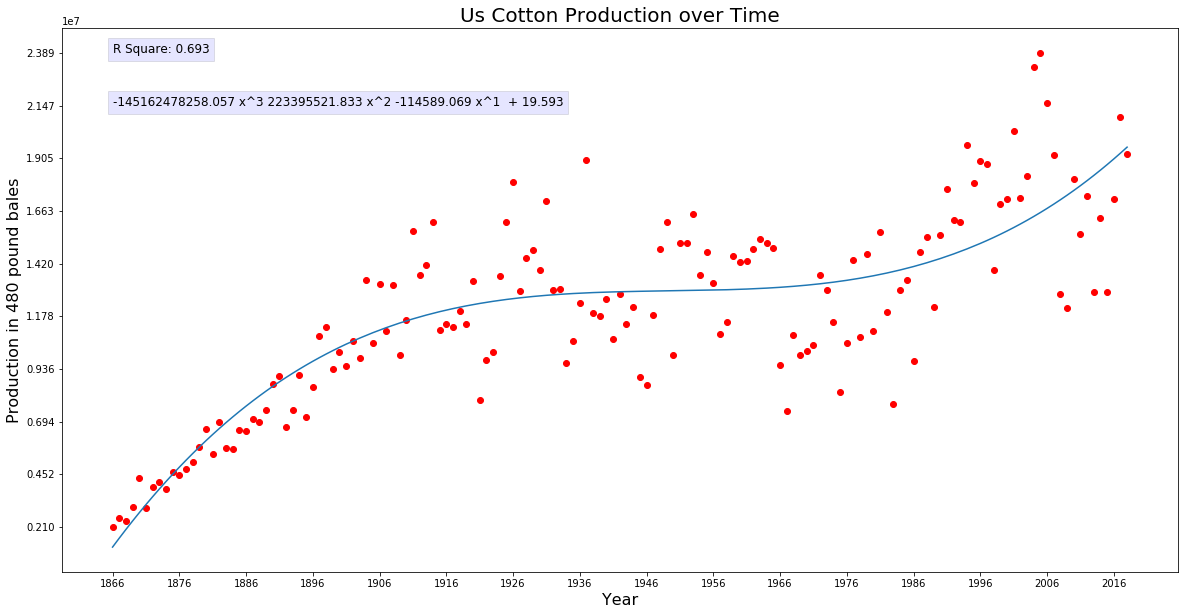

In [281]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

df1 = df.loc[:, ('year', 'us_num_480_lb_bales')].dropna(axis=0,how='any')

x = df1.loc[:, 'year']
y = df1.loc[:, 'us_num_480_lb_bales']

coeffs, poly_eqn, y_poly_hat, r_square = get_poly_hat(x,y,3)

x_ticks = [i for i in range(min(x),max(x), 10)]
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
print_eq = clean_poly_eq(coefficients=coeffs, dec_dig=3)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], print_eq, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Us Cotton Production over Time', fontdict={'fontsize':20})

Text(0.5,1,'Texas Cotton Production over Time')

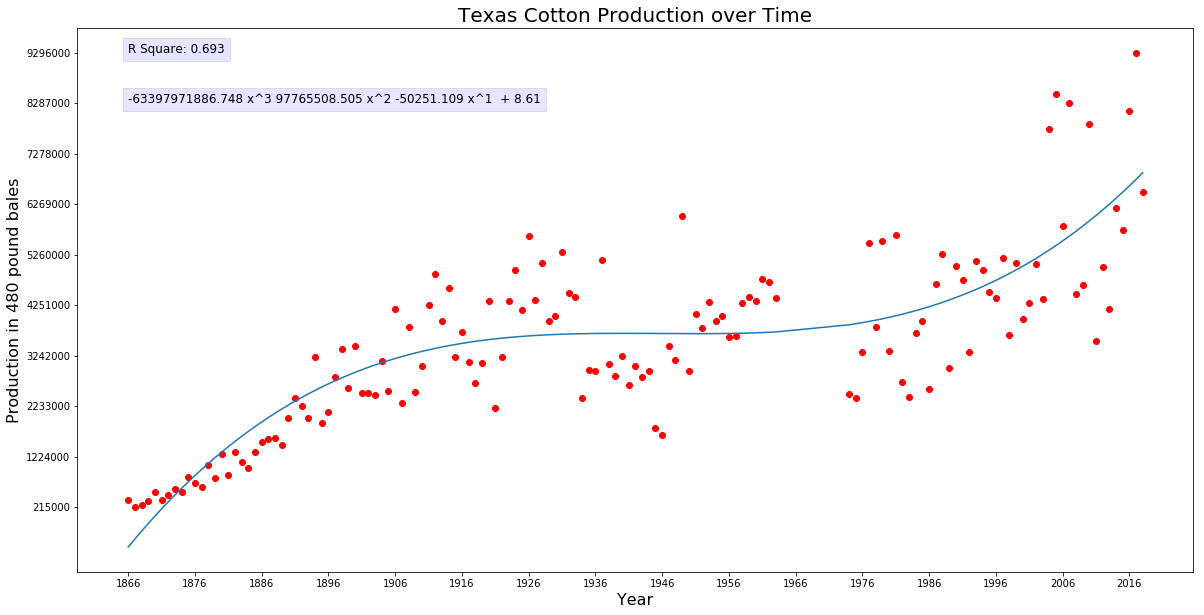

In [275]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

df1 = df.loc[:, ('year', 'tx_num_480_lb_bales')].dropna(axis=0,how='any')

x = df1.loc[:, 'year']
y = df1.loc[:, 'tx_num_480_lb_bales']

coeffs, poly_eqn, y_poly_hat, r_square = get_poly_hat(x,y,3)

x_ticks = [i for i in range(min(x),max(x), 10)]
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
print_eq = clean_poly_eq(coefficients=coeffs, dec_dig=3)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], print_eq, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton Production over Time', fontdict={'fontsize':20})

Text(0.5,1,'Cotton Acres Planted in Texas Over Time')

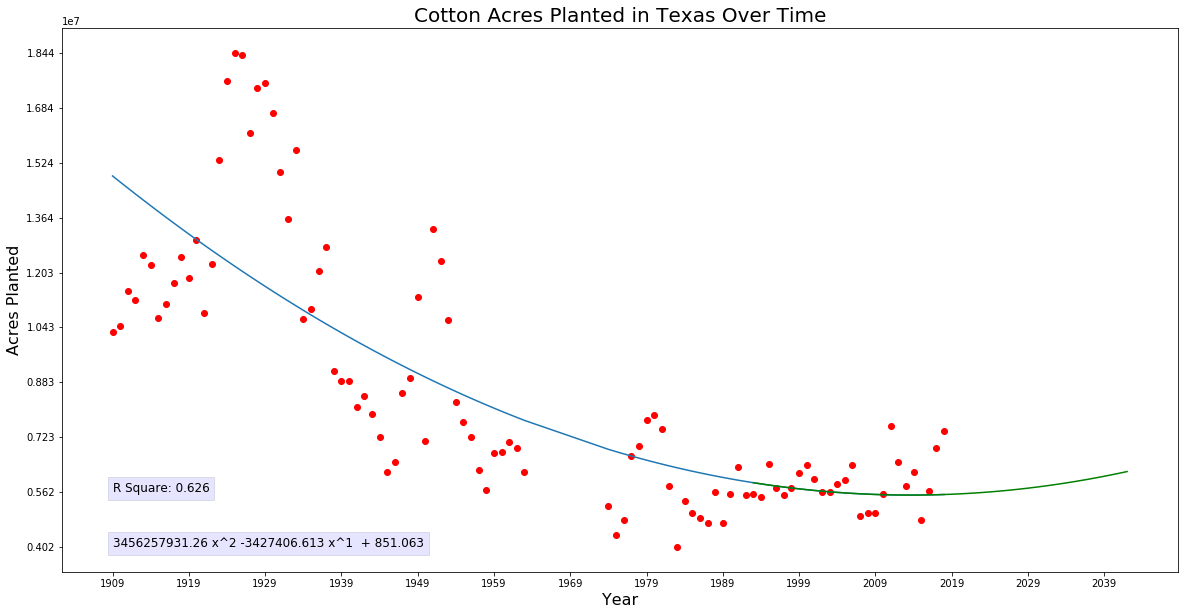

In [285]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

df1 = df.loc[:, ('year', 'tx_acres_planted')].dropna(axis=0,how='any')

x = df1.loc[:, 'year']
y = df1.loc[:, 'tx_acres_planted']

coeffs, poly_eqn, y_poly_hat, r_square = get_poly_hat(x,y,2)

x_ticks = [i for i in range(min(x),max(x)+25, 10)]
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
print_eq = clean_poly_eq(coefficients=coeffs, dec_dig=3)

long_range_x = [i for i in range(max(x)-25,max(x)+25, 1)]
long_range_y_poly_hat = poly_eqn(long_range_x)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x, y,'ro')
ax.plot(x, y_poly_hat)
ax.plot(long_range_x, long_range_y_poly_hat, 'g-')
ax.text(x_ticks[0], y_ticks[1], r_square, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[0], print_eq, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Acres Planted', fontdict={'fontsize':16})
ax.set_title('Cotton Acres Planted in Texas Over Time', fontdict={'fontsize':20})

Text(0.5,1,'Texas Cotton as a Function of US Production')

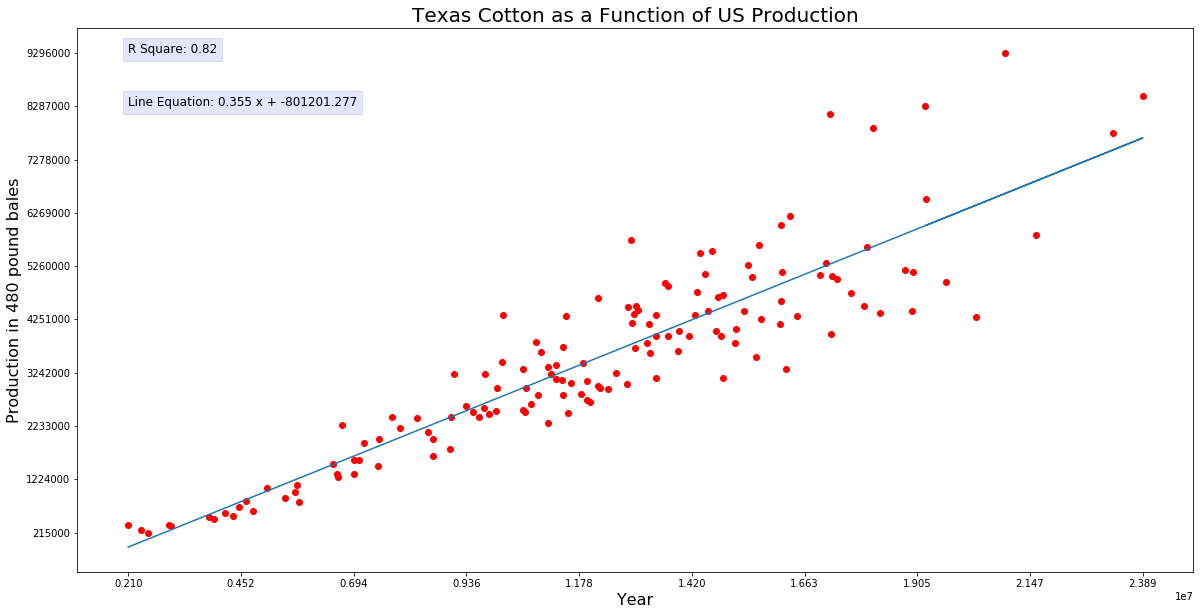

In [270]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

df1 = df.loc[:, ('us_num_480_lb_bales', 'tx_num_480_lb_bales')].dropna(axis=0,how='any')

x = df1.loc[:, 'us_num_480_lb_bales']
y = df1.loc[:, 'tx_num_480_lb_bales']

coeffs, poly_eqn, y_poly_hat, r_square = get_poly_hat(x,y,1)

x_ticks = np.linspace(min(x),max(x), 10)
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
line_eq = "Line Equation: {0} x + {1}".format(round(coeffs[0], 3), round(coeffs[1], 3))

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], line_eq, bbox={'facecolor':'b', 'alpha':0.1, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton as a Function of US Production', fontdict={'fontsize':20})

In [94]:
df_rain = pd.read_csv('monthly_rainfall_lubbock_1911_2017.csv', header=[0])

df_rain = df_rain.loc[:, list(df_rain)[:14]]

months = calendar.month_name[1:]

col_nms = ['year']
col_nms.extend([i for i in months])
col_nms.append('annual_rain')

df_rain.columns = col_nms
df_rain.loc[:, 'year'] = pd.to_datetime(df_rain.loc[:,'year'], format='%Y')
df_rain.set_index('year', inplace=True)
df_rain.fillna(0, inplace=True)
df_rain.replace('T', 0, inplace=True)
df_rain = df_rain.loc[:,list(df_rain)[1:]].apply(lambda x: x.astype('float'))

years = df_rain.index

In [95]:
df_rain.index

DatetimeIndex(['1911-01-01', '1912-01-01', '1913-01-01', '1914-01-01',
               '1915-01-01', '1916-01-01', '1917-01-01', '1918-01-01',
               '1919-01-01', '1920-01-01',
               ...
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='year', length=108, freq='AS-JAN')

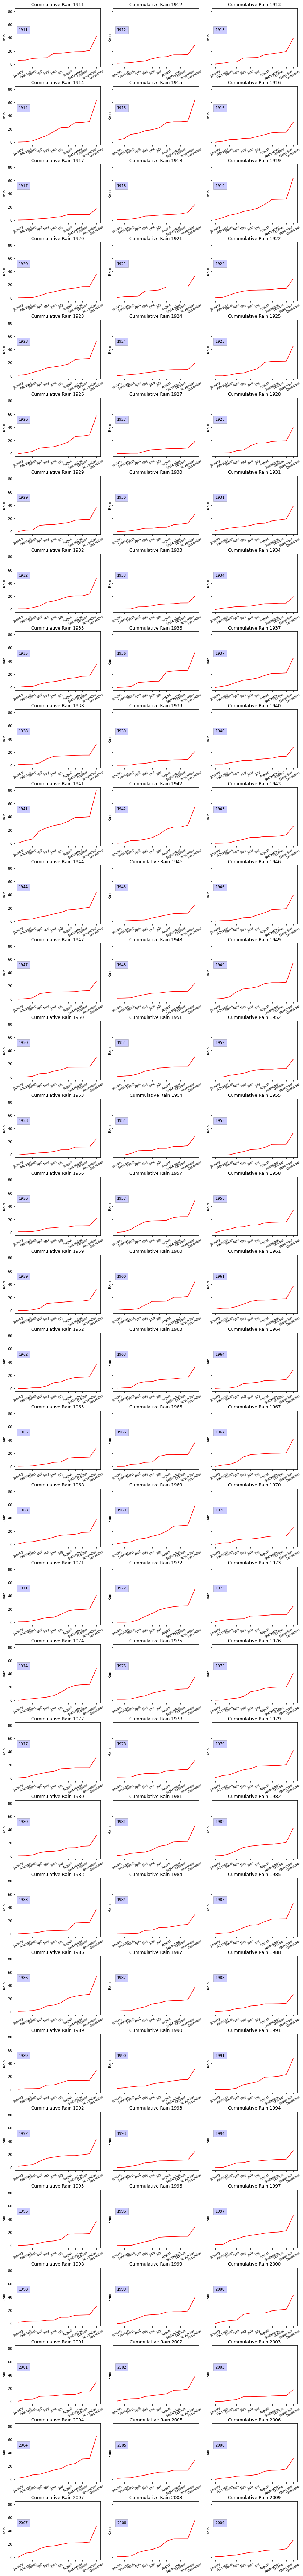

In [96]:
months = [i for i in calendar.month_name][1:]

fig, axs = plt.subplots(33,3, figsize=(12,99), sharey=True)
for (year,ax) in zip(years, axs.ravel()):
    rain_values = df_rain.loc[(df_rain.index == year),:].values[0]
    annual_rain = rain_values[-1]
    year = dt.strftime(year, '%Y')
    x = [dt.strptime('{0} {1}'.format(year,i), '%Y %B') for i in months]
    y = np.cumsum(rain_values[:len(rain_values)])
    
    x_ticks = x
    
    ax.set_xticklabels(months, rotation=30, fontdict={'fontsize':8})
    ax.set_xticks(x_ticks)
    ax.plot(x,y,'r-')
    ax.text(x_ticks[0], 50, year, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':10})
    ax.set_ylabel('Rain', fontdict={'fontsize':10})
    ax.set_title('Cummulative Rain {0}'.format(year), fontdict={'fontsize':12})
 data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0QAABu+CAYAAABwIQf4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xe4VNXVx/HvondBaQoCFixRosFrL7HGkqBGDZZo7CV57TWW2HusEY0xamLsLQkau1HsDWIvwRJBFBAUpNe73j/WGe/cyy1z587cab/P88wzfZ89Z85ZM2vvffYxd0dERERERKQStSl0BURERERERApFCZGIiIiIiFQsJUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEUi8zG2Nmh2X53kFmNsfM2ua6Xi1hZjea2e8KXQ+RcqbYISLZUvyQQlFClGdmtp+ZjU120slm9piZbVHoeuWSmX1uZtun7rv7RHfv5u5Lc7ycg8xsabIuZ5nZ22b2s0zf7+5HufsFWS57pJm9bGbzzGxMPc+PMLP3krq9bGY/SHtuXTN7wsymm9kyJ/4ys6OTbWShmf01m/pJ+VHsyOlyyi52mFlHM7vFzCaY2Wwze8vMds6mjlJ+FD9yupyyix/J83ck28YsMxufbSJaLpQQ5ZGZnQhcA1wM9AMGATcAuxWyXiXuFXfvBvQk1uU9ZtazFZb7LfFdXlr3CTMbCtwJHJXU62HgITNrl7xkMXAfcGgDZX8FXAjcmuM6S4lS7MiLcosd7YAvgB8DywFnAfeZ2ZDcVl9KjeJHXpRb/AC4BBji7j2AXYELzWyD3Fa/hLi7Lnm4ED9Qc4BfNPKavwIXpt3fGpiUdv9z4BTgHWAucAsR3B4DZgNPA72S1w4BHDiY+JGcQewkGybvnwmMSiv7XOCOtPup97dL7o8BDkturwY8A3wDTCd2wJ7Jc7cD1cD85POeml4WsDcwts7nPgF4KLndEbgCmAhMBW4EOjewvg4CXky73yVZzoZpj90PTAG+A54H1qlvfafWNXAS8DUwGTg4g+/1MGBMnceOBh5Ju98mWR/b1Xnd6rHLNVj2hcBfC73t6lLYi2KHYkdzY0fa694B9iz0NqxL4S6KH4of2cQPYM2kLiMLvQ0X6qIeovzZFOgE/KOF5ewJ7ACsAYwgAtIZQB9i4z+2zus3BoYSweAa4Exge2AdYKSZ/TiLOhjRkrASsDawMhHUcPcDiIAywqOr+vI6730YWDNpyUjZD7gruX1p8tnWJ3baAcDZTVYoxggfTLSATEh76jHi8/cF/kME0Ib0J348BhAtKNebWa+mlt1QlercNmDdLMuSyqbYERQ7mlOIWT9ifbyfZT2kPCh+BMWPTN5sdoOZzQM+IhKiR7OsR8lTQpQ/KwDT3X1JC8u5zt2nuvuXwAvAa+7+prsvIALej+q8/gJ3X+DuTxItO3e7+9dp76/7+ia5+yfu/pS7L3T3acBVxDCNTN47DxgN7Avfd/GuRXTrGnAEcIK7f+vus4ku/n0aKXITM5sJLCBad/Z396/Tlneru89294VE4FzPzJZroKzFwPnuvtjdHyVamdbM5HPV8TTwYzPb2sw6ED8aHYhWJJHmUuxAsaM5hZhZe+IP2G3u/lEW9ZDyofiB4kemBbj7b4DuwJbA34GFWdSjLCghyp9vgN5pYzmzNTXt9vx67ndr4eubZGb9zOweM/vSzGYBdwC9m1HEXSRBiWih+WcSrPoQO+44M5uZBJvHk8cb8qq79wR6AQ8RO3Gqnm3N7FIz+zSp5+fJUw3V9Zs6PxrzyGL9JH9ADgRGES0svYEPiG5xkeZS7Kih2NEEM2tDDB9aRAyhkcqm+FFD8SOzcpa6+4vAQODXza1HuVBClD+vEJn27o28Zi61M/n+ea1R9su+mBgvO8zj4Lv9qd1Nu8zsJXU8BfQxs/WJ4JTqsp5OBMp13L1nclnO48DFRrn7HGLHPcDMUi1P+xEHjW5PdEcPSR63ZQrIMXd/wN3XdfcVgHOSZb+R7+VKWVLsqKHY0YikpTt1fMee7r44bxWVUqH4UUPxo3naEcdtVSQlRHni7t8R41GvN7PdzayLmbU3s53NLDXW9S1gFzNb3sz6A8e3YhXfAraymLd/OeD0Rl7bnejS/c7MBhAHW6abCqza0JuTH+n7gd8DyxNBCnevBv4MXG1mfQHMbICZ7ZjJB3D3b4GbqRn32534IfiGCLgXZ1JOJpIWoE5EwGhjZp2SYSqp5zdIXtMHuIk4cPOj5DlL3tshud/JzDqmvbdd8nxboG3yfEtb96REKXbUUOxoPHYAfySOrRjh7vNzVWcpXYofNRQ/Go4fZtbXzPYxs27J+3ckksZ/56rupUYJUR65+5XAicR0qNOIGViOBv6ZvOR24G2ie/VJ4N5WrNtTyfLeAcYB/2rk5ecBw4nZUx4hxpmmuwQ4K+l6PrmBMu4iWk/ur9NVfBrwCfBq0tX8NM0bS3sNEdh/CPyNOMjxS6Lb+NVmlNOUA4gWpT8SXeXziYCaci0xm85/iVl2Dk97bnDy+tTBzvOT16WclTz2W6IFbH7ymFQoxY5aFDvqiR1mNhg4kjgofIrFeUjmmNkvc1h3KUGKH7UoftT/38OJnq5JyfuuAI5394dyWPeSYu5N9TiKiIiIiIiUJ/UQiYiIiIhIxVJCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrGUEImIiIiISMUqiXOd9O7d24cMGVLoaohIBsaNGzfd3Rs743erUewQKR3FFDtA8UOklLQ0fpREQjRkyBDGjh1b6GqISAbMbEKh65Ci2CFSOoopdoDih0gpaWn80JA5ERERERGpWEqIRERERESkYikhEhERERGRipXXhMjMTjCz983sPTO728w6mdkqZvaamX1iZveaWYd81kFERERERKQheUuIzGwAcCxQ5e7rAm2BfYDLgKvdfXVgBnBovuogIiIiIiLSmHwPmWsHdDazdkAXYDKwLfBA8vxtwO55roOIiIiIiEi98pYQufuXwBXARCIR+g4YB8x09yXJyyYBA+p7v5kdYWZjzWzstGnT8lVNESkzih0iki3FD5HKlM8hc72A3YBVgJWArsBOmb7f3W9y9yp3r+rTp2jO0yYiRU6xQ0SypfghUpnyOWRue+B/7j7N3RcDfwc2B3omQ+gABgJf5rEOIiIiIiIiDcpnQjQR2MTMupiZAdsBHwDPAnslrzkQGJ3HOoiIiIiIiDQon8cQvUZMnvAf4N1kWTcBpwEnmtknwArALfmqg4iIiIiISGPaNf2S7Ln7OcA5dR7+DNgon8sVERERERHJRL6n3RYRERERESlaSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKldeEyMx6mtkDZvaRmX1oZpua2fJm9pSZfZxc98pnHURERERERBqS7x6ia4HH3X0tYD3gQ+C3wL/dfSjw7+S+iIiIiIhIq8tbQmRmywFbAbcAuPsid58J7AbclrzsNmD3fNVBRERERESkMfnsIVoFmAb8xczeNLObzawr0M/dJyevmQL0y2MdREREREREGpTPhKgdMBz4o7v/CJhLneFx7u6A1/dmMzvCzMaa2dhp06blsZoiUk4UO0QkW4ofIpUpnwnRJGCSu7+W3H+ASJCmmtmKAMn11/W92d1vcvcqd6/q06dPHqspIuVEsUNEsqX4IVKZ8pYQufsU4AszWzN5aDvgA+Ah4MDksQOB0fmqg4iIiIiISGPa5bn8Y4A7zawD8BlwMJGE3WdmhwITgJF5roOIiIiIiEi98poQuftbQFU9T22Xz+WKiIiIiIhkIt89RHn16qvvMnPmokJXA4CePTuwySbDCl0NEclAMcUOUPwQKRWKHSLlqaQTopkzF9GnzwaFrgYA06aNK3QVRCRDxRQ7QPFDpFQodoiUp3zOMiciIiIiIlLUlBCJiIiIiEjFUkIkIiIiIiIVqywTovPOO4QddujLyJHrfv/Y+PFvc/DBm7L33sM44YQRzJkzC4CZM7/hyCO3Ycstu3HZZUfXKuf668/kpz9dmS237Naq9ReRwshF7FiwYB7HHfdT9txzLUaOXIfrrvttq38OEWl9ufrvccwxO7HvvusxcuQ6XHzxUSxdurRVP4dIJSrLhGjEiIO47rrHaz124YWHcfTRl3Lvve+y9dY/5/bbfw9Ax46d+PWvL+C4465YppytthrBbbe93ip1FpHCy1XsOOCAk3nwwY+48843efvtl3jppcdapf4iUji5ih+XXHIfd9/9Nvfe+x4zZkzj6afvb5X6i1SyskyIhg/fih49lq/12IQJ4xk+fCsANt54B5555kEAOnfuyvrrb0HHjp2WKWfYsE3o3XvF/FdYRIpCLmJHp05dqKraBoD27Tuw1lrD+frrSa1QexEppFz99+jWrQcAS5cuYcmSRZhZnmsuImWZENVntdXW4bnnRgPw9NP3M3XqFwWukYiUgpbEjtmzZ/LCCw+z4YY6F7VIJco2fhx99I7ssENfunTpznbb7ZXPKooIFZQQnX32rdx//w3sv/8GzJs3m/btOxS6SiJSArKNHUuWLOHMM/dl772PZeDAVfNcSxEpRtnGj1GjnuDxxyezaNFC3njjmTzXUkRK+sSszTFkyFpcf/2TQHRhv/jiIwWukYiUgmxjx0UXHcHKKw9lv/2Oz2f1RKSIteS/R8eOnfjxj3fjuedGs8kmO+SriiJCBfUQffvt1wBUV1dzyy0XsueeRxW4RiJSCrKJHTfccBZz5nzHSSddk+/qiUgRa278mDdvDtOnTwail/mllx5hyJC18l5PkUpXlj1EZ5yxL+PGjWHmzOnssstAjjjiPObPn8P9918PwDbb7MGuux78/etHjBjC3LmzWLx4Ec89909GjXqSVVf9AddeeypPPHEXCxbMY5ddBrLbbodx5JHnFuhTiUi+5SJ2dO3ag1tvvYghQ9Zi//2HAzBy5NHsvvthBflMItI6chE/lltuBU48cVcWLVpIdXU1VVXbqAFXpBWYuxe6Dk2qqqrysWPHLvP444+Po0+fDQpQo2VNmzaOnXYqjrqIFJKZjXP3qkLXA0ojdoDihwgUV+yA+uOHYodIcWpp/KiYIXMiIiIiIiJ1KSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRilXS5yHq2bMD06aNK3Q1gKiLiJSGYoodoPghUioUO0TKU0knRJtsMqzQVRCREqTYISLZUOwQKU8ZJ0RmthkwJP097v63PNRJRKRBikUiki3FDxGpT0YJkZndDqwGvAUsTR52QEFERFqNYpGIZEvxQ0QakmkPURXwA3f3fFZGRKQJikUiki3FDxGpV6azzL0H9M9nRUREMqBYJCLZUvwQkXpl2kPUG/jAzF4HFqYedPdd81IrESken3wCfftCjx6FrgkoFolI9hQ/RKRemSZE52a7ADNrC4wFvnT3n5nZKsA9wArAOOAAd1+UbfkikkfucPDB8N138PbbYFboGp1b6AqISMk6t9AVEJHilFFC5O7PtWAZxwEfAqnm5cuAq939HjO7ETgU+GMLyheRfHnmGXjxRRg1qhiSoZbGIhGpYIofItKQRo8hMrMXk+vZZjYr7TLbzGY1VbiZDQR+Ctyc3DdgW+CB5CW3Abu35AOISJ64w7nnwoABcOihBa1KS2ORiFQuxQ8RaUqjPUTuvkVy3T3L8q8BTgVS718BmOnuS5L7k4ABWZYtIvmU3jvUqVNBq5KDWCQiFUrxQ0SakvGJWQHMrC/w/T8jd5/YyGt/Bnzt7uPMbOvmVszMjgCOABg0aFBz3y4iLVFEvUP1aSwWKXaISGMUP0Skroym3TazXc3sY+B/wHPA58BjTbxtc2BXM/ucmERhW+BaoKeZpRKxgcCX9b3Z3W9y9yp3r+rTp08m1RSRXEn1Dp1+esF7h9JlEosUO0SkPoofIiXklFPgqqtabXGZnofoAmATYLy7rwJsB7za2Bvc/XR3H+juQ4B9gGfc/ZfAs8BeycsOBEZnU3ERyZPi7h1qdiwSEUkofoiUgg8/jGRowoRWW2SmCdFid/8GaGNmbdz9WeKMz9k4DTjRzD4hjim6JctyRCQfirR3KJHLWCQilUXxQ6QUnH46dO0KZ53VaovM9BiimWbWDXgeuNPMvgbmZroQdx8DjElufwZs1LxqikirKO7eIWhhLBKRiqb4IVLsXnoJRo+GCy+EVhy2mmkP0W7APOAE4HHgU2BEviolIgVS3L1DoFgkItlT/BApZu5x7NCKK8Lxx7fqojM9MWuqBaUauM3M2gD7Anfmq2Ii0sqKv3dIsUhEsqb4IVLk/vlPeOUVuOmmGDLXipo6MWsPMzvdzEaZ2U8sHA18BoxsnSqKSKso4t4hxSIRyZbih0gJWLIk/n+stRYcfHCrL76pHqLbgRnAK8BhwBmAAbu7+1t5rpuItJbi7x1SLBKRbCl+iBS7W26B//43eonaNes0qTnR1BJXdfdhAGZ2MzAZGOTuC/JeMxFpPaneoVGjiq53KKFYJCLZUvwQKWZz50aj7Oabw667FqQKTSVEi1M33H2pmU1SABEpM8XfOwSKRSKSPcUPkWJ29dUwZQo8+CCYFaQKTSVE65nZrOS2AZ2T+wa4u/fIa+1EJP9SvUPXXVesvUOgWCQi2VP8EClW06bB5ZfDz38Om21WsGo0mhC5e9vWqoiIFIA7nHcerLQSHHZYoWvTIMUiEcmW4odIEbvgApg3Dy65pKDVaP2jlkSkeDz7LLzwQrH3DomIiEi5+fRTuPHGaJBdc82CViXTE7OKSLlJHTtU5L1DIiIiUobOPBPat4dzzil0TdRDJFKx1DskIiIihfDGG3DvvXDWWbDiioWujXqIRCqSeodERESkENzhtNOgd2845ZRC1wZQD5FIZVLvkIiIiBTC44/H/5A//AF6FMckj+ohEqk06h0SkdYyc2ahayAixWTp0ugdWm01OPLIQtfme0qIRCpNqnfo9NPVOyQi+fP88zB4MDz3XKFrIiLF4s474d134aKLoEOHQtfme0qIRCqJeodEpDXMmAH77w99+8Lw4YWujYgUgwUL4He/g6oq+MUvCl2bWnQMkUgl0bFDIpJv7nD44TB5Mrz8MnTvXugaiUgxGDUKJk6Ev/4V2hRXn4wSIpFKod4hEWkNt9wCDz4Il10GG25Y6NqISDGYMQMuvhh23hm22abQtVmGEiKRSqHeIRHJt48+guOOg+22g5NPLnRtRKRYXHJJTLJy6aWFrkm9iqu/SkTyQ71DIpJvCxfCvvtC587wt78V3ZAYESmQiRNjiu1f/Qp++MNC16Ze6iESqQTqHRKRfDv9dHjrLXjooWh8EREBOPvsuD7//MLWoxFqvhEpd+odEpF8e/xxuPpqOPpoGDGi0LURkWLxzjvRY3zssTBoUKFr0yD1EImUuzFjonfoD39Q75CI5N7UqXDggbDuunD55YWujYgUk9/+FpZbLq6LmBIikXKW6h1accWYBldEJJeqqyMZmjULnnkmjh8SEYEYrv/YY9FQsvzyha5No5QQiZSzMWPibPHqHRKRfLj2WnjiCbjhBlhnnULXRkSKRXU1nHoqrLwyHHNMoWvTJCVEIuVKvUMikk9vvgmnnQa77QZHHVXo2ohIMXngARg7Nk7CWgINskqIRMqVeodEJF/mzo0ptvv0gZtvBrNC10hEisWiRXDGGTBsGOy/f6FrkxElRCLlSL1DIpJPxx8P48fD009D796Fro2IFJObboJPP4VHH4W2bQtdm4zkbdptM1vZzJ41sw/M7H0zOy55fHkze8rMPk6ue+WrDiIVK9U7dPrp6h0Skdx64IHoFTrtNNh220LXRkSKyaxZcb6hbbaBnXYqdG0yls8eoiXASe7+HzPrDowzs6eAg4B/u/ulZvZb4LfAaXmsh0j5W7IEJkyAjz+GTz6BP/9ZvUMiknsTJ0Zc2Wijoj7JoogUyBVXwLRpMbNcCQ2lzVtC5O6TgcnJ7dlm9iEwANgN2Dp52W3AGJQQiTRt8WL4/PNIeFKJT+r2559HUpTSrVu04Kp3SERyZelS+OUv4/quu6B9+0LXSESKyeTJcOWVsPfeUFVV6No0S6scQ2RmQ4AfAa8B/ZJkCWAK0K816iBSEhYtiuSmbsLzySfx+NKlNa/t1g2GDoUf/QhGjoTVV4/L0KHQr19JtcyISAm46CJ48UW4/XZYbbVC10ZEikl1NZxzTjTeXnRRoWvTbHlPiMysG/AgcLy7z7K0P2nu7mbmDbzvCOAIgEGDBuW7miJNc4eZM6MFZPJkmDIFFiyInX/RorhOXdLvN3Q7/f6iRfDllzHsrbq6Zpndu0eCU1UF++xTk/Csvjr07aukpx6KHSJ58NJLcN550UNUIrNGZUPxQyQDS5bARx/Bf/4TlzffjMvs2XHOoRJsMDH3evOR3BRu1h74F/CEu1+VPPZfYGt3n2xmKwJj3H3NxsqpqqrysWPH5q2eUuHc4ZtvahKdr76q//bkyZEAZapDhxhS0r59Zrf796+d8AwdGrM3lVjSY2bj3L0o+soVO0RyYOZMWG89aNcu/vT06JGXxRRT7ADFDxEAFi6E99+vSX7+8x94++2a/0NdusD668Pw4bDBBrDffvHfppW1NH7krYfIoivoFuDDVDKUeAg4ELg0uR6drzqIsHAhfPFF9LxMnBi9MHWTnSlTooemrh49YKWVYnKCTTetuZ269O8fgaC+5KZt25JLZEREluEORx4ZsfOll/KWDIlIEZg3D955p3by8957MZIFYv8fPhx+85u4Hj4c1lijZKbWbkw+h8xtDhwAvGtmbyWPnUEkQveZ2aHABGBkHusg5W7u3Eh2UpfPP699f/Lk+EFP16tXTXKzxhrLJjqp+126FOQjiYgUjb/+Fe67L44J2HjjQtdGRHLBPRqFx4+P3p5U8vPhhzXD9nv3joTnpJNqkp9VVoE2eTtjT0Hlc5a5F4GGmsi3y9dypYykjtmpL9FJPfbNN7Xf0749rLwyDB4MP/lJXA8ZEteDB0eyo5nXRESaNn58HA+w9dZxziERKR3uMf31xx/HvvzxxzW3P/kkeoNSBgyIhGevvWqSnwEDKmqkS6vMMicV4rPP4Prr4bvvak8cUN9kAg1d6k5AUHcoW+fONcnNBhvUTnYGD46enTLouhURKahFi2DffaFjx5hVTnFVpDjNmFF/0vPxx3GS1JR27WDVVeP45O22i+uhQ2HYsJiZtsIpIZKWW7QoTsR1wQXRIrHCCjXH0tS9dOgQSU2PHg2/Jv3Sr19NsjNkSElOMiAiUnLOPDOG0PzjHzBwYKFrI1LZZs6MXp1PP61JelKJT/pImTZt4v/S0KGwySZxWEAq8RkyJJIiqZfWjLTM88/DUUfFuNO99oJrroluVhERKU1PPhmNXEcdBbvvXujaiJQ/d5g+PRKe1DkI0y91Dw8YMCCSnT33jGQnlfisumr06kqzKSGS7EybBqeeGgfcDhkCjzwCu+xS6FqJiEhjFi+G+fMbvsydG7PK/eAHccZ5EckN95joqaGkJ314mxkMGhSn4Nhrr5oTr6++eiQ9mvQp55QQSfNUV8Nf/hLJ0KxZcPrpcNZZ2jlFRJpSXR0zOj3zTPSqp8+A2dDtTO5XVy+b2CxYUH/Cs3Rp0/Xs3Dl6iRTXRbK3aFE0Ft9zT+zvn35aeyKDdu2iQXn11WGzzWonPUOGqKenlSkhksy99x78+tfw4ouw5Zbwxz/COusUulYiIsXJPc7m/swzcXn22TgAGuI8ZnXH86cfH1n3WMnG7pvF7JmdO8elWzfo06fmfn2X9NfXvQweDH375m49iFSS99+HW2+NyUimTYt9fcMNYfvtayc9gwbpmJ4iom9CmjZ3bkyYcOWVsNxysaMfdJAmNxARqet//6tJgJ55Jk78DJFk/PznsO22sM02cQoAESkP330H994Lt9wCr78ek0LtuiscckicAkSJT9HTNySNe+QR+L//i/P+HHIIXHZZzPQmIiJxcsNnn61JgD7/PB7v1y+Sn9RllVXUiCRSTtzhueeikfiBB2JI6rrrwtVXwy9/Gb20UjKUEEn9Jk2C446Dv/89Dq597jnYaqtC10pEpLC+/RbGjKlJgD78MB7v1StOYHrSSZEArb22EiCRcjRpEtx2WxxP/emncRqRAw+MRuOqKu33JUoJkdS2ZAlcdx2cfXYcfHvJJXDiiXH+IBGRcrZgQRzjk7p8+23N7QkTIhF6661oGe7aNRqJDjkkEqD11tPJS0XK1cKF8PDDMSTuySdjIpNttoFzz4U99tAEJGVACZHUeP31mG71rbdg553h+utjmIeISCmpro6W2+nTayc19SU66Y8tWNBwmR07xkxQ558fCdCGG8ZxAiJSvt55J4bE3XFHnAto4EA44ww4+OCY/lrKhhIiiTMgn3EG3HgjrLhijIXdYw91+4pIaZg1C157DV5+GV55BV59NQ5yrk/37jG8LXVZc83a93v1guWXX/axnj3VAyRS7pYujQaS+++PRGjs2Bghs/vu0Ru8/faKA2VKCVG5WrIk5sBfuLD2pe5jn34a5xGaNg2OPTZaP3v0KHTtRUTq5x4nMXz55ZoE6L334nEzGDYM9tkHNtooZnJLT3J69tRsTyLFzj3+q8yfH+ftSb9u6LHUubdSl4ULG77f2HNLltTU44c/hGuvjQkSVlihcOtDWoV+GYqBe7RwzpgRvTV1h3KkLqnnZs2q2YnrS3IWLowhI5mqqoJHH4Xhw/P3GUVEsjFvHrzxRk3y88orMRQO4jTCq50LAAAgAElEQVQAm2wSZ3LfdFPYeGM16IgUuyefjGOVv/224USn7smHM9W+fZxjq1OnGOaaup2637lzNJA09Hzq/Fzbbhv/iTRSpmIoIcqnefNiGMe4cfED3lDCM3Nm4wlM27Y1QzZ69Yo/AcsvH924HTvWXJq6X99jXbvGTq8uYBEpNHeYOLEm+Xn5ZXj77ZpW2zXXhBEj4lieTTeNmdzatClsnUUkM++9ByefDE88EcfirLlm9Lx07hyTEqRODFzf7aaeT51sWPFAsqSEKJdmzICXXoIXXoDnn49EaPHieK59+9rj0fv0gTXWqJ3oNHTp1k2tFCJSnubOhaeegtGjo+X4q6/i8S5dosfntNMi+dlkEw1bESlFkyfHzLW33ho9uFdeGec37Nix0DUT+Z4Sopb46qtIflIJUGoce/v2MQPRSSfBllvGD3mvXkpqREQApk6NKWwfeiiSoQULomFoxx0jZm62WRwLpON9RErX3LmR/Fx+eQztP/ZY+N3vYoSLSJHRr02mUgfypidAn30Wz3XtGj/gI0fGj/lGG0X3rYiIhI8+il6g0aNjFjh3GDwYjjgCdtstYqemsRYpfUuXwt/+FhM2ffUV7LknXHoprL56oWsm0iAlROmqq6Olct68uEybFmPYU0nQlCnxut69YYst4Oij40d8/fXVkikikm7p0jgOaPTo6AkaPz4e32CDOJnhbrvFLE7qORcpH08/HccJvf12DHm97z7YfPNC10qkSeXzL3769JgpLZXMpF/mzq3/8bqvmT+//rIHDYLttovkZ6utYK219CMuIlLXvHlxHNBDD8G//hWNSu3bxxndjzsOdt01DqYWkfLy/vtwyinw2GMwZAjcc0+MmtF/JSkR5ZMQTZgABx5Y+7EOHeLA3PouPXs2/FyXLjEMrkePOBZo8ODCfCYRkWI3dWokP6NH1xwPtNxy8NOfRi/QjjvGfREpP1OnxoQJN98cJz2+4ooYPaMJE6TElE9CtM46cZLRVELTubPGo4uItMSSJdHLM3VqXKZMqX3700/h9dfjeKBBg+DwwyMJ2morxV+RcjZvHlx1FVx2WTSCHHNMTJigmSClRJVPQtSpE6y6aqFrISJS3BpLcurenz69/hMkdukC/fvDgAFxPNCuu8J662l4jEi5q66G22+HM8+EL7+EPfaICROGDi10zURapHwSIhERCYsWwf/+Bx9/XHMZPz6uv/ii/iSnc+dIcvr1i9mgNt88bqceS7/drVvrfyYRKRx3GDMmTify5ptxOMHdd8ex1SJlQAmRiEgpWrIkjp1MT3pSic+ECTHLW0rPntGCu8UW0ZO+4orLJjs6AbRI6Zs5M2Z4e/vtOFXIwoXRQLJ4cVxncruh5yGOqb7rLth7b2jTprCfVSSHlBCJiBSjpUtj9stvv40/NnUTn88+iz8rKd26RdJTVQX77gtrrBH3hw6Ncf1KdkTKR3V1xIBU8vP22/DWWzBxYs1revSI4a0dOsQxfR061L7dvn3EjbqP1fe6Dh1ihshf/SoOURApM0qIRERyoboa5syB776DWbNg9uyay5w59V839ty8ecsuo3PnGM62zjqw++6R7KQSn379lPSIlKO5c+G99yLhSSU/77wTsQKip2bNNWOY629+E8fzrbde9AArJohkpCAJkZntBFwLtAVudvdLC1EPEREg/nB8911NMjNrVv23G3t+9uzMltWmTbTKdu9ec929O6y88rKPdesWU1avumokPQMGaJiKSDlyj1gyaVIc//fOOzUJ0Mcf1xz316NHJDsHHRQnhV9vvWgg6dy5oNUXKXWtnhCZWVvgemAHYBLwhpk95O4ftHZdREQA2HlneOGFxl+TOjfZcsvFdY8ekaCkbqc/nrrUTW66d48/Lmq1Fakc1dUxY+OXX0bCM2lS7dup+6ken5RVV42EZ7/94nr99eMYHsUPkZwrRA/RRsAn7v4ZgJndA+wGKCESkcI4/njYf/+Gk5vu3aGdRhiLSB1LlsRU9XWTm/TbX35ZMylBStu2sNJKcVzOsGHRKDNwYDSyDBoE664bsUdEWkUhfuEHAF+k3Z8EbFyAeoiIhD32KHQNRKQUPfJIHM+XrlOnSG4GDoTNNqu5PWBAze2+fSMpEpGiULRNnmZ2BHAEwKBBgwpcGxEpFYodIpKtZsePqiq46abayU6vXhrWJlJiCpEQfQmsnHZ/YPJYLe5+E3ATQFVVVT1nERQRWZZih4hkq9nxY8AAOPzwfFdLRPKsENMVvQEMNbNVzKwDsA/wUAHqISIiIiIiFa7Ve4jcfYmZHQ08QUy7fau7v9/a9RARERERESnIMUTu/ijwaCGWLSIiIiIikqIz/ImIiIiISMVSQiQiIiIiIhXL3It/EiYzmwZMyPDlvYHpOVp0rsrKZZ0qrbxirluuyyuXug129z45Wm6LFDB25LK8Yq1Xrssq9vJUt/yXVTSxA5oVP4p1/RdrvfJRXjHXrdjLK5e6tSh+lERC1BxmNtbdq4qprFzWqdLKK+a65bq8SqpbMSrW9V+s9cp1WcVenupW+LKKVbGu/2KtVz7KK+a6FXt5lVS3xmjInIiIiIiIVCwlRCIiIiIiUrHKMSG6qQjLymWdKq28Yq5brsurpLoVo2Jd/8Var1yXVezlqW6FL6tYFev6L9Z65aO8Yq5bsZdXSXVrUNkdQyQiIiIiIpKpcuwhEhERERERyYgSIhERERERqVgVlxCZWdl9ZjPrmFwX1WfLVX3MzHJRThPLaGtmXfO9nDrLzPvnktwqtn0sFxQ/crIMxQ9pVLHtX7mg2JGTZSh2FImi2ohbg7tX56vs1EaWycZmZu1SwaSFy2wPPGpmg929ulg2dDOzXK1rz/OBbmbWFtgCWMXMOppZ33wuL1lmm2w+V3qgT777nMvlNlQs22Ou5Ct+NCd2JK9T/MiQ4kfNe9JuK3a0Mv33aB2KHU0us+xjR7blVURClPoy065/a2abJbdb/CWkynB3TzbwQY2VbWarAScAfZL7Wzc3QJlZDzM7xN0XA48Ap6bqkG39k9u9zewHzS2jrmRdrG1md5jZPma2ZlJ+k9tcfTucmR1qZnvVrW9LmFmbJDgsBdoBlwCPAtvlovzGJD8gHczsJDPbtDnvg1gfwIH5CE7JdzfIzI4oprIKJZ/xo7mxI3lO8aPx+ih+NPAeUOxoTfrvkVn9k9uKHYodOdvfsymvrBOiJECkt8wMTq6nADsnz2XdApAejNIe3gU4qb6y03bIiUBXYDczux/4LXBBMxc/F/iHmbVz96uAwWa2VZ3lZKROPUcC+zW3nLqvNbNBwFnArUBb4A/JshptuUnKGW1mP0zupwLkFGBoPfXNmrtXJ8FhNeAjYHngBXe/Oxflp6tn/awD/B1YCoxt5H1W50ejnZldBox095uTH6WW1q1tnfs/Ay4EOqXqUIiyCi2f8aO5sSN5j+KH4kfqfpPxQ7GjcPTfIzOKHYodafdbtL/noryyToiS7Bsz28zMfg/82cxWBD4GPkq+86zWgZlZaucws9XN7JDkqWnAG8njbeq8Pn2HfBJYG3jD3XcC+pjZ1s2oQiciyJ5kZlsAlwGnQMY7fvr9YWZ2qZl1Au4E1jKzXs3pdk5rQdgk2fCWEsGoK/BL4HGraSVrqPWqXVLO35PP1R+4PrleCnxRX/2zZdFKcjFwH+DAMcB8M6vKRfnp6qyf9YEPgPbAp+6+2MzaNfA+T1o6NrRopeoJ/BvonPY5WvRHIW0/+bFFa2F3YDbwdKoOhSir0PIVP5obO9Leo/iB4kem8UOxo3D036PBuit2oNiRLCOn+3suyiu7hMiSLNGiS7K9mf0FOAI4D7gd+BlwJFCVfOdZjTVNNpaeZnYpsDewhZkdQ+yIP0leU201LUVukWVfC9wPjAc+BFJd3bcDe5nZ8vV8prpBZHvgRmLs6YfADu7+AvCVmR1U33uSx7Y2s/3TdpDNzGxHd3+XaDk6I6n7aKBLU+sgfYcws03N7Cai6/ciosXjO+Bsd9+F6Fo/0OqMX7W0gzLdfYmZdXP3m5PlrwFcDewLbArsmlqvTdWtnrrWCohmtgawAjDc3TcgdvgPgWpgXTM7xcx2aO5y6iyzXdrttmZ2PXA2cCjwK+A6YtvB3ZfUV+fkh/MQYr12JtbHdOARMzs49dIs6vb9mHMzW9XMHgUOJwLzN8BUYJCZdW6kmJyXVWitET8yjR3p9VH8UPxoTvxQ7Gh9+u+h2NFAXRU7asrO6f6e6/LKLiFy96Vm1gPo5dGtNxvo4u5zgLuJFgCADcxsvUzLtWW74zoRY3F/5O4XEYFveWB9YIAl3a1pWWt/oqu8nbvv7u7TgaeAbsCm7v4MsAhYtc5y2qQFkQ4Ws5EcDXzo7qOA14A5ZvZT4GLgRDPr0MCOuwdwrpkNSILj+cCeZnaiu98A/IMI2AcCHZJl1tro6wQRT9Y1RLf7LHffhugC/iXRVf2emV1OnG34f+n1suiaPi1ZT9Vm1p1ondmeCGynuftDwIPJeupvZsPq+34akqp/arlJndcktoUpwAdmdjVwPPEdvkt8D4OAt7NZlpn9KlnWkrQfh67A10mAngkcRXz/HVKvt2jBGZEqz6Nb3YH+wO+Ab4ntozMx3ngPM1sx0yBtZsuZ2epp66FdUv5KwB3AwcBewMrA+8BGwJr5LquY5CN+ZBs7UvVJ3qP4ofjRYPxQ7Cg8/fdQ7KhTX8UOcr+/5zN+lF1CZGbHE11kJ5vZjsCJQF8z+6G7L3L3b4ArgFeJrtCMpAWXn5rZ/sBCYAww3cyGJFn2VURrR3dgQfL6NczsAWBLouWhQ1qZ44mu2G2SYHOau481sxVSO3uys/Y2s1uAa4DVgeuB5S2y3m+A14nWp2nAnu6+KFm2WRzEmTpo8gNiR/wRcIe7bw/8jwhkG7n7m8A5wGQiqNTqZmwgiJxg0d1+NtFqBPBPotWjN7GzP+HuW7v7mDqrdUlS7ilmdqi7zya+ly2J4PChmZ3g7hOJ8cCTgTlNflk19a3bInSZma3h7v8ltpHj3f1Edz8h+dx7Ap+7+13ufoy7f53pspJ1klrWgWb2CzPbCbjDzA4nfhz3MLOxREvLjkBHYr31tjhIsS+wqZn93MyeMLNTzWxL4jv6K7A1sD0wiQhsfwDmN6OKI4Cjzay7mZ1A/ECtBAwjfjAfAf7o7rcQwyoW0vA+ksuyikY+4ke2sSN5j+KH4kdT8aMvih0Fp/8eih1p9VXsqJHr/T1v8aNkEyKzZVoP+ppZT+LL3Yb44g9I7l8JXJp6rbu/QwSIAc1YXleLgxD3IbpQDyE2mKeBXSyy8Tnu/jBxoNr6ZtYN2B9Y6u73A88CM8xsB4su7/8jAtt97j7XYzxnX2AccE7ymbYgNsoXiDG2ZxNZb3tg+yQYvgv8yd3nufvHadUeTHRF32xmw4HHiA15V+Abi7HNbYgN/FiL1p2XgD8R3ep113N9QeS1ZH2/BjxnZse5+6xkWYPc/Tt3/3fyvlotXcAnyfuGAftatJ68CMwjguylwGFmtoK7v08E8A0y+8a+D5wdzexki7G575IEVeJgu32TH42diJ3oTnf/KPV+a96Bnemf7Xjix/CnROvVjsBORGvLNKKl8Fqi2/oTd7/Ko0XxVaKr/3iiBe1tkoNMgYeA/yTr5CLA3P0pd5/ZRL3MaoZO3EF0c19JtKZMBo4lvocVkrI/NrNniB+YKz2GNOS8rEJrzfjRVOxIXjYX+BcRO9azGLag+KH40VT8+NjdU3+yFTtagf57KHY0RbEjt/t7a8WPkk2I6mTf6xA7X093P4M4wG8b4Gvg0CRQfGRmqakmBxJdk5PqKzt9R0w26g2I8bnnufsBxJfxf0TX5vvEONN73KP7DhiePAbRxfiZma2XZP0PEd3CDxPd6Z8krQaYmSWv+RPRXfkbYBawHPBKEjDGExv77USXc3d3/9bd36rno0wkukfnEa0QnYju2klEUK0mAmhvovWjc7LR7UvSfZ6+nqk/iLxATRD5PXCEmfV099Hufnt6ZVItXWn3FwHvEUF4PnCQu89Nyvs50dK1u7t/k3x3vYBP6/mc9bIYh/soMUPMTcmOtJyZbZUE1E+JruoxwJbu/qc69WuySzgVuDyGS/Q3s9WTne8FoJO7f0j8kJxN/OG9jhju8Li7H+jRtd3FzHZOvvvniBadKe7+BPAOsb1dAwwE3nL3/ZOWq6bqZh6Wmtng5Lu9iQga97r79cS6bkOMFV41qduZ7v6Yp40tzmVZxSBf8SOL2DHUYgjJqKRORvwYpX48FT8Sih/Lxg+go5ntTPzZUexoBfrvodjRFMWO3O3vrRo/3L1kLkCbOvf3BrZNVsQRxBjUDkQXZ79kpVwH9M2wfKtzvxsxLveq5LoN0WLym6TsS4B1gRuIrPoHwM3EgYunAX8kdvjDiSDQPSm3H9C1gTp0JrLdFYBfJO97OPlyAXYDLkhur5TBZxoMHJZsQBcRO0tXouv7tuSyd9rr2wKrNFLeAOC4pE6XJI8dk6yXbsAaja3T+tY5sBkxU83rxA74d+Bnzdw2LLUsYO3k+lRgx+T2n5LtY1hS1+eIH7JV0spo24zlta1zf3ti/PKfkvXRGXgFWC15/tZk3fUGBqa97ydEULyf+DEdQUw/mvqOrwe2yGRd1refEPvDb4GXiFa+bsl6OSZ5fieiBSXvZRX6Qh7jR93vhsxjxw+JPwyp+PFMcv9UFD+a3OaprPixLrVjxw4odpR87Kjv+0H/PRQ7Gl5e2ceOfJSXyaXeqX6Lldcc4Lcx8CbRzbc/sYG9SIw93ZzI+p8jDrA62d0XJu/7frrKBsr35HWbEcGkn7v/OVnecCIL/S+xU59ETJn4KbHxbQBsQnRTzifGCm9HjGl9l+i6XBMY6+5TG6nD/KSl5wiidWZo8tReFuMk+xEbK+7+VQar7QuitWYwsSEtJFprRhM71mOpF5pZW4+WlP81Ut5XxNSeKwHbmdk1RGvVrR4Hj46v83kaXN+p581sPPGdtSXW7yWNraO0+q4ALHb3WXWWc72ZnUNsH7sBTxDfy7+JAHAsMMyj1atWC0RTy0yr9/fjuolZW6YTgWkq8SO1KvED9bCZvUhsE98QY6gHm9lcYrvoCTzo7teZ2e5E4Po3sL+ZPUm03nyWWlcZ1i21n/wGWJE4mHZzMzuZCCqXA3+0OF/D8KSe9e4fuSyr0PIZP5oRO5YCGxI/xH939zcsDrBeAGxMHBCq+FHzeRQ/In4sIGLFummxoxeKHa1C/z0UO9IpdtRbr5zu7wWJH5lmToW4UJN1p643IVobniXGYa5PZLf7Jc+PIlpXDRiQVk6bRpbRLu32ikQLxP1EC8lpxHz9/Ykseysi0NxFdFc/THTxdiN2+NuJDet84uC8PYmdvz8wpBmfe0Vi5zwjub8r8BbwapbrsVfyuQ5p4PkG108Dr+9NtCZcQbRA9cvBd70ekfGvlEmdiPHZnxPjSPsSPS3HJs9tQ4yNJtlWtgN+TRxgd01921iGdWybdrsd0SJzHTGLyZPAqclzuyTbixGz7wxLe99mRFAfl7xvf+AgIiCvlmy/3YmhCRtnup+kfw7ix+/3RIvX0cDLqfoTs8usTbRwngqsmK+yCn0hz/GD7GLHX4ghGa+g+KH40Uj8SG5fAqyT3FbsaKUL+u+h2NHw6xU7PPf7e67Ly+ZSlMcQmVkHqMlMU9fEyvnOY3rFj4md/j7gUIuZUKqBf3j40pL51L32dItmMS/7AUnZS6xmzvZdiA34NI8DEb8husXnAn2I1v2XiNagE4hxlgcSs3C8QBzMdwoxG8uuxEGQj7n7FHf/vBmrYDZwg7tfnNx/lMiApybZfLO4+wxiR+hicbyKmdWMVfYMp09Me/10Imh+DTzi7lOtGQcBNmA20dI1o6k6Jd9p+njno4ipIUcmY4ifBeaa2W5E0PwxEbh+BVRbTFua+iwZtyR4jGFd3syqPMalfgks7+6vE8MLtjOzvu7+KDFWeg13P8Pd37UYD/5rIpg9S/yAvUWMYx5CnB9gH+JHbb67P+Lur2VYL3d3N7OBZjYAcCKY3OsxPeoEM/u5R8vSPcDB7n6vu1/u7pPzVVah5Ct+5CJ2uPvBRMvtOSh+KH7UEz+Ax4nvapC7nw58YmZHEQezK3bkkf57KHYodrR+7MhHeVnxHGRVubwQY+rPTrt/NvCr5PaWJC0VQA/iBGGbEjvs/s1cznNENvwzYg78E4iN5iZgq+Q1axNdc28TWWjHtPf3JmaSuYKY1eN9YvaYC4mWg1+TNmazmXUzYsMektxvl1wPB9bNssyMx6hmWN6qwL1A5xyVV0UMBWhDBi0n1B7vPJIYavQINS0lhxFDG7ol91ciDiy8oJmfMb3FYmciGP8O+Fvy2L+B9ZPblxBDCg5Ktqkrida+fsDfgD8TCdGKRIvHiOR9awJnJdtSr0y3kbTbbZL3PpHsEz8kxiinWq02Jn6U6l2vqW0j2e7aED/+WZVV6AutED9oeexok2y3ih+KH3Xjx79R7CjIBf33SH2Pih2Nv16xw1seO9K3DYokfqS6g4uGma1NbGQziOz6A2JavT7ufp7Fiba+dPdrkyy8u8cMHqn3f38ysXrKTo1Txcw2Ir7M14lxlxcS3dFtian6LvCYwhEzW9ndv0hufz8+0WJ87y7EeOFVgOeJMa3utaegzGY9rOBx3oKcSq9/C8upIr6fq0mS+9aul5mdSMynvxzRMtaZaI15j9h+/unuz1ucZ2FvYLZH61um5R9EjHlOzWV/ABFg2hBnlh5OBNMDPE56hsX5Jw4DTieGC/yU6JL/0t2PTit7Z2IYxlbARe7+dIZ1qrWekpaUecCR7n6pxRmpexAH4x4D3Ojur5vZXkTPRHUj+0en5LMd5+6XtKSsQslX/Mh17EjuK34ofnwfP5J1cjbxJ1exo5Xpv8f3dVXsaPo9ih05ih1JecURP/KVaWV7IWaT2AE4j8gIuxHjBR8hZsLoTbSI9MywvMEk43zT7m+b3P4dcG1y+wdEy0hbYpz/T+qUs0zrAbHBHg6cVej1VoDvqeCtfCw73vkXxIF2u7SgzPSxumsTByy+lNwflSzvFmIMeaoFKDWWuA2x855ZZ7sZnWyzP0oe6078iK3VwrruSgTB1YkZY+5O6tgvef5g4LAMytmEGHaxFzF04Klsyyr0JZfxI5+xI3lc8aOwdSi2+HEscGZq3Sh2tPr2oP8eJXBR7CiP2JG8tqjiR8E37gZW0srJF3wyMU3hVsTY2VvJcHpFogvuImIa2+OSxw4gZtg4hxjaNDB5PnXg2f3JxtW/GXVdi5jFxeqrhy553U66pb7b5H6HVKBI7jfrgM2093UmWtvWJ07ydVPy+GpE68waxPSnjwGr13nvtsS44s5pj+2e7OhPED1HrwCbNqM+6YGyayo4EC0oTxPd4aOIVsfOSZD8A2kH7dZXVnK/HzEed4e0x24hgnujZRXrpaXxo7ViR/I+xY/CbSdFFT8UOwp/aWnsSD3WGvFDsaOg24liRzNiR93ykvtFFz+KclIF4oD0ccRBX4OIL3sE8LC7z3H3TKZXXJUY43uFu1+bPNaLyEgfJw4kc+JkZX8ys+uIaSJnuPsUoNZJ0hri7h+5+xOeaPYnlZaYC+xsZkMgTrbm7nNS35s34+Rmaff3JoLNWcAe7v5boL+ZbejunxLjvXcjpiTdy90/Sd6X2lYmEy0xq6UV24sYG3sG0Z2+t7u/0kS9zMzWTT7HUouDcTf1OHlclZkdR7TQ3E50jV9OtCDdDUxw92O9nhOSJWW1N7OjzGwwcZLA6dQ+UeDFxIHDdwMTGyqriLU0frRK7EiWrfhROMUWPxQ7Ck//PSQTih3NiB1p5RV1/Ci6Y4hSzKwnMZPL1kSw+EMqWGT4/nbExtOXaJnZnWjt6UwcfPYHYtaYb8zsIuBmd/9fTj+E5F0uxzsngeBfwC/d/SUzG0WcHfsT4uRtbxFTXX7mNePBa40bT4LTwcSP4mhgAnGSvL96nLU807pUEQfVnkC0Cp1DzDz0DPAq0TpzPjGV5t/dfWzyvg4eZ+FOlbMvMS3oeGJWpE7EkJCPiZl6BiXlreju15jZfsnne9XMOnpyHo1S05L4odhROYopfih2FAf995BMKHY0HDuSx0oufhRrDxHuPhMYS0wveY27T6mbUTfx/iXEyt6QyGbvA/YgvtArgf2Av5vZQHc/MxWQmrMMKbzmBiQzG2Jm/2dmvZP7g83szxYnOVtADJPYIXn5KGJIwyvENvSQu3+cFpBqTaua1MeJM3CPJaZFvZ84wLLJoGRm/c3sKTNbJwk0LxMnXBsA3O7uP09e+sOkTvcQP7Yj0pa/KCmrr5k9kzx3CbGvjyDOCfEsMbf/5sBMYh/rbWajkzrPTMoqyT800LL4odhROYopfih2FAf995BMKHYsGzuS8ko2frRr+iUFNZuYSWMUNH/OeuLMxg8Q3YlvuLub2fHEAVxt3P3HqRcmG5hnsQwpERZnOP4ZcW6FeRazCp1PTOHZlZjt5zTgZjPblDh4cB6Au/+5bnkNDVNIgtY/zewxYIlnfhbqJcSsNTeZ2X1EgLuS6FJOnRvgdWLIBcSsM096MgtRHW2Jlpj73X28mV1BdKdvT8xQsx8xFnk8MMjdzzKztd39wwzrWgpaEj8UO6SW1ogfih1FQ/89JGcqKHZACcePYk+Ilie+iIWpoNGcNydB6BXiyziG6Pp+gjjIDKiZDrO5ZUtJ6g+c6O7/ATCzb4kfrLlE68Xj7j4haa24jujCvi715uZug1m0cnxDjB/enBi7PhFYDKwDdDSzauLcAcubWWd3n08M6ajPFOBBYGszey9p5ZxAtDb1JmY8Wjv5fNcC/y2GgJRjWccPxQ6pR6vFD8WOgtN/D8mlSokdUMLxo9gTonFJF17W3H2Gmb0JrJ/2ZQLfb2SZZtFSwnfd/ikAACAASURBVCzmuZ8PjLA4EPJXxHSP2xBTUe4N9LQ4G/eDRAB4Ktl+2rn7knz/cCU/ouOIruo5xHkwjidOuvcK0boyiDib+fwGC6op63ViStefEePU55rZrkRr1OrETDa/bKSlp9S1KH4odkhKsccPxY6c038PyYlKih1p5ZVk/CjqMas53AhecfdRdb9MtcxUDndfQMxc8g3wc+Lg1nlES+BE4oRmdxMnUJtMTCu5h8WBi602y4nHuOQPknp9CxwBfAlsBvze3Q/3DA/w9RgL/wowMBnXuwJQDcxx94fd/YJiC0i5lKP9W7FDSiJ+KHbkjv57SK5UWuxIyivJ+FG0s8zlQzZd31K+ktaakcSJ99Zy9wfTnmvXmolQnXp1IlqR+rv7+Tko6wDgaGJc+52ednZ1yYxih9RVjPFDsaM4KX5IunKPHWnllVT8KPYhczmlgCQWU6K2J7pyjwBedff3iTM6p4/rLti5M9x9gZk9Dww2+/68Blltu0lZzwAdgT9nMb5YUOyQUOzxQ7GjOCl+SCXFjrTySip+VFQPkQiAmW0LHAZc7+4vFbo+IlI6FD9EJBuKHcVNCZFUnLpd0lbn5KoiIg1R/BCRbCh2FDclRFKxFIxEJFuKHyKSDcWO4lTUs8xJ4ZjZGDM7LMv3DjKzOWbWNtf1agkzu9HMfpe6r4AkknuVEDtA8UMkHyohfih2FCclRHlmZvuZ2dhkJ51sZo+Z2RaFrlcumdnnZrZ96r67T3T3bp7j8yyY2UFmtjRZl7PM7G0z+1mm73f3o9z9giyXPdLMXjazeWY2pp7nR5jZe0ndXjazH6Q9t66ZPWFm082swS5ZMxtqZgvMrKhnYpHWodiR0+WUZexI/jwuSN47x8z+m00dpfwofuR0OWUZP5LX7GNmH5rZXDP71My2zKae5UAJUR6Z2YnANcDFQD/i5FY3ALsVsl4l7hV37wb0JNblPWbWsxWW+y3xXV5a9wkzGwrcCRyV1Oth4CGLWWUgzvp8H3BoE8u4HngjVxWW0qXYkRflGjuOTv4EdnP3NXNacylJih95UXbxw8x2AC4DDga6A1sBn+W4/qXD3XXJwwVYjjjr7y8aec1fgQvT7m8NTEq7/zlwCvAOMBe4hQhujwGziRN49UpeOwRwYsP+AphB7CQbJu+fCYxKK/tc4I60+6n3t0vujwEOS26vBjxDnFhsOrED9kyeu5044db85POeml4WcRbmsXU+9wnAQ8ntjsAVxAnKpgI3Ap0bWF8HAS+m3e+SLGfDtMfuB6YA3wHPA+vUt75T6xo4CfgamAwcnMH3ehgwps5jRwOPpN1vk6yP7eq8bnWSmSzrKXcfInDV+l50qbyLYodiR6axI31d66KLu+KH4kez4sfLwKGF3maL5aIeovzZFOgE/KOF5ewJ7ACsAYwgAtIZQB9i4z+2zus3BoYSweAa4Exge2AdYKSZ/TiLOhhwCbASsDawMhHUcPcDiIAywqOF8vI6730YWDNpyUjZD7gruX1p8tnWJ3baAcDZTVYoxggfTLSATEh76jHi8/cF/kME0Ib0J348BhAtKNebWa+mlt1QlercNmDdjN5o1gM4nzhjtYhiR1DsyMwlyZCYl8xs6yzrIOVD8SMofjT2pvgcVUAfM/vEzCaZ2Sgz65xlPUqeEqL8WQGY7i0/ydZ17j7V3b8EXgBec/c33X0BEfB+VOf1F7j7And/kmjZudvdv057f93XN8ndP3H3p9x9obtPA64CMgpu7j4PGA3sC9938a5FdOsacYKyE9z9W3efTXTx79NIkZuY2UxgAdG6s7+7f522vFvdfbbHScDOBdYzs+UaKGsxcL67L3b3R4lWpmyGnDwN/NjMtjazDsSPRgeiFSkTFwC3uPukLJYt5UexA8WODN9/Gvw/e/cdLlV19XH8uwBpioAUURQREHvH3hAbFrCbxG5UEn0tMUZNTNQYSzTRRKNGY4uKlauJJSo2bNjBrigiNkRRQZQmUtb7xzrjHa63zL135p4pv8/zzDPtzJ415ayZXc7e9CP+WF0N3Gdm/ZsQh5QP5Q+UP3J47PLEQrH7AdsQFcMNgT80IY6yoApR4UwHumeN5WyqaVmX59VyfZlmbt8gM1vezG43s0/N7FvgZqB7I4q4lSQpES00dyfJqgex4443s5lJshmd3F6X5929C9AVuJfYkTNxtjazC5IDA78luv2pJ9bpNX405tKE98fd3wEOAy4nur+7A28T3eL1MrMNiFa0vzf2eaVsKXdUU+6o//EvZP6EufuNwDPAbo2NQ8qK8kc15Y+6zUvOL3P3z9z9K6LCWbH5QxWiwnkOmA/sVc82c1iyJt+roBE1/bnPJ8bLruvuywIHs2Q3bUOLWT1CdMtuQCSnTJf1V8ROuba7d0lOnT0OXKyXu88GjgEOMbNMy9OBxEGjOxLd0X2T2+1HBeSZu9/p7uu4ezfgrOS5c5kgYXCy7cdm9jnwG2BfM3u5QKFK8VPuqKbc0cjiaIGYpagpf1RT/qj7cV8TFafs97CiFyZVhahA3P0bYjzqFWa2l5l1NLOlzGxXM8uMdX0V2M3MljOzXsCvWjDEV4FtLebt7wz8rp5tOxFdut+YWW/iYMts04hhG7Vy9wXEAYd/BZYjkhQec/FfA/zdzHoCmFlvM9sllxfg7jOAa6ke99uJ+CGYTiTc83MpJxdJC1B74mDNVmbW3syWyrp/42SbHsTQlXuT1hsstCe6skke2y556NXEgaMbJKergPuBnN4DKT/KHdWUO+rOHWbWxcx2SW5rY2YHEbNEjc5X7FJ6lD+qKX/U+98D4N/A8WbW0+IYppOA/+Ur9lKjClEBufvFxIHyfwC+JGZgOQ64O9lkJPAa0b36MHBHC8b2SPJ8rwPjqX8nOBvYiJg95X7gPzXu/zPwh6Tr+Td1lHEr0XpSVaOr+DRgEvB80tX8KI0bS3sJkdjXA24iDnL8lOg2fr4R5TTkEKJF6Uqiq3wekVAzLiVm03mXmGXn6Kz7Vkm2fyu5Pi/ZDnef6+6fZ05E8v8uGS8tFUq5YwnKHbXkDmL8/7nE9+Mr4HhgL3efmMfYpQQpfyxB+aP2/AFx/PJLwERgAvAKcF4eYy8p5l7RPWQiIiIiIlLB1EMkIiIiIiIVSxUiERERERGpWKoQiYiIiIhIxVKFSEREREREKpYqRCIiIiIiUrGau5Jxi+jevbv37ds37TBEJAfjx4//yt3rW/G7xSh3iJSOYsodoPwhUkqamz9KokLUt29fxo0bl3YYIpIDM/so7RgylDtESkcx5Q5Q/hApJc3NHxoyJyIiIiIiFUsVIhERERERqVgFrRCZ2Ulm9paZvWlmt5lZezNb1cxeMLNJZnaHmbUtZAwiIiIiIiJ1KViFyMx6AycAg9x9HaA18FPgQuDv7j4A+Bo4slAxiIiIiIiI1KfQQ+baAB3MrA3QEfgMGALcmdx/I7BXgWMQERERERGpVcEqRO7+KXAR8DFREfoGGA/MdPeFyWZTgN6FikFERERERKQ+hRwy1xXYE1gVWBFYGhjaiMePMLNxZjbuyy+/LFCUIlJulDtEpKmUP0QqUyGHzO0IfODuX7r7AuA/wFZAl2QIHcBKwKe1Pdjdr3b3Qe4+qEePolmnTUSKnHKHiDSV8odIZSpkhehjYHMz62hmBuwAvA08DuyXbHMYcE8BYxAREREREalTIY8heoGYPOFl4I3kua4GTgN+bWaTgG7AdYWKQUREREREpD5tGt6k6dz9LOCsGjdPBjYt5POKiIiIiIjkotDTbouIiIiIiBQtVYhERERERKRiqUIkIiIiIiIVSxUiERERERGpWKoQiYiIiIhIxVKFSEREREREKpYqRCIiIiIiUrFUIRIRERERkYqlCpGIiIiIiFQsVYhERERERKRiqUIkIiIiIiIVSxUiERERERGpWKoQiYiIiIhIxVKFSEREREREKpYqRCIiIiIiUrFUIRIRERERkYqlCpGIiIiIiFQsVYhERERERKRiqUIkIiIiIiIVSxUiERERERGpWKoQiYiIiIhIxVKFSEREREREKpYqRCIiIiIiUrFUIRIREZH8W7QIpk1LOwoRkQapQiQiIiL5N3YsrLgiPPZY2pGIiNRLFSIRqd/jj8OLL6YdhYiUmjvvhLZtYbPN0o5ERKRebdIOQESK3CmnQOvW8MILaUciIqVi8WK46y7YbTdYZpm0oxERqZd6iESkbu+/D+PHwwEHpB2JiJSSZ56Bzz6D/fdPOxIRkQYVtEJkZl3M7E4ze8fMJpjZFma2nJk9YmbvJeddCxmDiDRDVVWc77dfunGISGmpqoL27WGPPdKORESkQYXuIboUGO3uawDrAxOA3wKPuftqwGPJdREpRqNGweabwyqrpB2JiJSKzHC5XXfVcDkRKQkFqxCZWWdgW+A6AHf/3t1nAnsCNyab3QjsVagYRKQZ3nsPXnlFw+VEpHGefRamTtVwOREpGYXsIVoV+BL4t5m9YmbXmtnSwPLu/lmyzefA8rU92MxGmNk4Mxv35ZdfFjBMEalViQ6XU+4QSVlVFbRrV5LD5ZQ/RCpTIStEbYCNgCvdfUNgDjWGx7m7A17bg939ancf5O6DevToUcAwRaRWo0bBllvCyiunHUmjKHeIpCgzXG7oUOjUKe1oGk35Q6QyFbJCNAWY4u6ZuXrvJCpI08xsBYDk/IsCxiAiTfHuu/DaaxouJyKN8/zz8OmnGi4nIiWlYBUid/8c+MTMVk9u2gF4G7gXOCy57TDgnkLFICJNVKLD5UQkZZnhcsOGpR2JiEjOCr0w6/HALWbWFpgMHEFUwkaZ2ZHAR4CaoEWKzahRsPXW0Lt32pGISKlYvBjuvBN22QWWXTbtaEREclbQCpG7vwoMquWuHQr5vCLSDBMmwBtvwD/+kXYkIlJKXngBpkyBP/857UhERBql0D1EBfX8828wc+b3aYcBQJcubdl883XTDkOk+aqqwAz23TftSAqmmHIHKH9ImaiqgrZty3q4nHKHSHkq6QrRzJnf06PHxmmHAcCXX45POwSR/Bg1CrbZBlZcMe1ICqaYcgcof0gZcI/hcjvvDJ07px1NwSh3iJSnQs4yJyKl5q234qTZ5USkMV58ET75RLPLiUhJUoVIRKpVwHA5ESmAqipYaikYPjztSEREGk0VIhEJ7jFcbrvtoFevtKMRkVKRPVyuS5e0oxERabSyrBCdffbP2WmnnhxwwDo/3DZx4mscccQW/OQn63LSScOYPftbAGbOnM4vfrE922yzDBdeeFyt5Z100vAlyhIpS2+9FTPMVfBwuXzljhEjBrPPPqtz4IEbcOCBGzBjhtafljL20kvw0UcVP1wuX/ljwYLvOe+8Eeyzz0D23XcNHnvsrhZ9HSKVqCwrRMOGHc5ll41e4rZzzz2K4467gDvueIPBg/dm5Mi/AtCuXXuOOeYcTjzxolrLGjPmP3TsuEzBYxZJ3ahR0KoV7LNP2pGkJp+549xzb+HWW1/l1ltfZbnlehY8dpHUaLgckL/8cf3159G1a0/+85+JVFW9zcYbb9ci8YtUsrKsEG200bYsu+xyS9z20UcT2WijbQHYbLOdGDMmWlw6dFiaDTbYmnbt2v+onLlzZ3PLLX/jyCP/UPigRdLkDnfcAYMHw/LLpx1NavKVO0QqhntUiHbcEbp2TTuaVOUrf9x77/UcccTvAGjVqhVdunQvcOQiUpYVotr07782Tz55DwCPPlrFtGmfNPiYK688g4MPPpn27TsWOjyRdL3+OkycWNHD5erSlNwBcPbZR3DggRtw7bXn4O6FDFEkPePHa7hcPRqbP2bNmgnE/4+DDtqI007bn+nTpxU8TpFKVzEVojPPvJ6qqn9y8MEbM3fuLJZaqm2927/77qtMmfI+22+/dwtFKJIiDZerU2NzB8RwuTvueINrrnmaV155mvvvH9kCkYqkoKoK2rSBPfdMO5Ki1Nj8sWjRQqZNm8J6623JLbe8zLrrbsEll/ymhaIVqVwlvTBrY/TtuwZXXPEwEF3YY8feX+/2b7zxHBMmjGPYsL4sWrSQGTO+YMSIwVx99RMtEK1IC8rMLjdkCPTokXY0RaexuQOgZ8/eACy9dCeGDj2Qt956kT32OLSgcYq0uOzhcsst1/D2Faix+aNz5260b9+RIUOicWrHHffn3nuvK3icIpWuYnqIMrM8LV68mOuuO5d99/1lvdvvt98xjB49lfvu+5Brrx1Lnz4DVRmS8vTqqzBpkobL1aGxuWPhwoXMnPlVcnkBTz/9P/r31yyVUoZefhk++EDD5erR2PxhZmyzzTDGj38CgJdeeoxVV12r0GGKVLyy7CE6/fSfMX78E8yc+RW77bYSI0aczbx5s6mqugKA7bffh+HDj/hh+2HD+jJnzrcsWPA9Tz55N5df/jD9+ikBSYUYNQpat9ZwOfKTO1ZYYRWOO24XFi5cwOLFi9h00x3Ze++j03pJIoWTGS63115pR1IU8vXf44QTLuTMMw/h4ot/RdeuPTjrrH+n9ZJEKoaVwsG+gwYN8nHjxv3o9tGjx9Ojx8YpRPRjX345nqFDiyMWkZy5w4ABsNpqMHp0w9vnwMzGu/ugvBTWTKWQO0D5Q0pQJncMGAAPPZSXIospd0Dt+UO5Q6Q4NTd/VMyQORGpxcsvw+TJGi4nIo3z6quROzRcTkTKgCpEIpVs1CgNeRGRxquqiqG2yh0iUgZUIRKpVJnZ5XbaSTNEiUjuMrPLDRkC3bVoqIiUPlWIRCrVuHHw4YcaLicijfPaazEzpYbLiUiZUIVIpFKNGgVLLaUFFUWkcTLD5fbWwuUiUh5UIRKpRJnhcjvvDF27ph2NiJSKzHC57bfXcDkRKRslvQ5Rly5t+fLL8WmHAUQsIiXjxRfh44/hnHPSjiQVxZQ7QPlDSsjrr8N778HJJ6cdSSqUO0TKU0lXiDbffN20QxApTaNGQdu2MHx42pGkQrlDpInuvBNatarY4XLKHSLlKecKkZltCfTNfoy731SAmESkkBYvjiEvu+wCXbqkHU2jKReJpCQzXG7wYOjZM+1omkT5Q0Rqk1OFyMxGAv2BV4FFyc0OKImIlJoXXoBPPoHzz087kkZTLhJJ0Ztvwrvvwq9+lXYkTaL8ISJ1ybWHaBCwlrt7IYMRkRYwahS0a1eqw+WUi0TSUlUVw+X22SftSJpK+UNEapXrLHNvAr0KGYiItIDMcLmhQ2HZZdOOpimUi0TSkBkut912JTtcDuUPEalDrj1E3YG3zexFYH7mRncvySZmkYr13HPw6afwl7+kHUlTKReJpOGtt+Cdd+D449OOpDmUP0SkVrlWiP7Y1Ccws9bAOOBTd9/DzFYFbge6AeOBQ9z9+6aWLyKNkBkuN2xY2pE01R/TDkCkIt15J5iV8nA5UP4QkTrkVCFy9yeb8RwnAhOAzPicC4G/u/vtZnYVcCRwZTPKF5FcZIbL7bYbdOqUdjRN0sxcJCJNVVUF224LvUp3xJnyh4jUpd5jiMxsbHI+y8y+zTrNMrNvGyrczFYCdgeuTa4bMAS4M9nkRmCv5rwAEcnRM8/AZ5/BAQekHUmjNTcXiUgzvP12nPbfP+1ImkT5Q0QaUm8PkbtvnZw3tTn5EuBUIPP4bsBMd1+YXJ8C9G5i2SLSGKNGQfv2sMceaUfSaHnIRSLSVFVVMVxu333TjqRJlD9EpCE5L8wKYGY9gfaZ6+7+cT3b7gF84e7jzWxwYwMzsxHACIA+ffo09uEikm3RojgGYPfdYZll0o6m2erLRcodInlWVQXbbFPSw+WyKX+ISE05TbttZsPN7D3gA+BJ4EPgwQYethUw3Mw+JCZRGAJcCnQxs0xFbCXg09oe7O5Xu/sgdx/Uo0ePXMIUkbqMHQuff16Sw+Wy5ZKLlDtE8mjChJhhbr/90o6k2ZQ/RKQuua5DdA6wOTDR3VcFdgCer+8B7v47d1/J3fsCPwXGuPtBwONAJrMeBtzTlMBFpBFGjYIOHaKHqLQ1OheJSDOU+HC5GpQ/RKRWuVaIFrj7dKCVmbVy98eJFZ+b4jTg12Y2iTim6LomliMiucgMl9tjD1h66bSjaa585iIRacidd8JWW8GKK6YdST4of4hIrXI9hmimmS0DPAXcYmZfAHNyfRJ3fwJ4Irk8Gdi0cWGKSJM99RR88UXJD5dLNCsXiUgjvPsuvPEGXHpp2pHki/KHiNQq1x6iPYG5wEnAaOB9oGRXdhSpKKNGQceOsf5Q6VMuEmkpVVVxXh7D5UD5Q0TqkOvCrJkWlMXAjWbWCvgZcEuhAhORPFi4EO66C4YNi0pRiVMuEmlBVVUxXK53eayOofwhInVpaGHWZc3sd2Z2uZntbOE4YDJQFuNvRMraE0/Al1+W/HA55SKRFjZxIrz+ernMLqf8ISL1aqiHaCTwNfAccBRwOmDAXu7+aoFjE5HmGjUqJlLYdde0I2ku5SKRlpQZLlcGFSKUP0SkAQ1ViPq5+7oAZnYt8BnQx92/K3hkItI8CxbAf/4Dw4fHlNulTblIpCVVVcEWW8BKK6UdST4of4hIvRqaVGFB5oK7LwKmKIGIlIjHH4fp00t+uFxCuUikpbz3Hrz2Guy/f9qR5Ivyh4jUq6EeovXN7NvksgEdkusGuLsvW9DoRKTpRo2CZZaBoUPTjiQflItEWsqdd8Z5eQyXA+UPEWlAvRUid2/dUoGISB5lhsvtuSe0b592NM2mXCTSgqqqYPPNYeWV044kL5Q/RKQhua5DJCKl5LHH4Ouvy2W4nIi0lPffh1deKafhciIiDcppHSIRKTGjRsGyy8LOO6cdiYik6bvvYMaM6tPXXy95veZtn34ajyufxVhFRBqkCpFIqZo7Fz74IFp0J09e8nzSJDjwwLIYLidSFhYvhqlTq/fPGTPAPT+nBQvqrujMm1d3TK1bw3LLQdeucb788rDmmjBoEKyySsu9NyIiKVOFSKRYucO0aT+u7EyeHKfPPlty+06doH9/WGedmGr72GPTiVukUi1cCB9/HBWeSZOqKz+TJsU++10eJjYz+/GpTZuo0GROq61WXcnJPtW8rVOneLyISIVThUik0BYujD9C8+bVfT5vXnXrcXbFZ+7c6nLMoHfvqPQMHRrn/fpVn3frpj83IoX23XfRM1uzwvP++/Dhh7G/Z3ToEPvnaqvF4sgDBsT1AQOgR4/aKzf1nUREKsXNN0PfvrD11i3ydKoQiTTFO+/A+efDF180XNlZtCj3cjt0qK7k7LjjkpWeVVbREDiRluYO118Pt9wSFZ8pU+K2jGWXjQrPRhvFJCaZCs+AAbDCCqrIiIg01oQJcPTR8T9IFSKRIrRgAVx0EZx9dlROVl89zrt2jfMOHeo/r+++Xr3ipD9QIsVh+nQ46ii4++4Yijp48JIVnv791TMrIpJP338PBx8c6yhec02LPa0qRCK5evVV+PnPY0ra/faDyy+Pg5BFpPw8/jgcckj0Al90EZx0ErTSShUiIgV19tnw8svw3/9GI3ELUXYXach338Ef/gCbbBLH+dx1VyxcqMqQSPlZsABOPx122AGWXhqefx5OPlmVIRGRQhs7Fi64AI48Evbaq0WfWj1EIvV57rnoFXrnHTjsMPjb32J2JhEpP++/H9PVv/hi/CBfckkM2xARkcL69tvolV911ci9LUxNXiK1mTMnhshstVXM9Pbgg3DDDaoMiZSrkSNhgw1g4sRY2Pjaa1UZEhFpKSecEMsWjByZSu5VhUikpjFjYL31ooXimGPgzTdjmmsRKT/ffBMH8B56KGy4Ibz2Guy/f9pRiYhUjrvughtvhN//HrbYIpUQVCESyfjmGxgxIo4daN0annwSrrgiFi8UkfLz/PNRCbr9dvjTn2IihT590o5KRKRyTJ0a/7022QTOOCO1MFQhEgH43/9g7bXhuuvglFOilXjbbdOOSkQKYdEiOPfcWN/CHZ56Kn6IW7dOOzIRkcqxeDEccURMXnXzzbDUUqmFokkVpLJ99RWceCLceiusu25M87jJJmlHJSKF8sknMUTuqafgpz+Fq66Czp3TjkpEpPJccQU8/HDk4YEDUw1FPURSmdxjmMyaa8YU2mefDePGqTIkUs7uuiuOD3z55RivfuutqgyJiKTh7bfh1FNhjz1iyFzKVCGSyjN1asxv/7OfxfSOL78MZ54JbdumHZmIFMKcOfGDu99+MGBALK586KFglnZkIiKV5/vv4aCD4hjta68tilysCpFUDne4/npYa63oor3oolhnaJ110o5MRArllVdg443jR/e3v4VnnolKkYiIpOOss+DVVyMvF8ki9zqGSEqDe6wgP2dO9Wnu3MZdnzwZXnoJttsudkL9KRIpX4sXw6WXRiWoe3d45JGYQVJERNLz1FNw4YVw9NEwfHja0fxAFSIpTo89Fi0IkydXV2gWLWpcGW3bQseOsPTScerUCa68MobOtFLnqEhZcofXX4fTToOHHoof3Ouui0qRiIik55tvYrhy//7wt7+lHc0SClYhMrOVgZuA5QEHrnb3S81sOeAOoC/wIXCAu39dqDikxLz7bkx7fd99sMoqsPvuS1ZqMqeGbuvYMdXpG0WkBc2YET1ADz0Eo0fDZ59B+/bwz3/CL39ZFOPTRUQq3vHHw5QpMXR5mWXSjmYJhewhWgic7O4vm1knYLyZPQIcDjzm7heY2W+B3wKnFTAOKQXTp8dMb1deCR06RHfqCSfEnxoRkWyLFsXw19GjoxL04osxRK5LF9h5Z9hlF9h1V1hhhbQjFRERiBl9R46M0T+bbZZ2ND9SsAqRu38GfJZcnmVmE4DewJ7A4GSzG4EnUIWocn3/PVx+OZxzDnz7bQxnO/ts6Nkz7chEpJhMnRqVn4ceiklRvv46en423TQWVd1ll5g2v41GgouIFJVPP4Vf/CIqQr//fdrR1KpFfjnMrC+wIfACsHxSWQL4csAh1gAAIABJREFUnBhSV9tjRgAjAPr06VP4IKVlucPdd8fwuPffh6FDY9a3tddOOzIpccodZeL772NYxejRcXr99bi9Vy/Yc8+oAO20E3Trlm6cUlaUP0TybPFiOPxwmD8/eoiK9HCGgleIzGwZ4C7gV+7+rWWN5XZ3NzOv7XHufjVwNcCgQYNq3UZK1Pjx8Otfx0wja60FDz4YFSKRPFDuKGHvv199HNCYMTGZylJLwdZbwwUXRJ5Ybz0dEyQFo/whkmeXXQaPPgpXXw2rrZZ2NHUqaIXIzJYiKkO3uPt/kpunmdkK7v6Zma0AfFHIGKSITJkSXaU33QQ9esTxQkcdpSEuIpVi4cLIAx98UH2aPLn6fNq02G7VVWMmoqFDYfvtY4ZIEREpLW++GTN+Dh8e//eKWCFnmTPgOmCCu2fPrXcvcBhwQXJ+T6FikCIxZw785S/w17/GwdCnnQa/+x107px2ZCKST+7w1VdLVnSyL3/8cVSKMlq1gj59ogK0++6wwQZRCRowQL1AIiKlbP58OPjg+K93zTVFn9ML2TS/FXAI8IaZvZrcdjpRERplZkcCHwEHFDAGSdPixdEbdPrpMQ3uT34Cf/5z/PkRkdLlHkNfn3nmx5WeOXOW3LZHD+jXLyY/+MlP4vKqq8Zp5ZWLdjy5iIg0w5lnwmuvwf/+VxITZRVylrmxQF3VQS0XXu4efxxOPhleeSX+CN15J2y5ZdpRiUhzTJsGN98M//43vPVW3Lb00lG56dcPdtihurLTrx/07Vt0a02IiEiBPflkjAr6xS+i978E6OANya+JE+HUU+Gee6L199Zbo1W4Vau0IxORpliwAB54AK6/Ps4XLoTNN4d//SvGhS+/fNEPhRARkRYyc2YcAzpgAFx8cdrR5EwVIsmPGTNiLaHLL4/FVM87D046KRZZFZHS8+ab0RN0883wxRcx3fVJJ8ERR8Caa6YdnYiIFKPjjot1h559NkYQlAhViKR5FiyI2eLOPjtaBX7+86gY9eqVdmQi0lhffw233RYVoXHjYgbI4cOjEjR0qGaEFBGRau5xvPiiRXH673/hllvgT3+KwyVKiH7dpGnc40C53/wmhsntsAP87W+xRoiIlI5Fi+Cxx6IS9N//xsxA660Hf/87HHRQTIogIiLFxx3mzoVvv4VZs6rP67pc223ff19doclUbmqe13Wf17JU1+abx0zCJUYVImm811+PhVUfewwGDoT77ouD5nQcgUjpmDQJbrgBbrwx1gbq2hWOPjp6gzbcUPuziEixmD07FrN/9NGYsOCLL6JCM3t2VEwa0qpVrOfWqRMsu2z15RVWiMMcWrWC1q2rz7MvN+a+du2iIa0ERxOUXsSSns8/hzPOiIOrO3eGSy+FY47RtLkipWL27Jjx8d//jh/XVq1g553jwNfhw+OHUURE0rVwYQxbfuSRqAQ991wcotCuHWy1VazZVlsFp67LHTuqkasBqhBJw777LobPnH9+XD7hhKgYLbdc2pGJSE2zZsH778dp0qQ4ZS5PmRJDHFZbLfbnQw+F3r3TjlhEpLK5x+EHjz4ap8cfh2++iUrMhhvGqJwdd4zKkCarKghViKRu7jBqFJx2Gnz0UbQg//WvMUxORNIzY8aPKzuZy9OmLbltz54x/engwdC/fxzvt9VWai0UEUnTF1/EoQeZXqBPPonb+/aFAw6ICtCQIdC9e6phVgpViKR2L7wQU+w+9xysv34MkxsyJO2oRCrLxIkxdWnNis/MmUtut/LKUdkZNizOBwyIU//+MVxCRETSNXdu9XFAjz4Kr70Wt3ftGv+vTj8ddtopFrVWg1WLU4VIlvTxxzE7yK23xoKL114Lhx8eB8uJSMuYPRv++Ee45JKYzad162g1HDAgpjLNrvCsuqqGUIiIFJsFC+I4oDFjogL07LMxo1vbttFLf/750Qu00Ub6j1UEVCGSMHs2XHBB9arCv/99DJVT67JIy7r/fjj22GicGDEiprbv21eTl4iIFLNFi6LXZ8yYOD39dPy3ghhpc8IJUQHaZpuY5ECKiipElW7Roph69w9/iFnkDjwQ/vxn6NMn7chEKsvUqXDiiTEL3Fprwdix0YooIiLFxx3eeismQBgzBp54ono48xprwCGHxFC47bbTem4lQBWiSjVjBtxxB1x1VawrtMUWsSjj5punHZlIZVm0CP71rxiqOn8+nHde9Aq1bZt2ZCIikuEex3BmeoCeeCImRoAYurzvvrD99nFaccVUQ5XGU4WoksyfDw88ACNHwv/+F+Nb11kHbrsNfvITHcQn0tJefz2Gxb3wQgyluPLKODZIRETS99FH1T1AY8bAp5/G7SuuGGu4DRkSFaC+fVMNU5pPFaJy5x5/tm66KXqEZsyIyRKOOy7WIFl/fVWERFra3Lnwpz/FMXtdu8LNN8dwVe2LIiLpcI8K0Nix8OSTUQGaPDnu69GjuvdnyJBYy035uqyoQlSuPvgg/mSNHAnvvRcr0O+9d4xp3WknaKOPXiQVo0fDMcfAhx/CkUfChRdCt25pRyUiUlkWLoxe+meeiUrQ2LFxLCdA586xdtuJJ0YlaO21oVWrVMOVwtK/4nIyc2YckH3TTTG7CcQO/bvfxdjWZZdNNTyRivb557G21+23xwG3Tz4J226bdlQiIpVh9mx4/vnqCtDzz1fPArfyyjH5wVZbwdZbx+EEmgq7oqhCVOoWLICHHoqeoHvuieOEVl89Dsw+6CBYZZW0IxSpbIsXx3pep51WPVTu1FOhXbu0IxMRKV9Tpy7Z+/PaazGJjRmstx4cdlhUgLbaSjPriipEJckdxo+PStBtt8GXX0L37nD00XFc0KBBGtsqUgzefBN+8YtYkG/77WNWx4ED045KRKS8LF4Mb79dXQF65pk4dABi4erNN4/RMltvHZc7d043Xik6qhCVkilT4rigm26CCRNiWt7hw+O4oKFDNU2vSLGYNw/OPRf+8pf44b3hhmisUEOFiFSyRYti0elJk+Crr+C77yJfZp/XdltD28ybFyNmICaO2nprOP74ON9gAy1sLQ1ShajYzZkT6wPdeCM89lj0Dm25Zaxbsv/+MUOViKRr7lx48cVolXzmGXjuuTim77DD4KKLogdXRKQSLF4Mn3wSlZ733lvyNHkyfP993Y81i0mgOnSo/bxTp5jxrbb711gjKkD9+qnxSRpNFaJitHgxPPVU9ARVVcVBf337whlnRG+Q1ikRSdfnn1dXfsaOhVdeiRmLIGYjOuCAmEZ7u+3SjVNEpBAWL45jdGpWeN57D95/P45nzmjfPv63rLlmjGpZbbU4Lb983JddsWnbVpUZSYUqRMVk0qSoBI0cGVPyduoUf6wOPRS22UZTPoqkIXtseuaUWZuifXvYdFM45ZQ4MHeLLWC55dKNV0SkLosWVQ8xy5zmzs3ttjlzYp2e996L/yvz5lWX27Yt9O8fFZ1dd62u9Ky2GvTurf8vUvRUIUrbzJkwalQMiXv22WgZ2XHHOP5g772hY8e0IxSpLHUNf4No0dxqK/i//4vzDTfUsXsiUjy++y5y1pgx8MQT8OmnS1Zq6huuVp9WraIXZ6WVopKz445LVnpWWknTVEtJU4UoDQsXwsMPR2/Q3XdH1/Kaa8IFF8DBB0drioi0nPvvj2P0nnkGXn65evjbWmvFsXqZqVn799dwDhEpHgsXwrhxUQHK5LD586MCM2hQ5K0OHapPHTvWf72u2zSUTcqcKkQt6fXXoxJ0yy1xDEK3bjFV9mGHwcYbK9mIpOXSS2MxYw1/E5Fitnhx/JcYMyZOTz0Fs2bFfeuvD8ceC0OGxDB7TS0tkjNViArFPaaUnDgRXnghjgt69VVo0wb22COOC9p9dw23ESkGN9wQM8FpfxSRYuIe/yMyPUBPPAHTp8d9AwfGqJIhQ2DwYM1mKdIMqVSIzGwocCnQGrjW3S9II468mDUrDjCcOHHJ03vvVR93ANF1/Y9/wM9+pqQlUmxWXDHtCEREogL00Ufw+OPVvUBTp8Z9K68Mw4ZFBWj77eO4HRHJixavEJlZa+AKYCdgCvCSmd3r7m+3dCw5mz8/ZpWqreLz2WfV25lFwho4MKbcHTgwTmuuGdNmi4iISGX6/vv4zzBlSkx2UNtp6tSYGAGgZ8+o/GROWl9HpGDS6CHaFJjk7pMBzOx2YE+geRWi+fMjmcyfH8lk/vwfX27oes37Zs2KqSU//DDG7Wb06BEVnaFDqys9AwfGAdcdOjTrZYiIiEgJcY8RIXVVcjKnL7748WPbt4+JlHr3hs02i/NVV401zNZaSxUgkRaSRoWoN/BJ1vUpwGbNLvX11+OA6KZo2zaSUrt2ccpc7tgxyjz44OpKz2qrQZcuzQ5XREREStzo0bDPPkuuyZPRvXt1ZWeTTaovZ5+6dlWlR6QIFO2kCmY2AhgB0KdPn4Yf0K9fHBidXaHJ5bKmkhQpK43OHSIiiSb99zjmmB9XdFZcMf5jiEhJSKNC9Cmwctb1lZLbluDuVwNXAwwaNMgbLLVbt5i+WkQqWqNzh4hIotH5Y+BAuPjiQoclIgXWKoXnfAlYzcxWNbO2wE+Be1OIQ0REREREKlyL9xC5+0IzOw54iJh2+3p3f6ul4xAREREREUnlGCJ3fwB4II3nFhERERERyUhjyJyIiIiIiEhRUIVIREREREQqlrkX/yRMZvYl8FGOm3cHvsrTU+errHzGVGnlFXNs+S6vXGJbxd175Ol5myXF3JHP8oo1rnyXle/yijm2fJdXLrEVTe6ARuWPcnn/W7o8xVYc5ZVLbM3KHyVRIWoMMxvn7oOKqax8xlRp5RVzbPkur5JiK0bF+v4Xa1z5Livf5RVzbPkur5JiK0aV9P4rtvIrr5Jiq4+GzImIiIiISMVShUhERERERCpWOVaIri7CsvIZU6WVV8yx5bu8SoqtGBXr+1+sceW7rHyXV8yx5bu8SoqtGFXS+6/Yyq+8SoqtTmV3DJGIiIiIiEiuyrGHSEREREREJCeqEEnRMzNLOwYRKU3KHyLSVMoflaPiKkRmVrDXnNlxWnoHMrN2yXlRfZ75isdbYFynmbU2s6UL/Tw1nlOJtsQUah9T7lhSPuMpdP5Q7pBc6L9Hy1H+aPA5lT9qUVRf4pbg7ovzXWbmy+XubmatgT7Zt9fxmDaZZNLM514KeMDMVnH3xcXyRTcza+p7nbymmrcdaWb7Zcpubnw1ym4NbA2sambtzKxnPsuv4zlbNSXRZif62t6nfMjn+1ss38d8yXf+UO74sebkjuTxLZY/lDt+9BzKHXXQf4+WofzR4HMWZf4owP+6RpdXERWizAeZdf5bM9syudzkDyE7GWXdvBtwci23Zz+uP3AS0CO5PrixCcrMljWzn7v7AuB+4NT6njOX15Fc7m5mazW2jJqSBL2mmd1sZj81s9WT8uv9ziX332Nm6yXXM7F8DqyWKbu58WWeK0kOi4A2wJ+BB4Ad8lF+fZIfkLZmdrKZbdGYx0EkaOCwQiSm5LPrY2YjiqmstBQif5RL7kjKy2v+aGruyNqm4PlDuaPO51DuyKL/HjmVp/yh/JH3/b0p5ZV1hSipfWe3zKySnH8O7Jrc1+SdOPNYMxtgZj9P7voSeCm5vVWNx2SufwwsDexpZlXAb4FzGhnCHOC/ZtbG3f8GrGJm29b2vA2p8R4cABzY2HJqea19gD8A1wOtgX8kz1Vny03yWhYD/wFONrNewBXJ+SLgk8bGVR93X5wkh/7AO8BywNPufls+ys9Wy/uzNvE6FwHj6nmc1fjBaGNmFwIHuPu1yY9Sc2NrXeP6HsC5QPtMDGmUlbZC5Y9yyh3Q/PyRj9yRPK7F8odyxw9lKnfUQv89cqf8UZn5I9/7ez7KK+sKUVL7xsy2NLO/AteY2QrAe8A7yefdpPcgqX12MbMLgJ8AW5vZ8cQOuHOyzQ87YJLEsnfIh4E1gZfcfSjQw8wGNyKE9kSSPdnMtgYuBE6p+by1qWUHWdfMLjCz9sAtwBpm1rUx3c5ZrQebJ1+8RcR7sTRwEDDaqlvJsneyH8Ygu/tCM1vG3a8FOgIDgb8DPwO2AIbn8vpyZdFKcj4wCnDgeGCemQ3KR/nZarw/GwBvA0sB77v7AjNrU8fjPPmubWLRZd8FeAzokPU6mvVHIWs/2S75PDoBs4BHMzGkUVbaCpU/Sjl3JPHkNX80NXck11PJH8odPzyHckct9N+jbsofyh9J+Xnd3/NRXtlViCypJVp0SS5lZv8GRgBnAyOBPYBfAIOSzzunL7f9uPbZnuh63tDdz0ueYzlgA6C3JV2tVt1S5BY17EuBKmAiMAHIjP0dCexnZsvV8tw1E8iOwFXE2NMJwE7u/jQw1cwOr+0xyW2DzezgrB1kSzPbxd3fIFqOTicS6j1EQmjoPcmu2GxhZlcTXb/nJe/FN8CZ7r4b0bV+mGWNX7Xolj4teX8Wm1knIsnumJRxmrvfC9wFLAP0MrN1G4qrjliXSIhmNhDoBmzk7hsTO/sEYDGwjpmdYmY7NeW5sp6zTdbl1mZ2BXAmcCRwKHAZ8YOGuy+sLebkh/PnxPvagUjQXwH3m9kRmU2bENsPB+GaWT8zewA4mkjM04FpQB8z61BPMXkvK22FyB/lkDuS2/OWP5qbO5LHtUj+UO74UdnKHbXQfw/ljzpiVf6oLjev+3u+yyu7CpG7LzKzZYGuHl16s4CO7j4buI3oKgTY2MzWb0y5AGa2u5kdDMwHngC+MrO+yZfqb8SO3Qn4rsbjehFd5W3cfS93/wp4hNjRtnD3McD3QL/s50124kwCaWsxG8lxwAR3vxx4AZhtZrsD5wO/NrO2dSTbfYA/mlnvJDn+CdjXzH7t7v8E/ksk7MOAtslz1tei4sl7DdHt/q27b090AR9EdFW/aWZ/IVYb/qBGXAuTsk4xsyPdfRbwPLAN8AYwwcxOcvePie7vz4DZdXxEtcrEn3neJObVie/C58DbZvZ34FfED8sbxOfQB3itKc9lZocmz7Uw68dhaeCLJEHPBH5JfP5tM9tbtOAMy5Tn0a3uQC/gDGAG8f3oQIw33sfMVmjED2tnMxuQ9T60ScpfEbgZOALYD1gZeAvYFFi90GUVk0LkjzLJHdDM/JHn3AEFzh/KHUvEp9zRAP33UP6o8f4pf5D//b2g+cPdy+pEfLleJGq1uxAHrD0BrJe1zXrAX4B1GlHu0kTrykjgCqKm3Td584/N2s6AK4G9k+sDgTuB/Yka+TU1yj2K+MItDSyV3NYNWDZrm+7AdcA/gfWBnYCLiC9nG2C75Dk7AqvViOW3QLvk+i+BsURL1SbJbb8DpgCbJte3Sl7jH2p5D9YjWl0y1zsBZwGDgS2B55PblyVakbYDOgM71PGetk0+o5uIbs3Vk/fhNGDP5HW/BXRLtr8I2K8Rn1mrGtcvBAZmXT4p674VgKeANfLwHXws+byHArcSLRZGJLlxwInJe7QssAbwa6ILezjxw7I38BBxsOo2RJf9u8Bfk898FWJn3wno0oi4DgYuST63k4jxtSsCxySf+cPAYVmf7WnAuoUuq5hOFCB/UIK5IyuevOQP8pw7vMD5A+UO5Y4iyB2u/KH8UeL5gzzv7/kuL/tUsj1EtfRc9DSzLkBPYHuia++Q5PrFwAWZbd39dWIH7t1Q2RZTIW5MjEk9290PIb5g/0fU5N8CVjOzjc2qD3YEOpvZMsSHt8jdq4DHga/NbCeLMcD/RyTMUe4+x2M8Z09gPHBW8pq2Bm4AnibG156ZPOdSwI4erUNvAP9y97nu/l7WS1mF6Ia+1sw2Ah4E5hFf/ukWY5tbEa0pJyStO88A/yK61Wu+z7W1qLyQvN8vAE+a2Ynu/m3yXH3c/Rt3fyx53BJd/+7+PfBm8nrnAYe7+xxgLrFjfgfs5e7TzawH0BV4v7bPrDYe3eDtzOw3FmNz3yDpIid2op+Z2UAzG0p0q9/i7u9kHm+NGONd47X9ikg0uxOtV7sQCeoM4sDX/wCXEt3Wk9z9bx4tis8TXf2/IlrPXiM5wBS4F3iZ+B6fB5i7P+LuMxuIy6x66MTNxHf3YiKBfAacAEwifggvAN4zszHEkIiLPYYz5L2stBUqf5RR7oD85o+85o7kcyhY/lDuUO6oi/57KH80pNLzR77395bKHyVbIcra+bGYNeN0osZ6OnGA3/bAF8CR7n4fcSBjZqrJlYiuySnZZWZ2vkzZSVJZk+iC7Ud0cd5A7EQjiW7oucnDj3SP7jtix1kxuf0BYLKZre/uXxBfrsOA+4ju9Enu/m7m+ZNt/kV0VR4LfEu0dDyXJIuJxJd9JNHd3MndZ7j7q7W8TR8TrTJzidaU9kR37RTg58SY1XFES8hsoEPypftZ8nqXeJ+JL9wLwLrEDr06kSznEq0+fwVGmFkXd7/H3UdmB+NJF34NU4mZcd4GdjCzS4jP7k53n51Jsu7+pbsf6e6v1FJGrSzG4T5ATJd5dbIjdTazbZOE+j7RVf0EsI27/6tGvDkfIOoxXKKXmQ1Idr6ngfbuPoH4ITkT+B+RiE4CRrv7YR5d2x3NbNfks3+SGGrxubs/BLxO7PyXACsBr7r7wR7d+A3FZh4WmdkqyWd7NZE07nD3K4jPrhXRqtkvie337v6gZ40tzmdZxSDf+aMMcwfkN38UIndAgfKHcodyR13030P5oyGVnD/yvb+3ZP4wX+L/bnGzrDGtyfWfELXeJ4juXwP+TXSZ/o6o4fYDzkk+8FyfZ0tiJ13e3a8xs18AC4ju3n2J8ZSbApOJsbunEuNjDyJq2B8TrQurEjXzvYmZT6rcfZaZLQ/M9miNqPncHYhuzluAIUSX395El/B5ZrYncVDmGWa2ortPbeC1rEJ0b26avFfbEi0GfyHGEAM84O53JNu3JlpXPqijvN7E+MwdgTfd/XcWM9xsTIwvXtHdJ2Ztn91yVVeM3ZPXuinRPXuvu0+r7zG1lPHDD4qZrenuE8zsVOA1d3/IzP5FtHI8S6zVsCrRNXxb5rWaWet6EmfN51tiW4sDMS8nksqbwLXAGOBgd3/fzK4nvgvziWQ1JXnczsQP6pfEcIt3iK7pdZPP+IokxrG5vJdJmUuM/SZajIYBHxJjtI8F5rn7ZRYtVDu5+8mFLittLZE/yil3JGXmLX8UInck2zUrfyh3LBGbckct9N9D+aOexyt/kP/9PY38Uet0e8Uq683ZDHiF6OI7mPgijCWSwlZEF+iTxAFWv3H3+cnjfvShWhyQlemOXYGYB39rYjrE5cxsTWLWk/OJVooXiaSxNnCpu88zs8lEEtqE6KacR4w33QG4m+gu3YUYozquvp0tKa8N0XrQmWQxMGIWmBWB5YlxxOSSkIi58z8muq9vIdkpktfU2t0fzHovMjtarZWhRKZFZUWqW1T6ANd7HDw6MXvjXBKSu39lZu8S46Lvd/dpNX+AamNm3YAF7v5tjee5wszOIr4fexLJ5xxifG0V0b26rker1xItEA3FmhXzDwe6ErO2fEUk6mnEeOt+RGK6z8zGEt+J6cCGxLoNc4jvRRfgrmSn3gtYJ4nzYDN7mEhWk5PnzKn1Ims/OZYYn9zG3bcys98QY7r/AlxpsV7DRkmcte4f+SwrbfnOHxWQOyC/+SPvuSPZrtH5Q7mjztiUO2qh/x7KH9mUP2qNK6/7eyr5w5t5EFchT1T3YGXONye6yh4nxmFuQHRRH5jcfznRNWtA76xyWmWXSYzJPSTrtjbJ+ZFEt3K/5PpRxHjdTkQ384nEztwdeC657UCipeMWoit5HWIM5jZEi849RBd030a87hWIlorTk+vDgVdJDhxswvvYNYn953Xc36qR5XUnkvdFRIJePg+fdT/gDqBDjtv3JFoKLk4u7wyckNy3PTE2muS7sgNxwN3DwCW1fcdyfM7W2d8ZYnjBZUTL0sPAqcl9uxGz0hjxY7Zu1uO2JJL6+ORxBwOHJ9/J/sn3txMxNGGzXPeT7NdB/Pj9lejqPg54NhM/MbvMmsRBtqcCKxSqrLRP5Dl/UIG5Iykjb/mDAuSOpNyc8wfKHcodObwvNc7136Pp76XyRxnmD/K8v+e7vKacivIYoqR7DE9efeaceHO+8Zhe8T1ipx8FHGlm1xFjUv/r4VNL5lL3rJp+ct8i4CiLaSz3AKrM7CRitpHPifGSAM8QX5CxxLjMq9z9O6K2/UdijOWhxEwnTxMH850CDCASyU+BB939c3f/sBFvwSzgn+5+fnL9AaIGPC2pyTeKu39N7AQdLcaMmln1wZuew3jVGuV9RSTNL8hqUWlsXDUsR7SAzc+OrTbJZ5o93vmXxFCCAyzGED8OzLHo4j+amHGmJ/FZLbZYxyHzWnJuSfAYw7qcmQ3yaNn7FFjO3V8kxkTvYGY93f0BYpz0QHc/3d3fsDjA8hgimT1O/IC9SnRx9yV+EH9K/KjNc/f73f2FHONyd3czW8liWIETyeQOj+lRPzKzvZPv/e3AEe5+h7v/xd0/K1RZaSlU/qjE3JG87rzljwLlDsgxfyh3/Cgu5Y4s+u+h/KH8kVv+yPf+XhT5w/NQq8rniR9Pr3gmcGhyeRt+PL3iFsQOe3AOZWfXsjclpjq8iGgduJU4OG9PIvllTz25ctblTItRN2ImmYuIsY1vEbPHnEu0HBwDrNTE98CA0SQtO1S3Im1EI6brrOu15+lzalSPTi6vuZHbdyC6n7sRLUZHELO1ZFpKjiKGNiyTXF+ROLDwnEa+xuwWi12JZHwGcFNy22PABsnlPxNDCg4n1lS4mJgCc3niB+8aIimtQLR4DEsetzrwh+S71LWx7xdxMOFFRPf8Vck+dDrVrVabET9Itb7Hme9G8r1rlXz/m1RW2icKlD+o4NxR8/Xn4TPKa+7Ifm9z3Fa5o/qyckf1a9F/D+WPXLat2PxBHnNH9veCIskfxdhDtICoiJ9gZncRUzwuY2ZneayI/JRuHefSAAAgAElEQVQtOb1if3d/2WMWD2q2FljMSnEg/FDLXsXMhnjUrB8h5t+fTCST44gvbneii5zkcZ9ktfhkWo6mE2NW5xDd1ycRrUQ3Ea05V3py8FpjJc9xkCctO56MM05e55tNLDMz7rTe3pdGyLlHJxeZ97UR288jdvARRLLePblrf4sVwtcCTnT32RYLyg0FbnT3MxrxNNsCv7BYAbk3sQ7D9sTBs3ub2WrEuNXzk5h+Rwx72J1orbudGO99FbFw3NHuvtCjNeN9YJCZPU786J3r7r/xaE2rU+a9zrxfSVydga/cfRfiANpTiH1jAzPb1KO1589A69pa07x6/HI7YljGjKaWVQTylj+UO5YoN5/5I6+5Axrd2qrcgXJHLfTfQ/kjl20rLn8UInck5RVX/mioxtTSJ2KxrJ2As4ka4TJE8rifmGEis1hWvYtCETXO84jZNk5MbjuEOJjsLKI2vVJy/9rJ/VVE92avHGNtT3SL/mgR03I/UQStfPx4vPP+xIF2uzWjzOyWvDWJAxafSa5fnjzfdcQY8kwLUGYscSvgeGK6x0wZrYix3G8BGya3dSJmmlmjmbEOJ1oxBxCzHd2WxLh8cv8RwFE5lLM5MexiP2LGnkeaWlbap3zkD+WOgn9Gyh3KHUV3ykfuyHy/lT8K+jkpf6SYP/KVO5Jtiyp/pP7lruNNWpnokvwNsTDYtsQsLtcnSWpgje1/tIMQB4mNyf7QkzKXTpLddGJxtF8R43QvI6axXKq+cmt5njWIWVwsl+11yuv3ZJnMD05yvW0mUSTXGzVZRNbjOhCz12xALPJ1ddZ3agKxAvixROvFgBqPHUKMK+6QddteyY7+EDEl63PAFo2IJztRLp1JDsTQjUeJ1qrLqV5B/GJisbs29ZWVXF+eaE3aKeu264jkXm9ZxXpqbv5Q7ij/k3KHckcd75f+e+iUy/ek7PNHPnNHzfKS60WXP4pyHaKke25LYoGutYjxtmsQB1f9N8cy2hBjcnsSLTN7EcmtAzH28h/EQZLTzew84FqvY+0dKU7J9+RB4JeedeBo9vCCHMqobX2JY4ghCZ+7+5lmdi8x/vcli/nu1yXGBf/Bk/UcMs9pMVXqHsQBrW8m9x1BHAQ5nZge9QHPYXEzovUwU0ZrYFN3f87MriKS49NJLG8SU2TuQnSZj3H3f9RT9lLEgZQPEovvnQNc4bGQG2bWn0iuuwOPu/ulubyXxaK5+UO5o/wpdyh31Eb/PSQX5Zo/Cpk7kvKKOn8UZYUIwMy6EDO5DCbmsv+Hu3/eyDJ6E2/49sT0fFOJ2vLOxIrNOxHjZbNXnG9w/RspHmbWzWNMdT7KWocYx32Quz9jZpcTq2NPAi4kZma5DJjs1WOiayY1I7p4+xHd1R8BVwI3eKxanmssg4i59k8iWoXOIpLaGOB5onXmT8Q0mv9x93HJ49q6+/dZ5fyM+L5PJGZFak8MCXmPmKmnT1LeCu5+STLmfbK7P29m7TxZR6PUNDd/KHeUP+UO5Y7a6L+H5KIc80e+ckdyW8nlj2I8sBEAd58JjCOml7zE3T9vwoFUU4E7iVlcXkqSz6+I8Yqt3H07r161N3PQmBJSCWlsQjKzvmb2fxarU2cOfL3GYpGz74hhEjslm19OtJY8R0xVea+7v5eVkKzm9yVpHbqR+O4eRowNvzuXhGRmvczsETNbO0k0zxILrvUGRrr73smm6yUx3U60Pg7Lev7vk7J6mtmY5L4/E/v6MGI9iMeJuf23AmYS+1h3M7sniXlmUlZJ/qGBvOQP5Y4yp9yh3FEb/feQXJRL/shn7kjKK9n8UbQ9RABm1o94Qw/3mNmjKWV0JRagstq686x6dWQpcxYrHO9BrK1wObF69p+IKTxbAfsApxGzt5xJHDw4z93/1MTnawcszPX7lSTKB4jZjkYRq51fTKwr8IK732exUvpP3f2kpPu5l7t/UktZKxDrVVS5+6NJLP2J8bm9iBXDjyVab/q4+7tmtmam67ocNDd/KHdIhnKHckcTylD+EKC480c+c0dSXsnmjzZpB9CAJaZX9CbU3tz9azN7hZi6r0N2ckvKVEKqHL2AX7v7ywBmNgP4jJi+9ERgtLt/lLRWXEZ0YV+WeXBjv4NNaOWYTqwJsBUxjvZjIkmtDbQzs8XEugHLZX2Xa01KxCJ/dwGDzezNpJXzI6K1qTuRkNdMXt+lwLvFkJDyrFn5Q7lDsih3KHc0ivKHZCnm/JHP3AElnD+KvYeoSYmolnLUElPhLFaI/j2wkDjQ9VDi4MDDgQ+JlrwuwIbE2N3Tgds9xvO28WQ9hhaIsxvROtSdWFfgamLRvSpirv4+wBmew5h2i7HwhwOz3f3a5LZbiHUvBhAz2dxQV0tPqctH/lDuEOUO5Y5mlKP8UeFKIX/kM3ck5ZVk/ijaY4ig8Yt11lNOvhcllRLj7t8R89tPB/YmZvuZS7QEfkys+H0bMMtj8bJHgX0sDlxskT80SZzTgbeTuGYQi799Ssx89FePBdZySkrJWPjngJWScb3diAX8Zrv7fe5+TrElpHzKR/5Q7hDlDuWOZpSj/FHhSiF/5DN3JOWVZP4o6h4ikUIys77AAcTCe2u4+11Z97VYy24tcbUnWpF6NXUMcY2yDiFWQp8K3OLJyuoi0jTKHSLSVMWYP/KZO7LKK6n8UezHEInklcUaEUsRBziOAJ5397eI1Zx/GOKQ1h8aiBYlM3sKWCXTstjUFsukrDFEt/c1TTg2QURQ7lDuEGm6Ys8f+cwdWeWVVP5QD5FUHDMbAhxFLAj2TNrxiEhpUO4QkaZS/ihuqhBJxanZJW1aEE9EcqDcISJNpfxR3FQhkoqlZCQiTaHcISJNpfxRnIp6ljlJj5k9YWZHNfGxfcxstpm1zndczWFmV5nZGZnrSkgi+afcISJNpfwhaVGFqMDM7EAzG5fspJ+Z2YNmtnXaceWTmX1oZjtmrrv7x+6+TL7XXzCzw81sUfJefmtmr5nZHrk+3t1/6e7nNPG5DzCzZ81srpk9Ucv9w8zszSS2Z81sraz71jGzh8zsKzP7UZds8pjs0yIzu6zmdlJZlDvy+jzlmjv6mtkDZva1mX1uZpcnB29LhVP+yOvzlGv+WNPMxpjZN2Y2ycz2bkqM5UIVogIys18DlwDnA8sTi1v9E9gzzbhK3HPuvgyxkNk/gdstFgErtBnEZ3lBzTvMbDXgFuCXSVz3Afdm/TFZAIwCjqyt4CSBL5O8rl7APGJBNKlQyh0FUXa5g3gdXwArEIsdbgccm8/gpfQofxREWeWPZJt7gP8R6w+NAG42s4EFeA2lwd11KsAJ6AzMBvavZ5sbgHOzrg8GpmRd/xA4BXgdmANcRyS3B4FZxAJeXZNt+wIOHAF8AnxN7CSbJI+fCVyeVfYfgZuzrmce3ya5/gRwVHK5PzCGWFjsK2IH7JLcN5JYcGte8npPzS4L+AkwrsbrPgm4N7ncDriIWKBsGnAV0KGO9+twYGzW9Y7J82ySdVsV8DnwDfAUsHZt73fmvQZOJv5QfAYckcPnehTwRI3bjgPuz7reKnk/dqix3QCSmSzrKf8wYDLJ8X06Vd5JuUO5I9fcAUwAdsu6/lfgX2l/h3VK76T8ofyRS/4A1kneN8u67WHgnLS/w2md1ENUOFsA7YH/NrOcfYGdgIHAMCIhnQ70IL78J9TYfjNgNSIZXAL8HtgRWBs4wMy2a0IMBvwZWBFYE1iZSGq4+yFEQhnm0cvxlxqPvQ9YPWnJyDgQuDW5fEHy2jYgdtrewJkNBhRjhI8gWkA+yrrrQeL19wReJhJoXXoRPx69iRaUK8ysa0PPXVdINS4bkXAa6zDgJk+yk1Qk5Y6g3NGwS4CfmllHM+sN7AqMbmIcUh6UP4LyR9PKaupjS54qRIXTDfjKm7/I1mXuPs3dPwWeBl5w91fc/Tsi4W1YY/tz3P07d3+YaNm5zd2/yHp8ze0b5O6T3P0Rd5/v7l8CfyOGZuTy2LlEt+zP4Icu3jWIbl0jumlPcvcZ7j6L6OL/aT1Fbm5mM4HviNadg939i6znu97dZ3ksAvZHYH0z61xHWQuAP7n7And/gGgtWT2X11XDo8B2ZjbYzNoSPxptiVaknJnZKsT7emMTYpDyodyBckeOj3+K+MP5LdHqPA64uwlxSPlQ/kD5I4fHvkv0UJ1iZkuZ2c7Ee9uo/y3lRBWiwpkOdM/DAa7Tsi7Pq+X6Ms3cvkFmtryZ3W5mn5rZt8DNQPdGFHErSVIiWmjuTpJVD2LnG29mM5NkMzq5vS7Pu3sXoCtwL7BNVpytzewCM3s/ifPD5K66Yp1e40djLk14f9z9HaJn53Ki+7s78DbxB6UxDiG65T9obAxSVpQ7qil31MHMWhGv+T/A0sljuwIXNjYOKSvKH9WUP+p+7AL+n737Dpequvo4/l1wadKrIIhgb2Aj9ii2iEbUqFFjibGmaRSjMe21xV5ijBoTW2JsEdRYomLXaKIiKDZU7AZsiCBFpK73j3XGO1xumTt3zpQ7v8/zzDP17Nkzc2bNrL332Rv2Br5NDPX7OXG8UXP/t7QaSojS8zSwkNjhGjKf5bPx/qnWKP/nPocYLzvM3bsBh7B8N21Tw7seAvqa2cZEcMp0WX9GBMoN3L1HcuruceBio9x9HvBj4FAzy7Q8HUQcNLoz0R09JLndViigwNz9Nnff0N17A6clz/1cM4v5PuodEsWObIodDetFHCx/edKCPhP4K7B7apWVSqD4UUvxo/FtX3L37d29t7vvCqwOTEivtuVNCVFK3P0LYjzqFWa2dzLGu52Z7WZmmbGuk4HdzayXmfUHTihiFScD21nM298d+FUjj+1KdOl+kYxTP7nO/Z8QX6R6JS0R44gDfnsRQQqPufivBi4xs34AZjbQzHbN5QW4++fANdSO++1K/BDMJALuObmUk4ukBagjcbBmGzPraGbtsu7fLHlMX+Aq4sDN15P7LNm2fXK9o5l1qFP+1sR4Ys0uV+UUO2opdjQcO9z9M+Bd4MdmVmMx49VhxIHsUqUUP2opfjT+38PMhie3rWRmJxGzVf6tUHWvNEqIUuTuFwMnAr8FZhAzsBxL7RjvG4AXie7VB4Fbi1i3h5LnewmYREy92JAzgE2J2VPuJYZoZDsX+G3S9XxSA2XcTLSejKvTVXwK8BbwTNLV/DDNG0v7ByKwDwf+ThzkOJ3oNn6mGeU05VCiRelKoqt8ARFQMy4lZtN5g5hl5+is+1ZLHv9qcn1B8rhshwF3JGOZpcopdixHsaPh2LEPMIrYR94ijk0YU8C6SwVS/FiO4kfD8eNQYqjdp8BOwC7JMVBVyVyTWYmIiIiISJVSD5GIiIiIiFQtJUQiIiIiIlK1lBCJiIiIiEjVUkIkIiIiIiJVq6ULdxVFnz59fMiQIaWuhojkYNKkSZ+5e2ML3BWNYodI5Sin2AGKHyKVpKXxoyISoiFDhjBx4sRSV0NEcmBm75e6DhmKHSKVo5xiByh+iFSSlsYPDZkTEREREZGqpYRIRERERESqlhIiERERERGpWqkmRGY2xsxeNbNXzOwWM+toZkPN7Fkze8vMbjWz9mnWQUREREREpCGpJURmNhD4GTDC3TcE2gIHAucDl7j7msAs4Mi06iAiIiIiItKYtIfM1QCdzKwGWAn4CNgRuC25/3pg75TrICIiIiIiUq/UEiJ3nw5cBHxAJEJfAJOA2e6+JHnYNGBgWnUQERERERFpTJpD5noCewFDgVWAzsCoZmx/jJlNNLOJM2bMSKmWItLaKHaISL4UP0SqU5pD5nYG3nX3Ge6+GLgD2AbokQyhAxgETK9vY3e/yt1HuPuIvn3LZuFqESlzih0iki/FD5HqlGZC9AGwpZmtZGYG7ARMAR4D9ksecxhwV4p1EBERERERaVCaxxA9S0ye8DzwcvJcVwGnACea2VtAb+DatOogIiIiIiLSmJqmH5I/dz8NOK3Oze8Am6f5vCIiIiIiIrlIe9ptERERERGRsqWESEREREREqpYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGRqqWESEREREREqpYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGR8vHcc/Dpp0V7OiVEIiIiIiJSHtzh0EPhoIOK9pRKiEREREREpDy8/DK88Qbst1/RnlIJkYiIiIiIlIdx46BNG9hnn6I9ZaoJkZn1MLPbzOx1M3vNzLYys15m9pCZvZmc90yzDiIiIiIiUgHcYexYGDkS+vUr2tOm3UN0KTDe3dcFNgJeA34JPOLuawGPJNdFRERERKSavfwyTJ0K++9f1KdNLSEys+7AdsC1AO6+yN1nA3sB1ycPux7YO606iIiIiIhIhRg7NobLfec7RX3aNHuIhgIzgL+a2Qtmdo2ZdQZWdvePksd8DKxc38ZmdoyZTTSziTNmzEixmiLSmih2iEi+FD9ESsg9jh/aYYeiDpeDdBOiGmBT4Ep33wSYT53hce7ugNe3sbtf5e4j3H1E3759U6ymiLQmih0iki/FD5ESeumlkgyXg3QTomnANHd/Nrl+G5EgfWJmAwCS8+KtuiQiIiIiIuVn7Fho27bow+UgxYTI3T8G/mdm6yQ37QRMAe4GDktuOwy4K606iIiIiIhImcseLleC3tmalMs/DrjJzNoD7wCHE0nYWDM7EngfKH6/mIiIiIiIlIcXX4Q334STTirJ06eaELn7ZGBEPXftVIjyn3nmZWbPXlSIolqsR4/2bLnlsFJXQ0RyoNghIvkop9gBih/SiowbV7LhcpB+D1GqZs9eRN++m5W6GgDMmDGp1FUQkRwpdohIPsopdoDih7QSmcVYSzRcDtJfmFVERERERKR+L74Ib71VktnlMpQQiYiIiIhIaZRwdrkMJUQiIiIiIlJ8meFyO+4IffqUrBpKiEREREREpPgmT4a33y7pcDlopQnRGWccwS679GP//Tf8+rapU1/k8MO34oADhjFmzGjmzZsDwOzZM/nhD3fgm9/swvnnH/v14+fPn8tBB2389Wmnnfpw8cUnFP21iEjxFCJ2AIwffwsHHDCMAw8cznHHjWL27M+K+jpEpPgKFT8efPBWDjxwOPvvvwF//OMpRX0NIkWXGS63994lrUarTIhGj/4Bl102frnbzjrrKI499jxuvfVlRo78DjfccCEAHTp05Mc//h3HH3/Rco/v3LkrN988+evTgAGrscMO+xTtNYhI8RUidixZsoSLLz6ev/zlMf7xj5dYc83h3Hrr5UV7DSJSGoWIH7Nnz+TSS0/myisfYezYV5k582MmTHikaK9BpKgyi7HutFNJh8tBK02INt10O7p167Xcbe+/P5VNN90OgC222IVHH70dgE6dOrPxxtvSoUPHBst7//2pzJr1KZts8s30Ki0iJVeY2OG4OwsWzMfdmT9/Dn37rlKM6otICRUifkyf/g6DB69Fz54x9fDmm+/89TYirc4LL8Rwue9+t9Q1aZ0JUX3WWGMDnnjiLgAefngcn3zyv5y3ffDBf7DLLgdgZmlVT0TKVHNjR01NO375yys58MBhjBq1Cu++O4W99jqyGFUVkTLT3Pix6qpr8v77b/Dhh++xZMkSHn/8zmb9XxGpKCVejDVb1SREp556HePG/YlDDtmML7+cS7t27XPe9sEH/8Guu34vxdqJSLlqbuxYsmQxt99+JTfd9ALjx3/ImmsO569/PbdItRWRctLc+NGtW09++csr+dWvDuDoo7/JKqsMoU2btkWqrUgRZWaX22kn6N271LWhptQVKJYhQ9bliiseBKIL+6mn7s1pu6lTX2Tp0iWst175rEwtIsXT3NjxxhuTARg0aA0Adtllf/72t/PSraSIlKV8/ntst91otttuNAB33HGVEiJpnZ5/Ht55B37961LXBKiiHqLPP/8UgGXLlnHttWex774/ymm7Bx64Rb1DIlWsubGjX7+BvPPOFGbNmgHAs88+xNCh66VeTxEpP/n898hsM2fOLG677U/svfdRqdZRpCQyw+VKPLtcRqvsIfr1r7/HpEmPM3v2Z+y++yCOOeYMFiyYx7hxVwCwww77sOeeh3/9+NGjhzB//hwWL17EE0/cyeWXP8jqq68PwMMPj+XSS+8ryesQkeIqVOw4+ujTOPro7aipaceAAatx2ml/K9ErEpFiKVT8uOii43nzzRcBOOqoU1lttbVL8npEUpMZLrfzzmUxXA7A3L3UdWjSiBEjfOLEiSvcPn78JPr2LY+hbDNmTGLUqPKoi0gpmdkkdx9R6nqAYodIJSmn2AH1x49yih2g+CEVatIkGDECrr0WjjiiIEW2NH5UzZA5EREREREpsbFjoaambIbLgRIiEREREREphsxirDvvDL16Nf34IlFCJCIiIiIi6Zs0Cd59tywWY82mhEhERERERNJXhsPlQAmRiIiIiIikrUyHy0GFT7vdo0d7ZsyYVOpqAFEXEakMih0iko9yih2g+CEVZuJEeO89OPXUUtdkBRWdEG255bBSV0FEKpBih4jkQ7FDpAXGjYN27cpuuBxoyJyIiIiIiKQpezHWnj1LXZsV5NxDZGZbA0Oyt3H3v6dQJxGRBikWiUi+FD9ESmTiRHj/fTj99FLXpF45JURmdgOwBjAZWJrc7ICCiIgUjWKRiORL8UOkhMaOjeFye+1V6prUK9ceohHA+u7uaVZGRKQJikUiki/FD5FSyMwut8suZTlcDnI/hugVoH+aFRERyYFikYjkS/FDpBSeey6Gy5XZYqzZcu0h6gNMMbMJwMLMje6+Zyq1EhGpn2KRiORL8UOkFMp8uBzknhCdnu8TmFlbYCIw3d33MLOhwD+A3sAk4FB3X5Rv+SJSVU4vdQVEpGKdXuoKiFSdChguBzkmRO7+RAue43jgNaBbcv184BJ3/4eZ/Rk4EriyBeWLSJVoYSwSkSqm+CFSAhMmwAcfwJlnlromjWr0GCIzeyo5n2tmc7JOc81sTlOFm9kg4NvANcl1A3YEbksecj1QfqsziUhZaWksEpHqpfghUkIVMFwOmughcvdtk/OueZb/B+AXQGb73sBsd1+SXJ8GDMyzbBGpEgWIRSJSpRQ/REokM1zuW9+CHj1KXZtG5TrLHABm1s/MBmdOTTx2D+BTd5+UT8XM7Bgzm2hmE2fMmJFPESLSSjUWixQ7RKQxih8iRfLss/C//8H++5e6Jk3KKSEysz3N7E3gXeAJ4D3g/iY22wbY08zeIyZR2BG4FOhhZpmeqUHA9Po2dver3H2Eu4/o27dvLtUUkVYul1ik2CEi9VH8ECmyceNiuNye5T+RY649RL8DtgSmuvtQYCfgmcY2cPdfufsgdx8CHAg86u4HA48B+yUPOwy4K5+Ki0hVanYsEhFJKH6IFMuyZZEQ7bpr2Q+Xg9wTosXuPhNoY2Zt3P0xYsXnfJwCnGhmbxHHFF2bZzkiUn0KGYtEpLoofogUy4QJMVyujBdjzZbrOkSzzawL8G/gJjP7FJif65O4++PA48nld4DNm1dNERGghbFIRKqa4odIsYwdC+3bV8RwOci9h2gv4EtgDDAeeBsYnValREQaoFgkIvlS/BAphsxwuQqYXS4jp4TI3ee7+zJ3X+Lu1wOXA6PSrZqIyPIUi0QkX4ofIkXy7LMwbVpFzC6X0dTCrN3M7FdmdrmZfcvCscA7QOW8ShGpaIpFIpIvxQ+RIquw4XLQ9DFENwCzgKeBo4BfAwbs7e6TU66biEiGYpGI5EvxQ6RYli2D226L2eW6dy91bXLWVEK0ursPAzCza4CPgMHu/lXqNRMRqaVYJCL5UvwQKZZnnonhcueeW+qaNEtTxxAtzlxw96XANAUQESkBxSIRyZfih0ixjBsXw+VGV9Z8JU31EG1kZnOSywZ0Sq4b4O7eLdXaiYgExSIRyZfih0gxZGaXGzWqoobLQRMJkbu3LVZFREQaolgkIvlS/BApkqefhunT4bzzSl2TZst1HSIREREREZH6jRsHHTpU1OxyGU0NmRMRERERkUrkDkuWwIIFtaevvqo9X7QIFi+OxzR13tRjbropZpfrVnmjUJUQiYiIiIiUuw8+gMsug88/r01q6iY59V1ftiy9OrVrBzU1cd6xI/zoR+k9V4qUEImIiIiIlCt3uO46GDMGFi6Evn0j+ejUqfbUvTv07x+X697X0PWOHWNGuOykpjnnbVvP4XlKiEREREREytG0aXD00TB+PIwcGYnR0KGlrlWro0kVRERERETKiTtcfz1suCH8+98xVO6RR5QMpUQ9RCIiIiIi5eKjj+CHP4R77oFtt4W//hXWXLPUtWrV1EMkIiIiIlJq7nDzzbDBBvDQQ3DJJfD440qGikAJkYiIiIhIKX3yCey7Lxx8MKy7LkyeDCec0KomLihnSohEREREREpl7NjoFbrvPrjwQnjySVhnnVLXqqooIRIRERERKbbPPoMDDojT6qvD88/DSSepV6gElBCJiIiIiBTTP/8ZvUL//Ceccw7897+w/vqlrlXV0ixzIiIiIiLF8PnncNxxMXnCppvCww/DsGGlrlXVUw+RiIiIiEja7rkneoXGjoUzz4RnnlEyVCbUQyQiIiIikpbZs2PGuOuvh+HD4f77YeONS10ryaIeIhEREUnH7NmlroFIad1/f/QK3Xgj/N//wXPPKRkqQ0qIREREpPAefhiGDIkphEWqzaRJsNtusPvu0LMnPPtsDJNr377UNZN6KCESERGRwnr55VhkcvDgGCIkUi2mTLamr/kAACAASURBVIH99oMRI2DCBLjggkiONtus1DWTRugYIhERESmcDz+MVvEuXeDee6F791LXSCR9774Lp58eQ+M6d47LY8ZAt26lrpnkQAmRiIiIFMbcufDtb8exQ08+CauuWuoaiaTrww/hrLPgmmtiQdUTT4RTToE+fUpdM2mG1IbMmdmqZvaYmU0xs1fN7Pjk9l5m9pCZvZmc90yrDiIiIlIkS5bAAQfEcLmxY3XguLRun30GJ58Ma6wBV18NRx0Fb78NF16oZKgCpXkM0RLg5+6+PrAl8FMzWx/4JfCIu68FPJJcFxERkUrlDsceGzNq/elPcTC5SGs0Zw6ccQasvjpcfDHsvz+88Ubs96usUuraSZ5SGzLn7h8BHyWX55rZa8BAYC9gZPKw64HHgVPSqoeIiIik7IIL4C9/gV/+Eo45ptS1ESm8BQvgiivgvPNg5kzYZ5+YNW6DDUpdMymAoswyZ2ZDgE2AZ4GVk2QJ4GNg5Qa2OcbMJprZxBkzZhSjmiLSCih2iBTZrbdGInTggXD22aWuTYsofsgKFi2CK6+MoXEnnxyzxz33HNx+u5KhViT1hMjMugC3Aye4+5zs+9zdAa9vO3e/yt1HuPuIvn37pl1NEWklFDtEiuipp+D734dtt4W//hXaVPZqHoof8rWlS+Hvf4d114Wf/CSGyD3+OIwfH0mRtCqpRi4za0ckQze5+x3JzZ+Y2YDk/gHAp2nWQURERFIwdSrstVcsvnrnndCxY6lrJNJy7tH7M3w4HHYY9OgB990XsyZuv32paycpSe0YIjMz4FrgNXf/fdZddwOHAecl53elVQcRERFJwYwZMXFC27bxZ7F371LXSCR/ixbBM8/AQw/BXXfFTInrrgvjxsWxQhXe8ylNS3Mdom2AQ4GXzWxyctuviURorJkdCbwP7J9iHUSkpZ5/PtYU2XHHUtdERMrBggWw556x/spjj8WxFSKVxB1efTUSoIcfhieegPnzI/HZfHO47jo49FCo0XKd1SLNWeaeAqyBu3dK63lFpIDGjYshA2utBS+8oFYykWq3bBkccgg8+yzcdhtsuWWpaySSmw8/jOQnkwR9/HHcvvba8Tu3yy4wcmQMkZOqo9RXRFa0bFmss3DmmbD11nDHHUqGRCRm2brjDvj972MokUi5mjs3en4ySdCUKXF7nz6w886RAO20E6y2WmnrKWVBCZGILG/+/Ggtu/12OPzwmG60Q4dS10pESu3yyyMROu44OOGEUtdGZHlLlsR02JkeoKefjts6doTttoMf/CCSoOHD1cAnK1BCJCK1PvggZo166aVYgXvMGLCGRr6KSNW45x44/vg4duiSSxQXpPTmzIFJk2DChEh+HnssbjODzTaDk06KBGjrrTUDojRJCZGIhP/+F77zHfjqK/jXv2IGKRGRiRNj0dVNN4Wbb46Z5USKaeFCePHF6AGaMCHOX389JkeAmNjjwANjKNyOO2rWQ2k2JUQiAtdfD8ccA6uuGgvPrbdeqWskIuXgvfdgjz2gX79oKOncudQ1ktZu6dJIdp57rjYBevFFWLw47l955ZgJ7qCD4BvfiEVSlQBJCykhEqlmS5fCKafE8LiddoKxY6FXr1LXSkTKwaxZsPvu0Tr/2GPxR1SkkNxjqHam12fChBgGN29e3N+1ayQ9J54YSdA3vgGDBmnIphScEiKRavXFF9HCdt998NOfxnEB7dqVulYiUg4WLoxZ5N56Kw5SV6+xFIJ79Pbcc09M3T5hQizyC9C+PWy8cUx+8I1vRAK09tqaAEGKQgmRSDV66604OPrNN+HPf4Yf/rDUNRKRcuEORx0Vw2dvvBG2377UNZJKlkmCxo2L05tvRg/P+uvDt79d2/MzfHgkRSIloIRIpNo8+ijst1/8ID30UCxEJyKScdppkQj97ndw8MGlro1UovqSoLZtYYcdYva373wH+vYtdS1FvqaESKSa/OlP8LOfwTrrxJCF1VcvdY1EpJTcYfr0+PM6eXIcv/HPf8KRR8JvflPq2kklURIkFUwJkUg1WLw41hC58sqYMeqmm6Bbt1LXSkSKafFieO212uRn8uS4PHNm7WPWWAN+8hP4wx904Lo0TUmQtBJKiERau5kz4bvfjVmifvELOOccrSMi0trNmlWb+GTOp0yBRYvi/o4dYdiw+MO68cZxGjZMDSXSNCVB0gopIRJpzaZMgdGjYdo0+Pvf4dBDS10jESmkBQvgww/jD2p2z88HH9Q+pl8/2GQT+Na3IvHZaKOYvatGfwEkR0qCpJVTNBRpre69F773PVhpJXjiCdhyy1LXSETqcoe5c6NHZ9YsmD279nLd6/Xdt3BhbVlt2sTxgVtvHcPeMslP//6le31SeZYuhTfegBdegOefj/PJk2OfUxIkrZQSIqkeixdHa+rSpXFasqT2ct3ruVxeuhSWLcv95N74/YU0bVqsK7TJJnDnnbDqqoUtX6RaLV0K8+fHwpEtOc2ZU5vUNPb9N4MePaBnz9rzgQNrL/fsGT1Aw4fDBhtEA4hIrr76Cl55Zfnk56WX4rcSYmjl8OGw//4xPfbo0UqCpFVSQiSt17JlEdgfeCBOTz0VSVG1OOAAuO46/UESqcs9EpLPP49j7GbOrL3c0PkXX0Qik/mjmIu2baFrV+jSZfnTKqvAuusun+RkTtnXe/SIY3q0MKUUwpw50dOTnfy89lo09AF07x69ij/6UTSmbbJJ7KcaWilVQHu5tC6ffhpr6zzwADz4IHzySdw+fHjMsta/fwT3tm3jlH257vWm7mvTJi63adP4ySy3xxRyRqc2beKPmEhr99VXtUnNZ5/VXm4qyVm6tOEyu3WDXr2gd+84Hzo0/izWl9w0dmrfXjO1SWksWAD//nckPpnk5+23a+9feWXYdNPo8dlkk7g8dKj2V6laSoiksi1aBE8/XdsL9PzzcXufPrDLLrDrrnEg8YABpa2niDQu02uTndDUTXDqu/3LLxsus3Pn5RObYcOWv17fec+e0K5d8V63SKEsXRqzid50E9x+exybBpHobLIJHH54bc+PfhNFlqOESCrP22/XJkCPPhrDWGpqYKut4KyzIgnadFMNMxFJ07JlcQxM5piYuXOXP6/vtsbumzcvkqL6mEWi0qdPJC2DBsVkAb17154y92VOvXrF8Q8irZl7DIO78Ua45Rb46KPoydxvvxg2vcUWMfRSRBqlhEjK39y50eqVSYIy3f5Dh8Ihh0QCtOOOWj9DJG2ffBJDUcePj6GpM2Y0vY1Z7RCyzJCzrl2jhTp7CFrXrjEsrb7kpkcPrZ0lku299+Dmm6M3aMqU6NXcbbf4TdxjD+jUqdQ1FKkoSoikfMydC//7X8yQNm0avP9+TBf93//GZAidO8d0nyecEEnQmmtqvLNImjJDUsePj8aIF16I2/v2jaGoI0ZEQ0TdZCc7yenUSb21IoXw+eexBtCNN8YkQQDbbANXXhmLb/fuXdr6iVQwJUSSPveYoSk72anvNGfOittutBGMGRMJ0DbbQIcOxa+/SDV5993aBOiRR2qHpG69NZx9NowaFTNRKckRSd9XX8G//hVJ0H33RePguuvG8PCDDoqREiLSYkqIpOUWLozenHffjW78+hKf+fOX38YshswMGhTBfeed43L2aZVVlACJpG3+fHj88UiAxo+PFegBhgyBgw+OBEhDUkWKZ9myGB1x441w223RWNi/Pxx7bAyJ22QTjY4QKTAlRNK0Zcvgww8j4cmc3nmn9vL06csfDN22bSQzgwbFdNe7775isjNggGZyEikF91iIMZMAPflkDI3r1AlGjow/XbvuCmuvrT9dIsWyeHF8F++6C+64IxoSu3SBffaJJGjHHXUcnUiKlBBJmDVr+SQn+/J778UfpgyzWCl96FDYaac4zz4NGKDALVIOvvoqenzeeCNOr70WE5R8+GHcv+GGcNxx0Qu07baalU2kmObNi4aJO++Ee++N3+GOHWPJiAsvhD331MLaIkWihKg1WbQojtX54guYPbv2PPty3fNZs2K42xdfLF9Wz56w+urRw7PXXnE5k/CstpqGsomUC/dIcDJJT+b0+uvx3c7uvR00KI7FGzUqJkUYNKh09RapRh9/DPfcEz1BDz8cQ8579YoFUvfeO76XnTuXupYiVUcJUblyj0UHP/poxdMnn9Sf3CxY0HS53bvHqUePOF9tNfjmN2uTnUzi0717+q9RRHL35ZcwdeqKic8bb0RLc0bnzjHcbcst4bDD4hi9ddaBtdaKITgiUlxvvBEJ0J13wjPPxO/7kCHw4x9Hg+O228bEJSJSMiX5BprZKOBSoC1wjbufV4p6lMTSpfDpp9GiW1+ykzl9/HGMKa6rWzdYeeVIaHr0iBbeTHLT2HmPHjEFrmaGEikfixdHL+3MmXH6/PMVL7/7bvyh+uCD2u3MYPDgSHSOOCLOM6eBA3Xsj0gpLVsGEyZEAnTXXdFbC7Fg+BlnRBI0bJi+pyJlpOgJkZm1Ba4AdgGmAc+Z2d3uPqXYdcnbsmXRIpvdQ9PYadasSHA++iiSoWXLViyzd+849mbAgGjRzVyue1JXukjhTZkS39Vly6L1tu6podsbu2/evPoTnezr9U01n1FTE3Fh8GDYbrvlk5611tLCiyLlZOFCePTRSILuvjt+82tqYqKSn/40jgcaPLjUtRSRBpSih2hz4C13fwfAzP4B7AW0LCGaMwcmToQlS6LVtSWnTBkLF0a5dROcOXOWH5dfn5qa5YenDRgQrUMDBsQMbNlJzsor65gckVL66U9j6uk0mEUM6N07jhXo1w/WW6/2eu/etafs6126qAVZpNxNngznnAP33x+NIF26wG67xfFAu+0Wx+OKSNkrRUI0EPhf1vVpwBYtLnXq1JjxLB/t2kUC067d8qf27WOIWvfucWxN9jC0pk6dOunPjEilOP/86Mk1q//Upk3zbjeLP0a9esUfIs26KNI6ZabLPvjgGAq3445q4BSpQGV7FJ+ZHQMcAzA4l27mddaJ6WTrJjVNndq2VeIi0oo0O3YAbL55ijUSkUrR7PgxYkSsxafjc0UqWikSounAqlnXByW3LcfdrwKuAhgxYkQT49OICQNGjixMDUWkYjU7doiIJJodPzI9wiJS0UrRpPEcsJaZDTWz9sCBwN0lqIeIiIiIiFS5ovcQufsSMzsWeICYdvs6d3+12PUQEREREREpyTFE7n4fcF8pnltERERERCRDRwGKiIiIiEjVUkIkIiIiIiJVy7ypBUbLgJnNAN7P8eF9gM8K9NSFKquQdaq28sq5boUur7XUbTV371ug522REsaOQpZXrvUqdFmFLq+c61bo8lpL3comdkCz4ke5vv/lWq80yivnupV7ea2lbi2KHxWREDWHmU109xHlVFYh61Rt5ZVz3QpdXjXVrRyV6/tfrvUqdFmFLq+c61bo8qqpbuWoXN//cq1XGuWVc93KvbxqqltjNGRORERERESqlhIiERERERGpWq0xIbqqDMsqZJ2qrbxyrluhy6umupWjcn3/y7VehS6r0OWVc90KXV411a0clev7X671SqO8cq5buZdXTXVrUKs7hkhERERERCRXrbGHSEREREREJCdVlxCZWat7zWbWITlvda8NwMys1HUQgdb3HWvtsQMUP6Q8tMbvWGuPH4od1aVV7sSNcfdlaZWd+fIU80tkZu2A+8xsNXdfVk5f4EIFSS/CuE4za2tmndN+njrPWTafVbZC1qtcX2O+0oofih3LK+QfrLTjh2JHLcWOhum/R/Hov0eTz1k2n1VGoeuUT3lVkRBlvhxZ5780s62Tyy3+EDJluLubWVtgcFNlm1lNpnUlz+fsZmZHuPti4F7gF5k65FGWZV3uY2br51uv7DLz/QFIAm3d2440s/0yZbe0fnXKbgtsCww1sw5m1q+Q5TfwnG3y/KzaZF1e4X0qhGQ/Hmxmx5RTWaWSZvyo9NiRlFfQ+NGS2JFsX7T4odixPMWO5em/R5Nl6b9HBcSPSosd+ZbXqhOiZGfLbplZLTn/GNgtuS/vFoDsYJR18+7Azxsr28zWAMYAfZPrI/MIUPOBf5pZjbv/HljNzLZLymvW51qnnvsDB+VTTt0yzWw9M7vRzA40s3VyKTO5/y4zG55czwTIj4G16qlv3sysTRIclgI1wLnAfcBOhSi/MUmLWnsz+7mZbdWc7SCCNHBYIYJT5nuSdX0P4CygY3I95x+BQpZVamnGj9YSO+qpa4vjR76xI+sxqccPxY6g2FE//ffIjf57VEb8KPfYUajyWnVClOxsmNnWZnYhcLWZDQDeBF63kNd7kLRCeHJ5TTM7IrlrBvBccnubOttkrn8AdAb2MrNxwC+B3zWzCh2JIPtzM9sWOB84GZrumq+nXsPM7Dwz6wjcBKxrZj2b08pST5mDgd8C1wFtgT82VbckwC4D7kheV3/giuR8KfC/+p4rX+6+LAkOawCvA72AJ939lkKUn62e92cD4nUuBSY2sp1lf5EtWvfOB/Z392uSVroWyfqebJ/8OHYF5gIPJ/fn/CNQyLJKLa34Ucmxo4G6tSh+FCJ2JNsVLX4odgTFjvrpv0eDddd/D8o/flRa7ChUea0uIbIkS7TIwNuZ2V+BY4AzgBuAPYAfAiM85NW1mrRC9DCz84ADgG3N7DjiC/it5DFfl50EseznehBYD3jO3UcBfc1sZAOvqe4OvTPwZ6Kr9TVgF3d/EvjQzH5Q3zbJbSPN7JCsbH9rM9vV3V8mAuWvk7rfBazUzPcjU+aWyRdpafJedAYOBsZn6lTni/b1QZnuvsTMurj7Ncnzrw1cAnwP2ArYM/u5WsqileQcYCzgwHHAAjMbUYjys9V5fzYGpgDtgLfdfbGZ1TSwnSf72jcsuu17AI8AnbJeR7NbTjPbJHFvdTO7DziaeA9mAp8Ag82sUyPFFLysUitG/KjE2JHcnkr8yDd2JNdLEj8UOxQ76tJ/D/33yFW5x49KiB1plNfqEiJ3X2pm3YCeSRY7F1jJ3ecBtxCZMcBmZrZRruXait1xHYmu503c/Wwi8PUCNgYGWtLdarVd526RZV8KjAOmEgElM/b3BmA/M+tV53naZO3Q7S0OvjsWeM3dLweeBeaZ2beBc4ATzax9A1/cfYDTzWxgUo8zgX3N7ER3/xPwTyJgHwa0T56zsbHI2cFlKzO7iuj6PTt5L74ATnX33YmxxodZ1vhVi67pU5L3Z5mZdSVaZ3ZOyjjF3e8Gbge6AP3NbFhD9WlM3YBoZmsDvYFN3X0z4gv/GrAM2NDMTjazXfJ5rqznrMm63NbMrgBOBY4Evg9cRvyg4e5L6qtz8kU/gnhfOxFB+jPgXjM7PPPQHOvT3czWTJ7PLVrFHFgFuBE4HNgPWBV4FdgcWCftsspJGvGjlcQOKGD8aGnsSLYrSvxQ7FDsyIX+e+i/RwN1raj4Uc6xI43ysrW6hMjMTiC6yE4ys12BE4F+Zjbc3Re5+0zgIuAZoiUhJ17bHfdtMzsEWAg8DnxmZkOSner3RGtHV+CrOtv1J8YO17j73u7+GfAQ8WXbyt0fBRYBq5tZ7ySwZr6sfczsWuAPwJrAFUAvi6x3JjCBaH2aAezr7ouS5zSLgzgzY4SnEONhNwFudPedgXeJQLa5u78AnAZ8RLSsrNDNaMu3qnimnkS3+xx334HoAj6Y6Kp+xcwuIFYbfrdOsFySlHWymR3p7nOTz+WbwMvAa2Y2xt0/ILq/PwLm5fiRZeqbGWu9LPN6LMYU35K8F1PM7BLgBOKH5eXkcxgMvJjPc5nZ95PnWmK1rWWdgU+TAD0b+BHx+bfPPN6iBWd0pjyPbnUH+gP/B3wOrE4EqPuAfcxsQDNarUYDx5pZVzMbQ/xArQIMI/bNe4Er3f1aohVxIQ1/RwpZVtlII35UYuxInreg8aPAsQNSjh+KHctR7GiC/nvov0ed+lZE/Kiw2JFGeV+r2IQoswNkXe9nZj2AfsAORDZ7aHL9YuC8zGPd/SWiW3RgM56vs8WY2wOJLtQjiC/0w8TBjCRfqn8R4zI3SrZb28xuI75oK5G0fiSPn0qMTd3BovXlFCKoTQJOS17TtsDfgCeJMbanEllvO2DnJBi+DPzF3b909zezqr0a0RV9jZltCtwPLCC6f2dajG1uQwSPn1m07vwH+AvRilS3Jaa+VpUxFt3tpxLd6AB3Eq0efYgv+wPuPtLdH6/ztr5FtDINA76XBIungC+JIHsecJSZ9Xb3V5P3arOGPqO6bMUW5fPNbG13f4P43E5w9xPdfQwRjPcF3nP3m939OHf/NNfnSt6TzHMdZmbfNbNRwI1mdjTRWriPmU0k9s1dgQ7E+9bH4iDFfsBWZvYdM3vAzH5hZt8k9rO/ASOBnYFpRGD7I/F5NvYemNW2FN5ItOpcTLSmfAT8jPgcehPv95tm9ijxWV7sMaSh4GWVWjHjR4XGDihg/EghdkCK8UOxQ7GjIfrvof8eTamg+NGPMo8daZTXkIpNiOrsbBsQX74e7v5r4gC/HYBPgSPd/R7iQMbMzCqDiEx8Wn1l1/kidjCzzYgxqWe4+6HEh/FTIpN/FVjLzDYzqz3YEehuZl2AQ4Cl7j4OeAyYZWa7WIwB/inR0jPW3ecDS5Ivwl+I7PwnwBygO/B0EjCmAt8murn3NbOu7v65u0+u56V8QLQGfEl86ToSrRPTiKC6jAigfYjWj07JTvc9okWgbitNfa0qzybv9bPAE2Z2vLvPIQLgYHf/wt0fSbZbrus/aU16hQjCC4AfJO/Dl8B3iJauvd19ZvLZ9QTeru8zq08SODuY2UkWY3NfJgmqxOwj30t+NEYRrQo3ufvrme2tGQdQ1nltJxCtg98mWq92BUYRrS0ziKETlxLd1m+5++89hlg8Q3T1n0AMKXiRZNYd4G7geeLLfjZg7v6Qu89upE7mYamZrZbU8SoiaNzq7lcQ73Ubomt8dWIoxm/c/X7P6kovZFnlIK340YpiBxQ2fhQ0diRlpxY/FDsUOxqi/x7679GUCokfb7p7pseyLGNHGuU1yt0r5gS0qXP9AGDH5I04hhiD2p7o4lw5eVMuA/rlWL7Vud6FGJf7++S8DZEx/yQp+1xgQ2J85Z+SbWqAfxBBsguwZfK4jZL7tyXGOT4JnFxPHToR2W5v4LtE8Lgn+XAB9gJ+l1xeJYfXtBpwVLIDnZ08b2ei6/v65HRA1uPbAkMbKKs98QX7O9HKsU5S1ilJvfoQQbpHMz5TA7YmZqqZQHTN3wHsUYD9ZRfiQMC/AM8nt90GbJdcvoUYwtAR6NzSfZL4IVkzuXwBcHVyeX3g6WT/2T3Zn7Lf85WA3ZLLWxItfWsk139MBKeBxI/t4c2sU3tiJqH/EK18XYh1I45L7h9FtKCkXlapT6QYP2iFsSN5XEHiBynEjsz7TgrxA8WOzGem2OHpxo7MflznesXHD/Tfo6zjB0nsSN6HsoodaZSXy6ne2WnKldce4LcF8AKR1R4CPEF0dx4MbENk/U8QX/6T3H1hsl12K0p95XvyuK2JL9jK7n518nybElnoG8R4xA2Bd4hWg9lEl+SGRJY9hWjRuJDIzN8hDqR8x92fMrM3gXkeLRJ167DA4oC4Y4jWmbWSu/azGCe5MhFQcPcPc3jb/ke01qxG7EgLiS/hXUBbd78/80Aza+sx7vjdBt6fRWaWaVXpSbSq/MrMMq0qjwDf8azWg1zeczObmpTZlnh/z3X3T3J4bV/LtKwl5a3n7q8R45UvcPcHzOwvZvZDYsafn5vZ74AHgFvc/as6rz+X52vr7kuz9smdgcuJlqpXiFaxR81sDXefYmavAQOIwPuSu09LtvsW8QM2I9l/XieC/g+IfWfDpI7Tzeyixt7LjKw6/SR5zhp338bMTiKCygXAlRbTk24KXJN5D+uWX8iySi3N+NFKYwcUKH6kETuSclscPxQ7ail21E//PfTfoyEVEj/WJ2LHfck2uwC/IXqNyi52pFFeLqzM4s5yMi8s63xLotViLSJTvI3IxKe7+81mdjnxAZ9JtGBMT8r5eraUep6jxpMuNYt1AvYnWlLGEl1vdwOziFlU/kaMnz0a2AA42N1fMrNDidlX/gw8SnTBXkQssnUEETx3Be519wbXjciq0wCiO/t6dz/HzPZMXtNX7r5lzm9gbXk9iZlF5rr7dfXc3+D7U89jjRjHvBfRXf1fovv+Onf/V3PrllXuRsR7dKO7f5hLncysN7DYo5s8+/ZHiaCwPtE69hOLoQqPJHVfAgzzGAbQsi9QzLDzfWJs7rnENI9/IlqbtiQWynsKWJxc3oT4gZhPdKNvTvz4XWZmexPToT5CrKPQkdifT27sByg7ICfX1yFa5toR42oPcvetLbqaxxOtgMOTetzg7h+lUVappR0/qiF2JGUWJH6kFTuSspsVPxQ7vq6DYkc99N9D/z2a2KaS4scS4GZgEGUaO9IoLy/ewi6mNE5A+wZufxK4MLl8GDFGcjXig7yWONhreNbj27BiV7QRrQGHZt1Wk5wfSQSh1ZPrRxHjdbsSXcfHEztLH6Ib8h6iW7EL0QJyA5FZn0kcyLgv0RrSHxjSjNffBTg+u37Ja7mLGNeaz3u6LRE4V0reA8unnKSsPkTwvogI0CsX4DNfHbgV6JTj4/sB7xEH1vUj1jD4WXLfDsTYaIix0zsRXcAPAn+ouz80o45t63wmfyGGRWyelP2L5L7diaETRvyYDcvabmti8bxJyXaHEK0ybYE1iGDalRgDvEUz38NBRBf32sl+vFVy+y1E61lmH7+gmGUV+0RK8YMqjR1JOQWJH6QQO5Jyc44fKHak+n0vZFnFPqH/Hvrv0fTjyz5+JJfPBTZILldE7EijvGa9lkIXWICdczgxf3zm+qnA95PL3wSeSS53I1pFtiK6yw5p5vM8kXz4exBz4I8hMtGrqB3nuR7RNfciMV6xoXmiagAAIABJREFUQ2ZHJloUziYy1T2IAwgPIsbF3kx0WY8DfpTHe2BJuUMyX4DkfFNgwzzf17b5bNdIeRsl78kqyfU2LSxvBNGiscIPSX3vT3L+K2pnvxlBtIb0SO77K9GStCbxI3Ea8ePwe6BjC+rZi1hYL7Nv3pRcHkR0g/dLrp8JrJO1XQciMG5HdPWeQIyL3Rg4nRim8Jtkn6nJZR/JutyG+IF4IPlODCeG0mSC9BZEIKz3fc3sG8l+1ybZd/Mqq9QnihA/qLLYkb2PFOgzKmjsSMrIKX6g2PH1e5B571HsyLwW/ffQf4+K/u9B7cQCg5P7OiT7x/aUWezI3jcok/hRjrPMLSZ6z35mZrcTgaKLmZ3msSLyv2352UTWcPfnPabia3R2Dlt+No6TiQPyRhJfhm+QdC0Do82sm7u/5u7nEQfZXeDuC7O6OCcS4y5fITLZ44gpH/9HTAP4DjDG3f/c3DcgKf9gd38vub4kOX/e3V9pbnnJtpk1CZq9unAD5hLTUM5Kys91TvqGTHL3i712DvwGubtbrIMwn+g2fZ2YPvML4gsOMazhdOBjdz8VuJoYYzrfk3G7TbFY+Th71p/diNa53czs7+5+JrFg28Ye4/qfJ6Ys/UFSn2MspsBcOXn+TYlu/kuIbuxdPWbouYUIZj2BY7yRWVHq6VYeSIz3/szddyXGmJ9MfDc2tljj4VkiSLat7/vhtWOXOxCtkJ/nW1YZSCV+VHPsSLYvZPwodOyAHOOHYodiRyP030P/PSr5v8ctxEKy7YEtsmLHZkmdyip2JOWVVfwou2OIzKw9kc1uSywC9SrRirKIyBqfJlpYtvFGpv7LKm+15LE3Z11fw90fNbP/A/q4+/EWqzv/nmi5uYY4oOzBrHLaEPuDZ922BdFFeSMwFPg3MabVfcU1PVoVi6kktye+ZN5UIEmpDicSX6TuRGtMJ+IL/goRLO90939brLNwADGOeVwzyv8B8SXNLO51KHHgYRtiZelNidahQz0WPcNiQb6jiBaknsT+tBEx1vzYrLJ3I8b5bgec7e4P5/H69yRaem4m9tmPiMXyfufun1isKN3W3a9popwtiZaZS4mDWs8jxiU3u6xSK2T8UOxIh2KHYkc50n+PyqD4sWL8SN6TU4kptysidiRllVf88JS6nlpyAlYlsu+TiIMJtyNmcbmOGOO6dp3Hr9CFRnTBnU0caHh8ctuhxAFlpxGzpQxK7s+MsxxH7NT9c6xnR2Ic629L/Z6V4DMq+bAHYuaRN4BfJ9e/S3QL796CMrPH6q5HfDn/k1y/PHm+a4mA0CW5PTOWuA3RWvebrDIy469fBTZJbutK/Iitm0td69SpM3BUcrkbMQVpTVK3i4jAfDExpn2FLnDqDF8gZg76B7BL1m3XJu9jo2WV66ml8UOxI/XPR7FDsaMsTy2NHZnbFD9S/YwUP1aMHz8jhr5lOjnKKnbULS+5Xnbxoxy7rSEW75oEDCFaPXYERgP3uPs8j1WWv+bJO1nH6sQY34vc/dLktp5EdjyeWPXZiYO2/mJmlxFdzrPc/WNouovXo/vzSeA5S+TxWitSA+95sc0l1mA4J7l+F3Cm104t2ez922Pxr04WUzl2IFpAXk3uvoRYUO584iDFcWa2prv/3N0/9ei6f5VYibtTUt4yYkzxh8B5ZvYrotWnv7u/nqlrXcnutGFWndqa2VYe06WOMLPjiZapG4iWoAuIgHkL8L67/8zr6QJPympnZj9KWiwXEYE3e6HAc4A3k7I+aKisMtbS+KHYkSLFDsWOMqb/HmVO8WPF+EH0TM0kEuWyix1Z5ZV1/Ci7IXMZZtaDmCllJBEs/pgJFjluX0Mc2NaPaJnZm2jt6UTMDPNH4AuPlYjPBq5x93cL+iIkVcmPwP3EwaPvZd+ea9C0OlNsmtkBxAHMU0nGAJvZ3UT37XMWK0sPA1YhWufmZz+nma1HHOh6vydjrpMu3+lEwPoGcJ+7f9BEvUYQB9WOIcaJn5Zs/yixsnQNccDmc8AdnkypambtPVbhzpTzPWIWnKnEdK4difUQ3iRWUx+clDfA3f9gZgcB77j7M2bWwZN1NCpNS+KHYkfrp9ih2NEQ/feQppRb/CB6fcomdiS3VVz8KNuECMjMD/8tYk78T+vuQDlsP5CYHnMHYhznh8BDSZmHEesIHOzJQnfJNs16DiktM+vt7jMLVNaGxGrNB7v7fyzWlniWmAP/fGAyMdXlO157oGjdoGbA4UQr4V3A+8CVwN/c/Z4mnr8/0fJygru/ajFOeRZxgGEHj4X6jgO+dPdrzexI4qDcce5+Wp2y+hHd0R8TB3h+lzgQdH1i5qLbiKEbLxPB6mAi2HYkhnm83tz3r9y0JH4odrR+ih2KHQ3Rfw9pSjnFj3KJHUl5lRs/vMRjMRs70cz54evZ3ogDD8+mNvnblch+T6372FK/Xp3SPxFDIX5KHNAKsZbE1cRBiGsSX+DTk/vWBc5LLh8N7JzLPkPM7b83yerRZK070UTd+hCr0f+HWHeiNzGO/SxgdPKYLYBLksvtgFUbKGsAsVbBzsn1DkRA+hcxS9F/iC7vTiRT/ALrlfrzKfBnnXf8UOzQqZ59QrFDsSPX7RU/dKq7T6QaP8ohdiT3V2z8qKG89SI+qOwpJ3Pm7m5mTxMLTx1HdH0/QMxzDoCZtXX3pc0tWyqPmZ1EdCvfB3yZDFE5k/jh60wEgFOAa8xsK2BP4EsAd7+6bnkN7TMeLTh3mtn9wBKvnVqyKTOJlaK3Icauf0BMBbsB0MHMlgHrAL3MrJO7LyCGdNTnY2IKzpFm9oq7f2xm7xMtQX2IYLwe0ep0KfCGu7+WYz0rRd7xQ7FDsil2KHY0Z2PFD8lWjPhRJrEDKjh+lOukChk5zw/fEHefBbwALLPkYNWMJNDlutNI5esPnOixrsOXwOfElJHzgSOIhffeJ7qcLyOmu7wss3HSLZ0zd1/YnP0r2ccnEatgPwVMIcbxDgJmEFNtrgeckgSlpsqaQBy0uEdy23wi0D5KHJC7FtFFf3tzXlcFaVH8UOyQLIodih3NovghWYoWP0oZO7LKq8j4UdY9RAVsOXna3Z9KsXwpc2bWEVhALHw3BPg+8cXcgZiK8gCgh5ntTbRurAM85O6zzKzG3ZcUY3/xONB2CtH1/Tmx2FtmZpkDPceF3ZKyZietlLsl43qXEjPVzPMYV9zo2OJKV6DPS7Gjyil2KHa0gOJHlauE+FHI2JGUV5Hxo9x7iArCC79SslSY5At9C9E9/B1itp8viaERHxALmt1CLKD2ETHP/j7JgYvFnjb2RWKRsh+7+xvuvndyalZQyiprOnFA743AA+7eWHe3ZFHsEMUOxY58KX5IBcWPQsaOTHkVFT/KepY5kTQlrTX7A/cC62Z332ZaZkpUNcxsXWKs7YPQshZFM1sD2A242it0KlyRcqLYISL5Ktf4UcjYkZRXUfFDCZFUFYs1ItoRY1uPIcbu/l/W/W01tltE6lLsEJF8KX6UPyVEUnXMbEfgKOAKd/9PqesjIpVBsUNE8qX4Ud6UEEnVqdslrQXxRCQXih0iki/Fj/KmhEiqloKRiORDsUNE8qX4UZ6qYpY5aT4ze9zMjspz28FmNs/M2ha6Xi1hZn82s6/H7CogiRSeYoeI5EvxQ0pFCVHKzOwgM5uYfEk/MrP7zWzbUterkMzsPTPbOXPd3T9w9y6FPkDQzH5gZkuT93KOmb1oZnvkur27/8jdf5fnc+9vZv81sy/N7PF67h9tZq8kdfuvma2fdd9hZjYpqfM0M7sgOcAyc38vM/unmc03s/fN7KB86iiti2JHQZ+ntcaOY5N9ZKGZ/S2f+knrpPhR0OdpdfHDzDqY2bXJf465ZjbZzHbLp46thRKiFJnZicAfgHOAlYHBwJ+AvUpZrwr3tLt3AXoQ7+U/zKxHEZ73c+KzPK/uHWa2FnAT8KOkXvcAd2f9cVkJOAHoA2wB7ASclFXEFcAiYh85GLjSzDZI52VIJVDsSEVrjB0fAmcB16VVeak8ih+paG3xowb4H7A90B34LTDWYkrw6uTuOqVwInawecB3G3nM34Czsq6PBKZlXX8POBl4CZgPXEsEt/uBucQCXj2Txw4BHDic2MlnEV+SbyTbzwYuzyr7dODGrOuZ7WuS648DRyWX1wAeJRYW+4z4AvZI7ruBWIF4QfJ6f5FdFrEK88Q6r3sMcHdyuQNwEbFA2SfAn4FODbxfPwCeyrq+UvI838i6bRzwMfAF8G9gg/re78x7Dfwc+BT4CDg8h8/1KODxOrcdC9ybdb1N8n7s1EAZJwL3JJc7E8nQ2ln33wCcV+p9WKfSnBQ7FDtyiR11bj8L+Fup912dSn9S/FD8aG78yLr/JWDfUu/DpTqphyg9WwEdgX+2sJx9gV2AtYHRRED6NdCX2Pl/VufxWwBrEcHgD8BvgJ2BDYD9zWz7POpgwLnAKsB6wKpEUMPdDyUCymiPruoL6mx7D7BO0pKRcRBwc3L5vOS1bQysCQwETm2yQjFG+HBgMfB+1l33E6+/H/A8EUAb0p/48RgIHAlcYWY9m3ruhqpU57IBGzbw2O2AV5PLawNL3H1q1v0vEp+XVCfFjqDYsaLs2CFSH8WPoPixogbjh5mtTLwfVRtflBClpzfwmbd8xeHL3P0Td58OPAk86+4vuPtXRMDbpM7jf+fuX7n7g0TLzi3u/mnW9nUf3yR3f8vdH3L3he4+A/g90c2ay7ZfAncB34Ovu3jXJbp1jVigbIy7f+7uc4ku/gMbKXJLM5sNfEW07hzi7p9mPd917j7XY1Xk04GNzKx7A2UtBs5098Xufh/RyrROLq+rjoeB7c1spJm1J3402hOtSMsxsyOAEUndAboAc+o87Augax71kNZBsQPFjroPrCd2iNRH8QPFj7oPbCx+mFk7IoG73t1fz6MerYISovTMBPpkHwCbp0+yLi+o53qXFj6+SWa2spn9w8ymm9kc4EZiTGqubiYJSkQLzZ1JsOpLfHEnmdnsJNiMT25vyDPu3gPoCdwNfDOrnm3N7Dwzezup53vJXQ3VdWadH40vyeP9SQLIYcDlRPd3H2AK0S3+NTPbm2jt2s3dP0tungd0q1NkN2JYglQnxY5aih00GDtE6qP4UUvxg8bjh5m1IYYfLiKG4FUtJUTpeRpYCOzdyGPms3wm3z/VGuX/3OcQ42WHuXs34BCW76ZtajGrh4C+ZrYxEZwyXdafEYFyA3fvkZy6exy42Ch3nwf8GDjUzDItTwcRB43uTHRHD0lutxUKKDB3v83dN3T33sBpyXM/l7nfzEYBVxPd+y9nbToVqKnTrb8RVdxtLYodWRQ7Go4dIvVR/Kil+NFI/Eh6yjLHh+3r7ovTrm85U0KUEnf/ghiPeoWZ7W1mK5lZOzPbzcwyY10nA7tbTLvcn5gNpFgmA9tZzNvfHfhVI4/tSvRkfGFmA4mDLbN9Aqze0MbJl2wccCHQiwhSeMzFfzVwiZn1AzCzgWa2ay4vwN0/B66hdtxvV+KHYCYRcM/JpZxcJC1AHYmDNduYWcekmzlz/2bJY/oCVxEHbr6e3Lcj0R29r7tPqPMa5gN3AGeaWWcz24YIrDcUqu5SWRQ7ail2NBw7kvtrkrLbAm2TslvaMyAVTPGjluJH4/EDuJI4Nmu0uy8oVJ0rlRKiFLn7xcSsHr8FZhAzsBwL3Jk85AbiAPr3gAeBW4tYt4eS53sJmAT8q5GHnwFsShzbci/xBz7bucBvk67nk+punLiZaD0ZV6er+BTgLeCZpKv5YZo3lvYPRGAfDvydOMhxOtFt/EwzymnKoUSL0pVEV/kCIqBmXErMpvMGMcvO0Vn3/R/RanSfxVoB88zs/qz7fwJ0ImacuQX4sburh6iKKXYsR7Gj4djx26S8XxKt5wuS26SKKX4sR/GjnvhhZqsBPyQmlfg46/6DC1j3imLuTfU4ioiIiIiItE7qIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqVcT0nH369PEhQ4aUuhoikoNJkyZ95u6NLXBXNIodIpWjnGIHKH6IVJKWxo+KSIiGDBnCxIkTS10NEcmBmb1f6jpkKHaIVI5yih2g+CFSSVoaPzRkTkREREREqpYSIhERERERqVpKiEREREREpGqlmhCZ2Rgze9XMXjGzW8yso5kNNbNnzewtM7vVzNqnWQcREREREZGGpJYQmdlA4GfACHffEGgLHAicD1zi7msCs4Aj06qDiIiIiIhIY9IeMlcDdDKzGmAl4CNgR+C25P7rgb1TroOIiIiIiEi9UkuI3H06cBHwAZEIfQFMAma7+5LkYdOAgWnVQUREREREpDFpDpnrCewFDAVWAToDo5qx/TFmNtHMJs6YMSOlWopIa6PYISL5UvwQ+X/27jtOyur64/jn0KUJCCiCgCCKvYAFe40tCvZoMGo0xiRqrNEYY4/dRCNogiXBEowFFX+KvUSNqGDDFguKYgNUEKTD+f1xnnFnh91ldnZmZ2bn+3695jX9zp1nnjkz59773FuZCjlkblfgI3ef4e6LgbHANkCnZAgdQC/gs5qe7O6j3H2wuw/u1q1kFq4WkRKn2CEiuVL8EKlMhUyIPgG2MrO2ZmbALsDbwFPAgcljjgDuL2AdREREREREalXIY4heJCZPeAWYnLzWKOAM4BQz+wBYBbipUHUQERERERGpS4sVPyR37n4ucG7GzVOALQr5uiIiIiIiItko9LTbIiIiIiIiJUsJkYiIiIiIVCwlRCIiIiIiUrGUEImIiIiISMVSQiQiIiIiIhVLCZGIiIiIiFQsJUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsZQQiYiIiIhIxVJCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrGUEImIiIiISMVSQiQiIiIiIhVLCZGIiIiIiFQsJUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsZQQiYiIiIhIxVJCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrEKmhCZWSczu9vM3jWzd8xsiJl1MbPHzOz95LxzIesgIiIiIiJSm0L3EF0DPOzuA4GNgXeAM4En3H0A8ERyXUREREREpNEVLCEys5WB7YGbANx9kbvPAoYCo5OHjQaGFaoOIiIiIiIidSlkD9GawAzgH2b2qpndaGbtgFXd/YvkMV8CqxawDiIiIiIiIrUqZELUAtgMuN7dNwW+J2N4nLs74DU92cyONbOJZjZxxowZBaymiDQlih0ikivFD5HKVMiEaBowzd1fTK7fTSRIX5lZD4DkfHpNT3b3Ue4+2N0Hd+vWrYDVFJGmRLFDRHKl+CFSmQqWELn7l8CnZrZOctMuwNvAOOCI5LYjgPsLVQcREREREZG6tChw+ScAt5tZK2AKcBSRhN1pZkcDU4GDC1wHERERERGRGhU0IXL314DBNdy1SyFfV0REREREJBuF7iEqqAkTJjNr1qJiVwOATp1asdVWGxa7GiKShVKKHaD4IVIuFDtEmqayTohmzVpEt26Dil0NAGbMmFTsKohIlkopdoDih0i5UOwQaZoKOcuciIiIiIhISVNCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrGaZEJ0/vk/Z7fdunPwwRv8cNt7773OUUcN4ZBDNuTkk/dh7tzvAJgw4TGGDx/EIYdsyPDhg3j55Sd/eM4770zikEM2ZNiwtbjiihNx90Z/LyLSePIVO0aO/AN7770G223XvtHfg4gURz7ix4IF8/jtb/fmgAMGcvDB63PttWcW5b2IVJommRDts8+RXHvtw9Vuu+iiYzj++Ev5978ns+OO+3HrrVcA0KlTV/7ylwf4978nc955oznnnMN/eM4ll/yKs8++gXvvfZ9PP32f//63epki0rTkK3Zsv/0+jB79UqPWXUSKK1/x4/DDT+Oee97l9ttf5fXXn+f558c36vsQqURNMiHabLPt6dixS7Xbpk59j8022x6ALbfcjSefvAeAgQM3pVu31QHo3399Fi6cz6JFC5k58wu+//47NtxwK8yMvfb6GU8/fV/jvhERaVT5iB0AG264FV279mjEmotIseUjfrRp05bBg3cCoGXLVgwcuBnTp09rxHchUpmaZEJUk/791+eZZ+4H4PHH7+Krrz5d7jFPPHEPAwduRqtWrZk+/TNWXbXXD/etumovZsz4rNHqKyKlob6xQ0QkpSHxY86cWTz77ANsvvkujVJXkUpWMQnROefczF13Xcfw4YOYN28OLVu2qnb/hx++xbXXnsFZZ/29SDUUkVKk2CEiuco1fixZsoQ//OFQDjnkRHr16teYVRapSC2KXYHG0rfvQEaOfBSILuznnnvwh/u++moap5++H+effwu9evUHoHv3nnz11bRqj+nWrWfjVlpEiq6+sUNEJCXX+PGnPx3LGmsM4LDDTmrU+opUqorpIfrmm+kALFu2jJtuuogDDjgOiC7pk07am+OPv5RNNtnmh8d37dqDdu06MnnyBNydhx66hR12GFqUuotI8dQ3doiIpOQSP6677mzmzp3Nqade3ej1FalUTbKH6KyzDmXSpKeZNWsme+3Vi2OPPZ/58+dy110jAdhpp/3Zd9+jAPj3v0fw6acfcOONF3DjjRcAMGLEo3Tp0p0zz7yO8847koUL57P11nuyzTZ7Fu09iUjh5St2XHPN73jkkX+xYME89tqrF0OHHsMvf3lesd6WiDSCfMSPxYsXcfPNf6Jv34EMH74ZAAcffDzDhh1TnDclUiGsHNbWGTx4sE+cOHG52x9+eBLdug0qQo2WN2PGJPbYozTqIlJMZjbJ3QcXux5QHrEDFD9EoLRiB9QcPxQ7REpTQ+NHxQyZExERERERyaSESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYpV1tNud+rUihkzJhW7GkDURUTKQynFDlD8ECkXih0iTVNZJ0RbbbVhsasgImVIsUNEcqHYIdI0ZZ0QmdnWQN/057j7LQWok4hIrRSLRCRXih8iUpOsEiIzuxXoD7wGLE1udkBBREQajWKRiORK8UNEapNtD9FgYD1390JWRkRkBRSLRCRXih8iUqNsZ5l7E1itkBUREcmCYpGI5ErxQ0RqlG0PUVfgbTN7CViYutHd9y1IrUREaqZYJCK5UvwQkRplmxCdV8hKiIhk6bxiV0BEytZ5xa6AiJSmrBIid38m1xcws+bAROAzd/+xma0J3AGsAkwCDnf3RbmWLyKVoyGxSEQqm+KHiNSmzmOIzOy55HyOmX2XdppjZt9l+Rq/Bd5Ju34Z8Bd3Xwv4Fjg6l4qLSOXIUywSkQqk+CEiK1JnQuTu2ybnHdy9Y9qpg7t3XFHhZtYL2Bu4MbluwM7A3clDRgPDGvIGRKTpa2gsEpHKpfghIiuS9cKsAGbWHWiTuu7un6zgKVcDvwM6JNdXAWa5+5Lk+jSgZy2vdSxwLEDv3r3rU00RaeLqikWKHSJSF8UPEcmU1bTbZravmb0PfAQ8A3wMjF/Bc34MTHf3SblUzN1Huftgdx/crVu3XIoQkSYmm1ik2CEiNVH8EJHaZLsO0YXAVsB77r4msAswYQXP2QbY18w+JiZR2Bm4BuhkZqmeqV7AZ/WttIhUrFxikYgIKH6ISC2yTYgWu/vXQDMza+buTxErPtfK3X/v7r3cvS/wE+BJd/8p8BRwYPKwI4D7c6u6iFSgesciEZGE4oeI1CjbY4hmmVl74D/A7WY2Hfg+x9c8A7jDzC4CXgVuyrEcEak8+YxFIlJZFD9EpEbZJkRDgfnAycBPgZWBC7J9EXd/Gng6uTwF2KI+lRQRSTQoFolIRVP8EJEaZbswa6oFZRkw2syaAYcCtxeqYiIimRSLRCRXih8iUpsVLcza0cx+b2YjzOxHFo4HpgAHN04VRaSo/vQnOOcccC9aFRSLRCRXih8isiIr6iG6FfgWeAE4BjgLMGCYu79W4LqJSLFNnQoXXQT77w9mxayJYpGI5ErxQ0TqtKKEqJ+7bwhgZjcCXwC93X1BwWsmIsV35plxfsklxa2HYpGI5E7xQ0TqtKJptxenLrj7UmCaAohIhfjvf+GOO+D006H4K7YrFolIrhQ/RKROK+oh2tjMvksuG7BSct0Ad/eOBa2diBTHsmVw8snQowf87nfFrg0oFomUp3ffhYEDi10LxQ8RqVOdCZG7N2+siohICRkzBl56Cf75T2jfvti1USwSKUf33RfHH44fD7vvXrRqKH6IyIqsaMiciFSaefPi2KFBg+Dww4tdGxEpR999B8cfDxtsADvvXOzaiIjUKduFWUWkUlx5JUybBv/6FzRTm4mI5OAPf4DPP4d77oGWLYtdGxGROunfjohU+ewzuOwyOPBA2G67YtdGRMrRhAkwcmT0EG25ZbFrIyKyQkqIRKTKWWfBkiVw+eXFromIlKPFi+HYY6Fnz1jUWUSkDGjInIiEiRPhllvgjDNgzTWLXRsRKUdXXQWTJ8eECh06FLs2IiJZUQ+RiIA7nHQSdO8evUQiIvX1wQdw/vkxs9zQocWujYhI1tRDJCJw993w/PMwahR01JIcIlJP7nDccdCqFfz1r8WujYiUuyVLoEXjpSnqIRKpdAsWxOKrG20EP/95sWsjIuXottvgiSfg0kvj+CERkVy5wyGHxALxjUQJkUilu/pq+Phj+MtfoLnWLxSRepo5M/64DBkCv/xlsWsjIuVu1CgYO7ZRG1eUEIlUsi+/jJmg9t1XiyeKSG5OPRVmz44/MVq7TEQa4q234pjmH/0ITjml0V5WkUukkv3xj7BwYSzGKiJSX48/XjU75QYbFLs2IlLO5s+HQw+NY5lHj27UBhZNqiBSqV57DW66KVoxFu9LAAAgAElEQVRiBgwodm1EpNzMnx8TKQwYAGefXezaiEi5O/30mLZ//HhYbbVGfWklRCKVyD26ort0iV4iEZH6uvBC+PBDePJJaNOm2LURkXJ2//0wcmQMwd1jj0Z/eSVEIpVo3Dh46ikYMQI6dy52bUSk3LzxBlxxBRx5JOy0U7FrIyLlbNq0mOV20CC4+OKiVEHHEIlUmkWL4LTTYL31NCOUiNTf0qVw7LHQqZOOPxSRhlm6FIYPj+OZx4yJtcyKQD1EIpVmxIhYUX78+EZd9ExEmojrr4cXX4y1h1ZZpdi1EZFydskl8Mwz8M9/FvV4ZvUQiVSSGTPgggtgzz2LMkZXRMrctGlw1lkxJe5hhxW7NiJSzp5/Hs47L2LJz35W1KooIRKpJOedB3PnwlVXFbsmIlKOTjgBliyJXiKzYtdGRMrVrFmRCPXuXRLxRONlRCrFW2/B3/4Gv/oVrLtusWsjIuXm3nvhvvvgssugX79i10ZEypV7HIf4+efw3HOx7lCRKSESqQSpabY7doxeIhGR+pg9G44/HjbeGE4+udi1EZFydvPNcNddcOmlsOWWxa4NUMAhc2a2hpk9ZWZvm9lbZvbb5PYuZvaYmb2fnGvOX5FCGz8eHn0UzjkHunYtdm1EpNycdRZ88QXccAO0bFns2ohIuXrnHTjxRNh111iItUQU8hiiJcCp7r4esBXwGzNbDzgTeMLdBwBPJNdFpFAWL46FzgYMgN/8pti1EZFy88ILMcb/xBNh882LXRsRKVcLFsChh0LbtnDLLdCsdKYyKNiQOXf/AvgiuTzHzN4BegJDgR2Th40GngbOKFQ9RCre3/8O774bq0AXaX5/ESlTixbFWP9eveDCC4tdGxEpZ2ecAa+/Dv/3f9CjR7FrU02jHENkZn2BTYEXgVWTZAngS2DVxqiDSEX69ls491zYZRfYZ59i10ZEys2VV8Kbb8K4cdChQ7FrIyLl6oEH4K9/hd/+Fvbeu9i1WU7B+6rMrD1wD3CSu3+Xfp+7O+C1PO9YM5toZhNnzJhR6GqKNE0XXBBTW/75z0Wf0rKxKHaI5Mn770cMOfDAimlQUfwQKYDPP4ejjoJNNolZKktQQRMiM2tJJEO3u/vY5OavzKxHcn8PYHpNz3X3Ue4+2N0Hd+vWrZDVFGma/vc/GDECjjkGNtqo2LVpNIodInngDr/8JbRpE626FULxQyTPli6F4cNh/nwYMwZaty52jWpUyFnmDLgJeMfd/5x21zjgiOTyEcD9haqDSEU7/XRYaaVo4RURqY9bboGnnorW3BIb6y8iZeTyyyOWXHstDBxY7NrUqpDHEG0DHA5MNrPXktvOAi4F7jSzo4GpwMEFrINIZXr88Rive9llsKoO0xORepgxI9Yt22Yb+MUvil0bESlXEybAH/8IhxwSQ+ZKWCFnmXsOqO2ghV0K9boiZWPRIpg8GV56KU7Tp8OyZbWfli6t+/70x3z1Fay5Zhy8KCJSH6ecAnPmxAyVJTQtroiUkdmz4bDDYI014G9/K/njmBtlljmRiucOH3xQlfy89BK8+iosXBj3d+0KffpA8+bxByTz1KJFnNd2f+qUur9FCzjhhJIdqytSNubPjxXVJ06M6+75OS9V8+fD7bdHq+766xe7NiJSjtzhuOPgk0/g2WehU6di12iFlBCJFMJXX1VPfl5+OabAhliQbNAgOP542GKLOPXpU/KtJyIV5YMPolXzH/+Ab76B9u2hZcu4L/Vdbeh5qdpjDzjrrGLXQkTK1ejRcMcdcNFFMGRIsWuTFSVEIg01dy5MmlQ9Afrkk7iveXPYYIOYtjaV/Ky3XvTgiEhpWbIEHnwQrrsOHn00vr/77Qe/+hXstFPpJzIiIsX2v/9Fg++OO8KZZxa7NlnTvzKRbCxbBl9+CR99BFOmxPmHH8Irr8Dbb8f9EMftDBkSx+5ssQVsuim0a1fcuotI3b78Em68MY6ZmTYNVl8dzj8/pqxfffVi105EpDwsXAiHHhrD9W+7LRqVyoQSIpGUOXOqJzxTplRd/ugjWLCg6rFm8Udp442j92fzzeOkdStEyoM7PPMMXH89jB0bvUO77hpr7uyzj3pxRaRpW7oUPv0U5s2LRl336ufZXM687a674vjo+++Hnj2L/Q7rRRFfKseSJfHlrynhmTIFZs6s/viOHaFfP1h3Xdhrr7jcr1/0AvXpEwsWikh5mT071ti5/np455042PeEE+IA4LXXLnbtRETyZ8mSGML//vtxXGTq/IMP4n/P4sX5f80TToB9981/uQWmhEiaFveY0OC992Ic63vvVV3+8MMIDiktWkRi068f7L9/9YSnXz/o3FnHDIg0Fa+9FscG3X57tIgOHgw33xzrY7RtW+zaiYjkZvFimDp1+YTn/fejwTf9f0+7drDWWnFs87BhcblDh6qZas0adrlNG9hkk+JtiwZQQiTlac6c+LJnJj7vvQfffVf1uNatYcCAmD52v/3iy59KfHr21LAYkaZswYIYwnHddbFAYJs2Mb79V7+KIa4iIqVmyZL4j5N5+u67OJ81Kxp4U4nPxx9XT3rat4//OptsEkP611or/gettRastpoaemuhf4NSupYujS7dVMKTnvh8/nnV48yip2ftteFnP4vzddaJ8zXWKKuD+kQkR99/H73D06fH6bnnogfo66/jz8Cf/wxHHAFduhS7piJSapYtiwkBFi6MRdMXL44kY0WnpUtX/JjFi2M22szEprakJ/145dp06BBxbbPNopd7rbWqEp/u3ZX05EAJkZSOpUtjWMtTT8HTT8diXum9PausEonOj35UPenp3x9WWqlo1RaRAli6NJKZ6dOrJzq1XZ43r/rzmzeHoUOjN2jnnWNIh4iUv2XL4rv/8cdVp88+i0QildSkJzfZ3LZ0aePUvV27SGZSp44do+E2/bb0+2q6feWVo2FHSU9eKSGS4kklQE8/Haf//KcqARo4EA47DLbcMi4PGBAJkYiUp3nzYuKSr7+O89Qp/fqMGVWJzsyZcUxgpubNowW0e3dYddVoFEldTr+9Tx/o2rXx36eINExqmYv0hCd1mjo1TgsXVn9O585xLGDr1nFq1arqctu2MXlK6nrm/ZnXW7WKU4sWVafmzatfr++pfftIhjRipWQpIZLGs3QpvP569R6g2bPjvnXWibH9O+4IO+wAPXoUs6YisiILFsQsbbUlN5mX58+vvazOnSN56do1hn1svfXyCU7qcufO6u0RKWfukfBMmVI90Um/vGhR9ed07w59+8ZxMUOHxuXUqU8frfcnDaaESAonlQCl9wClEqC1145xrzvtpARIpNxMmBANGB9/vPx96clNr17xB6Zr1+jhTd2efrlzZ01uItKULVkS/wWef77q9Nln1R+TSng23TQmQEpPeHr3VsIjBadfIcmfhQth8uTo+UklQLNmxX2pBCjVA6TV30XKz7JlcPnl8Mc/xiyNt98e49+V3IhIyuzZ0WiSSn5efDEmPYFoJNl2WxgyJEaG9OkTJ019L0WmXy7JzaJF8OabMHEiTJoU55MnVy3yNWAAHHRQJEA77qgESKTcffFFzOL4+OPx3R41Ksbli0jlco+e4vTenzffjNubNYONN4ajjoJttonTGmsUu8YiNVJCJCu2eHEEuFTiM2kSvPFG1Rjfzp1h0CA49dQ4HzIkWo9FpGl4+OFIhubOjUTomGM0w5FIJVq8OCZDSk+Avvgi7uvQAbbaCg44IJKfLbeM20TKgBIiqW7xYnj77eo9P2+8UTWjy8orR9Jz0kmx0vugQbDmmvpzJNIULVoEZ50FV10FG24Id9wB661X7FqJSGN6/30YOzYaRl56qWqK+z594jjgVO/PBhtoFjUpW0qIKt2UKfDMM1UJ0GuvVSU/HTtGwnPCCVXJT//+Sn5EKsEHH8BPfhJx4de/hiuv1HpfIpXAPRpCx46N05tvxu2bbhq9w6kESCNBpAlRQlSJPv8c7rwTxoyJ1h6Ibu3NNoPjj4/EZ/DgSH40va1I5bnttljQtGXL+EO0337FrpGIFNKyZfF/4J574js/ZUr8/m+3HVxzDQwbFrO9iTRRSogqxTffRKAbMyZmgHOP1p7LL4d99olZ4JT8iFS2uXPhN7+BW26JmaBuv11/gkSaqiVLYjbYsWPh3nujsbRlS9h1V/j972HffWM6bJEKoISoKZs7F+6/P5KgRx6J4Lf22nDOObGGyDrrFLuGIlIqXnklhsh9+CGcey6cfbam0BZpahYsiJkix46N/wfffBNTXu+5J+y/P+y9dxwrLFJh9GvX1CxcCOPHRxL0wAOxOnyvXjEJwqGHRq+QjgESkRT3GBLzu99Fa/CTT8ZaYSLSNMyZE/8Lxo6FBx+MxtKVV47RIfvvD7vvrnWApOIpIWoKliyBp56KJGjs2FgUrVu3mPv/0ENh6601HE5EljdjBhx5JDz0EAwdCjfdBKusUuxaiUhDzZoF990X/wkefTQaS7t3h8MOiyRop52gVati11KkZCghKlfu8MILkQTdeSdMnx6zwu23XyRBu+yi4S4iUrsnn4Thw2PIzIgRMZOceo9FytfixTE19q23wrhxkQT17h0TpOy/fzSOalpskRrpH3M5mT8fnnsuWnvuugumToU2beDHP44kaK+94rqISG0WL4bzzoNLLonjCMePj9XkRaT8uMeyGbfcEuuEzZwJXbvCscdGg8fmm6uhQyQLSohK2dKl8OqrcQDkY4/FitALF1bNAnPhhTHMpWPHYtdURErZ0qXRoPLpp3D00dG7fPTRcexQu3bFrp2I1NfUqTE9/q23wv/+B61bx/+Bww+PY4Jatix2DUXKihKiUjNlSlUC9OSTMZwFYKONYjrc3XaLdQH0J0ak/CxZAosWVT8tXFj39fnzY2X4FZ2+/772+1KLLUM0oNxxBxxySPG2g4jU3+zZcPfdkQQ980zctv32cNppcOCB0KlTcesnUsaUEBXb119H4vP443GaMiVu79UrWnt23TWOB1p11eLWU0SWt3AhfPRRfG8//DDOU6dvv10+uVm2LD+v26ZNzAqVeWrXLiZUadeu9vv32gv69MlPPUSksBYvjmUzUscFLVgQy2dceGEMievbt9g1FGkSipIQmdkewDVAc+BGd7+0GPUoigULYuhbqhfolVdiDHDHjjHry8knRy/Q2mtr3K9IsblHo0V6wpN+/tln8ZiUtm2hf3/o1y8Sk1atqk6tW9f/esuWsNJKVclM27aRDOnAaJGmyx0mTYokaMyYmA1ylVXgmGNiSJyOCxLJu0ZPiMysOTAS2A2YBrxsZuPc/e3Grkud3GPc/ZIlcUq/XJ/bli6NFp7JkyMJevbZSIpatIAhQ+D886MXaPPNNSucSLFMnQrvvVdz4vPdd9Uf26NHJDw77xznqQSof/+Y1lZ/VETEPYaxzplT/TR37vK3ZZ4++CCOC2rVCvbdN5KgPfbQNNkiBVSMf+BbAB+4+xQAM7sDGAo0LCGaOhWuuCKSj9TwlJou1+f+fFt/fTjuuEiAdtgB2rfP/2uISP0NHx4zOEL0zKy5ZiQ5221XPelZc00tYCgiVSZMgN//fvlEZ+7c6r3HdWnXDjp0iP8EHTrEMLhTToGDDoLOnQtafREJxUiIegKfpl2fBmyZ+SAzOxY4FqB3794rLnXWrOhabtUqhpmkhp1kXm7fvu770y+3bBm9Npmn5s3rvp55W/PmEeB69MjLBhSR2tU7dgBcfHEc39O/P6y+uhYyFqlQ9Y4fZjESpHv3aDTp0KH2UyrhST+1a6chsCIloGTHaLn7KGAUwODBg1fczLLxxjHWX0QqWr1jB0RPkIhUvHrHjy23hP/8p9DVEpECK0Yz6GfAGmnXeyW3iYiIiIiINKpiJEQvAwPMbE0zawX8BBhXhHqIiIiIiEiFa/Qhc+6+xMyOBx4hpt2+2d3faux6iIiIiIiIFOUYInd/CHioGK8tIiIiIiKSoqmURERERESkYikhEhERERGRimWe7cJhRWRmM4CpWT68KzAzTy9dqmXluzzVrTTKayp16+Pu3fL0ug1SxNiRz/JKtV75Livf5ZVy3fJdXlOpW8nEDqhX/CjV7V+q9SpEeaVct1Ivr6nUrUHxoywSovows4nuPrgpl5Xv8lS30iivkupWikp1+5dqvfJdVr7LK+W65bu8SqpbKSrV7V+q9SpEeaVct1Ivr5LqVhcNmRMRERERkYqlhEhERERERCpWU0yIRlVAWfkuT3UrjfIqqW6lqFS3f6nWK99l5bu8Uq5bvsurpLqVolLd/qVar0KUV8p1K/XyKqlutWpyxxCJiIiIiIhkqyn2EImIiIiIiGSl4hIiM2ty79nMWifnTe69pZiZFbsO+dYU31NT19S+Y4od5akpvqemril+x5p6/Giq37Om+r4aqknuxHVx92WFKju1kzXmzmZmLYGHzKyPuy8rpR09n0HSCzy208yam1m7Qr5Gxus1y+U9pW/T5LPPu3zuQ6W0P+ZDoeKHYkd1ih11vp5iRxnSf4/Gk6/4UejYAeURP8otduRaXkUkRKkPM+38TDPbOrnc4A8hVYa7u5k1B3qvqGwza5FqXcnxNTua2c/dfTHwIPC7VB1yLM/SLnc1s/VyrVuqvIb8ANT0pTOzo83swFT5DalfRrnNgW2BNc2stZl1z1fZtUl+QFqZ2almNqQ+z4PYFsARhQhOyX7c28yOLaWyiqWQ8UOxo+byFDtqp9hRPvTfY4Vl5TV2pMrMNX40ZuxIyiuL+FFusSPX8pp0QpTsbOktM32S8y+BPZP7cm4BSA9GaTfvBZxaV9lm1h84GeiWXN8xhwD1PXCvmbVw9z8Dfcxs+6S8en+uGXU9GDgs17JS5ZnZumZ2m5n9xMzWyba85DH3m9lGyfVUkPwSGFBDfXNiZs0sWkuWAi2AS4CHgF0aWnZNr5VxfX1gLLAUmFjH8yzjR6OFmV0GHOzuNyY/Sg2tW/OM6z8GLgLapOpQjLKKrZDxQ7Gj7vIUO6q/VsZ1xY4Sp/8e2cl37EiVmUv8aKzYkXqtUo4f5RY78lVek06Ikp0NM9vazK4AbjCzHsD7wLvJZ57TNjAzS305zGwtM/t5ctcM4OXk9swdMXX9E6AdMNTM7gLOBC6sZxXaEEH2VDPbFrgMOB2y65qvoW4bmtmlZtYGuB0YaGads21pqaG83sDZwM1Ac+Cv2dQtCbLLiC/sqWa2GjAyOV8KfFrT6+XC3ZclrSX9gXeBLsCz7j6moWXX9FoAZraVmW0CvA20BD5098Vm1qKW53kS4De3aKXqBDwBrJR6TEP/KKR9T3ZIfhw7AHOAx1N1KEZZxVao+KHYscLyFDsyXgsUOxQ7QjnHj3zHjlrKrHf8aMzYkapLKcePcosd+SqvySVEqSzRIgNvaWb/AI4FzgduBX4M/BIYnHzmOXWtJjtLJzO7FDgE2NbMTiC+gD9KHvND2UkQS3+tR4F1gZfdfQ+gm5ntWMt7yvzC7wr8jehqfQfYzd2fBT43syNrek7ac3c0s+FpX5KtzWx3d59MBMuzkvrfD7Stx/ZI/9IZEUSaE8H3p8DDqTplfpEs7cBMd19iZu3d/cbk9dcG/gIcCgwB9k1/vYaw6Da+GLgTcOAEYL6ZDW5o2Un5LdIuNzezkcA5wNHAz4BriX0Hd19Sw/ObJT+cPydakFYitsVM4EEzOyr10Bzq9sOYczPrZ2YPAb8gtsHXwFdAbzNbqY5i8l5WsTVG/FDsWG57KHYsX75ih2JHjcoxfhQqdqS/1/rGj2LFjuQ1SzZ+lEvsKER5TS4hcvelZtYR6Jx0680B2rr7XGAM0QIAMMjMNs62XFu+O64N0fW8qbv/iQh8XYBNgJ6WdLdaVde5W3Q7XgPcBbxHBJTU2N9bgQPNrEvG6zRL+8K3sjj47njgHXcfAbwIzDWzvYGLgVPMrFUdX9z9gfPMrGdSlwuAA8zsFHe/DriXCNpHAK2S161xx88ILkPMbBTxBfpTsi1mA+e4+17EWOMjLOOAPovu6TOSbbTMzDoQLTS7JuWc4e7jgHuA9sBqZrZhLe+tVpkB0czWBlYBNnP3QUQLyDvAMmADMzvdzHar52ukyv5Z8n6WpP04tAOmJ9tiFnAc8BjQKvX4JKDvkyovaUVyYDXgj8A3QD8iQD0E7G9mPerREr+yma2VlO0WrWIOrA7cBhwFHAisAbwFbAGsU+iySkkh4odiR43bRLGjhu2h2KHYkamJxI+8xY7M+3KJH40VO5LXKun4UU6xoxDlpWtyCZGZnUR0kZ1mZrsDpwDdzWwjd1/k7l8DVwITiJaErHhVd9zeZjYcWAg8Dcw0s75Jlv1norWjA7Ag43mrEWOHW7j7MHefSeyU7YEh7v4ksAjoZ2arJIE19WXtamY3AVcDawEjgS4WWe/XwEtE69MM4AB3X5S2PcziQM7UOOG3iTGxmwK3ufuuwEdEMNvC3V8FzgW+IFpXqnU1WvVWFU/Vk+h2/87ddyK6gH9KdFW/aWaXE6sNf1TDl2hJUt7pZna0u89JPpvtgMnAO2Z2srt/QnSBfwHMzeIj++H9p7Zj6r1YjCkek2yHt83sL8BJxA/L5ORz6A28nu3rpMpOLh5hZgeZ2R7AbWb2C+LHcX8zm0i0tOwOtCZabbpaHKTYHRhiZvuZ2SNm9jsz2474fP4J7AjsCkwjAttfgfn1qOI+wPFm1sHMTiZ+oFYHNiT2zQeB6939JqIVcSG1f0fyWVbJKET8UOz4oTzFjloodih21KYc40e+Y0dSZj7jR0FjR2obpLZj6v2UYPzoTnnFjkKUV8Xdy/IEWMb17kSmfTGREZ9KZIurJxvwoYzHjwB2r8frtSNaV24lgsLRQF8iG/11er2A64H9kutrA3cDBxFdlDdklHsMkYW3I8Z1dgc+Bq5KLm8L/B9wJLAN0WKxOnANsE9SRhdgk1rq3Rf4Lqn3ZsTY38eIINEPuAL4AzFTzG1Aq+R52xIH0P2wrYGNiFaXVNkdiCC2I7A1MCG5vSPRrb4DsDKwSx3btRXxBb2F+DFZJ9kWZwBDga5Elr9K8vgrgQOz/MyaZVy/DFg77fLJaff1AP4DDMxxf2yednlD4AWiW3rd5PPfk+h2H0+0XPwDGE38SKXvw2cAzySf9e7JvnRo8jkdmnzutwG9s/2eZNTtmuSzvwL4DXApsBvR8rNz8jk+SdUPaEHKKvaJRowfKHaAYodih2JHvWNHucYP8hg7ChE/KGDsKKP40bwcYkdjxo+y7SHyZKsAWMyacRbQyd3PIg7w2wmYDhzt7g8QBzKmZlbpRWTi02oqO5XZJ5dbm9kgYkzq+e5+OPHh/IbI5N8CBpjZILOqgx2Blc2sPTAcWOrudwFPAd+a2W4WY4B/Q7T03Onu3wNL3H068Heiu/LXRFBZGXjB3Z8nurv3JgLNAWbWwd2/cffXatlUnxBdpPOIANKGaKGYBvyc6KadSASAucBKFt3ohxKBK31b19Sq8mKyrV8EnjGz37r7d8SXr7e7z3b3J5LnVev6T8peBLwJTCJaHY5MtsU8YD+itWuYu3+dfH6dgQ9rea+ZZS9LPr/TLMbmTibpJidmHznUzNZOWlMeBG5393dTz7fsZ7XCY7jEama2lse46GeBNu7+DtEScw7x43ItMdzhYXc/wqNru62Z7Zl89s8QLTpfuvsjwBvE/nY10At4zd2He7Rcrahu5mGpmfVJtv8oorv+3+4+ktjOzYjhBv2Suv3B3cd72tjifJZVCgoVPxQ7FDuS+ip2FKCsUqD/HlnFj3zGDshz/Chk7EjKL/n4AbQ2sz2J3r2SjB2FKK9OnufWk0KeWD7rPoTIBpsRXY6/JDL/m4FVk41yLdA9y/IzW37aE+Ny/5ycNyO6EH+dlH0JsAFxwNl1yXNaAHcQQbI9sFXyuI2T+7clMu1ngdNrqMNKwInJh30QETweSD5ciNaLC5PLq2f5vvoQrUGjiPGxzxKtISOJloLRwCFpj28OrFlDOdm2qnSq5+dqREZ/GdEFfzUx3vrHDdxfdiNmRvk78Epy293A9snlMUTLTxugXT3Lbp5xfVeiu/7vxAF9KxEtNf2T+28GeibbqFfa835E/DDdRfyY7kNMP5r6jEcC29a0f2bzPUk+szOB54lZfNoTrXInJPfvAVzVGGUV+0QB40fmZ4Nih2JH7WUrdih2NPn4QZ5iR9r+k9f4QYFiR1J2qcWPDageO3ajhGNHIcrL5lTjdJ2lyqsO8NsSeJU4cG44kd0+R4wd3YbI+p8hvvynufvC5HnprSg1le/J47YmvmCruvsNyettRmSh/yPGI24ATCFaDWYRYzQ3IMaDvk20aFxBdElPIQ6knOLuz5nZ+8BcjxaJzDrMt5gh5FiidWZActeBFuMkVyV2Vtz98yw33adEi00fYmdaSHwR7ye+XONTDzSz5h5jjz+qoW6LzCzVqtKZaFX5vZmlWlWeILrrZ6WVV+c2T8p1M3svKbc5sY0vcfevsnx/6eN13czW9Wgd2RS43N0fMbO/m9kviRl/TjWzC4FHgDHuviDjva+Qp43rJmZtmUkEpq+A64hWihuBB8zsOaIV6uukTn3M7Hui1agTcI+7X2tmw4j96glguJk9SrTeTEm9tyzrlvqe/Jrojm/h7tuY2WlEULkcuN5ietLNknrW+Fnls6xiK2T8UOxQ7FDsUOxA/z3S5SV2JK+X9/iRj9iRep208koxfiwgYsUGabGjMyUcOwpRXlbqkz019omq8eep862I1oaniG7HTYjs9rDk/hFE96wBPdPKaVbHa6SPw+4B/JbImg8iWh/WJbqQbwa2JxbOuoPYqTZKnnc40W17FPHl7060ZHxGtGpsldRrcJbvuwfx5Twrub4v8BrJONkct2Xn5L39vJb7a91GmZ8JhWtV2ZjI+lfPpk5ES1bHGm5/kjg48pdUtZ71SrZpF3/4lTMAACAASURBVGKc8TaZ+1kW9Usfw9qCaJG5lpjF5FHgd8l9eyX7ixHjyjdMe97WxFoRk5LnDSfGaDcH+if7SQdiaMKW9fhM0sdbr0P8IF5NzAr031T9iXHc6xItnL8DehSqrGKfKHD8QLFDsUOxQ7HD9d+jjvLyEjvS9q9C9AbXK3Ykjynp+JFcvgRYP7lc0rGjEOXltC/ko5B8n0gOsKvh9meBK5LLRxCzi/QhMtubiNkvNkp7fLPMHS7Z6M2Bw9N3sOT8aGAc0C+5fgwxXrcD0XX8W6KFoyvRJfkAsbJye6IF5FYi074g+VIcQLSGrAb0rcf7bw/8NuML0Cwpa1gDtuu2yY7VNnPnq2c5XYnu1SuJOd9XzdPn3g/4N7BSFo/NPAD0R8CJyX07EWOjIX7AdgF+RQSOqzP3h3rWsQvJjwsxNvf25HIvotWne3L9AmCdtOe1TuqwPdGycRLRDbwJcB7RKvcH4gcxp4OIkzr0JA6mHUfMIATRPZ860PZoouWq0cpq7BMFih8odih2VC9HsaPAZTX2Cf33yHv8IE+xIykr7/GDesSO5PElGz+oOo6md3Jfa+JYrh0og9hRiPLq9V7yXWAeds7M2UTOAX6WXN6O5WcTGUJ0lw2v5+s8Q2TDPybmwD+ZmGllFFXjPNcluuZeJ7LQ1qkdmWh9+RPwcFLGcUSAGg38i8hs7wKOy2EbWFJu3+R6KmhuBmzQgG3bPNfn1lBWvVtVsihzMDFDz3I/JpnbJzn/PfFjcE7y3OdIxhATM6kMJaYKvYBoAVmNGJPdJsv69KP6H+I9iZaePwK3JLc9QTLLDhGIRhItL/cSAfMgYqjBLcANxA9MD+IHIjVTzzrEytpXEmtYZLWPpF1uljz3keQ7sRExjjwVpLckWoZq3Kap/SLZ75ol+25OZRX7RCPEDxQ7GvoZKXa4YkepndB/j1T5eY0f5DF2JOXlNX6QZexIbZ/kvBTjxxOUUexI3zcokfhRkEIbuHOum+xAJxLTPF5IHEh4bnL/5SQtGMlONzzj+XV1Uad3O25BTHV4ZbLz/YsILkOTD6Vj2mPXqOELsQrRXX0lsd7AW0QLyEXJDvkr0g5iy2E7rFLAbdzgHYp6tqrku15UPwD0YGLIwINUdR0fQ4z1bp9cX52YaeXCerzGkcSPTT+ixeLMpJxexIwsA4hZcR5Ke87uxI/RWsDmRCvMvcCIjLL3JMYUPwXsmus2SurVGTgzuT6SaC3clBhqsUVy+4EkrX11lN0m2Yd/39CyinUqVPxQ7Kj/d7SOMhQ7FDsqJnYk91V8/MhH7EjKyWv8qG+9SjF+EEnZuHKMHcnjSiJ+lOKkCh8C/yW6WS8nvuz3AossVtO9nJhicbS735/5ZM9YvM/M+hBjNv/lybR9xOwbT5rZY0BXd59iZhcRGfzewDBi7O2jSZmfWkxx6J58Kh7TMb5H7IAPEFM4LiMycnf39xuyETwWcSuI1HtooC7EON6F+ToItj5l+PIHgK6V3HWQma0LfEv8eM21WGF7D2C0xxSktco4uPFFYqjE4R4H8/UiAslzRIvhF+4+xswGm1l34uDGtYkpKj9IyptE7L87mdmm7v6qxarY7xIHkL7o7o/X433/sI3MbF+i6/tfwB4Wq59/TRzM+5WZPUu0srzk7nfX8Z63In6Ir0nqtLPFSt71LqsE5C1+KHbUWLZiRy0UOxQ70q8rfixXbj5iB+Q5ftT3+SUaP7ZOnvOhu3s5xI6krNKKH4XIshp6IhaPOhE4jZhqcntiFpebiTGua2c8frkMn+iC+xNxkFuqVedw4oDEc4kMtFdyf+rAs7uIcZirZVnPNsQ41rOLvc2K8BkVfdgDyx8AehDxo7VXA8tdiVjnYRNiwa9Rye39gXeIPy6/JtY7WCvjuTsTLTsrpd02jDgI8BGiq/0FknGxWdYnvXWxHXBMcrkjMQVpC+Kg3iuTul9FjGmvaYGzzCk7VyUO1N0t7babku1YZ1mlempo/FDsKPjno9ih2FGSp4bGjtRtih8F/YwUPzLiR6nHjszykuslFz9KsYcIYvGuSUSXYG/iwx5ILMI0l1gg7AeebMkM/Ygxvle6+0PJbZ2J1pcNiBVtLya6Gf9uZq8S00R+6+6LIatpGxck2Wuf9KkXc3vL5aVE3uccYiaXa5Lr9wPjk30EM2vmGa12mTIfY2aHEEMO3iMWKTvTzMaZ2ebu/rKZnUwMbVidWLn6++R5qX3lC2AQEcDeTIrtTLSCfE10Zx/iK1jgLNmf1nf3Nz1aF5sT3cYvJK1C7YgWpFuJMdWXE0NuxgBPuvtfayo3KaslcVDieGLxvZlUXyjwYuI7NwZ4Km37louGxg/FjgIqkfep2KHYURP99yhxJfI+Syp+UOKxA8ojflhp7FvLM7NOxEwpOxLB4q/u/mU9nt+C2Hm6Ey0zw4jWnpWIg8/+Csz26H7+E3Cju3+U1zchBZV8eccTB49+nH57LkHTYi2H/wN+6u7Pm9kIohv6A2Kqz9eIqS6neNVaAJlBzYgxxf2IIDkVuB74p8eq5dnWZTAxbvhkolXoXCKwPQlMIFpnLiCm0hzr7hOT57XyWIU7Vc6hxCw47wF3Ei2L5wPvE6up907K6+HuV5vZYcn7m2BmrT1ZR6PcNCR+KHY0fYodih210X8PWZFSix+lFjuS28oufjRr7BfMlscCWxOBN4jpCr+0GEub7fOXEBt7cyKbvRPYn/hAryJmZRlrZr3c/Q+pgFSf15DiSgLPT9MDUtrtNTKzvmb2GzPrmlzvY2Y3WCxytoAYJrFb8vARRGvJC8Q+NM7d308LSJbZCpS89mhi3z2CGApxXzZBycxWM7PHzGz9JND8l1hwrSdwq7vvlzx0o6ROdxA/tvukvf6ipKzuZvZkct8lxHd9H2L61qeIuf23IRb2ewPoamb3J3WelZRVln9ooGHxQ7Gj6VPsUOyojf57yIqUWvwoldiRlFe28aNUh8ylzCFmzxgByx+0mIXPgbuJ7sSX3d3N7CRipopm7r5D6oGpzD6H15Ai8nocAGqxwvGPiSEL8ywOgLyAmLGmHTFLzxnAjWY2hFiUbl7yOjfU8No1Br8kaN1nZuOBJZ7lCtTECuMrA6PM7E4iwF1FdCm/mDzmJeAnyeVbgEfd/dMaympOtMTc5e7vmdmVRHf6rsQUqocRY5HfI9YsONuqVtluKhoSPxQ7mjjFDsWOOui/h9Sp1OJHicQOKOP4UeoJUYNmE0mC0AvEh3EC0fX9CHGQGVA1s0d9y5aytBpwiru/AmBm3xA/WN8TrRcPu/vUpLXiWqIL+9rUk+u7D+bQyvE1sS7ANsQ42k+AxcD6QGszW0asHdDFzFZy9/nEkI6afElMHbujmb2ZtHJOJVqbuhKLCq6bvL9rgP+VQkDKs5zjh2KHZFDsUOzImuKHZGi0+FHk2AFlHD9KPSGalHTh5czdv7U4aHGTtA8T+GEnyzaLljJmZm2A+cA+ZtYX+BlxcOBOwJrAIUAnMxtGfJnXAR5L9p8W7r6k0D9cyY/oJKKrei7wNrGydFtihpjNiHG3Z6Tvx3WU9RKwHtEydaO7f28xZeZFxFShmxDd/nUFt3LWoPih2CGg2IFiR04UPwRKP37kM3aklVeW8aOkx6zmcSd4wd1HZH6YapmpHO6+gJi55GtgP+Lg1nlES+AnxAJ3Y4A57v4FMa3k/hYHLi5pxHp+TQSkLsA3xFoHnxHrDFzh7r/wLA/w9RgL/wLQKxnXuwqxXsVcd3/A3S8stYCUT3n6fit2VDjFDsWOBlD8qHDlED/yGTuS8soyfpTsLHOFkEvXtzRdSWvNwcQq0wPd/Z60+1o05p+ZjHq1IVqRVnP3C/JQ1uHA8cS49tvd/baG17KyKHZIOsUOqQ/FD0lXivEjn7Ejrbyyih+lPmQurxSQxGJK1JZEV+6xwAR3f4tYlTx9XHdR/tDAD2tM/Ic8rDGRlPUk0Bq4IYfxxYJihyh2KHbkTvFDSj1+5DN2pJVXVvGjonqIRADMbGfgGGCkuz9f7PqISHlQ7BCRXCl+lDYlRFJxMrukLYtVpUVEFDtEJFeKH6VNCZFULAUjEcmFYoeI5ErxozSV9CxzUjxm9rSZHZPjc3ub2Vwza57vejWEmf3NzP6Yuq6AJJJ/ih0ikivFDykWJUQFZmaHmdnE5Ev6hZmNN7Nti12vfDKzj81s19R1d//E3dt7ntdZMLMjzWxpsi2/M7PXzezH2T7f3Y9z9wtzfO2Dzey/ZjbPzJ6u4f59zOzNpG7/NbP10u47wswmJXWeZmaXJwdYpu6/Ldk3vjOz93L9MZCmRbEjr6/TJGNH2uMGmNkCMyvpWZyk8Sh+5PV1mmT8SJLPBclz55rZ/3KpY1OhhKiAzOwU4GrgYmBVYnGr64ChxaxXmXvB3dsDnYhteYeZdWqE1/2G+CwvzbzDzAYAtwPHJfV6ABiXFnjaEguddQW2BHYBTksr4hKgr7t3BPYFLjKzQQV6H1IGFDsKoinGjpSRwMt5r7mUJcWPgmiq8eP4JIls7+7rFOYtlAl316kAJ2BlYtXfg+p4zD+Bi9Ku7whMS7v+MXA68AbwPXATEdzGA3OIBbw6J4/tCzhwFPAp8C3xJdk8ef4sYERa2ecBt6VdTz2/RXL9aeCY5HJ/4EliYbGZxBewU3LfrcSCW/OT9/u79LKIVZgnZrzvk4FxyeXWwJXEAmVfAX8DVqplex0JPJd2vW3yOpun3XYX8CUwG/gPsH5N2zu1rYFTgenAF8BRWXyuxwBPZ9x2PPBg2vVmyfbYpZYyTgEeqOW+dZK6HFzsfVin4pwUOxQ76hM7gJ8Ad2Z+LjpV5knxQ/Ej2/iRvq11cvUQFdAQoA1wbwPLOQDYDVgb2IcISGcB3Yid/8SMx28JDCCCwdXAH4BdgfWBg81shxzqYEQvxurAusAaRFDD3Q8nAso+Hi0Ml2c89wFgnaQlI+Uw4F/J5UuT97YJsBbQEzhnhRWKMcJHAYuBqWl3jSfef3fgFSKA1mY14sejJ3A0MNLMOq/otWurUsZlAzao5bHbk6w98MMTzK4zs3nAu0SAfCjHekj5U+wIih3LqxY7zKwjcAHxR0cEFD9SFD+Wt9x/D+ASM5tpZs+b2Y451qFJUEJUOKsAM73hi2xd6+5fuftnwLPAi+7+qrsvIALephmPv9DdF7j7o0TLzhh3n572/MzHr5C7f+Duj7n7QnefAfwZyCq4ufs84H7gUPihi3cg0a1rxAJlJ7v7N+4+h+ji/0kdRW5lZrOABUTrznB3n572eje7+xyPRcDOAzY2s5VrKWsxcIG7L3b3h4hWply6jB8HdjCzHc2sFfGj0YpoRarGzH4ODE7q/gN3/zXQAdgOGAuU/CJmUjCKHSh2ZD6wlthxIXCTu0/L4bWlaVL8QPEj84G1xI8zgH5EYjYKeMDM+udQjyZBCVHhfA10rekA2Hr6Ku3y/Bqut2/g41fIzFY1szvM7DMz+w64jRiTmq1/kQQlooXmviRYdSO+uJPMbFYSbB5Obq/NBHfvBHQGxhEJRKqezc3sUjP7MKnnx8ldtdX164wfjXnksH3c/V3gCGAE0bvTFXib6Bb/gZkNI1q79nT3mTWUs9TdnwN6Ab+qbz2kyVDsqKLYQc2xw8w2IVrg/1Lf15UmTfGjiuIHtf/3cPcXU0mcu48Gngf2qm89mgolRIXzAtHKP6yOx3xP9Ux+tYLWKPfXvpgYL7uhx4H/w6neTbuixaweA7olP+CHUtVlPZMIlOu7e6fktLLHgYt1cve5RNJwuJmlWp4OIw4a3ZXoju6b3G7LFZBn7n63u2/g7qsA5yav/cNBzma2B3AD0b0/eQXFtSDGTktlUuyoothRe+zYMXnsJ2b2JXGw9AFm9kqh6ywlTfGjiuJH/f57OI1Q51KlhKhA3H02MR51pJkNM7O2ZtbSzPY0s9RY19eAvcysi5mtRswG0lheA7a3mLd/ZeD3dTy2A9GlO9vMehIHW6b7iuh2rZG7LyYOOLwC6EIEKTzm4r8B+IuZdQcws55mtns2b8DdvwFupGrcbwfih+BrIuBenE052UhagNoQyUozM2tjZi3T7h+UPKYb0fU8Lmm9wcx2JsYTH+DuL2WU293MfmJm7ZPn704E7ifyVXcpL4odVRQ7ao8dyWP7E8dAbEIcFP4gkNU2kKZJ8aOK4ked/z06mdnuSXktzOynxDFGD+er7uVGCVEBuftVxMGuZwMziBlYjgfuSx5yK/A60b36KPDvRqzbY8nrvQFMAv6vjoefD2xGzJ7yIHGMS7pLgLOTrueapoSFaJnZFbgro6v4DOADYELS1fw49RtLezUR2DcCbiEOcvyM6DaeUI9yVuRwokXpeqKrfD4RUFOuIWbT+R8xy84v0u77I9Fq9JBVzfc/PrnPidamacnzrgROcvdxeay7lBnFjmoUO2qIHe4+z92/TJ2IP44LkmMtpIIpflSj+FHzf4+WwEXE/jETOAEY5u7v5bHuZcXcV9TjKCIiIiIi0jSph0hERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqVkNXMm4UXbt29b59+xa7GiKShUmTJs1097pW/G40ih0i5aOUYgcofoiUk4bGj7JIiPr27cvEiROLXQ0RyYKZTS12HVIUO0TKRynFDlD8ECknDY0fGjInIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsQqaEJnZyWb2lpm9aWZjzKyNma1pZi+a2Qdm9m8za1XIOoiIiIiIiNSmYAmRmfUETgQGu/sGQHPgJ8BlwF/cfS3gW+DoQtVBRERERESkLoUeMtcCWMnMWgBtgS+AnYG7k/tHA8MKXAcREREREZEaFSwhcvfPgCuBT4hEaDYwCZjl7kuSh00Detb0fDM71swmmtnEGTNmFKqaItLEKHaISK4UP0QqUyGHzHUGhgJrAqsD7YA9sn2+u49y98HuPrhbt5JZp01ESpxih4jkSvFDpDIVcsjcrsBH7j7D3RcDY4FtgE7JEDqAXsBnBayDiIiIiIhIrQqZEH0CbGVmbc3MgF2At4GngAOTxxwB3F/AOoiIiIiIiNSqkMcQvUhMnvAKMDl5rVHAGcApZvYBsApwU6HqICIiIiIiUpcWK35I7tz9XODcjJunAFsU8nVFRERERESyUehpt0VEREREREqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiFTQhMrNOZna3mb1rZu+Y2RAz62Jmj5nZ+8l550LWQUREREREpDaF7iG6BnjY3QcCGwPvAGcCT7j7AOCJ5LqIiIiIiEijK1hCZGYrA9sDNwG4+yJ3nwUMBUYnDxsNDCtUHUREREREROpSyB6iNYEZwD/M7FUzu9HM2gGruvsXyWO+BFYtYB1ERERERERqVciEqAWwGXC9u28KfE/G8Dh3d8BrerKZHWtmE81s4owZMwpYTRFpShQ7RCRXih8ilamQCdE0YJq7v5hcv5tIkL4ysx4Ayfn0mp7s7qPcfbC7D+7WrVsBqykiTYlih4jkSvFDpDIVLCFy9y+BT81sneSmXYC3gXHAEcltRwD3F6oOIiIiIiIidWlR4PJPAG43s1bAFOAoIgm708yOBqYCBxe4DiIiIiIiIjUqaELk7q8Bg2u4a5dCvq6IiIiIiEg2Ct1DVFATJkxm1qxFxa4GAJ06tWKrrTYsdjVEJAuKHSKSi1KKHaD4IZIvZZ0QzZq1iG7dBhW7GgDMmDGp2FUQkSwpdohILkopdoDih0i+FHKWORERERERkZKmhEhERERERP6fvfsOl6q6+jj+XTTpItIEBBSxYUHFblRUIiY27AUrSowvJtFoMMbYG3aDJSBWYkGigkbFhhp7IRpr7A1FioIC0i6s9491hjtcbr8zd+bO/D7PM8/0PXtmzlkza+999i5aSohERERERKRoFWRCdP75xzNwYCcOOWSTFbd99NF/Oe647Tn00E059dR9mD//JwBeeeVJhgzZikMP3ZQhQ7bi9denrHjOKacM4vDDN+eQQ/pyySUnsWzZsnp/LyJSfzIVO1JOPXXflcoSkcKVqfgxbNiuHHDABhxxRD+OOKIfP/xQ7vr1IpJBBZkQ7bPPsYwaNXml2y666ASGD7+M8ePfYdddBzNu3BUAtGvXgWuueZjx49/hvPPu4JxzjlrxnEsvvY977vkv48e/y5w5s3jqqQn1+j5EpH5lKnYATJnyAC1btq63uotIbmUyflx00V3cffdb3H33W7Rv36ne3oNIsSrIhGjLLXembdv2K9325ZcfseWWOwOw7bYDmTLlfgA23HALOnbsCkDv3n1ZvHghS5YsBqB167YALFtWQknJEsysvt6CSP6YPx/cc12LepGp2PHzz/O5666rGTr07HqsvYjkUqbih4jUv4JMiMrTu3dfnntuEgBPPTWBGTO+XuUxTz99PxtuuCXNmq224rbhw/dk4MBOtGzZht13P6je6iuSN447DgYOzHUtcqY2seOmm/7KkCF/pHnzlvVaVxHJL7X973H++cdxxBH9GDv2QrxIGqREcqloEqJzzrmVCRNuZMiQrfj553k0bdpspfs//fQ9Ro0awVlnjV7p9uuvf5zJk6ezZMnico8REClo330HEydCv365rknO1DR2fPjhW0yb9ikDBgzORXVFJI/U5r/HRRfdxfjx73Dzzc/z5pvP88gj4+q72iJFp0EvzFoTvXptyA03PAFEF/YLLzyy4r4ZM6ZxxhmDOf/8O+nevfcqz11ttebssst+PPfcJLbbrnhbyqUI3XYblJTAsGG5rknO1DR2vPPOy3zwwRvss08vli0r4YcfZjJs2K6MGfNsLqovIjlUm/8enTp1A6BVqzYMGnQE7733GnvvfXT9VlykyBRND1Fqlpbly5dzyy0XceCBJwEwb95c/vCHXzN8+GX067fjisf//PN8Zs+eDkBJSQkvvvgIvXptWP8VF8mV5cvh5pthwABYf/1c1yZnaho7Djrot0ye/C0PP/wFY8e+QI8e6ysZEilSNY0fJSUlzJ07O7m8lOef/xe9e2umSpFsK8georPOOpypU59l7tzZ/OpX3Rk27HwWLpzPhAk3ADBgwAHsu+9xAIwffz1ff/0JY8dewNixFwBw/fVP4O6cdtq+LFmymOXLl9O//4AVgUykKDz5JHz+OVxySa5rUm8yETs0I5RIccpE/GjRohXDh+9JSclSli9fxjbb7MHgwSfm7D2JFAtrCAfr9e/f3994441Vbp88eSodO26VgxqtatasqQwalB91EcmIAw6A55+HadNgtdWqfnzCzKa6e/8s1qzaFDtEGo58ih1QfvzIp9gBih8iKXWNH0UzZE5EauDbb+Ghh2KGuRokQyIiIiINjRIiEVnVrbfCsmVFPZmCiIiIFAclRCKysmXLYjKF3XeH9dbLdW1EREREskoJkYis7PHH4auv4De/yXVNRERERLJOCZGIrGz0aOjUCfbbL9c1EREREck6JUQiUmraNPjXv+D446FZs6ofLyIiItLANeh1iNq1a8asWVNzXQ0g6iLS4N1ySyzIemJhr3uh2CEitZFPsQMUP0QypUEnRNttt2muqyBSOEpKYOxY+OUvYd11c12brFLsEJHaUOwQqSeTJkGvXrD55vXyctVOiMxsB6BX+nPc/c4s1ElEcuGxx2LI3HXX5bomlVIsEpHaUvwQaQAWLoyRKv37w6OP1stLVishMrNxQG/gLWBZcrMDCiIihWL0aOjSBfbZJ9c1qZBikYjUluKHSANx++0waxaMGFFvL1ndHqL+wMbu7tmsjIjkyFdfRQ/Rn/8MTZvmujaVUSwSkdpS/BDJdyUlcOWVsM02sPPO9fay1Z1l7l2gSzYrIiI5NHYsuDeEyRQUi0SkthQ/RPLdAw/AZ59F75BZvb1sdXuIOgDvm9lrwOLUje6+b1ZqJSL1p6QkZpcbNAh69sx1baqiWCQitaX4IZLP3GHkSFh//XpfC7G6CdF52ayEiOTQI4/At9/CjTfmuibVcV6uKyAiDdZ5ua6AiFTi6afhP/+Bm2+Gxo3r9aWrlRC5+3O1fQEzawy8AXzj7nub2TrAvcCawFTgKHdfUtvyRaSORo+Gbt3g17/OdU2qVJdYJCLFTfFDJM+NHAlrrQVHHVXvL13pMURm9kJyPs/Mfko7zTOzn6r5Gr8HPki7PhK4xt3XA+YAQ2tTcRHJgC++gMmTYehQaJK/y5JlKBaJSBFS/BBpAKZOhaeegj/8AVZbrd5fvtKEyN13Ss7buHvbtFMbd29bVeFm1h34NTA2uW7AbsA/k4fcAexflzcgInUwdmwctDg0v9sl6hqLRKR4KX6INACXXw5t28JvfpOTl69Rk7CZdQKap667+1dVPOVa4E9Am+T6msBcdy9Jrk8DulXwWsOAYQA9evSoSTVFpDqWLo3JFPbaCxrYPlZZLFLsEJHKKH6I5JlPP4V//hPOOANWXz0nVajWtNtmtq+ZfQx8DjwHfAE8VsVz9gZmuvvU2lTM3ce4e39379+xY8faFCEilXn4Yfjuu5y1xtRGdWKRYoeIlEfxQyRPXXllDNv//e9zVoXqrkN0IbAd8JG7rwPsDrxSxXN2BPY1sy+ISRR2A64D2plZqmeqO/BNTSstIhkwejR0qoyQ9AAAIABJREFU7x49RA1HbWKRiAgofojknxkz4Lbb4OijY0KFHKluQrTU3b8HGplZI3d/hljxuULu/md37+7uvYDDgCnufiTwDHBQ8rBjgEm1q7qI1Npnn8ETT8AJJ+T1ZArlqHEsEhFJKH6I5JtRo2DJkhgul0PV/Sc018xaA/8G7jKzmcCCWr7mCOBeM7sIeBO4pZbliEht3XwzNGqU95MplCOTsUhEiovih0g+mTcPbrgBBg+OxVhzqLoJ0X7AQuBU4EhgdeCC6r6Iuz8LPJtc/gzYpiaVFJEMWrIEbr0V9t47hsw1LHWKRSJS1BQ/RPLJzTfD3LkwYkSua1LthVlTLSjLgTvMrBFwOHBXtiomIlkyaRLMnNmgJlNIUSwSkdpS/BDJI0uWwNVXw667wja57yepamHWtmb2ZzO73sx+aWE48BlwSP1UUUQyavTomGZ7zz1zXZNqUywSkdpS/BDJQ3ffDd98kxe9Q1B1D9E4YA7wMnACcBZgwP7u/laW6yYimfbJJ/D003DhhdC4ca5rUxOKRSJSW4ofIvlk+fJYiHXzzfOmcbaqhGhdd98UwMzGAtOBHu6+KOs1E5HMGzMmEqHjj891TWpKsUhEakvxQySf/Otf8MEHcNddYJbr2gBVT7u9NHXB3ZcB0xRARBqoxYtjrv9994WuXXNdm5pSLBKR2lL8EMknI0dCz55wSP6MWK2qh2hzM/spuWxAi+S6Ae7ubbNaOxHJnAcfhNmzG+RkCigWiUjtKX6I5IsXXoCXXoK//S2v1kGstCbu3qAOMhCRSoweDeusAwMH5romNaZYJCK1pfghkkcuvxzWXDPvhu5XNWRORArBhx/Cs8/CiSfGgqwiIiIi9em99+Dhh+GUU6BVq1zXZiX6ZyRSDMaMia7p447LdU1ERESkGF1xBbRsCcOH57omq1BCJFLoFi2C22+H/feHLl1yXRsREREpNl9/HbPKnXBCDJnLM0qIRArd/ffDDz801MkUREREpKG75hpwh9NOy3VNyqWESKTQjR4NvXvDbrvluiYiIiJSbH74IYbuH354TLedh5QQiRSy99+H55+HYcM0mYKIiIjUvxtvhAUL4Iwzcl2TCukfkkghGzMGmjaFY4/NdU1ERESk2CxcGGsO7bUXbLZZrmtTISVEIoVq4UK44w4YPBg6dcp1bURERKTY3H47zJoFI0bkuiaVUkIkUqgmTIC5czWZgoiIiNS/khK48krYdlvYeedc16ZSTXJdARHJktGjoU8fGDAg1zURERGRYnP//fDZZ5EUmeW6NpVSD5FIIXr3XXjppZhMIc+DkIiIiBQYdxg5EjbYAPbbL9e1qZJ6iEQKjXv0DjVrpskUREREpP499RS8+SaMHdsgZrlVQiSST9zh55/hxx/rdiopifn+O3TI9TsSERGRYjNyJHTtCkOG5Lom1aKESCRb3GHePJg9O2ZYSZ2nX06/bc4c+OmnSGYqYwZt28Lqq5eeunaFjTYqvd6uXYMJQiIiIlJApk6Fp5+Gyy+H1VbLdW2qRQmRSG0sWwaPPw5ffll5orNkSfnPb9YMOnaMU4cO0KsXtG+/cpJT0al16wbR/SwiIiJFaOTIaLgdNizXNak2JUQiNfXWWzGV9Wuvld62+uqlyU2PHrDVVnE5PelJP2/dWpMdiIiISGH55JOYXe6MM+K/UQOhhEikuubPh/POg2uvhTXXhDvvhD32iMvNmuW6diIiIiK5ddVV0KQJ/P73ua5JjSghEqmOhx+G4cPhq6/gxBPhsstiiJuIiIiIwIwZcNttcMwxsNZaua5NjehABJHKTJsGBx4I++4LbdrACy/AmDFKhkRERETS/e1vcez06afnuiY1ph4ikfIsWwY33AB/+UtcvvRSOO00DY0TERGR+jd3bkzk9M03kXQsXx7/T5Ytq/hyZfelLi9dGrPbLl1a+ak6j5k2DQ44ANZfP9efVo1lLSEys7WBO4HOgANj3P06M2sPjAd6AV8Ah7j7nGzVQ6TGpk6NSROmToVBgyIxWnfdXNdKRERECpE7zJwZCU/66YsvSi//9FN2XrtxY2jaNI77adq0eqfmzWPUTNnnNG8OI0Zkp55Zls0eohLgj+7+HzNrA0w1syeBY4Gn3f0yMzsTOBNomJ+eFJZ58+Cvf4VRo6BTJxg/Hg4+WLPBiYiISO0tWwbfflt+opM6LVq08nPato0lOXr1gl12gZ4949S9eyQejRpFMpM6pV+v6HJ59+k/DpDFhMjdpwPTk8vzzOwDoBuwH7Br8rA7gGdRQiS55A4TJ8Ipp0TA+u1v4eKLY3FTERERkdp47TUYOhT+979VF13v2DESnE03hb33Lk14Uif9B6lX9XIMkZn1ArYAXgU6J8kSwHfEkDqR3Pjqq5g97uGHYbPNYu78bbfNda1ERESkIXvwQTjySOjcOdbk6dWrNNnp0QNatsx1DSVN1hMiM2sN3A/8wd1/srSuOXd3M/MKnjcMGAbQo0ePbFdTik1JCVx3HZx7bvQQXXFFzJnftGmuayZ1pNghkicWL4abbopGpyYNYw4nxQ+pM/dYr/CPf4RttoGHHoph+JLXsjrttpk1JZKhu9z9geTmGWa2VnL/WsDM8p7r7mPcvb+79+/YsWM2qynF5rXXYOutY1rIAQPg/ffjspKhgqDYIZIH5s2LYUCnngpPP53r2lSb4ofUSUlJDL8/7bSYbe2ZZ5QMNRBZS4gsuoJuAT5w96vT7noIOCa5fAwwKVt1EFnJjz9GS+V228GsWTE87qGHovtaREQyY+bMaGx65hm4/XbYc89c10gk++bPh8GDY2ba00+H++6DFi1yXSuppmz2Ye8IHAW8Y2ZvJbedBVwG3GdmQ4EvgUOyWAcpZsuXw7vvwnPPwb//DVOmxDz+p5wCF14YM7iIiEjmfPZZJEDffAOTJsGvf53rGolk37ffRo/of/8LN94YkzNJg5LNWeZeACqay2/3bL2uFLGSEnjrrUh+nnsOnn8e5iRLXPXoET/Mv/sd9O+f23qKiBSit96KtduWLo0GqO22y3WNRLLvnXfi/8UPP8QETb/6Va5rJLXQMI5yFCnPkiWxeGqqB+iFF2LcOsB660XX9S67lM7fLyIi2fHMM7DffjFV8DPPwEYb5bpGItn3xBNw0EGxSOnzz8MWW+S6RlJLSoik4Vi0CF59tbQH6OWX4eef476NN47pLXfZBX7xC+jWLbd1FREpFhMmwJAh0KcPTJ4cC0eKFLqxY+Gkk6BvX3jkEW33DZwSIslf8+fDK69E8vPcc5EMLVkSqypvthmccALsvHMkQJrFRUSk/t14Y0xWs8MOMVxojTVyXSOR7Fq+HM4+Gy69NI6Xu+8+HZNcAJQQSW4tWwZffgkffQQffrjy+ddfx2MaN4Ytt4zJEHbZBXbaST+6IiK55B7ruF14Iey7L9x7r2bUksK3aBEceyyMHw/DhsH112vJjgKhhEjqx+zZpclOeuLzySfR65PSti1ssEEkPuuvH+sF7bhjjM8VEZHcKymBk0+Gm2+GoUPh739vMAuvitTa7Nmw//7w4oswciSccUaMWJGCoAgmmbNoEXz8cfm9PT/8UPq4pk2hd+9IeH796zjfYIM479RJAUZEJF8tXAhHHAETJ8Jf/hI9RIrZUug+/jhmj/v66+gdOkQrxhQaJURSM8uXw7RpKyc8qctffhnDKFK6do1E5+CDSxOeDTaAXr3Umigi0tDMnRvD4154Af72txjGLFLoXngheoYgppPfYYfc1keyQv9KpXw//rjq8LYPP4xWkoULSx/XunUkOdtvH+NqU0lPnz4a5iYiUii++SbWGPrwwzheSC3kUgzuvReOOSaW7nj00VjSQwqSEqJi99ln8O67qyY+M2eWPqZxY1hnnUh2dt995d6etdbScAkRkUL2v//FbFpz5sBjj8XvgEghc4fLLoOzzoqJnCZOhDXXzHWtJIuUEBWjH36Ae+6B226LhU1TOnaMJGfvveM8lfj07g3NmuWuviIikhuvvhrHejZuDM8+GzN+ihSypUvht7+FW26Bww+HW2+F5s1zXSvJMiVExaKkJFZUvv12mDQpZnbr1w+uvjrGw66/vqayFhGRUo89BgcdBF26xO9H7965rpFI9syfD48/DqNGxdqHf/kLXHABNGqU65pJPVBCVOg++CCSoHHjYPp06NAhWj6OPTYSIhERkbLGjYPjj4dNN43EqHPnXNdIJPNmzYoFhSdOjKR/8eIYGnfrrXDccbmundQjJUSFaO7cOBDw9ttjuEPjxjFd5HHHxdAHDX8TEZGKXHllrLGy227w4IOxPpxIofj880iAJk6MGeSWL4cePeCkk2I2uZ120ky4RUjfeKFYtgyeeiqSoAcfjFaOvn3jh23IELXuiYhk2tKlsGBBnObPL71cndOiRXHgdmqpgvIuV3U9/XJJSfwO1OU8dXnJkphF7s47YbXV6vczFck0d3j77fhvNHEi/Pe/cfumm8LZZ0cS1K+fJogqckqIGrqPPook6M47Y1rUNdaAE06I3qAtt9QOLiJSXUuWRBz9+mv46qs4T12ePn3VpGfp0pqV37w5tGoVp+bNIz6nTlD+5aqupy43aRKnxo2j7MaNS6/X5LxJk5hi+MQT4zaRhmjZMnjxxdKeoM8/j/1kxx2joXj//XVMnKxECVFD9NNPcN99MUvcSy/FAX+DBsE118SieWrRExFZ2fLlsZxA2UQn/fy771ZeXBqgffsYTtO1a6ytlkpoqnNq3br0csuWSjBEsmnhwhgpM3EiPPQQzJ4dhwjssUdMn73PPhotIxVSQtQQlJTAm2/CM8/E6bnnYsffcEMYOTKGxHXtmutaiojk1sKFsWbO++/HhDJfflma/EybFj1A6Vq2hLXXjoRnk01KL6fOu3ePZEZE8tOcOfDII5EETZ4cPbdt28bx0vvvD3vtpUXipVqUEOWj5ctjjGsqAfr3v6NXCGCjjWDo0EiCttlGQ+JEpPgsXBgLSL/3Xunp/fdjoenly+MxjRtHQrP22rDttnDwwSsnPGuvHb0/iqEiDcuXX8byIRMnxv+jZctiavghQ2DwYBgwQJNHSY0pIcoHy5fHD3p6D9CcOXFfnz5w2GGxg++6a+z0IiLFYNGi6PFJJTyp5Cc98WnSJNZR69cPjjwyJpPp2xfWW09/ikQKgTu89VYkQJMmlU6KsPHG8Kc/wX77wdZba70gqRMlRLngHsM5nnkmVv5+9tkY6wqwzjqlLRwDBkC3brmsqYhIdpWUxIQF06bFgc/pPT6ffrpy4tOnTyQ+RxxRmvj06aPER6TQLF0avT+TJsXpq69KJ0W44opIgvr0yXUtpYAoIaoP7vDxx6U9QM8+CzNmxH1rrx1rBKUSoJ49c1pVEZGMWbIkkp3UMTzpp9Rt331XmvRADHXr0wc22wwOPzxagfv2jV4gJT4ihWvevDgOaOJEePTRWFOxeXP45S/h3HNh772hU6dc11IKlBKibFm6NIa+3X9/rIL8zTdxe9euMeNJKgFaZx2NYReRhmfZstIZ2ipKdmbMWHXWtlatSo/h6ds3jvNJnXr0iGRIM2WKFIfp02NGuIkTYcqUaERZc82YEGG//WDgQE1sIvVCCVEmLVoETz4JDzwQO/gPP8SOPGhQ7NQDBsSPvRIgEWko3CPpee89ePfd0vMPPojJDdK1bVs6kcHmm6+c7Ky9dpy3basYKFJMfv4ZZs1a+fTFFzE73GuvxWN694bhwyMR2mEHTVEv9U4JUV3Nnw+PPRZJ0L/+FddXXz3WAzrwwOjqbdEi17UUEamce7TWlk183n8/hrKkrLVWTFH9m9/EcLaePSPZ6dYtkh0RKVzuMZQtldjMnr1yolP2+qxZqzacpGy9NVx8cfQEbbyxGkokp5QQ1cacOZH83H8/PP549Ax17Bjj3Q88UFM+ikh+mzVr1cTnvfdKZ7cE6NAhEp+jj47z1CQG7dvnrt4iUn++/TZ6cFKn99+P2FFSUv7jW7aM/0IdO8axPn37RhxJ3ZZ+6tRJDSiSV5QQVdfMmTHG9YEH4OmnIyB06wYnnhhJ0E47qYtXRHLDPXpx0ltlZ85ctaV25sw4vmfWrNLnrr56JDwHH1ya+GyyiQ5eFikmP/0EU6eWJj+vvlp67HOTJjEEdtCgWPqjvCSnQ4dIiEQaKCVEFXGPPw4TJ0ZP0AsvxExIvXvDaafBAQdo3nsRyQ73+INSXmJTUaKzZEn5ZbVoEclNx47QuXNMW53q7dlkk5joRUNVRIrH0qXwzjulic9rr8UxgakJUNZbD3bZJRZ/32abiBka+i8FrvgSoqVLY+aj776L0/TpK5+nX160KJ7Tty+cfXYkQZttpj8PIlJzCxZE4pJKaNLPy7utogSndevSVtmuXePPSnlDUlInzdAkUrzcYyHjVOLz2mvw5pul/286dIBtt4VDD43kZ+utY5Y3kSKTk4TIzAYB1wGNgbHuflmdC128OGYtKZvglE10UguglrXmmtEV3KVLDH/r0iUOFN5zT9hggzpXT0QKTElJxJOZM6ORZcaM0supJCc9wanowOJWrUrH1HfrFglOqken7HnHjrEuh4hIytKlcbzP11+XToX/9dfwySfw+usx4y1EL89WW8HJJ0fys+22MSmKGnlF6j8hMrPGwA3AQGAa8LqZPeTu79ep4DffhO23X/m2Zs1iRqQuXWDddWOF4y5dSm9LXe7USeteiEgkLRUlOGVv+/77VdfYAWjaNGJK585xvtFGcZ6e3KQnOOrBEZGKLF8e8SY90Sl7mj591Vi0+urQqxcMHlya/PTtG8cDicgqcrFnbAN84u6fAZjZvcB+QN0Sog03hLvuWjnRaddOLR8iUrWDD44ZI9Onl07Xpk1pkrP++tGLnEp40s87d44/Ioo7IsXh7bfhmmsyW+bixaULHH/zTfQApWvZsnRx4z33LL2cfmrTJrN1EilwuUiIugFfp12fBmxb9kFmNgwYBtCjR4+qS23XDo44IjM1FJEGq8axA6L1tFu3lROb9GRHBxSLFIUax4/vv4cpUzJbiaZNIx7tuOOqiU6PHrDGGmp0EcmwvO07dfcxwBiA/v37lzMuRURkVbWKHaefns0qiUgDUeP4MWAAfPlltqslIlmWizmjvwHWTrvePblNRERERESkXuUiIXod6GNm65hZM+Aw4KEc1ENERERERIpcvQ+Zc/cSMxsOPE5Mu32ru79X3/UQERERERHJyTFE7v4o8GguXltERERERCQlF0PmRERERERE8oISIhERERERKVrm5a20nmfMbBZQ3XktOwCzM/TSmSork3UqtvLyuW6ZLq9Q6tbT3Ttm6HXrJIexI5Pl5Wu9Ml1WvpenumW/rLyJHVCj+JGvn3++1isb5eVz3fK9vEKpW53iR4NIiGrCzN5w9/75VFYm61Rs5eVz3TJdXjHVLR/l6+efr/XKdFn5Xp7qlvuy8lW+fv75Wq9slJfPdcv38oqpbpXRkDkRERERESlaSohERERERKRoFWJCNCYPy8pknYqtvHyuW6bLK6a65aN8/fzztV6ZLivfy1Pdcl9WvsrXzz9f65WN8vK5bvleXjHVrUIFdwyRiIiIiIhIdRViD5GIiIiIiEi1FF1CZGYF957NbLXkPK/eW6bqY2aWiXLyTaG+r0KWb/tYJih+NEyF+r4KVb7tX5mg2NEwFer7qqu82ojrg7svz1bZqY2sOhubmTVJBZM6vmZT4FEz6+nuy/NlQzczy9Rn7fUwrtPMGptZq2y/TtrrNarN+0oP9Ml3n3GZ3IbyZXvMlGzFj5rEjuRxih/VpPhR+py0y4od9Uz/PeqHYkeVr1fwsaO25RVFQpT6MtPOzzSzHZLLdf4SUmW4u5tZY6BHZWWbWW/gVKBjcn3XmgYoM2trZse7+1LgEeBPqTrUtv7J5Q5mtnFNyygr+Sw2MrN/mNlhZrZBUn6V21x5O5yZDTWzg8rWNxOS72wnYB0zW83MOmWy/PIkPyDNzOyPZrZ9TZ4H8XkAx2QjOCXfXQ8zG5ZPZeVKNuNHTWNHcp/iR+X1Ufyo4Dmg2FGf9N+jevVPLit2KHZkbH+vTXkFnRAlG1t6y0zP5Pw7YK/kvlq3AKQHo7SbfwX8sbyy03bIr4BWwH5mNgE4E7iwhi+/AHjQzJq4+9VATzPbuczrVEuZeh4CHFHTcso+1sx6AGcDtwKNgb8lr1Vpy01SziQz2yy5ngqQ3wF9yqlvrZlZI4vWkmVAE+BS4FFg90yUX/a1ylzvCzwALAPeqOR5VuZHo4mZjQQOcfexyY9SXevWuMz1vYGLgOapOuSirFzLZvyoaexInqP4ofiRul5l/FDsyB3996gexQ7FjrTrddrfM1FeQSdEycaGme1gZlcAN5vZWsDHwP+S77xWn4GZWWrnMLP1zOz45K5ZwOvJ7Y3KPD59h3wC2Ah43d0HAR3NbNcaVKE5EWT/aGY7ASOBM6DaO3769U3N7DIzaw7cBWxoZmvUpNs5rQVhu2TDW0YEo1bAkcBkK20lq6j1qklSzgPJ++oC3JCcLwO+Lq/+teXuy5PWkt7A/4D2wPPufk8myi/7WrDi8+kHvA80BT5196Vm1qSC53nS0rG1RStVO+BpoEXqMXX9o5C2n+xi0VrYBpgHPJWqQy7KyrVsxY+axo605yh+oPhR3fih2JE7+u9RYd0VO1DsSF4jo/t7JsoruITIkizRIgNvama3AcOA84FxwN7Ab4D+yXdeq7GmycbSzswuAw4FdjKzU4gd8ZfJY5ZbaUuRW2TZ1wETgI+AD4BUV/c44CAza1/OeyobRPYA/k50tX4ADHT354FvzezY8p6T3LarmQ1J20F2MLM93f0douXorKTuk4CWVX0G6TuEmW1vZmOIlo6LiR38R+Acd/8V0bV+jJUZv2ppB2W6e4mZtXb3scnrrw9cAxwObA/sm/pcq6pbdVh0G18C3Ac4cAqw0Mz6Z6j8JmmXG5vZDcA5wFDgaGAUse3g7iXlPL9R8sN5PPG5tiA+j9nAI2Z2XOqhtajbijHnZraumT0KnEh8Bt8DM4AeZtaikmIyXlau1Uf8qG7sSK+P4ofiR03ih2JH/dN/D8WO6lLsyMz+nunyCi4hcvdlZtYWWMOjW28e0NLd5wP3EC0AAFuZ2ebVLddW7Y5rTozF3cLdLyYCX3ugH9DNku7WtKy1C9FV3sTd93f32cCTQGtge3efAiwB1i3zOo3Sgkgzi4PvhgMfuPv1wKvAfDP7NXAJcJqZNatgxz0AOM/MuiXB8QLgQDM7zd1vBB4kAvYxQLPkNVfa6MsEEU8+a4hu95/cfQDR4nEk0VX9rpldTiyu9Xl6vSy6pkckn9NyM2tDtM7sQQS2Ee7+EHB/8jl1MbNNy/t+qmJlWojMbH1gTWBLd9+KaAH5AFgObGJmZ5jZwBq+Rqrso5P3VJL249AKmJkE6LnAScT33yz1eIsWnH1S5SWtSA50Af4K/EBsHy2I7vUDzGyt6gZpM1vdzNZLynaLVjEHugL/AI4DDgLWBt4DtgE2yHZZ+SQb8aO2sSNVn+Q5ih+KHxXGD8WO3NN/D8WO8ih2ZHZ/z2b8KLiEyMz+QHSRnW5mewKnAZ3MbDN3X+Lu3wNXAq8QXaHVkhZcfm1mQ4DFwLPAbDPrlWTZVxOtHW2ARcnj1zezfwK/IFoemqWV+RHRFTsgCTYj3P0NM1sztbMnO2sHM7sFuBZYD7gBaG+R9X4PvEa0Ps0CDnT3Jclrm8VBnKmDJt8nxsNuAfzD3fcAPicC2Tbu/iZwLjCdCCordTNWEEROtehuP4doNQKYSOzkHYA/AI+7+67u/myZj7UkKfcMMxvq7vOI7+UXwDvAB2Z2qrt/RYwHng7Mr/LLSpMKFKmdN9mBNiB+oL4D3jeza5J6DktedwlxcOp/a/JaaZ/VMWZ2sJkNAv5hZicSP44HmNkbREvLnsBqxOfWweIgxU7A9mY22MweN7M/mdkviO/odmBXYA9gGhHY/gYsrEEV9wGGm1kbMzuV+IHqCmxK/GA+Atzk7rcQwyoWU/E+ksmy8kY24kdtY0fyHMUPxY+q4kcnFDtyTv89FDvSKXaskOn9PXvxw90b5AmwMtc7ETvCJURG/EciW+yafICPlnn89cCeNXi9VkR38zgiKAwFehHZ6MlEcmnJY28iWkRaEy0h49PqeDkwMKnr/xFBZoMy7+ML4Krk8k7Av4BjgR2JFouuwHXAPslz2gP9yqlzL+CnpM5bEuN+nyRaTNYFrgD+QswS8w+gWfK8nYiD51b6nIGNiZ3oDGBoctsgYkhAY2Is8e+T2/cDjipTn8Zlrjcjds47iR+SDZLPeUTy/A5Ehr9m8vgrgYNq8J01KnN9JLB+2uVT0+5bC/g3sGEtt8fGaZc3BV4muqU3Av5J7Kj7Ao8RLRe3AXcQrXbp3/0I4Lnku94z2ZYOT76rw5Pv/R9Aj+ruJ2Xqdl3y/V+RbH+XJdvjo8BuwA7AFEpbFLNSVq5P1GP8oIrYkdpWk8/3JmBwcl3xQ/GjqvjRWLGjcGNHdeIH+u+h2FHAsaM+40eD7SHy5FMBsJg14yygnbufRew0A4CZxM7zMHEgY2qqye5EJj6tvLJTmX1yeTUz24rY6c5396OIL+f/iEz+PWKDudc9uu+IAHB4UsSjwGdmtrm7zwQeIrqFHya60z9x9w9Tr5s8ZjTRXXkyEVRWB1529xeJ8b+/JgLNgWbWxt1/cPe3ynkrXxHdoz8TrS/NidaJacDxRBftG8TOPx9oYdE9fzhJ93n65wx8QnSTbwocnrR2PJ+UvzexcQ4zs3buPsndx6VXxpOWrrTrS4B3galEi8Ox7r4gKW8w0dK1v7t/n3x3awCflvM+y+XRkrSamZ1uMTb3HZJWJmL2kcOTVrRBRKvCXe7+v9TzrXrTdDZKvTcz62Jm63mMi34eaO7uHxCB/Bzix2Xq/hMpAAAgAElEQVQUMdxhsrsf49G13dLM9kq+++eIFp3v3P1x4G1ie7sW6A685e5DPFquqqqbeVhmZj2T73YM0V0/3t1vID7rRsRY4XWTuv3F3R/ztLHFmSwrH2QrftQidvSxGEJyfVInI2ZaSm2nih8JxY9V4wewmpntRbTQK3bUA/33UOyoimJH5vb3eo0fnuXWlEyeWDXrPpTIBhsRXY6/ITL/W4HOyYcyCuhUzfLLtvy0JsblXp2cNyK6EE9Oyr4U2AS4keji3BgYS7TmjCCy7A7EQV7HA22ScjsDrSqoQwvgd8mXfXDyvIeTLxei9eLC5HLXarynnsAJyQZ0MbGztCJamu5IToemPb4xsE4l5XUDfp/U6dLktlOSz6U1SStIRZ9peZ85kc2PJLrfryXGWu+dge1lIDEzymjgP8lt/wR2Ti7fQ7T8NK/o+6ik7LItTnsQ45dHJ59HC6Klpndy/63JZ9cB6J72vF8Swx8mED+m+xDTj6a+4xuAnarzWZa3nyT7w5nAi8QsPq2JVrlTkvsHAVfVR1m5PpHF+FH2u6H6sWMz4g9DKn5MSa7/CcWPKrd5iit+bMLKsWMgih0NPnaU9/2g/x6KHRWXXfCxIxvlVedU7lS/+cpLD/DbFniTmElkCJHdvkCMPd2RyPqfI7r4Tnf3xcnzVkxXWUH5njxuByKYdHb3m5PX25LIQj+ktFv8PqLV4GVgK2A74gC/hcTGvjsxpvUdohtyA+ANd59RSR0WJi09w4jWmT7JXQcl4yQ7Exsr7v5tNT62r4nWmp7EhrSY2AknETvWY6kHmlljj5aUzysp71tias+uwO5mdi3RWnWrx8GjH5V5PxV+3qn7zewj4jtrTHy+l1b2GZUn1bKWlLeRR+vIFsDl7v64mY02s98QXex/NLMLgceBe9w9NeY69f6r5GnjuolZW2YTgWkG8SO1LvED9bCZvUBsE98ndeppZguI7aIdcL+7jzKz/YnA9TQwxMyeIFpvPku9t2rWLbWfnEx0xzdx9x3N7HQiqFwO3GSxXsOWST3L3T8yWVauZTN+1CB2LAO2Jn6IH3D31y0OsF4EbEsMg1H8KH0/ih8RPxYRsWKTtNixBood9UL/PRQ7KqLYsaJeGd3fcxI/6ppRZfNE6bjY1Pl2RGvDM0S3Yz8iuz0iuf96onXVgG5p5TSq5DXSj+FYi2iBmEC0kIwgxmF2IbLsnYlAczfRXf0w0cXbmtjhxxEb1gXEwXkHEjt/F6BXDd73WsTOeVZyfV/gLeCVWn6OayTv6/gK7q/w86ng8R2I1oQriRaozhn4rjcnMv6u1a0T0ZLVtpzbpySf/2+AG5PbuiefaXugLbBj2e2sGq+XPoa1CdEiM4qYxeQJ4E/Jfb9KthcjxpVvmva8HYigPjV53hBijHZjoHey/bYhhiZsW939JP09ED9+VxAtXsOBl1L1J8Zxb0S0cP4JWCtbZeX6RJbjB7WLHbcRQzJeRvFD8aOS+JFcvhTom1xW7KinE/rvodhR+XMUOzK8v2e6vFptC5koJNMnkgPsyrn9eeCK5PIxRItITyKzvYWY/WKztMc3glW6oi35QI9Ku61Jcj6UGGe7bnL9BGK8bhsiAP2eaOEwYqjTxcBkYgzrScTY/zuIoHUFEdxOqsX7b01ygGDaDtCICHD71/Iz3SnZqFqW3fBqWV6Ng0gV5a0LjAdaVPPxZQ8A/SXwu+S+AcB9yeVniB+S3xKB49qy20MN69meWEcCYmzuXcnl7kSrT6fk+gWsfMDqakkddiZaNv5AdAP3A84jWuX+kmwztTqIOKlDN2INhYeIKVUhuucHp23jl9dnWfV9IkvxgwzEjrRyFD8UP8qNH5SOhe+R3Ldasn3sgmJHVk/ov4diR9WPV+xYuV4Z3d8zXV5NTnk3qYLF9Ipnpl0/x5K51YmDF3+RXH4Q6Eh0n54BPOPuv3P3t1PP9dL51Em7zT26HE+wmMZyb2CCxfR9dxLTIXZPHv4iEZBeIALi3919UVLmf4hxm+8SX9wpRBf118QUjZ8RM4n8vRYfwwJgLzPrlf5eiC7XT2pRHsSBkde7+8/JZ+BVP6VS84iu+jlp9auL9sQ43sWpLuiKJF2i6QeAnkTMlX9IclDlM8ACM9uPaEXahQgWRwPLLdZxIKl3hZ+DxUJf6Qe57kW07O9lZne6+wXE+gT93H0asU2ca7FA3abEQZ4Hm1ln4GaiW/clYpGzEmKmobeIHb0T0Zo2zKtxEGCZejUysyuJH+a/Ej+crxBDsyBaWM5OPrdb3P1PZcpKLShoSVlX1LasXMtm/MhE7EhVi2ipU/xQ/CgbP+4hZvNqBmybFju2IrYpxY4s0X8PQLFDsaOK9592uU6xIykjv+JHJrOrTJyIbrBziYP77idaYk4Gzk3uv5yVp1ccUub5lXVRp3c7bkNMdXgl0UJwN9Hash/RwtI27bFrp11ObzHelggUfYhWguZEgOqTgc9hzSx9vnVqnUkrpz8xlnmVlrD6qBcrHwB6CHHsxSOUdh2fQIz1bp1c70rMtHJhDV7jWCLgrUu0WJyZlNOdCMp9iGELj6Y9Z0+itWU9Ykc+j/gBvb5M2Xsl284zwB61/ZySeq0BnJlcv4EYPrEFMdRim+T2g0ha+yopuznRivfnupaVq1O24kemY0dyXfFD8WNF/Eg+k4cUO3JzylbsSO7Tfw/FDsWOisvPi/iRGh+bN8ysGZFV70RMG/ke8cUuAf5OZMnPEeMw51ajvJ7JY+9Ou97b3aeY2V+BDu7+e4vVna8mxlCOJQ54eyKtnEYkjTxptzUHjiLGsV5U93ffcNTpwLXM1eE0okt4dSIQtCBaPN4lWo8muvu/LRaeOxSY5+4TqihzxcGNZrYR0Tr3ocfBfNcTs7O8QIzf/cTd55vZVcRMNbOJYQ5tPVYQT203Dyb1G+Lub1osKtchqfu67v5oLd//vkTX993ENjudmLjhQnefYWbHET/EY6soZzvih/g64qDWy5L3UuOyci2T8SObsSO5XfEjt3XIt/hxGNErcIm7u2JH/dJ/j4ZBsaMwYkdSVn7Fj2xkWXU9EYtH/Q44nZhScWdiFpdbqeb0isSwlIuJg9xSrTpHETNsnEtkoN2T+1MHnk0gNuouNajrhkSvQJ3HxupU4+2k7AGgBxOteL+qY7ktiNlr+hE76Jjk9t7AB0RL3MnEQmfrlXnubkTLTou02/YnDgJ8HPgz8cO6fQ3qk9662Ao4IbncllhUrglxUO+VSd2vIsa0l7fAWdkpOzsD9wID0267JfkcKy0rX091jR/1FTuS5yl+5G47yav4odiR+1NdY0fqtvqIH4odOd1OFDtqEDvKlpdcz7v4ka/Tbk8jxtgfTmwcuxE7/3iv/vSK6wLbA1d6aSa8BjFbzCZEC9AlRDfjaDN7kxiDO8fdl0L1WiI8FtP6X2WPkayZR8zkcl1yfRLwWLKNYGaNvIrxxWUfY2aHEgdBfkQsUnammT1kZlt7TJF8KjG0oSuxcvWC5HmpbWU6MWa3N9FaBLHdXUG0emxNrL1Q6QJnyVjdvu7+rseCZI2JbuOXzax/0vL0PNGtvDkRRPYkxgVPcfe/lVduUlZT4qDEx4jF92az8kKBlxD73D3E+PjrVikov9U1ftRL7EheW/Ejd/IqfqDYkQ/030OqQ7GjBrEDGkb8yLshcylm1o6YOnJXIlj8zd2/q8HzmxAbTyeiZWZ/orWnBTEzzN+AHz1WIr4YGOvun2f0TUhWJTvvY8RsOl+k316dP6PllLcJMdb3SHd/MemmfpU4mHQkMf3oKOAzL+3aLhvUjBhTvC4RJL8kFsm73WPV8urWpT8xbvhUolXoXCKwTSEONGxCzGT3OrGezRvJ85p5rMKdKudwYoz5R8TaFc2JMcQfE6up90jKW8vdrzWzI5L394qZrebJOhoNTV3ih2JHcci3+KHYkR/030OqothReexIbmtw8SPvZplL8Rij+wbwNjFd4XfJuMjqPr+E0hkqxhFfyAHEF3oVMU3lA2bW3d3/kgpINXkNya0k8ByZHpDSbi+XmfUys/8zsw7J9Z5mdrPFImeLiGESA5OHX0+0lrxMbEMPufvHaQHJyrYCJa99B7HtHkMMhZhYnaBkZl3M7Ekz65sEmpeIBde6AePcfXDy0M2SOt1L/Njuk/b6S5KyOpnZlOS+S4l9fR9i+tZniBlbdgTmEvtYBzOblNR5blJWg/xDA3WLH4odxSHf4odiR37Qfw+pimJH+bEjKa/Bxo98HTKXMo+YPeN6qNX0it8C/yS6E193dzezPxAzVTRy911SD0xl9rV4Dckhd/++uo+1WOF4b2LIws8WBy5eQKxB0IpYcG8EMNbMticWpfs5eZ2by3ntcoNfErQmmtljQIlXcwVqYkrM1YExZnYfEeCuIrqUX00e8xpxACXEVK1PuPvX5ZTVmGiJmeDuH1lMj9mbCHRbEj/KJxOtNz3c/WwrXWW7UNQlfih2FIF8ix+KHXlD/z2kUood5cYOaMDxI98TopXmh68s+y5PEoReJr6MU4iu78eJg8yA0pk9alq2NEhdgNPc/T8AZvYD8YO1gGi9mOzuXyatFaOILuxRqSfXdBusRSvH98DZROvJbsBXwFKgL7CamS0nVm9ub2Yt3H0hMaSjPN8RU8fuambvJq2cXxKtTR2IRQU3St7fdcRsNjkPSBlW6/ih2CHlqLf4odiRc/rvIZlULLEDGnD8yPeEaGrShVdr7j7H4qDFfmlfJrBiI6tuFi0NmMU0pQuBfSwWnTuaODhwALAOMTVmOzPbn9iZNwCeTLafJu5eku0fruRHdCrRVT0feJ9YWbolMUPMlsS42xHp23ElZb0GbEy0TI119wUWU2ZeREzH2Y/o9q8suDVkdYofih2Sku/xQ7Ej4/TfQzKimGJHWnkNMn7k9ZjVDG4EqZWSV/oy1TJTPNx9ETFzyffAYOLg1p+JlsCvgNOS++e5+3RiWskDLA5crHIF5wzW83siILUnVsAeBnwD7ABc4e4nejUP8PUYC/8y0D0Z17smsByY7+4Pu/uF+RaQMilD+7dihzSI+KHYkTn67yGZUmyxIymvQcaPvJ1lLhtq0/UthStprTmEWGV6Q3e/P+2+JvWZCJWpV3OiFamLu1+QgbKOAoYT49rvcvd/1L2WxUWxQ8rKx/ih2JGfFD8kXaHHjrTyGlT8yPchcxmlgCQWU6I2JbpyhwGvuPt7xKrk6eO6c5IMQbQomdm/gZ5mZslttdp2k7KmEKtT31yL8cWCYoeEfI8fih35SfFDiil2pJXXoOJHUfUQiQCY2W7ACcAN7v5irusjIg2H4oeI1IZiR35TQiRFp2yXtFVjVWkREVD8EJHaUezIb0qIpGgpGIlIbSl+iEhtKHbkp7yeZU5yx8yeNbMTavncHmY238waZ7pedWFmfzezv6auKyCJZF4xxA5Q/BDJhmKIH4od+UkJUZaZ2RFm9kayk043s8fMbKdc1yuTzOwLM9sjdd3dv3L31p7hdRbM7FgzW5Z8lj+Z2X/NbO/qPt/dT3L3C2v52oeY2Utm9rOZPVvO/fuY2btJ3V4ys43T7jvGzKYmdZ5mZpcnB1imP/8wM/vAzBaY2adm9ova1FMKh2JHRl+nIGNH8pz00zIzG1X2NaT4KH5k9HUKNX70MrNHzWyOmX1nZteX/W9STJQQZZGZnQZcC1wCdCYWt7oR2C+X9WrgXnb31kA74rO818za1cPr/kB8l5eVvcPM+gB3AScl9XoYeCgtsLQkFjrrAGwL7A6cnvb8gcBI4DigDbAz8Fm23ojkP8WOrCi42JH8+WudvK8uxAKQE7L3VqQhUPzIioKLH8T7mAmsRSyWugtwclbeRUPg7jpl4QSsTqz6e3Alj7kduCjt+q7AtLTrXwBnAG8DC4BbiOD2GDCPWMBrjeSxvQAn/lR/DcwhdpKtk+fPBa5PK/s84B9p11PPb5JcfxY4IbncG5hCLCw2m9gB2yX3jSMW3FqYvN8/pZdFrML8Rpn3fSrwUHJ5NeBKYoGyGcDfgRYVfF7HAi+kXW+ZvM7WabdNAL4DfgT+DfQt7/NOfdbAH4mAMB04rhrf6wnAs2VuGw48kna9UfJ57F5BGacBD6ddfwkYmuttVqf8OCl2KHZUN3aUue8YoiHFcr0N65S7k+KH4kd14wfwAfCrtOtXAKNzvQ3n6qQeouzZHmgOPFjHcg4EBgLrA/sQAeksoCOx8f+uzOO3BfoQweBa4C/AHkBf4BAz26UWdTDgUqArsBGwNhHUcPejiICyj0dL5eVlnvswsEHSkpFyBHB3cvmy5L31A9YDugHnVFmhGCN8HLAU+DLtrseI998J+A8RQCvShfjx6AYMBW4wszWqeu2KqlTmsgGbVPDYnUlbewDoD3Q0s0+Sbu3rzaxFLeshDZ9iR1DsWNWK2FGOY4A7PflnI0VL8SMofqyqbPy4FjjMzFqaWTdgL2ByLevR4Ckhyp41gdle90W2Rrn7DHf/BngeeNXd33T3RUTA26LM4y9090Xu/gTRsnOPu89Me37Zx1fJ3T9x9yfdfbG7zwKuJrpWq/Pcn4FJwOGwoot3Q6Jb14gFyk519x/cfR7RxX9YJUVuZ2ZzgUVE684Qd5+Z9nq3uvs8j0XAzgM2N7PVKyhrKXCBuy9190eJVqYNqvO+yngK2MXMdjWzZsSPRjOiFWklZnY8kQBdmdzUmVis7SDgF0Rw3gI4uxb1kMKg2IFiR9kHlhM70u/rSXyud9SiDlJYFD9Q/Cj7wArix7+JhPUnotfqDWBiLepREJQQZc/3QIcMHKA2I+3ywnKut67j46tkZp3N7F4z+8bMfgL+QYxJra67SYIS0UIzMQlWHYkdd6qZzU2CzeTk9oq84u7tgDWAh4gkIlXPxmZ2mcWkBD8R3f5UUtfvy/xo/EwtPh93/x/ROns90f3dAXifCDArmNn+RGvXXu4+O7l5YXI+yt2nJ7dfDfyqpvWQgqHYUUqxgwpjR7qjiCE9n9e0DlJwFD9KKX5Qfvwws0bEe34AaJU8dw3ieOaipIQoe14GFgP7V/KYBaycyXfJao1q/9qXEONlN3X3tsAQVu6mrWqIxpPEkLB+RHBKdVnPJgJlX3dvl5xW9zhwsVLuPh/4LXCUmaVano4gDhrdg+iO7pXcbqsUkGHu/k9338Td1wTOTV779dT9ZjYIuJno3n8n7XlziOCV/hlqyEtxU+wopdhRQewo42jUOyRB8aOU4kfF8aM9MdnG9UkP3PfAbRRxY6wSoixx9x+J8ag3mNn+yRjNpma2l5mlxrq+BfzKzNqbWRdiNpD68haws8W8/asDf67ksW2ILt0fk3GmZ5S5fwawbkVPdvelxAGHVxA74ZPJ7cuJHfUaM+sEYGbdzGzP6rwBd/8BGEvpuN82xA/B90TAvaQ65VRH0gLUnDhYs5GZNTezpmn3b5U8piMwhjhw83/JfbsR44kPdPfXyin+NuAUM+uUjCM+FfhXpuouDYtiRynFjipjB2a2A3EsgmaXE8WPNIofFcePpKfoc+C3ZtbEYsa8Y4iJMIqSEqIscveriFk9zgZmETOwDKd0jOY44L9E9+oTwPh6rNuTyeu9DUyl8j/g5wNbErOnPEJ0saa7FDg76Xo+veyTE3cTrScTynQVjwA+AV5JupqfomZjaa8lAvtmwJ3EQY7fEN3Gr9SgnKocRbQo3UR0lS8kAmrKdcRsOh8Ss+ycmHbfX4lWo0etdL2Qx9Luv5Bo0fmImPXlTeDiDNZdGhjFjpUodlQcOyD+xDyQHAchovixMsWPiuPHAcAgYhv5hDi26dQM1r1BMdeENCIiIiIiUqTUQyQiIiIiIkVLCZGIiIiIiBQtJUQiIiIiIlK0lBCJiIiIiEjRUkIkIiIiIiJFq64rGdeLDh06eK9evXJdDRGphqlTp85298pW/K43ih0iDUc+xQ5Q/BBpSOoaPxpEQtSrVy/eeOONXFdDRKrBzL7MdR1SFDtEGo58ih2g+CHSkNQ1fmjInIiIiIiIFC0lRCIiIiIiUrSymhCZ2alm9p6ZvWtm95hZczNbx8xeNbNPzGy8mTXLZh1EREREREQqkrWEyMy6Ab8D+rv7JkBj4DBgJHCNu68HzAGGZqsOIiIiIiIilcn2kLkmQAszawK0BKYDuwH/TO6/A9g/y3UQEREREREpV9YSInf/BrgS+IpIhH4EpgJz3b0kedg0oFu26iAiIiIiIlKZbA6ZWwPYD1gH6Aq0AgbV4PnDzOwNM3tj1qxZWaqliBQaxQ4RqS3FD5HilM0hc3sAn7v7LHdfCjwA7Ai0S4bQAXQHvinvye4+xt37u3v/jh3zZp02Eclzih0iUluKHyLFKZsJ0VfAdmbW0swM2B14H3gGOCh5zDHApCzWQUREREREpELZPIboVWLyhP8A7ySvNQYYAZxmZp8AawK3ZKsOIiIiIiIilWlS9UNqz93PBc4tc/NnwDbZfF0REREREZHqyPa02yIiIiIiInlLCZGIiIiIiBQtJUQiIiIiIlK0lBCJiIiIiEjRUkIkIiIiIiJFSwmRiIiIiIgULSVEIiIiIiJStJQQiYiIiIhI0VJCJCIiIiIiRUsJkYiIiIiIFC0lRCIiIiIiUrSUEImIiIiISNFSQiQiIiIiIkVLCZGIiIiIiBQtJUQiIiIiIlK0lBCJiIiIiEjRUkIkIiIiIiJFSwmRiIiIiIgULSVEIiIiIiJStJQQiYiIiIhI0VJCJCIiIiIiRUsJkYiIiIiIFC0lRCIiIiIiUrSUEImIiIiISNFSQiQiIiIiIkVLCZGIiIiIiBQtJUQiIiIiIlK0lBCJiIiIiEjRympCZGbtzOyfZvY/M/vAzLY3s/Zm9qSZfZycr5HNOoiIiIiIiFQk2z1E1wGT3X1DYHPgA+BM4Gl37wM8nVwXERERERGpd1lLiMxsdWBn4BYAd1/i7nOB/YA7kofdAeyfrTqIiIiIiIhUJps9ROsAs4DbzOxNMxtrZq2Azu4+PXnMd0DnLNZBRERERESkQtlMiJoAWwI3ufsWwALKDI9zdwe8vCeb2TAze8PM3pg1a1YWqykihUSxQ0RqS/FDpDhlMyGaBkxz91eT6/8kEqQZZrYWQHI+s7wnu/sYd+/v7v07duyYxWqKSCFR7BCR2lL8EClOWUuI3P074Gsz2yC5aXfgfeAh4JjktmOASdmqg4iIiIiISGWaZLn8U4C7zKwZ8BlwHJGE3WdmQ4EvgUOyXAcRqYupU6FDB+jZM9c1EREREcm4rCZE7v4W0L+cu3bP5uuKSAYNHw4LFsDbb+e6JiIiIiIZl+0eoqx65ZV3mDt3Sa6rAUC7ds3YbrtNc10Nkcz6+GN45RUYOTLXNcmofIodoPgh0lAodogUpgadEM2du4SOHbfKdTUAmDVraq6rIJJ548aBGRx5ZK5rklH5FDtA8UOkoVDsEClM2ZxlTkQasuXLIyHafXfo1i3XtRERERHJCiVEIlK+F1+EL76Ao4/OdU1EREREskYJkYiUb9w4aNUKBg/OdU1EREREsqYgE6Lzzz+egQM7ccghm6y47aOP/stxx23PoYduyqmn7sP8+T8B8MorTzJkyFYceuimDBmyFa+/PmXFc5YuXcLFFw/jgAPW58ADN+Tpp++v9/cikhOLFsF998EBB0Dr1rmuTb3JROxYsGAeRxzRb8Vp9907cNVVf8jJ+xGR+pOp/x6TJ9/DoYduymGHbcYppwxi7tzZ9f5eRIpNQSZE++xzLKNGTV7ptosuOoHhwy9j/Ph32HXXwYwbdwUA7dp14JprHmb8+Hc477w7OOeco1Y859ZbL2aNNTrxwAMfMWHC+2y11S71+j5Ecubhh+HHH4tuuFwmYkerVm24++63VpzWWqsnAwYcUO/vRUTqVybiR0lJCVdd9XtGj36Ge+99m/XW24zx46+v9/ciUmwKMiHacsudadu2/Uq3ffnlR2y55c4AbLvtQKZMid6eDTfcgo4duwLQu3dfFi9eyJIliwF46KFbOe64PwPQqFEj2rXrUF9vQSS37rwTunaFAQNyXZN6lanYkf7cOXNmssUWv6iH2otILmUmfjjuzsKFC3B3Fiz4acXjRCR7CjIhKk/v3n157rlJADz11ARmzPh6lcc8/fT9bLjhljRrthrz5s0F4Kab/sqRR27JiBEH8/33M+q1ziI5MXMmTJ4MQ4ZA48a5rk3O1TR2pHviiXsZOPBQzKxe6ioi+aWm8aNJk6aceeZNHHbYpgwa1JXPP3+f/fYbWt/VFik6RZMQnXPOrUyYcCNDhmzFzz/Po2nTZivd/+mn7zFq1AjOOms0AP/P3n3HSVldfxz/HFiagHREQARBQbGLiRWxEEtEjb13jUnUqNFY4k+jRiVGY8OYGGxgr1GjIopiorGBHQsWLCACoggCUs/vj/MMOyxbZndndmZ2vu/Xa17T73Nn5pkzc+69z73Lli1lxoypbLzxNtx55+tstNHWXHPNmfmoukjDuuceWLoUjjii5seWgNrGjnRjx97Drrse0lBVFZECU9v4sXTpEh588EbuvPMNxoz5in79NubWWy/PR9VFSkpRL8xaG717D+CGG8YC0YX9wguPr7hvxoypnHXWL7joolH07NkXgHbtOtGy5WrstFOM/d9llwN49NGbG77iIg1t9GjYbDPYcMOaH1sCahs7UiZPfotly5ay/vqFs4ijiDSs2saPDz98E2DF9aFDD+S224Y3cK1FSk/J9BB9++1MAJYvX87NN/+J/fY7CYB58+Zw2mk/5+STh7PpptuueLyZsf32w5g4cTwAr702jj59Nmjweos0qPffhwkT1DuUpraxI+Wpp+5W75BIiatt/OjatQeffvoe3303C4BXXnmaPn3Wb/iKi5SYRtlDdN55hzBx4njmzPmGPfboyYknXsTChT9w//03ALDjjvuy117HAHDvvUO/KlcAACAASURBVCP48suPGTnyYkaOvBiAESPG0rFjV0499c9ccMERXHXVaXTo0IULL7w1b69JpEGMHh3HDR1Smn/ksxU7AJ555j6uvfaJ/LwQEWlw2YgfXbp054QTLuSEEwZTVtaMNddcmwsvvC1fL0mkZJi757sONRo0aJBPmDBhldvHjJlIly6FMRxl1qyJ7LZbYdRFpE6WL4fevWOo3BN1/yNvZhPdfVD2KlZ3xRA7QPFDBAordkDl8UOxQ6Qw1Td+lMyQORGpwfPPw5dfltzaQyIiIlLalBCJSBg1Ctq2hb33zndNRERERBqMEiIRgQUL4IEH4IADoFWrfNdGREREpMEoIRIR+Ne/4IcfNLuciIiIlBwlRCISs8v16gWDB+e7JiIiIiINSgmRSKmbPh3Gjo3eoSYKCSIiIlJainodovbtmzNr1sR8VwOIuogUpbvvjim3S2i4XCHFDlD8ECkWih0ijVNRJ0RbbbVRvqsgUvxGjYKf/AT69893TRqMYoeI1IVih0jjlHFCZGbbAL3Tn+Puo3JQJxFpKG+/DW+9Bddfn++aZEyxSETqSvFDRCqTUUJkZqOBvsCbwLLkZgcURESK2ejRUFYGBx+c75pkRLFIROpK8UNEqpJpD9EgYAN391xWRkQa0LJlcOedsMce0LlzvmuTKcUiEakrxQ8RqVSmU0q9C3TLZUVEpIGNGxczzB15ZL5rUhuKRSJSV4ofIlKpTHuIOgPvmdmrwKLUje6+V05qJSK5N2oUtG8Pe+6Z75rUhmKRiNSV4oeIVCrThOiPdd2AmTUFJgDT3H1PM+sD3AN0AiYCR7j74rqWLyJ1MG8ePPxwTLXdokW+a1Mbf8x3BUSkaP0x3xUQkcKUUULk7s/XYxu/Bd4HVk+u/xm42t3vMbO/A8cBN9ajfBGprYceggULim7toXrGIhEpYYofIlKVao8hMrMXkvN5ZjY37TTPzObWVLiZ9QR+DoxMrhuwE/BA8pDbgX3q8wJEpA5Gj4Z11oFttsl3TTJS31gkIqVL8UNEalJtD5G7b5ect61j+dcAvwdSz+8EzHH3pcn1qUCPOpYtInUxdSo8+yxccAGY5bs2GclCLBKREqX4ISI1yXSWOQDMrKuZ9UqdanjsnsBMd59Yl4qZ2YlmNsHMJsyaNasuRYhIZe68E9yLbrhcuupikWKHiFRH8UOkCNx5J/z3vw22uYwSIjPby8w+AqYAzwOfAU/W8LRtgb3M7DNiEoWdgGuB9maW6pnqCUyr7MnufpO7D3L3QV26dMmkmiJSE/eYXW7bbaFv33zXptYyiUWKHSJSGcUPkSIxezb8+tdw5ZUNtslMe4guAbYCJrt7H2Bn4OXqnuDu57p7T3fvDRwMPOvuhwHPAfsnDzsKeKQuFReROnjjDXjvvWLuHap1LBIRSSh+iBSD4cNjNtzLLmuwTWaaEC1x99lAEzNr4u7PESs+18XZwBlm9jFxTNHNdSxHRGpr1Cho3hwOPDDfNamrbMYiESktih8ihW7qVLj++lg0fuDABttspusQzTGzNsB/gDvNbCYwP9ONuPt4YHxy+VPgJ7WrpojU25IlcPfdMGwYdOiQ79rUVb1ikYiUNMUPkUL3xz/G8P6LLmrQzWbaQ7Q3sAA4HRgDfAIMy1WlRCQHxo6FmTOj1aV4KRaJSF0pfogUsg8+gFtvjeOH1l67QTed6cKsqRaU5cDtZtYEOAS4M1cVE5EsGz0aOnWC3XbLd03qTLFIROpK8UOkwJ1/Pqy2Gpx3XoNvuqaFWVc3s3PNbISZ/czCycCnQNEehCBScr7/Hv71LzjkkDiGqMgoFolIXSl+iBSB116DBx+EM8+EPMzwWFMP0WjgO+Al4HjgPMCAfdz9zRzXTUSy5YEHYNGiYp5dTrFIROpK8UOkkLnDOedA585wxhl5qUJNCdE67r4RgJmNBKYDvdz9x5zXTESyZ9Qo6N8fttwy3zWpK8UiEakrxQ+RQvbMM/Dss3DNNdC2bV6qUNOkCktSF9x9GTBVAUSkyHz2GfznP9E7ZJbv2tSVYpGI1JXih0ihWr4czj03JlE46aS8VaOmHqJNzGxuctmAVsl1A9zdV89p7USk/u64I84PPzy/9agfxSIRqSvFD5FC9eCDMHEi3H47tGiRt2pUmxC5e9OGqoiI5IB7zC63ww4NPoVlNikWiUhdKX6IFKglS+APf4gFWA87LK9VyXRhVhEpRq++CpMnw9ln57smIiIiIuVuvRU++ggeeQSa5rfdItOFWUWkGI0eDS1bwv7757smIiIiImHBArjoIthmGxiW//WR1UMk0lgtXgx33w377AOra4i8iIiIFIgRI+Crr+Ceewpiwif1EIk0Vk8+Cd9+C0ceme+aiIiIiITvvoPLL4c99oDtt893bQAlRCKN16hRsMYaMHRovmsiIiIiEv7yF5gzBy67LN81WUEJkUhj9O238O9/w6GHQplGxoqIiEgB+OqrWID10ENhk03yXZsVlBCJNEb33RfHEB1xRL5rIiIiIhIuuSSm27744nzXZCVqOhZpLBYsgI8/hg8/hBtugA03hE03zXetRERERGKK7X/+E046Cfr2zXdtVqKESKSYLF0Kn38eawtNnhzJT+ryl1+WP84sVn0ugJlbRERERLjgAmjRAs4/P981WYUSIpFC4w4zZ66a8EyeHD1AS5aUP7ZdO+jfH4YMgfXWKz/16wdt2uTtJYiIiIis8PrrMcX2H/4A3brluzarUEIk0hCWLoXvv49ZVVKn775b+fLnn5cnQHPnlj+3eXNYd10YMAD22isSnv7947xzZ/UCiYiISGE77zzo2BHOOivfNamUEiKRunCHceNg6tRVk5vKrs+bV315TZrAWmtFknPkkSv39vTqBU2bNszrEhEREcmm556Dp56K6bbbtct3bSqlhEiktr7/Ho49Fh56aOXb27WD9u3LT337rny9Q4eqr7dpo54eERERaVzc4dxzoWdP+M1v8l2bKikhEqmNt9+G/faDKVPgiitg//0joVl9dfXiiIiIiKR75BF45RUYORJatcp3baqkhEgkU7ffDr/6VSRAzz0H22+f7xqJiIiIFKalS+PYof794aij8l2baikhEqnJjz/CqafG3PlDhsDddxfkDCkiIiIiBWP0aHj/fXjgASgr7JSjSb4rIFLQpkyBbbeNZOicc+Dpp5UMiYiIiFTnxx/hwgth0CDYd99816ZGhZ2uieTTY4/FjG/uMQZ2r73yXSMRERGRwnfjjbFg/K23FsWkUeohEqkoNeZ1r72gT59YTEzJkIiIiEjNvv8eLr0Uhg6FnXfOd20yoh4ikXQzZsAhh8SkCSecANddBy1b5rtWIiIiIsXhqqtg9my47LJ81yRjOeshMrO1zOw5M3vPzCaZ2W+T2zua2dNm9lFy3iFXdRCplRdegM02g5deii7em25SMiQiIiKSqRkz4K9/hQMOiOOHikQuh8wtBX7n7hsAWwG/MbMNgHOAce6+LjAuuS6SP+7x5R0yBFq3hpdfhqOPznetRERERIrLpZfGhAqXXJLvmtRKzhIid5/u7q8nl+cB7wM9gL2B25OH3Q7sk6s6iNRo7txoxfjd7+I4oQkTYJNN8l0rERERkeIyZQr8/e9w7LGx9lARaZBjiMysN7AZ8AqwhrtPT+76GlijiuecCJwI0KtXr9xXUkrPO+/AfvvBp5/ClVfCGWcUxUwoUj3FDhGpK8UPkYQ7LFkCixbB4sVxnn65sttuvhmaNo3ptotMzhMiM2sDPAic5u5zLe0Pp7u7mXllz3P3m4CbAAYNGlTpY0TqbNQoOOkkaN8+JlDYfvt810iyRLFDROpK8UOK3qJF8O23mZ/mz6880Vm8uG7b/7//gx49svuaGkBOEyIza0YkQ3e6+0PJzTPMbE13n25mawIzc1kHkZX8+CP89rcxYcKQIXD33VpoVUQkF5Yuhdtui+EzTbTKh0i9zJ4Nb7wBb78dExdUleAsWFB1GU2bQseO5adu3aBNG2jRApo3X/m8ptsqu791a1hvvYZ7T7IoZwmRRVfQzcD77v7XtLseBY4Chifnj+SqDiIrmTIF9t8/1hU655w44K9MM8+LiGTdwoVw8MHw6KPRWrz77vmukUhxcIevvor/Km+8UX7+xRflj2nRYuXEpk8f2GKLlW+r7NS2rQ4NqEIu/w1uCxwBvGNmbya3nUckQveZ2XHA58CBOayDlDr38mm077knWkceeUQLrYqI5Mp330WMffFFGDFCyZBIVZYvj+OYKyY/s2bF/WbR47LNNnDyybE0yKabQufO+a13I5SzhMjdXwCqSkOLY9laKV5ffQWjR0ci9OGH0Y17wAExtnWddfJdOxGRxmnaNNhtN5g8Ge69N+KuiMQEBR98sHLy8+abMG9e3N+sGQwcCMOGReKz2WYx622bNvmtd4nQeCFpPBYvhsceg1tugTFjouVlu+3g97+PH+W2bfNdQxGRxuuDD2DXXaOH6MknYaed8l0jkdqZPx8efjgSevf4H1HVqbr70+9buhQ++SSO/Vm0KLaz2mqR7Bx5ZHnyM3BgDIWTvFBCJMXvrbciCbrzzjjosHt3OPvsWFy1SA/uExEpKq++CnvsEcOSx4+HzTfPd41EMuMOr7wS/yPuuae8x6ZJk1VPZpXfXt39ZrD22nDKKeXJz3rrxXdFCoYSIilOs2fDXXfFkLg33ogZTvbeO2YzGjpUgUZEpKGMGRNrunXrBmPHQt+++a6RSM1mzIih9bfcAu+/H702Bx4Y/yO2206TD5QYJURSPJYtix/bW2+NiREWL46Wluuvh0MOgU6d8l1DEZHScued0Ru/0UYxTG6NStdaFykMS5fGfnrLLfDvf8f1bbaBkSMjGdLQ+pKlhEgK3+TJsZbF7bfHZAmdOsGvfgXHHBNjcEVEpOFdfTWccUYcK/Tww7D66vmukUjlPvggGlNHjYKvv47E/fTTozdowIB8104KgBIiKUxTpkRv0OjRMXVrkyYxdet118UMLM2b57uGIiKlyT3Wcrviiljb7Y47dDC4FJ558+D++6M36MUXYyj9nntGErT77jGrm0hCCZEUhhkz4NlnYdy4OJ8yJW7v3x+GD4cjjojJEkREJH+WLIETToge+1//OhqpdMymFAr3SH5uuQXuuy9mjRswAP7yFzj88DjOTaQSSogkP77/Hp5/PhKgceNg0qS4vX17GDKkfBjG+uvrwEYRkUIwf34cZ/HEE3DxxXD++YrPUhimT4/hcLfcEsPs27SJY4uPPRa22kr7qdRICZE0jIULo9Um1Qs0YULMz9+qVczmcsQRsPPOMUmCWhtFRArL7Nkx3OjVV+Ef/4ATT8x3jURicqUrr4RLLoEff4TBg+G882IoZ+vW+a6dFBElRJIbS5fCa6+VD4H73/9iQbKyMvjpT+EPf4gEaKutNPZcRKSQffllLLj66adxTMa+++a7RiLwwgvwy1/Ce+/FtO+XXaa1B6XOlBBJ/cyfHzO2pE5TpsSifP/5T/niZptuCiefHAnQdttpWksRkWLx3nuRDM2dC089BTvskO8aSan79ttYfH3kyFjw9N//hp//PN+1kiKnhEhWtXQpzJy5cqKTfpo+vfzyDz+s+vz11oPDDosEaMgQ6Ny5wV+CiIjU00svxR/NFi2ikUvLHEg+uce6V2ecEUnR738PF1ygoXGSFUqISsnixZHETJsWp6++ivOKCc+sWRF4KmrfPmZo6dYNBg2CNdcsv546de+uBEhEpNg9/jgccAD06BFLIPTpk+8aSSmbPDlmNRw3LobaP/MMbLxxvmsljYgSosbAPQ54TSU46clO+uWZM1d9bvPm5clMnz6w9darJjlrrhmLmLVs2fCvTUREGtbtt8Nxx8Vw5yeegK5d810jKVWLFsGf/xzHB7VsCTfeGBN6NGmS75pJI6OEqNi8/DI88EAc5JpKdr76KoJGRV27Ro9Njx6w5Zbll1PnPXpAp06ajlJEpDFzj2M6Z8+u/PTtt+WXv/kGJk6EXXaBhx7SMZ+SP+PHw0knwYcfwsEHw9VXax0hyRklRMXAPYYsXH55rN3TsiX06hWJzTbbrJrkdO8evTrNm+e75iIipWXJEliwIJYaSJ1Xdnnp0uxtc/HilZOayhKeJUuqfn779tCxYzSQdekC55wDF12k3xDJj2++gTPPjJ7KddaBMWNiYg+RHFJCVMiWLYMHH4Thw+GNN6Bnz2ghOf74WHRMRESy64cfyocbT51afvmbb1ZNbipLeJYty1/dmzePpCZ1GjBg5euVnTp0iOUQRPLNHW67Dc46KxZvP++8WPy3Vat810xKgKJgIVq0KFZcvuIK+Phj6N8/Vl8+7DC12ImI1MXy5TFhTGXJTvr1uXNXfW67dtFz0rp1/Dlr1Sp6VVq1gtVWK78tdbm621LnzZpl77WVlUUPT+vWGgItxemDD2J43PPPx/Icf/87DByY71pJCVFCVEjmzYsVwP/615jaetCg6CHae29o2jTftRMRyT/36ImZOzdO339ffjn9+uzZKyc706evOmysSZMYXtyjR/Sm7LxzXO7Zs3wIco8emtZXJFd+/DEmTBg+PEa+jBwJxxyjSROkwSkhKgSzZsF118GIETBnTvwojxoV52rtE5HGbOlSeP99eP31SFwqS3QqJj2ZHH/TunV5QjN48KpJTo8eMXumhouJ5Mczz8CvfhUjYQ4/HK66SjMaSt7olyCfPv88AsDIkdFK8otfxMGsW26Z75qJiGTfkiUwaVIkPxMnxvlbb0WPT0qLFrD66jFMbfXV49S798rXq7qcut62rYYXi+TbwoXRMzt9evmMuKnLU6bACy9Av37w9NMxq6FIHikhyodJk+L4oLvuiutHHBErLg8YkN96iYhky+LF8O67kfikkp+33y5fIqBtW9hsM/jlL2GLLeK0zjqREIlI4Vq0qPIkp+L1775b9bnNmpXPhHvRRfHfR2scSgFQQtSQXn45xsk+8kgcWHvyyXDGGbDWWvmumYhI3f34I7zzTnnPz8SJcT11zE67drD55hHzUslPv346TkCk0C1ZEv9dnnwyenI+/TSmca+orCySnO7dYb31YIcd4nLqlLqvY0d976UgKSHKtUWL4LnnYqXl8eNjitMLL4RTTokpT0VEis3UqbE22osvRvIzaVL5cT0dOkTCc/rpcb755tHzoz9BIsXhyy/hqaciCXrmmThur2nTWPfwoIPKk5v0U6dO+o5LUVNClE0zZsR4+PTTBx/EH4UePWL2uBNO0BpCIlJcFiyA//wn/iSNHQvvvRe3d+oUSc8ee5QnP717azIYkWKyaFEczzNmTCRBkybF7T17RgK0224xyVO7dvmtp0gOKSGqiyVL4MMPV01+Zswof0yPHrDJJjBsWPxR2HNPjY0XkeLgHkPeUgnQf/8bf5patowZ2449NlaOHzhQyY9IMZoyJZKfMWPg2Wdh/vw4vmfwYDj6aNh9d9hgA32/pWQoIarJt9+umvhMmhQHDEPMZLTBBtGCsskmcdp4Y+jcOb/1FhGpjZkz4xiBsWPj9PXXcfuGG8JvfhMJ0Pbba9V4kWK0cGEseprqBZo8OW7v0weOOir+w+y4o0awSMnKS0JkZrsB1wJNgZHuPjwf9Vhh2TL44osIEB9+WH7+wQcxVj6la9dIeE49tTz5GTAguyuOi4g0hMWL4xigsWOjJ+iNN+L2Tp1g6NBIgIYOjd5uEckP9/iPsmxZDL9PnSper+y2xYthwoRIgsaPj8lPWraEIUPg17+OXqB111UvkAh5SIjMrClwAzAUmAq8ZmaPuvt7Od/4N99EslMx8fn44/KpYCHWsujfP2ZJ2Xjj8uSnW7ecV1FESpR7/IGZPz+O2VmwIC4vW5a9bSxdCq+9FgnQ+PFRfllZHCx96aXws5/FcUA6OFokM2PHwn77ZbfM5cvLk5tsfP/XWw9OPDESoB12UC+vSCXy0UP0E+Bjd/8UwMzuAfYGspMQLVwYCU7FpGfy5JWnimzWDPr2jUCxxx5x3r9/nHftqhYTkVJy112xUHK2pJKbVFKTfl7dbcuXZ68O1enXL44T+NnPYphM27YNs12RxmattSLZyCazaKgoK4vZ3VKXK7te3WOaNo3/Neusk936iTRC+UiIegBfpl2fCvy03qW+/jrsu28MfXNP21qPSHIOPHDlpKd37wgYIiIjR8b0+NnWqlWsObbaatC6dfl5hw4Rm9Jvq+xxrVplf0juBhvoD5JItqy/Plx1Vb5rISL1VLAZgZmdCJwI0KtXr5qf0K0bbLfdyknPuuvqAEGRElPr2AExxj69ISUbmjXT0DORIlOn+CEiRS8fCdE0YK206z2T21bi7jcBNwEMGjSo5n8q3bvDHXdkqYoiUqxqHTsgZosUkZJXp/ghIkUvH82XrwHrmlkfM2sOHAw8mod6iIiIiIhIiWvwHiJ3X2pmJwNPEdNu3+Lukxq6HiIiIiIiInk5hsjdnwCeyMe2RUREREREUnTEr4iIiIiIlCwlRCIiIiIiUrLMsz3VbA6Y2Swg01UTOwPfZGnT2Sorm3UqtfIKuW7ZLq+x1G1td++Spe3WSx5jRzbLK9R6ZbusbJdXyHXLdnmNpW4FEzugVvGjsbz/DV2e6lYY5TWWutUrfhRFQlQbZjbB3QcVUlnZrFOplVfIdct2eaVUt0JUqO9/odYr22Vlu7xCrlu2yyuluhWiUnr/VbfGV14p1a06GjInIiIiIiIlSwmRiIiIiIiUrMaYEN1UgGVls06lVl4h1y3b5ZVS3QpRob7/hVqvbJeV7fIKuW7ZLq+U6laISun9V90aX3mlVLcqNbpjiERERERERDLVGHuIREREREREMqKESERERERESlbJJURm1uhes5m1SM4L6rVlqz5mZtkop4ZtNDWz1rneToVt5vx1SXYV2nesvhp77EjKyun3TLFDMlFo37FsUPzISvmKHwWioHbihuDuy3NVdmony2RnM7OyVDCp5zabAU+Y2druvrxQdnQzs2y9157jA93MrCmwHdDHzFqYWddcbi/ZZpO6vK70QJ989lmXzX2oUPbHbMlV/FDsKJfN2AG5jR+KHatsQ7GjCvrv0TAUP2rcZkHGj2zvP3UpryQSotQHmXZ+jpltk1yu94eQKsPdPdnBe1VXtpn1BU4HuiTXh9Q2QJnZ6mZ2rLsvAR4Hfp+qQ13rn1zubGYb1LaMipL3Yn0zu8PMDjaz/kn5Ne5zlX3ZzOw4M9u/Yn3rw8yaJMFhGVAGXA48AeycjfKrk/yANDez35nZ1rV5HsT7ARyVi8CUfHa9zOzEQiorX3IZP4o9dlSsazbiR31iR/K4nMcPxY4qt6HYkUb/PTJ/DcllxY8cK9T4ke3ve13Ka9QJURIg0ltm1k7OvwZ2T+6rc/afHozSbt4D+F1lZad9Ib8AWgN7m9n9wDnAJbXc/HzgYTMrc/e/Amub2eAK28lIhXoeCBxa23IqPtbMegHnA7cATYHrkm1V23KTlPOImW2cXE8Fx6+BdSupb525+/IkOPQFPgA6Av9197uzUX66St6fgcBDwDJgQjXPswo/GGVm9mfgQHcfmfwo1bduTStc3xP4E9AyVYd8lJVvuYwfjSV2VFLXWsePbMWOtLJyHj8UO1aUqdhRCf33yJziR2nGj2x/37NRXqNOiJLsGzPbxsz+AvzTzNYEPgI+SD7vOr0HZmapL4aZ9TOzY5O7ZgGvJbc3qfD49C/kWGB94DV33w3oYmZDalGFlkSQ/Z2ZbQf8GTgLMk460q9vZGbDzawlcCcwwMw61KbbOa31YKtkx1tGBKPWwGHAGCtvJauq9aosKeeh5HV1A25IzpcBX1ZW/7qyaCW5DLgPcOAUYKGZDcpG+ekqvD+bAu8BzYBP3H2JmZVV8TxPWjq2tGihag+MA1qlvY56/VFI+57sYNFa2BaYBzyTqkM+ysq3XMWPYo4dFeuWXK9X/MhG7Ejua7D4odixYhuKHZXQf49q66/4ofiR9e97NsprdAmRJVmiRZdkMzO7FTgRuAgYDewJ/BIYlHzedRprmuwo7c1sOHAQsJ2ZnUJ8EX+WPGa5lbcUuUWGfS1wPzAZeB9IdXWPBvY3s46VvKaKAWQX4O/E2NP3gaHu/l/gKzM7urLnJLcNMbPD074g25jZru7+DtFydF5S90eA1Wp6D9K/DGa2tZndRHT9Xkq0eHwPXODuexBd60dZhfGrlnZQprsvNbM27j4y2f56wNXAIcDWwF6p97WmulVS15UCopmtB3QCNnf3LYgv+/vAcmBDMzvLzIbWdjsVtlmWdrmpmd0AXAAcBxwJXE/sO7j70srqnPxwHku8r62I9+Mb4HEzOyb10DrUbcWYczNbx8yeAE4gAvNsYAbQy8xaVVNM1svKt4aIH8UYO5LbsxY/shE7kufmPH4odqxStmJHJfTfQ/GjiroqfpSXm9Xve7bLa3QJkbsvM7PVgQ4eXXrzgNXc/QfgbiL7B9jCzDbJtFxbtTuuJTEWdzN3v5QIfB2BTYEelnS1pmWt3Yiu8jJ338fdvwGeBtoAW7v7s8BiYJ0K22mSFkCaW8xGcjLwvruPAF4BfjCznwOXAWeYWfMqvrT7An80sx5JcLwY2M/MznD3vwEPEwH7KKB5ss2VdvgKAcST9xqi232uu+9IdAEfRnRVv2tmVxCrDU9Jr5dFt/TZyfu03MzaEi0zuxCB7Wx3fxR4MHmfupnZRpV9PlVJ1T+13aTO/Yl94WvgPTO7GjiN+AzfIT6HXsBbddmWmR2ZbGtp2o9Da2BmEqDnACcRn3/z1OMtWnCGpcrz6FZ3oBvwf8C3xP7RihhvvK+ZrZlpgDazdmbWL+19KEvK7w7cARwD7A+sBUwCfgL0z3VZhSQX8aORxA6oZ/zIZuxIyslp/FDsWKl+ih010H8PxY8K5St+kP3vey7jR6NLiMzsNKKL0Q/BrwAAIABJREFU7Ewz2xU4A+hqZhu7+2J3nw1cCbxMdINmJC24/NzMDgcWAeOBb8ysd5Jl/5Vo6WgL/Jg8fj0zewDYnmh1aJ5W5mSiG3bHJNic7e4TzKxT6suefFE7m9nNwDVAP+AGoKNF1jsbeJVofZoF7Ofui5Ntm8VBnKmDJt8jvoibAXe4+y7AFCKQ/cTd3wAuBKYTQWWlbsYqAsjpFt3tFxCtRgD/Ilo9OhNf9qfcfYi7j6/wti5Nyj3LzI5z93nE57I9ERzeN7PT3f0LYjzwdOCHGj+s8vpW7I36s5mt5+4fEvvIae5+hrufnrzu/YDP3P0udz/F3Wdmuq3kPUlt6ygzO8DMdgPuMLMTiB/Hfc1sAtHKsivQgnjfOlscoNgV2NrMfmFmT5nZ781se+Izug0YAuwCTCUC23XAwlpUcRhwspm1NbPTiR+n7sBGxA/m48CN7n4zMaxiEVV/R7JZVsHIRfwoxtiRbD9r8SMHsQNyGD8UO1ah2FED/fdQ/Eh77Yof5bL9fc9Z/CjahMhslZ6LrmbWnvhgdyQ++COS61cBw1OPdfe3iQDRoxbba21xEOLBRPfpscTO8gywh0U2/oO7P0YcqLapmbUBDgeWufv9wHPAd2Y21KLL+zdEYLvP3ed7jOfsCkwELkxe03bEDvlfYnztBUTW2wzYJQmG7wD/cPcF7v5RWrXXJrqhR5rZ5sCTxE68FzDbYmxzE2LnPtWidedF4B9Et3rF97myAPJK8n6/AjxvZr9197nJtnq5+/fuPi553kotXcDHyfM2Ag6xaD15AVhABNnhwPFm1sndJxEBfIvMPrEVgbOFmZ1pMTb3HZKgShxsd0jyo7Eb8SW6090/SD3fajepRPprO434Mfw50Xq1K7Ab0dIyi2gpvJbotv7Y3f/q0aL4MtHVfxrRevYWyQGmwKPA68l7cilg7v60u8+poV5m5UMn7iC6uK8iWlOmA6cSn0OnpOyPzOxZ4gfmKo/hDFkvK98aMn4UaeyA7MaPbMcOyGH8UOxQ7KiK/nsoftSk1ONHtr/vDRU/ijYhqpB9DyS+eO3d/TziAL8dgZnAcUmg+MDMUlNN9iS6JqdWVnZ6wEt26i2I8bkXufsRxIfxG6JrcxIxxvQe9+i+AzZPboPoXvzUzDZJsv5HiS7hx4ju9I+TVgPMzJLH/IPoqvw1MBdoB7yUBIvJxM4+muhubuvu37r7m5W8lC+I7tEFRCtES6K7dioRVJcTAbQz0fLRKtnpDiHpPk9/n6k8gPyX8gDyF+BEM2vv7o+4++j0yqRautKuLwbeJYLwQuBod5+flPcLoqVrH3efnXx2HYBPKnmdlbIYh/sEMTvMTckXqZ2ZDU4C6idEV/V4YHt3/0eF+mV8gKjHcIluZtYv+fL9F2jp7u8TPyQXAP8mAtHpwBh3P8qja3s1M9s9+eyfJ1p0vnb3p4C3if3tGqAn8Ka7H560WtVUN/OwzMzWTj7bm4igca+730C8102IccLrJHX7g7s/6Wlji7NZViHIVfxoRLEDshs/sho7kttyFj8UOxQ7qqL/HoofNSnl+JHt73uDxg93L5oT0KTC9YOAnZI34kRi/GlzontzjeRNuR7ommH5VuF6G2Jc7l+T8yZEi8mvk7IvBzYE/kZk1BsAI4kDF88GbiS+7CcQAaBtUu4aQOsq6tCKyHY7AQckz3ss+XAB9gYuSS53z+A1rQ0cn+xAlxJfltZE1/ftyemgtMc3BfpUU14P4LdJnS5PbjsleV/aAOtV955W9p4D2xAz1bxKfPkeAvas5b5hqW0B6yfnvwd2TS7/I9k/Nkrq+jzxQ9YnrYymtdhe0wrXdyHGL/8jeT9aAS8BfZP7b0neu85Az7Tn/YwIivcTP6bDiKlHU5/xDcB2mbyXlX1PiO/DOcCLRCtfm+R9OSW5fzeiBSXnZeX7RA7jR8XPhkYQO5LHZS1+kOXYkXoM9YwfKHYodtTifUmu679HZq9L8aNE4gdZ/r5nu7xMTpVOt1eovPwAv58CbxBdfIcTO9gLxLjTbYmM/3niAKsz3X1R8rwV01VWUX5qvOo2xM6zhrv/M9ne5kQW+iHxhf4dMWXiJ8TOtwWwFdFNuZAYK7wzMab1HaLrsj8wwd1nVFOHhUlLz4lE68y6yV37W4yTXIPYUXH3rzJ4274kWmrWJnakRURLzSPEF+vJ1APNrKlHS8qUasr7ipjaszuws5ldQ7RW3eJx8OjkCq+nyvc7db+ZTSY+s6bE+3t5de9RWn07AUvcfW6F7dxgZhcS+8fewFPE5zKO+PKfCmzk0eq1UgtETdtMq/eKcd3ErC3fEIFpBvEjtQ7xA/WYmb1A7BOzifHTa5vZfGK/aA886O7Xm9k+xI/cOOBwMxtLdHN/mnqvMqxb6nvya2BN4mDabc3sTCKoXAHcaLFew+ZJPSv9fmSzrHzLZfxopLEDshs/sho7Uo+pS/xQ7KiyboodldB/D8WPdIofldYrq9/3vMSP2mRPDX2iPOtOnW9FtDQ8R4zD3JTIbA9N7h9BdM0a0COtnCbVbKMs7fKaRAvE/UQLydnEfP3diCx7MBFo7iK6qx8junfbEF/20cROdTFxYN5+xBe/G9C7Fq97TeKLeV5yfS/gTeDlOr6PHZLXdWwV91f5/lTx+M5ES8KVRAvUGln4rDchMv7umdSJGJ/9GTGOtCvR2nFqct+OxNhokn1lZ+BXxAF211S2j2VYx6Zpl8uIFpnriVlMxgK/T+7bI9lfjJh9Z6O0521DBPWJyfMOB44mgnHfZP9tSwxN+Gmm35P010H8+P2FaO06Gfhfqv7E7DLrEy2cvwfWzFVZ+T6R4/hBCcSOpIysxQ9yEDuScjOOHyh2KHZk8L5UONd/j7q/l4ofjTB+kOXve7bLq8upII8hMrPmUJ6Vps6JN+d7j+kVPyK+9PcBx1nMhLIceNjDNEvmUveVp3o2i3nZj0jKXmrlc7bvQezAZ3sciDib6BafD3QhMuwXidag04kxlkcRM3D8lziY7yxiNpa9iIMgn3T3r939s1q8BfOAv7n7Zcn1J4gMeEaSydeKu39HfAlWS8aMmln5WGXPcOrVtMd/QwTNmcDj7j7DanEQYBXmES1d39VUp+QzTR/vfBIxLeSByRji54D5ZrY3ETR3IALXkcByi2lLU68l45YEjzGsHc1skMe41GlAR3d/lRhesLOZdXX3J4hx0uu5+3nu/o7FePBfEcHsOeIH7E1iDHNvYn2Ag4kftYXu/ri7v5Jhvdzd3cx6mlkPwIlgcq/H9Kifm9kvPFqW7gGOcfd73f0Kd5+eq7LyJVfxoxRjR/I6sxY/chQ7IMP4odixSr0UO9Lov4fiR3V1UvxYqU5Z/b4XRPzwLGRV2TwBGxMLaqWuXwAcmVzenqSlAlidWCBsa+ILe3gtt/M8kQnvScx/fzoxe8pNwODkMesTXXNvEVloi7TndyZmkrmSmNVjEjF7zJ+IloNfkTZes5Z1M2AMScsOSUtS8jo3rGOZGY9RzbC8dYB7gVZZKm8QMRSgCZmNV00f73wgMff845S3lBxPDG1ok1zvThxYeEktX2N6i8XuRDD+P2BUcts4YNPk8uXEkIKjk33qKqK1bw1gFPBPIiitSbR4DEue1x84P9mXOmS6j6RdbpI896nkO7ExMUY51Wr1U+IHqdL3NbVvJPtdE+LHv05l5ftEA8QPSix2pO8jWfqMsho7kjIzjh8odih2VP5a9N9D8UPxo4b9I+1yvWJH+n5BgcSPVHdwwTCz9Ymd7Dsiu36PmFavi7tfZLHQ1jR3vzbJwtt6zOCRev6KxcQqKTs1RhUz+wnxYb5KjLv8E9Ed3ZSYqu8SjykcMbO13P3L5PKK8YkW43v3IMYL9wH+Q4xpdV91Csravg+dPNYtyKr0+teznEHE53M1SXLf0PUyszOI+fTbES1jrYjWmHeJ/edf7v4fi3UWDgLmebS+ZVr+0cR459Rc9kcQwaUJsbL05kQgPcJj0TMs1p84HjiXGCrwc6I7fpq7n5xW9u7EMIzBwKXu/kyGdVrpfUpaUhYAv3T34RYrUq9OHIx7CvB3d3/VzPYnxpQvr+b70TJ5bb9198vrU1a+5Cp+KHasKLve8SPbsaMu9VLsUOyoSP89VtRV8aPmx5dU/Mhl7EjKK4z4katMq64nYjaJocBFREbYhhgv+DgxC0ZnokWkfYblrU0yzjft+k7J5f8Drk0ub0C0jDQFbgV+VqGcVVoOiB32BOD8fL9vefic8t7Kx6rjnQ8gDrTbox5lpo/VXZ84YPHF5PqIZHs3E2PIUy1AqbHETYgv7x8q7DePJPvsZsltbYkfsQH1rOteRCtmP2K2mLuTOq6R3H8McHwG5WxFDLvYnxg28HRdy8r3KZvxQ7EjZ5+RYodiR8Gdshk7kvIUP3LzOSl+5DF+ZCt2JI8tqPiR9527ijdpLaJL8kximsLBxNjZW8hwekWiC+5S4Fki64TIst8hDh67gZhb/VlgYHL//cnO1a0WdR1AzOJildVDp5zuJ21Sn21yvXkqUCTXazVZRNrzWhGtbZsSi3zdlNzel2idWY+Y/vRJoF+F5+5EjCtulXbbPskX/Smi9eYlYOta1Cc9ULZOBQeiBeUZoit8BNHq2CoJkteRdtBuZWUl19cgxuMOTbvtZiK4V1tWoZ7qGz8UOxr/SbFDsaOK90v/PXTK5L1v9PEjm7GjYnnJ9YKLHwU5qQJxUNhE4oCvXsQHPQx4zN1/cPdMpldchxjje6W7X5vc1oHISMcQB5E5sVjZP8zsemKKyO/c/WtgpUXSquLuH7j7U56o9SuV+pgP7G5mvSEWWnP3H1Kfm9dicbO06wcRweZ8YF93PwfoZmZbuvsnxHjvvYkpSfd394+T56X2lelEK0zftGI7EGNjzyO60w9y95dqqJeZ2YbJ61hmcTDu1h4Lxw0ys98SLTSjiW7xK4gWpLuBz939VK9kQbKkrGZmdpKZrU0sEvgNKy8UeBlx4PDdwBdVlVXA6hs/FDsaP8UOxY7K6L+HZKJRxo9cxY608go6fhTcMUQpZtaemMllCBEsrksFiwyfX0bsPF2Jlpl9iNaeVsTBaNcRs8bMNrNLgZHuPiWrL0JyLpvjnZNA8G/gMHd/0cxGEKtjf0ws3PYmMdXlp14+HnylceNJcDqG+FF8BPicWCTvNo9VyzOtyyDioNrTiVahC4mZh54FXiZaZy4mptF8yN0nJM9r7rECd6qcQ4hpQScTsyK1JIaEfETM1NMrKW9Nd7/GzA5NXt/LZtbCk3U0ik194odiR2lQ7FDsqIz+e0gmGmP8yFbsSG4ruvhRqD1EuPscYAIxveQ17v51xYy6hucvJd7sLYls9j5gX+IDvQo4FHjIzHq6+x9SAak225D8q21AMrPeZvYbM+ucXF/bzP5pscjZj8QwiaHJw0cQQxpeIvahR939o7SAtNK0qkl9nFh9ewIxLer9xAGWNQYkM+tmZk+b2cAk0PyPWHCtBzDa3X+RPHTjpE73ED+2w9K2vzgpq6uZPZvcdznxXR9GrAfxHDG3/7bAHOI71tnMHknqPCcpqyj/0ED94odiR2lQ7FDsqIz+e0gmGkv8yGbsSMor2vhRVvND8moeMZPGCKj9ejnEysYPEF2Jr7m7m9lpxAFcTdx9h9QDkx3M67ANKRIWKxzvSaytsMBiVqGLiSk8WxOz/ZwNjDSzrYmDBxcAuPs/K5ZX1TCFJGj9y8yeBJZ65qtQLyVmrbnJzO4jgttVRJdyal2AV4khFxCzzoz1ZBaiCpoSLTH3u/tkM7uS6ErfhZih5lBiLPJkoJe7n29m67v7+xnWtRjUJ34odsgKih2KHbV8vuKHrFDg8SObsQOKOH4UekLUkfggFqWCRm2enAShl4gP4xSi6/sp4gAzoHw6zNqWLUWpG3CGu78OYGbfEj9Y84nWizHu/nnSWnE90YV9ferJtd0H69DKMZsYP7wtMXb9C2AJMBBoYWbLiXUDOppZK3dfSAzpqMzXwIPAEDN7N2nl/JxobepMzHi0fvL6rgU+LISAlGV1jh+KHVKBYodiR8YUP6SCQo4f2YwdUMTxo9AToolJF16duft3ZvYGsGnahwms2MkybYGTImYxz/1CYJjFgZBHEtM97khMQ3kQ0N5iNe4HiQDwdLL/lLn70lz/cCU/ohOJruofiHUwTiMW3XuJaF3pRaxmvrDKgsrLepWY0nVPYpz6fDPbi2iN6kfMZHNYNS09xa5e8UOxQ0CxA8WOOlH8ECj8+JHN2JFWXlHGj4Ies5rFneAldx9R8cNUy0zpcPcfiZlLZgO/IA5uXUC0BH5BrPh9N7GA2nRiWsl9LQ5cbLBZTjzGJb+X1Otb4ERgGrAN8Bd3P8EzPMDXYyz8S0DPZFxvJ2A58IO7P+bulxRaQMqmLH2/FTtKnGKHYkc9KH6UuGKIH9mMHUl5RRk/CnaWuVyoS9e3NF5Ja82BxMJ7A9z9wbT7yhryz0yFerUkWpG6ufvFWSjrCOBkYlz7nZ62urpkRrFD0il2SG0ofki6Qowf2YwdaeUVVfwo9CFzWaWAJBZTojYjunJPBF5290nEas7p47rztnaGu/9oZv8B1jZbsa5BnfbdpKxngRbAP2s5tlgSih2i2KHYUVeKH1Lo8SObsSOtvKKKHyXVQyQCYGY7AccDN7j7i/muj4gUB8UOEakrxY/CpoRISk7FLmmrsMCZiEhlFDtEpK4UPwqbEiIpWQpGIlIXih0iUleKH4WpoGeZk/wxs/Fmdnwdn9vLzH4ws6bZrld9mNnfzez/UtcVkESyT7FDROpK8UPyRQlRjpnZoWY2IfmSTjezJ81su3zXK5vM7DMz2yV13d2/cPc2nuV1FszsaDNblryXc83sLTPbM9Pnu/tJ7n5JHbd9oJn9z8wWmNn4Su4fZmbvJnX7n5ltkHbfUWY2ManzVDO7IjnAMnX/+mb2rJl9b2Yfm9kv6lJHaVwUO7K6nWKNHQeb2YdJbJhpZreb2epp93c0s4fNbL6ZfW5mh9aljtL4KH5kdTuNNX6cnOwji8zstrrUrzFRQpRDZnYGcA1wGbAGsbjV34C981mvIveSu7cB2hPv5T1m1r4Btvst8VkOr3iHma0L3AmclNTrMeDRtKRnNWKhs87AT4GdgTOT55YBjxArU3ckZp+5w8zWy+WLkcKm2JETxRg7XgS2dfd2wDrEzLB/SiviBmAxsY8cBtxoZgNz9DqkSCh+5ERjjB9fJddvyVnti4m765SDE9COWPX3gGoecxvwp7TrQ4Cpadc/A84C3gbmAzcTwe1JYB6xgFeH5LG9AQeOAb4EviO+JFsmz58DjEgr+4/AHWnXU88vS66PB45PLvcFniUWFvuG+AK2T+4bTSy4tTB5vb9PL4tYhXlChdd9OvBocrkFcCWxQNkM4O9Aqyrer6OBF9Kur5ZsZ8u02+4Hvga+B/4DDKzs/U6918DvgJnAdOCYDD7X44HxFW47GXg87XqT5P3YuYoyzgAeSy5vmLxvlnb/WOCSfO/DOuXnpNih2FFZ7ADaAKOAJ5LrrYlkaL20x4wGhud7H9YpfyfFD8WPTOJHhfv+BNyW73033yf1EOXO1kBL4OF6lrMfMBRYDxhGBKTzgC7Ezn9qhcf/FFiXCAbXAH8AdgEGAgea2Q51qIMBlwPdgfWBtYighrsfQQSUYR5d1VdUeO5jQP+kJSPlUOCu5PLw5LVtCvQDegAX1FihGCN8DLAE+DztrieJ198VeJ0IoFXpRvx49ACOA24wsw41bbuqKlW4bESyU5nBJGsPVFNWVc+Vxk+xIyh2RH23M7PviT+i+xGfDcRrX+ruk9Oe/xbxeUnpUvwIih9UGz+kAiVEudMJ+Mbrv8jW9e4+w92nAf8FXnH3N9z9RyLgbVbh8Ze4+4/uPpZo2bnb3WemPb/i42vk7h+7+9PuvsjdZwF/BTIKbu6+gBgSdgis6OIdQHTrGjFE7HR3/9bd5xFd/AdXU+RWZjYH+JFo3Tnc3Wembe8Wd5/nsQjYH4FNzKxdFWUtAS529yXu/gTRytQ/k9dVwTPADmY2xMyaEz8azYlWpJWY2bHAoKTuAB8SrURnmVkzM/sZ8d6u8lwpGYodKHak1esFjyEvPYG/EK33EC2+cyuU9z3Qtg71kMZD8QPFj7R6VRU/pAIlRLkzG+icNpazrmakXV5YyfU29Xx8jcxsDTO7x8ymmdlc4A7ieJhM3UUSlIgWmn8lwaoL8cWdaGZzkmAzJrm9Ki+7e3ugA/AosH1aPZua2XAz+ySp52fJXVXVdXaFH40F1OH9cfcPgKOAEUT3d2fgPaJbfAUz24do7drd3b9JnrsE2Af4OdHd/jvgvorPlZKi2FFOsaP8sdOI13hPctMPwOoVHrY60RIspUvxo5ziR/ljK8YPqUAJUe68BCwi/uxWZT4r9wR0y2mN6r7ty4jxshu5++rA4azcTVvTYlZPA13MbFMiOKW6rL8hAuVAd2+fnNp5HLhYLXf/AfgVcISZpVqeDiUOGt2F6I7undxuqxSQZe7+gLtv6O6dgAuTbb+Wut/MdgP+SXTvv1PhuW+7+w7u3snddyUOfnw113WWgqXYUa7kY0cFZcRxFQCTgbIKQ4I2ofrhuNL4KX6UU/xYWXr8kAqUEOWIu39PjEe9wcz2MbPVkiFRu5tZaqzrm8AeFlOndiNmImsobwKDLebtbwecW81j2xKtkd+bWQ/iYMt0M4g/8ZVKekHuJ7prOxJBCo+5+P8JXG1mXQHMrIeZ7ZrJC3D3b4GRlI/7bUv8EMwmAu5lmZSTiaQFqCURUJqYWUsza5Z2/xbJY7oANxEHbn6Q3LcTMZ54P3dfJdExs42T8lYzszOBNYmDMKUEKXaUU+yww8ysV3J5beBSYFzyGuYDDwEXm1lrM9uW+FM2Olt1l+Kj+FFO8aPq+JHcVpaU3RRompRd357FoqWEKIfc/SpiRrHzgVnEDCwnA/9KHjKaOAj2M2JmsXsbsG5PJ9t7G5hITPtclYuAzYnx6Y8TP8LpLgfOT7qez6yijLuI1pP7K3QVnw18DLycdDU/Q+3G0l5DBPaNiRlUPgemEd3GL9einJocQbQo3Uh0lS8kAmrKtcRsOh8Ss+yckHbf/xGtRk9YrBXwg5k9WaHs6cSxRDsDQ5NxyFKiFDtWUsqxYwPgf2Y2n5hC98MK9/8aaEXEjruBX7m7eohKnOLHShQ/qo4f5yflnUP0vi1MbitJ5l5Tj6OIiIiIiEjjpB4iEREREREpWUqIRERERESkZCkhEhERERGRkqWESERERERESpYSIhERERERKVlFMd94586dvXfv3vmuhohkYOLEid+4e3UrfjcYxQ6R4lFIsQMUP0SKSX3jR1EkRL1792bChAn5roaIZMDMPs93HVIUO0SKRyHFDlD8ECkm9Y0fGjInIiIiIiIlSwmRiIiIiIiUrJwmRGZ2uplNMrN3zexuM2tpZn3M7BUz+9jM7jWz5rmsg4iIiIiISFVylhCZWQ/gVGCQu28INAUOBv4MXO3u/YDvgONyVQcREREREZHq5HrIXBnQyszKgNWA6cBOwAPJ/bcD++S4DiIiIiIiIpXKWULk7tOAK4EviEToe2AiMMfdlyYPmwr0yFUdREREREREqpPLIXMdgL2BPkB3oDWwWy2ef6KZTTCzCbNmzcpRLUWksVHsEJG6UvwQKU25HDK3CzDF3We5+xLgIWBboH0yhA6gJzCtsie7+03uPsjdB3XpUjDrtIlIgVPsEJG6UvwQKU25TIi+ALYys9XMzICdgfeA54D9k8ccBTySwzqIiIiIiIhUKZfHEL1CTJ7wOvBOsq2bgLOBM8zsY6ATcHOu6iAiIiIiIlKdspofUnfufiFwYYWbPwV+ksvtioiIiIiIZCLX026LiIiIiIgULCVEIiIiIiJSspQQiYiIiIhIyVJCJCIiIiIiJUsJkYiIiIiIlCwlRCIiIiIiUrKUEImIiIiISMlSQiQiIiIiIiVLCZGIiIiIiJQsJUQiIiIiIlKylBCJiIiIiEjJUkIkIiIiIiIlSwmRiIiIiIiULCVEIiIiIiJSspQQiYiIiIhIyVJCJCIiIiIiJUsJkYiIiIiIlCwlRCIiIiIiUrKUEImIiIiISMlSQiQiIiIiIiVLCZGIiIiIiJQsJUQiIiIiIlKylBCJiIiIiEjJUkIkIiIiIiIlSwmRiIiIiIiULCVEIiIiIiJSspQQiYiIiIhIyVJCJCIiIiIiJSunCZGZtTezB8zsAzN738y2NrOOZva0mX2UnHfIZR1ERERERESqkuseomuBMe4+ANgEeB84Bxjn7usC45LrIiIiIiIiDS5nCZGZtQMGAzcDuPtid58D7A3cnjzsdmCfXNVBRERERESkOrnsIeoDzAJuNbM3zGykmbUG1nD36cljvgbWqOzJZnaimU0wswmzZs3KYTVFpDFR7BCRulL8EClNuUyIyoDNgRvdfTNgPhWGx7m7A17Zk939Jncf5O6DunTpksNqikhjotghInWl+CFSmnKZEE0Fprr7K8n1B4gEaYaZrQmQnM/MYR1ERERERESqlLOEyN2/Br40s/7JTTsD7wGPAkcltx0FPJKrOoiIiIiIiFSnLMflnwLcaWbNgU+BY4gk7D4zOw74HDgwx3UQERERERGpVE4TInd/ExhUyV0753K7IiIiIiIimch1D1FOvfzyO8yZszjf1QCgffvmbLXVRvmuhohkQLFDROqikGIHKH6IZEtRJ0Rz5iymS5ct8l0NAGbNmpjvKohIhhQ7RKQuCil2gOKHSLbkcpY5ERERERGRgqaESERERERESpYSIhERERERKVmNMiG66KJjGTq0KwceuOGK2yZPfotjjtmagw7aiNNPH8YPP8wF4OWXn+bww7fgoIM24vDDt+C1155d8ZyxY+/l4IM35sADB3LddWc3+Ot2IlmSAAAgAElEQVQQkYZVm9jx7ruvcuihm3LooZtyyCGb8NxzD694zv/+N4Z99+3PPvv047bbhjf46xCRhpet+FFZOSKSW40yIRo27Giuv37MSrf96U/Hc/LJw7n33ncYMuQXjB79FwDat+/M1Vc/xr33vsMf/3g7F1xwBABz5szm2mvP4sYbx3HffZOYPftrXn11XIO/FhFpOLWJHf36bcioURO46643uf76MVx22S9ZunQpy5Yt489//g3XXfck99//Hk89dTeffvpePl6OiDSgbMSPqsoRkdxqlAnR5psPZvXVO6502+efT2bzzQcD8NOfDuXZZx8EYMCAzejSpTsAffsOZNGihSxevIhp0z6lV6916dChCwA/+ckuK54jIo1TbWJHy5arUVYWE3UuWvQjZgbApEmvstZa/ejZcx2aNWvOz352MM8//0gDvgoRyYdsxI+qyhGR3GqUCVFl+vYduOJPyTPP3M+MGV+u8phx4x5kwIDNad68BWut1Y/PP/+Qr776jKVLlzJ+/L8qfY6ING7VxY53332FAw8cyMEHb8S55/6dsrIyZs6cxhprrLXiMV279mTmzGkNXm8Ryb/axg8RyY+SSYguuOAW7r//bxx++BYsWDCPZs2ar3T/J59M4vrrz+a88/4BwOqrd+Ccc27k3HMP4oQTtqd79940adI0H1UXkTyqLnZsuOFPue++SYwa9Rq33no5ixb9mMeaikihUfwQKQ4l0xzRu/cAbrhhLBBd2C+88PiK+2bMmMpZZ/2Ciy4aRc+efVfcPnjwMAYPHgbAQw/dpIRIpARVFztS+vRZn9VWa8Mnn7xL1649VmoFnjlzKl279miw+opI4aht/Nhgg0ENXUURoYR6iL79diYAy5cv5+ab/8R++50EwLx5czjttJ9z8snD2XTTbSt9zty53/HAA39jn32Ob9hKi0jeVRU7pk2bsuIg6OnTP+ezzz6ge/febLDBlnz55UdMmzaFJUsWM3bsPQwevFfe6i8i+VPb+CEi+dEoe4jOO+8QJk4cz5w537DHHj058cSLWLjwB+6//wYAdtxxX/ba6xgA7r13BF9++TEjR17MyJEXAzBixFg6duzKlVf+lo8+eguA44+/gLXXXi8/L0hEGkRtYsebb77A7bcPp6ysGWZNOOecv9G+fWcAzjprBKecsivLli1jr72OpW/fgXl7TSLSMLIVPyorZ599jsvb6xIpBebu+a5DjQYNGuQTJkxY5fYxYybSpcsWeajRqmbNmshuuxVGXUTyycwmuntBjPtQ7BApHoUUO6Dy+FFIsQMUP0RS6hs/SmbInIiIiIiISEVKiEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIREfl/9u47Ts6q+uP456QRSCGdkpBGhwABQ5NegooQqQECiIAiKiAgEsCf9A5iECkiiBB6U2pQuoC0BENJAwxJSAxpJJDe9vz+OM+ws5sts7MzO7Mz3/frNa/p97nTzjzn3vvcKyIiUraUEImIiIiISNlq1usQderUhjlzxhS6GkDURUSaB8UOEclGMcUOUPwQyZVmnRDtsss2ha6CiDRDih0ikg3FDpHSlHFCZGbfBvqmP8fd78lDnUREaqVYJCLZUvwQkZpklBCZ2UhgY2AssDq52QEFERFpMopFIpItxQ8RqU2mPUSDgK3c3fNZGRGReigWiUi2FD9EpEaZzjL3EbB+PisiIpIBxSIRyZbih4jUKNMeom7AeDN7B1ieutHdh+SlViIiNVMsEpFsKX6ISI0yTYguznYDZtYSGA3McPeDzKwf8CDQFRgDHO/uK7ItX0TKysWFroCINFsXF7oCIlKcMkqI3P3VRmzjl8AEoGNy/Rrg9+7+oJndBpwM3NqI8kWkTDQyFolIGVP8EJHa1HkMkZm9npwvNLOv004Lzezr+go3s17A94E7kusG7As8mjzkbuCQxrwAESl9jY1FIlK+FD9EpD519hC5++7JeYcsyx8BnAuknt8VWODuq5Lr04GeWZYtImUiB7FIRMqU4oeI1CfjhVkBzKwH0DZ13d2n1fHYg4DZ7j7GzPZuaMXM7BTgFIDevXs39OkiUsLqikWKHSJSF8UPEakuo2m3zWyImX0CfAa8CkwBRtXztN2AIWY2hZhEYV/gRqCTmaUSsV7AjJqe7O63u/sgdx/UvXv3TKopIiUuk1ik2CEiNVH8EGlGZs6E1avrf1yOZLoO0WXALsDH7t4P2A94q64nuPv57t7L3fsCRwMvufuxwMvAEcnDTgCeyKbiIlKWGhyLREQSih8izUFFBQwZAoc03TQDmSZEK919HtDCzFq4+8vEis/ZGA6cbWafEscU3ZllOSJSfnIZi0SkvCh+iDQHDz8Mo0fDEUfU/9gcyfQYogVm1h74F3Cfmc0GFme6EXd/BXgluTwZ2Klh1RSRgpk0Cbp1g65dC10TaGQsEpGypvghUuyWL4cLLoBtt4XjjmuyzWbaQ/QDYAlwFvAc8F/g4HxVSkSKREVFBKS99wb3QtcGFItEJHuKHyLF7tZb4bPP4NproWXLJttspguzplpQKoC7zawFcAxwX74qJiJF4L77otv6nnvArNC1USwSkawpfogUuQUL4PLLYf/94YADmnTT9S3M2tHMzjezP5rZARZOAyYDQ5umiiJSEIsXw/nnw6BBcOyxBa2KYpGIZEvxQ6SZuOYamDcvzpu4Eba+HqKRwHzgTeDHwAWAAYe4+9g8101ECun662HGDHjwQWiR6ejavFEsEpFsKX6IFLvPP4cRI6IBdocdmnzz9SVE/d19GwAzuwOYCfR292V5r5mIFM706dFCc+SRsPvuha4NKBaJSPYUP0SK3UUXxXHLl19ekM3X1+y7MnXB3VcD0xVARMrABRfEgmjXXFPomqQoFolIthQ/RIrZhx/CX/8Kp58OffsWpAr19RBtZ2ZfJ5cNWDu5boC7e8e81k5Emt6778LIkTB8OPTrV+japCgWiUi2FD9Eitnw4bDuutEYWyB1JkTu3nTz3YlI4bnDWWdBjx4FDUzVKRaJSLYUP0SK2EsvwahRMc12ly4Fq0amC7OKSDl49FF44w24/XboqEZTERERyZOKCjj3XOjdO4bLFZASIhEJy5ZFYNp2WzjppELXRkRERErZQw/BmDFw993Qtm1Bq6KESETCiBEwZQq88EKTrg4tIiIiZWb5cvjNb2C77Qq+1iEoIRIRgFmz4Mor4eCDYb/9Cl0bERERKWW33gqffQb/+EdRNMIWfLVFESkCv/0tLF0ai7GKiIiI5MuCBXDZZTB4MBxwQKFrAyghEpEPPoA774TTToPNNit0bURERKSUXX01fPllMa11qIRIpKy5w9lnQ6dOcOGFha6NiIiIlLLPP4cbb4TjjoPtty90bb6hY4hEytnTT8OLL8If/gCdOxe6NiIiIlLKLrwwptu+/PJC16QK9RCJlKsVK+Ccc2CLLeDUUwtdGxERESllH3wQU2yffjr06VPo2lShHiKRcnXLLfDxx9FL1Lp1oWsjIiIipey882DddeGCCwpdkzUoIRIpR/PmwSWXxOwuBx5Y6NqISKmqqIAWGowiUvZefBFGjYLrroMuXQpdmzUoSomUo0suga+/ht/9DswKXRsRKUWTJsHAgTFMRkTKV0UFnHsu9O4dM9oWIfUQiZSbiRNjuNwpp8CAAYWujYiUooUL4dBDYe5cTdgiUu4eegjeew/uuQfati10bWqkhEik3JxzDrRrB5deWuiaiEgpcocTT4weohdegI02KnSNRKRQli+PY4a22w6OPbbQtamVEiKRcvLPf8Izz8C110L37oWujYiUouuvh8cei/N99il0bUSkkG65BaZMif2PIj6esHhrJiK5tWpVLMLavz+ccUahayMipejFF2MmqaFDI96ISPlasCDWGzrgABg8uNC1qZN6iETKxR13wLhx0XK71lqFro2IlJqpU+Goo2Jtszvv1IQtIuXu6qth/ny45ppC16Re6iESKQdffRWrQ++1VxzoLCKSS8uWweGHw8qV8Le/Qfv2ha6RiBTStGkwYgQcd1zMNlnk1EMkUg6uuCJme7rhBrXaikhuucPPfw5jxsATT8BmmxW6RiJSaBdeGOeXXVbYemRIPUQipW7yZLjxRjjhBNhhh0LXRkRKze23w113wW9/C0OGFLo2IlJoH3wQU2yffjr06VPo2mQkbwmRmW1kZi+b2XgzG2dmv0xu72Jmz5vZJ8m5FigQyadzz4XWraOXSEQkl956K3Z6vvc9uOiiQtdGRIrB8OHQqVNMt91M5LOHaBXwK3ffCtgF+IWZbQWcB7zo7psCLybXRSQfXn01JlEYPhw23LDQtRGRUjJrFhxxRKwzdO+90LJloWskIoX24ovw3HPwm980q0WZ83YMkbvPBGYmlxea2QSgJ/ADYO/kYXcDrwDD81UPkbJVURHT3m60EfzqV4WujYiUkpUrY0a5L7+EN9+ELl0KXSMRKbSKihiV0qcP/OIXha5NgzTJpApm1hfYHngbWC9JlgC+ANar5TmnAKcA9O7dO/+VFCk199wD770H990H66xT6No0GcUOkSYwfHj0QI8cGSvQlwjFD5FGePDB2O8YORLati10bRrE3D2/GzBrD7wKXOHuj5vZAnfvlHb/fHevs09t0KBBPnr06LzWU6SkLFoUMz317h2tt004s5yZjXH3QU22wToodojkwQMPwLBhscDzjTfmrNhiih2g+CFSp6+/jkmbPvsszidPjiH6G2wQM062aNp52xobP/LaQ2RmrYHHgPvc/fHk5llmtoG7zzSzDYDZ+ayDSLOwZAksXRrT11ZUxKm+y3Xdf/fdMHNmBCdNsy0iufLBB3DyybDHHnD99YWujYjky6pV8PnnlclO6pRKgObNq/r4Tp1g003h5pubPBnKhbwlRGZmwJ3ABHe/Ie2uJ4ETgKuT8yfyVQeRglq9GubMgS++iNPMmZWXq9+2cGHut3/MMbDrrrkvV0TK04IFcNhhsePz8MMxe6WINE/ucQxg9UQndZo2LfZjUlq1gr59oX//mEylf//KU79+zWoChZrks4doN+B44EMzG5vcdgGRCD1sZicDU4GheayDSH6sWgWjR0fAqC3RmTMnemyq69gR1l8/TjvsEOfrrQft2kWrSosW0avTmMutW8PgwU3/vohIaaqoiBXnp02LY4fWX7/QNRKR+ixbBlOn1pz0fPZZDHtL1717JDi77BLDYlPJTv/+0KtXSc8kmc9Z5l4Hahurs1++tiuSNytWwEsvxTC0v/8d5s6tvK9Vq0hqNtgggsagQbHDsMEGlclP6lRGExyISIm47DJ45pkYDqOeZ5HiUFERjbDVE53U5Rkzqj6+bdvKBGePPeLyxhtXJj7t2xfmdRSBJpllTqTZWrYMnn8eHn0Unnwyhoy0bw8HHwyHHgpbbhlJTpcuzXLMrIhIvZ5+Gi6+GE44AX72s0LXRqQ8LV8ea/z885/wySeR+Hz2WeynpJhBz56R4Oy/f9Uhbf37R8Ot9lVqpIRIpLolS2DUqOgJevrpOL6nUycYMiTGzQ4e3OymkxQRycqnn8ZQue23h1tv1SQtIk1p4cLYH/nb36KHduHCGGWy2WbRIPv971cmO/37x/o/a61V6Fo3S0qIRCCCzDPPRE/QqFGRFHXrFgsPHn447LsvtGlT6FqKiDSdxYujJ7xlS3j8cVh77ULXSKT0zZ0LTz0Vv7nnn4+eoe7dY3/k0ENhv/2U9OSBEiIpX/PnR9B59NHogl6+PIa//ehHkQTtuWccGyQiUm7c4cc/hvHj4bnnYnYpEcmPzz+PY5Mffxz+9a84Nqh37xiieuihsNtuJT2hQTHQ3p6Ul7lzI+g89hi88ELMFterF5x6agyH23VXBR0RkREjYtX5q67SjJUi+TBxYgyFe/zxmLUWYKut4IILIgnafnsNUW1CSoik9KxeHTOrTJkS001OmRKnjz+GN9+M+/v1g7POip6gHXfUQYYiIimvvgq//nXslA0fXujaiJQGdxgzJpKgv/0NJkyI23faKRoeDj0UNt+8sHUsY0qIpPlZtQr+97/KRKf66fPP4zHpNtgghnwMHx49QQMHquVFRCRl9eqIq5MmwbHHwiabwF//qjgp0lDusHRpDMufPz9+V888E6NTpk2LUSh77QU//zkcckiMUpGCU0Ikxcc9hrZNnBjz6NeU8KSvngyw4YaR8Oy6KxxzTMy00rdvnHr31qxwIiJffVXzivSTJ0dv+ooV8biOHaMFu2PHwtZXpFDcYdGiyqQm/bRgQc23p9+X+i2lrLUWfOc7cMklsWxH166FeV1SKyVEUjgVFfEnPGFCJD8TJlSevvyy8nFmlQnPbrvFeXrCs9FGSnhERFaujAaj9EQnPflJj6sAnTvHVL0DB8Jhh1VO3ztwYMxqJVIOVq6E//wH3ngjTm+9FYudVm94TdeiRSzH0blznDp1in2R1PX0U9euMSyujBc9bQ6UEEn+LV8ex+9UT3omTaq6oFj37jGv/hFHxPkWW8SwjY020hSTIlK+Vq6E2bNh1qzK89Rp9uwYkjN58pq9561bR6NR//5xrGT6eiX9+sVOnEi5mT8/jidOJUDvvBND3CB+F3vvHY2u6UlNevLTuTN06KBjj0uMEiKp3+rVcUzOypVxquvykiWR/KT3+kyeHL1BEL09fftGsrPffpWJz5ZbqgtZRMrHkiW1JzjVr1fv2UlZZ51YeX799aP3PH1F+v79o2dds2ZKOXOPXtLXX69MgMaNi/tatYqZ3H760/j97LZbHG8sZUkJUamqqIhWkNmzK09z5qx5fc6c6MGpK9lxb/j227SJlZS33x6GDatMejbbLP7ERUTKzeTJcP/9cN990WBUk3XXjSRnvfVgwIA479Gj8rb06xqCI1JV9eFvb7wRw98gflu77gpHHw277x69pu3aFba+UjSUEDU3q1bFtI1ffFF3sjN3bu3jX7t2jT/U1BC1tdeOoRWtW0eLSepy9et13Ze63rYtbLxx9AJpUVMRKXfz5sHDD8O998K//x237b03HH98tEanJzs9emh4sEim3GH69Ngnevfdmoe/7b9/Ze/P1ltrmJvUSnuszcl778FPfhLn6Tp2jOSmR48YJrHLLpUJT48elafu3aFbNyUqIiL5tHQpPPVUJEGjRkVD1oABcPXVMQtm796FrqFI8+IeU1aPGRP7QGPGxGnOnLi/ZcsYkXLKKdH78+1vx5BRkQxpz7g5WLwYLroIfv/7SGz+8hfYdtvKJEczrImIFNbq1fDKK5EEPfYYLFwIPXvGAtDHHRcxW0Tq5x4z0KaSnlQSNHdu3N+yZfT2HHQQfOtbcdp2Ww3Hl0ZRQlTsRo2Cn/0sgsNPfxotjJoZSESk8Nzh/fcjCXrggZjtrWNHOPLISIL23FOTGojUJTXpQfXkJzWRSKtW0bs6ZEjV5GfttQtbbyk5SoiK1axZ0bL4wANxnM9rr0U3sIiIFNbUqTE5wr33wvjxcQzlgQdGEvT972tnTSSloiKSm/SZE2fNghkzYvKD996LCaAgfkcDBsSaWKnkZ5ttNApGmoQSomLjDnfdBeecE0PlLrkEhg/XgbYiIoU0fz488kgkQa+9Frftvjvcdlv0CHXpUtj6iTSV1atjspAvvlgz0al+mjMnjqGrrk2bSH6OOKJq8qN9HSkQJUTF5OOPY1jcK6/AHnvA7bfHdNUiIlIz90hWPvsMpkypPJ89O3bcVq+OVur085puq+++adNgxYqIyVdcEcsJ9O1b4BcvkmMVFZHoTJ265mn69MokJ7W2YLo2bSpnTOzZE3bYoep08emnzp0145sUFSVExWDFCrj2Wrj88hhq8ec/w0knKViIiAB89VUkOekJT/r5woVVH9+xY0xp3apVHMPTsmXE0/Tz1KlNm9rvT7/t0ENj/ZLtt48FpkWaoxUr4PPPa054pk2L+1asqPqczp2hT5847bxz7UnOuuvqtyHNlhKiQvv3v2Mq7fHj4aijYMSIWHVcRKTYpfeqVO9lqe/2mm6bO7fmpCd1jEFKu3axxkjfvrDXXnHet2/lbZ07N/EbIVJEFiyADz6I/YopU6omPTNnVl1s3SwaD/r0iYVKDz+8MvlJnTp0KNhLEWkqSogK5auv4PzzY/z5RhvB00/HwbgiIsXEPVqNJ0yoeho/Po4jyIe2bSuTnF12qZrs9OsXi0urJVrKXUVFJDxjx8Zsh6nTlCmVj2ndOvYx+vSBAw5YM9np1UvH7YighKgwHn8cTjstxuKeeSZceim0b1/oWolIOVu1Cv773zWTnokTY4KXlK5dY+bLww6L4wTSh59VH45W1+013dapUyQ8662nhEck3ZIl8NFHkfCkEqAPPqgcLtqiBWy2WQxpO+UUGDgwJi3YcENN/S6SASVETWn69EiEnngigtWTT8KgQYWulYiUk6VLYdKkNROfTz6BlSsrH9erVyQ+J58MW20Vl7fcMhaDFpH8cI/1rNJ7fN5/PyZdSk1k0KFDrMXzwx/CdtvFacAALUwq0ghKiJrC6tVw661wwQXRCnvttdEz1Lp1oWsmIqXIPY7HmTix6mnChBhOkzqGoEUL2HjjSHQOPjjOt9oqZlLTcQMiuVdREcfxpB/bk7o8ZUpMbLB0aeXj+/aNhGfo0GhI3W67uE2TLonklBKimqxcGS2okybB8uWRxKxeHee1neq6f8wYGD06xu/edlsMCRERaaxVq2InqnrSM3Fi5UrvELNXbr457LQTnHBCZeKz6aY6fkAkl1atitEg1ROd9Jnc0ntiAbp1iyRnwIA4lrhfv+gB2nbbGEYqInmnhOirryq7pMeOjdO4cZEINVTLljHNa/XTuuvGYn7DhmlcvIg03KJF0UBTPen55JOqU+Sut1707hx5ZJxvsUUkPxttpBZlkXwYOxZuuKEy6ZkxIxpI06XP4nbEEZH8pE9s0K5dIWouImkKkhCZ2XeBG4GWwB3ufnXeN+oewSp1MGLq/LPPKh/TrVt0SZ9+enRLb7VVBKqakpz0U+qAYCU7ItJQK1fGQogzZtR8+vTTaHFOadmycpjbQQdVJj6bb67ppkWa2sKF8OqrkdjstVdlkpNKejbaKGZNFJGi1uQJkZm1BG4GBgPTgXfN7El3H5+zjSxfHr081ZOfr75KVSKGiuy4Y6wBtN12kQhtsIGSGhHJDXf4+uvaE53UadasquuCQCwW2rNnnPbdtzLp2WKLSIbatCnMaxKRqvbYIxpbRaRZK0QP0U7Ap+4+GcDMHgR+ADQuIfr4Y7jsskh+Jk6McbwQs65suy0cc0xl4rPNNuqiFpFKixfHsLTFi2N621ycz5lTdbrqlK5dK5Od7bevvJx+0jo7IiIiTaYQCVFP4PO069OBnRtdqhm8/HIkPUOGVCY/G2+sOfhFpG4HHgj/+lfmj1977WhUWWedquddu0Lv3nE9PfFJnTbcMJ4rIiIiRaNoJ1Uws1OAUwB69+5d/xM23bTqOHsRKUsNjh0AZ5wBRx1Vc5JT/XzttTVBgUiJyip+iEizV4iEaAawUdr1XsltVbj77cDtAIMGDfLq94uI1CSr2HH44fmskog0E9r3EClPhWjmfBfY1Mz6mVkb4GjgyQLUQ0REREREylyT9xC5+yozOw34BzHt9l/cfVxT10NERERERKQgxxC5+7PAs4XYtoiIiIiISIqODBYRERERkbKlhEhERERERMqWefUV0ouQmc0BMl0KuhswN0ebzlVZuaxTuZVXzHXLdXmlUrc+7t49R9ttlALGjlyWV6z1ynVZuS6vmOuW6/JKpW5FEzugQfGjWN//Yq1XPsor5roVe3mlUrdGxY9mkRA1hJmNdvdBxVRWLutUbuUVc91yXV451a0YFev7X6z1ynVZuS6vmOuW6/LKqW7FqFjf/2KtVz7KK+a6FXt55VS3umjInIiIiIiIlC0lRCIiIiIiUrZKMSG6vQjLymWdyq28Yq5brssrp7oVo2J9/4u1XrkuK9flFXPdcl1eOdWtGBXr+1+s9cpHecVct2Ivr5zqVquSO4ZIREREREQkU6XYQyQiIiIiIpKRskuIzKzsXnNzZ2ZW6DqIgOJHc6T4IcVAsaP5UewoL2X3A3X3inyVnfrxNPWPyMzWSs6L6vPMVX28CcZ1mllLM2uX7+1U26aCbTOTr/ih2FFVLuuT7/ih2CGZ0L5H09G+R73bVPyoQVF9ifMl9eNIOz/PzL6dXG70FyNVhru7mbUEetdXtpm1SgWTRm67NfCsmfVx94pi+aKbmWX7B5C8puq3nWxmR6TKbmz9qpXdEtgd6Gdma5lZj1yWX8s2W2QTbNMDfU3vUy7k8v0tlu9jY+Qzfih2rKkxsSN5fpPFD8WONbah2JFG+x5NT/se9W6zwfGjucWObMsr6YQo+bKlt8z0Sc6/AL6X3Jd1C0B6MEq7+UDgV3WVbWYbA2cB3ZPrezc0QJlZRzM7yd1XAs8A59a1zUxeR3K5m5lt1dAyqksC9JZmdq+ZHW1mmyfl1/mdS+5/wsy2Ta6n6vIFsGmq7MbWL7WtJDisBloBVwHPAvvlovy6JH8gbczsV2a2a0OeBxGkgRPyEZySz663mZ1STGU1tXzGj1KJHUl5OY0f2caOtMfkPX4odtS6DcUOtO/R0NeRXNa+R5HGj+YWO7Itr6QTouTLhpl928yuA/5sZhsAnwATLWT1HiStEJ5c3sTMTkrumgO8m9zeotpzUtenAe2AH5jZI8B5wGUNrMJi4G9m1srdbwD6mNmeNW23PtV+5EOBYQ0tp4bX2hv4P+AvQEvgD8m2am25SV5LBfA48CszWx+4OTlfDXze0HrVxd0rkuCwMTAR6AK85u4P5KL8dDW8P1sTr3M1MLqO51m1P41WZnYNMNTd70j+lBpbt5bVrh8EXA60TdWhEGUVWr7iRynFDmh8/MhF7Eie12TxQ7xRyIAAACAASURBVLHjmzIVO2qgfY/MaN+jOONHc4sduSqv5BKi1JtikYG3NrO7gFOAS4CRwEHAT4FBHrLqWk2yz05mdjVwFLC7mZ1O/AAPSB7zTdlJEEvf1j+BLYF33f27QHcz27sBVWhLtDr9ysx2B64Bfl19uzWp4QeyjZldbWZtgfuALcysc0Pem7QWhF2SL95q4r1oBxwLPJfabrUf2jdjkN19lZm1d/c7gHWAzYDfA8cAuwJDMnl9mbJoJbkSeBhw4HRgqZkNykX56aq9PwOB8UBr4L/uvtLMWtXyPE++aztadNt3Al4E1k57HY3aUUj7894r+Tw6AAuBF1J1KERZhdAU8aM5x46kPjmNH9nGjuR6QeKHYsc321DsSGjfQ/semSr2+NHcYkeuyiu5hMjdV5tZR6BzksUuBNZx90XAA0RmDPAtM9su03JryD7bEl3P27v7FUTg6wIMBHpa0t1qlV3nbpFl3wg8AnwMTABSY39HAkeYWZcatl09iOwP3EaMPZ0ADHb314D/mdmPanpOctveZnZc2g/k22b2HXf/kGg5uoAIqE8QQaG+9yQ9uOxqZrcTXb9XJO/FV8CF7n4g0bV+gqWNX7Xomh6evD8VZtaBCLL7J2UMd/cngceA9sD6ZrZNffWqpa5VAqKZbQZ0BXZw928RP/gJQAUwwMx+bWaDs9lW2jZbpV1uaWY3AxcCJwM/BG4i/tBw91U11dnCScT7ujYRpOcCz5jZiamHZlG3bw7CNbP+ZvYs8BMiMM8DZgG9zWztOorJeVmFlo/4UQqxI7k9Z/GjsbEjeV6TxA/FjjXKVuyogfY9tO9RS12bVfxoLrEjH+WVXEJkZmcSGeE5ZvYd4Gygh5lt6+4r3H0ecD3wFtGSkJG07PP7ZnYcsBx4BZhrZn2TL9UNxI+7A7Cs2vPWJ8YOt3L3Q9x9LvA88WPb1d1fAlYA/au9nhZpQaSNxWwkpwET3P2PwNvAIjP7PnAlcLaZtamlJeMw4GIz65kEx0uBw83sbHe/Bfgb0YJ1AtAm2WZdLbKe/AFAdLt/7e77EF3AxxJd1R+Z2bXEasOfVavXqqSsX5vZye6+kPhc9gA+BCaY2VnuPo3o/p4JLKrlI6pRqv6p7SZ13pz4g/oCGG9mvwfOJP5YPiQ+h97A+9lsy8x+mGxrVdqfQztgdhKgFwCnEp9/m9TjLVpwDk6V59Gt7sD6wG+BL4nvx9rEeOPDzGyDTFutzGxdM9sk7X1olZS/IXAvcCJwBLARMA7YCdg832UVk3zEjxKJHdDI+JHj2AF5jh+KHVXqp9hRD+17aN+jWn2bRfxoTrEjH+Wla7YJUQ0/lh5m1gnoAexDZLPHJ9d/B1ydeqy7f0C0QvRswPbaWYy5PZroQj0J+IwIgAcm5S4EnibGZW6XPG8zM3uU+KGtQ/JjTx7/MTE2dZ8k2Ax399Fm1jX1Y09aL7qZ2Z3ACGAT4Gagi0XWOw94h+iOnwMc7u4rUu+Rxaw2qYMmxxM/xO2Be919/+Q1nG1mO7n7f4CLiB//scn262uRPcuiu/1CotUI4O9Eq0c34sf+D3ff291fqfa2fkoE1W2AY5Jg8TqwJHk9VwM/NrOu7j4uea++Vc9H9Q1bs0X5GjPbzN0nEZ/bme5+truflbzuw4Ep7n6/u5/u7rMz3VbynqS2dYKZHWlm3wXuNbOfEK2Fh5nZaOK7+R1gLeJ962ZxkGIPYFczO9TM/mFm55rZHsRn9Fdgb2B/YDoR2P4ALG1AFQ8GTjOzDmZ2FvEHtSHx/n+PaEm71d3vJIZVLKf2P+5cltXkmjJ+NMfYkXqPchU/8hA7II/xQ7FjDYodCe17aN+jPs0ofvSgecWOfJT3jWabEFX7sm1NdLl2cvcLiPGs+wCzgZPd/SniQMbUzCq9iEx8ek1lpwc8i6kQv0WMSb3E3Y8nugp/QWTy44BNzexbZpUHOwLrmll74Dhgtbs/ArwMzDezwRZjgH9BtPQ87O6LPcZz9gDGABclgXZ34kv5GjHG9sJkm62B/ZPWoQ+BP7n7Enf/JO2l9EnelzvMbAdgFPFFHgLMszjYswXxBT/DonXnDeBPRLd69eBfU6vK28l7/Tbwqpn90t2/TrbV292/cvcXk+dV6fpPgudHyetdCvzI3RcTQelQoqXrEHefl3x2nYH/1vSZ1SQJnGuZ2TkWY3M/JAmqxMF2xyR/Gt8lfkT3ufvE1POtYQd2pr+2M4nWwe8TrVffAb5LtLbMIYZO3Eh0W3/q7jd4DLF4i+jqP5NoQXuf5CBT4EngPSJQXwGYuz/v7gvqqZdZ5dCJe4nv7u+I1pSZwBnEn0PXpOxPzOwl4g/mdx5DGnJeVqHlK36UUOyA3MaPnMaO5DPMW/xQ7FDsqI32PbTvUZ9mEj8+cfdUj2XRxo58lFebZpUQVf+SmNlRZrYvMf5yPPAdM2tDBIuTiay+h5n1SLLxOQDuPj25Pq5aeVWmskyCypZEi0V/oovzr8QPaSSRjS5Jnn6ye3TfET+eDZPbnwUmm9l2Sdb/JNEt/BQxvvjTpNWAJKjNJoLC+sDPga+BdYE3k4DxMfFlH0l0OXdw9y/dfWwNb9k0ont0CdEK0Zborp1OtDJVEC1K3Yju4LWTL90xyeutfiBaTa0qr1HZqnIdcIqZdXL3J9x9ZHplPOnCr+Z/xMw444H9zGwEEeQedfdFqSDr7nPc/WSPlqSMWIzDfZaYMvP25Ie0rpntmQTU/xJd1a8Ae7j7n6rVN+MDzD3Gj69vZpskP77XgLbuPoH4I7mQaMG7iRj//Zy7n+DRtb2OmX0v+exfJVp0vnD3fwAfED/+EUAvYKy7H+fRlV9f3czDajPrk3y2txNB4yF3v5n47FoQY4X7J3X7jbuP8rSxxbksq1DyGT9KMHZAbuNHPmIH5Cl+KHYodqTTvof2PUpt3wNYy8y+RyRKRRk78lFeXZpVQuSV41l3ToLPV0QriBHdnb2B3Yis/1Vi7OQ5yQ99ja7uGspPBaNvm9kQ4Jjkxz4J2IHoMp5EdL8NIH7I/yW6EXczswHEAYfjiRaN64gf8mTiQMoO7v46sVbAd939uurbt+iKXkxkvOOAQUn5RyQPe4to/RgNXJD8uOp6v94gfvSziIPpTiQy685E4BsGjHH3U939q+Sp17v71TWUl0mryqGe1nqQ4Xv+cVLmv5LX/DN3f7qu51WXtCCkxtFumdy8PXCtu/8UeNfMfkrM+HOSmb1KtNrc7O7L3H2x1dAKXcf2qqwzYXEw5ivAry1m/LmIOEByY3cfT/xxbkAMMbjB3R9KnncAEThPMrNfE+tD3AP8KNnUAGCau88gPpe7MqhbKlC6xdjv84D7k3KnEn8sqfUH3gEOcPfXPKbTPNLd38xHWYWWz/hRarEj7f3KSfzIR+xIvW4aGT8UO6rUTbGjBtr3ALTvUaNmEj+2Aj7wSMYfSkvYTgLOochiRz7Ky0SN03UWi1RmmHa+C/EBbkr82B4lPuyj3P1+M1sX2JPo9vt78mGmxnOmDhSrvo1WnmSQFusEDCW62R4mxspuScx8ciURYN4hZrHYGrjR3Zea2WTiB7kj0U25lDh4cj9iTOuHRNfl5sBod59V22tOymtFtB6sm7xWiFlgNgTWI8bx4u7/y+Bt/JxorelDdHsvJ1prngBauvuotPeipUdLymd1lJdqVdmQylaV3sBfPGbT+bja66l3qkN3n2tmk4C+wDPuPsvSDuisjZl1BVa6+9fVtnOzmV1E/Gn9APgH8bm8SMyycwawjUerV5UWiPrqmlbnbw50JYL9XGKc7SzgFqKV4g7gKTN7nfhOzCMCZR8zW0x8LzoBj7n7TWZ2CBGIXgSOM7N/Eq03k5NtZjQNZVqg/DmxI9XK3Xczs3OIdSeuBW61WK9hh6Se37wP+SqrqeU7fpRB7IDcxo+cx47kcQ2OH4odtdZNsQPte6B9j1La91hGxIoBabGjM0UcO/JRXkbcvehOQJtabn8NuC65fALxRetDfJB3EuNRt017fAtizGN6GUaMyT0+7bZWyfnJRLdy/+T6j4nxuh2IbuZfEj/obsCbyW3DiNla7iO6kgcQQXEP4kC5J4jWkL4NeP0bEK1BFyTXhwBjgbeyfD87J3U/qZb7WzSwvG5E8L6eCNDr5eAz7w88BKyd4eN7AFOIFqcexJSdZyT37UOMjYYYO70f8DPiALsR1b8PDahjy/TvDDG84CZiFpN/Aucm9x1IzExjxJ/ZNmnP+zYR1MckzzuOaJVpCWxMtO50IIYm7JxhvSz9dRB/ftcR3d2nAf9O1Z+YXWZLYsrNc4EN8lVWoU7kKX5QhrEjKSNn8YM8xI6k3IzjB4odih21vx/a99C+R7OPH8nlq4Ctk8tFHTvyUV42p6IbMmcxm8h5adcvtGQqQeIgvT2Sy38juvk2JA5kfNndz/CYxQWoMn0gabe5R4b9Y4tpLA8CHrGYreIeYiaUXsnD3yC+JK8TAfE2d19GtNZdTIyz/CExC8drxMF8vya6t4cQs8KMcvcv3H1KA96GhcAt7n5lcv1ZIgOelWTzDeLu84kfwjoWY87NrLI72Ru42JjHtJ2TiANHv2lVaWi9qulCtIAtT69bTZIWgPTxzqcSU0MOtRhD/DKw2Mx+QATNvYjA9UOgwmIdh9RrybglwWMMaxczG+TRsjcD6OLu7xCth/tZjBl/lhgrvZm7X+DuH1ocYPkzIpi9TPyBjSWGAfQl/hCPJv7Ulrr7M+7+dob1cnd3M+tlZj0BJ4LJQx7To041s0OT7/2DwInu/pC7X+vuM/NVViHkM36UY+xIXnfO4keeYgdkGD8UO9aol2JHQvsegPY9mvW+B/Ac8Vn1dvfzgU/N7FRiIoyijR35KC8b1oDPpElYdBMPBeYTX6bxxCwS3d39Eot55We4+43Jl66DxwFrqefX2t1pld2ymNlORCvDO0Q34+XE+MSWRLf1ZR4zlmBmG7n758nlVBd6VyIb347oyj2Z6La+gJiv/VPgKXevcTaZet4DIwLcqe4+xZKudYvZWla4+0dZlPnNa88FM+tPtED8yN0bMgVjbeU1qJvTYrzzT4jWsf2IMdtHAK+6+7Vmlmph28PdF1l0+d8O/Mfdf5vhNvoT6xd4cv17RGvFvcCm7v5DM3sR+JW7jzWzq4COREvMD4gu57eI8cnXEUMGfkb8mR4OTHX3pywOED2S6Na+IvkTqa9ullavFkT38TbEkINbiANNF7n7H8xs5+S2QTW9x6nvRvK9M2Ll8W2zKavQ8hU/yjl2VH/9jZXr2JGUmXH8UOxQ7KiJ9j2075Hh44s1fuxETITRLGJHUkZxxQ/PQTdTLk/EXPmDiQPQdia6hJ8npiY8mOgyHUdMc5lJeX2AYdWu75tc/i0xFhfioLPniKB0F3GAVno5NXWB75zUc1Oi27QtsBnxhW3s+9A1T+9vxt209ZQziDhAc433pQm/K2cD5xPTLD6afEfeTT6/G4A9k8e1I1pRjmxg+T8iWoD6E+tGnEe0CvYiWtI2JWbFeTbtOd8hxgpvQvxJXUy0KP6xWtnfS747LxNTmGb1+SX16gycl1y/mWgF2p4YerNTcvsRRAtzrUMUku/vOsD5jS2rUKdcxg/Fjvq/f1mWodih2FHSsSMpT/Gjju9fI8pR/KgWP5L35MnmGDuSxxVF/GjyL1KGb/5GxMFn5xDz4O9JTD/5lyRIbVbXh5W6jZg3/SXgl8ltxxMHlF2UvOG9kvtT4ywfIbo318+wnm2JloL/K/R7VoDPqCCBqFodqo93PpJosTiwEWWmj9Xdkjhg8Y3k+h+T7d0JDATaJ7enxhK3AE4npntMldGCGMs9Dtg+ua0D0A/YopF1HUJMqbkJMcvMA0kd10vuPxH4cQbl7EIMuziCWHzu+WzLKoZTY+OHYkfePx/FDsWOojw1NnakblP8yOtnpPixZvw4A/hN6r1pDrEjeWxRxY+Cf7lreZOMmMLyj0nQuJgYM3hoA8rYOHnugWm3nUFk7DsTY3F7EotRvU4coHYD0Dq9HhlsZwuiZc8yebxOOf2etE/94STX26QCRXI9q1YEYthB7yTwXE2sI5D6Tk0gWuJ+Tgwt2KTac/clWnbWTrvtkOSH/g+iVelNYNcG1Cc9ULZLBQdiiM0LRIvJH4lhGGsnQfIPJAfs1lZWcn295Lc1OO22O4ngXmdZxXpqbPxQ7Cj9k2KHYkct75f2PXTK5DMuqvhR7LGjennJ9aKLH0U57ba7u5mNA/5DTP/YBjjT3b9oQDFTiZaYPhYrLh9CtPb8hJgZZkdgmbuPsFiJ+A53/6x6PTKo60RgYn2Pk7xYDHzPzJ5w9ykeaxWsSI1z9QwXN0t/nJkdRYy3/ZhYpOw8M3vSzHZ093ctDoD9AdF9fYTHWgjpY2tnEi0dGxMHLkJ0LV9H/BHuSEzVWucCZ8mY2q3d/SOPMbYtiW7jN81skJm1I1pWRhJjya8l/hwfAF5y9z/UVG5SVmti3PkoYszxXKqunH4lEWAfIA4YvrG+97GY5CB+KHaUPsUOxY41aN9DMlRU8YMijx3QPOJH0U2qkM7MtiPGx97t7rPrOmixluf3JKbH3IeYnu9/RMZ8ADF15mDgWE87+LCh25DCMrOu7j4vR2UNIFZ0Ptbd3zCzPxKLf31KHOw3lmjNm+yVB8hWD2pGdPH2J7qspwK3An9196caUJdBxLjhs4hWoYuIwPYSccBkK2KK1XeBxz0Wy8PM2iTBOVXOMcT3/WNifYu2xBjiT4iZenon5W2Q/EEPS17fW2a2lrsvz7TOxaYx8UOxo/Qpdih21Eb7HlKfYoofxRY7ktuaXfwoumm3q1lIHCy2EBo+RSMRhB4lZnB5Nwk+ZxLjFVu4+16pgJR8obLZhhRQQwOSmfU1s1+YWbfkeh8z+7PFImfLiHHjg5OH/5FoLXmTaBF50t0/SQtIVv37krTs3Q2MJv74HiEW6qs3KJnZ+mb2vJltnQSafxMLrvUERrr7oclDt03q9CDR+nhw2vZXJGX1MLOXkvuuIn7rBxNrQrxMzFizG7ES+QdANzN7IqnzgqSsZrtDk2hM/FDsKHGKHYodddC+h9SpmOJHscSOpLxmGz+KvYdoEDH95e9JpinPoozOxCJUVlN3nuV4SkgpXhYrHB9ErK3wR2LWn0uJRdlaAIcBw4kVjy8kDh5c6u6XZrm9tYBVmX6/kkD5LLCSaFG5lxhHOx1422OqzJ2Bo939rKT7eX1PpmWtVtYGxPj3R9z9haQuGxNd3OsTU3H+nGi96e3uk8xsS3efkM1rLUaNjR+KHZKi2KHYkUUZih8CNG38KGTsSMprtvGjKI8hSjMm1SWXLXefb2b/AQaa2dqeNm99kmUrIJWP9YGz3f09ADP7khh7u5hovXjO3acmrRU3EV3YN6WenHxfMv5jzKKVYx7wf0Tryb7ANCJIbQ2sZWYVxEJlXdK+yzUGJWKRv8eAvc3sI3f/wsymEq1N3YiAvGXy+m4EJhVDQMqxRsUPxQ5Jo9ih2NEgih+SpsniR4FjBzTj+FHUCVE2rTK1eNPdX89j+VLkLFaIXgocbGZ9iZWjXyPGePcjxnl3sliN+zEiADyf/Km1cvdV+f6+uLub2Riiq3oRsTDgmcT8/G8SK4b3BoZ7PQvSJWW9Q6xxcRBx4O5iMxtCLAS4CTGTzbG1tfQ0dzn6vBQ7ypxih2JHIyh+lLlijx+5jB1p5TXL+FHsxxDlhKeNuyx0XaQw3H0ZMXPJPOBQYrafJUAXokXk7OT+he4+k5hW8jCLAxdXNWE95xEBqQvwJXAKMAP4NnCdu//EM5zxyN0XEAGtVzKutytQQaz8/JS7X1ZsAanYKHaIYodiR7YUP6Q5xI9cxo6kvGYZP4r6GCKRfEpaa4YSq0xv4e6Ppd3Xqil3ZqrVqy3RirR+NmOIayjreOA04kDf+9z93sbXUqR8KXaISLaKMX7kMnakldes4kdRD5kTyTUzawW0JrpyTwHecvdxxIrO3xzoWqgdGogWJTP7F7GORWoGoqxaLpKyXgLWAv6cxfhiEUGxQ7FDJHvFHj9yGTvSymtW8UM9RFJ2zGxf4MfAze7+RqHrIyLNg2KHiGRL8aO4KSGSslO9S9q0IJ6IZECxQ0SypfhR3JQQSdlSMBKRbCh2iEi2FD+KU1nMMicNZ2avmNmPs3xubzNbZGYtc12vxjCz28zst6nrCkgiuafYISLZUvyQQlFClGdmNszMRic/0plmNsrMdi90vXLJzKaY2f6p6+4+zd3be44XnjOzH5nZ6uS9/NrM3jezgzJ9vruf6u6XZbntoWb2bzNbYmav1HD/wWb2UVK3f5vZVmn3HW1mk8zsKzObbWZ3m1nH5L61zOxOM5tqZgvNbKyZfS+bOkppUezI6XZKLnYk99+bfDe+NrOPs92RlNKj+JHT7ZRk/Eh73KZmtszMinoWuHxTQpRHZnY2MAK4EliPWNzqFuAHhaxXM/emu7cHOhHv5YNm1qkJtvsl8VleXf0OM9sUuA84NanXU8CTFrPKALwB7Obu6wL9idkdL0/ua0Ws+rwXsC6xYvTDFtNySplS7MiLUosdAFcBfd29IzAEuNzMvpWvFyLNg+JHXpRi/Ei5GXg391VvXpQQ5YmZrQtcCvzC3R9398XuvjJZlOrXyWP+amaXpz1nbzObnnZ9ipn92sw+MLPFSU/CeklLz0Ize8HMOieP7WtmbmYnmtnnZjbfzE41sx2T5y8wsz+mlX1xemtA2vPXmIrdzDY2s5fMbJ6ZzTWz+1KBwMxGEsH2qaSF4tz0sszsKDMbXa28s8zsyeTyWmZ2vZlNM7NZFl3La9f3/iZdziOBdsCmaWU/YmZfJC0i/zKzrdPu++b9Tr3XZvarpOVkppmdWMf2XnD3h4n59Kv7DvCau7+eHDB5DbHq817Jcz9397lpj19NrNZM8r242N2nuHuFuz8NfAZop6ZMKXYodpBB7EjuH5c2na0np43rew+kdCl+KH6QYfxI6nM0sIBYMLasKSHKn12BtsDfGlnO4cBgYDPgYGAUcAHQnfj8zqj2+J2JH+lRRKvCb4D9ga2BoWa2VxZ1MKIlckNgS2Aj4GIAdz+eWG354KSr+tpqz30K2NyiJSNlGHB/cvnq5LUNJH6oPYEL661QjBE+EVgJTE27axTx+nsA7xGtJ7VZn+iV6QmcDNycCvJZsGqXDRiQVt/dzewrYCHxmY6osRCz9Yj3Y1yW9ZDmT7EjKHZQf+wws1vMbAkwEZgJPJtlPaQ0KH4ExQ/qjh8Ww+cuBc7OctslRQlR/nQF5uZgka2b3H2Wu88AXgPedvf/uPsyIuBtX+3xl7n7Mnf/J7AYeMDdZ6c9v/rj6+Xun7r78+6+3N3nADeQtEBk8NwlwBPAMfBNF+8WRLeuEQuUneXuX7r7QqKL/+g6itzFzBYAy4DrgePcfXba9v7i7guTVtOLge2SFrOarAQuTVrPngUWAZtn8rqqeQHYK2n5aUP8abQB1kmr1+tJt3Uv4DpgSvVCzKw1EUTvdveJWdRDSoNiB4odafWqM3a4+8+BDsAewONA0S+AKHml+IHiR1q96ooflwF3uvt0RAlRHs0DutXUDdxAs9IuL63hevtGPr5eSVf5g2Y2w8y+Bu4FujWgiPtJghLRQvP3JFh1J364Y5Ju9QXAc8nttXnL3TsBnYEniZ2AVD1bmtnVZvbfpJ5Tkrtqq+u8an8aS8ji/UmSlxOAPxIttN2A8cAaQSb5c3gOeDD9djNrQXTDrwBOa2gdpKQodlRS7Kh8bI2xI7lvtbu/Tuz0/Kyh9ZCSovhRSfGj8rFV4oeZDSR68H7f0O2WKiVE+fMm0VJ3SB2PWUxaJk90ozaVhmz7SmJs+jYeB+8eR9Vu2voWs3oe6J78AI+hsst6LhEot3b3TslpXY8DF+vk7ouIP/7jzSzV8jSMOGh0f6I7um9yu61RQI65+6PuPsDduwIXJduu7SDFVqSN809aq+4kDn493N1X5rm6UtwUOyopdlRVJXZkcb+UPsWPSoofVaXHh72Tx04zsy+Ac4DDzey9vFa4iCkhyhN3/4oYj3qzmR1iZuuYWWsz+56Zpca6jgUONLMuZrY+cGYTVnEssKfFvP3rAufX8dgORJfuV2bWE/h1tftnETOY1CjZwX+E6K7tQgSp1MGJfwZ+b2Y9AMysp5l9J5MX4O5fAndQOe63A/FHMI8IuFdmUk4mkhagtkRAaWFmbZMhbqn7v5U8pjtwO/BkatibmR1rZr2Ty32AK6h6AOOtxPjog919aa7qLM2TYkclxY7aY4eZ9bCYVrd98vzvEDt9ZX9wdDlT/Kik+FHnvsftRHI0MDndBjxDTNRQlpQQ5ZG7/444WO3/gDnE9MqnAX9PHjISeJ/oXv0n8FAT1u35ZHsfAGOAp+t4+CXADsBXxA/m8Wr3XwX8X9L1fE4tZdxPtJ48Uq2reDjwKfBW0tX8Ag0bSzuCCOzbAvcQBznOILqN32pAOfU5nmhRupXoKl9KBNSUG4mZWiYB84GfpN23FfBvM1tMTIM5KXV/EqR+SgSkLyxmy1lkZsfmsO7SzCh2VKHYUUPsIFrHf0YMj5lPHNdwprs/mcO6SzOk+FGF4kcN8cPdl7j7F6kTkXguS47VKkvmXl+Po4iIiIiISGlSD5GIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlq7ELdzWJbt26ed++fQtdDRHJwJgxY+a6e10L3DUZxQ6R5qOYYgcofog0J42NH80iIerbty+jR48udDVEJANmNrXQdUhR7BBpPoopdoDih0hz0tj4oSFzIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZSuvCZGZnWVm48zsIzN7wMzamlk/M3vbzD41s4fMrE0+6yAiIiIiIlKbvCVEZtYTOAMY5O4DgJbA0cA1wO/dfRNgkFuPtwAAIABJREFUPnByvuogIiIiIiJSl3wPmWsFrG1mrYB1gJnAvsCjyf13A4fkuQ4iIiIiIiI1yltC5O4zgOuBaUQi9BUwBljg7quSh00HeuarDiIiIiIiInXJ55C5zsAPgH7AhkA74LsNeP4pZjbazEbPmTMnT7UUkVKj2CEi2VL8EClP+Rwytz/wmbvPcfeVwOPAbkCnZAgdQC9gRk1Pdvfb3X2Quw/q3r1oFq4WkSKn2CEi2VL8EClP+UyIpgG7mNk6ZmbAfsB44GXgiOQxJwBP5LEOIiIiIiIitcrnMURvE5MnvAd8mGzrdmA4cLaZfQp0Be7MVx1ERERERETq0qr+h2TP3S8CLqp282Rgp3xuV0REREREJBP5nnZbRERERESkaCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVt5TYjMrJOZPWpmE81sgpntamZdzOx5M/skOe+czzqIiIiIiIjUJt89RDcCz7n7FsB2wATgPOBFd98UeDG5LiIiIiIi0uTylhCZ2brAnsCdAO6+wt0XAD8A7k4edjdwSL7qICIiIiIiUpd89hD1A+YAd5nZf8zsDjNrB6zn7jOTx3wBrFfTk83sFDMbbWaj58yZk8dqikgpUewQkWwpfoiUp3wmRK2AHYBb3X17YDHVhse5uwNe05Pd/XZ3H+Tug7p3757HaopIKVHsEJFsKX6IlKd8JkTTgenu/nZy/VEiQZplZhsAJOez81gHERERERGRWuUtIXL3L4DPzWzz5Kb9gPHAk8AJyW0nAE/kqw4iIiIiIiJ1aZXn8k8H7jOzNsBk4EQiCXvYzE4GpgJD81wHERERERGRGuU1IXL3scCgGu7aLxflv/XWhyxYsCIXRTVap05t2GWXbQpdDRHJgGKHiGSjmGIHKH6I5Eq+e4jyasGCFXTv/q1CVwOAOXPGFLoKIpIhxQ4RyUYxxQ5Q/BDJlXwvzCoiIiIiIlK0lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiUrZJMiC655CQGD+7B0KEDvrnt44/f58QTd+Woo7bhrLMOZtGirwH46KN3GDZsIMOGDeSYY7bj5Zf/BsAXX3zOT3+6D0ceuRVDh27NAw/cWJDXIiJNJxexY/nyZfzwhztxzDHbMXTo1vzpTxcV5LWISNPKRfxIWb16NcOGbc+ZZx7UpK9BpFyVZEJ08ME/4qabnqty2+WX/5jTTruahx76kL33PpSRI68DYJNNBnDPPaO5//6x3HTTc1x55U9ZtWoVrVq14qyzfscjj4znrrve4pFHbmby5PGFeDki0kRyETvatFmL2257iQceeJ/77x/Lv//9HB9++FYhXo6INKFcxI+UBx64kX79tmzS+ouUs5JMiHbYYU86duxS5bapUz9mhx32BGDnnQfz0kuPAdC27Tq0ahWzjy9fvgwzA6Bbtw3YYosdAGjXrgN9+27J7NkzmuoliEgB5CJ2mBnrrNMegFWrVrJq1cpv7hOR0pWL+AEwa9Z03njjGQ455MdNVHMRKcmEqCYbb7w1r776BAAvvPAIs2Z9/s19H330NkOHbs3RR2/D+eff9k2QSvnf/6YwadJ/GDBg5yats4gUXjaxI4a7DGTw4B7svPNgxQ6RMpVN/Pjd787kjDOuxaxsdtFECq5sfm0XXvgXHnnkFo477lssWbKQ1q3bfHPfgAE78/DD47jnnne5666rWL582Tf3LVmyiHPPPZxf/WoE7dt3LETVRaSAsokdLVu25P77x/Lss9MZN+4dPv30o0JVX0QKqKHx47XXnqZLlx5suWXxLP4qUg5a1f+Q0tC37xbcfPM/gejCfv31Z9Z4TL9+W7LOOu35738/YqutBrFq1UrOPfdwvvvdY9l338OausoiUgSyiR0pHTp0YtCgfXjzzefYZJMBazxPREpbQ+PH+++/wb/+9SRvvPEsK1YsY9Gir/ntb4/jssvubeqqi5SVsukh+vLL2QBUVFRw552Xc/jhpwIwY8Zn3xzIOHPmVKZMmciGG/bF3bn00pPp129Ljjvu7ILVW0QKq6GxY/78OSxcuACAZcuW8vbbz9O37xaFqbyIFFRD48dpp13Fs89O56mnpnDFFQ+y4477KhkSaQIl2UN0wQXHMGbMKyxYMJcDD+zFKadcwtKli3jkkZsB2Gefwxgy5EQAxo59nbvvvppWrVpj1oLzzruFTp26MXbs6zz77Eg22WQbhg0bCMDPf34lu+9+YMFel4jkVy5ixyeffMBFF51ARcVqKioqGDx4KHvsoalzRUpdLuKHiBSGuXuh61CvQYMG+ejRo9e4/bnnxtC9e3GMs50zZwzf/W5x1EWkkMxsjLsPqv+R+afYIdJ8FFPsgJrjRzHFDlD8EElpbPwomyFzIiIiIiIi1SkhEhERERGRsqWESETqdt11cOWV0AyG14qIiIg0lBIiEandkiVw1VXw3nuQtpK6iIiISKlQQiQitRs5EubPh1/+stA1EREREcmLZj3tdqdObZgzZ0yhqwFEXURKijvceCPssAPsvnuha5NTih0iko1iih2g+CGSK806Idpll20KXQWR0vX88zBhAtxzT8kNl1PsEJFsKHaIlCYNmRORmo0YAeutB0OHFromIiIiInmTcQ+RmX0b6Jv+HHe/Jw91EpFCmzQJRo2CSy6BtdYqdG2qUCwSkWwpfohITTJKiMxsJLAxMBZYndzsgIKISCn6wx+gTRs49dRC16QKxSIRyZbih4jUJtMeokHAVu5aiESk5M2fD3/9KwwbBj16FLo21SkWiUi2FD9EpEaZHkP0EbB+PisiIkXizjtj/aHinGpbsUhEsqX4ISI1yrSHqBsw3szeAZanbnT3IXmplYgUxqpVcNNNsNdeMHBgoWtTE8UiEcmW4oeI1CjThOjibDdgZi2B0cAMdz/IzPoBDwJdgTHA8e6+ItvyRSSH/v53mDYt1h8qThcXugIi0mxdXOgKiEhxyighcvdXG7GNXwITgI7J9WuA37v7g2Z2G3AycGsjyheRXLnxRujXDw4+uNA1qVEjY5GIlDHFDxGpTZ3HEJnZ68n5QjP7Ou200My+rq9wM+sFfB+4I7luwL7Ao8lD7gYOacwLEJEcGTMGXn8dTj8dWrYsdG2qaGwsEpHypfghIvWps4fI3XdPzjtkWf4I4Fz+n737Dperqvo4/l1pJCG9Q0ISSgwdIaEjIi2AVEGkR4oRXumKFBWUUKIiUgQpCdJBUJTeEZBOQg0ktBBCYiAFAul1vX+sM9zJzS1z587cOXPn93meeabvs+fMzJpZe++zN2Se3x2Y4+7LkutTgb55li0ihXT55dChAxxzTKlrsooCxCIRqVCKHyJSn5wXZgUws15A28x1d59Sx2P3Bma4+zgz26mhFTOzEcAIgP79+zf06SLSENOnw513wgknQOfOpa5NveqKRYodIlIXxQ8RqS6nabfNbF8z+wD4GHgGmAw8XM/Ttgf2NbPJxCQKOwOXA13MLJOI9QOm1fRkd7/O3Ye6+9CePXvmUk0Ryddf/xozzJ10UqlrUqdcYpFih4jURPFDRGqT6zpEI4FtgPfdfW1gF+Clup7g7me7ez93HwgcAjzl7ocD/wEOSh42HLg3n4qLSIEsWgTXXAN77w3rrVfq2tSnwbFIRCSh+CEiNco1IVrq7rOBFmbWwt3/Q6z4nI8zgdPN7EPimKIxeZYjIoVwxx0wc2ZaF2KtrpCxSEQqi+KHiNQo12OI5phZB+BZ4DYzmwHMz3Uj7v408HRyeRKwVcOqKSJF4Q6XXQYbbww771zq2uSiUbFIRCqa4oeI1CjXHqL9gAXAacAjwEdAOhcqEZHcPfMMvPUWnHoqmJW6NrlQLBKRfCl+iEiNcl2YNdOCsgK4ycxaAIcCtxWrYiLSBC67DLp3h8MOK3VNcqJYJCL5UvwQkdrUtzBrJzM728z+Yma7WzgRmAQc3DRVFJGimDQJ7rsPjj8e2rUrdW3qpFgkIvlS/BCR+tTXQ3QL8CXwInAccA5gwP7u/kaR6yYixXTlldCyJfzf/5W6JrlQLBKRfCl+iEid6kuI1nH3TQDMbDQwHejv7ouKXjMRKZ6vv4YxY+Dgg2HNNUtdm1woFolIvhQ/RKRO9U2qsDRzwd2XA1MVQESagRtvhLlzy2WqbVAsEpH8KX6ISJ3q6yHazMy+Ti4b0C65boC7e6ei1k5ECm/5crjiCth2W9iqbGbAVywSkXwpfohInepMiNy9ZVNVRESayEMPwUcfwUUXlbomOVMsEpF8KX6ISH1yXYdIRJqLyy6DtdaCH/yg1DURERERKTklRCKV5K234Kmn4Gc/g1Y5LUMmIiIi0qwpIRKpJFdcEWsO/eQnpa6JiIiISCooIRKpFDNnwq23wvDh0K1bqWsjIiIikgpKiEQqxbXXwuLFcPLJpa6JiIiISGooIRKpBEuWwNVXw7BhsMEGpa6NiIiISGroqGqRSnD33TB9OowZU+qaiIiIiKSKeohEmjv3mGp78ODoIRIRERGRb6iHSKS5e/FFGDs2hsy1UBuIiIiISDb9OxJp7i67DLp0gaOOKnVNRERERFJHCZFIczZlCtxzT6w7tPrqpa6NiIiISOooIRJpzq66Ks5PPLG09RARERFJKSVEIs3V/Plw3XVwwAHQv3+payMiIiKSSkqIRJqrW26BOXPg1FNLXRMRERGR1FJCJNIcrVgBl18OQ4bAdtuVujYiIiIiqaVpt0Wao8cfh4kTo5fIrNS1EREREUktJUQizcmsWbHu0MiR0KcPHHxwqWskIiIikmpKiETK1YoV0Qv0wgtxev55eP/9uK9VK/jrX6FNm9LWUURERCTllBCJlIv58+HVV6uSnxdfhC+/jPu6d49jhY45Js6HDoV27UpbXxEREZEyULSEyMzWAm4GegMOXOful5tZN+DvwEBgMnCwu39ZrHqIlK2pUyPxyfQAvf46LF8e9224IRx4YCQ/228PgwbpWCERERGRPBSzh2gZ8HN3f83MOgLjzOxx4MfAk+4+yszOAs4CzixiPUSKY9EiWLKkMGW5w4cfVvX+vPACfPpp3Ne+PWy1FZx1ViRA22wD3boVZrsiIiIiFa5oCZG7TwemJ5fnmtkEoC+wH7BT8rCbgKdRQiRp4w4zZ8KUKXH65JNVL8+cWZxt9+sXvT6Z3p9NN4XWrYuzLRGRYnrllWjQERFJsSY5hsjMBgKbAy8DvZNkCeAzYkidSNNavDiGpNWW7EyZEj1A2dq3hwED4jRkCKy1VtxWKGuuGQnQWmsVrkwRkVJwj9kuzzsPHn4Y9tij1DUSEalV0RMiM+sA/BM41d2/tqzjHNzdzcxred4IYARA//79i11Nac4WLYInnoB774W3345kZ/r0VR+3xhrQvz9sthnss08kPv37x2nAAOjaVcfplAHFDpESc4ff/AYuvBCGD4fddit1jXKm+CGSEldcEf/LfvjDJtlcURMiM2tNJEO3ufs9yc2fm9ka7j7dzNYAZtT0XHe/DrgOYOjQoTUmTSK1+vJLePBB+Pe/4ZFHYoa2zp1hyy1hr71WTnT6949haqutVupaSwEodoiUkDuceSb88Y/wk5/ANddAixalrlXOFD9ESsw9epZHjoRDDin/hMiiK2gMMMHdL8266z5gODAqOb+3WHWQCjN1avQC/fvf8PTTsGxZDEM76ig44AD47ne1Lo+ISLG4w2mnweWXw89+Fi28ZZQMiUiJLV8OJ54YDSnHHRfnTaSYPUTbA0cCb5vZG8lt5xCJ0F1mdizwCXBwEesgzZk7TJgA//pXJEFjx8bt668PZ5wB++8f6/HoB1lEpLhWrIg/Mn/9K5x6Klx6qYYYi0juFi+OBuy77opZdS+6qEljSDFnmXsOqO2V7FKs7Uozt2IFvPRSJED//jd88EHcvs02MGoU7LdfJEQiItI0VqyAESNgzBj45S8jFisZEpFczZsHP/gBPP44XHIJ/PznTV6FJpllTqRRFi+Gp56KnqD77oPPP49pqHfeGU4/HfbdN4bGiYhI01q+HI45Bm6+OSZS+N3vlAyJSO5mz45ju8eNg7/9DX7845JUQwmRpNMXX8RkCPfeCw89FK0HHTvGl2b//WHPPWOSBBERKY1ly2KIyx13wPnnR0IkIpKrqVNh991h0iS4555o4C4RJUSSDu7w3ntw//3wwAPw/PPR8ti7Nxx2WCRBO++smeBERNJg6VI49FD45z9jiNyZWl9dRBrgvfciGZozBx59NCa+KiElRFI6S5fCf/9blQR9+GHcvtlmcUDdPvvENNmaFEFEJD0WL4Yf/Sh68C+9NGaWExHJ1dixMdKnRYuYFXjzzUtdIyVE0sRmz44hcA88EEPivv46en0yxwN9//uxLpCIiKTPokVw4IERx//yl5heW0QkV089FRNg9egBjz0GgwaVukaAEiIptszU2JleoBdeiBmJ+vSJxbb22Qd23RVWX73UNRURkbosWBDDl594Aq67LhZeFRHJ1T33xFDbb30rhsmlaEIsJURSeEuWwDPPRAJ0//3w8cdx++abw69/DXvvDUOGaCiciEi5mDcvGrCeeQZuuKFkM0GJSJkaPRp++tNYJuWBB6Br11LXaCVKiKRxli6NA+PGj4e334a33oofzLlzoW1b2GWXONj2+9+Hfv1KXVsREWmouXNjhs8XXoBbb42JbkREcuEOv/89nH12HDf0j39A+/alrtUqlBBJbtzhk0+qEp+3347LEydGUgTQsiUMHgyHHBItibvsksoPvYiI5GjOnPgT8+qrcOedMdRZRCQXK1bAGWfE5CuHHx7rDLVuXepa1UgJkaxq1qxVE5/x46OVMKN/f9hkk+j52XjjuDx4sKbFFhFpLr74AoYNgzffjFbd/fcvdY1EpFwsWwbHHQc33QQnnQSXXZbqQyWUEFW6Tz6JGT+yk5/PPqu6v1u3SHaGD69KfDbaSIuiiog0Z7NmwW67wbvvwr/+FY1fIiK5WLgwRgvdd18s2vzrX4NZqWtVJyVElWrGDLjgArjmmhjy1rZtJDp77BFJTyb56dMn9R9iEREpoBkzYsjzhx/GH5phw0pdIxEpF199BfvuG+tMXn01nHBCqWuUEyVElWbu3BjLecklkcEfeyycempMgdiyZalrJyIiuXCPIW2ffRbnK1bEyb3qvLbLdd2/YgWMHBmjBx58MNaIExHJxWefRcP6u+/GMYcHH1zqGuVMCVGlWLIk1o0YOTJa/w48EC68MI77ERGRdJg/P/5U1Hf6/POqCW0KrUMHePhh2HHH4pQvIoXhHjFj7tw4ff11wy7PnQvLlxeuPp9/Hos3P/AA7L574cptAkqImrsVK+Dvf4/xm5MmwU47xRCIrbcudc1ERJoP92h4WrBg5dPChavetmABfPllzYnOvHmrlt2iBfTqFUOY+/SJIc2Zy336xLGerVrF8OYWLeI8+3L18/pu69MHunRp+n0o0pwsXw4ffRRLk8ybF/Fh8eI4ZS7XdVtt9y1aVJXMzJsX//PqYwadOkHHjnHKXO7TJ2JHoWy+eYw62nLLwpXZRJQQNWePPx5rAL3+Omy6abT4DRumY4JERCCSmExyMmdOnNd2ee7cmhOb7KQnlz8m2bp0qUpqhg5dOcnJPvXooSHNImm1YkUMMX3nnapZed95ByZMiCSmPq1bxwy9q60GbdrUft61a9X16olNTclO9uX27fXfrx5KiJqjsWPhrLPgySdh4EC45ZZYSC/F0x2KiBTE/Pnw2muxRlptyU32eX3Dzjp1ij8inTrFn4r27SNJyVxu3x7atVv5ei73deoUk9mISHlwh//9ryrhyZy/807EnYx+/aIXd9ddY7KqDTaIxo+akpw2bZSopIQSoubkgw9iaNxdd0WL4mWXwfHHa20gEWmeliyBt96KRUMzp3ffXbmnpmXLSGi6do0/JV27wtprV13Ovr365c6d1TMjUolmzly5tydzPmdO1WN6946E59hjIwHaaCMtS1LGlBA1B599FvO8X399JD+/+Q384hfRAiki0hwsXx5j8V99FV55Jc7ffDOSIohGoC23hB/8IM432QS6d4fVV1cLrIisKjPUbeLEqtOECXE+c2bV47p2jYTnkEPiPJP89OhRurpLwSkhKmdffx3TZ//pT/GnYMSISIb69Cl1zURE8ucOkyev3PMzblzVhAMdOsCQIXDKKZH8bLklDBigxEdEVrVgAbz//sqJz8SJ0cCyaFHV47p3j+Ft++4bCU8m+dF6jBVBCVE5Wrw4FlS94IJYTfzgg+PyoEGlrpmISO7cYfbsSH4mT64a/jZ2bMQ2iDH23/42DB9elfwMHqyhbCJSxT16dar39EycGL1A7vE4sxgyu/76cYzP+utXndTjU9GUEJWDuXPjT8JLL8HLL8MLL8SfhV12gVGjYnYiEZG0cY9YlUl4Jk+OPyfZ17MPRm7RIlpm9923KvnZZJNIikSkeVuyBL76auXTnDm5XZ81a+Xje9q1iyRn223h6KPj8gYbRMOxJjORGighSpvly6Nl4+WXIwF66aU4kC/TurH++vD978Phh8Nuu5W2riJS2TKtstkJTvWkZ8GClZ/TpUvMfjloUMSwgQOrTuutF8f8iEh6LFkC06bFou6ZdXGqn7LXzMnltkWLYth/doKzcGH9denQISYt6NIlznv1iljSrRt861tVvT1rraWZdaVBlBCV2owZkfxkEqBXXokeIYgD+bbZBg46KM632ipuExFpiBUrYgKCJ5+MBGbp0vpPS5bU/5gvvlj1T0zXrpHcDB4c655lkp0BA+KkBT9F0mPFiogJU6bAp5/WfP7ZZ1WNsg2RWVun+ho7mVPnztC/f5xnJzm1Xe/UqbCLiIpk0SerKS1ZAm+8UdXz8/LLMGlS3NeyJWy2GRx5JGy9dSRAgwbpQD4Ryc+0abE482OPwRNPVM2a1KZNLASYOVW/Xv3Uvn3tj+nceeUengEDNOWsSJrMnVt3svPpp1UzNWa0axeJSv/+sOeecb7WWjG5QNu2tSc42ddbtdL/FykrSoiKZcGCGOr25ptVBwq//nrVqsV9+0bSc8IJkQANGRJ/PERE8jF/PjzzTFUS9O67cXvv3tFTs9tucRDxmmuWtp4i0njuMeRs6tTaT59+GkPRsrVoEf8/1lorjtE78MC4nEl6+veP4WdKZqTCKCFqLPcYL//WW3HKJEAffFDVxbz66jFL0kknRRK09daxkrGISL5WrIhGlsceiyTo+eejpbdtW/jOd+JA4t13j0kJ9OdGpHy4w5df1pzgZF/PTEOfrXfv+H+x7rrw3e+unOj07w9rrKFhZyI10LeiIebNi9WKM0lP5vT111WPWXdd2HRTOPTQGAK36aYxxaMO7hORxvr005WHwc2eHbdvthmcfHIkQDvsEENeRCT9Zs9euTH1rbdiYqXqk5G0aBHJTL9+MRPjsGFxOfu05pqakVEkTyVJiMxsD+ByoCUw2t1HNbrQ+fMjWcn0yrg37FTTczJlZoLVRx9Vba9jx0h2jjgizjfdNBbw6tix0S9FRJoJ9+jJyfd8+fI47jDTCzRhQpTbp0/MNpkZBqfFmEXSbenSWBy0evIzbVrVY3r1isaNESPieLzsZKdPH/XsiBRRk3+7zKwlcBWwGzAVeNXM7nP3dxtV8IQJMRyt0MxicoPNN4+FATO9PloVXaT52HNPePbZlRtHCnFeKO3awY47wnHHRS/QRhsp/oik1axZVUlP5vydd6omL2jdOtbE2Xnn+D+R+V/Ru3dp6y1SwUrR3LAV8KG7TwIwszuB/YDGJUSDBsGDD8afhMwfhczlXE/Vn7PaajF1rNbFEGne9tsvenhh5VjQ2PMWLVY9r+m22h5jFmvzbL+9FhMUSaPPP4/hq9nJz/TpVff36RPJzimnVCU/gwdraJtIypQiIeoLfJp1fSqwdaNL7dwZ9tqr0cWISAU6/vhS10BEytFrr8XQ+TZtYMMNYxhrpsdn001jGJyIpF5qB6Sa2QhgBED//v1LXBsRKReKHSKSrwbHj+98B95+O3p9Wrcucu1EpFhKMfXZNGCtrOv9kttW4u7XuftQdx/as2fPJquciJQ3xQ4RyVeD40eHDjHcVsmQSFkrRUL0KjDIzNY2szbAIcB9JaiHiIiIiIhUuCYfMufuy8zsROBRYtrtG9z9naauh4iIiIiISEmOIXL3h4CHSrFtERERERGRjFIMmRMREREREUkFJUQiIiIiIlKxzAu9onoRmNlM4JMcH94DmFWgTae1rEKXp7qlo7zmUrcB7p6K6d1KGDsKWV5a61XosgpdXprrVujymkvdUhM7oEHxI637P631KkZ5aa5b2strLnVrVPwoi4SoIcxsrLsPbc5lFbo81S0d5VVS3dIorfs/rfUqdFmFLi/NdSt0eZVUtzRK6/5Pa72KUV6a65b28iqpbnXRkDkREREREalYSohERERERKRiNceE6LoKKKvQ5alu6SivkuqWRmnd/2mtV6HLKnR5aa5bocurpLqlUVr3f1rrVYzy0ly3tJdXSXWrVbM7hkhERERERCRXzbGHSEREREREJCcVlxCZWbN7zWa2WnLe7F5bhplZqesg0ty+Y4odIk2jOX7Hmnv8UOyoLM3yQ1wXd19RrLIzX56m/BKZWWvgITMb4O4r0vSxV2uEAAAgAElEQVQFLmSQ9CKP7TSzlma2ejG3UcM2U/NeZStkvdL6GvNVrPih2LEyxY56t5ma9yqbYkft9N+j6RQqfhQ7doDiR0ah65RPeRWREGW+HFnnZ5nZdsnlRr8JmTLc3c2sJdC/vrLNrFWmdSXPbXYys2PcfSnwIPDLTB3yLM+yLvcwsw3zrVumvMb8ACTBtvptx5rZQZnyG1O/auW2BHYA1jaz1cysV6HKrmObLfJ5r7IDfU37qBCSz3F/MxuRprJKpZjxQ7Gj5vIUO+rcpmJHmdB/j3rLKmjsyJSZb/xoytiRlFcW8aPcYke+5TXrhCj5sGW3zAxIzj8D9kzuy7sFIDsYZd28F/Dzuso2s3WB04CeyfWd8ghQ84F/mVkrd78UGGBmOyblNfh9rVbXg4HD8i0rU56ZbWBmt5rZIWY2ONfyksfca2abJtczQfIzYFAN9c2LmbVIgsNyoBVwMfAQsEtjy65P0qLWxsx+bmbbNuR5EEEaGF6I4JT5nmRd3xu4AGibXM/5R6CQZZVaMeOHYkfd5Sl21E6xI/303yM3hY4dmTLziR9NFTsy2yqn+JH22FGo8pp1QpR82DCz7czsj8D1ZrYG8AEw0UJe+yBphfDk8npmdkxy10zg1eT2FtWek7k+BVgd2M/M7gbOAkY2sAptiSD7czPbAfg9cAbk1jVfQ902MbNRZtYWuA1Y38y65trSUkN5/YFfAzcALYErcqlbEmRXAPckr60PcFVyvhz4tKbt5cPdVyTBYV1gItAN+K+739HYsqurYf9sRLzG5cDYOp5n2V9ki9a93wMHu/vopJWuUbK+J99Nfhw7AnOBJ5L7c/4RKGRZpVas+KHYUW95ih1ZFDsUO7KVc/wodOyopcwGx4+mjB2ZuqQ5fpRb7ChUec0uIbIkS7TIwFub2d+AEcDvgFuAvYGfAkM95NW1mrRCdDGzUcCPgB3M7CTiC7h78phvyk6CWPa2HgM2AF519z2Anma2Uy2vqfoHelfgGqKrdQKwm7v/F/ifmf24pudkPXcnMzsiK+PfzsyGufvbRLA8J6n/vUD7BuyPTHnbJF+k5cm+WB04HHgkU6fsL1py/ZsDM919mZl1cPfRyfa/BfwZOBTYFtg3e3uNYdFKchFwF+DAScBCMxva2LKrq7Z/vg28C7QGPnL3pWbWqpbnefJZ29Ki274L8CTQLut1NLjlNPOcJO6tY2YPAT8h9sFs4HOgv5m1q6OYgpdVak0RPxQ7Vtkfih11UOxQ7MhWjvGjWLEj+7U2NH6UKnYk20x1/CiH2FGM8ppdQuTuy82sE9A1yWLnAu3dfR5wB5EZAwwxs81yLddW7Y5rS3Q9b+7uFxKBrxvwbaCvJd2tVtV17hZZ9uXA3cD7REDJjP29BTjIzLpV206LrA90G4uD704EJrj7X4CXgXlm9n3gIuB0M2tTxxf3B8BvzaxvUpfzgQPN7HR3vxr4FxG0hwNtku3W+MGvFly2NbPriK7fC5N98RVwrrvvRYw1Hm7Vxq9adE+fmeyjFWbWkWih2TUp50x3vw/4J9AB6GNmm9Ty2mpVPSCa2beA7sAW7j6E+MJPAFYAG5vZGWa2W0O3U22brbIutzSzq4BzgWOBo4AriR803H1ZTXVOvujHEPu1HRGkZwEPmtnRmYfmWJ/OZrZesj23aBVzYE3gVuBo4CBgLeAdYCtgcLHLSpNixA/Fjhr3iWJH3dtU7FDsAJpN/ChY7Kh+Xz7xo6liR7KtsoofaY4dxSgvW7NLiMzsVKKL7BdmNgw4HehlZpu6+xJ3nw1cArxEtCTkxKu6475vZkcAi4GngVlmNjD5UF1KtHZ0BBZVe14fYuxwK3ff391nAY8TX7Zt3f0pYAmwjpl1TwJr5svaw8zGAJcB6wFXAd0sst7ZwCtE69NM4EB3X5K1P8ziQM7MOOF3iTGxmwO3uvuuwMdEMNvK3V8HzgOmE60rK3U12sqtKp6pJ9Ht/rW7f4/oAj6c6Koeb2Z/IFYb/riGYLksKe8MMzvW3ecm7813gLeBCWZ2mrtPIbrApwPzcnjLvnn9mf2YeS0WY4rvSPbDu2b2Z+BU4ofl7eR96A+8met2srdlZkcl21pmVa1lqwMzkgA9BzieeP/bZB5v0YKzT6Y8j251B/oAvwG+ANYhAtRDwA/MbI0GtFrtA5xoZh3N7DTiB2pNYBPis/kg8Fd3H0O0Ii6m9u9IIctKjWLED8WOb8pT7KhnW4odih3VlWP8KHTsSMosZPwoauzI7IPMfsy8njTGjzKLHcUo7xtlmxBlPgBZ13uZWRegF/A9Ips9Mrn+J2BU5rHu/hbRLdq3Adtb3WLM7SFEF+oxxBf6CeJgRpIv1QPEuMzNkud9y8z+QXzR2pO0fiSPf58Ym/o9i9aXM4mgNg44L3lNOwA3Av8lxtieS2S9rYFdk2D4NnCtuy9w9w+qVX0A0R092sy2AB4GFhJdwLMtxje3IALIyRYtPM8D1xItSdlftppaVU6z6G4/l+hGB/g30erRg/iyP+ruO7n70zXs2g+JlqZNgEOTgPEcsIAItKOA48ysu7u/k+yvITW9R9XZqi3Kvzezb7n7e8T7dqq7n+7upxHB+EBgsrvf7u4nufuMXLaTkbWt4Wb2QzPbA7jVzH5CtBb+wMzGEp/NYcBqxH7rYXGQYi9gWzM7wMweNbNfmtl3iM/ZjcBOwK7AVCKwXUG8l3XtA7OqlsJbiVadPxGtKdOBk4n3oDuxrz8ws6eI9/JPHkMaCl5WqTVl/FDsUOyoj2KHYkcd2yvH+FGw2JFcLnT8KFrsSOpbLvGjFymPHcUorzZlmxBV+7BtRHz5urj7OcQBft8DZgDHuvv9xIGMmZlV+hGZ+NSayq72RVzNzIYQY1J/5+5HEm/Gz4hM/h1gkJkNMas62BHobGYdgCOA5e5+N/Af4Esz281iDPDPiJaeu9x9PrAs+SJcS2Tn/wd8DXQGXkwCxvvA94lu7gPNrKO7f+Hub9Syq6YQLQILiC9eW6KFYioRWFcQQbQH0QLSLvngHUq0CmTv65paVV5O9vXLwDNmdoq7f00EwP7u/pW7P5k8b6Wu/6TsJcB4IhAvBH6c7IsFwAFEa9f+7j47ef+6Ah/V8lqrl70ief9+YTE2922SoErMPnJo8qOxB9GqcJu7T8w83xpwAGW113Yq0Tr4faL1ahiwB9HaMpMYOnE50W39obtf6jHE4iWiq/9UYkjBmySz7gD3Aa8RX/YLAXP3x919Th11Mg/LzWxAUsfriKDxd3e/itjPLYiu8XWIoRi/cveHPasrvZBlpUGx4odih2JHUl/FjiKUlQb675FT/Chk7IACx49ixo6k/HKIHx+4e6bHMpWxoxjl1cndy+YEtKh2/UfAzsmOGEGMQW1DdHH2TnbKlUCvHMu3atc7EONyL03OWxAZ8/8lZV8MbEyMr7w6eU4r4E4iSHYAtkket1ly/w7EOMf/AmfUUId2RLbbHfghETzuT95cgP2AkcnlNXN8XQOA45IP0YXJtlcnur9vSk4/ynp8S2DtGsppQ3zBbiZaOQYn5ZyZ1KsHEaS7NPB9NWA7YraaV4ju+XuAvRv5edmNOBDwWuC15LZ/ADsml+8ghjC0BVZv7GeS+CFZL7n8B+D65PKGwIvJ52ev5POUvb/bA3sml7chWvrWTa6fQASnvsSP7dENrFMbYiah54lWvg7EuhEnJffvQbSgFL2sUp8oYvxAsUOxoxGfRxQ7KjZ2ZD7H1a6XffygQLEj6/NT0PhBkWJHUnbq4wdJ7Ej2Q6piRzHKy+VU4+w0aeVVB/htDbxOZLVHAM8Q3Z2HA9sTWf8zxJf/F+6+OHleditKTeV78rjtiC9Yb3e/PtneFkQW+h4xHnFjYBLRajCH6JLcmMiy3yVaNP5IZOaTiAMpJ7n7c2b2ATDPo0Wieh0WWhwQN4JonRmU3HWQxTjJ3kRAwd3/l+Ou+5RosRlAfJgWE1/Ee4GW7v5w5oFm1tJj7PHHNdRtiZllWlW6Eq0qZ5tZplXlSeAAz2o9qG+fJ+W6mb2flNuS2McXu/vnOb6+7PG6bmYbuPsEYrzyH9z9UTO71sx+Ssz483MzGwk8Ctzh7ouqvfZcttfS3ZdnfSZ3Bf5CtFSNJ1rFnjKzdd39XTObAKxBBN633H1q8rzdiR+wmcnnZyIR9H9MfHY2Tuo4zcwuqW9fJvsgU6f/S7bZyt23N7NfEEHlD8BfLaYn3QIYndmH1csvZFmlVsz4odih2KHYodiB/ntkK0jsSLZX8PhRiNiR2U5WeWmNHxsSseOh5Dm7Ab8ieo1SFzuKUV4uLGVxZyWZF5Z1vg3RajGIyBT/QWTi09z9djP7C/EGn0+0YExLyvlmtpQattHKky41i3UCDiZaUu4iut7uA74kZlG5kRg/+xNgI+Bwd3/LzI4kZl+5BniK6IK9hFhk6xgieA4DHnT3WteNyKrTGkR39k3ufpGZ7Zu8pkXuvk3OO3DlMrsSs4vMdfcbari/1n1U7XFGjGPej+iufoHovr/B3R/Ip25ZZW9G7Kdb3f1/9dXJzLoDSz26ybNvf4oIChsSrWP/ZzFU4cmk7suATTyGATTuCxQz7BxFjM29mJjm8WqitWkbYqG854ClyeXNiR+I+UQ3+lbEj9+VZrY/MR3qk8Q6Cm2Jz/MZdf0AZQfk5PpgomWuNTGu9jB3386iq/kRohVw06Qet7j79GKUVWrFjh+KHd/cr9iRX50VOyo0diT3Nfv4UajYkTy2KPGjobEjeU45xY9lwO1AP1IaO4pRXl68kV1MxTgBbWq5/b/AH5PLw4kxkgOIN3IMcbDXplmPb8GqXdFGtAYcmXVbq+T8WCIIrZNcP44Yr9uR6Do+hfiw9CC6Ie8nuhU7EC0gtxCZ9fnEgYwHEq0hfYCBDXj9HYBTsuuXvJZ7iXGt+e7XHYjg2T7ZD5ZnOT2I4H0JEaB7F+h9Xwf4O9Auh8f2AiYTB9b1ItYwODm573vE2GiIsdO7EF3AjwGXVf88NKB+Lau9J9cSwyK2Ssr+ZXLfXsTQCSN+zDbJet52xOJ545LnHUG0yrQE1iWCaUdiDPDWDdx//Ygu7m8ln+Ntk9vvIFrPMp/xPzRlWU19okjxA8UOxY6Vy1HsKHJZTX1C/z0KHj8oUOxIyip4/KABsSN5fOrjR3L5YmCj5HJZxI5ilNeg11LoAgvw4dyUmD8+c/1c4Kjk8neAl5LLnYhWkW2J7rIjGridZ5I3f29iDvzTiEz0OqrGeW5AdM29SYxXXC3zQSZaFC4kMtW9iQMIDyPGxd5OdFnfDRyfxz6wpNyBmS9Acr4FsHEj9m3LfJ9bQ1mbJftkzeR6iwKUOZRo1Vjlx6T6/knOz6Zq9puhRGtIl+S+vxEtSesRPxLnET8OlwJtG1HHbsTCepnP5m3J5X5EN3iv5Pr5wOCs561GBMYdia7eU4lxsd8GfksMU/hV8plplctnJOtyC+IH4tHkO7EpMZQmE6S3JgJhjfs087lIPnctks9uXmWV+kQTxA8UOxr7Hil2KHaULEbUsV/036MI8YMCxo6kvILGD3KMHZn9k5ynMn5QNbFA/+S+1ZLPx3dJWezI/myQkviRxlnmlhK9Zyeb2T+JQNHBzM7zWBH5WVt5NpF13f01j6n46pydw1aejeMM4oC8nYgvw5YkXcvAPmbWyd0nuPso4iC7P7j74qwuzrHEuMvxRCZ7EjHl46fENICTgNPc/ZqG7oCk/MPdfXJyfVly/pq7j29oeVnlZtYlaPAKwzWYS0xD+WVSdq5z0tdlnLv/yavmwa+Ru7vFOgjziW7TicT0mV8RX3CIYQ2/BT5z93OB64kxpvM9GbdbH4uVj7Nn/dmTaJ3b08xudvfziQXbvu0xrv81YsrSHyf1GWExBWbvZPtbEN38fya6sYd5zNBzBxHMugIjvI5ZUWroVu5LjPee5e7DiDHmZxDfjW9brPHwMhEkW9b0/fCqscurEa2QX+RbVgoUJX4odih2oNih2KH/Hg1W4NgBhY8fOcWOZFtpjh93EAvJtgG2zoodQ5I6pSp2JOWlKn6k7hgiM2tDZLM7EItAvUO0oiwhssYXiRaW7b2Oqf+yyhuQPPb2rOvruvtTZvYboIe7n2KxuvOlRMvNaOKAsseyymlBfB4867atiS7KW4G1gWeJMa3uq67p0axYTCX5XeJL5vUFkiLV4XTii9SZaI1pR3zBxxPB8t/u/qzFOgs/IsYx392A8n9MfEkzi3sdSRx42IJYWXoLonXoSI9Fz7BYkO84ogWpK/F52owYa35iVtl7EuN8dwQudPcn8nj9+xItPbcTn9npxGJ5I939c4sVpVu6++h6ytmGaJm5nDiodRQxLrnBZZVaIeOHYkdxKHYodqSR/nuUB8WPVeNHsk/OJabcLovYkZSVrvjhRep6aswJWIvIvn9BHEy4IzGLyw3EGNdvVXv8Kl1oRBfchcSBhqcktx1JHFB2HjFbSr/k/sw4y7uJD3WfHOvZlhjH+utS77MSvEclH/ZAzDzyHnBOcv2HRLfwXo0oM3us7gbEl/P55Ppfku2NIQJCh+T2zFjiFkRr3a+yysiMv34H2Dy5rSPxI7Z+LnWtVqfVgeOSy52IKUhbJXW7hAjMfyLGtK/SBU614QvEzEF3Artl3TYm2Y91lpXWU2Pjh2JH0d8fxQ7FjlSeGhs7MrcpfhT1PVL8WDV+nEwMfct0cqQqdlQvL7meuviRxm5riMW7xgEDiVaPnYF9gPvdfZ7HKsvf8GRPVrMOMcb3Ene/PLmtK5EdP0Ks+uzEQVvXmtmVRJfzl+7+GdTfxevR/flf4FVL5PFay1It+7ypzSXWYLgouX4vcL5XTS3Z4M+3x+Jf7SymclyNaAF5J7n7z8SCcr8nDlK828zWc/efu/sMj677d4iVuNsl5a0gxhT/DxhlZmcTrT593H1ipq7VJR+njbPq1NLMtvWYLnWomZ1CtEzdQrQE/YEImHcAn7j7yV5DF3hSVmszOz5psVxCBN7shQIvAj5IyppSW1kp1tj4odhRRIodih0ppv8eKaf4sWr8IHqmZhOJcupiR1Z5qY4fqRsyl2FmXYiZUnYigsUVmWCR4/NbEQe29SJaZvYnWnvaETPDXAF85bES8YXAaHf/uKAvQooq+RF4mDh4dHL27bkGTas2xaaZ/Yg4gPl9kjHAZnYf0X37qsXK0psAaxKtc/Ozt2lmGxAHuj7syZjrpMt3GhGwtgQecvcp9dRrKHFQ7WnEOPHzkuc/Raws3Yo4YPNV4B5PplQ1szYeq3BnyjmUmAXnfWI617bEeggfEKup90/KW8PdLzOzw4BJ7v6Sma3myToa5aYx8UOxo/lT7FDsqI3+e0h90hY/iF6f1MSO5Layix+pTYiAzPzwuxNz4s+o/gHK4fl9iekxv0eM4/wf8HhS5nBiHYHDPVnoLnlOg7YhpWVm3d19doHK2phYrflwd3/eYm2Jl4k58H8PvEFMdTnJqw4UrR7UDDiaaCW8F/gE+Ctwo7vfX8/2+xAtL6e6+zsW45S/JA4wXM1job6TgAXuPsbMjiUOyr3b3c+rVlYvojv6M+IAzx8SB4JuSMxc9A9i6MbbRLA6nAi2bYlhHhMbuv/SpjHxQ7Gj+VPsUOyojf57SH3SFD/SEjuS8so3fniJx2LWdaKB88PX8HwjDjy8kKrkbxiR/Z5b/bGlfr06Ff9EDIX4GXFAK8RaEtcTByGuR3yBf5vctz4wKrn8E2DXXD4zxNz++5OsHk3WuhP11K0HsRr988S6E92JcewXAPskj9ka+HNyuTWwVi1lrUGsVbBrcn01IiA9QMxS9DzR5d2OZIpfYINSvz8Ffq/zjh+KHTrV8JlQ7FDsyPX5ih86Vf9MFDV+pCF2JPeXbfxoRbp1I96o7Cknc+bubmYvEgtPnUR0fT9KzHMOgJm1dPflDS1byo+Z/YLoVn4IWJAMUTmf+OFbnQgAZwKjzWxbYF9gAYC7X1+9vNo+Mx4tOP82s4eBZV41tWR9ZhMrRW9PjF2fQkwFuxGwmpmtAAYD3cysnbsvJIZ01OQzYgrOncxsvLt/ZmafEC1BPYhgvAHR6nQ58J67T8ixnuUi7/ih2CHZFDsUOxryZMUPydYU8SMlsQPKOH6kdVKFjJznh6+Nu38JvA6ssORg1Ywk0OX6oZHy1wc43WNdhwXAF8SUkfOBY4iF9z4hupyvJKa7vDLz5KRbOmfuvrghn6/kMz6OWAX7OeBdYhxvP2AmMdXmBsCZSVCqr6xXiIMW905um08E2qeIA3IHEV30/2zI6yojjYofih2SRbFDsaNBFD8kS5PFj1LGjqzyyjJ+pLqHqIAtJy+6+3NFLF9SzszaAguJhe8GAkcRX8zvEVNR/gjoYmb7E60bg4HH3f1LM2vl7sua4vPicaDtu0TX9xfEYm+ZmWUO8RwXdkvKmpO0Uu6ZjOtdTsxUM89jXHGdY4vLXYHeL8WOCqfYodjRCIofFa4c4kchY0dSXlnGj7T3EBWEF36lZCkzyRf6DqJ7+ABitp8FxNCIKcSCZncQC6hNJ+bZ/0Fy4GJTTxv7JrFI2Qnu/p6775+cGhSUssqaRhzQeyvwqLvX1d0tWRQ7RLFDsSNfih9SRvGjkLEjU15ZxY9UzzInUkxJa83BwIPA+tndt5mWmRJVDTNbnxhr+xg0rkXRzNYF9gSu9zKdClckTRQ7RCRfaY0fhYwdSXllFT+UEElFsVgjojUxtnUEMXb3N1n3t9TYbhGpTrFDRPKl+JF+Soik4pjZzsBxwFXu/nyp6yMi5UGxQ0TypfiRbkqIpOJU75LWgngikgvFDhHJl+JHuikhkoqlYCQi+VDsEJF8KX6kU0XMMicNZ2ZPm9lxeT63v5nNM7OWha5XY5jZNWb2zZhdBSSRwlPsEJF8KX5IqSghKjIzO8zMxiZf0ulm9rCZ7VDqehWSmU02s10z1919irt3KPQBgmb2YzNbnuzLr83sTTPbO9fnu/vx7j4yz20fbGYvmNkCM3u6hvv3MbPxSd1eMLMNs+47xMzeM7OvzGyGmd1kZp2y7n/azBYlz51nZu/lU0dpXhQ7CrqdZhk7sh4zwczmm9lHZvadfOopzYviR0G30yzjR9Z/jsxpuZldWX0blUIJURGZ2enAZcBFQG+gP3A1sF8p61XmXnT3DkAXYl/eaWZdmmC7XxDv5ajqd5jZIOA24PikXvcD91nMKgPwPLC9u3cG1iEWRL6gWjEnJoG8g7sPLtJrkDKh2FEUzS52mNluxAKKRwMdgR2BSUV7JVIWFD+KotnFj6z/HB2APsQCsncX8bWkm7vrVIQT0BmYB/ywjsfcCFyQdX0nYGrW9cnAGcBbwHxgDBHcHgbmEgt4dU0eOxBw4ofxU+BL4kuyZfL8OcBfssr+LXBr1vXM81sl158Gjksurws8RSwsNov4AnZJ7ruFWIF4YfJ6f5ldFrEK89hqr/s04L7k8mrAJcQCZZ8D1wDtatlfPwaey7rePtnOllm33Q18BnwFPAtsVNP+zuxr4OfADGA6cHQO7+txwNPVbjsReDDreotkf+xSw/M7ADcDD2Xd9s2+1kknxQ7FjgbEjheAY0v9mdUpPSfFD8WPXONHtfuHE40pVurPcKlO6iEqnm2BtsC/GlnOgcBuwLeAfYiAdA7Qk/jwn1zt8VsDg4hgcBnwK2BXYCPgYDP7bh51MOBiYE1gA2AtIqjh7kcSAWUfj5aGP1R77v3A4KQlI+Mw4Pbk8qjktX0bWA/oC5xbb4VijPDRwFLgk6y7HiZefy/gNSKA1qYP8ePRFzgWuMrMuta37dqqVO2yARtn1XcHM/uK+DE5kHhvsl1sZrPM7Hkz2ynPOkjzoNgRFDuoPXYkr2Mo0NPMPjSzqWb2FzNrl2c9pHlQ/AiKH+T03yNjOHCzJ9lRJVJCVDzdgVne+BWHr3T3z919GvBf4GV3f93dFxEBb/Nqjx/p7ovc/TGiZecOd5+R9fzqj6+Xu3/o7o+7+2J3nwlcCuQU3Nx9AXAvcCh808W7PtGta8QCZae5+xfuPpfo4j+kjiK3MbM5wCKidecId5+Rtb0b3H2ux6rIvwU2M7POtZS1FDjf3Ze6+0NEK1M+w9WeAL5rZjuZWRviR6MN0YqUqddzHt3W/YA/Ei1wGWcS3dl9geuA+y1WeJbKpNiBYkdWvWqLHb2JhR4PAr5D/LHbHPh1HvWQ5kPxA8WPrHrV9d8DADMbQOzXm/KoQ7OhhKh4ZgM9ssZy5uvzrMsLa7jeoZGPr5eZ9TazO81smpl9DdwK9GhAEbeTBCWihebfSbDqSXxxx5nZnCTYPJLcXpuX3L0L0BW4j/gjkKlnSzMblRxY/DVVX/za6jq72o/GAvLYP+4+kWhd+QvR/d0DeJfoFq/+2GnEa7wz67aXM4HU3W8ixv3u1dB6SLOh2FFFsaPqsdVjx8Lk/Ep3n+7us4g/jIodlU3xo4riR9VjV/nvkeVIYkjgxw2tQ3OihKh4XgQWA/vX8Zj5ZGXyRDdqU2nIti8ixstu4u6dgCNYuZu2vi7Wx4lhHd8mglOmy3oWESg3cvcuyamzxwF+dXL3ecAJwJFmlml5Oow4aHRXojt6YHK7rVJAgbn7P9x9Y3fvDpyXbPvVWh7eihgbXWtxNEGdJbUUO6oodqzsm9jh7l8Sf3yy92HFDneRbyh+VFH8WFlt/z2OosJ7h0AJUdG4+1fEeNSrzGx/M2tvZq3NbE8zy4x1fQPYy8y6mVkf4NQmrOIbwI4W8/Z3Bs6u47EdiS7dr8ysL3GwZbbPiSFfNXL3pcQBh38EuhFBCo+5+K8H/mxmvQDMrK+ZDcvlBbj7F8Boqsb9diR+CGYTAfeiXMrJRdIC1JYIKC3MrK2Ztc66f0jymJ7EsLf7ktYbzOxwM+ufXB4AXAg8mVzvYmbDkvJamdnhxExRjxSq7lJeFIQ5VSkAACAASURBVDuqKHbUHjsSfwNOMrNeyTEIpwEPFKruUn4UP6ooftQbPzCz7Yjh+pU7u1xCCVERufufgNOJMd0ziRlYTgT+nTzkFuBNonv1MeDvTVi3x5PtvQWMo+4f0d8BWxCzpzwI3FPt/ouBXyddz7+opYzbidaTu6t1FZ8JfAi8lHQ1P0HDxtJeRgT2TYkZVD4BphHdxi81oJz6HEm0KP2V6CpfSATUjMuJ2XTeI2bZ+UnWfRsCL5jZfGI43HtZ97cmpsGcSbRanQTs7+7vF7DuUmYUO1ai2FFz7AAYSbQGvw9MAF4n/vRIBVP8WIniR+3xA2LI3T3JcVQVzbxyJ5QQEREREZEKpx4iERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKlZjF+5qEj169PCBAweWuhoikoNx48bNcve6FrhrMoodIuUjTbEDFD9Eyklj40dZJEQDBw5k7Nixpa6GiOTAzD4pdR0yFDtEykeaYgcofoiUk8bGDw2ZExERERGRiqWESEREREREKpYSIhERERERqVhFTYjM7DQze8fMxpvZHWbW1szWNrOXzexDM/u7mbUpZh1ERERERERqU7SEyMz6AicDQ919Y6AlcAjwe+DP7r4e8CVwbLHqICIiIiIiUpdiD5lrBbQzs1ZAe2A6sDPwj+T+m4D9i1wHERERERGRGhUtIXL3acAlwBQiEfoKGAfMcfdlycOmAn1rer6ZjTCzsWY2dubMmcWqpog0M4odIpIvxQ+RylTMIXNdgf2AtYE1gdWBPXJ9vrtf5+5D3X1oz56pWadNRFJOsUNE8qX4IVKZijlkblfgY3ef6e5LgXuA7YEuyRA6gH7AtCLWQUREREREpFbFTIimANuYWXszM2AX4F3gP8BByWOGA/cWsQ4iIiIiIiK1KuYxRC8Tkye8BrydbOs64EzgdDP7EOgOjClWHUREREREROrSqv6H5M/dzwPOq3bzJGCrYm5XREREREQkF8WedltERERERCS1lBCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsZQQiYiIiIhIxVJCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrGUEImIiIiISMVSQiQiIiIiIhVLCZGIiIiIiFQsJUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsZQQiYiIiIhIxVJCJCIiIiIiFUsJkYiIiIiIVCwlRCIiIiIiUrGUEImIiIiISMVSQiQiIiIiIhVLCZGIiIiIiFQsJUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVq6gJkZl1MbN/mNlEM5tgZtuaWTcze9zMPkjOuxazDiIiIiIiIrUpdg/R5cAj7r4+sBkwATgLeNLdBwFPJtdFRERERESaXNESIjPrDOwIjAFw9yXuPgfYD7gpedhNwP7FqoOIiIiIiEhditlDtDYwE/ibmb1uZqPNbHWgt7tPTx7zGdC7iHUQERERERGpVTETolbAFsBf3X1zYD7Vhse5uwNe05PNbISZjTWzsTNnzixiNUWkOVHsEJF8KX6IVKZiJkRTganu/nJy/R9EgvS5ma0BkJzPqOnJ7n6duw9196E9e/YsYjVFpDlR7BCRfCl+iFSmoiVE7v4Z8KmZDU5u2gV4F7gPGJ7cNhy4t1h1EBERERERqUurIpd/EnCbmbUBJgFHE0nYXWZ2LPAJcHCR6yAiIiIiIlKjoiZE7v4GMLSGu3Yp5nZFRERERERyUeweoqJ66aW3mTNnSamrAUCXLm3YZptNSl0NEcmBYoeI5CNNsQMUP0QKpawTojlzltCz55BSVwOAmTPHlboKIpIjxQ4RyUeaYgcofogUSjFnmRMREREREUk1JUQiIiIiIlKxlBCJiIiIiEjFUkIkIiIiIiIVq6wnVajN7353DM899wBdu/birrvGA/D++29y8cXHs2DBPNZccyAjR95Ghw6dGD/+FS66aAQA7s6IEb/le987AIB99hlI+/YdadmyJS1btuKWW8aW7DWJSPEVKnbMnTuHkSOP46OPxmNmnHvuDWy66bYle10iJeMOZqWuRZMoRPyYPPk9zjnnR9+UOW3aJH760/M57LBTS/KaRCpFs+wh2mefH3PllY+sdNsFFxzHiSeO4u9/f5uddjqAW275IwDrrbcxN988lttvf4Mrr3yEiy76KcuWLfvmedde+x9uv/0NJUMiFaBQseOSS05hu+324J//nMgdd7zJ2mtv0OSvRaTkJkyAQYPg5ZdLXZMmUYj4MXDgYG6//Y3kf8c42rZt/01Di4gUT7NMiLbYYkc6deq20m2ffPI+W2yxIwBbb70bTz31TwDatm1Pq1bRUbZ48SKsQlqyRGRVhYgd8+Z9xeuvP8t++x0LQOvWbejYsUtTvQSR9BgzBqZMgbXXLnVNmkSh/3u8+uqT9O27LmusMaDINReRZpkQ1WTddTfimWfuBeCJJ+7m888//ea+8eNf5uCDN+KQQzbh7LOv+SZImRk/+9nuHHHEEO6557qS1FtESquhsWPatI/p0qUnv/vd0Rx22OaMHHkcCxfOL1X1RUpjyRK46SbYbz/o1avUtSmZfP57ZDz66J0MG3Zok9ZXpFJVTEJ07rk3cPfdV3PEEUNYsGAurVu3+ea+jTfemrvueoebb36Vv/3tYhYvXgTA6NHPcdttr3HFFQ9z991X8dprz5aq+iJSIg2NHcuXL+O9917joINO4PbbX6ddu9W58cZRJXwFIiVw330waxYcd1ypa1JS+fz3AFi6dAnPPnsfu+76w1JUW6TiNMtJFWoycOD6XHXVY0B0YT/33IOrPGbttTegffsOfPTReDbccCi9evUFoFu3Xuy00wG8884r33R9i0hlaGjs6NWrH7169WPjjbcGYJddDlJCJJVn9Gjo3x923bXUNSmpfP57ADz//MOsv/4WdO/eu0nrK1KpKqaH6IsvZgCwYsUKxoy5gAMPPB6AadM+/uZA6OnTP2Hy5ImsueZAFi6cz/z5cwFYuHA+L7/8GOuuu3FpKi8iJdPQ2NGjRx96916LyZPfA+CVV55knXU2LE3lRUrhk0/gscfgmGOgZctS16akGho/Mh599A4NlxNpQs2yh+iccw5l3LinmTNnFnvt1Y8RI37HwoXzuPvuqwD43vd+wL77Hg3AG288x003jaJVq9aYteCss66mS5ceTJ06iTPOiJldli9fxrBhh7HddnuU7DWJSPEVInYAnHHGlfzmN4ezdOkS+vZdh/PO+1vJXpNIk/tb8nk/+ujS1qOJFSp+LFw4n1deeZxf/erakr0WkUpj7l7qOtRr6NChPnbsqtNeP/LIOHr2HFKCGq1q5sxx7LFHOuoiUkpmNs7dh5a6HqDYIdLkli+PWeU23BAeeaT+x2dJU+yAmuNHmmIHKH6IZDQ2flTMkDkREREpsscfh08/rfjJFESkvCghEhERkcIYPRp69IB99y11TUREcqaESERERBpvxgy4914YPhzatKn/8SIiKaGESERERBrv5pth2TI49thS10REpEGUEImIiEjjuMdwue23hw02KHVtREQapKyn3e7SpQ0zZ44rdTWAqIuIlAfFDpECe/55eO89OOusUtekqNIUO0DxQ6RQyjoh2mabTUpdBREpQ4odIgU2ejR07Ag//GGpa1JUih0izVPOCZGZbQcMzH6Ou99chDqJiNRKsUgkZb76Cu66C446ClZfvdS1qZPih0iZ+Ogj6NcPVlutSTaXU0JkZrcA6wJvAMuTmx1QEBGRJqNYJJJCd9wBCxemfu0hxQ+RMuEOBxwAvXvH2mZNINceoqHAhu7uxayMiEg9FItE0mb0aNhsMxgypNQ1qY/ih0g5ePBBePttOOOMJttkrrPMjQf6FLMiIiI5UCwSSZPXX4dx46J3yKzUtamP4odI2rnDRRfBgAFwyCFNttlce4h6AO+a2SvA4syN7q6lqEWkKSkWiaTJmDExxv/ww0tdk1wofoik3bPPwosvwlVXQevWTbbZXBOi3xazEiIiOfptqSsgIomFC+HWW+Ggg6Br11LXJhe/LXUFRKQeF10EvXrB0Uc36WZzSojc/Zl8N2BmLYGxwDR339vM1gbuBLoD44Aj3X1JvuWLSOVoTCwSkQL75z9jhrmUT6aQofghknLjxsFjj8GoUdCuXZNuus5jiMzsueR8rpl9nXWaa2Zf57iNU4AJWdd/D/zZ3dcDvgSOzafiIlI5ChSLRKSQRo+G9daD73631DWpk+KHSJm4+GLo3BlOOKHJN11nQuTuOyTnHd29U9apo7t3qq9wM+sHfB8YnVw3YGfgH8lDbgL2b8wLEJHmr7GxSEQK7P334Zln4NhjUz+ZguKHSBmYOBHuuQdOPBE6Nf3XMueFWQHMrBfQNnPd3afU85TLgF8CHZPr3YE57r4suT4V6FvLtkYAIwD69+/fkGqKSDNXVyxS7BBpAjfcAC1bwvDhpa5Jgyl+iKTQ738PbdvCKaeUZPM5TbttZvua2QfAx8AzwGTg4Xqeszcww93H5VMxd7/O3Ye6+9CePXvmU4SINDO5xCLFDpEiW7oUbrwR9t4b1lij1LXJmeKHSEpNmRITtPzkJ1Ci712u6xCNBLYB3nf3tYFdgJfqec72wL5mNpmYRGFn4HKgi5lleqb6AdMaWmkRqVj5xCIRKaQHH4TPPy+byRSyKH6IpNEll8T5L35RsirkmhAtdffZQAsza+Hu/yFWfK6Vu5/t7v3cfSBwCPCUux8O/Ac4KHnYcODe/KouIhWowbFIRAps9GhYc03YY49S16ShFD9E0mbGDLj+ejjySFhrrZJVI9djiOaYWQfgWeA2M5sBzM9zm2cCd5rZBcDrwJg8yxGRylPIWCQiDTV1Kjz8MJx9NrRq0GHIaaD4IZI2l10GixfDmWeWtBq5RrP9gIXAacDhQGfg/Fw34u5PA08nlycBWzWkkiIiiUbFIhFppBtvhBUr4JhjSl2TfCh+iKTJV1/BVVfBgQfC4MElrUquC7NmWlBWADeZWQvgUOC2YlVMRKQ6xSKRElqxAsaMgV12gXXWKXVtGkzxQyRlrr4avv46epxLrL6FWTuZ2dlm9hcz293CicAk4OCmqaKIVDrFIpEUeOopmDy57CZTUPwQSaEFC+DPf4Zhw2CLLUpdm3p7iG4BvgReBI4DzgEM2N/d3yhy3UREMhSLREpt9Gjo1g32L7v11BU/RNLmhhtg5kw455xS1wSoPyFax903ATCz0cB0oL+7Lyp6zUQkHcaPh65doW+Nayg3FcWi/2fvvuOkqs4/jn8eWOkgXaQJiBrFCthr7BpULEFEjRqNGqMxduMvUaPGrrEnMdhQsWA39oi9gxLFEkUUBUVARJBent8fzx13WLfvzN7Zne/79bqvnXrmzMy9z85zzrnniKRp1ix48EH47W9j8cSGRfFDpJAsXQqXXQZbbw3bbpt2bYCqE6KlmQvuvtzMpiqAiBSRpUthxAhwh3ffBbPUapK5oFgkkoI77oAlS+DII9OuSW0ofogUktGjYzHWG25I83fFSqpKiDYys7nJZQNaJtcNcHdvl9faiUi6rr0W3nsPHnoo7aClWCSSFvcYLrf55rDBBmnXpjYUP0QKxYoVcPHFsOGGsOeeadfmR5UmRO7etL4qIiIFZupUOOccGDIE9t471aooFomk6I034P33Y/HEBkjxQ6SAPPQQfPQR3HVX2g2tK6l0ljkRKWInnQTLl8M11xRU0BKRejZyJLRuDQcemHZNRKQhc4cLL4T+/eGXv0y7NitpcMtMi0g9ePJJuO8++OtfoW/ftGsjImmZNw/uvhuGD4e2bdOujYg0ZP/5D4wfDzfeCE0Lq+NWPUQisrKFC+F3v4tVo085Je3aiEia7rkH5s9vcGsPiUgBuvBC6N4dfvWrtGvyE+ohEpGVXXwxTJ4Mzz4LzZunXRsRSdPIkTBgQEyoICJSW6+9Bs8/D1dcUZC/LdRDJCKlPvkkEqIRI2DHHdOujYikaeLEmFDhyCN1HqGI1M1FF8XCzkcfnXZNyqWESESCOxx/fCy6eMUVaddGRNJ2002wyipw6KFp10REGrL33oNHH4UTT4Q2bdKuTbk0ZE5Ewpgx8PTTsfZQt25p10ZE0rR4MYwaBfvuC507p10bEWnILr44EqHjj0+7JhVSD5GIwNy58Ic/wMCB8Nvfpl0bEUnbQw/B7NmaTEFE6ubTT2OmymOPjSFzBUo9RCISC7BOnx4/ggpsKkwRScHIkbDGGrDTTmnXREQasssug5KSWNuwgKmHSKTYTZgQi68ecwxstlnatRGRtH32WawXcuSR0EQ/E0Sklr76Cm65BY44IqbbLmCKdCLFbMUKOO446NQp1gcQEbn55kiEDj887ZqISEN25ZWwbBmcdlraNamShsyJFLObb461AW67DTp0SLs2IpK2ZcuiRXf33aFXr7RrIyIN1ezZ8I9/wPDhsOaaademSkqIRIrVrFlwxhmw3XaaVlekIXGPiVBmz47t++9hyRJYurTqbdmyyu+fOROmTYvZJkVEauvaa2H+fDjzzLRrUi1KiESK1RlnxI+qG27QoosiaVi+HObMKU1sqrt99108ty7MYo2h8rYdd4QhQ3LzHkWk+PzwQ5ybvNdesMEGademWpQQiRSjV16J4XKnnw4DBqRdG5HGaflymDoVJk2KqWcnTSrdvvwykqHKtGsX09Rmtt69V76e2VZdFZo3rzjBKW/TZAkiki833hiNN2edlXZNqk0JkUixWbo01hrq1QvOPjvt2og0bEuXwpQpKyc7meRn8uQYypbRrBn06wf9+8dQ1U6dyk9wOnaE9u0jcRERaUgWL4YrroAddoAttki7NtWmhEik2Fx7Lbz3Hjz4ILRunXZtRBqGjz+Gjz76aU/PlCkrD19r3TpOIF5vPdh777jcv39sPXponS8RadxGjYrptm+9Ne2a1IgSIpFiMnVqLMI6ZAjss0/atRFpGC64AP7859Lr7dtHgrPZZjBiRFzOJD6rraZz8kSkOC1bBpdcAoMGwc47p12bGlFCJFJMTjopAtY11+hHm0h1PPFEDC0dNgxOOSWSno4d066ViEjhue++6EW///4G9xtDCZFIsXjyyQhWF1wAffumXRuRwvfZZ3DwwbDhhrE2T6tWaddIRKR+rVgBCxbAvHkxe1z2Vva2W2+Fn/0Mhg5Nu9Y1lreEyMx6AaOA1QAHbnT3q82sI3AP0Af4HBjm7t/lqx4iAixcCL/7HayzDpx6atq1ESl8CxfC/vvHmj/3369kSETS5Q4TJsBLL8GiRZGoZDb38i9Xdd+KFRHrKkty5s+vfh1bt4bRoxvkLJb57CFaBpzi7m+bWVtgvJk9AxwOPOvuF5vZmcCZwBl5rIeIXHxxzHj17LMxPa+IVMwdjjsO3nkH/v3vBrHKuog0QvPnw3/+A489FttXX1X9HLNISDJ/M1v29ezHtGoFbdrE1rYtrLFG6fXMbdnXK7utWbP8fyZ5kreEyN2/Br5OLs8zsw+BHsA+wA7Jw24DnkcJkUj+fPJJJEQjRsSCiyJSuX/9K4Z+nH02/OIXaddGRIrJZ59F8vPvf8Pzz8c01m3bwm67RTzaddeY2KW8JCezSY3VyzlEZtYH2AR4A1gtSZYAphND6kQkH9zh+OOhRYtYF0BEKvfmm3DCCbD77lqnS0Tyb9kyePXVSIAeeww++CBuX3vt6KkeMgS22aZB9740BHlPiMysDXA/8Ad3n2tZmau7u5l5Bc87GjgaoHfv3vmupkjjNGYMPP10rD3UrVvatakXih1SazNnwgEHQPfucOedWjOoCCl+SL2YNSsmOnrssfg7Z04sxLzddvCb30RP0FprpV3LopLXhMjMViGSoTvd/YHk5m/MbHV3/9rMVgdmlPdcd78RuBFg8ODB5SZNIlKJuXPhD3+ATTaB3/427drUG8UOqZVly+Cgg2DGjGit1dTaRUnxQ/LCPRZEzwyFe/31mNCga1fYd99IgHbZBdq1S7umRSufs8wZcBPwobtfmXXXI8BhwMXJ34fzVQeRonbOOTB9Ojz0kFq6Rary5z/HpCM33wwDB6ZdGxFp6FasgJdfhrvvjiToyy/j9kGD4E9/iqFwgwY1yBnZGqN89hBtDRwKvGdmE5LbziISoXvN7EhgCjAsj3UQKU4TJsTiq8ccA5ttlnZtRArbgw/GxCNHHw1HHJF2bUSkoXKH//43pp6+6y6YOjVmcdt112ik3GOPGJIrBSefs8y9DFQ01cVO+XpdkQZpwQKYPTvWFli8OP5W93J59735JnTqBBdemPY7EylsH38Mhx0Gm24ajQgiIjU1eXIkQHfeCR9+CCUlMTHLpZfC3nvH+jxS0OplljkRyTJ7dqxv8s478Pbb8fd//4uWpdpo1ixmkctszZvHFJ3XXAMdOuS27iKNyQ8/wH77xTF0331ao0tEqm/GDLjnnugNev31uG3bbeHvf4/JWTp3Trd+UiNKiETyxR2+/ro06cn8nTKl9DG9esWkBwceCD16lCY0ZROciq43a6bxxyK14Q5HHRWtuU89BZpRTESqMm9eDLEdPToWTF2+HDbcMIbcDh8ei5pKg6SESCQX3KPLPDvxefvtaEHKWHtt2GKLWFdgk01iUwuSSDquuSZady+8EHbeOe3aiEihWrw4psYePRoeeSSGpq+xBpx+eix4vv76addQckAJkUhNLFoE06bFbDGffx4nT2aGv82dG48pKYEBA2DPPSPpGTgQNtoohrGJSPpeeglOPRWGDoUzz0y7NiJSaFasgBdfjCTovvvgu++iAfPIIyMJ2nJLsIpOk5eGSAmRSMbixaXJztSp8Tf78tSpsXBjtpYto7v84INLk58BA2I4m4gUnq+/hmHDoG9fuPVW/agRkUiAPvkkRna88UYkQdOmxWQI++4bSdDOO8fiqdIoKSGS4jFtGnz66coJTnbSM6OcNYI7dICePeNcn003jb+Z6716Qb9+0SMkIoVv6dJIhubOhWeegVVXTbtGIlLfli2Lcwfffrt0mzAhJlmBOE93113h8sthr700Q1yR0C85abzmz4fnn48Tpp96KqbXzbbqqqUJzqBBKyc7PXvG1qZNKlUXkTw4/fRYKHH0aI37FykGixbBxIkrJz/vvRe3QyQ7G28c648NHBjbuuuqJ6gIKSGSxiOzINpTT8HTT8cPnyVLYljb9tvDscfGj6BMsqNzekSKx913w1VXwYknwkEHpV0bEcm1+fPjN0B28vP++9EjBNC+fSQ8v/tdafKz1lrQtGm69ZaCoIRIGrYZM2LoSyYJ+uabuH2DDeD3v4fddoNtttE5PSLF7P3342TorbeGyy5LuzYiUhsrVsT/+ClTfrp9+unK6/l16RIjP37xi9Lkp08fnTMoFVJCJA3LkiXw6qulCdDbb8ftnTvDLrvEuN9dd4Xu3dOtp4gUhu+/j8VX27WDMWM0FEakUC1ZEufzlpfwTJkS5/suWbLyczp0iCmwf/azWAcok/x0767kR2pECZEUNneYNCmSn6eegueeixMfS0pi2ssLLoheoIEDtUCpiKzMHQ4/PFqPn3sOVl897RqJyOTJMHZsHJfZCc9XX5X28GSsvnokPIMHw/77x+XsTUPfJUeUEEnhWLECvvgiZn/56KMY5jJ2LHz2Wdzfrx8cemgkQD//ebT4iohU5NJL4aGH4G9/g223Tbs2IsVp6dIY2fHvf8Njj8X/eIje2l69IrHZZZf427t3abLTq1fM+CZSD5QQSf1bsiR6fT78cOXtf/+DBQtKH9e5c/QCnXJKJEH9+6dXZxFpWJ59Fs46Cw48MCZSEJH6M2sWPPlkJEFPPQVz5kCzZqUTHO2xRzRyakIDKRBKiCR/5s2LJKds4jNpEixfXvq43r1jmsvtt4+/ma1z5/TqLiL5NX9+LJI6fXr8/fpr+PbbmBFq+fLSrez16t4+blycVzBypM4lEMk395jO+rHHIgl6/fUY9dGtWwx1+8UvYmFTDXGTAqWESGpv+fKY8eWLL0oXOJ0ypTTxmTq19LElJdHDs956ERwzSc8662itH5HGwj2Smuwkp2zSk7k8b175ZTRt+tOtpKR6t2XfvuWWMc224otIfixcGMPaM0nQl1/G7YMHw9lnl87wpvN7pQFQQiTlc4fvvls52Sl7edq00vn9M1q3jiSnbG9P//6a3UmkIcrEghkzYvvmm5UvZyc606fH+QJltWkTJ0d36xaLIO6xR1xeffXS21dfHTp10o8nkUL25ZelCdDYsZEUtWkT5wCde24c25q8RBogJUTFbN48eOutmLSgvKQn+3weiISmZ8840XGbbWKoW69epVvv3rHwmYaniBS2xYth5szyE5zyLpdt+IA4zjt3Lk1o1ltv5eQmO9lRL41Iw/X553DHHTFt/bvvxm39+sFvfgNDhsB222nyA2nwlBAVk+++g5dfhhdegBdfjDV8MufymMUPl169YlHTPfcsTXIyCc9qq6n1VqShmjYN/vIXuO++iAXladkyjvOuXaPxY9CguNy1a+ntmcudOumEaJHGau7ciBWjRsVvBoiZGi+/PIbCrbOOGj+lUVFC1Jh98w289FIkPy++GC077jHTy+abw5lnRoBbZ51YxKxZs7RrLCK5NmcOXHJJnE+zfDmMGBFDWMtLclq31o8ckWK1bBk880wkQQ89BIsWxe+Dv/4VDj44psIWaaSUEDUmU6eW9v68+GKs5QPQqhVstVW0Dm+3XSRDLVqkW1cRya9Fi+D66+PHzHffxQ+a88+Hvn3TrpmIFAp3+O9/IwkaPToaUjt1giOPhF/9CjbdVI0kUhSUEDVU7rHa84svliZBmQVM27WLnp8jjogEaOBA9f6IFIvly2O8/5//HOcC7rYbXHQRbLJJ2jUTkULx1VeRAI0aFdNlPAPnZgAAIABJREFUr7IK7LVXJEF77KHfDFJ0lBA1JHPmxMwujz8eCdC0aXF7p06R+Jx4YvzdcEON7RcpNu4RG848EyZOjKlvb70Vdtwx7ZqJSCGYPz+Gwo0aBf/5T6wTtOWWcMMNMGxY/JYQKVJKiArdN9/Aww/DAw/EyuvLlsXkBzvsEMnP9tvH4oOa7ECkeL32GpxxRpwz2L8/3HsvHHCAhrqIFLsVK+D55yMJuv9++OEH6NMH/u//4NBDYa210q6hSEFQQlSIPv8cHnwwtpdfjpbfNdeEk06C/faDzTZTAiQicZ7gWWdFrFhttWjpPeoorfklUszmzIHx46MX6M47Y+hsu3YwfHgkQdtso98QImUoISoUH34YvUAPPBDTYUMMfTvnnEiC1l9frb0iEjJTaN90U0yact550WCi9X5Eisu8efDOOzBuXKwrOG4cTJoU9zVtGucQXnYZ7L13TKsvIuVSQpQW92jBeeCBaN3NzAi3xRZw6aWw774x9EVEJKPsFNonnBBDX7p0SbtmIpJvCxbAhAmR9GS2jz6K3xMQ6wYOHgy//nX8HTwYOnRIt84iDYQSovq0fDm88kppEvTFF9GCs8MO8cNmn32gR4+0aykihaa8KbTPOy9WixeRxmfx4lg7MDv5ef/90sXUu3WLKbGHDy9Nfrp2TbfOIg2YEqLyLF8Os2fHD4/ly6P1pS7brFnw6KMxu8vMmdC8Oey6awx52WsvzewiIitzj5Xiv/kmziM891xNoS3SGK1YEY2j778PH3wQf997L7alS+MxnTpF8rP33pH4bLppLKYuIjmTSkJkZrsDVwNNgZHufnFeX3DJkkhKZs786Vbe7bNnR5DKpTZtYMiQOB9o992hbdvcli8ihc0dvv8+kpzMNn36ytezt0WLSp87aBDccgvstFN69ReR2luxIiZM+uCD0sTngw/i/OH580sft/rqMGAAnHxyafLTu7fOIRbJs3pPiMysKXA9sAswFXjLzB5x9w/qVPAXX8QMS+UlO99/X1FlouWlS5fY1luv9HLnztCxI5SUxOPqsrVsCZtvDi1a1OktikjK3GMc/9y5cTLz3LkVb7NmrZz4zJgRw2DKatIkYk63bjFT3DrrxN/MtsYamhVKpKFYsSIWSc9Oet5/PxKfhQtLH9e9e/zmOOqo+DtgAKy7bvzuEJF6l0YP0WbAJHefDGBmdwP7AHVLiL77Dq68MhKZTFLTp0/p5exEJ3O5Y0ctYCoisWL7xx+Xn9iUTXyq03u8yioRazJJzbrrxt9M0pO9deqkOCTSUE2eDPfcU5r4fPTRyolPjx6R7BxzzMqJjyY7ECkoaSREPYAvs65PBTYv+yAzOxo4GqB3795Vl7rhhtH6qm5lkaJW49gBcPPNsfBxmzaxXkf21q3bT2/L3tq2/eltzZvn8R2KSL7UOH5MnhxrgfXsGcnODjvE3/XWi23VVfNbYRHJiYKdVMHdbwRuBBg8eLBX+QQlQiJCLWIHwCOPRBKjnhqRolbj+LHttjEsv127fFdNRPIojYRoGtAr63rP5DYRkXS0apV2DUSkIWreXD3CIo1AGmfpvgWsZWZ9zawZMBx4JIV6iIiIiIhIkav3HiJ3X2ZmxwNPEdNu3+zu79d3PURERERERFI5h8jdHwceT+O1RUREREREMrSwhYiIiIiIFC0lRCIiIiIiUrTMvXqz0qbJzGYCU6r58M7ArBy9dK7KymWdiq28Qq5brstrLHVbw9275Oh16yTF2JHL8gq1Xrkuq9DLU93yX1bBxA6oUfwo1M+/UOuVj/IKuW6FXl5jqVud4keDSIhqwszGufvgQiorl3UqtvIKuW65Lq+Y6laICvXzL9R65bqsQi9PdUu/rEJVqJ9/odYrH+UVct0KvbxiqltlNGRORERERESKlhIiEREREREpWo0xIbqxAMvKZZ2KrbxCrluuyyumuhWiQv38C7VeuS6r0MtT3dIvq1AV6udfqPXKR3mFXLdCL6+Y6lahRncOkYiIiIiISHU1xh4iERERERGRaim6hMjMGt17NrPmyd+Cem+5qo+ZWS7KKTSN9X01ZoV2jOWC4kfD1FjfV2NVaMdXLih2NEyN9X3VVUHtxPXB3Vfkq+zMTladnc3MSjLBpI6vuQrwuJmt4e4rCmVHNzPL1Wft9TCu08yamlnrfL9O1us1qc37yg70yXefc7nchwplf8yVfMWPmsSO5HGKH9Wk+FH6nKzLih31TL896odiR5Wv1+hjR23LK4qEKPNlZv0908y2Si7X+UvIlOHubmZNgd6VlW1mawInAV2S6zvUNECZWTsz+7W7LwUeA07P1KG29U8udzaz9WpaRlnJZ7Gumd1hZsPNbJ2k/Cr3ufIOODM70swOKFvfXEi+s22AvmbW3My65rL88iT/QJqZ2SlmtmVNngfxeQCH5SM4Jd9dbzM7upDKSks+40dNY0dyn+JH5fVR/KjgOaDYUZ/026N69U8uK3YoduTseK9NeY06IUp2tuyWmTWSv9OBPZL7at0CkB2Msm7eEzilvLKzDsgvgNbAPmY2BjgTOL+GLz8feNDMStz9SmANM9uuzOtUS5l6DgNG1LScso81s97An4CbgabANclrVdpyk5TzsJltmFzPBMjpwFrl1LfWzKyJRWvJcqAEuAh4HNgpF+WXfa0y1wcADwDLgXGVPM/K/NMoMbNLgGHuPjL5p1TXujUtc30IcAHQIlOHNMpKWz7jR01jR/IcxQ/Fj8z1KuOHYkd69NujehQ7FDuyrtfpeM9FeY06IUp2NsxsKzO7DPiXma0OfAJ8lHzntfoMzMwyB4eZ9TezXyd3zQTeSm5vUubx2Qfk08C6wFvuvjvQxcx2qEEVWhBB9hQz2wa4BDgNqn3gZ1/fwMwuNrMWwJ3Az8ysQ026nbNaELZIdrzlRDBqDRwMPGmlrWQVtV6VJOU8kLyvbsD1yd/lwJfl1b+23H1F0lqyJvAR0BF4yd3vykX5ZV8Lfvx8NgY+AFYBPnX3pWZWUsHzPGnp2NSilao98CzQMvOYuv5QyDpOtrdoLWwLzAP+k6lDGmWlLV/xo6axI+s5ih8oflQ3fih2pEe/PSqsu2IHih3Ja+T0eM9FeY0uIbIkS7TIwFcxs1uAo4G/ALcDQ4BjgMHJd16rsabJztLezC4GDgS2MbMTiANx1+QxK6y0pcgtsuyrgTHAx8CHQKar+3bgADPrWM57KhtEdgb+QXS1fgjs4u4vAV+Z2eHlPSe5bQczOyTrANnKzHZz9/eIlqOzkro/DLSq6jPIPiDMbEszu5Fo6fgrcYB/D5zt7nsSXeuHWZnxq5Z1Uqa7LzOzNu4+Mnn9tYG/AQcBWwJ7Zz7XqupWHRbdxhcC9wIOnAAsNLPBOSq/JOtyUzO7HjgbOBL4FXAtse/g7svKeX6T5B/nr4nPtSXxecwCHjOzIzIPrUXdfhxzbmb9zOxx4DfEZ/At8A3Q28xaVlJMzstKW33Ej+rGjuz6KH4oftQkfih21D/99lDsqC7Fjtwc77kur9ElRO6+3MzaAR08uvXmAa3c/QfgLqIFAGCQmW1U3XLtp91xLYixuJu4+1+JwNcR2BjoYUl3a1bW2o3oKi9x96HuPgt4BmgDbOnuY4ElQL8yr9MkK4g0szj57njgQ3e/DngD+MHMfgFcCJxsZs0qOHD3A841sx5JcDwP2N/MTnb3G4AHiYB9GNAsec2VdvoyQcSTzxqi232uu/+caPE4mOiqnmhmlxKLa32WXS+Lrukzks9phZm1JVpndiYC2xnu/ghwf/I5dTOzDcr7fqpiZVqIzGxtoBMw0N0HES0gHwIrgPXN7DQz26WGr5Ep+1fJe1qW9c+hNTAjCdBzgGOJ779Z5vEWLTh7ZcpLWpEc6Ab8GZhN7B8tie71/cxs9eoGaTNb1cz6J2W7RauYA92BO4AjgAOAXsD7wGbAOvkuq5DkI37UNnZk6pM8R/FD8aPC+KHYkT799lDsKI9iR26P93zGj0aXEJnZH4guslPNbDfgZKCrmW3o7kvc/VvgcuB1oiu0WrKCyy/M7BBgMfA8MMvM+iRZ9pVEa0dbYFHy+LXN7D5gW6LloVlWmR8TXbE/T4LNGe4+zsw6ZQ725GDtbGY3AVcB/YHrgY4WWe+3wJtE69NMYH93X5K8tlmcxJk5afIDYjzsJsAd7r4z8BkRyDZz93eAc4CviaCyUjdjBUHkJIvu9rOJViOAh4iDvDPwB+Apd9/B3Z8v87EuS8o9zcyOdPd5xPeyLfAe8KGZneTuXxDjgb8Gfqjyy8qSCRSZgzc5gNYh/kFNBz4ws78l9Tw6ed0lxMmp/63Ja2V9VoeZ2S/NbHfgDjP7DfHPcT8zG0e0tOwGNCc+t84WJyl2BbY0s33N7CkzO93MtiW+o1uBHYCdgalEYLsGWFiDKu4FHG9mbc3sJOIfVHdgA+If5mPA3939JmJYxWIqPkZyWVbByEf8qG3sSJ6j+KH4UVX86IpiR+r020OxI5tix49yfbznL364e4PcACtzvStxIFxIZMSnENli9+QDfLzM468DdqvB67UmuptvJ4LCkUAfIhs9jkguLXns34kWkTZES8g9WXW8FNglqevviCCzTpn38TlwRXJ5G+DfwOHA1kSLRXfgamCv5DkdgY3LqXMfYG5S54HEuN9niBaTfsBlwP8Rs8TcATRLnrcNcfLcSp8zsB5xEJ0GHJnctjsxJKApMZb4xOT2fYBDy9SnaZnrzYiDcxTxj2Sd5HM+I3l+ZyLD75Q8/nLggBp8Z03KXL8EWDvr8klZ960OvAj8rJb7Y9OsyxsArxHd0usC9xEH6t7AE0TLxS3AbUSrXfZ3fwbwQvJd75bsSwcl39VByfd+B9C7usdJmbpdnXz/lyX738XJ/vg4sCOwFTCW0hbFvJSV9kY9xg+qiB2ZfTX5fP8O7JtcV/xQ/KgqfjRV7Gi8saM68QP99lDsaMSxoz7jR4PtIfLkUwGwmDXjLKC9u59FHDQ/B2YQB8+jxImMmakmexKZ+NTyys5k9snl5mY2iDjo/uLuhxJfzu+ITP59Yoe52z2674gAcFBSxOPAZDPbyN1nAI8Q3cKPEt3pk9z9f5nXTR7zT6K78jgiqKwKvOburxDjf39BBJr9zaytu8929wnlvJUviO7RBUTrSwuidWIq8Guii3YccfD/ALS06J4/iKT7PPtzBiYR3eQbAAclrR0vJeUPIXbOo82svbs/7O63Z1fGk5aurOtLgInAeKLF4XB3n5+Uty/R0jXU3b9NvrsOwKflvM9yebQkNTezUy3G5r5H0spEzD5yUNKKtjvRqnCnu3+Ueb5Vb5rOJpn3ZmbdzKy/x7jol4AW7v4hEcjPJv65XEsMd3jS3Q/z6NpuZWZ7JN/9C0SLznR3fwp4l9jfrgJ6AhPc/RCPlquq6mYelpvZGsl3eyPRXX+Pu19PfNZNiLHC/ZK6/Z+7P+FZY4tzWVYhyFf8qEXsWMtiCMl1SZ2MmGkps58qfiQUP34aP4DmZrYH0UKv2FEP9NtDsaMqih25O97rNX54nltTcrnx06z7QCIbbEJ0OR5DZP43A6slH8q1QNdqll+25acNMS73yuRvE6IL8bik7IuA9YEbiC7O9YCRRGvOGUSW3Zk4yevXQNuk3NWA1hXUoSXw++TL/mXyvEeTLxei9eL85HL3arynNYCjkh3or8TB0ppoabot2Q7MenxToG8l5fUATkzqdFFy2wnJ59KGpBWkos+0vM+cyOYvIbrfryLGWg/Jwf6yCzEzyj+Bt5Pb7gO2Sy7fRbT8tKjo+6ik7LItTjsT45f/mXweLYmWmjWT+29OPrvOQM+s5+1KDH8YQ/wz3YuYfjTzHV8PbFOdz7K84yQ5Hs4EXiFm8WlDtMqdkNy/O3BFfZSV9kYe40fZ74bqx44NiR8MmfgxNrl+OoofVe7zFFf8WJ+VY8cuKHY0+NhR3veDfnsodlRcdqOPHfkorzpbuVP9FiovPcFvc+AdYiaRQ4js9mVi7OnWRNb/AtHFd6q7L06e9+N0lRWU78njtiKCyWru/q/k9QYSWej/KO0Wv5doNXgNGARsQZzgt5DY2XcixrS+R3RDrgOMc/dvKqnDwqSl52iidWat5K4DknGSqxE7K+7+VTU+ti+J1po1iB1pMXEQPkwcWE9kHmhmTT1aUj6rpLyviKk9uwM7mdlVRGvVzR4nj35c5v1U+Hln7jezj4nvrCnx+V5U2WdUnkzLWlLeuh6tI5sAl7r7U2b2TzM7huhiP8XMzgeeAu5y98yY68z7r5JnjesmZm2ZRQSmb4h/Uv2If1CPmtnLxD7xbVKnNcxsPrFftAfud/drzWwoEbieBQ4xs6eJ1pvJmfdWzbpljpPjiO74Enff2sxOJYLKpcDfLdZrGJjUs9zjI5dlpS2f8aMGsWM5sCnxj/gBd3/L4gTrRcDmxDAYxY/S96P4EfFjEREr1s+KHR1Q7KgX+u2h2FERxY4f65XT4z2V+FHXjCqfG6XjYjN/tyBaG54juh03JrLbEcn91xGtqwb0yCqnSSWvkX0Ox+pEC8QYooXkDGIcZjciy96OCDSjie7qR4ku3jbEAX87sWOdR5yctz9x8HcD+tTgfa9OHJxnJdf3BiYAr9fyc+yQvK9fV3B/hZ9PBY/vTLQmXE60QK2Wg+96IyLj717dOhEtWe3KuX1s8vkfA9yQ3NYz+Uw7Au2ArcvuZ9V4vewxrCVEi8y1xCwmTwOnJ/ftmewvRowr3yDreVsRQX188rxDiDHaTYE1k/23LTE0YfPqHifZ74H453cZ0eJ1PPBqpv7EOO51iRbO04HV81VW2ht5jh/ULnbcQgzJeA3FD8WPSuJHcvkiYEByWbGjnjb020Oxo/LnKHbk+HjPdXm12hdyUUiuN5IT7Mq5/SXgsuTyYUSLyBpEZnsTMfvFhlmPbwI/6Yq25AM9NOu2kuTvkcQ4237J9aOI8bptiQB0ItHCYcRQp78CTxJjWI8lxv7fRgSty4jgdmwt3n8bkhMEsw6AJkSAG1rLz3SbZKdqVXbHq2V5NQ4iVZTXD7gHaFnNx5c9AXRX4PfJfT8H7k0uP0f8I/ktETiuKrs/1LCeHYl1JCDG5t6ZXO5JtPp0Ta6fx8onrDZP6rAd0bLxB6IbeGPgXKJV7v+SfaZWJxEndehBrKHwCDGlKkT3/L5Z+/il9VlWfW/kKX6Qg9iRVY7ih+JHufGD0rHwvZP7mif7x/YoduR1Q789FDuqfrxix8r1yunxnuvyarIV3KQKFtMrnpl1/WxL5lYnTl7cNrn8INCF6D49DXjO3X/v7u9mnuul86mTdZt7dDkeZTGN5RBgjMX0faOI6RB7Jg9/hQhILxMB8R/uvigp821i3OZE4os7geii/pKYonEyMZPIP2rxMcwH9jCzPtnvhehynVSL8iBOjLzO3Rckn4FX/ZRKzSO66r/Lql9ddCTG8S7OdEFXJOkSzT4B9FhirvxhyUmVzwHzzWwfohVpeyJY/ApYYbGOA0m9K/wcLBb6yj7JdQ+iZX8PMxvl7ucR6xNs7O5TiX3iHIsF6jYgTvL8pZmtBvyL6NZ9lVjkbBkx09AE4kDvSrSmHe3VOAmwTL2amNnlxD/mPxP/OF8nhmZBtLD8KfncbnL308uUlVlQ0JKyLqttWWnLZ/zIRezIVItoqVP8UPwoGz/uImbzagZsnhU7BhH7lGJHnui3B6DYodhRxfvPulyn2JGUUVjxI5fZVS42ohvsHOLkvvuJlpjjgHOS+y9l5ekVDynz/Mq6qLO7HTcjpjq8nGghGE20tuxDtLC0y3psr6zL2S3GmxOBYi2ilaAFEaDWysHn0ClPn2+dWmeyyhlMjGX+SUtYfdSLlU8AHUace/EYpV3HRxFjvdsk17sTM62cX4PXOJwIeP2IFoszk3J6EkF5LWLYwuNZz9mNaG3pTxzI5xL/QK8rU/Yeyb7zHLBzbT+npF4dgDOT69cTwyc2IYZabJbcfgBJa18lZbcgWvH+WNey0tryFT9yHTuS64ofih8/xo/kM3lEsSOdLV+xI7lPvz0UOxQ7Ki6/IOJHZnxswTCzZkRWvQ0xbeT7xBe7BPgHkSW/QIzDnFON8tZIHjs66/qa7j7WzP4MdHb3Ey1Wd76SGEM5kjjh7emscpqQNPJk3dYCOJQYx3pB3d99w1GnE9dyV4eTiS7hVYlA0JJo8ZhItB495O4vWiw8dyAwz93HVFHmjyc3mtm6ROvc/zxO5ruOmJ3lZWL87iR3/8HMriBmqplFDHNo57GCeGa/eTCp3yHu/o7FonKdk7r3c/fHa/n+9ya6vkcT++zXxMQN57v7N2Z2BPGPeGQV5WxB/CO+mjip9eLkvdS4rLTlMn7kM3Yktyt+pFuHQosfw4legQvd3RU76pd+ezQMih2NI3YkZRVW/MhHllXXjVg86vfAqcSUitsRs7jcTDWnVySGpfyVOMkt06pzKDHDxjlEBtozuT9z4tkYYqfuVoO6/ozoFajz2FhtNd5Pyp4A+kuiFW/POpbbkpi9ZmPiAL0xuX1N4EOiJe44YqGz/mWeuyPRstMy67ahxEmATwF/JP6xblmD+mS3LrYGjkoutyMWlSshTuq9PKn7FcSY9vIWOCs7ZedqwN3ALlm33ZR8jpWWVahbXeNHfcWO5HmKH+ntJwUVPxQ70t/qGjsyt9VH/FDsSHU/UeyoQewoW15yveDiR6FOuz2VGGN/ELFz7Egc/Pd49adX7AdsCVzupZlwB2K2mPWJFqALiW7Gf5rZO8QY3O/cfSlUryXCYzGtjyp7jOTNPGIml6uT6w8DTyT7CGbWxKsYX1z2MWZ2IHES5MfEImVnmtkjZrapxxTJJxFDG7oTK1fPT56X2Ve+Jsbsrkm0FkHsd5cRrR6bEmsvVLrAWTJWd4C7T/RYkKwp0W38mpkNTlqeXiK6lTcigshuxLjgse5+TXnlJmWtQpyU+ASx+N4sVl4o8ELimLuLGB9/9U8KKmx1jR/1EjuS11b8SE9BxQ8UOwqBfntIdSh21CB2QMOIHwU3ZC7DzNoTU0fuQASLa9x9eg2eX0LsPF2JlpmhRGtPS2JmmGuA7z1WIv4rMNLdP8vpm5C8Sg7eJ4jZdD7Pvr06P0bLKW99Yqzvwe7+StJN/QZxMuklxPSj1wKTvbRru2xQM2JMcT8iSE4hFsm71WPV8urWZTAxbvgkolXoHCKwjSVONCwhZrJ7i1jPZlzyvGYeq3BnyjmIGGP+MbF2RQtiDPEnxGrqvZPyVnf3q8xsRPL+Xjez5p6so9HQ1CV+KHYUh0KLH4odhUG/PaQqih2Vx47ktgYXPwpulrkMjzG644B3iekKpyfjIqv7/GWUzlBxO/GF7Ed8oVcQ01Q+YGY93f3/MgGpJq8h6UoCz8HZASnr9nKZWR8z+52ZdU6ur2Fm/7JY5GwRMUxil+Th1xGtJa8R+9Aj7v5JVkCysq1AyWvfRuy7hxFDIR6qTlAys25m9oyZDUgCzavEgms9gNvdfd/koRsmdbqb+Ge7V9brL0nK6mpmY5P7LiKO9b2I6VufI2Zs2RqYQxxjnc3s4aTOc5KyGuQPGqhb/FDsKA6FFj8UOwqDfntIVRQ7yo8dSXkNNn4U6pC5jHnE7BnXQa2mV/wKuI/oTnzL3d3M/kDMVNHE3bfPPDCT2dfiNSRF7v5tdR9rscLxEGLIwgKLExfPI9YgaE0suHcGMNLMtiQWpVuQvM6/ynntcoNfErQeMrMngGVezRWoiSkxVwVuNLN7iQB3BdGl/EbymDeJEyghpmp92t2/LKespkRLzBh3/9hiesw1iUA3kPinfBzRetPb3f9kpatsNxZ1iR+KHUWg0OKHYkfB0G8PqZRiR7mxAxpw/Cj0hGil+eEry77LkwSh14gv4wSi6/sp4iQzoHRmj5qWLQ1SN+Bkd38bwMxmE/+w5hOtF0+6+5SkteJaogv72syTa7oP1qKV41vgT0TryY7AF8BSYADQ3MxWEKs3dzSzlu6+kBjSUZ7pxNSxO5jZxKSVcwrR2tSZWFRw3eT9XU3MZpN6QMqxWscPxQ4pR73FD8WO1Om3h+RSscQOaMDxo9ATovFJF16tuft3Fictbpz1ZQI/7mTVzaKlAbOYpnQhsJfFonO/Ik4O/DnQl5gas72ZDSUO5nWAZ5L9p8Tdl+X7H1fyT3Q80VX9A/ABsbJ0K2KGmIHEuNszsvfjSsp6E1iPaJka6e7zLabMvICYjnNjotu/suDWkNUpfih2SEahxw/FjpzTbw/JiWKKHVnlNcj4UdBjVnO4E2RWSl7py1TLTPFw90XEzCXfAvsSJ7cuIFoCvwBOTu6f5+5fE9NK7mdx4mKVKzjnsJ7fEgGpI7EC9tHANGAr4DJ3/41X8wRfj7HwrwE9k3G9nYAVwA/u/qi7n19oASmXcnR8K3ZIg4gfih25o98ekivFFjuS8hpk/CjYWebyoTZd39J4Ja01w4hVpn/m7vdn3VdSn4lQmXq1IFqRurn7eTko61DgeGJc+53ufkfda1lcFDukrEKMH4odhUnxQ7I19tiRVV6Dih+FPmQupxSQxGJK1FWIrtyjgdfd/X1iVfLscd2pJEMQLUpm9iKwhplZclut9t2krLHE6tT/qsX4YkGxQ0Khxw/FjsKk+CHFFDuyymtQ8aOoeohEAMxsR+Ao4Hp3fyXt+ohIw6H4ISK1odhR2JQQSdEp2yVt1VhVWkQEFD9EpHYUOwqbEiIpWgpGIlJbih8iUhuKHYWpoGeZk/SY2fNmdlQtn9vbzH4ws6a5rlddmNk/zOzPmesKSCK5VwyxAxQ/RPKhGOKHYkdhUkKUZ2Y2wszGJQfp12b2hJltk3a9csnMPjeznTPX3f0Ld2/jOV5nwcwON7PlyWc518z+a2ZDqvt8dz/W3c+v5WsPM7NXzWyBmT1fzv17mdnEpG6vmtl6WfcNN7P/mdlnTrpiAAAgAElEQVT3ZjbDzG4zs3ZZ9/cxs8fN7Dszm25m1yUnYEoRU+zI6es01tixrpmNTe6fZGb71qaO0vgofuT0dRpk/CjzuGfNzLN/WyS/PZ5Lyv4o+7MsRkqI8sjMTgauAi4EViMWt7oB2CfNejVwr7l7G6A98VnebWbt6+F1ZxPf5cVl7zCztYA7gWOTej0KPJIVeF4Btnb3VYF+xOyOF2QVcQMwA1idWLBse+C4/LwNaQgUO/KiUcWO5DEPE6vadyRmrrrDzNbO67uRgqf4kRcNMX5kHncwMcNdWXcB7wCdgP8D7jOzLjmtfUPi7trysAGrEqv+/rKSx9wKXJB1fQdgatb1z4HTgHeB+cBNRHB7AphHLODVIXlsH8CBI4Avge+Ig2TT5PlzgOuyyj4XuCPreub5Jcn154GjkstrAmOJhcVmEQdg++S+24kFtxYm7/f07LKIVZjHlXnfJwGPJJebA5cTC5R9A/wDaFnB53U48HLW9VbJ62yaddsYYDrwPfAiMKC8zzvzWQOnEMnI18AR1fhejwKeL3Pb8cBjWdebJJ/HTuU8vw0wCng867YPgT2zrl8G/DPtfVhbOptih2JHdWIHsH7yuVnWY54Gzk97H9aW3qb4ofiRHT+S/eFjYIsyn/PawGKgbdZjXwKOTXsfTmtTD1H+bAm0AB6sYzn7A7sQO+9eREA6C+hC7Py/L/P4zYG1iGBwFZH17wwMAIaZ2fa1qIMBFwHdgXWBXkRQw90PJQLKXh5d1ZeWee6jwDpJS0bGCGB0cvni5L1tDPQHegBnV1mhGCN8BLAUmJJ11xPE++8KvE0E0Ip0I4JFD+BI4Hoz61DVa1dUpTKXjfjBkqnvNmb2PfHPZH/iu8m4ChhuZq3MrAewB/BkLeshDZ9iR1DsoMrYUV5Z61dyvzR+ih9B8SNcCPydSNayDQAmu/u8rNv+m9xelJQQ5U8nYJbXfZGta939G3efRmTvb7j7O+6+iAh4m5R5/PnuvsjdnyZadu5y9xlZzy/7+Cq5+yR3f8bdF7v7TOBKYlhXdZ67gBjWcRD82MX7M6Jb14hhHie5++zkwLwQGF5JkVuY2RxgEdG6c4i7z8h6vZvdfZ7HImDnAhuZ2aoVlLUUOM/dl7r740Qr0zrVeV9l/AfY3sx2MLNmxD+NZkQrUqZeL3sMe+lJ9AB9nvX8F4kgNJdoORoHPFSLekjjoNiBYkdWvSqKHf8jWphPM7NVzGxX4rNthRQzxQ8UP5L3PBjYGri2nOe2IXqzsn0PtK1FPRoFJUT58y3QOQcnx3+TdXlhOdfb1PHxVTKz1czsbjObZmZzgTuAzjUoYjRJUCJaaB5KglUX4sAdb2ZzkmDzZHJ7RV539/ZAB+ARYNusejY1s4vN7NOknp8nd1VU12/L/NNYQC0+H3f/CDgMuI7o/u4MfEAkN2UfO414j3cndW6SXH8AaJ08twNwSU3rIY2GYkcpxY7Sx64UO9x9KTAU+AXR+nsKcG95z5WiovhRqmjjR/Lb4gbgxAqS4x+AdmVua0f0RBclJUT58xoxPnNoJY+Zz8qted3yWqPav/aFxNjTDdy9HXAIK3fTVrWY1TNAFzPbmAhOmS7rWUSgHODu7ZNtVY8TFyvl7j8AvwUONbNMy9MI4qTRnYnu6D7J7faTAnLM3e9z9/XdvRNwTvLab1Xw8BJibDTEydC9iTHWi939W+AWYM88V1kKl2JHKcWOlWXHDtz9XXff3t07uftuxMQLb+a7zlLQFD9KFXP8aAcMBu4xs+mUxpSpZrYt8D7Qz8yye4Q2Sm4vSkqI8sTdvyfGo15vZkOT80NWMbM9zCwz1nUCsKeZdTSzbsAf6rGKE4DtLObtXxX4YyWPbUu0JnyfnONyWpn7vyH+EZcrackcQwz36EgEKTzm4v8X8Dcz6wpgZj3MbLfqvAF3nw2MpHTcb1viH8G3RMC9sDrlVEfSAtSC+EHSxMxamNkqWfcPSh7TBbiROHHzo+S+g82sd3J5DeCvwLPJe5gFfAb81sxKkllrDiNORpUipNhRSrGj4tiR3LZhUl4rMzuVmKny1lzVXRoexY9SRR4/vifOvdo42TKNrIOI4Y8fE9/FOUmZ+wIbAvfnqu4NjRKiPHL3K4CTgT8BM4kZWI6n9PyQ24mT2D4nZge6px7r9kzyeu8C44mpWyvyF2AgcYA9RgzvynYR8Kek6/nUCsoYTbSejCnTfXsGMAl4Pelq/g81G0t7FRHYNyRmYJoCTCO6jV+vQTlVOZRoUfo70VW+kAioGVcTs+n8j5hl5zdZ960HvGpm84lpdP9X5v79gN2JfWQSMb74pBzWXRoYxY6VKHZUHDsOJYbKzAB2AnZJzmGQIqb4sZKijB8epmc2Yj8A+MbdlySXhxO9SN8Rk0wckJyrVZTMvaoeRxERERERkcZJPUQiIiIiIlK0lBCJiIiIiEjRUkIkIiIiIiJFSwmRiIiIiIgULSVEIiIiIiJStOq6knG96Ny5s/fp0yftaohINYwfP36Wu1e24ne9UewQaTgKKXaA4odIQ1LX+NEgEqI+ffowbty4tKshItVgZlPSrkOGYodIw1FIsQMUP0QakrrGDw2ZExERERGRoqWESEREREREipYSIhERERERKVp5TYjM7CQze9/MJprZXWbWwsz6mtkbZjbJzO4xs2b5rIOIiIiIiEhF8pYQmVkP4PfAYHdfH2gKDAcuAf7m7v2B74Aj81UHERERERGRyuR7yFwJ0NLMSoBWwNfAjsB9yf23AUPzXAcREREREZFy5S0hcvdpwOXAF0Qi9D0wHpjj7suSh00FepT3fDM72szGmdm4mTNn5quaItLIKHaISG0pfogUp3wOmesA7AP0BboDrYHdq/t8d7/R3Qe7++AuXQpmnTYRKXCKHSJSW4ofIsUpn0PmdgY+c/eZ7r4UeADYGmifDKED6AlMy2MdREREREREKpTPhOgLYAsza2VmBuwEfAA8BxyQPOYw4OE81kFERERERKRC+TyH6A1i8oS3gfeS17oROAM42cwmAZ2Am/JVBxERERERkcqUVP2Q2nP3c4Bzytw8Gdgsn68rIiIiIiJSHfmedltERERERKRgKSESEREREZGipYRIRERERESKlhIiEREREREpWkqIRERERESkaCkhEhERERGRoqWESEREREREipYSIhERERERKVpKiEREREREpGgpIRIRERERkaKlhEhERERERIqWEiIRERERESlaSohERERERKRoKSESEREREZGipYRIRERERESKlhIiEREREREpWkqIRERERESkaCkhEhERERGRoqWESEREREREipYSIhERERERKVpKiEREREREpGgpIRIRERERkaKlhEhERERERIqWEiIRERERESlaSohERERERKRoKSESEREREZGipYRIRERERESKVl4TIjNrb2b3mdlHZvahmW1pZh3N7Bkz+yT52yGfdRAREREREalIvnuIrgaedPefARsBHwJnAs+6+1rAs8l1ERERERGRepe3hMjMVgW2A24CcPcl7j4H2Ae4LXnYbcDQfNVBRERERESkMvnsIeoLzARuMbN3zGykmbUGVnP3r5PHTAdWy2MdREREREREKpTPhKgEGAj83d03AeZTZnicuzvg5T3ZzI42s3FmNm7mzJl5rKaINCaKHSJSW4ofIsUpnwnRVGCqu7+RXL+PSJC+MbPVAZK/M8p7srvf6O6D3X1wly5d8lhNEWlMFDtEpLYUP0SKU94SInefDnxpZuskN+0EfAA8AhyW3HYY8HC+6iAiIiIiIlKZkjyXfwJwp5k1AyYDRxBJ2L1mdiQwBRiW5zqIiIiIiIiUK68JkbtPAAaXc9dO+XxdERERERGR6sh3D1Fevf76e8yZsyTtagDQvn0ztthig7SrISLVoNghIrVRSLEDFD9EcqVBJ0Rz5iyhS5dBaVcDgJkzx6ddBRGpJsUOEamNQoodoPghkiv5nGVORERERESkoCkhEhERERGRoqWESEREREREilajTIj+8pdfs8suXRk2bP0fb/v44/9yxBFbcuCBG3DSSXvxww9zAZg48U1GjNiYESM25qCDNuK55x788Tl33vk3hg0bwLBh63PWWQexePGien8vIlJ/chU77rrraoYNW59hwwYwevRV9f4+RKT+1SR+ZEyf/gXbbtuG22+//MfbXn31Sfbbbx2GDu3PrbdeXG/1FylmjTIh2muvw7n22idXuu2CC47i+OMv5p573mOHHfbl9tsvA6B///UZNWoco0dP4Nprn+TCC49h2bJlzJgxjXvuuYZRo8Zx770TWbFiOU8/fXcab0dE6kkuYsekSRN58MF/MWrUm4we/V9efvnffPnlpDTejojUo5rEj4wrrzyZrbba48fry5cv55JLfsc11zzBmDEf8NRTdzF58gf1Un+RYtYoE6KBA7ejXbuOK902ZcrHDBy4HQCbb74LY8feD0CLFq0oKYnJ9hYvXoSZ/fic5cuXsXjxQpYtW8aiRQvo0qV7Pb0DEUlDLmLH559/yPrrb/7j/QMHbs/YsQ/U47sQkTTUJH4APP/8Q/To0Zd+/Qb8eNv7779Jr1796dmzH6us0oxddx3OCy88XD9vQKSINcqEqDxrrjngx6Dyn/+M4ZtvvvzxvokT32DYsAEMH74Bf/zjPygpKaFr1x4ccsipDBnSm913X502bVZliy12Tav6IpKSmsaONddcnwkTXmLOnG9ZtGgBr7zy+ErPEZHiUVH8WLDgB2677RJ+85tzVnr8jBnTWG21Xj9e79q1JzNmTKu/CosUqaJJiM4++2bGjLmBQw4ZxIIF81hllWY/3rf++ptz773vM2rUW9xyy0UsXryIuXO/44UXHuaRRz7jySe/YuHC+Tz++B0pvgMRSUNNY0ffvuvyq1+dwfHH78oJJ+zO2mtvTNOmTVN8ByKSlorix403nsuIESfRqlWblGsoItDAF2atiT59fsb11z8NRBf2yy8/9pPH9O27Lq1ateHTTyfy1Vef0b17Xzp06ALAz3++H++++yp77nlIvdZbRNJV09ix3nqDGTr0SIYOPRKA668/i65de9ZrnUWkMFQUPyZOfINnn72Pa645nXnz5tCkSROaNWvBuusOWqlHecaMqXTt2iOVuosUk6JJiGbPnkHHjl1ZsWIFN910AfvvfywA06Z9xmqr9aKkpISvv57C559/RPfufVixYjkTJ77OokULaN68JW+99Szrrjs45XchIvWtprEj+znTp3/B2LEPcOutr6f4DkQkLRXFj5EjX/rxMf/857m0atWGAw88nmXLlvHll58wbdpndO3ag6efvpsLLhidVvVFikajTIjOOusgxo9/njlzZrHnnj05+ui/sHDhD4wZcz0QvT17730EABMmvMxtt11MSckqmDXhzDNvoH37zrRv35mddjqAgw8eSNOmJayzzibst9/Rab4tEcmzXMQOgNNP35/vv/+WkpJVOOOM62nbtn1q70lE6kdN4kdFSkpKOO206zjhhN1Yvnw5e+/9a9Zcc0ClzxGRujN3T7sOVRo8eLCPGzfuJ7c/+eR4unQZlEKNfmrmzPHsvnth1EUkTWY23t0LojtVsUOk4Sik2AHlx49Cih2g+CGSUdf4UTSTKoiIiIiIiJSlhEhERERERIqWEiIRERERESlaSohERERERKRoKSESEREREZGipYRIRERERESKVoNeh6h9+2bMnDk+7WoAURcRaRgUO0SkNgopdoDih0iuNOiEaIstNki7CiLSACl2iEhtKHaINE7VTojMbCugT/Zz3H1UHuokIlIhxSIRqS3FDxEpT7USIjO7HVgTmAAsT252QEFEROqNYpGI1Jbih4hUpLo9RIOB9dzd81kZEZEqKBaJSG0pfohIuao7y9xEoFs+KyIiUg2KRSJSW4ofIlKu6vYQdQY+MLM3gcWZG91977zUSkSkfIpFIlJbih8iUq7qJkTn5rMSIiLVdG7aFRCRBuvctCsgIoWpWgmRu79Q2xcws6bAOGCauw8xs77A3UAnYDxwqLsvqW35IlI86hKLRKS4KX6ISEUqPYfIzF5O/s4zs7lZ2zwzm1vN1zgR+DDr+iXA39y9P/AdcGRtKi4ixSNHsUhEipDih4hUpdKEyN23Sf62dfd2WVtbd29XVeFm1hP4BTAyuW7AjsB9yUNuA4bW5Q2ISONX11gkIsVL8UNEqlLthVkBzKwr0CJz3d2/qOIpVwGnA22T652AOe6+LLk+FehRwWsdDRwN0Lt375pUU0QaucpikWKHiFRG8UNEyqrWtNtmtreZfQJ8BrwAfA48UcVzhgAz3H18bSrm7je6+2B3H9ylS5faFCEijUx1YpFih4iUR/FDRCpS3XWIzge2AD52977ATsDrVTxna2BvM/ucmERhR+BqoL2ZZXqmegLTalppESlatYlFIiKg+CEiFahuQrTU3b8FmphZE3d/jljxuULu/kd37+nufYDhwFh3Pxh4DjggedhhwMO1q7qIFKEaxyIRkYTih4iUq7rnEM0xszbAi8CdZjYDmF/L1zwDuNvMLgDeAW6qZTkiUnxyGYtEpLgofohIuaqbEO0DLAROAg4GVgXOq+6LuPvzwPPJ5cnAZjWppIhIok6xSESKmuKHiJSruguzZlpQVgC3mVkT4CDgznxVTESkLMUiEaktxQ8RqUhVC7O2M7M/mtl1ZrarheOBycCw+qmiiBQ7xSIRqS3FDxGpSlU9RLcD3wGvAUcBZwEGDHX3CXmum4hIhmKRiNSW4oeIVKqqhKifu28AYGYjga+B3u6+KO81ExEppVgkIrWl+CEilapq2u2lmQvuvhyYqgAiIilQLBKR2lL8EJFKVdVDtJGZzU0uG9AyuW6Au3u7vNZORCQoFolIbSl+iEilKk2I3L1pfVVERKQiikUiUluKHyJSlaqGzIlIsXv3Xfjii7RrISIiIpIX1V2YVUSK0eLFMHw4NGkC770HZmnXSERERCSnlBCJSMUuugg+/BAef1zJkIiIiDRKGjInIuX74AO48EIYMQL22CPt2oiIiIjkhRIiEfmpFSvgqKOgbVv429/Sro2IiIhI3mjInIj81N//Dq+9BrfdBl27pl0bERERkbxRD5GIrOzLL+HMM2GXXeDQQ9OujYiIiEheKSESkVLucNxxMWTun//URAoiIiLS6GnInIiUGjMG/v1vuPxy6Ns37dqIiIiI5J16iEQkzJ4NJ5wAgwbBiSemXRsREREpVg88AOPH19vLqYdIRMKpp8K338JTT0GJQoOIiIik4L334JBDYLvt4Mkn6+Ul1UMkIvDss3DLLZEUbbxx2rURERGRYjRvHhxwAKy6Ktx6a729rJqBRYrdggVwzDGw5ppwzjlp10ZERESKkXusgThpEowdC9261dtLKyESKXZ/+Qt8+un/s3fn8XKO5x/HP1dysskiIQkRIggNsYt9TVBLhbSUIoRS/LSqaFFaO6VKKWpN2qC2qBa1O7ELldglqmoNkUQIiUS2c/3+uJ5xJuMsc86ZOc/Mme/79ZrX7PdcM/M818y9PPcdyadLl7SjERERkUp05ZVwxx1w4YWw446t+tIaMidSyV56CS65BI44AoYNSzsaERERqUTPPQcnnQQjRsCvftXqL68KkUilWrIkuqZ794aLL047GhEREalEn34K++8P/fvDuHHQrvWrJxoyJ1KpLrsMXnwxuqd79Uo7GhEREak0NTUxo9yMGfDss6n9H1GFSKQS/e9/cMYZsPfeMZuLiIiISGs7//xY7uOaa2IdxJRoyJxIpXGPWeWqquCqq8As7YhERESk0jz6aMxuO2oUHHVUqqGoh0ik0tx4Y6w7dNVVsOqqaUcjIiIilWbaNDjwQFhvvegdSrlxtmg9RGa2mpk9ZmZTzOwNMzs+uX0FM3vEzP6bnOvgBZHWMmMGnHACbLMNHHNM2tGISFs3f37aEYhIqVm8GA44ABYsgDvvhK5d046oqEPmlgAnuft6wFbAT81sPeBUoNrd1waqk+si0hp+8Qv46iu4/vpUZnERkQry1FOwxhoxna6ISMapp8YECjfcAIMHpx0NUMQKkbtPd/cXk8tzgalAf2AfYFzysHHAyGLFICJZ7rsPbrsNTjstuqhFRIrl9ddj0pZevWDQoLSjEZFScdddcOml8NOfwo9+lHY032iVJmIzGwhsAjwPrOTu05O7PgFWao0YRCra3Lnwf/8XFaFT1SkrIkX0wQew++6w3HIxe1Tv3mlHJCKl4O234fDDYfPNY1H4ElL0SRXMrBvwd+AX7v6lZR005e5uZl7P844CjgIYMGBAscMUadtOPz0OYHzmGejUKe1oikq5QyRFs2fDbrvBvHkxZG711dOOqEmUP0SKZMGCWOajfXsYP77k/osUtYfIzDoQlaG/uftdyc0zzKxfcn8/YGZdz3X369x9qLsP7dOnTzHDFGnbJk6EK6+M7umtt047mqJT7hBJyfz5MGIEvPsu3HMPbLBB2hE1mfKHSJEcdxy88grcfHNJNpQUc5Y5A8YAU9390qy77gFGJ5dHA3cXKwaRirdoEfzkJ9C/P1xwQdrRiEhbtWRJzBr1/PNwyy2www5pRyQipeIvf4ExY2K0yp57ph1NnYo5ZG5b4BDgNTN7ObntNOBC4A4zOwJ4H9i/iDGIVLaLLoI33oB774Xu3dOORkTaosxiz//6F1x9NfzgB2lHJCKl4pVX4NhjYfhwOPvstKOpV9EqRO7+NFDfKks7F+t1RSQxdSqcd1602u61V9rRiEhb9dvfwtixca71zUQk44sv4rihXr2i57h9+7QjqlfRJ1UQkRTU1MRQua5d4fLL045GRNqqK6+E88+PfFPCrb8i0src4Ygj4pjCxx6DlUp7UmlViETS5B4rNi9aBEuXxnX32vvyuV7XfXfcETPKjR1b8klIRMrU+PHw85/HekN//jNYfYNCRKTiXH45/P3vcPHFsP32aUfTKFWIRDJqamKWpHnz8jt99RV8/XVUZhYujFPmclPOi2X4cDjssOKVLyKV67HHYNQo2GabWPC5Sn8nRCTx7LPwq1/ByJFw0klpR5MXZTApb+5RMfniizh9+WXt5bpua6yCk6927WI4WufOMZd+x47fPu/SBZZfftnb63tsx461fyjMaltaM5dzrzf2uA4dIhGpxVZECu2VVyK/DBoU02t36ZJ2RCJSKmbNgv33hwEDYna5MvkfogqRtC736BXJVEAy5/Vdzq7M1FfZqalp+DXNoEeP2lO3bnHq3bv2cu6pa9f67+vWLSpCZbKTi4gUzLvvwu67Ry598EFYYYW0IxKRUrF0KRx8MHz6aayB2LNn2hHlTRUiKYxFi+LH8d574fPPG67wLF2af7kdOkQvS+bUowesscay17Pvr+u2rl2jR0dERJpv1izYbbcY7ltdDautlnZEIlIomWOalyyJ83wvZ19/6CF45BG4/nrYZJO031GTqEIkzecOkyfDjTfCrbdGi0CvXrDKKrU9LKutVnu5a9dlL9d1W+7lTp3UEyMikrZ58+B734MPP4zK0HrrpR2RiDTVwoXw0kvRezNxIjz3HMycGRWapjRWN+Sww2J2uTKjCpE03Ycfwt/+FhWhqVOj0jJyJBx6KOy6a/TqiIhI27B4cawlMnky/OMfMZGCiJS+jz6qrfxMnAgvvhiVIoDVV4dtt41jfaqq4r9bhw7LXs693tjjunSBIUPKsiFbFSLJz7x5cNddUQmaMCF6h7bbDq67Dn74w7IaJyoiInmqqYnW3oceimEwe++ddkQiUpdFi+Dll2srP88+Gw3YEA3XQ4fCccfB1lvHqV+/dOMtMaoQSf2WLo2pVW+8MeaSnz8f1lwTzjwzpltda620IxQRkWI69VS46SY491w48si0oxGRjOnTl+39mTw5lgKBOFxh663hxBPjfJNNYjZbqZcqRPJtU6ZEJejmm6O7dfnlowJ06KExVKIMu0JFRKSJ/vjHWFTxpz+F009POxqRyuEeE1RNn/7t07Rp8MIL8P778diOHWHTTeHYY2t7f/r3Tzf+MqQKkYRZs2JihBtvjFaG9u1hjz3iB3HEiJhmWkREKsMtt0Tr8n77xYrzaggTabmampiAKruC8/HHdVd8Msf6ZOvWLYa6bb45/PznUfnZdNMYEictogpRJaupgX/+E/76V3jggZhlZJNN4LLL4MADoW/ftCMUEZHW9sgjMVPUjjvGcLn27dOOSKT0LFwYvTiffRbn2afc22bMiErOJ5/Ef61cPXtGRadfv5joYJVVaq9nn7p3b/33WSFUIapUjz0GJ50U0y/26wcnnACHHAIbbJB2ZCIiUgw1NTFBzpdf1n/6/HO49FJYd124+26NDpDKsWAB/O9/8NZb0WvTWGVnwYKGy+vRI5Yi6dUrGpiHDKm7ktOvX8zOJqlShajSvPkmnHxyLKA6YEAcJ/SjH6kFUESkNbjDnDlR+cgsZrhkSdMvZ9+2cGHDlZzMae7c/GJcf/0YNbD88sX9LERa29Kl8MEH8J//RMUn+/TBB7F/ZuvWrbZSs8IKsPbatdczt2Vfz9y2/PIxDbWUDX1blWLWLDjrLLj22ljw9MILY/ypWiVERFpmwYJY3DDfU11DZlrKLIbT9OhRe1p++ZhtKvu27Pvqur1bN/2Rk/LmHvtZboXnrbfg7bdjeuqMHj1gnXViGZF11qk9rbpqVG60rmLFUNZr677+Oo4JuuCCmDb76KOjYtSnT9qRiYgU3pIlMTHM1KnLtvbmtvw29XpupWfGjNrL8+bVHUuXLrDSSjFcZrXVYLPN4nLfvvFHLLOYYWaBw3wv597WsWM0dLVr17zPTKS1fP55DNV/8cUYelYoNTUx+1qm4vPFF7X3dewIgwZFRWevvZat+PTtqwlDBFCFqO2qqYHbboNf/zq6gUeMgIsuinHhIiJthTu88QZUV8ei0Y8/HsPDim7gdhQAACAASURBVKF9+2hMylRq1lyz9nJdp65dixOHSDmYOTMqPtmnd9+tvb/QvS+rrBKVnFGjlq30rL66DguQRqlC1BY99VRMmPDCCzFr3F/+AsOHpx2ViEhhvPNOVH4ylaCZM+P2tdaCAw6AnXeO3pjcP1y5LcFNud6pUxwboF4YkWW5xyQEmUrP5Mlx/tFHtY8ZNCimij766JgmepNNoHfv9GIWyaEKUVvy3//CKafAP/4Ri3KNGxctJfoBF5Fy9skny1aA3nsvbl95Zdh116gADR8eLcEiUjzusf/l9vxkGiXatYPBg2HYsKj4bLopbLyxJuiQkqcKUVswezacey5cdVW0Yp57biyot9xyaUcmItJ0c+bAE09EBai6GqZMidt79ow/WiedFJWgwYM1/l+kGDK9Pm++GcfjTZ0a++HLL8f+CXEM25Ah8L3v1VZ+NtpIQ0WlLKlCVM4WLoQrr4Tzzosx80ceCWefHa2mIiLlYMmSaHGeOhWefTYqQJMnx3GQXbrA9tvD6NHRA7TJJjoWQKSQliyJ43oylZ7M6c03lz0Wb/nl4xjkAw6orfysv77WqZI2QxWicuQO48fDqadGIttjD/j97yM5iYiUovnzY+2PzJ+tzPlbb9VOg1tVBVttBb/5TfQAbbll9HqLSMssWBD7Wm7FJ3v/g1gkdN11Y6H2ddetPa28snpjpU1ThahczJ4Nr74Kr7wCd9wBEyfCBhvAww/HGHoRkVIwa9a3Kz1Tp8L779c+pl27mKFt3XWjQSfzp2v99WMdHBFpnkWLouHhlVfiP8Mbb8Q++O67tVPJZ+9/e+4Z54MHx6lnz3TjF0mJKkSlZsmSmBwhk8xeeSVO2bO1DBgAN9wAhx2m4SMi0nrc4auvYi2ROXPgww+/XfmZPbv28V26xJ+sbbeFI46o/eO19trq+RFpCfdYC+vVV2v/K7z6auyHixfHYzp2jP1t883h0ENrGx7WXltD3URyqEKUps8+WzaRvfJKtOZ8/XXcX1UVyWvYMNhwwzhYcaONYqE/EZGmco/8MmdO7SlTuanveu5tS5d+u9w+fSJX7btv7Z+uwYNjMVLNcinSMgsXxoQGmcpP5v/CrFm1j1l11fifsOee8T9hww1jDZ4q/c0TyYf2lNawdGndvT7TptU+pk+fSGLHHltb8Rk8WK2oItJ07tF788Yb8UfqjTfiNHUqzJ3b8HO7dIlhM5lT377xx6pnT+jVa9n7+vWLPLXiiq3zvkRKzWefxb5VSF9+Ca+9Vlv5efPN2oaIzp1jaOnee0elZ8MNY/i89kGRFmn7FaJFi2KIx7x5TT+fPz+6npcujaFsmfP6Ltd3/4IFtQcttm8frac77FBb8dlwQx2wKCJNl6n4ZFd6pkyJU3bFp2/fmB730ENjjbLsik1uJUeNMCL5e/756JUphtVXj/8HI0fWjhIZNEhD5UWKIJUKkZntDlwOtAducPcLW1zo66/HMTW5FZvMWNp8tGsXB/R26xbz6C+3XKx0XlUVCaiqKv4sdO267G3Zl+u6rXNnWG+9SGjrrac/HCLSNO7Ro5yp9DRW8Rk9OnLNkCFxrhXhRYpj883h0UcLW2aXLrHfaoIDkVbT6hUiM2sPXAXsCkwDXjCze9x9SosK7tIlelm6dq2t0DT1vFMn9dKIVCr3ONXU1J6WLl32emOn7McvXhxj/7/+Os5zL+d7/f33VfERKVW9e8cU8SJS1tLoIdoCeNvd3wEws9uAfYCWVYjWWgv+9a+WRycilWfYMHj88XRjaNcuepM7dao979QJVllFFR8REZEiSqNC1B/4MOv6NGDL3AeZ2VHAUQADBgxonchEpOw1K3cceijsuGNUSnJP7dvXfXtjpw4dlq3Y5FZ0cu/TbFAiqdN/D5HKVLK/wO5+HXAdwNChQz3lcESkTDQrdxx+eDFDEpEyof8eIpUpjQUiPgJWy7q+anKbiIiIiIhIq0qjQvQCsLaZrWFmHYEfAfekEIeIiIiIiFS4Vh8y5+5LzOxnwEPEtNtj3b3Aq5qJiIiIiIg0LpVjiNz9fuD+NF5bREREREQkI40hcyIiIiIiIiXB3Et/EhUzmwW8n+fDewOfFuilC1VWIWOqtPJKObZCl9dWYlvd3fsU6HVbJMXcUcjySjWuQpdV6PJKObZCl9dWYiuZ3AFNyh9t5fNv7fIUW2mU11Zia1H+KIsKUVOY2SR3H1pKZRUypkorr5RjK3R5lRRbKSrVz79U4yp0WYUur5RjK3R5lRRbKaqkz1+xtb3yKim2hmjInIiIiIiIVCxViEREREREpGK1xQrRdSVYViFjqrTySjm2QpdXSbGVolL9/Es1rkKXVejySjm2QpdXSbGVokr6/BVb2yuvkmKrV5s7hkhERERERCRfbbGHSEREREREJC+qEImIiIiISMWquAqRmbW592xmnZLzknpvhYrHzKwQ5ZSatvq+2rJS28daqq3njqSsNreftcX31NaV2j5WCMof5aktvqdCKKmNuDW4e02xys5sZPlsbGZWlUkmLXzNDsD9Zra6u9eUyoZuZlaoz9pb4UA3M2tvZl2L/TpZr9euOe8rO9En333BFXIbKpXtsVCKlT+UO2oVMndA8fOHcscyr6HcUQ/992gdyh+Nvl5J5o9Cbz/NKa8iKkSZLzLr/FQz2ya53OIvIVOGu7uZtQcGNFS2ma0FnAD0Sa7v1NQEZWY9zOzH7r4YuA84ORNDc+NPLvc2s/WaWkau5LNY18xuNrMfmdl3kvIb3ebq2tnM7Agz2y833kJIvrPtgDXMrJOZ9S1k+XVJfkA6mtlJZrZ1U54H8XkAo4uRmJLvboCZHVVKZaWlmPmj3HNHbqyFyB8tyR3J41otfyh3fOs1lDuy6L9H/u8huaz8UWSlmj8Kvb83p7w2XSFKNrbslpnVk/NPgD2S+5pd+89ORlk37wmcVFfZWTvkB0BXYB8zGw+cCpzbxJf/CviHmVW5+6XA6ma2Q87r5CUnzv2Bg5paTu5jzWwA8BtgLNAe+FPyWg223CTl3G1mGybXM8nxE2DtOuJtNjNrZ9FashSoAn4H3A/sXIjyc18r5/oQ4C5gKTCpgedZzg9GlZldBOzv7jckP0otja19zvW9gPOAzpkY0igrbcXMH20ld9QRa5PzR6FyR1ZZRc8fyh3flKncUQf998if8kdl5o9C7++FKK9NV4iSjQ0z28bMLgauN7N+wH+BN5Pvu1mfgZlZZscws0Fm9uPkrlnAC8nt7XIen71DPgysC7zg7rsDfcxspyaE0JlIsieZ2XbARcCvIO9KR/b1DczsQjPrDPwNGGxmvZrS7ZzVerBVsuEtJZJRV+Bg4EGrbSWrr/WqKinnruR9rQxclZwvBT6sK/7mcveapLVkLeBNYAXgKXe/tRDl574WfPP5bAxMAToA/3P3xWZWVc/zPGnp2NyihaonUA10yTympX8UsvaTHS1aC7sDc4FHMzGkUVbaipU/yjl35MaWXG9R/ihE7kjua7X8odzxzWsod9RB/z0ajF/5Q/mj4Pt7IcprcxUiS2qJFjXwDmb2F+Ao4GzgJmAv4GhgaPJ9N2usabKh9DSzC4EDgO3M7DhiR/xu8pgaq20pcosa9uXAeOAtYCqQ6eq+CdjPzFao4z3lJpBdgGuIrtapwK7u/hTwsZkdVtdzktt2MrNRWTvINma2m7u/RrQcnZbEfjewXGOfQfbOYGZbm9l1REvH+cQO/gVwhrvvSXStj7ac8auWdVCmuy8xs27ufkPy+usAfwQOBLYG9s58ro3Flg+LbuMLgDsAB44DFpjZ0AKVX5V1ub2ZXQWcARwBHApcQWw7uPuSOp7fLvnh/DHxuXYhPo9PgfvM7PDMQ5sR2zdjzs1sTTO7H/gJ8RnMBmYAA8ysSwPFFLystLVG/ijH3JHcXrD8UYjckTw3lfyh3KHckUv/PZQ/8lWp+aPQ+3uhy2tzFSJ3X2pmPYBeHl16c4Hl3H0ecCtR+wfYzMw2yrdc+3Z3XGdiLO4m7n4+kfhWADYG+lvS1ZpVa12Z6CqvcveR7v4p8AjQDdja3ScAi4A1c16nXVYC6Whx8N3PgKnufiXwPDDPzL4HXACcaGYd69lpfwCcZWb9k+R4DrCvmZ3o7n8G/kEk7NFAx+Q1l9ngcxKIJ581RLf7l+4+jGjxOJjoqn7dzH5PrDb8bnZcFt3SpySfU42ZdSdaZnYhEtsp7n4P8Pfkc1rZzDao6/tpjOW0EJnZOsCKwKbuvhnR+jEVqAHWN7NfmdmuTXyNTNmHJu9pSdaPQ1dgZpKg5wDHEN9/x8zjLVpwRmTKS1qRHFgZ+C3wGbF9dCG6139gZv3yTdBmtryZDUrKdosWMQdWAW4GDgf2A1YD3gC2AL5T7LJKSTHyRxvJHdDC/FHI3JGU0yr5Q7lDuSMf+u+h/FGXSs8fhd7fi5k/2lyFyMx+QXSR/dLMdgNOBPqa2YbuvsjdZwN/AJ4jukHzkpVcvmdmo4CFwOPAp2Y2MKllX0q0dHQHvk4ev46Z3QlsT7Q6dMwq8y2iG3ZYkmxOcfdJZrZiZmdPdtTeZjYGuAwYBFwFrGBR650N/JtofZoF7Ovui5LXNouDODMHTU4hxsJuAtzs7rsA7xKJbAt3fwk4E5hOJJVluhnrSSAnWHS3n0G0GgH8k9jJewO/AB5y953c/fGcj3VJUu6vzOwId59LfC/bA68BU83sBHf/gBgPPB2Y1+iXlSWTKDI7brIDfYf4gfoEmGJmf0ziPCp53UXEwamvNOW1sj6r0Wb2QzPbHbjZzH5C/Dj+wMwmEa0suwGdiM+tt8UBin2Brc3s+2b2kJmdbGbbE9/RX4GdgF2AaURi+xOwoAkhjgB+ZmbdzewE4sdpFWAD4gfzPuBqdx9DDKtYSP37SCHLKhnFyB/lmDuS1y9Y/ihC7oAi5w/ljmUodzRC/z2UP7Ipf3yj0Pt78fKHu5flCbCc632JHeECokZ8ElFbXCX5AO/PefyVwG5NeL2uRHfzTURSOAIYSNRGjyUql5Y89mqiNaQb0Qpye1aMvwd2TWL9KZFkvpPzPt4DLkkubwf8CzgM2JZorVgFuBwYkTxnBWDjOmIeCHyZxLwpMe73EaLFZE3gYuB0YpaYm4GOyfO2Iw6cW+ZzBtYjdqJfAUckt+1ODAloT4wlPj65fR/gkJx42udc70jsnDcSPyTfST7nU5Ln9yZq+Csmj/8DsF8TvrN2OdcvAtbJunxC1n39gCeBwc3cHttnXd4AmEh0S68L3EnsqHsDDxAtF38BxhGtdtnf/SnAE8l3vVuyLR2YfFcHJt/7zcCAfPeTnNguT77/i5Pt78Jke7wfGA5sA0ygtkWxKGWlfaIV8wdlmDsKnT8ocO4odv5AuQOUO1LPHcofyh/lmD8o8P5e6PLqO5VtD5EnnwqAxawZpwE93f00YqcZBswkdp57iQMZM1NNrkrUxKfVVXamZp9c7mRmmxE73dnufgjx5fyUqMm/QWwst7lH9x2x8x+YFHE/8I6ZbeTuM4F7iC7he4nu9Lfd/T+Z100ecy3RVXkskVCWBya6+zPE+N/vEUlmXzPr7u6fufvLdbyVD4ju0flEy0tnonViGvBjoot2ErHjzwO6WHTPH0jSfZ79OQNvE93kGwAHJq0dTyXl70VsnEeZWU93v9vdb8oOxpOWrqzri4DXgclEa8Nh7v5VUt73iZauke4+O/nuegH/q+N91smjJamTmf3SYmzuayStTMTsIwcmrWi7E60Kf3P3NzPPt/ymCG+XeW9mtrKZDfIYE/0U0NndpxKJ/Azix+UKYrjDg+4+2qNrezkz2yP57p8gWnQ+cfeHgFeJ7e0yYFXgZXcf5dFq1Vhs5mGpma2efLfXEd31t7v7VcRn3Y4YJ7xmEtvp7v6AZ40tLmRZpaBY+aMN5Q4obP4oaO5Ibita/lDuUO6oj/57KH80ppLzR6H391bNH94KLSqFOvHtWvcBRG2wHdHleDRR6x8LrJR8KFcAffMsP7flpxsxLvfS5Lwd0X14bFL274D1gT8TXZzrATcQrTmnEDXs3sRBXj8GuiflrgR0rSeGLsDPky/7h8nz7k2+XIiWi3OTy6vk8Z5WB45MNqDziZ2lK9HSNC45HZD1+PbAGg2U1x84Ponpd8ltxyWfSzeSVpD6PtO6PnOiNn8R0f1+GTHWeq8CbC+7ErOiXAu8mNx2J7BDcvlWotWnc33fRwNl5/Z27UKMX742+Ty6EC01ayX3j00+u97AqlnP+y4x/GE88WM6gph6NPMdXwVsl89nWdd+kuwPpwLPEDP4dCNa5I5L7t8duKQ1ykr7RBHzR+53QxvIHcnjCpY/KHDuyDyGIuQPlDtAuaNVckdd3w/KH8of9ZddkvmDAu/vhS4vn1Od0+2VKq89wG9L4CViJpFRRM32aWLc6bZEjf8Jonvvl+6+MHneN9NV1lO+J4/bhth4VnL365PX25Sohf6H2m7xO4gWg4nAZsBWxAF+C4iNfWdiTOtrRBfkd4BJ7j6jgRgWJC09RxGtM2snd+2XjJNcidhQcfeP8/jYPiRaalYnNqSFxE54N7FjPZB5oJm192hJebeB8j4mpvZcBdjZzC4jWqvGehw8+lbO+6n3887cb2ZvEd9Ze+Lz/V1Dn1FdMi1rSXnrerSObAL83t0fMrNrzexooov9JDM7F3gIuNXdM2OuM++/UZ41rpuYteVTIjHNIH6k1iR+oO41s6eJbWJ2EtPqZvYVsV30BP7u7leY2UjiR64aGGVmDxNjs9/JvLc8Y8vsJ8cS3fFV7r6tmf2SSCq/B662WK9h0yTOOvePQpaVtmLmjzaaO6Cw+aOguSPzmJbmD+WOZWJT7qiD/nsof9RH+eObuAq6v6eSP1paoyrmidrxo5nzrYiWhseIbseNiZrtQcn9VxJdswb0zyqnXQOvkT2Osh/RAjGeaCE5hRiHuTJRy96BSDS3EN3V9xLdu92Inf0mYqM6hzgwb19ix18ZGNiE992P2DFPS67vDbwMPNfMz7FX8r5+XM/99X4+9Ty+N9GS8AeiBWqlAnzXGxE1/lXyjYloyepRx+0Tks//aODPyW2rJp/pCkAPYNvc7SyP18sew1pFtMhcQcxi8jBwcnLfnsn2YsS48g2ynrcNkdQnJ88bRYzRbg+slWy/3YmhCVvmu59kvwfix+9iorXrZ8CzmfiJMdzrEi2cJwP9ilVW2ieKnD+ogNyRlFGw/EERckdSbpPyB8odyh2NfC455/rv0fzPUvmjDeYPCry/F7q8Zm0HhSik0CeSg+vquP0p4OLk8miiRWR1olY7hpj5YsOsx7eDb3VFW/KBHpJ1W1VyfgQxznbN5PqRxHjd7kQCOp5o3TCiu/F84EFiDOsxxArL44ikdTGR3I5pxvvvRnKAYNYO0I5IcCOb+Zlul2xUy+VueM0sr8kVmEbKWxO4HeiS5+NzDwD9LvDz5L5hwB3J5ceIH5L/IxLHZbnbQxPjXIFYRwJibO7fksurEq0+fZPr57DsAaudkhh2IFo2fkF0A28MnEW0yp2ebDPNOog4iaE/sX7CPcSUqhDd89/P2sZ/35pltfaJIuUPKjR3JOUULH9Q4NyRlJF3/kC5o6j7eyHLau0T+u+h/NH4Y5U/lo2roPt7octr0nspdIEF2DA3JBbUylw/Azg0ubw9SUsFUdO+hlgwa1NgVBNf5wmiJrwXMf/9CcTqvddRO85zXaJr7pVkB+yU9fzewCFES8WJRKvNckTr0SXJBrhqMz8DI5LdwOR6JmluCqzfzDK/NctKC7+nJlVg8ihvKDEU4Fs/JHV9Psn5r4nWsTOS5z9NHNwKMZPKPsRMOucQrR8rE2OyOzfhPWb/Id6DaOn5LXBjcls1ySw7xLjuq4hWl38k28EPiaEGNwLXEz8w/Ygfh8xMPd8BfpNsS73y3UayLrdLnvtQsk9sSBzom0nSWxKtQnV+rpltI9nu2hE/qM0qK+0TrZA/qLDckb2NFOg7KmjuSMrMK3+g3AHKHfV9Lvrvofyh/NHI9pF1uUW5I3u7oETyR1EKbeGGuW6yAf2cmObxXOJAwjOT+3/PstMrjsp5fkNd1NndjlsQUx3+Idn4biES1D7Jl9Ij67Gr1bNBbEmMC12baCXoTNRq1y7A57BikT7fgmxM+SaQYsXFsgeA7k9MQXoftV3HRxJjvbsl11chZlo5twmvcRjR+rYm0WJxalLOqsRsLGsTwxbuz3rObkRLyyBgc6IF5h/AlTll75FsO48BuzT3c0ri6gWcmly/ihg+sQnRdb5Fcvt+JK19DZTdmfhh/XVLy0rrVKz8odzRvP20njIKmjuaGpdyxzfXlTuWfQ/67+HKH3k8tuLyRzFzR/K4ksgfmdpuyTCzjsCORBfr/UTrxz+IqSqvIQ4ifIIYhzknj/JWTx57S9b1tdx9gpn9Fujt7sdbrO58KdFycwNxwNvDWeW0I44t86zbOhMtNSu5+3ktf/floxQOfDWzE4nu4OWJJNCF6MJ+Hfgc+Ke7P2mx8NwBwFx3H99Imd8c3Ghm6xJDJf7jcTDflcTsMU8T43ffdvd5ZnYJMUvNp8Qwhx4eK4hntpt/JPGNcveXLBaV653Evqa739/M97830e19C7HNTicOnjzX3WeY2eHED/ENjZSzFfFDfDlxQOuFyXtpcllpK2T+UO4oDuUO5Y5SpP8e5UH5I938UajckZRVWvmjGLWslp6IxaN+DvySmFJxB2IWl7HkOb0i0QV3PnGQW6ZV5xBido0ziRroqsn9Q5L7xxMb9cpNiHUwUTNv8XE5OjV5O8k9APSHRCveni0stwsxe83GxA56XXL7WsBUoiXuWGKhs0E5zx1OtOx0ybptJHEQ4ENEV/tEknGxecaT3brYFTgyudyDWFCuijio9w9J7JcQY9rrWuAsd8rOlYDbgF2zbhuTfI4NllWqp5bmD+WOtn9S7lDuqOfz0n8PnfL57Nt8/ihk7sgtL7lecvmjVKfdnkaMFTyQ2DiGEzv/7Z7/9IprEmN8/+C1teBexGwx6xMtQBcQB21da2YvEVNEfu7uiyG/lgiPxbTebOgxUjRziZlcLk+u3w08kGwjmFk7T6ZurE/uY8zsAGIM9lvEAmWnmtk9Zra5u79gZicQQxtWIVat/ip5XmZbmU5Mg7oW0VoEsd1dTLR6bE6su9Do4mbEj+XrHguStSe6jSea2dCk5ekpolt5IyKJ7EYceDjB3f9UV7lJWR2IgxIfIBbf+5RlFwq8gNjnbgUey/p8y0VL84dyR9un3KHcURf995B8tMn8UazcAeWRP0puyFyGmfUkpo7ciUgWf3L3T5rw/Cpi4+lLtMyMJFp7uhAHo/0J+MJjFeLzgRvc/d2CvgkpqmTnfYCYTee97Nsb+zGpp7z1ibG+B7v7M0k39fPEKtkXEdOPXgG847Vd27lJzYgxxWsSSfJ9YpG8v3qsWp5vLEOJccMnEK1CZxJJbQLwHNE6cw4xjeZd7j4peV5HjxW4M+UcSIwxf4tYu6IzMX74v8Rq6gOS8vq5+2VmdlDy/p4zs06erKNRblqSP5Q72j7lDuWO+ui/hzSmreaPQuWO5Layyx/tWvsF8+UxRncS8CoxXeEnyZjIfJ+/hPiwNydqs3cAPyC+0EuIaSrvMrNV3f30TEJqymtIupLEc3B2Qsq6vU5mNtDMfmpmvZPrq5vZ9RaLnH1NDJPYNXn4lURryURiG7rH3f+blZAstxUoee1xxLY7mhgK8c98EpKZrWxmj5jZkCTRPEssuNYfuMndv588dMMkptuIH9sRWa+/KCmrr5lNSO77HbGvjyCmb32MmNt/W2AOsY/1NrO7k5jnJGWV5R8aaFn+UO5o+5Q7lDvqo/8e0pi2lD8KmTuS8so2f5TqkLmMucSMIldC7cq1TfAxcCfRlfiCu7uZ/YKYqaKdu++YeWCmZt+M15AUufvsfB9rscLxXsSQhfkWBy6eQ0zh2ZWYtvQU4AYz25pYlG5+8jrX1/HadSa/JGn908weAJZ4nitQA0uIgzSvM7M7iOR2CdGl/HzymH8DP0ou3wg87O4f1lFWe6IlZry7v2VmfyC60nchplA9iBiL/BYwwN1/Y7WrbLcVLckfyh1tnHKHckcD9N9DGtSG8kchcweUcf4o9QrRCsQXsbA5XZFJEppIfBnHEV3fDxEHmAG1M3s0tWwpSysDJ7r7iwBm9hnxg/UV0XrxoLu/n7RWXEF0YV+ReXJTt8FmtHLMJtYE2JYYR/sBsBgYAnQysxpi3YAVzKyLuy8ghnTU5RNi6tidzOz1pJXzfaK1qTexqOC6yfu7nJjNJvWEVGDNzh/KHZJDuUO5I2/KH5KjlPNHIXMHlHH+KPUK0eSkC6/Z3P1zi4MWN876MoFvNrJ8W+CkjFlMU7oAGGFmA4FDiYMDhwFrEFNj9jSzkcTO/B3gkWT7qXL3JcX+4Up+RCcTXdXzgCnEqtLLEbPDbEqMuz0leztuoKx/A+sRLVM3uPtXFlNmnkdMxbkx0e3fUHIrZy3KH8odAsodKHc0i/KHQOnnj0LmjqzyyjJ/lPSY1QJuBBPd/crcL1MtM5XD3b8mZi6ZDXyfOLh1PtES+AGx4vetxHoB04lpJX9gceDiklaMczaRkFYAPgOOAj4CtgEudvefeJ4H+HqMhZ8IrJqM610RqAHmufu97n5uqSWkQirQ/q3cUeGUO5Q7WkD5o8KVQ/4oZO5IyivL/FGys8wVQ3O6vqXtSlpr9idWmR7s7n/Puq+qNf/M5MTVmWhFWtndzylAWYcAPyPGtf/N3W9ueZSVRblDsil3SFMof0i2UswfhcwdWeWVVf4o9SFzBaWEJBZTonYgunKPAp5z9zeIVcmzx3Wn8ocGokXJzJ4EVjczS25r1rablDWBWJn6+iaOLZaEcocodyh3NJfyh5R6/ihk7sgqr6zyR0X1EIkAmNlw4EjgCUkAwwAAIABJREFUKnd/Ju14RKQ8KHeISHMpf5Q2VYik4uR2SVseq0qLiCh3iEhzKX+UNlWIpGIpGYlIcyh3iEhzKX+UppKeZU7SY2aPm9mRzXzuADObZ2btCx1XS5jZNWb228x1JSSRwlPuEJHmUv6QtKhCVGRmdpCZTUp20ulm9oCZbZd2XIVkZu+Z2S6Z6+7+gbt38wKvs2Bmh5nZ0uSz/NLMXjGzvfJ9vrsf4+7nNvO19zezZ81svpk9Xsf9I8zs9SS2Z81svXrKqTYzTw6wzNx2rpm9ZmZLzOys5sQnbY9yR0Ffp83ljmQ621vN7GMz+8LMnjGzLZsTo7Q9yh8FfZ02lz+S2x4zs1lZ72mf5sTYVqhCVERmdiJwGXABsBKxuNWfgYre6Fpoort3A3oSn+VtZtazFV73M+K7vDD3DjNbG/gbcEwS173APdmJJ3ncwcQsM7neBk4mpuAUUe4ojraWO7oBLwCbEeuHjAPuM7NuhX4DUl6UP4qireUPgOOBfu7eg5j57mYz61fY8MuIu+tUhBOwPLHq7w8beMxfgfOyru8ETMu6/h7wK+BV4CtgDJHcHgDmEgt49UoeOxBw4HDgQ+BzYifZPHn+HODKrLLPAm7Oup55flVy/XHgyOTyWsAEYmGxT4kdsGdy303EglsLkvd7cnZZxCrMk3Le9wnAPcnlTsAfiAXKZgDXAF3q+bwOA57Our5c8jqbZ902HvgE+AJ4EhhS1+ed+ayBk4CZwHTg8Dy+1yOBx3Nu+xlwX9b1dsnnsXPO9vAWsFX255xTzs3AWWlvuzqle1LuUO5oau7IeuyXwGZpb8M6pXdS/lD+aE7+ALYAvga2SHsbTuukHqLi2RroDPyjheXsC+wKrAOMIBLSaUAfYuP/ec7jtwTWJpLBZcDpwC7AEGB/M9uxGTEY8DtgFWBdYDUiqeHuhxAJZYRHV/Xvc557L/CdpCUj4yDgluTyhcl72xgYBPQHzmg0oBgjfDiwGHg/664HiPffF3iRSKD1WZlIFv2BI4CrzKxXY69dX0g5lw1YP+u2C4CriYQp0hDljqDcEfLKHWa2MdCR6HGWyqX8EZQ/QoP5w8z+ZWZfA88TldFJzYyj7KlCVDwrAp96yxfZusLdZ7j7R8BTwPPu/pK7f00kvE1yHn+uu3/t7g8TLTu3uvvMrOfnPr5R7v62uz/i7gvdfRZwKZBXcnP3+cDdwIHwTRfvYKJb14hu2hPc/TN3n0vsvD9qoMitzGwO0ZLxB2CUu8/Mer2x7j7XYxGws4CNzGz5espaDJzj7ovd/X6ilek7+byvHI8CO5rZTmbWkfjR6Ei0ImFmQ4FtgSuaUbZUHuUOlDuS95xX7jCzHkSL+dnu/kUz4pC2Q/kD5Y/kPTeaP9x9L6A7sCfwsFfwhA+qEBXPbKB37ljOZpiRdXlBHddzx4s39fGNMrOVzOw2M/vIzL4khnb1bkIRt5AkJaKF5p9JsupD7LiTzWxOkmweTG6vz3Pu3hPoBdwDbJ8VZ3szu9DM/pfE+V5yV32xzs750ZhPMz4fd38TGA1cSXR/9wamANPMrB0x3vj4AvxASWVQ7qil3NFI7jCzLkRr+HPu/rumxiBtjvJHLeWPPP57JBWzB4DvmtneTY2jrVCFqHgmAguBkQ085iuSmnxi5aJG1PzXvoAYe7qBx8F3o1i2m7axxaweAfokQzoOpLbL+lMiUQ5x957JaXmPAxcb5O7zgP8DDjGzTMvTQcRBo7sQ3dEDk9vtWwUUmLvf6e7ru/uKwJnJa78A9ACGAreb2SfJbRAJa/s6C5NKp9xRS7mjgdxhZp2AfxLHJBxd7FilLCh/1FL+aNp/jyriuK2KpApRkSTDFs4gxoaONLPlzKyDme1hZpmxri8De5rZCma2MvCLVgzxZWAHi3n7lwd+3cBjuxNdul+YWX/iYMtsM4A163uyuy8mDji8mJgN6ZHk9hrgeuCPZtYXwMz6m9lu+bwBd/8MuIHacb/diR+C2UTCvSCfcvKRtAB1JhJGOzPrbGYdsu7fLHlMH+A64sDNN4kDLFchxilvTHRLQ8wM9Xzy3A5J2e2AqqTsklpHQVqPckct5Y76c0dSxp3EH7vRlTzURWopf9RS/mgwfwxOtokuyfYxCtgBeKJQsZcbVYiKyN0vAU4EfgPMImZg+RnRogcx5vsVonv1YeD2VoztkeT1XgUmA/9q4OFnA5sSO9h9wF059/8O+E3S9fzLesq4hWg9GZ/TfXsKcRDwc0lX86M0bSztZURi3xC4kTjI8SOi2/i5JpTTmEOIPx5XE13lC4iEmnE5MZvOf4hZdn4C4OGTzInYDgBmuPui5PL1SXkHEgeiLkheTyqUcscylDvqzh3bAHsB3wXmWKxDMk89z6L8sQzlj7rzhxHHOs1M7jseOMDdXyxg7GXF3BvrcRQREREREWmb1EMkIiIiIiIVSxUiERERERGpWKoQiYiIiIhIxVKFSEREREREKpYqRCIiIiIiUrFaupJxq+jdu7cPHDgw7TBEJA+TJ0/+1N0bWvG71Sh3iJSPUsodoPwhUk5amj/KokI0cOBAJk2alHYYIpIHM3s/7RgylDtEykcp5Q5Q/hApJy3NHxoyJyIiIiIiFUsVIhERERERqVhFrRCZ2Qlm9oaZvW5mt5pZZzNbw8yeN7O3zex2M+tYzBhERERERETqU7QKkZn1B34ODHX39YH2wI+Ai4A/uvsg4HPgiGLFICIiIiIi0pBiD5mrArqYWRWwHDAdGA7cmdw/DhhZ5BhEpCVOOQWOPz7tKERERESKomgVInf/CPgD8AFREfoCmAzMcfclycOmAf2LFYOItJA73HorfPRR2pGIiIiIFEUxh8z1AvYB1gBWAboCuzfh+UeZ2SQzmzRr1qwiRSkiDXr7bfjwQ9h557QjyZtyh4g0l/KHSGUq5pC5XYB33X2Wuy8G7gK2BXomQ+gAVgXqbHp29+vcfai7D+3Tp2TWaROpLBMmxPnw4enG0QTKHSLSXMofIpWpmBWiD4CtzGw5MzNgZ2AK8BiwX/KY0cDdRYxBRFqiuhr694d11kk7EhEREZGiKOYxRM8Tkye8CLyWvNZ1wCnAiWb2NrAiMKZYMYhIC9TURA/RzjuDWdrRiIiIiBRFVeMPaT53PxM4M+fmd4Ativm6IlIAr70Gs2eX1XA5ERERkaYq9rTbIlKuqqvjvIwmVBARERFpKlWIRKRu1dVx7NCqq6YdiYiIiEjRqEIkIt+2eDE8+aSGy4mIiEibpwqRiHzbCy/AvHkaLiciIiJtnipEIvJt1dUxs9ywYWlHIiIiIlJUqhCJyLdVV8PGG8OKK6YdiYiIiEhRqUIkIsuaPx8mTtTxQyIiIlIRVCESkWU98wwsWqTjh0RERKQiqEIkIsuqroaqKth++7QjERERESk6VYhEZFkTJsCWW0K3bmlHIiIiIlJ0qhCJSK05c2DyZA2XExERkYqhCpGI1Hr8caipUYVIREREKoYqRCJSa8IE6NIlhsyJiIiIVABViESkVnV1TKbQqVPakYiIiIi0ClWIRCRMnw5Tpmi4nIiIiFQUVYhEJEyYEOeqEImIiEgFUYVIRMKECdCzJ2y8cdqRiIiIiLQaVYhEBNzj+KFhw6B9+7SjEREREWk1qhCJCLzzDrz/vobLiYiISMVRhUhEao8fGj483ThEREREWpkqRCISw+X69YPBg9OORERERKRVqUIkUulqaqKHaOedwSztaERERERalSpEIpXujTdg1iwNlxMREZGKpAqRSKWrro5zTaggIiIiFUgVIpFKV10NgwbBgAFpRyIiIiLS6lQhEqlkS5bAE0+od0hEREQqlipEIpVs0iSYO1fHD4mIiEjFUoVIpJJljh8aNizdOERERERSUtQKkZn1NLM7zexNM5tqZlub2Qpm9oiZ/Tc571XMGESkAdXVsNFG0KdP2pGIiIiIpKLYPUSXAw+6+2BgI2AqcCpQ7e5rA9XJdRFpbQsWwLPPariciIiIVLSiVYjMbHlgB2AMgLsvcvc5wD7AuORh44CRxYpBRBrw7LOwcKEmVBAREZGKVsweojWAWcBfzOwlM7vBzLoCK7n79OQxnwAr1fVkMzvKzCaZ2aRZs2YVMUyRClVdDe3bww47pB1JQSl3iEhzKX+IVKZiVoiqgE2Bq919E+ArcobHubsDXteT3f06dx/q7kP76PgGkcKbMAG22AK6d087koJS7hCR5lL+EKlMxawQTQOmufvzyfU7iQrSDDPrB5CczyxiDCJSly++gBde0HA5ERERqXhFqxC5+yfAh2b2neSmnYEpwD3A6OS20cDdxYpBROrxxBNQU6MKkYiIiFS8qiKXfxzwNzPrCLwDHE5Uwu4wsyOA94H9ixyDiOSaMAE6d4att047EhEREZFUFbVC5O4vA0PruEvN0iJpqq6G7baDTp3SjkREREQkVcXuISqq5557jTlzFqUdBgA9e3Zkq602SDsMkcbNmAGvvw4HH5x2JKlR7hCR5iil3AHKHyKFUtYVojlzFtGnz2ZphwHArFmT0w5BJD8TJsR5BR8/pNwhIs1RSrkDlD9ECqWYs8yJSCmaMAGWXx423TTtSESkrfM6V9YQESkpqhCJVJrqathpp1iUVUSkWKZOhXXWgeefb/yxIiIpUoVIpJK8+26cKni4nIi0krFj4b33YI010o5ERKRBbbJCdPbZP2bXXfuy//7rf3PbW2+9wuGHb80BB2zACSeMYN68L5d5zieffMD223fjppv+0GA5ImUtc/zQ8OHpxlGiCpE7PvnkQ44+ehg//OF67L//EG699fJWfQ8iJWHxYrjxRhgxAvr2TTuaVlGI/LFw4dcceugWHHjgRuy//xCuvfbMVn0PIpWqTVaIRow4jCuueHCZ284770h+9rMLuf3219hpp+9z000XL3P/pZeeyDbb7NFoOSJlrboaVl4Z1lsv7UhKUiFyR1VVFSeccAnjx0/hL395jvHjr+Kdd6a0SvwiJeO++2DmTPjxj9OOpNUUIn907NiJa66ZwK23vsItt7zMs88+yGuvPdcq8YtUsjZZIdp00x3o0WOFZW57//232HTTHQDYcstdmTDh79/c9/jj/6R//zVYc80hjZYjUrbco4do+HAwSzuaklSI3NG7dz8GD44JK7p27c7Agesyc+ZHrRC9SAkZMwb69YPdd087klZTiPxhZiy3XDcAlixZzJIlizHla5Gia5MVorqstdYQnnjibgAefXQ8M2Z8CMD8+fMYN+4ifvITdUtLGzdlSqxBpOOHmqQluePjj9/jP/95ifXX37JVYhUpCR9/DPffD4cdBlVlvbpHizUnfyxdupSDDtqYXXfty5Zb7qr8IdIKKqZCdMYZYxk//s+MGrUZ8+fPpUOHjgBcd91ZHHTQCd+0yIi0WdXVca7jh5qkublj/vx5nHzyvpx00mV069ajNUMWSdeNN0JNDRx+eNqRpK45+aN9+/bccsvL3H//NN5449+8/fbrrR22SMWpmKabgQMHc9VVDwPRhf300/cB8Prrz1NdfSd/+tPJzJ07h3bt2tGxY2cOOOBnaYYrUnjV1bDmmjBwYNqRlJXm5I4lSxZz8sn7svvuBzN8+A/SDF+kdbnH7HI77ABrr512NKlryX+P7t17MnToMCZOfJBBgzS5k0gxVUyF6LPPZrLCCn2pqalhzJjz2HffYwC44YanvnnMtdeexXLLdVNlSNqeJUvg8cfhgAPSjqTsNDV3uDvnnHMEa6yxLqNGnZhW2CLpePpp+O9/4fTT046kJDQ1f3z++SyqqjrQvXtPvv56Ac8//wijR5+SVvgiFaNNVohOO+1AJk9+nDlzPmXPPVflqKPOZsGCeYwffxUAw4b9gL33brwrv65yRo48otjhixTeiy/Cl19quFwjCpE7XnnlGe6//yYGDdqAgw7aGIBjj72A7bbbs+jxi6RuzBjo3h322y/tSFpdIfLHp59O58wzR1NTs5Samhp23XV/tt9+r9YIX6SimbunHUOjhg4d6pMmTfrW7Q8+OJk+fTZLIaJvmzVrMrvvXhqxiHzL734Hp50WkyoUeU0QM5vs7kOL+iJ5Uu4QaUVffhkzy40aBdde2+Snl1LugLrzRynlDlD+EMloaf6omEkVRCpadTVssEHFLJAoIim4/XaYP7+i1h4SkbZBFSKRtu7rr+GZZzRcTkSKa+xYGDIEttgi7UhERJpEFSKRtm7ixKgUaf0hESmWKVPgueeid0gLiYpImVGFSKStq66G9u1hxx3TjkRE2qoxY6BDBzjkkLQjERFpMlWIRNq6CRNg882hhxYHFZEiWLQIbroJ9t4b+vRJOxoRkSZThUikLfvyS/j3v3X8kIgUz7/+BbNmaTIFESlbZb0OUc+eHZk1a3LaYQARi0jJefJJWLpUxw/lUO4QKaAxY6B/f9htt7QjKbpSyh2g/CFSKGVdIdpqqw3SDkGktFVXQ6dOsM02aUdSUpQ7RArko4/gwQfh17+OYxXbOOUOkbYp7wqRmW0DDMx+jrvfWISYRKRQJkyAbbeFzp3TjqRglItESsi4cVBTA4cfnnYkeVH+EJG65FUhMrObgLWAl4Glyc0OKImIlKqZM+HVV+H889OOpGCUi0RKiHusPbTTTrDWWmlH0yjlDxGpT749REOB9dzdixmMiBTQY4/Feds6fki5SKRUPPkk/O9/cOaZaUeSL+UPEalTvrPMvQ6sXMxARKTAJkyIqbY32yztSApJuUikVIwZEzlm333TjiRfyh8iUqd8e4h6A1PM7N/AwsyN7r53UaISkZarro7FWKvKeu6UXMpFIqXgiy/gzjth9GhYbrm0o8mX8oeI1Cnff0pnNfcFzKw9MAn4yN33MrM1gNuAFYHJwCHuvqi55YtIHd5/P4ayHHdc2pEU2llpByAiwG23wYIF5bb20FlpByAipSmvCpG7P9GC1zgemAr0SK5fBPzR3W8zs2uAI4CrW1C+iOSaMCHO29bxQy3NRSJSKGPHwgYbwNChaUeSN+UPEalPg8cQmdnTyflcM/sy6zTXzL5srHAzWxX4HnBDct2A4cCdyUPGASNb8gZEpA7V1dC3LwwZknYkBdHSXCQiBfT66/Dvf0fvkFna0TRK+UNEGtNgD5G7b5ecd29m+ZcBJwOZ568IzHH3Jcn1aUD/ZpYtUjncYe5c+PzzZU9z5nz7ts8/h6eeghEjyuLPSj4KkItEpFDGjIEOHWDUqLQjyYvyh4g0pklHW5tZX+CbFR7d/YMGHrsXMNPdJ5vZTk0NzMyOAo4CGDBgQFOfLlJ8770XBxYvXgxLlnz7VN/tdd23eDHMm1d35SZT8ampqT+Wdu2gZ0/o1StO227bFo8f+kZDuUi5Q6SIFi2Cm26CkSOhd++0o2kW5Q8RyZXvwqx7A5cAqwAzgdWJ44IaGo+zLbC3me1JJJ4ewOVATzOrSnqJVgU+quvJ7n4dcB3A0KFDtWaAlI4pU+C00+DuuwtbblVVbYWmV6/4s7H22rXXsys8uafu3dtMb1BD8slFyh0iRXTPPTB7drlNpgAof4hI/fLtIToX2Ap41N03MbNhQIN95e7+a+DXAEkP0S/d/WAzGw/sR8w0Nxoo8L9KkSKZNg3OOgv+8hfo1g3OPjsOKu7QISoz9Z0auj9zX/v20LFjRVRqWqjJuUhECmjsWFhtNdh117QjaQ7lDxGpU74VosXuPtvM2plZO3d/zMwua+ZrngLcZmbnAS8BY5pZjkjrmDMHLrwQLr88hq0df3z0EJXpcJEyV8hcJCJNMW0aPPQQnH56NOKUH+UPEalTvhWiOWbWDXgS+JuZzQS+yvdF3P1x4PHk8jvAFk0LUyQFX38NV10F558flaKDD4Zzz4WBA9OOrJK1KBeJSAv89a/RKHTYYWlH0lzKHyJSpwan3c6yDzAfOAF4EPgfMKJYQYmkaulSGDcO1lkHfvlL2HJLePHFOJBYlaG0KReJpKGmJoYLDx8Oa66ZdjTNpfwhInXKq0Lk7l+5e427L3H3ccCVwO7FDU2klbnDfffBxhtHC+hKK8V6Pg88ELdJ6pSLRFLyxBPwzjtlOZlChvKHiNSnsYVZe5jZr83sSjP7roWfAe8A+7dOiCKt4LnnYKedYK+9YqjcHXfEwoPDh6cdmaBcJJK6sWNh+eXhBz9IO5ImU/4QkcY0dgzRTcDnwETgSOA0wICR7v5ykWMTKb7//CcmSLjrrugR+vOf4cgjY/Y3KSXKRSJpmTMH7rwzeoe6dEk7muZQ/hCRBjVWIVrT3TcAMLMbgOnAAHf/uuiRiRTT9OkxbfYNN8QP/DnnwAknxHTaUoqUi0TScuut0XNevsPllD9EpEGNVYgWZy64+1Izm6YEImXtiy/g4ovh0kthyRI49lj4zW+gb9+0I5OGKReJpGXsWNhoI9h007QjaS7lDxFpUGMVoo3M7MvksgFdkusGuLv3KGp0IoXyxRcwZgxccEGssn7ggTGF9lprpR2Z5Ee5SCQNr74KkybBn/5UzgtHK3+ISIMarBC5e1muvCbyjZdegquvhltuga++gl12gYsuKueWzoqkXCSSkrFjoWNHOOigtCNpNuUPEWlMvguzipSPBQvg9tvhmmvg+efjGKEDD4RjjoHNN087OhGR8rBwYay/9v3vw4orph2NiEjRqEIkbcdbb0Ul6K9/hc8/h8GD4bLL4NBDoVevtKMTESkvd98Nn31WzpMpiIjkRRUiKW+LF8eP9tVXw4QJUFUV62T83//BjjuW85h3EZF0jR0LAwbEUGMRkTZMFSIpTx9+CNdfH9NmT58eP9rnnQdHHAErr5x2dCIi5e2DD+Dhh+GMM6Bdg2u4i4iUPVWIpHzU1MAjj0Rv0L33gjvssQdcd12ct9dxsyIiBTFuXJwfdliqYYiItAZViKT0ffppDN249lp45x3o0wdOPhmOOgrWWCPt6ERE2paamsi5O+8MAwemHY2ISNGpQiSl6bPP4MUXY4KE8eNh0SLYYQc4//yY8ahTp7QjFBFpmx57DN57L9ZtExGpAKoQSboWLICpU+G112pPr78OH38c9/foET1BxxwDQ4akG6uISCUYOzZm5vz+99OORESkVahCJK1j6dIY7pZb8fnvf2N4BkSvz3rrxTCNDTaI0/bbQ9eu6cYuIlIpPv8c/v53+MlPoHPntKMREWkVqhBJYbnDjBnfrvi88Ub0BkFMhb3WWlHh2X//2srPoEExbbaIiLSud9+NpQvGj48FWbX2kIhUEP37lJZbvDjGnN9xR8z+NnNm7X0rrRSVnaOPrq34rLeeen1ERNL00UeRtydMiNP778ftK60Ep5wCm2ySbnwiIq1IFSJpniVL4Ikn4Pbb4a67YPZs6N4d9toLttyytvLTp0/akYqIyMyZ8PjjtZWgt96K21dYAXbaCX71Kxg+HAYP1oLWIlJxVCGS/C1dCk89FZWgv/8dZs2Knp69946hb7vvrjHnIiKl4PPP4ckna3uAXn89bu/eHXbcMXrthw+HDTfUwqsiUnrOOw9WWw1Gj26Vl1OFSBpWUwNPPx3D4e68M44PWm656Ak64IBYELVLl7SjFBGpbPPmRYNVpgfoxRfjmM4uXWC77eDgg2HYMNhsMx2rKSKl7Y474Le/jWMZVSGS1NTUwMSJsUGOHw/Tp0fPz/e+F5WgPffUMUAiIk21dGnk1nvugbffrr3dfdnHNfX6rFkwaVIMZe7YEbbaCs48M3qAtthC67aJSPl48UU47DDYdlv4859b7WVVIZLgDs8/X1sJmjYtfkT33DOGw+21F3TrlnaUIiLlZcECePRR+Oc/Y9KZWbOgQwdYZ51lh6rlHrfTlOvdutUeA7TNNtGLLyJSbj75BPbZB3r3jkMz/p+9+46Tqrz+OP45NEFBAWkKAmJXsGIv0ShRY7BEYkGNBSWan4kl9m40BqOxV0SjIjEq1tgr9gaWqGAXFUVEFCnS9/z+OHfcYdllZ3dn9s7sfN+v17x2pz33zMydM/cp93kasTFHFaJy5g7jxsU5QXfeCV98Ea2Lu+wCw4bBwIGxMKqIiORu2jR48EG4/3547DH46afIpbvtFj/2u+6q3Coikm3ePPjtb+H77+HFF2PGy0akClE5mjYNbrsNRoyIE21btoRf/QrOOy9+rFdYIe0IRURKy2efRQXovvviXJ6KCujePYZ+7LlnTGTQqlXaUYqIFB93OPLIGFI8ejRsuGGjh6AKUbmoqIiTbUeMiGmy58+HTTeF666LIXEdOqQdoYhI6XCHN9+MCtB998Ui1BDLDZx2WjQubbKJprAWEanNpZfCzTfHuY97751KCKoQNXVffx072Y03wqefQvv2Md3qkCGwwQZpRyciUjoWLIj11+67LyZG+PLLOA9om23gkkuiEtSnT9pRioiUjkceiXMg994bzjortTAKViEys1WAW4GugAPD3f1yM+sI3AH0BiYC+7j7D4WKoywtXAgPPxy9QQ89FL1DO+wQQ+L22kvTZIuI1MUrr8CVV0Y+/fHHyKE77wx//WtMONOpU9oRioiUnvffh/32i571W25JdU20QvYQLQT+4u5vmFk7YJyZPQEcAjzl7sPM7BTgFODkAsZRPj75JHqCbr45psru1g1OPjnmcV999bSjExEpLfPnw7nnxiQzHTrECb977gk77aSZ3EREGuKHH2D33WMmufvvT305l4JViNx9MjA5+X+mmU0AugN7ANsnD7sFGIMqRPU3d26cEzRiRJwj1KxZTJV9xBExk1HLlmlHKCJSeiZMgAMPjDUxDjssxrhrZjgRkYZbuDDWtZw4MRaS7tUr7Yga5xwiM+sNbAS8CnRNKksA3xBD6qp7zlBgKEDPnj0LH2SpeeedqASNHBm17FVXhfPPjxmNundPOzqR1Ch3SINUVMBVV0Xvetu2cO+90SskZUH5Q6QRnHgiPPFEHMdus03a0QBQ8MHuKSp6AAAgAElEQVR6ZtYWuBs41t1nZN/n7k6cX7QEdx/u7v3dvX/nzp0LHWbpePtt2HxzWH/9mCFu551j0b+PP4bTT1dlSMqecofU21dfxTpsxxwDO+4YDU+qDJUV5Q+RArvpJrjsssizQ4akHc3PCtpDZGYticrQKHe/J7l5ipmt5O6TzWwl4NtCxtCkfPllDIOD2JkOPBBWXDHdmEREmoI77oCjjorFAa+7DoYO1ZTZIiL59MILsd7QgAFw8cVpR7OYQs4yZ8CNwAR3vyTrrgeAg4Fhyd/7CxVDkzJjRqxyPnt2rODbt2/aEYmIlL7p0+Hoo2HUqOh9HzkS1lgj7ahERJqWL76IiWl6944GqBbFtfJPIaPZGjgIeMfM3kpuO42oCN1pZkOAz4F9ChhD05A5+Wz8+JivXZUhEZGGe+YZOPjgWK/t3HNjQdUi+5EWESl5s2fHjHLz5sUabh06pB3REgo5y9wLQE3jDXYs1HabHPdovXz0URg+PLoZRUSk/ubOhTPOiMVU11gDXn4ZNt007ahERJqeiopoeHrnHXjwQVh77bQjqpaawordJZfA9dfHjEdHHJF2NCIipe3tt+P8y3ffhT/+ES66SGsKiYgUynnnwd13xzlDmfPgi1B6S8JK7e65J6Ym/N3v4IIL0o5GRKR0LVoUlZ/NNoPvvoOHH4arr1ZlSESkUO6+G845J3qIjj8+7WiWSj1Exeq116IVc/PN4ZZbYsFVERGpu88/h9//Hp57Lk7qvf566NQp7ahERJqut96KvLvFFjFzZ5HP2qmj7GI0cSIMHAjdusH990ObNmlHJCJSetzh1ltj3bY334Sbb4bRo1UZEhEppClTYhKFjh1jcevWrdOOqFbqISo206fH9Nrz58OYMdClS9oRiYiUnmnT4A9/iCEb224bFaPevdOOSkSkaZs3D/beO4YmP/98NO6XAPUQFZMFC2DQIPjoozh/aJ110o5IRKS0LFwIt90G/frF9K4XXhjTa6syJCJSWO4xWc2LL8K//gWbbJJ2RDlTD1GxcI/Ve596KoZ17LBD2hGJiJSOOXPiB/iii2LY8QYbxMQJG26YdmQiIk3fvHlwxRVw002xrMG++6YdUZ2oQlQshg2LnejMM2M2DhERqd306XDNNXDZZTB1Kmy5Zfwo77abJqMREcm3hQvhk09i6YLsy0cfxWyee+4ZC12XGFWIisEdd8QK6YMHl+ROJCLS6L75Bi69FK69FmbOjPUtTjklzhcq8tmMRESKXkUFfPHFkhWfCRPiPHeIXLvaatC3b5w31K9fVIhKsDFKFaK0vfRS9Ahts030EOmHXESkZp98EsPibr45zrvcZ59YuFpD40RE6s49GpiqVnzeew9mz6583CqrwHrrwYABUQHq2zfOdW8ia7mpQpSmTz6BPfaAnj3hvvtgmWXSjkhEpDi99VZMkHDnndCiBRx6KJxwAqy+etqRiYikb+FC+PHHul2mT4+hbt9/X1lOly5R8TnssMqKz7rrQvv26b22RqAKUVq+/z7GuFdUwEMPwYorph2RiEhxcY9pW4cNg0cegXbtohJ07LGw0kppRycisqRZs+CrryovkyfHhAMVFXFZtKhu/1e9vnAhzJixeKXmxx/hp59qj611a1hhhcUvgwZVVnzWW69sl3tRhSgN8+bBXnvBZ5/Bk0/CGmukHZGISPHINBQNGxbDijt3hr/9LaZzbeKtlCJSpCoqYuKWTEVn0qTFKz6Z22bMWHo5zZpB8+bxt+r/S7sv83/z5rD88lGZ6dFjyQrO0i6tWjXOe1WCVCFqbO5wxBHw3HMwalScACwiInFO0B13REXovfegVy+46qoYHtdExqmLSJ5NnAivvBI9J/lQUQHffrtkxWfy5MhR2Zo3j97q7t1h7bVhxx3j/x494m/37nF/69bxWJ0nXrRUIWps550HI0fG38GD045GRCRdc+fC2LHw7LNwww3w+ecxbGPkyFjHomXLtCMUkWKyYEEs/PnQQ7HW2PjxhdnOcstVVm5+8YvKCk52Zadr16joSMlThagx3XYbnH12zCp3+ulpRyMi0vimT49hcM8/Dy+8AK+/HsOIAbbeGq68UmsIicjiJk+GRx+NStATT8SwtJYto6Jy+OHwy19GBSYfzKBTpxiWph6dsqEKUWN57rmYsWP77WH4cH3JRKQ8TJoUFZ9MBeidd2LocIsWsMkm8Kc/xbIDW28dByEiIosWRWPJww9HJeiNN+L27t2j53i33aIS1K5dunFKk6EKUWP44INYqGq11eCee3RSm4g0Te6xaF92BWjixLivbVvYcstYvG/bbWHzzXVekIhU+v57eOyxqAQ9+ih89130FG+1FVxwQVSC+vVTg7IUhCpEhTRpUgwNOe20aA196CHo0CHtqERE8mP+/Gi5zVSAXnwRpk2L+7p0iYrPMcfE3w02iDwoIgLRgPL221EBevhhePnlmNCgUyfYdVf49a/hV7+Cjh3TjlTKgH6d8mXBglg48OWXoxL00kvw5ZdxX4cOURnq0yfdGEVE6sM98tn48Ytf3noL5syJx6y+Ouy+ewx/23bbuK6WXBHJcI9FQF9+ORpQHnkEvv467ttkEzjjjKgE9e+viQqk0alCVF/ffbd45ef11ysPDHr2jPHwW20Vl/XX10xJIlL8KipilreqFZ/x42OxwYzOnWPl8qFDowK0zTbQrVt6cYtI8Zk9O46NMsdKr7wSx04Qa+IMGBDD4HbZRflDUqcKUS4qKuKAILsC9OGHcV/LlrDxxnDkkTE+fsstY0pGEZFitWhRLAxdtdIzYcLiq5136xZTYB96aFSA1l0X1lknKkQiIhnucb5g5jjp5ZdjONyiRXH/2mvDwIHRSLzllpFHNJOkFBFViKrjDm++GcPcXnwxWjV+/DHu69w5vtBDhsTfTTaBNm3SjVdEmqZFi2J62blzKy9z5ix+Pdfb5syJy2efwfvvx20ZPXpU9vhkV3w0dl9EqjN3LowbV1n5efll+OabuG+55WLSlFNPjcrPFlsol0jRU4Uowx1eew1Gj4a7746DBrOY0WS//SqHv622msbFi0jhzJsX62yMHg333x/r9tSHWTTWtG4dl8z/PXvGaurZFZ8VVsjvaxCRpmXy5DjvJ1P5eeONOHca4rhop50qe3/69tUEKlJyynuPXbQoWjfuvjsukybFELiddoqFU/fYQ+tiiEjhzZ0b082OHg0PPBC9Qu3bRw7aYIOozGRXbqpWcqq7rUULNd6ISP189RU8+yyMGRN/M6cJtG4Nm24Kxx9feZpAly6phiqSD+VXIVq4ML7cd98N994bXbzLLAM77xzz3A8cGAciIiKFNGdOrLVx113w3//GpAUdO8KgQfC738Wig1qzTEQaw5dfxrFRphL08cdx+/LLw3bbwRFHxN8NN1RekiapPCpE8+fD009H6+t998U6GcsuG9M77r13zHKi1Y5FpNBmz46pZu+6K85RnD07eqH33z8qQjvsoBkpRaTwvviisvdnzBj49NO4vX37qPgcdRRsv330UGsKbCkDqVSIzGwX4HKgOTDC3YflfSNz58Ljj0dP0AMPxDj8du3gN7+JA49ddtEq6SJSeLNmReVn9OhYfPCnn2KIyUEHRS76xS803l5ECmvixMUrQBMnxu0dOkQO+tOfogLUr58qQFKWGv1X2MyaA1cDA4BJwOtm9oC7j29w4bNnxxCU0aPhwQfjQCQzDn/vvWPO+9atG7wZEZFqLVoUFZ4ZM+LAY/To6BGaOzemsD700KgEbbutDjpEJD8WLYrjnRkzKi8zZ8YwuOeei1z0+efx2BVXjArQccdFBahvX01/LUI6PUSbAR+7+6cAZvYfYA+gYRWiF1+MCs+cOTEEZb/9ohKkcfgiUptPPokFA2fNqrzMnr349VwumcWZM1ZeOaayHjQoZmBSJUik6XOPSsqCBTFkv7rL0u6bN6+yUlO1klPd9dmza46lU6eoAJ1wQlSA1l1XFSCRaqRRIeoOfJl1fRKweYNL3WADOOww+O1vY/yrhqCISK6GDIlW1Jq0aQNt21Zellsu/nbtuvjt2fevv36sv6GDD5Gm6+mn4cADl6zUuOen/BYtYmKDdu3i7/LLx3qIffpUXq96f+b/zp1hjTU026RIDoq21mBmQ4GhAD179qz9CW3bwlVXFTgqESl2dc4dAOedF62tNVVu1LMjUhbqnD+6dIlzk1u1ikvLlpX/V73ket8yy1RWbFq3VoVGpBGkUSH6Clgl63qP5LbFuPtwYDhA//7989TUIiJNXb1yx7bbFjIkESkRdc4fffvC8OGFDktECiyNsRyvA2uY2apm1grYD3gghThERERERKTMNXoPkbsvNLOjgceIabdvcvf3GjsOERERERGRVM4hcveHgYfT2LaIiIiIiEiGpj8SEREREZGypQqRiIiIiIiULfN8zZVfQGY2Ffg8x4d3Ar7L06bzVVY+Yyq38oo5tnyX11Ri6+XunfO03QZJMXfks7xijSvfZeW7vGKOLd/lNZXYiiZ3QJ3yR7G+/8UaVyHKK+bYir28phJbg/JHSVSI6sLMxrp7/2IqK58xlVt5xRxbvssrp9iKUbG+/8UaV77Lynd5xRxbvssrp9iKUbG+/8UaVyHKK+bYir28coptaTRkTkREREREypYqRCIiIiIiUraaYoUon0tG56usfC9jXU7lFXNs+S6vnGIrRsX6/hdrXPkuK9/lFXNs+S6vnGIrRsX6/hdrXIUor5hjK/byyim2GjW5c4hERERERERy1RR7iERERERERHKiCpGIiIiIiJStsqsQmVnBXrOZWfbfxmJmyyR/i+rzzFc8jfF+mllzM1uu0Nupss1G3U+k4Qr1HVPuWFw+4yn0e6rcIbnQsUfj0bFHrdtU/qhGUe3EjcHdK/JdZmbncnc3s+ZAz+zba3hOi0wyaeC2WwIPm1kvd68olh3dzCxf77UX+ES35DPbBljVzJYxsy6F3F6yzWb1eV3ZiT757PMun/tQseyP+ZLv/KHcsaR85g4obP5Q7lhiG8odNdCxR+PQsUet26xz/ii13FHf8sqiQpT5MLP+nmJmWyX/1/tDyE5GWTf/GvhLNbdnP2814Digc3J9+7omKDNb3swOc/cFwEPASUvbZi6vI/m/k5mtW9cyqkoS9DpmdpuZ7WdmayXl17rPVfeFM7MhZjaoarwNYWbNkuSwCGgB/B14GNgxH+UvTfID0srM/mJmW9bleRDvB3BwIZJT8tn1NLOhxVRWWgqRP5pK7kjKy2v+aEjuSB5X8Pyh3FHjNpQ7sujYI7fXkfyvY48izR+lljvqW16TrhAlte/slpleyd9vgF2T++p9EJB5rpmtbmaHJXdNBV5Pbm9W5TmZ618AywF7mNldwCnAeXUMYTZwr5m1cPdLgF5mtl11261NlfdgH2BwXcup5rX2BM4AbgKaA1ck21pqy01Szv1mtn5yPZMgvwHWqCbeenP3iiQ5rAa8D3QEnnf32/NRfrZq3p/1gHuARcDYpTzPqvxotDCzC4F93H1E8qPU0NiaV7n+G+B8oHUmhjTKSluh8kdTyh3Q8PyRr9yRVVbB84dyx89lKndUQ8ceudGxR3Hmj1LLHfkqr0lXiJLaN2a2lZldBNxgZisBHwHvJ595vd6DpPbZ3syGAfsC25jZn4gv4K+Sx/z8BUySWPYX8nFgHeB1d98F6Gxm29chhNZEkv2LmW0DXAicWHW71anmC9LPzIaZWWtgFLC2mXWoS7dzVgvCFsmOt4h4L5YDDgAetcpWsmp3zCTBVhBf1r+YWTfg6uTvIuDL6uKvL4tWkguAOwEH/gTMMbP++Sg/W5X3Z0NgPNAS+MTdF5hZixqe58m+tqlFK1V74CmgTdbraNCBQtb35BcWrYXtgJnAk5kY0igrbYXKH6WcO5J48po/8pE7kvsaLX8od/y8DeWOaujYo3o69vh5e0WdP0otd+SrvCZXIbKklmjRJdnSzP4FDAXOBUYCvwH+APRPPvOcvni2ZO2zNdH1vJG7/y3ZRkdgQ6C7Ja0LVtlS5Ba17MuBu4APgQlAZuzvSGCQmXWsZttVk8hOwHXE2NMJwAB3fx742swOqe45yW3bm9mBWV+QrcxsZ3d/h2g5Oo1IqPcDy+bwnmS3IGxpZsOJrt+/Je/Fj8BZ7v5romv9YKsyftWyTsp094Vm1tbdRyTbXxO4FNgf2BLYPXkv6zw+uGpCNLM1gRWBjd19E+ILPwGoAPqa2YlmNqCu26myzRZZ/zc3s6uBs4AhwO+BK4kfNNx9YXUxJz+chxHvaxvi/fgOeMjMDs08tB6x/XwSrpn1MbOHgSOIxDwNmAL0NLM2Sykm72WlrRD5oynkjuT2vOWPfOSO5LkFzx/KHUuUrdxRDR176NijhlhLKn+USu4oRHlNrkLk7ovMbHmgg0e33kxgWXefBdxOtAAAbGJmG9SlXAAz283MDgTmAWOA78ysd7JTXUJ8udsBc6s8rxvRVd7C3fd09++AJ4C2wJbu/jQwH+iTvd3ky5pJIq0sZiM5Gpjg7lcBrwKzzGw34ALgeDNrVcMX97fAOWbWPUmOfwX2NrPj3f0a4F4iYR8MtEq2udhOXyWJePJeQ3S7z3D3HYgu4AOIrup3zewfxGrDn1VpuVofODl5nyrMrB3ROrMTkdhOdvcHgLuT96mbmfWr+VNaUib+zHaTmNci9oVvgPFmdilwLPHD8g7xOfQE3q7Ptszs98m2Fmb9OCwHfJsk6OnAkcTn3yrzeIsWnIGZ8jy61R3oBpwJfE/sH22I8ca/NbOV6vDDuoKZrZ71PrRIyl8ZuA04FBgErAK8B2wGrFXosopJIfJHE8kd0MD8kc/ckZRT0Pyh3LFYfModtdCxh449qsRbEvmjlHJHIcrL1uQqRGZ2LNFFdoKZ7QwcD3Qxs/Xdfb67TwMuBl4hukJzLXc5izG3+xEtBocBnyXb+jWAu88EHiTGZW6QPG9NMxsNbEu0PLTKlOnuHxJdsTskyeZkdx9rZitmvuzJl7WTmd0IXAasDlwNdLSo9U4DXiNan6YCe7v7/GTbZnESZ+akyfHEF3Ej4DZ33yl5Dceb2Wbu/iZwNjCZSCqLdTPWkESOs+huP4toNQK4j2j16ER82R9z9+3dfUyVt3VhUu6JZjYkef9eSd6rd4AJZnacu39BjAeeDMyq7bPKirdqi9CFZramu39AfG7Huvvx7n5c8rr3Bia6+7/d/U/u/m2u20rek8y2Djaz35nZLsBtZnYE8eP4WzMbS7S07AwsQ7xvnSxOUuwCbGlme5nZY2Z2kpltS3xGNwPbAzsBk4jEdgUwpw4hDgSONrN2ZnYc8QO1MtCP+MF8CLjW3W8khlXMo+bvSD7LKhqFyB+lmDuS7ectfxQgd0AB84dyxxKUO2qhYw8de2TFWyr5owullTsKUd7PSrZCZLZE60EXM2tPfLg7EB/8Qcn1fwLDMo919/8RCaJ7bWVbTIW4CTEm9Vx3P4joKvw/oib/HrCGmW1iVnmyI7CCmbUFDgQWuftdwDPAD2Y2wGIM8P8RLT13uvtsj/GcXYBxwNnJa9qG2CmfJ8bYnpVssyWwU9I69A5wvbv/5O4fZb2UXkRX9Agz2xh4hNiRdwemWYxtbkbs4H+2aN15Ebie6Fav+j5Xl0ReTd7vV4FnzewYd5+RbKunu//o7k8lz1us6x/4OHleP2B/i9aTF4CfiCQ7DDjczFZ09/eIBL5JdZ9ZdZLEuYyZnWAxNvcdkqRKnGy3f/KjsQvxJRrl7u9nnm91O7Ez+7UdS/wY7ka0Xu0M7EK0tkwlWgovJ7qtP3b3SzxaFF8huvqPJVrQ3iY5yRR4AHgjeU/+Bpi7P+Hu02uJy6xy6MRtxL77T6I1ZTLwZ+JzWDEp+yMze5r4gfmnx5CGvJeVtkLljyaUOyC/+SPfuQMKmD+UO5Q7aqJjDx171KZE8sdH7p6poBdt7ihEeTUp2QpRldr3esSXr727n0ac4LcD8C0wxN3/S5zImJlqsgfRNTkpu8zMFzCrVbMtcfLhAUSX4Xgzuxl4lxh3uyvxBSLZjluM3exAfFAQXYyfmtkGSa3/AaJb+L9Ed/rHSasBSVL7lkgK3YA/AjOAFYCXk4TxIbGzjyS6nNu5+/fu/lY1b9MXRPfoT0QrRGuiu3YS0cpUQbQodSJaP9okO93+yeuteiJadUnkeSqTyEXAUDNr7+73u/vI7GA86cLPuj4/eS/HEcnyEHefnZS3F9H1v6e7T0s+uw7AJ9W8zmpZjMN9mJghZnjyRVrBzLZLEuonRFf1GGBbd7++Snw5n2DuMVyim5mtnnz5ngdau/sE4ofkLKIF70pi/Pej7n6wR9f2sma2a/LZP0u06Hzj7o8B/yO+/JcBPYC33P3ApOWqttjMwyIz65V8tsOJpHGHu19NvNfNiLHCfZLYTnf3RzxrbHE+yyoG+c4fTTB3QH7zR15zR3JbwfKHcodyR0107KFjj9qUQv4AljGzXYmKUlHmjkKUt9TYF9/niptljWlNru9LfJhjgMOJD/BfxEl/pxK13D7AeV6HLkiLdQI6AV3d/QYz+wOwgGhB2JsYU7kZ8CkxdvckYozsAUQt+wviC7UqUTPfi+iyu8vdZ5pZV2BW8gWsuu02xElho4BfEmOC9wJecfe/mdkexEmZZ5rZyu7+dS2vpRcwIIl3KrAd0WLwD2JsLMDD7n5H8vjmROvKZzWU150Yn7kT8K67n2oxw80mxPjilT264zOPz265qq48I4YB7EH8kLxEtH7d5O4PLu21VVNOZkzpOu4+wcxOAt5298fM7HqipeMlYq2GVYHHgNszr9XMmld34FXD9hZ7rMXY46uIxPIuMAJ4GjjQ3T8xs5uIfWEekawmJc/7FfGDOpUYfvA+MVa3X/IZX53E+EJt72VWLIuN/SZajAYCE4lx2n8E5rj7lRYtVAPc/S+FLittjZE/mlLuSMrMW/7Id+7IPIYG5g/ljsViU+6oho49dOxRSznFnj8uAaZn5Y4BwOkUae4oRHm5qHa6zmKV9eZsDrxJdPMdSOwILxBJYWui1v8scYLVCe4+L3neEh+sxQlZme7YlYi58LchpkPsaGbrEDOfXEC0UrxGJI31gMvdfY6ZfUokoU2Jbso5xFjhHYkxre8QXZdrAWPdfcpSXuMci5aeoUTrzBrJXYMsxkl2JcbxkssBDdHV+wXRhT2K5Ec1eU3N3f2RrPci80WrNiElvibWOlgZ2NHMLqMyicwi6e7Oej1L/SIlSeRD4jNrDnwA/H1p71FWvCsCC9x9RpXtXG1mZxP7xx5E8jmPmDbyLqJ7tZ9Hq9diLRC1bTMr7p9PdCVmbfmOSNRTgGuIH8MRwH/N7AVin5hGjKHuZWazif2iPXB38qXeE+ibxHmgmT1OJKxPM+9VjrFlvid/BFYiTqbd2sxOINad+AdwrcV6DRsncVb7/chnWWnLd/4og9wB+c0fec0dmcfUJ38od9QYm3JHNXTsoWOPbCWWP+YSuaJvVu7oQBHnjkKUlxN3L9oLlT1Ymb9bEF1lzxDjMDckuqgHJ/dfRXTPGtA9q5xm2WUSO/9BWbe1SP4OIbqV+yTXDyfG67YjupmPIb7QnYCXk9sGE60do4iu5L7EOMxtiRad+4ku6N51eN0rEV/O05LruwNvES019XkfOySxH1bD/c3qWF4nInlfTCTornn4rDcgWrtWziUmYnz2RGIcaRdiys4/J/ftQIyNJtlXdgSOIk6wu6y6fSzHGJtn7zPE8IIriRawx4GTkvt+TZyIacSPWb+s521FJPVxyfMOBA5J9snVkv23HTE0YfNcvyfZr4P48buI6O4+GngpEz8xu8w6xJSbJwErFaqstC/kOX9QhrkjKSNv+YMC5I6k3JzzB8odyh05vC9V/urYo37vo449Usgfyf9/B9ZL/i/q3FGI8upzKcpziJLuMTx59Zm/xJvzo8f0ih8RX/o7gSEWM6FUAPd6+MqS+dQ9q6s7uW8RccLcbhar2d5lMVvFrcRMKD2Sh79I7CQvEOMyr3P3uURr3TnEOMvfE7NwPE+czHciMRvL7sSsMI+4+zfuPrEOb8FM4Bp3vyC5/jBRA56S1ObrxN1/IL4Iy1qMObdMN29yf53m1veYtvMDYpz0Q+4+xRq+YNlMouv7h9piSj7T7PHORxJDCfaxGEP8DDDboov/COAXROL6PVBhsY5D5rXk3JLgMYa1o5n192jZ+wro6O6vEeOidzSzLu7+MDFWek13P83d37E4wfIoIpk9Q/yAvUV0cfcmfhD3I37U5rj7Q+7+ao5xubu7mfWwGFbgRDK5w2N61M/NbK9kv/8PcKi73+Hu/3D3yYUqKy2Fyh/lmDuS1523/FGg3AE55g/ljiXiUu7IomMPHXuU8rEH8CjxWfV091OBj83sSGIijKLNHYUor148D7WqfF6A9YkFtTLXzwJ+n/y/LUlLBbA8MV53S+ILe2AOZWfXsjcDniNaGvoA/yZOztuDSH7LZz12laz/My1GKxIzyVxMjG18j5g95nyi5eAooEc93wMjduzeyfVMK9LGQN96ltm8Ps9bSnl9gDuANnkqrz8xvrYZObScEONd/5x8DvsQc88/RGVLyeHE0Ia2yfWViRMLz6vja8xusdiVSMZnArcmtz0FbJj8/3diSMEhxLoK/wR+Rww1uBW4gTioWYlo8RiYPG8t4IxkX+qQ6z6S9X+z5LmPJd+J9YlzCzKtVpsTP0rVvq+ZfSPZ75ol+3+9ykr7QoHyB2WcO6q+/jx8RnnNHUmZOecPlDuUO6p/LTr20LFHKR97PEUJ5Y7sfYMiyR9FN6mCxbjZfYja+i+I+esnA53d/VyLhba+cvfLk1p4O48ZPDLPr3ryYy9ga3f/d9b11dz9aTM7E+jk7sdYrO58CdFlOII4oezx7HJJKrFZt21OdFHeRgnEalQAACAASURBVJwo9xwxptV9ySls6/o+rOixbkFeNWh85eLl9Cc+n0up8r40Vlxmdjwxn/4KRMtYG6I15l1i/7nP3Z+zWGdhX2CmxxSkuZZ/CDFMITOX/UFEgmlGrCy9MZFMD/JY9AyL9ScOJ06s7UDsTxsQ++zRWWXvSgzD2A74m7s/mWNMVc9j6U7MsPIHdx9mcTLk8sS+/CeiZfE1MxtEjCmv8Jpbz1snr+0Yd/97Q8pKSz7zh3JHtWU3OH/kO3fUJy7lDuWOqnTs8XPZOvao/TlFlT+S9+QsooJcUrkjKa848kehalr1vRCLhw0AziVqhG2J8YIPETNMdCJaRNrXUo4R86Y/nbzJEDvVO8R4yauJ7umnqRxneRexU3fLMdbWRLfoGWm/byl8Tqm38rHkeOffESfa/boBZWa35K1DnLD4YnL9qmR7NxJjyDMtQJmxxM2IL+/pWWU0I8ZyvwdslNzWjvgRW7uBse5OJMHVidmObk9i7JrcfyhweA7lbEEMuxhEDB14or5lpX3JR/5Q7ij4Z6TcodxRdJd85I7M/q38UdDPSfljyfzxZ2LWuEwnR9HnjuSxRZU/Ut+5a3iTVkk+4BOIhcG2I2ZxuSlJUmtWefwSXxDiRLGnsz/4pMzlkmQ3jVgc7VhinO6VRG205dLKrWY7axOzuFguj9clr/tJ28wPTnK9VSZRJNfrdMJm1vPaEK1tGxKLfA3P2qcmAGsSUz4+Aqxe5bm/JMYVt8m6bc/ki/4Y0fr7MrBlHeLJTpTLZZID0YLyJNEdfhXRfd0mSZJXkAx3qKms5HpXYjzugKzbbiSS+1LLKtZLQ/OHckfTvyh3KHfU8H7p2EOXXPaTosofxZ47qpaXXC+6/FF0Q+aAzLzuWxGLdK1LdAevTZxcdW+OZbQgxuR2IVpm9iSSWxtirOUVxEmS08zsb8AIr2H+eylOyX7yCHCkZ504Wpcu8GqGOexLjMH+kFik7Cwze4AY//u6xXz3/YhxwWd4sp5DZpvJsIvfECe0vpvcdyhxEuQ0YnrUh72WBc6S17ZeVhnNgc3c/WUzu45Ijs8nsbxLTJO5M9FV/rS7X7GUslsSJ1M+Qiy+dx5wtcdCbpjZakSC3Q14xt0vz+W9LBYNzR/KHU2fcodyR3V07CG5KLb8QeyjRZ07kvKKOn8UZYUIwMzaEzO5bE/MZ3+Fu39TxzK6E2/4DsQ4zq+JGvOviBWbBwAHeLJYVfKcxXZSKW75HO9sZn2Jkx8PcPcXzewqYnXsj4ELidlZrgQ+9cq1AKomNSO6ePsQXdafA9cCN3usWp5rLP2JufaPI1qFziYS29PAK0TrzF+JqTTvcfexyfNaeazCnSlnf2J//5CYFak1MSTkI2Kmnp5JeSu5+2VmNjh5fa+Y2TKerKNRahqaP5Q7mj7lDuWO6ujYQ3JRTPmj2HJHclvJ5Y+inHYbwN2nA2OJ6SUvc/dvrO7TK34NjCZmcXk9ST7HEuMVm7n7L7xy5d7MasNKSCWkrgnJzHqb2f+ZWafkei8zu8FikbO5xDCJAcnDryJaS14mpqt8wN0/ykpIVnV/SVqHbiH23YOJseH35ZKUzKybmT1hZuslieYlYsG17sBId98reej6SUz/IVofB2Ztf35SVhczezq57+/Ed30gsSbEM8Tc/lsD04nvWCczuz+JeXpSVkke0EBe8odyRxOn3KHcUR0de0guiil/FEvuSMor2fxRtD1EAGbWh3hDD3H3OfUsowOxCJVV151nlSskSxNnscLxb4i1Fa4iVtD+KzGFZzPgt8DJxEw/ZxEnD85x97/Wc3vLAAtz3b+SRPkwsIBoUbmNGEc7CXjV3f9rMbvQfu5+XNL93M3dv6ymrJWI9Srucvcnk1hWI8bndiNmrvkj0XrT090/MLN1Ml3XTUFD84dyh2Qodyh31KMM5Q8BGjd/pJk7kvJKNn+0SDuAWnQEXgPmJTXiOtfe3P0HM3sT2NDM2mQnt6RMJaTy0Q043t3fADCz74lpVWcTrRePuvvnSWvFlUQX9pWZJ9d1H6xHK8c0Yl2ArYlxtF8QSWo9YBkzqyDWDuiYtS9Xm5SIRf7uBrY3s3eTVs7PidamTkRCXid5fZcDHxRDQsqzBuUP5Q7Jotyh3FEnyh+SpdHyR8q5A0o4fxR7D1G+5q1XS0yZs5jn/nRgIXGi6++JkwMPASYSLXntgY2IsbunAf/xGM/bwmN16MaIc0WidagT8AAwnFh07y5i3YOewJmew5h2i7HwhwCz3H1EctsoYgG/1YmZbG6uqaWn1OUjfyh3iHKHckcDylH+KHOlkD/ymTuS8koyfxTtOUTw87jIfJTz87jLfJQnpcfd5xLz208D9iJm+/mJaAn8gljQ7HZiAbXJxLSSv7U4cbFRDmiSOKcRCwJ2BL4HhhIzxWwFXOTuR+SalJKx8C8DPZJxvSsCFUSS+q+7n1dsCSmf8pE/lDtEuUO5owHlKH+UuVLIH/nMHUl5JZk/irqHSKSQzKw3sTL5Q8Da7n531n2N1rJbTVytiVakbvU9B6FKWQcBRxMn+o7yrNXVRaTulDtEpL6KMX/kM3dklVdS+aPYzyESySuLNSJaEic4DgVecff3iBWdfx7ikNYBDUSLkpk9B/TKtCzWt8UyKetpotv7hnqMLxYRlDuUO0Tqr9jzRz5zR1Z5JZU/1EMkZcfMfgkcTiwI9mLa8YhIaVDuEJH6Uv4obqoQSdmp2iVtWhBPRHKg3CEi9aX8UdxUIZKypWQkIvWh3CEi9aX8UZyKepY5SY+ZjTGzw+v53J5mNsvMmuc7roYws+vM7MzMdSUkkcJo6vlDuUOkMJp67gDlj2KlClGBmdlgMxubfEknm9kjZrZN2nHlk5lNNLOdMtfd/Qt3b5vv9RfM7BAzW5S8lzPM7G0z+02uz3f3I939vHpuex8ze8nMfjKzMdXcP9DM3k1ie8nM1q2hnKfMzJMTLKve94vkvvPrE6M0Pcofed1Ok8wfyfs3J3nuLDN7vD4xStOi3JHX7TTJ3JHcfoyZfWZms81sgpmtWZ84mwJViArIzI4HLgMuALoSi1tdA+yRZlwl7mV3b0ssZHYN8B+LRcAK7XvisxxW9Q4zWwMYBRyZxPVf4IFqEs8BxCwzSzCzlsSqza/mN2wpVcofBdEk8wcwMDkQbOvuv8pr5FJylDsKosnljqQnbgiwG9CWmAHvuzzHXzrcXZcCXIAVgFnA75bymJuB87Oubw9Myro+ETgR+B8wG7iRSG6PADOJBbw6JI/tDThwKPAl8APxJdk0ef504Kqsss8Bbsu6nnl+i+T6GODw5P/VgKeJhcW+I76A7ZP7RhILbs1JXu9J2WUB+wJjq7zu44AHkv+XAS4mFiibAlwHtKnh/ToEeCHr+rLJdjbNuu0u4BvgR+A5YL3q3u/Mew38BfgWmAwcmsPnejgwpsptRwMPZV1vlrwfO1bZHz4Etsh+n7PuPwX4R9V9QpfyvCh/KH/kmj+Sz3mntPdZXYrjotyh3JFL7kge+2X2Y8v9oh6iwtkSaA3c28By9gYGAGsCA4mEdBrQmdih/1zl8ZsDaxDJ4DLgdGAnYD1gHzP7RT1iMODvwMrAOsAqRFLD3Q8iEkqmhfIfVZ77X2CtpCUjYzDw7+T/Yclr2xBYHegOnFVrQDFG+FBgAfB51l2PEK+/C/AGkUBr0o1IFt2JVpKrzaxDbduuKaQq/xvQN+u2C4BriYS5+BPNegGHAQ1eDE2aDOWPoPwRaswfiVFmNtXMHjezDeoZgzQNyh1BuSPUlDt6JJe+ZvZlMmzuXDMr23pB2b7wRrAi8J03fJGtK919irt/BTwPvOrub7r7XCLhbVTl8ee5+1x3f5xo2bnd3b/Nen7Vx9fK3T929yfcfZ67TwUuAXJKbu7+E3A/sD/83MW7NtGta8QCZce5+/fuPpP48u63lCK3MLPpwFyidedAd/82a3s3uftMj0XAzgE2MLMVaihrAfBXd1/g7g8TrUxr5fK6qngS+IWZbW9mrYgfjVZEKxJm1h/YGriyhudfAZzp7rPqsW1pmpQ/UP5IXnNt+eMAomW8F/AM8FgjDeWR4qTcgXJH8pqXljt6JH9/BfQDdiDeqyH1iKNJUIWocKYBnaqO5ayHKVn/z6nmetsGPr5WZtbVzP5jZl+Z2QzgNqBTHYr4N0lSIlpo7kuSVWfiizvOzKYnyebR5PaavOLu7YEOwAPAtllxNjezYWb2SRLnxOSummKdVuVH4yfq8f64+/vAwcBVRPd3J2A8MClpbbkGOKa6HygzGwi0c/c76rpdadKUPyopf9SQP5Lnv+juc9z9J3f/OzFEadvqHitlQbmjknJHzbljTvL3H+4+3d0nAtcDv65rHE2FKkSF8zIwD9hzKY+ZTVKTT3QraET13/YFxNjTfu6+PHAgi3fT1raY1RNAZzPbkEhOmS7r74gv5Xru3j65rOBx4uJSJb0pRwEHmVmm5WkwcdLoTkR3dO/kdluigDxz99Hu3tfdVwTOTrb9OrA80B+4w8y+SW6DSFjbAjsC/c3sm+T+fYFjzez+QscsRU35o5LyR835o9riaISYpWgpd1RS7qg5d3wAzGfx97CsFyZVhahA3P1HYjzq1Wa2p5kta2YtzWxXM8uMdX0L+LWZdTSzbsCxjRjiW8B2FvP2rwCcupTHtiO6dH80s+7EyZbZpgB9anqyuy8gTji8COhIJCk85uK/AbjUzLoAmFl3M9s5lxfg7t8DI6gc99uO+CGYRiTcC3IpJxdJC1Br4mTNZmbWOpkZLnP/JsljOgPDiRM33ydOsFyZGKe8IZWtL5sQM8qdSeU45g2JlqcbiDHKUqaUPyopf9ScP5L3f2sza5WUeSLRSvxivmKX0qLcUUm5o+bckfSU3QGcZGbtzKwHMYzwwXzFXmpUISogd/8ncDxwBjCVmNHjaOC+5CEjgbeJ7tXHiZ2zsWJ7Itne/4BxLP1LcC6wMfEFewi4p8r9fwfOSLqeT6ihjH8TrSd3Vem+PRn4GHgl6Wp+krqNpb2MSOzrA7cSJzl+RXQbv1KHcmpzENGidC3RVT6HSKgZlxNDVT4gZtk5AsDDN5kLsR8ATHH3+cmY4+z75wCzk4QrZUz5YzHKH9XkD+JA7NrkOV8BuwC7uvu0PMYuJUa5YzHKHdXnDoh9YhbwNdGz+G/gpjzGXlLMvax7yEREREREpIyph0hERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiUrYYu3NUoOnXq5L179047DBHJwbhx475z96UtcNdolDtESkcx5Q5Q/hApJQ3NHyVRIerduzdjx45NOwwRyYGZfZ52DBnKHSKlo5hyByh/iJSShuYPDZkTEREREZGypQqRiIiIiIiULVWIRERERESkbBW0QmRmx5nZe2b2rpndbmatzWxVM3vVzD42szvMrFUhYxAREREREalJwSpEZtYd+DPQ3937As2B/YALgUvdfXXgB2BIoWIQERERERFZmkIPmWsBtDGzFsCywGTgl8Do5P5bgD0LHIOIiIiIiEi1ClYhcvevgIuBL4iK0I/AOGC6uy9MHjYJ6F6oGERERERERJamkEPmOgB7AKsCKwPLAbvU4flDzWysmY2dOnVqgaIUkaZGuUNE6kv5Q6Q8FXLI3E7AZ+4+1d0XAPcAWwPtkyF0AD2Ar6p7srsPd/f+7t6/c+eiWbhaRIqccoeI1Jfyh0h5KmSF6AtgCzNb1swM2BEYDzwDDEoeczBwfwFjEBERERERqVEhzyF6lZg84Q3gnWRbw4GTgePN7GNgReDGQsUgIiIiIiKyNC1qf0j9ufvZwNlVbv4U2KyQ2xUREREREclFoafdFhERERERKVqqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2ClohMrP2ZjbazN43swlmtqWZdTSzJ8zso+Rvh0LGICIiIiIiUpNC9xBdDjzq7msDGwATgFOAp9x9DeCp5LqIiIiIiEijK1iFyMxWALYDbgRw9/nuPh3YA7gledgtwJ6FikFERERERGRpCtlDtCowFfiXmb1pZiPMbDmgq7tPTh7zDdC1uieb2VAzG2tmY6dOnVrAMEWkKVHuEJH6Uv4QKU+FrBC1ADYGrnX3jYDZVBke5+4OeHVPdvfh7t7f3ft37ty5gGGKSFOi3CEi9aX8IVKeClkhmgRMcvdXk+ujiQrSFDNbCSD5+20BYxAREREREalRwSpE7v4N8KWZrZXctCMwHngAODi57WDg/kLFICIiIiIisjQtClz+n4BRZtYK+BQ4lKiE3WlmQ4DPgX0KHIOIiIiIiEi1Clohcve3gP7V3LVjIbcrIiIiIiKSi0L3EBXUK6+8w/Tp89MOA4D27VuxxRb90g5DRHKg3CEi9VFMuQOUP0TypaQrRNOnz6dz503SDgOAqVPHpR2CiORIuUNE6qOYcgcof4jkSyFnmRMRERERESlqqhCJiIiIiEjZUoVIRERERETKVpOsEJ177mEMGNCFffbp+/NtH374NoceuiX77tuP444byKxZMxZ7zjfffMG227Zl5MiLF7t90aJFDB68Ecce+5tGiV1E0pOv3DFwYG/23bcfgwdvyEEHVTfRpog0NfnKHzNnTuekkwax995rM2jQOvzvfy832msQKVdNskI0cOAhXHnlo4vddv75h3P00cO444532H77vRg58qLF7r/kkuPZaqtdlyjr9tsvZ9VV1ylovCJSHPKZO66//hn+/e+3GDlybEFjFpHikK/8cfHFx7DVVrtw993vc/vtb+sYRKQRNMkK0cYbb8fyy3dc7LbPP/+QjTfeDoDNNx/A00/f/fN9Y8bcR/fuq9Knz3qLPWfKlEm8+OJD7Lnn4YUPWkRSl6/cISLlJx/5Y9asH3nzzefYY48hALRs2Yp27do3QvQi5a1JVoiqs9pq6/Hss/cD8OSTdzFlypcA/PTTLG655UKOOOLsJZ7zz38ey5///A/MyuZtEpEq6pM7zIz/+79fceCBm3DPPcMbNV4RKR51zR9fffUZ7dt35txzD2Xw4I0477zDmTNndqPHLVJuyuZI/6yzbuKuu67hwAM34aefZtKyZSsAhg8/h8GDj2PZZdsu9vjnn3+Qjh27sM46xbPegIg0vrrmDoARI15g1Kg3uOKKR7jrrqt5443nGjtsESkCdc0fixYt5IMP3mDQoKP497/fpE2b5bj55mFphC5SVkp6Yda66N17ba6++nEgurBfeOEhAN5991Weemo0V1xxEjNnTqdZs2a0atWaqVO/4rnnHuDFFx9m/vy5zJo1gzPPPJDzzrstzZchIo2srrlj332PpkuX7gB07NiF7bffi/fee+3nYTMiUj7qmj923HEQXbr0oG/fzQHYccdBqhCJNIKyqRB9//23dOzYhYqKCm688Xz23vtIAEaMeP7nx1x//Tksu2xb9t33aACOPvrvAIwdO4bbbrtYlSGRMlTX3DFnzmwqKipYbrl2zJkzm1dffZzDDz8rrfBFJEX1Ofbo2nUVJk78gN691+K1156iT591U4ldpJw0yQrRaaftz7hxY5g+/Tt+/eseDB16LnPmzOKuu64GYIcdfsvuux+acpQiUmzykTumTZvCiSfuBcTwl513HsxWW+1S8NhFJF35OvY48cQrOfPMA1iwYD7du/fh7LP/VejQRcqeuXvaMdSqf//+PnbsklPXPvroODp3Lo5zfKZOHccuuxRHLCJpMrNx7l4Ui+8od4iUjmLKHVB9/iim3AHKHyIZDc0fZTOpgoiIiIiISFWqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiUrZJeh6h9+1ZMnTou7TCAiEVESoNyh4jURzHlDlD+EMmXkq4QbbFFv7RDEJESpNwhIvWh3CHSNOVcITKzrYDe2c9x91sLEJOIFJPZs2HZZcEs7UgA5SIRqT/lDxGpTk4VIjMbCawGvAUsSm52QElEpKk77DD4/nt4/PHUK0XKRSJSX8ofIlKTXHuI+gPrursXMhgRKTIffwyjR8OJJ6ZeGUooF4lIfSl/iEi1cp1l7l2gWyEDEZEidPHF0LIlHHNM2pFkKBeJSH0pf4hItXLtIeoEjDez14B5mRvdffeCRCUi6Zs8Gf71LzjkEFhppbSjyVAuEpH6Uv4QkWrlWiE6p74bMLPmwFjgK3f/jZmtCvwHWBEYBxzk7vPrW76IFMjll8PChTFcrnick3YAIlKyzkk7ABEpTjlViNz92QZs4xhgArB8cv1C4FJ3/4+ZXQcMAa5tQPkikm8//gjXXguDBsHqq6cdzc8amItEpIwpf4hITZZ6DpGZvZD8nWlmM7IuM81sRm2Fm1kPYDdgRHLdgF8Co5OH3ALs2ZAXICIFcN11MGMGnHxy2pEADc9FIlK+lD9EpDZL7SFy922Sv+3qWf5lwElA5vkrAtPdfWFyfRLQvZ5li0ghzJ0Ll14KAwbAxhunHQ2Ql1wkImVK+UNEapPrLHMAmFkXM+uZudTy2N8A37r7uPoEZmZDzWysmY2dOnVqfYoQkfq49VaYMgVOOSXtSGq0tFyk3CEiS6P8IVIC/vAHOPfcRttcThUiM9vdzD4CPgOeBSYCj9TytK2B3c1sIjGJwi+By4H2ZpbpmeoBfFXdk919uLv3d/f+nTt3ziVMEWmoRYvgoougf3/YYYe0o1lCLrlIuUNEqqP8IVIi3n0XbrgB5sxptE3m2kN0HrAF8KG7rwrsCLyytCe4+6nu3sPdewP7AU+7+wHAM8Cg5GEHA/fXJ3ARKYB77onFWE85pVgWYq2qzrlIRCSh/CFSCs46C9q1g5NOarRN5lohWuDu04BmZtbM3Z8hVnyuj5OB483sY+KcohvrWY6I5JM7DBsGa64JexbtXCf5zEUiUl6UP0SK3euvw733wgknQMeOjbbZXNchmm5mbYHngFFm9i0wO9eNuPsYYEzy/6fAZnULU0QK7skn4Y03opu6efO0o6lJg3KRiJQ15Q+RYnf66dCpExx7bKNuNtceoj2An4DjgEeBT4CBhQpKRFJw4YWw0kpw0EFpR7I0ykUiUl/KHyLFbMwYeOIJOPXUGDLXiHJdmDXTglIB3GJmzYD9gVGFCkxEGtHrr8NTT8WECsssk3Y0NVIuEpH6Uv4QKWLu0TvUvTscdVSjb762hVmXN7NTzewqM/uVhaOBT4F9GidEESm4Cy+EFVaAoUPTjqRaykUiUl/KHyIl4OGH4aWX4MwzoU2bRt98bT1EI4EfgJeBw4HTAAP2dPe3ChybiDSGDz+M2eVOPRWWXz7taGqiXCQi9aX8IVLMKirgjDOgTx847LBUQqitQtTH3fsBmNkIYDLQ093nFjwyEWkcmWFyf/5z2pEsjXKRiNSX8odIMRs9Gt56C267DVq2TCWE2iZVWJD5x90XAZOUQESakK+/hltvhUMPha5d045maZSLRKS+lD9EitXChTFMbr31YL/9Ugujth6iDcxsRvK/AW2S6wa4uxft+BoRycFll0UyOuGEtCOpjXKRiNSX8odIsRo5Mobu33tvqkt+LLVC5O5FuxiJiDTQDz/AtdfCvvvGuN0iplwkIvWl/CFSpObNg3POgU03hT32SDWUXBdmFZGm5tprYdYsOOmktCMRERGRcnPDDfDFFzBiBJilGkquC7OKSFMyZw5cfjnssgtsuGHa0YiIiEg5mT0bzj8ftt8edtop7WjUQyRSlm6+Gb79Fk45Je1IREREpNxceSVMmRLLfqTcOwTqIRIpPwsXwsUXw+abw3bbpR2NiIiIlJPp0+Ef/4DddoOttko7GkA9RCLlZ/Ro+PRT+Oc/i6JVRkRERMrIP/8ZEzudf37akfxMPUQi5cQdhg2DtdeG3XdPOxoREREpJ99+C5deCvvsU1TnMKuHSKScPP44vP023HQTNFN7iIiIiDSiYcNiYqe//jXtSBajIyKRcjJsGHTvDgcckHYkIiIiUk6+/BKuuQYOPhjWWivtaBajHiKRcvHqqzBmDFxyCbRqlXY0IiIiUk7OOw8qKuDss9OOZAnqIRIpFxdeCB06wBFHpB2JiIiIlJOPP47h+kceCb16pR3NElQhEikHEybAvffC0UdD27ZpRyMiIiLl5OyzY3TKaaelHUm1VCESKQcXXQRt2sCf/pR2JCIiIlJO3nkHbr8djjkGunVLO5pqqUIk0tRNmgS33QZDhkDnzmlHIyIiIuXkzDNh+eXhxBPTjqRGqhCJNHWXXhonMf7lL2lHIiLlZO5c+NvfYN68tCMRkbS8+ircfz+ccAJ07Jh2NDVShUikKfv+e7j+eth/f+jdO+1oRKRcuMPQoXDGGfD882lHIyJpOf30GJ1yzDFpR7JUmnZbpCm75hqYPRtOOintSESknFx0EYwcGYsv7rRT2tGISBqefhqeeiqW+2jXLu1olko9RCJN1U8/weWXw267Qb9+aUcjIuXiv/+FU06BffeNHiIRKT/u0TvUowccdVTa0dRKPUQiTdVNN8F338HJJ6cdiYiUi3ffhcGDYeONIweZpR2RiKThwQfhlVdg+HBo3TrtaGqlHiKRpmjBArj4YthqK9hmm7SjEZFy8N13sPvusdbZfffBssumHZGIpKGiInqHV1sNFnq27gAAIABJREFUDjkk7Whyoh4ikabozjvh88/hyivVQisihTd/PgwaBF9/Dc8+G8NkRKQ83Xkn/O9/MGoUtGyZdjQ5KViFyMxWAW4FugIODHf3y82sI3AH0BuYCOzj7j8UKg6RJm/mTPjoI/jgA/jww/j71FOw7rpx/pCISCG5x6LPzz4ba55tvnnaEYlIWhYuhLPOgr59Yb/90o4mZ4XsIVoI/MXd3zCzdsA4M3sCOAR4yt2HmdkpwCmATnIQWZqFC2HixMUrPZn/v/668nFm0KsXbLQRnHMONNOoWBEpsKuvjvMETjkFDjgg7WhEJE233BKNtPfdV1LHIAWrELn7ZGBy8v9MM5sAdAf2ALZPHnYLMAZViESilXXq1MUrO5m/n3wS5wVldOwIa60FAwbE3zXXjL+rr14SJy+KSBPx5JNw7LEwcGAswioi5WvuXDj3XNhsszifsIQ0yjlEZtYb2Ah4FeiaVJYAviGG1FX3nKHAUICePXsWPkiRxlJREef3jB8PEybE3/Hj4f334ccfKx/XqlVUcNZZB/bcs7LSs+aa0KlTevEXOeUOkUby0Ufwu99Fjho1qqRag2ui/CHSANdfD19+WZIzTBa8QmRmbYG7gWPdfYZlvUHu7mbm1T3P3YcDwwH69+9f7WNEitrChfDpp0tWfCZMgDlzKh/XtWuc7zN48OK9Pb16QfPm6cVfopQ7RBrB9OnRK9S8OTzwQNEvupgr5Q+RGrjDrFnwzTcwefLifzP/v/QS7LAD7Lhj2tHWWUErRGbWkqgMjXL3e5Kbp5jZSu4+2cxWAr4tZAwiBTd/frSUZld4xo+P4W7z51c+bpVVoiX1D3+ICtC668b1jh3Ti/3/2bvvcCmra4/j30UHQQGpgghiF40i9l6wxV5QsTeSa4yJGjUxRXOTa0yzm2I0iQE7atQEO/YOShTF2FFQEFGk17PuH+sdz5zjqXNmzjvl93meeabv2dPWzNpVRKS5Vq6MydLvvhsLuAwZknaNRCRXK1fGcP3ayU1dCc/ixV+/f/v20K9fHPbaC371q5LrHYLCrjJnwA3ANHe/LOuqe4ETgUuT43sKVQeRnC1dCnPn1jx8/nnN8599Bu+8E8nQqlVxP7P4c7DJJrDffpHwbLIJbLQRrL56us9JRCQfzj8fHnwwFlLYZZe0ayNSWWbOhC++iORk0aI4tOT0559H709t3btD//6R6GyzTfXpzHHmdI8eZTFctpA9RDsCxwOvmdmU5LILiUTodjM7FZgOjCpgHUSqZZamri/Byb68rlaQjM6dYc0147DxxnD44dU9PhtsoM0IRaR8/fWvcPnlcNZZcPrpaddGpDKsWAF33x17Cz79dNPu06ULrLZa9XHmdN++NS/r1evriU6/fhW3QFMhV5l7Gqivz6z0BhdKaXr/fbjtNrj1VvjPf2pe17ZtDFfr2TOSm0GDYrnqTLKTuTz70LNnJEQiIpXm6afh29+O1S1///u0ayNS/ubMiZ7YP/4xeobWXRd+/esYiVJXspM53alTWfTatKZWWWVOpFXNnBm7JN96K7z4Yly23XZwxRWw/fbVyc3qqytgiIg0xfTpcNhh8Ufsttugnf4+iBTM5MnRG3TLLTEXee+9YwW3/fbT/5YCUUST8vDppzB+fCRBTz8d42G33DJaUkaNgsGD066hiEhpWrgw9hRZvjxWlOvRI+0aiZSfFSvgzjsjEXr22ejpOf10OPPMmIcsBaWESErXF1/AXXdFa+Wjj8b+PhtvHJuCHXVUzOcREZHcVVXB8cfD1Klw//2xJYCI5M/s2TEs7k9/go8/hqFDY0TLSSfBGmukXbuKoYRISsuCBdFCeeutscrRihURPH74w1gGdtiwklzuUUSkKP3sZ/DPf8YftL33Trs2IuVj0iS46qpo1F2+HPbZB/7yF9h3Xw2LS4ESIil+ixfDhAmRBP3737Ek9sCBscrR0UfDVlspCRIRybdbboH/+z847bSItyLSMsuXx7C4q66C55+Hrl1hzJgYFqfe11QpIZLi4w4ffRRjaO+7L3qEFi6EPn3ih/noo2NxBLWgiIgUxksvwSmnwM47w7XXqtFJpCVmzapeLW7WLFhvPbjyyhgWpz0Ki4ISIknfsmXwyivw3HORBD37bIyjhVjm+phjIgnadddYKltERArn44/h4INjL5I774QOHdKukUjpWbYMHnkEbr4Z7rgjhvjvu2/0tu6zjxp1i4wSIml9s2bVTH4mT47AAbEa3G67RQ/QDjvA5ptreVcRkUJatSpi8NKlMUT5sMNivuaDD0Lv3mnXTqR0LF0KDz0UCdC998L8+bEwwre/HcPitNhT0dI/TSmslSvh1VerE6DnnovNUiFaHUeMiCCxww6RBPXvn259RUQKraoqhgEvXx6JSOY4+3Rjx7UvW7q0Oqlp7Lj2ZStX1qyfWSyksNlm6bw+IqVk8WJ44IHY+uO+++K73aMHHH44HHEE7LkndOyYdi2lEUqIJL8+/7xm8vPii7BoUVzXv38kPmeeGcnP8OEKEiJS3jJzIl96qfoweTJ8+WV+yjeLONqpU/3Hq60Wm1E3drvM8aabxtwhEanbokWx2NP48bHY06JF8R07+uhIgvbYA9q3T7uW0gxKiKRlli2L5Ofhh+MweXL8AWjbFrbYIiblZoa/DRqkibkiUt7mzKmZ/Lz0UmwcDfEHafPNY17k0KGRgHTsGL3l2cd1XVbfdRpSLNI6FiyAf/0rkqD774clS2Kxp+OPjyRo1131fSxheuekedxjg75MAvTkk9Fd3LYtbLcdXHRRBIWtt45WSRGRcjV/fjQCZSc/06fHdWaxUfR++0U83HrrSIY6dUq3ziLSdF9+GcPgxo+PYXHLlsViI6ecEknQzjtrsacyoYRIGvfxx9UJ0COPxK7KEGvmn3IKjBwZCyFo6UgRKVdLl8KUKTWTn//+NxqJAIYMgW23jSHBW28dQ4K7dUu3ziLSfF98AffcE0nQQw/F6nADBsTCCEccEaNelASVHSVE8nULF8ITT1QnQW+8EZf37g177RUJ0F57wdprp1tPEZFCWL48esInTao+vPZa9eID/fpF0jN6dByPGAG9eqVbZxHJXSYJuv32+N+zcmUM8//udyMJ2nZbLZNd5pQQSSy5OmlSdQL03HPRItKpU3QHn3RSJEGbb66AICLlZeXKaPTJTn7+859IiiBWixoxAs47r3ro24ABmg8pUuq+/LI6Ccr0BK2zDnz/+3DkkfFd1/e8YighqjQLFsSP/+uvVx8//zzMmxfXDx8O55wTPUA77aTx7iJSPlatimFu2cnPlCkxORpi2O9WW8H3vhdJ0IgRMRROf4pEysP8+bE/0O23xz5by5fHaJezzoJRo5QEVTAlROVq/vxIeGonPx99VH2bTp1go41irfyRI2OtfA37EJFyUFUF775bM/l5+eUYEgyx6Mvw4TEvIJP8rLeeesFFyk1mdbjbb4/V4ZYti17eM86Ao46CbbbR916UEJW8L7+EadNqJj2vvw4zZlTfplOnWO1ol11if4lNNonjIUM0MVBESp97rO42aVIsdjBpUs29fjp1gi23hJNPrk5+NtxQ8U+kXC1cGPsD3X577Be0dGnshfitb0VP0PbbKwmSGpQQlZJly+Dpp2OezyuvRAJUV+Kz227VSc+mm8LgwfrhF5Hy8cknNZOfl16Czz6L69q3h298I/b6ySx4sMkm2h9EpNxlNku9/fZIhpYsiQVQTjstkqAdd1QSJPXSL0Qxc4e3345xrg88AI8/Hnv+tG8Pm20WiU92j48SHxEpN3Pn1tzrZ9IkmDkzrmvTJmLfgQdWL3iw2WaxaamIlLaVK2O42/z5ccicruuyDz6I4XCLF8dmqSefHEnQTjvpf5E0iRKiYjN/PkycGAnQgw/GlxxibPvJJ8M++8Duu0PXrqlWU0Qk7xYsiOQnu/fnvfeqr99gg+qNn7feGrbYQhtAi5SSL7+Ep56K1Ww//7zhJCez2EljunSJ+c8nnBBJ0C67KAmSZlNClLaqqpjo++CDcXjuuWgV6doV9tgjlnrdZx8YOjTtmoqI5Nfy5fDss9EA9MAD8Oqr1RudrrNODHcbM6Z6o9Pu3dOtr4g0z+LF8Mwz0dA7cWI0clRVxRDWHj1iZcdu3eJ4rbVibl/2Zdmn67qsa1cNh5W80KcoDbNmxZr3Dz4Y84HmzInLt9wSfvAD2HffmPDXoUO69RQRybfp0yP5uf9+ePTRmPzcrl0MbbnooljxaautYtiLiJSW5cvhhReqE6DMvobt2sXmpj/+cTT2bredtvWQoqKEqDUsXhwBItMLNGVKXN67N+y9dyRAI0dC377p1lNEJN+WLoUnn4wE6IEH4M034/JBg+DYYyP+7bFHtPaKSGlZuTJGuUycCI89FsPhliyJvXyGD49NTvfYIxo8NNRfipgSouZyj5VMPv00enbqO2Rfv3hx3Lddu1jl5JJLYhjcFltoxRMRKS/u8M471QnQ44/HH6SOHWP+z5gxsN9+MTRGGyCKlJaqKpg6tboH6IknYr4PwLBhsaLbHnvEd71Hj3TrKtIMSoggfsAXLICPP47lXDPHn3xSd+KzdGnd5XTsGL0+ffrE8UYbxXHv3rES3O67qxVURMrPwoXROpyZC5RZCGH99eH006MXaNddY/KziBQ/91j04N13qw+vvhrf88wS9+utB0cfHQnQbrtplIuUtPJOiDKJTibJqZ3wZF+2aNHX79+5c3Vy07dvtH5kJzy1D127qsVTRMrDqlXR+LNkSfVx5pA5P3VqJEBPPRVzB7p0gT33hHPP1WIwIsWuqir2MsxOerIPmY2NMwYNgv33jwRo993jvEiZSCUhMrN9gSuBtsD17n5piwv94AO46qqvJzx1JTpdusRqJv37x+TdzOns47XWilVMlOCISDGpqopkZNGiGI67aFHNQ2OX1ZXY1JX0rFjRtPoMGwZnnRW9QDvtpD2ARIrJ0qXw/vt1Jzzvvx8NGRnt2sV+hkOHxqIHQ4dWH9ZdVz28UtZaPSEys7bAtcBIYAbwkpnd6+5vtKjgBQvgz3+uTmqGD4cDDlCiIyLpcI9EZOHCOCxaVH26sUPt22YnNZk5ic3RpUvs19OlSxw6d44Vnjp3hp49a56vfbqh82uvDQMH5v+1Eyk3mfnHn38ehy++qD5d+zB/fvTQukcDSPah9mUN3Wbx4mgYzixlD/H/Z+jQ2ND4oINqJj1rr60lrKVipfHJ3wZ4x93fAzCzW4GDgZYlRMOGxR8HJToi0lzf+U5sBJr5Q7FqVc3j+k43dP2yZTX/iDTELIbcZh9WWy0mJa+9dpzOHDLJTVPPd+qkxVtECuXjj2NhgfqSm+zEp6Fe1w4dYM014zu/xhqxsWibNnFo1676tFn16exDXZd37Fjd45M59Oql/0kidUgjIRoAfJR1fgawbYtL1RdcRHLVtWv8Gcn+E1LX6eZc36nT15Oc+g6dOyuGiZSiV1+F0aOrz3frFr2umcNaa9U8nzn06FHzvGKASKqKtm/UzMYAYwAGaeKeiDRRTrHj178uYI1EpFQ0O37suCNMm1ad5LRvX+AaikghpDGOYiawdtb5gcllNbj7de4+wt1H9O7du9UqJyKlTbFDRHLV7PjRrVtssdGnj5IhkRKWRkL0ErC+mQ0xsw7A0cC9KdRDREREREQqXKsPmXP3lWZ2JvAgsez2X9399dauh4iIiIiISCpziNx9AjAhjccWERERERHJ0FqsIiIiIiJSsZQQiYiIiIhIxTJv6saBKTKzOcD0Jt68F/BZnh66WMvKd3mqW3GUVy51W8fdi2J5txRjRz7LK9Z65busfJdXzHXLd3nlUreiiR3QrPhRrK9/sdarEOUVc92KvbxyqVuL4kdJJETNYWaT3H1EOZeV7/JUt+Ior5LqVoyK9fUv1nrlu6x8l1fMdct3eZVUt2JUrK9/sdarEOUVc92KvbxKqltDNGROREREREQqlhIiERERERGpWOWYEF1XAWXluzzVrTjKq6S6FaNiff2LtV75Livf5RVz3fJdXiXVrRgV6+tfrPUqRHnFXLdiL6+S6lavsptDJCIiIiIi0lTl2EMkIiIiIiLSJBWXEJlZ2T1nM+uYHJfdc8swM0u7DiLl9h1T7BBpHeX4HSv3+KHYUVnK8kPcEHevKlTZmS9Pa36JzKw9MMHM1nH3qmL6AuczSHqBx3aaWVszW62Qj1HHYxbNeyVNU6j4odhRk2JHo49ZNO+VNI3+e7SefMWPQscOUPwoJhWREGW+HFnHPzSzHZLTLf5gZMpwdzeztsCgxso2s3aZ1pUcH3N1MzvF3VcA/wbOz9Qh1zLzycysJT8ASbCtfdmpZnZEpvyW1K9WuW2BnYAhZtbRzPrkq+wGHrNNLu9VdqCv6zXKhzy/tiUfeAsZPxQ7vk6xo9HHVOwoEfrv0fpaEj9aM3Yk5ZVE/Ci12JFreWWdECUftuyWmXWS41nAfsl1OX+Js4NR1sX7A+c2VLaZDQXOBnon53fLIUAtAu42s3bufhmwjpntkpTX7Pc1+8NjZr3MbJPmlpEtCdAbm9k4MzvazDZsat2S29xjZpsn5zN1mQWsnym/JfXLPE4SHFYB7YBfAROAPVtadmOSFrUOZnaumW3fnPtBBGngxEIEp+S9G2RmY4qprNZWyPih2FE/xY6GKXYUP/33aN7zSE63OHZA7vGjtWJH5rFKKX6UWuzItbyyToiSDxtmtoOZ/Rb4i5n1B94G3rSQ02uQtEJ4cno9MzsluWoO8FJyeZta98mc/xBYDTjYzO4Afgj8oplV6EQE2XPNbCfg18B5kFvXfK0v+ihgdF3PoT51PNdBwE+AvwJtgauaUrckyFYBdxHPrR9wbXK8CvioOfVqiLtXJcFhKPAm0BN4yt1vaWnZtdXx+mxKPMdVwKQG7me1fjTamdmvgVHufn3SStfSurWtdf4A4JfEZ6xZLS35LCtthYofih01KXY0TLFDsSNbOcWPlsaOum6bS/xozdiRqUsxx49Six35Kq/sEqLMi2KRgbc3s78BY4CfA2OBA4BvASM85NS1mmSf3c3sUuAoYCcz+y7xBdw7uc1XZSdBLPuxHgI2Bl5y932B3ma2Wz3PqfYHei/gT0RX6zRgpLs/BXxsZifVdZ8mlLmZmV1qZp2Am4CNzKxHU1+frBaE7ZIP3iritVgNOBZ4IPOYtT+YljUx091XmllXd78e6AJsAFwOHANsDxyU/XgtYdFKcglwO+DAd4ElZjaipWXXVuv12QJ4A2gPvOvuK8ysXT338+SztrVFt3134FGgc9bzaNEfhawf712T96IbsAB4JFOHNMpKQ2vED8WOmhQ7GqbYodiRrZTjR75jR/ZzbW78SCt2JI9Z1PGj1GJHvsoru4TI3VeZ2epAjySLXQB0cfeFwC1EZgywlZl9o6nl2tezz05E1/OW7v5/RODrCWwBDLCku9Wqu87dIsu+ErgDeIsIKJmxv2OBI8ysZ63HaZP1ge5gMfnuTGCau18DvAAsNLNvApcA55hZh/q+uBZd5MdllbmDme3j7q8RrUcXEkH1HiIwNPSaZAeX7c3sOqLr9/+S1+JL4Gfuvj8x1vhEqzV+1aJ7+oLkNaoys25EC81eSTkXuPu9wJ1AV6CfmW3WUL3qqWuNgGhmGwBrAsPdfSviCz8NqAKGmdl5ZjayuY9T6zHbZZ1ua2bXAj8DTgVOAK4mftBw95V11dnCKcTr2pkI0p8B/zazkzM3zaFuX03CNbN1zWwCcDoRmOcCs4FBZta5gWLyXlbaChE/FDvqLEuxo+HHVOxQ7ADKI37kM3Yk929R/Git2JE8VknFj1KJHYUor+wSIjP7PpER/sDM9gHOAfqY2ebuvtzd5wK/A54nWhKaJCv7/KaZHQcsAx4HPjOzwcmH6jLiy90NWFrrfv2IscPt3P0Qd/8MeJj4sm3v7hOB5cC6ZrZmElgzX9ZeZnYDcAWwHnAt0DN5k+cCLxKtT3OAw919eQNP5TDgYjMbkATI/wUON7Nz3P0PwN1EK9aJQIek7vW1qnimnkS3+3x3353oAj6W6Kqeama/IXYbfr+OYLkyKe88MzvV3RcQ783OwGvANDM7290/JLrAPwEWNvD8asjUPfO4SZ03JH6gZgFvmNnlwPeJH5bXiPdhEPCfpj5O9mOZ2QnJY6206hax1YBPkwA9D/g28f53yNzeogXnwEx5Ht3qDvQDfgp8DqxLBKgJwGFm1r+prVZmtoaZrZf1OrRLyl8LGAecDBwBrA28DmwDbFjosopJIeKHYsdXr61iRyOPpdih2FFbmcSPFsWO5Hw+40dBY0d2/Ys9fpRS7ChEeTW4e0keAKt1vg+RaV9CfADOTV6ctYADgQm1bn8NsE8zHm81onVlLBEUTgUGJy/+Gdn1Av4IHJqc3wAYDxxJZOR/qVXuacSHbjWiG7MP8AHw++T0TsC/gJOAHYkWi7WAK4EDkzJ6AlvU9zoR44Q7Jue/DTxNBLGtk8t+BMwAtknO75g8z5/UKmtzotUlc74bcBGwG7AD8Hxy+epEt/quwBrAng28rh2AfYB/ED8mGyavxQXAwUAv4kO9ZnL73wFHNPE9a1Pr/K+BDbJOn511XX/gSWCjPHw2H03e732Bm4kWCyOC3CTge8lrtDqwEfHD2Z7olr8EOBR4kFi9Z2ei2/6/wG+JoLQO8WUfCXRvRr2OI37YuhEtjL9MPkv/k7zfDwEnZr23FwCbFbqsco8fKHaAYodih2JHs2NHqcYP8hg7ChE/KGDsKLH48QNKKHYUorzsQ8n2EHnybAEsJoldSLxJFxIT/HYHPgVOdff7iImMmZVVBhKZ+Iy6yq7dqmlmWxFjUn/u7scTH7DvEJn868D6ZraVWfVkR2ANM+tKvHmr3P0O4DHgCzMbaTEG+DtES8/t7r4IWOnunwJ/JrLzM4D5xBf7OXd/huju/ibxxh9uZt3c/XN3n1LPS7VO8tpcb2bDgfuBJcSXYK7FhM82RIvKWRZd3s8kdXir1utRV6vKC8lr/QLwhJl9z93nJ48zyN2/dPdHk/vV6PoH8GhRmgpMTup1UvJaLCa+oEuBQ9x9bvL+9QDeree51i67Knn/fmAxNvc1km5y4kt0jJltYGb7Et3qN7n7m5n7WyNzKbLVem7fJ/6ofJNovdqHCFA/JVrS7iJ+VK4G3nH3yzyGWDxPdPV/n2hB+w/JJFPgXuBl4FKiS9/c/WF3n9dIvcyqh06MIz67vycCyCfAWcA7RBf+pcDbZjaR+DH8vceQhryXlbZCxQ/FDsWOpL6KHYodlfzfI5+xA/IcPwoZO5LySyF+vO3umR7Loo0dhSivPiWVENX+kJjZUWa2BzH+8g1gHzPrQASLU4mVQfqYWR93P8fd5wC4+4zk/Ou1yquxlGUSVDYmumDXJbo4/058kcYS3dCLk7uf6h7dd8SXZ63k8gnAe2b2jSTg3Et0C99HjC9+x93/m3lci67oRcQb/DowgujmPCIp73niyz4JuDAJDA35kGidWUy0qHQiumxnAKcQ41YnES0iC4HOyQfvmOQ5Z/8AvEMEn82IL/SGwFNJ2QcQLQljzKy7u9/j7mOzK+JJF34dPiZWx3kD2NPMriAC3Xh3X+jubyf3n+Pup7r7K408ZwAsxuFOIJbMvC75Iq1hZrskr9u7RFf148DO7v7nWvVttEs485n0GD/ez8zWS758TwGd3H0aMXb3Z0Rr29VEq8YD7n6iR9d2FzPbL/l8PEGMPZ/l7g8CrxJf/iuAgcAUdz/Ooyu/sbqZh1Vmtk7yvl5HBI3b3P1a4r1rQ4wVXjep24/d/X7PGlucz7LSUsj4odih2FGrvoodBSgrLfrvATQvfuQzdkBh4kdBYgeURvwAOprZfkSiVJSxoxDlNVj3mp+50mBm2wKvAHsQSzWeTnR5Hkt0f25CTKoaB/zW3Zcl98tuRWmo/B2IL2pfd/+LmX0LWEF0+R5OjKncBniPGLt7PjFG9lgiy/6QaGEYQmTmhxJjhu9w9wVm1hdY6NEiUdfjnwN0JFpn1ie6dwcCzwJ9gWvd/bFmvF7rEN2c2xAf/l2IVoPfEOOIIbr1b0tu35YIfO/XUdYAIkDuBUx19x9ZrHCzFTHhci13fyvr9k19zXsR7+c2RDftve4+uxnPMXuDuo3dfZqZnQ/8x90fNLM/Ey0dzxJDGoYQ3cO3ZJ6nmbVt4I9X7cercVuLyZjXEIFlKnA9MBE4zt3fNbO/Ep+FZUSwmpHcb2+iJW0OMR77TaJ7ejN3/6nFZMhb3P3pZryWNSbDEi1GBxLDIb5FtP4tcferLVqoRrr7uYUuq1gUMn4odih2NOHxFDsUO+orv2ziRz5jR3J93uNHS2NH5nGg6OPHZcC8rNgxEvgxRRo7ClFeU9S5XGexyLwRWcfbEa0L6wPPEONjpwFHufvNZrYG8aX7X+Cf7j4zKaeNV08Uq/0Y7TIZpMU+AaOIbrbbicmDGxMrn1xCtFK8SATBTYEr3X2Jmb1HBKGtiW7KJcSY0z2BfxLdpfsQgXNSE75wtxAtBze6++FmdlDynLZy9+2a+TJCtFZ9SHRj30Tyw5o8r7bufn/W65H5stUZlKhuVVmL6laVQcBfPVbTeSv7xk35IiW3+8zM/kuMjf63u8/O/kLUxczWBFa4+/xaj3OtmV1EdAMfTASfXxDja+8gWsA28+iir9EC0ZS6JvX9aqIrsWrLZ0Sgng38gWiluB64z8yeJj4Tc4EtiY3sFhGfi+7AncmX+hBgWFLP48zsISJgvZc8ZlNfy0wQOYMYn9zO3Xc0sx8Q47p/A/zRYr+G4Uk96/wByWdZra3Q8UOxQ7FDsUOxQ/896pXP2AEFiB+5xI6kvqUUP5YSsWJYVuzoQRHHjkKU1yTewklchTgAHeq5/Cmi1QWi6/cXxJftUeAGYjzq5lm3bwPq9XK1AAAgAElEQVRfmwBpxJjc47Mua5ccn0p0K6+bnD+NGK/bjehm/h7xhe4FPJdcNppo7biJ6MoeRgSQnYkWnXuIMbmDm/H8uwLfy65f8lzuIca15vKa9kjqf0o917dpRlm9iOD9OyJA983T+74ucBvQuQm3rT0BdG/grOS63Ymx0RBjp/ckJtw9BFxR+/PQjPq1rfWe/Jnoht4mKfv85Lr9iZVpjPgx2yzrfjsQQX1ycr/jiEmrbYGhxPCCbsQY4G2bWC/Lfh7Ej99vie7uM4FnM/UnVpfZmJhkez7Qv1BlpXWgQPEDxQ7FjlrflWbUT7GjgmNH1utTUfGDPMaO5PZ5jx80I3Ykty/6+JGc/hWwaXK6qGNHIcrL5VB0c4gs1of/Ydb5n1mylCAxPGDn5PTdQG+iteA84DF3P8vdX83c1+tomfGwCjjNYhnLA4A7zOxsYsWRWUQXMURLUDeiu/op4E/uvpRorbuYGGd5ArHSyVPEZL7ziOUpDwKOBu5391nu/kEzXoZFwH5mNjj7uRAbvL3TjHK+4u5fEF+GLhbjzs2setKiN28jtM+I7uVPyWpVyaVetfQkWsGWZdettqQFIHsC6LeJoQSjLMYQPwYsMrODiaC5KxG4TgCqLPZxyDyXJrckeIxh7WlmIzxa9mYCPd39RaL1cE+LMeMTiLHSG7j7he7+msUEy/8hgtljxA/YFKKLezDxg3g08aO2xN3/7e4vNLFe7u5uZgMthhU4EUxu89gvYrqZHZp87m8FTnb329z9N+7+SaHKSkMh44dih2KHYodiB/rv0WT5jB3J7QsRP5oUO6D44wfwADDbzAa5+4+Ad8zs28QqgkUbOwpRXi6Kbg6RRTfxKOAL4sP0BrGKRG93/7nFuvIz3f3K5EPXzWPCWub+9XZ3WtbYSzPbhmhleJHoZvwlsUxhW6Lb+hceK5ZgZmu7+0fJ6UwX+ppENv4Noiv3VKLb+kJiLOY7wH2ejNnM4XVY02PfgryxZoxTbUJZ6xItECe5+5I8ldnkrk6LCaCnE61jexJLZh4BPOHuvzGzTAvbzu6+0MzWIibiveLuP23iY6xL7F/gyfn9iNaKccD67n6CmT0KnOvuU8zsV8Ryli8R3eXvERNRnyRaOpYRrUW9iRa86e5+n8UE0SOJbu3/S35EGqubZdWrDdF9vBkx5OAPxETThe5+lcW49z+Q7JBeR1ltk4BrRCvNr4llTptdVtoKFT8UOxQ7UOxQ7NB/j1zKy1vsSMrLa/xoTuxIbl+s8WMbYmXAkogdSRnFFT88D91M+TwQk/hGEi0S2xJduA8TSxMeSPX68E1aB53o1h5d6/weyemfEmNxISZDPkAEpb8Be9cqp64u8G2Teq5PdJt2Itb+Xz/t17GR16TJXbUNlDGCmCD4tdelFZ/HOcReBpcSY7r/Tfyh+BsxiXCX5HarEa0oRzaz/JOIFqB1gQFE6+FaRCveguR9P4asfSaI8dp3EC11WxOteXcD19Qqe7/ks/MYsFeu711Srx7AD5Pz1xKtQFsSQ28yezwcQTL8oYGyOxG7hP+opWWl+NnOW/xQ7Gj885djGYodih1lHTuS8hQ/Gvj8taAcxY9a8SN5Te4txdiR3K4o4kfqX5J6Xpy1iclnPwD+TkxWPDZ5YbqSbHBV35uVuYxYN30iyZhY4HhiQtlFyQs+MLk+M87yDqJ7s18T69mJaCn42kZi5X5IKxDVqkN/ovv8wuT8kUSLxf4tKDN7rO7GxITFZ5Lz1ySPdwOwBdA1uTwzlrgNscLQj7PKyIy/fh3YMrmsG7HSzEYtrOtBxJKa6xETYW9J6tg3uf5k4LQmlLMdMeziCGLFnodzLasYDi2NH4odBX9/FDsUO4ry0NLYkblM8aOg75Hix9fjx1nEqnGZUV9FHzuS2xZV/Ej9w13Pi2TErsXXJEHjYmLM4KHNKGNoct/9sy47i8jYtyXG4g4glqp8mpigdhnQPrseTXicjYiWPWvK7XXI6+ek9gTQDplAkZzPqRWBGHYwKAk8lxL7CGQ+U9OIlrgziHHb69W67x5Ey07nrMsOSb7oDxKtSs8B2zejPtmBcrVMcCCG2DxCtJhcQwzD6JwEyatIJuzWV1Zyvm/y3RqZddkNRHBvsKxiPbQ0fih2lP9BsUOxo57XS/89dGjKe1xU8aPYY0ft8pLzRRc/inLZbXd3M3udWO9/DeLD9n13n9WMYqYTLTHrmNlOxIdjF6JV5VGiW3Gpu19hsRPx9V5r/XtP3qFG6vomsYa7tL7MBNB73P0Dj92nl2fGuXoTNzfLvp2ZHUWMt32L2KTsh2Z2r5lt7e4vWUyAPZjovj7Ck/0cssbWfkK0dAwlJi5CdC3/lvgh3JpYqrXBDc6SMbWbuvtUjzG2bYlu4+fMbISZrUa0rIwlxpL/hvhxvAWY6O5X1VVuUlZ7Ytz5/cSY48+ouXP6JUSAvYWYMHxlY69jMclD/FDsKH+KHYodX6P/HtJERRU/KPLYAaURP4puUYVsZvYNYnzsje7+aUOTFuu5/wBieczdieX5PiYy5r2JpTNHAsd61uTD5j6GpCufE0DNbBixo/Ox7v6MmV1D7I79DjHZbwrRmveeV0+QrR3UjOjiXZfosp4O/BH4u7vf14y6jCDGDZ9NtApdRAS2icSEyXbEEqsvAXd57B6OmXVIgnOmnGOIz/tbxP4WnYgxxG8TK/UMSsrrn/xAj06e3/Nm1tGTjQVLUUvih2JH+VPsUOyoj/57SGOKKX4UW+xILiu5+FF0y27XsoCYLLYAmr9EIxGExhMruLyUBJ/vE+MV27j7rl69c29mt2EFpBLS3IBkZoPN7DsWO1RjZuuY2V8sNjlbSowbH5nc/BqiteQ5okXkXnd/OysgWe3PS9KydyMwifjhu4PYqK/RoGRm/czsYTPbNAk0zxIbrg0Axrr7oclNN0/qdCvR+nhg1uMvT8rqY2YTk+t+RXzXDyT2hHiMWLFmR2AesYRrLzO7J6nzvKSskv1Dk2hJ/FDsKHOKHYodDdB/D2lQMcWPYokdSXklGz+KvYdoBLH85eUky5TnUEYPYhMqq6s7z/K8JKQUL4sdjg8AJhABZx2iteM24kt7GHABsePxz4jJg0vc/X9zfLyOwMqmfr6SQDkBWEG0qIwjxtHOAF7wWCpzW+Bodz876X7u58myrLXK6k+Mf7/D3R9J6jKU6OLuRyzFeQbRejPI3f9rZhu7+7Rcnmsxamn8UOyQDMUOxY4cylD8EKB140easSMpr2TjR1HOIcoyOdMllyt3/8LMXgG2MLPOnrVufZJlKyBVjn7AOe7+MoCZfU6MvV1EtF484O7Tk9aKq4ku7Kszd04+L03+YcyhlWMu8BOi9WQP4EMiSG0KdDSzKmKjsp5Zn+U6gxKxyd+dwG5mNtXdZ5nZdKK1qRcRkDdOnt+VwH+LISDlWYvih2KHZFHsUOxoFsUPydJq8SPl2AElHD+KOiHKpVWmHs+5+9MFLF+KnMUO0UuAAy124T6BmBy4O7EU5VFAdzM7hPgybwg8nPyotXP3lYX+vLi7m9lkoqt6IbEx4PeJ9fmfA4YT424v8EY2pEvKepHY4+IAYuLuIjM7iNgIcD1iJZtj62vpKXV5er8UOyqcYodiRwsoflS4Yo8f+YwdWeWVZPwo9jlEeeFZ4y7Troukw92XEiuXzAUOJVb7WQz0JFpEzkmuX+DunxDLSh5mMXFxZSvWcy4RkHoCnwNjgJnADsBv3f10b+KKR+4+jwhoA5NxvWsCVcTOz/e5+y+KLSAVG8UOUexQ7MiV4oeUQvzIZ+xIyivJ+FHUc4hECilprRlF7DK9kbvfmXVdu9b8M1OrXp2IVqR+uYwhrqOs44EziYm+N7n7uJbXUqRyKXaISK6KMX7kM3ZklVdS8aOoh8yJ5JuZtQPaE125Y4Dn3f11Ykfnrya6pvWHBqJFycyeJPaxyKxAlFPLRVLWRKAj8JccxheLCIodih0iuSv2+JHP2JFVXknFD/UQScUxsz2A04Br3f2ZtOsjIqVBsUNEcqX4UdyUEEnFqd0lbdoQT0SaQLFDRHKl+FHclBBJxVIwEpFcKHaISK4UP4pTRawyJ81nZo+b2Wk53neQmS00s7b5rldLmNmfzOynmfMKSCL5p9ghIrlS/JC0KCEqMDMbbWaTki/pJ2Z2v5ntlHa98snMPjCzvTLn3f1Dd+/qed54zsxOMrNVyWs538z+Y2YHNPX+7v5td/9Fjo89ysyeNbPFZvZ4HdcfaGZTk7o9a2ab1FPOo2bmyQTL7ACefXAzOzeXekr5UOzI6+OUXexILtvCzJ4ysy/NbEb2ny6pbIofeX2cco0fO5jZi2a2wMxeLbfPR3MpISogMzsHuAK4BOhLbG71B+DgNOtV4p5z965Ad+K1vNXMurfC435OvJeX1r7CzNYHbgK+ndTrPuDe7MCT3O5YYpWZr2QF8K7J89qMWK//TqRiKXYURFnFjsTNwJPE/iG7AmdYbIAoFUzxoyDKKn6YWc/k9r9N7vsb4D4z61GA51Aa3F2HAhyANYhdf49s4DZ/B36ZdX43YEbW+Q+A84BXgUXADURwux9YQGzg1SO57WDAgZOBj4AviC/J1sn95wHXZJV9MTAu63zm/u2S848DpyWnhwITiY3FPiO+gN2T68YSf+CXJM/3/OyyiF2YJ9V63mcD9yanOwK/IzYomw38Cehcz+t1EvB01vkuyeNsnXXZHcAs4Evij8Kmdb3emdcaOBf4FPgEOLkJ7+tpwOO1LjsT+HfW+TbJ67Fnrc/DW8B22a9zHeVfBDyW9udXh/QOih2KHU2NHcQGj5vUeg4/SvszrEN6B8UPxY+mxA9i+e/Xa5X3FnBq2p/htA7qISqc7YFOwN0tLOdwYCSwAXAgEZAuBHoTH/6zat1+W2B9IhhcAfwY2AvYFBhlZrvmUAcDfgWsBWwMrE0ENdz9eCKgHOjRy/GbWve9D9gwacnIGE20bEK0emwAbAGsBwwAftZohWKM8MnACmB61lX3E8+/D/AyEUDr048IFgOAU4FrW9A6YrVOGzAs67JLgD8SAbPuAsyM2BjtxhzrIOVBsSModoSGYscVwAlm1t7MNiQ+O4/kWA8pD4ofQfEjNBQ/rI7zw+q4XUVQQlQ4awKfecs32bra3We7+0zgKeAFd3/F3ZcSAW/LWrf/hbsvdfeHiJadW9z906z71759o9z9HXd/2N2Xufsc4DJieEZT7rsYuAc4Br7q4t2I6NY1YoOys939c3dfQHx5j26gyO3MbB6wlGjdOc7dP816vL+6+wKPTcAuBr5hZmvUU9YK4H/dfYW7TyBamTZsyvOq5RFgVzPbzcw6ED8aHYhWJMxsBLAjcHUj5exEtMKNz6EOUj4UO1DsSJ5zY7HjX8ARRKvwm8AN7v5SDvWQ8qH4geJH8pwbih/PAWuZ2TFJg8qJRI9clxzqURaUEBXOXKBX7bGcOZiddXpJHee7tvD2jTKzvmZ2q5nNNLP5wDigVzOKuJkkKBEtNP9MglVv4ss32czmJcHmgeTy+jzv7t2BHsC9wM5Z9WxrZpea2btJPT9IrqqvrnNr/WgsJofXx93fBE4EriG6v3sBbwAzzKwNMd74e034gToRuNPdFza3DlJWFDuqKXbUEzuSOQAPAP9L9AisDexjZmc0tx5SVhQ/qil+1BM/3H0uMafsHOK92pdIsGY0tx7lQglR4TwHLAMOaeA2i6iZjfcraI1yf+xLiLGnm7n76sBx1OxqbWwzq4eB3ma2BRGcMl3WnxGBclN3754c1vCYuNigJGn4H+B4M8u0PI0mvuB7Ed3Rg5PLa3cL5527j3f3Ye6+JjEPaDDwErA6MAK4zcxmJZdBBKzsgNoZOBINlxPFjmyKHfXHjnWBVe7+D3df6e4zgFuB/QtdZylqih/VFD8a+O/h7k+4+9bu3hM4nuhBe7HQdS5WSogKxN2/JMajXmtmh5hZl6Rbcj8zy4x1nQLsb2Y9zawf8P1WrOIUYBeLZZ/XAH7UwG27EV26X5rZAGKyZbbZxI9zndx9BTHh8LfEakgPJ5dXAX8BLjezPgBmNsDM9mnKE3D3z4HrqR732434IZhLBNxLmlJOUyQtQJ2IyZptzKyTmbXPun6r5Da9geuIiZtvEhMs1yLGKW9B9Z+VrYAXsh7iUGIy6mP5qrOUJsWOaoodDcaOt+LuNtrM2iSfg6OIiexSoRQ/qil+NPzfw8y2TD4bqxPDAD9y9wfzVfdSo4SogNz990R35E+AOcQKLGcC/0xuMhb4D9G9+hBwWyvW7eHk8V4FJhNj0evzc2A48QX7N3BXret/Bfwk6Xr+QT1l3Ey0ntxRq/v2AuAd4Pmkq/kRmjeW9goisG8O/IOY5DiT6DZ+vhnlNOZ4okXpj0RX+RIioGZcSaym818isTkdwMOszIH4HADMdvflWfc/ERjr7o21eEkFUOyoQbGjjtjh7vOBw4iVs74g/mhOBX6Zx7pLCVL8qEHxo/7/HucTvWUfAf2JhtmKZfr/JSIiIiIilUo9RCIiIiIiUrGUEImIiIiISMVSQiQiIiIiIhVLCZGIiIiIiFSslm7c1Sp69erlgwcPTrsaItIEkydP/szdG9rgrtUodoiUjmKKHaD4IVJKWho/SiIhGjx4MJMmTUq7GiLSBGY2Pe06ZCh2iJSOYoodoPghUkpaGj80ZE5ERERERCqWEiIREREREalYSohERERERKRiFTQhMrOzzex1M5tqZreYWSczG2JmL5jZO2Z2m5l1KGQdRERERERE6lOwhMjMBgBnASPcfRjQFjga+DVwubuvB3wBnFqoOoiIiIiIiDSk0EPm2gGdzawd0AX4BNgDGJ9cfyNwSIHrICIiIiIiUqeCJUTuPhP4HfAhkQh9CUwG5rn7yuRmM4ABhaqDiIiIiIhIQwo5ZK4HcDAwBFgLWA3Ytxn3H2Nmk8xs0pw5cwpUSxEpN4odIpIrxQ+RylTIIXN7Ae+7+xx3XwHcBewIdE+G0AEMBGbWdWd3v87dR7j7iN69i2bjahEpcoodIpIrxQ+RylTIhOhDYDsz62JmBuwJvAE8BhyR3OZE4J4C1kFERERERKRehZxD9AKxeMLLwGvJY10HXACcY2bvAGsCNxSqDiIiIiIiIg1p1/hNcufuFwEX1br4PWCbQj6uiIiIiIhIUxR62W0REREREZGipYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWAVNiMysu5mNN7M3zWyamW1vZj3N7GEzezs57lHIOoiIiIiIiNSn0D1EVwIPuPtGwDeAacAPgUfdfX3g0eS8iIiIiIhIqytYQmRmawC7ADcAuPtyd58HHAzcmNzsRuCQQtVBRERERESkIYXsIRoCzAH+ZmavmNn1ZrYa0NfdP0luMwvoW8A6iIiIiIiI1KuQCVE7YDjwR3ffElhEreFx7u6A13VnMxtjZpPMbNKcOXMKWE0RKSeKHSKSK8UPkcpUyIRoBjDD3V9Izo8nEqTZZtYfIDn+tK47u/t17j7C3Uf07t27gNUUkXKi2CEiuVL8EKlMBUuI3H0W8JGZbZhctCfwBnAvcGJy2YnAPYWqg4iIiIiISEPaFbj87wI3mVkH4D3gZCIJu93MTgWmA6MKXAcREREREZE6FTQhcvcpwIg6rtqzkI8rIiIiIiLSFIXuISqo559/jXnzlqddDQC6d+/AdtttlnY1RKQJFDtEJBfFFDtA8UMkX0o6IZo3bzm9e2+VdjUAmDNnctpVEJEmUuwQkVwUU+wAxQ+RfCnkKnMiIiIiIiJFTQmRiIiIiIgUjwULWvXhlBCJiIiIiEjx2H9/GNV6C1ErIRIRERERkeLw/vvw9NOwxRat9pBlmRD9/OenMHJkH0aNGvbVZW+99R9OPnl7jjpqM84++0AWLpxf4z6zZn3Izjt3ZezY3wHwwQf/ZfToLb467Lrr6tx88xWt+jxEpHXlI3YA3HTT5YwatSmjRg3jwguPYdmypa32HEQkHfmKH7fcciWjRg1j1KhN9b9DKtPNN8fx6NGt9pBlmRAdeOBJXH31AzUu++UvT+PMMy/lttteY7fdDmXs2N/WuP6yy85hhx32++r84MEbcvPNU7j55imMHTuZTp26sPvuh7ZK/UUkHfmIHZ9+OpPbbruKf/xjErffPpWqqlU89NCtrVJ/EUlPPuLHO+9M5e67/8I//vEiN9/8H55++l989NE7rVJ/kaLgDuPGwc47w+DBrfawZZkQDR++C6uv3rPGZdOnv8Xw4bsAsO22I5k48c6vrnv88X8yYMAQ1l130zrLe+mlRxkwYCj9+69TuEqLSOryFTtWrVrJsmVLWLlyJUuXLqZ377UKX3kRSVU+4scHH0xj2LBt6dSpC+3atWP48F2ZOPGu1nkCIsXg5ZfhzTfhuONa9WHLMiGqy9Chm/LEE/cA8MgjdzB79kcALF68kBtv/DWnn35Rvfd98MFb2WefY1qlniJSXJobO/r0GcBxx/2AAw4YxL779qdr1zXYbru9W73eIpK+5saPoUOHMWXKU8ybN5elSxfzzDMTvrqPSEUYNw46dIAjj2zVh62YhOhnP/srd9zxB447bisWL15A+/YdALjuuosZPfpsunTpWuf9VqxYzpNP3stee7XuGyMixaG5sWP+/C944ol7uPfe93nggY9ZsmQREyaMS6PqIpKy5saPIUM25oQTLuDMM/fmu9/dlw022IK2bdumUXWR1rdyJdxyC3zzm9CjR6s+dLtWfbQUDR68Edde+xAQXdhPP/1vAKZOfYFHHx3PVVedz4IF82jTpg0dOnTiqKPOBOCZZ+5no42Gs+aafVOru4ikp7mxY801+7LWWkPo0aM3ALvvfhivvvos++/fut3/IpK+XP57HHLIqRxyyKkAXHvthfTpMzC1+ou0qkcegdmzW324HFRQQvT555/Ss2cfqqqquOGGX3L44d8G4Prrn/rqNn/+88V06dL1q2QI4MEHb9FwOZEK1tzYMXXqC0yd+jxLly6mY8fOvPTSo2y88Yi0qi8iKcrlv0fmPrNmfcjEiXfx978/n0rdRVrduHHQvXv0ELWyskyILrzwGCZPfpx58z5j//0HMmbMz1myZCF33HEtEC22Bx10cqPlLFmyiBdffJgf//jPha6yiBSBfMSOYcO2Zc89j+DYY4fTtm07NtxwSw47bExrVF9EUpSv/x7nn384X345l3bt2nPBBdfSrVv3QlddJH0LF8Ldd0fvUMeOrf7w5u6t/qDNNWLECJ80adLXLn/ggcn07r1VCjX6ujlzJrPvvsVRF5E0mdlkdy+KLhHFDpHSUUyxA+qOH8UUO0DxQ8rIuHFw/PHw5JOx5HYztTR+VMyiCiIiIiIiUoTGjYN11oEdd0zl4ZUQiYiIiIhIOmbNgocfhmOPhTbppCZKiEREREREJB233gpVVZEQpUQJkYiIiIiIpGPcOBg+HDbZJLUqKCESEREREZHWN20aTJ4cCyqkqKSX3e7evQNz5kxOuxpA1EVESoNih4jkophiByh+SBm46aaYN3T00alWo6QTou222yztKohICVLsEJFcKHaI5FFVVQyXGzkS+vVLtSoaMiciIiIiIq3rmWdg+vTYjDVlTe4hMrMdgMHZ93H3fxSgTiIi9VIsEpFcKX6IFJFx46BLFzjkkLRr0rSEyMzGAkOBKcCq5GIHFEREpNUoFolIrhQ/RIrIsmVw++1w6KHQtWvatWlyD9EIYBN390JWRkSkEYpFIpIrxQ+RYjFhAsybVxTD5aDpc4imAunOdhIRUSwSkdwpfogUi3HjoG9f2GuvtGsCNL2HqBfwhpm9CCzLXOjuBxWkViIidVMsEpFcKX6IFIMvvoB//QvOOAPaFceC102txcW5PoCZtQUmATPd/QAzGwLcCqwJTAaOd/fluZYvIhXl4rQrICIl6+K0KyAiwPjxsHx50QyXgyYmRO7+RAse43vANGD15Pyvgcvd/VYz+xNwKvDHFpQvIhWihbFIRCqY4odIkRg3DjbaCIYPT7smX2lwDpGZPZ0cLzCz+VmHBWY2v7HCzWwg8E3g+uS8AXsA45Ob3Aikv9aeiBS1lsYiEalcih8iRWT6dHjyyegdMku7Nl9psIfI3XdKjrvlWP4VwPlA5v5rAvPcfWVyfgYwIMeyRaRC5CEWiUiFUvwQKSI33RTHo0enW49amjWTycz6AJ0y5939wwZuewDwqbtPNrPdmlsxMxsDjAEYNGhQc+8uImWsoVik2CEiDVH8EEmJO4wdCzvtBEOGpF2bGpq07LaZHWRmbwPvA08AHwD3N3K3HYGDzOwDYhGFPYArge5mlknEBgIz67qzu1/n7iPcfUTv3r2bUk0RKXNNiUWKHSJSF8UPkZS98gq8+WZRLaaQ0dR9iH4BbAe85e5DgD2B5xu6g7v/yN0Huvtg4GhgorsfCzwGHJHc7ETgnlwqLiIVqdmxSEQkofghkqZx46BDBzjyyLRr8jVNTYhWuPtcoI2ZtXH3x4gdn3NxAXCOmb1DzCm6IcdyRKTy5DMWiUhlUfwQScvKlXDLLfDNb0LPnmnX5muaOodonpl1BZ4EbjKzT4FFTX0Qd38ceDw5/R6wTfOqKSICtDAWiUhFU/wQScvEiTBrVlEOl4Om9xAdDCwGzgYeAN4FDhMXRnIAACAASURBVCxUpURE6qFYJCK5UvwQScu4cdC9O+y/f9o1qVNTN2bNtKBUATeaWRvgGOCmQlVMRKQ2xSIRyZXih0hKFi2Cu+6KpbY7dWr89ilobGPW1c3sR2Z2jZntbeFM4D1gVOtUUUQqnWKRiORK8UMkZffcE0lRkQ6Xg8Z7iMYCXwDPAacBFwIGHOLuUwpcNxGRDMUiEcmV4odImsaOhUGDYv+hItVYQrSuu28GYGbXA58Ag9x9acFrJiJSTbFIRHKl+CGSltmz4aGH4IILoE1Tly5ofY3VbEXmhLuvAmYogIhIChSLRCRXih8iabn1VqiqKurhctB4D9E3zGx+ctqAzsl5A9zdVy9o7UREgmKRiORK8UMkLePGwfDhsMkmadekQQ0mRO7etrUqIiJSH8UiEcmV4odISt58EyZNgssuS7smjSrewXwiIiIiIlKabrop5g0dfXTaNWmUEiIREREREckf9xgut9de0L9/2rVplBIiERERERHJn2efhQ8+KPrFFDKUEImIiIiISP6MGwddusChh6ZdkyZRQiQiIiIiIvmxfDncdhsccgh07Zp2bZpECZGIiIiIiOTHhAnwxRdw/PFp16TJlBCJiIiIiEh+jBsHffrEggolQgmRiIiIiIi03Lx5cN99cMwx0K7B7U6LihIiEWmYe9o1EBERkVIwfnzMISqR1eUylBCJSMPOPx/OPBOqqtKuiYiIiBSzceNgww1hq63SrkmzKCESkfrdcw/87ndxuo3ChYiIiNTjww/hiSeid8gs7do0i/7hiEjd3nsPTjwxWnl+//u0ayMiIiLF7Oab43j06HTrkYPSme0kIq1n2TIYNSpO33EHdOyYbn1ERESk9bnD0qWweHHjhxtugB13hHXXTbvWzaaESES+7txzYfJk+Oc/YciQtGsjIiJSeaqqYOZMePfdGLXx7rsxLG3VqvyU7x4NoI0lOs1ZXOmnP81P3VqZEiIRqem22+DaayMpOvjgtGsjIiJSvpYtg/ffj2Sn9uH99+P6jHbtYMAA6NAhf4/fqRN06RKHfv2qT2cfVlut7strH7p2hR498le3VqSESESqvfUWnHYabL89/OpXaddGREpZVVUMuR01quQmWIvk1bx5dSc8774LM2bU7IHp2hWGDoVNNoEDD4zhZ0OHxmHQoJLa26eU6FUVkbBkCRxxRMwXuu02aN8+7RqJSCk77zy47DLo1g323z/t2oi0rhkz4A9/gL/9DWbNqnld376R4Oy2W3Wykzn07q0GhBQoIRKRcOaZMHUqTJgAa6+ddm1EpJRdcUUkQ9/9Luy3X9q1EWk9L7wQn//x46OX9KCDYqGBTMKz7rrRCyRFRQmRiMDf/w5//Sv85Cew775p10ZEStntt8M558Bhh8Hll6u1W8rfihVw552RCL3wAqy+Opx1VjQ0amGiklCwfYjMbG0ze8zM3jCz183se8nlPc3sYTN7OzkuzdlXIuVi6lQ44wzYfXe4+OK0ayMipeyJJ+D446NFfNw4aNs27RqJFM7cuTHfdsgQOOYY+PxzuPrqGC73+98rGSohhdyYdSVwrrtvAmwHfMfMNgF+CDzq7usDjybnRSQNCxfGvKHVV48N1fTnRURyNXVqrEw5dCjccw907px2jUQK4/XXYcwYGDgQLrwQNt4Y/vUvePPN6BXq1i3tGkozFWzInLt/AnySnF5gZtOAAcDBwG7JzW4EHgcuKFQ9RKQe7vCtb8Hbb8Mjj8RymyIiuZgxI+YKdekC998PPXumXSOR/Kqqis/2lVfCww/HctXHHx9D44YNS7t20kKtMofIzAYDWwIvAH2TZAlgFtC3NeogIrVcd130Cv3ylzFcTkQkF19+GavIffklPPUUrLNO2jUSyZ+FC2Oe7VVXRQPiWmvBJZfA6adDr15p107ypOAJkZl1Be4Evu/u8y1rcqW7u5nVuf2tmY0BxgAMGjSo0NUUqSwvvxytWvvuCz/6Udq1ySvFDpFWtGwZHHooTJsWreff+EbaNWoRxQ/5yvvvwzXXwA03RLK/zTbRiHjEEdqWogwVcg4RZtaeSIZucve7kotnm1n/5Pr+wKd13dfdr3P3Ee4+onfv3oWspkhlmTcPjjwS+vSBsWOhTUHDQKtT7BBpJVVVcNJJ8NhjsdfKXnulXaMWU/yocAsXxhDyww+H9daL4XH77gvPPRerxx1zjJKhMlWwHiKLrqAbgGnuflnWVfcCJwKXJsf3FKoOIlKLO5xyCnz4YawGpe5+EcnVBRfArbfCpZfCccelXRuR5pk3D6ZMgcmTY9TEyy/Df/8bv5M9esD558cKrNqXryIUcsjcjsDxwGtmNiW57EIiEbrdzE4FpgOjClgHEcl25ZVw992xHOgOO6RdGxEpVVdeCb/7HXznO/HHUaSYffZZddKTObz7bvX1AwfC8OFw9NFxvOeesUCIVIxCrjL3NFDfbmx7FupxRaQezz8P550Xy+KefXbatRGRUjV+fMSQQw+NxEgbr0ox+eSTryc/H35Yff2QIbDVVnDqqZH8bLllDCGXitYqq8yJSMrmzoVRo6Lr/29/0x8YEcnNk0/G8LgddoCbbtLeZdL63GH+/FjqfebMOH7/fXjllUh+PkkWMjaDDTaITYK/+93q5KdHj3TrL0VJCZFIuauqghNOgNmz4Zln9GMgIrl5/fXoYR4yRBuvSmFUVcXwtuxkp67TCxfWvF+bNrDJJjByZCQ+w4fDFltog1RpMiVEIuXuN7+BCRPg2mthxIi0ayMipWjmzNh4tVOnWF57zTXTrpGUqiVL4KGHolendrLz8cewfHnN27dtG3v/DBwIm20Wn8OBA2HAgDgeOBD694eOHdN5PlIWlBCJlLMnnoAf/zgmiv7P/6RdGxEpRZmNV7/4IjZeHTw47RpJKZo1C/7wB/jjH6MXCKKXMZPY7LRTzSQnc7pPHw3NlIJTQiRSrmbPjkRovfXguus0b0hEmm/5cjjsMHjjjehp3mKLtGskpWbKFLj8crjlFli5Eg48sHpOT48e+m2SoqCESKQcrVoFo0fHPgsPPaRx1CLSfFVVcPLJMHEi/OMfMT9DpClWrfp/9u47zI3q6uP497h3bHADG3ChmG6MAZtOgCQQaugOhG5I6IEAAUILLUAIBEih5aV3EkqA0HsJNtgB00MxNuACtrFx3z3vH2eEZFm7q11LK2n1+zzPPOpXV6OZI51779yBhx+OROi556BzZzjqqEiEVl+91LUTWYoSIpFKVVMD330XB5fOmQOzZ6evP/JI/Im58cYYcy0i0li/+Q3cfjtceCEceGCpayOVYPbsmMn0T3+K8/yssgpceikcfjh0717q2onUSQmRSKm4x7C2jz+O5euvl0xqciU6mffNm1d/+YcdFq27IiKNddVVMSHLL38Jp51W6tpIufv009hmrr8+psQeORIuuijOVdVGfzWl/GkrFSmmhQvhs8+ipex//4vEJ/P63LlLv6Z9e+jSJb107RqXvXvnvj976doVunWL8y+IiDTWfffB8cfD7rtHS7+O8ZBc3OGVV2JY3P33x3ay995wwgmw6aalrp1IoyghEllWM2fWnfB8/nmMw0/p2BEGDYLBg2M8fur6oEHphKdt29J9FhEpjvnzo0c4tcycGX8o3ePxXNcbup15vaYmvSxevOTtfJfU6+6/P1r4b79ds3vJ0hYtgnvvjUTo9ddjKNyvfw1HHx0n/xapQEqIpDJk/iGorc29NPRYTQ0sWBBDzebPj8tluT5nTvT+zJixZF17944EZ4stItlJJTyDB0PfvmptFWkpvvtuySSnvuXbb0tXz1atIrFpaGnTJi633jqSIZ14VTJ9803MWHr11XHuoDXWiPPbHXRQTJogUsGUEEn+ampg2jT48su6l2nTopUxM0HJTGTyucy+L3W9ubVtGych7Ngxluzr/frBiBFLJj2DBmlGN5GWYMaMdE/vxx9H48dXXy2Z5Hz3Xe7X9ugBffpEA8iwYXE9e+nePRIVs3QjSa7rDd1OXc+V2LRunX4PkaaqqYGLL47JNebOhe22g7/9LU6Q2qpVqWsnUhBKiCR6Tb76qv5E58svYerUJYd/pfToEWeJXnFFGDgQ2rWLH+DMH/vU9YYus69n/qC3apV7acxj7dvXneBkXu/QQQeCirRkixbBxInphCd7mTlzyeevsEIkOH36xPERuZKcPn2ih7hdu9J8JpFCmzgRDjggTsi7555w1lmw/vqlrpVIwekfX7WYMwc++gg++CC9fPhhLF9/vfTzW7WKH/ZUojNsWPp6aunbN5YOHZr/84iI1Mc9ennqSngmToyW75R27WDAgOjlHTky3eM7aFA09KjnV6rNXXfBkUdGQ+jNN0dipN5GaaGUELUkCxfGD31mwpO6/sUXSz63f/8Y/7vXXnE9O9np1UsH04pI8bnHUNt3341hafPmRa/1/PmxpK7XdVnXY6kp6jOlju8bORJ+9rMlk56VVlLME4E4rcOxx8JNN8Ww8Ntui31EpAVTQlRp3KNl8/33l0x4PvggzgOQOaStZ89Ien74wzgz9BprxLLaatCpU8k+gohUodramHXx3XfTyzvvxOU339T9ujZtYqhrhw51X/bosfT9nTrFSSEzk54uXZrv84pUotdei8aCTz6B3/42Fs18KlVACVEleffdmN//8cfT93XuHEnOxhtHEFtjjUh+Vl8dll++dHUVkeq0aFFMRpCd+Lz33pLn3erZE9ZaK3qp11orlsGDI6ZlJjbqtREpvtTECWefHRMGPfdczJQqUiWUEFWCmTPh3HNjqsvOnWOml802i+RH0ziLSCksWgQTJqR7eVKJz0cfxWMpK68cyc4RR8Tl2mvHZc+epau7iKRlTpyw337wl7/ELIgiVUQJUTmrqYEbboAzzoiJDw4/HC64II7vERFpTl98EWelf/XVWMaMieN1IHpxBg+ORGe33dKJz5AhGqYmUs40cYIIoISofL34Ihx3HLz5ZnRb/+lPsOGGpa6ViFSD+fPhjTfSyc+rr8bxPxCzsW20EfziF7DJJrDeenFcYvv2pa2ziORPEyeILEEJUbn5/HM45RS4886Y/e2OO2DffdViIyLF4R4Tsrz6aroHaNy49LC3AQNg881jZrYRI2CDDZT8iFQyTZwgshQlROVi3jy47LI4qLG2NgLUqafGMUMiIoUyZw68/vqSvT9Tp8ZjnTpFr89JJ0Xys+mmcZyiiFQ+TZwgUiclRKXmDvffDyefHK20e+4ZidGAAaWumYi0BPPnw8svw5NPxjJ2bHp6/jXXhB13jORn5EhYZ52Y5lpEWpaJE+HAA+H55zVxgkgO+uUrpbfeguOPh2eegXXXhaefhm23LXWtRKSS1dTEkLdUAvTii5EUtWkTic8ZZ8QslZtsoqn5RarB3XfHxAk1NZo4QaQOSohK4Ztv4Kyz0i0011wDo0erZVZEGs89zvuTSoCefhpmzIjH1lsPjjoKtt8ettoKunYtbV1FpPnMnh2TM/3f/2niBJEG6B94c1q8GK69No4PmjkzZmk67zy10opI40yZEolPKgmaODHuX3ll2H33SIB+8AMd/yNSTdxh8uToIR4/Hv7+d02cIJInJUTN5dlno6XmrbdiWNyVV0brrYhIQ+bMibH/qQTorbfi/u7dI/E57bRIglZbTUNhRKrBokXw3nuR/KQSoHHj4pyFKeuuG/89ttyyZNUUqRRKiAqttjZmbJo0KVpqJk2Kltz774dVV4V774Wf/lR/WkQqnXvs74sX514WLIhjd+bNi8vs6/k+NnUq/Oc/UWb79jEr1EUXwXbbwbBhcVJUEWm5Zs6E//43nfyMGwcTJsDChfF4+/bRwLrHHjB0aEyNv/760K1baestUkFKkhCZ2Y+BK4HWwPXufnEp6tFoCxfG2dozk53UZer6F1/EH5dMXbrE0LiTT4aOHUtTdxGp25FHxrk5amrqTnByLYXUpg106BAxokOH9PVu3SJ2bLddnA9IMUSkZamthVmzonfnm2/iv0RmAvTpp+nn9uoVSc/xx8fl0KGwxho6BllkGTX7HmRmrYFrgB2AScDrZvagu7/TrBVZtCgC0MyZ6WXGjCVvf/31kglQ6lwdmTp1ihOo9u8P22wTc/v377/kZe/e0KpVs348EWmEnj2jB7dNm8IsrVunk5rM5CbX9dSiPzQilW/u3PjvkEpuUtdz3U7d98036anwU8wi0dlkk5h0KZX89O2rESYiRVCKX+BNgI/c/WMAM7sT2A1YtoRoxoyYvjozocmV5KTu++67+str3Rp69ICVVorEZvjwdOKTmewst5yCk0ilu+CCUtdARCrRCy/A0Uenk5358+t+bufOMYnSCivEsvLKcZl53worRCPq2mvrxOwizagUCVE/4POM25OATbOfZGajgdEAq6yySsOlfvxxnNQ0XUAccJy5rL56XPbosfRjqSX1WOfOSnREKlCjY4eISKLR8aNr15jKeuONl05sMpOd5ZePnmARKUtlO0bD3a8FrgUYPny4N/iCtdaKsbapxKZrVw1TE6lCjY4dIiKJRsePoUPhn/8sdrVEpMhKkRBNBlbOuN0/uW/ZdOoUM6uIiIiIiIjkqRRdKK8Dq5vZQDNrB+wHPFiCeoiIiIiISJVr9h4id19sZscA/yam3b7R3Sc0dz1ERERERERKcgyRuz8CPFKK9xYREREREUnRrAMiIiIiIlK1lBCJiIiIiEjVMvfyn5XWzKYBn+X59J7A9AK9daHKKmSdqq28cq5boctrKXVb1d17Feh9l0kJY0chyyvXehW6rHIvT3UrflllEzugUfGjXNd/udarGOWVc93KvbyWUrdlih8VkRA1hpmNcffh5VRWIetUbeWVc90KXV411a0clev6L9d6Fbqsci9PdSt9WeWqXNd/udarGOWVc93Kvbxqqlt9NGRORERERESqlhIiERERERGpWi0xIbq2DMsqZJ2qrbxyrluhy6umupWjcl3/5VqvQpdV7uWpbqUvq1yV6/ov13oVo7xyrlu5l1dNdatTizuGSEREREREJF8tsYdIREREREQkL1WXEJlZi/vMZtY+uWxxnw3AzKzUdSiGlvq5WrKWuI8pflSmlvq5WqqWuH8pdlSmlvq5llWL3Ijr4+61xSo7tZE158ZmZm2BR8xsVXevLacNvVBB0pthXKeZtTazzsV+n4z3a9Ucn6spCrkNldP2WAjFih+liB3J+yl+FIDiR1DsqJv+ezQfxY5636/Fx46mllcVCVFq58i4PM3MNkuuL/OXkCrD3d3MWgOrNFS2mbVJta408T27mdmh7r4I+BdwSqoOTSjLMq73NLO1m1qvzDKb+gOQBNrs+w4zs71SZS9r/bLKbg1sAQw0s/Zm1ruQ5eeS/IC0M7OTzGxkvq/LDPS51lOB6uZmtoqZjS6nskqlmPGjKbEjeVzxo+7XKn7koNjR/PTfo8GyFDsUO1L1Kuj+3pTyWnRClGxsmS0zqyaXXwE7Jo81OVPODEYZd+8EnFRf2WY2GDgR6JXc3qYJAeo74B9m1sbdLwdWNbOtkvIa9b1m1XMfYFRTysku08zWMrNbzWw/M1sznzKTxx8ws/WT26kA+RWweo76NpmZtbJoLakB2gAXAY8A2xWi/Oz3yrq9DnA/UAOMybec1LZsZocBBxUiOKX2k4zbOwPnAx2S23n/CBSyrFIrZvxoauxIXqv4UQfFj7opdjQf/ffIj2KHYkfG7WXa3wtRXotOiJKNDTPbzMwuBa4zsxWBD4H3LDRpHSStEJ5cX83MDk0emga8ntyfvSGmbk8EOgO7mdk9wGnA7xpZhQ5EkD3JzLYAfg/8Ghrums9Rr/XM7GIz6wDcBgwxsx6NaWXJUeYqwJnAjUBr4E8N1S0JsLXEznqSmfUFrkkua4DPc71XU7l7bdJaMhh4D1geeMHd7yhE+dnvBWBmI8xsKPAO0Bb4n7svMrM2uV6XbKOZrWhtzOz3wD7ufn3SSresdUvtJ1snP45dgdnAk8njef8IFLKsUitW/GhK7Mi6T/EjdxmKHxkUO0pH/z3qrLtiB4odSb0Kur8XorwWlxBZkiVaZOBtzezvwGjgXOAWYGfgSGC4hyZ1rSatEN3N7GJgX2ALMzuW2AF/mDzn+7KTIJb5Xo8DawGvu/uPgV5mtk0dnyl7h98e+CvR1fousIO7vwB8YWYH53pNct82ZnZAxg6ymZn9yN3fIgLl6UndHwA6NXJ9ZO50RgSR1kTw/RnwWKpOWTva9wdluvtiM+vi7tcn778G8Edgf2AksGvmey0ri27jC4G7AQeOBeaZ2fACld8m43prM7sGOAs4DPg5cBWx7eDui3OVkWyjbmYbW3TbdweeAjpmlN3oltPUa5K4N8jMHgGOINbB18AUYBUz61hPMQUvq9SaI340NnYk9VH8UPxoVPxQ7Ghe+u+h2JEvxY7C7O+FLq/FJUTuXmNm3YAeSRY7G+jk7nOAO4gWAICNzGyDfMu1pbvjOhBdzxu6+wVE4FseGAr0s6S71dJd526RZV8J3AN8QASU1NjfW4C9zGz5rPdplbHDt7M4+O4Y4F13vxp4DZhjZj8BLgR+ZWbt6thxfwqcY2b9knqcB+xpZr9y9z8D/yAC9kFAu+Q96xuLnBlcRprZtUTX7wXJupgFnOXuOxFjjQ+yjAP6LLqmT03WT62ZdSVaZ7ZPyjjV3R8E7gO6AH3NbL266lOf7IBoZmsAKwDD3H0jYod/F6gF1jWzX5vZDo18j1TZP08+0+KMH4fOwNRkXcwEjgKeANqlnp+rzsmOfiixXjsSQXo68C8zOyT11Dzrt5yZrZbUzS1axRxYCbgVOATYC1gZmABsAqxZ7LLKSTHiR1NjR+ZrFT8UP2hE/FDsaH7676HYUUddFTsKuL8XM360uITIzE4gushONrMfAb8CepvZ+u6+0N2/Bi4DXiVaEvLi6e64n5jZAcAC4FlgupkNSLLsy4nWjq7A/KzX9SXGDrdx993dfTqxUXYBRrr708BCYJCZrZAE1tTO2tPMbgCuAFYDrgGWt8h6vwb+Q7Q+TQP2dPeFyXuaxUGcqTHC7xDjYTcEbnX37YFPiEC2ibu/CZwNfEm0rCzVzWhLtqp4qp5Et/u37r4t0QX8M6Kr+m0zu4Q42/AnWcFycVLWr83sMHefnXwvWwJvAe+a2YnuPpHo/v4SmJPnV5aqb2qsdW3q81iMKb4jWRfvmNkfgROIH5a3ku9hFWB8Y94rY10dZGZ7m9mPgVvN7Ajix/GnZjaGCCw/AtoTrTY9k7qOMLNdMsqrTcrsC/wW+AYYRASoR5LyVmxEq9UuwDFm1tXMTiR+oFYC1iO2zX8Bf3H3G4hWxAXUvY8UsqyyUYz40dTYkfVaxQ/Fjzrjh2JH6em/h2JHVn0VO0Kh9/fixQ93r8gFsKzbvYlM+0IiIz6JyBZXSlbgI1nPvxr4USPerzPRunILERQOAwYQ2egvM+sF/AXYI7m9BnAvsDfRRXldVrmHExtdZ2JcZ2/gU+APyfUtgIeBg4HNiRaLlYArgV2SMpYHhuao8wDg26TOw4hxv08QAWIQcClwBjFLzK1Au+R1WxBjRZdYz8D6RKtL6nZXIohtA2wGvJrc343oVt8aWA7Yro512o7YOW8mfkjWTNbDqcBuRKIwAVghef5lwF6N+M5aZd3+PbBGxvUTMx5bEXgeGNLE7bF1xvX1gFeIbum1ku9/R6Lb/VGi5eLvwE2p1yXf/a7E9rsH8O/ke9mS6LZ/P/m+Oibf48rADkD3hvaTrLpdmXz/lwJHAxcn5TwC/CD5Hp8m/QNalLJKvdCM8YM8Y0fy3O9jh+KH4gd5xA8UO1ps7GhM/ED/PUCxo8XFjuaMHxXbQ+TJWgGwmDXjdOJLOp04wG9bYCpwmLs/RBzImJpZpT+RiU/KVXYqs0+utzezjYiN51x3P5D4co4mMvkJwOpmtpFZ+mBHYDkz6wIcANS4+z3AM8AMM9vBYgzw0URLz93u/h2w2N2nAn8jsvNfEkFlOeAVd3+J6O7+CRFo9jSzru7+jbuPy/FRJhLdo3OJ4NGBaJ2YBBxKdNGOIXb+OUBHiy70/YmgtcR6JnerymvJun4NeM7Mjnf3b4mdbxV3n+XuTyWvW6Lr36M16W1gLDAPODhZD3OJnXM+sLu7f518dz2A/+X6znLxaOFqb2YnW4zNfYukm5yYfWR/M1sjaU35F3Cbu7+Xer3lcQBl6jkewyX6mtlqHuOiXwA6uPu7REvMWcSPy1XEcIfH3P0gYvwwxLp9lejqP4EYUjCeZNYd4EHgDWLHv4D4sXjC3WfWUzfzUGNmqybr/1qiu/4ud7+GWNetiK7xQUndznD3Rz1jbHEhyyoHxYofTYwdwywZppC8tFtyW/FD8aPO+AEc4u41HsOzFDuaif57KHY0RLGjcPt7s8YPL3JrSiEXls669yWywVZEl+ORROZ/I9AnWSlXAb3zLD+75acLMS738uSyFfB/RLA4MVn56xLjK/+cvKYNcCcRJLsAI5LnbZA8vgXRIvIC8OscdegIHJd82XsTweOh5MuFaL34XXJ9pTw+06pES9C1xAb9AtEScg3RSnATsG/G81sDA+soK99WlXpbD7LXOZHN/57ofr+CGGu9cwG2lx2IAwH/BryR3HcvsFVy/Q6i5acD0LmRZbfOur090V3/N+KAvo5ES83g5PEbgX65tmniIM4dk9sjiOCVet0viODUj/ixPaQx+0nynZ0GvETM4tOFaAE6Nnn8x8AfmqOsUi8UMX7Q9NiRGsueih8/I1pOf4Pih+JHw/GjM4odFR07Uttx1m3991iyLMWOjPWUdbvFxY5ilJfPknOq33Ll6QP8NgXeJLLaA4DngBeJPxObE1n/c8TOf7K7L0hel9mKkqt8T563GbGD9XH365L3G0Zkoe8T4xHXBT4mWg1mEuMq1yWy7HeIEgndSwAAIABJREFUFo1LiS7pj4kDKT929xfN7ENgjkeLRHYd5lnMEDKaaJ1ZPXloL4txkn2IgIK7f5HHavucaK1ZldiQFhA74QPEjvVo6olm1tpj3PEndayfhWaWalXpQbSq/MbMUq0qTxHd9TMzymxwnZvZB0mZrYn1e5G7T8njs30v1bKWlLeWR+vIhsAl7v5vM/ubmR1JzPhzkpn9jugevsPd52d9/gZ5xrhuYtaW6URgmgL8mWiluB54yMxeJFqhpppZT2L9T07Wy3bEH+BpyfbzHhH0Dya2nXWTOk42s8vqW5cZdUvtJ78kuuPbuPvmZnYyEVQuAf5iMT3psKSeOb+rQpZVasWMH02NHcn+vgewucXB0NsS++siFD8UP5aMHzVm1t/dJyX13R7Fjmah/x6KHXVR7Pi+XgXd30sSP+rKlMphIWk1ybgcQbQ2PEN0Ow4lstdRyeNXE92zRkZGTFbrTtZ7tMm4viJwPDFed2+i9WEtogv5RmAr4g/snUQX6PrJ6w4kum0PIXb+3sTGNZlo1RiR1Gt4np97RWLnPD25vSswjmScbBPWY4/kcx1ax+N1rp9c3wlFaFUBNiAy/pXyrRPRktUtx/1PE2NgjyTdetY/WafLE+OMN8/ezvJ4v8wxrG2IFpmriFlMHgdOSR7bCbgxuX4hsE7Ga0YC+xFjywcQJ6NLtXLsTvQMbEJ0VT9O/JDU2xqXfCeZ463XJH4QryBmBXo5VX9iHPdaRAvnKcCKxSqr1AtFjh80LXb8PXn8RRQ/FD/yjB8odrSo2JHaBjKu679HHt8Jih3QAmNHMcpr0rZQiEIKvZAcYJfj/heAS5PrBxGzi6xKtA7cQMwssn7G81tlb3DJSm8NHJi5gSWXhyUbxKDk9uHEeN2uRNfx8UQLR0+iS/IholuxS7IB3UJk1uclO8WeRGtIX2BAIz5/F+D4rB2gVVLW7k1cp1skG1Wn7A2vCWX1THaoy4g53/sU4DsfBNwFdMzz+dkHgP4QOC55bFtibDTED9h2RBfw48AV2dtDI+u5PMmPCzE297bken+i1ad3cvs8YhwzpCdOaEUE9NeJVqlNiFbGg5NtcjDx49WVGKu9aSPr1p/o4l4j2Y5HJvffQfpA28OIlqtmK6u5F4oUPyhA7MjYf1LxY38UPxQ/6ogfLPlHaHMUO4q6oP8eih0NP1+xY8l6FXR/L3R5jfoshS6wABtn9mwiZwE/T65vydKziYwkussOaOT7PJd8+TsTc+CfSMy4cS3pcZ5rEV1z44kstH1qQyZaXy4gDlDbmTiAcBQxLvZ2IrO9BziqCevAknIHJLdTQXMYsG4T12vrpryunvIa3arSQHnDidl5lvohybV+ksvfED8GZyWvf5FkDDHREr8bMVXoeckO35cYk90hzzoNYsk/xDsSLT2/BW5O7nuKZJYdYrz2Nan1QTI2OPk+2yfbyFZEV+8JxLjYocA5xDCFM5JtpsFZUbLq1Yr4gfh3sk+sT4wjTwXpTYlAmHO9kk7YLCnr0qaWVeqFZogfLEPsyPi+fojih+JHjvhBRuxI7lfsaIYF/fdIla/YUc/6SS4VO5YxdmRuG5RJ/ChKocu4ca6VbEDHEdM8/o44kPDs5PFLSFowko3ugKzX19dFnZkxb0JMdXhZsvHdTgSX3ZIvpVvGc1fOsUOsQHRXX0acb2AC0QJyPtFy8Aug/zKshxWKtH4LsjHRyFaVQteLJQ8A3YcYMvAv0l3HhxNjvbskt1ciDhr8XSPe4+AkmAwiWixOS8rpT8ztvzrRwv9Ixmv6Jq/7R7Id7E2Mvb4ZuI5ocVuRaDFLTV26JnBmsi31aMx6SurVAzgtuX0N0Vq4ITHUYpPk/r2S965v/+iQbMO/WdaySrVQpPhBAWNHcl3xQ/EjV/w4HsWOkizov0fqfRQ76n++YkcBY0fyvLKIH6kdrGyYWTtiDvktiDnFJxBf8kIia3yFaGHZ3OuZ+i+jvFWT596ecXuwuz9tZr8Ferr78ckBzZcTLTfXEweUPZ5RTiviuDnPuG9TYszmrcBAIsitkjzvw2VbE+XNYirJrYlZbpZYL81Yh18RLSDLEa0xHYku7LeBGcA/3f15izNs7wvM9piCtL4yvz+40czWIoZKvO9xMN/VxOwxLxLjdz9y9zlm9gdiXPN0oiXtVKIFqQexPW1ATKJwTMb77EiM794KuMDdn2zC59+VaOm5ndhmvyROlvc7d59icUbp1u5+fQPljCB+iK8kDmq9OPksjS6r1AoZP4oZO5L7FT8UPzLjx6pEy7diRwnov0dlUOxoGbEjKau84kcxsqxlXYiTPx0HnExMNbkVMYvLjcQY1zWynr9Uhk90wV1AHOSWatU5kDgg8WwiA+2fPJ466P0eYqPum2c9OxDjWM8s9TorwXdU8mEPLH0A6N5EK95Oy1huR+LHZSixg16b3D8YeJcY2/pL4nwHq2W99liSaUqT26nx1xOADZP7uhI/YkPyqStLti52Bg5PrncjpiBtQxzUe1lS9z8QY9pzneAse8rOPsSBujtk3HdDsh7rLatcl2WNH80RO5LXKH6Utg5lFT8UO0q/LGvsSN1X7Pih2FHyOih2NCJ2ZJeX3C67+FGuJ2adRIwVHEBsHD8gZsd4yN3nuPsHmU/2ZE1mGUSM8b3M3a9M7utBZMePETNuOHHQ1t/M7CpimsgZ7v4VsMRJ0nLxmDLxBeB1SzThs1akOtZ5c5tNzORyYXL7AeA8d38Evm9Zq1f2c8xsXyLYnAn81N1PA/qa2cbu/j9ivPduRJf1Xu7+UfK61Hc/AfjazDrC91NH/h34ArjYzH5DHGDZ193fS9U1R70smQ4TjxOStTazkR7TpQ43s+OJlqlbiJagS4gAfQfwmbsf5zlOSJaU1dbMjkpaLBcSLTKZJwq8EPgwKWtiXWWVsWWNH0WPHcn7Kn6UVrnFD8WO0tN/jzKn2FF5sSOjvLKOH2U3ZC7FzLoTM6VsQwSLP6WCRZ6vb0NsPL2JlpndidaejsTBaH8CZnmcifgC4Hp3/6SgH0KKKgkEjxIHj36aeX9TgmYSCB4GfubuLyXd1K8BHxHd0uOI7uqPPd213SoJPqky1iLGgz/q7m8n9x1CTIP6NbAxMe53YgN1GU6MGz6RaBU6O3n908SZpdsQB2y+Dtzv7mOS17XzOAt3qpz9iQP4PwDuJloWzyWCzlTiR/9VYtrKK8xsVPL5XjWz9p6cR6PSLEv8UOyoDuUWPxQ7yoP+e0hDFDvqjx3JfRUXP8q1hwiPMbpjgP8S0xV+lU/WnfH6xcTK3pjIZu8Gfkp8oX8gZmW53+JkVWekAlJj3kNKKwk8P8sMSBn352RmA8zsaIsTpGJmq5rZdRYnOZtPDJPYIXn61cSQhleIbehBd/8wIyBZZjKUeI8IIPuZ2cZm1psIVO3dfay7/7WuoGRmfc3sCTNbJwk0LxMnUOsH3OLueyRPXT+p053Ej+0uGZ99YVJWbzN7OnnsImJf34U48PIZYm7/zYkT+/0X6GlmDxBTys5MyqrIPzSwbPFDsaM6lGH8UOwoA/rvIQ1R7MgdO5LyKjZ+tCnFmzbCbGJKw6shfebaRvgCuJc46Ot1d3czO4GYqaKVu2+demIqs2/Ce0gJufvX+T7X4gzHOxMHzM5NWlXOI2as6UzM0nMqcL2ZjSROSjc3eZ/rcrz3UsEv2cZuIgLAQcB6RAvgQ3lUcTFxkOa1ZnY3MY3qH4gu5deS5/yHGHIBMYPM4+7+eY6yWhMtMfe4+wdmdhkxDnl7YuKHUcRY5A+I8yWdaemzbLcUyxI/FDuqQDnFD8WOsqL/HlIvxY6csQMqOH6Ue0K0PPFFLGhKV2SykbxCfBnHEl3f/ybmOQfSM3s0tmypSH2BX7n7GwBm9g3xg/Ud0XrxmLt/lrRWXEV0YV+VenG+22DSivNPM3sUWJxq1cnD18T44c2JsesTgUXE2abbm1ktMVXm8mbW0d3nEUM6cvmKmDp2GzN7O2nl/IxobepJzEqzVvL5riRmsyl5QCqwJscPxQ7JoejxQ7GjbOi/hxRStcQOqOD4Ue4J0dikC6/J3H2Gmb0JDM34MoHvN7J8NxqpYGbWAZgH7GJmA4CfEwelbkvMvLIv0N3Mdid25jWBJ5Ltp427L27Cj2Kjun2TH9GxRFf1HOAd4kRqnYgpX4cR425PzdyO6ynrP8DaRMvU9e7+ncWUmecTB0YOJbr96wtulWyZ4odih6Q0d/xQ7Cg5/feQgqim2JFRXkXGj7Ies1rAlpNX3P3q7C9TLTPVw2NWnjuI1pA9iINb5xItgROJE9zdQZwv4EtiWsmfWhy42GyznCTd8O8k9fqGOJP0ZGAz4FJ3P8LzPMDXYyz8K0D/ZFzvCkAtMMfdH3L335VbQCqkAu3fih1SEfFDsaNw9N9DCqXaYkdSXkXGj7KdZa4YmtL1LS1X0lqzD3GW6SHufl/GY22aMxHKqlcHohWpr7ufV4CyDiTOUP0FcJu737rstawuih2SrRzjh2JHeVL8kEwtPXZklFdR8aPch8wVlAKSWEyJ2pboyh0NvOruE4h5/DPHdZfs3BnuPt/MngdWNYvzSzR1203Kepo4q/Z1je1Ol6DYIVD+8UOxozwpfkg1xY6M8ioqflRVD5EIgJn9ADgcuMbdXyp1fUSkcih+iEhTKHaUNyVEUnWyu6Qt6+SqIiJ1UfwQkaZQ7ChvSoikaikYiUhTKX6ISFModpSnsp5lTkrHzJ41s8Ob+NpVzGyOmbUudL2WhZn91cx+m7qtgCRSeNUQO0DxQ6QYqiF+KHaUJyVERWZmo8xsTLKTfmlmj5rZFqWuVyGZ2admtn3qtrtPdPcuXuDzLJjZwWZWk6zLb81svJntnO/r3f0od/9dE997HzN72czmmtmzOR7fxczeTur2spmtXUe9U8s2GY8PMLNnkrLfy1yXUr0UOwr6Pi01dvzOzN4ys8Vmdk5T6ictk+JHQd+nxcUPi+mw7zCzL8xslpm9ZGabNqWOLYUSoiIys18BVwAXAn2Ik1v9GditlPWqcK+4exegO7Eu7zSz7s3wvt8Q3+XF2Q+Y2erAbcBRSb0eAh60mFUm5ZUkUKeWZzMeuwN4E1gBOAO418x6FedjSCVQ7CiKlhg7PgJOIabvFQEUP4qkpcWPLsDrwEbE+YduAv5lZl2K9knKnbtrKcICLEec9Xfvep7zf8D5Gbe3ASZl3P4U+DXwX+A74AYiuD0KzCZO4NUjee4AwIFDgM+BGcROsnHy+pnA1RllnwPcmnE79fo2ye1ngcOT64OBp4kTi00ndsDuyWO3ECfcmpd83lMyyyLOwjwm63OfCDyYXG8PXEacoGwK8FegYx3r62DgxYzbnZL32TjjvnuAr4BZwPPAOrnWd2pdAycBU4EvgUPy+F4PB57Nuu8Y4F8Zt1sl62O7XPXOeu0awAKga8Z9LwBHlXob1lKaRbFDsSOf2JFVzq3AOaXedrWUflH8UPxobPzIeP23wEal3oZLtaiHqHhGAh2AfyxjOXsCOxB/nHchAtLpQC9i4z8u6/mbAqsTweAKosdhe2AdYB8z27oJdTDgImAlYC1gZSKo4e4HEgFlF4/Wh0uyXvsQsGbSkpEyCrg9uX5x8tmGAqsB/YCzGqxQjBE+BFgEfJbx0KPE5+8NvEEE0Lr0JX48+gGHAdeYWY+G3ruuKmVdN2DdjPs2NLPpZvaBmf02owVnHeBjd5+d8dzxyf1SnRQ7gmJHqCt2iOSi+BEUP0Je8cPMhgLtiF7nqqSEqHhWAKb7sp9k6yp3n+Luk4meg9fc/U13n08EvA2znv87d5/v7o8TLTt3uPvUjNdnP79B7v6Ruz/h7gvcfRpwOZBXcHP3ucADwP7wfRfvEKJb14gTlJ3o7t8kScGFwH71FDnCzGYC84nWnQPcfWrG+93o7rM9TgJ2DrCBmS1XR1mLgPPcfZG7P0K0Mq2Zz+fK8iSwtZltY2btiB+NdkQrEkRr0bpEoNyTWBe/Th7rQrQoZZoFdG1CPaRlUOxAsSN5vL7YIZKL4geKH8njecUPM+tG9Lid6+7Z/0eqhhKi4vka6FmA1rwpGdfn5bidPd6zsc9vkJn1MbM7zWyymX1LDM/o2YgibicJSkQLzT+TYNWL2HHHmtnMJNg8ltxfl1fdvTvQA3gQ2DKjnq3N7GIz+19Sz0+Th+qq69dZPxpzacL6cff3gIOAq4nu757AO0S3OO7+sbt/4u617v4WcB6wV/LyOUC3rCK7EcMSpDopdqQpdtQdO0RyUfxIU/xoIH6YWUeiN+1Vd7+osXVoSZQQFc8rxLEhu9fznO9IZ/IQ3ajNpTHvfSExXnY9d+8GHMCS3bQNnczqCaBX0iW7P+ku6+lEoFzH3bsny3IeBy7Wy93nAL8ADjSzVMvTKOKg0e2J7ugByf22VAEF5u73uvu67r4CcHby3q/X9fSMOk0ABplZZo/QBsn9Up0UO9IUO7Ke3hx1koqm+JGm+JH19Mw6mVl74J9EAnVkkata9pQQFUnS7XgWMTZ0dzPrZGZtzWxHM0uNdR0H7GRmy5tZX+CEZqziOGAri3n7lwN+U89zuxI9GbPMrB9Ld7lOAQbV9WJ3X0QccHgpMZvJE8n9tcB1wB/NrDeAmfUzsx/l8wHc/RvgetLjfrsSPwRfEwH3wnzKyUfSAtSBOFizlZl1MLO2GY9vlDynF3AtceDme8ljO5pZn+T6EOC3RFc+7v4B8V2cnZS5B7A+cF+h6i6VRbEjTbGj7tiR3Nc2KbsV0CYpu6zOwSLNS/EjTfGj7viRlHEvkRge5Do3khKiYnL3PwC/As4EphEzsBxDZOQQYzbHE92rjwN3NWPdnkje77/AWODhep5+LjCMOLblX8D9WY9fBJyZdD2fXEcZtxOtJ/dkdRWfShzE92rS1fwkjRtLewUR2NcHbiYOcpxMdBu/2ohyGnIgETj+QnSVzyMCasqVxGw67xOz7ByR8dh2wH/N7DvgEWL9ZQbM/YDhyesuBvZKxktLlVLsWIJiR92x47qkvP2Jg9jnJe8nVUzxYwmKH7njx2bAzsAPgZmWPk/RllQpc2+ox1FERERERKRlUg+RiIiIiIhULSVEIiIiIiJStZQQiYiIiIhI1VJCJCIiIiIiVUsJkYiIiIiIVK1lPZNxs+jZs6cPGDCg1NUQkTyMHTt2urvXd8bvZqPYIVI5yil2gOKHSCVZ1vhREQnRgAEDGDNmTKmrISJ5MLPPSl2HFMUOkcpRTrEDFD9EKsmyxg8NmRMRERERkaqlhEhERERERKqWEiIREREREalaRU2IzOxEM5tgZm+b2R1m1sHMBprZa2b2kZndZWbtilkHERERERGRuhQtITKzfsBxwHB3XxdoDewH/B74o7uvBswADitWHUREREREROpT7CFzbYCOZtYG6AR8CfwAuDd5/CZg9yLXQUREREREJKeiJUTuPhm4DJhIJEKzgLHATHdfnDxtEtAv1+vNbLSZjTGzMdOmTStWNUWkhVHsEJGmUvwQqU7FHDLXA9gNGAisBHQGfpzv6939Wncf7u7De/Uqm/O0iUiZU+wQkaZS/BCpTsUcMrc98Im7T3P3RcD9wOZA92QIHUB/YHIR6yAiIiIiIlKnYiZEE4ERZtbJzAzYDngHeAbYK3nOQcADRayDiIiIiIhInYp5DNFrxOQJbwBvJe91LXAq8Csz+whYAbihWHUQERERERGpT5uGn9J07n42cHbW3R8DmxTzfUVERERERPJR7Gm3RUREREREypYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGRqqWESEREREREqpYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGRqqWESEREREREqpYSIhERERERqVpKiEREREREpGoVNSEys+5mdq+ZvWdm75rZSDNb3syeMLMPk8sexayDiIiIiIhIXYrdQ3Ql8Ji7DwE2AN4FTgOecvfVgaeS2yIiIiIiIs2uaAmRmS0HbAXcAODuC919JrAbcFPytJuA3YtVBxERERERkfoUs4doIDAN+LuZvWlm15tZZ6CPu3+ZPOcroE8R6yAiIiIiIlKnYiZEbYBhwF/cfUPgO7KGx7m7A57rxWY22szGmNmYadOmFbGaItKSKHaISFMpfohUp2ImRJOASe7+WnL7XiJBmmJmKwIkl1Nzvdjdr3X34e4+vFevXkWspoi0JIodItJUih8i1aloCZG7fwV8bmZrJndtB7wDPAgclNx3EPBAseogIiIiIiJSnzZFLv9Y4DYzawd8DBxCJGF3m9lhwGfAPkWug4iIiIiISE5FTYjcfRwwPMdD2xXzfUVERERERPJR7B6ionr11beYOXNhqasBQPfu7RgxYr1SV0NE8lBOsQMUP0QqhWKHSMtU0QnRzJkL6dVro1JXA4Bp08aWugoikqdyih2g+CFSKRQ7RFqmYs4yJyIiIiIiUtaUEImIiIiISNVSQiQiIiIiIlWrRSZE5557KDvs0Jt99ln3+/s++GA8hxwykn33XY8TT9yFOXO+BeCLLz5l8807MmrUUEaNGsqFFx71/WvefXcs++67HrvvvhqXXnoc7t7sn0VEmk+hYsc115zBT36yMltu2aXZP4OIlEYh4sf8+XM5/vifsOeeQ9hnn3W46qrTSvJZRKpNi0yIdtnlYK666rEl7jv//MM55piLueuut9hmmz245ZZLv3+sX7/B3H77OG6/fRynn/7X7++/6KJfcOaZ1/GPf3zI559/yMsvL1mmiLQshYodW221Czfd9J9mq7eIlF6h4seBB57Mffe9x223vcn48S/x0kuPNttnEKlWLTIhGjZsK7p1W36J+z777AOGDdsKgE033YGnn76v3jKmT/+S7777lvXWG4GZsdNOP+fZZ/9ZtDqLSOkVInYArLfeCHr2XLEodRSR8lSI+NGhQyeGD98WgLZt2zFkyDCmTp1UnAqLyPdaZEKUy+DB6/Dccw8A8OST9zBlyuffP/bFF58watSGjB69NW+++QIAU6dOpk+f/t8/p0+f/kybNrl5Ky0iJdfY2CEikrIs8WP27Jm88MJDbLyxzmUvUmxVkxCdddaN3HPPnznggI2YO3c2bdu2A6BnzxV5+OGJ3H77m5x44uWceeao78f4iogodohIUzU1fixevJgzztifffc9jv79B5Wq+iJVo6JPzNoYAwYM4ZprHgeiC/vFF/8FQLt27WnXrj0Aa621Ef36DWbixA/o3bsfU6aku6mnTJlEr179mr/iIlJSjY0da689vGR1FZHy0tT4ccEFo1l55dUZNeqE0lRcpMpUTQ/RN99MBaC2tpYbbjifPfeMGV1mzJhGTU0NAJMmfcznn39Iv36D6NlzRTp37sZbb72Ku/PIIzez9da7laz+IlIajY0dIiIpTYkff/7zmcyZM4uTTrqiNJUWqUItsofo9NP3Z+zYZ5k5czo77dSf0aPPZd68OdxzzzUAbLvtT9l110MAeOON5/nb386iTZu2mLXiN7/5K8stFwdFnnbanznnnINZsGAem222I5tvvmPJPpOIFF+hYseVV57Cv/99O/Pnz2Wnnfqz226Hc+SR55TqY4lIMyhE/JgyZRI33ngBAwYM4YADhgGwzz7HsPvuh5fsc4lUA6uEc+sMHz7cx4wZs9T9jz02ll69NipBjZY2bdpYfvzj8qiLSCmZ2Vh3L4txY5UQO0DxQwTKK3ZA7vih2CFSnpY1flTNkDkREREREZFsSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkalX0eYi6d2/HtGljS10NIOoiIpWhnGIHKH6IVArFDpGWqaITohEj1it1FUSkAil2iEhTKHaItEx5J0RmthkwIPM17n5zEeokIlInxSIRaSrFDxHJJa+EyMxuAQYD44Ca5G4HFEREpNkoFolIUyl+iEhd8u0hGg6s7e5ezMqIiDRAsUhEmkrxQ0RyyneWubeBvsWsiIhIHhSLRKSpFD9EJKd8e4h6Au+Y2X+ABak73X3XotRKRCQ3xSIRaSrFDxHJKd+E6JxiVkJEJE/nlLoCIlKxzil1BUSkPOWVELn7c019AzNrDYwBJrv7zmY2ELgTWAEYCxzo7gubWr6IVI9liUUiUt0UP0SkLvUeQ2RmLyaXs83s24xltpl9m+d7HA+8m3H798Af3X01YAZwWFMqLiLVo0CxSESqkOKHiDSk3oTI3bdILru6e7eMpau7d2uocDPrD/wEuD65bcAPgHuTp9wE7L4sH0BEWr5ljUUiUr0UP0SkIXmfmBXAzHoDHVK33X1iAy+5AjgF6JrcXgGY6e6Lk9uTgH51vNdoYDTAKqus0phqikgLV18sUuwQkfoofohItrym3TazXc3sQ+AT4DngU+DRBl6zMzDV3cc2pWLufq27D3f34b169WpKESLSwuQTixQ7RCQXxQ8RqUu+5yH6HTAC+MDdBwLbAa828JrNgV3N7FNiEoUfAFcC3c0s1TPVH5jc2EqLSNVqSiwSEQHFDxGpQ74J0SJ3/xpoZWat3P0Z4ozPdXL337h7f3cfAOwHPO3uPwOeAfZKnnYQ8EDTqi4iVajRsUhEJKH4ISI55XsM0Uwz6wI8D9xmZlOB75r4nqcCd5rZ+cCbwA1NLEdEqk8hY5GIVBfFDxHJKd+EaDdgHnAi8DNgOeC8fN/E3Z8Fnk2ufwxs0phKiogklikWiUhVU/wQkZzyPTFrqgWlFrgbeBqNAAAgAElEQVTJzFoB+wO3FatiIiLZFItEpKkUP0SkLg2dmLWbmf3GzK42sx9aOAb4GNineaooItVOsUhEmkrxQ0Qa0lAP0S3ADOAV4HDgdMCA3d19XJHrJiKSolgkIk2l+CEi9WooIRrk7usBmNn1wJfAKu4+v+g1ExFJUywSkaZS/BCRejU07fai1BV3rwEmKYCISAkoFolIUyl+iEi9Guoh2sDMvk2uG9AxuW2Au3u3otZORCQoFolIUyl+iEi96k2I3L11c1VERKQuikUi0lSKHyLSkIaGzImIiIiIiLRYSohERERERKRqKSESEREREZGqpYRIRERECm/mTDjiCJgypdQ1ERGplxIiEanf9OmwYEGpayEileb44+Hvf4fPPy91TURE6qWESETqVlsL++8P224b10VE8vHPf8LNN8MZZ8Dw4aWujYhIvZQQiUjdrroKnnwSDjoIWilciEgepk2DI4+EDTeMhEhEpMw1dGJWEalWEybAqafCzjvD6NGlro2IVAJ3OOqoOH7oqaegXbtS10hEpEFKiERkaQsWwAEHQLducP31YFbqGolIJbjjDrj/fvj972HddUtdGxGRvCghEpGlnXUWjBsHDzwAffqUujYiUgm++AKOPhpGjoSTTip1bURE8qaDAkRkSc89B5deGtPl7rprqWsjIpXAHQ4/PHqXb7oJWrcudY1EpJLNnRtxpZkoIRKRtFmz4Oc/h8GD4fLLS10bEakUN9wAjz4Kl1wCq69e6tqISCWrqYE99oDDDmu2t1RCJCJpxx4LkyfDLbdAly6lro2IVIJPPoETT4Qf/AB++ctS10ZEKt3558Pjj8NmmzXbWyohEpFw992RCJ1xBowYUeraiEglqK2FQw6JiVduvFHT84vIsnn8cTj33DjdRzP2EGlSBRGJXqGjjoJNNoEzzyx1bUSkUlx1VRx3eMMNsOqqpa6NiFSyzz+HUaNihso//7lZZ7hVU45ItauthYMPjoOhb70V2rYtdY1EpBK8/z6cdlqcq+yQQ0pdGxGpZAsXwr77xuW990KnTs369uohEql2V10FTz4Jf/2rDoYWkfwsXhxDWjp1gmuv1bnKRGTZnHoqvPJKDN9fY41mf3slRCLVbMKECEI77wyjR5e6NiJSKS65BF57De68E1ZcsdS1EZFKdu+9cMUVcNxxsPfeJamChsyJVKsFC+CAA6BbN7j+erXwikh+xo+Hc86BffaJIS4iIk31wQdw6KGw6aZxDsQSUQ+RSLU66ywYNw4efBD69Cl1bUSkEixcGOcqW355uOaaUtdGRCrZ3Lmw117Qrl0MlWvXrmRVKVoPkZmtbGbPmNk7ZjbBzI5P7l/ezJ4wsw+Tyx7FqoOI1OG556Il5ogjYJddSl0bEakU550H//1vHDfUs2epayMilco9zlv29tsxodMqq5S0OsUcMrcYOMnd1wZGAEeb2drAacBT7r468FRyW0Say6xZ0cI7eDBcfnmpayMileK11+Cii2JWyl13LXVtRKSS3Xgj3HQT/Pa38OMfl7o2xRsy5+5fAl8m12eb2btAP2A3YJvkaTcBzwKnFqseIpLl2GPjvEMvvghdupS6NiJSCebNi1nl+vWLg59FRJpq3Dg4+mjYfvsYvl8GmuUYIjMbAGwIvAb0SZIlgK8AHbwg0lzuvhtuuQXOPhtGjCh1bUSkUpx+epx36IknYLnlSl0bEalUM2fGcUM9e8Ltt0Pr1qWuEdAMs8yZWRfgPuAEd/828zF3d8DreN1oMxtjZmOmTZtW7GqKtHyTJ8NRR8Emm8AZZ5S6NkWj2CFSYM8+G71CqRbdFkzxQ6SI3OMkzp99BnfdBb16lbpG3ytqQmRmbYlk6DZ3vz+5e4qZrZg8viIwNddr3f1adx/u7sN7ldEKE6lItbUx7n/Bgjh4sW3bUteoaBQ7RApo9uz4AzN4MPz+96WuTdEpfogU0eWXwz//Gecx23zzUtdmCcWcZc6AG4B33T3zyO0HgYOS6wcBDxSrDiKSuOoqePLJCEarr17q2ohIpTj55GjNvekm6Ny51LURkUr14otxIvif/hROOKHUtVlKMY8h2hw4EHjLzMYl950OXAzcbWaHAZ8B+xSxDiIyYUIEoZ13htGjS10bEakUjz0W02v/+tdl15orIhVkypQ4kfPAgTG7XBmeCL6Ys8y9CNT1ibcr1vuKSIYFC+CAA6BbN7j++rIMQiJShmbMgMMOg7XXjnMPiYg0RU0NjBoVMeXRR8t2UpZmmWVORErkrLNiessHH4Q+mtBRRPJ07LEwdWrEjg4dSl0bEalU55wDTz8dPUMbbFDq2tSp6LPMiUiJPPccXHopHHEE7LJLqWsjIpXivvvgttvgzDNho41KXRsRqVSPPgrnnw+HHhqTs5Qx9RCJtESzZsHPfx4zQ11+ecPPF5Hm8913sdTWxjS0DV3m8xxo+DKf5yxYENPzDxsW5x4SEWmKzz6LIfvrrw9XX13q2jRICZFUj6lT44RgNTWxLF6cvp59O5/rNTXxZwTSf1oyrzd0O9/HmnL9pZfivEMvvQRduhR+XYpI2sKFMH16xJjMZdq0pe+bOhXmzi11jevXvj3cfHOLnp5fRIpowYKYRGHRIrj3XujYsdQ1apASImnZvvgC7rkH7rwTXn211LVpPq1axTlDNt201DURqSwLFsTBvzNnxpK6/vXXdSc5M2fmLqttW+jdO5ZevWCNNdK3u3SJ/bRVq5jsJPsy1331PTc1YUpdl/U9lv2c1VaDQYMKsz5FpPqcfDL85z+RDFXIqT6UEEnLM21ajIG/8054/vnoNRk6FC64AFZdFdq0gdatY8m8nn27occy/8zA0n9K8rldiMfqep5ItaqpgYkTI5nJldzUd9/8+XWXawY9e6YTnKFD0wlOZuKTur7cctoXRaS63HlnDJE78UTYc89S1yZvSoikZZg5E/7xD7jrrjgBaU0NDBkCZ58N++4b10WkZVq8GN54IyYSee45eOEF+Pbb3M9t1Qq6d4cePdKX/foteV/246nLnj2jQURERJb27rtw+OGw2WYxSqWCKCGSyjVnDjz0ULRGPPZYjOMfOBBOOQX22w/WW0+tsyIt0aJFMHZsJD/PPhvHys2eHY8NGQL77w8bbxwJTHaS06WL4oKIVI+FC+PEqKnlq6+WvD5vXuMncanrsYkT43ihu+6quGMQlRBJZZk3L6ZxvPNOePjhuN2vHxxzTCRBw4frz45IS7NwIYwZs2QC9N138djaa8dMRttsA1ttBX37lrKmIiLFt3BhHL+YmdzkSnamTInhwLl06xbnJ+zcueFjFFPXW7eu+xhHM+jfPxql+/dv3vVRAEqIpPwtXAhPPBFJ0AMPREtw794xr/2++8Lmm8cOKSItw4IF8Prrkfw89xy8/HJ6ZrZ114WDD04nQL17l7CiIlKVamtjqH7mRCuZE65kX1+4sLDvneoRz5ZKcvr0iVi53XZxvW/f9P2ppQJmfmtOSoikPE2bFn+I7r8/lhkzYrjLPvtET9A228TEBiJS+aZPh/Hjo+cnlQClJjdYf3047LDY57fcMiYtEBEphvnz4ziYiRPrT3KmT49jF3Pp0SM9wcqQIRG3OnQoXB3NYPnl04lNZrKjJKfJ9I9SSu+rr+J4gDfeSF9+/nk81rUr7LZbJEE77ADt2pW2riLSdLW18PHHMG5cLOPHx+WkSfG4WSRARx6ZToBWWKGkVRaRFsg9/mf897/p5a234P33Y1KmTF27pmeOHDAANtlkyRklM2eW7Nmz4o6dkaCESJqPe5wsNDv5+fLLeNwsztOx5ZZxlvRhw2DECLV4iFSiefPg7beXTHzGj4/JUCDGog8ZAltvHdNXb7ABbLRRtHyKiBTKt99GLEolPanLWbPSzxkwICZi2mOPaJQZPDid7BSyd0fKlhIiKQ53+OyzdNKTSoCmTYvHW7WCtdaKXp9U8jN0aLTEiEhlmTp1ycRn3Dh4773oEYLYrzfYII79SSU/66yjxg4RKZyaGvjww3TSk0p8Pvkk/Zxu3SLxGTUqEp/11otjbZZbrnT1lrKghEgKY8GCOPfHk0+mk6BvvonH2rSJPz+77JJOfjbYADp1Km2dRaRppk+Hm2+O/X3cuHQvL8DKK0fSs+ee6eRn4EBNfCIiheUejTAPPQSPPBKxKHXsYatWsOaaMbzt8MMj8Vl/fVhlFc1EKzkpIZKm+/TTmAL70Ufh6adjGty2bSPo7LVXJD4bbRStL+pyFqlstbXwzDNw3XVxEuSFC2Pf3mGHSHxSyY+GvIlIscydG/83Hn44lsmTI8HZeGP45S/j/8f668cIFP3vkEZQQiT5S/UCpZKgd9+N+wcOhIMOgh13hG23jTntRaRl+Oor+L//g+uvh//9L2ZQ+sUv4IgjoudXRKSYJk2Cf/0reoKeeip6gbp0gR/+MEae7LhjzLAmsgyUEEn9cvUCtWsXM0CNHh2BaI011AUt0pLU1sa5v669Fh58MKaX3XprOPfcGAqnllcRKZba2jjtRqoXaNy4uH/gwPjfsfPOcQ6y9u1LW09pUZQQyZIye4EeeSQOjAb1AolUg8mT4e9/j96gzz6LKWRPOCHG4K+5ZqlrJyIt1ezZ0Qjz8MPRGzR1ahwHtPnmcMklkQQNGaLGVykaJURSdy/Q1ltHa8xOO6kXSKSlqqmJff+66+LPSG1tnN38kkviHGBqhRWRYvj443Qv0LPPwqJF0L17NLzuvDP8+Mc6JlGajRKilqS2NlpZZs6EGTOWvsx131dfRVAC9QKJVJOJE+GGG+DGG2OMfp8+cMop0Rs0eHCpayciLUXqNByZ5yMbNy49HfaQIXD88ZEEbbaZTmwqJaGEqJLMnRvj+Z9+Oqa0zk5uZs1Kn/cjF7NofenePQ6M7t49ZoI75hj1AolUg0WLYjjKtdfCY4/FfT/6EVx5ZRycrD8iIrIs5s2DCRPSic/48XE+oNRJUM1gtdViBtrjjoskaLXVSltnEZQQlb+amuhKvvVWuO++6AFafnno2zcSmhVXjOklUwlOfZddu+pcICLVZPHi+GPy/POxvPBCNKastBKceSYcemicoV1EpDHcY4RJZuIzfjy8/366YbZz55gCe9SomJJ/gw1iqv4uXUpbd5EclBCVI/doUbn1Vrj9dvjiizi78t57wwEHxOwqrVuXupYiUm7mz4f//CcSn+efh5dfhjlz4rHBg2HXXWGPPaJHuI3Cv4g0oKYm/oN88kksb72VTn6mTUs/b5VV4lxke+2VTn4GDVIjrFQM/SKWk88/jwTo1lvh7bfjD8uOO8If/xjDWTp2LHUNRaSczJ4dSU+q9+e11+KEqRBnZv/5z6MBZcsto1dIRCSTe8zolkp4PvkkJlpKXZ84MYbaprRvH708u+ySTnzWXz9GoYhUMCVEpTZrVgyFu/XWGBrnDiNHwjXXwD77xLS3IiIA06fDiy+mE6A33ojhKa1bp8fkb7klbLGFZmcSkfhPMWPG0olO6vqnn8ZxP5l69YpJljbaKHp8Bg6MobUDB0avj3qXpQXSVl0KCxfGAc233hqTJCxYEAcVnnMO/OxnmuFJpJq5xwQqs2bFhCnjx6cToAkT4jkdOsCmm8IZZ0QP0IgRGpcvIjHS5OWX4ZVXYnnvvf9n777j5KrKP45/nvROeicJhN5LgFCkN5EqSA0gIBERREBpIgJBioiKEDoovYoC0nsTkARQKf4AQwslJIEACZBkN8/vj+cOO5nM7s7O3tmZnfm+X695TT/3zJ17n5nnnHPPhc8/X/w1fftGgrPSSjEKJZPsLLMMjB6tWCI1SQlRW3GHZ5+NJOjmm2H27Oj9OfTQOC5o/fU1w5tINViwICYuyMz8WMylrm7xMnv3jhMU7rdfJEDjxun8QCK1buHCmNTgH/9ouEyfHs917x7/Kw44oCHZySQ+ffuWtdoilagsCZGZbQ+cD3QErnD3s8tRj5Kor49kZ8aMGJc7Ywa8+irceGOc76dbN9h110iCtt1W09yKVKr58yOxyb7Mnt38/Xnzmi63Q4eYJGWppRouI0bAKqss/ljmssIKMU5fw1REatvMmdHrk0l+nn8+JlKBmNRgk03iPD4bbhgxQ/8vRArW5r+wZtYRmAxsA0wHnjezO9391bauS8EWLoxANGNG/ksm8ZkxI16Xey4gM9hySzjllJjhqU+f8nwOEcnvpJNiQoLsJKepxKZTpzhGp39/GDAAll46/oBk7vfrF5fc5KZv3xiOot5gEWlKfX00pmb3/rz5ZjzXuXOcQ/CwwxoSoJEjy1tfkXauHE2O6wNvuvs0ADO7CdgFaF1C9MorsPfera9dtkwi9Mkn+Z/v1i3O7j5kSIy7XX/9hvtDhsDgwXE9fHj8GRKRyjR7dvQILb10TB2bSXYyCU7ufSU1IgIxI+zkyTEsvpALNP+aTz6J6fMzx/4MGhSJz6GHxvW662rWWZGUlSMhGgG8l3V/OrBB7ovMbCIwEWDUqFHNl9q1awwtSVOHDnGcT3aSk33RnyKRitPi2AFw6aUlrJGItBctjh8zZsRMsWbNX2IBzV969oyTmWZ6f8aO1X8NkRKr2EHp7n4ZcBnAuHHjvNk3LLdcBCURqWktjh0iIokWx4+ttoph8yLSrpXjFMLvA0tn3R+ZPCYiIiIiItKmypEQPQ8sb2bLmFkXYG/gzjLUQ0REREREalybD5lz9zozOwK4n5h2+yp3f6Wt6yEiIiIiIlKWY4jc/R7gnnIsW0REREREJKMcQ+ZEREREREQqghIiERERERGpWeZe+bPSmtlM4J0CXz4QmJXSotMqK8061Vp5lVy3tMurlrqNdvdBKS23VcoYO9Isr1LrlXZZaZdXyXVLu7xqqVvFxA5oUfyolvXf1uWpbpVRXrXUrVXxo10kRC1hZlPcfVwllZVmnWqtvEquW9rl1VLdKlGlrv9KrVfaZaVdXiXXLe3yaqlulaiW1r/qVn3l1VLdmqIhcyIiIiIiUrOUEImIiIiISM2qxoTosgosK8061Vp5lVy3tMurpbpVokpd/5Var7TLSru8Sq5b2uXVUt0qUS2tf9Wt+sqrpbo1quqOIRIRERERESlUNfYQiYiIiIiIFKTmEiIzq7rPbGZdk+uK+mxp1cfMLI1yKk21fq5qVmn7WGtVe+xIyqq6/awaP1O1q7R9LA2KH+1TNX6mNFTURtwW3H1RqcrObGSFbGxm1ikTTFq5zM7APWY22t0XVcqGbmaW1rr2NhjXaWYdzaxnqZeTtbwOxXyu7ECffPepS3MbqpTtMS2lih+KHQ3SjB1Q+vih2LHYMhQ7GqH/Hm1D8aPZ5VVk/Eh7+ymmvJpIiDJfZNb1CWa2UXK71V9Cpgx3dzPrCIxqqmwzGwscDQxK7m/e0gBlZn3M7GB3XwjcDRyXqUOx9U9uDzSzVVpaRq5kXaxsZteZ2d5mtmJSfrPbXL6dzcwOMbM9cuubhuQ72wRYxsy6mtngNMvPJ/kB6WJmx5rZhi15H8T6AA4sRWBKvrtRZjaxksoql1LGj/YeO3Lrmkb8aE3sSF7XZvFDsWOJZSh2ZNF/j8I/Q3Jb8aPEKjV+pL2/F1NeVSdEycaW3TIzOrn+CPh28lzR2X92MMp6eAfg2HxlZ+2Q7wI9gV3M7FbgBGBSCxc/D/irmXVy998Bo81s05zlFCSnnnsC+7a0nNzXmtko4GTgKqAj8MdkWU223CTl3GFmayT3M8HxI2D5PPUtmpl1sGgtqQc6AWcB9wBbpVF+7rJy7q8K3A7UA1OaeJ/l/GB0MrNzgD3d/YrkR6m1deuYc39H4AygW6YO5Sir3EoZP6olduSpa4vjR1qxI6uskscPxY5vylTsyEP/PQqn+FGb8SPt/T2N8qo6IUo2NsxsIzM7F7jczIYBbwD/Tb7votaBmVlmxzCz5czs4OSpmcDzyeMdcl6fvUM+AKwMPO/u2wODzGzzFlShGxFkjzWzTYBzgJ9DwUlH9v3VzexsM+sGXA+sZGb9WtLtnNV6MD7Z8OqJYNQT2A+4zxpayRprveqUlHN78rmGApOT63rgvXz1L5a7L0paS8YC/wX6A0+6+41plJ+7LPhm/awFvAp0Bv7n7gvNrFMj7/OkpWM9ixaqvsDDQPfMa1r7RyFrP9nMorWwN/AF8FCmDuUoq9xKFT/ac+zIrVtyv1XxI43YkTzXZvFDseObZSh25KH/Hk3WX/FD8SP1/T2N8qouIbIkS7TIwDub2Z+AicBpwLXAjsAPgXHJ913UWNNkQ+lrZmcDewGbmNmRxI64bfKaRdbQUuQWGfb5wK3A68BrQKar+1pgDzPrn+cz5QaQrYFLiK7W14Bt3P1J4AMz+36+9ySPbW5mE7J2kI3MbDt3/w/RcnRSUvc7gB7NrYPsncHMNjSzy4iWjl8TO/hnwCnuvgPRtX6g5YxftayDMt29zsx6ufsVyfJXAH4P7ANsCOycWa/N1a0QFt3GZwK3AA4cCXxlZuNSKr9T1u2OZjYZOAU4BDgAuIDYdnD3ujzv75D8cB5MrNfuxPqYBdxtZgdlXlpE3b4Zc25my5rZPcChxDqYDcwARplZ9yaKSb2scmuL+NEeY0fyeGrxI43Ykby3LPFDsUOxI5f+eyh+FKpW40fa+3va5VVdQuTu9WbWB+jn0aX3BdDD3ecCNxLZP8C6ZrZmoeXakt1x3YixuGu7+6+JwNcfWAsYYUlXa1bWOpToKu/k7ru6+yzgQaAXsKG7PwIsAJbNWU6HrADSxeLguyOA19z9QuA5YK6ZfQc4EzjGzLo0stN+FzjVzEYkwfF0YHczO8bdLwL+SgTsA4EuyTIX2+BzAogn6xqi2/1zd9+CaPHYj+iqftnMfkOcXOut7HpZdEsfn6ynRWbWm2iZ2ZoIbMe7+53AX5L1NNTMVs/3/TTHclqIzGwFYACwjruvS7R+vAYsAlYzs5+b2TYtXEam7AOSz1SX9ePQE/g4CdBzgMOI779L5vUWLTg7ZcpLWpEcGAr8EviE2D66E93r3zWzYYUGaDNbysyWS8p2ixYxB4YD1wEHAXsASwOvAOsDK5a6rEpSivhRJbEDWhk/0owdSTltEj8UOxQ7CqH/Hoof+dR6/Eh7fy9l/Ki6hMjMfkp0kf3MzLYDjgEGm9ka7r7A3WcDvwWeJbpBC5IVXL5jZhOA+cBjwCwzG5Nk2b8jWjp6A18nr1/BzG4DvkW0OnTJKvN1oht2iyTYHO/uU8xsQGZnT3bUgWZ2JfAHYDlgMtDfIuudDfyTaH2aCezu7guSZZvFQZyZgyZfJcbCrg1c5+5bA28RgWx9d38R+BXwIRFUFutmbCSAHG3R3X4K0WoE8DdiJx8I/BS43903d/fHclZrXVLuz83sEHf/gvhevgX8B3jNzI5293eJ8cAfAnOb/bKyZAJFZsdNdqAViR+oj4BXzez3ST0nJstdQByc+q+WLCtrXR1oZt8zs+2B68zsUOLH8btmNoVoZdkO6Eqst4EWBygOBjY0s93M7H4zO87MvkV8R38GNge2BqYTge2PwFctqOJOwBFm1tvMjiZ+nIYDqxM/mHcDF7v7lcSwivk0vo+kWVbFKEX8aI+xI1l+avGjBLEDShw/FDsWo9jRDP33UPzIpvjxjbT399LFD3dvlxfAcu4PJnaEM4mM+FgiWxyerMB7cl5/IbBdC5bXk+huvpYICocAY4hs9HAiubTktRcTrSG9iFaQm7Pq+Btgm6SuPyaCzIo5n+Nt4Lzk9ibA34HvAxsTrRXDgfOBnZL39AfWylPnMcDnSZ3XIcb9Pki0mCwLnAv8gpgl5jqgS/K+TYgD5xZbz8AqxE70c+CQ5LHtiSEBHYmxxEclj+8C7J9Tn44597sQO+c1xA/Jisl6Pj55/0Aiwx+QvP63wB4t+M465Nw/B1gh6/bRWc8NA54AVipye+yYdXt14BmiW3pl4DZiR90ZuJdoufgTcDXRapf93R8PPJ5819sl29I+yXe1T/K9XweMKnQ/yanb+cn3f26y/Z2dbI/3AFsCGwGP0NCiWJKyyn2hDeMH7TB2pB0/SDl2lDp+oNgBih1ljx2KH4of7TF+kPL+nnZ5jV3abQ+RJ2sFwGLWjJOAvu5+ErHTbAF8TOw8dxEHMmammhxJZOLT85WdyeyT213NbF1ipzvN3fcnvpwfE5n8K8TGcpN7dN8RO/8+SRH3ANPMbE13/xi4k+gSvovoTn/T3f8vs9zkNZcSXZWHEwFlKeAZd3+aGP/7HSLI7G5mvd39E3d/Kc9HeZfoHv2SaHnpRrROTAcOJrpopxA7/lygu0X3/D4k3efZ6xl4k+gmXx3YJ2nteDIpf0di45xoZn3d/Q53vza7Mp60dGXdXwC8DEwlWhu+7+7zkvJ2I1q6dnX32cl31w/4X57PmZdHS1JXM/uZxdjc/5C0MhGzj+yTtKJtT7QqXO/u/8283wqbIrxD5rOZ2VAzW85jTPSTQDd3f40I5KcQPy4XEMMd7nP3Az26tnuY2beT7/5xokXnI3e/H/g3sb39ARgJvOTuEzxarZqrm3moN7PRyXd7GdFdf7O7TybWdQdinPCySd1+4e73etbY4jTLqgSlih9VFDsg3fiRauxIHitZ/FDsUOxojP57KH40p5bjR9r7e5vGD2+DFpW0LiyZde9FZIMdiC7HHxJZ/1XAkGSlXAAMLrD83JafXsS43N8l1x2I7sPDk7LPAlYDLiK6OFcBriBac44nMuyBxEFeBwO9k3KHAD0bqUN34CfJl/295H13JV8uRMvFpOT28AI+02jgB8kG9GtiZ+lJtDRdnVz2ynp9R2CZJsobARyV1Oms5LEjk/XSi6QVpLF1mm+dE9n8OUT3+x+IsdY7prC9bEPMinIp8ELy2G3ApsntG4lWn26NfR9NlJ3b27U1MX750mR9dCdaasYmz1+VrLuBwMis921LDH+4lfgx3YmYejTzHU8GNgpJq2AAACAASURBVClkXebbT5L94QTgaWIGn15Ei9yRyfPbA+e1RVnlvlDC+JH73VAFsSN5XWrxg5RjR+Y1lCB+oNgBih1tEjvyfT8ofih+NF52RcYPUt7f0y6vkEve6fYqlTcc4LcB8CIxk8gEIrN9ihh3ujGR8T9OdO/9zN3nJ+/7ZrrKRsr35HUbERvPEHe/PFneOkQW+n80dIvfQrQYPAOsC4wnDvD7itjYtyLGtP6H6IJcEZji7jOaqMNXSUvPRKJ1ZvnkqT2ScZJDiA0Vd/+ggNX2HtFSM5rYkOYTO+EdxI51b+aFZtbRoyXlrSbK+4CY2nM4sJWZ/YForbrK4+DR13M+T6PrO/O8mb1OfGcdifV7VlPrKJ9My1pS3soerSNrA79x9/vN7FIz+yHRxX6smU0C7gdudPfMmOvM52+WZ43rJmZtmUUEphnEj9SyxA/UXWb2FLFNzE7qNNrM5hHbRV/gL+5+gZntSvzIPQxMMLMHiLHZ0zKfrcC6ZfaTw4nu+E7uvrGZ/YwIKr8BLrY4X8M6ST3z7h9pllVupYwfVRo7IN34kWrsyLymtfFDsWOxuil25KH/HoofjVH8+KZeqe7vZYkfrc2oSnmhYfxo5no80dLwKNHtuBaR2e6bPH8h0TVrwIiscjo0sYzscZTDiBaIW4kWkuOJcZhDiSx7UyLQ3EB0V99FdO/2Inb2a4mN6nTiwLzdiR1/KDCmBZ97GLFjnpTc3xl4CXi2yPXYL/lcBzfyfKPrp5HXDyRaEn5LtEANSeG7XpPI+IcXWieiJatPnscfSdb/D4GLksdGJuu0P9AH2Dh3OytgedljWDsRLTIXELOYPAAclzy3Q7K9GDGufPWs921EBPWpyfsmEGO0OwJjk+23NzE0YYNC95Psz0D8+J1LtHYdAfwjU39iDPfKRAvnccCwUpVV7gsljh/UQOxIykgtflCC2JGU26L4gWKHYkcz6yXnWv89il+Xih9VGD9IeX9Pu7yitoM0Ckn7QnJwXZ7HnwTOTW4fSLSIjCay2iuJmS/WyHp9B1iiK9qSFbp/1mOdkutDiHG2yyb3f0CM1+1NBKCjiNYNI7obfw3cR4xhPYw4w/LVRNA6lwhuhxXx+XuRHCCYtQN0IALcrkWu002SjapH7oZXZHktTmCaKW9Z4Gage4Gvzz0AdFvgJ8lzWwC3JLcfJX5IfkQEjj/kbg8trGd/4jwSEGNzr09ujyRafQYn909n8QNWuyZ12JRo2fgp0Q28FnAq0Sr3i2SbKeog4qQOI4jzJ9xJTKkK0T2/W9Y2/pu2LKutL5QoflCjsSMpJ7X4QcqxIymj4PiBYkdJ9/c0y2rrC/rvofjR/GsVPxavV6r7e9rlteizpF1gChvmGsQJtTL3TwEOSG5/i6Slgsi0LyFOmLUOMKGFy3mcyIR3JOa/P5o4e+9lNIzzXJnomvtXsgN2zXr/QGB/oqXiGKLVpgfRenResgGOLHIdGBHsxiT3M0FzHWC1IstcYpaVVn5PLUpgCihvHDEUYIkfknzrJ7k+kWgdOyV5/1PEwa0QM6nsQsykczrR+jGUGJPdrQWfMfsP8beJlp5fAtckjz1MMssOMa57MtHq8tdkO/geMdTgGuBy4gdmGPHjkJmpZ0Xg5GRb6lfoNpJ1u0Py3vuTfWIN4kDfTJDegGgVyrteM9tGst11IH5Qiyqr3BfaIH5QY7EjextJ6TtKNXYkZRYUP1DsAMWOxtaL/nsofih+NLN9ZN1uVezI3i6okPhRkkJbuWGunGxAPyGmeZxEHEj4q+T537D49IoTct7fVBd1drfj+sRUh79NNr4biAC1S/Kl9Ml67dKNbBAbEONClydaCboRWe3yKayHASVav6lsTIUGkFLVi8UPAN2TmIL0bhq6jn9AjPXuldwfTsy0MqkFy/g+0fq2LNFicUJSzkhiNpbliWEL92S9ZzuipWU5YD2iBeavwIU5ZX872XYeBbYudj0l9eoHnJDcn0wMn1ib6DpfP3l8D5LWvibK7kb8sJ7Y2rLKdSlV/FDsKG4/baSMVGNHS+ul2PHNfcWOxT+D/nu44kcBr625+FHK2JG8riLiRybbrRhm1gXYjOhivYdo/fgrMVXlJcRBhI8T4zDnFFDe6OS1N2TdH+vuj5jZL4GB7n6Uxdmdf0e03FxBHPD2QFY5HYhjyzzrsW5ES80Qdz+j9Z++/aiEA1/N7BiiO3gpIgh0J7qwXwY+Bf7m7k9YnHhuL+ALd7+1mTK/ObjRzFYmhkr8n8fBfBcSs8c8RYzffdPd55rZecQsNbOIYQ59PM4gntlu/prUb4K7v2hxUrmBSd2Xdfd7ivz8OxPd3jcQ2+yHxMGTk9x9hpkdRPwQX9FMOeOJH+LziQNaz04+S4vLKrc044diR2kodih2VCL992gfFD/KGz/Sih1JWZUVP0qRZbX2Qpw86ifAz4gpFTclZnG5igKnVyS64H5NHOSWadXZn5hd41dEBjoyeX7V5PlbiY16aAvquhKRmbf6uBxdWryd5B4A+j2iFW+HVpbbnZi9Zi1iB70seXws8BrREnc4caKz5XLeuyXRstM967FdiYMA7ye62p8hGRdbYH2yWxd7Aj9IbvchTijXiTio97dJ3c8jxrTnO8FZ7pSdQ4CbgG2yHrsyWY9NllWpl9bGD8WO6r8odih2NLK+9N9Dl0LWfdXHjzRjR255yf2Kix+VOu32dGKs4D7ExrElsfPf7IVPr7gsMcb3t96QBfcjZotZjWgBOpM4aOtSM3uRmCLyU3dfCIW1RHicTOu/Tb1GSuYLYiaX85P7dwD3JtsIZtbBk6kbG5P7GjPbixiD/TpxgrITzOxOM1vP3Z83s6OJoQ3DibNWz0vel9lWPiSmQR1LtBZBbHfnEq0e6xHnXWj25GbEj+XLHick60h0Gz9jZuOSlqcniW7lNYkgsh1x4OEj7v7HfOUmZXUmDkq8lzj53iwWP1HgmcQ+dyPwaNb6bS9aGz8UO6qfYodiRz767yGFqMr4UarYAe0jflTckLkMM+tLTB25OREs/ujuH7Xg/Z2IjWcw0TKzK9Ha0504GO2PwGceZyH+NXCFu7+V6oeQkkp23nuJ2XTezn68uR+TRspbjRjru5+7P510Uz9HnCX7HGL60QuAad7QtZ0b1IwYU7wsESTfIU6S92ePs5YXWpdxxLjho4lWoV8RQe0R4FmideZ0YhrN2919SvK+Lh5n4M6Usw8xxvx14twV3Yjxw28QZ1MflZQ3zN3/YGb7Jp/vWTPr6sl5NNqb1sQPxY7qp9ih2NEY/feQ5lRr/EgrdiSPtbv40aGtF1gojzG6U4B/E9MVfpSMiSz0/XXEyl6PyGZvAb5LfKHnEdNU3m5mI939F5mA1JJlSHklgWe/7ICU9XheZjbGzH5sZgOT+6PN7HKLk5x9TQyT2CZ5+YVEa8kzxDZ0p7u/kRWQLLcVKFn21cS2eyAxFOJvhQQkMxtqZg+a2apJoPkHccK1EcC17r5b8tI1kjrdRPzY7pS1/AVJWYPN7JHkubOIfX0nYvrWR4m5/TcG5hD72EAzuyOp85ykrHb5hwZaFz8UO6qfYodiR2P030OaU03xI83YkZTXbuNHpQ6Zy/iCmFHkQmg4c20LfADcRnQlPu/ubmY/JWaq6ODum2VemMnsi1iGlJG7zy70tRZnON6RGLLwpcWBi6cTU3j2JKYtPR64wsw2JE5K92WynMvzLDtv8EuC1t/M7F6gzgs8AzVQRxykeZmZ3UIEt/OILuXnktf8E9g7uX0N8IC7v5enrI5ES8yt7v66mf2W6ErfmphCdV9iLPLrwCh3P9kazrJdLVoTPxQ7qpxih2JHE/TfQ5pURfEjzdgB7Th+VHpC1J/4IuYX0xWZBKFniC/jSKLr+37iADOgYWaPlpYt7dJQ4Bh3fwHAzD4hfrDmEa0X97n7O0lrxQVEF/YFmTe3dBssopVjNnFOgI2JcbTvAguBVYGuZraIOG9AfzPr7u5fEUM68vmImDp2czN7OWnlfIdobRpInFRw5eTznU/MZlP2gJSyouOHYofkUOxQ7CiY4ofkqOT4kWbsgHYcPyo9IZqadOEVzd0/tThoca2sLxP4ZiMrtAVO2jGLaUq/AnYyszHAAcTBgVsAyxBTY/Y1s12JnXlF4MFk++nk7nWl/uFKfkSnEl3Vc4FXibNK9yBmh1mHGHd7fPZ23ERZ/wRWIVqmrnD3eRZTZp5BTMW5FtHt31Rwa89aFT8UOwQUO1DsKIrih0Dlx480Y0dWee0yflT0mNUUN4Jn3P3C3C9TLTO1w92/JmYumQ3sRhzc+iXREvguccbvG4nzBXxITCv5XYsDF+vasJ6ziYDUH/gEmAi8D2wEnOvuh3qBB/h6jIV/BhiZjOsdACwC5rr7Xe4+qdICUppS2r8VO2qcYodiRysoftS49hA/0owdSXntMn5U7CxzpVBM17dUr6S1Zk/iLNMruftfsp7r1JZ/ZnLq1Y1oRRrq7qenUNb+wBHEuPbr3f261teytih2SDbFDmkJxQ/JVonxI83YkVVeu4oflT5kLlUKSGIxJWpnoit3IvCsu79CnJU8e1x3Wf7QQLQomdkTwGgzs+SxorbdpKxHiDNTX97CscWSUOwQxQ7FjmIpfkilx480Y0dWee0qftRUD5EIgJltCfwAmOzuT5e7PiLSPih2iEixFD8qmxIiqTm5XdJWwFmlRUQUO0SkWIoflU0JkdQsBSMRKYZih4gUS/GjMlX0LHNSPmb2mJn9oMj3jjKzuWbWMe16tYaZXWJmv8zcV0ASKY1qjx+KHSKlUe2xAxQ/KpUSohIzs33NbEqyk35oZvea2SblrleazOxtM9s6c9/d33X3Xp7yeRbM7PtmVp+sy8/N7F9mtmOh73f3w9x9UpHL3tPM/mFmX5rZY3me38nMXk7q9g8zW6WRemcum2c9/6iZzcz6TLsUU0epPoofqS6nKuNH1us2MzM3szOKqaNUF8WOVJdTlbEjWX9fZT33QDF1rBZKiErIzI4B/gCcCQwhTm51EaA/vMV7xt17AX2JdXmTmfVtg+V+QnyXZ+c+YWbLA9cDhyX1ugu402JWmYxnkkCduTyW9dxRwDB370PMPnOdmQ0r0eeQdkLxoySqMX5gZp2Js74/V6L6Szui2FESVRk7gJ2yntu2NB+hfVBCVCJmthRwOvBjd7/d3ee5+8LkpFQ/T17z5+zWPDPb3MymZ91/28x+bmb/NrN5ZnalmQ1JWnq+MLOHzKxf8toxSevgQWb2npl9amaHmdl6yfvnmNmFWWWfambXZd3PvH+JqdjNbKyZPWJms81slpldnwkEZnYtEWzvSloYjssuy8z2MrMpOeUdbWZ3Jre7mtlvzexdM5th0bXcvbn1m3Q5Xwv0BJbPKvtWM/vIzD4zsyfMbNWs575Z35l1bWbHmtnHSQvaQU0s7yF3v4WYTz/XdsCT7v5UcsDkOcRZnzdr7nMkZf8760BLJ6bmXLqQ90p1UvxQ/KDA+JE4FngA+G8L3iNVSLFDsYOWxQ5JKCEqnQ2BbsBfW1nO7sA2wArATsC9wEnAIOL7+0nO6zcgdtK9iFaFXwBbA6sCe5pZMTuKAWcBw4GViT/rpwK4+/7E2ZYzrQy/yXnvXcCKFi0ZGfsCNyS3z04+21rAcsTOfEqzFYoxwgcBC4F3sp66l/j8g4EXiNaTxgwFlkqWeQgwORPki2A5tw1YLeuxtZOA/rqZ/TI3+JvZ383sa6KF9zFgsUAuNUfxIyh+hEbjh5mNBg4m/gSLKHYExY7Q5H8P4HqLIfsPmNmaRdahKighKp0BwKwUTrJ1gbvPcPf3gSeB59z9RXf/mgh4a+e8fpK7f+3uDwDzgBvd/eOs9+e+vlnu/qa7P+ju8919JvA7Cu/9+BK4A9gHvuniXYno1jViiNjR7v6Ju39BdPHv3USR481sDvA18Ftggrt/nLW8q9z9i+QkYKcCayYtZvksBE5PWs/uAeYCKxbyuXI8BGyWtPx0IX40ugA9kuefIALUYOJHZh/g59kFuPuOQG9gB+ABHXRZ8xQ/UPxInm8ufvwR+KW7zy1i2VJ9FDtQ7Eieby527AeMAUYDjwL3W9sMA6xISohKZzYwMF83cAvNyLr9VZ77vVr5+mYlXeU3mdn7ZvY5cB0wsAVF3EASlIgWmr8lwWoQseNOTbrV5wD3JY835ll37wv0A+4EvpVVz45mdraZ/S+p59vJU43VdXbOj8aXFLF+3P2/wIHAhcCHyfJeBaYnz09z97fcfZG7/4doyd0jTzkL3f1eYFsz27ml9ZCqovjRQPGjkfhhZjsBvd395pYuV6qWYkcDxY4m/nu4+9Pu/pW7f+nuZwFzsj9XrVFCVDrPAPOBXZt4zTwaMnmIbtS20pJln0kc27K6x4H/E1i8m7a5k1k9CAwys7WI4JTpsp5FBMpV3b1vclnK48DFJiWtoT8C9jezTMvTvsRBo1sT3dFjksdtiQJS5u63uftq7j4A+FWy7Ocbe3kzdeoEjE23htLOKH40UPzIeXlWnbYCxiXHLnxEDFf6qZndUeo6S8VS7Gig2JHz8mbq1NzzVU0JUYm4+2fEeNTJZrarmfUws85m9m0zy4x1fQnYwcz6m9lQ4KdtWMWXgE0t5u1fCjixidf2Jrp0PzOzEeQM9yJagpZt7M3uvhC4FTgX6E8EqczBiZcDvzezwQBmNsLMtivkA7j7J8AVNIz77U38EMwmAu6ZhZRTiKQFqBuRrHQws24WMztlnl83ec0g4DLgzqT1huQ7H5LcXgn4JdGVj5mtlDzfPdk+JgCbAo+nVXdpfxQ/Gih+NB4/ktuZ4yDWIlquLyeOcZAapNjRQLGjyf8eo8xsYzPrkpT5c6KH6em06t7eKCEqIXc/DzgGOBmYCbwHHAH8LXnJtcC/iO7VB4A2G/bg7g8my/s3MBX4exMvPw1YB/gMuBu4Pef5s4CTk67nnzVSxg1E68mtOV3FxwNvAs8mXc0P0bKxtH8gAvsawDXEQY7vE93Gz7agnObsT7QoXUx0KX9FBNSM84nu5v8DPgUOzXpuK+DfZjYPuIdYf5mAacR444+JbeQoYC93fyHFuks7pPixGMWPPPEjOWbho8wlKXde8odNapRix2IUO/L/9+idlPlpUu/tgW+7++wU696umHtzPY4iIiIiIiLVST1EIiIiIiJSs5QQiYiIiIhIzVJCJCIiIiIiNUsJkYiIiIiI1CwlRCIiIiIiUrNaeybjNjFw4EAfM2ZMuashIgWYOnXqLHdv6ozfbUaxQ6T9qKTYAYofIu1Ja+NHu0iIxowZw5QpU8pdDREpgJm9U+46ZCh2iLQflRQ7QPFDpD1pbfzQkDkREREREalZSohERERERKRmKSESEREREZGaVdKEyMyONrNXzOxlM7vRzLqZ2TJm9pyZvWlmN5tZl1LWQUREREREpDElS4jMbATwE2Ccu68GdAT2Bs4Bfu/uywGfAoeUqg4iIiIiIiJNKfWQuU5AdzPrBPQAPgS2BG5Lnr8a2LXEdRAREREREcmrZAmRu78P/BZ4l0iEPgOmAnPcvS552XRgRL73m9lEM5tiZlNmzpxZqmqKSJVR7BCRYil+iNSmUg6Z6wfsAiwDDAd6AtsX+n53v8zdx7n7uEGDKuY8bSJS4RQ7RKRYih8itamUQ+a2Bt5y95nuvhC4HdgY6JsMoQMYCbxfwjqIiIiIiIg0qpQJ0bvAeDPrYWYGbAW8CjwK7JG85kDgjhLWQUREREREpFGlPIboOWLyhBeA/yTLugw4HjjGzN4EBgBXlqoOIiIiIiIiTenU/EuK5+6/An6V8/A0YP1SLldERERERKQQpZ52W0REREREpGIpIRIRERERkZqlhEhERERERGqWEiIREREREalZSohERERERKRmKSESEREREZGapYRIRERERERqlhIiERERERGpWUqIRERERESkZikhEhERERGRmqWESEREREREapYSIhERERERqVlKiEREREREpGYpIRIRERERkZqlhEhERERERGqWEiIREREREalZSohERERERKRmKSESEREREZGapYRIRERERERqlhIiERERERGpWUqIRERERESkZikhEhERERGRmqWESEREREREapYSIhERERERqVlKiEREREREpGYpIRIRERERkZqlhEhERERERGpWSRMiM+trZreZ2X/N7DUz29DM+pvZg2b2RnLdr5R1EBERERERaUype4jOB+5z95WANYHXgBOAh919eeDh5L6IiIiIiEibK1lCZGZLAZsCVwK4+wJ3nwPsAlydvOxqYNdS1UFERERERKQppewhWgaYCfzJzF40syvMrCcwxN0/TF7zETCkhHUQERERERFpVCkTok7AOsDF7r42MI+c4XHu7oDne7OZTTSzKWY2ZebMmSWspohUE8UOESmW4odIbSplQjQdmO7uzyX3byMSpBlmNgwguf4435vd/TJ3H+fu4wYNGlTCaopINVHsEJFiKX6I1KaSJUTu/hHwnpmtmDy0FfAqcCdwYPLYgcAdpaqDiIiIiIhIUzqVuPwjgevNrAswDTiISMJuMbNDgHeAPUtcBxERERERkbxKmhC5+0vAuDxPbVXK5YqIiIiIiBSi1D1EJfXss/9hzpwF5a4GAH37dmH8+NXLXQ0RKYBih4gUo5JiByh+iKSlXSdEc+YsYNCgdctdDQBmzpxa7iqISIEUO0SkGJUUO0DxQyQtpZxlTkREREREpKIpIRIRERERkZqlhEhERERERGpWuz6GqDGnnXYwTz31d/r1G8wtt7wMwOuv/4uzzjqML7+cy/DhY5g06Xp69erDBx+8zfe+tzKjR8fpklZbbTwnnXQJAEceuT2zZn1IfX0da631LY4/fjIdO3Ys2+cSkdJKK3ZkHH30zrz//rRvyhKR6pVW/Jg4cXNmzfqQbt26A3DhhQ/Qv//g8nwokRpRlQnRTjt9n732OoJTTjngm8fOOOMHHHXUb1l33c24446ruPbac/nRjyYBMGLEWG644aUlyjnrrFvo1asP7s5xx+3BQw/dynbb7d1mn0NE2lZasQPgkUdup0ePXm1SbxEpvzTjxxlnXM8qq+Q7a4mIlEJVDplbZ51N6dOn/2KPvfPO66yzzqYAbLDBNjzyyF+aLadXrz4A1NfXUVe3ADNLv7IiUjHSih1ffjmX66//HYcccnJJ6ikilSet+CEiba8qE6J8xo5dlccfvwOAhx66lRkz3vvmuQ8+eIt9912biRM348UXn1zsfUccsR3bbDOYHj16s9VWe7RpnUWk/IqJHRdf/EsmTDiWbt16tHl9RaRyFPvf47TTDmLffdfiiism4e5tWmeRWlQzCdEpp1zFrbdexIQJ6/Lll1/QuXMXAAYOHMbf//4uN9zwIkcf/TtOPnlf5s79/Jv3XXjh/dx334csWDCf559/pFzVF5EyaWns+L//e4np0//HFlvsVuaai0i5FfPf44wzrufmm//D5Zc/yYsvPsndd19bzo8gUhOq8hiifMaMWYnJkx8Aogv7qafuBqBLl6506dIVgJVXXpcRI8by7ruvLzZ2t2vXbmy22S48/vgdjB+/TdtXXkTKpqWx49VXn+e116aw005jqK+v45NPPmbixM257LLHyvURRKRMivnvMXjwCAB69uzN9tvvyyuv/JMddzwg/wJEJBU100P0yScfA7Bo0SKuvPIMdt/9MAA+/XQm9fX1AEyfPo333nuDESOW5csv5zJr1ocA1NXV8fTTdzNmzErlqbyIlE1LY8cee/yI++77gLvuepsrrniKUaNWUDIkUqNaGj/q6uqYM2cWAHV1C3nyyb8zduxq5am8SA2pyh6ik07ah6lTH2POnFnssMNIJk48ja++msutt04GYIstvsvOOx8EwAsvPMGll55Cp06dMevAiSdewlJL9Wf27Bkcc8zOLFgwn0WLFjFu3BbfBDIRqU5pxA4RqU1pxI+vvprHEUdsR13dQhYtqmf99bdmt90OLefHEqkJ1h4O1hs3bpxPmTJlicfvu28qgwatW4YaLWnmzKlsv31l1EWknMxsqrtXxHyxih0i7UclxQ7IHz8qKXaA4odIRmvjR80MmRMREREREcmlhEhERERERGqWEiIREREREalZSohERERERKRmKSESEREREZGapYRIRERERERqVrs+D1Hfvl2YOXNquasBRF1EpH1Q7BCRYlRS7ADFD5G0tOuEaPz41ctdBRFphxQ7RKQYih0i1anghMjMNgLGZL/H3a8pQZ1ERBqlWCQixVL8EJF8CkqIzOxaYCzwElCfPOyAgoiItBnFIhEpluKHiDSm0B6iccAq7u6lrIyISDMUi0SkWIofIpJXobPMvQwMLWVFREQKoFgkIsVS/BCRvArtIRoIvGpm/wTmZx50951LUisRkfwUi0SkWIofIpJXoQnRqaWshIhIgU4tdwVEpN06tdwVEJHKVFBC5O6PF7sAM+sITAHed/cdzWwZ4CZgADAV2N/dFxRbvojUjtbEIhGpbYofItKYJo8hMrOnkusvzOzzrMsXZvZ5gcs4Cngt6/45wO/dfTngU+CQYiouIrUjpVgkIjVI8UNEmtNkQuTumyTXvd29T9alt7v3aa5wMxsJfAe4IrlvwJbAbclLrgZ2bc0HEJHq19pYJCK1S/FDRJpT8IlZAcxsMNAtc9/d323mLX8AjgN6J/cHAHPcvS65Px0Y0ciyJgITAUaNGtWSaopIlWsqFil2iEhTFD9EJFdB026b2c5m9gbwFvA48DZwbzPv2RH42N2nFlMxd7/M3ce5+7hBgwYVU4SIVJlCYpFih4jko/ghIo0p9DxEk4DxwOvuvgywFfBsM+/ZGNjZzN4mJlHYEjgf6GtmmZ6pkcD7La20iNSsYmKRiAgofohIIwpNiBa6+2ygg5l1cPdHiTM+N8rdT3T3ke4+BtgbcV4cfQAAIABJREFUeMTd9wMeBfZIXnYgcEdxVReRGtTiWCQiklD8EJG8Cj2GaI6Z9QKeAK43s4+BeUUu83jgJjM7A3gRuLLIckSk9qQZi0Sktih+iEhehSZEuwBfAUcD+wFLAacXuhB3fwx4LLk9DVi/JZUUEUm0KhaJSE1T/BCRvAo9MWumBWURcLWZdQD2Aa4vVcVERHIpFolIsRQ/RKQxzZ2YtY+ZnWhmF5rZthaOAKYBe7ZNFUWk1ikWiUixFD9EpDnN9RBdC3wKPAP8ADgJMGBXd3+pxHUTEclQLBKRYil+iEiTmkuIlnX31QHM7ArgQ2CUu39d8pqJiDRQLBKRYil+iEiTmpt2e2HmhrvXA9MVQESkDBSLRKRYih8i0qTmeojWNLPPk9sGdE/uG+Du3qektRMRCYpFIlIsxQ8RaVKTCZG7d2yrioiINEaxSESKpfgh0g5NmgQjRsDBB7fJ4pobMiciIiIiItI2XnwRTjsNnn22zRaphEhERERERMqvvh4mToQBA+Ccc9pssQWdmFVERERERKSkJk+GKVPghhugX782W6x6iEREREREpLymT4df/AK22w723rtNF62ESEREREREyuvII2PI3EUXgVmbLlpD5kREREREpHz+9re4nH02LLtsmy9ePUQiIiIiIlIeX3wBRxwBq68OxxxTliqoh0hERERERMrj5JPhgw/gttugc+eyVEE9RCIiIpK+jz+G3XeH994rd01EpFI9/zxccAH86EcwfnzZqqGESERERNJVXw/77Qf33AOfflru2ohIJaqri3MODR0KZ55Z1qpoyJyIiIik64wz4KGH4PLLYY01yl0bEalE558PL70Et94KSy1V1qqoh0hERETS8/DDcNppsP/+cMgh5a6NiFSid96BU06BHXeMobVlpoRIRERE0vHhh7DvvrDSSnDxxW1+LhERaQfc4cc/jtsXXlgRcUJD5kRERKT16upgn31g7lx45BHo2bPcNRKRSvSXv8Ddd8N558Ho0eWuDaCESESa88UX0KkTdO9e7pqISCU79VR4/HH4859h1VXLXRsRqUSffQY/+QmsvXZcVwglRCLSuIULYY894Ouv4dFHoYNG2YpIHvfdB7/+NRx8MBx4YLlrIyKV6sQTYcYMuPPOaGytEPp3IyL5ucORR8IDD8ABBygZEpH8pk+HCRNgtdXifCIiIvk88wxcckn8txg3rty1WYz+4YhIfuedB5deGq05milKRPJZuBD23hvmz4+zzPfoUe4aiUglWrgwzjk0YgRMmlTu2iyhcvqqRKRy3H47HHccfO97cT4REZF8Tj4Znn4abrgBVlyx3LURkUr1u9/Byy/D3/4GvXuXuzZLUA+RiCzun/+M4S8bbABXX62hciKS39//Dr/5DRx2WMwuJyKSz7RpcW6y3XaDXXYpd23yKtk/HTNb2sweNbNXzewVMzsqeby/mT1oZm8k1/1KVQcRaaG334addoKhQ+GOOzSznIjk9847cWzh2mvD739f7tqISKVyhx/9KCZQ+OMfy12bRpWy6bcOONbdVwHGAz82s1WAE4CH3X154OHkvoiU22efwXe+AwsWxPkBBg8ud41EpBItWAB77RXnHbrlFujWrdw1EpFKddNNMTnTr38NI0eWuzaNKtkxRO7+IfBhcvsLM3sNGAHsAmyevOxq4DHg+FLVQ0QKsHBhHC/0+utw//2w8srlrpGIVKrjj4fnnoNbb4Xllit3bUSkUn3yCfz0p7DeenD44eWuTZPaZFIFMxsDrA08BwxJkiWAj4AhbVEHEWmEewSqBx+Eq66CLbcsd41EpFL99a/whz/EtLl77FHu2ohIJTv+eJg9OxpaO3Ysd22aVPKjpc2sF/AX4Kfu/nn2c+7ugDfyvolmNsXMpsycObPU1RSpXeeeC1dcAb/4BRx0ULlr02qKHSIlMm1axIj11ou4UYUUP0RS8uST8d/i6KNhrbXKXZtmlTQhMrPORDJ0vbvfnjw8w8yGJc8PAz7O9153v8zdx7n7uEGDBpWymiK167bbogVn773h9NPLXZtUKHaIlMD8+bDnnmAGN98MXbuWu0YlofghkoL58+GHP4TRo+HUU8tdm4KUcpY5A64EXnP332U9dSdwYHL7QOCOUtVBRJrw3HOw//6w0Ubwpz9pem0Radyxx8LUqfDnP8Myy5S7NiJSyc49F157DS66CHr2LHdtClLKY4g2BvYH/mNmLyWPnQScDdxiZocA7wB7lrAOIpLPW2/BzjvD8OFxkjTNEiUijbn5Zpg8GY45pmLPISIiFeL11+OE7nvuCTvsUO7aFKyUs8w9BVgjT29VquWKSDPmzInptRcuhHvuAQ0LEZHGvPEGHHoobLghnH12uWsjIpXMPU7U3K1bTL7SjrTJLHMiUiEWLoyZod58M84LsOKK5a6RiFSqr76K6fg7d45eos6dy10jEalk114Ljz4KF18Mw4aVuzYtooRIpFZkzhb98MNxHMDmm5e7RiJSyY46Cv71rzhR89JLl7s2IrXt66/jRMh/+Us0VtTXw6JFccncbuy6qefSNHt29CZPnJhuuW1ACZFIrTjnHLjySvjlL+HAA5t/vYjUruuvh8svhxNOaFfHAYhUnWnT4JJL4jyBs2fHpCZDh8Z5fTp0iOvOnRtuZ18391iHDjFzZFq6do0JWNrhJE1KiERqwS23wIknwr77wmmnlbs2IlLJXnstpsz91rdg0qRy10ak9tTXw333xSxt994bCcYuu8CPfwxbbJFuEiOAEiKR6vfMM3DAAbDxxtFDpEAqIo2ZMyeOG+rRA268ETrpb4JIm5k1K3qCLrkkZoMdOjRGdRx6KIwcWe7aVTVFOpFqNm1atCqNHKnptUVq2bx58OGH8MEHccnczn3s88+j0eS++2DEiHLXWqT6ucd5AS+6KEZzzJ8Pm20Ww9x33VWTmbQRJUQi1erTT2N67bq6mF574MBy10hEIA6InjkzvfLmz18ywcmX6OTq2jXORTZsGKy+Omy3XdweP16TroiU2pdfRi/s5Mnw4ovQuzf84Acx+dGqq5a7djVHCZFINVqwAHbfHf73P3joIVhhhXLXSKR2LVwI//wnPPJIXP7xj9hHS6Vbt0hshg9fPNEZPrwhARo+HPr21RBakbb2+usxLfWf/xxDVFdbLXqHJkyIpEjKQgmRSLHeew+++CJ6YPJd6usbfy7fa+rro+s8+7Jo0ZKPFfL4v/4V5wK45hrYdNNyrymR2lJfH/tgJgF64okYsmYGa60FRx4JK6+cXjLSuXMkOUp0RCpTXR38/e+R+Dz4YBybt8cecPjhsMkm2l8rgBIikZb4+OPo4r7mGnjhhXLXJpgtfunQIYLtWWfB/vuXu3Yi1c89ZmbLJECPPRZDViESn+9/H7bcMo4LGDCgnDUVkbZSVxdD4e69N6awnz49juedNCmGxg0dWu4aShYlRCLN+fpruOuuSILuvTdaf9ddF847L4Jbp075Lx07Nv5c7vMdO8YlX3KT+1j24yJSHm+9FSc5ziRBM2bE46NHw267RQK0xRbRYyMi1S/TM/zoo3F58smGY/e22QYuuAB23FEzN1YofSsi+bjHOP9rroGbb4bPPosZl372s+h10QGPIrXlgw/iT04mAXr77Xh86FDYaqtIgLbcMk6aKCLVb9Ei+M9/GhKgJ56IY4IgjtvdZ5+YnGTzzdUb1A4oIRLJNm0aXHddJEL/+1+ci2P33eM8PltsEb04IlJ5FiyAp5+G+++HBx6Al19Ot/yFC+O6X7/4g3PssZEIrbSSemtFaoE7vPJKQwL0+OPwySfx3NixcUxQJgHSlPXtjhIikc8+g1tvjSToySfjz82WW8Ipp8B3vwu9epW7hiKSyx3eeCMSoPvvj+N25s2L4SgbbQQ//Wm6Q1MGDIhGkTXXVMOISC1wh//+d/EEKDNd/pgxcY6/zTePuLD00uWsqaRACZHUprq6aEW+5po4Yen8+dHSe9ZZsN9+Cm4ileizz+K4nUwvUGbY2tixcOCBMb305ptDnz7lrKWIVLr6+ji+57PPlrzMng3PPBONLJljA0eOhO23j+Rniy0iIZKqooRIakdmOuprroHrr48Z4wYMgIkTY0jcuutq6ItIJamvhylTGhKgZ5+Nx3r3jl7c446DbbeNhEhEatOsWfDcczF8LV+Ck+8yd27TZQ4bFkNiMwnQssvq/0GVU0IklWX+fHj++Tg48emnY+pa93gu33l38l0ae+2XX8I770CXLrDTTpEEbb993BeRyjB9esMwuIceihhgFg0WJ5wQCdCGG8a5d0Sk9ixcGAnQ/ffDfffB1KkNv/0ZXbvCUkstfhk2bMnH8l369oVBg5QA1RglRFJe8+ZFq+8TT8T43GefjaQI4uzNQ4c2BKV800/nuzT22o4d4fjjYa+9oH//8nxekfbGHb76Kk5CPHduXDK3v/oqhp8uXNj664UL4d//hldfjeUOGxZj9LfbDrbeGgYOLO96EJHyefvthoaShx+O4W4dO8IGG8Cpp0YvztChDUlN167lrrG0M0qIpG199ln0/GQSoClT4g9Rhw6wzjrw4x/DppvGmZt1AkOR9GSOm3v77SUTm3zJTvbt3NbXYnXuHBMdNHa9zDJw0EGRBK22mlpoRWrVvHlxDE8mCXr99Xh81Kho1NxuuxjS1rdvWasp1UMJkZTWrFkxc1smAfrXv2Lu/s6dYf314ec/jwRoo410ILRIKUyfHmdJv+KKOJdOhlnMoNirVxyTk7k9bFj+x/Pd7t59yaSmsYRHJxMWkca4Rw9xJgF66qmYSr9795go5fDDIwlacUXFESkJJUSSHnd4//0IZJkEKDP8pXv3GPd/yimRAG2wQZzjR0TSt2hR9AZdcgncdVfsm9tvDxddBOPHRzLTo4f+WIhI+cycCQ8+2DBpykcfxeOrrQZHHhkJ0Le+Bd26lbeeUhOUEEnLLFgQExP8739xEtNp0xa/nZm5pXfvGPa2//6RAI0bp8kLRErt44/hT3+CSy+Ft96KA4OPOw4OPTRmSRIRKQf3iEnPPRfHCj/9NLzwQjzevz9ss00kQNtuq5OaSlkoIZIlffLJkolO5vZ770Xrc0a3bvFHa+zYOKhxueWiJ2jNNdM9KaKI5Ocew1IvuQRuuy0mJ9hsMzjzTNhtNx1cLCJt7/PPY8bYTAL07LMNJzXt0SMaSU87LZKgddfVyY6l7PSPtZrV1cWBiU1dvvgienyyk545cxYvZ/DgSHg22SSuMwnQssvGrC4dOpTn84nUsjlz4NprIxF69dWYWelHP4LDDoOVVy537USkVtTXw2uvNSQ+zz0Hr7zSMBnLSivBDjvEcN3x42NInBpMpcJoi6x0ixbFuNq3347u5rffjgOj585tPtlZsKCwZXTuHGddHjs2glV20rPMMnG8gYhUhilTIgm68cY4t9Z668GVV8Lee+u4PBEpvY8/Xrzn55//bBgu369f/I/43vfiWOH114/HRCqcEqJyy0548l3eeWfJxGbAgDhGp2fPhsuwYYvfz7306JH/8V69YMgQdVeLVLJ58+Cmm+Dii+MkhD16wL77Rm/QuuuWu3YiUq0WLozZYf/xj4YE6K234rlOnWCNNeIk5+PHRwK0/PKarEXaJSVEpTZ/PsyeHYlNbrLz1lv5E57Bg6PHZp114LvfjduZy+jRMWObiFS3r7+OPyLXXQfXXBNj8lddFS68ECZMiCFyIiJpmjkTnnkmEqBnnonjgL76Kp4bMSKOET788EiA1llHvdJSNcqSEJnZ9sD5QEfgCnc/uxz1KMiCBXEy0U8/jTH7hV4yr//66yXLHDQokpu11oJdd41hadkJjwKMSG354otIfl54AV58Ma5ffTWOA+zSJYafHHYYbLyxWl9FJB319fDyy4snQG++Gc917gxrrw0//GEkQRtuCEsvXd76ipRQmydEZtYRmAxsA0wHnjezO9391TarxKJF0Wvz4YdNXz76KMboN6VTpzhTcvZlxIjF7/frF4nOMsvEdc+ebfM5RaTyzJ7dkPRkEqA33mg4AHnw4BgGt+OO0QK72WYwcGB56ywi7d+nn8aQt0zy89xzDcf+DBkSSc/EiXG97roajSI1pRw9ROsDb7r7NAAzuwnYBWh9QlRfHwf7ffBB84nOwoVLvr9PnzgWZ9iw6A4eMiTmx89NbrLv6+SGIpKPe8Si7F6fF1+Ed99teM3o0ZH0TJgQ12uvHfFHMUVECuUevcl1dfHfJnOZPXvxBOi11+L1HTrEqTEOOAA22igSoGWWUdyRmlaOhGgE8F7W/enABq0u9bnnYsfOPkdOxoAB8Sdj+PCYjjaT9OReNFRNpDadeGIMWXNP7/L229FAA/FHY4UVIkYdcUQkP2utFbFJRNqvKVPgV79afN+Hxu839Vzm/qJFkdDkJjiNXerqmq5j//6R9Oy3X8Sg9dbT7LEiOSp2UgUzmwhMBBg1alTzbxgzBn7xiyWTnKFDYwy+iNSEFscOiKEkM2dG4lLopUOHpp9fZZVIfNZZJ1pj9QdEpOK1OH4sWLB4w0fm0tT93Oey4wnE7T594jieTp3iuphLr16R/Kywgnp/RJphnmmRaKsFmm0InOru2yX3TwRw97Mae8+4ceN8ypQpbVRDEWkNM5vq7uPKXQ9Q7BBpTyopdoDih0h70tr40SHNyhToeWB5M1vGzLoAewN3lqEeIiIiIiJS49p8yJy715nZEcD9xLTbV7n7K21dDxERERERkbIcQ+Tu9wD3lGPZIiIiIiIiGeUYMiciIiIiIlIRlBCJiIiIiEjNavNZ5ophZjOBdwp8+UBgVkqLTqusNOtUa+VVct3SLq9a6jba3QeltNxWKWPsSLO8Sq1X2mWlXV4l1y3t8qqlbhUTO6BF8aNS13+l1qsU5VVy3Sq9vGqpW6viR7tIiFrCzKakNW1nWmWlWadaK6+S65Z2ebVUt0pUqeu/UuuVdllpl1fJdUu7vFqqWyWq1PVfqfUqRXmVXLdKL6+W6tYUDZkTEREREZGapYRIRERERERqVjUmRJdVYFlp1qnWyqvkuqVdXi3VrRJV6vqv1HqlXVba5VVy3dIur5bqVokqdf1Xar1KUV4l163Sy6ulujWq6o4hEhERERERKVQ19hCJiIiIiIgURAmRiIiIiIjUrJpLiMys6j6zmXVNrivqs6VVHzOzNMqpNNX6uapZpe1jrVXtsSMpq+r2s2r8TNWu0vaxNFR7/KjW/axaP1drVdRG3BbcfVGpys5sZIVsbGbWKRNMWrnMzsA9Zjba3RdVyoZuZpbWuvY2ONDNzDqaWc9SLydreR2K+VzZgT757lOX5jZUKdtjWkoVPxQ7GqQZO6D08UOxY7FlKHY0Qv892ob+ezS7vBbHj/YWO4otryYSosyXmXV9gpltlNxu9ZeQKcPd3cw6AqOaKtvMxgJHA4OS+5u3NECZWR8zO9jdFwJ3A8dl6lBs/ZPbA81slZaWkStZFyub2XVmtreZrZiU3+w2l2+HM7NDzGyP3PqmIfnONgGWMbOuZjY4zfLzSX5AupjZsWa2YUveB7E+gANLEZyS726UmU2spLLKpZTxo73Hjty6phE/WhM7kte1WfxQ7FhiGYodWfTfo7D6J7f136NC40d7ix3FllfVCVGysWW3zIxOrj8Cvp08V3QLQHYwynp4B+DYfGVn7ZDvAj2BXczsVuAEYFILFz8P+KuZdXL33wGjzWzTnOUUJKeeewL7trSc3Nea2SjgZOAqoCPwx2RZTbbcJOXcYWZrJPczAfIjYPk89S2amXWwaC2pBzoBZwH3AFulUX7usnLurwrcDtQDU5p4n+X8aHQys3OAPd39iuRHqbV165hzf0fgDKBbpg7lKKvcShk/qiV25Klri+NHWrEjq6ySxw/Fjm/KVOzIQ/89CqP/HpUZP9pb7EirvKpOiJKNDTPbyMzOBS43s2HAG/D/7N13mBvV1cfx73Gv4G5jG9tgmunF9F5N6AFCJ3RDCCShxYQ3AUIPoZcAphfTS0zvnQCJTQnFtFCMwbjhXnA77x9nxMqydle7K62k1e/zPHrU71yNZo507r1zh0+S77xe68DMLLVzmNlKZnZk8tQk4D/J480yXp++Qz4LDAL+4+47A93NbJs6VKENEWRPMbMtgL8Bp0HOO376/bXM7CIzawOMAFYzs8516XZOa0HYJNnwFhHBqD1wMPC0VbWSVdd61SIp5+Hkc/UCrk2uFwHfZqt/fbn74qS1ZCDwCdAFeM3d78lH+ZnLgp/Xz7rAx0BL4H/uvsDMWlTzPk9aOja0aKXqBLwAtE29pqF/FNL2k60tWgs7AjOB51N1KEZZxVao+FHOsSOzbsn9BsWPfMSO5LlGix+KHT8vQ7EjC/33qLbu+u9B6cePcosd+SqvySVElmSJFhl4SzO7FRgK/BW4E9gNOBYYnHzn9RprmmwsnczsImB/YAszO5HYEXdKXrPYqlqK3CLLvhJ4APgMGAOkurrvBPY1sy5ZPlNmENkBuJ7oah0D7OjurwHfm9nh2d6TPLaNmR2StoNsZmZD3P0DouXojKTuI4F2ta2D9B3CzDY1s+FES8f5xA4+HTjT3XchutYPs4zxq5Z2UKa7LzSzDu5+U7L8VYDLgQOBTYE9Uuu1trrlwqLb+ALgfsCBE4G5ZjY4T+W3SLvd3MyuBc4EjgJ+DVxNbDu4+8Is72+W/HAeSazXtsT6mAw8YWZHpF5aj7r9PObczFY0syeBY4h1MAWYAPQzs7Y1FJP3soqtMeJHOcaO5PG8xY98xI7kvUWJH4odih2Z9N9D/z1yVcrxo1xiRyHKa3IJkbsvMrNlgM4e3XozgXbuPgu4h2gBANjAzNbJtVxbujuuDTEWdz13P58IfF2AdYE+lnS3pmWtvYiu8hbuvpe7TwaeAzoAm7r7i8B8YMWM5TRLCyKtLA6+OwEY4+7XAG8Ds8xsV+AC4GQza1XNjrs3cLaZ9UmC4znAPmZ2srv/A3iECNiHAa2SZS6x0WcEEU/WNUS3+wx335Zo8TiY6Kr+0MwuJs42/FV6vSy6pocl62mxmXUkWmd2IALbMHd/FHgoWU+9zGytbN9PbSyjhcjMVgG6Auu7+wZEC8gYYDGwppmdZmY71nEZqbJ/nXymhWk/Du2BiUmAngYcR3z/rVKvt2jB2T1VXtKK5EAv4C/Aj8T20ZboXt/bzJbLNUib2bJmtlJStlu0ijnQG7gLOALYF1ge+AjYCFi10GWVkkLEjyYSO6CB8SOfsSMpp1Hih2KHYkcu9N9D/z2yKfX4UU6xoxDlpWtyCZGZ/YHoIjvVzIYAJwM9zGxtd5/v7lOAS4C3iK7QnKQFl13N7BDgJ+BlYLKZDUiy7MuI1o6OwLzk9auY2YPAlkTLQ6u0Mj8jumK3TYLNMHcfZWZdUzt7srN2M7ObgSuAlYBrgS4WWe8U4N9E69MkYB93n58s2ywO4kwdNPkxMR52PeAud98B+IoIZBu5+7vAWcB4Iqgs0c1YTRA5yaK7/Uyi1Qjgn8RO3g34A/CMu2/j7i9nrNaFSbmnmdlR7j6T+F62BD4AxpjZSe4+lhgPPB6YVeuXlSYVKFI7b7IDrUr8QP0AfGxmlyf1HJosdz5xcOr7dVlW2ro6zMx+ZWY7A3eZ2THEj+PeZjaKaGkZArQm1ls3i4MUewCbmtkvzewZM/ujmW1JfEe3AdsAOwDjiMB2FTC3DlXcHTjBzDqa2UnED1RvYC3iB/MJ4Dp3v5kYVvET1e8j+SyrZBQifpRj7EiWn7f4UYDYAQWOH4odS1DsqIX+e+i/R7oyiR89KK/YUYjyqrh7WV4Ay7jfg9gRLiAy4lOIbLF3sgKfzHj9NcCQOiyvPdHdfCcRFI4CBhDZ6PFEcmnJa68jWkQ6EC0h96XV8WJgx6SuvyWCzKoZn+Nr4NLk9hbA48DhwOZEi0Vv4Epg9+Q9XYB1s9R5ADAjqfP6xLjf54gWkxWBvwP/R8wScxfQKnnfFsTBc0usZ2B1Yic6DTgqeWxnYkhAc2Is8e+Tx/cEDs2oT/OM+62InfMO4odk1WQ9D0ve343I8Lsmr78E2LcO31mzjPt/A1ZJu31S2nPLAa8Cq9Vze2yednst4E2iW3oQ8CCxo+4BPEW0XNwK3E602qV/98OAV5LvekiyLR2YfFcHJt/7XUC/XPeTjLpdmXz/f0+2v4uS7fFJYDtgM+BFqloUC1JWsS80YvygDGNHvuMHeY4dhY4fKHaAYkfRY0e5xg/036Mc4kfzcogdjRk/yraHyJO1AmAxa8YZQCd3P4PYabYFJhI7z2PEgYypqSb7Epn4uGxlpzL75HZrM9uA2On+6u6HEl/Ob4lM/iNig7nXPbrviABwYFLEk8CXZraOu08EHiW6hR8jutO/cPdPU8tNXnMD0V15PBFUlgXedPc3iPG/uxKBZh8z6+juP7r7e1k+yliie3QO0frShmidGAccSXTRjiJ2/llAW4vu+QNJus/T1zPwBdFNvhZwYNLa8VpS/m7ExjnUzDq5+0h3vzO9Mp60dKXdnw98CIwmWhwOd/fZSXm/JFq69nL3Kcl31xn4X5bPmZVHS1JrMzvVYmzuByStTMTsIwcmrWg7E60KI9z9k9T7LbdpOpulPpuZ9TKzlTzGRb8GtHH3MUQgP5P4cbmaGO7wtLsf5tG13c7MfpF8968QLTo/uPszwH+J7e0KoC/wnrsf4tFyVVvdzMMiM+uffLfDie76+9z9WmJdNyPGCq+Y1O3/3P0pTxtbnM+ySkGh4kcTih2Q3/iR19iRPFaw+KHYodhRHf330H+P2pRD/ABam9kviN69kowdhSivRt4ILSr5urB01r0/kQ02I7ocjyUy/1uAnslKuRrokWP5mS0/HYhxuZcl182ILsTjk7IvBNYE/kF0ca4O3ES05gwjsuxuxEFeRwIdk3J7Au2rqUNb4HfJl/1HA6nVAAAgAElEQVSr5H2PJV8uROvFucnt3jl8pv7A0ckGdD6xs7QnWppuTy77p72+ObBCDeX1AX6f1OnC5LETk/XSgaQVpLp1mm2dE9n834ju9yuIsda75WF72ZGYGeUG4J3ksQeBrZLb9xAtP22q+z5qKDuzxWkHYvzyDcn6aEu01AxMnr8lWXfdgL5p79uJGP7wAPFjujsx/WjqO74W2CKXdZltP0n2h9OBN4hZfDoQrXInJs/vDFzaGGUV+0IB40fmd0MTiB3J6/IWP8hz7Ei9hgLEDxQ7QLGjUWJHtu+HJhA/0H+PUoofa7Jk7NiREo4dhSgvl0vW6TpLlVcd4Lcx8C4xk8ghRHb7OjH2dHMi63+F6OI71d1/St7383SV1ZTvyes2I4JJT3e/MVne+kQW+ilV3eL3E60GbwIbAJsQB/jNJTb27YkxrR8Q3ZCrAqPcfUINdZibtPQMJVpnVk6e2jcZJ9mT2Fhx9+9zWG3fEq01/YkN6SdiJxxJ7FhPpV5oZs09WlK+qqG874mpPXsD25vZFURr1S0eB49+lvF5ql3fqefN7DPiO2tOrN8La1pH2aRa1pLyBnm0jqwHXOzuz5jZDWZ2LNHFfoqZnQs8A9zj7qkx16nPXytPG9dNzNoymQhME4gfqRWJH6jHzOx1YpuYktSpv5nNJraLTsBD7n61me1FBK4XgEPM7Fmi9ebL1GfLsW6p/eR4oju+hbtvbmanEkHlYuA6i/M1rJ/UM+v+kc+yiq2Q8aOJxg7Ib/zIa+xIvaah8UOxY4m6KXZkof8e+u9RnTKIH/OIWLFmWuzoTAnHjkKUl5OGZlSFvFA1LjZ1vQnR2vAS0e24LpHdHpQ8fw3RPWtAn7RymtWwjPRx2MsRLRAPEC0kw4hxmL2ILHsrItDcTXRXP0Z08XYgdvg7iQ3rHOLgvH2Inb8XMKAOn3s5Yuc8I7m/B/Ae8FY912Pn5HMdWc3z1a6fal7fjWhNuIRogeqZh+96HSLj751rnYiWrGWyPP5isv6PBf6RPNY3WaddgGWAzTO3sxyWlz6GtQXRInM1MYvJs8Afk+d2SbYXI8aVr5X2vs2IoD46ed8hxBjt5sDAZPvtSAxN2DjX/ST9MxA/fn8nWrxOAP6Vqj8xjnsQ0cL5R2C5QpVV7AsFjh9UQOxIyshb/KAAsSMpt07xA8UOxY5a1kvGtf571G896r9HEeJHcvtCYI3kdknHjkKUV69tIR+F5PtCcoBdlsdfA/6e3D6MaBHpT2S2NxOzX6yd9vpmsFRXtCUr9NC0x1ok10cR42xXTO4fTYzX7UgEoN8TLRxGDFc4H3iaGMN6HHGW5duJoPV3IrgdV4/P34HkAMG0HaAZEeD2quc63SLZqNplbnj1LK/OQaSW8lYE7gPa5vj6zANAdwJ+lzy3LXB/cvsl4ofkN0TguCJze6hjPbsQ55GAGJs7Irndl2j16ZHcP4clD1htndRhK6Jl4w9EN/C6wNlEq9z/JdtMvQ4iTurQhziHwqPElKoQ3fO/TNvGL27Mshr7QoHiBxUaO5Jy8hY/yHPsSMrIOX6g2FHQ/T2fZTX2Bf330H+P2l9fsvGDquNo+iXPtU62j60pg9hRiPLq9FnyXWCDKwRrEyfUSt0/E/h1cntLkpYKItO+njhp1vrAIXVczitENrwbMQf+ScTZe4dTNc5zENE1936yA7ZOe3834FCipeJkotWmHdF6dGmyE/St5zowItgNSO6ngub6wJr1LHOpWZoa+D3VKYjkUN5gYijAUj8k2dZPcv0nonXszOT9rxMHt0LMpLInMZPOOUQLSC9iTHabOnzG9D/EvyBaev4C3JE89gLJLDtEILqWaHl5JNkOfkUMNbgDuJH4gVmO+IFIzdSzKvDnZFvqnOs2kna7WfLeZ5J9Ym3iQN9UkN6YaBnKul5T20ay3TUjflDrVVaxLzRC/KDCYkf6NpKn7yivsSMpM6f4gWIHKHZUt17030P/Pcr5v8cLlFHsSN82KJH4UZBCG7hxDko2oN8R0zyeSxxIeFby/MUsOb3iIRnvr6mLOr3bcSNiqsNLko3vbiJA7Zl8KcukvXb5ajaIjYlxoSsTrQRtiKx25Tysh64FWr952ZjqEkQKUS+WPAB0P2IK0ieo6jo+mhjr3SG535uYaeXcOizjcKJ1ZUWixeL0pJy+xIwsKxPDFp5Me88QorVlJWBDohXmEeCajLJ/kWw7LwE71Hc9JfXqDJye3L+WGD6xHjHUYqPk8X1JWvtqKLsN8cP6p4aWVaxLoeKHYkf99tNqyshr7KhrvRQ7fr6v2LHkZ9B/D9d/jxxeX3LxI1knj5Zj7EheVxLxI5Xtlgwza0V0721BTBv5EfHFzieyxjdJ5kt392k5lNc/ee3dafcHuvuLZvYXoJu7/97i7M6XES03NxEHvD2bVk4z4vgyT3usDdFS09Pdz2v4py8fpXDgq5mdTHQJL0sEgrZEt/GHwFTgn+7+qsWJ5/YHZrr7A7WU+fPBjWY2iBgq8anHwXzXELOzvE6M3/3C3WeZ2aXETDWTiWEOy3icQTy13TyS1O8Qd3/X4qRy3ZK6r+juT9bz8+9BdH3fTWyz44mDr8919wlmdgTxQ3xTLeVsQvwQX0kc1HpR8lnqXFax5TN+KHYUhmKHYkcp0n+P8qD4kTV+HEAMr7zA3b0cYkdSVmnFj0JkWQ29ECeP+h1wKjGl4lbELC63kOP0ikQX3PnEQW6pVp1DiRk2ziIy0L7J86kDzx4gNupedajrakTLXoPHxupS5+0k8wDQXxGteLs0sNy2xOw16xI76PDk8YHAGKIl7njiRGcrZbx3O6Jlp23aY3sRBwE+Q3S1v0kyLjbH+qS3LrYHjk5uL0OcVK4FcVDvJUndLyXGtGc7wVnmlJ09gXuBHdMeuzlZjzWWVaqXhsYPxY6mf1HsUOyoZn3pv4cuuaz7koofpR47MstL7pdc/CjVabfHEWMFDyQ2ju2Inf8+z316xRWJMb6XeFUm3JmYLWZNogXoAqKb8QYze5eYJnKquy+A3FoiPE6m9UlNr5GCmUnM5HJlcn8k8FSyjWBmzTyZurE6ma8xs/2JMdifEScpO93MHjWzDd39P2Z2EjG0oTdx5urZyftS28p4YhrUgURrEcR293ei1WND4twLNZ7gLJnKcw13/9DjhGTNiW7jN81scNLy9BrRrbwOEUSGEAcevujuV2UrNymrJXFQ4lPEyfcms+SJAi8g9rl7gJfS1m+5aGj8UOxo+hQ7FDuy0X8PyUVJxQ9KPHZAecSPkhsyl2JmnYipI7chgsVV7v5DHd7fgth4ehAtM3sRrT1tiYPPrgKme5yJ+HzgJnf/Kq8fQgoq2XmfImbT+Tr98dp+TKopb01irO/B7v5G0k39NnGW7L8R049eDXzpVV3bmUHNiDHFKxJB8hviJHm3eZy1PNe6DCbGDZ9EtAqdRQS2F4G3iNaZc4ipNB9291HJ+1p5nIU7Vc6BxBjzz4hzV7QhxhB/TpxNvV9S3nLufoWZHZR8vrfMrLUn59EoNw2JH4odTZ9ih2JHdfTfQ2pTavGj1GJH8ljZxY9mjb3AXHmM0R0F/JeYrvCHZFxkru9fSKzsDYls9n5gb+ILvZSYpvJhM+vr7v+XCkh1WYYUVxJ4Dk4PSGmPZ2VmA8zst2bWLbnf38xutDjJ2TximMSOycuvIVpL3iS2oUfd/fO0gGSZrUDJsm8ntt3DiKEQ/8wlKJlZLzN7zszWSALNv4gTrvUB7nT3XyYvXTup073Ej+3uacufn5TVw8xeTJ67kNjXdyemb32JmNt/c2AasY91M7ORSZ2nJWWV5R8aaFj8UOxo+hQ7FDuqo/8eUptSix+lEjuS8so2fpTqkLmUmcTsGddA1Zlr6+B74EGiO/E/7u5m9gdipopm7r516oWpzL4ey5Aicvcpub7W4gzHuxFDFuZYHLh4DjGFZ3ti2tJhwE1mtilxUro5yXJuzLLsrMEvCVr/NLOngIWe4xmogYXEQZrDzex+IsBdSnQpv5285t/EAZQQU2o+6+7fZimrOdES84C7f2ZmlxDd6TsQU6geRIxF/ow4Z8Gfreos201FQ+KHYkcTp9ih2FED/feQGpVa/CiR2AFlHD9KPSHqQnwRP9WnKzIJQm8SX8aJRNf3M8RBZkDVzB51LVvKUi/gZHd/B8DMfiR+sGYTrRdPu/s3SWvF1UQX9tWpN9d1G6xHK8cU4rwAmxPjaMcCC4A1gNZmtpg4d0AXM2vr7nOJIR3Z/EBMHbuNmX2YtHJ+Q7Q2dSNOKjgo+XxXErPZFD0g5Vm944dih2RQ7FDsyJnih2RotPhR5NgBZRw/Sj0hGp104dWbu0+1OGhx3bQvE/h5I8s1i5YyZjFN6VxgdzMbAPyaODhwW2AFYmrMTma2F7Ezrwo8l2w/Ldx9YaF/uJIf0dFEV/Us4GPizNLtiBli1ifG3Q5L345rKOvfwOpEy9RN7j7bYsrM84jpONcluv1rCm7lrEHxQ7FDQLEDxY56UfwQKP34kc/YkVZeWcaPkh6zmseN4E13vybzy1TLTOVw93nEzCVTgF8SB7fOIVoCxxJn/L6HOF/AeGJayb0tDlxc2Ij1nEIEpC7Aj8BQ4DtgM+Dv7n6M53iAr8dY+DeBvsm43q7AYmCWuz/m7ueWWkDKpzzt34odFU6xQ7GjARQ/Klw5xI98xo6kvLKMHyU7y1wh1KfrW5qupLVmP+Is06u5+0Npz7VozD8zGfVqQ7Qi9XL3c/JQ1qHACcS49hHuflfDa1lZFDsknWKH1IXih6QrxfiRz9iRVl5ZxY9SHzKXVwpIYjElakuiK3co8Ja7f0SclTx9XHdR/tBAtCiZ2atAfzOz5LF6bbtJWS8SZ6e+sR7jiwXFDlHsUOyoP8UPKfX4kc/YkVZeWcWPiuohEgEws+2Ao4Fr3f2NYtdHRMqDYoeI1JfiR2lTQiQVJ7NL2nI4q7SIiGKHiNSX4kdpU0IkFUvBSETqQ7FDROpL8aM0lfQsc1I8ZvaymR1dz/f2M7NZZtY83/VqCDO73sz+krqvgCSSf4odIlJfih9SLEqICszMDjKzUclOOt7MnjKzLYpdr3wys6/NbIfUfXcf6+4dPM/nWTCzw81sUbIuZ5jZ+2a2W67vd/fj3P3cei57PzP7l5nNMbOXszy/u5l9mNTtX2a2ejX1Tl22yXj/783sKzObbWZjzGyV+tRTmg7Fjrwup8nFjrQ/f+kXN7NT6lNPaVoUP/K6nCYXP5Ln1zWz18xsupmNS0/aKpESogIys5OBK4ALgJ7Eya3+AexZzHqVuTfdvQPQiViX95pZp0ZY7o/Ed3lR5hNmtjIwAjguqddjwKMWs8qkvJkE6tTl5bT3Hw0cBewKdCBmoZlcqA8ipU+xoyCaVOxI+/PXIflcaxHn+ngIqWiKHwXRpOJH4m7gVeL8Q1sDx1ucQLUyubsuBbgAyxJn/f1VDa+5DTgv7f42wLi0+18DpwH/BWYDNxPB7SlgJnECr87JawcADhwBfAtMJXaSDZP3TwOuSSv7bOCutPup97dI7r8MHJ3cHgi8SJxYbDKxA3ZKnruT+BGem3zeP6aXRZyFeVTG5z4JeDS53Rq4hDhB2QTgeqBtNevrcOD1tPvtkuVsmPbYA8APwHRiR18j2/pOrWvgFGAiMB44Iofv9Wjg5YzHTgCeSLvfLFkf22erd8Z7myXf1/bF3mZ1KY2LYodiRy6xI0v5ZwEvFXv71aW4F8UPxY9c4wdxgtjVMz7Dn4q9DRfroh6iwtkUaAM80sBy9gF2BFYBdicC0hlAd2Lj/13G6zcGViaCwRXA/wE7AGsA+5nZ1vWogwEXAr2BQcDyRFDD3Q8lAsruHq0PF2e89zFg1aQlI+UgomUCotVjFWBdYCWgD3BmrRWKMcJHAAuAb9Keeor4/D2Ad4gAWp1exI9HH6KH5loz61zbsqurUsZtA9ZMe2w9M5tsZp+Z2V/SWnD6Jpc1zezbZNjcX81M+2blUuwIih2huthR9SYzI06qeHs96yBNh+JHUPwINcWPK4Bfm1lLM1uV2Haer2c9yp7+dBVOV2CyN/wkW1e7+wR3/w54DXjb3d9193lEwFsv4/Xnuvs8d3+WaNm5x90npr0/8/W1cvcv3P05d//J3ScBlxHdq7m8dw4wEjgQfu7iXY3o1jXiBGUnufuP7j6T6OI/oIYiNzGzacA8onXnEHefmLa8W9x9psdJwM4G1jGzZaspawFwjrsvcPcniVamVXP5XBmeB7Y2s23MrBXxo9GKaEWCaC1akwiU+xDr4rTkub7J9U7EkJdtk+ePqkc9pGlQ7ECxI3m+ptiRbguiBf/BetRBmhbFDxQ/kudrix+PA/sSvUqfADe7+3/qUY8mQQlR4UwBumVrzaujCWm352a536GBr6+VmfU0s3vN7DszmwHcBXSrQxF3kwQlooXmn0mw6k7suKPNbFoSbJ5OHq/OW+7eCegMPApsmVbP5mZ2kZn9L6nn18lT1dV1SsaPxhzqsX7c/RPgMOAaovu7G/Ax0S2Ou3/p7l+5+2J3/wA4hwhCEN8JwMXuPs3dvwZuAHapaz2kyVDsqKLYUX3sSHcY8JC7z6prHaTJUfyoovhRTfwwsy7EZz6H6FFcHhhiZsfXtR5NhRKiwnkT+AnYq4bXzKYqk4foRm0sdVn2BcR42bXcfRngEJbspq3tZFbPAd3NbF0iOKW6rCcTgXINd++UXJb1OHCxRskP/2+AQ80s1fJ0EHHQ6A5Ed/SA5HFbqoA8c/cH3X1Nd+9KjOUfAFTX0uJpdfoUmM+S61AnB6tsih1VFDsyXp5ZJzNrC/wKDZeToPhRRfEj4+VpdVoRWOTud7j7QncfB9xLBTfGKiEqEHefToxHvdbM9jKzdsk4zV+YWWqs63vALmbWxcx6AX9oxCq+B2xlMXXrssCfanhtR6JLd7qZ9WHpIRsTiJ0rK3dfQBys93diNpPnkscXAzcCl5tZDwAz62NmQ3L5AO7+I3ATVeN+OxI/BFOIgHtBLuXkImkBakMcrNnMzNqYWcu05zdIXtMdGE4cuPlJ8twvzKxncns14C9EV36qW/8+4I9m1tHM+hJd+Y/nq+5SXhQ7qih2VB870vySOJD9pXzVWcqX4kcVxY8a48dn8bAdZGbNku1gf2IijIqkhKiA3P1S4GTgz8AkYgaWE4B/Ji+5E3if6F59lvhj3Fh1ey5Z3n+B0dT8B/yvwPrE7ClPAA9nPH8h8Oek6/nUasq4m2g9eSCjq3gY8AXwVtLV/Dx1G0t7BRHY1wbuIA5y/I7oNn6rDuXU5lCiRek6oqt8LhFQU64kZtP5lPhzckzac9sD/zWz2cCTxPpLD5gnEEH/e6J1727gljzWXcqMYscSFDuqjx0QQ2budHf1LAug+JFB8SNL/HD3GcDexMx7U4lE9UPgvDzWvayYYqiIiIiIiFQq9RCJiIiIiEjFUkIkIiIiIiIVSwmRiIiIiIhULCVEIiIiIiJSsZQQiYiIiIhIxWromYwbRbdu3XzAgAHFroaI5GD06NGT3b2mM343GsUOkfJRSrEDFD9EyklD40dZJEQDBgxg1KhRxa6GiOTAzL4pdh1SFDtEykcpxQ5Q/BApJw2NHxoyJyIiIiIiFUsJkYiIiIiIVKyCJkRmdpKZfWRmH5rZPWbWxsxWMLO3zewLM7vPzFoVsg4iIiIiIiLVKVhCZGZ9gN8Bg919TaA5cADwN+Byd18JmAocVag6iIiIiIiI1KTQQ+ZaAG3NrAXQDhgPbAc8mDx/O7BXgesgIiIiIiKSVcESInf/DrgEGEskQtOB0cA0d1+YvGwc0KdQdRAREREREalJIYfMdQb2BFYAegPtgZ3r8P6hZjbKzEZNmjSpQLUUkaZGsUNE6kvxQ6QyFXLI3A7AV+4+yd0XAA8DmwOdkiF0AH2B77K92d2Hu/tgdx/cvXvJnKdNREqcYoeI1Jfih0hlKmRCNBbYxMzamZkB2wMfAy8B+yavOQwYWcA6iIiIiIiIVKuQxxC9TUye8A7wQbKs4cAw4GQz+wLoCtxcqDqIiIiIiIjUpEXtL6k/dz8LOCvj4S+BjQq5XBERERERkVwUetptERERERGRkqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIVNCEys05m9qCZfWJmY8xsUzPrYmbPmdnnyXXnQtZBRERERESkOoXuIboSeNrdVwPWAcYApwMvuPvKwAvJfRERERERkUZXsITIzJYFtgJuBnD3+e4+DdgTuD152e3AXoWqg4iIiIiISE0K2UO0AjAJuNXM3jWzm8ysPdDT3ccnr/kB6JntzWY21MxGmdmoSZMmFbCaItKUKHaISH0pfohUpkImRC2A9YHr3H09YDYZw+Pc3QHP9mZ3H+7ug919cPfu3QtYTRFpShQ7RKS+FD9EKlMhE6JxwDh3fzu5/yCRIE0ws+UAkuuJBayDiIiIiIhItQqWELn7D8C3ZrZq8tD2wMfAo8BhyWOHASMLVQcREREREZGatChw+ScCI8ysFfAlcASRhN1vZkcB3wD7FbgOIiIiIiIiWRU0IXL394DBWZ7avpDLFRERERERyUWhe4gK6q23PmDatPnFrgYAnTq1YpNN1ip2NUQkB6UUO0DxQ6RcKHaINE1lnRBNmzaf7t03KHY1AJg0aXSxqyAiOSql2AGKHyLlQrFDpGkq5CxzIiIiIiIiJU0JkYiIiIiIVCwlRCIiIiIiUrHK+hii6vz1r0fy+uuP07lzD+6//0MAPvvsfS688DjmzJlF794DOPfcEXTosAzff/81v/rVIPr3j9MlrbnmJpxxxvUALFgwn4svPoHRo1/GrBnHH38+22+/T9E+l4gUVj5ix+zZMznmmC1/LnPChHHsssshnHLKFUX5TCLSOPL13+Ppp+/h1lsvwMzo3r035557F506dSva5xKpBE0yIdp998PZf/8TOPPMX//82HnnHc3vf38JG2ywNSNH3sKdd/6d3/zmXAD69BnI3Xe/t1Q5t9xyPp079+Dhhz9j8eLFzJjxY6N9BhFpfPmIHe3bd1zisUMO2YBtt927cT6AiBRNPuLHwoULufTS3/PAAx/TqVM3rrzyj9x33zUce+zZjflRRCpOkxwyt/76W7HMMl2WeOybbz5j/fW3AmDjjXfkxRcfqrWcRx+9hSOO+BMAzZo1UwuNSBOXr9iR/t6pUyey3npb1v5iESlr+Ykfjrszd+5s3J3Zs2fQvXvvAtVYRFKaZEKUzcCBa/DKKyMBeP75B5gw4dufn/v++6846KD1GDp0a9599zUAZs6cBsB11/2Fgw9en2HDfsWUKRMav+IiUlR1jR3pnn32XnbccX/MrNHqKyKlo67xo0WLlpx++nUccMBa7Lxzb7766mP23POootRdpJJUTEJ05pm38MAD/+CQQzZgzpyZtGzZCoBu3Zbj8cfHcvfd73LSSZfx5z8fxKxZM1i0aCETJoxj7bU3Y8SId1hrrU254opTi/wpRKSx1TV2pHv22XsZMuTAYlRbREpAXePHwoULeOih6xgx4l2efvp7VlppbW699cIifwqRpq9JHkOUzYABq3Httc8C0YX9+utPANCqVWtatWoNwKBBG9Cnz0DGjv2MQYM2oE2bdmy3XYz932GHX/HoozcXp/IiUjR1jR2rrz4YiIOpFy1ayKBBpXMSRxFpXHWNH+4OQN++AwHYccf9uO22i4pQc5HKUjE9RD/+OBGAxYsXc/PN57HPPscBMHXqJBYtWgTAuHFf8u23n9Onz4qYGVtuuTujR78MwH/+8wIrrLB6UeouIsVT19iR8swz96h3SKTC1TV+9OjRhy+//JipUycB8Pbbz7HCCoOKU3mRCtIke4jOOONARo9+mWnTJrPLLn0ZOvSvzJ07iwceuBaAbbfdmz32OAKAd955lRtuOJMWLVpi1ow//el6ll02Dor83e/+xplnHsqll/6Bzp27c9ZZtxbtM4lI4eUrdgA8//z9XHnlk0X5HCLS+PIVP4455iyOOWYrWrRoyXLL9eess24r1kcSqRiW6p4tZYMHD/ZRo0Yt9fjTT4+me/fSGI4yadJodt65NOoiUkxmNtrdBxe7HlAesQMUP6SJmjcPRoyAAw+Edu1qfXkpxQ7IHj8UO0RKU0PjR8UMmRMREZFGdO+9cPTR8Oabxa6JiEiNlBCJiIhIfrnDlVfCGmvAdtsVuzYiIjVqkscQiYiISBG9/jq89x7ccAPoPFwiUuLUQyQiIiL5ddVV0LkzHHxwsWsiIlIrJUQiIiKSP2PHwiOPxPFD7dsXuzYiIrVSQiQiIiL5c911cQzRb39b7JqIiOSkrI8h6tSpFZMmjS52NYCoi4iUh1KKHaD4IU3I3LkwfDjstRf071/s2uSdYodI01TWCdEmm6xV7CqISBlS7BApkLvvhh9/hN/9rtg1KQjFDpGmKeeEyMw2Awakv8fd7yhAnUREqqVYJFKi3GMyhbXXhq22KnZtslL8EJFsckqIzOxOYCDwHrAoedgBBRERaTSKRSIl7JVX4L//hZtuKsmpthU/RKQ6ufYQDQZWd3cvZGVERGqhWCRSqq66Crp0gYMOKnZNqqP4ISJZ5TrL3IdAr0JWREQkB4pFIqXo669h5EgYOhTatngxoicAACAASURBVC12baqj+CEiWeXaQ9QN+NjM/g38lHrQ3fcoSK1ERLJTLBIpRf/4RwyTO/74YtekJoofIpJVrgnR2fVdgJk1B0YB37n7bma2AnAv0BUYDRzq7vPrW76IVJSzi10BEckwezbceCPsvTcsv3yxa1OTs4tdAREpTTklRO7+SgOW8XtgDLBMcv9vwOXufq+ZXQ8cBVzXgPJFpEI0MBaJSCGMGAHTppX8VNuKHyJSnRqPITKz15PrmWY2I+0y08xm1Fa4mfUFdgVuSu4bsB3wYPKS24G9GvIBRKTpa2gsEpECSU21vd56sPnmxa5NVoofIlKbGnuI3H2L5LpjPcu/AvgjkHp/V2Cauy9M7o8D+tSzbBGpEHmIRSJSCC++CB99BLfeWpJTbYPih4jULucTswKYWQ+gTeq+u4+t4bW7ARPdfbSZbVPXipnZUGAoQL9+/er6dhFpwmqKRYodIo3oqqugWzc44IBi1yRnih8ikimnabfNbA8z+xz4CngF+Bp4qpa3bQ7sYWZfE5MobAdcCXQys1Qi1hf4Ltub3X24uw9298Hdu3fPpZoi0sTlEosUO0QayZdfwmOPwbHHQps2tb++yBQ/RKQ6uZ6H6FxgE+Azd18B2B54q6Y3uPuf3L2vuw8ADgBedPeDgZeAfZOXHQaMrE/FRaQi1TkWiUiBXHstNG8Ov/lNsWuSK8UPEckq14RogbtPAZqZWTN3f4k443N9DANONrMviGOKbq5nOSJSefIZi0SkvmbNgptvhn33hT5lcyiw4oeIZJXrMUTTzKwD8CowwswmArNzXYi7vwy8nNz+EtiobtUUEQEaGItEJE/uvBOmTy/5qbYzKH6ISFa59hDtCcwBTgKeBv4H7F6oSomIVEOxSKTYUlNtDx4Mm2xS7NrUheKHiGSV64lZUy0oi4HbzawZcCAwolAVExHJpFgkUgKefx4++QTuuKNkp9rORvFDRKpT24lZlzGzP5nZNWa2k4UTgC+B/RqniiJS6RSLRErIlVdCjx6wX3nseoofIlKb2nqI7gSmAm8CRwNnAAbs5e7vFbhuIiIpikUipeDzz+GJJ+DMM6F162LXJleKHyJSo9oSohXdfS0AM7sJGA/0c/d5Ba+ZiEgVxSKRUnDttdCyJRx3XLFrUheKHyJSo9omVViQuuHui4BxCiAiUgSKRSLFNnMm3HJLDJVbbrli16YuFD9Eys2550a8aSS1JUTrmNmM5DITWDt128xmNEYFRURQLBIpvttvj6SovKbaBsUPkfLy4Yfw17/C22832iJrHDLn7s0bqyIiItVRLBIpssWL4eqrYeONYaPyOpWg4odIGXGH3/4Wll0WLrig0Rab64lZRUREpFI9+yx89hmM0AzVIlJAd98Nr74Kw4dD166NtthcT8wqIiIileqqq6BXL9h332LXRESaqhkz4NRTYcMN4aijGnXR6iESERGR6n36KTz1VIzpb9Wq2LURkabq7LNhwgR49FFo1rh9NuohEhERkepdc00kQsceW+yaiEhT9cEH0RM9dGj0EDUyJUQiIiKS3fTpcNttcMAB0LNnsWsjIk1RaiKFTp3g/POLUgUNmRMREZHsbrsNZs0qx6m2RaRc3H03vPZao0+kkE49RCIiIrK01FTbm20GG2xQ7NqISFM0fXpMpLDRRo0+kUI69RCJiIjI0p56Cv73v6INYRGRCpCaSOGxxxp9IoV06iESERGRpV11FfTuDXvvXeyaiEhT9MEH0Qt97LEweHBRq6KESERERJY0ZkycjPX446Fly2LXRkSamhKYSCGdhsyJiIjIkq6+Glq3jilwRUTybcSImEjhxhuhS5di10Y9RCIiIpJm2jS4/XY46CDo3r3YtRGRpiZ9IoUjjyx2bQD1EImIiEi6W26BOXPgxBOLXRMRaYrOPhsmToQnnijqRArpSqMWIiIiUnyLFsE118CWW8J66xW7NiLS1Pz3v1UTKZTQdP7qIRIRESknCxfC99/DN9/EZeLEOGfQ4sVxoHLqOv12ro9NmABffQUXX1zsTykiTU2JTaSQTgmRiIhIKZkzB8aOrUp40m9/8w1891305NSHWVyaNVvyOv32RhvBXnvl9zOJiNx1F7z+Otx0U0lMpJBOCZGIiEhjmjs3prXOTHRSyc+kSUu+vnlz6NMH+veHrbaCfv3idurSqxe0aFF9gpP+mIhIMUyfDqedBhtvDEccUezaLEUJkYiISKG5w6hRMWHBPffEn4OUtm2rkpv1118y2enfP06O2kI/1yJSxs46q+QmUkinCCsiIlIokyfHMJFbbomzsrdtC/vuC7vvDiusEAlPt27qvRGRpuv992MiheOOK6mJFNIpIRKRmr32GsyfD9tvX+yaiJSHRYvguefg5pth5EhYsAA23BCuvx4OOACWXbbYNRQRaRzucMIJcczQeecVuzbVKlhCZGbLA3cAPQEHhrv7lWbWBbgPGAB8Dezn7lMLVQ8RaYA334RddoGVV47hPiXYzS1SMr78Em69FW67DcaNg65dY0alI4+EtdYqdu1ERBpfaiKFm28uuYkU0hWyh2ghcIq7v2NmHYHRZvYccDjwgrtfZGanA6cDwwpYDxGpj1GjYOed44Dtxx9XMiSSzdy58NBD8WP/8suxnwwZApdfDnvsAa1aFbuGIiLFMW0anHpqTKRw+OHFrk2NCpYQuft4YHxye6aZjQH6AHsC2yQvux14GSVEIqXlvfdgp52ihfvFF+OgbhEJ2SZIWHHFGA5y2GHQt2+xaygiUnxnnRWzZj71VMk3qjbKMURmNgBYD3gb6JkkSwA/EEPqsr1nKDAUoF+/foWvpIiEDz+EHXeEDh0iGVp++WLXqE4UO6RgMidIaNMmJkg46qiYDrvEf/CldoofInny/vtwzTXwm9/E7JklruAJkZl1AB4C/uDuMyxtJh13dzPzbO9z9+HAcIDBgwdnfY2I5Nmnn8IOO8QwnxdfhAEDil2jOlPskDqZPx9mzar98uabS06QcN11cOCBmiChiVH8EMkD9zh+ssQnUkhX0ITIzFoSydAId384eXiCmS3n7uPNbDlgYiHrICI5+uIL2G67uP3CC7DSSsWtj1SmxYvhp59g3ryqS13up27PnZtborNgQW710gQJIiK5ufNOeOONOLayc+di1yYnhZxlzoCbgTHuflnaU48ChwEXJdcjC1UHEcnR119HMvTTT3Fg+GqrFbtG0lTNmBHJd7bL5Mm5Jyg1adEizvfTocOSl27dotcz8/HqLu3bV93u2FFD4kREajNtGpx2GmyySclPpJCukD1EmwOHAh+Y2XvJY2cQidD9ZnYU8A2wXwHrICK1+fbbSIZmzYphcmuuWewaSbn78cfqk55Jk5Z8be/e0Rv5i19Ajx6RyLRpA61bx3Xqkn6/tueaNy/O5xYRqXRnnRWNW2UwkUK6Qs4y9zpQ3am3dYZHkVIwfnyccHXKlBgmt+66xa6RlIs5c+Kg2cyE5/PPYWrGqeWWXz6Snr32iuuVV47rFVeMXhgRESl/ZTaRQrpGmWVORErQxImRDI0fD88+C4MHF7tGUg6mTIkfvKuuip4gADPo3z+SnP33j+tU4rPCCtHrIyIi+Zd+3OXcuUseX1nb/XnzYNGimAQhJXU71+v0208+Gcdbnntu4T5vgSghEqlEU6bEbHLffBPd2ptuWuwaSan79lu47DIYPjx6h/bYIyYYWG21OC6ndeti11BEpHwtWBBDiidOrPkyaVJVYjN3bsyUWQipWaHrct26Ndx0U9lMpJBOCZFIpZk6Nc4z9Pnn8Pjjcf4Ukep88glcfHGcf2fxYjjoIBg2DNZYo9g1ExEpbe7w5Zfw3Xe1JzqZQ41TWrWK4ytTl1VXjaHGbdpUHXOZumTer+2x1q1jEhqoSmwqlBIikUoyfToMGQIffRTnVNleh/NJNf79b7joIvjnP+OH87jj4JRTYmiciIhk9/33cUzu88/H5fvvl3zeLIaVpRKcddZZMuHJvCyzTMUnK41BCZFIpZg5E3bZBd59Fx5+GHbeudg1klLjDs89F4nQSy9Bp07w5z/DiSdC9+7Frp2ISOmZMQNeeaUqAfr443i8W7dodNxuOxg4sCrB6dq1qldGSoa+EZFKMGcO7L47vP023Hdf3BZJWbQokuSLLoJ33ompsC+9FI45Js6/IyIiYf58eOutql6gt9+OGNq2bQxBP+KIOEZ37bXLatrpSqeESKSpmzcP9twTXnstjgPZZ59i10hKxU8/wR13xDFCX3wBq6wSB8QecogmSRARgeg5/+CDqh6gV1+F2bMj2dlwQzj99EiANt1UcbOMKSESacp++gn23jtasm69FQ48sNg1klIwYwbccANcfnlMu77BBvDgg3GeIJ3UVEQq3dixVQnQCy/EpAcQs2qmeoC23jqGFUuToIRIpKlasCDOCfPUUzFV8mGHFbtGUmwTJ8b5g669FqZNi/Htd9wR1zpoV0TKzfTp8MYbcWzsvHkxnG3Bgpovtb1m9uyqiRB69YKddooEaPvtoW/f4n5eKRglRCJN0cKFMT3yyJFxEs1jjil2jaSYfvopeoPOOy+OJ9t775g6e8MNi10zEZHcTZoUw79ffTUu778fpwOAGMLWsmXtl1atqm63b5/9+fXWi9NTrL66GosqhBIikfqaNi3+XOaDeyQxP/2U22XevJqf//xzeP31ODD+t7/NTx2lPD35JPzhD7FN7LlnTJyw2mrFrpWISO2++64q+Xn11aoZ3Nq2jWN2zjwzJjLYeGNo1664dZWypoRIpCbu8O23MGZMnKByzJiq26kxxaWgVauqk6y1bh23L788/ghLZfrii/j+n3giJkt46ilNtS4ipcsdvvoqEp9XXonrL7+M5zp2hC22gEMPjQRo8OD43RPJEyVEIhBjir/4YunE59NPYzxxSpcuMGgQ7LFHnC16mWXyV4cWLaoSmrpcWrVSl75UmTULLrggegdbtYoZ5H7/e/15EJHS4h6/s+k9QN99F8917QpbbhnnQNtqq5jCWufukQLS1iWVZcaMSHgye3u++CLOI5DSr18kPlttFcOLBg2KS7duSj6kNLnHOaZOPTX+VBx6aAyP69272DUTkUrhHicB//FHmDq16pJ5f/x4+Ne/YPLkeN9yy8WsbVttFZdBg3QOH2lUSoikeObMiaD4/fdV15m3Z8yIAOse78l2u6bnMl83a1bV8lu2hJVXhjXXhH33rUp6VlkFOnRonHUgkg///W+0pL76ahwMfN99sPnmxa6ViDQFixdHjHn33arEprqEZ9q0JRsXM7VsCZ07R+PirrtWJUADB6qxUYpKCZHk37x5SyY1mUlO6v60aUu/t3XraCnq3TsSlWWXjSCZukDtt2t6rkePqsRnhRUiOIuUqx9/jIOKr7su/mRcfz0cfbTOJSQiDfPtt/Dcc3F54YWY3S2lefOIN+mXgQOXfqxLl6Ufa99eiY+UJCVEsrRUT0qqtSd1qe1+6rEZM5Yus2XLSHJ6945kZPvtq+6nEqDevSNgKliK1GzRIrj5ZjjjjNjnfvMbOOec+AMiIlJXM2bAyy9XJUGffhqP9+oFQ4bEFNSbbw7du8cEB/qdliZGCVGlmj8/gt+jj8YxNJkJTmpe/+p07BhnaO7cOa7794d11onbPXpUJTiphKdrVwVQkXz4179ieNw778RBx1dfHfueiEiuFi6Ef/+7KgF6661oaGnXLo7lOfbYSILWWEO/3VIRlBBVkunTY+rdkSPj3CQzZsRc/uuuCz17xuQBnToteUklPOn3l1lGs72INLbx4+NkqnfeCX36wN13wwEH6M+KiNTOHT77rCoBevnl+A9gFlNYDxsWCdCmm8bQdZEKo3+1Td24cdELNHIkvPQSLFgQXd777hsnadxhB53MTKSUzZ8PV14ZQ+Lmz4c//SmGymniDxGpyaRJcfxPKgn69tt4fIUVojFlxx1hu+001FYEJURNjzt8+GEkQP/8J4weHY+vvHKci2SvvWCTTXTQtUipW7AAHn88EqBPP40ZmS6/PPZlEZF006fHMNrRo6sun38ez3XqFInPGWdEEjRwYHHrKlKClBA1BQsXwhtvRAI0cmSc6Rlg443hwgujJ2i11TS0RqTULV4cxwjdfTfcfz9MmQIrrRSJ0a67Frt2IlIKakp+IM6jt8EGcMQRkQgNHqxGUJFaKCEqV7NnwzPPRAL0+OMx/W6rVjEE7vTTYffdYzIDESl9H3wQSdA998A338SxfXvuCQcfDDvtFPu2iFSeXJOfww6L6w02iGHxIlInSojKwfTp8PHHcfnooxgS99prcb6fzp2j5XjPPWNqzI4di11bEcnFN99EAjRiROzTzZtH8nPeeTG0VccIiVQWd3j//TjuZ9QoJT8ijUgJUSmZOnXJxCd1+7vvql7Tpk2cx2fo0EiCttxSJxcVKReTJ8MDD0QS9MYb8dhmm8E118B+++nPjUilmTMnEqAnnojLuHHxuJIfkUalhKgYpkzJnviMH1/1mnbtqk5guvrqcVljjTjfj8YCi5SPWbNipscRI+DZZ+OYv9VXh/PPhwMPjBmfRKRyjB0byc/jj8OLL8Zojw4doof4nHNg55015F2kkSkhqqvFiyN4zZ1bt8vYsVWJz4QJVeW1bx9/joYMWTLx6dcPmjUr3ucUkfqbPz+muR0xIo7zmzMHll8eTj4ZDjoI1l5bk5yIVIpFi+DttyMBevzxOGYQYra3Y4+F3XaL0R46/49I0RQlITKznYErgebATe5+UYML/eij+KORT4sXL53YzJtXv7I6doxkZ9ddl0x8+vZV4iNSDubPh4kTo0GjtsuUKXE8QJcucOihEZu22EL7ukilmDYtJj56/PE4IfqUKXFC8y22gEsuiSRolVXUMCJSIho9ITKz5sC1wI7AOOA/Zvaou3/coIJbt4YVV8xDDdOYxWxP2S7t2lX/XHWvU+ATKU0ffABff11zkjN1avb3tm8PPXvGZeWV4w9Pz54x1e2QIZohTqQSuMf5wlK9QK+/Hj1DXbvCLrtEArTTTnFOIBEpOcXoIdoI+MLdvwQws3uBPYGGJUQrrQSPPNLw2olI5TnxRHjllar7yy5bleSsuWYcy5e636NH1e2ePSMhEpHK9Omn8I9/xDFB//tfPLb22jBsWCRBG22k435FykAxEqI+wLdp98cBGxehHiIi4bLLojU3lfC0aVPsGolIOZgwAYYPj0aTU0+N3qB+/YpdKxGpo5KdVMHMhgJDAfopuIhIjuoVO9Zfv4A1EpFyUef4sfnmcXxQu3YFrpmIFFIxjvD9Dlg+7X7f5LEluPtwdx/s7oO7a+59EcmRYoeI1Fed40fz5kqGRJqAYiRE/wFWNrMVzKwVcADwaBHqISIiIiIiFa7Rh8y5+0IzOwF4hph2+xZ3/6ix6yEiIiIiIlKUY4jc/UngyWIsW0REREREJEVnCRQRERERkYqlhEhERERERCqWuXux61ArM5sEfJPjy7sBk/O06FItK9/lqW6lUV5TqVt/dy+J6d2KGDvyWV6p1ivfZeW7vFKuW77Layp1K5nYAXWKH6W6/ku1XoUor5TrVurlNZW6NSh+lEVCVBdmNsrdBzflsvJdnupWGuVVUt1KUamu/1KtV77Lynd5pVy3fJdXSXUrRaW6/ku1XoUor5TrVurlVVLdaqIhcyIiIiIiUrGUEImIiIiISMVqignR8AooK9/lqW6lUV4l1a0Uler6L9V65busfJdXynXLd3mVVLdSVKrrv1TrVYjySrlupV5eJdWtWk3uGCIREREREZFcNcUeIhERERERkZwoIZKyYGZW7DqISPlR7BCR+lDsqCwVlxCZWcE+c2rnaeydyMxaJ9cl9X3msz5e4LGdZtbczNoXchlZlqlgW2YKtY8pdixJsaPWZSp2lBn992g8+apPoWMHKH6UkpLaiBuDuy/Od5mpjcvd3cyaA/3SH6/mPS1SwaSBy24JPGlm/d19cals6GZmDVnXyefKfOwoM9s3VX5D6pdRbnNgC2AFM2ttZj3yVXYNy2xWn2CbHuizraN8yPO6LYntMV/yHT8UO5am2FHrMhU7ypD+ezSOhsSPxowdSXllET/KLXbUt7yKSIhSX2ba9elmtllyu95fQnowSnt4F+CULI+nv28gcBLQPbm/TV0DlJktY2ZHuvsC4AngjzUtM4fyLO12NzNbvT7lpCQBepCZ3WVmB5jZqknZtW5zyWtGmtnayf1UXX4AVk6V35D6pZaTBIdFQAvgQuBJYPuGll2b5AeklZmdYmab1uV9EEEaOKwQwSn57vqZ2dBSKqtYChE/FDuqp9hRM8WO8qH/Hrl9juR2g2NHqh71iR+NFTtSyyqn+FFusaO+5TXphCjJvtNbZvon1z8Av0ieq/efgNR7zWwlMzsyeWoS8J/k8WYZ70ndHwu0B/Y0sweA04Fz61iF2cAjZtbC3S8D+pvZVtmWm4uM9bAfcFBdysryWfsBfwZuAZoDVyXLqbHlJvk8i4GHgVPMrBdwbXK9CPi2LvWqibsvToLDQOAToAvwmrvf09CyM2VZP2sQn3ERMKqG91nGj0YLM/sbsJ+735T8KDW0bs0z7u8GnAe0SdWhGGUVW6Hih2LHkhQ7aqbYodiRUXaTiR8NjR3ZXluf+NGYsSNVl1KOH+UWO/JVXpNOiJLsGzPbzMz+DtxoZssBnwOfJN95vdZBkn12MrOLgP2BLczsRGIH3Cl5zc87YBLE0nfIZ4FBwH/cfWegu5ltU4cqtCGC7ClmtgXwN+C0zOVWJ8tOspaZXWRmbYARwGpm1jnXrue0FoRNkg1vEbEu2gMHA09bVSvZEhumpY1DdveFZtbB3W8C2gGrAJcDBwKbAnvk+hlrY9FKcgFwP+DAicBcMxvc0LIzZayfdYGPgZbA/9x9gZm1qOZ9nmxrG1p023cCXgDapn2OBv1RSNtPtk6+i47ATOD5VB2KUVaxFSp+KHYsSbGjZoodih0ZZZdt/Mh37EhfZl3jR7FiR7LMko4f5RY78lVek0uILMkSLbokW5rZrcBQ4K/AncBuwLHA4OQ7z2kDt6WzzzZE1/N67n5+sowuwLpAH0u6W62qpcgtsuwrgQeAz4AxQGrs753AvmbWJcuyM4PIDsD1xNjTMcCO7v4a8L2ZHZ7tPWnv3cbMDknbSTYzsyHu/gHRenQGEVRHEoGhpnWSHlw2NbPhRNfv+cm6mA6c6e67EF3rh1nG+FWL7ulhyTpabGYdiUC7Q1LOMHd/FHgI6AD0MrO1aqpXNXVdIiCa2SpAV2B9d9+A2OHHAIuBNc3sNDPbsa7LyVhmi7Tbzc3sWuBM4Cjg18DVxA8a7r4wW52TH84jifXalgjSk4EnzOyI1EvrUbefD8I1sxXN7EngGCIwTwEmAP3MrG0NxeS9rGIrRPxQ7MhalmJHzctU7FDsWKLctPtlFz/yGTuS9zcofjRW7EhfH+USP8oldhSivCaXELn7IjNbBujs0a03E2jn7rOAe4iuQoANzGydupQLYGa7mtkhwE/Ay8BkMxuQbFSXETt3R2Bexvt6EV3lLdx9L3efDDxH7GybuvuLwHxgxfTlJjtxKoi0spiN5ARgjLtfA7wNzDKzXYELgJPNrFUNwXZv4Gwz65MEyHOAfczsZHf/B/AIEbQPA1oly62uVcWTdQ3R7T7D3bcluoAPJrqqPzSzi4mzDX+VpV4Lk/JOM7Oj3H0m8BawJfABMMbMTnL3sUQX+HhgVjWfbSmpuqeWm9R5VWJb+AH42MwuB/5A/LB8QHwP/YD3c11O+rLM7NfJsham/Ti0ByYmAXoacBzx/bdKvd6iBWf3VHke3eoO9AL+AvxIbB9tifHGe5vZcnX4YV3WzFZKWw8tkvJ7A3cBRwD7AssDHwEbAasWuqxSUoj4odjxc30UO2pZlmKHYke2cqHs40eDYkdyP5/xo6CxI73+pR4/yil2FKK8Jbh7k7oQG9e/icx2CHHA2svA2mmvWRu4GFizDuW2J1pX/p+9+w6Xqrr6OP5dNAUE6UgREBUrsaGxEo0aK5Zo1NiwEs1romhsxBqNEnvDQtSIRo1iiQ1bVIwmakTsEsEgUlSkSu/r/WOd8Q7DvZe5l5k7M3d+n+eZZ/o+a8pZM7ucvR8AhhA17R7Jm//rtMcZcAdwaHK9F/AY8AuiRv7njHJPIb50zYHGyW1tgZZpj2kH3APcDmwF7A1cR3xBGwE/SbbZDNg4o3wjxgmvlVw/DXiTaK3aPrntQmAysENyfZfkdV6UUdaPiFaX1PUWwKXA7sDOwNvJ7S2JVqSfAOsCe1bzvjZJPqf7ia7NTZL34nzg4OS1fwq0TR5/HXB4lp9Zg4zrfwJ6pV0emHZfJ+CfwKY5+A6+knze+wIPES0WRiS5UcCZyXvUEtgUOJvowj6I+GE5FHiROFh1N6Lb/nPg2uQz707s7HsDrWoQ17HATcnnNpAYX9sZOD35vF8C+qd9tucDvfNdVjGdyEP+QLkj9Z4pdyh35LSsYjqh/x4bZ8SSk9yR9r7lLH+Qx9zhpZU/fkcJ5Y58lJd+KtkeokpaDzqYWSugA7AH0b13XHL9emBw6rHu/hGxA3dZXdkWUyFuR4xJvdzdjyO+YP9H1OQ/BTY2s+3MKg52BNY1s3WID2+5uw8HXgNmmdneFmOA/49ImI+6+3yP8ZwdgPeAS5PXtCtwH/AGMcb2kmSbjYG9PFqHPgbucvcF7j4u4+V0J7qj7zazbYHngYXETjDDYnxzA6JF5bdJC8+/gLuIrvX096OyVpV3kvf7HeB1MzvT3eck2+nm7t+7+yvJ81bq+k8+iyXAJ8lrXgic4O7zgQXEDroIOMTdZ5hZe6A18L/KPrdKyl6RfH6/sxib+zFJNzmxE/3SzHqZ2b5Et/qD7v7f1POtBmO8M17bWcQflQOI1qt9iAR1MXHg6xPAzUS39RfuL88JxgAAIABJREFUfoNHi+LbRFf/WUQL2ockB5kCTwOjie/xHwFz95fdffZq4jKrGDrxV+K7ez2RQL4Bfgt8QfwQDgbGmdmrxJCI6z2GNOS8rELLV/5Q7lDuSOJV7lDuKOf/HrnMHZDj/JHP3JGUXwr5Y5y7X0eR5458lFeVkq0Qpe38WMyaMYiotQ4iDvDbA/gOONndnyEOZExNNdmV6JqcnF5magdMlZ0klc2ILtieRBfnfcSO9ADRDb0gefrJ7tF9R+w8nZPbRwDjzWwrd/+O+IL1B54hutO/cPfPU9tPHnMX0V35a2AO0dLxVpIwxhJf9geILucW7j7T3T+o4q2aSLTOLCBaVNYmumwnAycR41ZHES0i84CmyRfvl8lrTn+vvyCST29ih96ESJYLiJafa4EBZtbK3Z9y9wfSA/GkC78SXxOz43wG7GlmNxGf32PuPi+VaN19mruf7O7vV1HOSizG4Y4gpswcmuxI65pZ3ySh/o/oqh4J7Obud2XEm/UB5h7DJdYzs42Sne8NYG13H0P8kFwCPEskooHAC+7e36Nru5mZ7Zd89q8TQy2+dfcXgY+Inf8moCvwgbsf69GVv7rYzMNyM+uefK5DiaTxiLsPIT67BkSrZs8ktt+7+/OeNrY4l2UVg1znD+UO5Y6MeJU78lBWMdB/j6zyRy5zB+Qnf+Qld0Bp5A9gLTPbj6goFWXuyEd51ca+8neuuFnamNbk+pHEhzmS6P414C9El+mFRC23J3BFsrNnu52diR21o7v/2cx+BSwlunwPI8ZU7gCMJ8bunkeMkT2GqGVPJFoYNiBq5ocSM58Md/e5ZtYRmOfRIpG57aZEN+eDwE+JLr9DiS7hP5rZwcRBmRebWWd3/zqL19Od6ObcIXm/+hKtBtcQ44gBRrj7I8njGxItLF9WUlYXYnzmXsAn7n6hxQw32xHjizu7+9i0x6e3XFUXY7vk9e5AdNM+7e5TV/e89O3AD2NKN3P3MWZ2HvChu79oZncRLR3/JtZq2IDoHn449TrNrGE1f7wyt7fSYy0OxryNSCyfAHcDrwLHuvv/zOxe4ruwmEhWk5Pn/Yz4QZ1GDLf4L9E93Tv5jIckMb5Zg/dypbHfRItRP2ACMU7718BCd7/VooVqb3c/J99lFVpd5A/lDuWOLLan3KHcUdV26k3+yGXuSO7Pef5Y09yR2g4Uff64AZidljv2Bn5PkeaOfJSXjUqn6yxWaW/Oj4H3iW6+Y4kvwptEUtiF6AZ9nTjA6nfuvjh53iofrMUBWanu2E7EXPi7EtMhtjGzzYiZT64iWin+QySNLYCb3X2hmY0nktD2RDflQmLM6Z7A34nu0n2IcaqjqtvhkvIaEa0H65IsCEbMAtMZ6EiMIyabPzSJSUSi7E4ku8VEi81TQEN3fz7t/UjtbJUmJSpaVTpT0arSDbjX4+DRsekPzmZHSh433cw+J8ZGP+fuUzN/hDKZWVtgqbvPydjOEDO7lPh+HEwknyuI8bXDie7V3h6tXiu1QGQTaxLvDwe6ErO2TCcS9VRivHVPIjE9Y2ZvEt+JGcA2xLoN84nvRSvg8WSnPgTYMonzWDN7iUhY45NtZvtepvaTXxPjkxu5+y5m9jtiXPc1wB0W6zVsm8RZ6f6Ry7IKLdf5Q7lDuUO5Q7kD/feoSi5zB+Qhf9QmdyTxllL+WETkii3Tckdrijh35KO8rPgaHsSVzxMVPVip8x2JrrLXiHGYWxNd1Ecn999GdM8a0CWtnAbpZRJjco9Lu61Rcn4y0a3cM7l+CjFetwXRzXwmsUO3A95KbjuaaO14kOhK3pIYh7kb0aLzFNEF3aMGr7sT0VoxKLl+EPAByYGDtXwvWyfxn1TF/Q1qUFY7InlfRyTojjn6vHsCjwBNs3hsB6Kl4Prk8s+A3yb37UGMjSb5ruxJHHD3EnBTZd+xLONrmP6dIYYX3Eq0Lr0EnJfctz8xM40RP2a90563M5HU30uedyxwQvKd3DD5/rYghib8ONv9JP11ED9+1xLd3WcA/07FT8wusxlxkO15QKd8lVXoEznOHyh3KHdU8v3KMj7ljjLOHWnvT1nlD3KYO5LH5zx/UIPckTy+6PNHcvlqYIvkclHnjnyUV5tTUR5DlHSP4cmrT50Tb873HtMrjiN2+keBk83sHmJc6pMeplgyn7qn1faT+5YDp1hMY3kgMNzMBhIzjnxLjJkE+BfxJXmTGJd5p7svIlrrLiPGWR5PzHTyBnEw37nARkQiOQp43t2/dfcJNXgL5gK3u/tVyfURRA14alKbrzF3n0XsDM0sxp2bWcVBi57lFIrJY6cTSfM70lpVahNXhjZEK9ji9NgyJZ9p+njn04ihBEdYjCF+DZhv0cV/KjHjTAfis1phsY5D6rVk3ZLgMYa1jZn18WjZmwK0cff/EOOi9zSzDu4+ghgr3cvdB7n7xxYHWJ5OJLPXiB+wD4gu7h7ED+JRxI/aQnd/zt3fyTIud3c3s64WwwqcSCaPeEyP+pWZHZp87/8GnOjuj7j7Ne7+Tb7KKpR85Q/lDuUO5Q7lDvTfI2u5zB3J4/ORP7LKHVD8+QN4gfisurn7hcAXZnYaMRFG0eaOfJRXK56DWlUuT6w6veIlwPHJ5d1YdXrFnYgd9tgsyk6vZe9ATHV4HdFC8BBxcN7BRPJLn3py/bTLqRajtsRMMtcRYxs/JWaPuZJoOTgd6FrL98CIL3aP5HqqFWlbajBdZ3WvPwefU41aVbJ93TV4bFOi+7kt0WJ0IjFbS6ql5BRiaMM6yfXOxIGFV9TwNaa3WOxHJOOLgfuT214Btk4uX00MKTiBWFfhemIKzI7ED96fiT81nYgWj37J8zYBLkq+S61r+l4RBxNeR3TP35nsQ4OoaLX6MfGjVOn7m/peJN+7Bsn3v1ZlFfpEnvIHyh3KHcodVX4vUO7Iev+hzPIHOcwdaftWzvJHTb+PFG/+eIUSyh3p3w2KJH8UYw/RUqIi/lsze5yo2a5jZpd6rIj8T1t5esUN3X20xyweZLYWWMxKcTT8UMvubmY/9ahZv0zMvz+eSCZnEF/cdkQXOcnzJqW1+KRajmYQY1bnE93XA4lWovuJ1pw7PDmAraaSbRzjScuOJ+OMk9f5SW3KTJ6fGntabStIlrJuVclW6r3N8rELiZ18AJGsD0ju+oXFCuGbA2e6+zyLBeX2BYa5+8U1CKkv8CuLFZC7EOsw7EEcPHuomW1MjFu9KonpQmLYwwFEa93fiPHedxILx53q7ss8WjP+B/Qxs9eIH70r3f13Hi1qVUq916n3KolrXWC6u+9DHEB7LrFvbG1mO3i0+FwNNKysNc0rxi+vRQzLmFnbsopAzvKHcsdK5Sp3KHcod+i/R23KzGXugBznj5rkjuTxRZc/gMeJ70PJ5I6kvOLKH9nUmuryRCyYtTdwOVEjXIdIHs8RM0ykFsyqdmEoosb5R2K2jTOT244jDii7lGiN65rcnxpnOZzo3lwvy1jXJrpFV1lIrL6fKIJWPlYd7/wL4kC7/degzPSWvM2IAxb/lVy/LdnePcQY8lQLUGoscQPgN8R0j6kyGhBjuT8Ftklua0HMNLPpGsZ6ENGKuREx29HDSYwdk/tPBE7JopwdiWEXhxMz9rxc27IKfcpF/lDuyPtnpNyh3FF0p1zkjtT3W/kjr5+T8seq+eO3xKxxqV7Eos8dyWOLKn8U/MtdxZu0fvIB/45YGKwvMYvLvUmS6pXx+FV2EOJAsVfTP/ikzOZJsptBLI52FjFO91ZiasLG1ZVbyXY2JWZxsWwer1NOvyfrpH5wkutNUokiuV6jAzbTnteUmL1ma2KRr6Fp36kxxArgvyZaLzbKeO5PiXHFTdNuOyTZ0V8kpmR9C9ipBvGkJ8rmqeRADN34B9FadRsVK4hfTyx416i6spLrHYkWpb3TbruHSO7VllWspzXNH8od9f+k3KHcUcX7pf8eOmXzPSmq/FHsuSOzvOR60eWPolyHKOme25lYpGtzYrztpsTBVU9mWUYjYkxuB6Jl5hAiuTUlxlreQhwkOcPM/gjc7VXMfy/FKfmePA+c5mkHjqYPL8iijMrWlzidGJLwrbtfYmZPE+N/37WY7743MS74Ik/Wc0ht02Kq1AOJA1o/Se47kTgIcgYxPeoIX80CZ8lr2yKtjIbADu7+lpndSSTHN5JYPiGmydyH6L5/1d1vqabsxsTBlM8Ti+9dAQzxWMgNM9uQSLAHAK+5+83ZvJfFYk3zh3JH/afcodxRGf33kGwUW/4gvqNFnTuS8oo6fxRlhQjAzFoRM7nsTsxnf4u7f1vDMroQb/gexPR8XxM15p8RKzbvTYyXTV9xfrVz0EvxMLO2HmOqc1HWlsQ47mPc/V9mdhuxOvYXwJ+I2VluBcZ7xbjozKRmRBdvT6LL+ivgDuA+j1XLs42lDzHX/kCiVehSIrG9CrxNtM78gZhK8wl3H5U8r4m7L0kr55fE930sMSvS2sSQkHHETD3dkvI6uftNyZj38e7+tpmt5ck6GqVmTfOHckf9p9yh3FEZ/feQbBRT/ii23JHcVnL5oxgPbATA3WcDo4jpJW9y929rcSDV18BjxCwu7ybJ5yxivGIDd/+JV6zcmzpoTAmphNQ0IZlZDzP7P4sVqlMHvv7ZYpGzRcQwib2Th99GtJa8RUxX+bS7j0tLSJb5fUlah4YR393+xNjwv2eTlMxsPTN72cy2SBLNv4kF17oAD7j7oclDf5TE9Dei9bFf2vaXJGV1MLNXk/uuJvb1fsSaEK8Rc/vvAswm9rF2ZvZUEvPspKyS/EMDOckfyh31nHKHckdl9N9DslFM+aNYckdSXsnmj6LtIQIws57EG3qCx8wetSmjNbEIlVXWnWcVKyRLPWexwvGBxNoKtxEraP+BmMKzAfBz4Hxi9pZLiIMHF7r7H2q5vbWAZdl+v5JEOYKY7ehRYrXz64l1Sd5x92csVko/yt0HJt3P67n7pErK6kSsVzHc3f+RxLIhMT53PWLV8F8TrTfd3P1zM9ss1XVdH6xp/lDukBTlDuWOWpSh/CFA3eaPQuaOpLySzR+NCh3Aaqw0vaLXovbm7rPM7H1i6r6m6cktKVMJqXysB5zt7qMBzGwm8A0xXeWZwAvu/lXSWnEr0YV9a+rJNf0O1qKVYwaxLsAuxDjaiUSS2gJYy8xWEGsHtEn7LlealIhF/h4HdjezT5JWzq+I1qZ2RELeLHl9NwOfF0NCyrE1yh/KHZJGuUO5o0aUPyRNneWPAucOKOH8Uew9RLVKRJWUo5aYMmexQvTvgWXEga7HEwcHngBMIFryWgHbEGN3BwF/8xjP28iT9RjqIM62ROtQO2JdkqHEonvDibn6uwEXexZj2i3Gwp8AzHP3u5PbHiTWvdiImMnmvqpaekpdLvKHcocodyh3rEE5yh9lrhTyRy5zR1JeSeaPoj2GCGq+YFY15eR6YTApMe6+iJjffgZwKDHbzwKiJXAiseL3w8BcjwXM/gH83OLAxTr5Q5PEOQP4LIlrJrH42xRi5qNrPRZZyyopJWPh3wK6JuN62xIL+M1z92fc/YpiS0i5lIv8odwhyh3KHWtQjvJHmSuF/JHL3JGUV5L5o6h7iETyycx6AEcQC+9t6u6Pp91XZy27lcS1NtGKtF5tj0HIKOs4YiX0r4EHPVlZXURqR7lDRGqrGPNHLnNHWnkllT+K/RgikZyyWCOiMXGA4wDgbXf/lFjR+YchDoX6QwPRomRm/wS6p1oWa9timZT1KtHt/edajC8WEZQ7lDtEaq/Y80cuc0daeSWVP9RDJGXHzH4KnEIsCPavQscjIqVBuUNEakv5o7ipQiRlJ7NL2rQgnohkQblDRGpL+aO4qUIkZUvJSERqQ7lDRGpL+aM4FfUsc1I4ZjbSzE6p5XO7mdk8M2uY67jWhJndaWYXp64rIYnknnKHiNSW8ocUiipEeWZmR5vZqGQn/cbMnjezXQsdVy6Z2QQz2yt13d0nuvs6uV5/wcxOMLPlyXs5x8w+NLMDs32+u5/m7lfUcttHmNm/zWyBmY2s5P5+ZvZJEtu/zWzzKuJOnXZPu39nM/uPmc01s4/q2/dDake5I6fbKcnckdzf08yeTfLDdDO7Ju2+Nmb2pJnNN7OvzOzo2sQo9Y/yR063U1/zxxnJd2Sxmd1Xm/jqE1WI8sjMzgZuAq4COhKLW90OHFzIuErcW+6+DrGQ2e3A3ywWAcu3mcRnOTjzDjPbGHgQOC2J6xngaYtZZVLeShJ16jQyeW6b5PHXJs+9BnjGzFrn88VIcVPuyIuSyx1m1gR4GXiVWO2+K5A+de0QYAnxHTkGuMPMtsjbK5GSoPyRF/Uxf3xNLJZ6bx7jLx3urlMeTsC6wDzgF9U85j7gyrTruwOT065PAM4FPgLmA/cQye15YC6xgFfr5LE9AAdOBCYBs4idZPvk+bOB29LKvgz4a9r11PMbJddHAqcklzckdqgZwHRiB2yV3PcAseDWwuT1npdeFnAkMCrjdQ8Enk4urwVcRyxQNhW4E2haxft1AvBm2vVmyXa2T7ttOPAt8D3wT2CLyt7v1HsNnAN8B3wDnJjF53oKMDLjtjOA59KuN0jejz0rizvjuQcCn2bcNhY4udDfYZ0Kc1LuUO5Iyx0DgDeqKK85URnqlXbbA8DgQn+HdSrcSflD+SOb/JFRzpXAfYX+7hb6pB6i/NkJWBt4cg3LOQzYG+gF9CMS0iCgPfHl/23G438MbEwkg5uA3wN7AVsAR5jZT2oRgwFXA52BzYD1iaSGux9HJJR+Hj0f12Q89xlgk6QlI+Vo4KHk8uDktW0NbAR0AS5ZbUAxRvhEYCnwVdpdzxOvvwMwmkigVVmP+PHoApwMDFmDnhnLuGzAlmm3bZN0V481s4szeo8yVzHPfK6UF+WOoNwBOwITkuFO0y2Or+id3NcLWObuY9Oe/yHxeUn5Uv4Iyh/V5w/JoApR/rQFpvuaL7J1q7tPdfcpwBvAO+7+vrsvIhLeNhmPv8LdF7n7S0TLzsPu/l3a8zMfv1ru/oW7v+zui919GnADkFVyc/cFwFPAL+GHLt5NiW5dI1owBrr7THefS3TxH1VNkTua2WxgEdG6c6y7f5e2vXvdfa7HImCXAVuZ2bpVlLUU+IO7L3X3EUQr0ybZvK4M/wB+Yma7J13Ug4AmRCsSRGvRlkSiPIx4L85N7nsL6GxmvzSzxmbWn2gVa4aUK+UOlDuS+7smr+kW4k/hc8BTyWPXAeZklPc90KIWcUj9ofyB8kdyf3X5QzKoQpQ/M4B2GT0BtTE17fLCSq6vs4aPXy0z62hmfzOzKWY2hxiD2q4GRTxEkpSIFpq/J8mqPbHjvmdms5Nk80Jye1XedvdWQGvgaWC3tDgbmtlgM/tfEueE5K6qYp2R8aOxgFq8P+7+X6A/cBvR/d0O+IzoFsfdx7v7l+6+wt0/Bv4AHJ7cN4MY13028VntSyS5yTWNQ+oN5Y4KZZ07iPf9TXd/3t2XEH/E2hKt5fOAlhlFtiSGNEn5Uv6ooPxRdf6QDKoQ5c9bwGLgkGoeM5+VewLWy2tEtd/2VcR42d7u3hI4lpW7aVe3mNXLQHsz25pITqku6+nEDruFu7dKTut6HLhYLXefB5wOHGdmqZano4nKxV5Ed3SP5PbMIWk55+6PufuW7t4WuDTZ9rtVPTw9Jnd/3d23d/c2wHFEK9Z/8hyyFC/ljgrlnjs+our3aCzQKGNI0FbAp/mKVUqC8kcF5Y/Vv0eSUIUoT9z9e2I86hAzO8TMmiVDovZLm/bwA2B/i6lT1wPOqsMQPwD6Wszbvy5wYTWPbUG0Rn5vZl2oGO6VMhXoWdWT3X0pccDhtUAbIknhMRf/n4EbzawDgJl1MbN9snkB7j4TuJuKcb8tiB+CGUTCvSqbcrKRtACtTRys2cDM1jazxmn3b5c8pj0wlDhw87/JffuZWcfk8qbAxURXfuq52yTfjZZEC84kd38xV7FLaVHuqFDuuYNoEd/RzPZKjl04i/gzN8bd5wNPAH8ws+Zmtgvxp+yBXMUupUf5o4LyR9X5I3luo6TshkDDpOw17VksWaoQ5ZG7X08MhboImEbMwHIG8PfkIQ8QB8FOAF4CHqnD2F5OtvcR8B7wbDUPvxzYlhif/hzxI5zuauCipOv5d1WU8RDRejI8o6v4fOAL4O2kq/kf1Gws7U1EYv8RcD9xkOMUotv47RqUszrHES1KdxBd5QuJhJpyMzGbzufELDunpt23J/CRmc0HRhDvX3rCPI9IUpOATsChOYxbSpByx0rKNne4++dEq/idyX0HAwclw18Afg00JWarehg43d3VQ1TmlD9WovxRdf64KCnvguRxC5PbypK5qzdNRERERETKk3qIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNkqien12rVr5z169Ch0GCKShffee2+6u1e3wF2dUe4QKR3FlDtA+UOklKxp/iiJClGPHj0YNWpUocMQkSyY2VeFjiFFuUOkdBRT7gDlD5FSsqb5Q0PmRERERESkbKlCJCIiIiIiZUsVIhERERERKVt5rRCZ2UAz+9TMPjGzh81sbTPbwMzeMbMvzOwRM2uSzxhERERERESqkrcKkZl1AX4L9HH3LYGGwFHAn4Ab3X0jYBZwcr5iEBERERERqU6+h8w1ApqaWSOgGfAN8FPgseT+YcAheY5BRERERESkUnmrELn7FOA6YCJREfoeeA+Y7e7LkodNBrrkKwYREREREZHq5HPIXGvgYGADoDPQHNi3Bs8fYGajzGzUtGnT8hSliNQ3yh0iUlvKHyLlKZ9D5vYCvnT3ae6+FHgC2AVolQyhA+gKTKnsye4+1N37uHuf9u2LZuFqESlyyh0iUlvKHyLlKZ8VoonAjmbWzMwM2BP4DHgNODx5TH/gqTzGICIiIiIiUqV8HkP0DjF5wmjg42RbQ4HzgbPN7AugLXBPvmIQERERERGpTqPVP6T23P1S4NKMm8cDO+RzuyIiIiIiItnI97TbIiIiIiIiRUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMqWKkQiIiIiIlK2VCESEREREZGypQqRiIiIiIiULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMpWXitEZtbKzB4zs/+a2Rgz28nM2pjZy2Y2Ljlvnc8YREREREREqpLvHqKbgRfcfVNgK2AMcAHwirtvDLySXBcREREREalzeasQmdm6QF/gHgB3X+Lus4GDgWHJw4YBh+QrBhERERERkerks4doA2Aa8Bcze9/M7jaz5kBHd/8mecy3QMfKnmxmA8xslJmNmjZtWh7DFJH6RLlDRGpL+UOkPOWzQtQI2Ba4w923AeaTMTzO3R3wyp7s7kPdvY+792nfvn0ewxSR+kS5Q0RqS/lDpDzls0I0GZjs7u8k1x8jKkhTzawTQHL+XR5jEBERERERqVLeKkTu/i0wycw2SW7aE/gMeBron9zWH3gqXzGIiIiIiIhUp1Gey/8N8KCZNQHGAycSlbBHzexk4CvgiDzHICIiIiIiUqm8Vojc/QOgTyV37ZmL8t9++2Nmz16Si6LWWKtWTdhxx96FDkNEsqDcISK1UUy5A5Q/RHIl3z1EeTV79hLat9+u0GEAMG3ae4UOQUSypNwhIrVRTLkDlD9EciXfC7OKiIiIiIgULVWIRERERESkbKlCJCIiIiIiZUsVIhERERERKVv1skJ0+eUnsffeHTjiiC1/uG3s2A858cSdOPLI3gwc2I958+YA8PXXE9hll6YcffTWHH301lx11Wk/POellx7hqKN+xBFHbMEtt5xf569DROpWTXIHwLhxH3HiiTtxxBFbcOSRvVm8eBEAY8a8x5FH9uaQQzbi2mt/i7vX+WsRkbqVq/wxZMjvOeCA9dltt3Xq/DWIlKt6WSHq1+8Ebr31hZVuu/LKUzjjjME88sjH7L77oTzwwLU/3Nely4Y89NAHPPTQBwwadCcAs2fP4Oabz+WOO17h0Uc/ZcaMb/nPf16p09chInWrJrlj2bJlXHzxsVx44Z08+uin3HXXSBo1agzA1VefzkUX/ZknnxzHpEnj+Pe/X1hlWyJSv+Qqf/Tt249hw/5T5/GLlLN6WSHadtu+tGzZZqXbvvpqLNtu2xeAH/94b1599fFqy5gyZTzdum1M69btAdhhh71W+xwRKW01yR1vv/0SG2/8I3r12gqAVq3a0rBhQ6ZP/4b58+fQu/eOmBn77388I0f+vW5fiIjUuVzkD4DevXekXbtOdRi5iNTLClFlNtxwC15//SkA/vGP4UydOumH+77++kuOPnobBgz4Ce+//wYA66+/EV999Tlffz2BZcuWMXLk31d6joiUh6pyx8SJYwHjjDP24ZhjtmXYsGsA+O67KXTs2PWH53fs2JVp06bUedwiUng1zR8iUhhlUyG65JJ7GT78do49djsWLJhL48ZNAGjXrhPPPjuRhx56n4EDb+Cii45m3rw5tGzZmgsuuIMLLzySU0/djc6de9CgQcMCvwoRqWtV5Y7ly5fx4YdvcuWVD3LPPW8ycuSTGlYrIitR/hApDY0KHUBd6dFjU4YMeQmILuw333wOgCZN1qJJk7UA2Gyz7ejSZUMmThzL5pv3oW/ffvTt2w+AJ54YqgqRSBmqKnd06NCVbbbpS6tW7QDYZZf9+e9/R7P//scyderNEF98AAAgAElEQVTkH54/depk2rfvUveBi0jB1TR/7LDDngWLVaSclU0P0cyZ3wGwYsUK7rnnSg47LGaTmzVrGsuXLwdg8uTxTJo0ji5deq70nDlzZvHYY7dzyCGnFCByESmkqnLHTjvtwxdffMyiRQtYtmwZo0e/Ts+em9OuXSeaN2/Jxx+/jbszYsT9/OQnBxfyJYhIgdQ0f4hIYdTLHqJBg37Je++NZPbs6ey/f1cGDLichQvnMXz4EAD22OPnHHTQiQCMHv1P7rrrEho1aoxZAy688E7WXTcOirzuujMZN+5DAE455RK6d+9VmBckInWiJrmjZcvWHHPM2Rx//PaAscsu+7PrrgcAcMEFt3PZZSewePFCdt55P3bZZb9CvSQRqSO5yh8333weL774EIsWLWD//bty8MGn8KtfXVagVyVSHqwU1sfo06ePjxo1apXbX3jhPdq3364AEa1q2rT32Hff4ohFpJDM7D1371PoOEC5Q6SUFFPugMrzRzHlDlD+EElZ0/xRNkPmREREREREMqlCJCIiIiIiZUsVIhERERERKVuqEImIiIiISNlShUhERERERMpWSU+73apVE6ZNe6/QYQARi4iUBuUOEamNYsodoPwhkislXSHaccfehQ5BREqQcoeI1IZyh0j9pCFzIiIiIiJStrLuITKznYEe6c9x9/vzEJOISJWUi0RKyLJl0Kh4BqMof4hIZbLKUmb2ALAh8AGwPLnZASUREakzykUiJeTTT2GffWD4cNhpp0JHo/whIlXKttmmD7C5u3s+gxERWQ3lIpFSMXgwzJ4Nm2xS6EhSlD9EpFLZHkP0CbBePgMREcmCcpFIKfjyS3j4YTjtNGjTptDRpCh/iEilsu0hagd8Zmb/ARanbnT3g/ISlYhI5ZSLRErBtddCw4Zw9tmFjiSd8oeIVCrbCtFltd2AmTUERgFT3P1AM9sA+BvQFngPOM7dl9S2fBEpK5cVOgARWY1vv4V774UTToDOnQsdTbrLCh2AiBSnrCpE7v76GmzjTGAM0DK5/ifgRnf/m5ndCZwM3LEG5YtImVjDXCQideHGG2HpUjjvvEJHshLlDxGpSrXHEJnZm8n5XDObk3aaa2ZzVle4mXUFDgDuTq4b8FPgseQhw4BD1uQFiEj9t6a5SETqyKxZcPvtcOSRsOGGhY4GUP4QkdWrtofI3XdNzlvUsvybgPOA1PPbArPdfVlyfTLQpZZli0iZyEEuEpG6MGQIzJsHF1xQ6Eh+oPwhIqtTo9XSzKwDsHbqurtPrOaxBwLfuft7ZrZ7TQMzswHAAIBu3brV9OkiUo9Vl4uUO0QKZP58uOkmOPBA+NGPCh1NlZQ/RCRTVtNum9lBZjYO+BJ4HZgAPL+ap+0CHGRmE4hJFH4K3Ay0MrNURawrMKWyJ7v7UHfv4+592rdvn02YIlLPZZOLlDtECuTuu2HGDLjwwkJHUinlDxGpSrbrEF0B7AiMdfcNgD2Bt6t7grtf6O5d3b0HcBTwqrsfA7wGHJ48rD/wVG0CF5GyVONcJCJ1YMkSuO46+MlPYOedCx1NVZQ/RKRS2VaIlrr7DKCBmTVw99eIFZ9r43zgbDP7gjim6J5aliMi5SeXuUhEcuWvf4XJk4u2dyih/CFSKtzrdHPZHkM028zWAf4JPGhm3wHzs92Iu48ERiaXxwM71CxMERFgDXORiOTB8uUweDBsuy387GeFjqY6yh8ipeLUU6FLF7j88jrZXLY9RAcDC4CBwAvA/4B++QpKRKQKykUixeaJJ2DcuOgdMit0NNVR/hApBe++C/fcA8uWrf6xOZLtwqypFpQVwDAzawD8EngwX4GJiGRSLhIpMu5w1VWwySZw6KGFjqZayh8iJcAdzj4bOnSo0+n7V7cwa0szu9DMbjOzn1k4AxgPHFE3IYpIuVMuEilSL74IH3wA558PDRsWOppKKX+IlJAnn4Q334QrroAWdbd02Op6iB4AZgFvAacAgwADDnH3D/Icm4hIinKRSDG66ipYf3045phCR1Id5Q+RUrB4MZx3Hmy5JZx0Up1uenUVop7u3hvAzO4GvgG6ufuivEcmIlJBuUik2Lz5JrzxBtx8MzRpUuhoqqP8IVIKhgyB//0vep4bZTvvW26sblKFpakL7r4cmKwEIiIFoFwkUmyuvhratYNTTil0JKuj/CFS7GbMiGFy++1XkNkqV1f92srM5iSXDWiaXDfA3b1lXqMTEQnKRSLF5IMPYMQIuPJKaNas0NGsjvKHSLH7wx9gzhy49tqCbL7aCpG7F+cRkiJSdyZOhNat6/TgxkzKRSJFZvDgyAn/93+FjmS1lD9Eitznn8Ptt8OAAbDFFgUJIdt1iESkHC1fDkcdBX371vmq0SJSpMaNg+HDozLUqlWhoxGRUnfeedC0aZ0twlqZuj1iSURKy223wVtvwf33F/uCiyJSV665JiZROOusQkciIqXutdfg6afjmMQOHQoWhnqIRKRy48fDoEFxgOOxxxY6GhEpBpMnw7BhcPLJ0LFjoaMRkVK2fHkswtq9e8EbWNRDJCKrco+xvA0bwl13qXdIRMINN8CKFfC73xU6EhEpdQ88EBO0PPwwrL12QUNRhUhEVnXvvfDKK3DHHbHooojI9OnRQHLMMdCjR6GjEZFSNn9+jEL58Y/hyCMLHY0qRCKS4euv4ZxzYiKFAQMKHY2IFItbb4UFC+D88wsdiYiUuuuug2++gcceK4pRKDqGSEQquMPpp8PixXD33dBAKUJEgLlz4ZZb4NBDYfPNCx2NiJSyKVNicpYjjoCddy50NIB6iEQk3SOPxGwv114LG29c6GhEpFjcdRfMng0XXljoSESk1F10ESxbFuuZFQk1/4pImD4dfvMb2H77gs/2IiJFZNEiuP562GuvyA8iIrX1/vsxU+WZZ8IGGxQ6mh+oh0hEwplnwvffx4QKjZQaRCQxbBh8+y08+GChIxGRUuYexyi3bRsTKhQR/esREXj2WXjoIbjsMthyy0JHIyLFYtky+NOfYiaoPfYodDQiUsqeeSYWYh0yBFq1KnQ0K1GFSKTcff89nHZaVIR0fICIpHvkEfjyS7jxxqKYCUpEStTSpXDuubDppkU5g60qRCLl7txzY+rLJ5+EJk0KHY2IFIsVK+Kg5y22gH79Ch2NiJSyO++EsWNjREoRDssvvohEpO68+ir8+c+x6rwOlhaRdM8+C598EqvJawp+EamtWbNiSP5ee8H++xc6mkopw4mUq/nz4dRTYaON4PLLCx2NiBQTd7jqKujRA446qtDRiEgpu/LKqBRdd13RDr1VD5FIubr4Yhg/Hl5/HZo1K3Q0IlJMRo6Ed96B228vyuEtIlIivvgCbr0VTjoJttqq0NFUST1EIuXo7bfhppvg9NOhb99CRyMixebqq6FjRzjxxEJHIiKl7IIL4vjkK64odCTVUoVIpNwsXhwtNV27FtUq0SJSJEaNgpdfhrPPhrXXLnQ0IlKq3ngDHn88KkWdOhU6mmqpH1yk3Fx5JYwZAyNGQMuWhY5GRIrN1VfHGiGnnVboSESkVK1YEY0qXbrEeZFThUiknHz4YfQKHXcc7LdfoaMRkWLgDjNmwKRJ8Omn8MQTcNFFajARkdp7+OHobb7//pI4TjlvFSIzWx+4H+gIODDU3W82szbAI0APYAJwhLvPylccIpJYtiyGyrVpE4ssikh5mDcvKjuTJsHEiZVfXriw4vHt28Nvf1u4eEWktC1YEMPkttsOjjmm0NFkJZ89RMuAc9x9tJm1AN4zs5eBE4BX3H2wmV0AXACcn8c4RATg+uth9GgYPhzati10NCLla8WKWAzZPTflLVkCkyevWtFJnc/KaHM0i/H8668fsz4deGBc7tYtzjfZRL1DIlJ7N94YOenBB0tmDbO8VYjc/Rvgm+TyXDMbA3QBDgZ2Tx42DBiJKkQi+fX553DppfDzn8Phhxc6GpHy5B7H7l14IXz8cf6207p1VG66dYNdd41KTnqFp3PnmPVJRCTXvv02jkM89NCSmsW2To4hMrMewDbAO0DHpLIE8C0xpK6y5wwABgB069Yt/0GK1FcrVsApp0DTpjBkSKGjyTvlDilKb70F558fsy5ttFG0oK6zTm7KbtQoKjmpCk/z5rkptwwpf4isoUsuiV7rP/2p0JHUSN4rRGa2DvA4cJa7z7G0FWrd3c2s0jED7j4UGArQp0+fHI0rEClDt98Ob74Jf/kLrLdeoaPJO+UOKSqffQaDBsFTT8W6PrffHg0UjRsXOjKphPKHyBr46CO45544BnHjjQsdTY3ktUJkZo2JytCD7v5EcvNUM+vk7t+YWSfgu3zGIFLWJkyIAxv32Qf69y90NCLlY9IkuOwyuO++6LG58ko46yz13ohIaVixItYtXLgQFi1a+VTVbX/5C6y7Llx8caGjr7F8zjJnwD3AGHe/Ie2up4H+wODk/Kl8xSBS1tzhV7+KA6jvuivORSS/Zs6M8fO33hr74JlnRg9Ru3aFjkxEytXixdFIM2FCxemrr+I0Z07llZ0lS2q+ndT/jTZtcvwC8i+fPUS7AMcBH5vZB8ltg4iK0KNmdjLwFXBEHmMQKV/DhsFLL8Ftt0H37oWORqR+W7AAbr45xs3PmQPHHw+XX659T0Tyb9GimFUys8KTupw5q2XDhtC1a+SnHj1g7bXj1LRpxeXa3Na8eUzqUoLyOcvcm0BVTdJ75mu7IkIkv4EDYbfd4PTTCx2NSP21dCnce29Ufr75Bvr1g6uugi23LHRkIlKKVqyA+fNj/bC5c1c9ff/9qpWfb79duYxGjWKSle7dY8h8jx4VlZ8ePaBLl3iM/EDvhkh9sGIFTJkC48fD//4XK0MvWgR3310yawCIlBR3ePxx+P3vYexY2HlnePTRmOZaRErX/PnR47tsWTR4LFu28inzttU9ZunSVSs3VVV25s6N7a9ujbLGjaOC0707HHBARUUnVenp3Dl6gSRrqhCJlIoFC+DLL6PCk6r4pM6//HLl8b6NGsEtt0CvXoWLV6S+evXVmKzk3Xdhiy1iBrl+/XScnkgpmTcvZoH89NOVT5Mm5W+bTZtCixYrnzp2jKn4M29v0SKm5s+8bd11oUMHNXbmmCpEIsXCHb77rvIKz/jxMRwnXYsWsOGGMTTnoIPics+ecb7++prWVyTX3n8/KkIvvRT72F/+Ascdp5ZYkWK2YAGMGbNqxWfChIrHrLUWbLZZLCS62WbQqlX8hjZqtPKpstuquj39tubNo3KjYWpFS5+MSGWWLo3KydSpVZ+mT4/u8FTXduZ5ZbdVdz51anSVp5jFQY89e8J++8V5qsLTsye0basWaZGaWLZs1alisz29+24MiWvTBq6/Hn796ziQWESKw6JF8N//rlrxGT++4re2cWPYdFPYcUc4+eTo4d1ii/hdVcNGWVOFSMrHokWrr+SkTjNnVl5Gs2bRvd2xYxyw2KRJ3J6qmKRXUDJvW915+/Yr9/J0764/XFIe5s+HO+6Ap5+OSsuKFfEHJnWq7fXFi1eu1CxfXvsYmzeP6bPPOy+GrIhI4Y0ZEzOq/v3vMG5c7PsQPTG9esG220Yvbqris9FGGj0hlVKFSEqTe4z/nTZt1dP06ZXfPm9e5WWlxvB27Bhd5bvvXnE987TOOnX6MkXqtblzYciQ6HGZPh369IkpWxs0iIaC9FNtbsucFnZNTk2bqgVZpBjMnAl/+1tUhP7zn9gv99oLjjiiouLTq1dFg6VIFlQhksJbsSLW7Zg1KxLdrFkVl6uq3EyfHq2/lVlrrehtad8+FkPcaKOK6x06rFrJadq0bl+vSLn7/vtYH+uGG2I/33dfuOQS2GmnQkcmIsVo6VJ44YWoBD3zTEwi9KMfRWPKMcfEb7nIGlCFSHJn+fIYkjZjRkXFJpvz2bMrurkr06JFRYWmSxfYeuuK6+kVn9TlddbRsTUixWj27Jj98MYb4/KBB8LFF8MOOxQ6MhEpRh9+GJWgBx+M/xft28fxe/37x38BkRxRhUiyt2BBLAY2cWKsgJx5PnlyjP+vTIMGMRSmdes4KLlNm+i5SV2v7Lx165g4QMfRiJS2mTPh5pvj9P33cPDBURHabrtCRyYixea776ICNGxYVIgaN45p7fv3jwmGdAyQ5IEqRBLcYyhaZZWd1OXp01d+TsOG0WPTrRvsskucr79+9NZkVm5atNCc+SLlZvr06A269dY4Xuiww+Cii9SyKyIrW7wYnn02KkEjRsSIk+23j6G1Rx0VjaMieaQKUTn75JP4czJmTFR6Fi1a+f7mzWOms27d4mDnbt0qrnfvHisha059Eck0bVqM7b/ttuhZ/sUvItf07l3oyESkWLjHdPbDhsUkCTNnxv+Kc86J3qDNNy90hFJG9G+2HC1fHq22v/89tGwZs6r167dqhad1ax2LIyLZmzoVrr02ptBeuDBadn//+5j1SUQE4Ouv4YEHoiI0ZkwMiz/00KgE7bWXZnOUglCFqNyMHw8nnABvvAGHHAJ33RUzr4mI1NY338A110Q+Wbw4Zn0aNCgWQBQRWbIkZof7y1/g+edjIqVddoGhQ2O6bK3tJQWmClG5cIe774aBA6P1ZdiwWKxMPUAiUluTJ0dFaOjQmFDluOOiIrTxxoWOTESKwUcfRSXor3+NYwq7dIELLoiGWeUJKSKqEJWDb76BU06JAxV/+tNITt26FToqESlVM2bAH/8Yi6quWBFDXQYNgp49Cx2ZiBTarFnw8MNw773w3nuxQOrBB8NJJ8Hee2tInBQlVYjqu0cfhdNPjwObb7kF/u//NNubiNTOwoUxdfbgwTFr3AknxPTZPXoUOjIRKaTly+HVV6MS9OSTMXR2663jf8fRR2uWOCl6qhDVVzNnwhlnRCvN9tvD/fdrPL+I1M7y5THM9pJLYMqUWFB18GBNliBS7saPh/vui9OkSTEZ04ABcOKJsM02hY5OJGuqENVHL74YXdPffQd/+ANceKGmxxaRmnOH556LMf+ffgo//jE89BD07VvoyESkUBYsgMcfj96gkSPjWOR99oHrroODDtJi6lKS9C+5Ppk3D849F+68M+bvf+YZ2HbbQkclIqXonXfgvPPgn/+Mg5+HD4+FVTURi0j5cY+ccO+9sWbQ3Lmw4YZw5ZVw/PGxKLtICVOFqL7417/iwObx42NRsyuvVCuNiNTcuHExQcJjj8WU/EOGwKmnQuPGhY5MROrC4sXRI/zBBxWnDz+EOXOgWbNYaPmkk2C33dRAIvWGKkSlbvFiuPTSWAyxW7fovtZwFhGpqalTY4jt0KGw1lqRV845B1q0KHRkIpIvM2dGZSe98vPZZzGNPkDz5rDVVnDssTFk9tBDlROkXlKFqJR9+GGs+/HxxzGt9g03KFGJSM3MmwfXXx/j/xcujAOiL7kE1luv0JGJSK64w4QJK1d8PvgAJk6seEznzjEz3IEHxvnWW8ewOM1MK2VAFaJStGxZ9Ahdeim0aQPPPgsHHFDoqESklCxdGos1X3559A4ddhhcdRX06lXoyETK15w58O23sX+uWBEzPKbO0y9nc9+cObEwaqry8/33sY0GDWLW2V13raj4bLVVDJEVKVOqEJWKZcvg889h9Gi44w546y04/PC43K5doaMTkVLhDk88EccJjR0bxwH8/e+w446FjkykfnOPRUu/+ip6a9LPU5dnzcrtNps1i8rO0UdHxWebbWK6/GbNcrsdkRKnClExWro0xvCOHh2rPI8eHa07CxfG/W3bwoMPwi9/qQMaRaRq8+bFukGTJ8f5lCnw9NPw9tsxE+XTT8fwGOURkTXnHstdpFdwMis9c+eu/JzmzWNh4+7dYaed4rxzZ2jSBBo2jN6c6s6ru69Zsyi7YcO6fy9ESowqRIW2eDF88snKlZ+PPorbAdZZJ6bO/tWv4ny77WCTTZTgRMrZihUwffrKFZ3Mis/kyTFkJlP37jFUrn9/rU8msqbeeSeGr0+YEMfjpBouU1q1in1uww3hpz+tqPykztu0UYOESBHQr2FdWrgwKjujR1dUgD75JHqEANZdNyo9v/lNReVno410QKNIqXKHJUuigSPb88zb5s+Hr79euaLz9dcVeSOlQQPo1Am6dIlGkz33jMtdukDXrhWXNVRGJHfMYMYM2HLL6G1Nr+x07x6/6yJS9ApSITKzfYGbgYbA3e4+uBBx5EWqy/zLL2NNoC+/jHU9Ro+OYXDLl8fj2rSJCs8550TlZ9ttoWdPtRSJFJp7rMT+/ffRwzJnzuovV3bbwoWrVlpqq1mzikrNbrutWsnp0gU6dlSPj0hd22EHePfdQkchImuozn89zawhMATYG5gMvGtmT7v7Z3UdS63NmRMVnfRTqvIzYUL8mUrXqVMczHjQQVEJ2nbbWDNIlR+R4nD88fDPf1ZUZlasWP1zmjeHli3jtO66cd6pU1xu0SIqMWutFccCrLXWyperOq/stqZNozzlCxERkbwoRHPiDsAX7j4ewMz+BhwMrFmFaM4cGDVqzaNLt2RJHASZXuH58svoHk/XsiVssEFMV7vPPtHTs8EGcerRQ0NURIrdxhvHkLPMCk5Vl1u0UG+MiIhIPVGIX/QuwKS065OBH69xqWPHxpj5fGjSJMYCb7AB9OlTUdlJnXRQpEhpu/jiQkcgIiIiBVK0TZxmNgAYANCtW7fVP2GTTeD113MbRKNGMbStc2dNbCBSImqcO0REEsofIuWpEBWiKcD6ade7JretxN2HAkMB+vTp46sttUUL6Ns3RyGKSKmqce4QEUkof4iUp0J0e7wLbGxmG5hZE+Ao4OkCxCEiIiIiImWuznuI3H2ZmZ0BvEhMu32vu39a13GIiIiIiIgU5Bgidx8BjCjEtkVERERERFI0U4CIiIiIiJQtVYhERERERKRsmXvxT6JiZtOAr7J8eDtgeo42nauychlTuZVXzLHlurz6Elt3d2+fo+2ukQLmjlyWV6xx5bqsYi9PseW/rKLJHVCj/FGs73+xxpWP8oo5tmIvr77Etkb5oyQqRDVhZqPcvU8xlZXLmMqtvGKOLdfllVNsxahY3/9ijSvXZRV7eYqt8GUVq2J9/4s1rnyUV8yxFXt55RRbdTRkTkREREREypYqRCIiIiIiUrbqY4VoaBGWlcuYyq28Yo4t1+WVU2zFqFjf/2KNK9dlFXt5iq3wZRWrYn3/izWufJRXzLEVe3nlFFuV6t0xRCIiIiIiItmqjz1EIiIiIiIiWSm7CpGZ1bvXbGZrJef17rUBmJkVOgYRqJ/7mPKHSP7Vx/1LuUPqk3r5Ja6Ou6/IV9mpnacudyIzawyMMLPu7r6imHbgXCVJr4NxnWbW0Mya53s7Gdssms8qXS7jKtbXWFv5yh+FyB3J9pQ/ckD5Iyh3VE3/PeqOcsdqt1k0n1VKrmOqTXllUSFK7Rxp5xeY2c7J5TX+EFJluLubWUOg2+rKNrNGqdaVWm6zpZmd5O5LgeeA81Ix1KIsS7vczsw2r21c6WXW9gcgSbSZt51sZoenyl7T+DLKbgjsCmxgZmuZWYdcll/FNhvU8rNqkHZ5lfcpF5LvcTczG1BMZRVKPvNHbXJHcr/yR9XPVf6o4jlpl5U76oD+e6y2LOUO5Q4g9/t7bcqr1xWi5MuW3jLTPTn/Ftgvua/WLQDpySjt5v2Bc6or28w2BAYC7ZPru9ciQc0HnjSzRu5+A9DdzPom5dXoc82I8wjg6NqUk1mmmW1mZn81s6PMbJNsykzuf8rMfpRcTyXIb4GNK4m31sysQZIclgONgKuBEcCeuSi/OkmLWhMzO8fMdqrJ8yCSNNA/F8kptZ+kXT8QuBJYO7me9Y9ALssqtHzmj9rmjuS5yh9VUP6o/jmg3FEX9N8jO8odyh1p19dof89FefW6QpR82TCznc3sWuDPZtYJGAf810Kt3oOkFcKTyxuZ2UnJXdOAd5PbG2Q8J3V9ItAcONjMhgMXAFfUMIS1iSR7jpntCvwJOBdW3zVfSVy9zWywma0NPAhsamata9LKUkmZ3YCLgHuBhsAtq4stSbArgCeS17UeMCQ5Xw5MqmxbteXuK5LksCHwX6AN8Ia7P5yL8tNV8v5sQbzO5cCoap5n6TuyReven4Aj3P3upJVujaTtJz9JfhxbAHOBfyT3Z/0jkMuyCi1f+aM2uSPjNuWPystQ/lj5McodBaL/HlXGrtyBcgfkfn/PRXn1rkJkSS3Rogbe2Mz+AgwALgceAA4EfgX08VCrrtWkFaKVmQ0GjgR2NbPfEDvgz5LH/FB2ksTSt/USsBnwrrvvC7Q3s92reE2ZX+i9gDuJrtYxwN7u/gbwtZmdUNlzktt2N7Nj02r7O5vZPu7+MZEoByWxPwU0q+H7kSpzx2RHWp68F82BY4AXUjFl7Gg/HJTp7svMbB13vzvZfi/gRuCXwE7AQenbWlMWrSRXAY8CDvwGWGhmfXJRfrqM92dr4DOgMfA/d19qZo2qeJ4n37XtLbrtWwGvAE3TXkeNW05Tz0nyXk8zGwGcSrwHM4CpQDcza1pNMTkvq9DqIn/UNHck8Sh/KH/UKH8od9Qt/fdQ7siWckdu9vdcl1fvKkTuvtzMWgKtk1rsXKCZu88DHiZqxgDbmdlW2ZZrq3bHrU10PW/j7n8kEl8bYGugiyXdrVbRde4WteybgeHAWCKhpMb+PgAcbmZtMrbTIO0L3cTi4LszgDHufhvwDjDPzA4ArgLONrMmVey4PwcuM7MuSRx/AA4zs7Pd/XbgSSJh9weaJNusbixyenLZycyGEl2/f0zei++BS9x9f2KscX9LG79q0TV9fvL+rDCzFkTrzF5JGee7+9PA48A6wHpm1ruqeKqTmRDNrBfQFtjW3bcjdvgxwApgSzM718z2rs220rbZKO1yQzMbAlwCnAwcD9xK/KDh7ssqiznZ0U8i3temRJKeDjxnZiemHpplPLCi+JMAACAASURBVOua2UbJ9tyiVcyBzsBfgROBw4H1gU+BHYBN8l1WMclH/qht7kh/rvKH8kdN8odyR93Tfw/ljipiVe7I4f6ez/xR7ypEZnYW0UX2OzPbBzgb6GBmP3L3Je4+A7gOeJtoSciKV3THHWBmxwKLgZHAdDPrkXypbiBaO1oAizKetx4xdriRux/i7tOBl4mdbSd3fxVYAvQ0s7ZJYk3trO3M7B7gJmAjYAjQxqLWOwP4D9H6NA04zN2XJNs0i4M4U2OEPyPGw24D/NXd9wK+JBLZDu7+PnAp8A3RsrJKN6Ot3KriqTiJbvc57r4H0QV8DNFV/YmZXUOsNvxlRrJclpR1rpmd7O5zk89lN+BjYIyZDXT3iUT39zfAvCw/slS8qbHWK1Kvx2JM8cPJe/GZmd0InEX8sHycfA7dgA9rsy0zOz7Z1jKraC1rDnyXJOjZwGnE598k9XiLFpx+qfI8utUdWA+4GJgJ9CQS1Ajg52bWqQatVv2AM8yshZkNJH6gOgO9ie/mc8Ad7n4P0Yq4mKr3kVyWVTTykT9qmzsynqv8ofxRZf5Q7ig8/fdQ7siIV7kj5Hp/z1v+KNkKUeoLkHa9g5m1AjoAexC12eOS69cDg1OPdfePiG7RLjXYXnOLMbdHEV2oJxE79D+IgxlJdqpniXGZWyXP62VmjxE7WjOS1o/k8WOJsal7WLS+nE8ktfeAS5PXtCtwH/AGMcb2EqLW2xjYK0mGHwN3ufsCdx+XFnZ3oiv6bjPbFngeWEh0/86wGNvcgEgev7Vo3fkXcBfRipTZElNZq8pAi+72S4hudIC/E60e7Yid/UV3393dR2a8rV8QrUy9gV8myeJNYAGRZAcDp5hZW3f/NHmvtqvqM8pktvJsKmb2JzPr5e6fE5/bWe5+trsPJJLxYcAEd3/I3X/j7t9lu63kPUltq7+Z/cLM9gX+amanEq2FPzezUcR3cx9gLeJ9a2dxkGIHYCczO9TMXjSz88xsN+J7dh+wO7AX/8/efYdLVV19HP8uLl16s4CAKHajIip2iRo0ETWxR+yGmMReYtQUI/bYuwgmtljQvFFji4o9ahR7wRpEEKQovcN6/1hnvMPllrlzZ+7M3Pl9nuc80/fsOXPOmll777MPTCIC27XE91nbOjCrbCm8i2jVuYJoTZkCnER8D12J9f2pmY0lvssrPIY05LysQmvM+JFp7HD3R0iLHclrFT8UP+qKHz1Q7Gg0+u+h2FEXxY7c7u+NFT9KNiGqsrFtQux8ndz9HOIAv8HANODY5I/GeDNLzazSi8jEJ1VXdpUdsZWZbUWMSf2zux9OfBm/ITL5D4D+ZraVWeXBjkBHM2sHDAOWu/sY4FngOzPbw2IM8G+Ilp773X0+sCzZEW4hsvNfA3OAjsArScD4BPgJ0c29v5m1d/dv3f3taj7KRKI1YAGx07UmWicmEUF1BRFAuxGtH22Sje5QokWgaitNda0qryXr+jXgeTM72d3nEAGwt7vPdvdnktet1PWftCa9TwThhcBRyXpYAPyUaOnaz91nJt9dZ+Dz6r6z6iSBs5WZnWExNvc9kqBKzD5yaPKjsSfRqnC3u49Pvd7qcQBllc92CtE6+BOi9WoIsCfR2jKdGDpxDdFt/Zm7X+kxxOJVoqv/FGJIwTsks+4ADwNvEjv7hYC5+1PuPquWOpmH5WbWJ6njSCJo3OfuNxDruhnRNd6PGIpxrrs/7mld6bksqxjkK35kGTsGWDJMIXlph+S24ofiR13x41N3T/U6KHY0Av33UOyoi2JH7vb3Ro0f7l4yC9Csyu2DgR8mK2I4MQa1JdHFuXqyUq4DemRYvlW53Y4Yl3tlctmMyJh/nZR9MbApMb7yxuQ1zYF7iSDZDhiUPG/z5PEdiXGOLwJnVlOHNkS22xU4kAgejyRfLsC+wIjk+loZfKY+wHHJBnRh8r6rEV3ftyfLwWnPrwDWqaGslsQOdgfRyrFBUtZZSb26EUG6Uz2+UwO2J2aq+S/RNf8PYO8cbC97EAcC3gK8mdz3ALBzcv0eYghDa2C1hm6TxA/Jesn1y4Bbk+sbA68k28+Pk+0pfZ23BfZKrg8iWvrWTW7/ighOPYkf26PrWaeWxExCLxOtfO2I80acmDy+J9GCkveyCr2Qx/hB9rEj1fKZih+HAecCZ6P4ofjhtccPktiRrAfFjjwt6L8HKHYodmRenwbv77kuL5Ol2pmtipVXHuC3LfAWkdUOA54nujsPA3Ygsv7niZ3/DHdfnLwuvRWluvI9ed72xA62urvfmrzfACIL/ZgYj7gp8AXRajCL6JLclMiyPyRaNP5CZOZfEAdSfuHuL5nZp8A8jxaJqnVYaHFA3HCidaZ/8tABFuMkVycCCu7+dQar7SuitaYPsSEtJnbCh4AKd3889UQzq/AYd/y/GtbPEjNLtap0JlpVzjazVKvKM8BPPa31IJN1bmafJGVWEOv3Ynf/JoPP9r1Uy1pS3kbu/hExXvkyd3/SzG4xs18SM/6cbmYjgCeBe9x9UZXPn8n7Vbj78rRtcnfgeqKl6n2iVWysma3r7h+a2UfAmkTgfdfdJyWv+xHxAzY92X7GE0H/KGLb2TSp42Qzu7y2dZmSVqdfJ+/Z3N13MLMziKByGXCTxfSkA4BRqXVYtfxcllVo+Ywf2caOZH//KbCDxcHQg4n9dSmKH4ofK8ePjYnY8Vjymj2I5Hk6sU0pduSJ/nsodtREsSPken8vRPywIos7K0l9sLTLQUSrRX8iU3yAyMQnu/vfzex64gs+n2jBmJyU8/1sKdW8R3NPutQszhNwENGScj/R9fYw8B0xi8rfiPGzvwA2AQ5z93fN7HBi9pWbgbFEF+zlxEm2jiGC5xDgUXev8ZwzaXVak+jOvt3dLzKzfZLPtMjdB2W8AivL60zMLDLX3W+r5vEa1081zzViHPO+xJ+3/xDd97e5+7/qW7e0cjcn1tFd7v51JnUys67AUo9u8vT7xxJBYWOidezXFkMVnknqvgzYzGMYQMN2oJhh5whibO7FxDSPNxKtTYOIE+W9RPzBPZ0IlH2Ik9u9R8yAsrq7X2dm+xHToT5DnEehNbE9n1nbD1B6QE5ub0C0zLUgxtX+3N23t+hqfoJoBfxBUo873X1KPsoqtHzHjyxjxzDiwNSTgV8rfih+kFn8WAb8HeiFYkfe6b+HYkcdr1HsyPH+XhTxwxvYxZSPBWhZw/0vAn9Jrh9JjJHsQ3yRo4mDvX6Q9vxmrNoVbURrwOFp9zVPLo8lglC/5PZxxHjd9kTX8cnExtKN6IZ8hOhWbEe0gNxJZNbnEwcy7k+0hqwB9K3H528HnJxev+SzPESMa81mne5IBM62yTqwbMpJyupGBO/LiQC9eg6+837AfUCbDJ/fA5hAHFjXgziHwUnJY4OJsdEQY6d3I7qA/w1cXXV7qEcdK6p8J7cQwyK2Scr+bfLYj4mhE0b8mG2W9rrtiZPnjUteN4xolakA1iWCaXtiDPC29VyHvYgu7vWT7Xi75P57iNaz1DZ+WWOW1dgLeYof5CB2pO0/qfhxKIofih/VxI/k+sXAJsl1xY48L+i/h2JH3c9X7Fi5bjnd33NdXr0+S64LzMHG+QNi/vjU7T8CRyTXdwJeTa53IFpFtiO6y4bV832eT778vYk58E8lMtGRVI7z3IjomnuHGK/YKrUhEy0KFxKZ6t7EAYQ/J8bF/p3osh4DHJ/FOrCk3L6pHSC5HABsmuV6rcjmdbWUt3myTtZKbjdrYHkDiRaNVX5Iqls/yeXZVM5+M5BoDemUPPZXoiVpPeJH4k/Ej8OVJH9Ms6xnF+LEeqlt8+7kei+iG7xHcvt8YIO017UiAuPORFfvKcS42C2A84hhCucm20zzTLaRtOvNiB+IJ5N94gfEMLxUkN6WCITVrtfUtpFsd82SbTersgq90AjxgwbEjrTv60cofih+VBM/qDw4uHfyWKtk+9gFxY68Lei/R6p8xY5a1k9yqdjRwNiRvm1QJPGjGGeZW0r0np1kZg8SgaKdmf3J44zIL9jKs4ms6+5vekzFV+vsHLbybBxnEgfk7UrsDFuTdC0DQ82sg7t/5O6XEAfZXebui9O6ON8gxl2+T2SyJxJTPn5FTAP4BXCqu99c3xWQlH+Yu09Ibi9LLt909/frW17y2tQ5Cep9duEazCWmofwuKb+hZ3Ae5+5XeOUc+DVyd7c4D8J8ott0PDF95mxiB4cY1nAeMNXd/wjcSowxne/JuN26WJz5OH3Wn72I1rm9zOwOdz+fOGHbFh7HBL1JTFl6VFKf4RZTYK6evP8Aopv/KqIbe4jHDD33EMGsMzDca5kVpZpu5Z7EeO8Z7j6EGGN+JrFvbGFxjofXiCBZUd3+4ZVjl1sRrZDfZltWEchL/MhV7IDv95VxKH4ofqwaP+4hTgbZEtg2LXZsldRJsSN/9N9DsUOxo/r65Dx2JOUVVfwoumOIzKwlkc3uSIy1/4BoRVlCZI2vEC0sO3gtU/+lldcnee7f026v6+5jzewPQDd3P9nigOYriZabUcQBZf9OK6cZsT142n3bEl2UdwHrAC8QY1rdV56Tv8mxmEpyF2In87oCSZ7qcBqxI3UkWmPaEDv4+0Sw/Ke7v2BxnoWDiXHMY+pR/lHETpo6udfhxIGHzYgzSw8gWocO9zjpGRYn5DuOaEHqTGxPmxNjzU9IK3svYpzvzsCF7v50Fp9/H6Kl5+/ENjuFOFneCHf/xuKM0hXuPqqOcgYRLTPXEAe1XkKMS653WYWWy/iRz9iR3K/4ofjxffxI1skfiWlzFTsamf57lAbFjqYRO5Kyiit+eJ66nhqyAGsT2fcZxMGEOxOzuNxGjHFdv8rzV+lCI7rgLiQONDw5ue9w4oCyPxGzpfRKHk+NsxxDbNRrZFjP1sQ41t8Xep0V4Dsq+LAHYuaRj4FzktsHEt3CP25AmeljdTcids6Xk9vXJ+83mggI7ZL7U2OJmxGtdeemlZEaf/0BsGVyX3viR2zDTOpapU6rAccl1zsQU5A2T+p2ORGYryDGtK/SBU6V4QvEzEH3Anuk3Tc6WY+1llWsS0PjR2PEjuQ1ih+FrUOxxY+TiOErqYZKxY7G3yb036PIF8WO0osdVctLbhdd/CjGbmuIk3eNA/oSrR4/BIYCj7j7PI+zLH/PkzVZRT9ijO/l7n5Ncl9nIjt+gjjrsxMHbd1iZtcRXc7fuftUqLuL16P780XgdUtk8VlLUg3rvLHNJc7BcFFy+yHgfK+cWrLe27fHyb/aWEzl2IpoAfkgefgq4oRylxIHKY4xs/Xc/XR3n+bRdf8BcSbuNkl5K4gxxV8Dl5jZ2USrzxruPj5V16qSzWnTtDpVmNl2HtOlDjSzk4mWqTuJlqDLiIB5D/Clu5/k1XSBJ2W1MLPjkxbLJUTgTT9R4EXAp0lZE2sqq4g1NH7kPXYk76v4UVhFFT+I1uWZxJ9dxY7C0H+PIqfYUXqxI628oo4fRTdkLsXMOhEzpexKBItrU8Eiw9c3Jw5s60G0zOxHtPa0IWaGuRaY7XEm4guBUe7+v5x+CMmr5EfgceLg0Qnp92caNK3KFJtmdjAx+cEnJGOAzexhovv2dYszS28GrEW0zs1Pf08z24g40PVxT8ZcJ12+k4mAtTXwmLtPrKNeA4mDak8lxon/KXn9WOLM0s2JAzZfB/7hyZSqZtbS4yzcqXIOJQ7g/4SYzrU1cT6ET4mzqfdOylvT3a82s58DX7j7q2bWypPzaJSahsQPxY7yUGzxg2i5VewoMP33kLoodtQeO5L7Si5+FG1CBKTmh/8RMSf+tKobUAav70lMjzmYGMf5NfBUUuaRxHkEDvPkJJnJa+r1HlJYZtbV3WfmqKxNibM1H+buL1ucW+I1Yg78S4G3iakuv/DKA0WrBjUDjiZaCR8CvgRuAv7m7o/U8f5rEC0vp7j7BxbjlL8jDjBs5XGivhOBBe4+2syOJQ7KHePuf6pSVg+iO3oqcYDngcSBoBsTMxc9QAzdeI8IVocRwbY1McxjfH3XX7FpSPxQ7CgPxRQ/FDuKh/57SF0UO1aNHUl5pRs/vMBjMWtbqOf88NW83ogDDy+kMvkbQmS/f6z63EJ/Xi35X4ihEL8hDmiFOJfErcRBiOsRO/B5yWMbApck138B7J7JNkPM7b8fydmjSTvvRB116wb8l5gR5mSgKzGO/QJgaPKcbYGrkustgLVrKGtN4lwFuye3WxEB6V/ELEUvE13ebUimBwc2KvT3k+PvOuv4odihpYbtIq/xQ7GjOJaGxI7Ud6v4oaXK99zkY0fyeMnGj+YUty7EF5U+5WTG3N3N7BXixFMnEl3fTxLznANgZhXuvry+ZUvpMbMziG7lx4AFyfC284kfvtWIAHAWMMrMtgP2ARYAuPutVcuraZvxaMH5p5k9Dizzyqkl6zKTOFP0DsTY9YnEVLCbAK3MbAWwAdDFzNq4+0JiSEd1phJTcO5qZu+7+1Qz+5JoCepGBOONiFana4CP3f2jDOtZKrKOH4odUlVjxA/FjqKh/x6SM2UUO6CE40exTqqQkvH88DVx9++At4AVlhzonpIEukw3Gil9awCneZzXYQHwLTFl5HzgGOLEe18SXc7XEdNdXpd6cdItnTF3X1yf7SvZxscRZ8F+CfiQGMfbC5hOTLW5EXBWEpTqKuu/xEGLeyf3zScC7VjigNz+RBf9g/X5XCWkQfFDsUOqaLT4odhRcPrvIblUFrEjrbySjB9F3UOUw5aTV9z9pTyWL0XOzFoDC4kT3/UFjiB2zMHEVJQHA53MbD+idWMD4Cl3/87Mmrv7ssbYXjwOtP2Q6Pr+ljjZW2pmmUM8wxO7JWXNSlop90rG9S4nZqqZ5zGuuNaxxaUuR9+XYoeURPxQ7Mgd/feQXCm32JGUV5Lxo9h7iHLCc3+mZCkxyQ59D9E9/FNitp8FxNCIicQJze4hTqA2hZhn/2fJgYuNPW3sO8RJyn7l7h+7+37JUq+glFbWZOKA3ruAJ929tu5uSaPYIVBS8UOxo4gofkiZxo5UeSUVP4p6ljmRfEpaaw4CHgU2TO++TbXMFKhqmNmGxFjbf0PDWhTNbF1gL+BWL9GpcEWKTbHGD8UOkeJWDrEjKa+k4ocSIikrFueIaEGMbR1OjN39Q9rjFRrbLSLVUfwQkWwodhQ/JURSdszsh8BxwA3u/nKh6yMipUPxQ0SyodhR3JQQSdmp2iWtE+KJSKYUP0QkG4odxU0JkZQtBSMRyZbih4hkQ7GjOJXFLHNSf2b2nJkdl+Vre5vZPDOryHW9GsLMbjaz78fsKiCJ5F45xA5Q/BDJh3KIH4odxUkJUZ6Z2c/N7I1kJ51iZo+b2Y6FrlcumdkEM9s9ddvdJ7p7u1wfIGhmR5nZ8mRdzjGzd8xs70xf7+7Hu/uILN/7IDP7j5ktMLPnqnl8qJm9n9TtP2a2cZXH+5nZv8xsrpnNMLPLkvtbmdloM/syeextM9srmzpK06LYkdP3aXKxI3nsrmTbmGNmn2T7R1KaHsWPnL5Pk4wfac/pb2aLzOyubOrYVCghyiMzOw24GrgIWB3oDdwI7FvIepW4V9y9HdCJWJf3mlmnRnjfb4nv8pKqD5hZf+Bu4PikXo8AD1vMKoOZtSTm4h9LnLG6FzEvP8TJkb8CdgE6Ar8H7reYllPKlGJHXjS12AFwMdDX3TsQZ4K/wMy2yt9HkVKg+JEXTTF+pNwAvJ6PypcUd9eSh4X4czsPOLCW5/wNuCDt9q7ApLTbE4AzgXeB+cBoIrg9DswlTuDVOXluX8CBo4k/2N8RO8nWyetnAdenlX0ecFfa7dTrmye3nwOOS66vS+xQM4EZxA7YKXnsTuIMxAuTz/vb9LKIszC/UeVznwo8nFxvBVxOnKDsG+BmoE0N6+so4KW0222T99k67b4xwFRgNvACsEl16zu1roHTgWnAFODoDL7X44Dnqtx3AvBo2u1myfrYLbk9HHixHtvOu8D+hd6GtRRmUexQ7MgmdhBnuJ8CHFTobVhL4RbFD8WP+sQP4BDg/qrfSzku6iHKn+2A1sD/NbCc/YE9gPWBoURAOgfoTmz8J1V5/rZAfyIYXA2cC+wObAIcZGa7ZFEHI1oi1wI2AtYmdh7c/XAioAz16Kqu2h37CLBB0pKR8nPg78n1S5LPtgWwHtAT+GOdFYoxwkcDS4Ev0x56nPj8PYA3iQBakzWIH4+ewLHADWbWua73rqlKVa4bsGlyexAwIRmyMMNijPRm1RZitjqxPj7Ish5S+hQ7gmJHBrHDzG40swXAeOLP1WNZ1kOaBsWPoPhRR/wwsw7A+cBpWb53k6KEKH+6AjO84Wccvs7dv3H3ycCLwGvu/pa7LyIC3pZVnj/C3Re5+7+Jlp173H1a2uurPr9O7v6Zuz/l7ovdfTpwJTHEK5PXLgAeAg6F77t4NyS6dY1owTjV3b9197lEF/8htRQ5yMxmAYuI1p1h7j4t7f1uc/e5HmdFPg/Y3Mw61lDWUuB8d1/q7o8RrUwbZPK5qnga2MXMdk26qM8BWhKtSBDd1IcA1xKB/VHgoeS53zOzFkQQvd3dx2dRD2kaFDtQ7EgerzN2uPuvgfbATsA/gKI/I7zkleIHih/J43XFjxHAaHeflMV7NzlKiPJnJtAtNZazAb5Ju76wmtvtGvj8OpnZ6mZ2r5lNNrM5xBjUbvUo4u8kQYlooflnEqy6EzvuODOblQSbJ5L7a/Kqu3cCOgMPE38CUvWsMLNLzOzzpJ4TkodqquvMKj8aC8hi/STJy5HA9UQLbTfgQ6JbHGK9v+Tuj7v7EiKYdiVavFJ1b0YMAVhCdINL+VLsqKTYUUfsSMpZ7u4vEX+AflXfekiTovhRSfGjhvhhZlsQPXhX1fd9myolRPnzCtFSt18tz5lPZSYP0Y3aWOrz3hcR42U38zh4dxgrd9PWdTKrp4DuyQ54KJVd1jOIHXYTd++ULB09DlyslbvPI374DzezVMvTz4mDRncnuqP7JvfbKgXkmLs/4O6buntX4E/Je6cOUnyXWtZR0lqVGqO9v7svzXN1pbgpdlRS7Kh7HaVrThx3IeVL8aOS4kfN62jX5LkTzWwqcAawv5m9mdcKFzElRHni7rOJ8ag3mNl+ZtbWzFqY2V5p0x6+DfzYzLqY2RrAKY1YxbeBnS3m7e8InF3Lc9sTXbqzzawncbBlum+AfjW9OPmDPwb4C9CFCFJ4zMV/K3CVmfUAMLOeZjYkkw/g7t8Co6gc99ue+CGYSQTcizIpJxNJC1Br4g9HMzNrnQxxSz2+VfKc7sBI4sDN1LC3u4ju9t2T8cenEAH5o+Txm4gW36HuvjBXdZbSpNhRSbGj5thhZj3M7BAza5e8fgjxp++ZXNVdSo/iRyXFj1r/e4wkGk+2SJabiSF1Ga2DpkgJUR65+xXEwWq/B6YTM7CcAPwzecqdwDtE9+q/gfsasW5PJe/3LjAO+FctT/8zMICYPeVRYpx6uouB3yddz2fUUMbfidaTMVW6is8CPgNeTbqan6Z+Y2mvJgL7D4A7iIMcJxPdxq/Wo5y6HE60KN1EdJUvJAJqyjXEbDofE7Ps/CL1gLt/TLRs3Zw8ti+wj7svMbM+wC+JgDTV4lwC88zssBzWXUqMYsdKFDuqiR1Ey++viOEx3xHDYU5x94dzWHcpQYofK1H8qCZ+uPsCd5+aWojEc1FyrFZZMvf69MaLiIiIiIg0HeohEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGw19MRdjaJbt27et2/fQldDRDIwbty4Ge5e2wnuGo1ih0jpKKbYAYofIqWkofGjJBKivn378sYbbxS6GiKSATP7stB1SFHsECkdxRQ7QPFDpJQ0NH5oyJyIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZymtCZGanmtkHZva+md1jZq3NbB0ze83MPjOz+8ysZT7rICIiIiIiUpO8JURm1hM4CRjo7psCFcAhwKXAVe6+HvAdcGy+6iAiIiIiIlKbfA+Zaw60MbPmQFtgCvBD4IHk8duB/fJcBxERERERkWrlLSFy98nA5cBEIhGaDYwDZrn7suRpk4Ce+aqDiIiIiIhIbfI5ZK4zsC+wDrAWsBqwZz1eP9zM3jCzN6ZPn56nWopIU6PYISLZUvwQKU/5HDK3O/A/d5/u7kuBfwA7AJ2SIXQAvYDJ1b3Y3Ue6+0B3H9i9e9GcuFpEipxih4hkS/FDpDzlMyGaCAwys7ZmZsBuwIfAs8AByXOOBB7KYx1ERERERERqlM9jiF4jJk94E3gvea+RwFnAaWb2GdAVGJ2vOoiIiIiIiNSmed1PyZ67/wn4U5W7vwC2yef7ioiIiIiIZCLf026LiIiIiIgULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2cprQmRmnczsATMbb2Yfmdl2ZtbFzJ4ys0+Ty875rIOIiIiIiEhN8t1DdA3whLtvCGwOfAT8DnjG3fsDzyS3RUREREREGl3eEiIz6wjsDIwGcPcl7j4L2Be4PXna7cB++aqDiIiIiIhIbfLZQ7QOMB34q5m9ZWajzGw1YHV3n5I8Zyqweh7rICIiIiIiUqN8JkTNgQHATe6+JTCfKsPj3N0Br+7FZjbczN4wSz/5GwAAIABJREFUszemT5+ex2qKSFOi2CEi2VL8EClP+UyIJgGT3P215PYDRIL0jZmtCZBcTqvuxe4+0t0HuvvA7t2757GaItKUKHaISLYUP0TKU94SInefCnxlZhskd+0GfAg8DByZ3Hck8FC+6iAiIiIiIlKb5nku/0TgbjNrCXwBHE0kYfeb2bHAl8BBea6DiIiIiIhItfKaELn728DAah7aLZ/vKyIiIiIikol89xDl1auvvsesWUsKXQ0AOnVqyaBBmxW6GiKSAcUOEclGMcUOUPwQyZWSTohmzVpC9+5bFboaAEyfPq7QVRCRDCl2iEg2iil2gOKHSK7kc5Y5ERERERGRoqaESEREREREypYSIhERERERKVtKiEREREREpGyV9KQKNfnzn4/hpZf+RefOPbj//vcB+OSTd7j44uNZsGAea63VlxEj7qZduw4AfPrpu1x00S+ZP38OZs24447XcV/BWWcdyKRJn1NRUcFOOw3lxBMvKeTHEpE8y0XsaNWqNSeeuCczZkxh+fJlbLHFTpx11g1UVFQU8qOJSJ7lKn6knHrqPkye/MX3ZYlI/jTJHqKhQ4/iuuueWOm+Cy44jhNOuIT77nuPXXf9KXfe+RcAli1bxh/+MIyzz76Z++//gFtueY7mzVsAcPjhZ/Dgg+O5++63eOedl3n55ccb/bOISOPJVey4+OL7ueeed7jvvvf57rvpPP30mEb/LCLSuHIVPwDGjv0Hbdu2a9T6i5SzJpkQDRiwMx06dFnpvi+//IQBA3YGYNtt92Ds2AcBePXVf9O//w9Yf/3NAejUqSsVFRW0bt2WgQMHA9CiRUs23HAA06ZNasRPISKNLRexA/i+BXj58mUsW7YEM2usjyAiBZKr+LFgwTzuvvtKjj32941Ye5Hy1iQTouqsu+4mPP/8QwA8/fQYvvnmKwAmTvwEME44YQiHHTaA22+/bJXXzp07ixdffIStt96tMassIkUg29hxwglD2GOPHrRt257ddjugsastIkUgm/hx001/YNiw02ndum0hqixSlsomIfrjH29jzJgbGTZsKxYsmEuLFi2BaMF9552XuOCCuxk9+iWee+7/+O9/n/n+dcuWLePccw/l4INPolevfoWqvogUSLax4/rrn+SJJ6awZMliXn99bKGqLyIFVN/48fHHbzNp0ucMHvzTAtdcpLw0yUkVqtO374bccMO/gejCfumlRwHo0aMXW265M506dQNghx1+zPjxb7LNNtEbdOGFw1l77f78/OenFKbiIlJQ2cYOgFatWrPLLvvy/PMPMWjQHo1feREpqPrGj7Zt2/HRR28wdGhfli9fxrffTmP48F0ZOfK5Qn0EkbJQNj1E3347DYAVK1YwevQF7L//8QBst90QPvvsPRYtWsCyZct4883n6ddvYwBuvPH3zJs3m9NPv7pg9RaRwqpv7FiwYB4zZkwBoof55ZcfpW/fDQtWfxEpnPrGjwMO+BVPPPE1jzwygVGjXqJ37/WVDIk0gibZQ3TOOYcybtxzzJo1gx//uBfDh/+ZhQvnMWbMDQAMHvwz9tnnaAA6dOjMYYedxhFHbA0YO+zwY3bc8Sd8880kbrvtQvr23ZBhwwYAcNBBJ7DffscV6mOJSJ7lInbMnPkNp522D0uWLGbFihUMHDj4+z9BItJ05SJ+iEhhmLsXug51GjhwoL/xxhur3P/EE+Po3n2rAtRoVdOnj2PPPYujLiKFZGbj3H1goesBih0ipaSYYgdUHz+KKXaA4odISkPjR9kMmRMREREREalKCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlq6Sn3e7UqSXTp48rdDWAqIuIlAbFDhHJRjHFDlD8EMmVkk6IBg3arNBVEJESpNghItlQ7BBpmjJOiMxse6Bv+mvc/Y481ElEpEaKRSKSLcUPEalORgmRmd0JrAu8DSxP7nZAQUREGo1ikYhkS/FDRGqSaQ/RQGBjd/d8VkZEpA6KRSKSLcUPEalWprPMvQ+skc+KiIhkQLFIRLKl+CEi1cq0h6gb8KGZ/RdYnLrT3ffJS61ERKqnWCQi2VL8EJFqZZoQnZfPSoiIZOi8QldARErWeYWugIgUp4wSInd/Pts3MLMK4A1gsrvvbWbrAPcCXYFxwOHuviTb8kWkfDQkFolIeVP8EJGa1HoMkZm9lFzONbM5actcM5uT4XucDHyUdvtS4Cp3Xw/4Djg2m4qLSPnIUSwSkTKk+CEidak1IXL3HZPL9u7eIW1p7+4d6irczHoBPwFGJbcN+CHwQPKU24H9GvIBRKTpa2gsEpHypfghInXJ+MSsAGbWA2iduu3uE+t4ydXAb4H2ye2uwCx3X5bcngT0rOG9hgPDAXr37l2faopIE1dbLFLsEJHaKH6ISFUZTbttZvuY2afA/4DngQnA43W8Zm9gmruPy6Zi7j7S3Qe6+8Du3btnU4SINDGZxCLFDhGpjuKHiNQk0/MQjQAGAZ+4+zrAbsCrdbxmB2AfM5tATKLwQ+AaoJOZpXqmegGT61tpESlb2cQiERFQ/BCRGmSaEC1195lAMzNr5u7PEmd8rpG7n+3uvdy9L3AIMNbdDwOeBQ5InnYk8FB2VReRMlTvWCQiklD8EJFqZXoM0Swzawe8ANxtZtOA+Vm+51nAvWZ2AfAWMDrLckSk/OQyFolIeVH8EJFqZZoQ7QssBE4FDgM6Audn+ibu/hzwXHL9C2Cb+lRSRApoxQpolmlnct41KBaJSFlT/BCRamV6YtZUC8oK4HYzawYcCtydr4qJSJE4+WRYsABGjQKzglZFsUhEsqX4ISI1qevErB3M7Gwzu97MfmThBOAL4KDGqaKIFMz778ONN0KbNgVNhhSLRCRbih8iUpe6eojuBL4DXgGOA84BDNjP3d/Oc91EpJDc4dRToWNH+POfC10bxSIRyZbih4jUqq6EqJ+7bwZgZqOAKUBvd1+U95qJSGE98gg8/TRcey107Vro2igWiUi2FD9EpFZ1HSm9NHXF3ZcDkxRARMrA4sVw2mmw0UZw/PGFrg0oFolI9hQ/RKRWdfUQbW5mc5LrBrRJbhvg7t4hr7UTkcK49lr4/HN44glo0aLQtQHFIhHJnuKHiNSq1oTI3SsaqyIiUiS++QZGjIC994YhQwpdG0CxSESyp/ghInUpmpOLiEiROPdcWLQIrrii0DURkVK2dCncfHNciogUMSVEIlLpzTfhttvgpJNg/fULXRsRKWWXXQa/+hU8+2yhayIiUislRCIS3OMkrN26wR/+UOjaiEgp+/BDOP98OPhg+NGPCl0bEZFa1TWpgoiUizFj4KWXYOTIOPeQiEg2li+HY4+F9u1jghYRkSKnhEhEYOFCOPNM2HxzOOaYQtdGRErZddfBq6/CXXdBjx6Fro2ISJ2UEIkIXH45TJwId9wBFZqQSUSy9MUXMTHLT34CP/95oWsjIpIRHUMkUu4mTYJLLoEDDoBddil0bUSkVLnD8OHQvHnMLmdW6BqJiGREPUQi5e53v4sx/3/5S6FrIiKlbPRoeOYZuOUW6NWr0LUREcmYeohEytkrr8Ddd8MZZ0DfvoWujYiUqsmT4fTTYfBg+MUvCl0bESl1jzwC777baG+nhEikXK1YEdNsr7lm9BKJiGTDPc43tHQp3HqrhsqJSMN8+mkcg3j66Y32lhoyJ1Ku7roLXn89JlJo167QtRGRUnXvvdGae8UVsO66ha6NiJSyRYvgoIOgZcs4UXwjUUIkUo7mzYteoW22gcMOK3RtRKRUTZ8OJ50E224bPc4iIg1x5pnw9tvw8MOw9tqN9rZKiETK0cUXw5Qp8I9/QDONnBWRLJ18MsyeHRMqaMp+EWmIf/wDrr8eTj0Vhg5t1LfWPyGRcvO//8XQlmHDYNCgQtdGRErVI4/APffAH/4Am2xS6NqISCmbMAGOPRYGDoxTgTQyJUQi5ebMM6MltwABR0SaiFmz4Pjj4Qc/gLPOKnRtRKSULV0KhxwSkz3dd18cP9TINGROpJw8/zw8+CCMGAE9exa6NiJSqs48E6ZOhYceKsifFxFpQs49F157De6/H/r1K0gV1EMkUi6WL4/x/n36NOpUliLSxDzzDIwaFecvGziw0LURkVL2+ONxYvjjj4cDDyxYNdRDJFIuRo+Gd96J7ug2bQpdGxEpRfPnx4lX+/eH884rdG1EpJRNngxHHBFDb6+8sqBVUUIkUg5mzYLf/x522qmgLTAiUuLOPTcmZnnhBTWsiEj2li+P034sWFAUDbVKiETKwYgRMGMGXHONziIvItl55RW49lr4zW+icUVEJFsjRsRxzbffDhtuWOja5O8YIjNb28yeNbMPzewDMzs5ub+LmT1lZp8ml53zVQcRAT75JP7EHHssbLlloWsjIqVo8eKIIWuvHecxExHJ1rPPwvnnw5FHxpC5IpDPSRWWAae7+8bAIOA3ZrYx8DvgGXfvDzyT3BaRfDn99OiKvuCCQtdERErViBHw0UcwciS0b1/o2ohIqZo2LYbKrb9+nIS1SOQtIXL3Ke7+ZnJ9LvAR0BPYF7g9edrtwH75qoNI2XvySfjXv+LEiauvXujaiEgpevvtOG/ZkUfCkCGFro2IlKoVK6JH6NtvY4rtdu0KXaPvNcoxRGbWF9gSeA1Y3d2nJA9NBfQvTSQfli6FU0+F9daDk04qdG1EpBQtXQrHHAPduhV8FigRKXF/+Us01N58c8wsV0TynhCZWTvgQeAUd59jaQd0u7ubmdfwuuHAcIDevXvnu5oiTc9NN8UQl4ceglatCl2bRqPYIZJDl18Ob70VJ3Tu0qXQtck7xQ+RPPnPf2KWygMPhOHDC12bVeT1xKxm1oJIhu52938kd39jZmsmj68JTKvute4+0t0HuvvA7t2757OaIk3PzJlxjpA99oChQwtdm0al2CGSI+PHw5//DAccAD/7WaFr0ygUP0Ty4Ntv4dBDoXdvuPXWopztNm89RBZdQaOBj9w9vZ/9YeBI4JLk8qF81UGkLCxfDrNnx7mGUpejRsGcOXDVVUUZeESkyK1YEbPKtW0L111X6NqISKlyj1gyZQq8/DJ07FjoGlUrn0PmdgAOB94zs7eT+84hEqH7zexY4EvgoDzWQaS4LV8eZ36fPx/mzo1kJrWkkpu6rs+dW33Zp5wCm2zSuJ9HRJqGG26IIS633w5rrFHo2ohIqbr+evjnP+MYxK23LnRtapS3hMjdXwJqapreLV/vK9IoZs+GN96A776rTGhqWhYsqPmxxYvrfq9mzaBTp1g6dozL/v1Xvl31epcusNlm+V8PItL0TJgAZ58Ne+4Jhx9e6NqISKkaNw7OOAP23jsaaYtYo8wyJ1LyZsyAF1+EF16IMyu/804MKalO69aw2mqrLquvHpdt21b/eIcOqyY2nTrFYxr2JiKNwR1+8YuIObfcotgjItmZMwcOPhh69IC//a3oY4kSIpHqTJlSmfy88AJ88EHc37o1bLddnNdnhx1iKEl6UtOmDVRUFLbuItK0LVoEX38NkybB5MkwfTosWQLLlsU02UuX1n29psfnz49Z5W68MQ6AFhGpL3f45S+jt/m556Br10LXqE5KiEQAvvyyMvl54QX49NO4v127SHwOOwx23hkGDiyrKaxFpBG5x3DcVKIzeXLl9fT7Zsyou6zmzaFFi1jqc717d/jtb+PPjIhINkaPhnvvhQsvhB13LHRtMqKESMqPeyQ86T1AEyfGY507w047xZ+BXXaBLbaIPwoiIvW1dGlMejJnTuVlapk+vfqEZ8GCVcvp3h169YK114ZBg+J6z56x9OoVQ1JatapMaioqin54iog0Ue+/DyeeGKf9+N3vCl2bjOmfnpSHb7+FMWNg7NhIgKZOjft79IjE58wzowdo001jEgMRKW8LF0bcmDkzLmfNWjmhqS7JqXrfwoW1v0fz5pWJzZZbxoHHqSQndf9aa6lXWkRKw/z5cdxQx45w550l9X9KCZE0XcuXw9NPw223xZSPS5bEH43ddoskaOedYf311ZIq0pRVTWxSS/rt6h5btKj2cps3jx/9Dh0qlzXWiJiSfl9qad9+5dtdu0bPTwn9YRAR+d7ixdHTnb488AB89BH8+98xkVQJUUIkTc/nn8eMJn/7WwxD6doVjj8ejj4aNt9cCZBIU7R8eUwG8OyzcRDvO+/Undi0bBnxoUuXWPr1i/NkpG536VL5eGoGyFRi06qVYomINB0LF66a4EyfDtOmVX//nDnVlzNiBOy+e+PWPQeUEEnTMH8+PPhg9AY9/3y0ug4ZAlddBUOHasiJSFOzfDm8+24kQM8+G0NhUz/QG24YP8jdu6+c8KQnOF26xBT4SmpEpJS5R8NPbUN5axvqO3NmJDjz5lVffvPmEUt79IjLddaJy/Ql9ViPHnEsdglSQiSlyx1efRX++teYzWTuXFhvPbjoIjjiiBh/LyJNw4oV8N570fuTSoC++y4e698fDjkEBg+O4bBrrlnQqoqIABG3Pv44elkWL858WbSo9sfnzVs5qVm2rO66VFSsPMy3fXvo1g022KD65Ca1dOxYFg1HSoik9EydGgfr3XYbjB8frbwHHQTHHBPTO5bBjivS5LnH+b9SQ+Cefz5aMgHWXRd+9rNIgHbdVY0fIlIc5s6F116D//wnlldfjan0M1VRESNaqltat47LNm0iUanuWMXajlts3Vr/j2qhhEhKw9Kl8Oij0Rv06KMxXGaHHWDUqEiG2rcvdA1FpCHco4EjlQA991wM4wDo2xf22SeSn8GDY/ppEZFCcocvvqhMfl55JXqxV6yIxGPTTaPnervtImbVlOikLzqxe8EoIZLi9sEHkQTdeWd0Oa+xBpxxRkyQsMEGha6dSHmaPx/efhu++ioOxF20KC4ben3Fiih/7bVhr70qe4D69i3kpxURiRg1blwkPqkkaNq0eKxDhzhH2E9/CttvD9tsE0PNpGQoIZLCmzULJkyI5csvK69/+mkkRM2bR+vwMcfERAk6UapI45k3L5KfceMql/HjK5OXqsxiSEdqad165eudO1d/f5s2kfgMHhyzvWloh4gU0uTJKyc/b74Zo1Ugjlvca6/o/dl+e9h4Y/XulDj9s5T8co8Dn6tLeFK3q46vbds2/hj16RNJ0OGHx3hZEcmvuXNj6ur05Ofjj2M/hpisYKut4MAD43LddWN/TU9qWrRQMiMixW/evEh6Jk2KJf36O+/AxInxvNatYzr+006L5Ge77fSfpAlSQiS5M3Uq3HcffPbZygnP3LkrP69du0h4+vaNk6P26VN5u2/fmBZXf6hE8mvOnGjxTCU+b74Jn3xSmfz07BlJz6GHxuWAAZq9TUSKX6ohNj3BqZrwTJpU/WQHXbrECdy33bYyAdp88zhnmTRpSoik4d55J873c889sGRJjKXt2zeGvfzwh6smPJ07K+ERaWzLlsXxeGPHRgL06aeVj/XqFUnPYYfF5VZbldxZxkWkCVuwAGbMiJkmZ85c+Xrq9tdfVyY9Cxeu/HqzOAa5V68Y7jZ4cFzv2TMue/WCtdaKHm8pS0qIJDsrVsATT8CVV8Izz0QQ+cUv4KSTYP31C107EUn32mvwy19G48Xaa0fCc8QRlclPjx6FrqGIlJPvvotGmZqSm6rXFy2quayOHWNkyZprRk/2PvusnOj07BmPtWjReJ9PSo4SIqmfBQtixrerropjC3r2hEsuiWSoS5dC105E0s2eDeecAzfdFH8IHnggzt+jHloRKYSvvoLLL4dbb121F6dZs/gf0bVrnDC0T59IcLp1i/tS96df79xZiY7khBIiycyUKXDDDXDzzdFaM2AA3H13HFytYCRSXNzh/vvhlFNiWtgTT4QRI2I4q4hIY/v4Y7j00mhQBRg2LBpnunevTHA6dYqkSKQAlBBJ7VLHB/3973EMwj77xIGGO+2kVmaRYvTFF/Cb38SQ1gED4JFHYODAQtdKRMrRm2/CxRfDgw/GbG2/+lWcS7B370LXTGQlSohkVStWwOOPx/FBY8fG8UG//CWcfDKst16hayci1VmyBK64As4/P87VdfXVkRjpvF0i0pjc4YUXIhF68sk4xufss+M/hI5XlCKlX0qpVN3xQZdeGscHde5c6NqJSE1eegmOPz5OZPyzn8E118TBxCIijcUdHn00EqH//CeSn0suidjUsWOhaydSKyVEsurxQVttpeODRErBt9/CWWfBqFExBOXhh2Ho0ELXSkTKybJlMGZMJD/vvhuTIdxwAxx9dJysWaQEKCEqV199FV3ajz8eB18vWwb77hvHB+24o44PEilm7nDXXXD66ZEUnXEG/OlPcdJjEZHGsHgx3H47XHYZfP45bLQR3HEHHHKIGlOl5CghKgfu8NlnkQCllgkT4rGOHaM7+6STdHyQSCn45JM4MHns2Dib+lNPxZnURUQaw7x5cMstcZzx11/D1lvHVNr77KNZ4qRkKSFqilasiGMJ0hOgqVPjse7dYeed4dRT43KzzaCiorD1FZG6LV4cQ1IuuiiGodx0Ewwfrj8gItI4Zs6E666Da6+NE6v+8IfRQ7TbbhpVIiVPCVFTsGwZvPVWZfLz4osRrCAOrN5tt0h+dt4ZNthAgUuk1Dz7bPTkfvJJDEe56ipYY41C10pEmhr36PUZPz4mV0ot48fDxInx+L77xqxx225b6NqK5IwSolK0aBG8/nplAvTyyzB/fjzWv3/MMpVKgPr0UQIkUipWrIjpsxcvjsvZs+OEqnfcAf36xbmFhgwpdC1FpNQtWBANLFWTnk8+iSFxKautBuuvD9tvH5Mk7L8/bLpp4eotkicFSYjMbE/gGqACGOXulxSiHjm3YAF8+WXlMmFCXE6ZEr04y5fHH54VK6q/nunj8+bB0qXxnpttBkcdFcnPTjvBmmsWcg2INH0LF0YP7LffxmVNy/z5Kyc3VS+ru2/ZslXfr0ULOOcc+P3vNWOTiGRuxQqYPHnlhCd1feLElZ/bp0+MINlhh7jccMO47NlTjapSFho9ITKzCuAGYA9gEvC6mT3s7h82dl3qbdasyiSnusRnxoyVn9+8eQxZ69kTWrWKsf7NmsUxO+mXmVxPv69dO9huuwhcXbsWYk2INC2piUbSE5qaEp7Fi2svq2PHOG9Xu3bQsmXs+y1bxv3pt9Ov13aZGuoqIqUl1YA5e3b9lnnzogG06pJqGM30PveV69OuXcSSHXesTHg22CBGlrRtW5h1JFIkCtFDtA3wmbt/AWBm9wL7Ag1LiGbMgEceqX9vS22PL14c01OnEp85c1Z+z9ato1WlTx8YMAD69q283acPrLWWJiwQKQXnnRfH6aSkkprUsvHGK9/u0mXl26mlY0ft8yLl5O23Y4a12bOj0TQ9sZkzZ9WkpKqKiogb6ctaa0WDakXFykuqcbQ+962+emWPz5prqrdHpAaFSIh6Al+l3Z4ErHJknpkNB4YD9O7du+5SJ0yAY47JrkZm1ffKtGgRPTx9+8Iuu1QmOqnEp3t3BReRIlPv2AEwcmRcdumipEakjNU7fsyZA6+8UpnM9Ou3aoJT29K2rf5HiBSBop1Uwd1HAiMBBg4cWEcTC3EszYQJmQ05S7/erJmCkUgTUu/YAToHl4gAWcSPnXeOk5KKSEkrREI0GVg77Xav5L6GadUqem1EREREREQyVIgz+r0O9DezdcysJXAI8HAB6iEiIiIiImWu0XuI3H2ZmZ0APElMu32bu3/Q2PUQEREREREpyDFE7v4Y8Fgh3ltERERERCSlEEPmREREREREioISIhERERERKVvmdZ00rAiY2XTgywyf3g2YkaO3zlVZuaxTuZVXzHXLdXlNpW593L17jt63QQoYO3JZXrHWK9dl5bq8Yq5brstrKnUrmtgB9YofTWX9N3Z5qltxlNdU6tag+FESCVF9mNkb7j6wmMrKZZ3KrbxirluuyyunuhWjYl3/xVqvXJeV6/KKuW65Lq+c6laMymn9q25Nr7xyqlttNGRORERERETKlhIiEREREREpW00xIRpZhGXlsk7lVl4x1y3X5ZVT3YpRsa7/Yq1XrsvKdXnFXLdcl1dOdStG5bT+VbemV1451a1GTe4YIhERERERkUw1xR4iERERERGRjJRdQmRmTe4zm1mr5LLJfTYAM7NC1yEfmurnasqa2j7W1GMHNM39rCl+pqauKe5jih+lqSl+plxoshtxTdx9Rb7KTm1kjbmxmVkL4DEz6+PuK4ppQ89VkPRGGNdpZhVmtlq+3yft/Zpl87nS12ny3edcLrehYtoecyFf8UOxY2W5/IOV7/ih2LHSeyh21ED/PRqP4ket71eU8SPX20825ZVFQpT6ItMuf2dm2yfXG/wlpMpwdzezCqB3XWWbWfNU60qW79nBzI5x96XAo8BvU3XIoixLu97NzDbOtl7pZWb7A1DdzmZmx5rZAamyG1q/KmVXADsC65hZKzPrkcvyq5P8gLQ0s9PNbLv6vA5ifQBH5iMwJdtxbzMbXkxlFUo+40epx46kvJzGj4bEjuT1jRY/FDtWeQ/FjjT675FReYofih8539+zKa9JJ0TJxpbeMtMnuZwK7JU8lnX2nx6M0u7+MXB6bWWb2brAqUD35PauWQSo+cD/mVlzd78S6GNmOyfl1et7rVLPg4CfZ1NO1TLNbCMzu8vMDjGzDTIpM3n8ITP7QXI7FRynAv2rqW/WzKyZRWvJcqA5cDHwGLBbLsqv+l5Vbm8C/ANYDrxRy+usyg9GczO7FDjI3UclP0oNrVtFldt7AxcArVN1KERZhZbP+NFUYkc1dW1w/Mg2dqQ9J+/xQ7Hj+zIVO6qh/x6ZU/woz/iR6/09F+U16YQo2dgws+3N7C/ArWa2JvApMD75vrNaB2ZmqR3DzNYzs2OSh6YDryf3V90QU7cnAqsB+5rZGOB3wIh6VqE1EWTyWUxQAAAgAElEQVRPN7MdgUuBM6Hurvlq6rWZmV1iZq2Bu4ENzaxzfVpZqimzN/B74DagAri2rrolAXYFsbOebmZrADckl8uBr6p7r2y5+4qktWRdYDzQBXjR3e/JRflV3wvAzAaZ2RbAh0AL4HN3X2pmzWt4nScBfmuLFqpOwDNAm9RzGvpHIW0/2SX5cWwPzAWeTtWhEGUVWr7iRynHjhrq1qD4kYvYkbyu0eKHYsf376HYUQ3996i1/oofih85399zUV6TS4hSWaJFBt7CzP4KDAf+DNwJ7A38EhiYfN9Zda0mG0onM7sEOBjY0cxOJHbAHyXP+b7sJIilv9e/gY2A1919T6C7me1aw2equsPvDtxMdLV+BOzh7i8CX5vZUdW9JrlvVzMblraDbG9mQ9z9PSJQnpPU/SGgbT3XR/pOZ0QAqSCC72HAE6k6pe9ElnZQprsvM7N27j4qef/1gauAQ4HtgH3S36uhLLqNLwLuBxw4EVhoZgNzVH7ztOsVZnYD8EfgWOAI4Dpi28Hdl1Xz+mbJD+cxRAtSG2J9zAAeNbOjU0/Nom7fjzk3s35m9hjwC2IdzAS+AXqbWZtaisl5WYXWGPGjFGNHcn9e4ke2sSO5XZD4odih2FGV/nsofmSqXONHrvf3XJfX5BIid19uZh2AzkmX3lygrbvPA+4hsn+Arcxs80zLtVW741oTXc9buvuFRODrAmwB9LSkq9Uqu87dosvxGmAM8AkRUFJjf+8EDjCzLlXep1naDt/S4uC7E4CP3P164DVgnpn9BLgIOM3MWtaw0/4MOM/Meib1OB/Y38xOc/cbgf8jAvaRQMvkPWsbi5ye2GxnZiOJnefCZF3MBv7o7j8mxhofaWkH9Fl0S5+VrJ8VZtaeaJnZPSnjLHd/GHgQaAesYWab1VSf2lQNiGa2PtAVGODuWxGtHx8BK4BNzexMM9ujnu+RKvuI5DMtS/txWA2YlqyLWcDxwFNAy9Tzk4A+NFVe0orkwBrAH4BvgX5EcHoM+JmZrVmPlrSOZrZeUrZbtIg5sBZwF3A0cACwNvABsA2wQb7LKib5iB9NJHZADuNHQ2NH8rpGiR+KHYodmdB/D8WPGupa1vEj1/t7PuNHk0uIzOwUoovsDDMbApwG9DCzH7j7EnefCVwOvEq0JGTEK7vjfmJmw4DFwHPADDPrm2TZVxItHe2BRVVetwYxdri5u+/n7jOIjbIdsJ27jwWWAP3MrGsSWFM7ajczGw1cDawH3AB0sch6ZwL/JVqfpgP7u/uS5D3N4iDO1BjhD4mxsFsCd7n77sD/iEC2jbu/BfwJmEK0rKzSzWgrt6h4qp5Et/scdx9MdAEfRnRVv29mlxFnG/5flR1oWVLWmWZ2rLvPTb6XnYD3gI/M7FR3n0h0f08B5mX4laXqmxprvSL1eSzGFN+TrIsPzewq4BTih+W95HvoDbxTn/dKW1dHmtmBZrYncJeZ/YL4cfyZmb1BtLIMAVoRrTbdLA5Q7AFsZ2Y/NbMnzey3ZrYT8R39DdgV2B2YRAS2a4GF9ajiUOAEM2tvZqcSP05rAZsR2+ajwE3uPppoRVxMzftILssqGvmIH6UYO5L3zWn8yHHsgDzHD8WOlSh21EH/PRQ/0il+fC/X+3v+4oe7l+QCWJXbPYhM+yIiIz6dyBbXSlbgY1Wefz0wpB7vtxrRunInERSOBfoS2eiv0+sF3AT8NLm9PvAAcCDRRXlrlXKPIzLw1YhxnT2ACcAVyfUdgX8BRwE7EK0VawHXAEOTMroAW1RT577AnKTOA4hxv08RAaIf8BfgXGKWmLuAlsnrdiQOnFtpPQM/IFpdUrfbEwFsV2B74NXk/g5Et/ouQEdgtxrWaUti57yD+CHZIFkPZwH7At2IDL9r8vzLgQPq8Z01q3L7UmD9tOunpj22JvACsGGW22NF2vXNgFeIbumNku9/L6LL/XGi5eKvwO3Ej1T6NnwW8HzyXQ9JtqVDk+/q0OR7vwvonel+UqVu1yTf/1+A3wCXAHsQrT4/TL7HsVT+gOalrEIvNGL8oARjR67jBzmOHfmOHyh2pLZHxY4Cxg7FD8WPUowf5Hh/z3V5NS0l20PkyVoBsJg14xygk7ufQxzgNxiYBhzr7o8QBzKmZlbpRWTik6orO5XZJ9dbmdlWxJjUP7v74cSX8xsik/8A6G9mW5lVHuwIdDSzdsAwYLm7jwGeBb4zsz0sxgD/hmjpud/d5wPL3H0acAvRVflrIqB0BF5x95eJ7u6fEEFmfzNr7+7fuvvb1XyUiUT36AIieLQmWicmAccQXbRvEDv+PKCNRRf6oUTAWmk9U32LymvJun4NeN7MTnb3OcTO19vdZ7v7M8nrVur692hNeh8YR7Q2HJWshwXAT4mWrv3cfWby3XUGPq/uO6uORwtXKzM7w2Js7nskXeTE7COHmtn6SWvKo8Dd7j4+9XrLfFYaPIZLrGFm63mMiX4RaO3uHxEtMX8kflyuI4Y7POHuR3p0bbc1s72S7/55okVnqrs/CbxLbG9XA72At919mEerVV11Mw/LzaxPsv5HEt3197n7DcS6bkYMN+iX1O1cd3/c08YW57KsYpCv+NGEYgfkNn7kNHYkZectfih2KHbURP89FD/qUs7xI9f7e6PGD89x60k+F1bNug8mssFmRJfjL4ms/zZg9WSlXAf0yLD8qi0/7YhxuVcml82I7sNfJ2VfDGxKHGx2Y/Ka5sC9RJBsBwxKnrd58viORJb9InBmNXVoA5yUfNkHEoHjkeTLhWi5GJFcXyuDz9SHaAkaSYyLfZFoBbmBaCW4HTg47fkVwDo1lJVpi0qnenynRmTzlxLd71cTY633zsH2sgcxK8otwJvJfQ8AOyfX7yFafVoDq9Wz7Ioqt3cnuutvIQ7oa0O01KybPH4b0DNZR73SXvcj4odpDPFjOpSYejT1Hd8A7Fjd9pnJfpJ8Z78DXiZm8GlHtMidmDy+J3BFY5RV6IU8xo+q3w1NIHYkz8tJ/CAPsSO13slD/ECxI/WdKXZ4fmNHdd8Pih+KHzWXXZTxgxzv77kuL5Ol2un2ipVXHuC3LfAWceDcMCKzfYkYO7oDkfE/T+z8Z7j74uR1/8/efYdLVV19HP8uQKQLCAiCgFhQYxd7iTUau4m9xhI1RmNNjBp7b1GjRGPLi8YeNWDErhhJbGCvaOxGEVQUEIEL6/1j7fEOwy1z7525M3Pn93meeabv2XPmnDVn7b3PPtmtKHWV7+l1GxArzxLufl36vDWJLPRtYjziysB7RIvBNGKM5srEeNA3iBaNi4ku6feIAynfc/fxZvYOMMOjNSK3DrMsZgg5lGidWS49tavFOMkliBUVd/9fHovtY6KlZgixIs0mNsLRxIb1QOaFZtbeY9zx+/UsnzlmlmlR6UW0qJxkZpkWlceI7vppWWU2uszNbFIqsz2xfM9398l5fLcfZFrWUnkrerSOrAFc5O4PmdlfzOwwYsaf483sbOAh4DZ3/z7n+zfKs8Z1E7O2TCUC02Tgz0QrxfXAfWY2nmiB+jLVaYiZzSRajXoCd7v7lWa2M7FePQbsa2YPE2Oz38t8tzzrltlOjiC64zu4+4ZmdgIRVC4CrraYnnTNVM86f6tCllVqxYwfbTR2QIHiRzFiRyq3xfFDsWOBuil21EH7Hoof9VH8+KFeBd3eSxI/mpI9tfaF2vGjmev1iJaGJ4hux9WJzHbv9PxVRNesAQOzymnXwGdkj6McABxNZMy7Ea0PKxJdyDcCmxAnzrqdWKFWTe/bj+i2PZDY8PsRLRmfEq0a66V6jcjzew8gNsyT0/0dgZdI42SbsRx7pe91UD3P17t86vpNKE6LympExr9kvnUiWrJ61PH448SBkYdR23o2KC3T3sQ44w1z17M8Pi97DGsHokXmSmIWk4eB36Xntk3rixHjylfJet8GxLkiJqb37UuM0W4PLJPWk+7E0IR1m/CbZB/rNZz4Q7ycmBXoP5n6E2O4VyRaOH8HDChWWaW+UOT4QRXEjlRGQeIHxe0NblL8QLFDsaOR5ZJzrX2P5i9LxY82GD8o8PZe6PKatR4UopBCX0gH19Xx+FPAxen2AcTsIkOIrPYGYuaLVbNe3y53hUsLvT2wX/YKlq4PBsYAw9L9Q4jxut2JruOjidaNPkSX5H3EWZW7Ea0fNxNZ9llpo/g50RLSHxjahO/fDTg6ZwNol8rauZnLdKO0UnXJXfGaUVYfomv1EmLO9yUK8JsPA+4AOuf5+twDQH8C/CY9txkxNhriD2wL4FdE4Lg8d31oYj17k/5ciLG5t6Tbg4hWn37p/lnA8Kz3LZrqsAnRsnEM0Q28OnAG0Sp3CvGH2KyDiFMdBhIH044hZhCC6J7PHGh7MNFy1WpltfaFIsUPqjR2pHIKEj8oQuxI5eYdP1DsKOr2XsiyWvuC9j0UPxp/reLHgvUq6PZe6PKa9F0KXWABVszc2UROA/ZPtzdm4dlE1ie6y/Zt4uc8SWTC2xPz3x9LzLRyLbXjPFckuuZeJrLQRTMrMtH6ci7wYCrjcCJAjQJuJTLbu4DDm7EMLJU7NN3PBM01gZWbuVzbN+d9DZTX5B6dRsobQczOs9AfSV3LJ12fRPwZnJbeP540hpiYSWUnYqrQs4jWj/7EmOxOedZpGAvuEP+UaOk5FbgpPfYYaZYdYrz2SKLV5V4iYO5GDDW4CbiO+IMZQPw5ZGbqGU6cWfsS4hwWea0jWbfbpfc+lLaJVYlx5JkgvS7RKlTncs2sG2m9a5fW3WaVVeoLrRA/qLLYkb2OFOg3KmjsSGXkFT9Q7ADFjvqWi/Y9FD8UPxpZP7Jutyh2ZK8XlEn8KEqhLVwxV0wr0G+IaR7PJg4kPD09fxGpBSOtdPvmvL+hLursbsd1iKkOL0kr361EcNkp/Sg9sl67VB0bxOJEd/UlxPkGXidaP85JK+OvyDqArRnLYfEiLd+CrEw0sUen0PViwQNAdyeGDNxPbdfxIcRY727p/pLETCtnN+EzfkH82QwjWix+n8oZRMzGshwxI87YrPdsTfwZLQusTbTA3AtclVP2T4kxxU8AWzZ3OaV69QJ+n+6PJFoL1yC6ztdJj+9Kau1roOxOaR0+qaVllepSrPih2NG87bSeMgoaO5paL8WOH+4rdiz4HbTv4Yofeby26uJHMWNHel1ZxI9ynFThv8B/iC7Wi4iN/V5gjsWZdC8iplgc5e6jc9/sOSffMrMhxJjNWz1N20fMvvG4mT0C9HH398zsHCKD3w7YmRh7+3Aq82OLKQ7d06/iMRXjJGLlu4+YvnE+kY27u7/TkoXgcRK3gsvUvwB6E+N4ZxfiINimvt8XPgB02fTUbma2IvA18ec1w+IM29sAozymIK1XzsGNzxJDJfbzOJhvEBFExhMthp+5+21mNsLM+hEHNy5PTE/5bipvIrH+bmZma7j7ixZnxH6LOHj0WXd/tAnf+4flZGY7Et3etwLbWJz9/EviYN7JZvYU0crynLv/vYHvvB7xR3xFqtPmFmfxbnJZZaBg8UOxo86yCxE/Cho7oGn1UuxQ7KiH9j1Q/MjjtVUXP4oRO1JZ5RU/ipFltfRCnDzqN8AJxFSTmxCzuNxIjHFdPuf1C2X3RBfcucRBbplWnf2IAxJPJzLQQen5H6Xn7yLGhPbPs56diHGsfyj1MivBb1TyYQ8sfADobsSf1rYtLLczcZ6H1YkTfl2bHl8GeJMIPEcQ5ztYNue9mxMtO52zHtuZOAjwIaKr/WnSuNg865PdutgVOCTd7kFMQdqBOKj3klT3S4kx7XWd4Cx3ys4liAN1t8p67Ia0HBssq1wvLY0fih1F/30UOxQ7yvLS0tiReUzxo6i/keJHK8SPQsaO3PLS/bKLH+XYQwRx4q6JRJfgYOKHXoE4CdMM4gRhP/C0JHMMI8b4XuLuY9NjvYjWl5WJM9qeRxy09Rcze5GYIvJrd58LeU2V+X3KXodkT73YvK9cWcrke04nZnK5It0fDTyQ1hHMrJ3ntNrlyn2Nme1BDDmYRJyg7PdmNsbM1nb3583sWGJow5LEWatnpvdl1pXPgLWIAPZaKrYX0QryJdGVvYfncXIz4s/yNY/WxfZEt/HTqVWoK9GCdDMxpvoiosv8NuBxd/9TXeWmshYhDkp8gDj53lQWPFHgecQ2dxvwRNbyrRQtjR+KHUVUJt9TsUOxoy7a9yhzZfI922T8KFbsgMqIH1Ye69bCzKwnMVPKpkSw+JO7f96E93cgVp5+RMvMzkRrT2fiYLQ/Ad94dD+fC1zv7u8X9EtIUaWN9wHi4NEPsh9vTtC0OJfDP4F93P3fZnYV0XX9LjHV50vEVJfvee25AHKDmhFjiocRQfJD4Grg/zzOWp5vXUYQ44aPJVqFTieC2uPAM0TrzFnENJr3uPuE9L6OHmfgzpSzFzELziTgTqJl8UzgHeJs6oNTeQPc/XIz2zt9v2fMbFFP59GoNC2JH4odbZ9ih2JHfbTvIY1pq/GjULEjPVZx8aNda39gvjxOsDUBeIWYrvBzi7G0+b6/hljYaxPZ7J3Az4gf9FJiVpZ7zGyQu5+SCUhN+QwprRR49skOSFmP18nMhprZr82sT7o/xMyuszjJ2ffEMImt0suvIlpLnibWoTHu/k5WQLLcVqD02aOIdfcAYijEP/IJSGbW38weMbMfpUDzH+KEawOBm919l/TSVVOdbif+bHfI+vw5qax+ZvZ4eu58YlvfgZi+9Qlibv8NiRP7vQL0MbPRqc7TUlkVuUMDLYsfih1tn2KHYkd9tO8hjWlL8aOQsSOVV7Hxo1yHzGVMJ6Y0vAoWPmgxD/8D/k50JT7v7m5mxxAzVbRz9x9nXpjJ7JvxGVJC3oQDQC3OcLw9MWThO4sDIM8iZqzpSszScyJwvZmtT5yU7rv0OdfV8dl1Br8UtP5hZg8ANZ7nGaiJM4wvBlxrZncSwe1Sokv52fSa54A90+2bgIfd/eM6ympPtMTc5e6TzOwSoit9S2IK1b2JsciTgMHu/gerPct2W9GS+KHY0cYpdih2NED7HtKgNhQ/Chk7oILjR7knRC2aTSQFoaeJH+Moouv7IeIAM6B2Zo+mli0VqT9wnLu/AGBmXxF/WDOJ1osH3f3D1FpxJdGFfWXmzU1dB5vRyvElcU6ADYlxtB8Bc4EfAYua2XzivAG9zayzu88ihnTU5XNi6thNzey11Mr5IdHa1Ic4qeCK6ftdAbxdDgGpwJodPxQ7JIdih2JH3hQ/JEc5x49Cxg6o4PhR7gnRxNSF12zu/rXFQYurZ/2YwA8rWb4tcFLBzKwTMAvYwcyGAvsTBwduBiwN7AH0NLOdiY15OPBIWn86uHtNsf+40p/oRKKregbwBnFW6S7E7DBrEuNuT8xejxso6zlgJaJl6np3n2kxZeY5xFShqxPd/g0Ft0rWovih2CGg2IFiR7MofgiUf/woZOzIKq8i40dZj1kt4ErwtLtflftjqmWmerj798TMJV8CuxAHt35HtAR+RJzg7jZgurt/Rkwr+TOLAxdrWrGeXxIBqTfwFXGug0+BDYCL3f2XnucBvh5j4Z8GBqVxvYsT56uY4e73ufvZ5RaQCqlA27diR5VT7FDsaAHFjypXCfGjkLEjlVeR8aNsZ5krhuZ0fUvblVprdifOMr2Cu9+d9VyH1tyZyalXJ6IVqb+7n1WAsvYDjiTGtd/i7n9reS2ri2KHZFPskKZQ/JBs5Rg/Chk7ssqrqPhR7kPmCkoBSSymRF2E6Mo9FHjG3V8nzkqePa67JDs08MM5Jv5FAc4xkcp6HFgUuK6JY4slUewQxQ7FjuZS/JByjx+FjB1Z5VVU/KiqHiIRADPbHDgEGOnu/y51fUSkMih2iEhzKX6UNyVEUnVyu6Qtj7NKi4godohIcyl+lDclRFK1FIxEpDkUO0SkuRQ/ylNZzzInpWNm48zskGa+d7CZzTCz9oWuV0uY2TVmdmrmvgKSSOEpdohIcyl+SKkoISoyM9vbzCakjfQzM3vAzDYqdb0Kycw+MLMtM/fd/SN37+YFPs+Cmf3CzOalZfmtmb1sZtvn+353P9zdz27mZ+9uZv8xs+/MbFwdz+9gZq+luv3HzFbKeX6Ymf3TzKab2VQzuyjruXFm9n167wwze7s5dZS2RbGjoJ/TJmNHen5PM3vTzGaa2X/NbOPm1FPaFsWPgn5Om4wfWfscmcs8M7sy9zOqhRKiIjKz44DLgfOAJYiTW/0Z2KmU9apwT7t7N6AnsSxvN7OerfC5XxG/5QW5T5jZcsAtwOGpXvcBYyxmlcHMOgKPAI8TZ6weBOROP3lkCuTd3H140b6FVATFjqJoc7HDzLYCLgQOBLoDmwDvFfG7SAVQ/CiKNhc/svY5uqXnZwF3FfXblDN316UIF2Ax4qy/uzXwmv8Dzsm6vynwSdb9D4DfAq8AM4EbiOD2ADCdOIFXr/TaoYATf4wfA18TG8na6f3TgKuyyj4D+FvW/cz7O6T744BD0u1liA3qS2AqsQH2TM/dTJxwa1b6vr/LLos4C/OEnO99LDAm3V4UuIQ4Qdlk4Bqgcz3L6xfA+Kz7XdLnrJ312F3A58A3wL+AH9W1vDPLGjge+AL4DDgwj9/1EGBczmNHAvdn3W+XlscW6f6hwFMNlPnDstZFF8UOxY4mxI7/AAeXep3VpXwuih+KH/nGj5yyDiAaU6zU63CpLuohKp71gU7AvS0s5+fAVsDywA5EQDoZ6Eus/L/Jef26wHJEMLgcOAXYEvgRsLuZ/bgZdTDgfGBJYEVgKSKo4e77EQFlB4+Whoty3nsfMDy1ZGTsDdyabl+QvtvqwLLAQOC0RisUY4QPBOYCH2Y99QDx/fsBLxABtD79iT+PgcDBwEgz69XYZ9dXpZzbBqyc7q8HfJCGLExNQ+RWyXn/+em5f5vZps2sg7QNih1BsaOB2JG+xwigr5m9a2afmNlVZta5mfWQtkHxIyh+5LfvkXEAcJOn7KgaKSEqnsWBqd7yk2xd6e6T3f1T4CngWXd/0d2/JwLeGjmvP9vdv3f3h4mWndvc/Yus9+e+vlHu/q67P+Lus919CvBHIK/g5u7fAaOBveCHLt4ViG5dI1owjnX3r9x9OtHFv2cDRa5nZtOA74nWnX3d/Yusz7vR3ad7nATsDGA1M1usnrLmAme5+1x3H0u0MjVnuNqjwI/NbNPURX0y0JFoRYLopt4T+BMR2O8HRqfXApwIDCOC47XAfWa2TDPqIW2DYgeKHen5hmLHEsSJHncFNiZ27NYA/tCMekjbofiB4kd6vrF9DwDMbAixXEc1ow5thhKi4vkS6JMZy9kCk7Nuz6rjfrcWvr5RZraEmd1uZp+a2bfEGNQ+TSjiVlJQIlpo/pGCVV9iw51oZtNSsHkwPV6fZ9y9J9ALGEPsCGTq2d7MLkgHFn9LdPvTQF2/zPnT+I5mLB93f4toXbmK6P7uA7xBdItDLPfx7v6Au88hguniRIsX7v5sJpC6+yjg38C2Ta2HtBmKHbUUO+qPHbPSa65098/cfSqxw6jYUd0UP2opfjSw75Flv/S695tah7ZECVHxPA3MBnZu4DUzqc3kIbpRW0tTPvs8YrzsKu7eA9iXBbtpG+tifYQY1rE6EZwyXdZTiQ32R+7eM10W8zjAr0HuPgP4FbCfmWVanvYmDhrdkuiOHpoet4UKKDB3/7u7r+zuiwOnp89+Pj39Co0vowWKoxXqLGVLsaOWYkc9y8jdvyZ2fLKfr9rhLvIDxY9aih/5xYT9qfLeIVBCVDTu/g0xHnWkme1sZl3MbBEz+2nWtIcvAduaWW8z6w8c04pVfAnYxGLe/sWAkxp4bXeiS/cbMxtIHGyZbTIx5KtO7j6XOODwYqA3EaTwmIv/OuAyM+sHYGYDzWzrfL6Au38FXE/tuN/uxB/Bl0TAPS+fcvKRWoA6EQdrtjOzTma2SNbza6XX9CWGvY1JrTcQrVrrmdmWafzxMURAftPMeprZ1qm8Dma2DzFT1IOFqrtUFsWOWood9ceO9PxfgaPMrF86BuFY4J+FqrtUHsWPWoofjcYPzGwDYrh+9c4ulyghKiJ3vxQ4jhjTPYWYgeVI4B/pJTcDLxPdqw8Dd7Ri3R5Jn/cKMJGG/0TPBNYkZk+5H7gn5/nzgT+krucT6injVqL15K6cruITgXeBZ1JX86M0bSzt5URgXxW4iTjI8VOi2/iZJpTTmP2IFqWria7yWURAzbiCmE3nbWKWnV9mnnD3t4mWrWvSczsBO6Yu7EWAc4j1YypwFLCzu08qYN2lwih2LECxo+7YAXA20Ro8idjJeRE4t4B1lwqk+LEAxY/64wfEkLt70nFUVc28eieUEBERERGRKqceIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaLT2Tcavo06ePDx06tNTVEJE8TJw4caq7N3TG71aj2CFSOcopdoDih0glaWn8qIiEaOjQoUyYMKHU1RCRPJjZh6WuQ4Zih0jlKKfYAYofIpWkpfFDQ+ZERERERKRqKSESEREREZGqpYRIRERERESqVlETIjM71sxeN7PXzOw2M+tkZkub2bNm9q6Z3WFmHYtZBxERERERkfoULSEys4HAb4AR7r4y0B7YE7gQuMzdlwW+Bg4uVh1EREREREQaUuwhcx2AzmbWAegCfAZsDvw9PT8K2LnIdRAREREREalT0RIid/8UuAT4iEiEvgEmAtPcvSa97BNgYF3vN7NDzWyCmU2YMmVKsaopIm2MYoeINJfih0h1KuaQuV7ATsDSwJJAV2CbfN/v7te6+wh3H9G3b9mcp01Eypxih4g0l+KHSHUq5pC5LYH33X2Ku88F7gE2BHqmIXQAg4BPi1gHERERERGRehUzIfoIWM/MupiZAVsAbwBPALum1xwAjC5iHURERERERH/+hXwAACAASURBVOpVzGOIniUmT3gBeDV91rXAicBxZvYusDhwQ7HqICIiIiIi0pAOjb+k+dz9dOD0nIffA9Yp5ueKiIiIiIjko9jTbouIiIiIiJQtJUQiIiIiIlK1lBCJiIiIiEjVUkIkIiIiIiJVSwmRiIiIiIhULSVEIiIiIiJStZQQiYiIiIhI1VJCJCIiIiIiVUsJkYiIiIiIVC0lRCIiIiIiUrWUEImIiIiISNVSQiQiIiIiIlVLCZGIiIiIiFQtJUQiIiIiIlK1lBCJiIiIiEjVUkIkIiIiIiJVSwmRiIiIiIhULSVEIiIiIiJStZQQiYiIiIhI1VJCJCIiIiIiVUsJkYiIiIiIVC0lRCIiIiIiUrWUEImIiIiISNVSQiQiIiIiIlVLCZGIiIiIiFQtJUQiIiIiIlK1lBCJiIiIiEjVKmpCZGY9zezvZvaWmb1pZuubWW8ze8TM3knXvYpZBxERERERkfoUu4foCuBBd18BWA14E/g98Ji7Lwc8lu6LiIiIiIi0uqIlRGa2GLAJcAOAu89x92nATsCo9LJRwM7FqoOIiIiIiEhDitlDtDQwBfirmb1oZtebWVdgCXf/LL3mc2CJItZBRERERESkXsVMiDoAawJXu/sawExyhse5uwNe15vN7FAzm2BmE6ZMmVLEaopIW6LYISLNpfghUp2KmRB9Anzi7s+m+38nEqTJZjYAIF1/Udeb3f1adx/h7iP69u1bxGqKSFui2CEizaX4IVKdipYQufvnwMdmNjw9tAXwBjAGOCA9dgAwulh1EBERERERaUiHIpd/FHCLmXUE3gMOJJKwO83sYOBDYPci10FERERERKRORU2I3P0lYEQdT21RzM8VERERERHJR7F7iIrqmWdeZdq0OaWuBgA9e3ZkvfVWKXU1RCQP5RQ7QPFDpFIodoi0TRWdEE2bNoe+fdcqdTUAmDJlYqmrICJ5KqfYAYofIpVCsUOkbSrmLHMiIiIiIiJlTQmRiIiIiIhULSVEIiIiIiJStSr6GKL6nHnmQYwf/0969erHnXe+BsCkSS9z/vmH8913M1hyyaGcffYtdOvWA4B33nmF8847jJkzv8WsHTfd9DyLLtqJQw/dlKlTP6NTp84AXHXVw/Tu3a9k30tEiqtQsWPu3DlcdNGRTJw4DrN2HHHEuWyxxc9L+dVEpMgKET9qaubyy19u/EOZkyd/wrbb7svxx19eku8kUi3aZA/RDjv8giuvfHCBx8455xCOPPIC7rjjVTbddBduvvliAGpqajj11H056aRruPPO1/nLX8bRocMiWe+7hVtvfYlbb31JyZBIG1eo2HHjjefSq1c/7rlnEnfd9QZrrfXjVv8uItK6ChE/unbt/sM+x623vsSAAUPYbLOfleLriFSVNpkQrbnmJvTo0XuBxz78cBJrrrkJAOuuuxWPP343AM888zDLLbcqyy+/GgA9ey5O+/btW7fCIlIWChU7xoy5kQMPPAmAdu3a0bNnn9b6CiJSIoXe9/jww0l8/fUXrLHGxohIcbXJhKguyyzzI558cjQAjz56F5MnfwzARx9NAowjj9yaffZZk1GjLlrgfWeeeSB77706119/Nu7e2tUWkRJrauyYPn0aAFdffSr77LMmJ564G19+ObkkdReR0mruvgfAww/fzlZb7YGZtWaVRapS1SREp512I3fd9Wf23XctvvtuOoss0hGAefNqePnl8Zxzzi3ccMN4xo27l+eeewyI4XJ33PEq1133FC+++BT3339zKb+CiJRAU2PHvHk1TJ78CauuugG33PICq6yyPpdffkKJv4WIlEJz9j0yHn74drbeeq9SVFuk6rTJSRXqMnToCowc+TAQ3dDjx98PQL9+g1hjjU1+GNKy4Ybb8tZbL7DOOlvQr99AALp27c422+zN668/x/bb71+aLyAiJdHU2LH22pvTqVMXNt88xv1vueVujBlzQ2kqLyIl1Zx9D4jJGObNq2HFFcvnJLAibVnV9BB99dUXAMyfP58bbjiHn//8cADWX39r3n33Vb7//jtqamp44YUnGTZsJWpqapg2bSoANTVzeeqpf7LMMiuXrP4iUhpNjR1mxsYb78DEieMAeP75x1h66ZVKVX0RKaGmxo+Mhx66Tb1DIq2oTfYQnXzyXkycOI5p06ay7baDOPTQM5k1awZ33TUSgM02+xk77nggAD169GKffY5j//3XBowNN9yWjTbajlmzZnLkkVtTUzOX+fPnsc46W7LLLr8s4bcSkWIrROwA+M1vLuS00/bj0kuPoVevvpx++l9L9ZVEpJUUKn4APPronVxxxdhSfA2RqmSVMFHAiBEjfMKECQs9/uCDE+nbtzy6k6dMmcg225RHXURKycwmuvuIUtcDKiN2gOKHCJRX7IC644dih0h5amn8qJohcyIiIiIiIrmUEImIiIiISNVSQiQiIiIiIlVLCZGIiIiIiFQtJUQiIiIiIlK1lBCJiIiIiEjVqujzEPXs2ZEpUyaWuhpA1EVEKkM5xQ5Q/BCpFIodIm1TRSdE6623SqmrICIVSLFDRJpDsUOkbco7ITKzDYCh2e9x95uKUCcRkXopFolIcyl+iEhd8kqIzOxmYBngJWBeetgBBRERaTWKRSLSXIofIlKffHuIRgArubsXszIiIo1QLBKR5lL8EJE65TvL3GtA/2JWREQkD4pFItJcih8iUqd8e4j6AG+Y2XPA7MyD7r5jUWolIlI3xSIRaS7FDxGpU74J0RnFrISISJ7OKHUFRKRinVHqCohInubNg/btW+3j8kqI3P3J5n6AmbUHJgCfuvv2ZrY0cDuwODAR2M/d5zS3fBGpHi2JRSJS3RQ/RCrI7rvDoEFwxRWt8nENHkNkZuPT9XQz+zbrMt3Mvs3zM44G3sy6fyFwmbsvC3wNHNyciotI9ShQLBKRKqT4IVJhJkyAe+6Bvn1b7SMbTIjcfaN03d3de2Rdurt7j8YKN7NBwHbA9em+AZsDf08vGQXs3JIvICJtX0tjkYhUL8UPkQpz2mmw+OJw9NGt9pF5n5gVwMz6AZ0y9939o0becjnwO6B7ur84MM3da9L9T4CB9XzWocChAIMHD25KNUWkjWsoFil2iEhDFD9EytjTT8MDD8CFF0L37o2/vkDymnbbzHY0s3eA94EngQ+ABxp5z/bAF+4+sTkVc/dr3X2Eu4/o24pdZiJSvvKJRYodIlIXxQ+RCnDqqdCvH/z61636sfmeh+hsYD1gkrsvDWwBPNPIezYEdjSzD4hJFDYHrgB6mlmmZ2oQ8GlTKy0iVas5sUhEBBQ/RMrbuHHw2GNw0knQtWurfnS+CdFcd/8SaGdm7dz9CeKMz/Vy95PcfZC7DwX2BB53932AJ4Bd08sOAEY3r+oiUoWaHItERBLFD5Fy5R69Q0suCYcf3uofn+8xRNPMrBvwL+AWM/sCmNnMzzwRuN3MzgFeBG5oZjkiUn0KGYtEpLoofoiUq0cegfHjYeRI6NSp8dcXWL4J0U7ALOBYYB9gMeCsfD/E3ccB49Lt94B1mlJJEZGkRbFIRFqZO5iVuhYZih8i5SjTOzR4MBxcmrPx5DVkzt1nuvt8d69x91HAVcA2xa2aiMiCFItEKsg778DKK8c5RcqA4odImbr/fnjuuUiKFl20JFVo7MSsPczsJDO7ysx+YuFI4D1g99apoohUO8UikQp0wgnw0UdxtvkSUvwQKWPucd6hYcPggANKVo3GhszdDHwNPA0cApwMGLCzu79U5LqJiGQoFolUkkcfhTFj4PzzoX//UtdG8UOkXN17L7z4IowaBYssUrJqNJYQDXP3VQDM7HrgM2Cwu39f9JqJiNRSLBKpFDU1cOyxsPTScMwxpa4NKH6IlKf58+H002H4cNhnn5JWpbGEaG7mhrvPM7NPFEBEpAQUi0QqxXXXwWuvwd13l2S2qDoofoiUozvvjFhx223Qvn1Jq9JYQrSamX2bbhvQOd03wN29R1FrJyISFItEKsHXX8eB0ZtuCrvsUuraZCh+iJSbmho444yYeGX30h/K12BC5O6lTddERFAsEqkYZ50FX30Fl11WNtNtK36IlKFbb4W3346e5HZ5TXpdVKWvgYiIiFS+t96Cq66CQw6B1VcvdW1EpFzNnQtnnglrrFE2Pcn5nphVREREpH7HHw9dusA555S6JiJSzkaNgvfeg/vuK5ueZCVEIiIi0jIPPghjx8LFF0O/fqWujYiUq9mz4eyzYd11YbvtSl2bHyghEhERkeabOxeOOw6WXRZ+85tS10ZEytkNN8QJm6+/vmx6h0AJkYiIiLTENdfAm2/C6NHQsWOpayMi5WrWLDj3XNh4Y9hyy1LXZgFKiERERKR5vvwyTqy4xRawww6lro2IlLNrroH//S9mmCuj3iHQLHMiIiLSXGecAd98U1bTbItIGZo5Ey64IBpPfvzjUtdmIUqIRKRhX30F3+uk7iKS4/XX4eqr4bDDYJVVSl0bESlnV10FX3wREyqUISVEIlK/efNgjz1g881h/vxS10ZEyoV7TKTQvXucjFVEpD7ffgsXXQQ//Smsv36pa1MnHUMkIvU77zx49NGYDaYMziQtImVi7Fh4+OEYKtenT6lrIyLl7IorYrRJGTeeaA9HROr25JNxfMA++8BBB5W6NiJSLubMid6h4cPh178udW1EpJx9/TVceinstBOMGFHq2tRLPUQisrAvvoC99orzilx9tQ6WFpFaI0fCpElw//2wyCKlro2IlLM//jEmXinj3iFQQiQiuebPh/32i+7tBx6IYwRERACmTIEzz4Stt47jAURE6jN1Klx+Oey2G6y6aqlr0yAlRCKyoAsvjGMDrrkGVlut1LURkXJy2mkwY0a0+qrnWEQacvHFMd32GWeUuiaN0jFEIlJr/Hg49dSYWe7QQ0tdGxEpJ6++CtdeC0ccASutVOraiEg5mzw5ptree++KiBdKiEQkTJ0Ke+4JSy8dOz1q/RWRDHc49ljo2bMiWntFpMQuuABmz4bTTy91TfKiIXMiEscN7b9/HB/wzDPQo0epayQi5WTMGHjsMbjySujdu9S1EZFy9umnMSHT/vvDcsuVujZ5UUIkInDJJTGBwsiRsMYapa6NiJST2bPh+ONj2Mvhh5e6NiJS7s47L07sfuqppa5J3pQQiVS7//wHTj4Zdt0VfvWrUtdGRMrNn/4E//0vPPggdNBug4g04MMP4brr4OCDYwh+hdAxRCLV7Msv47ihIUPg+ut13JCILGjyZDj7bNhuu5hqW0SkIeecE/sSp5xS6po0SdESIjNbysyeMLM3zOx1Mzs6Pd7bzB4xs3fSda9i1UFEGuAOBx4In38Od9wBiy1W6hqJSLn5wx9g1qw407yISEP++1/461/hsMNgqaVKXZsmKWYPUQ1wvLuvBKwH/NrMVgJ+Dzzm7ssBj6X7ItLaLrsM7rsvjh8aMaLUtRGRcvPSS3DDDXDUUTB8eKlrIyLlxj3OMzR5ciRDp5wCiywCJ51U6po1WdEGA7v7Z8Bn6fZ0M3sTGAjsBGyaXjYKGAecWKx6iEgdnn0WTjwRdtkldnZERLK5wzHHwOKLx8lYRaT05s+H77+Hmpq4PW9eXOq73dBzmdvffRcnW85cpk9f8H5jj7svWMcTToABA0qzfFqgVY6ONLOhwBrAs8ASKVkC+BxYojXqICLJ11/HiVcHDYrWXx03JCK57rkHnnwyps7t2bPUtRGpPN99Fz0nU6ZEMvHdd9Gbkntd12P1Xc+a1Tp1b98eunWLS/futbcHDlz4sezX9e4N22zTOnUssKInRGbWDbgbOMbdv7WsnS93dzPzet53KHAowODBg4tdTZHqkDlu6H//g/HjoVfbO4RPsUOkhb7/Plp5V14ZDjmk1LVpVYofUi/36BGZPDm/y4wZjZdpBl26xKVr1wWvl1ii7se7dInZHtu1i8Qlc8m+X9/tup7r0mXh5GfRRauusbSoCZGZLUIkQ7e4+z3p4clmNsDdPzOzAcAXdb3X3a8FrgUYMWJEnUmTiDTRn/4Eo0fDH/8I66xT6toUhWKHSAtddhl88AE8+mjVTbOt+FFF5syJERO5l6++gi++qDvJqa+Hpk+fSGCWWCL+WzO3l1gC+vWLRCM3senaFTp1qrrEo1wVLdJZdAXdALzp7n/MemoMcABwQboeXaw6iEiW55+H3/4Wdtwxjg0QkfKTGddf11j/ho4FyIzjd6+9ZN9v6Lns+zNnxkkVd9oJttiidb+7SHO4w3vvwdSptQlNXUlO7mMzZ9ZfZrt2CyY5yy67YJLTv3/t7b59q67hoC0q5i+4IbAf8KqZvZQeO5lIhO40s4OBD4Hdi1gHEQGYNi2OGxowIKbEVIuUSP1mzowZ1iZOrL188klhP6O+JKccdOwYs0+KlKtZs+Dxx2Om1H/+Ez79tO7XdekSQ8N7947rYcPiOvux7Evmsd69Y0iZVI1izjI3Hqhvr0vNTiKtxT2OA/j4Y/jXvyLQi0ioK/l5883a5KR/f1hrLdh882g1LhSz/Mf+5/O8WW1DR123m/LcCitEi7hIOfn880h+7rsvhnN+910c7/KTn8RJgwcOXDjR6dix1LWWCqE+PpG27s9/hrvvhosugvXXL3VtREpnxoyFk5+33lo4+fn5z+N6xAhYcsnS1lmkWrnDK69EAjRmTAz7Bhg8OCYH2mEH2HTTmABApIWUEIm0ZS+8AMcdB9tuC8cfX+raiLSe3ORnwoRIfjLHywwYEEnPbrvF9VprKfkRKbXZs+GJJyIJuu++GNkAMVHBOedEErTKKhr2LQWnhEikrfr2W9h99zjgc9Sowg73ESlXc+dG8j9yZG3PTyb52X13JT8i5eaLL+D++yMBevjhGMbapQtstRWcfjpst1303ooUkRIikbbIHX75y5g6d9y4mC1HpK37+utIeh59NNb/HXeM5KcCz5ou0qa98UacAuK+++CZZ+I/a+BA2G+/6AXabDPo3LnUtZQqooRIpC2YOzda1WbMiOsxY+DOO+H882GjjUpdO5Hie+ed2JF67z248cY4xkBEysucOfC738EVV8T9tdaKXqAddoA11tBQOCkZJUQiTeEeU1h/9ll089fULHgOj+zXNfV69uxIaDKXTIJT1/3c5+bMWbiuW28dfzwibd0TT8RECO3awWOPwcYbl7pGIpLrgw+iB/f55+Goo+D3v9fQVSkbSohEIM4BMmVKJDq5l88/X/D299+3Tp3atYspRbt2jevMZfHFYciQup/L3O/RI06qqOOGpK277jo44ghYfvkYfjNsWKlrJCK5Ro+GX/wiGv/uvht+9rNS10hkAUqIpDrMnx8tx++8U3fCM3ly3SdF7NUrjj8YMCCGnvXvX3t/iSVqz3GQfR6PjNzHGrvu1GnBpKZTJw0fEKnPvHlwwglw+eWwzTZw++2w2GKlrpWIZJszJ3qCLrsshsfdeacaLaQsKSGSts09Zq/5wx/g5ZfjsXbtIpnJJDZrrll7O3Pp3z8unTqVtv4isrBvv4W99oKxY+Hoo+GSS6CD/s5EysqHH8Iee8Czz8KRR8Z2qnMGSZnSP4i0XU88AaecAk8/HS1SN90U03j27RtndxeRyvP++3EA9ttvwzXXwGGHlbpGIpLrvvvggAOiJ/euu2DXXUtdI5EG6QADaXuefRa23BI23xw++gj+8pc4IeN++0Wvj5Ihkco0fnycoPHTT+Ghh5QMiZSbuXPht7+NKe+HDo2TIisZkgqghEjajldegZ12gvXWi9uXXQbvvguHHgqLLFLq2olIS4waFROF9OoVjR6bb17qGolIto8/hh//OIbGHXEE/Oc/sOyypa6VSF6UEEnlmzQpjidYfXV48kk455w4F8kxx+gYIJFKN39+HJT9i1/ExCbPPhszyolI+Rg7Nv6DX3stJjgZOVL/v1JRlBBJ5froIzjkEFhppRivfNJJcXzBKafELG0iUtlmzIjzC114YQyPe/DB6CESkfIwd240WGy3HQweHEPk9tij1LUSaTJNqiCV5/PP4bzz4tggiNlrTjopZo4Tkbbh449j8oRXX42z2h91lKahFyknn3wCe+4J//53NFhcfrl6haRiKSGSyvHVV3DRRXDllTB7Nhx0EJx6Kiy1VKlrJiKF9OyzcTzgrFkxbf4225S6RiKS7YEHYqKi2bPh1ltj2LpIBdOQOSl/06fD2WfD0ktHQrTLLjFr3LXXKhkSaWtuuy0OzO7aNabMVzIkUj5qauDkk2HbbWHgQJgwQcmQtAlKiKR8zZoFl14a5xA67bSYVeqVV+Bvf9PMNSJtzfz5cPrpsPfeMbX2s8/G8YEiUh4+/TT+h88/H375S3jmGRg+vNS1EikIDZmT4pkzB775pvmXr7+O7vif/CRmjlt77VJ/IxFpyJw50aM7fTp8++2C14099sUX0fN74IFw9dU6o71IuXj/fbj3XrjgAvjuu2iU3GefUtdKpKCUEEnLfPklvPBC7eW11+Kxb76B779v/P1dusBii9VeevaEIUNqb2+/fQyfEZHSmz4dnn8+em+eey52lLKTm9mz8yunSxfo3j0uPXrE9bLLxsQJv/qVJk8QKSX3mMzk3nvj8vLL8fi668L//R+ssEJJqydSDEqIJH+ff75g8vPCC/Dhh7XPL700rLYa9O27YJJT36VHD50wVaRc1dTA669H8pO5vPFG7CxBnAtohRVqE5rMdfbtuh7r1g066K9HpKzMmxfH7N17L/zjH3EuPzPYcMMYur7zzjF8XaSN0r+SLMw9ptPMTnwmToTPPqt9zfLLw/rrw69/DWutFSdk6927dHUWkZb55JMFk58JE2J4DMDii0fr8O67x/Xaa2t7F6l0s2fD449HEjR6dAxb7dgRttgizi204446nYVUDSVE1c49hr3k9vxMmRLPt2sHK64IW24Ja64Zyc9qq0Vrr4hUphkzIuHJToD+9794rmPHaOA4+GBYb71IgIYN0zA2kbZg+nQYOzaSoLFj4363bjFr3C67xLX+36UKKSGqBvPmxeww//3vwpd3341jACCGsay8cpwMMZP8rLpqjPcXkfKVmcBk2rS41Hf7q6/i2IDXX49Z3QCWWQY23TQSn3XXjWRIExqItB1ffAFjxkQS9OijES/69o0e3112iR4hnVBVqpwSorZi1qzo6akr6fnggwiAGR06wNChsSO03nrR47PWWpEMaUdIpDxMmwYPPxxj+XMTm9z7s2Y1XJZZ7bF7K6wQO0HrrhvTW/fp0zrfR0SKa/58mDo1hrd/9lkc8/ePf8C//x3PDR0aw9x33jmODWrfvtQ1FikbSogqybffwqRJ8M47Cyc9meEuGd27R8KzyioR/JZZpvYyaJAOahYpRx99FC25o0fDuHExsQHE5CM9e9ZeFlsstuPM7ezH67rdrVsMfxWRyjN7dkxqlEl06rs9eXKMCMm2yirwhz9EI8hqq2noq0g9tFdcbubMiRbhSZPi8vbbtbc//3zB1w4YEAnOVlvF9bBhtUlPnz4KfCLlzh1efLE2CXrppXh8+HA47jjYaacYwta5s7ZnkbZs8uSIBS++GD07mSTns8/inHy5zKBfv9gP6N8/hrdnbmeuhwyBpZZq/e8iUoGUEJWCexzTk5vwTJoUw96yW3j69o0Z3X7607hefnlYbrlIenRsj0jlmTMnen9Gj45E6JNPYudmgw3gootiZied/V2kbcpMZJRJfjKX7Flcl1oqeoBXWAE226w2yclOePr21UgPkQIqydZkZtsAVwDtgevd/YJS1KNgampg5syYonbmzIVvT5sWkxdkEqB33qmdzhai9Xf55WMigz33XDDx0dS2IpVv2rSY0Wn0aHjggZjZqXNn+MlP4Kyz4gTEffuWupYiUkg1NfDmmwsmPi+9FMf/QRzDk5nFdY014rL66jHMVURaVasnRGbWHhgJbAV8AjxvZmPc/Y0WFTxzJrz1FsydW/dlzpz6n6vv+Tlz6k5ych/LnrCgPu3bx4lLl18+WnyGD69NfJZcUuP7RdqaDz6oHQr3r3/FzlG/fjGz0047xU5Q586lrqWIFMJ338ErryyY/Lz6ahz/A7Gtr7oq7LVXbfKz8sqKASJlohQ9ROsA77r7ewBmdjuwE9CyhOiNN2LGpJZo3z4OXs5cOnaMYWldu9Ze9+5dezv78dzb2fd79IDBg6M8ESk/Z54ZOzPz5uV3qalp/PnJk6PsFVeE44+PJGjdddX4IdKWjBsHRxwRoz8yU9n36hUJz5FH1iY/yy+vIW4iZawUW+dA4OOs+58A6+a+yMwOBQ4FGDx4cOOlLrdctMRmJzS5yU19z2Uu2lERqXhNjh0QvTlvvx2NIvVdOnas/7kOHRZ+bPnlIwlabrnifVkRKagmx48+fWDZZWG33WqTn8GDNQmKSIUp2+YKd78WuBZgxIgR3ugbevaMg5FFpKo1OXYA/PWvxaySiFSIJsePlVeOobEiUtFK0SXyKZA9D+Sg9JiIiIiIiEirKkVC9DywnJktbWYdgT0BNa+IiIiIiEira/Uhc+5eY2ZHAg8R027f6O6vt3Y9RERERERESnIMkbuPBcaW4rNFREREREQyNK2aiIiIiIhULSVEIiIiIiJStcw9v1lpS8nMpgAf5vnyPsDUAn10ocoqZJ2qrbxyrluhy2srdRvi7n0L9LktUsLYUcjyyrVehS6r0OWVc90KXV5bqVvZxA5oUvwo1+VfrvUqRnnlXLdyL6+t1K1F8aMiEqKmMLMJ7j6inMoqZJ2qrbxyrluhy6umupWjcl3+5VqvQpdV6PLKuW6FLq+a6laOynX5l2u9ilFeOdet3Murpro1REPmRERERESkaikhEhERERGRqtUWE6Jry7CsQtap2sor57oVurxqqls5KtflX671KnRZhS6vnOtW6PKqqW7lqFyXf7nWqxjllXPdyr28aqpbvdrcMUQiIiIi6yHqmAAAIABJREFUIiL5aos9RCIiIiIiInmpuoTIzNrcdzazRdN1WX23QtXHzKwQ5ZSbtvq92rJy28Zaqq3HjlRWm9vO2uJ3auvKbRsrhLYeP9rqdtZWv1dLldVK3BrcfX6xys6sZPmsbGbWIRNMWviZiwBjzWyIu88vlxXdzKxQy9pbYVynmbU3s67F/pysz2vXnO+VHejTb19whVyHymV9LJRixQ/FjlqFjB1Q/Pih2LHAZyh21EP7Hq1D+x6Nfl6T40elxY7mllcVCVHmx8y6/r2ZbZBut/hHyJTh7m5m7YHBDZVtZssAxwJ90/1NmxqgzKyHmR3k7nOB+4HfZerQ3Pqn233MbKWmlpErLYsVzexvZranmQ1P5Te6ztW1wZnZwWa2a259CyH9ZhsBS5vZombWr5Dl1yX9gXQ0s+PNbP2mvA9ieQAHFCM4pd9usJkdWk5llUox40elx47cuhYifrQkdqTXtVr8UOxY6DMUO7Jo3yO/+qfb2vco0/hRabGjueW16YQorWzZLTND0vXnwE/Tc81uAcgORlkPbwscX1fZWRvkR0BXYCczuwv4PXB2Ez9+JnCvmXVw9z8CQ8xsk5zPyUtOPXcH9m5qObmvNbPBwB+AG4H2wJ/SZzXYcpPKGW1mq6b7mQD5ObBcHfVtNjNrZ9FaMg/oAJwPjAW2KET5uZ+Vc/9HwD3APGBCA++znD+NDmZ2IbC7u1+f/pRaWrf2Ofe3B84BOmXqUIqySq2Y8aOtxI466trk+FGo2JFVVtHjh2LHD2UqdtRB+x750b5HecaPSosdhSqvTSdEaWXDzDYws4uB68xsAPAO8Fb6zZu1DMzMMhuHmS1rZgelp6YAz6fH2+W8PnuDfBhYEXje3bcB+prZpk2oQiciyB5vZhsBFwK/hbw3/Oz7q5jZBWbWCbgFWMHMejWl2zmrBWG9tOLNI4JRV2Af4EGrbSWrr/WqQyrnnvS9+gMj0/U84OO66t9c7j4/tZYsA7wF9AaecvfbClF+7mfBD8tndeANYBHgv+4+18w61PM+Ty0da1u0UvUEHgM6Z17T0h2FrO3kxxathd2B6cCjmTqUoqxSK1b8qOTYkVu3dL9F8aMQsSM912rxQ7Hjh89Q7KiD9j3qrbv2PSj/+FFpsaNQ5bW5hMhSlmiRgS9iZn8FDgXOBG4GtgcOA0ak37xZY03TytLTzC4A9gA2MrOjiA3xJ+k18622pcgtsuwrgLuAScCbQKar+2ZgVzPrXcd3yg0iWwLXEF2tbwJbuftTwP/M7Bd1vSc9tqmZ7Zu1gWxgZlu7+6tEy9HJqe6jgS6NLYPsDcLM1jeza4mWjnOJDfwb4DR335boWj/AcsavWtZBme5eY2bd3P369PnLA5cBewHrAztmlmtjdcuHRbfxecCdgANHAbPMbESByu+Qdbu9mY0ETgMOBvYHriTWHdy9po73t0t/nAcRy7UzsTymAveb2YGZlzajbj+MOTezYWY2FvglsQy+BCYDg82scwPFFLysUmuN+FGJsSM9XrD4UYjYkd5bkvih2KHYkUv7Htr3yFc5x49KiR3FKK/NJUTuPs/MegC9PLr1pgNd3H0GcBvRAgCwlpmtlm+5tnB3XCdiLO4a7n4uEfh6A6sDAy11t2Zlrf2JrvIO7r6zu08FHgG6Aeu7++PAHGBYzue0ywoiHS0OvjsSeNPdrwKeBWaY2XbAecBxZtaxng33Z8AZZjYwBcezgJ+b2XHu/mfgXiJgHwB0TJ+5wEqfE0Q8LWuIbvdv3X0zosVjH6Kr+jUzu4g4udb72fWy6Jo+MS2n+WbWnWid2ZIIbCe6+xjg7rSc+pvZKnX9Po2xnBYiM1seWBxY093XIlpA3gTmAyub2W/NbKsmfkam7P3Td6rJ+nPoCnyRAvQ04HDi9++Yeb1FC84OmfJSK5ID/YFTga+I9aMz0b3+MzMbkG+QNrPFzGzZVLZbtIo5sCTwN+BAYFdgKeB1YB1geLHLKifFiB9tJHZAC+NHIWNHKqdV4odih2JHPrTvoX2PupR7/Kik2FGM8rK1uYTIzI4hushOMLOtgeOAfma2qrvPcfcvgUuAZ4iu0LxkBZftzGxfYDYwDphqZkNTlv1HorWjO/B9ev3yZvZ3YGOi5aFjVpmTiK7YzVKwOdHdJ5jZ4pmNPW2sfczsBuByYFlgJNDbIuv9EniOaH2aAvzc3eekzzaLgzgzB02+QYyHXQP4m7tvCbxPBLJ13P1F4HTgMyKoLNDNWE8QOdaiu/00otUI4B/ERt4HOAZ4yN03dfdxOYu1JpX7WzM72N2nE7/LxsCrwJtmdqy7f0SMB/4MmNHoj5UlEygyG2/agIYTf1CfA2+Y2WWpnoemz51DHJz6clM+K2tZHWBmu5nZNsDfzOyXxJ/jz8xsAtHSsjWwKLHc+lgcpNgPWN/MdjGzh8zsd2a2MfEb/R+wKbAl8AkR2P4EzGpCFXcAjjSz7mZ2LPEHtSSwCvGHeT9wtbvfQAyrmE3920ghyyobxYgflRg70ucXLH4UIXZAkeOHYscCFDsaoX0P7Xtkq5D40Y/Kih3FKK+Wu1fkBbCc+/2IDeE8IiM+nsgWl0wLcGzO668Ctm7C53UluptvJoLCwcBQIhs9gkguLb32aqJFpBvREnJHVh0vArZKdf01EWSG53yPD4BL0+2NgH8CvwA2JFoslgSuAHZI7+kNrF5HnYcC36Y6r0mM+32EaDEZBlwMnELMEvM3oGN630bEwXMLLGdgJWIj+i1wcHpsG2JIQHtiLPHR6fGdgP1y6tM+535HYuO8ifgjGZ6W84np/X2IDH/x9PpLgF2b8Ju1y7l/IbB81u1js54bAPwLWKGZ62P7rNurAE8T3dIrAn8nNtQdgQeIlou/AqOIVrvs3/5E4Mn0W2+d1qW90m+1V/rd/wYMznc7yanbFen3vzitfxek9XEssDmwAfA4tS2KRSmr1BdaMX5QgbGj0PGDAseOYscPFDtAsaPksaNS4wfa96iE+NG+EmJHa8aPiu0h8rRUACxmzTgZ6OnuJxMbzWbAF8TGcx9xIGNmqslBRCb+SV1lZzL7dHtRM1uL2OjOdPf9iB/n10Qm/zqxwtzuHt13RADYKxUxFnjPzFZz9y+AMUS38H1Ed/q77v525nPTa/5CdFceQQSVxYCn3f3fxPjf7YhA83Mz6+7uX7n7S3V8lY+I7tHviNaXTkTrxCfAQUQX7QRi458BdLbont+L1H2evZyBd4lu8lWAvVJrx1Op/O2JlfNQM+vp7qPd/ebsynhq6cq6Pwd4DZhItDj8wt1npvJ2IVq6dnb3L9Nv1wv4bx3fs04eLUmLmtkJFmNzXyW1MhGzj+yVWtG2IVoVbnH3tzLvt/ym6WyX+W5m1t/MlvUYF/0U0Mnd3yQC+WnEn8uVxHCHB939AI+u7S5m9tP02z9JtOh87u4PAa8Q69vlwCDgJXff16PlqrG6mYd5ZjYk/bbXEt31d7j7SGJZtyPGCg9LdTvF3R/wrLHFhSyrHBQrfrSh2AGFjR8FjR3psaLFD8UOxY76aN9D+x6NqYT4ASxqZj8levfKMnYUo7wGeSu0qBTqwsJZ9x5ENtiO6HI8jMj8bwSWSAvlSqBfnuXntvx0I8bl/jFdtyO6EI9IZZ8PrAz8mejiXAm4nmjNOZHIsvsQB3kdBHRP5S4BdK2nDp2B36Qfe7f0vvvSjwvRenF2ur1kHt9pCHBIWoHOJTaWrkRL06h02SPr9e2BpRsobyBwdKrT+emxo9Jy6UZqBalvmda1zIls/kKi+/1yYqz19gVYX7YiZkb5C/BCeuzvwCbp9m1Ey0+n+n6PBsrObXHakhi//Je0PDoTLTXLpOdvTMuuDzAo630/IYY/3EX8me5ATD+a+Y1HAhvlsyzr2k7S9vB74N/ELD7diFa5o9Lz2wCXtkZZpb5QxPiR+9vQBmJHel3B4gcFjh2Z11CE+IFiByh2tErsqOv3oQ3ED7TvUU7xY2UWjB1bUcaxoxjl5XOpc7rOcuW1B/itC7xIzCSyL5HdjifGnm5IZP1PEl18J7j77PS+H6arrKd8T6/bgAgmS7j7denz1iSy0Lep7Ra/k2g1eBpYC1iPOMBvFrGyb0GMaX2V6IYcDkxw98kN1GFWauk5lGidWS49tWsaJ7kEsbLi7v/LY7F9TLTWDCFWpNnERjia2LAeyLzQzNp7tKS830B5/yOm9lwS2MLMLidaq270OHh0Us73qXd5Z543s0nEb9aeWL7nN7SM6pJpWUvlrejROrIGcJG7P2RmfzGzw4gu9uPN7GzgIeA2d8+Muc58/0Z51rhuYtaWqURgmkz8SQ0j/qDuM7PxxDrxZarTEDObSawXPYG73f1KM9uZCFyPAfua2cNE6817me+WZ90y28kRRHd8B3ff0MxOIILKRcDVFudrWDPVs87to5BllVox40cbjR1Q2PhR0NiReU1L44dixwJ1U+yog/Y9tO9RnwqIH98TsWLlrNjRizKOHcUoLy8tzaiKeaF2XGzmej2iteEJottxdSK73Ts9fxXRPWvAwKxy2jXwGdnjsAcQLRB3ES0kJxLjMPsTWfYmRKC5leiuvo/o4u1GbPA3EyvWWcTBeT8nNv7+wNAmfO8BxMZ5crq/I/AS8Ewzl2Ov9L0Oquf5epdPPa/vQ7QmXEK0QC1RgN96NSLjXzLfOhEtWT3qePzxtPwPA/6cHhuUlmlvoAewYe56lsfnZY9h7UC0yFxJzGLyMPC79Ny2aX0xYlz5Klnv24AI6hPT+/Ylxmi3B5ZJ6293YmjCuvluJ9nfgfjzu5ho8ToS+E+m/sQ47hWJFs7fAQOKVVapLxQ5flAFsSOVUbD4QRFiRyq3SfEDxQ7FjkaWS8619j2atxy171GC+JFunw/8KN0u69hRjPKatS4UopBCX0gH2NXx+FPAxen2AUSLyBAis72BmP1i1azXt4OFuqItLdD9sh7rkK4PJsbZDkv3DyHG63YnAtDRRAuHEcMVzgUeJMawHk6cZXkUEbQuJoLb4c34/t1IBwhmbQDtiAC3czOX6UZppeqSu+I1s7wmB5FGyhsG3AF0zvP1uQeA/gT4TXpuM+DOdPsJ4o/kV0TguDx3fWhiPXsT55GAGJt7S7o9iGj16Zfun8WCB6wumuqwCdGycQzRDbw6cAbRKndKWmeadRBxqsNA4hwKY4gpVSG653fJWscvas2yWvtCkeIHVRo7UjkFix8UOHakMvKOHyh2FHV7L2RZrX1B+x7a92j89WUbP6g9jmZwem7RtH78mAqIHcUor0nfpdAFtrhCsCpxQq3M/dOA/dPtjUktFUSmfQ1x0qw1gX2b+DlPEtnw9sQc+McSZ++9ltpxnisSXXMvpw1w0az39wH2I1oqjiNabboQrUeXpo1gUDOXgRHBbmi6nwmaawIrN7PMhWZpauHv1KQgkkd5I4ihAAv9kdS1fNL1SUTr2Gnp/eOJg1shZlLZiZhJ5yyiBaQ/MSa7UxO+Y/YO8U+Jlp5TgZvSY4+RZtkhAtFIouXl3rQe7EYMNbgJuI74gxlA/EFkZur5f/buO07K6vrj+OfQpIl0VBAQsGDBhgV7b7FrsICx+zOJiSUaNSbWGLvR2FsSA9i7sWHD2A3YO4qgGJQiSFXKnt8f5xl3WHeX2d2ZfWZ2vu/Xa17T79x55pkzc+69z71rAH9M9qVOue4jWZebJc99MvlODCIO9M0E6U2JlqFqt2tm30j2u2bED2q9ykr7RCPED8osdmTvI3n6jPIaO5Iyc4ofKHaAYkdN20X/PfTfo5T/ezxDCcWO7H2DIokfBSm0gTvnwGQH+i0xzeP5xIGEZyf3X8LS0ysOr/L82rqos7sdNyGmOrws2fluJwLU3smH0iHrsavUsENsSowLXY1oJWhNZLWr5WE7dCnQ9s3LzlSXIFKIerH0AaBDiSlIH6Wy6/hoYqx3++T6ysRMK+fX4TUOJ1pX+hEtFqcn5fQiZmRZjRi28FjWc3YhWlsGABsTrTAPANdUKXu3ZN95DtixvtspqVcn4PTk+rXE8IkNiKEWmyS3H0DS2ldL2a2JH9YzGlpWWqdCxQ/Fjvp9T2soI6+xo671Uuz48bpix9LvQf89XP89cnh80cWPZJs8XIqxI3lcUcSPTLZbNMysFdG9tyUxbeT7xAe7kMgaXyGZL93dZ+VQXp/ksbdnXe/v7s+a2Z+Aru5+gsXqzlcQLTe3EAe8jc4qpxlxfJln3daaaKnp4e5/bvi7Lx3FcOCrmZ1MdAmvQASCNkS38XvATOBBd/+PxcJzBwJz3P2eZZT548GNZjaQGCrxscfBfNcQs7O8SIzf/dTd55rZ5cRMNdOJYQ4dPFYQz+w3DyT1G+7ub1osKtc1qXs/d3+snu9/L6Lr+3Zin51CHHx9vrt/Y2ZHED/EtyyjnM2IH+KriINaL0reS53LSls+44diR2Eodih2FCP99ygNih/Vxo+DiOGVf3F3L4XYkZRVXPGjEFlWQ0/E4lG/BU4hplTcmpjF5e/kOL0i0QV3AXGQW6ZV51Biho2ziQy0V3J/5sCze4idesU61HVNomWvwWNjdarzflL1ANCfE614uzew3DbE7DXrE1/Qm5Lb+wMfEi1xvyIWOhtQ5bnbEy07bbJu24c4CPBJoqv9FZJxsTnWJ7t1sR1wdHK5A7GoXAvioN7LkrpfToxpr26Bs6pTdvYA7gR2yrrt1mQ71lpWsZ4aGj8UO5r+SbFDsaOG7aX/Hjrlsu2LKn4Ue+yoWl5yvejiR7FOuz2ZGCt4MLFzbE98+e/y3KdX7EeM8b3MKzPhTsRsMesQLUB/IboZbzSzN4lpIme6+yLIrSXCYzGtj2p7jBTMHGIml6uS6w8Bjyf7CGbWzJOpG2tS9TFmdiAxBvsTYpGy083sYTPb2N3/a2YnEUMbViZWrp6XPC+zr0whpkHtT7QWQex3lxKtHhsTay/UusBZMpXn2u7+nseCZM2JbuNXzGxw0vL0AtGtvB4RRHYhDjx81t3/Vl25SVktiYMSHycW35vO0gsF/oX4zt0BPJe1fUtFQ+OHYkfTp9ih2FEd/feQXBRV/KDIYweURvwouiFzGWbWkZg6clsiWPzN3b+uw/NbEDtPd6JlZh+itacNcfDZ34DvPFYivgC4xd0/z+ubkIJKvryPE7PpTMy+fVk/JjWUtw4x1neYu7+UdFO/RqySfTEx/ejVwASv7NquGtSMGFPcjwiSk4hF8v7psWp5rnUZTIwbPoloFTqbCGzPAq8SrTPnEVNp3u/uY5PntfJYhTtTzsHEGPNPiLUrWhNjiMcTq6n3Tspbyd2vNLNDkvf3qpkt58k6GqWmIfFDsaPpU+xQ7KiJ/nvIshRb/Ci22JHcVnLxo1ljv2CuPMbojgXeIaYr/DoZF5nr8xcTG3tjIpu9G9iP+EAvJ6apvN/Mern7mZmAVJfXkHQlgWdYdkDKur1aZtbXzH5tZl2T633M7GaLRc6+J4ZJ7JQ8/BqiteQVYh962N3HZwUkq9oKlLz2bcS+exgxFOLBXIKSma1oZk+Z2dpJoHmZWHCtJzDC3fdNHjooqdOdxI/tnlmvvzApq7uZPZvcdyHxXd+TmL71OWJu/y2AWcR3rKuZPZTUeVZSVkn+oYGGxQ/FjqZPsUOxoyb67yHLUmzxo1hiR1JeycaPYh0ylzGHmD3jGqhcubYO/gfcS3Qn/tfd3cxOJGaqaObu22QemMns6/EakiJ3n5HrYy1WON6DGLIw3+LAxfOIKTzbEdOWngbcYmZDiEXp5ievc3M1r11t8EuC1oNm9jiw2HNcgRpYTBykeZOZ3U0EuMuJLuXXkse8ThxACTGl5mh3/7KaspoTLTH3uPsnZnYZ0Z2+IzGF6iHEWORPiDUL/miVq2w3FQ2JH4odTZxih2JHLfTfQ2pVbPGjSGIHlHD8KPaEqDPxQfxQn67IJAi9QnwYvyG6vp8kDjIDKmf2qGvZUpJWBE529zcAzOxb4gdrHtF68YS7T0paK64murCvzjy5rvtgPVo5ZhDrAmxBjKP9AlgErA0sZ2YVxNoBnc2sjbsvIIZ0VOdrYurYbc3svaSVcxLR2tSVWFRwYPL+riJms0k9IOVZveOHYodUodih2JEzxQ+potHiR8qxA0o4fhR7QjQu6cKrN3efaXHQ4vpZHybw406WaxYtJcximtIFwJ5m1hf4BXFw4HbAqsTUmB3NbB/iy7wG8FSy/7Rw98WF/uFKfkTHEV3Vc4EPiJWl2xIzxGxIjLs9LXs/rqWs14G1iJapW9x9nsWUmX8mpuNcn+j2ry24lbIGxQ/FDgHFDhQ76kXxQ6D440c+Y0dWeSUZP4p6zGoed4JX3P2aqh+mWmbKh7t/T8xcMgPYlzi4dT7REvgFseL3HcR6AVOIaSX3szhwcXEj1nMGEZA6A98CxwJfAZsDl7r7MZ7jAb4eY+FfAXol43q7ABXAXHd/xN3PL7aAlE95+n4rdpQ5xQ7FjgZQ/ChzpRA/8hk7kvJKMn4U7SxzhVCfrm9pupLWmqHEKtNruvt9Wfe1aMw/M1Xq1ZpoRVrR3c/LQ1mHAscT49pHufvIhteyvCh2SDbFDqkLxQ/JVozxI5+xI6u8koofxT5kLq8UkMRiStSWRFfuscCr7v4+sSp59rjuVP7QQLQomdl/gD5mZslt9dp3k7KeJVanvrke44sFxQ5R7FDsqD/FDyn2+JHP2JFVXknFj7LqIRIBMLPtgaOBa939pbTrIyKlQbFDROpL8aO4KSGSslO1S9pyWFVaRESxQ0TqS/GjuCkhkrKlYCQi9aHYISL1pfhRnIp6ljlJj5mNMbOj6/nc3mY218ya57teDWFmN5jZnzLXFZBE8k+xQ0TqS/FD0qKEqMDM7BAzG5t8SaeY2eNmtmXa9conM5toZjtmrrv7F+7e3vO8zoKZHW5mS5JtOdvM3jazPXJ9vrsf5+7n1/O1h5rZy2Y238zGVHP/nmb2XlK3l81srSr39zOzf5vZHDObbmaXZN3X18weM7OZZva1mV2THIApZUyxI6+v01Rjx0Aze9bMvjOzT81s3/rUUZoexY+8vk5Jxo8kEZubdfrBzOZk3d/ZzB4ws3lmNsnMDqlPHZsKJUQFZGYnA1cCfwF6EItbXQfsnWa9Stwr7t4e6EhsyzvNrGMjvO63xGd5UdU7zGw1YBRwXFKvR4CHM0mNmbUCngKeJVas7gVkTz95HTAVWIlYsGwb4FeFeiNS/BQ7CqJJxY7kMQ8Rq9p3JmauGmlmqxf4/UiRU/woiJKLH0ki1j5zItY7uieriGuBhcQ+Mgy43szWLuSbKWrurlMBTsAKxKq/P6/lMf8E/px1fVtgctb1icCpwDvAPOBWYsd9HJhDLODVKXlsX8CBI4AvgZnEl2Tj5PmzgGuyyj4HGJl1PfP8Fsn1McDRyeX+xA/yDGA68QXsmNw3glhwa0Hyfn+fXRaxCvPYKu/7JODh5PJywGXEAmXfADcAbWrYXocDL2Zdb5u8zsZZt90DfA18B/wHWLu67Z3Z1sDviGRkCnBEDp/r0cCYKrcdDzyadb1Zsj12SK4fC7xQS5kfArtnXb8UuDHtfVindE6KHYoducQOYJ1ku1nWbaOB89Peh3VK76T4ofiRiR9VHtsu+ey2ybq+EFg96zEjgIvS3ofTOqmHqHCGAK2BBxpYzv7ATsDqwJ5EQPoD0I3Y+X9b5fGbAqsRweBK4ExgR2BtYKiZbVOPOhhwIbAyMBBYhQhquPuhREDZ06MV4pIqz30EWCNpycg4BLg9uXxR8t7WBwYAPYGzllmhGCN8BLAImJR11+PE++8OvEEE0JqsSPx49ASOAq41s07Leu2aqlTlshF/WAA2AyYmQxamW4yRXjfr8VcCB5lZWzPrCewGPFHPekjpU+wIih3Ljh3VlbVOLfdL06f4ERQ/lrY/MI1I1iDe+2J3/yTrMW8Tn1dZUkJUOF2A6d7wRbaudvdv3P0r4AXgNXd/092/JwLeBlUef767f+/uo4mWnTvcfWrW86s+fpnc/VN3f8rdf3D3acAVxLCuXJ47nxjWcTD82MW7JtGta0QL6Enu/q27zyG6+A+qpcjNzGwW8D3RujPc3admvd7f3X2OxyJg5wDrmdkKNZS1CDjP3Re5+2NEK9MaubyvKp4GtjGzbZMhLn8AWhGtSBDDXA4C/kYE9keBh5LHQtKaBMwmWo7GAg/Wox7SNCh2oNiR3F9b7PiYaGE+1cxamtnOxLZti5QzxQ8UP6p57GHAv9w9M7V0e+I/R7bvgOXrUY8mQQlR4cwAulrDD47/Juvygmqut2/g45fJzHqY2Z1m9pWZzSbGsHetQxG3kwQlooXmwSRYdSO+uOPMbFYSbJ5Ibq/Jq+7eEegEPAxslVXP5mZ2kZl9ltRzYnJXTXWdUeVHYz712D7u/hERbK4hur+7Ah8QyQ3Edn/R3R9394VEMO0CDDSzZsR7vp/owu6avLeL61oPaTIUOyopdtQQO9x9EbAP8DNiqM7vgLuznivlSfGjUrnHj0z9ehND9f6VdfNcoEOVIjsQw+rKkhKiwnkF+IH4warJPJbO5FcsaI3q/9p/IcbLruvuHYDhLN1Nu6zFrJ4CupnZ+kRwynRZTycC5dru3jE5reBx8F+t3H0u8EvgUDPLtDwdQhw0uiPRHd03ud1+UkCeufu97r6Ou3cBzk5e+7/J3e9Q8zbqTBzwek3SCjYD+Aewe4GrLMVLsaOSYkct28jd33H3bdy9i7vvAvQDXi90naWoKX5UKvf4kXEo8JK7T8i67ROgRZUhhesB7xeyvsVMCVGBuPt3xHjUa81sn+T4kJZmtptVTpv6FrB7MvXhisCJjVjFt4CtLebtXwE4o5bHLk+0JnyXHONyapX7vyF+iKuVtGTeQ0wW0JkIUnjMxX8z8Fcz6w5gZj3NbJdc3oC7fwvcQuW43+WJH4IZRMBDCFEbAAAgAElEQVT9Sy7l5CJpAWpNHKzZzMxam1nLrPs3Sh7TDbiJOHDzo+TukUR3+47J+OMTiYD8obtPBz4HfmlmLZJZaw4j/ghJGVLsqKTYUXPsSJ47KCmvrZmdQsxU+c981V1Kj+JHJcWPH/2CKnHB3ecRI1POM7N2ZrYFkdSNyFfdS40SogJy98uBk4E/EgezfUnMCpI5PmQEcRDbRGJ2oLsasW5PJa/3DjCOmLq1JucCGxLjSx8lvkTZLgT+mHQ9n1JDGbcTrSf3VOkqPg34FHg16Wp+mrqNpb2SCOyDiO7gScBXRLfxq3UoZ1kOJVqUrie6yhcQATXjKmI2nY+JWXaOydzh7h8TLVs3JPftDeyVDIEB2A/YldhHPiXGF5+Ux7pLiVHsWIpiR82x41BiqMxUYAdgp+QYBiljih9LKdv4AWBmQ4hjEbOn2874FdCGiB93AL9097LtIbLK46tERERERETKi3qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGw1dCXjRtG1a1fv27dv2tUQkRyMGzduurvXtuJ3o1HsECkdxRQ7QPFDpJQ0NH6URELUt29fxo4dm3Y1RCQHZjYp7TpkKHaIlI5iih2g+CFSShoaPzRkTkREREREypYSIhERERERKVtKiEREREREpGwVNCEys5PM7H0ze8/M7jCz1ma2qpm9ZmafmtldZtaqkHUQERERERGpScESIjPrCfwWGOzu6wDNgYOAi4G/uvsAYCZwVKHqICIiIiIiUptCD5lrAbQxsxZAW2AKsD1wb3L/bcA+Ba6DiIiIiIhItQqWELn7V8BlwBdEIvQdMA6Y5e6Lk4dNBnpW93wzO9bMxprZ2GnTphWqmiLSxCh2iEh9KX6IlKdCDpnrBOwNrAqsDLQDds31+e5+k7sPdvfB3boVzTptIlLkFDtEpL4UP0TKUyGHzO0IfO7u09x9EXA/sAXQMRlCB9AL+KqAdRAREREREalRIROiL4DNzKytmRmwA/AB8BxwQPKYw4CHClgHERERERGRGhXyGKLXiMkT3gDeTV7rJuA04GQz+xToAtxaqDqIiIiIiIjUpsWyH1J/7n42cHaVmycAmxTydUVERERERHJR6Gm3RUREREREipYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwVNCEys45mdq+ZfWRmH5rZEDPrbGZPmdn45LxTIesgIiIiIiJSk0L3EF0FPOHuawLrAR8CpwPPuPtqwDPJdRERERERkUZXsITIzFYAtgZuBXD3he4+C9gbuC152G3APoWqg4iIiIiISG0K2UO0KjAN+IeZvWlmt5hZO6CHu09JHvM10KOAdRAREREREalRIROiFsCGwPXuvgEwjyrD49zdAa/uyWZ2rJmNNbOx06ZNK2A1RaQpUewQkfpS/BApT4VMiCYDk939teT6vUSC9I2ZrQSQnE+t7snufpO7D3b3wd26dStgNUWkKVHsECkSCxfCc89BRUXaNcmZ4odIeSpYQuTuXwNfmtkayU07AB8ADwOHJbcdBjxUqDqIiIhISh57DLbfHkaPTrsmIiK1alHg8n8DjDKzVsAE4AgiCbvbzI4CJgFDC1wHERERaWwjR0K3brDDDmnXRESkVgVNiNz9LWBwNXcpOoqIiDRVM2fCI4/AccdBy5Zp10ZEpFaF7iEqqFdffZdZsxamXQ0AOnZsxWabrZt2NUQkB8UUO0DxQ5qge+6JY4gOPTTtmuSVYodI01TSCdGsWQvp1m2jtKsBwLRp49KugojkqJhiByh+SBM0ciSssQZsVDzfs3xQ7BBpmgo5y5yIiIiUm4kT4YUXonfILO3aiIgskxIiERERyZ9Ro+J82LB06yEikiMlRCIiIpIf7jBiBGy1FfTtm3ZtRERy0iQTonPPPZKddurO0KHr/HjbJ5+8zRFHDOHAA9flpJP2ZO7c2T/eN378OxxxxBCGDl2bAw9clx9++B6AJ564gwMPXJeDDhrEb36zK7NmTW/09yIijSdfsWP06Ls46KBBDB26Nn/722mN/j5EUjN2LHz8cZObTCEXdYkfjz8+ikMOWf/H08YbN+Pjj98C4MMPx3Hggeuyzz4DuPTS3+LuqbwfkXLSJBOiPfc8nKuvfmKp2/7856M5/viLuOuud9l2230ZMeJSABYvXsyf/jScM864gbvvfp8bbxxDixYtWbx4MZdffgI33vgcd975DgMGDOKuu65J4+2ISCPJR+yYNWsGV111Ktdf/wx33/0+M2Z8zeuvP5PG2xFpfCNHQqtWcMABadek0dUlfuy22zBuv/0tbr/9Lc47bwQrr7wqa6yxPgAXXvhL/vjHm3nggfF8+eV4Xn75iZ+8lojkV5NMiDbccGs6dOi81G2TJn3ChhtuDcCmm+7Es8/eB8Crr45mtdUGsfrq6wHQsWMXmjdvDjjuzoIF83B35s2bTbduKzfq+xCRxpWP2PHVVxPo3Xs1OnXqBsAmm+z443NEmrRFi+COO2DPPaFTp7Rr0+jqEj+yPfnkHey880EATJ8+hXnzZrPuupthZuy++y8YM+bBwldepMw1yYSoOv37r83zzz8EwNNP38M333wJwBdffAIYxx+/C8OGbchtt10CQIsWLTn99Os56KB12XXXlfn88w/Ye++j0qq+iKSkrrFjlVUGMGnSx/zvfxNZvHgxY8Y8+ONzRJq00aNh2rSyHC5Xk5riR7bRo+9il10OBmDq1K/o0aPXj/f16NGLadO+apzKipSxskmIzjrr79xzz3UMH74R8+fPoWXLVgAsWbKYt99+kT//eRS33voiY8Y8wOuvP8PixYu4777rGTXqTZ544n8MGDCIf/zjwpTfhYg0trrGjg4dOnH66ddzxhkHcswxW7Hyyn1p1qx5yu9CpBGMHAmdO8Nuu6Vdk6JRU/zIeO+912jdui0DBqxTQwki0hhKemHWuujbd02uvXY0EF3YL774KADdu/digw22pmPHrgBsscXufPTRG7Rr1wGAXr36A7DTTkP55z8vSqHmIpKmusaOTTbZga233pOtt94TgPvvv0kJkTR9s2fDgw/CEUfEMUQC1Bw/Mp588s4fe4cAunfvyTffTP7x+jffTKZbt56NU1mRMlY2PUTffjsVgIqKCm699c/sv/9xAAwZsguffvou338/n8WLF/PGG8/Tr99adO/ekwkTPmDmzGkAvPbaU6y66sDU6i8i6ahr7Mh+zuzZM7n33uvYZ5+j06m8SGO57z74/nsNl6uipviRue3pp+/+8fghgK5dV6Jduw68++6ruDuPPfYvttlm70avt0i5aZI9RH/4w8GMGzeGWbOms/vuvTj22HNZsGAu99xzLQDbbbcfe+11BAAdOnRi2LCT+cUvNgaMLbbYnS23/BkAxxxzNsccszUtWrRkpZX6cPbZ/0zpHYlIY8hX7LjsshMYP/5tAI4++iz69Fk9lfcj0mhGjoT+/WGzzdKuSWrqEj8A3njjP/TosQq9evVbqpzTT7+Oc845nB9+WMDmm+/GFltoCKJIoVkpzG8/ePBgHzt27E9uf+KJcXTrtlEKNfqpadPGseuuxVEXkTSZ2Th3H5x2PaA0YgcofkiJmzwZeveGs86Cc86pdzHFFDug+vih2CFSnBoaP8pmyJyIiIgUwKhR4A7Dh6ddExGRelFCJCIiIvXjDiNGxFC5AQPSro2ISL0oIRIREZH6eftteP99TaYgIiVNCZGIiIjUz4gR0KIFHHhg2jUREak3JUQiIiJSd0uWwO23w+67Q5cuaddGRKTelBCJiIhI3T3zDHz9tYbLiUjJK+l1iDp2bMW0aePSrgYQdRGR0lBMsQMUP6REjRwJK6wAe+yRdk0ajWKHSNNU0gnRZputm3YVRKQEKXaINNC8eXD//XDwwdC6ddq1aTSKHSJNU84JkZltDvTNfo67/6sAdRIRqZFikUgReOCBSIpKbLic4oeIVCenhMjMRgD9gbeAJcnNDiiIiEijUSwSKRIjR0KfPrDllmnXJGeKHyJSk1x7iAYDa7m7F7IyIiLLoFgkkrYpU+Cpp+D006FZSc3NpPghItXKNZK9B6xYyIqIiORAsUgkbXfcARUVJTdcDsUPEalBrj1EXYEPzOx14IfMje6+V0FqJSJSPcUikbSNHAmDB8Oaa6Zdk7pS/BCRauWaEJ1T3xcws+bAWOArd9/DzFYF7gS6AOOAQ919YX3LF5Gyck7aFRApa++/D2++CVdemXZN6uOctCsgIsUpp4TI3Z9vwGucAHwIdEiuXwz81d3vNLMbgKOA6xtQvoiUiQbGIhFpqBEjoHnzmG67xCh+iEhNaj2GyMxeTM7nmNnsrNMcM5u9rMLNrBfwM+CW5LoB2wP3Jg+5DdinIW9ARJq+hsYiEcmDigoYNQp22QW6d0+7NjlT/BCRZam1h8jdt0zOl69n+VcCvwcyz+8CzHL3xcn1yUDPepYtImUiD7FIRBrq+edh8mS45JK0a1Inih8isiw5L8wKYGbdgR+XpHb3L2p57B7AVHcfZ2bb1rViZnYscCxA79696/p0EWnCaotFih0iBTJiBCy/POy9d9o1aRDFDxGpKqdpt81sLzMbD3wOPA9MBB5fxtO2APYys4nEJArbA1cBHc0sk4j1Ar6q7snufpO7D3b3wd26dculmiLSxOUSixQ7RApgwQK4917Yf39o2zbt2tSL4oeI1CTXdYjOBzYDPnH3VYEdgFdre4K7n+Huvdy9L3AQ8Ky7DwOeAw5IHnYY8FB9Ki4ijeSHH5b9mMZT51gkInnw8MMwZw4MH552TRpC8UNEqpVrQrTI3WcAzcysmbs/R6z4XB+nASeb2afEMUW31rMcEWkMxxwD++4LxbG4ez5jkYjkauRI6NkTtt027Zo0hOKHiFQr12OIZplZe+A/wCgzmwrMy/VF3H0MMCa5PAHYpG7VFJFUvP12/BE65RQwS7s20MBYJCL1MG0aPPEEnHxyTLlduhQ/RKRaufYQ7Q3MB04CngA+A/YsVKVEpEicdhp07AhnnJF2TTIUi0Qa2513wuLFpT5cDhQ/RKQGuS7MmmlBqQBuM7NmwMHAqEJVTERS9swz8OSTcOml0KlT2rUBFItEUjFyJKy3Hqy7bto1aRDFDxGpybIWZu1gZmeY2TVmtrOF44EJwNDGqaKINLqKiugd6t0bjj8+7dooFomk5eOP4fXX4dBD065JvSl+iMiyLKuHaAQwE3gFOBr4A2DAPu7+VoHrJiJpuftuGDcObrsNWrde9uMLT7FIJA0jR0KzZnDwwWnXpCEUP0SkVstKiPq5+7oAZnYLMAXo7e7fF7xmIpKOhQvhzDNh0CAYNizt2mQoFok0NvdIiHbYAVZeOe3aNITih4jUalkJ0aLMBXdfYmaTFUBEmrgbboAJE+Cxx4ppRinFIpHG9tJLMHEinHtu2jVpKMUPEanVshKi9cxsdnLZgDbJdQPc3TsUtHYi0rhmz4bzz4fttoNdd027NtkUi0Qa24gR0LYt7Ldf2jVpKMUPEalVrQmRuxdN87CINIJLL4Xp0+GSS4pl3SFAsUik0f3wQxxLuO++0L592rVpEMUPEVmWXNchEpGmbsoUuOIKOPBAGKzF20XK2qOPwqxZTWHtIRGRZVJCJCLhnHNg0SK44IK0ayIiaRsxAnr0gB13TLsmIiIFp4RIROCjj+DWW+G446B//7RrIyJp+vbb6CE65BBokdP67SIiJU0JkYjAGWfEwdN/+lPaNRGRtN19d/QWa7iciJQJJUQi5e7ll+HBB+H3v4du3dKujYikbcQIWGst2GCDtGsiItIolBCJlDP3SIRWXBFOOint2ohI2iZMiEaSQw8tqpkmRUQKSYODRcrZww/H4os33ADt2qVdGxHJt/nzYyr9GTMqT7Vdnzo1nnfIIenWW0SkESkhEilXixfD6afDGmvAUUelXRsRqc2SJTBzZkx4MGNG5Xl1p+wE5/vvay6zQwfo0gW6do3TGmvE9Y03ht69G++9iYikTAmRSLn6xz9idrn779dMUiKNafFi+PLLyqSluiSn6uVZs2KIa3WaNYPOnSOZ6dIF+vaFjTaqvN61a+XlzPXOnaFly0Z92yIixUr/gkTK0bx5cPbZsPnmsM8+addGpHy88QYMGxaNEdVZYYXK5KZz55gGP3M5k9Bk39+lSzynmQ4JFhGpLyVEIuXoqqtgyhS45x4dOC3SGCoq4PLL4cwzYzbH666Dnj2XTnI6dVKvjYhICpQQiZSb6dPh4oth771hiy3Sro1I0zd5Mhx2GDz7LOy3H9x0UyRBIiJSFNTHLlJu/vxnmDsXLrww7ZqINH333QeDBsFrr8Gtt8K99yoZEhFZlkWLGvXllBCJlJMJE2KozlFHwcCBaddGpOmaOze+ZwccAAMGwJtvwpFHaoiqiMiyVFTA0KHw29822ksqIRIpJ3/8Y8wod845addEpOl6/XXYYIOYyfHMM2Otr9VWS7tWIiKl4Y9/hAcfjEllGokSIpFyMW4c3HEHnHQSrLxy2rURaXqWLIELLojZGxcuhDFjYoiqJkoQEcnNiBExpP///q9Re4g0qYJIuTj99Dh24fe/T7smIk3PpEkwfDi8+CIcdBBcfz107Jh2rURESsdLL8HRR8P228PVVzfqEGMlRCLlYPRoePppuPLKWLNERPLnjjvguONi4dQRI2KdIR0rJCKSu4kTYd99oXfvWBKkkXvWNWROpKmrqIDTToNVV40/bSKSH999B4ceCoccAuusA2+/Hb1ESoZERHI3Zw7suWcMNf73v2NdtkamHiKRpu722+Gtt+J8ueXSro1I0/DSS5H8fPklnHsu/OEPMWGJiIjkbsmSaFT68EN4/HFYY41UqlGwHiIzW8XMnjOzD8zsfTM7Ibm9s5k9ZWbjk/NOhaqDSNn7/vuYrWWjjeDAA9OujUjpW7wYzj4btt4amjWDF16As85SMiQiUh+nnx69Qn/7G+y0U2rVKOSQucXA79x9LWAz4NdmthZwOvCMu68GPJNcF5FCuP76ONj74ovjz5uI1N9nn8FWW8F558VQubfegiFD0q6ViEhp+vvf4bLL4Ne/hl/9KtWqFOwfkrtPcfc3kstzgA+BnsDewG3Jw24D9ilUHUTK2qxZMeXvzjvDDjukXRuR0uUO//wnrL8+fPQR3HlnXF9++bRrJiJSmv7znziueeedY8KnlDVKk7GZ9QU2AF4Derj7lOSur4EejVEHkbJz8cUwc2aci0jducMTT8COO8IRR8TQ07ff1vBTEZGGmDAB9tsP+vWDu+4qiiHHBU+IzKw9cB9worvPzr7P3R3wGp53rJmNNbOx06ZNK3Q1RZqWyZOjxWXYsGjVLiOKHdJgP/wQPUCDBsFuu8XBvn/9KzzzTEwJK02W4odIgX33HeyxR8yA++9/F816bQVNycysJZEMjXL3+5ObvzGzldx9ipmtBEyt7rnufhNwE8DgwYOrTZpEys6SJTBvXpzmzq28XPX6Qw9FsDn//LRr3OgUO6TeZs6EG26Ig3u//jqm0v7nP+Hgg6FVq7RrJ41A8UOkgBYvjh728eNjfcQBA9Ku0Y8KlhCZmQG3Ah+6+xVZdz0MHAZclJw/VKg6iBS9H36AV1+FMWPgiy9qT3LmzYtZ43J13nnQt2+hai7SdEyYED2qf/97fM922gluuy3OtaaQiEh+nHIKPPkk3HQTbLdd2rVZSiF7iLYADgXeNbO3ktv+QCRCd5vZUcAkYGgB6yBSXBYuhP/+F557Lk4vvxxJjhmstBK0bx+ndu2gSxfo0ycut2tXeXsulzPliEjNXnsNLr8c7rsPmjePnqCTT4b11ku7ZiIiTcuNN8JVV8GJJ8Ixx6Rdm58oWELk7i8CNTWtacorKQ+LF8O4cZUJ0Isvwvz5cd+gQfB//xetJFtvDZ20JJdIwS1ZAo88EonQiy/CCivAqafCb34DPXumXTsRkabn2Wfh+OPjmMzLLku7NtVKf1oHkaZkyZJYmySTAL3wAsyZE/etvTYceSRsuy1ssw107ZpqVUXKyvz58K9/wRVXxPj1Pn1imNyRR2r6bBGRQhk/Hg44AFZfPZYsaN487RpVSwmRSENUVMA771QmQP/5T8ygArDGGjHL23bbRRLUvXuqVRUpS1OnwrXXxmnGDNh445jmdb/9imKqVxGRJmvmzJhRrnnz6Jnv0CHtGtVIvwYi1VmwIP481XaaOhVefx2+/TaeM2AADB0ayc+228LKK6f5DkTK20cfRW/Qv/4Vk5fstRf87new1VaaKEFEpNAWLYr/RJ9/HksW9OuXdo1qpYRImi73SGy++w5mzYrTt98uO9GZMSOeV5P27WPCgy5dYO+9K3uAVlml0d6aiFTx7bcxRPX556Ondtw4aN0aDj8cTjopemxFRKRxnHgiPP00/OMf0RBV5JQQSfFyj2mnM8lMdmJT021Vry9aVHP5zZpB586VyU3v3rDBBpXXM6euXSsvd+4Myy3XeNtARKo3dWokPpkE6N13I2a0bg2bbQYXXABHH62hqiIije3aa+G662LCmsMPT7s2OVFCJMVl4sSYjSRzmjKl9se3aROrHHfsGLNFdekC/fvH5cztmftWWKEyAeraNa43a9Yob0tEGuh//4vkJ5MAffhh3N62LWyxRQzN2GabOEZIjRYiIukYPRpOOAH23BMuvDDt2uRMCZGka8qUmIwgkwB9/nnc3qMHbL999Nh06lSZ1FRNcrR6vEjTNGlSZQL0/PPw2Wdxe4cOsOWW0eq49daw0UbQsmWqVRUREeLYzaFDY1bdUaOKdka56ighksb17bcwZkxlApRp5e3YMY7FOfnkSIQGDtSBzyLlZMKEaBzJJEBffBG3d+oUic+vfhU9QOuvX1I/siIi9eYexzVPmhQjaCZNgq++ijUO3WOmW/fKU32vV1T89HLVU033Zd/++efRQ//wwyW3nIESIimsOXNi8cNMAvTmm/Hlads2/uQccUQkQPqTI1JevvsuEqDRo+OU6QHq1i1iwymnRAK0zjoa2ioiTVNFRRwPmUl2qp5PmgTz5i39nDZtYnRMs2bRcJw51fd6s2Y/vVzdqer9LVr89L6ePeHMM2OdtxKjhEjy6/vv4ZVXKhOg11+PloxWrWDIEDj33EiANt5Yw91EysmSJTB2bGUC9MorcVu7dtE7fMIJsOOOsOaa6h0WkabBPXp0Jk6sPun54otYFiBb586RUKy+Ouy8c1zu2zfO+/SJXnPFyLxTQiQNN3EiPPZYnJ59NqasbtYskp5TT40EaPPNo1dIRMrHpEmVCdAzz8QifWZx3M9pp8WP/ZAhahwRkdJWURHJzQcfVJ7efz8OC5gzZ+nHdu8eCc7668M++1QmOpmkp8SGmjUVSoik7hYujGFwmSQocxxQv35w1FHxJ2frrWPSAxEpH3PnxjGCo0fDk0/CJ5/E7T17wr77RmzYYYeY5VFEpNRkjpPJTnw++CD+B2UPbVtxRVhrrZj8ZeDA+H/Ut28s79GmTVq1l1ooIZLcTJ4Mjz8eCdDTT8cfn1atYoz/scfC7rvDaqupG1eknFRUwBtvVPYCvfxyrP3Vpk0sVvzLX0YSpElSRKSULFkSE728//7Sic9HHy29cHvPnpH4HH10nK+9dsS7zp3Tq7vUixIiqd7ixTHGP9ML9M47cXvv3jB8eCRA220H7dunW08RKbw5c6JVdMKEytNnn8F//xszIEFMkX/yyZEAbbGF1gISkeI1fz58+WU09mafZ07jxy99bM8qq0Sys912kfhkThoJ02QoIZJKX38NTzwRPUFPPhmzQLVoAVttBZdcEknQWmuppVekqamoiAN/sxOe7MRn2rSlH7/CCrEA8s9+FgnQTjvFuHgRkbQtWLB0glNd0jNz5k+f160b9OoVw9t23bWyx2fNNWP9M2nSlBCVs6lT4d13Y82Pxx6DcePi9pVWggMOiARoxx0VCESais8+i+981YRn4sQ4NjCjefPoDe7XLw767dcvTv37x3mnTqm9BREpMXPnRg9z5jRxYiQlS5bk7zUWLoxGncmTK3uts3XtGslOnz7Rg73KKnF9lVXi1LMntG6dv/pIyVFCVA5mzYpxsO+9V3n+3nuVrb7NmsUscH/5SyRBgwapF0ikqZgyBe68M1YNzzR6QGUvz6BBSyc9/fpFMtSyZXp1FpHSsXBhzCiZnfRkn6ZPX/rx7dpFEpLP2SWbN48EZ8iQpZOdXr3ipIkMZBmUEDUl8+fHTCeZhCdzmjy58jHt28dCh3vvHefrrAMbbqgWX5GmZPZsuP/+SIKefTaGxG20EVxxRQyB7ddPB/2KSO4WLIhjBqtLeL76KtbbyWjZMnpiVl0V9tsvzrNPXbuq0VWKjhKiUrRoUUxnWzXx+eyzyqC03HIx08m221YmPuusEy2/CkQiTc/ChXH836hR8MgjsUhyv36xavghh8Q4eBGRunjnHbj5Zhg5MkabQPyH6NUrkpsddojzvn0rE56VV44eG5ESooSo2M2YAW+/vfTp/fcjKYIIOqutFgt8DR9emfj07x8TIohI01VREWuCjRoF99wTBwp36xZTwA4bBptuqgYQEambuXNjmO3NN8Prr8fQtv33r2xY6d1biylLk6N/zMWiogI+/TQSnrfeqkx+sumE2M4AACAASURBVIe7rbgirLdezOo0aFAkPmusoQMBRcrNu+9GEnTHHbE6etu2sfDpsGExEYqO/xGRunCPIXE33xzJ0Ny5McvaX/8Khx4KXbqkXUORglJClIa5c6MbOrvX55134hggiF6fNdeMRU/XW6/y1KNHuvUWkfR88UUkQKNGRULUvDnssgtceGEcE9iuXdo1FJFSM3NmxJSbb47/IW3bwoEHwjHHwGabqYdZyoYSonxasiQOZp49O9bwyZx/910c35NJfrKP9enYMZKdo4+OYW/rrRetMur1ESlvFRUxQ9yjj8Yflv/8J24fMgSuuQaGDo3hcSIideEOL7wAt9wSQ22//z4mV7r+ejj4YC02KmVJCVFNvvwSxo6N1pOqCU52opN929y5tZc5YEAkPL/4RZyvv35MC6kWGJHyM3t2xJkvvohT5nLmfPLkyrWB1lwTzj8/xvD365duvUWkNE2bBrfdFonQxx/D8svD4YdHb9CGG6ZdO5FUKSHKmDIFxoyJKWqfey56capq1y5aTjp0qDxfZZWf3lbdec+eEXxEpOlbtCgSmuwEp2rS8913Sz8ns47GKqvEUJXMgoFDhsAGG6jhRETqrqICnnkmhsQ9+GDEps03h3/8A37+cw21FUmUb0I0bVokQM89F6ePPorbV1ghjt05/vhYzbh790hqll9es7aJyNLmz4+W1g8/hA8+qDz/9FNYvHjpx3btGrMz9e8P220Xl1dZpfJ8pZU0Va2I/JR79Bb/8EPleeZU9Xr2bePHR+Lz+eex7tivfx3D89deO+13JFJ0yucf/syZ8Pzzkfw8+2ys2wOxUOlWW8FRR8WflPXX158SEVnad99FslM18Zk4sfJ4wObNY1jswIGxGGH//pHs9O4dPT9t26b6FkSkCFVUxIiUN96AcePi/OOPYyHU7CSovrbfHi64IGah1LHJIjVKJSEys12Bq4DmwC3uflHeX2T27DgIOdMD9NZb8celTRvYcssYi7/ddrF6u6aoFRGInuPshCdz/r//VT5mueViuvtNNonx9wMHxkQoq62mtTlEpGZLlsSi6tnJz5tvxv8ViPix7rqx2Gm7dhFrllsubs9crsv1zp01O61Ijho9ITKz5sC1wE7AZOC/Zvawu3/QoILnz49ZUzIJ0Nix0fKy3HIxBv+cc6KlZJNN9KdFRJZ25JHw8MOxEHJG+/aR7Oy0U5xnEp9VV1UvsojUbvHiGIqfSXzGjYuG2Xnz4v7WrWNypWHDomF2ww1jKJv+n4ikIo0eok2AT919AoCZ3QnsDTQsIXrrLdh11+jt2XRTOPPM6AEaMkTdxCJSu969Y5jbWmvFaeDAGOamiQxEZFkWLoye5Ozk5+23YzpriOGyG2wQDS+Z5GfgQB2XLFJE0vg29gS+zLo+Gdi0waVuvDE8+WRMhKBZU0SkLs45J+0aiEgpeuyxOD4nc5zP8stHwvPLX1YmP6uvrl5lkSJXtM0TZnYscCxA7969l/2Eli1h550LXCsRKXZ1jh0iIok6x4+BA+GEEyLx2WijmEylWbMC11JE8i2Nb+1XwCpZ13slty3F3W9y98HuPribVmMXkRwpdohIfdU5fqy6KlxyCRx0UEysomRIpCSl8c39L7Cama1qZq2Ag4CHU6iHiIiIiIiUuUYfMufui83seOBJYtrtv7v7+41dDxERERERkVSOIXL3x4DH0nhtERERERGRDA12FRERERGRsqWESEREREREypa5e9p1WCYzmwZMyvHhXYHpeXrpYi0r3+WpbsVRXlOpWx93L4rp3VKMHfksr1jrle+y8l1eMdct3+U1lboVTeyAOsWPYt3+xVqvQpRXzHUr9vKaSt0aFD9KIiGqCzMb6+6Dm3JZ+S5PdSuO8sqpbsWoWLd/sdYr32Xlu7xirlu+yyunuhWjYt3+xVqvQpRXzHUr9vLKqW610ZA5EREREREpW0qIRERERESkbDXFhOimMigr3+WpbsVRXjnVrRgV6/Yv1nrlu6x8l1fMdct3eeVUt2JUrNu/WOtViPKKuW7FXl451a1GTe4YIhERERERkVw1xR4iERERERGRnCghEhERERGRslV2CZGZNbn3bGbLJedF9d7yWR8zs3yVVUP5zc2sXSFfo5rXLOh7kvwrtu9YQyl25KV8xQ5ZpmL7juVDU48fjfE9U/woHkW1EzcGd68oVNmZnSyXnc3MWmSCSQNfsyXwmJn1cfeKYtnRzczyua29gAe7mVlzYEtgVTNbzsy6F+q1sl6zWX3eU3agTz77vMvnPlQs+2O+FCp+KHZUUuxY5msqdpQg/fdoHPmMH4WMHVA68aPUYkd9yyuLhCjzYWadn25mmyeXG/whZMpwd0928N61lW1m/YGTgG7J9W3rGqDMrIOZHenui4BHgd9n6tCQ95Bc7mpma9WnnIxkWww0s5FmdpCZrZGUndM+V92XzsyOMrMDqta3vsysWRIclgAtgAuBx4AdGlr2siQ/IK3M7HdmNqQuz4PYFsBhhQhOyWfX28yOLaay0lLI+KHY8VOKHbVT7Cgd+u+RW/2Tyw2OHZl61Dd+NEbsyNSllOJHqcWO+pbXpBOiJEBkt8z0Sc6/BnZL7qt3C0B2MMq6eXfgd9WVnfWF/AJoB+xtZvcApwPn1/Hl5wEPmFkLd78C6GNmW1d5nZxVqetQ4JC6lFX1cWbWG/gj8HegOfC35HWW2XKTlPWQmQ1KrmeC5NfAatXUt17cvSIJDv2Bj4DOwAvufkdDy66qmu2zNnA/sAQYW8vzrMqPRgszuxgY6u63JD9KDa1b8yrX9wD+DLTO1CGNstJWyPih2FFJsaN2ih2KHdWU3yTiR0NjR3WPrW/8aKzYkalLMcePUosd+SqvSSdESfaNmW1uZpcCN5vZSsB44KPkM6/XNjAzy3w5zGyAmR2Z3DUN+G9ye7Mqj8/+Qo4GBgL/dfddgW5mtm0dqtCaCLK/M7MtgYuBU6FOfxyyr69rZheZWWtgFLCmmXXKtes5qwVhs2THW0IEo3bAMOAJq2wlq3HHTIJsBfGF/Z2ZrQhcm5wvAb6srv71YdFK8hfgbsCB3wALzGxwQ8uuqsr2WR/4AGgJfObui8ysRQ3P86SlY2OLVqqOwDNAm6z30aA/Clnfk20sWguXB+YAT2fqkEZZaStU/FDsWJpiR+0UOxQ7spVy/Mh37Mh+zYbEj8aMHUk5RR0/Si125Ku8JpcQWZIlWnRJtjSzfwDHAucCI4A9gP8DBiefeb3GmiY7S0czuwg4ENjSzH5DfBF3Th5TYZUtRW6RZV8F3AN8AnwIZLq6RwAHmFnnat5T1SCyI3ADMfb0Q2And38B+J+ZHV7dc7Keu62ZDc/6kmxuZru4+7tE69Efkvo/BLStbRtkfyHMbIiZ3UR0/V5AtHh8B5zl7rsTXeuHWTXjVy3rwEx3X2xm7d39luT1Vwf+ChwMDAH2ymzb2upWTV2XCohmtjrQBdjQ3TcivvAfAhXAOmZ2qpntVJfXqOY1W2Rdbm5m1wJnAUcBvwCuJvYd3H1xdXVOfjiPJLZrG2JbTAceNbMjMg+tR91+HHNuZv3M7DHgGCIwzwC+AXqbWZtaisl7WWlrjPih2KHYkcNrKnYodlSrFONHPmNH8vwGx4/GiB3Z26NU4kepxI5ClNfkEiJ3X2JmHYBOHt16c4C27j4XuINoAQDYyMzWy7Vc+2l3XGtiLO4G7n4BEfg6A+sDPS3pbs3KWlckuspbuPs+7j4deApoDwxx92eBhUC/Kq/TLCuItLKYjeR44EN3vwZ4DZhrZj8D/gKcbGatavni7gecY2Y9kwB5HrC/mZ3s7tcBDxBB+zCgVfK62cEnO4h4sq0hut1nu/t2RBfwMKKr+j0zu4RYbfjzqvWy6J4+LdlWFWa2PNFCsyMR3E5z94eB+5JttaKZrVvDe/uJTN0zr5vUeQ1iX/ga+MDM/gqcSHyG7xKfQ2/g7VxfJ/u1zOwXyWstzvpxaAdMTQL0LOA44vNvlXm8RQvOnpnyPLrVHVgR+BPwLbF/tCHGG+9nZivlGqTNbAUzG5C1HVok5a8MjASOAA4AVgHeBzYB1ih0WcWkEPFDsePH+ih2LOO1FDsUO6pqIvGjQbEjuZ63+FHo2JFd/2KPH6UUOwpRXrYmlxCZ2YlEF9kpZrYLcDLQ3cwGuftCd58BXAa8SnSF5iQruPzMzIYDPwBjgOlm1jfJsq8gWjuWB75PHr+6md0LbEW0PLTKKvMToit2uyTYnObuY82sS+bLnnxZu5rZrcCVwADgWqCzRdY7A3idaH2aBuzv7guztodZHMiZOXDyA+LLuAEw0t13BD4ngtkm7v4mcDYwhQgsP3Y11hBETrLobj+LaDUCeJBo9ehKfNmfdPdt3X1MNZt2cVL2qWZ2lLvPIT6brYgA8aGZneTuXxBjgqcAc2v9sCrfe9UWoYvNbHV3/5jYR05095Pd/aTkPe8PTHT32939N+4+NZfXych6rcPM7Odmtisw0syOIX4c9zOzsURLyy7AcsR262pxkGJ3YIiZ7WtmT5rZ781sK+Lz+SewLbAjMJkIbH8DFtShinsCx5vZ8mZ2EvEDtTKwLvGD+ShwvbvfSgyr+IGavyP5LKtoFCJ+KHYodiyLYodiR01KMX7kM3Yk5eU7fhQsdiTllkr86E5pxY5ClPejkk2IzH7SetDdzDoSH+52xAd/aHL9cuCizGPd/R0iQPSsw+u1szgI8SCiC/VIYod5GtjdIhuf6+6PEAeqrW9m7YHhwBJ3vwd4DphpZjtZdHn/mghsd7v7PI/xnN2BccDZyXvaktgpXyDG2J5FZL0tgR2TYPgucKO7z3f38VWq3ofojr7FzDYEHid25r2AGRbjm5sRO/lvLVp4XgJuJLrWs7d1dUHktWR7vwY8b2YnuPvs5HV6u/t37v5M8rylWroSnybPXRc42KIF5UVgPhFoLwKONrMu7v4+EcQ3WvYn9mPgXM7MTrEYm/suSVAlDrY7OPnR2JX4Eo1y948yz7e6HdiZ/d5OJH4Mf0a0Xu0C7Eq0tkwjWgqvIrqtP3X3KzxaFF8luvpPJFrQ3iY5yBR4GHgj2R4XAObuT7n7rGXUy6xy6MRIopv7cqI1ZQrwW+Iz6JKUPd7MniV+YC73GNKQ97LS1pjxQ7EDUOyokWKHYscyXq8U40c+YwfkP34ULHZAycSP8e6eSdCLNnYUoryalGxCVCX7Xpv48nV09z8QB/htB0wFjkoCxUdmlplqshfRNTm5urKzv4jJTr0RMT73XHc/lPgwfk10bb5PjDO90z2674ANk9sguhgnmNl6Sdb/MNEt/AjRnf5p0mqAmVnymBuJ7spfAbOBFYBXkoDxCbGzjyC6nJd392/d/a0aNtUXRBfpfKIlojXRZTuZCKwVRBDtSrSAtEl2vINJutCztnV1QeQFKoPIpcCxZtbR3R9y9xHZFcm0dFW5bSHwHhGIFwCHu/u8pMx9idaufdx9RvL5dQI+q+G9LsViHO5jxAwxNyVfpBXMbOskoH5GdFWPAbZy9xur1C3nA8w9hkusaGYDki/fC0Brd/+Q+CE5C/g3EYhOAp5w98M8urbbmtluyWf/PNGi87W7Pwm8Q+xvVwK9gLfcfXjScrWsupmHJWbWJ/lcbyKCxl3ufi2xnZsRY4X7JXU7090f96yxxfksqxgUKn4odih2JHVT7ChAWcVA/z1yih/5jB2Q5/hRyNiRbM+ijx/Acma2G5EoFWXsKER5tXL3kjkBzapcPxDYPtkQxxJjUFsRXZw9ko1yNdA9x/KtyvX2xLjcK5LzZkSLya+Ssi8E1gGuI7LqtYBbiAMXTwOuJ77wxxBBYPmk3B5Auxrq0IbIdrsAP0+e90jy4QLsDZyfXF45x/fVBzg62YkuIL4w7Yju79uS04FZj28OrFpDWT2BE5I6XZjc9ptku7QHVq9tm9a03YHNidlqXie+hPcDe9Rh37DMawEDk/PfA7skl29M9o91k7o+T/yQrZr9vuvwes2rXN+RGL98Y7I92gCvAP2T+/+ebLuuQK+s5+1MBMV7iB/TPYnpRzOf8bXAlrluy6rfE+L7cDrwEtHK1z7ZLr9J7t+VaEEpeFlpnyhg/Kj62aDYodhR8+spdih2NPn4QR5jR3J/XuMHeYgdWeUUe/xYh6Vjx04UcewoRHm5nKqdrrNYeeUBfpsCbxLdfMOJHexFYuzpFkTW/zxxgNUp7v5D8rwfp6usoXxPHrc5EUx6uPvNyettSGShHxNf6t8RUyZ+Rux8GwGbEd2UC4ixwjsQY1rfJbou1wDGuvs3tdRhQdLScyzROrNactcBFuMkexA7K+7+v1y2G9Hd+wURoEYRYypbEzO6NHf3xzMPNLPmHq0pn9dQ1v+IqT1XBnYwsyuJ1qq/exw8+kmV91Pj9s5+jJl9QnxuzYltfGFt2ympaxdgkbvPrvI615rZ2cT+sTfwJPG5PEMEgN8C63q0ei3VArGsumbV+cdx3cSsLdOJwPQN8SPVj/iBesTMXiT2iRnEGOo+ZjaP2C86Ave5+9Vmtg8RuJ4BhpvZaKL1ZkJmO+VYt8z35FfASsTBtFuY2SlEULkEuN5ivYYNk3pW+/3IZ1lpK2T8UOxQ7FhWXbPqrNih2FG1/KYYP/IZOyDP8aO+sSOpbynFj++JWLFOVuzoRBHHjkKUl5O6ZE+NfaIy686cb0a0NjxHjMNcn8huD0nuv4bonjWgZ1Y5zWp5jRZZl1ciWiDuIVpITiPm61+RyLK3JgLN7UR39SNEF2974gs/gtixziMOztuf+PKvCPStw/teifhy/iG5vhfwFvBqA7Zlp+S9HVnD/TVuo2oe25VoTbiMaIHqkafPez0i6185h8+tOzCRGEfanWgt/W1y33bE2GiSfWUH4JfEAXZXVreP5Vi/5lmXWxAtMlcTs5iMBn6f3Ld7sr8YMfvOulnP25wI6uOS5w0HDicCcv9k/12eGJqwaa7fk+z3Qfz4XUq0eB0PvJypPzG7zECihfP3wEqFKivtEwWOHyh2KHbkXj/FDsWOsosf5DF2JI/Pe/ygDrEjub/o40dy+UJg7eRyUceOQpRXn1NRHkNkZq2gMjPNnBMb5zuP6RXHE1/6u4GjLGZCqQAe8PCVJfOp+9LTLZrFvOyHJmUvtso523cnduDTPA5EnEF0i88DuhEtdC8RrUEnEeMsDyNm4XiBOJjvVGI2lr2IgyAfd/ev3X1iHTbBHOA6d/9Lcv0xIgP+Jsnm68zdZxJfhrYW487NrHK8suc4hWLy2OlE0JwKPOru31gdDgKsxRyitWtmbXVKPtPs8c7HEVNDDk3GED8HzDOzvYmguQ0RuH4BVFhMW5p5Lzm3JHiMYe1sZoM9xqV+BXR299eJ4QU7mFl3d3+MGCu9urv/wd3ftRgP/ksimD1H/IC9RYxj7kusD3AQ8aO2wN0fdffXcqyXu7ubWS8z6wk4EUzu8pgedZKZ7evRsnQncIS73+Xul7j7lEKVlZZCxQ/FDsUOxQ7FDvTfI2f5jB3J4wsRP3KKHVD88QN4gviserv7GcCnZnYcMRFG0caOQpRXL56HrCqfJ2AQsaBW5vpZwC+Sy1uRtFQAHYgFwoYQX9jhdXyd54lseA9iDvyT+H/27jtOyur64/jn0HtRmopIBAVbYkFFjV1sEVsUe+xGf5ZYkthbrFGTaARUbLFgwxSMvRs1NjAaFRsaMRCqinRp5/fHeYYd1tnd2d2ZfWZ3vu/Xa167sztz50w7M+fe+9wbL5pRwHbJZdYjhubeJarQ1lnX70asJHMdsarHB8TqMZcTPQcnkTVns5axGfHC7pucb5H83BTYsB6Pbd7zVPNoa23gQaBtAdscREwHaEbN83+z5zsPI9aef4yKnpLjiKkNHZLzqxMHFl5Wy/uY3WOxB5GMLwTuTv72HLBx8vtVxJSCo5LX1O+I3r6ewN3ArcSXmtWIHo+hyfUGABckr6Wu+b5Gsn5vllz3qeQ98UNijnKm12pL4kMp52OaeV0kr7tmxId/ndpK+0QD5A+UO+r7HCl3uHJHqZ3Qd4/M81jQ/EEBc0fWe6tg+YNa5I7k8qWaP56jEeWO7NcGJZI/MsPBJcPM1iNeZN8Q1fUEYlm97u5+qcVGW1Pc/YakCu/osYJH5vorNhPL0XZmnipmtgXxZL5JzLu8nBiObk4s1XeZxxKOmNma7v7f5PcV8xMt5vfuScwX/gHwD2JOq/v3l7Ct7eOwqse+BQWXfR/q0cYg4vn5A0lx39BxmdmZxHr6nYmesbZEb8z7xOvnb+7+D4t9Fg4C5nr0vuXb/lHEnOfMWvZHEAmmGbGz9KZEMj3CY9MzLPafOA44l5gu8BNiSH6Ku5+S1fYexDSM7YAr3P3ZPGNa6TFKelIWAD9396stdqTuRByMeypws7u/aWYHEHPKl1fz/miT3LdfuPtV9WkrLcXKH8odK9pW7siv/aNQ7lDuqPhf2eePQuSOpJ2C5o+6xFVq+SN5TC4iCuRGlTuS9kojfxSr0qrriVhNYghwKVERdiDmCz5GrITRjegR6ZJne2uRzPPNOr9T8vuFwA3J7+sTPSPNgTuBXSu1873eA+IFezxwQdqPWwrPU+q9fHx/vvOBxIF2e9ajzey5uusRByy+mpwfntze7cQc8kwPUGYucTPizXt+pdfN2OQ1u0nyt47Eh9jAesa6N5EE+xMrxtyfxNgz+f/RwHF5tDOYmHZxADF14Jm6tpX2qZD5Q7mjaM+RcodyR8mdCpk7kvaUP4rzPCl/fD9/nAacn3lsGkPuSC5bUvkj9Rd3FQ/SmskT/EtimcLtiLmzd5Dn8orEENwVwPNE1QlRZb9HHEA2glhf/XkqDjwbk7y4etUi1oHEKi6WKw6divo66ZB5bpPzrTKJIjlfqwM2s67Xluht25jY5GtU8vd+RO/MusTyp08A/StddydiXnHbrL/tm7zRnyJ6f18DtqpFPNmJsn0mORA9KM8Sw+HDiV7HtkmS/CNZB+3mais535OYjzsk62+3E8m92rZK9VTf/KHc0fRPyh3KHVU8XvruoVM+j31J5Y9Szx2V20vOl1z+KMlFFYiDSscTB331IZ7socDf3X2eu+ezvOLaxBzf69z9huRvXYmK9EniQDInNiu7xcxuJJaJ/MbdpwErbZJWFXf/yN2f8kSt76nUx3xgDzPrC7HZmrvPyzxvXovNzbLOH0QkmwuA/d39HKCXmW3u7p8R8733IZYkPcDdJybXy7xWphI9Mf2ymu1KzI09jxhOP8jdX6shLjOzDZP7scziYNytPDaPG2RmvyB6aO4hhsavIXqQ7gcmuftpnmNDsqStlmZ2opmtRWwSOIuVNwq8kjhw+H7gy6raKmH1zR/KHU2fcodyRy767iH5KLX8UdK5I6u9ks4fJXcMUYaZdSFWctmBSBZ/zCSLPK/fgnjx9CB6ZvYlenvaEgef/ZFYNeYrM7sCuM3d/1PQOyFFV8j5zkkieBQ4zN1fNbPhxO7YE4nN294hlrr83Cvmg680bzxJTkcTH4pjgUnEJnl/8ti1PN9YBhEH1Z5B9ApdTKw89DzwOtE78xtiKc2/uPu45HqtPHbhzrRzCLEs6CfEqkhtiCkhnxIr9fRJ2lvN3a83s0OT+/e6mbX2ZB+NxqY++UO5ozwodyh35KLvHpKPUsofpZY7kr81uvxRqiNEuPtsYByxvOT17j6tckVdw/WXEg/25kQ1+xCwP/GE/g44FPiLmfV29/MzCak2tyHpq21CMrO+ZnaymXVLzq9lZrdabHK2iJgmMSS5+HBiSsNrxGvoEXf/NCshrbSsahKPEztwjyOWRR1DHGBZY1Iys15m9oyZbZAkmn8SG66tAdzj7vslF/1hEtMDxIft0KzbX5y01cPMnk/+dxXxXh9K7AnxArG2/zbAbOI91s3MxiYxz07aapRfaKB++UO5ozwodyh35KLvHpKPUsofpZI7kvYabf5oUfNFUjWXWEljONR+zXpiZ+OHieHEt9zdzex04gCuZu6+feaCyQvM63Ab0khY7HC8F7G3wgKLVYV+Qyzh2Z5Y7eds4DYz24o4eHABgLvfWrm9qqYpJEnrb2b2BLDU89+Feimxas0oM3uISHC/I4aUM3sDvElMuYBYdeZpT1YhqqQ50RMzxt0/MbPriOH0XYgVag4l5iJ/AvRx9wvMbD13/zDPWBuD+uQP5Q5ZQblDuaOW11f+kBUaIn+USO6ARpw/Sr0gWoV4Ir7LJI3aXDlJQq8RT8apxND3U8RBZkDFcpi1bVsapV7Ame7+NoCZfU18YM0nei+edPdJSW/FjcQQ9o2ZK9f2NViHXo6viPnD2xBz178ElgAbAK3NbDmxd8AqZtbW3RcSUzpymQb8GdjBzN5PejknEb1N3YgVj9ZL7t8NwMelkJAKrM75Q7lDKlHuUO7Im/KHVNJg+SPl3AGNOH+UekE0PhnCqzN3/8bM/gVsnPVkAiteZPlW0dKIWaxzvxAYanEg5M+I5R53JJaiPAjoYrEb95+JBPBM8vpp4e5Li/3BlXyIjieGqucR+2CcTmy69xrRu9KH2M18YZUNVbT1JrGk617EPPX5ZrY30RvVn1jJ5rBqenoau3rlD+UOAeUOlDvqRPlDoPTzRyFzR1Z7jTJ/lPSc1QK+CF5z9+GVn0z1zJQPd19ErFzyFbAfcXDrAqIn8EtiQ7P7iQ3UphLLSu5vceBig61y4jEveUIS19fACcAUYGvgWnc/3vM8wNdjLvxrQO9kXu+qwHJgnrv/3d0vK7WEVEgFen8rd5Q55Q7ljnpQ/ihzjSF/FDJ3JO01yvxRsqvMFUNdhr6l6Up6a4YRG+8NdPc/Z/2vRUN+makUVxuiF6mXu/+mAG0dAZxCzGsf7Vm7q0t+lDskm3KH1Ibyh2QrxfxRyNyR1V6jyh+lPmWuoJSQxGJJ1JbEUO4JwOvu/gGxo3P2jqXqowAAIABJREFUvO7U9s5w90Vm9g9gLbMV+xrU6bWbtPU80Bq4tQ7ziwXlDlHuUO6oO+UPKfX8UcjckdVeo8ofZTVCJAJgZjsBxwEj3P3VtOMRkcZBuUNE6kr5o7SpIJKyU3lI2iptkCgikotyh4jUlfJHaVNBJGVLyUhE6kK5Q0TqSvmjNJX0KnOSHjN70cyOq+N1+5jZPDNrXui46sPMbjazCzPnlZBECk+5Q0TqSvlD0qKCqMjM7FAzG5e8Saea2RNm9uO04yokM/vCzHbJnHf3L929gxd4nwUzO8rMliWP5Rwze9fM9sr3+u5+ortfVsfbHmZm/zSzBWb2Yo7/DzWz95PY/mlm62f97+bk75nTd2Y2N+v/pySvke/M7E91iU+aHuWOgt5Ok8sdZtbazG43s0lmNtfM3jGzPeoSozQ9yh8FvZ0mlz+S/9+bvDbmmNkndS1EmwoVREVkZmcC1wNXAj2Jza1GAvukGVcj95q7dwC6EI/lA2bWpQFu92viuby68j/MbB1gNHBiEtffgUcsVpXJJMMOmROx58CYrCb+R2xYdkdx74I0FsodRdHUckcLYsf47YHOxG7zD1ks6StlTPmjKJpa/gC4Cujr7p2AvYHLzWyzot6bUubuOhXhRHxAzQMOrOYyfwIuzzq/AzA56/wXwK+AfwPzgduJ5PYEMJfYwKtrctm+gANHEx+S3xBvks2T688Ghme1fQlwb9b5zPVbJOdfBI5Lfu8HPE9sLDaLeAN2Sf53D7Hh1sLk/v46uy1iF+Zxle73GcAjye+tgeuIDcqmAzcDbat4vI4CXsk63y65nc2z/jYGmAZ8C/wD2CDX4515rIGzgBnAVODoPJ7X44AXK/3tFOCxrPPNksdj5xzXb588d9vn+N/lwJ/Sfu3qlO5JuUO5o7a5I+sy/wZ+mvZrWKf0Tsofyh91yR/AgCSWYWm/htM6aYSoeLYC2gB/rWc7PwWGAOsCQ4mEdB7QnXjxn1bp8lsC6xDJ4HrgfGAXYANgmJltX4cYjOhJWB1YD1iTSGq4+xFEQhnq0QtxTaXr/h0YkPRkZBwK3Jf8fnVy3zYG+gNrABfVGFDMET4aWAJMyvrXE8T97wG8TSTQqvQiPjzWAI4FRphZ15puu6qQKv1uwIY5LvdTYCaRMEVyUe4Iyh0rqzZ3mFlP4vH4oI5xSNOg/BGUP1aWM3+Y2UgzWwB8RBREj9cxjkZPBVHxrArM8vpvsnWju0939ynAy8Ab7v4vd19EJLxNKl3+Mndf5O5PEz0797v7jKzrV758jdx9ors/4+7fuftM4PfENI18rrsAGAscAiuGeAcSw7pGbFB2hrt/7e5ziSH+g6tpcrCZzQYWEb07h7v7jKzbu8Pd53psAnYJ8CMz61xFW0uA37j7End/nOhlGpDP/arkWWB7M9vBzFoRHxqtiF6kyo4E7vakS0YkB+UOlDtyXLbK3GFmLYkvYHe5+0d1iEOaDuUPlD9yXDZn/nD3/wM6AtsCfwFKfgPVYlFBVDxfAd0ycznrYXrW7wtznO9Qz8vXyMx6mtkDZjbFzOYA9wLdatHEfSRJieih+VuSrLoTb9zxZjY7STZPJn+vyuvu3gXoCjxCvIkzcTY3s6vN7LMkzi+Sf1UV61eVPjQWUIfHJ/kCciQwnOhh6QZMIIbFVzCzPsRw+d21vQ0pK8odFZQ7qD53mFkzYvrQYmIKjZQ35Y8Kyh/U/N3D3Ze5+ytAb+Ck2sbRVKggKp7XiEp732ouM5+VK/leRY2o7rd9JTFfdiOPg+8OZ+Vh2ppGO54BupvZxkRyygxZzyIS5Qbu3iU5dfY4+K9a7j6PeOMeYWaZnqdDiYNGdyGGo/smf7fvNVBg7v6wu2/o7qsCFye3/Valix0BvOrunxc7HmnUlDsqKHeEnLkj6enOHN/xU3dfUux4peQpf1RQ/gj5fvdoQRy3VZZUEBWJu39LzEcdYWb7mlk7M2tpZnuYWWau6zvAnma2ipn1Ak5vwBDfAbazWLe/M3BuNZftSAzpfmtmaxAHW2abDqxd1ZWTD+kxwLXAKkSSwmMt/luBP5hZDwAzW8PMdsvnDrj718BtVMz77Uh8EHxFJNwr82knH0kPUBsiYTQzszbJNJXM/zdLLtMdGEUcuFl56srPiIMrK7fdImm7OdA8abu+vXvSSCl3VFDuWCFn7gBuIo6tGOruCwsVszReyh8VlD9W+F7+MLMeZnawmXVIrr8bUTQ+V6jYGxsVREXk7r8DziSWQ51JrMByCvC35CL3AO8Sw6tPAw82YGzPJLf3b2A88Gg1F78U2JRYPeUxYp5ptquAC5Kh519W0cZ9RO/JmEpDxWcDE4HXk6HmZ6ndXNrricT+Q2I4eBIwhRg2fr0W7dTkCKJH6SZiqHwhkVAzbiBW0/mYWGXn+Owrm9lWxHB09pKXGRck7Z1D9IAtTP4mZUq5YyXKHTlyh5mtBfycOCh8mlXsNXJYAWOXRkj5YyXKH7m/ezgx0jU5ud51wOnu/kgBY29UTMd2i4iIiIhIudIIkYiIiIiIlC0VRCIiIiIiUrZUEImIiIiISNlSQSQiIiIiImVLBZGIiIiIiJStRrHXSbdu3bxv375phyEieRg/fvwsd69ux+8Go9wh0niUUu4A5Q+RxqS++aNRFER9+/Zl3LhxaYchInkws0lpx5Ch3CHSeJRS7gDlD5HGpL75Q1PmRERERESkbKkgEhERERGRslXUgsjMzjCzD8zsfTO738zamNkPzOwNM5toZg+aWatixiAiIiIiIlKVohVEZrYGcBowyN03BJoDBwO/Bf7g7v2Bb4BjixWDiIiIiIhIdYo9Za4F0NbMWgDtgKnATsDDyf/vAvYtcgwiIiIiIiI5Fa0gcvcpwHXAl0Qh9C0wHpjt7kuTi00G1ihWDCIiIiIiItUp5pS5rsA+wA+A1YH2wO61uP4JZjbOzMbNnDmzSFGKSFOj3CEidaX8IVKeijllbhfgP+4+092XAH8BtgG6JFPoAHoDU3Jd2d1Hufsgdx/UvXvJ7NMmIiVOuUNE6kr5Q6Q8FbMg+hIYbGbtzMyAnYEJwAvAAclljgTGFjEGERERERGRKhXzGKI3iMUT3gbeS25rFHA2cKaZTQRWBW4vVgwiIiIiIiLVaVHzRerO3S8GLq7058+BLYp5uyIiIiIiIvko9rLbIiIiIiIiJUsFkYiIiIiIlC0VRCIiIiIiUrZUEImIiIiISNlSQSQiIiIiImVLBZGIiIiIiJQtFUQiIiIiIlK2VBCJiIiIiEjZUkEkIiIiIiJlSwWRiIiIiIiULRVEIiIiIiJStlQQiYiIiIhI2VJBJCIiIiIiZUsFkYiIiIiIlC0VRCIiIiIiUrZUEImIiIiISNlSQSQiIiIiImVLBZGIiIiIiJQtFUQiIiIiIlK2VBCJiIiIiEjZUkEkIiIiIiJlSwWRiIiIiIiULRVEIiIiIiJStlQQiYiIiIhI2VJBJCIiIiIiZUsFkYiIiIiIlC0VRCIiIiIiUrZUEImIiIiISNkqakFkZl3M7GEz+8jMPjSzrcxsFTN7xsw+TX52LWYMIiIiIiIiVSn2CNENwJPuPhD4EfAhcA7wnLuvAzyXnBcREREREWlwRSuIzKwzsB1wO4C7L3b32cA+wF3Jxe4C9i1WDCIiIiIiItUp5gjRD4CZwJ1m9i8zu83M2gM93X1qcplpQM9cVzazE8xsnJmNmzlzZhHDFJGmRLlDROpK+UOkPBWzIGoBbArc5O6bAPOpND3O3R3wXFd291HuPsjdB3Xv3r2IYYpIU6LcISJ1pfwhUp6KWRBNBia7+xvJ+YeJAmm6ma0GkPycUcQYREREREREqlS0gsjdpwH/NbMByZ92BiYAjwBHJn87EhhbrBhERERERESq06LI7Z8KjDazVsDnwNFEEfaQmR0LTAKGFTkGERERERGRnIpaELn7O8CgHP/auZi3KyIiIiIiko9ijxAV1euvv8fs2YvTDgOALl1aMXjwRmmHISJ5KKXcAcofIo2FcodI09SoC6LZsxfTvftmaYcBwMyZ49MOQUTyVEq5A5Q/RBoL5Q6RpqmYq8yJiIiIiIiUNBVEIiIiIiJStlQQiYiIiIhI2WrUxxBV5dJLj+GVVx6la9cePPTQ+wB88sm7XHXViSxYMI/VV+/LZZeNpkOHTjzxxGjuuefaFdf99NN/c++9bzNgwMaMGHE+jz9+N3PmfMPLL89L6+6ISAMpRO5Ya611OfvsA5k8+TOaN2/OttsO5dRTr07rLolIAynUd49TT92dWbOmsmzZUjbeeFvOPnsEzZs3T+tuiZSFJjlCNHToUdx445Mr/e3yy4/jlFOu5sEH32OHHfZbkYj22OMw7rvvHe677x1+85t7WH31HzBgwMYAbLfdUO66680Gj19E0lGo3HHEEb/kz3/+iNGj/8W7777Kq68+0eD3RUQaVqHyx1VXPcT997/Lgw++zzffzOTZZ8c0+H0RKTdNsiDadNPt6NRplZX+NmnSJ2y66XYAbLnlEJ5//s/fu95TT93PrrsevOL8RhsNplu31YobrIiUjELkjjZt2jFo0I4AtGzZioEDN2XGjMlFjlxE0lao7x4dOnQCYNmypSxduhgzK2LUIgJNtCDKpV+/DXjppbEAPPvsGKZP/+/3LvP00w+y226HNHRoIlLC6pM75s6dzcsv/53NN9de1CLlqK7545RTdmPIkB60a9eRnXc+oEFiFSlnZVMQXXTRHYwZM5LDD9+MBQvm0rJlq5X+//77b9CmTTv6998wpQhFpBTVNXcsXbqU888/hIMOOo3evdduyJBFpETUNX8MH/4UTz45lcWLv+Ott55vyJBFylKTXFQhl759BzJixNNADGG/8spjK/3/qace0OiQiHxPXXPHFVecwJprrsOhh57eIHGKSOmpz3eP1q3bsP32+/DSS2MZPHhI0WMVKWdlM0L09dczAFi+fDm33345P/3piSv+t3z5cp599qGV5vCKiEDdcsfIkRcwb963nHXW9Q0aq0hJWb4cPvww7ShSVdv8sWDBPGbNmgrEKPOrrz5G374DGzZokTLUJEeIzjvvEMaPf5HZs2ex5569OeGES1m4cB5jxowAYMcd92fvvY9ecfm33/4HPXuu+b1pLTfc8Gueeuo+Fi1awJ579maffY7j5z+/pCHviog0oELkjunTJ3PHHVfQt+9ADj98UwCGDTuFffc9rmHvjEjannkGdt8dnnwSdtst7WiKrhD5Y+HC+Zx55t4sXvwdy5cvZ9CgHVcqokSkOMzd046hRoMGDfJx48Z97+9PPjme7t03SyGi75s5czy7714asYikyczGu/ugtOOAxpE7QPlDmqihQ+Gtt+DLL6FVqxovXkq5A3LnD+UOkdJU3/xRNlPmREREpIH85z/w2GNwwgl5FUMiImlSQSQiIiKFddNN0KwZ/PznaUciIlIjFUQiIiJSOAsXwu23w377wRprpB2NiEiNVBCJiIhI4TzwAHz9NZx8ctqRiIjkRQWRiIiIFIY7DB8OG2wA22+fdjQiInlpkstui4iISAreeAPefhtGjgSztKMREclLoy6IunRpxcyZ49MOA4hYRKRxKKXcAcof0oQMHw6dOsERR6QdSVEod4g0TY26IBo8eKO0QxCRRki5Q6QIpk+HMWNiZbkOHdKOpiiUO0SaprwLIjPbGuibfR13v7sIMYmIVEm5SKRE3XYbLF4M//d/aUdSJeUPEcklr4LIzO4B+gHvAMuSPzugJCIiDUa5SKRELV0KN98MQ4bAwIFpR5OT8oeIVCXfEaJBwPru7sUMRkSkBspFIqXokUdg8uQ4hqh0KX+ISE75Lrv9PtCrmIGIiORBuUikFI0YAX36wF57pR1JdZQ/RCSnfEeIugETzOxN4LvMH91976JEJSKSm3KRSKmZMAGefx6uugqaN087muoof4hITvkWRJfU9QbMrDkwDpji7nuZ2Q+AB4BVgfHAEe6+uK7ti0hZuSTtAESkkpEjoXVrOPbYtCOpySVpByAipSmvgsjdX6rHbfwC+BDolJz/LfAHd3/AzG4GjgVuqkf7IlJM7iWzwWI9c5GIFNqcOXDXXXDQQdC9e9rRVEv5Q0SqUu0xRGb2SvJzrpnNyTrNNbM5NTVuZr2BnwC3JecN2Al4OLnIXcC+9bkDIlJkv/wlnHxyFEYpqW8uEpEiuftumDcPTjkl7UiqpPwhIjWpdoTI3X+c/OxYx/avB34NZK6/KjDb3Zcm5ycDa9SxbREpti+/jFWjjjwy1VGiAuQiESk091hMYfPN41SilD9EpCZ5b8wKYGY9gDaZ8+7+ZTWX3QuY4e7jzWyH2gZmZicAJwD06dOntlcXkUL4zW+iELrwwrQjWUl1uUi5Q6SBPP88fPRRTJlrRJQ/RKSyvJbdNrO9zexT4D/AS8AXwBM1XG0bYG8z+4JYRGEn4Aagi5llCrHewJRcV3b3Ue4+yN0HdS/xeckiTdLHH8Of/gQnnQRrrpl2NEB+uUi5Q6SBjBgB3brBsGFpR5IX5Q8RqUq++xBdBgwGPnH3HwA7A69XdwV3P9fde7t7X+Bg4Hl3Pwx4ATggudiRwNi6BC4iRXbxxdCmDZx7btqRZKt1LhKRIvjySxg7Fo47LvJE46D8ISI55VsQLXH3r4BmZtbM3V8gdnyui7OBM81sInFM0e11bEdEiuWdd+DBB+GMM6BHj7SjyVbIXCQidXXLLfHzxBPTjaN2lD9EJKd8jyGabWYdgH8Ao81sBjA/3xtx9xeBF5PfPwe2qF2YItKgLrwQunSBs85KO5LK6pWLRKQAvvsObr0Vhg6FtdZKO5raUP4QkZzyHSHaB1gAnAE8CXwGDC1WUCKSon/+Ex59FM4+O4qi0qJcJJK2MWNg5sySXmq7CsofIpJTvhuzZnpQlgN3mVkz4BBgdLECE5EUuMP550PPnnDqqWlH8z3KRSIlYPhwGDAAdt457UhqRflDRKpS08asnczsXDMbbma7WjgF+BxoHMvKiEj+nnsOXnwxiqL27dOOZgXlIpESMW4cvPFGbNac4t5ktaH8ISI1qWmE6B7gG+A14DjgPMCAfd39nSLHJiINyR3OOw/69IETTkg7msqUi0RKwYgR0KFDbNbceCh/iEi1aiqI1nb3jQDM7DZgKtDH3RcVPTIRaVhjx8Jbb8Edd0Dr1mlHU5lykUjaZs2C+++HY46BTp3SjqY2lD9EpFo1LaqwJPOLuy8DJiuBiDRBy5bFynIDBsARR6QdTS7KRSJpu+OOWGHu5JPTjqS2lD9EpFo1jRD9yMzmJL8b0DY5b4C7e6PqIhKRKjzwALz/fuw91CLf1fgblHKRSJqWLYORI2GHHWCDDdKOpraUP0SkWtV+83H35g0ViIikZMkSuOgi2HhjOOCAtKPJSblIJGWPPw6TJsHvfpd2JLWm/CEiNSnJrmARaUB33AGffw6PPQbN8t2aTETKyvDhsMYasM8+aUciIlJw+vYjUs4WLoTLLoOtt4Y99kg7GhEpRZ98Ak8/DSeeWKpTakVE6kWZTaSc3XQTTJkCo0c3mj1FRKSBjRwJLVvC8cenHYmISFFohEikXM2dC1ddBbvuCttvn3Y0IlKK5s2DO++EAw+Enj3TjkZEpChUEImUq+uvj31FLr887UhEpFSNHg1z5sApp6QdiYhI0aggEilHX30F110H++0Hm2+edjQiUorcYzGFTTaBwYPTjkZEpGh0DJFIObrmmpgyd9llaUciIqXq5Zdjf7Lbb9cxhiLSpGmESKTcTJ0KN94Ihx3WGDdYFJGGMnw4dO0KBx+cdiQiIkWlgkik3FxxRWzGesklaUciIqVqyhT461/h2GOhXbu0oxERKSoVRCLl5D//gVGj4LjjoF+/tKMRkVI1ahQsWwYnnZR2JCIiRaeCSKScXHopNG8OF1yQdiQiUqoWL46CaM89Ye21045GRKToVBCJlIsPP4R77oGTT4Y11kg7GhEpVX/5C0ybFrlCRKQMqCASKRcXXRTHApxzTtqRiEgpGz48ptTutlvakYiINAgtuy1SDt5+Gx5+GC6+GLp1SzsaEWkI7rGAyqJF8N13K//M9bfvvouRoVdfhd//Hpqpz1REyoMKIpFycMEFsMoqcOaZaUciIrWxbBnMmhWFyvTp8TP79+nTYebMqoucuujSBY46qqB3Q0SkVp54AtZcEzbcsEFuTgWRSFP38suRWK65Bjp1SjsaEXGHr77KXdzkKnaWL/9+G+3aQa9e0LMn9O0b51u3hjZt4pT5vS4/u3WDDh0a/GEREQHgvffgwANh8GB49tkGuUkVRCJNmTucdx6stpoOkBZpaMuWxVL3EybEoibZp7lzv3/51q2jwOnVK4qcLbesKHqyf/bqpYJFRJqmWbNg772jA/fuuxvsZlUQiTRlTz0Fr7wCI0Zoc0WRYvnuO/jkk+8XPp98Ev/L6NUL1l8ffvYz6N8/OioyBU7PntC5M5ildz9ERNK0ZEmMDE2dCv/4B6y+eoPdtAoikabKHc4/P3qajzsu7WhEGr85c+Cjj75f+Hz+ecW0NrN4z62/fqzStt56FacuXVINX0SkpJ1+Orz4YmwRssUWDXrTKohEmqq//CVWl7vrLmjVKu1oRBqfyZPhmWfi9PLLcT6jZUtYd13YeGM45JCKomfAAGjbNr2YRUQao5tvhpEj4de/hsMPb/CbL1pBZGZrAncDPQEHRrn7DWa2CvAg0Bf4Ahjm7t8UKw6RsrRsGVx4YXxBO+ywtKMRaRzmzYOXXoKnn44i6MMP4+89e8JOO8FGG1UUPv36QQv1KYqI1NtLL8Gpp8Kee8KVV6YSQjGz+VLgLHd/28w6AuPN7BngKOA5d7/azM4BzgHOLmIcIuVn9Oj4Mvfww9C8edrRiJSmZctg/PiKUaB//jPmsLdpA9tvD8ceC0OGRCGkY3tERArviy/ggAPiuMr77kvtO0vRCiJ3nwpMTX6fa2YfAmsA+wA7JBe7C3gRFUQiNVu4MJbqzef0wQew2Waw//5pRy1SWr74omIE6Lnn4JtkgsImm8Q+XUOGwDbbRFEkIiLFM28e7LMPLF0KY8fGwjIpaZDxfjPrC2wCvAH0TIolgGnElLpc1zkBOAGgT58+xQ9SpFiWLYMFC2D+/JV/Vv7b7NnVFzkLF1Z9G+3bw6qrVpz22iuW2y7DXm3lDlnJt9/CCy9EAfT00zBxYvy9d2/Yd1/YdVfYeWfo3j3dOKUkKH+INJDly2PFzfffj70S11031XCKXhCZWQfgz8Dp7j7Hsr6gububmee6nruPAkYBDBo0KOdlRBqUO0yZEitMTZgAH38cX7YqFzeVC53Fi/O/jebNYZVV4rTqqtCnT/RcZxc7uU6tWxfvfjcyyh3CtGkwalQsO//GG9Ep0b497LhjzFMfMgQGDizLDgOpnvKHSAP5zW/gr3+FP/whOqZSVtSCyMxaEsXQaHf/S/Ln6Wa2mrtPNbPVgBnFjEGk1pYvh0mTKpbWzRRAEyasvJli165RuLRrF1+22rWL4iT7fOWf1f2vS5fYiKxZs/Tuu0hjNmsWXHst3HgjLFoEm28O55wTH7aDB2u1RRGRUvDww3DppXD00fCLX6QdDVDcVeYMuB340N1/n/WvR4AjgauTn2OLFYNItZYti/1DsgueCRNin5EFCyoul9lM8cgj42fmpCk2IqVh9mz43e/g+utjVPbQQ+Hii2GdddKOTEREsr3zTnyf2moruOmmkhmpL+YI0TbAEcB7ZvZO8rfziELoITM7FpgEDCtiDCJh2TJ48snYlyd7ylv2LvK9e0ehc8IJFUXPeuvFKJCIlJ65c+GGG6IYmj07dji/5JJ474qISGmZMSMWUVhlldgrsYSm+xdzlblXgKrKvp2LdbsiK1m8OHY8vvrqioOpM7vI77rryoVPp06phioieZo/H0aMgGuuiQVH9t47pl9svHHakYmISC6LF8fy2jNmwCuvxOybEqJd5aRpWrAAbrstjieYPDkWJhgzBvbYI47ZEZHGZ9EiuOUWuOoqmD4ddt89DszdfPO0IxMRkaq4wymnwMsvw/33x7YgJUYFkTQt334LI0fGqiUzZ8KPfwy33gq77VYy81RFpJYWL4bbb4crroiVHnfcEf7859gvSEREStvIkfFd7Lzz4OCD044mJxVE0jTMnBnHEgwfHkXR7rvHG2/bbdOOTETqaulSuPvuGAWaNCkKoHvuiYJIRERK3/PPx0pyQ4fCZZelHU2VVBBJ4zZ5chxQPWpUbFy6//5w7rklORwrInlatiymVVx6aRz7N2gQ3HyzRnpFRBqTzz+PxW4GDoR77y3pbUVUEEnjNHFiHFD9pz/FvkGHHRb7jay3XtqRiUhdLV8eU+Euvjj2APvRj2Ds2OhZVCEkItJ4zJ0bC95A5PESX7hKBZE0Lu+/HwdUP/AAtGwJxx8Pv/pVrBwnIo3TokWxUd9118G770bHxpgxMeJbwj2KIiKSw/LlcPjhsa/jU09Bv35pR1QjFUTSOLz5Jlx5ZfQydOgAZ50FZ5wBq62WdmQiUleffRarxt1xRyyfPWBATKs4+GBo3jzt6EREpC4uuggeeQRuvBF2bhw77aggktLlDi++GCtLPfccdO0amy6eeqo2SxVprJYuhcceix3Kn3oqCp999oGTToKddtKIkIhIY/bgg/G97fjj4eST044mbyqIpPTMnx9vqFtuiZGhXr1iP6Gf/xw6dkw7OhGpi2nTYm+wUaPgv/+F1VePDo7jjoM11kg7OhERqa+334ajj44tT4YPb1THfqogktLgDuPHxzr1998fB+MNHBhr1x99NLRpk3aEIlJbmVHem26Cv/41Rod22QWuvz4WSmjZMu0IRUTS5x6dwTNnxmnWrIrfK5+++SaO0SlF06dD9+6xOE6rVmlHUysqiCRds2fD6NFRCL37LrRtC8OGxVDr1ls1gpLNAAAgAElEQVQ3qt4FEUnMng133RVLZX/0UUx3Pe20GOVdd920oxMRKa5Fi6JwyZwqFzW5Cp5Fi3K31apVFBndu0O3brGIVKkeY9mqVSx01aNH2pHUmgoiaXju8MorUQSNGRNJYNNNYzTo0EOhc+e0IxSRuhg/PkaD7rsv9gXbcstYGn/YsOjsEBFpLCoXNdWdvv565fNVFTcA7dtXFDi9esFGG1WczxQ92ec7dlTncANQQSQNZ8aM2HX+ttvg449jTfqjj45jCDbdNO3oRKQuFiyIY/5uugneegvatYt9wU46Se9rESm+776L443nzYuOmMxp0aKqz1f3v4UL4dtv42d1OnaM0e9VVomfAwfGz1yn7GJHnUMlSQWRFNfy5fDsszEaNHYsLFkC22wTm6geeGD0lIhI4/Pf/8If/gB33hlT5NZbD/74RzjiCOjSJe3oRKSpe+edWLJ/9OgYoalOixZRiLRtG8ckZ37PnO/ceeX/de5cUcxkCp7sU5cu0aY0GXo2pTgmT44vSrffDpMmwaqrxnLZxx4L66+fdnQiUldTp8bmyLfcEh0e++8fo0Hbb69pHSJSXF99FVNy77gjCqJWrWDffeGQQ2L6Wa6ip00bFS9SI71CpH7cY5j666/j9NlncczAE0/El6VddoFrrol9Rlq3TjtaEamrGTPg6qtjatySJTHd9fzz4wBfEZFiWbYMnnkmiqCxY2Hx4piOe+ONcdyx9iWUAlBBJGHZspj2kilsMqfMwYLV/X3p0pXbWn11OPdcOOYYWHvtdO6PiBTGrFlw3XXx5WPRopgSd+GF0K9f2pGJSFP26afRwXrXXTBlSsw0OfHE6IzZeOO0o5MmRgVRuVm4MDbOevNNeOON+H3GjDiAsDqdOkUvTObUu/fK5zNzbHv0iJWlNDwt0rh98w38/vexZ9D8+TEl5aKLYMCAtCMTkaZq3jx4+OEYDXr5ZWjWDHbfvWLvMs00kSLRt9ambPny2APkjTcqCqB//ztGgwDWXBM23zx2ia9c3GQXOV26aANFkXLx7bdwww1RDH37bSx+cvHFsMEGaUcmIk2RO7z6ahx3/OCD0QGzzjpxrOIRR8R3FJEiU0HUlPzvfxWFz5tvxhK4c+fG/zp1iuLn7LNhiy3itNpq6cYrIqVj3ryYFnfttTE6tO++cMkl8KMfpR2ZiDRFU6bEVhx33hnT4zp0gIMOiun22phdGpgKosZq3rzYBPGNNyoKoMmT438tWsSXmMMPj+lrW2wR01yaNUs3ZhEpPQsWxKbIv/1tHC/0k5/ApZfCZpulHZmIlIKlS2O6/YIFsefPokUVp9qcz/79f/+DF16ImSzbbQfnnQcHHBBFkUgKVBA1Bu6xkelrr8Xp9dfhgw8ikUAsXLDttlH4bLllHGyojb9EpDqLFsXS2VddBdOnw667RiE0eHDakYlIfcyfDxMnxl5h8+fHacGCmk9VXW7x4vrFYxZLX2dOrVvHpqbnngtHHQX9+xfkbovUhwqiUjR3boz4ZAqg116LKSwQx/MMHhx7f2SmvnXrlm68ItJ4fPdd7A92xRXRS7vDDjBmTHSqiEjjMHdubHPx6adR/EycWPH71KnVX7dtW2jX7vunjh2hZ8/c/2vfvmJvn0xRk13gVC54ss+3aKHpb1LyVBClzT0SWKbw+ec/4f33K0Z/1l8/ip+tt4atttLUNxGpveXLY4rtY4/FfP0vv4RttoF774Udd0w7OhHJZc6cimInu+D59NMY1c222mox0rL77rEgQf/+sNZaUeRULmr0HULke1QQNbT582Oxg+zRn1mz4n+dOsWUt/32i+Jnyy1jREhEpLbmzInNDB97DB5/PL5AmcVI0K23wpAh6rUVKQUzZ0ZH6Hvvxc8PPojCZ8aMlS+3+upR6Oy1V/zs3z+Kn379dOyNSD2pICqm2bMjqX30UUXxk73s9cCBsa7+VlvFab31oHnzdGMWkcbrk0+iAHr00djDY8mS6FTZbbf4ErX77ppiK5KW+fOj2MkUP5kCKHu0Z9VVY4n7vfeuKHj694+ip3379GIXaeJUENWHO0ybFkXPZ59VnDLnv/664rIdOsSIz7nnRvEzeHDs8yMiUleLF8M//lFRBE2cGH9ff30444xYMW7rrbVRskhDWrIkOieyR33eew8+/7ziMu3aReGz556w0Uaw4Ybxs2dPjdyKpCCVT0kz2x24AWgO3ObuV6cRR16WLo359rmKns8/jxVYMpo1izm7/fvDsGHRo9OvX/TwaPRHRAph2rSYAvfoozElbt68OIh5p53g9NOjCOrbN+0oRcrD11/Hsb/Zhc9HH0VRBPG5v+66MGhQrKi20UZx+sEPdCyPSAlp8ILIzJoDI4AhwGTgLTN7xN0n1KvhqVPhnnuigFmypDCnBQti2cqlSytup02bWOa6X7+Yg58pejIHMLZsWa+7ISKyksyCCI8+GiNB48fH33v3hsMOiwJop500nUYkDa+9FlPfAfr0iWIne9Rn4MDosBCRkpbGCNEWwER3/xzAzB4A9gHqVxD9739w9tkV55s1i+Ik31OLFlHsdOxY8be2beHggyvm7/brFwc1qldHpGn58MNYhKBQ3GM628KFsd/PwoXfP+X79+nTY+GVZs1iqu0VV0QR9MMfamqNSNp+/GN49dWY/ta5c9rRiEgdpVEQrQH8N+v8ZGDLere68caxLn+mmFHRIiL5Ovnk2DW9ITVrFp0u2afMPh9t20L37vFzyy1jaWwtiCBSejp3juP0RKRRK9kjbc3sBOAEgD59+tR8hebNteykiNQ+dwBcddXKi6AUQqtWKxc4lQufli01wiNSYuqUP0Sk0UujIJoCrJl1vnfyt5W4+yhgFMCgQYO8YUITkcauTrljy/oPUotI46fvHiLlKY15ZW8B65jZD8ysFXAw8EgKcYiIiIiISJlr8BEid19qZqcATxHLbt/h7h80dBwiIiIiIiKpHEPk7o8Dj6dx2yIiIiIiIhlaik1ERERERMqWCiIRERERESlb5l76i6iY2UxgUp4X7wbMKtBNF6qtQsZUbu2VcmyFbq+pxLaWu3cv0O3WS4q5o5DtlWpchW6r1NtTbMVvq2RyB9Qqf5Tq41+qcRWjvVKOrdTbayqx1St/NIqCqDbMbJy7DyqltgoZU7m1V8qxFbq9coqtFJXq41+qcRW6rVJvT7Gl31apKtXHv1TjKkZ7pRxbqbdXTrFVR1PmRERERESkbKkgEhERERGRstUUC6JRJdhWIWMqt/ZKObZCt1dOsZWiUn38SzWuQrdV6u0ptvTbKlWl+viXalzFaK+UYyv19soptio1uWOIRERERERE8tUUR4hERERERETyUnYFkZmV3X1u7MzM0o5BBJQ/GiPlDykFyh2Nj3JHeSm7N6i7Ly9W25k3T0O/icysdfKzpJ7PQsXjDTCv08yam1n7Yt9OpdtUsm1kipU/0sodyW0qf9ST8ofURN89Go5yR423qdyRQ0m9iIsl8+bI+nmOmW2d/F7vF0amDXd3M2sO9KmpbTNrkUkm9bztlsDjZraWuy8vlRe6mVldPwCS+1T5b8ea2QGZtusbX6W2mwM/Bn5gZq3NrEch26/iNpvVJdlmJ/pcj1MhFPLxLZXXY30UM3/UJXck/1f+qPq6yh9VXCfrd+WOBqDvHg1PuaPG22zyuaOu7TXpgih5sWX3zKyV/JwG7JH8r849ANnJKOvPewJnVde2mfUDzgC6J+d3qG2CMrNOZnaMuy8BHgN+Xd1t5nM/kt+7mdn6tW2jsiRBr2dm95rZwWY2IGm/2tdc8v+xZvbD5HwmlmnAOpm26xtf5raS5LAMaAFcBTwO7FyI9quTfIC0MrOzzGyr2lwPIkkDRxYjOSXPXR8zO6GU2mpoxcwfdc0dyXWVP6qORfmjmuuAckdD0HeP2t2P5HflDuWOgr3f69Jeky6IkhcbZra1mV0L3GpmqwGfAh9ZqNNjkPRCePJ7fzM7JvnXTOCt5O/NKl0nc/5LoD2wj5mNAc4BLqtlCPOBv5pZC3f/PbCWmW2X63ZrUulNPgw4tLbt5LivfYALgDuA5sAfk9uqsucmuS/Lgb8AZ5lZL2BE8nMZ8N/axlUdd1+eJId+wEfAKsDL7n5/IdrPluPx2YC4n8uAcdVczyp9aLQws98Cw9z9tuRDqb6xNa90fi/gcqBNJoY02kpbsfJHXXJHpb8pf+RuQ/lj5csod6RE3z3yo9yh3JF1vl7v90K01+QKosyDYlGBtzSzO4ETgEuBe4C9gJ8DgzzUaWg1qT67mNnVwEHAj83sVOINuGtymRVtJ0ks+7aeBtYD3nL33YHuZrZDLUJoQ/Q6nWVmPwZ+C/yq8u3mkuMNspGZXW1mbYDRwEAz61qbxyarB2Fw8sJbRjwW7YHDgCczt1vpjbZiDrK7LzWzDu5+G9AOWBf4A3AIsBWwdz73L18WvSRXAg8BDpwKLDSzQYVoP1ulx2djYALQEvjM3ZeYWYsqrufJa21zi2H7LsBzQNus+1GvLwpZH97bJ89HR2Au8GwmhjTaSkND5I/a5o4kHuUP5Y9a5Q/ljoal7x7KHflS7ij8+70Q7TW5gsjdl5lZJ6BrUsXOBdq5+zzgfqIyBtjMzH6Ub7s5qs82xNDzJu5+BZH4VgE2BtawZLjVKobO3aLKvgEYA3wCfAhk5v7eAxxgZqvkuO3KSWQX4GZi7umHwBB3fxn4n5kdles6yd92MLPDs94gW5vZbu7+HtFzdB6RUMcSSaGmxyQ7uWxlZqOIod8rksfiW+Aid9+TGFo/0rLmr1oMTZ+dPD7LzawjkWR3Sdo4290fAf4MdAB6mdlGNcVVRawrJUQzWxdYFdjU3Tcj3vAfAsuBDc3sV2Y2pC63lXWbLbJ+b25mI4CLgGOBnwE3Eh9ouPvSXDFbOIZ4XNsSSXoW8JiZHZ25aB1iW3EQrpmtbWaPA8cTifkrYDrQx8zaVtNMwdtKWzHyR11zR/Z1lT+UP2qTP5Q7Gp6+eyh3VBGrckdF2wV9vxe6vSZXEJnZ6URF+Esz2w04E+hhZj9098Xu/hVwHfA60ZOQl6zq8ydmdjjwHfAiMMvM+iYvqt8Tb+6OwKJK1+tFzB1u4e77uvss4BnizbaVuz8PLAbWrnR/mmUlkVYWq5GcAnzo7sOBN4B5ZvYT4ErgTDNrVUVPxv7AJWa2RpIcfwP81MzOdPeRwF+JHqwjgVbJba70oreVe1U8+QCAGHaf4+47EkPAhxFD1e+b2TXEbsP/qRTX0qStX5nZse4+l3hetgXeAz40szPc/Uti+HsqMK+KpyinTPyZ201iHkB8QE0DJpjZH4DTiQ+W94jnoQ/wbl1uy8x+ltzW0qwPh/bAjCRBzwZOJJ7/VpnLW/TgDM205zGs7kAv4ELga+L10ZaYb7y/ma2Wb6+VmXU2s/5Zj0OLpP3VgXuBo4EDgDWBD4AtgAHFbquUFCN/1DV3VLqu8ofyR5X5Q7kjffruodxRKV7lDgr/fi9m/mi0BVGON0sPM+sC9AB2JKrZI5LzvwOuzlzW3f9N9EKsUYvba28x5/ZgYgj1GOA/RALcM2l3LvAoMS/zR8n11jWzh4k3WjuSN3ty+U+Iuak7JsnmbHcfZ2arZt7sSe9FNzO7Hbge6A+MAFaxqHq/At4khuNnAj9198WZx8hiVZvMQZMTiDfiJsC97r5Lch/ONLMt3P1fwMXEm/+w5PZXDDNa7l6VMyyG2y8ieo0A/kb0enQj3uxPufsO7v5ipYd1IpFUNwIOSZLFK8CC5P5cDRxnZqu6+wfJY7VZDU/VCmYrr6ZiZr81s3Xd/WPieTvd3c909zOS+/1T4At3v8/dT3X3GfneVvKYZG7rSDM70Mx2B+41s+OJ3sL9zWwc8drcDWhNPG7dLA5S7AFsZWb7mdlTZvZrM9uWeI7+BOwA7AJMJhLbH4GFtQhxKHCKmXU0szOID6jVicd/D6In7SZ3v52YVvEdVX9wF7KtBteQ+SPf3OHufycrdyTXVf5Q/qgpf/RAuaPB6LuHckdNlDtWUuj3e9HyR6MtiCq92DYghly7uPt5xHzWHYEZwLHJF42PzCyzskpvohKfnKvt7IRnsRTiZsSc1Evd/QhiqPBkopL/AFjHzDYzqzjYEehsZh2Aw4Fl7j4GeAH4xsyGWMwBPpno6XnI3ed7zOfsAYwHLk4S7Y+JF+XLxBzbi5LbbAnskvQOvQfc4u4L3P3TrLuyVvK43GZmmwJPEC/kvYGvLA72bEa8wE+z6N15FbiFGFavnPxz9aq8kTzWbwAvmdkv3H1Oclt93P1bd38uud5KQ/9J8nw/ub8LgaPcfT6RlPYjerr2dfevkueuK/BZrucslyRxtjazX1rMzX2PJKkSB9sdknxo7E68iUa7+0eZ61vtDuzMvm+nE72DPyF6r3YDdid6W2YSUyduIIatJ7r77z2mWLxODPWfTvSgvUtykCnwCPA2kaivAMzdn3H32TXEZVYxdeJe4rX7O6I3ZSpwGvHhsGrS9qdm9jzxAfM7jykNBW8rbcXKH3XMHZtaMk0huWqn5Lzyh/JHTfnjU3fPjDoodzQAffdQ7qiJckdh3+8NlT8aVUFU+UViZgeZ2U7E/MsJwG5m1opIFscSVX0PM+uRVOMzAdx9cnL+g0rtrbSUZZJU1iN6LNYmhjj/RLyR7iGq0QXJ1Y91j+E74s2zevL3x4HPzexHSdX/CDEs/HdifvHEpNeAJKnNIJJCL+D/gDlAZ+C1JGF8QrzY7yGGnDu6+9fu/k6Oh+xLYnh0AdEL0YYYrp1M9DItJ3qUuhHDwW2TF90hyf2tfCBarl6Vl6noVbkWOMHMurj7WHe/JzsYT4bwK/kfsTLOBGBnM7ueSHIPu/u8TJJ195nufqxHT1JeLObhPk4smTkqeSN1NrPtkoT6GTFU/SKwrbvfUineGoeEM69Jj/njvcysf/Lmexlo4+4fEh8kFxE9eDcS87+fdPcjPYa225nZHslz/xLRozPN3Z8C/k28+a8HegPvuPvhHkP5NcVmHpaZ2VrJczuKSBoPuvsI4rlrRswVXjuJ7Xx3f8Kz5hYXsq20FDN/1CN33AkMAYYn132FeJ4zH57KHwnlj+/nD6C1me1BfNlR7igSffdQ7lDuaPjcUYz2qtOoCiKvmM+6ZZJ8viV6QYz4ItEH2Iao+l8i5k7+Mnmjf2+oO0f7mWS0tZntDRySvNk/BjYlhow/JobfNiTeyJ8Rw4jbmNmGxAGHE4gejWuJN/LnxIGUHd39FWKvgN3d/drKt28xFD2fqHg/AAYl7R+QXOx1ovdjHHBe8uaq7vF6lXjTTycOpjuaqKy7EonvUGC8u5/o7t8mV73O3a/O0V4+vSr7eVbvQZ6P+SdJm/9I7vNJ7v5odderLOlByMyjXS/58ybANe7+c+AtM/s5seLPMWb2EtFrM8LdF7n7fKvUi1TD7a20z4TFwZgvAr+yWPHnYuIAyX7uPoH44FyNmGLwe3d/MLnerkTiPMbMfkXsD3E3cFRyUxsCX7r7FOJ5uTOP2DKJ0i3mfp8D3Je0O4n4YMnsP/AmsKu7v+yxnOaB7v5aMdpKWzHzR11zh8cUmjZE/lif+EBunlxO+UP5Izt/rA/8O/lC/WDWl65jgF+i3FE0+u4BKHfkpNyxIq6Cvt/TyB85l/otFZnKMOvnYOIJXId4sz1MPNkHuft9ZtYZ2I4Y9vtb8mRm5nNmDhSrfBstPKkgLfYJGEYMsz1EzJVdj1j55EoiwbxJrGKxAXCDuy80s8+JN+TmxDDlQuLgyZ2JOa3vEUOXA4Bx7j69qvuctNeC6D3onNxXiFVgVgd6EvN4cff/5fEw/pforVmLGPb+jvgCNhZo7u5PZD0WzT16Uv5TTXuZXpXVqehV6QPc4bGazieV7k+NSx26+ywz+xjoCzzm7tMt64DOqpjZqsASd59T6XZGmNnFxIfWPsBTxPPyHLHKzmnARh69Xiv1QNQUa1bMKw50JZL9LGKe7XRgJNFLcRvwdzN7hXhNfEUkyrXMbD7xuugC/NndbzSzfYlE9BxwuJk9TfTefJ7cZl7LUGYlyv8jirAW7r6Nmf2S2HfiGuAmi/0aNk3iXPE4FKuthlbs/FHH3HE48UH0C6Kn9t/E87sI2BLlD+WP3PljEZErNszKHV1R7igKffdQ7qjuesodOeMq6Ps9lfzh7iV3AlpV8feXgWuT348kXmhrEU/k7cR81B9mXb4ZMecxuw0jemCPyPpbi+TnscSw8trJ+eOI+bodiS8vvyDe0N2A15K/HUqs1jKaGErekEiK2xIHyo0lekP61uL+r0b0Bp2XnN8beAd4vY6PZ9ck9mOq+H+zWrbXjUje1xEJumcBnvO1gQeBtnlevgfwBdHj1INYsvO05H87EnOjIeZO7wycRBxgd33l10MtYmye/ZohphfcSKxi8jTw6+R/exIr0xjxYbZR1vW2JpL6+OR6hxO9Ms2BfkTvTkdiasKWecZl2feD+PC7lhjuPgX4ZyZ+YnWZ9YglN38NrFasttI6UaT8QQFyR9b7J5M/DkH5Q/kjR/5Ifr8K2CD5XbmjyCf03UO5o+bLK3d44d/vhW6vLqeSmzJnsZrIOVnnL7JkKUHiIL1tk9//SgzzrU4cyPiCu5/mMQUFWGn5QLL+5h4V9nEWy1juBYyxWK3ibmIllN7JxV8lXiSvEAnxZndfRPT0X0L07v6MWIXjZeJgvl8Rw9t7E6vCPOHu09z9i1o8DHOBke5+ZXL+caICnp5U87Xi7t8Qb4R2FsermFnFcLLXcrMxj2U7PyYOHF3Rq1LbuCpZhegB+y47tlySHoDs+c4nEktDDrOYQ/wCMN/M9iGS5vZE4voZsNxiH4fMfcm7J8FjDusqZjbIo2dvCrCKu79J9B7ubDFn/HFirvS67n6eu79ncYDlSUQye4H4AHuHmAbQl/hAPJj4UFvo7o+5+xt5xuXu7mbW28zWAJxIJg96LI86ycz2S173DwBHu/uD7n6Nu08tVltpKGb+KFDugHitXkzkjyNR/lD+yMofwJPEc9XH3c8FJprZicTB7ModRaLvHoByh3JHCrmjGO3VhdXiOWkQFsPEw4BviBfTBGIVie7ufqnFuvJT3P2G5EXX0eOAtcz1qxzutIphWcxsC6KX4U1imPFyYn5ic2LY+jKPFUswszXd/b/J75kh9FWJavxHxFDuscSw9XnEeu0Tgb+7e87VZGp4DIxIcCe6+xeWDK1brNay2N3fr0ObK+57IZjZ2kQPxFHuXpslGKtqr1bDnBbznY8nesd2JuZsHwC85O7XmFmmh21bd59nMeQ/CviXu1+Y522sTexf4Mn5PYjeinuBddz9Z2b2HHCWu79jZlcBnYiemH2IIefXifnJ1xJTBk4iPkx/Ckxy979bHCB6IDGsfUXyIVJTbJYVVzNi+HgjYsrBSOJA03nu/kcz2zL526Bcj3HmtZG87ozYefyHdWkrbcXKH4XMHcnvyh/KH7nyxxbEwezKHQ1M3z2UO/K8vHIH9c8dSRullT+8AMNMhTwRa+UPIQ5A25IYEn6GWJpwKDFk+gGxzGU+7a0FHFrp/E7J7xcSc3EhDjp7kkhKdxIHaGW3k2sIfMskznWIYdM2wLrEC7a+j8OqRXp88x6mraGdQcQBmt97XBrwtXImcC6xzOLDyWvkreT5+z2wXXK59kQvyoG1bP8oogdobWLfiHOIXsHeRE/aOsSUp8ezrrMbMVe4P/EhdQnRozi8Utt7JK+dF4glTOv0/CVxdQXOSc6PIHqBNiGm7W3x/+zdd5yU1fXH8c8BpIMgVUEEsYuKuCpi7yViib2gsRETu9GoibF3Y9dfFFFjwUY0irEboxFjA7tg1FhBpIogvZzfH+cZdnbZXWZ3Z3ZmZ77v12te0+/ceWaeM3Puvc+9ye0HEr1T1Q5RSL6/rYHz6ltWvk7ZjB+5jB3J7Yofih/L4keyTUYpduTnlM3YkZSn/x41fP/qUY5iRxHFjuRxBRE/GvyLlOHGX504+OwsYh787YjpJ+9OgtQ6NX1YqduIedNfBk5LbhtCHFB2YbLBeyb3p8ZZjiS6N7tnWM+WREvB+fneZnn4jPISiCrVofJ454OIFou96lFm+ljd9YkDFl9Prt+avN5dQH+gbXJ7aixxE+AUYrrHVBlNiLHcnwCbJre1A/oA69WzrvsQU2quRcwy81BSx27J/ccAx2dQzkBi2MWBxOJzL9a1rEI41Td+NETsSJ6j+JHfOhRa/DgV+GNq2yh25OU7of8eBX5S7CiO2JE8tqDiR96/3NVsJCOmsLw1CRoXEWMG969FGX2T5+6VdtupRMa+JTEWtwexGNVo4gC164GV0uuRweusR/QKWCaP1ymr35O2qR+c5HrzVKBIrtepFYEYdtArCTxXEesIpL5T44mWuN8SQwvWqvTcnYiWnVZpt+2X7OjPE61KbwBb1aI+6YGyTSo4EMPzXiJaTG4lhmG0SoLkzSQH7FZXVnK9W7Jv7Zp2211EcK+xrEI91Td+NFTsSB6n+JG/70lBxQ/Fjvyf6hs70j5n/fco4pNiR+1iR+XykusFFz8Kctptd3cz+wR4j5j+sTlwurv/UItiviFaYtawWHF5P6K15wRiZpjNgfnufqPFSsTD3f2ryvXIoK6fAp+u6HGSE3OAPc3sSXf/2mOtgoWpca6e4eJm6Y8zs0OI8bafEYuUnWtmo8xsc3d/x+IA2H2J7usDPdZCSB9bO4lo6ehLHLgI0bV8LfFDuDkxVWuNC5wlY2o3dPePPcbYNiW6jd8wszIza0O0rNxPjCW/hvhxfAh42d1vrqrcpKyViHHnzxJjjqdRceX0K4gA+xBxwPBNK9qOhSQL8aNBYkfyOMWP/Cmo+IFiR97pv4dkSLGjFrEDGkf8KLhJFdKZ2SbE+Nh73X1KTQctVvP8HsT0mDsS0/N9T2TMuyr2MbYAACAASURBVBGzO+0KHOFpBx/W9jUkv8ysk7tPz1JZ/YgVnY9w99fN7FZi8a8viIP93ida87708gNkKwc1I7p41yS6rL8B/gL81d2fqkVdyohxw2cQrUIXEoHtZeKAyWbEFKvvAI97LJaHmTVPgnOqnMOI7/tnxPoWLYkxxJ8TM/X0SspbNfmBPjx5f2+aWQt3X5BpnQtNfeKHYkdpKKT4odhROPTfQ1ZEsaP62JHc1ujiR8FNu13JbOJgsdlQ+ykaiSD0N2IGl3eS4HM6MV6xibtvnwpIyReqLq8heVTbgGRmvc3sJDPrnFxfw8zutFjkbD4xbnzX5OG3Eq0lbxAtIqPc/fO0gGSVvy9Jy969wBjih28ksVDfCoOSmXU3sxfNbMMk0PyHWHCtB3C/u++fPHTjpE4PE62Pg9Nef2FSVlczezm570piXx9MrAnxL2LGmq2Jlcg/BDqb2ZNJnWcmZTXaPzSJ+sQPxY4SUEjxQ7GjoOi/h9RIsWP52JGU12jjR6H3EJUR01/eQDJNeR3K6EgsQmVVdedZlqeElMJlscLx3sTaCrcSs/5cQizK1gT4JXAOseLxBcTBg/Pc/ZI6vl4LYHGm368kUD4DLCJaVB4gxtFOAN7ymCpzS+BQdz8j6X7u7sm0rJXKWpUY/z7S3V9K6tKX6OLuTkzF+Vui9aaXu//XzNZ39/F1ea+FqL7xQ7FD0jVk/FDsyC/995BsKpXYkZTXaONHQR5DlGZsqkuurtz9RzN7D+hvZq08bd76JMtWQCod3YEz3f1dADObQYy9nUO0Xjzn7t8krRW3EF3Yt6SenHxfMv5hrEMrx3TgfKL1ZCfgWyJIbQi0MLOlxEJlq6R9l6sMSsQif48BO5jZx+7+g5l9Q7Q2dSYC8vrJ+7sJ+G8hBKQsq1f8UOyQShosfih25J3+e0g2lUrsgEYcPwo6IapLq0w13nD30TksXwqcxQrR84DBZtabWDn6NWKMdx9inHcHi9W4HyMCwIvJj1ozd1+c6++Lu7uZjSW6qn8mFgY8nZif/w1ixfBewDm+ggXpkrLeJta42Js4cHeOme1DLAS4FjGTzRHVtfQ0dln6vBQ7pODjh2JHdum/h2RLKcWOtPIaZfwo9GOIssLTxl3muy6SH+4+n5i5ZDqwPzHbz1xgFaJF5Mzk/tnuPomYVvKXFgcuLm7Aek4nAtIqwAxgKDARGARc6+4neIYzHrn7TCKg9UzG9XYClhIrPz/l7pcWWkAqNIodAo0jfih2FB7FDym12JGU1yjjR0EfQySSS0lrzcHEKtPruftjafc1a8hEqFK9WhKtSN3rMoa4irKGACcTB/qOcPcH6l9LkdJWiPFDsUOk8BV77Egrr1HFj4IeMieSbWbWDFiJ6ModCrzp7p8QKzovO9A1X8kQRIuSmf2bWMciNQNRnVoukrJeBloAd9ZhfLGIJAo9fih2iBSmUoodaeU1qvihHiIpOWa2E3A8cJu7v57v+ohI46H4ISJ1odhR2JQQScmp3CVtWhBPRDKk+CEidaHYUdiUEEnJUjASkbpS/BCRulDsKEwlMcuc1J6ZvWJmx9fxub3M7Gcza5rtetWHmd1uZn9KXVdAEsm+UogdoPghkgulED8UOwqTEqIcM7PDzWxMspNOMrNnzWybfNcrm8zsazPbJXXd3b9197ae5YXnzOxXZrYk2ZazzOwDM9s70+e7+4nufmkdX/tgM/uPmc01s1equH+wmX2c1O0/ZrZB2n23J7enTgvMbHYVZaxtZvPNrKBnYpGGodiR1dcpytiR/Hmcn3b/f+tSRyk+ih9ZfZ2ijB/JYw41s/FmNsfM/mdm29alnsVACVEOmdmZwI3AFUA3YnGr/wP2zWe9Grk33L0t0IHYlg+bWYcGeN0ZxGd5VeU7zGxtYARwYlKvp4BRFrPKpIJh29SJWHNgZBWvcRvwTo7qL42IYkdOFGvsODntMevm8o1I46D4kRNFFz/MbFfgauAYoB2wHfBlbt9OAXN3nXJwAlYmVv09qIbH/BW4LO36DsCEtOtfA2cDHwJzgLuI4PYsMJtYwKtj8tjegBNf7O+AH4mdZPPk+TOBW9PKvgh4IO166vnNkuuvAMcnl/sCLxMLi00jdsAOyX33EwtuzUve7+/TyyJWYR5T6X2fAYxKLrcA/kwsUDYZuB1oVc32+hUwOu166+R1Nk+7bSTwA/AT8G9gw6q2d2pbA78DpgCTgGMy+FyPB16pdNvJwNNp15sk22PnKp7fJvnstq90+6HAo5U/F51K76TYodiRaexI39Y66eSu+KH4Uav48R/guHx/ZwvlpB6i3NkKaAn8vZ7lHADsCqwDDCYC0h+ALsSX/9RKj98SWJsIBjcCfwR2ATYEDjaz7etQBwOuBFYD1gdWJ4Ia7j6ECCiDPVohrqn03KeAdZOWjJTDgQeTy1cl760/sBbQA7hghRWKMcLHAIuAb9LuepZ4/12Bd4kAWp3uxI9HD+A44DYz67ii166uSpUuG9CviscdAEwlAmY82Kw9cAmxYrWIYkdQ7KhoudiRuNLMppnZ62a2Qx3rIMVD8SMoflRUIX4k76MM6GJmX5jZBDO71cxa1bEejZ4SotzpBEzz+i+ydYu7T3b3icBrwFvu/p67zycC3qaVHn+pu8939xeIlp2H3H1K2vMrP36F3P0Ld3/R3Re4+1TgeiCj4Obuc4EngcNgWRfvekS3rhELlJ3h7jPcfTbRxX9oDUUONLOZwHyidedId5+S9np3u/tsj0XALgI2MbOVqylrEXCJuy9y92eIVqa6DDl5CdjezHYws+bEj0ZzohWpsqOB+zxpnklcCtzl7hPq8NpSfBQ7UOyo4rFVxY5zgDWJP1bDgKfMrG8d6iHFQ/EDxY8qHls5fnQjFoo9ENiWSAw3Bc6vQz2KghKi3JkOdE6N5ayHyWmX51VxvW09H79CZtbNzB42s4lmNgt4AOhciyIeJAlKRAvNE0mw6kLsuGPNbGYSbJ5Lbq/Om+7eAegIjCJ25FQ9m5rZVcmBgbOIbn9qqOv0Sj8ac6nD9nH3T4lgcyvR/d0ZGEd0iy9jZr2I7vL70m7rT7Si3VDb15WipdhRTrGDqmNH8vy3Un/C3P1e4HVgr9rWQ4qK4kc5xQ+qjR/zkvNb3H2Su08jEs6SjR9KiHLnDWABsF8Nj5lDxUy+e05rVPfXvoIYL7uRu7cHjqRiN+2KFrN6keiW7U8Ep1SX9TRip9zQ3Tskp5U9Dv6rkbv/DPwGGGJmqZanw4mDRnchuqN7J7fbcgVkmbv/zd37uXsn4MLktStPkDAEeN3d0w9a3CF57Ldm9gNwFnCAmb2b6zpLwVLsKKfYEaqKHVUWRwPUWQqa4kc5xY+wXPxw9x+JxCl9G5b0wqRKiHLE3X8ixqPeZmb7mVlrM1vJzPY0s9RY1/eBvcxsFTPrDpzegFV8H9jOYt7+lYHzanhsO6JL9ycz60EcbJluMjFso0ruvog44PBaYBUiSOExF/+dwA1m1hXAzHqY2e6ZvAF3nwEMp3zcbzvih2A6EXCvyKScTCQtQC2JgzWbmFlLM1sp7f7Nksd0IYaujEpab9IdRRxcmW4YceBo/+R0O/A0kNE2kOKj2FFOsWOZ5WKHmXUws92T8pqZ2RHELFHPZavu0vgofpRT/Fimqv8eAPcAp5hZV4tjmM4A/pGtujc2SohyyN2vIw6UP584mO07YlaQJ5KH3A98QHSvvgA80oB1ezF5vQ+BsdS8E1wMDCBmT3kaeLzS/VcC5yddz2dVU8aDROvJyEpdxecAXwBvJl3NL1G7sbQ3EoF9Y6I7+BtgItFt/GYtylmRIUSL0l+IrvJ5REBNuYmYTee/xCw7J6Q/2cy2AnpSacpcd5/r7j+kTkTwn5+Ml5YSpdhRgWJHFbGDGP9/GfH9mAacAuzn7p9lse7SCCl+VKD4UXX8gDh++R3gM2A88B5weRbr3qhYxeMzRURERERESod6iEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIRERERESlZ9V24q0F07tzZe/fune9qiEgGxo4dO83da1rgrsEodog0HoUUO0DxQ6QxqW/8aBQJUe/evRkzZky+qyEiGTCzb/JdhxTFDpHGo5BiByh+iDQm9Y0fGjInIiIiIiIlSwmRiIiIiIiULCVEIiIiIiJSsnKaEJnZGWb2iZl9bGYPmVlLM+tjZm+Z2Rdm9oiZNc9lHURERERERKqTs4TIzHoApwJl7t4PaAocClwN3ODuawE/Asflqg4iIiIiIiI1yfWQuWZAKzNrBrQGJgE7AX9L7r8X2C/HdRAREREREalSzhIid58I/Bn4lkiEfgLGAjPdfXHysAlAj1zVQUREREREpCa5HDLXEdgX6AOsBrQB9qjF84ea2RgzGzN16tQc1VJEio1ih4jUleKHSGnK5ZC5XYCv3H2quy8CHge2BjokQ+gAegITq3qyuw9z9zJ3L+vSpWAWrhaRAqfYISJ1pfghUppymRB9Cww0s9ZmZsDOwDjgX8CByWOOBp7MYR1ERERERESqlctjiN4iJk94F/goea1hwDnAmWb2BdAJuCtXdRAREREREalJsxU/pO7c/ULgwko3fwlskcvXFRERERERyUSup90WEREREREpWEqIRERERESkZCkhEhERERGRkqWESERERERESpYSIhERERERKVlKiEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIRERERESlZSohERERERKRkKSESEREREZGSpYRIRERERERKlhIiEREREREpWUqIRERERESkZCkhEhERERGRkqWESERERERESpYSIhERERERKVlKiEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIRERERESlZSohERERERKRkKSESEREREZGSpYRIRERERERKlhIiEREREREpWUqIRERERESkZCkhEhERERGRkqWESERERERESlZOEyIz62BmfzOzT81svJltZWarmNmLZvZ5ct4xl3UQERERERGpTq57iG4CnnP39YBNgPHAucA/3X1t4J/JdRERERERkQaXs4TIzFYGtgPuAnD3he4+E9gXuDd52L3Afrmqg4iIiIiISE1y2UPUB5gK3GNm75nZcDNrA3Rz90nJY34AulX1ZDMbamZjzGzM1KlTc1hNESkmih0iUleKHyKlKZcJUTNgAPAXd98UmEOl4XHu7oBX9WR3H+buZe5e1qVLlxxWU0SKiWKHiNSV4odIacplQjQBmODubyXX/0YkSJPNbFWA5HxKDusgIiIiIiJSrZwlRO7+A/Cdma2b3LQzMA4YBRyd3HY08GSu6iAiIiIiIlKTZjku/xRghJk1B74EjiGSsEfN7DjgG+DgHNdBRERERESkSjlNiNz9faCsirt2zkb5b775ETNnLsxGUfXWoUNzBg7cKN/VEJEMFFLsAMUPkcZCsUOkOOW6hyinZs5cSJcum+W7GgBMnTo231UQkQwVUuwAxQ+RxkKxQ6Q45XphVhERERERkYKlhEhEREREREqWEiIRERERESlZSohERERERKRkNepJFapz8cXHMnr0P+jYsSuPPvoxAJ999gFXXnkic+f+zGqr9ebSS0fQtm17nn12BPfff+2y537++Yc88MC7rLtu/2W3nXHGPkyc+OWyskSkOGUrdgwdugPTpk2iZctWANx66wusskrXvLwnEWkY2YofixYt5JprTmbs2Fcwa8Jvf3s5O+98QL7elkhJKMoeosGDf8UttzxX4bbLLjuek0++ikce+Ygddth/WSDac88jePDB93nwwfe55JL7WW21PhWSoZdffpzWrds2aP1FJD+yGTsuu2zEsvuVDIkUv2zFj7vvvpyOHbvy+OOfMXLkODbbbPsGfy8ipaYoE6IBA7ajfftVKtz2zTefMWDAdgBsueWuvPzyY8s97/nnH2K33Q5ddn3u3J8ZMeJ6jjvu/NxWWEQKQrZih4iUnmzFj1Gj7uaYY84DoEmTJnTo0DmHtRYRKNKEqCp9+27Iq68+CcBLL41k8uTvlnvMCy88wu67H7bs+l/+8ieOPPJ3tGzZusHqKSKFpS6xA+Dii4/h8MP7M3z4pbh7g9RVRApLbePH7Nkzgfj/ccQRAzjnnIOYPn1yw1VYpESVTEJ0wQV3M3Lk/3HkkZsxd+5sVlqpeYX7P/74LVq2bM1aa/UD4L//fZ8JE/7Hjjvun4/qikiBqG3sgBgu98gjH3Hnna/x3nuv8fTT9zd0tUWkANQ2fixZspjJkyew8caDGDHiXTbaaCtuvPGsfFRdpKQU5aQKVendez1uu+0FILqwR49+usL9zz//cIUW3o8+eoPx48cweHBvlixZzIwZUxg6dAeGDXulIastInlW29gB0LVrDwDatGnHHnscziefvM3eex/VMBUWkYJR2/ix8sqdaNmyNTvt9EsAdtnlIEaNuqvhKixSokqmh2jGjCkALF26lLvuuowDDjhx2X1Lly7lpZcerTCG98ADf8Nzz33PU099zfDho+nVax0lQyIlqLaxY/HixcycOS25vIjXXvsHffv2Q0RKT23jh5mx7baDGTv2FQDeeeef9OmzQYPWWaQUFWUP0R/+cBhjx77CzJnT2GuvngwdejHz5v3MyJG3AbDjjr9kn32OWfb4d9/9N926rU7Pnmvmq8oiUgCyETsWLVrAySfvzuLFi1i6dAlbbLEL++9/QoO/FxFpWNn673HqqVdzwQVDuO660+nYsQsXXnhPg74PkVJkjeFg37KyMh8zZsxytz/33Fi6dNksDzVa3tSpY9ljj8Koi0g+mdlYdy/Ldz2gccQOUPwQgcKKHVB1/FDsEClM9Y0fJTNkTkREREREpDIlRCJSs5tugj//GRpBb7KIiIhIbSkhEpHqzZsHl14Kr78OZvmujYiIiEjWKSESkeo98ABMnw5nnJHvmoiIiIjkhBIiEamaO9x4IwwYANtum+/aiIiIiOREo552u0OH5kydOjbf1QCiLiJF5YUXYNw4uO++ohsuV0ixAxQ/RBoLxQ6R4tSoE6KBAzfKdxVEiteNN0L37nDIIfmuSdYpdohIXSh2iBQnDZkTkeWNHw/PPQcnnQTN1QIpIiIixSvjHiIzGwT0Tn+Ou9+XgzqJSL7deCO0bAknnpjvmixHsUhE6krxQ0SqklFCZGb3A32B94Elyc0OKIiIFJvp0+O4oSFDoHPnfNemAsUiEakrxQ8RqU6mPURlwAbuWplRpOjdcQfMnw+nnZbvmlRFsUhE6krxQ0SqlOkxRB8D3XNZEREpAAsXwq23wm67wYYb5rs2VVEsEpG6UvwQkSpl2kPUGRhnZm8DC1I3uvs+OamViOTHyJEwaRLcfXe+a1IdxSIRqSvFDxGpUqYJ0UV1fQEzawqMASa6+95m1gd4GOgEjAWGuPvCupYvIlniDjfcAOutFz1EhemifFdARBqti/JdAREpTBklRO7+aj1e4zRgPNA+uX41cIO7P2xmtwPHAX+pR/kikg2jR8PYsXD77dCkMGfkr2csEpESpvghItWp8V+PmY1Ozmeb2ay002wzm7Wiws2sJ/ALYHhy3YCdgL8lD7kX2K8+b0BEsuTGG2GVVWJ2uQJT31gkIqVL8UOkEbrlFnjssQZ7uRp7iNx9m+S8XR3LvxH4PZB6fidgprsvTq5PAHrUsWwRyZavvoInnoBzzoHWrfNdm+VkIRaJSIlS/BBpZCZNiv8jBxwQpwaQ8cKsAGbWFWiZuu7u39bw2L2BKe4+1sx2qG3FzGwoMBSgV69etX26iNTGzTfHMLmTTsp3TTJSUyxS7BCRmih+iBS4yy+HRYvgoosa7CUzOlDAzPYxs8+Br4BXga+BZ1fwtK2Bfczsa2IShZ2Am4AOZpZKxHoCE6t6srsPc/cydy/r0qVLJtUUkbqYNQvuugsOPhh6FHaHbSaxSLFDRKqi+CHSCHz1FQwbBscfD337NtjLZnrk9KXAQOAzd+8D7Ay8WdMT3P08d+/p7r2BQ4GX3f0I4F/AgcnDjgaerEvFRSRL7r4bZs+GM87Id00yUetYJCKSUPwQKXQXXQRNm8L55zfoy2aaEC1y9+lAEzNr4u7/IlZ8rotzgDPN7AvimKK76liOiNTXkiUxXG6bbaCsrrt0g8pmLBKR0qL4IVLIPvkE7r8fTj65wUesZHoM0Uwzawv8GxhhZlOAOZm+iLu/ArySXP4S2KJ21RSRnBg1Krqnr7023zXJVL1ikYiUNMUPkUJ2wQXQti2ce26Dv3SmPUT7AnOBM4DngP8Bg3NVKRFpIDfcAL17w36NZvZ7xSIRqSvFD5FC9c478PjjcNZZ0KlTg798pguzplpQlgL3mlkT4DBgRK4qJiI5NnYsvPYaXH99jNdtBBSLRKSuFD9ECtj550Pnznk7nnlFC7O2N7PzzOxWM9vNwsnAl8DBDVNFEcmJG2+Mruljj813TVZIsUikkZo5M981UPwQKXSvvAIvvADnnQft8rNc2IqGzN0PrAt8BBxPzBB3ELCfu++b47qJSK58/z08/DAcdxysvHK+a5MJxSKRxuY//4GePePPTn4pfogUKnf44x9jEoXf/CZv1VjRkLk13X0jADMbDkwCern7/JzXTERy57bbYoa5U07Jd00ypVgk0pgsWRILPXfsCJtvnu/aKH6IFKpnnonGkzvugFat8laNFSVEi1IX3H2JmU1QABFp5ObOjcCz774NuuhZPSkWiTQmd9wB778PjzwCbdrkuzaKHyKFaOnS6B3q2xeOOSavVVlRQrSJmc1KLhvQKrlugLt7+5zWTkSy74EHYPr0xrIQa4pikUhjMXVq/MnZaSc46KB81wYUP0QK06OPwgcfwIgRsNJKea1KjQmRuzeOqadEJDPuMZnCppvCttvmuzYZUywSaUTOOw9+/hluvRXM8l0bxQ+RQrRoEfzpT7DRRnDoofmuTcYLs4pIMXjhBRg/Hu67ryD+qIhIkXnrLbjrrlhLZP31810bESlU994LX3wBTz4JTTJdFjV38l8DEWk4N9wA3bvDIYfkuyYiUmxSEymstlqsOC8iUpX58+Hii2HgQBhcGGsjq4dIpFSMGwfPPw+XXgrNm+e7NiJSbIYPjwWfH3wwb2uJiEgjcPvtMGFCQY1WUQ+RSKm46SZo2RJ+/et810REis306fCHP8D22xfE8QAiUqBmz4YrroBddoEdd8x3bZZRQiRSCqZNi5aYI4+ELl3yXRsRKTZ/+AP89FPBTKQgIgXqpptiJsrLL893TSpQQiRSCu64I8bsnn56vmsiIsVmzBi4885Y6Llfv3zXRkQK1YwZcO21sN9+sMUW+a5NBUqIRIrdwoVw222w226w4Yb5ro2IFJOlS2Miha5d4aKL8l0bESlk11wTQ+YuvTTfNVmOJlUQKXaPPgqTJsVUuCIi2XT33fD22zEkd+WV810bESlUkybBzTfDEUcUZE+yeohEipl7TLW93nqw++75ro2IFJMZM+Dcc2GbbeL4RBGR6lx+eSzGWqA9yeohEilmo0fDu+/GFJcFsPCZiBSRP/0JfvxREymISM2++gqGDYPjj4e+ffNdmyrpH5JIMbvhBlhlFRgyJN81EZFi8t570dBy0kmwySb5ro2IFLKLLoKmTeH88/Ndk2opIRIpVl9+CU88EesOtW6d79qISLFITaTQuTNcckm+ayMiheyTT+D+++Hkk6FHj3zXploaMidSrG65JVpkTjop3zURkWJy333wxhtwzz3QoUO+ayMiheyCC6Bt2zjesICph0ikGM2aFbPKHXxwQbfIiEgjM3Mm/P73MHAgHHVUvmsjIoXsnXfg8cfhrLOgU6d816ZG6iESKUZ33x1z/Z9xRr5rIiLF5IILYNo0eO45TdQiIjU7//wYWtsI/osoIRIpBEuXwpw5MHdu+Xl9Lo8bB1tvDWVl+X5nIlIsPvggFnk+8UQYMCDftRGRQvbKK/DCC3DdddCuXb5rs0JKiERyYenSGFoydSpMmRKn1OXK51OmwPTp8ZzaaNEC2rSJCRNSpzZtIvDstBOcc05u3puIlB73OCi6Y0e47LJ810ZECpk7/PGPMWT/N7/Jd20yooRIpC6mToVnnoEJE6pOeqZNg8WLq35ux47QpQt07QrrrhuLGnbpEgcnV05uqrvcqlVMmCAi0hAeeCDWNbvzzpjKX0SkOs88A//5D9xxR/xfaQSUEIlkas4cGDUq/hi88EJ5wtO+fSQ3XbpAnz6wxRbl17t2rXi5c2dYaaX8vg8RkdqYNQvOPjti27HH5rs2IlLIli6N3qG+feGYY/Jdm4zlLCEys9WB+4BugAPD3P0mM1sFeAToDXwNHOzuP+aqHiL1sngxvPQSjBgBf/97JEU9e8KZZ8Jhh8H668fQNRGRYnXRRdHz/Y9/aCIFEanZyJFxvOGIEY2qATiXPUSLgd+5+7tm1g4Ya2YvAr8C/unuV5nZucC5gA52kMLhHlNFjhgBDz8cfwQ6dIDDD4cjjoBtt9WfAhEpDR9/DDffDCecoElaRKRmixbBn/4EG20Ehx6a79rUSs4SInefBExKLs82s/FAD2BfYIfkYfcCr6CESArBF19EEjRiBHz+efT87L03HHkk7LmneoJEpLSkJlJYeWW4/PJ810ZECt2998b/pyefbHQNxw1yDJGZ9QY2Bd4CuiXJEsAPxJA6kfyYPBkeeSSSoLffBjPYccdYUfmXv9Qq7CJSuh5+GF59Ff7ylzj+UUQKz4IFse7grFnl59Vdruq2RYvKy3KvWHZtr0+aFIs2Dx6cvffXQHKeEJlZW+Ax4HR3n2Vmy+5zdzczr+Z5Q4GhAL169cp1NaWU/PwzPPFEJEEvvghLlkD//nDttXFcUI8e+a6h1INih0gWzJ4dq8sPGBDD5UqE4ocUjDlz4Ouv4/TVV+Wnb76BH38sT2gWLsysvHbt4tS+fZzazow70AAAIABJREFUtYvJniqPfkn7n17r602axDHWlR/TCOQ0ITKzlYhkaIS7P57cPNnMVnX3SWa2KjClque6+zBgGEBZWVmVSZNIxtwj+fnrX6Mrd+5cWGMN+P3v47igDTfMdw0lSxQ7RLLgkkvg++/hscdKaop/xQ9pMAsWwLfflic66YnP11/H8cvpWrWC3r3jv8sGG5QnN5WTnMqX27WDtm0b3RC2hpbLWeYMuAsY7+7Xp901CjgauCo5fzJXdRABYjzrySfHVNmrrAJHHRVJ0KBBChAiIpWNGwc33hhTbA8cmO/aiDReS5bA2LHwySfLJz3ff19xyNlKK0GvXrF8x777RvLTp0+ceveGbt0aZc9LY5HLHqKtgSHAR2b2fnLbH4hE6FEzOw74Bjg4h3WQUjZvHlxxBVxzDbRsCTfdBCeeCM2b57tmIiKFyR1OOSValK+6Kt+1EWl8fv45GmCfegqefjoWbIdogO3ZMxKcXXctT3hS56utVlK9sYUml7PMjQaqS2V3ztXrigCxXsapp0YrzBFHxPFBq66a71qJiGTXkiUwfTrMn5+d04wZ8PLLcOutsaC0iKzYt9/G/45Ro+Bf/4rjejp0iBlqBw+GLbeE1VdvVOvylJoGmWVOpMF8/TWcdloEpfXXjx/2HXfMd61ERGpvyZKYCfO77+I0YULF8+++i1mdliypW/krrRS955VPv/pV9KaLSNWWLoUxY6IX6KmnYiFSgLXXjiH6gwfD1lsrAWpElBBJcViwAK67Di67LMbYXn01nH66hseJSGFaujSSnfTkpnLC8/33sHhxxee1ahUtzT17ws47x+Xu3aF165gtqqoEp6pTixYaniNSG3PmwEsvlQ+F++GHGAa39dYxNH+ffWDddfNdS6kjJUTS+L30Epx0Enz2WawddMMNcWCiiEhdLVoE770Hr70Wpy+/jCTGvfw8/XJtb5s9u+L6HxCJSs+ekeTssEP55dT56qtDx446sFqkoUycGEPhnnoK/vnPGFbavj3ssUf0Au25J3TqlO9aShYoIZLGa+LEmO/+0Uehb1949tkIUiIitTV3Lrz5ZnkC9MYbcRvAWmtBv37Ro2IWrcJm1V9e0f1mMRVuKslJJT2dOinZEcmn2bNj+FuqJ+jdd+P2Pn1g6NDoBdp2W40+KUJKiKTxWbQIbrkFLrwwLl98cawn1LJlvmsmIo3FjBnw+uvlCdCYMTE8zQw22QSOOy7++GyzjSZkESlGkybB++9HT/D778fpiy+iB9cMttoKrrwyeoI22ECNFUVOCZE0Lq+9Br/9LXz8Mey1F9x8c/QOiYjUZOLE8uTn3/+OGALR0rv55nDWWZEADRoUs0OJSHFYsiQSncrJz+TJ5Y/p0wc23RSGDIH+/WP9Lc2yWFKUEEnjMGVK9ALde28cH/T3v8fCZWqxEZHK3GNB5lTy89prMQU/xPo6gwbBIYdEArTFFjFRgYg0fvPmRWNHevLz4YcxIQLErG8bbhjH/vTvH0nQxhurEUSUEEmBW7IE7rgD/vjHCGjnngvnnw9t2uS7ZiJSKCZPhrffhnfeKT+fMSPu69w5Ep9TTonz/v2hmX76RIrG9OkxhP6VV+DTT8unoW/fPvb3446LxKd//xj6puN/pAr6VZDC9fbbMTxu7FjYaSe47TZYb71810pE8mnWrIgJqeTn7bdjimqISQv69YP994+en+22i2lw1ZMsUpweeyz+J8yYEZMq/fKXkfj07x/D4LTvS4aUEEnhefPNWE/o6afjYOaHHorhLQpsIqVlwYIY7pLe+/PppzEkDmDNNWMNkM03jwRo003VeyxSCqZMiQVQR46EAQPgxRdj6JtIHSkhksLx6quRCL30Ukw/e9llMcylfft810xEcm3pUvjvfysmPx98AAsXxv1du0bSc+ihcV5WFsPhRKR0uMdSGyefHL3Fl18OZ58dxwaJ1IMSIskv90iALr00Dnzu1g2uvRZOPDEOfhaR4vbNN3DXXXD33TETHMS+X1YGp59e3vuz+urqJRYpZZMnx/C4xx+PuHDPPTFBgkgWKCGS/HCPIXGXXQZvvQU9esQU2scfrxmfRIrdokWx6OGwYfDCC3HbHntEw8iWW8ZxP02b5reOIlIY3OHBB+HUU2NypauvjkXZNTmKZJG+TdKwli6NKbMvuyymw+zdO2aRO/poaNEi37UTkVz64gsYPhz++tdo7e3ZEy64AI49NqbTFxFJN2lSjBgZNSrWBrrnHk2uJDmhhEgaxpIl8MgjMd533DhYZ534U3T44Rr7K1LMFiyIRpA774SXX46en733hhNOiF4h9QSJSGXucN99MWx2/ny47jo47TTFC8kZJUSSW4sWwQMPwJVXxkKJG24Ys8YddJACm0gx+/TTSILuvTfWCendO3qGjzkGVlst37UTkUI1YQL8+tfwzDOwzTZxjOE66+S7VlLklBBJbixYED1AV10FX38d0+E+/jjsu2+sFSIixWfePPjb3+LYoNGjY4z/fvvB0KGw887a90Wkeu4xucqZZ0Zj6k03xWxyihvSAJQQSXbNnRvHCFxzTcwYNXBgLKi6556aIUqkWH34YfQGPfAAzJwJa68dMeDoo2O6bBGRmnz7bQyjfeEF2H776BXq2zfftZISooRI6mfGjFg1fsyYOP373zBtWgS0e++FnXZSIiRSjKZPhyeeiETorbegeXM48MD4U7P99trvRWTF3KNH+ayz4vJtt8UkCuoVkgamhEgyN2sWvPtuefLzzjvw5Zfl96+1Fuy2WwSzbbfNXz1FJHtmzYqJUD7+GD75pPx80qS4f4MN4IYbYMiQWFBZRCQTX30VS228/HI0ng4fDn365LtWUqKUEEnVfv45psVOJT9jxsQq8im9e8fCiUOHxvmAAdCxY96qKyL1NG8ejB8fCU968vPtt+WPad06EqDdd48JUrbeOobFqjdIRDIxf340pr70Uswc16RJLL1xwgmKI5JXSogk/gh98EHF5Gf8+FgzCGKtkLKyaAEuK4PNNoPOnfNbZxGpm4ULo3EjlfCkkp///S+GrEAMf1tvvZjhqV+/SH769YuGEA1lEZFMTZsG//lPTLIyenQMsV+4MO7bc0+4/XatQSYFQQlRsXOPsf4TJ1Y8ff99nH/7bSQ/S5bE47t1g803j2mxU8lP9+75fQ8iUnfTpsWxfa+8Aq++GsPfFi+O+5o2jels+/eHI48sT37WWkurwItI7bjHMPpU8vP66/H/AmK9wbKyWEtom21g0CA1rEpB0S9eYzZ/fnliU13C8/33MQV2ZV27Qo8eMV53330jUJWVxW3qthZpvKZPL0+AXnklZoCDGO629daxKGoq8Vl3XWjRIp+1FZHGavHiGFqfSn5Gj4Yffoj7Vl454s2QIZEAlZVBq1b5ra9IDZQQFap582Jxsu++i1PlyxMnxh+fylq1iqSmRw/Yaqvyy+mn7t1jSIyINH4zZiyfALlHLNh6a7j8cthhh/hDov1eROrqp5/g7bfLk58334Q5c+K+NdaItca22SZOG2yg4bXSqCghyoeFCyOhSSU4VSU906Yt/7zOnWH11SPwDBpUdbKz8srq4REpZj/+WDEB+uCD8gRo0CC49NJIgDbfXAmQiKyYeyQ7EybUfPrpp3h8kyaw8cZwzDGR/Gy9dRxrLNKIKSHKllRAmToVpkyJ89Rp8uSKSc/kyeUHL6d06BDJzuqrwxZbxHnPnuW39eyp7maRUvTjj/Daa+UJ0PvvR/xo2TL+iFxySXkCpOFvIpIudRzxipKdVE9PilkcU9yzZyy0vOOOcXnTTWNmyfbt8/N+RHJECVFNfvopkpdUYpOe6FROeqZOhUWLqi6nffvy5GaTTcqTnPRkp23bhn1vIlIz94qnqm6r6bRgQfzJ+PnnOKVfrny9psd99VV5AjRoEFx8cSRAW2yhBEhEwpIl8MUX5TNHpk5ffbX8ccRNmsBqq8V/j402itneevaseFp1VfUwS0nJS0JkZnsANwFNgeHuflU+6gHE+PvPP4/TF19UPP/xx6qf065dTErQpUtMF1lWFpdTp9R9qVPLlg37nkSkdnbZBf71r4rJT0Np1QratIlGkbZtyy936RKXjzoqWme32EKxRKTUuUePzscfw0cflSc+48aVJz5m0LdvTJyy997LJzvdumkWSZFKGnyPMLOmwG3ArsAE4B0zG+Xu43L2opkmPWaR4Ky9NhxySASU7t0rJjqdO+tPiUixOeyw8gVGazrBih+TOrVoUTHBqepymzYx9bWISGXTplXs7UklQLNmlT+mR4+YNXKnneK8X7+Y0KB16/zVW6QRykcTwRbAF+7+JYCZPQzsC9QvIZo7N4JFbZOetdeO01prwZpragiKSCk67rh810BEGqMZM2Jmx4ULY9j8woX1vzxzZiQ+kyeXv07HjpHspNYLS02dv8oq+XvvIkUkHwlRD+C7tOsTgC3rXeqHH8Y006CkR0RERHLvzTfhF7+o3XOaNInjc5o3jwVL08+bN48e5D33jKRno43ifNVVNYOsSA4V7CBSMxsKDAXo1avXip/Qrx+MGqWkR6TE1Tp2iIgkah0/ttwyjj9MT2iqSnLSb9MwWZGCk4+EaCKwetr1nsltFbj7MGAYQFlZ2YqPcm7bFgYPzlIVRaSxqnXsEBFJ1Dp+dOoUsz6KSKOWj2WE3wHWNrM+ZtYcOBQYlYd6iIiIiIhIiWvwHiJ3X2xmJwPPE9Nu3+3unzR0PURERERERPJyDJG7PwM8k4/XFhERERERScnHkDkREREREZGCoIRIRERERERKlrkX/iRMZjYV+CbDh3cGpmXppbNVVjbrVGrlFXLdsl1esdRtDXfvkqXXrZc8xo5slleo9cp2Wdkur5Drlu3yiqVuBRM7oFbxo1i2f0OXp7oVRnnFUrd6xY9GkRDVhpmNcfeyQiorm3UqtfIKuW7ZLq+U6laICnX7F2q9sl1Wtssr5Lplu7xSqlshKqXtr7oVX3mlVLeaaMiciIiIiIiULCVEIiIiIiJSsooxIRpWgGVls06lVl4h1y3b5ZVS3QpRoW7/Qq1XtsvKdnmFXLdsl1dKdStEpbT9VbfiK6+U6latojuGSEREREREJFPF2EMkIiIiIiKSkZJLiMys6N6zmbVIzovuvQGYmeW7DiJQfPtYsccOUPyQwlCM+5jihxSTov0SV8fdl+aq7NSO05A7kJmtBDxjZmu4+9JC2nmzFSS9AcZ1mllTM2uT69ep9JoF81mly2a9CvU91lWu4odiR0XZ/IOV6/ih2FFOsaN6+u/RcBQ/VviaBfNZpWS7TnUpryQSotTOkXZ+rpkNSi7X+0NIleHubmZNgV4rKtvMmqVaV+r4mu3N7Fh3XwQ8Dfw+VYc6lGVplzub2QZ1rVd6mXX9AUgCbeXbjjOzA1Nl17d+lcpuCmwD9DGzFmbWNZvlV/OaTer4WTVJu7zcdsqG5Hvcy8yGFlJZ+ZLL+NHYY0dSXlbjR31iR/L8Bosfih0VKXZUpP8eGZWn+KH4kfX9vS7lFXVClHzZ0ltm1kjOfwD2TO6rc/afHozSbt4L+F1NZZtZX+AMoEtyfYc6BKg5wN/NrJm7Xw+sYWbbJeXV6nOtVM+DgcPrUk7lMs1sfTN7wMwONbN1Mykzuf9JM9s4uZ4Kjj8Aa1dR3zozsyZJcFgCNAOuBJ4Bds5G+TVJWtSam9nvzGyr2jwPIkADR2cjMKX2k7TrewOXAS2T6xn/AGSzrHzLZfwolthRRV3rHT/qGjvSHpPz+KHYERQ7qqb/HplT/CjN+JHt/T0b5RV1QpR82TCzQWZ2LXCnma0KfA58aqFO2yBphfDk8lpmdmxy11TgneT2JpWek7r+LdAG2NfMRgLnApfWsgotiSD7OzPbBrgaOBtW3DVfRb02MrOrzKwlMAJYz8w61qaVpYoyewHnA3cDTYGbV1S3JMAuBR5P3ld34LbkfAnwXVWvVVfuvjQJDn2BT4FVgNfc/aFslJ+uiu2zIfE+lwBjaniepe/IFq17VwMHu/vwpJWuXtL2k+2TH8d2wGzgpeT+jH8AsllWvuUqfjTm2FFN3eoVP7IRO5LnNVj8UOwIih1V03+PGuuv+KH4kfX9PRvlFV1CZEmWaJGBr2Rm9wBDgYuB+4G9gV8DZR7q1LWatEJ0MLOrgEOAbczsFGIH3C15zLKykyCW/lovAOsD77j7HkAXM9uhmvdU+Qu9C3A70dU6HtjV3V8DvjezX1X1nOS2HczsyLRMf5CZ7e7uHxGB8g9J3Z8EWtdye6TKHJjsREuSbdEGOAJ4LlWnSjvZsoMy3X2xmbV19+HJ668D3AAcBmwF7JP+WvVl0UpyBfAo4MApwDwzK8tG+ekqbZ/+wDhgJeB/7r7IzJpV8zxPvmubW3TZdwD+CbRKex+1bjlNPSeJeWua2TPACcQ2mA5MBnqZWasaisl6WfnWEPGjMcaO5PacxI+6xo7kel7ih2KHYkdl+u+h+JGpUo0f2d7fs11e0SVE7r7EzNoDHZMMdjbQ2t1/Bh4iMmOAzcxsk0zLteW741oSXc+buvvlROBbBegP9LCkq9XKu87dIsO+CRgJfEYElNTY3/uBA81slUqv0yTtC93c4uC7k4Hx7n4r8Bbws5n9ArgCONPMmlez0/4SuMjMeiT1uAQ4wMzOdPf/A/5OBOyjgebJa9Y0Fjk9sdnKzIYRXb+XJ9viJ+ACd9+LGGt8tKWNX7Xolj4n2T5Lzawd0TKzS1LGOe4+CngMaAt0N7ONqqtPTSoHRDNbB+gEDHD3zYidfTywFOhnZmeb2a51ea2012yWdrmpmd0GXAAcBxwF3EL8oOHui6uqc7KjH0ts11ZEgJ4GPG1mx6QemmF9VjaztZLXc4sWMQdWAx4AjgEOBFYHPgG2ANbNdVmFJBfxo0hiB2QxftQ3diTPa5D4odih2JEJ/fdQ/KimriUdP7K9v+cyfhRdQmRmpxNdZGeZ2e7AmUBXM9vY3Re6+3Tgz8CbREtCRry8O+4XZnYksAB4BZhmZr2TL9X1REtHO2B+ped1J8YON3P3/dx9GvAisaNt5e4vAwuBNc2sUxJYUztqZzO7C7gRWAu4DVjFIuudDrxNtD5NBQ5w94XJa5rFQZypMcLjiLGwmwIPuPsuwFdEINvC3d8DLgQmES0ry3UzWsUWFU/Vk+h2n+XuOxJdwEcQXdUfm9k1xGrDX1UKlouTss42s+PcfXbyuWwLfASMN7Mz3P1bovt7EvBzhh9Zqr6psdZLU+/HYkzxQ8m2GGdmNwCnEz8sHyWfQy/gg7q8lpkdlbzWYitvLWsDTEkC9EzgROLzb556vEULzuBUeR7d6g50B/4EzADWJILTM8AvzWzVWrRYDQZONrN2ZnYG8eO0GrAR8d18GviLu99FtCIuoPp9JJtlFYxcxI/GGDuS181q/Mhy7IAcxw/FjgoUO1ZA/z0UP9IpfiyT7f09Z/Gj0SZEqS9A2vWuZtYB6ArsSGSyQ5Lr1wFXpR7r7h8SXaI9avF6bSzG3B5KdJ8eS+zMLxEHM5LsUP8gxmVukjxvHTP7G7GTtSZp+Uge/xkxLnVHi9aXc4igNha4MHlP2wB/BV4jxtdeQGS9KwG7JMHwI+AOd5/r7p+nVXsNoht6uJkNAJ4F5hFdv9MtxjY3IYLHqRatO68DdxCtSJVbYqpqUTnDorv9AqIbHeAJotWjM7GzP+/uO7j7K5U26xdEK9NGwGFJsBgNzCWC7FXA8WbWyd0/SbbVZtV9RpXZ8i1CV5vZOu7+X+JzO93dz3T3M4hAfADwtbs/6O6nuPuUTF8r2Sap1zrazA4ysz2AB8zsBKK18JdmNob4bu4OtCC2W2eLAxS7AluZ2f5m9ryZ/d7MtiW+Z38FdgB2ASYQge1m4vOsaRuYlbcUPkC06FxHtKZMAk4lPodOxPb+3MxeJj7L6zyGM2S9rHxryPjRSGMHZDF+5CB2QA7jh2KHYkd19N9D8WNFSj1+ZHt/b6j40WgTokpftg2JHa+Du/+BOMBvR2AKcJy7P0UcyJiaWaUnkYlPqKrsSklACzPbjBiTerG7DyE+jJOITP4TYG0z28ys/GBHYGUzawscCSxx95HAv4AfzWxXizHAJxEtPY+6+xxgcbIj3EFk5r8FZgErA28kweIz4BdEN/cBZtbO3We4+/tVvJVvidaAucRO15JonZhABNWlRADtTLR8tEq+dIcRrQGVe4iqalF5K9nWbwGvmtlp7j6LCH693P0nd/9n8rwKXf9Ja9LHRBCeB/wq2Q5zgf2Jlq793H168tl1BP5X1WdWlSRwtjCzsyzG5n5EElSJ2UcOS3409iBaFUa4+6ep51stDp6s9N5OJ1oHf0G0Xu0O7EG0tEwlhk7cRHRbf+Hu13sMsXiT6Oo/nRhO8AHJjDvAKOBdYme/HDB3f9HdZ9ZQJ/OwxMzWSOo4jAgaj7j7bcS2bkJ0i69JDMX4o7s/62ld6dksqxDkKn4UUeyA7MaPrMaOpOycxQ/FDsWO6ui/h+LHipRy/Mj2/t6g8cPdG80JaFLp+iHATsmGGEqMP21OdG92SzbKLUDXDMu3StfbEuNyr0/OmxDZ8m+Tsq8E+hFjK/8veU4z4GEiSLYFBiaP2yS5fxtinONrwNlV1KEVke12Ag4iAsdTyYcLsC9waXJ5tQze0xrA8ckX6PLkddsQXd/3JqdD0h7fFOhTTVnNiR3sPqKVY92krHOSenUmgnSHWnymBgwiZqp5m+iafxzYOwvfl12JgwDvAN5NbvsbsF1y+SFiCENLoE19v5PED8layeVrgDuTyxsAbyTfn72S71P6Nm8N7JlcHki09PVNrv+GCEw9iB/bY2pZp+bETEKvE618bYl1I05J7t+DaEHJeVn5PpHD+EERxo7kcVmJH+QgdqS2OzmIHyh2pD4zxQ7PbexIfY8rXVf8qFiO4kfN+1fe4wdZ3t+zXV4mpypnlyhUXn6A35bAe0RGeyTwKtHVeQSwNZHxv0rs/Ge5+4LkeemtKFWV78njBhE7WDd3vzN5vQFEFvpfYjxiP+BLosVgJtEl2Y/IsMcRLRrXEpn5l8SBlF+6+2gz+xz42aM1onId5lkcEDeUaJ1ZO7nrQItxkt2IYIK7f5/BZvuOaKlZg/giLSB2wieBpu7+bOqBZtbUY9zxV9Vsn4VmlmpR6Ui0qJxnZqkWlX8C+3tay0Em29zMPkvKbEps3yvdfXIG722ZVMtaUt767j6eGKt8jbs/b2Z3mNmviRl/fmdmlwLPAw+5+/xK7z+T12vq7kvSvpO7ALcSLVUfEy1iL5tZX3cfZ2bjgVWJoPuhu09Inrcb8QM2Nfn+fEoE/V8R351+SR0nmtmfa9qWKWl1+m3yms3cfWszO4sIKtcAf7GYnnQAMDy1DSuXn82y8i2X8aNIYwdkKX7kInYk5dY7fih2lFPsqJr+eyh+VEfxI2R7f89H/LACizsVpN5Y2vlAotVibSJT/BuRiU909wfN7FaiW/ASogVjYlLOstlSqniNZp50qVmsE3Aw0ZLyKNH1Ngr4kZhF5a/E+NkTgA2BI9z9QzMbQsy+cjvwMtH9+mdika1jieC5O/C0u1c773tanVYlurPvdfcrzGyf5D3Nd/eBGW/A8vI6EjOLzHb3u6u4v9rtU8VjjRjHvC/RXf0fovv+bnf/R23rllbuJsQ2esDdv8+kTmbWCVjk0U2efvvLRFDYgGgd+63FUIV/JnVfDGzkMQygfjtQzLBzFDE290pimsf/I1qaBhIL5Y0GFiWXNyV+HOYQ3ehbED9+t5jZfsR0qP8k1lFoSXyfz67pByg9ICfX1yVa5VYixtUe7u6DLLqanyNaATdO6nG/u0/KRVn5luv4UQqxIykzK/EjV7EjKbtW8UOxY1kdFDuqoP8eih+KHzXHj2zv7wURP7yeXUy5OAHNq7n9NeDa5PLRxBjJNYgP8S7iQK+N0x7fhOW7oo1oCRiSdluz5Pw4IgitmVw/nhiv247oOj6N+KJ0JrohnyK6FNsSrR/3E1n1JcSBjAcQLSHdgd61eP9tgdPS65e8lyeJMa112abbEIGzdbINrC7lJGV1JoL3n4kA3S0Ln/mawCNAqwwf3xX4mjiwriuxfsGpyX07EmOjIcZO70x0/74A3Fj5+1CLOjat9JncQQyL2CIp+/fJfXsRQyeM+DHbKO15g4jF88YmzzuSaJFpCvQlgmk7YgzwlrXchj2J7u11ku/xVsntDxGtZ6nv+DUNWVZDn8hR/KBEY0dSTlbiBzmIHUm5GccPFDtyur9ns6yGPqH/HoofK36s4kfFumV1f892ebX6HmS7wCx8MTcm5o9PXb8AOCq5vC3wZnK5PdEqshXRXXZkLV/n1eSD35uY//4MIhMdRvk4z/WJrrkPiPGKLVJfZKI14XIiU92bOHjwcGJM7INEl/VI4MQ6bANLyu2d2gGS8wFAvzpu16Z1eV4N5W2SbJPVkutN6lleGdGKsdwPSVXbJzk/j/LZb8qI1pAOyX33EC1JaxE/EhcSPw7XAy3rUc9ViIX1Ut/NEcnlnkQ3eNfk+iXAumnPa0EExu2Irt7TiXGx/YGLiGEKf0y+M80y+Y6kXW5C/EA8n+wTGxNd4akgvSURBKvcrqnvRvK9a5J8d+tUVr5PNED8oMRiR/p3JEufUVZjR1JGRvEDxY5l2yC17VHsSL0X/fdQ/FD8WMH3I+1yvWJH+veCAokfhTjL3CKi9+xUM3uMCBRtzexCjxWR/20VZxPp6+7vekzFV+PsHFZxNo6ziQPydiB2hM1JupaBwWbW3t3Hu/tVxAF217j7grQuzjHEmMuPiUz2FGLKx++IaQC/BM5w99truwGS8o9w96+T64uT83fd/ePalpc8N7UmQa1WFq7BbGIKyh+T8jNdz6I6Y939Oi+f/75a7u4W6yDMIbpNPyWmzvyJ2LkhhjVcBPzg7hcAdxLP+xFEAAAgAElEQVRjTOd4Mm53RSxWPk6f9WdPonVuTzO7z90vIRZr6+8xLvddYsrSXyX1GWoxBWa35PUHEN38NxBd57t7zNDzENHS1BEY6jXMilJFt3IPYrz3NHffnRhjfjaxb/S3WN/hLaJLvWlV+4eXj11uQbRCzqhrWQUgJ/GjlGNH8vxsxo9sxw7IMH4odih21ED/PRQ/FD+qrk/WY0dSXkHFj4I7hsjMmgPbE12szxAzh/ydmKryduJL8SqwtdcwbWhaeWskj30w7Xpfd3/ZzP4EdHb30yxWd76eaLkZThxM9kJaOU2I74On3bYl0UX5ANAH+DcxptV9+Tn5i4rFVJLbEzuY1xREcliHM4kdaWWiNaYVsXN/TATLJ9z93xbrLBxCjGEeWYvyf0XspKnFvYYQBx02IVaWHkC0Dg3xWPQMiwX5jidakDoS36dNiLHmJ6eVvScxznc74HJ3f6kO738fopXnQeI7O4lYLO9Sd59ssZp0U3cfvoJyBhItMzcRB7ReRYxLrnVZ+ZbN+KHYkRuKHYodhUj/PRoHxY/8xo9sxY6krMKKH56jrqf6nIDViez7LOJgwu2IWVzuJsa4rlPp8ct1oRFdcJcTBxqeltw2hDiY7EJitpSeyf0bJvePJL7U3TOsZ0tiHOv5+d5mefiM8j7sgZh55L/AH5LrBxFdwnvVo8z0sbrrEzvn68n1W5PXu4sICG2T21NjiZsQrXV/TCsjNf76E2DT5LZ2xI/YepnUtVKd2gDHJ5fbE1OQNkvq9mciMF9HjGlfrvubSkMXiJmDHgZ2TbvtrmQ71lhWoZ7qGz8UO3L++Sh2KHYU5Km+sSN1m+JHTj8jxY8GiB/ZjB2Vy0uuF1z8KMRua4iFu8YCvYlWj52AwcBT7v6zxyrLy3iyJStZkxjj+2d3vym5rSORGT9HrPrsxEFbd5jZLUSX84/u/gOsuHvXo/vzNeAdS9ThvTZK1WzzhjabWIPhiuT6k8Al7v4M1DyEoToei3+1spjKsQXRAvJJcvcNxGJyVxMHKI40s7Xc/XfuPsWj6/4TYhXuVkl5S4kxxd8DV5nZeUSrT3d3/zRV18qSr1O/tDo1NbOtPKZLLTOz04iWqfuJVqBriID5EPCNu5/qVXR/J2WtZGYnJi2WC4nAm75Q4BXA50lZ31ZXVgGrb/xQ7MghxQ7FjgKm/x4FTvEjd/EjV7EjrbyCjh8FN2Quxcw6EDOl7EAEi5tTwSLD5zcjDmzrSrTM7Ee09rQiZoa5GfjJYxXiy4Hh7v5VVt+E5FTyI/AscfDo1+m3Zxo0rdL0mmZ2CHEA4mckY4DNbNT/s3ffUW5V1x7Hv9vduOCOW2xjTDG9mE4owfTeewslJLQQIJS80BMgkBd4QOgJvZkSIDYY0xI62HQw1WA6NsYG97rfH/vKI8uaGY1GGkmj32ctrRmVe3QkXW3dfc655xDdt69arCy9BtCXaJ2bmf6cZjaUONH1UU/GXCddvl8R3cDrA6Pc/fN66jWMOKn2ZGKc+DnJ9k8Rq0q3Ik6efBV4wJMpVc2sjccK3KlyDiBmwfmQmM61HbEewkfEauoDkvL6uPvlZnYgMMHdXzKztp6so1FpGhM/FDuaP8UOxY7a6NhD6tNc40ehYkdyW8XFj7JNiIDU3PDbEnPiT8rcgXLYvh8xPeZWxDjOr4ExSZmHEesIHOTJQlXJNg16DiktM+vu7lMKVNbqxErNB7n78xZrS7xMzIF/CfAGMdXlBK85STQzqBlwBNFK+BAwEbgGuNndH6nn+XsTLS+/dfd3LcYpTyVOMGzrsVDfCcAsd7/JzI4kTsod4e7nZJTVi+iO/pY4wXMf4kTQVYmZi+4jhm68TQSrg4hg244Y5vF+Q9+/ctOY+KHY0fwpdih21EbHHlKf5hI/Chk7kvIqN354icdi1nWhgWvTZNneiBMP/0RN8rcdkf2enfnYUr9eXYp/IYZCHEec0AqxlsQNxAmIQ4gv8LnJfasAFyf/Hw0Mz2WfIeb1351k9WjS1p2op249iNWknyfWnehOjGO/ENglecyGwN+S/1sDP6ulrD7EWgXDk+ttiYD0b2KWoueJLu/2JFN0AkNL/fkU+LPOO34oduiSZZ9Q7FDsyHV7xQ9dMveJsowfhYwdyf0VGz9aUd66ER9U+pSTOXN3N7MXiUWnTiC6vkcT85wDYGYt3X1hQ8uWymNmpxJdyqOAWUkX8/nED18HIgCcDtxoZhsDuwKzANz9hszyattnPFpw/mVmjwILvGZqyfpMIVaJ3pQYu/45MRXsakBbM1sErAx0M7P27j6bGNKRzbfA/cCWZvaOu39rZhOJlqAeRDAeSrQ6XQF84O7jc6xnpcg7fih2SDrFDsWOhmys+CHpyjx+FDJ2QAXHj3KdVCEl57VpauPuU4HXgUWWnGyWkgS6XH9wpPL1Bn7nsa7DLOAHYsrImcAviYX3JhLdzVcS011emdo46ZLOmbvPbcj+lezj44hVsJ8D3iPG8fYHJhNTbQ4FTk+CUn1lvUKctLhzcttMItA+RZyQuyLRRX9/Q15XBWlU/FDskDSKHYodDaL4IWnKNn4UMnaklVeR8aOse4gK2HLyors/V8TypcyZWTtgNrHw3SDgUOKLuRUxDeV+QBcz251o3VgZGOPuU82slbsvaIr9xeNE2/eIbu8fiMXeUjPL7O85LuyWlDUtaaXcIRnXu5CYqWaGx5jiOs9LqHQF+rwUO6qcYodiRyMoflS5SogfhYwdSXkVGT/KvYeoILywqyRLBUq+0HcR3cN7ELP9zCKGRnwO/C65f7q7f0PMs79ncuJiU08b+yaxSNmv3f0Dd989uTQoKKWV9RVxQu/twGh3r6u7W9Iodohih2JHvhQ/pILiRyFjR6q8ioofZT3LnEgxJa01+wIjgVXSu29TLTMlqhpmtgox1vZxaFyLopmtAOwA3OAVOhWuSDlR7BCRfJVr/Chk7EjKq6j4oYRIqorFGhGtibGtxxBjd/+Ydn9Lje0WkUyKHSKSL8WP8qeESKqOmf0COAq42t2fL3V9RKQyKHaISL4UP8qbEiKpOpld0loQT0RyodghIvlS/ChvSoikaikYiUg+FDtEJF+KH+WpKmaZk4Yzs2fM7Kg8tx1gZjPMrGWh69UYZnatmS0es6uAJFJ4ih0iki/FDykVJURFZmYHmtnY5Ev6jZk9amablbpehWRmn5nZ8NR1d//c3TsW+gRBMzvczBYm7+VPZvamme2c6/bufqy7X5Dnc+9rZi+Y2SwzeybL/buY2TtJ3V4ws1XT7rs2uT11mWtm09Pun5FxWWhmV2Y+h1QXxY6CPk9zjR2DzGyUmU01s2/N7Krk5G2pcoofBX2e5ho/hprZU2b2o5l9bGZ75FPH5kIJURGZ2e+Ay4E/A8sBA4C/A7uVsl4V7kV37wh0Id7Lu82sSxM87w/EZ3lx5h1mtiJwB3BsUq9HgIdTByZJMOyYuhBrDoxIbZ9xX29iEbcRmc8j1UOxoyiaXewgXsckoA+wNrAF8JsivhapAIofRdGs4kfymIeAfxNrIh0D3G5mKxX/JZUpd9elCBdgWWAGsE8dj7kZuDDt+pbAl2nXPwNOA94CZgI3EcHtUWA6sYBX1+SxgwAHjgC+AKYSX5L1k+2nAVellX0ucHva9dT2rZLrzwBHJf+vADxFLCz2PfEF7JLcdxuxAvHs5PX+Pr0sYhXmsRmv+2Tg4eT/tsBlxAJl3wHXAu1reb8OB55Lu75M8jzrp902AvgW+BH4L7Batvc79V4DpxAHFN8AR+TwuR4FPJNx2/HAyLTrLZL3Y+ss23dIPrstain/MGACyfl9ulTfRbFDsSPX2AGMB3ZMu34pcF2p92FdSndR/FD8yCV+AKsn75ulPeZx4IJS78OluqiHqHg2BtoBDzaynL2AbYCVgF2IgHQW0JPY+U/MePyGwIpEMLgc+AMwHFgN2NfMtsijDgZcBPQFhgI/I4Ia7n4IEVB28WiF+EvGto8AKyctGSkHAncm/1+cvLa1gSFAP+DseisUY4SPAOYDE9PuepR4/b2A14gAWpvexI9HP+BI4Goz61rfc9dWpYz/jQg4mfYCJhMBM5vDgFs9iU5SlRQ7gmLHkrLFjsuB/c1sGTPrRyyC+Fie9ZDmQfEjKH4sqb5jj9T22batCkqIiqc78L03fsXhK939O3f/CngWeNndX3f3OUTAWyfj8Re4+xx3f5xo2bnL3SelbZ/5+Hq5+8fuPsbd57r7ZOB/iaEZuWw7i+iWPQAWd/GuQnTrGtFNe7K7/+Du04ku/v3rKHIjM5sGzCFadw5290lpz/cPd5/usSryucBaZrZsLWXNB8539/nuPopoLVk5l9eV4QlgCzPb0szaED8abYhWpEy1JjxmNpB4X2/Jow7SfCh2oNiR5bHZYsd/iQPOn4hW57HAv/KohzQfih8ofmR5bGb8+IDooTrNzFqb2bbEe5tt26qghKh4pgA9CnCC63dp/8/Ocr1jIx9fLzNbzszuNrOvzOwn4HagRwOKuJMkKBEtNP9KglVP4ss3zsymJcHmseT22rzk7l2ArsDDwM/T6tnSzC42s0+Sen6W3FVbXadk/GjMIo/3x93fJ4LNVUT3dw/gPeIAZTEzG0B0l99aS1GHEN3ynza0DtKsKHbUUOwge+wwsxbEa36AGA7TI3ltlzS0HtKsKH7UUPwge/xw9/nA7sBOxFC/U4B7M7etJkqIiudFYC6xw9VmJktm472LWqP8n/vPxHjZNdy9M3AwS3bT1je8awzQ08zWJoJTqsv6eyJQrubuXZLLsh4n/9XJ3WcAvwYOMbNUy9OBxEmjw4nu6EHJ7bZUAQXm7ve5++ru3h04J3nuVzMedgjwvLtPqKWYQ1HvkCh2pFPsCNliRzfiZPmrkhb0KcA/gR2LXWcpa4ofNRQ/QtZjD3d/y923cPfu7r4dMBh4pdh1LldKiIrE3X8kxqNebWa7J2O8W5vZDmaWGuv6BrCjmXUzs97Ab5uwim8Am1vM278scGYdj+1EdOn+mIxTPy3j/u+IL1JWSUvECOKE325EkMJjLv4bgL+ZWS8AM+tnZtvl8gLc/QfgRmrG/XYifgimEAH3z7mUk4ukBagdcbJmCzNrZ2at0+5fL3lMT+B64sTN9zOKOZQ4uTJb+ZsQ44k1u1yVU+yoodix2FKxw92/Bz4Ffm1mrZIZrw4jTmSXKqX4UUPxY7Gsxx5mtmZS3jJmdioxW+VSj6sWSoiKyN3/CvwO+B/iZLYviFlBUmO8bwPeJLpXHwfuacK6jUme7y1gHDH1Ym3OA9YlZk8ZSQzRSHcR8D9J1/OptZRxJ9F6MiKjq/h04GPgpaSr+QkaNpb2ciKwr0l0B08EviK6jV9qQDn1OYRoUbqG6CqfTQTUlCuI2XQ+IGbZOTp9YzPbGOhP7QnPYcADyVhmqXKKHUtQ7Kg9duwJbE/sIx8T5yacXMC6SwVS/FiC4kft8eMQYqjdJGBrYJvkHKiqZFnO7RYREREREakK6iESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkajV24a4m0aNHDx80aFCpqyEiORg3btz37l7XAndNRrFDpHKUU+wAxQ+RStLY+FERCdGgQYMYO3ZsqashIjkws4mlrkOKYodI5Sin2AGKHyKVpLHxQ0PmRERERESkaikhEhERERGRqqWESEREREREqlZREyIzO9nM3jWzd8zsLjNrZ2bLm9nLZvaxmd1jZm2KWQcREREREZHaFC0hMrN+wInAMHdfHWgJ7A9cAvzN3YcAU4Eji1UHERERERGRuhR7yFwroL2ZtQKWAb4BfgHcl9x/C7B7kesgIiIiIiKSVdESInf/CrgM+JxIhH4ExgHT3H1B8rAvgX7ZtjezY8xsrJmNnTx5crGqKSLNjGKHiORL8UOkOhVzyFxXYDdgeaAv0AHYPtft3f16dx/m7sN69iybddpEpMwpdohIvhQ/RKpTMYfMDQc+dffJ7j4feADYFOiSDKED6A98VcQ6iIiIiIiI1KqYCdHnwEZmtoyZGbA18B7wNLB38pjDgIeKWAcREREREZFaFfMcopeJyRNeA95Onut64HTgd2b2MdAduKlYdRAREREREalLq/ofkj93Pwc4J+PmCcAGxXxeERERERGRXBR72m0REREREZGypYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGRqqWESEREREREqpYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkqIRERERESkaikhEhERERGRqqWESEREREREqpYSIhERERERqVpKiEREREREpGopIRIRERERkaqlhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqpYRIRERERESqlhIiERERERGpWkVNiMysi5ndZ2bvm9l4M9vYzLqZ2Rgz+yj527WYdRAREREREalNsXuIrgAec/dVgLWA8cAZwJPuviLwZHJdRERERESkyRUtITKzZYHNgZsA3H2eu08DdgNuSR52C7B7seogIiIiIiJSl2L2EC0PTAb+aWavm9mNZtYBWM7dv0ke8y2wXBHrICIiIiIiUqtiJkStgHWBa9x9HWAmGcPj3N0Bz7axmR1jZmPNbOzkyZOLWE0RaU4UO0QkX4ofItWpmAnRl8CX7v5ycv0+IkH6zsz6ACR/J2Xb2N2vd/dh7j6sZ8+eRaymiDQnih0iki/FD5HqVLSEyN2/Bb4ws5WTm7YG3gMeBg5LbjsMeKhYdRAREREREalLqyKXfwJwh5m1ASYARxBJ2L1mdiQwEdi3yHUQERERERHJqqgJkbu/AQzLctfWxXxeERERERGRXBS7h6ioXnrpbaZNm1fqagDQpUsbNtpojVJXQ0RyoNghIvkop9gBih8ihVLRCdG0afPo2XO9UlcDgMmTx5W6CiKSI8UOEclHOcUOUPwQKZRizjInIiIiIiJS1pQQiYiIiIhI1VJCJCIiIiIiVUsJkYiIiIiIVK2KnlShNued90uee+7fdO3ai3vvfQeADz98k4suOpZZs2bQt+8gLrjgDjp27Myjj97Bbbddunjbjz56i9tvf43+/Vfg6KN/vvj27777kh13PJhTTrm8yV+PiDSNQsSOlVdem8ceu4t//vPPmBk9e/blggtup0uXHqV6WSLSBAoVPx5//B7+8Y8/sWjRQjbbbGdOPPGSUr0kkarRLHuIdtnlcK688rElbrvwwqM4/viLueeet9lyyz0WB6IddjiIO+98gzvvfIPzz7+Nvn2XZ+WV16ZDh06Lb7/zzjfo02cgW221Zylejog0kULEjgULFvDXv57Eddc9zd13v8WQIWtyzz1XleLliEgTKkT8mDZtCldccRrXXPMk9977LlOmfMsrrzxZipcjUlWaZUK07rqb07lztyVumzjxQ9Zdd3MANtxwG5566v6lths9+i623Xb/pW6fOPFDpk6dxDrr/Hyp+0Sk+ShM7HDcndmzZ+LuzJz5Ez179i121UWkxAoRP776agIDBqxI1649Adhgg+FZtxGRwmqWCVE2K6ywGv/5z0MAPPHECL777oulHvP44/ew3XYHZLn9brbZZj/MrOj1FJHy0tDY0apVa8444xr2338Ntt++L59++h677XZkk9ZZRMpDQ+PHz342hIkTP+Drrz9jwYIFPPPMv7JuIyKFVTUJ0dln/4MRI/7OwQevx6xZ02ndus0S97/zzsu0a7cMQ4asvtS2jz9+d9ZESUSav4bGjgUL5nP//ddwxx2v89hjXzNkyJr8858XlaLqIlJiDY0fnTt35YwzruHMM/fj6KN/Tt++g2jRomUpqi5SVZrlpArZDBq0Cldf/TgQXdjPPTdyiftHj86e9Hz44ZssXLiAoUPLZ2VqEWk6DY0dH3zwBgD9+68AwDbb7MvNN1/cRLUVkXKSz7HH5pvvwuab7wLAAw9cr4RIpAlUTQ/RDz9MAmDRokXcdNOF7LXXsYvvW7RoEU88cW/W84dGj75LvUMiVayhsaNXr35MmPAeU6dOBuDll8ew/PJDm7bSIlIW8jn2SG3z009Tue++v7P77kc1XYVFqlSz7CE666wDGDfuGaZN+54dd+zPMcecx+zZMxgx4moAttpqT3bd9YjFj3/ttf+y3HI/o3//wUuV9cQT93LFFaOarO4iUjqFiB09e/bl6KPP4eijN6dVq9b06TOQc865ualfiog0sUIde1x22Ul89NGbABx11NkMHLhS070IkSpl7l7qOtRr2LBhPnbs2KVuf+yxcfTsWR5D2SZPHsf225dHXURKyczGufuwUtcDFDtEKkk5xQ7IHj/KKXaA4odISmPjR9UMmRMREREREcmkhEhERERERKqWEiIREREREalaSohERERERKRqKSESEREREZGqVdHTbnfp0obJk8eVuhpA1EVEKoNih4jko5xiByh+iBRKRSdEG220RqmrICIVSLFDRPKh2CHSPOWcEJnZJsCg9G3c/dYi1ElEpFaKRSKSL8UPEckmp4TIzG4DVgDeABYmNzugICIiTUaxSETypfghIrXJtYdoGLCqu3sxKyMiUg/FIhHJl+KHiGSV6yxz7wC9i1kREZEcKBaJSL4UP0Qkq1x7iHoA75nZK8Dc1I3uvmtRaiUikp1ikYjkS/FDRLLKNSE6t5iVEBHJ0bmlroCIVKxzS10BESlPOSVE7v6ffJ/AzFoCY4Gv3H1nM1seuBvoDowDDnH3efmWLyLVozGxSESqm+KHSAU59ljo0wfOOadJnq7Oc4jM7Lnk73Qz+yntMt3MfsrxOU4CxqddvwT4m7sPAaYCR+ZTcRGpHgWKRSJShRQ/RCrM+PFwww0wa1aTPWWdCZG7b5b87eTundMundy9c32Fm1l/YCfgxuS6Ab8A7ksecguwe2NegIg0f42NRSJSvRQ/RCrM+efDMsvAaac12VPmvDArgJn1Atqlrrv75/Vscjnwe6BTcr07MM3dFyTXvwT61fJcxwDHAAwYMKAh1RSRZq6uWKTYISJ1UfwQKWPvvAP33ANnngk9ejTZ0+Y07baZ7WpmHwGfAv8BPgMerWebnYFJ7j4un4q5+/XuPszdh/Xs2TOfIkSkmcklFil2iEg2ih8iFeC886BjRzjllCZ92lzXIboA2Aj40N2XB7YGXqpnm02BXc3sM2IShV8AVwBdzCzVM9Uf+KqhlRaRqpVPLBIRAcUPkfL25ptw331w8snQrVuTPnWuCdF8d58CtDCzFu7+NLHic63c/Ux37+/ug4D9gafc/SDgaWDv5GGHAQ/lV3URqUINjkUiIgnFD5Fydu65sOyykRA1sVzPIZpmZh2B/wJ3mNkkYGaez3k6cLeZXQi8DtyUZzkiUn0KGYtEpLoofoiUq3Hj4F//iiFzXbo0+dPnmhDtBswGTgYOApYFzs/1Sdz9GeCZ5P8JwAYNqaSISKJRsUhEqprih0i5Ovdc6NoVTjqpJE+f68KsqRaURcAtZtYCOAC4o1gVExHJpFgkIvlS/BApU6+8Av/+N/zpTzFkrgTqW5i1s5mdaWZXmdm2Fo4HJgD7Nk0VRaTaKRaJSL4UP0TK3DnnQPfucMIJJatCfT1EtwFTgReBo4CzAAN2d/c3ilw3EZEUxSIRyZfih0i5evFFeOwxuOQS6NSp/scXSX0J0WB3XwPAzG4EvgEGuPucotdMRKSGYpGI5EvxQ6RcnXMO9OwJxx1X0mrUlxDNT/3j7gvN7EsFEBEpAcUiEcmX4odIOXr2WRgzBv76V+jQoaRVqS8hWsvMfkr+N6B9ct0Ad/fORa2diEhQLBKRfCl+iJSjc86B3r3h2GNLXZO6EyJ3b9lUFRERqY1ikYjkS/FDpAw9/XRcrrgCllmm1LWpe5Y5ERHmzgX3UtdCREREmgP36B3q2xeOOabUtQGUEIlIfY49FvbeW0mRiIiINN6TT8b5Q2edBe3albo2gBIiEanLY4/BzTfD0KFgVuraiIiISCVzh7PPhv794aijSl2bxeqbVEFEqtVPP0VX9tCh8Mc/lro2IiIiUulGj461h669Ftq2LXVtFlNCJCLZnXEGfPklvPBCWQUtERERqUCp3qGBA+GII0pdmyUoIRKRpf3nP3DNNXDyybDRRqWujYiIiFS6kSPh1VfhxhuhTZtS12YJOodIRJY0axYceSSssAJceGGpayMiIiKVLjWz3ODBcOihpa7NUtRDJCJLOvts+OSTWB+gDNYGEBERkQr38MPw2msxUVPr1qWuzVLUQyQiNV5+Gf72t5hqe8stS10bERERqXSLFkXv0IorwkEHlbo2WamHSETC3Lnwy19Cv35wySWlro2IiIg0Bw8+CG++CbffDq3KM/VQD5GIhAsvhPfeg+uug86dS10bEal07vDf/5a6FiJSSqneoVVWgf33L3VtaqWESETgjTfg4ovjRMcddih1bUSkOfj732GLLWDUqFLXRERKZcQIePfdSIpatix1bWqlhEik2s2fH0PluneP84dERBrr5Zdj2v6ddoLtty91bUSkFBYuhHPPhdVWg332KXVt6lSeA/lEpOlcdhm8/jrcfz9061bq2ohIpZs8GfbeO85HvO02aKG2V5GqdPfd8P770UtUxr1DoIRIpLqNHx+tN/vsA3vuWeraiEilW7gwZpGaPBmefx66di11jUSkFBYsgPPOgzXXrIjjCyVEItVq4cJYgLVjR7jyylLXRkSag/POgzFj4IYbYL31Sl0bESmVO+6Ajz6KGeYqoJdYCZFItbrySnjxxZgGc7nlSl0bEal0I0fCBRfAEUdEY4uIVKf58+H882GddWC33Updm5woIRKpRp98AmedFSc8H3hgqWsjIpXus2a56lEAACAASURBVM/gkENgrbXg6qvBrNQ1EpFSue02mDABHnmkYmJB+fdhiUhhucPRR0Pr1nDttRUTrESkTM2ZE5MoLFoUk7O0b1/qGolIqcybFz3F668fja4VQj1EItXmhhvg6afh+uuhf/9S10ZEKt1JJ8G4cfDQQ7DCCqWujYiU0s03R4/xNddUVINr0XqIzOxnZva0mb1nZu+a2UnJ7d3MbIyZfZT81RQ0Ik3liy/g1FNh663hqKNKXRsRqXQ33xyNK2ecAbvuWuraiEgpzZ0LF14IG28M221X6to0SDGHzC0ATnH3VYGNgOPMbFXgDOBJd18ReDK5LiLF5g7HHhuzy91wQ0W13IhIGXrzTfj1r2GrrWKIjIhUt5tuiobX886ruGOMog2Zc/dvgG+S/6eb2XigH7AbsGXysFuAZ4DTi1UPEUncfjuMGgVXXAHLL1/q2ohIJZs2DfbaKxZzvusuaKUR+CJVY+ZM+PzzmsvEifF35EjYbDMYPrzUNWywJolgZjYIWAd4GVguSZYAvgU0369IsX33Hfz2t7DJJnD88aWujYhUMnc4/PA4CHrmGU3bL9KcLFoUxwzZEp7UZcqUJbdp2RL69YtFWK+4ouJ6h6AJEiIz6wjcD/zW3X+ytDfJ3d3MvJbtjgGOARgwYECxqynSvB1/fLTo3HRTRSyQ1hiKHSJFdumlMYHC5ZfDppuWujYFpfghZcU9ZnGcPh1++iku06fH0PdFi2oumdfruj39toULI/lJT3i++CJmikvXqRMMHBiXjTaCAQPiMnBg/O3Tp+J7iYtaezNrTSRDd7j7A8nN35lZH3f/xsz6AJOybevu1wPXAwwbNixr0iQiObj/frjvPrjoIlhllVLXpugUO0SK6Jln4MwzYd994cQTS12bglP8kAZxhwULYiHSui4zZtQkNOmX9ESnttsWLCjua2jRAvr2jcRmgw1iCv3MhGfZZYtbhzJQtITIoivoJmC8u/9v2l0PA4cBFyd/HypWHUSq3pQpcNxxsN56MbuciEi+vv4a9tsPVloJbryxIofFiNRqyhS4995oRJwype4EJ5UENTZZWWYZ6Nx5yUuPHkvf1rlz9NJ07gwdO8Y6gi1aLH1p2TK329Jv79Ytyqtyxewh2hQ4BHjbzN5IbjuLSITuNbMjgYnAvkWsg0h1O/nkCOyjR1d8d7aIlND8+dErNHNmrGPWqVOpayTSeHPmwL//DbfdBo8+Gvv5qqvGelqtW9d9adWq/sekLp061SQ0qUvHjvpdLiPFnGXuOaC25qOti/W8IpIYNSqC/Nlnw1prlbo2IlLJTj8dnn8e7rwzDhhFKtWiRfDss/H7eN998OOPcQ7MiSfCIYfExADq/aw6Sk1FmqOffoJf/QpWWw3+8IdS10ZEKtl998Hf/gYnnAAHHFDq2ojk5733Igm6446YOKBjx5g6/uCDYy2tli1LXUMpISVEIg0xfXqMo//6a/j22xg/7Ml5t552/m3mbbn+zdw+3+tjxkQd778f2rSp/3WJiGTzwQdwxBExs9Rll5W6NiIN8803sU7W7bfD669H0rPttnDJJbDrrtChQ6lrKGVCCZEIwOzZNYlOXZcZM0pd09z98Y8xY4yISD5mzIA994R27WDECDWuSGWYMQMefDCSoCeeiCFyw4bF+jj77ad1syQrJUTSvCxYEMFw5sy4pP6fMSMu3323ZILz1Vfxd9q0pctq1y6mouzbF9ZeG3bcseZ6377Qu3fNAUJqvHH6uOPM23L9m7l9PtdbtoTu3Zd+TSIiuXCHY46B99+Hxx+H/v1LXSOR2i1YEMnP7bdHMjRrFgwaBGedBQcdVBVLTkjjKCGS8jRzJjzwQIzzTU9q6vubuZhYNq1a1SQ1q6wCv/jFkolO6tKli06sFJHq9Pe/x1CjCy+ErTUPkpSR2bNh/Hh4992ayyuvwKRJ8bt9yCFxXtAmmzT7hcilcJQQSXl55x249to48fGnn+K2Vq3i5McOHWr+dugAPXtGC1DmfbX97dAhusp79FCQFBGpzUsvxZT9O+0Ui7CKlMKcOXEOW3ri8847MGFCzXmzrVvDyivD8OGxoOiOO0LbtqWtt1QkJURSenPnxsn/11wDzz0XwWyffeDYY2H99TVuXUSkIRYtiiFE+VzmzIHDD4d+/aJhSo1HUmzz5sGHHy6Z9Lz7Lnz8cezLEMPAV1oJ1lknen9WWw1WXx2GDNGiolIQSoikdD75BK67Dv75T/j++1gI7dJL48e4R49S105EpPTmzq053zHzkrp98uQlk5rMWScbqm1beOEF6Nq1MK9BJMUd3n4bHn4Y3norkp+PPor9FiIBHzIkEp59942kZ7XVIhlS46gUkRIiaVoLFsSq0NdeC6NHR6vPbrtFb9DWW6s1UkSqgztMmZI90UlPdr7/fult27ePHpx+/WI67F694mCxVavCXFZYAQYMaPr3RJqvCRPinLS77oreHzMYPDiSnT32iL+rrRbD39q1K3VtpQopIZKm8dVXcOONcMMN8X+/fnDeeXDUUTGBgYhIc7BwYZzc/c03sVbZN98seUm/be7cJbc1i+SmX79ISDbeuCbx6du35n9N+CKV4Jtv4N57Iwl6+eW4bbPN4OqrY1h8z56lrZ9IGiVEUjyLFsU0mNdeG93jixbBdttFMNxpp2iJFBGpBHPm5JbkTJpUc95Duq5doU+fuGy2WfxNJTipS58+Oh9CKtvUqTFD7F13wdNPx3dh7bVjIdT991fPo5QtHZFK4X3/fZwXdN11cZ5Qjx5w6qmxpsXgwaWunYhI/RYujFbtRx6Jy7vvLv2YFi1i5srevSOZWXfdmqQndendOy4aBiTN1axZMRT+zjvh0UdjkoQhQ+APf4ADDoChQ0tdQ5F6KSGS/LhHS1D64qZffRUnSD74YATEn/8cLrggVjrXNJgiUu6mT49FSB95BEaOjMadVq1g883jBO9UL07q0rNnnAcpUm3mz4cxYyIJeuihWAewb1847rhIgoYN07BOqShKiGRps2ZFgpOZ7KT//frrGEKSqVev6Ak69tg4QVJEpJxNnFjTC/TMM9GY07Ur7LAD7LILbL99nLMjUu0WLYqlMe66C0aMiElBunaNBOiAA6LhQA0EUqGUEFWr776L4SDjxsHnny+Z8EybtvTjl1mm5sTejTaqOcE3/W+fPhoWIiLlbdEiePXVmiTorbfi9pVWghNOiCRo0011jqNIyrvvxppUd94JX3wRxwO77RZJ0HbbaTpsaRYU8avBnDnw2muRAKUun30W97VoEclM375xQLDllksnOv36QefO6v4Wkco0c2YM70kNhfvuu2jJ3nTTWPtsl11iul8RCZMmRU/QrbfG8UPLltFbesklsOuu0KFDqWsoUlBKiJob91jkLD35efPNGO8LMcPLhhtGS+iGG8ZJwO3bl7bOIiKF9uWXcaL3I4/Ak0/GFNfLLhsHdbvsEkPiunUrdS1FysecOTEj7K23wmOPxcQi660HV1wRM8T16lXqGooUjRKiSvfDD0smP6+8ErcBdOwI668Pp5wSyc+GG8awNhGRxpo7N84hWLAgDpxy+VvfY+bNi4Oy2bPjb+qSz/XUGj+DB8Ovfx1J0M9/rmmtRdK5w/PPRxJ0773w448xKuS00+CQQ2DVVUtdQ5EmoYSokixYEOPdX3wRXnopEqCPPor7zGD11WNGt1Tys+qqOsFRRBrv22+jp/nNNyMGvfkmvP9+xKRiatEierDbtYtL+v/t2kWjT48e2e/v1St6gYYO1XBfkUwffxznBd12G3z6aQyB22svOPTQGDqvYwepMkqIytmUKZH8vPgivPBC9P7MmhX39e4dkxv88peR/AwbBp06lba+IlLZ5s2LRCeV/KQSoEmTah7Tvz+stVb0uAwcGJMPtGoVB1D5/E3937JlTM+fnvCoN0ekcKZOjV6gW2+NYwozGD4czjsP9tgjGhhEqpQSonKxaBGMHx9B6oUXIgn64IO4r2VLWGcdOOoo2HjjuAwYoFZPEcnfpEk1vT2py/jxNecbtm0bU+fvtFMkQGuuGZfu3UtbbxHJ3bx5cT7QrbfG+XTz5sXokUsugQMPjAYOEVFCVDI//RQ9PqkE6KWXYuwuxBCQjTeGww+HTTaJ3p9llilpdUWkgi1cGDHm0Udh7NhIfr79tub+vn0j2dlhh0h+1lorZp3U1NMilWPevJgW+/PP4zJ2LNx9dyww3LNnnEt36KHRwKoGVZEl6NeuKbjDJ5/U9Py88AK8/Xbcnjr3Z//9IwnaZBMYMkTBSkQa54cfomV45Mj4+8MP0du8xhqxdsiaa9b0/PTsWeraikhd3GONwIkTaxKe1P+pv99+G49Lads21gs69FDYdlsNQRWpgxKiYpk6FUaPjmlfx4ypGYPfuXOc+7PnnpH8bLBBTAUrItIY7tHQMnJkXF58MYbi9uwJO+8cQ9+23Ra6dCl1TUWkNp9+Gt/dzz5bOvGZMWPJx7ZtG8PnBw6M3t3U/6m//fvHY0SkXkqICsUd3nsvEqCRI6MXaOHCGP623Xaw+eaRAA0dqtlbRKQwZs2KNXZGjoRRo2K4DMSQmD/8IZKgYcMUc0TK1bRp8NRT0XA6ZkyMJknp0SOSm5VXhm22WTrh6dlTo0lECkQJUWPMng3PPFOTBE2cGLevvTaccUa0yq6/vg5GRKRwPv20phfo6adjvZ0OHeKA6eyzYccd45wgESk/8+fH+XypBOiVV6Int2PHmO76xBPj7worxPdaRJqEEqKG+uKLaIn997+jZXb27JjwYPhwOOusOBjRrC0iUijz50eP88iREXfGj4/bhwyBY4+NXqDNN9fQGJFy5B4zxqYSoGeegenTY42t9deP44Zttomh9G3alLq2IlVLCVF9Fi6MBVBTvUBvvRW3L788HHlkHIxsuWWsmSEilc89vvfz58esTel/s91W130NfXzmfXPnwmuvxQyUrVtH4nP00RF3Vlqp1O+UiGQzeXI0mKaSoNRQ1hVWgIMOigRoq62ga9fS1lNEFitJQmRm2wNXAC2BG9394lLUg0WLYvKDKVPi8v33Nf9PmRInNT7+ePzfsiVsthn85S9xMKLVz0Waj112ieFnqWQkfaamYmjduubSpk3df/faK2LO8OExKYuIlJc5c+D55yP5efxxeP31uL1LF9h66zifb5ttYPDg0tZTRGrV5AmRmbUErga2Ab4EXjWzh939vUYVvGBBtMpkJjXZEp3UbVOn1n7g06oVLLdcDIHbaaeYGEGzM4k0T9ttFz0u2RKSupKV2m5LXc+2XatWakwRaS5GjYK9947h861bx+RJF14YCdB66+kcYpEKUYoeog2Aj919AoCZ3Q3sBjQuIRo7NtbxyWaZZWJ19e7da2ZtSV1P3ZZ+vXv3aInVQYtIdTj++FLXQEQq0eqrwzHHRAK0xRYxOYKIVJxSJET9gC/Srn8JbJj5IDM7BjgGYMCAAfWXuuKKcM01Syc23btD+/aFqbmIlL0Gxw4RkUSD48eAAXD55UWulYgUW9lOquDu1wPXAwwbNqz+Af3du8eMSyJS1RocO0REEoofItWpRQme8yvgZ2nX+ye3iYiIiIiINKlSJESvAiua2fJm1gbYH3i4BPUQEREREZEq1+RD5tx9gZkdD4wmpt3+h7u/29T1EBERERERKck5RO4+ChhViucWERERERFJKcWQORERERERkbKghEhERERERKqWuZf/rJJmNhmYmOPDewDfF+ipC1VWIetUbeWVc90KXV5zqdtAd+9ZoOdtlBLGjkKWV671KnRZhS6vnOtW6PKaS93KJnZAg+JHub7/5VqvYpRXznUr9/KaS90aFT8qIiFqCDMb6+7DyqmsQtap2sor57oVurxqqls5Ktf3v1zrVeiyCl1eOdet0OVVU93KUbm+/+Var2KUV851K/fyqqluddGQORERERERqVpKiEREREREpGo1x4To+jIsq5B1qrbyyrluhS6vmupWjsr1/S/XehW6rEKXV851K3R51VS3clSu73+51qsY5ZVz3cq9vGqqW62a3TlEIiIiIiIiuWqOPUQiIiIiIiI5qbqEyMya3Ws2s7bJ32b32gDMzEpdh2Jorq+rOWtu37HmHjugeX7PmuNrau6a43esuceP5vo9a66vq7Ga5U5cF3dfVKyyUztZU+5sZtYaGGVmA919UTnt6IUKkt4E4zrNrKWZdSj286Q9X4t8Xlf6e5p89gVXyH2onPbHQihW/FDsWFIhD7CKHT8UO5Z4DsWOWujYo+no2KPO52tw/Ki02JFveVWREKU+zLS/Z5jZJsn/jf4QUmW4u5tZS2BAfWWbWatU60qez9nZzH7p7vOBkcDvU3XIoyxL+7+Hma2ab73Sy8z3ByDbF87MjjSzvVNlN7Z+GWW3BDYDljeztmbWq5DlZ5P8gLQxs1PMbOOGbAfxfgCHFSM4JfvxADM7ppzKKpVixo9Kjx1JeQWNH42JHcn2TRY/FDuWeg7FjjQ69qi3LB17VED8qLTYkW95zTohSna29JaZgcnfb4EdkvvybgFID0ZpN+8InFJX2Wa2AnAy0DO5vmUeAWom8KCZtXL3/wUGmtnmSXkN+lwz6rkvcGA+5WSWaWZDzex2M9vfzFbOpczk/ofMbM3keipAfgusmKW+eTOzFhatJQuBVsBFwChg60KUn/lcGddXAx4AFgJj69jOMn40WpnZJcC+7n5j8qPU2Lq1zLi+M3Ah0C5Vh1KUVWrFjB/NJXZkqWuj40e+sSPtMUWPH4odi8tU7MhCxx650bFHecaPSosdhSqvWSdEyc6GmW1iZpcCN5hZH+Aj4P3kM8/rPTAzS305zGyImf0yuWsy8Gpye+aOmLr+OdAB2M3MRgBnABc0sArtiCB7ipltBlwCnAb1d81nqdcaZnaxmbUD7gBWMbOuDWllyVLmAOB/gH8ALYH/q69uSYBdRHxZTzGz3sDVyd+FwBfZnitf7r4oaS1ZAXgf6AY86+53FaL8zOcCMLONzGxt4D2gNfCJu883s1a1bOdJgF/fopWqC/Ak0D71mMYeKKR9T7ZIfhw7AdOBJ1J1KEVZpVas+FHJsaOWujUqfhQidiTbNVn8UOxY/ByKHVno2KPWuuvYg/KPH5UWOwpVXrNLiFJZokUG3trM/gkcA5wH3AbsDPwKGJZ85nl1rSY7SxczuxjYD9jMzE4gvoDbJo9ZXHYSxNKf63FgKPCqu28P9DSzLWt5TZlf+OHAtURX63hgG3d/FvjazA7Ptk1y25ZmdnDaF2QTM9vO3d8mAuVZSd0fApZp4PuR/qUzIoi0JILvQcBjqTqlf5Es7aRMd19gZh3d/cbk+VcC/gYcAGwM7Jr+XI1l0W38Z+BewIETgNlmNqxA5bdK+7+lmV0NnA0cCRwKXEnsO7j7gizbt0h+OH9JtCC1J96P74GRZnZE6qF51G3xmHMzG2xmo4CjifdgCvAdMMDM2tdRTMHLKrWmiB+VGDuS24sSP/KNHcn1ksQPxQ7Fjkw69tCxR67KOX5USuwoRnnNLiFy94Vm1hnomnTrTQeWcfcZwF1ECwDAema2Vq7l2tLdce2Irud13P1PRODrBqwN9LOku9Vqus7dotvxCmAE8CERUFJjf28D9jazbhnP0yLtC9/G4uS744Hx7n4V8DIww8x2Av4M/M7M2tTyxd0TONfM+iX1OB/Yy8x+5+5/Bx4kAvZhQJvkOesai5weXDY2s+uJL9CfkvfiR+Bsd9+RGGt8mKWd0GfRNX168v4sMrNOROvM8KSM0939YeB+oCPQ28zWqK0+dckMiGa2EtAdWNfd1yNaQMYDi4DVzew0M9umgc+RKvvQ5DUtSPtx6ABMSt6LacCxwBigTerxSUDfJVVe0orkQG/gj8APwGAiQI0C9jSzPg1oiV/WzIYkZbtFq5gDfYHbgSOAvYGfAe8CGwArF7usclKM+NFMYgcUMH40NnYk2zVJ/FDsUOzIhY49dOxRS13LOn5UUuwoRnnpml1CZGa/JbrITjWz7YDfAb3MbE13n+fuU4DLgJeIloSceE133E5mdjAwF3gG+N7MBiVZ9v8SrR2dgDkZ2/Umxg63cvfd3f17YqfsCGzs7k8B84DBZtY9CaypL2sPM7sJuBwYAlwNdLPIeqcArxCtT5OBvdx9XvKcZnESZ2qM8HvEeNh1gNvdfTjwKRHINnD314FzgG+IlpWluhltyVYVT9WT6Hb/yd23IrqADyK6qt8xs78Qqw1/mvElWpCUdZqZHenu05PP5efA28B4MzvZ3T8nur+/AWbk+JGl6psaa70o9XosxhTflbwX75nZ34DfEj8sbyefwwDgzYY8V9p7dZiZ7WNm2wO3m9nRxI/jnmY2lmhp2Q5oS7Ta9LA4SbEXsLGZ7WFmo83s92b2c+IzuhnYEhgOfEkEtv8DZjegirsAx5tZJzM7mfiB6gusQeybI4Fr3P0mohVxLrV/RwpZVtkoRvyoxNiRPG9B40eBYwcUOX4odixBsaMeOvbQsUdGfSshfvSismJHMcqr4e4VeQEs43ovItP+M5ERn0Jki32TN3BUxuOvArZrwPN1IFpXbiOCwpHAICIb/U16vYBrgD2S6ysB9wH7EF2UN2SUexSRhXcgxnX2Aj4D/pr8vxnwb+BwYFOixaIvcAWwS1JGN2DtLHUeBPyU1HldYtzvGCJADAYuBf5AzBJzO9Am2W4z4uS5Jd5nYE2i1SV1vRMRxLYENgFeSm7vTHSrbwEsC2xdy3vahvhy3kr8kKycvA+nA7sBPYgMv3vy+MuAvRvwmbXIuH4JsFLa/yen3dcH+C+wSp77Y8u0/9cAXiS6pYcmn/8ORLf7o0TLxT+BW4gfqfR9+HTgP8lnvV2yLx2QfFYHJJ/77cCAXL8nGXW7Ivn8LwWOAy4GtiFafn6RfI5PUfMDWpSySn2hCeMHFRg7Ch0/KHDsKHb8QLEjtT8qdpQwdlRq/EDHHpUQP1pWQuxoyvhRsT1EnrwrABazZpwFdHH3s4gT/LYCJgFHuvsjxImMqZlV+hOZ+JfZyk5l9sn/bc1sPWJM6nnufgjx4RxHZPLvAiua2XpmNSc7AsuaWUfgYGChu48Angammtk2FmOAjyNaeu5195nAAnefBFxHdFf+hggqywIvuvvzRHf3TkSg2cvMOrn7D+7+RpaX8jnRPTqLCB7tiNaJL4FfEl20Y4kv/wygvUUX+gFE0FrifSZ7q8rLyXv9MvAfMzvJ3X8ivnwD3P1Hd38y2W6Jrn+P1qR3gHFEi8PhyfswC9iDaOna3d2nJJ9dV+CTbJ9ZNh4tXG3N7FSLsblvk3STE7OPHGBmKyWtKSOBO9z9/dT2lvusVngMl+htZkM8xkU/C7Rz9/FES8zZxI/LlcRwh8fc/TCPru1lzGyH5LP/D9Gi8627jwbeIva3y4H+wBvufrBHy1V9dTMPC81sYPL+X09019/j7lcT73ULYrjB4KRuf3D3Rz1tbHEhyyoHxYofzSh2QGHjR0FjR1J20eKHYodiR2107KFjj/pUQvwA2prZDkTvXlnGjmKUVycvcOtJMS8snXXvR2SDLYgux18Rmf8/gOWSN+VKoFeO5We2/HQkxuX+b/K3BdGF+Juk7IuA1YkTzv6ebNMKuJsIkh2BjZLHrZXcvxmRaT8LnJalDu2BE5MPex8ieDySfLgQrRcXJP/3zeE1DSRagq4nxsY+S7SEXE20EtwC7Jf2+JbA8rWUlWurSpcGfKZGZPOXEN3vlxNjrXcuwP6yDTEzynXAa8lt9wGbJ//fRbT8tAM6NLDslhnXhxPd9dcRJ/S1J1pqVkju/wfQL3mP+qdtty3xwzSC+DHdhZh+NPUZXw1slm3/zOV7knxmZwDPE7P4dCRa5U5I7t8e+GtTlFXqC0WMH5mfDc0gdiSPK0j8oAixI/W+U4T4gWJH6jNT7PDixo5snw/NIH6gY49yih+rs2Ts2IYyjh3FKC+XS9bpOsuV15zgtyHwOnHi3MFEdvscMXZ0UyLr/w/x5T/V3ecm26W3omQr35PHbUJ8wZZz9xuS51uXyEI/IMYjrg5MIFoNphFjNFcnxoO+R7RoXEp0SU8gTqSc4O7PmdlHwAyPFonMOsy2mCHkGKJ1ZsXkrr0txkkuR+ysuPvXObxtXxCtNQOJHWku8SV8iPhiPZp6oJm19Bh3/Gkt7888M0u1qnQlWlXONLNUq8qTRHf9tLQy633PzezDpMyWxPt7kbt/l8NrWyzVspaUN9SjdWQd4C/uPtrMrjOzXxEz/pxiZhcAo4G73H1Oxuuvl6eN6yZmbfmeCEzfAX8nWiluBB4xs+eIVqgpSZ0GmtlMotWoC3C/u19pZrsT+9WTwMFm9jjRejMh9dpyrFvqe/Iboju+lbtvamanEkHlL8A1FtOTrpvUM+tnVciySq2Y8aOZxg4oUPwoRuxIym10/FDsWKJuih1Z6NhDxx61qYD4MYeIFaunxY6ulHHsKEZ5OWlI9tTUF2rGn6f+bkS0NjxNdDuuTWS3Byb3X0V0zxrQL62cFnU8R/o47D7ASUTWvA/R+jCU6EL+B7A5sXDW3cROtWay3SFEt+0RxJe/F9GS8RXRqrFRUq9hOb7uPsSX86zk+q7AGyTjZPN4H7smr+uXtdxf6/uT7TOhOC2yaxEZf99c60S0ZHXOcvtTxMmRv6Km9ax/8p52I8YZb5q5n+XwfOljWFsRLTJXErOYPA78Prlvx2R/MWJc+Rpp221CrBUxLtnuYGKMdktghWQ/6UQMTdiwAZ9J+njrlYkfxMuJWYFeSNWfGMc9lGjh/D3Qp1hllfpCkeMHVRA7kjIKEj8obotsg+IHih2KHfW8Lxl/deyR3/uoY48SxI/k/4uA1ZL/yzp2FKO8vPaFQhRS6AvJCXZZbn8WuDT5/zBidpGBRGZ7EzH7xZppj2+RucMlb3pL4JD0HSz5eyTwkwGdBgAAIABJREFUMDA4uX4UMV63E9F1fBLRwtGD6JJ8hFhZuSPRAnIbkWmfn3wp9iJaQ3oDgxrw+jsCJ2V8AVokZe2e53u6WbJTLZO54+VRVg+ie/UyYs735QrwmQ8G7gHa5/j4zBNAtwVOTO7bihgbDfEDtjXwayJwXJ65PzSwnt1IflyIsbl3JP/3J1p9eiXXzwdWTtuubVKHzYmWjd8S3cBrA+cSrXJ/IH4Q8zqJOKlDP+Jk2oeJGYQguudTJ9oeSbRcNVlZTX2hSPGDKo0dSTkFiR8UIXYk5eYcP1DsKOr3vZBlNfUFHXvo2KP+x5dt/KDmPJoByX1tiXO5tqACYkcxymvQayl0gQXYOTNnEzkbODT5/+csPZvIxkR32cENfJ7/ENnwzsQc+CcTM61cT804z6FE19ybRBbaNrUjE60vfwIeS8o4lghQtwB3EpntCODYPN4DS8odlFxPBc11gdXzfF9b5rNdHeU1uFWlnvKGEbPzLPVDku39Sf6eSfwYnJ1s/xzJGGJiJpXdiKlCzydaQHoTY7Lb5VinwSx5QLwD0dLzR+DW5LYnSWbZIQLR1UTLy4NEwNyHGGpwK3AD8QPTh/iBSM3UszKxsvZlxBoWOe0jaf+3SLYdnXwn1iTGkaeC9IZEy1DW9zW1byT7XYtk382rrFJfaIL4QZXFjvR9pECfUUFjR1JGTvEDxQ5Q7KjtfdGxh449KvnY40kqKHak7xuUSfwoSqGN3DmHJjvQicQ0jxcQJxKek9z/F5IWjGSnOzhj+7q6qNO7HTcgpjq8LNn57iSCy27Jh9I57bE/y/KF6E50V19GrDfwLtECcmGyQ/6atJPY8ngfuhfp/S3IzkQDW1UKXS+WPAF0X2LIwEhquo6PIsZ6d0yu9yVmWrmgAc9xOPFjM5hosTgjKac/MSPLisSsOKPSttmO+DEaAqxPtMI8CFyVUfYOxJjip4Hh+b5PSb26Amck168mWgvXIYZabJDcvjdJa18dZbdL9uEzG1tWqS7Fih+KHfl9T2spo6Cxo6H1UuxYfF2xY8nXoGMP17FHDo8vu/hBJGUPV2LsSB5XFvGjHCdV+AR4gehm/QvxZX8QmGexmu5fiCkWb3H3hzI39ozF+8xsIDFm805Ppu0jZt94yszGAD3cfYKZXUhk8DsBuxNjbx9PyvzCYopD9+RT8ZiO8UNiB3yEmMJxEZGRu7t/1Jg3wWMRt4JL1b8AuhHjeOcW4iTYhm7vS58AOiS5ax8zGwpMJX68ZlissL09cIvHFKS1yji58WViqMQhHifz9ScCyXNEi+E37n6XmQ0zs17EyY0rEVNUfpyUN47Yf7cys3Xc/XWLVbHfJ04gfdndn2jA6178PpnZrkTX953A9harn08hTub9zsyeJVpZXnH3++p4zRsRP8RXJHX6hcVK3g0uqwwULH4odmQtuxDxo6CxAxpWL8UOxY5a6NgDHXvk8PhyjB+bJNt84u5eCbEjKau84kcxsqzGXojFo04ETiWmmtycmMXlH8QY15UyHr9Uhk90wf2JOMkt1apzCHFC4jlEBto/uT914tkIYhxm7xzr2Y4Yx/o/pX7PSvAZlXzYA0ufALoP8aO1YyPLbU+s87A2seDX9cntKwDjiQOX3xDrHQzJ2PYXRMtO+7TbdidOAhxNdLW/SDIuNsf6pLcudgCOSv7vTExB2oo4qfeypO5/Jca0Z1vgLHPKzuWIE3W3SbvtpuR9rLOscr00Nn4odhT981HsUOwoy0tjY0fqNsWPon5Gih8Z8aPcY0dmecn1sosf5dhDBLF41ziiS3AA8WGvQizCNINYIGwxT97JDIOJMb6Xufuo5LauROvL6sSKtn8muhmvM7PXiWkip7r7fMhp2sY5SfY6MH3qxfxecmUpk9c5nZjJ5Yrk+kPAo8k+gpm18IxWu0yZjzGz/YghBx8Si5SdYWYPm9n67v6qmZ1MDG3oS6xcPTPZLrWvfAOsRwSwd5JiuxKtIFOI7uz9vJ4FzpL9aTV3f8ejdbEl0W38YtIq1IFoQbqNGFP9F2LIzV3AU+7+f9nKTcpqTZyU+Cix+N73LLlQ4J+J79xdwNNp72+laGz8UOwoojJ5nYodih3Z6NijzJXJ6yyr+EGZxw6ojPhh5bFvLc3MuhAzpWxJBIv/c/dvG7B9K2Ln6UW0zOxOtPa0J04++z/gR4/u5z8BN7r7pwV9EVJUyZf3UeLk0c/Sb88naFqs5fBv4CB3f97MriK6oT8mpvp8g5jqcoLXrAWQGdSMGFM8mAiSE4FrgJs9Vi3PtS7DiHHDJxOtQucQge0p4CWideZ8YirNB9x9bLJdG49VuFPlHEDMgvMhcC/Rsnge8BGxmvqApLw+7n65mR2YvL6XzKytJ+toVJrGxA/FjuZPsUOxozY69pD6lFv8KLfYkdxWcfGjRVM/Ya48FtgaC7xFTFf4rcVY2ly3X0C82esT2ey9wJ7EB/pXYlaWB8ysv7v/IRWQGvIcUlpJ4DkoPSCl3Z6VmQ0ys+PMrEdyfaCZ3WCxyNkcYpjENsnDryJaS14k9qGH3f2jtIBkma1AyXPfQuy7hxFDIf6VS1Ays95mNsbMVksCzQvEgmv9gNvcfY/koWsmdbqb+LHdJe355yVl9TKzp5L7LiK+67sQ07c+TcztvymxsN9bQA8zeyip87SkrIo8oIHGxQ/FjuZPsUOxozY69pD6lFv8KJfYkZRXsfGjXIfMpUwnZs+4CpY+aTEHXwP3Ed2Jr7q7m9lviZkqWrj7FqkHpjL7PJ5DSsgbcAKoxQrHOxNDFmZZnAB5PjFjTQdilp7TgRvNbGNiUbpZyfPckOW5swa/JGj9y8weBRZ4jitQEyuMLwtcb2b3EgHur0SX8svJY14B9k/+vxV43N2/yFJWS6IlZoS7f2hmlxHd6cOJKVQPJMYif0isWfA/VrPKdnPRmPih2NHMKXYodtRBxx5Sp3KLH2USO6CC40e5J0SNmk0kCUIvEh/GCUTX92jiJDOgZmaPhpYtFak38Dt3fw3AzH4gfrBmEq0Xj7n7xKS14kqiC/vK1MYN3QfzaOWYQqwLsCkxjvZzYD6wGtDWzBYRawd0M7P27j6bGNKRzbfE1LFbmtk7SSvnRKK1qQexqODQ5PVdAXxQDgGpwPKOH4odkkGxQ7EjZ4ofkqHJ4keJYwdUcPwo94RoXNKFlzd3n2px0uLaaR8msHgnyzWLlgpmZu2A2cAuZjYIOJQ4OXArYHlgP6CLme1OfJlXBsYk+08rd19Q7B+u5Ed0HNFVPQN4j1hZehlihph1iXG3p6fvx3WU9QqwKtEydaO7z7SYMvNCYqrQtYlu/7qCWyVrVPxQ7BBQ7ECxIy+KHwLlHz8KGTvSyqvI+FHWY1YLuBO86O5XZX6YapmpHu4+h5i5ZAqwB3Fy6yyiJfBzYoG7u4Dp7v4NMa3knhYnLi5ownpOIQJSN+AHYq2Dr4h1Bi5196M9xxN8PcbCvwj0T8b1difWq5jh7o+4+wXlFpAKqUDfb8WOKqfYodjRCIofVa4S4kchY0dSXkXGj7KdZa4Y8un6luYraa3Zl1hlehV3vz/tvlZNeTCTUa92RCtSb3c/vwBlHQIcT4xrv8Pdb298LauLYoekU+yQhlD8kHTlGD8KGTvSyquo+FHuQ+YKSgFJLKZEbU105R4DvOTu7xKrkqeP6y7JAQ0sXmPivxRgjYmkrKeAtsANeYwvFhQ7RLFDsSN/ih9S7vGjkLEjrbyKih9V1UMkAmBmvwCOAq529+dLXR/5f/buO1yq6urj+HfRkY4IKkXECmJD7MZgN8bejRo1lhijRjTWN7F31GjU2HtDsWJiTbDEGiEaRbEXQEAQUUBAuLDeP9YZ73C9Ze69M/fM3Pl9nmee6Xv2nDmzZtbe++wtUhoUO0SkoRQ/ipsSIik7VbukLYdVpUVEFDtEpKEUP4qbEiIpWwpGItIQih0i0lCKH8WpqGeZk/SY2fNmdkQDn9vPzOaaWct816sxzOx6M/tz5roCkkj+KXaISEMpfkhalBAVmJn9yszGJl/SqWb2pJltkXa98snMPjezbTPX3X2iu3f0PK+zYGaHmtniZFvONrP/mdnOuT7f3Y929/Ma+Nr7mtkrZjbPzJ6v5v5dzGx8UrdXzGxQ1n1mZueb2Zdm9l0S8NfKur+tmd2avKdpZnZiQ+oozYtiR15fp7nGjlrLlvKl+JHX12mu8eMyM/vIzOaY2ftm9uuG1LG5UEJUQMkf2yuBC4FexOJWfwN2S7NeJe5Vd+8IdCW25Ugz69oEr/sN8VleXPUOM1sNuAc4OqnX48Boi1llAPYBfgP8jJjn/1Vi1eaMs4HViBWctwJOMbMdC/IupCQodhREc4wdNZYt5UvxoyCaY/z4HtgF6AIcAlxlZpsV5m2UAHfXqQAnYgebC+xTy2NuB87Puj4MmJx1/XPgZOBtYse9hQhuTwJziAW8uiWP7Q84cBgwCZhFfEk2TJ7/LXBNVtlnA3dnXc88v1Vy/XngiOTyKsAYYmGxr4kvYNfkvruIBbfmJ+/3lOyyiFWYx1Z538OB0cnltsBlxAJlXwHXA+1r2F6HAi9lXV8meZ0Ns24bBUwDvgNeBNaqbntntjVwEjAdmAoclsPnegTwfJXbjgX+kXW9RbI9tkmunwo8kHX/WsCCrOtTgO2zrp8HjEx7H9YpnZNih2JHrrGjtrJ1Ks+T4ofiR33jR9b9o4GT0t6H0zqph6hwNgXaAY80spy9gO2A1YlM/kngDGA5Yuc/vsrjNyZ6G/YjWhX+D9iW+CLsa2Y/b0AdDLgIWBEYCPQlghrufjARUHbx6Kq+tMpzHwfWSFoyMn4F3Jtcvjh5b+sBqwK9gTPrrFCMET4MWAR8kXXXk8T77wn8lwigNVme+PHoDRwOXGtm3ep67ZqqVOWyAYOT6yOBVcxsdTNrTbTEPJW8j27ACsD/sp7/P+LzkvKk2BEUO2qJHSI1UPwIih/1iB9m1p5IYt9tYD1KnhKiwlkW+Nobv8jW1e7+lbt/CfwbeN3d33T3BUTAW7/K489z9wXu/gzRsnOfu0/Pen7Vx9fJ3T9292fd/Qd3nwFcAeQU3Nx9HvAYcAD82MW7JtGta8QCZcPd/Rt3n0N08e9fS5GbmNm3wAKidecgd5+e9Xq3uvscj0XAzgbWNbMuNZS1CDjX3Re5+xNEK9MaubyvKv4J/NzMhplZG+JHow3RigTRAvQS8AHRerMP0VIF0DE5/y6rvO+ATg2ohzQPih0odiT31xY7RKqj+IHiR3J/feLH9URj7NMNqEezoISocGYCPbLGcjbUV1mX51dzvePSD6/34+tkZr3MbGRyYN5s4G6gRz2KuJckKBEtNI8mwWo54os7zsy+TYLNU8ntNXnN3bsC3Yju3Z9l1bOlmV1sZp8k9fw8uaumus6s8qMxjwZsH3d/n2h5uYYIQD2A94hucYhWpw2J1q12wDnAGDNbhgiEAJ2ziuxMDEuQ8qTYUUmxo+bYIVIdxY9Kih85xA8zG0H0Ku3r7mW7Fo8SosJ5FfgB2L2Wx3xPZSYP0Y3aVOrz2hcS42XXdvfOwEEs3U1b1xfoWWA5M1uPCE6ZLuuviUC5lrt3TU5dPA5crJW7zwV+BxxsZpmWp18RB41uS3RH909ut58UkGfu/qC7D3b3ZYGzktd+I7l7PeB+d5/s7hXufjsRVAe5+ywikK2bVdy6lHG3tSh2ZFHsqCF2FLpeUrIUPyopftQRP8zsHOAXxHHMswtd32KmhKhA3P07Iju/1sx2N7NlzKy1mf3CzDJjXd8CdjKz7ma2PHBCE1bxLWBLi3n7uwCn1/LYTkRPxndm1ps42DLbV8CAmp7s7ouIAw5HEDOdPJvcvgS4CfiLmfUEMLPeZrZDLm/A3b8BbqZy3G8n4odgJhFwL8ylnFwkLUDtiIM1W5hZu2RMbub+DZLHLAfcSBy4+X5y9xvAPklrVwszOxhoDXyc3H8n8Ccz62ZmawJHEgdhShlS7Kik2FF77KirbCk/ih+VFD/qjB+nE8nctu4+M191LlVKiArI3S8HTgT+BMwgZmA5Fng0echdxJjNz4FngPubsG7PJq/3NjAO+HstDz8HGEIc2/IP4OEq919E/KH/1sz+WEMZ9xKtJ6OqdBWfSnw5X0u6mv9J/cbSXkkE9nWIxOIL4Eui2/i1epRTl4OJFqXriK7y+URAzbiKmE3nA2KWnSOz7ruE+JzfSh4zHNjL3b9N7j8L+CSp+wvACHfXgdNlTLFjKYodNceOusqWMqT4sRTFj5rjx4XElOwfW6xjNNfMzshj3UuKlfFwQRERERERKXPqIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGy1diVjJtEjx49vH///mlXQ0RyMG7cuK/dvbYVv5uMYodI6Sim2AGKHyKlpLHxoyQSov79+zN27Ni0qyEiOTCzL9KuQ4Zih0jpKKbYAYofIqWksfFDQ+ZERERERKRsKSESEREREZGypYRIRERERETKVkETIjMbbmbvmtl4M7vPzNqZ2cpm9rqZfWxm95tZm0LWQUREREREpCYFS4jMrDdwPDDU3QcDLYH9gUuAv7j7qsAs4PBC1UFERERERKQ2hR4y1wpob2atgGWAqcDWwIPJ/XcAuxe4DiIiIiIiItUqWELk7l8ClwETiUToO2Ac8K27VyQPmwz0ru75ZnaUmY01s7EzZswoVDVFpJlR7BCRhlL8EClPhRwy1w3YDVgZWBHoAOyY6/Pd/UZ3H+ruQ5dbrmjWaRORIqfYISINpfghUp4KOWRuW+Azd5/h7ouAh4HNga7JEDqAPsCXBayDiIiIiIhIjQqZEE0ENjGzZczMgG2A94DngL2TxxwCPFbAOoiIiIiIiNSokMcQvU5MnvBf4J3ktW4ETgVONLOPgWWBWwpVBxERERERkdq0qvshDefuZwFnVbn5U2CjQr6uiIiIiIhILgo97baIiIiIiEjRUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiUrYImRGbW1cweNLP3zWyCmW1qZt3N7Fkz+yg571bIOoiIiIiIiNSk0D1EVwFPufuawLrABOA04F/uvhrwr+S6iIiIiIhIkytYQmRmXYAtgVsA3H2hu38L7AbckTzsDmD3QtVBRERERESkNoXsIVoZmAHcZmZvmtnNZtYB6OXuU5PHTAN6FbAOIiIiIiIiNSpkQtQKGAJc5+7rA99TZXicuzvg1T3ZzI4ys7FmNnbGjBkFrKaINCeKHSLSUIofIuWpkAnRZGCyu7+eXH+QSJC+MrMVAJLz6dU92d1vdPeh7j50ueWWK2A1RaQ5UewQkYZS/BApTwVLiNx9GjDJzNZIbtoGeA8YDRyS3HYI8Fih6iAiIiIiIlKbVgUu/zjgHjNrA3wKHEYkYQ+Y2eHAF8C+Ba6DiIiIiIhItQqaELn7W8DQau7appCvKyIiIiIikotC9xAV1GuvvcO33y5MuxoAdO3ahk02WTvtaohIDhQ7RKQhiil2gOKHSL6UdEL07bcLWW65DdKuBgAzZoxLuwoikiPFDhFpiGKKHaD4IZIvhZxlTkREREREpKgpIRIRERERkbKlhEhERERERMpWs0yIzjnnN2y3XU/23Xfwj7d9+OH/OOywTdlvv7UZPnwX5s6dDUBFxSLOOusQ9ttvbfbeeyC33XbRj8955ZWn2HPPNdh991W5/faLm/x9iEjTylfsqK4cEWne8hE/pk2bxG9/uxX77DOIffddi/vuuyqV9yJSbpplQrTLLody9dVPLXXb+ecfwbHHXsz997/DsGF7cNddIwD45z9HsXDhD9x//zvcffc4Hn74BqZM+ZzFixdzySW/569/fZJRo97j6afv49NP30vj7YhIE8lH7KipHBFp3vIRP1q1asXw4ZczatR73Hbba4wada3+e4g0gWaZEA0ZsiWdO3df6rYvvviQIUO2BGDjjbdjzJiHknuMBQu+p6KiggUL5tO6dRs6dOjMu+/+h759V6VPnwG0bt2G7bffnxdeeKyJ34mINKV8xI6ayhGR5i0f8aNHjxVYc80hAHTo0In+/QcyffqXTfk2RMpSs0yIqrPKKmv9mND885+j+OqrSQBsu+3etGvXgR13XIGdd+7HQQf9kS5dujN9+pf06tX3x+f37NlHQUmkDNU3doiIZDQmfkyZ8jkffPAmgwdv3OT1Fik3ZZMQnXnmrYwa9TcOOmgD5s2bQ+vWbQAYP/4/tGzZkqeemsLo0Z9x992XM3nypynXVkSKhWKHiDRUQ+PHvHlzOeWUvTjppCvp2LFzWtUXKRslvTBrffTvvybXXvsMEF3YL730DwCefvpeNt10R1q1ak337j1Zd93NmTBhLL169f2xJQdg+vTJ9OzZO5W6i0h66hs7+vQZkGZ1RaSINCR+VFQs4pRT9mLHHQ9k6633TLP6ImWjbHqIvvlmOgBLlizhllvOZ6+9jgagV69+jB07BoD5879n/PjX6N9/TQYN2pBJkz7iyy8/Y9GihTzzzEi23HLX1OovIumob+wQEcmob/xwd84993BWXnkgBx10Ymr1Fik3zbKH6IwzDmDcuOf59tuv2WmnPhx11DnMnz+XUaOuBWCrrfZk110PA2DffX/POeccxr77roW7s8suh7HaausAcPLJ13DccTuwePFidt31N6yyylqpvScRKbx8xY7qytl998NTe18iUnj5iB9vvfUSTzxxF6uuuja/+tV6ABxzzIVsscVOqb0vkXJg7p52Heo0dOhQHzt27E9uf+qpcSy33AYp1OinZswYx447FkddRNJkZuPcfWja9QDFDpFSUkyxA6qPH8UUO0DxQySjsfGjbIbMiYiIiIiIVKWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhEREQKY9GitGsgIlKnkl6HqGvXNsyYMS7tagBRFxEpDYodIk3g7bdh++3hoYdg883Trk1eFFPsAMUPkXwp6YRok03WTrsKIlKCFDtEmsBll8HcuTBoUNo1yRvFDpHmKeeEyMw2A/pnP8fd7yxAnUREaqRYJFICJk6E++6DY4+Fbt3Srs2PFD9EpDo5JURmdhewCvAWsDi52QEFERFpMopFIiXiyivBHYYPT7smP1L8EJGa5NpDNBQY5O5eyMqIiNRBsUik2M2aBTfdBPvvD/36pV2bbIofIlKtXGeZGw8sX8iKiIjkQLFIpNhdf30cO3TyyWnXpCrFDxGpVq49RD2A98zsP8APmRvdfdeC1EpEpHqKRSLFbMECuOoq2GEHWHfdtGtTleKHSKn4+GPo2xfatm2Sl8s1ITq7kJUQEcnR2WlXQERqcffd8NVXxdg7BIofIqVhyRLYYw9Yfnl49tkmecmcEiJ3f6GhL2BmLYGxwJfuvrOZrQyMBJYFxgEHu/vChpYvIuWjMbFIRApsyRIYMQKGDIGtt067Nj+h+CFSIh58EMaPhzPOaLKXrPUYIjN7KTmfY2azs05zzGx2jq/xB2BC1vVLgL+4+6rALODwhlRcRMpHnmKRiBTS6NHw4YdwyilglnZtfqT4IVJCFi+Gc86BgQNh332b7GVr7SFy9y2S804NKdzM+gC/BC4ATjQzA7YGfpU85A6iC/u6hpQvIuWhsbFIRJrAiBHQvz/stVfaNVmK4odICRk1Ct57D0aOhJYtm+xlc16YFcDMegLtMtfdfWIdT7kSOAXIBKFlgW/dvSK5PhnoXcNrHQUcBdCvuKbtFJGU1RaLFDtEUvDyy/DKK3D11dCqXn8tmpzih0iRWrwYzj0XBg2Cvfdu0pfOadptM9vVzD4CPgNeAD4HnqzjOTsD0919XEMq5u43uvtQdx+63HLLNaQIEWlmcolFih0iKRgxArp3h8MOS7smNVL8EClyDzwAEybAWWc1ae8Q5L4O0XnAJsCH7r4ysA3wWh3P2RzY1cw+JyZR2Bq4CuhqZpnmoz7Al/WttIiUrYbEIhEppPffh8ceg2OPhQ4d0q5NbRQ/RIpVpndo8OAm7x2C3BOiRe4+E2hhZi3c/Tlixecaufvp7t7H3fsD+wNj3P1A4Dkg804PAR5rWNVFpAzVOxaJSIFddhm0axcJUXFT/BApViNHRuPKWWdBi1zTk/zJdaDvt2bWEXgRuMfMpgPfN/A1TwVGmtn5wJvALQ0sR0TKTz5jkYg01tSpcNddcPjhUPxDzBQ/RIpRRUX0Dq29Nuy5ZypVyDUh2g2YDwwHDgS6AOfm+iLu/jzwfHL5U2Cj+lRSRCTRqFgkInn217/Gn5kTT0y7JrlQ/BApRiNHxpT9Dz6YSu8Q5L4wa6YFZQlwh5m1AA4A7ilUxUREqlIsEikic+bAddfFNNurrpp2beqk+CFShDK9Q+usA3vskVo16lqYtbOZnW5m15jZ9haOBT4Fmm61JBEpa4pFIkXoppvgu+/g5JPTrkmtFD9Eiti998JHH8HZZ6fWOwR19xDdBcwCXgWOAM4ADNjd3d8qcN1ERDIUi0SKycKF8Je/wLBhsOGGademLoofIsWoogLOOw/WWw923z3VqtSVEA1w97UBzOxmYCrQz90XFLxmIiKVFItEisnIkTB5MtxwQ9o1yYXih0gxuvtu+PhjePRRMEu1KnX1TS3KXHD3xcDf4vsTAAAgAElEQVRkBRARSYFikUixcI+FWAcPhl/8Iu3a5ELxQ6TYVFTA+efD+uvDrrumXZs6e4jWNbPZyWUD2ifXDXB371zQ2omIBMUikWLx1FMwfjzccUfqrbo5UvwQKTZ33QWffBKLOhdBHKk1IXL3lk1VERGRmigWiRSRESOgd2/Yf/+0a5ITxQ+RIrNoURw7tMEGsMsuadcGyH0dIhERESl3b7wBzz0Hl10GbdqkXRsRKUV33gmffRbrmBVB7xDUfQyRiIiISBgxArp0gSOPTLsmIlKKFi6MY4eGDoVf/jLt2vxIPUQiUruHHoqW4CLp1haRlHzyScSDk0+GzjrsRkQa4M474fPP4ZpriqZ3CJQQiUhtpk6NluCBA6MlJ8VF00QkZVdcAa1awfHHp10TESlFmd6hjTaCnXZKuzZLUUIkItVzh6OPhvnz4dZblQyJlLMZMyIOHHQQrLhi2rURkVJ0++3wxRdw3XVF1TsESohEpCb33gujR8fB02uskXZtRCRN114LCxbAH/+Ydk1EpBQtXAgXXAAbbww77ph2bX5CCZGI/NS0aXDccbDJJnDCCWnXRkTS9P33Md5/111j+KyISH3deitMnAg33lh0vUOgWeZEpKrMULl58+C226CllvAQKWu33QYzZ8ZkCiIi9fXDD3DhhdHIuv32ademWuohEpGljRwZK0dfeimsuWbatRGRNFVUxGQKm24Km2+edm1EpBTdeitMmgQ331yUvUOghEhEsn31FRx7bIzxPfHEtGsjIml76KFYQPGKK4r2j4yIFLFM79Bmm8F226VdmxopIRKR4A6/+10cL6ChciLiHj3Fq68exw+JiNTXzTfD5Mnxv6KIG1WUEIlIeOABeOQRuPhiHTgtIvDcc/Df/8ZB0Jp2X0Tqa8GC6B3aYgvYZpu0a1MrJUQiAtOnw+9/DxtuCCedlHZtRKQYXHop9OoFBx+cdk1EpBTdfDNMmQJ33lnUvUOgWeZEBCIZmjMnFk1rpXYSkbL39tvw9NNw/PHQrl3atRGRUrNgAVx0EfzsZ7D11mnXpk765yNS7kaNggcfjMA1aFDatRGRYjBiBHToEMcViojU1403Ru/Q3XcXfe8QqIdIpLzNmAHHHANDh2oFehEJEyfCfffBkUdCt25p10ZESs38+dHI+vOfw1ZbpV2bnKiHSKScHXsszJ4ds79oqJyIAFx5ZZwPH55uPUSkNN1wA0ybFg0rJUL/gETK1YMPxsxyF1wAgwenXRsRKQazZsVQlwMOgH790q6NiJSa+fPhkktg2LA4lQglRCLl6OuvY6jcBhvAKaekXRsRqc6SJTHZyXffwbff1nw+dy4sXAgVFbBoUZwaennBgliLTENoRaQhrr8+eofuvz/tmtSLEiKRcnTccfFH6l//0lA5kab28svw2mvxHawt0Zk9OxZHrU27dtCpE7RpE9/l1q3jVN3ldu3qfkzr1jG5yrrrNs22EJHmY9686B3aemvYcsu0a1MvBfsnZGZ9gTuBXoADN7r7VWbWHbgf6A98Duzr7rMKVQ8RqeLhh2HkSDjvPFh77bRrI1Ie3KMB4rzz4MUX47YWLaBzZ+jaFbp0ifP+/Ze+Xtt5ly7Qtm2qb0tE5EfXXQdffRWz15aYQjYNVwAnuft/zawTMM7MngUOBf7l7heb2WnAacCpBayHiGTMnBnT6K6/Ppyqr51IwbnDU0/BuedGr9CKK8JVV8Vip126RFIkIlKKpk+PNcveeSfOH3kEttkm1h4qMQVLiNx9KjA1uTzHzCYAvYHdgGHJw+4AnkcJkUjTOP54+OYbePbZGBojIoXhDqNHw/nnw9ixMUHB3/4Ghx2mhU5FpLQsWAATJkTSk50AffVV5WOWXx423RSuuCK9ejZCkxw8YGb9gfWB14FeSbIEMI0YUicihfboo3DvvXDOObDOOmnXRqR5WrIEHnooEqG334YBA+Dmm6NHqE2btGsnIlIz91iHLDvpeftt+PBDWLw4HtOuHay1Fuy0Uwy7X2edOO/ZM926N1LBEyIz6wg8BJzg7rMta7Vad3czq/aIUTM7CjgKoJ+m/hRpnG++gaOPhvXWg9NPT7s2BaXYIalYvDhmVbrgAnjvPVh9dbjzzpi+WhOXlAzFDykLCxfCl1/CpEkRr7J7fmbPrnxc//6R8Oy1V5yvsw6suiq0bJla1QuloFHazFoTydA97v5wcvNXZraCu081sxWA6dU9191vBG4EGDp0aB3T7IhIrY4/Po4feuqpZj9UTrFDmtSiRXDPPXDhhfDRR9Fyet99sM8+zfJPQ3On+CElb9EimDIlkp3Jk+M8+/LkyTHULXsGy86dI9k58MDKxGfw4Li9TBRyljkDbgEmuHv2gMLRwCHAxcn5Y4Wqg4gAjz0Wf9jOOit6iESk8RYuhDvugIsugs8+i2mqH3wQ9thDEyWISP4tXBhrhM2eXdm7U13CM23aT6fr79QJ+vaFPn0iVvXpU3l9zTXjGMesEVzlqJA9RJsDBwPvmNlbyW1nEInQA2Z2OPAFsG8B6yBS3jJD5dZZB844I+3aiJS+BQvglltirY1Jk2DDDWPWuJ13Lvs/FCKSZfFimDo14sTs2ZHMZE5z59Z8vab7Kiqqf50OHSK56ds3enWyk53MeZcuTfveS1AhZ5l7Cajp12GbQr2uiGQ54QSYMQOeeEIHdIs0xrx5cOONcOml8Sdns83gpptg++2VCImUo7lzYwKCL76I88wpc33y5MqJCGrSrl0kNB07xnnm1Lv30tez7+/UKabvz052FIMaTUd6ijRXjz8Od90Ff/5zrDskIrlxj6TnvfcqT488EmtuDBsGd98NW22lPyEizdWSJTH0rGqSk3191qyln9OqVSQo/frFOjz9+sWpb99YTLlqgrPMMjrOsIgoIRJpjmbNgt/+NqbC/NOf0q6NSHFasiT+3EyYsHTyM2ECfPdd5eO6doXNN4/FjEtwwUERyTJ3bhyDM2XKT0+Z2ydPjskJsnXtWpnkbLZZnK+0UuVtK6ygBKeEKSESKRULF0Ygz+X0wgvRmv344xoqJ7J4MXz66dIJT+Z83rzKx/XsCYMGxUxLgwbBwIFx3quXeoNEit2CBdGzW1OSkznNmfPT52aGoa24YiQ7ffsunez061dWM66VIyVEImmaMgVeew1efz1apGpKcObM+WlrVW3at4+DvjfYoHB1FylW774bi6Nmkp4PPoAffqi8v0+fSHSOPDLOM8nPssumV2cRyc2iRfG9fustePPNOL37Lnz99U8f27ZtZaKzzjqw445xfE7mtsypU6emfx9SVJQQiTSV+fNh3LhIfl57LU6TJ8d9bdpEC1SnTjG2eNllo3WqY8fqT5kxyDXdp4UgpRx9+CGcfTaMHBnX+/ePZGeHHSqTnoED1dIrUirmzo0FQzOJz1tvwfjxlQ0c7dvHNNJ77hm/oVUTne7d1bsrOdG/JpFCcIePP65MfF5/Hf73v8ppM1deOY5F2GQT2HjjWB+obdt06yxSqj79FM49NyYRadcOTjkF/vhH6NEj7ZqJSK6mT1+61+fNN2Ox48yaOssuGxMEHX98/Gauvz6svrqO25G8UEIkkg+zZsF//lPZ+/P667EGEESvz0YbxZ+0TALUs2e69RVpDiZOhPPPh9tui17RP/whJj7o1SvtmolIbb74AsaOXToBmjKl8v6VVoqE58ADK5OfPn3U2yMFo4RIysf8+TBzZow/rqio+by2+7Ifs2BBdN2//jq8/368hhmstVZ032eSn4ED1YIlkk9Tp8KFF8a6QO4xo+IZZ8QQGREpTu4x4c9FF8Ezz8RtLVvCmmvC1ltH0rP++jEErnv3dOsqZUcJkTRvs2fD3/8ODz4ITz4ZSUw+9ewZSc/BB0cCNHSojk8QKZTp02OykL/9LRolDjssppXv1y/tmolITZYsid/hiy6KERQ9e0bP7vbbw+DBcRyQSMqUEEnz8803MHp0zDL1zDMxXfWKK8IRR0TLU+vWMbympvPa7qt63rmzuvBFCu2bb2DECLj66ujpPfhgOPNMGDAg7ZqJSE0qKmKCk4svjlng+veHa6+NhgwlQVJklBBJ8zBjBjz6aPQEjRkTgbhfPzj2WNhrr+i9adEi7VqKSH189x385S9wxRUx29T++8NZZ8Eaa6RdMxGpyfz5cVzfiBHw+ecxjPyuu2C//aIxUaQIKSGS0jVlCjzySPQEvfBCdMuvsgqcdBLsvXeswaPeG5HSM3cu/PWvcNllMWHJnnvCOefE8BoRKU7ffQfXXReNGNOnR0PkVVfBzjurQVKKnhIiKS0TJ8LDD0dP0CuvxEGaAwfGAdV77x0LrykJEilN8+bF8UGXXBKLLO68c0ynvf76addMRGry1Vdw5ZXx3Z09O9b9Ov102HJL/R5LyVBCJMXvk0+iF+ihh2Jqa4jE55xzYjjcoEHp1k9EGs49Zml85JE4RmjatDjY+txzY8ISESlOn38ew+JuvTUWSt17bzjtNBgyJO2aidSbEiIpLl9/HX+OMqcxY2J9AogZ3C66KJKg1VZLt54i0nCLF0cP72OPxQQoH30Ut2+1FYwaBVtskW79RKRm774bEyXcd18Mhfv1r2OdvdVXT7tmIg2mhEiaXkUFfPbZ0olP5pRZzBRixfkhQ+Dyy+MYgv79U6uyiDTS3Lkx6+Po0TEF78yZcYD11lvD8OGwyy6x8KKIFKfXXotGydGjoUMHOP54OPFEfW+lWVBCJIXz3XfwwQc/TXo+/jgWOM3o1SsWZttnnzhfc82YRapfPy1oKlLKpk6Fxx+PP1D//GcMq+nWDX75S9h11zjWQOt2iRSvH36IY3avvRZefTUWTD377JjBddll066dSN4oISpn8+fDhAkxG8yiRXGqqKj7cl33TZoUic+0aZWv1aoVrLpqJDu77bZ04tO1a3rbQETyxz2G04weHcPhMsf8rbwy/O53kQRtsYWm3hUpdl98ATfcADffHMtarLZaTJxw+OHQsWPatRPJOyVE5WDBguipeffdytP48fDpp/EHpiGqLlKaObVqBSusAL/4RWXSs+aa8YdIf4JEmp+KCnjppcrjgT79NG7faKNYjX633WIdEs02JVLcliyBZ5+N2eL+/ve4bddd4ZhjYJttNHW2NGtKiJqThQvhww+XTnzefTcOWF6yJB7TsmUc+Lj++rHa+1prQe/eSyc0VROcqtdbtdKfG5Fy4Q5z5sQxPzNnxsQnmctvvAH/+EesFdS2bfxpOuWUOB5oxRXTrrmI5OKbb+D222MNoY8/huWWi9nifvvbGLouUgaUEJWiiooIWpmenkzi8+GHcR9ES86qq0bCs88+cT54cCRDbdqkW38RScfixfHnJ5PQVJfkVL39m2+WPuYvW/fukfzstltMla2hNCKlY9y46A26994YSbL55jHd/Z57RgOHSBlRQlQq5s6FJ5+MtTr+8Y9Y/Ayip2bllSPhyQxNWWutGKbWrl26dRaRpuMeCcykSbGA8aRJlafM9SlTIimqTuvWcZB0jx5xvsYasNlmcTn79uxT9+4aRiNSShYsgAceiETo9ddhmWVi2uxjjoF11027diKpUUJUzGbOjDH5jzwS09X+8EP8KdlnH/jZz6LHZ+DACGgi0rzNnl19kpO5PHly/NnJ1rZtTInbr1+s8dO3b8zqWF2C07GjhsKKNFeffQbXXw+33BL/LdZYA666Cg45BLp0Sbt2IqlTQlRsJk2CRx+NJOjFF6M1t29fOPpo2GOP6NJupY9NpNmaNQvGjo3jc8aOjWMAJ02KaeyztWgRx+n07Rvrde2+e1zu2zcSoL5941gAJTki5WnJEnjqqegNeuKJiBm77Ra9QVtvrdggkkX/rIvBBx9EAvTww/EnCKLn57TTIgkaMkSBS6Q5mjcP3nwzvveZ00cfVd6/2moRC4YN+2mys+KKahwRkaXNnh2Nqc89F42rn34avcJ/+hMcdZQWURWpgX5N0+AO//1vZRI0YULcvuGGcOGFkQStuWa6dRSR/Fq0KCZByU5+xo+vPKand++IAYceGlNWb7BBLGIqIlKTefPg5ZdhzJhIgsaOjZjStm0Mrc/8p9BkSiK1UkLUVBYvjrU6HnkkThMnxhTYW24ZCxZmhruISOlbsiRmgvzPfyqTnzffrDzGp1u3SH523jmSnw03jPW7RERq88MPMRlCJgF69dVobGnVKmLJ6afHcLhNN9XESiL1oIQonxYtgqlTY7z/5Mlxyhz0/O9/x2rPbdvG9LRnnx3T1fbokXatRaQ+Fi+G6dMrv+NVT19+Gec//BCPX2aZGPb6u99F4rPRRjBggIbBikjdKipieuwxY+L08sswf37EjyFD4IQTIgHaYgtNey/SCKkkRGa2I3AV0BK42d0vTqMe9bJoUUxZm53oZJ9PnhzJkPvSz+vQIXp+tt02uq133BE6dUrnPYhI7TKNGrUlO1OmVK73ldGmTQx569MnEp7MsNeNNopjgHSsj4jUpqICvv8+hsBNnQrPPx8J0IsvxsLIAGuvDUceGQnQlltqSK1IHjX5r7SZtQSuBbYDJgNvmNlod3+vUQXPmgUvvBBBZdGixp1nLs+bF39+Jk2CadNqTnb69o21f/r2jT9EffpUXu7SRS3BIsXu0ENjavvqvufLLFP5vR42rPJyJgHq0yd6erUej0j5mTo1hsPPm1eZ0FS9XNt9mcvVLX68+upw4IExZf6wYdCzZ5O/PZFykUaz5UbAx+7+KYCZjQR2AxqXEH3ySbTK1kerVnFq3br683btYianwYOXTnIylzt3VrIj0hwMGAA77VR9stO1q77nIlK9t96Cfff96e1t20ZjyjLLRONp5nLHjpHYVHdf5nK3bjEErnfvpn8/ImUqjYSoNzAp6/pkYOOqDzKzo4CjAPr161d3qYMGxcxtNSU3Vc9bttSfHJFmqN6xA+DMMwtYIxEpFfWOH5tvDu+8s3RC0769hsmKlJii/ca6+43AjQBDhw71Oh4eQWj99QtdLREpcvWOHSIiiXrHj86dYxSJiJS0NAa9fwlkzy/dJ7lNRERERESkSaWREL0BrGZmK5tZG2B/YHQK9RARERERkTLX5EPm3L3CzI4Fniam3b7V3d9t6nqIiIiIiIikcgyRuz8BPJHGa4uIiIiIiGRo4QwRERERESlb5lUXISxCZjYD+CLHh/cAvs7TSxdrWfkuT3UrjvKaS91Wcvfl8vS6jZJi7MhnecVar3yXle/yirlu+S6vudStaGIH1Ct+FOv2L9Z6FaK8Yq5bsZfXXOrWqPhREglRfZjZWHcf2pzLynd5qltxlFdOdStGxbr9i7Ve+S4r3+UVc93yXV451a0YFev2L9Z6FaK8Yq5bsZdXTnWrjYbMiYiIiIhI2VJCJCIiIiIiZas5JkQ3lkFZ+S5PdSuO8sqpbsWoWLd/sdYr32Xlu7xirlu+yyunuhWjYt3+xVqvQpRXzHUr9vLKqW41anbHEImIiIiIiOSqOfYQiYiIiIiI5EQJkYiIiIiIlK2yS4jMrNm9ZzNrm5wX1XvLZ33MzPJVVrFoju+puSu271hjKXaUpub4npq7YvuO5UNzjx/N9XvWXN9XYxXVTtwU3H1JocrO7GS57Gxm1ioTTBr5mq2BJ8xsJXdfUiw7uplZPre1F/hgNzNraWYdCvkaVV6vRUPeU3agTz77vMvnPlQs+2O+FCp+KHZUUuyo8/UUO0qQ/ns0jXzGj0LHDiiN+FFqsaOh5ZVFQpT5MLPOTzOzzZLLjf4QMmW4u5tZS6BfbWWb2SrAcGC55Pqw+gYoM+tsZr9x90XAP4BTMnVozHtILvcws0ENKScj2RYDzexuM9vfzNZIys5pn6vuS2dmh5vZ3lXr21jJZ7YFsLKZtTWznvkquybJD0gbMzvJzDatz/MgtgVwSCGCU/LZ9TOzo4qprLQUMn4odvyUYkftFDtKh/575Fb/5HKjY0emHg2NH00ZO5LySiJ+lFrsaGh5zTohSna27JaZlZLzacAvkvsa3AKQHYyybt4JOKm6srO+kBOBDsBuZjYKOA04r54v/z3wiJm1cvcrgJXMbMsqr5OzKnXdF/hVfcqq+jgz6wf8CbgVaAn8NXmdOltukrIeM7N1kuuZIDkNWK2a+jaImbWwaC1ZDLQCLgKeALZpbNnVvVaV62sBDwOLgbG1PM+q/Gi0MrNLgH3d/ebkR6mxdWtZ5frOwPlAu0wd0igrbYWMH4odlRQ76n6tKtcVO4qc/nvkprGxo7rHNjR+NFXsyLxWMcePUosd+SqvWSdEyc6GmW1mZiOAm8xsBeAj4P3kM2/QNjAzy3w5zGxVM/tNctcM4I3k9hZVHp/9hXwGGAi84e47AsuZ2bB6VKEdEWRPMrMtgEuAk6Fefxyyr69tZhebWTvgHmBNM+uWa9dzVgvCJsmOt5gIRh2AA4GnrLKVrMYdMwmyS4gv7ElmtjxwbXK+GJhUXf0bwt2XJK0lqwDvA92Bf7v7fY0tu7rXgh+3z3rAe0Br4BN3X2RmrWp4nictHRtatFJ1Bf4FtM88prF/FLK+Jz+3aC3sBMwB/pmpQxplpa1Q8UOxY2mKHXW/Fih2KHaEUo4f+Y4d2a/ZmPjRlLEjU+dijh+lFjvyVV6zS4gsyRItMvDWZnYbcBRwDnAXsDPwW2Bo8pk3aKxpsrN0NbOLgf2ALczsOOKLuH3ymCVW2VLkFln2VcAo4ENgApDp6r4L2NvMulfznqoGkW2B64mu1gnAdu7+b2CKmR1a3XOynjvMzA7K+pJsZmY7uPs7ROvRGUn9HwOWqW0bZH8hzGxTM7uRaOm4gPiCfwec6e47EV3rh1g141ct68BMd68ws47ufnPy+qsDfwEOADYFds1s29rqlguLbuMLgQcAB44D5pvZ0MaWnZTfKutySzO7FjgTOBz4NXA1se/g7hXVPL9F8sP5G2K7tie2xdfAP8zssMxDG1C3H8ecm9kAM3sCOJLYBjOBr4B+Zta+lmLyXlbamiJ+KHYoduRQvmKHYke1SjF+5DN2JM9vdPxIK3Ykr1m08aNUYkchymt2CZG7LzazzkA3j269OcAy7j4XuI9oAQDYwMzWzbVc+2l3XDtiLO767n4BEfi6A+sBvS3pbs3KWpcnuspbufvu7v418CzQEdjU3ccAC4EBVV6nRVYQaWNx8N2xwAR3vwZ4HZhrZr8ELgRONLM2tXxx9wTONrPeSYA8F9jLzE50978BjxBB+xCgTfK62cEnO4h4sq0hut1nu/tWRIvHgURX9Xgzu5RYbfizqvWy6J4+NdlWS8ysE9FCsy0R3E5199HAQ8m2Wt7M1q7hvdXIqrQQmdnqwLLAEHffgGgBmQAsAQab2clmtl09XyNT9q+T91OR9ePQAZieBOhvgaOJz79N5vEWLTi7ZMpLWpEcWB74M/ANsX+0J7rX9zSzFXIN0mbWxcxWTcp2i1YxB1YE7gYOA/YG+gLvAhsBaxS6rGJSiPih2PFjfRQ7an4NxQ7Fjmo1k/jRqNiRXM9b/Giq2JGpb/b7Kbb4UUqxoxDlZWt2CZGZnUB0kf3RzHYATgR6mtk67r7Q3WcClwGvEV2hOckKLr80s4OAH4Dnga/NrH+SZV9BtHZ0AhYkj1/dzB4Efka0PLTJKvNDoit2qyTYnOruY81s2cyXPfmy9jCzW4ArgVWBa4HuFlnvTOA/ROvTDGAvd1+YtT3M4kDOzIGT7xFjYtcH7nb3bYHPiGC2kbu/CZwFTCUCy49djTUEkeEW3e1nEq1GAI8SX/IewAnA0+4+zN2fr2bTViRln2xmh7v7HOKz+RnwDjDBzIa7+0RiTPBUYG6tH1aWTKDIfHmTL9AaxA/UNOA9M/tLUs+jktdcSByc+r9cXydTdnLxEDPbx8x2BO42syOJH8c9zWws0dKyA9CW2G49LA5S7AlsamZ7mNnTZnaKmf2M+HxuB4YB2wKTicD2V2B+Paq4C3CsmXUys+HED9SKwNrED+Y/gOvc/RZiWMUP1PwdyWdZRaMQ8UOxQ7GjLoodih01KcX4kc/YkZSX7/hR0NiR2QaZ+mbeTxHGj56UVuwoRHmV3L0kT4BVud6T+CJcSGTEJxHZ4orJBnyiyuOvAXaox+t1ILqb7yKCwuFAfyIbPYZILi157HVEi0hHoiXk/qw6Xgpsl9T190SQWaPK+/gcuDy5vAXwd+BQYHOixWJF4Cpgl+Q53YH1aqh3f2B2Uu8hxNjfZ4lWkwHACOD/iJli7gbaJM/bgjiA7sdtDQwivkQnA4cnt+1IDAloSYwl/kNy+27AwVXq0rKa+rUhvqB3Ej8mayTb+tSkjB5Elr9s8vjLgL1z/MxaVLl+CbB61uXhWfetALwIrNnA/bFl1uW1gVeJbumBwIPEF3VX4Emi5eI24A6i1S77sz8VeCH5rHdI9qUDks/pgORzvxvol+v3pErdrko++xHJ/ndxsj8+AWwNbAaMobJFsSBlpX2iCeMHih2g2KHYodhR79hRqvGDPMaOQsQPChg7Sih+tCyF2NGU8aNke4g82SoAFrNmnAF0dfcziC/NVsB04svzOHEgY2aqyT5EJj65urIzmX1yua2ZbUB86c5x94OJD+f3RCb/LrHDjHSP7jsiAByQFPEE8KmZrevu04HRRLfw40R3+sfu/kHmdZPH3EB0Vx5DBJUuwKvu/jIx/veXRKDZy8w6ufs37v5WDZtqItFFOo9ogWlHtFBMBn5DdNOOJQLAXKC9RRf9ASRd6Fnb+mOim3xt4ICktePfSdk7EzvnUWbW1d0fc/e7siviSUtXldsWAuOBcUSrw6Hu/n1S5h5Ea9fu7j4z+fy6AZ/U8F6rlr0k+fz+aDE29x2SViZi9pEDkla0HYlWhXvc/f3M8y23aTpbZN6bmS1vZqt6jIv+N9DO3ScQgfxM4sflamK4w1PufohH1/YyZvaL5LN/gWjRmebuTwNvExiuU2wAACAASURBVPvblUAf4C13P8ij5aquupmHxWa2UvK53kh019/v7tcS27kFMVZ4QFK3/3P3Jz1rbHE+yyoGhYofih2KHaDYodhR9v898hk7IM/xo5CxIym/6OMH0NbMfkH07hVl7ChEebXyJmhRydeJn2bd+xHZYAuiy/G3ROZ/K9Ar2ShXAz1zLL9qy09HYlzuFcl5C6IL8Zik7IuAwcDfiC7OQcDNRGvOqUSW3YM4yOs3QKek3F5Ahxrq0B44Pvmw90me93jy4UK0XpyXXF4xx/e1EnBEshNdQHxhOhCtTXckp/2yHt8SWLmGsnoDf0jqdFFy23HJdulI0gpS0zatabsTGf0lRBf8lcR4650bub9sR8yMcgPw3+S2B4Etk8v3ES0/7Wr6PGopu2qL07bE+OUbku3RnmipWSW5/9Zk2/UA+mQ9b3ti+MMo4sd0F2L60cxnfC2wRa7bsur3JPk+nAa8TMzi05FolTsuuX9H4PKmKCvtEwWMH1U/GxQ7FDtqLluxQ7Gj2ccP8hg7kvvzGj8oUOxIyi62+DGYpWPHdhRx7ChEebmcqp2us1h55QF+GwNvEjOJHERkty8RY083J7L+F4guvj+6+w/J836crrKG8j153GZEMOnl7jclrzeEyEI/oLJb/AGi1eBVYANgE+IAv/nEzr4NMab1HaIbcg1grLt/VUsd5ictPUcRrTOrJXftnYyT7EXsrLj7lFy2GzFWeCIRoO4hxlS2I2Z0aenuT2YeaGYtPVpTPquhrCnE1J4rAtuY2ZVEa9WtHgePfljl/dS4vbMfY2YfEp9bS2IbX1Tbdqoq07KWlDXQo3VkfeBSd3/azG4ws98SXewnmdl5wNPAfe6eGXOdee918qxx3cSsLV8Tgekr4kdqAPED9biZvUTsEzOTOq1kZt8T+0VX4CF3v9rMdicC17+Ag8zsGaL15tPMe8uxbpnvyTFEd3wrd9/czP5IBJVLgess1msYktSz2u9HPstKWyHjh2KHYodih2IH+u+RLZ+xA/IcP/IRO5K6F3v8WEDEisFZsaMbRRw7ClFeThqbURXyROW42Mz5JkRrw3NEt+N6RHb7q+T+a4juWQN6Z5XTopbXyB6HvQLRAjGKaCE5lRiHuTyRZW9JBJp7ie7qx4ku3o7EF/4uYsc6lzg4by/iy7880L8e73sF4st5RnJ9V+At4LVGbMtuyXv7TQ3317iNqnlsD6I14TKiBapXnj7vdYmsf8Vc6kS0ZHWu5vYxyfb/LfC35LY+yTbtDnQGNq+6n+VQv+wxrK2IFpmriVlMngFOSe7bKdlfjBhXvnbW8zYjgvq45HkHEWO0WwKrJPtvJ2Jowsa5fk+y3wPx4zeCaPE6FnglU39iHPdAooXzFGCFQpWV9okCxw8UOxQ7FDsUO1z/PWopL2+xI3l83uMH9YwdyWOKOn4kly8C1kouF3XsKER5DdoX8lFIvk8kB9hVc/u/gRHJ5UOIFpGViMz2FmL2i3WyHt8CftIVbckGPTjrtlbJ+eHEONsByfUjiPG6nYgA9AeihcOI4QoXAE8RY1iPJlZZvoMIWiOI4HZ0A95/R5IDBLO+AC2IALd7I7brFsmOtUzVna8BZdU7iORQ5gDgfqB9Do+tegDo9sDxyX1bAQ8kl58jfkh+RwSOK6vuD/WsY3diHQmIsbn3JJf7EK0+PZPr57L0AattkzpsSbRsnEB0A68HnE20yv1fss806CDipA69iTUURhNTqkJ0z++RtY9f2pRlNfWJAsUPFDsUO5YuR7GjwGU19Qn998h7/CCPsSMpL6/xg3rEjuTxRRs/qDyOpl9yX9tk//g5JRA7ClFevd5LvgtsdIVgHWJBrcz1M4FfJ5d/RtJSQWTa1xOLZg0BDqrn67xAZMM7E3PgDydW772RynGeA4muuf8lX8C2Wc/vARxMtFScSLTaLEO0Hl2efAn6NHAbGBHs+ifXM0FzCDC4Edv2JzM1NaKsegWRHMscSgwH+MmPSdXtk5yfTrSOnZk89yXi4FaImVR2I2bSOZdoAVmeGJPdrh7vMfsP8S+Ilp4/A3cmt/2LZJYdIhBdS7S8PJLsB/sQQw3uBG4ifmBWIH4gMjP1rAH8KdmXuuW6j2RdbpE89+nkO7EOcaBvJkhvTLQMVbtNM/tFst+1IH5QG1RW2ieaIH6g2NHYz0ixwxU7iu2E/ntkPse8xg/yGDuyvlt5ix/kGDsy2yc5L8b48S9KKHZk7xsUSfwoSKGN3DkHJjvQ8cQ0j+cRBxKeldx/KUtPr3hQlefX1kWd3e24ETHV4WXJzncvEaB2Sz6UzlmP7VvDDrExMS50NaKVoB2R1a6Wh+2wbAG3caN3qPoEkULUi6UPAN2XmIL0H1R2HR9BjPXumFxfkZhp5bx6vMahROvKAKLF4rSknD7EjCyrEcMWnsh6zg5Ea8uqwIZEK8wjwDVVyv5Fsu88B2zb0G2U1KsbcFpy/Vpi+MT6xFCLjZLb9yZp7aul7HbED+vpjS0rrVOh4odiR/2/o7WUodih2FE2sSO5r+zjRx6/63mNH/UtoxjjR7JNRpdi7EgeVxTxI5PtFg0za0N0721BTBv5LvHBLiSyxldJ5kt3929zKG+l5LH3Zl1fxd3HmNmfgR7u/geL1Z2vIFpubiYOeHsmq5wWxPFlnnVbO6Klppe7n9/4d186iuHAVzM7kegS7kIEgvZEt/F4YBbwqLu/aLHw3H7AHHcfVUeZPx7caGYDiaESH3gczHcNMTvLS8T43Y/dfa6ZXU7MVPM1Mcyhs8cK4pn95pGkfge5+5sWi8r1SOo+wN2faOD735Xo+r6X2GenEgdfn+fuX5nZYcQP8c11lLMJ8UN8FXFQ68XJe6l3WWnLZ/xQ7CgMxQ7FjmKk/x6lQfGj2vixPzG88kJ391KIHUlZxRU/CpFlNfZELB51PPBHYkrFLYlZXG4lx+kViS64C4iD3DKtOgcTM2ycRWSgfZL7MweejSJ26uXrUdc1iZa9Ro+N1ane+0nVA0D3IVrxdmpkue2J2WvWI76gNya3rwJMIFrijiEWOlu1ynO3Jlp22mfdtjtxEODTRFf7qyTjYnOsT3brYgfgiORyZ2JRuVbEQb2XJXW/nBjTXt0CZ1Wn7OwFjAS2y7rtlmQ71lpWsZ4aGz8UO5r/SbFDsaOG7aX/Hjrlsu2LKn4Ue+yoWl5yvejiR7FOuz2ZGCt4ALFzbE18+e/33KdXHECM8b3MKzPhbsRsMYOJFqALiW7GG8zsTWKayFnuvghya4nwWEzr/doeIwUzh5jJ5ark+mPAk8k+gpm18GTqxppUfYyZ7UeMwf6QWKTsNDMbbWYbuvsbZjacGNqwIrFy9ffJ8zL7ylRiGtRViNYiiP1uBNHqsSGx9kKtC5wlU3mu5e7jPRYka0l0G79qZkOTlqd/E93K6xJBZAfiwMMx7v7X6spNympNHJT4JLH43tcsvVDghcR37j7guaztWyoaGz8UO5o/xQ7Fjurov4fkoqjiB0UeO6A04kfRDZnLMLOuxNSRw4hg8Vd3n1aP57cidp6eRMvM7kRrT3vi4LO/At95rER8AXCzu3+W1zchBZV8eZ8kZtP5PPv2un5MaihvMDHW90B3fznppn6dWCX7EmL60auBT72ya7tqUDNiTPEAIkh+QSySd7vHquW51mUoMW54ONEqdBYR2MYArxGtM+cSU2k+7O5jk+e18ViFO1POAcQY8w+JtSvaEWOIPyJWU++XlLeCu19pZr9K3t9rZtbWk3U0Sk1j4odiR/On2KHYURP995C6FFv8KLbYkdxWcvGjRVO/YK48xuiOBd4mpiucloyLzPX5FcTG3pDIZh8A9iQ+0MuJaSofNrM+7v5/mYBUn9eQdCWB58DsgJR1e7XMrL+Z/d7MeiTXVzKzmywWOVtADJPYLnn4NURryavEPjTa3T/KCkhWtRUoee07iH33EGIoxKO5BCUzW97MnjWztZJA8wqx4Fpv4C533yN56DpJnUYSP7a7ZL3+wqSsnmY2JrnvIuK7vgsxfetzxNz+mwPfEt+xHmb2WFLnb5OySvIPDTQufih2NH+KHYodNdF/D6lLscWPYokdSXklGz+Kdchcxhxi9oxroHLl2nqYAjxIdCe+4e5uZicQM1W0cPefZx6Yyewb8BqSInefmetjLVY43pkYsjDP4sDFc4kpPDsQ05aeCtxsZpsSi9LNS17npmpeu9rglwStR83sSaDCc1yBGqggDtK80cweIALc5USX8uvJY/5DHEAJMaXmM+4+qZqyWhItMaPc/UMzu4zoTt+WmEL1V8RY5A+JNQv+ZJWrbDcXjYkfih3NnGKHYkct9N9DalVs8aNIYgeUcPwo9oSoO/FB/NCQrsgkCL1KfBjHEV3fTxMHmQGVM3vUt2wpScsDJ7r7fwHM7BviB+t7ovXiKXf/ImmtuJrowr468+T67oMNaOWYSawLsDkxjnYisAhYC2hrZkuItQO6m1l7d59PDOmozjRi6thhZjY+aeX8gmht6kEsKjgweX9XEbPZpB6Q8qzB8UOxQ6pQ7FDsyJnih1TRZPEj5dgBJRw/ij0hGpd04TWYu8+yOGhxvawPE/hxJ8s1i5YSZjFN6XxgFzPrD/yaODhwK2BlYmrMrma2O/FlXgN4Ntl/Wrl7RaF/uJIf0XFEV/Vc4D1iZelliBlihhDjbk/N3o9rKes/wCCiZepmd//eYsrM84npONcjuv1rC26lrFHxQ7FDQLEDxY4GUfwQKP74kc/YkVVeScaPoh6zmsed4FV3v6bqh6mWmfLh7guImUtmAnsQB7fOI1oCJxIrft9HrBcwlZhWck+LAxcrmrCeM4mA1B34BjgK+BLYDBjh7kd6jgf4eoyFfxXok4zrXRZYAsx198fd/bxiC0j5lKfvt2JHmVPsUOxoBMWPMlcK8SOfsSMpryTjR9HOMlcIDen6luYraa3Zl1hlek13fyjrvlZN+WemSr3aEa1Iy7v7uXko62DgWGJc+z3ufnfja1leFDskm2KH1Ifih2QrxviRz9iRVV5JxY9iHzKXVwpIYjElamuiK/co4DV3f5dYlTx7XHcqf2ggWpTM7EVgJTOz5LYG7btJWWOI1alvasD4YkGxQxQ7FDsaTvFDij1+5DN2ZJVXUvGjrHqIRADMbGvgCOBad3857fqISGlQ7BCRhlL8KG5KiKTsVO2SthxWlRYRUewQkYZS/ChuSoikbCkYiUhDKHaISEMpfhSnop5lTtJjZs+b2RENfG4/M5trZi3zXa/GMLPrzezPmesKSCL5p9ghIg2l+CFpUUJUYGb2KzMbm3xJp5rZk2a2Rdr1yicz+9zMts1cd/eJ7t7R87zOgpkdamaLk20528z+Z2Y75/p8dz/a3c9r4Gvva2avmNk8M3u+mvt3MbPxSd1eMbNBWfeZmZ1vZl+a2XdJwF8r6/5LzWxS8p6+MLMzGlJHaV4UO/L6Os0ydmQ9rruZzTCzlxpSR2l+FD/y+jrNMn6Y2e1mtjB5buZUVMlkU1JCVEBmdiJwJXAh0ItY3OpvwG5p1qvEveruHYGuxLYcaWZdm+B1vyE+y4ur3mFmqwH3AEcn9XocGG0xqwzAPsBvgJ8R8/y/SqzanHELMfVmZ2Le/wPNbM8CvQ8pAYodBdEcY0fGJUBRrPYu6VP8KIjmGj8uTZLIjoVIJkuJEqICMbMuwLnA7939YXf/3t0XJYtSnZw85nYzOz/rOcPMbHLW9c/N7GQze9vMvjezW8ysV9LSM8fM/mlm3ZLH9jczN7PDkt6GWWZ2tJltmDz/WzO7Jqvss83s7qzrmef/ZCp2M1vFzMaY2Uwz+9rM7skEAjO7iwi2jyetC6dkl2Vm+5nZ2CrlDTez0cnltmZ2mZlNNLOvLLqW29e1fZMu57uADsBqWWWPMrNpSWvIi9W0hpyfva3N7CQzm560oB1Wy+v9090fIObTr2oH4N/u/lJywOQlxKrPP0/uXxl4yd0/TYLN3cQqzpmyP3D377PKW0Ks5ixlSLFDsYMcY0dSn82AwcBtdb13af4UPxQ/qEf8kEpKiApnU6Ad/D979x0nVXn9cfxzWHpRQJqCiGJDJRrFQkwUC3bURIMNxR5jL7HEbowlsUREomL5aURQUWOJvbdYApaIvcSCDUSR3pbz++PccYd1y+zuzN7Zne/79bqv6c89M3PvmXnKfS7/bGA5ewBDgTWBYcBDwOlAd+L7O7bS8zcldtK9iFaFM4BtgXWB4Wa2JXVnwEXASsAAYGXgXAB335842/KwpHXhr5Veez+wlkVLRsa+wPjk+sXJe9uAqAT0Bs6uNaDo1j0IWAx8mvXQQ8T77wG8SrSeVKcXsHyyzkOAMZkkXw9W6boRf1IAbgP6m9maZtYKGAk8XOn9nGZmc4CpRKIdj5Qq5Y6g3FFL7kjey1XEyQ81Q5KA8keG8kcO/z2AI83sOzObbGZ71DOGZkEVosJZAfg2DyfZGu3u37j7F8BzwMvu/pq7LyAS3s8rPf98d1/g7o8Cc4EJ7j4t6/WVn18rd//Q3R9z94XuPh24nIoWiNpeOw+4F9gHfuziXZvo1jXiBGUnuPt37j6b6OLfu4YiNzOzmcAC4FJghLtPy1rfje4+OzkJ2LnA+kmLWVUWA39KWs8eBOYAa+Xyvip5HNgyaflpTfxotAbaJ49/BTwPvAfMJ7qxT8guwN0vBjoBGxKtTz/UIw5pHpQ7UO5IHq8tdxxLfK+T67FuaZ6UP1D+SB6vLX9cSUUl7izgJjPbvB5xNAuqEBXODKBbVd3AdfRN1vX5Vdzu2MDn1yrpKr/N4sC8WUS3a7c6FDGeJCkRLTT3JMmqO7HjTk661WcSrRfdayjrJXfvDHQB7iPGxmbiLDOzi83soyTOT5KHqot1RqUfjXnU4/Nx93eJlperiATUDXib6O2BaHXamGjdagucBzxpZu0rlePu/hrxPZ1X1zik2VDuqKDcUU3uMLOViArRGXVdrzRryh8VlD9q+O/h7q+6+wx3X5JUzG4FSvb4ZVWICudFYCGwew3PmUtFTR6iG7Wx1GXdFxLDMQZ6HPg/gmW7aWsbqvEY0N3MNiCSU6bL+lsiUa7r7p2TZXmPAxdr5O5zgN8D+5tZpuVpX+Kg0W2J7uh+yf32kwLyzN3vdPf13H0F4Jxk3f9JHt4AuN3dpyaJ5yYiqVY3lrcl0L/AIUvxUu6ooNxRfe7YBFgReNvMvgZGAZskxzGU7ExRovyRRfmjbv89nEaIuVipQlQg7v4DUTsfY2a7Jy16rcxsRzPLjHV9HdjJYsrUXsDxjRji68AWFvP2Lw/8sYbndiK6dH8ws97AyZUe/wZYrboXu/tiYCJwCTHTyWPJ/UuB64C/mVkPADPrbWbb5/IG3P074Hoqxv12In4IZhAJ98JcyslF0gLUlqistDCztsmY3MzjGyXP6Q6MBe5LWm8gktNvk9auFma2P9AK+DC5/Tsz62JhE+Ao4Il8xS5Ni3JHBeWO6nMHccxCP+JPzwbJe3kN2MBLeKaoUqf8UUH5o8b8gZntaWYdk8e2Iyqc9+Ur9qZGFaICcvfLgBOBM4HpwOfEwa/3JE+5BXiD6F59FLi9EWN7LFnff4HJwL9qePp5xLEtPwAPAHdXevwi4Myk6/kP1ZQxnmg9mVipq/hUYud8Kelqfpy6jaW9gkjsPwP+QRzk+AXRbfxSHcqpzf5Ei9LVRFf5fCKhZowCZhJjdb8HDst67C/E9/x68pwTgD3cfWby+K+Bj4DZxJCA0ckiJUq5YxnKHVXkjuS4iq8zC/EZL06uSwlT/liG8kf1/z2OS2KeSVQaD3P3p/MYe5Ni7pqYRkRERERESpN6iEREREREpGSpQiQiIiIiIiVLFSIRERERESlZqhCJiIiIiEjJUoVIRERERERKVkPPZNwounXr5v369Us7DBHJweTJk79195rO+N1olDtEmo5iyh2g/CHSlDQ0fzSJClG/fv2YNGlS2mGISA7M7NO0Y8hQ7hBpOoopd4Dyh0hT0tD8oSFzIiIiIiJSslQhEhERERGRklXQCpGZnWBmb5nZFDObYGZtzWxVM3vZzD40s9vNrHUhYxAREREREalOwSpEZtYbOBYY5O7rAWXA3sBfgL+5++rA98AhhYpBRERERESkJoUeMtcSaGdmLYH2wFfA1sCdyeM3A7sXOAYREREREZEqFaxC5O5fAJcCnxEVoR+AycBMd1+SPG0q0LtQMYiIiIiIiNSkkEPmugC7AasCKwEdgB3q8PrDzWySmU2aPn16gaIUkeZGuUNE6kv5Q6Q0FXLI3LbA/9x9ursvBu4GNgc6J0PoAPoAX1T1Yncf6+6D3H1Q9+5Fc542ESlyyh0iUl/KHyKlqZAVos+AzcysvZkZsA3wNvAUsGfynJHAvQWMQUREREREpFqFPIboZWLyhFeBN5N1jQVOBU40sw+BFYAbChWDiIiIiIhITVrW/pT6c/dzgHMq3f0xsEkh1ysiIiIiIpKLQk+7LSIiIiIiUrRUIRIRERERkZKlCpGIiIiIiJQsVYhERERERKRkqUIkIiIiIiIlSxUiEREREREpWaoQiYiIiIhIyVKFSERERERESpYqRCIiIiIiUrJUIRIRERERkZKlCpGIiIiIiJQsVYhERERERKRkqUIkIiIiIiIlSxUiEREREREpWaoQiYiIiIhIyVKFSERERERESpYqRCIiIiIiUrJUIRIRERERkZKlCpGIiIiIiJQsVYhERERERKRkqUIkIiIiIiIlSxUiEREREREpWaoQiYiIiIhIyVKFSERERERESpYqRCIiIiIiUrJUIRIRERERkZKlCpGIiIiIiJQsVYhERERERKRkFbRCZGadzexOM3vXzN4xs8Fm1tXMHjOzD5LLLoWMQUREREREpDqF7iEaBTzs7msD6wPvAKcBT7j7GsATyW0REREREZFGV7AKkZktD2wB3ADg7ovcfSawG3Bz8rSbgd0LFYOIiIiIiEhNCtlDtCowHfg/M3vNzK43sw5AT3f/KnnO10DPAsYgIiIiIiJSrUJWiFoCGwJXu/vPgblUGh7n7g54VS82s8PNbJKZTZo+fXoBwxSR5kS5Q0TqS/lDpDQVskI0FZjq7i8nt+8kKkjfmNmKAMnltKpe7O5j3X2Quw/q3r17AcMUkeZEuUNE6kv5Q6Q0FaxC5O5fA5+b2VrJXdsAbwP3ASOT+0YC9xYqBhERERERkZq0LHD5xwC3mllr4GPgIKISdoeZHQJ8CgwvcAwiIiIiIiJVKmiFyN1fBwZV8dA2hVyviIiIiIhILgrdQ1RQL730JjNnLko7DAA6d27NZpsNTDsMEcmBcoeI1Ecx5Q5Q/hDJlyZdIZo5cxHdu2+UdhgATJ8+Oe0QRCRHyh0iUh/FlDtA+UMkXwo5y5yIiIiIiEhRU4VIRERERERKlipEIiIiIiJSspr0MUTVOe+8g3n++X/RpUsP7rhjCgDvv/8GF110BPPmzWGllfpx/vm30rHjcixZspjzzz+Ud999lfLyJey88wEcdNAfWbhwAYcdtgWLFy+kvHwJ22yzJ7/73XkpvzMRKaR85I6M8vJy9t9/ED169OaKK/6V1lsSkUaSr/wxbFg/2rfvRFlZGWVlLbnllklpvi2RktAse4iGDTuQ0aMfXua+P//5UI4++mJuv/1Nhgz5NbfccgkAjz8+kUWLFnL77W8ybtxk7r77Wr788hNat27DNdc8yYQJbzB+/Ov8+98P8+abL6XxdkSkkeQjd2RMmDCKVVcd0Jjhi0iK8pk/rr32KcaPf12VIZFG0iwrRBtuuAXLLdd1mfs+/fR9NtxwCwA23XQoTz55V/KIsWDBXJYsWcKCBfNp1ao1HTosh5nRvn1HAJYsWcySJYsxs8Z8GyLSyPKROwC++WYqL7zwALvvfmhjhi8iKcpX/hCRxtcsK0RV6d9/XZ555l4gWma++eZzALbddk/atu3ADjusyC679GXEiD+w/PKR0MrLy9l33w0YOrQHm246lPXW2zS1+EUkHfXJHZdddjzHHvtXzEomxYpIFeqTP8yMo47ajhEjNuLuu8emFrtIKSmZX+uzz76RiRP/zogRGzFv3mxatWoNwJQpr1BWVsbDD3/Jfff9j3HjLmPq1I8BKCsrY/z413nwwam89dYrfPjhlDTfgoikoK6547nn/kXXrj0YMKB4zlUiIumoz3+P669/nltvfZUrr3yIiRPH8Oqrz6b5FkRKQrOcVKEq/fqtzZgxjwLRhf388w8A8Mgj4xk8eAdatmxF1649WH/9zXnnnUn06bPaj6/t1KkzgwZtxYsvPszqq6+XSvwiko665o733nuNZ5+9jxdeeJBFixYwZ84szjprBOefPy7NtyEiKajPf48ePXoD0LVrD4YM+TVvvfXKj8PuRKQwSqaH6LvvpgGwdOlSbrjhz+yxxxEA9OzZl0mTngRg/vy5TJnyEv36rc33309n9uyZACxYMJ+XX36Mfv3WTid4EUlNXXPH0UdfxIMPTuX++z/hggtuY+ONt1ZlSKRE1TV/zJ8/l7lzZ/94/8svP0r//mqIFSm0ZtlDdPrp+zB58tPMnPktO+3Uh8MPP4/58+cwceIYALba6jfsuutBAAwffhTnnXcQw4evi7szbNhBrLHGz/jgg/9yzjkjWbq0nKVLlzJ06HB+9atd0nxbIlJg+cgdIlKa8pE/pk79mJNP/jUA5eVL2H77ffnFL3ZI7T2JlApz97RjqNWgQYN80qSfTj358MOT6d69OMbpT58+mR12KI5YRNJkZpPdfVDacYByh0hTUky5A6rOH8WUO0D5QySjofmjZIbMiYiIiIiIVKYKkYiIiIiIlCxViEREREREpGSpQiQiIiIiIiVLFSIRERERESlZqhCJiIiIiEjxuPRSGNd45/Br0uch6ty5NdOnT047DCBiEZGmQblDROqjmHIHKH9IMzVjCLzarQAAIABJREFUBpxzDgwfDiNGNMoqm3SFaLPNBqYdgog0QcodIlIfyh0ijeDvf4d58+APf2i0VeZcITKzXwD9sl/j7v8oQEwiItVSLhKR+lL+ECly8+fD6NGw006w7rqNttqcKkRmdgvQH3gdKE/udkBJREQajXKRiNSX8odIE3DLLTB9Opx8cqOuNtceokHAOu7uhQxGRKQWykUiUl/KHyLFbOlSuOwy2Ggj2HLLRl11rrPMTQF6FTIQEZEcKBeJSH0pf4gUs/vug/ffj94hs0Zdda49RN2At83sFWBh5k5337UgUYmIVE25SETqS/lDpJhdcgn06wd77NHoq861QnRufVdgZmXAJOALd9/FzFYFbgNWACYD+7v7ovqWLyIl5dy0AxCRJuvctAMQkWr8+9+xXHkltGz8SbBzWqO7P9OAdRwHvAMsl9z+C/A3d7/NzK4BDgGubkD5IlIiGpiLRKSEKX+IFLFLL4WuXeHgg1NZfY3HEJnZ88nlbDOblbXMNrNZtRVuZn2AnYHrk9sGbA3cmTzlZmD3hrwBEWn+GpqLRKR0KX+IFLn334d77oEjj4QOHVIJocYeInf/ZXLZqZ7lXwGcAmRevwIw092XJLenAr3rWbaIlIg85CIRKVHKHyJF7vLLoXVrOPro1EKo0yA9M+sBtM3cdvfPanjuLsA0d59sZkPqGpiZHQ4cDtC3b9+6vlxEmrGacpFyh4jURPlDpIhMmwY33QQHHAA9e6YWRk7TbpvZrmb2AfA/4BngE+ChWl62ObCrmX1CTKKwNTAK6GxmmYpYH+CLql7s7mPdfZC7D+revXsuYYpIM5dLLlLuEJGqKH+IFKGrroJFi+Ckk1INI9fzEJ0PbAa87+6rAtsAL9X0Anf/o7v3cfd+wN7Ak+6+H/AUsGfytJHAvfUJXERKUp1zkYhIQvlDpJjMnQtjxsCuu8Jaa6UaSq4VosXuPgNoYWYt3P0p4ozP9XEqcKKZfUgcU3RDPcsRkcYwZgyMGgXFcXL3fOYiESktyh8ixeSmm+C77+JErCnL9RiimWbWEXgWuNXMpgFzc12Juz8NPJ1c/xjYpG5hikgqvvsOzjgDhgyB445LOxpoYC4SkZKm/CFSLMrLYzKFwYNh883TjibnHqLdgHnACcDDwEfAsEIFJSJF4pJLYNYsOP/8tCPJUC4SkfpS/hApFnffDR9/DH/4Q9qRALmfmDXTgrIUuNnMWgD7ALcWKjARSdnXX8cZo/fZBwYOTDsaQLlIROpP+UOkSLhHg+vqq8Nuu6UdDVD7iVmXM7M/mtlVZradhaOBj4HhjROiiKTiwgth4UI477y0I1EuEpF6U/4QKTLPPgv/+U/MLFdWlnY0QO09RLcA3wMvAocCpwMG7O7urxc4NhFJy6efwjXXwMEHRwtO+pSLRKS+lD9Eiskll0D37jByZNqR/Ki2CtFq7j4QwMyuB74C+rr7goJHJiLp+dOfoEULOOustCPJUC4SkfpS/hApFm+/DQ88EKNP2rVLO5of1TapwuLMFXcvB6YqgYg0c++9F1NhHnkkrLxy2tFkKBeJSH0pf4gUi8sui4rQkUemHckyaushWt/MZiXXDWiX3DbA3X25gkYnIo3v7LMjWZ12WtqRZFMuEpH6Uv4QKQZffQXjxsGhh0K3bmlHs4waK0TuXhxHOolI43j9dbjjDjjzTOjRI+1ofqRcJCL1pfwhUiSuvBKWLIETT0w7kp/I9TxEIlIKzjwTunSJmV9ERERE8mH2bLj6avjNb6B//7Sj+QlViEQkvPBCHOh4yinQuXPa0YiIiEhzcf318MMPcPLJaUdSJVWIRCROknbGGdCzJxxzTNrRiIiISHOxeDFccQVssQVsskna0VSptkkVRKQUPP44PPMMjB4NHTqkHY2IiIg0FxMnwmefwZgxaUdSLfUQiZQ6dzj9dOjbFw47LO1oREREpLlwjxOxrr027LRT2tFUSz1EIqXunntg0iS48UZo0ybtaESkOXn33fgjJCKl6YknYgbb66+PE74XqeKNTEQKr7wczjoL1loL9t8/7WhEpDmZOBHWWQceeSTtSEQkLZdcAr16wYgRaUdSI/UQiZSyCRPgrbfi3EMtlQ5EJE8+/TSG4G6yCWy9ddrRiEga/vtfePRRuPDCoh+Boh4ikVK1aBGccw5ssAHssUfa0YhIc1FeHq3BS5fC+PHQqlXaEYlIGi69NCZqOuKItCOplZqERUrVjTfCxx/HuYeKeFyviDQxF1wAzz8Pt9wCq62WdjQikobPP49RKEcdFSd8L3L6FyRSiubPh/PPh803hx13TDsaEWkuXngBzjsP9tuv6I8ZEJECGjUqZpg74YS0I8mJeohEStHf/w5ffhnDWczSjkZEmoOZM6MitMoqkWNEpDT98AOMHQvDh0c+aAJUIRIpNbNmwUUXwXbbwZZbph2NiDQH7nGcwNSpMVxuueXSjkhE0nLttTB7Npx8ctqR5EwVIpFSc8UVMGNGjPMXEcmHm2+G22+PvLLZZmlHIyJpWbQohsttsw38/OdpR5MzVYhESsmMGTHry69/DYMGpR2NiDQHH3wARx8NQ4bAqaemHY2IpGnChBiSf+ONaUdSJ5pUQaSU/OUvMGdOTKggItJQixbBPvtA69Yxq1xZWdoRiUha3KPRdeDAGJbfhKiHSKRUfPklXHVVzPy07rppRyMizcFZZ8HkyXD33dCnT9rRiEiaHn4YpkyJIbRNbMImVYhESsUFF8DixXDuuWlHIiLNweOPw1//Cr/7XQzDFZGmpbw8/hcsWVKx1Ha7pvsuuwx694a99077ndWZKkQipeDjj2MKzEMP1YkSRaThpk+HAw6AtdeGyy9POxqR5m/p0jjP1+OPx9D3hQtjyOrChcter+0y+/rSpfmP829/iyG0TYwqRCKl4LzzoGVLOPPMtCMRkabOHQ45JCZpeeghaN8+7YhEmqfycnjuObjzzhiW+tVX0KJF7HOtW0ObNhWX2ddbt4bOnX/6nKouW7WKpWXLiqXy7Vzva9sW+vdP+1Orl4JViMxsZeAfQE/AgbHuPsrMugK3A/2AT4Dh7v59oeIQKXlvvw3jxsXZonv3TjsaEWnq/v53uP/+mMJ//fXTjkakeVmyBJ59FiZOjErQtGlR0dhpJ/jtb2HnnaFTp7SjbHYK2UO0BDjJ3V81s07AZDN7DDgQeMLdLzaz04DTAM3TKVIoZ58drUmnnZZ2JCLS1E2ZAiedBDvuCMcem3Y0Is3D4sXw9NPRE/TPf8aQ1Pbto/Kz555RGerYMe0om7WCVYjc/Svgq+T6bDN7B+gN7AYMSZ52M/A0qhCJFMbkyXDXXXDOOdCtW9rRiEhTNn9+HCzduTPcdFOTm0VKpKgsXgxPPBGVoHvuiSGoHTrAsGFRCdpxRw1HbUSNcgyRmfUDfg68DPRMKksAXxND6qp6zeHA4QB9+/YtfJAizdGZZ0LXrnDiiWlH0miUO0QK5OST4a23YmrdHj3SjqYglD+koBYtikkRJk6Ee++F77+P4W+77hqVoO23h3bt0o6yJBW8QmRmHYG7gOPdfZZltSi5u5uZV/U6dx8LjAUYNGhQlc8RkRo8+2z8cfnrX2G55dKOptEod4gUwH33wZgx0biy/fZpR1Mwyh+SdwsXwqOPRk/QvffCDz/Eb/Juu8UxQUOHxjFCkqqCVojMrBVRGbrV3e9O7v7GzFZ096/MbEVgWiFjEClJ7nDGGbDiinDUUWlHIyJN2ZdfwsEHw89/DhdemHY0Ik3Dxx/HydBvvDEqQZ07x/m69twTtt02ZnmTolHIWeYMuAF4x92zT1JwHzASuDi5vLdQMYiUrEcegeefj9mgNAZZROpr6dI439D8+TBhgv7EidTEPSZHGDUqelXLyqICNHIkbL11kzw/T6koZA/R5sD+wJtm9npy3+lERegOMzsE+BQYXsAYRIqfe3Spz58fy4IFP72s6r6aHnvxRejXL84VIiJSX5deGgd+X3cdrLVW2tGIFKf58+HWW+HKK+HNN2MSo9NPh9//Xqe7aCIKOcvc80B1U9BsU6j1ijSaefPgu+9g1iyYPbvuS/brliypfxytW8f443bt4rJt2zjg+eKL1RolIvX3n//E0Ns991TjikhVpk6NkRhjx8YsceuvH0Pk9tlHxwU1MY0yy5xIs/PPf8K++0ZvTE1atIgZZDp1ioMoM9d79aq4nlnat6+o1FR3Wfm+Nm2iS15EJJ9mz44ct+KK8WdPU2yLBHd46aUYFnfnnXF7t93guONgiy20rzRRqhCJ1NVdd8W5ODbaKFpNK1dsspd27ZQcRaTpOeaYOCj8qaegS5e0oxFJ36JFMV32qFHRe7r88nD88XD00TFEXZo0VYhE6mLixOgK33RTeOihkprOWkRKxIQJcPPNcNZZ0eItUsqmTYNrroGrr4avv45j6caMiclGOnZMOzrJE1WIRHJ1++2w334weDA8+GD0AImINHULFsAXX8TxEJ9+Gr1DgwfD2WenHZlIel57LXqDJkyI3qEdd4xhcUOHxnB4aVZUIRLJxfjxsP/+sPnmURlSq5CINAWzZkVFJ1PhySzZt2fMWPY13bvHjFkt9RdBmrkFC2DmzDhPUGb54ouYGOG556BDBzjssGgk0CyLzZqynUhtxo2Lcwj86lfwr3+pMiQixWHpUvjkE3jnnWUrO9kVntmzf/q6bt2gTx9YeeXoCerdO25nllVWieMfRZqC8nKYMiUq9plKTXYlp3KFJ/v2okVVl9mvH1x2WZyQuHPnRn07kg5ViERq8o9/wIEHwpAhcP/90VokItLYvv8+zm/y3/9WXE6ZAnPmVDynRYuYFa5PHxgwIIb2ZCo5mUrPSitpOmBpHt54Ixosx4+HL7+s+jkdO8bkB8svHxWb7t1h9dXjeub+zGOZ6126wNprawbXEqMKkUh1/u//Yha5bbaBe++NabFFRApp0SJ4992o9GRXgKZOrXhOly7ws59FY83AgbDuutGr06uXhrlJ8zZ1alSAxo2L/aJlS9hpJ/jtb6PCn12xWW457Q+SM20pIlW54YYYN7zttlEZ0vAREckn9/hzV7nX5913K07U3KpV9PRsuWVUgAYOjMuVVtJ0/lI6Zs2K013ccgs8/XTsO4MHx0xvw4fHEFCRBlKFSKSysWPhd7+D7bePE7CqMiQi9bV0aczc9s47yy5vvx3HMmSsvHJUdnbZpaLys9ZaUSkSKTWLF8Mjj0RP0L33xuQH/fvDOefEbK+rr552hNLMqEIkku2aa+D3v48u+Lvu0lh7EcnNokXwwQc/rfi89x7Mn1/xvO7do9dnr70qKj4DB+rAbRF3eOWVqATddht8+y2ssEIMXR8xIs7/p55RKRBViEQyxoyJM07vsgvceSe0aZN2RCJSbGbNimFt2ZWed9+Fjz6K2a4yVlklKj5bbRWXmWWFFdKLXaQYffRRTPM+blw0KrRpA7vuGqe62H57aN067QilBKhCJAIwejQce2wk4TvuUGVIpCn7/HN4+GGYOzeOxykvr/qypscqX86ZExWfL76oWE+rVrDGGtHDM3x4RaVnzTU1I6VITWbMiN/acePg3/+O+4YMgdNOgz32iEkRRBqRKkQio0bB8cfD7rvD7berNUqkKfruO5g4MWagevbZmp/bsmUsZWW5X7ZrB1tvvWxvz2qr6Rgfkbp45ZVogLz99jhOaJ114KKLYN99oW/ftKOTEqYKkZS2yy+Hk06C3/wmxizrz41I0zFvHtx3X1SCHn44/mANGAB//jPsuSf07PnTik2LFmlHLVJaFi6MxorRo6NC1KlTTFx08MGwwQY6LkiKgipEUrouuQROOSXOX3DrraoMiTQFS5bA44/HPvvPf8awuN694bjjYvap9dfXHyyRYvDVVzFR0bXXwjffxFDSK6+EkSPjHEEiRUQVIilNf/lLjFXea68Yw6yTt4kUL3d46aWoBN1xB0yfHrOy7btvLFtsoZ4fkWKQ2VdHj45eofLymLX1mGNg6FDtp1K09C9QSs+FF8IZZ8A++8A//qHKkEixevvtGA43fjz8738xDf6uu0YlaIcdNPmJSLFYsCCOCxo9GiZPjh6go4+Go47SOYOkSdA/QSkt558PZ58dQ2tuukmVIZFi8/nncTzfrbfCG29Ei/LQoXDuuTHxiYbaiBSPqVNjWNzYsdFzO2BAnMLigAOgY8e0oxPJmf4NStO3dGmc+DB7mTfvp/e98AJccUUk6htvjAOsRaQwFi+Oqapnz676sqr73nsPnnsuht1sumkcbzB8eEyOICLFwT1+T6+8Eu6+O36Dhw2LYXHbbKNj+KRJUoVI8sM9usznzYvLhQvjMrNUvp3rfZUrNVVVeBYtyj3Ogw6C665TZUikIRYtigkN7r4bvv++6srNwoW5l9exY8w81bMnnHdeDInr379w8YtI3c2fDxMmxLC411+P4/iOPx6OPDKmoBdpwlQhKlXl5XF26HffhR9+WLaSMW/estdrui/7sqFat45jBNq2jWMD2rSJc3+0bx+X3bvHZfaSeayqpfJjnTrF2ePVeiVSP59+GkNjbrghZo1aaaU4d0inTtCrV0XFpi6X7dvrQGuRYjVjBjzxBDz2WDSCzJgB664bM8ftt59OQCzNhipEzd3SpfDJJzBlCrz1VixTpkRFqLoW3BYtKioUmUpF5rJjR+jRo/rHM0umUpOp4FS+Xfmx1q31p0ikGJWXwyOPwNVXw4MPxn077wy//z1sv732W5HmZNEiePHFqAA9+ihMmhQjQJZfPvb3I46AIUPUsCjNjipEzYV7HIxcueLzzjvRg5PRt2+07my3XVwOGABduy5bsWndWslOpNRNmxbH2l17bTSq9OwJf/wjHH64zigv0ly4x7F7jz4alaCnnopze5WVwWabxWQmQ4fCxhtrEiJp1rR1NzVLl8bJzjKVnkzF5+23Y+x+xoorwnrrxZ+X9daLys8662iGJhGpnjs8/3z0Bt15Z0yMMGRInLdr992jsUREmrZvv41hcJlK0Oefx/2rrx4nTd1uu9jvl18+1TBFGpMqRMXEHb77LpJTZpk69ae3sycR6N49KjsjR8bleutFxadr1/Teh4g0LT/8ECcovvrqaGRZfvkYEnfEEdGLLCJN18KFMQzu0UdjefXV+L/RuXPMCnfmmdELtOqqaUcqkhpViBqLe/zpqFzBqVzxqTw5QVkZ9O4NK68Mm2wCe+wREwOss05UgHr0SOf9iEjT99prUQkaPz6GyWy0EVx/Pey9tw6WFil2mdldq5ve/vPP4fHH4emnY+h8y5YweHDM5LjddjBokGZcFUmkUiEysx2AUUAZcL27X5xGHA3iHn8gvv229mXatEhMc+YsW0aLFjG0beWVYf3140DllVdedunZUwlLRPJn/ny4446oCL38ckxqss8+0SO08cZpRydSWjIjQ6ZOrVi+/joqNNWdwyv7XF7l5TWXv+aacPDB0QM0ZIiGzYtUo9ErRGZWBowBhgJTgf+Y2X3u/nZjx8LixRVJJzvRZJZZs2KKyeoqOjXN0rbCCtCtWywDBkQyylRy+vSJyxVXhFatGvc9i0jT4h7DZOfNi0aYzGX29brc9847ce6gtdaCv/0thtt26ZL2uxRpfpYujQbR7MpOZvnii4rrCxb89LUdOvx0mvru3WNYW65T2nfrFv8zRKRWafQQbQJ86O4fA5jZbcBuQMMqRN98A3fd9dNKTU1LricO7NKlonLTty9suGHF7aqWzp01Fa1IU/Lll5ETFi+OZdGimi/r8pzspfJ9udxeuLD2VuDKysriD1X79nGZfX2XXeDAA2GrrTSbpEhDff01PPfcTys5mdtLliz7/FatYhh8nz4xZG333eN69tKzp2Z0E2lkaexxvYHPs25PBTZtcKlTp8JRR8X1Fi0qWkmyl27dqr4/e6n8eNeuSkwizd2++8IzzzS8HLOYia1Vq7jMLNXdbtcut+dXVbGpfJl9vVUrVXZEGsNrr8Hw4XG9XbuKSs0WW8RlpvKTWbp3V4OpSBEq2n/6ZnY4cDhA31zOeTFwYLTUZM58rj8DIiWpzrkD4PTTY4r6TEWkqstcHtPxfiJNWp3zx+abwxtvRGWnSxf99xBpotKoEH0BrJx1u09y3zLcfSwwFmDQoEFea6mtW0c3s4iUtDrnDogZl0Sk5NU5fyy3HPzsZ4UOS0QKLI1+2/8Aa5jZqmbWGtgbuC+FOEREREREpMQ1eg+Ruy8xs6OBR4hpt29097caOw4REREREZFUjiFy9weBB9NYt4iIiIiISIamOhERERERkZKlCpGIiIiIiJQsc89tEqY0mdl04NMcn94N+DZPq85XWfmMqdTKK+bY8l1ec4ltFXfvnqf1NkiKuSOf5RVrXPkuq9jLU2yFL6tocgfUKX8U6+dfrHEVorxijq3Yy2susTUofzSJClFdmNkkdx9UTGXlM6ZSK6+YY8t3eaUUWzEq1s+/WOPKd1nFXp5iS7+sYlWsn3+xxlWI8oo5tmIvr5Riq4mGzImIiIiISMlShUhEREREREpWc6wQjS3CsvIZU6mVV8yx5bu8UoqtGBXr51+sceW7rGIvT7GlX1axKtbPv1jjKkR5xRxbsZdXSrFVq9kdQyQiIiIiIpKr5thDJCIiIiIikhNViEREREREpGSVXIXIzJrdezazNsllUb23fMVjZpaPcmpZR5mZdSj0eiqts+DvS/Kr2PaxfFD+yMs6lD+kRsW2f+WDckde1qHcUSSKaiNuDO6+tFBlZzayXDY2M2uZSSYNXGcr4EEzW8XdlxbLhm5mlq/P2gt8oJuZlQG/BFY1szZm1qOQ60vW2aI+7ys70Sfffd7lcxsqlu0xXwqVP+qSO5LnKX/kSPmj4jVZ15U7Gpn+ezQO5Y5a19nsc0d9yyuJClHmy8y6PM3MfpFcb/CXkCnD3T3ZwPvWVLaZ9QdOALont4fUNUGZ2XJmdrC7LwYeAE7JxFDf+JPr3cxsnbqWUVnyWQwws3FmtreZrZWUX+s2V9UOZ2aHmNmeleNtCDNrkSSHcqAlcBHwILBNPsqvSfID0trMTjKzwXV5HcTnAYwsRHJKvru+ZnZ4MZWVlkLmj7rmjuQx5Y+a41H+qOY1oNzRmPTfI7f4k+vKHcodedvf61Nes64QJQkiu2VmleTya2DH5LF6twBkJ6Osu3cCTqqq7Kwd8jOgA7CbmU0ETgPOr+Pq5wL/NLOW7n45sIqZbVFpPTmpFOdwYN+6llP5uWbWFzgTuBEoA65M1lVjy01Szr1m9rPkdiZBfg2sUUW89ebuS5Pk0B94F+gKPOfuE/JRfrYqPp91gbuBcmBSDa+zSj8aLc3sL8Bwd78++VFqaGxllW7vAvwZaJuJIY2y0lbI/FHX3JG8RvlD+SNzu9b8odyRHv33yI1yh3JH1u0G7e/5KK9ZV4iS2jdm9gszuwS4zsxWBD4A3k2+83p9BmZmmZ3DzFY3s4OTh6YD/0nub1Hp+dk75KPAAOA/7r4D0N3MhtQhhLZEkj3JzH4J/AU4GXLe8bNvDzSzi82sLXArsLaZdalLt3NWC8JmyYZXTiSjDsB+wMNW0UpWXetVy6Scu5P31QsYk1yWA59XFX99WbSSXAjcAThwDDDfzAblo/xslT6fDYC3gVbAR+6+2MxaVvM6T1o6NrZopeoMPAG0y3ofDfqjkLWfbGnRWtgJmA08nokhjbLSVqj8UdfckfUa5Q+UP3LNH8od6dF/j2pjV+5AuSNZR17393yU1+wqRJbUEi26JFuZ2f8BhwPnAbcAuwC/AwYl33m9xpomG0tnM7sY2Av4pZkdQ+yI2yXPWWoVLUVuUcseBUwE3gfeATJd3bcAe5pZ1yreU+Uksi1wDTH29B1gqLs/B3xpZgdW9ZrkviFmNiJrB/mFmW3v7m8SLUenJ7HfC7Sv7TPI3iHMbLCZjSW6fi8gWjx+AM52952IrvWRVmn8qmUdlOnuS8yso7tfn6x/TeBvwD7AYGDXzOdaW2xVxLpMQjSzNYEVgA3dfSNih38HWAqsZ2Ynm9nQuq6n0jpbZl0vM7MxwNnAIcABwGhi28Hdl1QVc/LDeTDxubYjPo9vgQfM7KDMU+sR249jzs1sNTN7EDiMSMwzgG+AvmbWroZi8l5W2hojf+SaO7LjUf5Q/qhL/lDuaHz676HcUU2syh0VZed1f893ec2uQuTu5Wa2HNDFo1tvNtDe3ecAE4gWAICNzGz9XMu1n3bHtSXG4v7c3S8gEl9XYAOgtyXdrVm11l5EV3lLd9/d3b8FHgM6AoPd/UlgEbBapfW0yEoirS1mIzkaeMfdrwJeBuaY2c7AhcCJZta6mh33N8C5ZtY7SY5/AvYwsxPd/e/AP4mEPRJonaxzmY2+UhLx5LOG6Haf5e5bEV3A+xFd1VPM7K/E2Yb/lx2XRdf0qcnntNTMOhGtM9sSie1Ud78PuCv5nHqZ2cCqvp/qZOLPrDeJeS1iW/gaeNvM/gYcT3yHbxLfQ1/gjfqsy8wOSNa1JOvHoQMwLUnQM4EjiO+/deb5Fi04wzLleXSrO9ALOAv4jtg+2hHjjX9jZivmmqTNbHkzWz3rc2iZlL8SMA44CNgTWBl4C9gEWKvQZRWTQuSP+uaOTDzJa5Q/lD+qzR/KHenTfw/ljkrxKneQ//29kPmj2VWIzOx4oovsD2a2PXAi0MPMfubui9x9BnAp8BLRFZqTrOSys5mNABYCTwPfmlm/pJZ9OdHa0QlYkDx/TTO7E/gV0fLQOqvM94mu2K2SZHOqu08ysxUyO3uys3YzsxuAK4DVgTFAV4ta7wzgFaL1aTqwh7svStZtFgdxZg6afJvYEX8OjHP3bYH/EYlsE3d/DTgH+IpIKst0M1aTRE6w6G4/m2g1AriHaPXoRuzsj7j7EHd/utLHuiQp92QzO8TdZxPfy6+I5PCOmZ3g7p8R44GxYHu2AAAgAElEQVS/AubU+mVVxFu5RegvZramu79HbCPHu/uJ7n5C8r73AD5x9/Hufoy7T8t1XclnklnXSDP7rZntAIwzs8OIH8ffmNkkoqVle6AN8bl1szhIsQcw2Mx+bWaPmNkpZvYr4ju6CRgCbAtMJRLblcD8OoQ4DDjazDqZ2QnED9RKwEDiB/MB4Gp3v4EYVrGQ6veRfJZVNAqRP+qbO5LXKH8of9SWP3qg3JE6/fdQ7siKV7mjQr7394LljyZbITL7SetBDzPrTHy5WxFf/P7J7cuAizPPdff/Egmidx3W18HiIMS9iS7Ug4kN5nFgJ4va+Bx3v584UG0DM+sIjADK3X0i8BTwvZkNtejyPopIbHe4+1yP8Zw9gMnAOcl7+iWxUT5HjLE9m6j1tgK2TZLhm8C17j7P3T/ICnsVoiv6ejPbEHiI2JB3BWZYjG1uQWzgx1q07rwAXEt0q1f+nKtKIi8nn/fLwDNmdpy7z0rW1dfdf3D3J5LXLdPSBXyYvG4gsI9F68nzwDwiyV4MHGpmK7j7W0QC3yi3b+zHxNnGzP5gMTb3TZKkShxst0/yo7EDsRPd6u7vZl5vdTuwM/u9HU/8GO5MtF5tD+xAtLZMJ1oKRxHd1h+6++UeLYovEV39xxMtaG+QHGQK3Ae8mnwmFwDm7o+5+8xa4jKrGDoxjujmvoxoTfkKOJb4HlZIyv7AzJ4kfmAu8xjSkPey0taY+aO23JE8bS7wLyJ3rG8xbEH5Q/mjtvzxgbtn/mQrdzQC/fdQ7qiNckd+9/fGyh9NtkJUqfa9LrHzdXb304kD/LYCpgGHJIniXTPLTDXZh+ianFpV2dk7YrJRb0SMzz3P3fcnvoyjiK7Nt4hxpre5R/cdsGFyH0QX48dmtn5S67+P6Ba+n+hO/zBpNcDMLHnOtUR35ZHALGB54MUkYbxPbOy3EF3Ondz9O3d/vYq38hnRPTqPaIVoS3TXTiWS6lIigXYjWj/aJRvdPiTd59mfM1UnkeeoSCKXAIebWWd3v9fdb8kOJtPSlXV7ETCFSMLzgQPdfW5S3q+Jlq7d3X1G8t11AT6q4n1WyWIc7oPEDDFjkx1peTPbIkmoHxFd1U8Dv3L3ayvFV2uXcCZxeQyX6GVmqyc733NAW3d/h/ghOZv4wzuaGO7wsLuP9Ojabm9mOybf/TNEi87X7v4I8F9ie7sC6AO87u4jkpar2mIzD+Vmtkry3Y4lksbt7j6G+KxbEGOFV0tiO8PdH/KsscX5LKsYFCp/1CN3rGExhOSqJCYjfowyP57KHwnlj5/mD6CNme1I/NlR7mgE+u+h3FEb5Y787e+Nmj/cvcksQItKt/cCtk4+iMOJMaitiS7OnsmHMhrokWP5Vul2R2Jc7uXJZQuixeTIpOyLgPWAvxO16nWA64kDF08FriZ2+MOIJNApKbcn0KGaGNoRtd0VgN8mr7s/+XIBdgPOT66vlMN7WgU4NNmALiB2lg5E1/fNybJX1vPLgFVrKK83cFwS00XJfcckn0tHYM2aPtOqPnPgF8RMNa8QO+DdwC513DYssy5gQHJ5CrB9cv3aZPsYmMT6DPFDtmpWGWV1WF9ZpdvbEuOXr00+j3bAi0D/5PEbk8+uG9An63XbEUlxIvFjOoyYfjTzHY8BfpnLZ1nVfkLsD6cBLxCtfB2Tz+WY5PEdiBaUgpeV9kIB80fl74bcc8fPiD8MmfzxZHL7FJQ/at3mKa38sR7L5o6hKHc0+dxR1feD/nsod1S/vmafOwpRXi5LlVP9FiuvOMBvU+A1optvBLGBPU+MPd2cqPU/Qxxg9Qd3X5i87sfpKqsp35Pn/YJIJj3d/bpkfRsStdD3iJ36JGLKxI+IjW8jYDOim3I+MVZ4G2JM65tE1+VawCR3/6aGGOYnLT2HE60zayQP7WkxTrInsbHi7l/m8LF9TrTWrEJsSAuJ1pp7iR3rocwTzazMoyXlfzWU9yUxtedKwDZmdgXRWnWjx8Gj71d6P9V+3pnHzex94jsrIz7fi2r6jLLiXQFY7O6zKq1njJmdQ2wfuwGPEN/LE0QCOBYY6NHqtUwLRG3rzIr7x3HdxKwt3xKJ6RviR2o14gfqfjN7ntgmZhBjqFcxs7nEdtEZuMvdR5vZ7kTiegIYYWaPEq03H2c+qxxjy+wnRwIrEgfTbm5mfyCSyl+Bqy3O17BhEmeV+0c+y0pbIfNHHXJHObAx8UN8t7v/x+IA6wXApsQBocofFe9H+SPyxwIiV6yXlTu6oNzRKPTfQ7kjm3JHlXHldX9PJX/kWnNKY6Gi1p253IxobXiKGIe5AVG73Td5/CqiddWA3lnltKhhHS2zrq9ItEBMJFpITiXm6+9F1LK3IBLNeKK7+n6ii7cjscPfQmxYfyIOztuD2Pl7Af3q8L5XJHbO05PbuwKvAy/V83Pskryvg6t5vNrPp5rndyNaEy4lWqB65uG7Xp+o8a+US0zE+OxPiHGkPYielmOTx7YixkaTbCvbAL8nDrC7oqptLMcYy7KutyRaZEYTs5g8CpySPLZTsr0YMfvOwKzX/YJI6pOT140ADiQScv9k++1EDE3YNNf9JPt9ED9+lxAtXkcD/87ET8wuM4Bo4TwFWLFQZaW9UOD8Qf1yx/8RQzJeRPlD+aOG/JFcvwhYN7mu3NFIC/rvodxR/fOVOzz/+3u+y6vPUpTHEJlZa6iomWYuiQ/nB4/pFT8gdvo7gEMsZkJZCvzTwxeWzKfuy063aBbzsu+flL3EKuZs34nYgE/1OBBxBtEtPhfoTrTuv0C0Bp1AjLMcSczC8RxxMN/JxGwsuxIHQT7k7l+7+yd1+AhmA3939wuT2w8SNeBvktp8nbj798SO0N7ieBUzqxir7DlOn5j1/G+JpDkNeMDdv7E6HARYjdlES9f3tcWUfKfZ452PIKaGHJ6MIX4KmGtmuxFJc0sicR0ALLWYtjTzXnJuSfAYw9rVzAZ5jEv9Aujq7q8Qwwu2MbMe7v4gMVZ6TXc/3d3ftBgP/nsimT1F/IC9Toxj7kecH2Bv4kdtvrs/4O4v5xiXu7ubWR8z6w04kUxu95ge9VMz+7VHy9JtwEHufru7/9XdvypUWWkpVP7IR+5w94OIlttzUP5Q/qgifwAPE99VX3f/I/ChmR1BHMyu3FFA+u+h3KHc0fi5oxDl1YvnoVaVz4UYU3921u2zgQOS678iaakAliNOEDaY2GFH1HE9zxC14V2IOfBPIDaascAWyXMGEF1zbxC10DZZr+9GzCRzKTGrx1vE7DF/JloOfk/WmM06xmbEht0vud0yudwQWK+eZeY8RjXH8lYDbgfa5am8QcRQgBbk0HLCsuOdhxNDjR6goqXkUGJoQ8fk9krEgYXn1/E9ZrdY7Egk47OAfyT3PQFskFy/iBhScGCyTV1GtPb1BP4BXEdUiFYkWjyGJa9bCzgz2Za65LqNZF1vkbz2kWSf+BkxRjnTarUp8aNU5eea2TaS7a4F8eNfr7LSXmiE/EHDc0eLZLtV/lD+qJw/nkC5I5UF/ffIfI/KHTU/X7nDG547srcNiiR/ZLqDi4aZDSA2su+J2vXbxLR63d39PIsTbX3h7qOSWngnjxk8Mq//8WRiVZSdGaeKmW1CfJmvEOMu/0x0R5cRU/Wd7zGFI2a2srt/nlz/cXyixfjenYjxwqsCzxJjWt2XnYKyPp/DCh7nLcir7PgbWM4g4vv5G0nlvrHjMrMTifn0lydaxtoRrTFTiO3nHnd/1uI8C3sBsz1a33It/0BizHNmLvv9iQTTgjiz9IZEMt3f46RnWJx/4lDgj8RwgZ2JLvkv3P3orLJ3JIZhbAFc4O6P5xjTMp9T0pIyD/idu19scUbq5YiDcY8BrnH3V8xsT6JnYmkN+0fb5L0d5+4XNaSstBQqf+Q7dyS3lT+UP37MH8lncjbxJ1e5o5Hpv8ePsSp31P4a5Y485Y6kvOLIH4WqadV3IWaTGAqcR9QIOxLjBR8gZsLoRrSIdM6xvFVIxvlm3d46uX4WMCq5vg7RMlJGjPPfrlI5P2k9IDbYw4Az0/7cUvieUm/l46fjnX9LHGi3UwPKzB6rO4A4YPGF5PZVyfpuIMaQZ1qAMmOJWxA77xmVtpt7k23258l9nYgfsbUbGOuuRBJcnZgxZkISY8/k8YOAQ3MoZzNi2MWexNCBx+pbVtpLPvNHIXNHcr/yR7oxFFv+OBY4I/PZKHc0+vag/x5NYFHuaB65I3luUeWP1Dfuaj6klZMv+A/ENIVbEGNnbyTH6RWJLrgLiGlsj0vu25+YYeMcYmhTn+TxzIFnE5ONq1cdYl2bmMXFqopDS0G3k46Z7za53TqTKJLbdTpgM+t17YjWtg2Ik3yNTe7vT7TOrElMf/oQsHql125NjCtul3Xf7smO/gjRc/QiMLgO8WQnyg6Z5EC0oDxOdIdfRbQ6tkuS5JVkHbRbVVnJ7Z7EeNyhWffdQCT3Gssq1qWh+aOxckfyOuWP9LaTosofyh3pLw3NHZn7GiN/KHekup0od9Qhd1QuL7lddPmjKCdVIA5In0wc9NWX+LKHAfe7+xx3z2V6xdWIMb6Xuvuo5L4uRI30YeJAMidOVnatmY0mpon83t2/BpY5SVp13P1dd3/EE3V+p9IQc4EdzawfxMnW3H1O5nvzOpzcLOv2XkSyORP4jbufBvQys43d/SNivPduxJSke7r7h8nrMtvKV0RLTP+sYrsQY2NPJ7rT93L3F2uJy8xsveR9lFscjDvY4+Rxg8zsOKKF5haia/yvRAvSBOBTdz/WqzghWVJWKzM7wsxWIU4S+C3LnijwQuLA4QnAZ9WVVcQamj8aJXck61b+SE+x5Q/ljvTpv4fkQrmjDrkjq7yizh9FdwxRhpl1JmZyGUIkiyszySLH17ckNp4eRMvM7kRrTzvi4LMriVljZpjZBcD17v6/vL4JKbh8jndOEsG/gP3c/QUzu4o4O/aHxMnbXiemuvzYK8aDLzNuPElOBxE/ivcCnxInybvJ46zlucYyiDio9gSiVegcYuahJ4GXiNaZPxFTad7t7pOS17X2OAt3ppx9iGlB3ydmRWpLDAn5gJipp29S3orufoWZ7Zu8v5fMrI0n59FoahqSP5Q7Skcx5Q/ljuKg/x6SC+WO6nNHcl+Tyx/F2kOEu88EJhHTS17h7l9XrlHX8volxIe9MVGbvQP4DfGFXgbsC9xtZn3c/YxMQqrLOiR9dU1IZtbPzI4ys27J7VXM7DqLk5wtIIZJDE2efhUxpOFFYhu6z90/yEpIy0yrmsTjxBm4JxHTok4kDrCsNSmZWS8ze8zM1k0Szb+JE671Bm5x918nT/1ZEtNtxI/tsKz1L0rK6mFmTyaPXUTs68OIc0I8Rcztvzkwk9jHupnZvUnMM5OymuQfGmhY/lDuKB3FlD+UO4qD/ntILpQ7fpo7kvKabP5oWftTUjWbmEnjKqj7nPXEmY3vJLoT/+PubmbHEwdwtXD3LTNPTDYwr8c6pImwOMPxLsS5FeZZzCr0J2IKzw7EbD+nAteb2WDi4MF5AO5+XeXyqhumkCSte8zsIWCJ534W6iXErDVjzewOIsFdRnQpZ84N8Aox5AJi1plHPZmFqJIyoiVmoru/b2aXEt3p2xIz1OxLjEV+H+jr7mea2QB3fyfHWJuChuQP5Q5ZRmPkD+WOoqH/HpI3JZQ7oAnnj2KvEHUlvoiFmaRRlxcnSehF4ss4huj6foQ4yAyomA6zrmVLk9QLONHdXwUws++IH6y5ROvFw+7+adJaMZrowh6deXFdt8F6tHLMIMYPb06MXf8MWAysC7Qxs6XEuQO6mlk7d59PDOmoytfAXcAQM5uStHJ+SrQ2dSNmPBqQvL9RwHvFkJDyrN75Q7lDqtBo+UO5I3X67yH5VCq5A5pw/ij2CtHkpAuv3tz9ezN7Ddgg68sEftzIcq1FSxNmMc/9fGCYxYGQBxDTPW5FTEW5F9DZ4mzcdxEJ4LFk+2np7ksK/cOV/IhOJrqq5xDnwTieOOnei0TrSl/ibObzqy2ooqxXiClddyHGqc81s12J1qjViZls9quhpaepa1D+UO6QjGLPH8odeaf/HpIXpZQ7ssprkvmjqMes5nEjeNHdr6r8ZaplpnS4+wJi5pIZwK+Jg1vnES2BnxEnNJtAnEDtK2Jayd9YHLjYaLOceIxLfjuJ6zvgcOAL4BfAJe5+mOd4gK/HWPgXgT7JuN4VgKXAHHe/393PL7aElE952r+VO6RJ5A/ljvzRfw/Jl1LLHUl5TTJ/FO0sc4VQn65vab6S1prhxIn31nb3u7Iea9mYFaFKcbUlWpF6ufuf8lDW/sDRxLj2Wz3r7OqSG+UOqawY84dyR3FS/pBszT13ZJXXpPJHsQ+ZyyslJLGYErUV0ZV7OPCSu79FnNE5e1x3aufOcPcFZvYssIrZj+c1qNe2m5T1JNAGuK4e44sF5Q4JxZ4/lDuKk/KHlFLuyCqvSeWPkuohEgEws62BQ4Ex7v5C2vGISNOh/CEi9aHcUdxUIZKSU7lL2iqdXFVEpDrKHyJSH8odxU0VIilZSkYiUl/KHyJSH8odxamoZ5mT9JjZ02Z2aD1f29fM5phZWb7jaggzu8bMzsrcVkISyb9SyB2g/CFSCKWQP5Q7ipMqRAVmZvua2aRkJ/3KzB4ys1+mHVc+mdknZrZt5ra7f+buHT3P51kwswPNrDz5LGeZ2Rtmtkuur3f3I9z9/Hque7iZ/dvM5pnZ01U8PszMpiSx/dvM1sl6zMzsz2b2hZn9kCT8dSu9flsze9XM5prZVDMbXp84pflQ7sjreppl7jCzt5LXZZYlZnZ/feKU5kX5I6/raa75o6uZ3W5mM8zsWzO71cyWq0+czYEqRAVkZicCVwAXAj2Jk1v9HdgtzbiauBfdvSPQmfgsbzOzzo2w3u+I7/Liyg+Y2RrArcARSVz3A/dZzCoD8FvgYOBXxDz/LxJnbc68fh1gPHAGsDywPjC5UG9Eip9yR0E0u9zh7usmfwA7Ap2IM8hPLNxbkaZA+aMgml3+IE6U2oU4QWx/Yls5txBvoklwdy0FWIg/tnOA39bwnJuAP2fdHgJMzbr9CXAy8F9gLnADscE+BMwmTuDVJXluP8CBg4gfxe+JnWTj5PUzgauyyj4XGJd1O/P6lsntp4FDk+v9gSeJE4t9S+yAnZPHbiFOuDU/eb+nZJdFnIV5UqX3fQJwX3K9DXApcYKyb4BrgHbVfF4HAs9n3W6frGfjrPsmAl8DPwDPAutW9XlnPmvgJGAa8BVwUA7f66HA05XuOxp4IOt2i+Tz2Ca5fSpwR9bj6wILsm6PB85Pe5vVUhyLcodyR665o1JZWybfbYe0t2Et6S3KH8ofueaP5Ps8Muv2UcAjaW/DaS3qISqcwUBb4J8NLGcPYCiwJjCM2IBPB7oTG/+xlZ6/KbAGkQyuIHodtiV2hOFmtmU9YjDgImAlYACwMkkrgrvvTySUYR4tlX+t9Nr7gbWSloyMfYlKAESrx5rABsDqQG/g7FoDijHCBwGLgU+zHnqIeP89gFeJBFqdXsSPR2/gEGCMmXWpbd3VhVTpugHrJbdvA/qb2Zpm1goYCTyc9fzNkvf0ZjK0YZyZda1nHNL0KXcE5Y7ac0e2kcBd7j63nnFI86D8EZQ/as8fY4BdzKxLsv49kvdRklQhKpwVgG+94SfZGu3u37j7F8BzwMvu/pq7LyAS3s8rPf98d1/g7o8SLTsT3H1a1usrP79W7v6huz/m7gvdfTpwOdEamctr5wH3AvvAj128axPdukacoOwEd//O3WcTXfx711DkZmY2E1hAtO6McPdpWeu70d1ne5wE7FxgfTNbvpqyFgN/cvfF7v4g0cq0Vi7vq5LHgS3NbIiZtSZ+NFoTrUgQLUDPA+8RrTe/JVqqMvoQZ3Teg0io7YDR9YhD/p+9+w6TsjrfOP596EUBkSqIKDZErNgVCxqNihWxoUZREn9p1mjUWBNjS6JRYwKWGGyoiRFj770AdsUuKoiCKNLLwvP743nHHZbtO7Pv7Mz9ua65dqedOTM7c++c8p5THJQdKDuS62vKDgDMrB0wjOiJltKm/ED5kVxfU368mtx+VnJaRkwHLElqEOXPLKBL1lzO+vo66/eFlZxfpYG3r5GZdTezO5ID8+YAtwBd6lDEbSShRPTQ/DcJq67EB3eSmc1Owuah5PKqvOTunYh5r+OJubGZejY3s0vM7OOknlOSq6qq66wK/zQWUI/Xx93fI3periECqAvwLjEsDtHrtBXRu9UGuAB4IvkSA/F3ucndP3D3eUQw713XekjRUHaUU3ZUnx0ZBxHHGjxd1zpI0VF+lFN+VJ8fdwIfEMcfdgA+Jl7jkqQGUf68CCwGDqjmNvMpb8lDDKM2lro89sXEfNmB7t4BGMGKw7Q1bWb1KNDVzDYjwikzZP0NEZQD3L1TcuroceBitZKGw4nAUWaW6Xk6gjhodHdiOLpvcrmtVECOufvd7r6xu68OnJc89oTk6s2Ace4+1d3L3P2fRKhmVoN5kxVfQ20OVtqUHeWUHdVnR8YxwL/cXdkhyo9yyo/q82Mz4B/uPj95Xn+nhDtj1SDKE3f/nmidX2tmB5hZOzNraWY/NrPMXNfXgb2TpQ97ACc1YhVfBwZbrNvfEfhtNbddlRjS/d7MehEHW2b7Glinqju7+1LigMPLiZVOHk0uXw6MAf5iZt0AzKyXme1Zmyfg7t8C11M+73dV4h/BLCJwL65NObWR9AC1IQ7WbGZmbZI5uZnrt0xu0xUYTRy4+V5y9QTgkKS3q5mZHQW0BD5Krr8JONbM1kl6bs4E/perukvTouwop+yoMTsws97ArsDNuaqzNF3Kj3LKjxrzYwJwvJm1NbO2xDTCN3NV96ZGDaI8cvc/AacA5wAziRVYfgH8N7nJWOANYnj1EWBcI9bt0eTx3iSWeK7uC/gFwBbE6in3A/+pcP0fgXOSoefTqijjNqL35K4KQ8VnEB/Ol5Kh5seo21zaK4lg3wT4F3GQ4zRi2PilOpRTk6OIHqXriKHyhUSgZlxFrKbzPrHKzglZ111K/J1fT25zMnCwu8+GmHuc1P3lpP6LWfmAVSkhyo4VKDuqyI6s8l90949zWGdpwpQfK1B+VJ0fxxEjSlOTuq9DjDaXJNMIu4iIiIiIlCqNEImIiIiISMlSg0hEREREREqWGkQiIiIiIlKy1CASEREREZGS1dCNuxpFly5dvG/fvmlXQ0RqYdKkSd+4e3Ub3DUaZYdI01FI2QHKD5GmpKH50SQaRH379mXixIlpV0NEasHMPku7DhnKDpGmo5CyA5QfIk1JQ/NDU+ZERERERKRkqUEkIiIiIiIlSw0iEREREREpWXltEJnZyWb2jpm9bWa3m1kbM1vbzF42s4/MbJyZtcpnHURERERERKqStwaRmfUCfgUMcveNgebAYcClwF/cfV3gO2BkvuogIiIiIiJSnXxPmWsBtDWzFkA7YDqwG3B3cv3NwAF5roOIiIiIiEil8tYgcvdpwBXA50RD6HtgEjDb3cuSm00FeuWrDiIiIiIiItXJ55S51YD9gbWBNYD2wF51uP8oM5toZhNnzpyZp1qKSLFRdohIfSk/REpTPqfM7Q586u4z3X0p8B9gB6BTMoUOoDcwrbI7u/todx/k7oO6di2YjatFpMApO0SkvpQfIqUpnw2iz4FtzaydmRkwBHgXeBIYltzmGODePNZBRERERESkSvk8huhlYvGEV4G3kscaDZwBnGJmHwGrAzfkqw4iIiIiIiLVaVHzTerP3c8Dzqtw8SfA1vl8XBERERERkdrI97LbIiIiIiIiBUsNIhERERERKVlqEImIiIiISMlSg0hEREREREqWGkQiIiIiIlKy1CASEREREZGSpQaRiIiIiIiULDWIRERERESkZKlBJCIiIiIiJUsNIhERERERKVlqEImIiIiISMlSg0hEREREREqWGkQiIiIiIlKy1CASEREREZGSpQaRiIiIiIiULDWIRERERESkZKlBJCIiIiIiJUsNIhERERERKVlqEImIiIiISMlSg0hEREREREqWGkQiIiIiIlKy1CASEREREZGSpQaRiIiIiIiULDWIRERERESkZKlBJCIiIiIiJUsNIhERERERKVlqEImIiIiISMlSg0hEREREREpWXhtEZtbJzO42s/fMbLKZbWdmnc3sUTP7MPm5Wj7rICIiIiIiUpV8jxBdBTzk7hsCmwKTgTOBx919PeDx5LyIiIiIiEijy1uDyMw6AoOBGwDcfYm7zwb2B25ObnYzcEC+6iAiIiIiIlKdfI4QrQ3MBG4ys9fM7Hozaw90d/fpyW2+ArpXdmczG2VmE81s4syZM/NYTREpJsoOEakv5YdIacpng6gFsAVwnbtvDsynwvQ4d3fAK7uzu49290HuPqhr1655rKaIFBNlh4jUl/JDpDTls0E0FZjq7i8n5+8mGkhfm1lPgOTnjDzWQUREREREpEp5axC5+1fAF2a2QXLREOBdYDxwTHLZMcC9+aqDiIiIiIhIdVrkufxfAreaWSvgE+BYohF2p5mNBD4Dhue5DiIiIiIiIpXKa4PI3V8HBlVy1ZB8Pq6IiIiIiEht5HuEKK9eeuktZs9eknY1AOjUqRXbbjsw7WqISC0oO0SkPgopO0D5IZIrTbpBNHv2Erp23TLtagAwc+aktKsgIrWk7BCR+iik7ADlh0iu5HOVORERERERkYKmBpGIiIiIiJQsNYhERERERKRkFWWD6IILjmOPPboxfPjGP1z2wQdvcOyx23HooQM5+eShzJs3B4CysqWcd94xHHroQIYN689NN/3xh/vMnTub3/xmGAcfvCHDhvXnzTdfbPTnIpK6qVNh8eK0a9EocpEdU6a8zxFHbPbDaeedO3DbbVem8nxEpPHk6rvHrbf+heHDBwEfiNgAACAASURBVDB8+MacddbhLF68qNGfi0ipKcoG0dChP+Hqqx9a4bLf//54fvGLSxg37i122eVAxo69HIDHHruLJUsWM27cW9xyyyT+859/8OWXUwC44opfs/32e/Hvf7/H7be/wdpr92/spyKSvuOPh+22S7sWjSIX2dG37wbcdtvr3Hbb64wdO4k2bdqx664HpvF0RKQR5SI/ZsyYxrhxf+Vf/5rInXe+zfLly3jkkTvSeDoiJaUoG0RbbDGYDh06r3DZZ599wBZbDAZgm2324Ikn/p1cYyxaNJ+ysjIWLVpIy5ataN++A/Pmfc9rrz3D/vuPBKBly1asumqnxnwaIumbMgUeeQT22y/tmjSKXGRHtgkTHqdXr3707LlWY1RfRFKUq/xYtqyMxYsXJtctoGvXNRrzaYiUpKJsEFWmX78BPP30vUD0zHz99RcA7L77MNq0ac9ee/Vk3337MGLEaXTs2Jlp0z6lU6euXHDBsRxxxOZcdNHxLFw4P82nINL4brgBzOC449KuSWrqmh3ZHn74Dvbc8/BGr7OIFIa65ke3br0YMeI09t23D3vt1ZNVVunIttv+KM2nIFISSqZBdO65N3LXXX9jxIgtWbBgLi1btgLg7bdfoXnz5jz00JeMH/8pt9zyJ6ZO/YRly8p4//1XGTbsRG677TXatm3PP/95ScrPQqQRlZVFg+jHP4Y+fdKuTWrqmh0ZS5cu4ZlnxrP77oekVXURSVld82POnO94+ul7GT/+Ux566EsWLpzPAw/ckvKzECl+TXpj1rro23dDrr32ESCGsJ977n4AHn74Nrbbbi9atGhJ587d2HTTHZg8eSKbbz6Ybt16s/HG2wAwZMgwNYiktNx/P0yfDieckHZNUlXX7Ojdex0Ann/+QTbccAtWX717anUXkXTVNT/MjDXWWJvVVusKwK67HsSbb77A3nuPSO05iJSCkhkh+vbbGQAsX76cG274PQcf/DMAunfvw8SJTwCwcOF83n77Jfr23ZAuXXrQvfuaTJnyPgCvvPI466yzUTqVF0nDmDHQsyfss0/aNUlVXbMj4+GHb9d0OZESV9f86NGjD2+//RKLFi3A3Zkw4XH69tWCTiL5VpQjRGeddTiTJj3F7NnfsPfevRk16gIWLpzHXXddC0SPy377HQvA8OE/54ILjmX48AG4O0OHHst6620CwOmnX83vfnckS5cuoVevdTjvvJtSe04ijerzz+HBB+Gss6BFUcZEpXKVHQsXzueVVx7l7LP/kdpzEZHGlav8GDJkGEceuQXNm7dggw0256CDRqX2nERKhbl72nWo0aBBg3zixIkrXf7QQ5Po2nXLFGq0spkzJ7HXXoVRF5EGO/98uPBC+OQT6Nu3Tnc1s0nuPigv9aojZYdI01FI2QGV50chZQcoP0QyGpofJTNlTkRqadmyWEzhRz+qc2NIREREpKlRg0hEVvTQQzB1KozSNA0REREpfmoQiciKxoyB7t1h6NC0ayIiIiKSd2oQiUi5adPgf/+DY4+Fli3Tro2IiIhI3qlBJCLlbropjiE6/vi0ayIiIiLSKNQgEpGwfDlcfz0MGQL9+qVdGxEREZFG0aQ3GOnUqRUzZ05KuxpA1EWkSXv0UfjsM7jssrRrknfKDhGpj0LKDlB+iORKk24QbbvtwLSrIFI8Ro+GLl1g//3TrkneKTtEpD6UHSLFqdYNIjPbHuibfR93/1ce6iQije2rr2D8eDjpJGjdOu3aVEtZJCL1pfwQkcrUqkFkZmOBfsDrwLLkYgcUIiLF4J//hLIyOOGEtGtSLWWRiNSX8kNEqlLbEaJBwEbu7vmsjIikYPny2Hto551h/fXTrk1NlEUiUl/KDxGpVG1XmXsb6JHPiohISp58Ej75BEaNSrsmtaEsEpH6Un6ISKVqO0LUBXjXzF4BFmcudPf98lIrEWk8o0dD585w0EFp16Q2lEUiUl/KDxGpVG0bROfX9wHMrDkwEZjm7vua2drAHcDqwCTgKHdfUt/yRaQBZs6Ee+6Bn/8c2rRJuza1cX7aFRCRJuv8tCsgIoWpVg0id3+6AY/xa2Ay0CE5fynwF3e/w8z+DowErmtA+SJSXzffDEuXFvxiChkNzCIRKWHKDxGpSrXHEJnZc8nPuWY2J+s018zm1FS4mfUG9gGuT84bsBtwd3KTm4EDGvIERKSe3GMxhR13hI02Srs21WpoFolI6VJ+iEhNqh0hcvcdk5+r1rP8K4HfAJn7rw7Mdvey5PxUoFc9yxaRhnjmGfjgAzj77LRrUqMcZJGIlCjlh4jUpNYbswKYWTfghwMN3P3zam67LzDD3SeZ2S51rZiZjQJGAfTp06eudxeRmoweDZ06wSGHpF2TOqsui5QdIlId5YeIVFSrZbfNbD8z+xD4FHgamAI8WMPddgD2M7MpxCIKuwFXAZ3MLNMQ6w1Mq+zO7j7a3Qe5+6CuXbvWppoiUluzZsHdd8NRR0HbtmnXptZqk0XKDhGpjPJDRKpS232ILgK2BT5w97WBIcBL1d3B3X/r7r3dvS9wGPCEux8JPAkMS252DHBvfSouIg0wdiwsWdJkFlPIUucsEhFJKD9EpFK1bRAtdfdZQDMza+buTxI7PtfHGcApZvYRcUzRDfUsR0Tqwz2my227LQwcmHZt6iqXWSQipUX5ISKVqu0xRLPNbBXgGeBWM5sBzK/tg7j7U8BTye+fAFvXrZoikjPPPw+TJ8ONN6Zdk/poUBaJSCOaOhWOPhquvhoGDEi7NqD8EJEq1HaEaH9gAXAy8BDwMTA0X5USkTwaMwY6dIDhw9OuSX0oi0SairPPhhdegPbt065JhvJDRCpVqwaRu8939+XuXubuNwPXAHvlt2oiknPffQd33glHHllIX1JqTVkk0kRMmgT/+hecdBL07Zt2bQDlh4hUraaNWTuY2W/N7Boz+5GFXwCfAE2ye1mkpN16Kyxa1OQWU1AWiTQh7nDqqdC1K/z2t2nXRvkhIjWq6RiiscB3wIvA8cBZgAEHuPvrea6biORSZjGFQYNg883Trk1dKYtEmop774Wnn4a//Q06dky7NqD8EJEa1NQgWsfdBwKY2fXAdKCPuy/Ke81EJLdefhneeisaRU2PskikKViyBE4/Hfr3L6SRaOWHiFSrpgbR0swv7r7MzKYqQESaqDFj4rihww5Luyb1oSwSaQquuw4++ggeeABa1HYh27xTfohItWpKq03NbE7yuwFtk/MGuLt3yGvtRCQ3vv8e7rgjFlNYddW0a1MfyiKRQvftt3DBBbDHHrBXQa1VoPwQkWpV2yBy9+aNVRERyaPbboMFC2DUqLRrUi/KIpEm4KKLovPlT38Cs7Rr8wPlh4jUpLb7EIlIU5VZTGGzzWDLLdOujYgUow8/hGuugZEjYeDAtGsjIlInahCJFLtJk+D112N0qIB6bUWkiJxxBrRpAxdemHZNRETqTA0ikWI3ejS0awdHHJF2TUSkGD39NNxzD5x5JvTokXZtRETqTA0ikWI2dy7cfjscemih7AciIsVk+XI45RRYc834KSLSBBXMmpgikgd33AHz5jXZxRREpMDdeiu8+irccgu0bZt2bURE6kUjRCLFbMyYOMB5m23SromIFJsFC+C3v4VBg+Dww9OujYhIvWmESKRYvfYaTJgAf/2rFlMQkdz7059g2rSYlttM/asi0nQpwUSK1ZgxserTiBFp10REis306XDppXDwwbDTTmnXRkSkQdQgEilG8+fH3P7hw2G11dKujYgUm9/9DpYsiUaRiEgTpwaRSDG6806YMwdOOCHtmohIsXnjDbjxRvjlL6Ffv7RrIyLSYDqGSKSpc4fvv4fPP4/TZ5/BtddC//6www5p105Eiok7nHpqjDyfc07atRERyQk1iEQKXVkZfPlleWMn0/DJPj937or3adMGbr5ZiymISG498AA8/jhcdZWm44pI/tx0E/TpA0OGNMrDqUEkkralS+Gjj+DTTytv8EybFpsfZlt9dVhrLVhvvQiLPn3itNZa8bNbN636JCK5tXQpnHYarL8+nHhi2rURkWL17LOxf+Lee6tBJFJ0Fi2CDz6Ad98tP02eHJeVlZXfrmXL2PW9Tx/YddeVGztrrgnt26f3PESkNI0eDe+9B/feGzklIpJrU6fCsGGw9tox06WRqEEkkmvz58P776/Y8Hn3Xfj44/KRnmbNYN11YaONYP/943if9daLBk/37tC8ebrPQUQk2+zZcP750UkzdGjatRGRYrRoERx0ECxcCE89BZ06NdpDq0EkUl9z5sQIT8WGz5Qp5bdp0SKml2y6aezkvtFGcVpvvTjOR0SkKbj4Ypg1KzZj1bGJIpJr7vCzn8WG8v/9b3QUNyI1iERqa+FCeP75OKD4scdg0qT4AAO0bg0bbgjbbQcjR5Y3fPr109QSEWnaPv00FlE45hjYfPO0ayMixeiaa2KK3HnnxcyZRqYGkUhVli2DV18tbwA99xwsXhwNnG23hXPPhS22iIbP2mtrmpuIFKczz4zR7t//Pu2aiEgxeuopOPlk2G+/+G6VAjWIRDLcY7W3xx6L0xNPxLx5gE02gZ//HHbfHXbaCVZZJd26iog0hhdeiI2ezzsPevVKuzYiUmw+/xwOOSQOJRg7NrUVctUgktL29dflI0CPPQZffBGX9+kDBx8cyz3utlssdCAiUkrc4ZRToGdPOP30tGsjIsVm4UI48EBYsiSOG+rQIbWq5K1BZGZrAv8CugMOjHb3q8ysMzAO6AtMAYa7+3f5qofICubOhWeeKW8Avf12XL7aatHwOeusGAXq108HDotIaRs3Dl5+OTZI1FL/IpJL7rHX0GuvwfjxsMEGqVYnnyNEZcCp7v6qma0KTDKzR4GfAI+7+yVmdiZwJnBGHushEh+400+Hp5+OPX9at46pbyNGRANos810DJCISMbChXDGGZGNRx+ddm1EpNhceSXccgtceCHsu2/atclfg8jdpwPTk9/nmtlkoBewP7BLcrObgadQg0jyZf78mPt+5ZXQpUvssr777rD99tC2bdq1ExEpTFddFXP7b7optTn9IlKkHn88OqkPPBDOPjvt2gCNdAyRmfUFNgdeBronjSWAr4gpdZXdZxQwCqBPnz75r6QUnwcfhBNPhM8+i2HZSy6JqXFS1JQdIg00Y0bsO7TffjGVuIQoP0TybMoUOPTQmCJ3880F0+GS91qY2SrAv4GT3H1O9nXu7sTxRStx99HuPsjdB3Xt2jXf1ZRi8vXXcMQRsPfeMQr0zDPwj3+oMVQilB0iDXTeeTFl7rLL0q5Jo1N+iOTRggVwwAFx6MJ//wurrpp2jX6Q1xEiM2tJNIZudff/JBd/bWY93X26mfUEZuSzDlJC3OHGG2MYdv58OP/82D+jdeu0ayYiUrjKyqIj6csv4YMPYPTo2GYg5YOcRaSIuMfG9W++CfffH8tsF5B8rjJnwA3AZHf/c9ZV44FjgEuSn/fmqw5SQt5/H37601g0Yaed4h/6hhumXSsRkfQsXRoNnenTo7FT1c8ZM+LLSkb37qltjigiReqKK+COO2I67o9/nHZtVpLPEaIdgKOAt8zs9eSys4iG0J1mNhL4DBiexzpIsVuyBC69NHZQb9cOxoyB444rmDmpIiI/KCuLzZ6//TZGsZctg+XL42ddf8++bNGiyhs7FRs6ENnYrRussUacBg2KfYYy53v2hPXXT3U/EBEpMo88EjN2hg2LnwUon6vMPQdUtZHLkHw9rpSQ55+PxRLefTcO0LvySujRI+1aiUixW7IEvvsuGjbffguzZpX/Xt3p++/zV6fshk7v3rDVVuUNnOyf3bpBC+3JLiKN5OOP4bDDYMCAWLWyQPd4VCpK0zN7dvQw/OMf0KdPzEXde++0ayUixcQd3nsvFmV5+mmYPLm8YTNvXtX3a9YMOncuP3XvDv37r3hZ586x0Wnz5nFq1qz632u6vnVr6NpVDR0RKSzz5sXS2gD33AOrrJJufaqh9JSmwx3+/W/45S9jKsgpp8AFFxT0B0xEmojly+Htt6Px88wzcZqRrPnTsydssQVsuunKDZvs0+qrx6pJmrIrIqXOHY49Ft55J7ZB6dcv7RpVSw0iaRq++CJWPbrvPth8c/jf/2DLLdOulYg0VWVl8Prr5SNAzz4b0+AA1loL9twTdt45Tv36Few0DxGRgnTppXD33bF8/49+lHZtaqQGkRS2ZcvgmmvgnHOiB/eKK+DXv9bUEBGpm6VLYeLE8hGg556DuXPjunXXhYMOisbP4MHRIBIRkfp58EE466w4dui009KuTa3oW6UUrkmT4MQTYcIE2GsvuO466Ns37VqJSFOwaBG8/HL5CNCLL8amgAAbbQQjRkTjZ/DgWGxAREQa7sMP4YgjYJNN4Prrm8zouhpEUlg++QTGjYvTG2/Eiki33x6ryDWRD5WINKLFi+Gjj2LRg8mTYyGEyZNj9cnFiyM3NtkEjj8+RoB22ikWIBARkdyaOxcOOCCOo7znnlg8polQg0jS98UXcOedsWHXxIlx2XbbxTLaRx8Nq62Wbv1EJH3ff1/e2Mlu+HzySUytzejbNzZl3n33aPzsuKMyRESkvtxh4cJo7MydC3PmlP+efZozB556KrL5kUdg7bXTrnmdqEEk6Zg+He66K0aCXnghLttyS7j8cjjkEM3hFylF7rGpaHaDJ/Nz+vTy27VqBeutF6u+HXZYNID694cNNogNmkVECsX06bFdSGaT5Fz8LCuL09Kl5T+zf6/NdZnfFyyovpEzb96KnU7V6dAhjvse0vS2G1WDSBrPzJmxbPa4cTGn3z2msvzhDzB8eBzYLCKlZckSuPdeuOGG6BzJLHQA8c+1f/9Y8a1///KGz9pra2EVESk8s2fHTJdXXonThAnRyVOImjePHG3XLrYLyJw6dozNnbMv69BhxfOVXbbKKk16ywH9R5H8+u67mEc6bhw8/nj0Mmy4IZx7bhwX1L9/2jUUkTS89140gm6+OTpL1lwTjjoqFjzo3z9OPXro2EERKUyLFsWxzhMmlDeA3n+//Pr114fddoOttooNmqE8zxr6s0ULaNmy6p81XZfZ2Fl+oAaR5N6cOdHjO25czCNduhTWWQfOOCMaQQMH6kuOSClasCD2pbj++tj3p0UL2G8/OOEE2GOP+CctIlJoli+PTpzsxs8bb8T3G4gGzzbbRKfO1lvDoEE6drGJUYNI6q+sLBZE+PTT8tNbb8HDD8fqTn36xJ5Bhx4axwepESRSml5/PRpBt9wSiyOst15s2nfMMeU9pyIihcAdpk0rb/i88kpMg8tM511llRj1OeWUaPxstVVMMdN3nCZNDSKpmjt89dWKDZ7s0xdfrHigXfPmscLTT38aBzpvs42GZEVK1Zw5sXLkmDHxZaJ1axg2LEaDBg/WlwcRaTzLl8fxPV9/DTNmlP/M/j3757x5cb+WLeNY5xEjovGz9daxeItGs4uOGkSlbs6c2MOjsgbPlCkxRzZbjx5xQPP228fP7NOaa+pAZ5FS5g4vvRSjQXfcEVPkBg6Ev/41vlBoComI5NrixZE7U6ZU3eCZOTNmtVRkFvuSdesWp623jp/rrBOduptuCm3aNPpTksanb6+l6u234bLLYtPT7JDo1CkaNxttBPvss2KDp29faNs2tSqLSIGaNSumw40ZA++8E5vxHXFEjAZttZVGg0Qkd5Yvj+n5jz4ap2efjX1yMtq2jam43brFVLYttyxv8GQuz/xcfXWN9gigBlHpee45uOQSuP/++NLy85/H9JVMo6dTp7RrKCJNwfLlsXz+mDHwn/9EL+3WW8f5Qw+NZVhFRHJh2rTyBtBjj8XID8RqlCecEBsxDxgQjZz27dUJI3WmBlEpWL4c/ve/OIj5hRegSxe48MJoDHXunHbtRKQpWLgQJk2C55+PHHnhBfjmm+hEGTUKjj8+5tqLiDTU3Lnw1FPlDaDJk+Py7t1jRcrdd49T796pVlOKhxpExWzJErjtNrj8cnj33Zjyds01cOyx2s1dRKr35ZflDZ8XXoBXXy1fYnb99WHffeOLyYEHaiqtiDRMWVksaZ0ZBXrppbisbduYxTJyZOSNtu2QPFGDqBjNnRvTVv7yF5g6NXptb70Vhg/XogcisrKyspiTnz3689lncV2bNuVLzO6wA2y7bRyELCJSX+7w4Ycx+vPoo/Dkk7EkvxlssQWcdlo0gLbfXosaSKPQt+NiMmMGXH01XHstfPcd7LJLNIz23FM9KiJS7rvvogc20/h5+WWYPz+uW2ONaPicdFJ8GdlsM2jVKt36ikjTMW8eTJ++4unLL1e+7Lvv4vZ9+0aH7R57wG67xUIHIo1MDaJi8OmncMUVcOONcWDzAQfAGWfEkpEiIgsXwhNPxLGEzzwTU2gh9gnbbLOYRrv99nHq00cdKCKysrlz4fPPV27YVDxl9vDJ1qpVbNvRs2dMud1555j+tsce0K+fMkdSpwZRU/bGG7FQwp13xhebo4+G00+PTcNEpLR99VWsJjl+fExJWbgwVl8aPBgOPzwaP1tvHbuui4hUNGNGLGn9zDOxouSbb8ZUt2zt20cjp2dP2Hxz2Hvv8vPZp86d1eiRgqYGUVOTWer20kvh4YdjaduTT47pLb16pV07EUmLexwHdN990Qh65ZW4fM01YwRov/1iGm3r1qlWU0QK1BdfROMnc3rvvbi8XbvoQDn//BjdyW7oaHl9KRJqEBWq5ctjKtw778T0lnfeidN770VPb/fucPHFcOKJ2jtIpFQtXhwdJPfdF6fMQghbbRVL6++3Xyyqop5ZEcnmDh99tGIDaMqUuK5jR9hxx+hIGTw4NjZt2TLV6orkmxpEaaup4ZPRuzdstFH08G6xBQwbppVXRErRN9/AAw9EA+jhh2Nef9u2sSfHOefAPvtEz62ISMby5fEdIzP97ZlnYlotxKqRgwfHbJPBg+PYnubN062vSCNTg6ix1KfhM2BA/L7RRtFjIyKlxx3ef798KtwLL0Se9OwJhx0GQ4fCkCHaW0xEwqJFsarb1KkwcWI0fp59Fr79Nq7v3TsyY/DgOG2wgUaRpeSpQVRf7jBnDsyaFSEza1bVv3/1VXyhqdjwGTCgvOEzYAD076+Gj0ghWr48Pr8LFqz8s6rfly6N+y1bFj+zf6/sssp+LyuLJbE/+ijqsdlmcPbZ0QjacstYTEVESoN7LFU9bVqcpk4t/z37slmzVrzfuuvG6rOZBlDfvmoAiVSQSoPIzPYCrgKaA9e7+yV5f9DMF5qKp8wXmMouX7Cg+sbOsmVVP17HjrGW/uqrR0/urruq4SNSqH7zm+hJrarBs3hxwx+jWbM4NW9et9832CCmsuy7byyJLSLFZfHiFb9jzJy5ciMn8/uiRSvfv1u3WFRpzTVj4+RevaLTtVcv2Hjj2FtMRKrV6A0iM2sOXAvsAUwFJpjZeHd/t0EFT54MP/1p1Y2bJUvqV27bttGo6dw5fm688YrnM6fs86utBi00+CbSZMyfHyM6HTvGXhnt2sWpbduVf6/sssp+b9WqvFGjkRyR4ldWVt6oqepnZZctWFB5ea1bR6OmV69YKOWAA8rPZxo8PXtq42SRHEjjW/vWwEfu/gmAmd0B7A80rEGU6VHt0qX8C0llp7pc166dFi4QKQXXXpt2DUSkKXrySRg5Mho2c+ZUfbvmzVfsPO3TJ/btyb4su2O1d2/t3SPSiNJoEPUCvsg6PxXYpsGlrr8+PPVUg4sRERERqZUuXWCHHSpv1GRf1qGDGjciBaxg53WZ2ShgFEAfzZsXkVpSdohIfdU5PwYOhLFj81wrEcm3NCa2TwPWzDrfO7lsBe4+2t0Hufugrl27NlrlRKRpU3aISH0pP0RKUxoNognAema2tpm1Ag4DxqdQDxERERERKXGNPmXO3cvM7BfAw8Sy2ze6+zuNXQ8REREREZFUjiFy9weAB9J4bBERERERkQxtjiEiIiIiIiVLDSIRERERESlZ5u5p16FGZjYT+KyWN+8CfJOjh85VWbmsU6mVV8h1y3V5xVK3tdy9IJZnSjE7clleodYr12XlurxCrluuyyuWuhVMdkCd8qNYXv/GLk91K4zyiqVuDcqPJtEgqgszm+jugwqprFzWqdTKK+S65bq8UqpbISrU179Q65XrsnJdXiHXLdfllVLdClEpvf6qW/GVV0p1q46mzImIiIiISMlSg0hEREREREpWMTaIRhdgWbmsU6mVV8h1y3V5pVS3QlSor3+h1ivXZeW6vEKuW67LK6W6FaJSev1Vt+Irr5TqVqWiO4ZIRERERESktopxhEhERERERKRWSq5BZGZF95zNrHXys+ieG4CZWdp1EIHi+4wVe3aA8kMKQzF+xpQfUkyK9k1cFXdfnq+yMx+cxvwAmVlL4AEzW8vdlxfShzdXIemNMK/TzJqbWft8P06FxyyYv5XUTr7yQ9mxolx+wcp3fig7pDb03aPxKD9qfMyC+VsVkpJoEGU+HFk/zzSz7ZPfG/zGyJTh7m5mzYE+NZVtZi0yvSv1fMwOZnacuy8F7gd+k6lDfcvMJTOz+v4DSIK24mUjzWxYpuyG1q9C2c2BHYG1zay1mXXLZflVPGaz+vytsoO+stcpF3L5+hZD8OYzP5QdK2tIdiT3b7T8UHas9BjKjiz67tH4lB81PmZB5kcevtfVubyibhAlb7bsnpm1kp9fAT9Orqv3hzg7jLIu3hs4tbqyzawfcDLQNTm/Sz0Caj5wj5m1cPc/A2uZ2eCkvDr9XbPfOGbWxcw2qmNdVpIEdH8zu8XMDjOzDWpTt+T6e81sk+R8pi5fAetlym5o/TKPlYTDMqAF8EfgAWBILsqvTtKj1srMTjWz7epyP4iABo7JRzAlf7s+ZjaqkMpqbPnMj2LJjuQ+Oc2P+mZH1m3ynh/KjiofQ9mBvnvUhfJD+ZGUb31HoQAAIABJREFUn9PPe33KK+oGUfJmw8y2N7PLgTFm1hP4EHjPQr1eg6QXwpPf1zWz45KrZgITksubVbhP5vznQHtgfzO7CzgTuKiOVWhDhOypZrYjcClwOtR9aL7CB3w4cERl9a9OJc+1D3AOcCPQHPhrTXVLAnY58B/iefUArk1+LgO+qGu9quPuy5Nw6Ae8B3QGnnX323NRfrZKXp8BxPNcBkys5n5W4R9GCzO7FBju7tcnvXQNrVvzCuf3BX5PvMfq1NOSy7LSlq/8KKbsSO7ToPzIRXYk92u0/FB2/FCmsqMS+u5Re8qP0syPXH/ec1Fe0TWIMi+KRQu8pZndBIwCLgDGAvsCPwUGeajX0GrS+uxkZpcAhwI7mtkviQ/gj5Lb/FB2EmLZj/UI0B+Y4O57AV3NbJcqnlPFN/TuwN+JodbJwB7u/izwpZn9pLL71FDeQDO7xMzaALcCG5rZanV5bbJ6D7ZN3njLiNeiPXAk8FDmcSt8yH44KNPdy8xsFXe/HmgHrA/8BTgc2A7YL/uxGsqil+Ri4E7AgV8CC81sUC7Kz1bh9dkMeBdoCXzs7kvNrEUV9/PkvbaVxZB9J+BxoG3W82jQF4Wsf947J3+PVYG5wGOZOqRRVhoaIz+acnZUUWaD8qO+2ZGcTyU/lB0/PIayI6HvHsqP2lJ+5P7znovyiq5B5O7LzKwDsFrSgp0LtHP3ecDtRMsYYEsz27S25drKrc82xNDz5u7+ByL4OgObAb0sGWq18qFzt2hhXwXcBXxABEpm7u9YYJiZda7wOM2y3tCtLA6++wUw2d2vAV4G5pnZPsDFwClm1qqyD63F8PiIrPK2N7M93f0toufoLCJQ7yUCoabXJLths52ZjSaGfv+QvBbfA+e6+97EXONjLGv+qsWw9BnJ67PczFYlemZ2T8o4w93HA/8GVgF6mNnAmupVRV1XCEQzWx9YHdjC3bckPuyTgeXAxmZ2upntUZ/HynrMFlm/Nzeza4FzgZHA0cDVxD803L2ssjpbOI54XdsSAf0NcL+ZHZu5aT3q9sNBuGa2jpk9AJxABPMs4Gugj5m1raaYnJeVtnzkRzFkR1JGzvKjodmR3K9R8kPZsVLZyo5K6LuH8qOKuio/ysvN6ec91+UVXYPIzE4iWoSnmdmewClANzPbxN2XuPss4ArgJaInoVayWp/7mNkIYDHwFPCNmfVN3lR/Jj7YqwKLKtyvBzF3uIW7H+Du3wCPEh+07dz9CWAJsI6ZrZ4Ea+aD2sXMbgCuBNYFrgU6J3/kWcArRO/TTOBgd19SxdM4CDjfzHol4XghcLCZneLufwPuIXqwjgFaJfWurkfFM/Ukht3nuPuuxBDwkcRQ9dtmdhmx2/CnFcKyLCnrdDMb6e5zib/LTsBbwGQzO9ndPyeGv6cD86r+K60sU//M4yZ13oD4B/UV8K6Z/QU4ifjH8hbxd+gDvFGfxzKzo5PHKrPy3rD2wIwkoGcDPyP+/q0yt7fowRmaKc9jWN2BHsDvgG+BdYhwegA4yMx61rbHysw6mtm6Wa9Di6T8NYBbgGOBYcCawDvA1sAG+S6rkOQjP4okO6CB+ZHj7IA854eyY4X6KTtqoO8eyo9syo8f6pbTz3te88Pdm+QJsArnuxEt7YuJN8CpyYuzBjAUeKDC7a8B9qzD47UnelfGEqEwEuibvPj/l10v4DrgwOT8+sDdwCFEi3xMhXKPJ95w7YlhzG7AFOBPye87Av8DfgLsQPRWrAFcBQxNyugMbFbZa0TMEW6dnP8Z8BwRYFsll/0WmApsnZzfIXmO51RS3iZEr0vm/KrAecAuwPbAS8nlHYhh9Z2BjsCQKl7TVsCewL+IfyQbJK/DGcD+QBfiDb16cvsrgGF1+Js1q3D+UmD9rN9PzrquJ/AMsGEO3puPJ3/vvYDbiB4LI0JuIvDr5DXqAGxI/ONsSQzJXwwcCDxMrN6zEzFk/z5wORFIaxEf9j2ATnWo1wjiH9uqRA/j75P30onJ3/wR4Jisv+0ZwMB8l1Xs+UETzI5c5wc5zo585wfKDmVHAWSH8kP50dTzgxx/3nNdXvapyY4QefJsASwOEjuL+AOdRRzgtyswAxjp7vcRBzJmVlbpTbTEp1ZWdsVeCTPbkpiTeoG7H0W8wX5OtOTfAdYzsy3Nyg92BDqa2SrEH2+Zu98FPAl8Z2Z7WMwB/jnR03Onu88Hytx9BvAPomX+f8Ac4oP9ors/Twx370P84Q82s1Xd/Vt3f72Sp7JW8rpcb2ZbAA8CC4k3/yyLgz2bEb0pv7IY7n4+efwPKr4WVN6j8nLyWr8MPG1mv3b3Oclj9XH379398eR+Kwz9e/QmvQ1MSur1k+R1WEB8MBcBB7j7rORvtxrwcWV/s8p49HC1NrPTLObmvkUyRE58iA43s/XNbC9iWP1Wd38vc3+rYS50tgrP7SQiaPYheq/2JALqd0RP2n+IfypXAx+5+589pli8RAz1n0T0nr1BcoApMB54FbiEGM43d3/U3WfXUC+z8qkTtxDv3T8RATId+BXwETGEfwnwoZk9Qfwz/JPHdIacl5W2fOVHEWUH5DY/cpodkN/8UHYoO6qi7x7Kj5qUen7k+vPeWPnRpBpEFd8kZnaome1GzL98F9jTzFoRYTGSWBWkm5l1c/dT3H0mgLtPTc6/U6G8FZayTEKlPzEEuw4xxPlP4kM0lhiGXpDcfaR7DN8RH5w1kssfAD4xs02TwBlPDAnfR8wv/sjd3888rsVQ9HziD/wOMIgY5hyWlPcS8WGfCJyVBENVPid6ZRYQvSltiOHaqcBxxJzViURPyDygbfKmOzx5viuEP/GGexkYSHygNwCeTcrfl+hFGGVmndz9Xncfm10ZT4bwK/iSWBnnXWCImV1JhNzd7j7P3T9M7jvT3Ue6+2vVPN8VWMzDfYBYLnN08kHqaGaDk9ftY2Ko+ilgJ3f/R4X61mY4uFnmuZlZDzNbN/nwPQu0cffJxNzdc4netquJXo2H3P0Yj6Htdmb24+T98TQx9/wrd38YeJP48F8J9AZed/cRHsP4NdXNPCwzs7WSv+1oIjTGufu1xN+uGTFPeJ2kbme7+4OeNbc4l2WlJZ/5UYTZAbnNj3xkB+QpP5Qdyo5s+u4BKD+UH7XIj1x/3hszP8xX+L7bNJjZNsBrwG7EMo0nEMOdRxJDnxsRB1XdAlzu7ouT+2X3olRX/vbEh7S7u48xs58CS4nh3oOJ+ZRbA58Qc3d/Q8yPPZJoYX9O9C6sTbTMDyTmDN/l7nPNrDswz6M3orLHPwVoTfTOrEcM7fYGXgC6A9e6+5O1fK3WIoY3tyZ6CAYTPQaXEXOIIYb0xyW3b06E3qdVlNeLCMjdgbfd/bcWK9xsSRxwuYa7f5B1+xpfczPrQvwttyaGZ8e7+9e1eX7ZjwM/BHt/d59sZr8B3nD3h83sH0QvxwvElIa1iaHh2zPP1cyaVxOcFR9vhdtaHIh5DREqbwPXA08AI9z9YzO7kXgvLCbCampyvx8RvWgzifnY7xFD0wPd/XcWB0Pe7u7P1eH9u8LBsESP0VBiOsRPid6/he5+tUUP1R7ufmq+yyoU+cyPYsqOpLyc5Uc+siO5XYPyQ9mxQt2UHdXQdw/lRyX3V36Q+897GvlR6XJ7hSLzR8j6uS3Rs7Ae8DwxP3YycKi732ZmHYkP3IXAf919WlJOMy8/SKziY7TItCAt9gkYTgyz3UkcPNifWPXkYqKX4hUiBAcAV7n7QjP7hAihrYhhyoXEfNMhwH+J4dI9ieCcWIsP2+1Ez8HN7n6wme2XPKct3X3bOr6MXxAhuRaxpOVioqfmXqC5uz+Y9VpkPmiVNoYSmR6VNSjvUekD3Oixms4H2TeuTSC5+zdm9j4xL/p+d/86+8NQFTNbHVjq7nMqPM61ZnYeMQS8PxE+FxHza+8iesAGegzPr9ADUVNds+r8w4GuxKot3xBB/TXwN6KX4nrgPjN7jnhPzAI2Jzaym0+8LzoB/04+1AcAGyf1HGFmjxBh9UnymLXqvcgKkf8j5ie3cPcdzOw0Yk73ZcB1Fvs1bJHUs9J/ILksq7HlOz9KIDsgt/mR8+xIblfn/FB2VFk3ZQf67oHyQ/lRx/zI9ec9lfzwBh7ElY8T0KqKy58lel0ghn4vIj5ojwM3EHNRN8m6fTNY6QBII+bkHpV1WYvk50hiWHmd5PzxxHzdVYlh5l8TH+YuwIvJZUcQPR23EkPZGxMBshPRo3MvMSe3bx2e/yrAr7PrlzyXe4k5rXV9PVdL6n5cFdc3q2N5XYjwvoII6O45+JuvA4wD2tby9hUPAP0R8Kvkul2JudEQc6eHEAfcPQJcWfH9UIc6Nq/wN/kHMQy9dVL2b5Lr9iZWpTHin9nArPttT4T6pOR+I4iDVpsD/YipBasSc4C3qWW9LPt5EP/8LieGun8BvJCpP7G6TH/iINvfAD3zVVZaJ/KUH5RgdiRl5Cw/yEN2JOXWOj9Qdig7qn499N1D+aH8qEV+kOPPe67Lq8+p4I4hslgb/sys8+dasjQgMby3U/L7PUBXorfgdOBJd/+Vu7+Zua9X0jPjYRlwvMUylvsCd5nZycRqI18RQ8QQPUGrEsPVzwJ/d/dFRGv7fGKO5dHESifPEgfznU4sT7kfcBjwoLt/5e5T6vAyzAd+bGZ9s58LscHbR3UoJ3Pf74gPQTuLOaNmVn7wptdxozGPZTvfJw4c/aFHpa71qqAz0QO2OLtulUl6ALIPAP0ZMZVguMUc4ieB+Wa2PxGaOxPBdTSw3GIfh8xzqXVPgscc1s5mNsijZ28a0NndXyF6D4dYzBl/gJgnvb67n+Xub1kcYHkiEWZPEv/AXieGuPsS/xAPI/6pLXT3+9395VrWy93dzay3xbQCJ8JknMd+EZ+Z2YHJ+/4O4Fh3H+ful7n79HyVlYZ85kcpZkdy/5zlR56yA2qZH8qOleql7Ejouweg/FB+1DI/cv15L4T8KLhjiCyGiYcD3xFvpneJVSS6uvsFFuvKT3P3q5I33aoeB6xl7l/lUKdlzb00s62JXoZXiGHG3xPLFDYnhq0v8lixBDNb092/SH7PDKGvTrTGNyWGckcSw9ZnEfMwPwLu82S+Zj1eh9U99i3ICavDHNValrcOcQDbT9x9YQ7Kq9Mwp8UBoCcQvWNDiOUyhwFPu/tlZpbpYdvJ3eeZ2RrEgXivufvvavkY6xD7F3hy/sdEb8UtwHrufrSZPQ6c6u6vm9kfieUsJxDD5Z8QB6I+Q/R0LCZ6i7oSPXifuft9FgeIHkIMYf8h+QdSU90sq17NiOHjgcR0g78RB5rOc/e/Wsx7/xvJDumVlNU8CVwjemkuJZY5rXNZactXfpRydiRl5iw/cp0dSZm1zg9lh7KjMvru8UNdlR/V37Zk8yOX2ZGUUVj54TkYZsrliTiIbw+iR2IbYgj3UWJpwqGUrw1f2zXQ1wKOqHB+t+T33xFzcSEOhnyICKWbgB9VKKeyIfBtknquRwybtiHW/l8v7dexmtej1sO0NZQziDhAcKXXpRGfyynEPgaXEHO67ycC4SbigNPBye3aE70oh9Sx/J8QPUDrAL2I3sM1iF68ucnf/XCy9pkg5mvfRfTUbUX05t0DXFOh7B8n750ngd3r+/dL6rUacGZy/lqiB2hzYug8s7/DMJLpD9WU3YbYIfy3DS0rxfd3zvJD2VHz+6+eZSg7lB1FnR1JecqPGt6D9SxD+dHI+ZHP7EhuVxD5kfoHpIoXZ03i4LPTgH8SBysembwwq5BscFXVHytzGbFm+hMkc2KBo4iDyc5LXvDeyfUDkuvvIoY3e9Synm2InoKVNjEt9lNaQVShDj2J4fOzkvOHED0WezegzOy5uv2JAxafT85fkzzeDcBmwCrJ5Zm5xM2IFYbOziojM//6HWDz5LJViZVmNmxgXfcjltRclzgQ9vakjt2T648Fjq9FOdsS0y6GESv2PFrfsgrh1ND8UHbk/e+j7FB2FOSpodmRuUz5kde/kfIjxfzIVXYkty2o/Ej9zV3Fi2TEjsXXJKFxPjFn8MA6lNEvue/eWZf9imixb0PMxe1FLFX5HHGA2p+Bltn1qMXjbEi0zK02t9cpp++TigeAtsoERXK+Xr0IxLSDPknwXELsI5B5T00meuL+j5i3vW6F++5G9Oy0zbrsgOSD/jDRq/QisF0d6pMdlO0z4UAMkT9G9JhcQ0zDaJuE5F9JDtitqqzkfPfks7VH1mU3EOFebVmFempofig7iv+k7FB2VPF66buHTrX5Gxd9fuQyOyqWl5wvuPwoyGW33d3N7B1ivf+OxJvtJHf/qg7FfEb0xKxlZjsSb4zBRK/K48SQ4iJ3v9JiF+LrvcLa9578hWqo63vE+u3S+DIHgN7r7lM8dp5ekpnn6rXc3Cz7dmZ2KDHX9gNig7IzzWy8mW3l7hMsDoDdnxi+HubJfg5Zc2unEz0d/YiDFiGGli8n/hFuRSzVWuPmZkTv4dsec2ybE8PGL5rZIDNrT/SsjCXmkl9G/HO8HXjC3f9aWblJWS2JeecPEruRf8OKO6dfTITr7cQBw1fV9DoWkhzkh7Kj+Ck7lB0r0XcPqaWizI98ZQc0jfwouEUVspnZpsT82JvdfUZ1By1Wcf9exPKYuxLL831JtJZ/RCyduQdwpGcdfFjXx5B05fIAUDPbmNjR+Uh3f97MriF2x/6IONjvdaI37xMvP0C2YqgZMcS7DjFc/RlwHfBPd7+vDnUZRMwbPpnoFTqPCLUniIMlWxBLrE4A/uOxezhm1ioJ50w5hxPv9w+I/S3aEPOHPyRW6umTlNcz+Qd9RPL8XjKz1p5sLNgUNSQ/lB3FT9mh7KiKvntITYoxP3KVHcllTS4/Cm7Z7QrmEgfQzYW6Lw9NhNDdxAouE5LwOYmYr9jM3Xf28l17M7sNK5CakLoGkpn1NbOfW+xOjZmtZWZjLDY5W0TMG98jufk1RG/Ji0SPyHh3/zArkKzi+yXpqbkZmEj847uL2KivxkAysx5m9qiZDUiC5gViw7VewFh3PzC56SZJne4geh+HZj3+kqSsbmb2RHLdH4nP+lBiP4gniRVrdgBmE0u4djGze5M6z07KarJfaBINyQ9lR5FTdig7qqHvHlKtYsmPXGZHUl6TzY9CHyEaRCx/+ReSZcrrUcZqxAZUVtlwnuV4OWopXBY7HO8LPEAEzlpEb8c44kN7EHAGsePxucTBgwvd/cJ6Pl5roKy2768kKB8AlhI9KrcQ82inAi97LJO5DXCYu5+cDD/38GRZ1gpl9STmv9/l7o8ldelHDHH3IJbh/D+i96aPu79vZv3dfXJ9nmshamh+KDskQ9mh7KhHGcoPAQo7P3KZHUl5TTY/CvIYoiyTMkNy9eXu35nZa8BmZtbWs9atT1rZCqTS0QM4xd1fBTCzb4l5t/OJ3ouH3P2zpLfiamII++rMnZP3S63/Mdajl2MWcA7Re7Ib8DkRUgOA1ma2nNiorHPWe7nSUCI2+fs3sIuZve3uX5nZZ0RvUxcikPsnz+8q4P1CCKQca1B+KDski7JD2VEnyg/JUsj5kcvsgCacHwXdIKpPr0wVXnT35/JYvhQ4ix2iFwJDLXbhPpo4OHBXYhnKQ4FOZnYA8WHeAHg0+afWwt3L8v1+cXc3s0nEUPU8YmPAk4j1+V8EtiDm3Z7hNWxIl5T1CrHHxb7EgbvzzWw/YiPAdYmVbI6sqqenqcvR30vZUeKUHcqOBlB+lLhCz49cZkdWeU0yPwr9GKKc8Kx5l2nXRdLh7ouIlUtmAQcSq/0sADoTPSKnJNfPdffpxLKSB1kcuFjWiPWcRQRSZ+BbYBQwDdgeuNzdT/Barnjk7rOJQOudzOtdHVhO7Px8n7tfVGiBVGiUHaLsUHbUl/JDmkJ+5DI7kvKaZH4U9DFEIvmU9NYMJ3aZ3tDd/511XYvG/DJToV5tiF6kHvWdQ1yhrKOAXxAH+t7q7rc0vJYipUvZISL1VYj5kcvsyCqvSeVHQU+ZE8k1M2sBtCSGckcBL7n7O8Ruzj8c6JrWFxqIHiUze4bYxyKzAlG9ei6Ssp4AWgNj6nFsgoig7FB2iNRfoedHLrMjq7wmlR8aIZKSY2a7AccD17r782nXR0SaBmWHiNSX8qOwqUEkJafikLRpQzwRqQVlh4jUl/KjsKlBJCVLYSQi9aHsEJH6Un4UppJYZU7qzsyeMrPj63nfPmY2z8ya57peDWFmfzez32XOK5BEck/ZISL1pfyQtKhBlGdmdoSZTUw+pNPN7EEz2zHteuWSmU0xs90z5939c3dfxXO88ZyZ/cTMliWv5Rwze8PM9q3t/d39Z+5+UT0fe7iZvWBmC8zsqUquH2pmbyd1e8HMNsq6zszs92Y2zcy+TwJ/QNb1vczsXjP71symmtnP6lNHKS7Kjpw+TlPNjtZm9hcz+9LMvjOzv1nsFJ+5vrOZ3WNm883sMzM7oj51lOKj/Mjp4xRrfvwieY8sNrN/1qd+xUQNojwys1OAK4GLge7E5lZ/A/ZPs15N3IvuvgrQiXgt7zCzTo3wuN8Sf8tLKl5hZusBtwI/S+p1HzDeYlUZgEOA44CdiHX+XyR2bc64BfiUeI/sA1xsZrvm52lIU6DsyIummB1nAoOAjYH1iU0Sz8kq4lpgCfEeORK4LruzRUqT8iMvijE/viQ2S70xX5VvUtxdpzycgI7Err+HVHObfwK/zzq/CzA16/wU4HTgTWA+cAMRbg8Cc4kNvFZLbtsXcOBY4AvgO+JDslVy/9nANVllnw/cknU+c/8WyfmngOOT3/sBTxAbi31DfAA7JdeNJTbcWpg8399kl0XswjyxwvM+GRif/N4auILYoOxr4O9A2yper58Az2Wdb5c8zlZZl90FfAV8DzwDDKjs9c681sCpwAxgOnBsLf6uxwNPVbjsF8D9WeebJa/HkOT8GcCdWdcPABYlv6+SPIeuWdePBsam/R7WKZ2TskPZkZUdE7PfB8ARwBfJ7+2JxtD6WdePBS5J+z2sU3on5Yfyozb5UaGc3wP/TPu9m/ZJI0T5sx3QBringeUcDOxBtO6HEoF0FtCVePP/qsLttwHWI8LgSuBsYHfiS/hwM9u5HnUw4I/AGkB/YE0i1HD3o4hAGeoxVH1ZhfveB2yQ9GRkHAHclvx+SfLcNgPWBXoB59ZYoZgjfCywFPgs66oHieffDXiVCNCq9CD+efQCRgLXmtlqNT12VVWq8LsRvTIAdwD9zGz9ZLj6GOChCvereP+NkVKl7AjKjsqv721mHYnnXubuH2Rd/wbx95LSpfwIyo/Kr8/kh1SgBlH+rA584w3fZOtqd//a3acBzwIvu/tr7r6ICLzNK9z+Indf5O6PED07t7v7jKz7V7x9jdz9I3d/1N0Xu/tM4M9ArcLN3RcA9wKHww9DvBsSw7pGbFB2srt/6+5ziSH+w6opclszmw0sInp3Rrj7jKzHu9Hd53psAnY+sGk1H/6lwIXuvtTdHyB6mTaozfOq4DFgZzPbxcxaEf80WhG9SBA9QM8B7xO9N4cQPVUkz/l54Hdm1sbMtiD+EbVDSpWyA2VHcv1DwK/NrKuZ9aD8S2g7YnR5ToXyvgdWrUc9pHgoP1B+JNdXlx9SgRpE+TML6JI1l7O+vs76fWEl51dp4O1rZGbdzewOi0UB5hDHvHSpQxG3kYQS0UPz3ySsuhIfzElmNjsJm4eSy6vykrt3AlYDxhPH5WTq2dzMLjGzj5N6Tkmuqqqusyr801hAPV4fd3+PGPW5hmj8dAHeJYbFIXqdtiJ6t9oAFwBPmFkmlI4E1iamG1xHvL6Z+0rpUXaUK/Xs+APwGvA68ALwX+LL1NfEl6gOFYrsQExpktKl/Cin/Kg6P6QCNYjy50VgMXBANbeZz4ot9f9n777jpKru/4+/PrAgSBGQJiCsBRUV66pYYokalViIBew9lsRuvtGosSaxR4xiYs3PLjHRqLESjYkmooKxgNhiBZSOAlKE/fz++NxhZ5etszM7Mzvv5+Mxj+nnnrlz5zP3c8655/bNaY0yX/ZviPGyQ929K3Ak1bthGzqZ1Tigl5ltQQSnVJf1bCJQbuLu3ZLLGh4HLtbL3RcCpwJHmVmq5elw4qDRPYju6PLkcVulgCxz9z+7+6buviZwSbLs15OntwDGuvtUd1/u7v+PCKobJ+/9zN33dfde7r4dEdRey3WdpWApdlQp6djh7ovd/TR37+/u6xI7uxM9pu39ACirMSRoc2ByrussBU3xo4riR93xQ2pQQpQj7v410TMwxsxGmNnqZtbOzPYxs9RY1zeB4RZTp/YFzmrBKr4J7Gwxb/8awC/qeW0XojXyazPrTxxsmW4GsG5db3b374gDDq8lZlkblzxeCdwO3GBmvWHlFNR7NeYDuPtc4A6qxv12If4I5hAB9zeNKacxkhagDsTBmm2S4W3p01dunbymFzEpwuNJ6w1EcDokae1qY2ZHAe2Aj5L3DjGzLmbW3syOBH5ADA2QEqTYUaXUY0fymfpZGAb8ktjpwd0XAY8Al5tZJzPbkdgpuxcpWYofVRQ/6o4fyfNlSdltgbZJ2c3tWSxaSohyyN2vB84hpjmcRQyJOo3otoT443qL6F59DhjbgnUblyzvbWAi8Ld6Xn4ZMV3j18CTxJ9wuiuBi5Ku55/VUcYDROvJwzW6is8jEoPxSVfz32naWNrRRGDfDLiHOMhxGtFtPL4J5TTkKKJF6fdEV/liIqCm3EjMpvM+McvOj9Oeu5r4nt9MXnM2cJC7z0+e3wv4mKrZefZOxktLiVLsqKaUY8d6xFCXRcDdwPnJMRopPwE6ErNVPQic6u7qISpxih/VKH7UHT8uSso7n+h9W0z1ablLirk31OMoIiIiIiLSOqmHSERERERESpYSIhERERERKVlKiEREREREpGQpIRIRERERkZJVFNMTGpx1AAAgAElEQVTr9ezZ08vLy/NdDRFphIkTJ8529/pOcNdiFDtEikchxQ5Q/BApJs2NH0WREJWXlzNhwoR8V0NEGsHMPst3HVIUO0SKRyHFDlD8ECkmzY0fGjInIiIiIiIlSwmRiIiIiIiULCVEIiIiIiJSsnKaEJnZ2WY22cwmmdmDZtbBzNYxs1fN7CMzG2tm7XNZBxERERERkbrkLCEys/7AGUCFu28KtAUOBa4GbnD39YF5wAm5qoOIiIiIiEh9cj1krgzoaGZlwOrAl8D3gT8nz98NjMhxHURERERERGqVs4TI3acB1wGfE4nQ18BEYL67L09eNhXon6s6iIiIiIiI1CeXQ+a6AwcA6wD9gE7A3k14/0lmNsHMJsyaNStHtRSR1kaxQ0QypfghUppyOWRuD+ATd5/l7t8BjwA7At2SIXQAA4Bptb3Z3W9z9wp3r+jVq2BOXC0iBU6xQ0QypfghUppymRB9Dgwzs9XNzIDdgXeBfwAHJ685Bngsh3UQERERERGpUy6PIXqVmDzhDeCdZFm3AecB55jZR8CawJ25qoOIiIiIiEh9yhp+Sebc/RLgkhoPfwxsm8vlioiIiIiINEaup90WEREREREpWEqIRERERESkZCkhEhERERGRkqWESERERERESpYSIhERERERKVlKiEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIRERERESlZSohERERERKRkKSESEREREZGSpYRIRERERERKlhIiEREREREpWUqIRERERESkZCkhEhERERGRkqWESERERERESpYSIhERERERKVlKiEREREREpGQpIRIRERERkZKlhEhEREREREqWEiIRERERESlZSohERERERKRkKSESEREREZGSpYRIRERERERKlhIiEREREREpWUqIRERERESkZCkhEhERERGRkpXThMjMupnZn83sPTObYmbbm1kPMxtnZh8m191zWQcREREREZG65LqH6EbgGXffCNgcmAKcDzzv7oOB55P7IiIiIiIiLS5nCZGZrQHsDNwJ4O7L3H0+cABwd/Kyu4ERuaqDiIiIiIhIfXLZQ7QOMAv4o5n918zuMLNOQB93/zJ5zVdAnxzWQUREREREpE65TIjKgK2A37v7lsAiagyPc3cHvLY3m9lJZjbBzCbMmjUrh9UUkdZEsUNEMqX4IVKacpkQTQWmuvuryf0/EwnSDDNbCyC5nlnbm939NnevcPeKXr165bCaItKaKHaISKYUP0RKU84SInf/CvjCzDZMHtodeBd4HDgmeewY4LFc1UFERERERKQ+ZTku/3TgfjNrD3wMHEckYX8ysxOAz4CROa6DiIiIiIhIrXKaELn7m0BFLU/tnsvlioiIiIiINEaue4hyavz4d5g/f1m+qwFAt27tGTZsaL6rISKNoNghIpkopNgBih8i2VLUCdH8+cvo1WvrfFcDgFmzJua7CiLSSIodIpKJQoodoPghki25nGVORERERESkoCkhEhERERGRkqWESERERERESpYSIhERERERKVmtMiG67LLj2XPP3owcuenKxz744C2OO257Ro0aytln78fChd8AsHz5d1xyyTGMGjWUgw8ewh//eOXK9zz44I2MHLkpI0duwgMPjG7xzyEiLaspseO775Zx2WXHMWrUUA47bHMmTHhx5XumTJnIqFFDGTFifa699gzcvaU/ioi0sGzFjzFjLuSHP1yb732vc0t/BJGS1SoTov32O5abbnqm2mO/+tWJnHbaVYwd+w677voj7r33WgD+/veHWbZsKWPHvsN9903kkUduZfr0T/noo0k8+ujt3HPPazzwwFu8/PLf+OKLj/LxcUSkhTQldjz66O0AjB37DmPGjGP06HOprKwE4MorT+Wii27n0Uc/5IsvPuQ//6lepoi0PtmKHzvvvB933/1ay1ZepMS1yoRoq612pmvXHtUe++yzD9hqq50B2G67PXnhhb8kzxhLlixi+fLlLFmymHbt2tOpU1c+/XQKm266HR06rE5ZWRlbbbULL7zwSAt/EhFpSU2JHZ988i4VFd8HoEeP3nTp0o13353A7NlfsmjRNwwdOgwzY/jwo3nxxb+27AcRkRaXjfgBMHToMHr2XKsFay4irTIhqs16623CP//5GBC9QjNmfAHAHnscTIcOndh777XYd9+BHHnkz1hjjR6st96mvPnmS8yfP4clS77l3/9+auV7RKR01BU7Bg/enH/963GWL1/OtGmfMGXKRGbM+IKZM6fRp8+Ale/v02cAs2ZNy0vdRSS/mho/RCQ/SiYhuvjiu3j44Vs48sit+fbbBbRr1x6ASZNeo23btjzzzHQef/wT7rvveqZO/Zh11hnC0Uefx2mn/YDTT9+bDTbYgrZt2+b5U4hIS6srduy///H07j2Ao4+u4Prrz2KzzXZQjBCRahQ/RIpDWb4r0FLKyzdizJjngOjCfvnlJwF49tkH2H77vSkra0ePHr3ZfPMdmTJlAgMGrMuIEScwYsQJAIwZcwG9ew+os3wRaZ3qih1lZWWce+4NK193/PE7MHDgBnTt2p0ZM6aufHzGjKn06tW/ZSstIgWhqfFDRPKjZHqI5s6dCUBlZSV33vkrDjroFAD69BnIhAkvALB48SImTRpPeflG1d7z1Vef88ILj7D33ofnoeYikk91xY4lS75l8eJFAIwfP462bctYd92N6dlzLTp16so774zH3XnqqXvYZZcD8lZ/EcmfpsYPEcmPVtlDdMEFhzFx4ovMnz+b4cMHcNJJl7F48UIefngMALvtdiD7738cACNH/pTLLjuOkSM3wd3Zb7/jGDx4MwB+/vOD+PrrOZSVteO888bQpUu3vH0mEcm9psSOuXNnctppe9GmTRt69+7P5Zffu7Kc88+/hUsvPZalSxezww77sOOO++Tl84hIy8lW/Ljxxp/z7LMPsGTJtwwfPoADDjiRk0++NB8fSaRkWDGcH6OiosInTJiwyuPPPDORXr22zkONVjVr1kT23rsw6iKST2Y20d0r8l0PUOwQKSaFFDug9vhRSLEDFD9EUpobP0pmyJyIiIiIiEhNSohERERERKRkKSESEREREZHCUVnZootTQiQiIiIiIoXjkEPgzDNbbHFKiEREREREpDB8+CE8+ih0a7nZnYt62u1u3doza9bEfFcDiLqISHFQ7BCRTBRS7ADFD2mlfvc7aNcOTj21xRZZ1AnRsGFD810FESlCih0ikgnFDpEcmz8f/vhHOOww6Nu3xRarIXMiIiIiIpJ/d9wBixbBWWe16GIb3UNkZjsA5envcfd7clAnEZE6KRaJSKYUP0QK2PLlcNNNsOuusMUWLbroRiVEZnYvsB7wJrAiedgBBRERaTGKRSKSKcUPkQL36KPw+edxDFELa2wPUQWwsbt7LisjItIAxSIRyZTih0ghGz0a1lsP9t23xRfd2GOIJgEtd2STiEjtFItEJFOKHyKF6rXX4D//iXMPtW3b4otvbA9RT+BdM3sNWJp60N33z0mtRERqp1gkIplS/BApVKNHQ9eucOyxeVl8YxOiSzNdgJm1BSYA09x9XzNbB3gIWBOYCBzl7ssyLV9ESsql+a6AiBStS/NdARGpxdSp8PDD0TvUpUteqtCohMjd/9mMZZwJTAG6JvevBm5w94fM7A/ACcDvm1G+iJSIZsYiESlhih8iBWrMGKishNNOy1sV6j2GyMxeTq4XmNk3aZcFZvZNQ4Wb2QDgh8AdyX0Dvg/8OXnJ3cCI5nwAEWn9mhuLRKR0KX6IFLBFi+DWW+HAA6G8PG/VqLeHyN13Sq4z7b8aDfwcSL1/TWC+uy9P7k8F+mdYtoiUiCzEIhEpUYofIgXs3nth3rwWPxFrTY0+MSuAmfUGOqTuu/vn9bx2X2Cmu080s12bWjEzOwk4CWDgwIFNfbuItGL1xSLFDhGpj+KHSIGorIzJFLbZBnbYIa9VadS022a2v5l9CHwC/BP4FHi6gbftCOxvZp8Skyh8H7gR6GZmqURsADCttje7+23uXuHuFb169WpMNUWklWtMLFLsEJHaKH6IFJhnn4X334/eIbO8VqWx5yG6AhgGfODu6wC7A+Pre4O7/8LdB7h7OXAo8IK7HwH8Azg4edkxwGOZVFxESlKTY5GISELxQ6SQ3HAD9OsHhxyS75o0OiH6zt3nAG3MrI27/4M443MmzgPOMbOPiGOK7sywHBEpPdmMRSJSWhQ/RArF5MkwblzMLNeuXb5r0+hjiOabWWfgX8D9ZjYTWNTYhbj7i8CLye2PgW2bVk0REaCZsUhESprih0ihGD0aOnaEk07Kd02AxvcQHQB8C5wNPAP8D9gvV5USEamDYpGIZErxQ6QQzJoVs8sdfTSsuWa+awM0/sSsqRaUSuBuM2sDHAbcn6uKiYjUpFgkIplS/BApELfeCkuXwpln5rsmKzV0YtauZvYLM7vZzH5g4TTgY2Bky1RRREqdYpGIZErxQ6SALFsGY8bA3nvDkCH5rs1KDfUQ3QvMA14BTgQuAAwY4e5v5rhuIiIpikUikinFD5FCMXYsfPUVnH12vmtSTUMJ0bruPhTAzO4AvgQGuvuSnNdMRKSKYpGIZErxQ6QQuMdU2xtvDHvume/aVNNQQvRd6oa7rzCzqQogIpIHikUikinFD5FC8NJL8N//wm235f1ErDU1lBBtbmbfJLcN6JjcN8DdvWtOayciEhSLRCRTih8ihWD06JhV7sgj812TVdSbELl725aqiIhIXRSLRCRTih8iBeDjj+Gvf4ULLojzDxWYxp6HSEREREREpOluugnKyuAnP8l3TWqlhEhERESyb8WKOPniihX5romI5NM338Cdd8KoUdCvX75rUyslRCIiIpJ9118fZ6J/7rl810RE8umuu2DBAjjrrHzXpE5KiERERCS7pkyBiy+GAw+MEzCKSGlasQJ+9zv43vdg663zXZs6KSESkfpNnw4LF+a7FiJSLJYvh2OPhc6d4ZZbCm56XRFpQY8/Dp98UtC9Q9DwtNsiUsqWL4eRI2HxYnj9dWijNhQRacBvfwuvvQYPPgh9+uS7NiKSTzfcAOXlcMAB+a5JvZQQiUjdrr4a/v1vuO8+JUMi0rD0oXKjRuW7NiKSTxMnxslYf/tbaFvYs99rD0dEavf663DppXDooXD44fmujYgUOg2VE5F0o0dDly5wwgn5rkmD1EMkIqtatCjOJL3WWtqxEZHGuf76GCr30EMaKidS6qZPj1jw059C1675rk2DlBCJyKp+9jP48EN4/nno3j3ftRGRQvfuuzFU7qCD4rhDESltt9wSM8ydcUa+a9IoGjInItU98QT84Q+RFO22W75rIyKFLjVUrksX9SiLSEzE9Ic/xEQK666b79o0inqIRKTKjBkx1nfzzeGKK/JdGxEpBtddF8ccPvQQ9O6d79qISL7ddx/MmQNnn53vmjSaEiIRCe6RDH3zDfzjH7DaavmukYgUusmT4ZJLNFRORIJ7TKaw5ZZxMtYioYRIRMKtt8KTT8KNN8Imm+S7NiJS6JYvh+OOiwOmNVRORADGjYtjCu+5p6highIiEYH33oNzzoG99oLTTst3bUSkGKSGyo0dq6FyIhJuuAH69i2685BpUgWRUrdsGRxxBKy+Otx1l07AKiINSw2VO/hgDZUTkTBlCjzzTEy13b59vmvTJOohEil1l10Gb7wBf/kL9OuX79qISKFLzSrXtSuMGZPv2ohIobjxxjj++OST812TJlNCJFLKXnoJrrwSjj8eDjww37URkWJw7bUwYQL86U8aKidSqior43yFEybE5fXXYfz4OK6wV698167JlBCJlKqvv4ajjopzBIwene/aiEgxmDQJLr00hsodcki+ayMiLcEdPvsskp5U8jNxYsxKC9CxI2y1VZyE9YIL8lvXDOUsITKztYF7gD6AA7e5+41m1gMYC5QDnwIj3X1eruohInU4/XSYOhVefjlOqCgiUp/0WeU0VE6k9Zo+vSrxSfUAzZ4dz7VrF+cqPOIIqKiAbbaBIUOgrLj7WHJZ++XAue7+hpl1ASaa2TjgWOB5d7/KzM4HzgfOy2E9RKSmsWPh3nvjoOhhw/JdGxEpBtdco6FyIq3N7NnVh71NmBAJEcQkS5tsAvvvX5X8DB3aKs9TmLOEyN2/BL5Mbi8wsylAf+AAYNfkZXcDL6KESKTlTJ0Kp5wC220HF16Y79qISDFIDZU75BANlRMpBu4wd24kN3Vdpk6tSn4ANtwQdtstEp+Kiji56uqr5+8ztKAW6d8ys3JgS+BVoE+SLAF8RQypE5GWUFkJxxwD330XPUTt2uW7RiJS6FJD5bp101A5kXxzj2OAa0twvvyy+v1ly1Z9f/fuMaNsv36w0UbRA1RRAVtvDWus0fKfp0DkPCEys87AX4Cz3P0bSztrrbu7mXkd7zsJOAlg4MCBua6mSGm44QZ44QW4/XYYPDjftckJxQ6RLEsNlXv44aKcPaopFD8kZ777DhYsiIkIFiyo+3ZDz3/9NSxZsmr5XbtWJTo77VR1e621qt/u2LHlP3sRMPda85HsFG7WDvgb8Ky7/zZ57H1gV3f/0szWAl509w3rK6eiosInTJiQs3qKlIS33oJtt4Xhw+GRRyCtcSKbzGyiu1fkpPAmUuwQaaZJk2L2qBEj4tihHCqk2AGKH9JM7jES49JLo+emtiSmNh06RHLTpUtcUrfTr2smOWutBZ075/TjFLrmxo9czjJnwJ3AlFQylHgcOAa4Krl+LFd1EJHEkiUxI0yPHtE7lKNkSERake++ixOwaqicSNO89x6ceiq8+GIcr3vwwbUnOTUTnc6dNZQ9T3I5ZG5H4CjgHTN7M3nsAiIR+pOZnQB8BozMYR1EBOAXv4DJk+Hpp6Fnz3zXRkSKwTXXxLlGSmConEhWLF4cJzu/6iro1Aluuw1OOCFma5OClstZ5l4G6mqG3j1XyxWRGsaNixOvnnYa7L13vmsjIsXgnXfgsstg5Mho3RaR+o0bF71C//sfHHkkXH+9pqcvIkpZRVqzOXNiyMuQIdHaKyLSkPShcjffnO/aiBS2r76Cww+HH/wgeoL+/vc4dkjJUFEp7tPKikjd3OGkk2DWLPjb3zSzjIg0zjXXwBtvwJ//rKFyInWprIRbb40h6YsXx+QJ550XkyJI0VFCJNJa3X13zCZ39dVxcjURKU3usHQpfPttXBYvrrpd8zJvXgyVGzUKDjoo3zUXKUxvvQUnnwyvvgrf/z78/vewwQb5rpU0gxIikdbo44/h9NNhl13g3HPzXRsRyYbKSpgxAz77rPpl+vRVE5uaSU9TTrFRXg433ZSzjyFStBYujJ6g0aNj1tZ7740ZXDVza9FTQiSl46uv4qRmhcg9xu0vXVp1WbKk9tuNee7tt6FtW7jnnrgWkcK3fDlMm1aV6Hz6afXE5/PP4zeernt36N8/puvt2DHOR7L66qteOnas/fHanu/eXVP/itT02GPR0PjFFzEc/aqr4rcirYISImndpk2Lkwk+9BC89lq+a5N9q60W45VXW6367TXXhBtvBJ1pXaSwzJ0bJzv94INVe3qmToUVK6q/vk8fGDQohr2OGBG3Bw2KXpxBg+L8JSKSO59/DmecEQnR0KGxP7HDDvmulWSZEiJpfWbOjIOBH3oIXn45el+22irODbD22vmuXd3atVs1santfup2u3bqphcpVEuWwLvvRvLzzjtVl+nTq17Tpk307pSXw/e+t2qyM3CgDtAWyZfly6Nh8ZJLYj/immvgrLPUe9pKKSGS1mHevJhAYOxYeP75GGu/8cZw+eVxcPDgwfmuoYi0RitWxDF777xTPfn58MOIQxANGEOGwO67Rwvz0KGw4YYwYIB2rkQK0fjxcMopMXnCvvvG9PODBuW7VpJDSoikeC1YEF3YY8fCs8/GMTjrrw8XXBBJ0Kab5ruGItJauMeEBqmEJ5X8TJ4cExhA9Niut17EnpEjq5Kf9deHMv3dihS0L7+EV16BJ56IWVr79YuG1hEjNBqjBChCS3H59lt48slIgp58MoalrL12dGOPGhVD4xS4RKSpKitjuO0XX1S/fP55XH/0EcyeXfX6Pn0i2Tn55KrEZ+ONoVOn/H0GEWmc5cujQeM//6m6fPppPNehA5x5Zoww0TF6JUMJkRS+pUvhuefimKDHHoNFi6BvX/jxj+HQQ2HYsBiLLyJSG/eYzKBmspN+mTo1epnTdegQDS5rrw0HHFCV+AwdqhOWihSTefNiGFwq+Xn11diXgJiZcccdY+KEHXaICUzat89vfaXFKSGSwrRkCbz4YswQ98gj8PXXMef/EUdEErTzzppOWkSquEdS8847Me38++9XT3hSw9pSysriGJ6114btt69KfNIva66pHmeRYuMeszim9/68+24817YtbL45HHdcJD877BCTl+h3XvKUEEnh+PRTePppeOqpmBhh8WLo2hV+9KNIgnbfXQcgiwh8800cw/P229VncJs/v+o1a60VOzqbbQY//OGqyU6fPmpUEWkNvvkG3nijKvl55ZXoEYY4T9D228Phh0fys802cc4ukRqUEEn+LFsW02I/9VRcpkyJx9ddF048EfbZB3bbTdPOipSq5cujpTc98Xn77ThnT0qXLjGEbdSoSH6GDo1JDXTCRJHWZ+5c+O9/IwGaODGuP/yw6vkhQ6IRNdX7s8EGGlIvjaKESFrWtGlVvUDjxsHChTFWd5dd4szPw4fHFNnqvhYpLbNnw4QJ1ROfKVOi4QSiN2fDDeOYwZNOqjqWZ9AgxQuR1mjmzOqJzxtvVE18APHb32orOProuB42LIbWi2RACZHk1vLl0X2d6gV6++14fO2143ig4cPh+99XF7ZIqamsjATo6afj8tprMfYfYrrbzTaDH/wgkp7NNoONNorz+YhI6+IejaWppCd1mTat6jXrrw/bbgunnhrJz5ZbxjF+IlmihEiyb8YMeOaZSICeey7G9ZeVwU47xZmehw+P6WnVqitSWubMiXOGPf10XM+aFXFg223jbPC77BIJkHZ0RFqvZcti/+D116uSn5kz47k2baLxY7fdIvHZaivYYgtYY4381llaPSVEpayyMo7hmTs3AlTqsnRp9fu1Xep6zZw5Vb1AffvCgQdGArTHHgpoIqWmsjJ2dp56qqoXqLISevaEvfaK4wT32ivui0jrtmQJ3HUXXH11nN+rrAw22SQmPUklP5tvrnN5SV4oISpFy5bB/fdHUHr//ca9p337xl3WWivO0D58eLTqqBdIpLTMnRs9w08/HT3FM2dGHKiogF/+MpKgigrN8CZSKr79Fm69Fa69Fr78MiY7uOWWmDlWkyZJgVBCVEoWLYLbb4frr4/zdWyxRSRGG29cf5LTrp0SGxGpXWUlvPlmVS/Q+PHxWI8e0fszfHhc60SmIqVlwYJIfK6/PobH7ror3HdfDIfTPoUUGCVEpWDuXLjpJvjd7+L2zjtHYrTXXgpKIq3ZsmXRIjttWlymT49hK9ngDu+9F71AM2bEYxUVcOGF0Qu07bbqBRIpRfPnxz7H6NGxz7HXXnDRRXEcsUiBUkLUmk2dCjfcEF3VixbBfvvB+edHd7WIFC93mDeveqKTup1+SR2onCvdu1c/FqhPn9wuT0QK15w5sc9x001xstT99otEaNtt810zkQYpIWqNPvggZnO7554YunLYYXDeeXGyQhEpfIsXw//+Fycc/OyzVROd6dPjNTX16gX9+8dlm22qbqcu/frB6qtnr56rraaTHoqUuhkzYljcLbdE4+tBB0UitMUW+a6ZSKMpIWpNJk6Eq66Cv/wldlROOgnOPRfWWSffNRORmpYtg08+iaTngw/iOnV76tSqc/JA/J7rS3T6948JTXSeHhFpKdOmRePrbbdFPDv0ULjggpg5TqTIKCEqdu7w4otw5ZUwbhx07RrD4s48U8NXRPJtxYro4UlPdlK3P/00nk/p3h022CDOxTN4cNwePBjKy2OCAh3vJyKF4LPPovH1rrtiFMpRR8V+xwYb5LtmIhlTQlSsKivh8ccjKL36aiQ/V10Fp5yi8/2I5FJlZRwoPHt2zJw0e3b126nrTz+Fjz+OltOUzp0jyamoiKGs6YmPTkYqIoXso4+i8fWee6KB5vjjIxEqL893zUSaTQlRIausjBmhFi+OefwXL47Lm29GN/W778ZwuFtugWOPhY4d811jkeI0fXrMxlZfgpO6njs3fpu16dQpjuPp2ROGDIH9969KeDbYIBou1NMjIoXMHb74AiZNqn556604Fcepp8LPfw4DBuS7piJZo4TIPQ4CnDcvpopMXc+fH7OkrFgRr2nOpbKyKplJXdITnLoeX7q07noPHRrnEBo5Ms72LCKZO/RQeOml6o+1bRu9NqkEZ9NN4zp1P/12r17xWjVKiEixcI8JESZPrp74TJ4c5xBK6d8/4t+FF8JPfgJ9++avziI5kpc9aTPbG7gRaAvc4e5XNbvQpUtjXGt6UlPXdc3by5c3e/EN6tAhdpZSl9VXr7qd2pGq+Xhdj/XpE1Nnq6VZJDsuvjgaRtITnDXW0AxqItI6zJu3auIzaVJMlZ2y5prR2HrMMTExwqabxnX37vmrt0gLafGEyMzaAmOAPYGpwOtm9ri7v9usgt96C7bbrvbn2rePH3S3bnG95pqw/vpV97t1q347dd21a7QSm2XnIiKFaY898l0DESlGc+dGolFZWf2SGh1S36U5r2nM4wsWxND6SZNiWHBKly6R6PzoR5H0pC69e2tfRUpWPnqItgU+cvePAczsIeAAoHkJ0eDBcN99tSc2GsYiIiIi2fbqqzB8eL5rsSqzGJmy0Uaw++7VE5+111biI1JDPhKi/sAXafenAqt07ZjZScBJAAMHDmy41O7d4YgjslNDESlaTY4dIiKJJsePbbaBv/89htemLmbV7+QGePEAACAASURBVNd2qe81zX1Oo1JEmqxgj8Z399uA2wAqKiq8gZeLiACKHSKSuSbHj549owdGRIpaPo4YngasnXZ/QPKYiIiIiIhIi8pHQvQ6MNjM1jGz9sChwON5qIeIiIiIiJS4Fh8y5+7Lzew04Fli2u273H1yS9dDREREREQkL8cQuftTwFP5WLaIiIiIiEiKzjooIiIiIiIlSwmRiIiIiIiULHMv/FlpzWwW8FkjX94TmJ2lRWerrGzWqdTKK+S6Zbu81lK3Qe7eK0vLbZY8xo5slleo9cp2Wdkur5Drlu3yWkvdCiZ2QJPiR6Gu/0KtVy7KK+S6FXp5raVuzYofRZEQNYWZTXD3ikIqK5t1KrXyCrlu2S6vlOpWiAp1/RdqvbJdVrbLK+S6Zbu8UqpbISrU9V+o9cpFeYVct0Ivr5TqVh8NmRMRERERkZKlhEhEREREREpWa0yIbivAsrJZp1Irr5Drlu3ySqluhahQ13+h1ivbZWW7vEKuW7bLK6W6FaJCXf+FWq9clFfIdSv08kqpbnVqdccQiYiIiIiINFZr7CESERERERFplJJLiMys1X1mM1stuW51nw3AzCzfdciF1vq5WrPW9htr7bEDWufvrDV+ptauNf7GWnv8aK2/s9b6uZqrVW7E9XH3ylyVndrIWnJjM7N2wFNmNsjdKwtpQ89WkPQWGNdpZm3NrFOul5O2vDYt8bkykc1tqJC2x2zIVfxQ7KgumztYuf6dKXZUUeyom/Y9Wo72PepdXkHGj2xvP5mUVxIJUerHkXZ9vpntkNxu9peQKsPd3czaAgMbKtvMylKtKxkus6uZHe/u3wFPAj9P1SGDsiztdk8z2zjTeqWXmekfQBJoaz52gpkdnCq7ufWrUXZbYCdgHTNbzcx6Z7P82iR/IO3N7Fwz276x70sP9LWtpyzVzc1soJmdVEhl5Usu40exx46kvKzGj+bEjuT9LRY/FDtWqZtiRxrtezRYlvY9iiB+FFvsyLS8Vp0QJRtbesvMoOT6K2Cf5LmMM+X0YJT28HDg3PrKNrP1gLOBXsn9XTMIUIuAR82szN1/Cwwys52T8pr0vdao50jg8EzKqVmmmQ0xs/vM7FAz27AxZSbPP2ZmmyX3UwHyK2BwLfXNmJm1sWgtWQGUAVcCTwG7Z6P8msuqcX8T4BFgBTChseWktmUzOwE4JhvBKfU7Sbu/L/AroENyv9F/AtksK99yGT9aS+yopa7Njh+Zxo601+Q8fih2rKyLYkcttO/RONr3KI74UeixI1vlteqEKNnYMLMdzOxa4HYzWwv4EHjPQkbrIGmF8OT2+mZ2fPLULOD15PGaG2Lq/udAJ+AAM3sYOB+4oolV6EAE2XPNbCfgauD/oOGu+VrqNdTMrjKzDsD9wEZm1r0prSy1lDkQuAi4C2gL/K6huiUBtpL4sZ5rZn2BMcn1CuCL2paVKXevTFpL1gPeA3oAL7n7g9kov+ayAMxsmJltAbwLtAP+5+7fmVlZbe9LttH0VrQyM7saGOnudyStdM2tW+p3skvy59gFWAD8PXm+0X8C2Swr33IVP4o5dtRRt2bFj2zEjuR9LRY/FDtW1k2xoxba96iz7tr3oPDjR7HFjmyV1+oSIkuyRIsMvJ2Z/RE4CbgMuBfYFzgZqPCQUddq0grRzcyuAkYBO5nZ6cQP8AfJa1aWnQSx9GU9BwwBXnf3vYFeZrZrHZ+p5g9+D+APRFfrFGBPd38JmG5mx9b2nuSxXc3syLQfyA5mtpe7v0MEyguSuj8GrN7E9ZH+ozMiiLQlgu8RwDOpOtX4oa08KNPdl5tZZ3e/I1n+BsANwGHA9sD+6ctqLotu498AfwIcOB1YbGYVWSq/LO12WzMbA1wMnAAcDdxEbDu4+/Layki2UTezbSy67bsBzwMd08pucstp6j1J3FvXzJ4CfkysgznADGCgmXWsp5isl5VvLRE/ijF2JI/nJH5kGjuS+3mJH4odih01ad9D+x6NVejxoxhiRy7Ka3UJkbuvMLOuQPcki10ArO7uC4EHiRYAgK3NbPPGlmurdsd1ILqet3T3XxOBrwewBdDfku5Wq+o6d4ss+0bgYeADIqCkxv7eCxxsZj1qLKdN2g++vcXBd6cBU9z9ZuBVYKGZ/RD4DXCOmbWv44d7IHCpmfVP6nE5cJCZnePutwCPEgH7GKB9ssz6xiKnB5ftzew2ouv318m6+Bq42N2HE2ONj7G0A/osuqbPS9ZPpZl1IVpn9kjKOM/dHwf+AnQG+prZ0LrqU5+aAdHMNgDWBLZy962JH/wUoBLY1Mz+z8z2bOIyUmUfnXym5Wl/Dp2Amcm6mA+cAowD2qdeX1udkx/68cR67UgE6dnAk2Z2XOqljazfGma2flI3t2gVc6AfcB9wHHAwsDYwGdgW2DDXZRWSXMSPVhI7IIvxo7mxI3lfi8QPxQ7FjsbQvof2Peqoa1HFj0KOHbkoL12rS4jM7Cyii+xnZrYXcA7Q28w2c/dl7j4HuA4YT7QkNIpXdcf90MyOBJYCLwKzzaw8ybJ/S7R2dAGW1HhfX2LscJm7j3D32cRG2RnY3t1fAJYB65rZmklgTf1Ye5rZncBoYH1gDNDDIuudA7xGtD7NAg5y92XJMs3iIM7UGOF3ifGwWwL3ufsewCdEINvW3f8LXAJ8SbSsrNLNaNVbVTxVT6Lb/Rt3343oAj6C6KqeZGbXEGcb/qRGsFyelPV/ZnaCuy9IvpfvAe8AU8zsbHf/nOj+/hJY2MivLFXf1FjrytTnsRhT/GCyLt41sxuAs4g/lneS72Eg8FZTlpW2ro4xs0PMbG/gPjP7MfHneKCZTSACy17AakSrTc+krsPMbL+08iqTMvsCvwTmAusSAeqppLy1mtBqtR9wmpl1MbOziT+ofsBQYtt8Evi9u99JtCIupe7fSDbLKhi5iB/FGDuS5WY1fmQ5dkCO44diRzWKHQ3Qvof2PWrUtyjiR5HFjlyUV8Xdi/ICWI37vYlM+zdERnwukS32S1bgUzVefzOwVxOW14loXbmXCAonAOVENvqT9HoBvwd+lNzfAPgzcAjRRXl7jXJPJDa6TsS4zt7Ap8D1ye2dgL8BxwI7Ei0W/YAbgf2SMnoAW9RS53Lgm6TOWxHjfscRAWJd4FrgQmKWmPuA9sn7diLGilZbz8BmRKtL6n4XIojtCuwAjE8e70p0q+8CrAHsXsc6bU/8OO8h/kg2TNbDecABxJ/9ZGDN5PXXAQc34TtrU+P+1cAGabfPTntuLeBfwEYZbo9t024PBV4huqWHJN//PkS3+9NEy8UfgbtT70u++/2J7fdHwLPJ9/I9otv+/eT76ph8j2sDewLdGvqd1Kjbjcn3fy3wU+CqpJyngO8n3+MLVP2B5qSsfF9owfhBEcaObMcPshw7ch0/UOxIbY+KHXmMHcUaP9C+R1HED4ogdrRk/CjaHiJP1gqAxawZFxBf0gXEAX67ATOBE9z9CeJAxtTMKgOITHxqbWWnMvvk9mpmtjWx8Vzm7kcRX85PiUx+MjDYzLY2qzrYEVjDzDoDRwIr3P1h4B/APDPb02IM8E+Jlp4/ufsiYLm7zwRuJbLznxBBZQ3gFXf/N9Hd/UMi0BxkZl3cfa67v1nLR/mc6B79lggeHYjWianA8UQX7QTix78Q6GjRhX4YEbSqrWdqb1V5NVnXrwL/NLMz3f0b4sc30N2/dvfnk/dV6/r3aE2aBEwEFgPHJuvhW+LHuQQY4e5zku+uO/C/2r6z2ni0cK1mZj+zGJv7Dkk3OTH7yGFmtkHSmvIkcL+7v5d6vzV+Vis8hkv0NbP1PcZFvwR0cPcpREvMxcSfy03EcIdn3P0YYvwwxLodT3T1n0UMKXiLZNYd4HHgDeKH/2viz2Kcu8+vp27mYYWZDUrW/21Ed/1Ydx9DrOs2RNf4ukndLnT3pz1tbHE2yyoEuYofrSh2QHbjR1ZjR1J2zuKHYodiR12076F9j4YUevwAjnP3FR5DOws2duSivHp5DltSsn1h1ax7FJENtiG6HE8mMv+7gD7JSrkJ6N3I8mu2/HQmxuX+NrluA/w/Ilicnaz8TYnxlbck7ykDHiKCZGdgWPK6zZPndyJaRF4C/q+WOnQEzki+7EOI4PFE8uVCtF5ckdzu14jPNIhoCbqN2KBfIlpCxhCtBHcDo9Je3xZYp46yGtuqUm/rQc11TmTzVxPd76OJsdb7ZmF72ZM4EPBW4I3ksT8DOye3HyRafjoAnZpYdtsa9/cguutvJQ7o60i01KyXPH8X0L+2bZo4iHOf5P4wInil3ncqEZz6E3+2xzXld5J8Z+cD/yZm8elMtACdnjy/N3B9S5SV7ws5jB+0wtiRvC4r8YMcxI7UeicH8QPFjtR3ptjhuY0dqe24xv2ijx9o36PQ40cnCjR25KK8xlxqna6zUHnVAX7bAf8lstojgX8CLxNjR3cksv5/Ej/+n7n70uR96a0otZXvyet2IH5gfdz99mR5WxFZ6PvEeMRNgY+JVoP5xLjKTYks+12iReNaokv6Y+JAyo/d/WUz+xBY6NEiUbMOiy1mCDmJaJ0ZnDx1cDJOsg8RUHD36Y1YbV8QrTWDiA1pKfEjfIz4YT2deqGZtfUYd/xJHetnmZmlWlW6E60qvzCzVKvK80R3/fy0Mhtc52b2QVJmW2L9XunuMxrx2VZKtawl5Q3xaB3ZErjG3Z81s1vN7GRixp9zzewKonv4QXdfUuPzN8jTxnUTs7bMJgLTDOAWopXiDuAJM3uZaIWaaWY9ifU/LVkvuxNDB2Yl2897RNA/lth2Nk3qOM3MrqtvXabVLfU7+QnRHV/m7jua2c+IoHIN8HuL6Um3SupZ63eVzbLyLZfxo5XGDshS/MhF7EjKbXb8UOyoVjfFjlpo30P7HnUpkvixwswGuPvUpL57UMCxIxflNUpdmVIhXKgaf566Hka0NvyD6HbcgsheD0+ev5nonjXSMmJqtO7UWEZZ2u21gDOJ8bqHEK0PQ4gu5LuAnYk/oYeILtDNkvcdRXTbHkf8+HsTG9c0olVjWFKvikZ+7rWIH+cFyf39gTdJxslmsB67J5/r+Dqer3P91PadkJsW2c2JjL9fY+tEtGR1reXxF4gxsCdT1Xo2IFmnPYhxxjvW3M4asbz0MaxlRIvMTcQsJs8BP0+eGw7cldz+DbBJ2nu2Bw4lxpaXEyejS7VyjAB+kZT3eFLm/TTQGpd8J+njrTck/hBHE7MC/SdVf2Ic9xCihfPnwFq5KivfF3IcPyiB2JGUkZX4QW5bZJsUP1DsUOxoYL3UuNa+R2brUfseeY4fFEHsyEV5GW0L2Sgk2xeSA+xqefwl4Nrk9jHE7CKDiNaBO4mZRTZLe32bmhtcstLbAkelb2DJ9QnJBrFucv9EYrxuF6Lr+EyihaMn0SX5BNGt2DnZgO4lMuvLkx/FQURrSF+gvAmfvzNwZo0fQJukrBEZrtOdko1q9ZobXgZl9Ux+UNcRc773ycJ3vi4wFujYyNfXPAD0B8AZyXO7EWOjIf7Adie6gJ8DRtfcHppYzx4kfy7E2Nz7k9sDiFaf3sn9y4lxzFB18HMbIqC/TrRKbUu0Mh6bbJPrEX9eXYix2ts1sW4DiC7uDZLtePvk8QepOtD2BKLlqsXKaukLOYoflGjsSMrJSvwgB7EjKbfR8QPFjpz+3rNZVktf0L6H9j0afn1RxA+qJ1E7UgSxIxflNemzZLvALGycNWcTuRg4Orn9PVadTWR7orvsyCYu55/Jl78vMQf+2cSMG7dRNc5zCNE19xaRha6W2pCJ1pdfEweo7UscQHg4MS72ASKzfRg4JYN1YEm55cn9VNDcCtg0w/XaNpP31VNek1tVGiivgpidZ5U/ktrWT3L9C+LP4OLk/S+TjCEmZlI5gJgq9PLkB9+XGJPdoZF1WpfqO8T7EC09vwTuSR57nmSWHWK89pjU+iAZG5x8n6sl28jORFfvWcS42C2AS4lhChcm20yDs6LUqFcb4g/i2eQ3sRkxjjwVpLcjAmGt65WqnS5Lyro207LyfaEF4gclFjvSt5EsfUdZjR1JGY2KHyh2gGJHXetF+x7a9yjqfQ/SYkfyeMHGjvRtgwKJHzkptJkb55BkAzqDmObxCuJAwkuS568hacFINroja7y/vi7q9Ix5W2Kqw+uSje8BIrgckHwpXdNeu3YtP4g1ie7q64jzDUwmWkB+RbQcnAoMaMZ6WDNH6zcrGxNNbFXJdr2ofgDoSGLIwJNUdR2fSIz17pzc70ccNHhFE5ZxbBJM1iVaLM5PyhlAzO0/mJgV56m09/RN3vdosh0cQoy9vge4nWhxW4toMUtNXbohcFGyLXVvynpK6tUdOD+5P4ZoLdySGGqxbfL4wcmy6/t9dEi24V80t6x8XchR/ECxI6PfaR1lZDV2NLVeKHak7it2VP8M2vdw7Xs04vWFGj/OpAhjR/K6gogfqR9YwTCz9sQc8jsRc4pPJr7kZUTW+ArRwrKj1zP1X1p5g5LXPpB2fz13f8HMfgn0dPczLc7u/Fui5eYO4oCy59LKaUMcN+dpj21HjNm8D1iHCHIDk9d92Lw1UdgsppLchZjlptp6acE6nEO0gKxBtMZ0JLqwJwHzgL+6+78szrA9CljgMQVpfWWuPLjRzIYQQyXe9ziY72Zi9piXifG7H7n7QjO7nhjXPJtoSTuPaEHqTmxPmxMHQp+Wtpx9iPHdOwO/dve/Z/D59ydaeh4gttkviZPlXeHuMyzOKN3W3e9ooJxhxB/xjcRBrVcln6XJZeVbNuOHYkduKHYodhQi7XsUB8WPWuPHIKLXrGhiR1JWYcWPXGRZzb0QJ386A/gZMdXkzsQsLncRY1w3qPH6VTJ8ogvu18RBbqlWnaOIAxIvITLQAcnzqQNXHyY26r6NrGcHYhzrRfleZ3n4jvI+7IFVDwA9hGjFG97McjsSfy5bED/Q25LH1wOmEGNbf0Kc72D9Gu89nWSa0uR+avz1ZGDL5LEuxJ/YRo2pK9VbFzsBJya3uxJTkJYRB/Vel9T9emJMe20nOKs5ZWcf4kDdPdMeuzNZj/WWVaiX5sYPxY6cfz+KHYodBXlpbuxIPab4kdPvSPGjRvwo9NhRs7zkfsHFj0I9MetUYqxgObFxfJ+YHeMJd1/o7h+kv9iTNVnDusQY3+vc/cbkse5EdvwMMeOGEwdt3WpmNxHTRM5z96+AaidJq43HlIkvAa9bIoPPWpTqWOctbQExk8tvkvuPAZe7+1OwsmWtXjVfY2ajiGBzEXCgu58P9DWzbdz9f8R47wOILuuD3f2j5H2p734yMMfMOsLKqSP/CEwHrjKzXxAHWPZ19/dSda2lXpZMh4nHCcnamtn2HtOlVpjZmUTL1L1ES9A1RIB+EPjM3c/wWk5IlpTVzsxOSVoslxEtMuknCvwN8GFS1ud1lVXAmhs/FDtySLFDsaOAad+jwCl+1Bo/Cjp2pJVX0PGj4IbMpZhZN2KmlF2JYPG7VLBo5PvLiI2nN9EyM4Jo7elIHIz2O+BrjzMR/xq4w90/yeqHkJxKAsHTxMGjn6Y/nknQTALB34Aj3P3fSTf1q8BHRLf0m0R39cde1bXdJgk+qTKGEOPBn3b3ScljxxHToM4BtiHG/X7eQF0qiHHDZxOtQpck73+BOLN0GXHA5uvAI+4+IXlfe4+zcKfKOYyYBecD4E9Ey+JlRNCZSfzpjyemrRxtZocnn2+8ma3myXk0ik1z4odiR+un2KHYURfte0hDCi1+FFrsSB4ruvhRqD1EeIzRnQC8TUxX+FVjsu609y8nVvY2RDb7J+BA4gu9npiV5RGLk1VdmApITVmG5FcSeI5ID0hpj9fKzMrN7KcWJznEzAaZ2e0WJzlbQgyT2DN5+c3EkIZXiG3ocXf/MC0gWfoOTeI9IoAcambbmFlvIlCt5u4T3f0PdQUlM+trZuPMbJMk0PyHOIFaf+Bed/9R8tLNkjo9RPzZ7pf22ZclZfU2sxeS564kfuv7EQde/oOY239H4sR+bwM9zewxYkrZ+UlZRblDA82LH4odrZ9ih2JHXbTvIQ0pwPhRELEjKa9o40dZPhbaBAuIKQ1vhqoz1zbBdODPxEFfr7u7m9lZxEwVbdx9l9QLU5l9BsuQPHL3OY19rcUZjvclDpj9NmlVuZyYsaYTMUvPecAdZrY9cVK6b5Pl3F7LslcJfsk2djcRAI4BhhItgE80oorLiYM0bzOzPxHTqF5PdCm/mrzmNWLIBcQMMs+5+xe1lNWWaIl52N0/MLPriHHIexAHbx9OjEX+gDjnyUVWdZbt1qI58UOxo5VT7FDsqIf2PaRehRQ/Cih2QBHHj0JPiHoQX8TSTLoik43kFeLLOJ3o+n6WmOccqJrZo6llS1HqC5zj7m8AmNlc4g9rEdF68Yy7f5a0VtxEdGHflHpzY7fBpBXnr2b2NLA81arTCHOI8cM7EmPXPwe+I842vZqZVRJTZfYws47uvpgY0lGbr4ipY3c1s0lJK+dnRGtTT2JWmiHJ57uRmM0m7wEpyzKOH4odUoNih2JHoyl+SA05jx8FEjugiONHoSdEE5MuvIy5+zwz+y+wRdqXCazcyBq70UgRM7MOwGJgPzMrB44mDkrdjZh5ZRTQzcxGED/mDYFxyfZT5u7LM/hTbFK3b/InOpHoql4IvEucSG11YsrXrYhxt+elb8f1lPUasDHRMnWHuy+ymDLzV8SBkVsQ3f71Bbdi1qz4odghoNiBYkdGFD8EWj5+5DN2pJVXlPGjoMesZrHl5BV3v7nml6mWmdLhMSvPg0RryI+Ig1u/JVoCPydOcPcgcb6AL4lpJQ+0OHCxxWY5Sbrh303qNZc4k/Q0YAfgWnf/sTfyAF+PsfCvAAOScb1rApXAQnd/wt2vKLSAlE1Z+n0rdpQ4xQ7FjmZQ/ChxxRA/shk7kvKKMn4U7CxzuZBJ17e0XklrzUjiLNMbuftf0p4ra8mdmRr16kC0IvV198uzUNZRxBmqpwP3u/t9za9laVHskHSKHdIUih+SrhDjRzZjR1p5RRU/Cn3IXFYpIInFlKjtiK7ck4Dx7j6ZmMc/fVx33s6d4e5LzOxfwCCzOL9EpttuUtYLxFm1b29qd7oExQ5R7FDsyJTihxR6/Mhm7Egrr6jiR0n1EIkAmNn3gROBMe7+73zXR0SKg2KHiGRK8aOwKSGSklOzS9pqnCBRRKQ2ih0ikinFj8KmhEhKloKRiGRCsUNEMqX4UZgKepY5yR8ze9HMTszwvQPNbKGZtc12vZrDzP5gZr9M3VdAEsk+xQ4RyZTih+SLEqIcM7PDzWxC8iP90syeNrOd8l2vbDKzT81sj9R9d//c3Tt7ls+zYGbHmtmKZF1+Y2Zvmdm+jX2/u5/i7ldkuOyRZvYfM/vWzF6s5fn9zGxSUrf/mNnGac+tZmY3mNl0M5tnZreYWbu05+40s8/MbIGZvWlm+2RSR2ldFDuyupxWFzuS5+9Lto1vzOyDTHckpfVR/Mjqclpl/Eh73WAzW2JmBT0LXK4pIcohMzsHGA38BuhDnNzqFuCAfNaryL3i7p2BbsS6fMjMurXAcucS3+VVNZ8ws8HA/cApSb2eAB63mFUG4HygAtgU2IA40dlFyXNlxFmfdwHWSB7/k8W0nFKiFDtyorXFDoArgXJ37wrsD/zKzLbO0eeQIqH4kROtMX6kjAFez3rNi42765KDC7FzuxA4pJ7X/D/gV2n3dwWmpt3/FPg/4G1gEXAnEdyeBhYQJ/Dqnry2HHDgOGIHex7xI9kmef984Oa0si8F7ku7n3p/WXL/ReDE5PZ6wAvEicVmEz/Abslz9xIn3FqcfN6fp5dFnIV5Qo3PfTbweHJ7NeA64gRlM4A/AB3rWF/HAi+n3V89Wc42aY89DHwFfA38C9iktvWdWtfAucBM4EvguEZ8rycCL9Z47DTgybT7bZL1sXtyf0L6dgAcDnxRzzLeBg7K9zasS34uih2KHZnEDuIM918CI/O9DeuSv4vih+JHU+IHcCjwp5rfSyle1EOUO9sDHYBHm1nOQcCeRHa/HxGQLgB6ERv/GTVevx0wmAgGo4ELgT2ATYCRZrZLBnUwoiWyHzAEWJv48eDuRxEBZT+Pruprarz3CWDDpCUj5XDggeT2Vcln2wJYH+gPXNxghWKM8HHAd8BnaU89TXz+3sAbRACtS1/iz6M/cAIwxsy6N7TsuqpU47YRrTJ1PT/AzNZYpRCzPsT6mJxhPaT4KXYExY7an68WO5JhMN8C7xE7V09lWA9pHRQ/guJH7c+vjB9m1hW4HDgnw2W3KkqIcmdNYLY3/yRbN7n7DHefBrwEvOru/3X3JUTA27LG669w9yXu/hzRsvOgu89Me3/N1zfI3T9y93HuvtTdZwG/JYZ4Nea93wKPAYfByi7ejYhuXSNOUHa2u8919wVEF/+h9RQ5zMzmA0uI1p0j3X1m2vLucvcFHicBuxTYvLbEI/EdcLm7f+fuTxGtTBs25nPV8HdgFzPb1czaE38a7YlWJIBngDPNrJeZ9aXqj2T19EKSsb33A3e7+3sZ1ENaB8UOFDuS5xuMHe7+E6AL8D3gEaDgT4AoOaX4geJH8nxD8eMK4E53n5rBslsdJUS5MwfomTaWM1Mz0m4vruV+52a+vkFm1sfMHjKzaWb2DXAf0LMJRTxAEpSIFpq/JsGqF/HDnGhm85Ng80zyeF3Gu3s3oDvwOLETkKpnWzO7ysz+l9Tz0+Spuuo6p8afxrdksH6S5OUY4GaihbYn8C7RLQ7wa+C/wJvAf4C/EgFx5XdjZm2IIQDLiG5wKV2KHVUUOxqIHUk5K9z9ZWAAcGpT6yGtiuJHFcWPOuKHmW1B9ODd0NTltlZKiHLnFaKlbkQ9r1lE9V6CvjmtUebL/g0xXnaox8G7R1K9G7ahk1mNA3olP8DDqOqyseXk0gAAIABJREFUnk0Eyk3cvVtyWcPjwMV6uftC4o//KDNLtTwdThw0ugfRHV2ePG6rFJBl7v5nd9/U3dcELkmW/Xry3GJ3P83d+7v7usQf1kRPpt5MWqtSY7QPcvfvcl1fKWiKHVUUO+qJHbUoI467kNKl+FFF8aPu+LFr8trPzewr4GfAQWb2Rq7rXKiUEOWIu39NjEcdY2YjzGx1M2tnZvuYWWqs65vAcDPrkXRnntWCVXwT2Nli3v41gF/U89ouRJfu12bWnzjYMt0MYN263pzs4D8MXAv0IIIUyY/yduAGM+sNYGb9zWyvxnwAd58L3EHVuN8uxB/BHCLg/qYx5TRG0gLUgdjhaGNmHaz69LdbJ6/pBdxGHLj5Xtpn6mdhGPBLInCl/J4YH72fuy/OVp2lOCl2VFHsqDt2mFlvMzvUzDon79+L2Ol7Plt1l+Kj+FFF8aPefY/biMaTLZLLH4AngUatg9ZICVEOufv1xMFqFwGziBlYTiO6LSGGSL1FdK8+B4xtwbqNS5b3NjAR+Fs9L7+MmK7xa+IH80iN568ELkq6nn9WRxkPEK0nD9foKj4P+AgYn3Q1/52mjaUdTQT2zYB7iIMcpxHdxuObUE5DjiJalH5PdJUvJgJqyo3EbDrvE7Ps/DjtufWI7upFwN3A+ck4a8xsEHAyEZC+sjiXwEIzOyKLdZcio9hRjWJHLbGDaB0/lRgeM484ruEsd388i3WXIqT4UY3iRy3xw92/dfevUhci8VySHKtVksy9oR5HERERERGR1kk9RCIiIiIiUrKUEImIiIiISMlSQiQiIiIiIiVLCZGIiIiIiJQsJUQiIiIiIlKymnsm4xbRs2dPLy8vz3c1RKQRJk6cONvd6zvjd4tR7BApHoUUO0DxQ6SYNDd+FEVCVF5ezoQJE/JdDRFpBDP7LN91SFHsECkehRQ7QPFDpJg0N35oyJyIiIiIiJQsJUQiIiIiIlKylBCJiIiIiEjJymlCZGZnm9lkM5tkZg+aWQczW8fMXjWzj8xsrJm1z2UdRERERERE6pKzhMjM+gNnABXuvinQFjgUuBq4wd3XB+YBJ+SqDiIiIiIiIv+fvfuOk6o6/zj+eahLLwKiIFLsvaw9sRONFaPRYMMWNFFjUGOPxo69oglBjQWNvcUSjV1/aoSosWAvCEEBKQoiCPv8/njusMO6ZXZ2Zmd25vt+ve5r2p0zZ+7ceWaec849tz75HjLXBuhgZm2AjsA0YHvgnuTxm4Fhea6DiIiIiIhIrfKWELn7VOBSYDKRCM0FJgJz3H1xstoUoF9tzzezkWY2wcwmzJgxI1/VFJESo9ghItlS/BApT/kcMtcD2BMYBKwIdAJ2zvT57j7W3SvdvbJ376I5T5uIFDnFDhHJluKHSHnK55C5HYFP3X2Gu/8A3AdsBXRPhtAB9Aem5rEOIiIiIiIidcpnQjQZ2NzMOpqZATsA7wLPAPsk64wAHsxjHUREREREROqUz2OIXiUmT/gP8FbyWmOBk4HjzewjYDnghnzVQUREREREpD5tGl4le+5+FnBWjbs/ATbN5+uKiIiIiIhkIt/TbouIiIiIiBQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZymtCZGbdzeweM3vPzCaZ2RZm1tPMnjSzD5PLHvmsg4iIiIiISF3y3UN0FfC4u68BrA9MAk4BnnL3VYGnktsiIiIiIiLNLm8JkZl1A7YGbgBw90XuPgfYE7g5We1mYFi+6iAiIiIiIlKffPYQDQJmADeZ2etmNs7MOgHLu/u0ZJ0vgeXzWAcREREREZE65TMhagNsBFzv7hsC86kxPM7dHfDanmxmI81sgplNmDFjRh6rKSKlRLFDRLKl+CFSnvKZEE0Bprj7q8nte4gE6SszWwEguZxe25Pdfay7V7p7Ze/evfNYTREpJYodIpItxQ+R8pS3hMjdvwS+MLPVk7t2AN4FHgJGJPeNAB7MVx1ERERERETq0ybP5R8LjDezdsAnwKFEEnaXmR0OfA7sm+c6iIiIiIiI1CqvCZG7vwFU1vLQDvl8XRERERERkUzku4cor1555S3mzFlU6GoA0L17OzbffN1CV0NEMqDYISLZKKbYAYofIrnSohOiOXMW0bv3xoWuBgAzZkwsdBVEJEOKHSKSjWKKHaD4IZIr+ZxlTkREREREpKgpIRIRERERkbKlhEhERERERMqWEiIRERERESlbJZkQnX32YQwd2od9911n6X0ffPAmhx66Bfvtty6jRu3OvHnfAPDDD4s4++xD2W+/dRk+fH0mTHgWgO+//47jjtuVvfdeg333XZtrrjmlEG9FRJpRLmIHwLHH7szw4euz775rc8EFR7FkyZLmfisi0sxyFT9SRo3aY5myRCR/SjIh2n33Q7jmmseXue+8847gmGNGc+edb7Httntx662XAHD//X8F4M4732LMmCe58soTqKqqAuCgg07k3nvfY/z413nzzZd46aXHmveNiEizylXsuPDCu7jjjje58863mT17Bv/6193N+0ZEpNnlKn4APP30fXTs2Ln5Ki9S5koyIdpoo63p2rXnMvd9/vkHbLTR1gBsttlQnn76XgA+/fRdKiu3B6Bnzz506dKdd9+dQEVFRyortwOgbdt2rLHGRkyfPqUZ34WINLdcxA6Azp27ArBkyWIWL16EmTXXWxCRAslV/Pjuu3mMH385hx9+RjPWXqS8lWRCVJshQ9bmueceBOBf/7qbr776AoBVV12f559/iMWLFzN16qdMmjRx6WMp3347hxdeeJhNNtmh2estIoWVbew45pidGDq0Dx07dmGHHfYpSN1FpLCyiR/XX/9HDjzwBCoqOhas3iLlpmwSojPPvJG7776OAw/cmO+++5a2bdsBsMceh9GnT38OPriSyy77PeuttyWtW7de+rzFixdz+unD2W+/39G//+BCVV9ECiTb2HHttf/k8censWjRQl577elCVV9ECqix8eP9999gypSP2W67vQpcc5Hy0qbQFWguAweuwZgxTwDRhf3ii48A0KZNG0444Yql6x122JYMGLDa0tvnnz+SlVZalf33/33zVlhEikK2sQOgffsKttlmT5577kE233xo81VaRIpCY+PHf/7zHJMmTWD33QeyZMliZs2azsiR2zJ27LOFqL5I2SibHqJZs6YDUFVVxQ03nMfeex8FxGxyCxbMB+CVV56kdes2DB68FgDXXXcG8+bN5YQTrixMpUWk4BobO777bh4zZ04Doof5pZceYeDANQpTeREpqMbGj332+Q2PP/4/Hn74M8aNe5EBA1ZTMiTSDEqyh+i004YzceKzzJkzk1126c/IkWezYME87r57DADbbfcL9tjjUCCC1THH7ESrVq3o06cf55xzKwBffTWFG288n4ED1+DAAzcCYN99j2HYsCMK86ZEJO9yETsWLJjP8cfvwaJFC6mqqqKycrulf4JEpHTlIn6ISGGYuxe6Dg2qrKz0CRMm/Oj+xx+fSO/eGxegRj82Y8ZEdt65OOoiUkhmNtHdKwtdD1DsEGlJiil2QO3xo5hiByh+iKQ0NX6UzZA5ERERERGRmpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUrZa9LTb3bu3Y8aMiYWuBhB1EZGWQbFDRLJRTLEDFD9EcqVFJ0Sbb75uoasgIi2QYoeIZEOxQ6Q0ZZwQmdmWwMD057j7LXmok4hInRSLRCRbih8iUpuMEiIzuxUYArwBLEnudkBBRESajWKRiGRL8UNE6pJpD1ElsJa7ez4rIyJF6I9/hAUL4JJLwKzQtVEsEpFsKX6ISK0ynWXubaBvPisiIkXo66/hiitg+vRiSIZAsUhEsqf4ISK1yrSHqBfwrpn9G1iYutPd98hLrUSkOFx7LcyfDyefXOiapCgWiUi2FD9EpFaZJkR/ymclRKQIzZsHV18Ne+wBa69d6Nqk/KnQFRCRFutPha6AiBSnjBIid38u2xcws9bABGCqu+9mZoOAvwPLAROBg9x9Ubbli0iejBsHs2bBKacUuiZLNSUWiUh5U/wQkbrUewyRmb2YXH5rZt+kLd+a2TcZvsZxwKS02xcBV7j7KsBs4PBsKi4iebRoEVx2GWy9NWyxRaFrk6tYJCJlSPFDRBpSb0Lk7j9JLru4e9e0pYu7d22ocDPrD+wKjEtuG7A9cE+yys3AsKa8ARHJg/HjYcoUOPXUQtcEaHosEpHypfghIg3J+MSsAGbWB6hI3Xb3yQ085UrgJKBLcns5YI67L05uTwH61fFaI4GRAAMGDGhMNUWkKaqq4KKLYIMNYKedCl2bWtUXixQ7RKQ+ih8iUlNG026b2R5m9iHwKfAc8BnwWAPP2Q2Y7u4Ts6mYu49190p3r+zdu3c2RYhINh54AN5/P44dKo6ptpfKJBYpdohIbRQ/RKQumZ6H6Fxgc+ADdx8E7AC80sBztgL2MLPPiEkUtgeuArqbWapnqj8wtbGVFpE8cYfRo2HIENh770LXpjbZxCIREVD8EJE6ZJoQ/eDuXwOtzKyVuz9DnPG5Tu5+qrv3d/eBwK+Ap939AOAZYJ9ktRHAg9lVXURy7umn4bXX4KSToE2jRtQ2l0bHIhGRhOKHiNQq0388c8ysM/A8MN7MpgPzs3zNk4G/m9l5wOvADVmWIyK5Nno09O0LBx9c6JrUJZexSETKi+KHiNQq04RoT2ABMAo4AOgGnJPpi7j7s8CzyfVPgE0bU0kRaQYTJsC//gUXXwwVFQ2vXxhNikUiUtYUP0SkVpmemDXVglIF3GxmrYDhwPh8VUxEmtno0dCtGxx5ZKFrUifFIhHJluKHiNSloROzdjWzU83sWjP7mYVjgE+AfZuniiKSd++/D/fdB0cfDV2L77QcikUiki3FDxFpSEM9RLcCs4GXgSOA0wADhrn7G3mum4g0l4svhvbt4bjjCl2TuigWiUi2FD9EpF4NJUSD3X1dADMbB0wDBrj793mvmYg0jylT4NZbYeRI6NOn0LWpi2KRiGRL8UNE6tXQtNs/pK64+xJgigKISIm5/HKoqoITTyx0TeqjWCQi2VL8EJF6NdRDtL6ZfZNcN6BDctsAd/fiO9hARDL39dcwdiwMHw4DBxa6NvVRLBKRbCl+iEi96k2I3L11c1VERApgzBiYPx9OPrnQNamXYpGIZEvxQ0Qa0tCQOREpVfPnw9VXw+67wzrrFLo2IiIiIgWhhEikXI0bF0PmTj210DURERERKRglRCLlaNEiuPRS2Hpr2GKLQtdGREREpGAamlRBRErR7bfHdNtjxxa6JiIiIiIFpR4ikXJTVQUXXQTrrw8771zo2oiIiIgUlHqIRMrNgw/Ce+/BHXeAWaFrIyIiIlJQ6iESKSfuMHo0DBkC++xT6NqIiIiIFJx6iETKyTPPwL//DX/+M7TR119EREREPUQi5WT0aOjbF0aMKHRNRERERIqCEiKRcjFxIjz5JIwaBRUVha6NiIiISFFQQiRSLkaPhm7d4KijCl0TERERkaKhhEikHHzwAdx7Lxx9NHTtWujaiIiIiBQNJUQi5eDii6F9ezjuuELXRERERKR+F1wAt93WbC+nhEik1E2dCrfcAocfDn36FLo2IiIiInW7/344/XR46qlme0klRCKl7vLLoaoKTjyx0DURkXLz3nuFroGItCTvvAMHHwybbgrXX99sL6uESKSUzZoFf/kLDB8OAwcWujYiUk5uvRXWWgueeKLQNRGRlmD2bBg2DDp1gvvua9YZcXVmRpFSdu21MH8+nHxyoWsiIuXklVfgiCNgm21gu+0KXRsRKXZLlsD++8Pnn8dJ5Pv1a9aXV0IkUqrmz4err4bdd4d11il0bUSkXHzxRbTy9u8P99wDbdsWukYiUuzOOAMefzxGtWy1VbO/vBIikVJ1ww3w9ddwyimFromIlIv582HPPeG77+Dpp2G55QpdIxEpdnfdFedKPPJIGDmyIFVQQiRSihYtgksvha23hi23LHRtRKQcVFXBiBHwxhvwj3/E8UMiIvV580049NDoFbr66oJVI2+TKpjZSmb2jJm9a2bvmNlxyf09zexJM/swueyRrzqIlK077ohhK+odEpHmcs45cQLoSy6BXXYpdG1EpNjNnBnDa3v0iOG17doVrCr57CFaDJzg7v8xsy7ARDN7EjgEeMrdR5vZKcApgI74Fmmsqir48kv47LMfL6+9BuuvDzvvXNAqikiZuOsuOPtsOOQQOP74QtdGRIrd4sWw334wbRq88AL07VvQ6uQtIXL3acC05Pq3ZjYJ6AfsCWybrHYz8CxKiER+rL6E57PPYiaWRYuWfU6fPjG99s9+Fr1DZs1caREpOxMnRiK01Vbw5z8r7ohIw046KY4zvOkm2GSTQtemeY4hMrOBwIbAq8DySbIE8CWwfHPUQaQozZ4NH30EH38Mn3ySecKz4Yaw115xPbUMGBBz94uINJdp02IShd6947wh7dsXukYiUuxuvRWuuAJ+97toTCkCeU+IzKwzcC/we3f/xtJajtzdzczreN5IYCTAgAED8l1Nkfxwh+nTI+lJJT7p12fNWnb9+hKelVeGjh2b/z20MIodIs1kwYJIhubMgZdeivjVwil+iOTZhAnw61/H+ckuvbTQtVkqrwmRmbUlkqHx7n5fcvdXZraCu08zsxWA6bU9193HAmMBKisra02aRIpCVRVMnVp30jNvXvW6rVpFcjNkSIydXWWVuL7KKjBokBKeHFDsEGkG7nHi1ddeg/vvj2MWS4Dih0geffVVNPb27Qt33llU5yjLW0Jk0RV0AzDJ3S9Pe+ghYAQwOrl8MF91kDKwZAl88020UM6ZE0PQUtdru11zCFpTpBKhTz6BhQur72/XDgYPjkRn222XTXpWXrmgs6iIiOTE6NFw++1w/vkxS5SISH0WLYJf/jLOj/jSSzHMtojks4doK+Ag4C0zeyO57zQiEbrLzA4HPgf2zWMdpKVxjxaEDz6IZerU+pOdb76pvzwz6N49lm7doKIit/VdYw3Ybbdlk57+/aF169y+johIsXjwQTjtNBg+HE49tdC1EZGWYNSomE3u9tvjsIAik89Z5l4E6ppqZod8va60EHPnVic9H35Yff2DD+Dbb5ddt0uXmKM+ldisvHIMz0i/r3v3H9/u3j2e2ypvp9sSESkv//0vHHBAzAp1ww2aUU5EGjZuHFx3HfzhD9GQUoSaZZY5KVPffx/H0KQnO6lletqhY2ZxXM1qq8GWW8ZlaunfH9poNxURKbjp02GPPaKx6YEHoEOHQtdIRIrdyy/D0UfH6UAuvLDQtamT/mlK07jHtKvvvVe9vP9+JD2ffx6Pp/TtG0nOHnssm/QMHqypWkVEitnChbD33pEUvfACrLhioWskIsXuf/+LuNG/P9xxR1EfTqCESDKzaFH09qQnPpMmxWX6ELcuXWD11aOn55BDqpOeVVeFrl0LVn0REcmSO/zmN/DiizEz1MYbF7pGIlLsUo0o33wDTzwBPXsWukb1UkIky5ozZ9mkJ7V8/DEsXly9Xv/+MaHAiBGw5ppxfY01YIUVNKZcRKSUXHFFnE3+zDNhX82DJCINcI9hcq+8AvfeC+usU+gaNUgJUTlbuDDOLP7889WJz5dfVj/etm307KyzDuyzT3XSs/rq0RMkIiKl7dFH40DovfeGs84qdG1EpCW4/vqYdOWMM+AXvyh0bTKihKgcTZ4Mf/lLzPoxfXocILvmmvDzn0fCk+rxGTRIExqIiJSrd9+NGaHWWw9uvlkzdopIw55/Ho47Lk5JcvbZha5NxvRvt1y4w1NPwZgx8NBDcd9uu8FvfwtDh+qHTkREqn39dUyA06FDnHeoU6dC10hEit0XX8SIoiFD4LbbWtR/SyVEpW7u3GjZu+66mP1tueXgpJPgyCNjqmsREZF0P/wQZ5T/4gt49lkYMKDQNRKRpqiqigmwZs9edpkzJw6fWLwYliyJy/Trjb18/fUo74EHoFu3Qr/rRlFCVKr++9/oDbrtNvjuO9hss0iM9t0XKioKXTsRESlWxx0HzzwDt9wCW2xR6NqICETCMXduLDUTm1RyU9v9qceqqhr/mmZx6ETr1rVf1ryvSxe49to47KKFUUJUShYtikkSxoyJ6VErKmL899FHa5pUEZGWasmSONH1woXVS223U0tjb6ffN38+vPMOnHwyHHRQod+5SGn44YeYfjqV0MydG0lK+u2Glu++q/812raFHj2ql96947Qn3bsve3/60r17DIutLeFp3bpFDXlrKiVEpWDq1Jgk4a9/jVniBg+GSy6BQw+NIXIiIpJb7pFAzJsXSURDlzXvW7AgsyRn4cJIiJqqVatoJEst7dv/+HrPnnHC1V/8QjPKiWTi22/j5PT/+1/1Utvt+fMbLqtDhxhmlr6stNKP7+vWrfbkpmNHnfakCZQQtVTuMbZ7zJgYq1lVFbPEHX007LxzWWX1IiJLzZwZPRyTJ0ev+aJF0TqbflnX9foery35cc+8Xu3aQefOMTlB587x5yeViHTqVH29ffvqpb7btT1WV8JTUaEZQ0UaY/78Hyc2tSU78+b9+LkdO0bDwoorQmUl9O0bjQ21JTappWvXiBFSMIqQLc2CBfC3v8UYzXffjS/ZqFFw1FExq4eISDmYPTsSn/Tl7bfjVAINad06/ny0bbvsZV3XUwlLekLTmMtOnaIsEcmdb76BN9+EN96I8yh+/300XqQvixf/+L6G7l+0qPbhaRUV1YnOBhtEI3TqdmpZYYVIbtRT0+IoIWop5s2DP/8ZLrsshsVtvDHceCP86lfR0igiUormzv1x4vPOO9FSm9K5M6y1Fuy6K6y9diyDB8cfmNqSHPWgi7Qc7vF9f/31SH5Slx9/XL1O9+7VDQ9t20aPaOp6amnfftl10pea6/fu/eNEp3t3JTolTAlRsZszB665Bq68EmbNgh12gNtvh2231RdTRErDkiUR3z755MeJz5Qp1et17BiJz89+Vp34rL12jLNXkiPS8i1ZAh9+uGzi8/rrMGNG9TpDhsCGG8Jhh0VPzYYbxrA0/SeSJlBCVKxmzIArroihcd9+GydRPf102HzzQtdMRKRu338fJ/VMX2bOrP/2nDnLHo9TUQFrrhkNP+mJz8CBSnxESsWCBTHMNT3x+e9/q4ertW0L66wT/3823DCSn/XXjyFpIjmmhKjYTJ0Kl14as8Z9/32c8fe00yIQiIgUgy++gDvuiD8wNZOb+mZT6tQpZr5MLYMGLXt7wID4AzRoUBznIyLFpaoqEpl585adZKSu63U9Pnt29ASlZlDs2jX+5/z619W9PmuuqYkGpNkoISoWn34KF10EN90UAeKAA+DUU1vkya1EpATNmQP33BMne37++ejRGTwY+vSJMfbrrlud2PTqtWyik1p0UmiRlmXhQnj44fhv8vzztc+qVp+OHasnGEmfbGSFFaLBN9XzM2iQhrxJQSkhKrT33oMLL4Tx46NF9NBD44R4gwYVumYiUu4WLoRHH40k6B//iNmXVlsNzj4b9t9fM1uKlKrXX48kaPz4OL6vXz8YMSIaNtITm/qud+yoIa7SYighKpQ33oALLogW14oKOPZYOPHECDoiIoVSVQUvvhhJ0N13R8/Q8svDb34DBx4YM1yqJVek9MycGQnQTTfFdNbt28OwYdFQu+OOGsYqJU0JUXN7+WU4/3x45BHo0gVOOQV+//sYdiIiUihvvx1/hm6/PU5q2qkT7LVXJEE77KATe4qUosWL4fHHIwl6+OE4F8/GG8eETsOHx7kORcqAfuGagzs8+yycdx48/XQEmHPOgWOOgR49Cl07ESlXU6bE5Ajjx0eLcOvWMaX1hRfCnntGUiQipee99yIJuuWWOLdh797xn+TQQ+N4QJEyo4QoV5YsiRniPv8cPvssltT1jz+Oy759Ywa5I4+M8bUiIs1t7ly4995Igp55JhpsNtsMrr4a9ttPvdUipWruXLjzzkiEXnklGkB23TWSoF13jWmuRcqUEqJMLV4cranpCU960vPFF7FOur5947wZm28OJ50UQUezLIlIc3GP2PTGG7FMmABPPBGTJayyCpx1VkyOsOqqha6piORDVVU0fNx0E9x3X0yZvfba0Th74IFxfKCIKCFa6ocfIuFJT3bSk54pU6rny4c4qHjFFWHllWGLLWKs7cCBcXvgwDifhpIfEWkuixfHMJjUSQ5Ty6xZ8bhZJD6//nX8Edp0U02OIFKK3OOYwHvugZtvjv8w3bvDIYdEw2xlpb77IjWUT0JUX8Lz2WfxWFVV9fpmMePbwIHw05/GZXrCs9JKMQOLiEhzmzcvzuienvy89Vb0/EA0xqy7Luy9d/VJDtddV0N1RUrVggVxjPIjj8QyeXL8jxk6FEaPjtni1EgrUqfSSYgWL44AUFvvTm0JT6tW1QnPNttUJzyppX9/nSFZRArvyy+XTXxefx0++ihagSEmadlwwzggOnWSw9VX16xwIqVu8uTqBOipp+D772MilKFD4Y9/hF12iZEsItKg0vnFfO012HLL6tutWkVSM3AgbLttdc+OEh4RKRZVVZHwTJ4cjTeTJy+7fP45zJ5dvf6gQZHwHHRQXG6wQcQyDX8RKX2LF8dkCI88EidKfvvtuH/wYBj7esk1AAAgAElEQVQ5MiZG2GYbjV4RyUJBEiIz2xm4CmgNjHP30U0udM014cYbl014NGOKiBTSvHkxqUFdCc+UKTGcN123bnEM4oABcXziaqtFz8/668dxACJSPmbNivME/eMfcTl7dvT+/vSnMTHCrrtGj7AaRUSapNkTIjNrDYwBhgJTgNfM7CF3f7dJBXfvHgcLiog01mefxR+PBQti2MmCBU2/Pn169YQGKa1bx1DdVLIzYED0XqcSoJVWioRIREqbe0zUtHhx9ZK6/eWX8NhjkQS9/HL0JPfuDXvsEQnQz36mOCGSY4XoIdoU+MjdPwEws78DewJNS4hERLJ1yCHw3HOZrdu+PXToEEtFxbLXO3aMY3o6dIBevZZNdgYMgBVW0LE9IqXkpZfguOOWTWwyWdJnra3LRhvB6adHErTJJnEogIjkRSF+mfsBX6TdngJsVnMlMxsJjAQYMGBA89RMRFq8rGLH2WfHSQtrJjg1r7dvrz8lIiWs0fGjffs452CbNtED3KZN05cuXWD77TUhgkgzKtqmSncfC4wFqKys9AJXR0RaiKxixzbb5LNKItJCNDp+VFbG0DYRadEK0dQ5FVgp7Xb/5D4REREREZFmVYiE6DVgVTMbZGbtgF8BDxWgHiIiIiIiUuaafcicuy82s2OAfxLTbt/o7u80dz1EREREREQKcgyRuz8KPFqI1xYREREREUnRdEkiIiIiIlK2lBCJiIiIiEjZMvfin9HazGYAn2e4ei9gZo5euljLynV5qltxlFcqdVvZ3Xvn6HWbpICxI5flFWu9cl1Wrssr5rrlurxSqVvRxA5oVPwo1u1frPXKR3nFXLdiL69U6tak+NEiEqLGMLMJ7l5ZymXlujzVrTjKK6e6FaNi3f7FWq9cl5Xr8oq5brkur5zqVoyKdfsXa73yUV4x163YyyunutVHQ+ZERERERKRsKSESEREREZGyVYoJ0dgyKCvX5aluxVFeOdWtGBXr9i/WeuW6rFyXV8x1y3V55VS3YlSs279Y65WP8oq5bsVeXjnVrU4ldwyRiIiIiIhIpkqxh0hERERERCQjZZcQmVnJvWcza59cFtV7y2V9zMxyVVaxKMX3VOqK7TvWVIodLVMpvqdSV2zfsVwo9fhRqt+zUn1fTVVUO3FzcPeqfJWd2sky2dnMrE0qmDTxNdsCj5rZyu5eVSw7uplZLre153lsp5m1NrNO+XyNGq/XKpv3lB7ok88+53K5DxXL/pgr+Yofih3VFDsafD3FjhZI/z2aRy7jR75jB7SM+NHSYke25ZVFQpT6MNMuTzGzLZPrTf4QUmW4u5tZa2BAfWWb2RBgFNA7ub1tYwOUmXU1s8Pc/QfgEeCkVB2a8h6S673MbK1syklJtsWaZnabmf3KzFZPys5on6vtS2dmh5vZPjXr21TJZ/YTYJCZtTezPrkquy7JD0g7MzvBzLZozPMgtgUwIh/BKfnsBpjZyGIqq1DyGT8UO35MsaN+ih0th/57ZFb/5HqTY0eqHtnGj+aMHUl5LSJ+tLTYkW15JZ0QJTtbesvMysnll8DPk8eybgFID0Zpd+8CnFBb2WlfyMlAJ2BPM7sbOAU4t5EvPx+438zauPvlwMpmtnWN18lYjbruC+zfmLJqrmdmA4AzgBuB1sDVyes02HKTlPWgma2X3E4FyS+BVWupb1bMrJVFa8kSoA1wIfAosENTy67ttWrcXhu4D1gCTKjneVbjR6ONmV0E7Ovu45IfpabWrXWN27sB5wEVqToUoqxCy2f8UOyoptjR8GvVuK3YUeT03yMzTY0dta2bbfxortiReq1ijh8tLXbkqrySToiSnQ0z29LMLgH+amYrAB8C7yWfeVbbwMws9eUws1XM7LDkoRnAa8n9rWqsn/6FfAJYE3jN3XcGepvZto2oQgURZE8ws58AFwF/gEb9cUi/va6ZjTazCmA8sIaZ9ci06zmtBWHzZMdbQgSjTsABwONW3UpW546ZBNkq4gt7gpn1BcYkl0uAL2qrfzbcvSppLRkCvAf0BF5w9zuaWnZtrwVLt88GwLtAW+Bjd//BzNrU8TxPWjo2sWil6g48BXRIrdPUPwpp35NtLFoLuwDfAv9K1aEQZRVavuKHYseyFDsafi1Q7FDsCC05fuQ6dqS/ZlPiR3PGjlSdizl+tLTYkavySi4hsiRLtMjA25rZTcBI4GzgVmA34EigMvnMsxprmuws3c1sNLAf8BMzO5b4Iv4sWafKqluK3CLLvgq4G/gAmASkurpvBfYxs561vKeaQWRH4M9EV+skYKi7vwD8z8wOqe05ac/d1swOTPuSbGlmO7n7W0Tr0WlJ/R8EOta3DdK/EGa2hZmNJVo6zie+4HOBM919F6JrfYTVMn7V0g7MdPfFZtbZ3cclr78acAUwHNgC2CO1beurWyYsuo0vAO4CHDgWWGBmlU0tOym/Tdr11mY2BjgTOBw4GLiG2Hdw98W1PL9V8sN5GLFdOxDbYibwiJkdmlo1i7otHXNuZoPN7FHg18Q2+Br4ChhgZh3qKSbnZRVac8QPxQ7FjgzKV+xQ7KhVS4wfuYwdyfObHD8KFTuS1yza+NFSYkc+yiu5hMjdl5hZV6CHR7fet0BHd58H3EG0AABsbGbrZ1qu/bg7roIYi7uhu59PBL6ewAZAP0u6W9Oy1r5EV3kbdx/m7jOBJ4HOwBbu/jSwCBhc43VapQWRdhYH3x0DTHL3a4FXgXlmtitwAXC8mbWr54v7C+BPZtYvCZDnAHub2fHufh1wPxG0RwDtktdNDz7pQcSTbQ3R7f6Nu29HtHgcQHRVv21mFxMn1/q0Zr0suqdPTrZVlZl1IVpodiSC28nu/hBwb7Kt+prZunW8tzpZjRYiM1sNWA7YyN03JlpAJgFVwDpm9gczG9rI10iVfXDyfhan/Th0AqYnAXoOcBTx+bdLrW/RgrN7qrykFcmBvsAfgVnE/tGB6F7/hZmtkGmQNrNuZrZKUrZbtIo5sCJwG3AosA+wEvAOsCmwer7LKib5iB+KHUvro9hR92sodih21KpE4keTYkdyO2fxo7liR6q+6e+n2OJHS4od+SgvXcklRGb2e6KL7EQz2wk4HuhjZuu5+yJ3/xq4FHiF6ArNSFpw2dXMDgQWAs8CM81sYJJlX060dnQBvk/WX83M7gF+SrQ8tEsr8wOiK3a7JNic7O4TzGy51Jc9+bL2MrMbgCuBVYAxQE+LrPdr4N9E69MMYG93X5S2PcziQM7UgZPvEmNiNwRuc/cdgU+JYLapu78OnAVMIwLL0q7GOoLIKIvu9jOJViOAB4gveS/g98A/3X1bd3+2lk27OCn7D2Z2uLt/S3w2PwXeAiaZ2Sh3n0yMCZ4GzKv3w0qTChSpL2/yBVqd+IH6EnjXzK5I6jkyec1FxMGpb2b6Oqmyk6sjzOyXZrYzcJuZ/Zr4cfyFmU0gWlp2AtoT262XxUGKfYAtzGwvM/unmZ1kZj8lPp+/AdsCOwJTiMB2NbCgEVXcHTjGzLqY2SjiB2pFYF3iB/MR4Hp3v4EYVrGQur8juSyraOQjfih2KHY0RLFDsaMuLTF+5DJ2JOXlOn7kNXaktkGqvqn3U4Txow8tK3bko7xq7t4iF8Bq3O5DfBEuIDLiE4hsccVkAz5aY/1rgZ0a8XqdiO7mW4mgcDgwkMhGf0skl5asez3RItKZaAm5M62OFwNDk7oeTQSZ1Wu8j8+Ay5LrPwH+ARwCbEW0WKwIXAXsnjynJ7BBHfUeCHyT1HsjYuzvk0SryWDgEuB0YqaY24B2yfN+QhxAt3RbA2sRX6I/AIcn9+1MDAloTYwlPi65f0/goBp1aV1L/doRX9BbiB+T1ZNtfXJSRi8iy18uWf9SYJ8MP7NWNW5fBKyWdn1U2mMrAM8Da2S5P7ZOu74u8DLRLb0mcA/xRd0DeIxoubgJuJlotUv/7E8Gnks+652SfWl48jkNTz7324ABmX5PatTtquSzvyTZ/0Yn++OjwPbAlsDTVLco5qWsQi80Y/xAsQMUOxQ7FDsaHTtaavwgh7EjH/GDPMaOFhQ/WreE2NGc8aPF9hB5slUALGbNOA3o7u6nEV+a7YDpxJfnYeJAxtRUk/2JTHxKbWWnMvvkensz25j40p3t7gcRH87RRCb/DrHD/N09uu+IADA8KeJR4BMzW9/dpwMPEd3CDxPd6R+5+/up103W+QvRXflbIqh0A15295eI8b+7EoFmbzPr4u6z3P2NOjbVZKKL9DuiBaaCaKGYAhxGdNNOIALAPKCDRRf9cJIu9LRt/RHRTb4uMDxp7XghKXs3YuccaWbd3f1Bd781vSKetHTVuG8R8DYwkWh1OMTd5ydl7kW0dg1z96+Tz68H8HEd77Vm2VXJ53eixdjct0hamYjZR4YnrWg7E60K4939vdTzLbNpOlul3puZ9TWzVTzGRb8AVLj7JCKQn0n8uFxDDHd43N1HeHRtdzSznyef/XNEi86X7v5P4L/E/nYl0B94w90P9Gi5aqhu5mGJma2cfK5jie76O919DLGdWxFjhQcndTvd3R/ztLHFuSyrGOQrfih2KHaAYodiR9n/98hl7IAcx498xo6k/KKPH0B7M/s50btXlLEjH+XVy5uhRSVXCz/OuvcjssFWRJfjkUTmfyOwfLJRrgH6ZFh+zZafzsS43MuTy1ZEF+Jvk7IvBNYBriO6ONcCxhGtOScTWXYv4iCvw4AuSbnLA53qqEMH4HfJh/3L5HkPJx8uROvFucn1FTN8XysDRyQ70fnEF6YT0dp0c7Lsl7Z+a2BQHWX1A45L6nRhct+xyXbpTNIKUtc2rWu7Exn9RUQX/JXEeOvdmri/DCVmRvkL8J/kvnuArZPrdxAtPxV1fR71lF2zxWlHYvzyX5Lt0YFoqRmSPH5jsu16Af3TnvczYvjD3cSP6e7E9KOpz3gM8JNMt2XN70nyfTgFeImYxacz0Sp3bPL4zsBlzVFWoRfyGD9qfjYodih21F22YodiR8nHD3IYO5LHcxo/yFPsSMoutvixDsvGjqEUcezIR3mZLLVO11msvPoAv82A14mZRA4kstsXibGnWxFZ/3NEF9+J7r4wed7S6SrrKN+T9bYkgsny7v7X5PU2IrLQ96nuFr+LaDV4GdgY2Jw4wG8BsbPvQIxpfYvohlwdmODuX9VThwVJS89IonVm1eShfZJxkssTOyvu/r9MthsxVngyEaDGE2MqK4gZXVq7+2OpFc2stUdryqd1lPU/YmrPFYEdzOxKorXqRo+DRz+o8X7q3N7p65jZB8Tn1prYxhfWt51qSrWsJWWt6dE6siFwsbv/08z+YmZHEl3sJ5jZucA/gTvcPTXmOvXeG+Rp47qJWVtmEoHpK+JHajDxA/Wwmb1I7BNfJ3Va2czmE/tFd+Bed7/GzIYRgesp4EAze4Jovfkk9d4yrFvqe/Jboju+jbtvZWYnEkHlYuB6i/M1bJTUs9bvRy7LKrR8xg/FDsUOxQ7FDvTfI10uYwfkOH7kInYkdS/2+PE9ESvWSYsdPSji2JGP8jLS1IwqnwvV42JTl5sTrQ3PEN2OGxDZ7f7J49cS3bMG9Esrp1U9r5E+DnsFogXibqKF5GRiHGZfIsvemgg0txPd1Q8TXbydiS/8rcSOdQ5xcN7exJe/LzCwEe97BeLLeVpyew/gDeCVJmzLHsl7O6yOx+vcRrWs24toTbiUaIFaPkef9/pE1r9iJnUiWrK61nL/08n2PxK4Lrmvf7JNewJdga1q7mcZ1C99DGsbokXmGmIWkyeAk5LHdkn2FyPGla+b9rwtiaA+MXnegcQY7dbAkGT/7UIMTdgs0+9J+nsgfvwuIVq8jgH+L1V/Yhz3mkQL50nACvkqq9ALeY4fKHYodih2KHa4/nvUU17OYkeyfs7jB42MHck6RR0/kusXAmsn14s6duSjvKz2hVwUkuuF5AC7Wu5/AbgkuT6CaBFZmchsbyBmv1gvbf1W8KOuaEs26EFp97VJLg8nxtkOTm4fQYzX7UIEoOOIFg4jhiucDzxOjGE9ijjL8s1E0LqECG5HZfH+O5McIJj2BWhFBLhhTdiuP0l2rI41d74symp0EMmgzMHAnUCHDNateQDoz4DfJY9tB9yVXH+G+CH5DRE4rqy5PzSyjj2J80hAjM0dn1zvT7T69Elun8OyB6y2T+qwNdGy8XuiG3gD4E9Eq9zpyT6T1UHESR36EedQeIiYUhWie36vtH384uYsq7kX8hQ/UOxQ7Fi2HMWOPJfV3Av675Hz+EEOY0dSXk7jB42IHcn6RRs/qD6OZkDyWPtk/9iGFhA78lFeo95LrgtscoVgPeKEWqnbZwIHJ9d/StJSQWTafyZOmrURcGAjX+c5IhvejZgDfxRx9t6xVI/zXJPomnsz+QK2T3t+L+AgoqXieKLVpiPRenRZ8iXon+U2MCLYDUxup4LmRsA6Tdi2P5qpqQllNSqIZFhmJTEc4Ec/JjW3T3J5KtE6dmby3BeJg1shZlLZk5hJ5xyiBaQvMSa7ohHvMf0P8c+Jlp4/Arck9z1FMssOEYjGEC0v9yf7wS+JoQa3AH8lfmBWIH4gUjP1rA6ckexLPTLdR9Kut0qe+8/kO7EecaBvKkhvRrQM1bpNU/tFst+1In5Qsyqr0AvNED9Q7GjqZ6TY4Yodxbag/x6pzzGn8YMcxo6071bO4gcZxo7U9kkuizF+PEULih3p+wZFEj/yUmgTd841kx3od8Q0j+cSBxKelTx+MctOr3hgjefX10Wd3u24KTHV4aXJznc7EaD2TD6UrmnrrlTHDrEZMS50VaKVoILIalfNwXZYLo/buMk7VGOCSD7qxbIHgO5LTEH6CNVdx0cQY707J7dXJGZaObcRr3EI0boymGixOCUppz8xI8uqxLCFR9OesxPR2rIKsAnRCnM/cG2Nsn+e7DvPADtmu42SevUATklujyGGT2xIDLXYNLl/H5LWvnrKriB+WE9talmFWvIVPxQ7Gv8dracMxQ7FjrKJHcljZR8/cvhdz2n8aGwZxRg/km3yUEuMHcl6RRE/Utlu0TCzdkT33k+IaSPfIT7YRUTW+DLJfOnuPieD8lZO1r097fYQd3/azP4I9HL34yzO7nw50XIzjjjg7Ym0cloRx5d52n0VREvN8u5+XtPffctRDAe+mtnxRJdwNyIQdCC6jd8GZgMPuPvzFiee2w/41t3vbqDMpQc3mtmaxFCJ9z0O5ruWmJ3lRWL87kfuPs/MLiNmqplJDHPo6nEG8dR+c39SvwPd/XWLk8r1Suo+2N0fzfL970F0fd9O7LPTiIOvz3X3r8zsUOKHeFwD5WxO/BBfRRzUOjp5L40uq9ByGT8UO/JDsUOxoxjpv0fLoPhRa/z4FTG88gJ395YQO5Kyiit+5CPLaupCnDzqd8CJxJSKWxOzuNxIhtMrEl1w5xMHuaVadQ4iZtg4i8hA+yePpw48u5vYqfs2oq5rEC17TR4bq6XR+0nNA0B/SbTi7dLEcjsQs9dsQHxBxyb3DwEmES1xvyVOdLZKjeduT7TsdEi7bxhxEOA/ia72l0nGxWZYn/TWxU7AEcn1rsRJ5doQB/VemtT9MmJMe20nOKs5ZefywN+BoWn33ZBsx3rLKtalqfFDsaP0F8UOxY46tpf+e2jJZNsXVfwo9thRs7zkdtHFj2KddnsKMVZwOLFzbE98+e/0zKdXHEyM8b3UqzPhHsRsMesQLUAXEN2MfzGz14lpIme7+w+QWUuEx8m03qtvHcmbb4mZXK5Kbj8IPJbsI5hZK0+mbqxLzXXMbD9iDPYHxEnKTjGzh8xsE3d/zcxGEUMbViTOXD0/eV5qX5lGTIM6hGgtgtjvLiFaPTYhzr1Q7wnOkqk813b3tz1OSNaa6DZ+2cwqk5anF4hu5fWJILITceDh0+5+dW3lJmW1JQ5KfIw4+d5Mlj1R4AXEd+4O4Jm07dtSNDV+KHaUPsUOxY7a6L+HZKKo4gdFHjugZcSPohsyl2Jm3YmpI7clgsXV7v5lI57fhth5+hAtM8OI1p4OxMFnVwNzPc5EfD4wzt0/zembkLxKvryPEbPpfJZ+f0M/JnWUtw4x1vcAd38p6aZ+lThL9kXE9KPXAJ94ddd2zaBmxJjiwUSQ/Jw4Sd7fPM5anmldKolxw6OIVqGziMD2NPAK0TpzDjGV5n3uPiF5XjuPs3CnyhlOjDH/gDh3RQUxhvhD4mzqA5LyVnD3K81s/+T9vWJm7T05j0ZL05T4odhR+hQ7FDvqov8e0pBiix/FFjuS+1pc/GjV3C+YKY8xuhOA/xLTFX6ZjIvM9PmLiY29CZHN3gX8gvhALyOmqbzPzPq7++mpgNSY15DCSgLPAekBKe3+WpnZQDM72sx6JbdXNrO/Wpzk7HtimMTQZPVridaSl4l96CF3/zAtIFnNVqDktW8m9t0RxFCIBzIJSmbW18yeNLO1k0Dzf8QJ1/oBt7r7Xsmq6yV1+jvxY7t72usvSsrqY2ZPJ49dSHzXdyemb32GmNt/K2AO8R3rZWYPJnWek5TVIv/QQNPih2JH6VPsUOyoi/57SEOKLX4US+xIymux8aNYh8ylfEvMnnEtVJ+5thH+B9xDdCe+5u5uZr8nZqpo5e7bpFZMZfZZvIYUkLt/nem6Fmc43o0YsvCdxYGL5xBTeHYipi09GRhnZlsQJ6X7Lnmdv9by2rUGvyRoPWBmjwGLPcMzUAOLiYM0x5rZXUSAu4zoUn41WeffxAGUEFNqPuHuX9RSVmuiJeZud//AzC4lutN3JKZQ3Z8Yi/wBcc6CM6z6LNuloinxQ7GjxCl2KHbUQ/89pF7FFj+KJHZAC44fxZ4Q9SQ+iIXZdEUmQehl4sM4luj6/idxkBlQPbNHY8uWFqkvcLy7/wfAzGYRP1jzidaLx93986S14hqiC/ua1JMbuw9m0crxNXFegK2IcbSTgR+AtYH2ZlZFnDugp5l1cPcFxJCO2nxJTB27rZm9nbRyfk60NvUiTiq4ZvL+riJmsyl4QMqxrOOHYofUoNih2JExxQ+podniR4FjB7Tg+FHsCdHEpAsva+4+2+KgxQ3SPkxg6U6WaRYtLZjFNKULgN3NbCBwMHFw4HbAIGJqzO5mNoz4Mq8OPJnsP23cfXG+f7iSH9GJRFf1POBd4szSHYkZYjYixt2enL4f11PWv4G1iJapce4+32LKzPOI6Tg3ILr96wtuLVmT4odih4BiB4odWVH8ECj++JHL2JFWXouMH0U9ZjWHO8HL7n5tzQ9TLTPlw92/J2Yu+RrYizi49TuiJXAyccbvO4jzBUwjppX8hcWBi4ubsZ5fEwGpJzALGAlMBbYELnH3X3uGB/h6jIV/GeifjOtdDqgC5rn7w+5+brEFpFzK0fdbsaPMKXYodjSB4keZawnxI5exIymvRcaPop1lLh+y6fqW0pW01uxLnGV6DXe/N+2xNs35Z6ZGvSqIVqS+7n5ODso6CDiGGNc+3t1va3oty4tih6RT7JDGUPyQdMUYP3IZO9LKa1Hxo9iHzOWUApJYTInalujKHQm84u7vEGclTx/XXZA/NBAtSmb2PLCymVlyX1b7blLW08TZqf+axfhiQbFDFDsUO7Kn+CHFHj9yGTvSymtR8aOseohEAMxse+AIYIy7v1To+ohIy6DYISLZUvwobkqIpOzU7JK2DM4qLSKi2CEi2VL8KG5KiKRsKRiJSDYUO0QkW4ofxamoZ5mTwjGzZ83siCyfO8DM5plZ61zXqynM7M9m9sfUbQUkkdxT7BCRbCl+SKEoIcozM9vfzCYkX9JpZvaYmf2k0PXKJTP7zMx2TN1298nu3tlzfJ4FMzvEzJYk2/IbM3vTzHbL9PnufpS7n5vla+9rZv9nZt+Z2bO1PL67mb2d1O3/zGyttMfam9kVZvY/M5ttZteZWdu0x581s++T584zs/ezqaOUFsWOnL5OScaOZJ1fmdkkM5tvZh+b2U+zqaeUFsWPnL5OScaPtP8cqWWJmV1T8zXKhRKiPDKz44ErgQuA5YmTW10H7FnIerVwL7t7Z6A7sS3/bmbdm+F1ZxGf5eiaD5jZqsB44KikXg8DD1nMKgNwClAJrAOsRpzo7IwaxRyTBPLO7r56ft6CtBSKHXlRcrHDzIYCFwGHAl2ArYFP8vVGpGVQ/MiLkosfaf85OgN9iRPI3p2/t1Lk3F1LHhagG3HW31/Ws87fgPPSbm8LTEm7/RnwB+C/wHzgBiK4PQZ8S5zAq0ey7kDAiR/GL4DZxJdkk+T5c4Br08r+E3Bb2u3U89skt58FjkiuDwGeJk4sNpP4AnZPHruVOOHWguT9npReFnEW5gk13vco4KHkenvgUuIEZV8BfwY61LG9DgFeTLvdMXmdTdLuuxv4EpgLPA+sXdv2Tm1r4ARgOjANODSDz/UI4Nka9x0DPJJ2u1WyPXZIbk9I3w+A/YEv0m4v3dZatCh2KHY0Inb8H3B4ofdZLcWzKH4ofmQaP2qUNYJoTLFC78OFWtRDlD9bABXA/U0sZ29gKJHd704EpNOA3sTO/7sa628GrEoEgyuB04EdgbWBfc1smyzqYMCFwIrAmsBKRFDD3Q8iAsruHi0NF9d47sPA6klLRsr+wO3J9dHJe9sAWAXoB5zZYIVijPChwA/A52kPPUa8/z7Af4gAWpe+xI9HP+BwYIyZ9WjoteuqUo3rRrTK1PV4fzPrlnbfhWY208xeMrNts6yDlAbFjqDYUfvj/c2sW/I+KoHeZvaRmU0xs2vNrEOW9ZDSoPgRFD9qf7zmf4+UEcAtnmRH5UgJUf4sB8z0pp9k6xp3/8rdpwIvAK+6++vu/j0R8Dassf657v69uz9BtOzc4e7T055fc/0GuftH7v6kuy909xnA5UBGwc3dvwMeBIbD0i7eNYhuXSNOUDbK3We5+7dEF/+v6ilyczObA3xPtAlXGU4AACAASURBVO4c6O7T017vRnf/1uMkYH8C1q/jyw8R0M5x9x/c/VGilSmb4Wr/ArYxs23NrB3xo9GOaEUCeBw4zsx6m1lfqn9IUo+fDAwmguNY4GEzG5JFPaQ0KHag2JE8Xl/sWJ440eM+wE+JP3Yb8uPhuFJeFD9Q/Egeb+i/BwBmtjKxXW/Oog4lQwlR/nwN9Eoby5mtr9KuL6jlducmrt8gM1vezP5uZlPN7BvgNqBXI4q4nSQoES00DyTBqjfxxZxoZnOSYPN4cn9dXnH37kAP4CHij0Cqnq3NbHRyYPE3RLc/9dT16xo/Gt+RxfZx9/eI1pVrie7vXsC7RLc4wPnA68AbxBCXB4iA+FXy/FdTgdTdbwZeAnZpbD2kZCh2VFPsqDt2LEjWucbdp7n7TOIPo2JHeVP8qKb4Uc9/jzQHEUMCP21sHUqJEqL8eRlYCAyrZ535LJup981rjbJ/7QuI8bLruntX4ECW7YZtqIv1SWJYxwZEcEp1Wc8kAuXa7t49Wbp5HOBXL3efB/wGOMjMUi1P+xMHje5IdEcPTO63HxWQY+5+j7uv4+7LAWclr/1a8tgCdz/G3fu5+2DiB2ui1z31pjdHnaVoKXZUU+yoI3a4+2zij0/6Nizb4S6ylOJHNcWPzP57HEyZ9w6BEqK8cfe5xHjUMWY2zMw6mllbM/u5maXGur4B7GJmPZPuzN83YxXfALa2mLe/G3BqPet2Ibp055pZP+Jgy3RfEUO+auXuPxAHHF4C9CSCFMmX8q/AFWbWB8DM+pnZTpm8AXefBYyjetxvF+KH4Gsi4F6QSTmZSFqAKoiDNVuZWUWN6Ss3TtbpTQx7eyhpvUm9pxUtbA78kQhcmFl3M9spKa+NmR1AzBT1eK7qLi2LYkc1xY66Y0fiJuBYM+tjcQzCKOAfuaq7tDyKH9UUPxqMH5jZlsRw/fKdXS6hhCiP3P0y4HhiTPcMYgaWY4huS4hZUt4kulefAO5sxro9mbzef4GJ1P8jejYxXeNc4BHgvhqPXwickXQ9n1hHGbcTrSd31+gqPhn4CHgl6Wr+F40bS3slEdjXA24hDnKcSnQbv9KIchpyENGidD3RVb6ACKgpVxGz6bxPzLLz67THhhDd1fOJVphTknHWEMcAnEfsHzOBY4Fh7v5BDusuLYxixzIUO2qPHQDnEq3BHwCTiOEx5+ew7tICKX4sQ/Gj7vgBMeTuvuQ4qrJmXr4TSoiIiIiISJlTD5GIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiUraaeybhZ9OrVywcOHFjoaohIBiZOnDjT3es743ezUewQaTmKKXaA4odIS9LU+NEiEqKBAwcyYcKEQldDRDJgZp8Xug4pih0iLUcxxQ5Q/BBpSZoaPzRkTkREREREypYSIhERERERKVtKiEREREREpGzlNSEys1Fm9o6ZvW1md5hZhZkNMrNXzewjM7vTzNrlsw4iIiIiIiJ1yVtCZGb9gN8Ble6+DtAa+BVwEXCFu68CzAYOz1cdRERERERE6pPvIXNtgA5m1gboCEwDtgfuSR6/GRiW5zqIiIiIiIjUKm8JkbtPBS4FJhOJ0FxgIjDH3Rcnq00B+tX2fDMbaWYTzGzCjBkz8lVNESkxih0iki3FD5HylM8hcz2APYFBwIpAJ2DnTJ/v7mPdvdLdK3v3LprztIlIkVPsEJFsKX6IlKd8DpnbEfjU3We4+w/AfcBWQPdkCB1Af2BqHusgIiIiIiJSp3wmRJOBzc2so5kZsAPwLvAMsE+yzgjgwTzWQUREREREpE75PIboVWLyhP8AbyWvNRY4GTjezD4ClgNuyFcdRERERERE6tOm4VWy5+5nAWfVuPsTYNN8vq6IiIiIiEgm8j3ttoiIiIiISNFSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJQtJUQiIiIiIlK2lBCJiIiIiEjZUkIkIiIiIiJlSwmRiIiIiIiULSVEIiIiIiJStpQQiYiIiIhI2VJCJCIiIiIiZUsJkYiIiIiIlC0lRCIiIiIiUraUEImIiIiISNlSQiQiIiIiImVLCZGIiIiIiJStvCZEZtbdzO4xs/fMbJKZbWFmPc3sSTP7MLnskc86iIiIiIiI1CXfPURXAY+7+xrA+sAk4BTgKXdfFXgquS0iIiIiItLs8pYQmVk3YGvgBgB3X+Tuc4A9gZuT1W4GhuWrDiIiIiIiIvXJZw/RIGAGcJOZvW5m48ysE7C8u09L1vkSWD6PdRAREREREalTPhOiNsBGwPXuviEwnxrD49zdAa/tyWY20swmmNmEGTNm5LGaIlJKFDtEJFuKHyLlKZ8J0RRgiru/mty+h0iQvjKzFQCSy+m1Pdndx7p7pbtX9u7dO4/VFJFSotghItlS/BApT3lLiNz9S+ALM1s9uWsH4F3gIWBEct8I4MF81UFERERERKQ+bfJc/rHAeDNrB3wCHEokYXeZ2eHA58C+ea6DiIiIiIhIrfKaELn7G0BlLQ/tkM/XFRERERERyUS+e4jy6pVX3mLOnEWFrgb/z959h0tVXX0c/y5Aem8WEBHFjiIi9q6xd8Uea0iiWLDHxBYrKootxhp9rYjRSIwaNfZEomAXjb2jAooUQdp6/1hnvMP1lrmXmTlzZ36f55ln+p49M+esmbX3PnsDdO7ckg03HJB2NUQkB6UUO0DxQ6SpUOwQKU9NOiGaPn0ePXqsl3Y1AJgyZWLaVRCRHJVS7ADFD5GmQrFDpDwVcpY5ERERERGRkqaESEREREREKpYSIhERERERqVhlmRCde+4RbLddT4YOXeun29599zUOP3wj9ttvACNG7MqsWTMAmD9/Hueeezj77TeAAw5YhwkTnv7pOcOGbclee63KgQcO5MADB/LttzWuISsiZSJfsWP+/HlccMEw9tprFfbeezX+9a+/FvutiEiR5SN+zJ4986f/HAceOJBttunOqFEnpPF2RCpKWSZEu+56GFdf/ehit51//lEMH34xY8a8wZZb7sntt18KwAMP3AjAmDFvcO21jzN69EksWrQo63l3ctddr3LXXa/StWvP4r0JESm6fMWOW265gC5denL//e8yduwk1ltvi+K+EREpunzEj3btOvz0n+Ouu15l2WVXYKut9ir6exGpNGWZEA0atDkdO3Zd7LZPPnmXQYM2B2CDDbbjySejxfajjyYxePDWAHTt2pMOHTozadKE4lZYREpCvmLHuHG3cPjhvwOgWbNmdO7cvVhvQURSku//Hp988i7fffcN6667WRFqL1LZyjIhqslKK63JM888CMATT4zl668/A6B//3V49tlxLFiwgC+++Ii33574030A5557OAceOJCbbjoPd0+l7iKSnobGjpkzpwNw3XVnctBBgzjttH2ZNu3r1OovIulp7H8PgMceu4ftttsPMyt6vUUqTcUkRGeddQtjx/6Jgw9ejx9+mMlSS7UEYLfdjqBnz9788peDGTXqBNZee2OaN28OxHC5MWPe4MYbn+OVV57jH/+4Pc23ICIpaGjsWLhwAV9//Tlrr70xd975MgMGbMTo0Sen/C5EJA2N+e+R8dhj97D99gekUW2RitOkF2ZtiL59V+Paax8Dohv6+ef/AUCLFi046aQrfnrcEUdsTJ8+qwDQs2cvANq168AOOxzIW2+9yC67/LLINReRNDU0dnTq1I3Wrduy9dYx7n/bbfdl3Libi19xEUldY/57QEzGsHDhAlZfvXQWgRUpZxXTQ5SZIW7RokXcfPP57L33bwCYO/cH5syZDcD48Y/TvHkL+vVbgwULFjB9+lQAFiyYz3PPPcRKK61Vc+EiUrYaGjvMjM0225WJE58G4KWX/sWKK66RSt1FJF0NjR8Z//zn3eodEimisuwhOuOMA5g48WmmT5/KTjv1Ztiwc5kzZxZjx14LwFZb7cVuux0ORLAaPnx7mjVrRs+evfjjH2NY3Pz5PzJ8+PYsWDCfRYsWMmTItuy5569Se08iUnj5iB0Axx03krPOOoRRo06gS5cenH32X1J5PyJSPPmKHwBPPHEvV175cNHfg0ilsqYwUcDgwYN9woSfz/z26KMT6dGjNLqTp0yZyA47lEZdRNJkZhPdfXDa9YCmETtA8UMESit2QM3xQ7FDpDQtafyomCFzIiIiIiIi1SkhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYrVpNch6ty5JVOmTEy7GkDURUSahlKKHaD4IdJUKHaIFMnChdC8edFerkknRBtuOCDtKohIE6TYISKNodghUiR77w29e8M11xTl5XJOiMxsY6Bv9nPc/f8KUCcRkVopFolIYyl+iDQBb74JDz4I555btJfMKSEys9uBlYBXgYXJzQ4oiIhI0SgWiUhjKX6INBGXXALt2sExxxTtJXPtIRoMrOHuXsjKiIjUQ7FIRBpL8UOk1H3yCdx9NwwfDt26Fe1lc51l7k1gmUJWREQkB4pFItJYih8ipe7yy+P8xBOL+rK59hB1ByaZ2YvAj5kb3X23gtRKRKRmikUi0liKHyKlbNo0uOkmOOggWH75or50rgnROYWshIhIjs5JuwIi0mSdk3YFRKQO11wDP/wAp55a9JfOKSFy92ca+wJm1hyYAHzh7ruY2YrAPUA3YCJwiLvPa2z5IlI5liQWiUhlU/wQKWGzZ8NVV8Guu8IaaxT95es8hsjMnk/OZ5rZjKzTTDObkeNrHA+8nXV9JHCFu68MfAcc2ZiKi0jlyFMsEpEKpPgh0gTcfDN8+y2cfnoqL19nQuTumybnHdy9Y9apg7t3rK9wM+sN7AzclFw3YGvgvuQhtwF7LMkbEJHyt6SxSEQql+KHSImbPx9GjYJNN4WNN06lCjkvzApgZj2B1pnr7v5pPU8ZDZwKdEiudwOmu/uC5PrnQK9aXmsYMAygT58+DammiJS5umKRYoeI1EXxQ6TEjBkDn34K116bWhVymnbbzHYzs/eAj4BngI+BR+p5zi7AN+4+sTEVc/cb3H2wuw/u0aNHY4oQkTKTSyxS7BCRmih+iJQgdxg5EtZaC3baKbVq5LoO0XnAhsC77r4isA0wvp7nbALsZmYfE5MobA1cCXQ2s0zPVG/gi4ZWWkQqVmNikYgIKH6IlJ6HH4Y334yZ5ZrlmpbkX66vPN/dpwHNzKyZuz9FrPhcK3f/nbv3dve+wP7Ak+5+EPAUsE/ysEOBBxtXdRGpQA2ORSIiCcUPkVIzciT06QP7759qNXI9hmi6mbUHngXuNLNvgNmNfM3TgHvM7HzgFeDmRpYjIsXw6qvQrVvRF0mrRT5jkYhUFsUPkVLyn//Ac8/B6NGw1FKpViXXhGh3YA4wAjgI6AT8MdcXcfengaeTyx8CQxpSSRFJycKFcMghMcb3jTfALO0aLVEsEpGKpvghUkpGjoSuXeGoo9KuSc4Ls2ZaUBYBt5lZM+AA4M5CVUxESsDNN8fY3rFjSyEZUiwSkUZT/BApIZMmwbhxcPbZ0K5d2rWpd2HWjmb2OzO7xsx+YWE48CEwtDhVFJFUzJgBZ54Jm2wCe++dalUUi0SksRQ/RErQJZdAmzYwfHjaNQHq7yG6HfgOeAE4CjgDMGAPd3+1wHUTkTRdfDF88w089FAp9A4pFolIYyl+iJSSzz6DO++Eo4+G7t3Trg1Qf0LUz90HAJjZTcBkoI+7zy14zUQkPZ98ApdfDgcfDOuvn3ZtQLFIRBpP8UOklFxxRRybfOKJadfkJ/VNuz0/c8HdFwKfK4CIVIDTT49eoQsvTLsmGYpFItJYih8ipeLbb+GGG+CAA2CFFdKuzU/q6yFax8xmJJcNaJNcN8DdvWNBaycixffCC3DPPfCHP5TKVNugWCQijaf4IVIqrr0WZs+OhVhLSJ0Jkbs3L1ZFRKQEZLqwl1kGTjst7dr8RLFIRBpL8UOkRPzwA1x1Fey8MwwYkHZtFpPrOkQiUgnuvRfGj4/pttu3T7s2IiIiUi5uuQWmTi2pBteM+o4hEpFKMXduBKl11oFDD027NiIiIlIuFiyAUaNg441h003Trs3PqIdIRMLo0TG73C23QHONMBEREZE8ufde+PhjuPLKUljK42fUQyQi8PXXMaPcbrvB1lunXRsREREpF+4wciSssQbsskvatamReohEBM4+G+bMiZWjRURERPLl0Ufh9dfh1luhWWn2xZRmrUSkeN58E268MVaMXnXVtGsjIiIi5WTkSOjdO9YeKlFKiEQqmTucdBJ06gRnnZV2bURERKScjB8PzzwTS3q0bJl2bWqlIXMilezRR+Gxx+CKK6Bbt7RrIyLlZsECaKG/GiIVa+RI6NIFfvWrtGtSJ/UQiVSqBQuid2jllWO4nIhIPr3+OqyyCkyYkHZNRCQNb78Nf/sbDB9e8msbqtlGpFLdeGMEqwceKOlubBFpgmbNgqFDY7KW5ZdPuzYikoZLL4U2beDYY9OuSb2UEIlUou+/j2OGttgCdt897dqISDlxj17n996DJ56ApZdOu0YiUmyffw533AHDhkGPHmnXpl4aMidSiS64AKZNg8svL8kF0kSkCbv1Vrj99mh02WqrtGsjImkYPRoWLYqh+U2AEiKRSvPhh7FS9KGHwqBBaddGRMrJW2/BMcfEAs9/+EPatRGRNHz3HVx/Pey3H6y4Ytq1yYkSIpFKc/rpMevT+eenXRMRKSezZ8dxQx06wJ13QvPmaddIRNLwpz/FcYSnnpp2TXKmY4hEKsm//w1jx8I550CvXmnXRkTKybHHxkQtjz0GyyyTdm1EJA1z5sQolB13hHXWSbs2OVMPkUilWLQIRoyIROjkk9OujYiUk9tvh7/8BX7/e9h227RrIyJpufVWmDIFTjst7Zo0iHqIRCrF3XfDSy/BbbdBu3Zp10ZEysU778Bvfwubbw5nn512bUQkLQsWxFTbG2wQ8aAJUUIkUgl++CGOHRo0CA4+OO3aiEi5mDMnjhtq0wbuuiuOTxSRynTfffDRR01yBltFLpFKcMUVsSbAnXdCM42UFZE8Of54eOMNeOQRHZcoUonmzYs1x95+G847D1ZbDXbbLe1aNZgSIpFyN3kyXHQR7LVXk+vCFpESdvfdcOON0fu8ww5p10ZECmnmzBge+/bbi58++AAWLozHNG8O997bJBteC5YQmdnywP8BSwMO3ODuV5pZV2AM0Bf4GBjq7t8Vqh4iFe/MM6MFZ+TItGsiIuXi3XdjBfpNNolWYREpD1OmwKRJP098Pv+86jEtWkD//rDWWrDvvrD66nFaddUme4xyIXuIFgAnufvLZtYBmGhmjwOHAf9y94vN7HTgdKBpTUUh0lS89hrcckvMLrfyymnXRkTKwdy5cdxQy5bRS6TjhkRK3/z5MGNGnL7/Ps6nT48enuzEZ9q0que0axdD4LbcsirpWX11WGklWGqp1N5KIRQsirn7ZGBycnmmmb0N9AJ2B7ZMHnYb8DRKiETyzx1OPBG6dtWK8SKSPyeeGI0tDz0Eyy+fdm1EKsO8eTEEfvLkSGgySU1N5zXdNmdO7WV36xaJzl57xfkaa8R5795NcvhbYxSlWcfM+gLrAv8Flk6SJYCviCF1IpJv//gHPPkkXH01dOmSdm1EpBzcey9cd12sZbbzzmnXRqTpW7QIpk6FL7+EL76o/XzKlLrL6dgxTp06xXm3brDiilXXO3Va/HLmfIUVoEeP4rzXElbwhMjM2gN/BU5w9xmWNQ2fu7uZeS3PGwYMA+jTp0+hqylSXubPjz8sq64Kv/512rUpKsUOkQL54AM46ijYcEO48MK0a1MQih+SVwsXwocfxvE3X3xRc6IzeXL8Zmczg549YbnlopdmyJCYxXG55WDZZaORMzvJad++YnpyCqWgCZGZLUUkQ3e6+/3JzV+b2bLuPtnMlgW+qem57n4DcAPA4MGDa0yaRKQG7vCnP8H//gd//3vZjfOtj2KHSAH8+GMcN9SiBdxzT9nGFcUPabSpU2MK+tdfrzq9+WYcc5etY8dIbHr1gi22qEp0ss+XWaZs97FSVchZ5gy4GXjb3S/PumsccChwcXL+YKHqIJJX7rHA6axZMf3k7NlxW77K/vHHKHNJTz/8EF3w226rIS0ikh+nnAIvvwx/+1sMsRGpVPPmxfTT2YnPG29Ej09Gjx6wzjpw9NExE1vfvlUJT/v2qVVdalfIHqJNgEOAN8zs1eS2M4hE6F4zOxL4BBhawDqIVJk0CT79NBKaTFKTuZzLbflMgBqqefOY7aX6qUOHaEmqfnvHjnDooU1upWgRKUH33x/HIp5wAuy+e9q1ESkO9xjOlp34vP56zMS2YEE8pmXLmIBg221h7bWrTkvr8PimppCzzD0P1PZvbJtCva7Iz8yfD7/7HYwaVfP9zZtHi02HDnGeOfXq9fPbsh/Xtm08N19atao56WnXLoKukhsRKbaPPoIjjoD119daZlKeFi6MxtJ334X33ovzN9+M5Cd7CurevSPZ2XnnqsRnlVU0tK1MaPEAKW+ffAL77w/jx8NvfwuHHPLz5KdVKyUbIiLVzZsH++0Xl8eMiYYZkaZo0aIY0pZJeN57r+ryhx/Gtp7Rrh2suSbsuWdV4jNgQCxhIWVLCZGUr3Hj4LDDomv73ntjNWUREcnN6afDSy/BfffF9L0ipcwdvvlm8WQnc/m99xZfh6dVq1isfLXVYNddo6enf/84LbusGkkrkBIiKT/z5sUQucsvh0GDomVz5ZXTrpWISNMxbhxccQUccwzsvXfatRFZ3IwZsTjwq6/CK6/EpAbvvhu3Z7RoAf36RZKzzTZVCU///rGgsKaplixKiKS8fPxxDPF48UUYPhwuuyxagkREJDeffBK96+uuGzFUJC3uMdQtk/hkzj/8sOoxmRndfvnLxZOevn0jKRLJgbYUKR8PPhg/4osWwdixsM8+addIRKSwFi6MKfvdq2bBrH5e0221nS9aBAccUDXUuHXrwtZfJGPhwujlySQ+meRn6tSqx6y8coz8OPJIGDgwThriJnmghEiavnnz4LTTYPRoGDw4hsj165d2rUSkkixcGAsw/vhjnGdOtV2fMyc/p+or3OfLPfdoqLEUzg8/xCxu2YnPG29UHefTsmWs37P77lWJzzrrxIRIIgWghEiato8+iiFyL70Exx0Hl1yiIXIiUrd58+D77+N4g++/X/xU220zZtSd4GTWJWmsZs2gTZvaT506/fy2tm3jvFWrquMhMi3l2S3m1W+r7TxzeaWVYKedluz9iFQ3dSo88EBM0vHkk1X7TOfOMTzzN7+JxGfddWOyA01nLUWkhEiargcegMMPj8t//SvstVe69RGR9LnDc8/B3XfHjFM1JTpz59ZfTuvWkYRkTh06QJcucXurVnGeOdV3vbbHZCc3Sy2lYT9SfqZMid/qsWPhqaeiJ7VfPxgxAjbeOJKfPn207UvqlBBJ0/Pjj3DqqXDVVbFY4JgxmhJWpNLNmQN33RVx4fXXoWPHmEmqUyfo3j16PbITnI4da7/esaPW3BFprG++gfvvjyTo6afjuLSVV47f7X33jV4gJUBSYpQQSdPy4YcwdChMnAgnnBArp+uPi0jl+vRTuO46uOEG+PbbWETxppvgwAOj50VECu/rr6uSoGeeiSRolVViCYx99onjf5QESQlTQiRNx1//CkccEWPlH3gA9tgj7RqJSBoyw+KuvjpigXvEg+OOg8031x8vkWL46qv4XR47Fp59NvbDVVeFM86InqABA7QvSpOhhEhK348/wsknwzXXwJAhMUSub9+0ayUixTZnThwbdNVVsShjly5w0klw9NGwwgpp106k/E2eXJUEPfdcJEGrrw5nnhlJ0JprKgmSJkkJkZS2Dz6IWeQmToyDMC++WEPkRCrNZ59VDYubNi2m473xxhgW17Zt2rUTKV/z58OECXEs0MMPw7//HUnQGmvAWWdVJUEiTZwSIilNX34Jjz4aSVDz5rHo6m67pV0rESkWd3j++egNygyL2333GBa3xRZqhRYphOwE6OmnIwGaPTvuW3ttOOecOCZojTVSrKRI/ikhkvR9+WX0AE2cGIF44sQYmwywwQYxRE7DYUQqw9y5VcPiXn011ig58cQYFqehsiL5VVcCtNZasbTFllvGsXk9eqRYUZHCUkIkxTV58s+Tn8mT475mzWIs8i9+AeutF6cNNoAW2kxFytqcObFS/UMPxVC4qVPjz9j118NBB0G7dmnXUKQ8KAESqZH+aUrhfPXV4onPxInRGwQx3GX11WHbbWHw4Eh+Bg7UHx+RcjdvHrz5Jrz0UpwmTIjrCxdGXMgMi9tySw2LE1lSSoBEcqKESBrHHWbOjFWov/mm6vTFF9HSO3FiXIb4U7PaarDNNlU9PwMHQvv26b4HESmshQvhnXfiD1kmAXrttZg5EmKWuPXXh513jvMNN4Rllkm3ziLl4NFHYfToOA5PCZBIvZQQSZU5cxZPcKonO9Vvy/ypyZZJfrbaKhKfwYOV/IhUAvdYODm75+fll2HWrLi/ffuICcOHR/IzeDD066deIJF8+uCDOOZu3Lg45k4JkEhOlBBVGveYwnb8eHjhhfjT8uWXkejMnFnzc1q3hqWXhp4943zAgLicOfXosfjlVq2K+55EpPi+/TbWIXnxxaoE6Lvv4r5WraIh5LDDqpKfVVeNGSNFJP9mz4YLL4TLLoulKS65BI4/XstUiORICVG5mzMnhq9lEqDx46uO42nTBgYNimEq2QlO9USnXTu14opUurlz4/iDJ56I08SJOkZvtAAAIABJREFU0cDSvHk0kuyzTyQ+668fQ3OWWirtGouUP/eYifXkk2OY+iGHwMiRsOyyaddMpElRQlRO3OGjjxZPfl59FRYsiPtXWimGsm20USRBa6+tPy0iUrOFCyN+ZBKg55+PpKhFi4gh55wDW28dw+DatEm7tiKV57XX4Nhjo6d20CC4917YeOO0ayXSJCkhaspmzYphKtkJ0DffxH3t2sGQIXDKKfHnZYMNordHRKQ2H3xQlQA9+WQMi4Po8fnNb2C77WCzzaBDh3TrKVLJpk2DM8+Maem7doUbboAjjtCQVJEloISoqVi0CP73P/jvf+M0fjy8/nrcDjE+f8cdq3p/1lxT6/eISN2mTInEJ5MEffxx3N67N+y2W0yLv802mvlNpBQsXBjJzx/+AN9/D8ccA+eeG7M1isgS0T/mUvXll5H4vPhi1UHLmUkPOnaMHp/f/z4SoCFDoFu3dOsrIqXvhx9i6NsTT8Djj8eQOIBOnWI47cknRxK0yio6blCklDz7bKzP9dprMWvcVVfFsXsikhdKiErBjBkx9C2T/Lz4YtUaPkstBeusEwdKDhkSp1VXhWbN0q2ziJS+OXNiOO1TT8XpxRdjocalloJNNoHzz48EaL311KMsUoo+/xxOPRXuvhuWXz6OE9pnHzVYiOSZfgGLbd48eOONxZOft9+OCREA+veP1p9M8jNwYEx7LSJSnx9/jJ7lTAI0fnzc1qxZJD0jRkRP0GabxXGGIlKa5s6Fyy+HCy6IoXJnnQWnnQZt26ZdM5GylEpCZGY7AFcCzYGb3P3iNOpRMPPnx8HIU6bA1KnRwpPpAXr55aoFTXv0iKFv++8fyc/668cBkiIiuZg/P4bTZhKg//wneoXMojHlmGOqEqBOndKurUj5WbAg9jn3qobNmi7XdV/1yy+9BCedFJOc7LknjBoFK65YvPckUoGKnhCZWXPgWmA74HPgJTMb5+6Til2XnCxaFAcvTp0ap0ySU/2Uffv06T8vp23bqlXahwyJRKhPH3V7i0juFiyIRpVMAvT887EgI8Q0+sOGVa1Kr8YVkcJ7/HHYaaf8l7v66vDYYzGzo4gUXBo9REOA9939QwAzuwfYHchPQjR/fvxBmDVryU8zZkRPz8KFNb9Wq1bRy9O9e5yvuGJczlzPXF566ThIWWP0RSqXezSwLFy4+Kn6bdWvT58eB1Q/9VScZyZXWWMNOOyw6AHaYouINSJSXKutBpddFpfNqho567tc132dO0fPkNYJFCmaNP6h9wI+y7r+ObDBEpc6YQJsumnVcLRctGwJ7dv//NStW9XlTFJTPcnp3j3G4KuHR6Tp++1vI4YsWlR1yiQnuZ6qP756cpMZDtNYq6wCBx4YCdCWW0ZDi4ika8UVY3ibiDRpJdtlYWbDgGEAffr0qf8Jyy0Hxx9fc4JT06ldu0iIRKSsNDh2QBxf07NnTD5Q/dS8ec231/VYs7icuZ653Jjb2raNIba9ehXwUxMRaGT8EJEmL42E6Atg+azrvZPbFuPuNwA3AAwePLj+ptXlloORI/NURRFpqhocOwAuLq95XUSkcRoVP0SkyUtjMZuXgP5mtqKZtQT2B8alUA8REREREalwRe8hcvcFZjYc+Ccx7fYt7v5WseshIiIiIiKSyjFE7v4w8HAary0iIiIiIpKRxpA5ERERERGRkqCESEREREREKpb5kq6NUQRmNgX4JMeHdwem5uml81VWPutUaeWVct3yXV651G0Fd++Rp9ddIinGjnyWV6r1yndZpV6e6lb4skomdkCD4kepfv6lWq9ClFfKdSv18sqlbksUP5pEQtQQZjbB3QeXUln5rFOllVfKdct3eZVUt1JUqp9/qdYr32WVenmqW/pllapS/fxLtV6FKK+U61bq5VVS3eqiIXMiIiIiIlKxlBCJiIiIiEjFKseE6IYSLCufdaq08kq5bvkur5LqVopK9fMv1Xrlu6xSL091S7+sUlWqn3+p1qsQ5ZVy3Uq9vEqqW63K7hgiERERERGRXJVjD5GIiIiIiEhOlBCJiIiIiEjFqriEyMzK7j2bWavkvKTeW77qY2aWj3JKTbm+r3JWavtYPih+NE3l+r7KVantX/mg2NE0lev7WlIltREXg7svKlTZmY0sl43NzFpkgskSvuZSwMNmtoK7LyqVDd3MLF+ftRfhQDcza25m7Qr9Olmv16wx7ys70Cfffd7lcxsqle0xXwoVPxoSO5LHKX7kSPGj6jlZlxU7ikz/PYpDsaPe1yv72NHY8ioiIcp8mVnnp5vZxsnlJf4SMmW4u5tZc6BPXWWb2UrACKBHcn3LhgYoM+toZke4+3zgH8CpmTo0tv7J5e5mtkZDy6gu+SxWN7M7zGx/M1s1Kb/eba6mHc7MjjSzfarXNx+S72xTYEUza2VmPfNZfk2SH5CWZnaSmW3UkOdBfB7AoYUITsl318fMhpVSWWkpZPxoaOxI7lP8qLs+ih+1PAcUO4pJ/z1yq39yWbFDsSNv+3tjyivrhCjZ2LJbZlZIzr8Cdkzua3QLQHYwyrp5J+CkmsrO2iE/BdoBu5vZWOB04LwGvvxs4AEza+HulwMrmNnm1V4nJ9XqORQ4sKHlVH+smfUB/gDcAjQHrkpeq86Wm6ScB81s7eR6JkB+BfSvob6NZmbNLFpLFgItgIuAh4Ft8lF+9deqdn1N4H5gITChjudZtR+NFmY2Ehjq7jclP0pLWrfm1a7vApwPtM7UIY2y0lbI+NHQ2JE8R/FD8SNzvd74odiRHv33yI1ih2JH1vUl2t/zUV5ZJ0TJxoaZbWxmlwI3mtmywHvAO8l33qjPwMwss3OY2cpmdkRy1xTgpeT2ZtUen71DPgasDrzk7jsAPcxsywZUoTURZE8ys02BkcApkPOOn319gJldbGatgTuB1cysS0O6nbNaEDZMNryFRDBqBxwEPGpVrWS1tV61SMq5P3lfywDXJucLgc9qqn9jufuipLVkJeAdoCvwnLvfnY/yq78W/PT5DAQmAUsBH7j7fDNrUcvzPGnpWN+ilaoz8C+gTeYxS/pHIWs/2cKitbADMBN4IlOHNMpKW6HiR0NjR9ZzFD9Q/Mg1fih2pEf/PWqtu2IHih3Ja+R1f89HeWWXEFmSJVpk4EuZ2V+AYcC5wO3ALsCvgcHJd96osabJxtLZzC4G9gM2NbNjiR3xF8ljFllVS5FbZNlXAmOBd4G3gUxX9+3APmbWtYb3VD2IbAv8mehqfRvYzt2fA740s8Nqek5y25ZmdnDWDrKxmW3v7m8QLUdnJHV/EGhb32eQvUOY2UZmdgPR0nEBsYN/D5zl7jsRXeuHWrXxq5Z1UKa7LzCz9u5+U/L6qwBXAAcAGwG7ZT7X+uqWC4tu4wuBewEHjgXmmNngPJXfIutyczO7FjgLOBL4JXA1se3g7gtqeH6z5IfzCOJzbUN8HlOBf5jZ4ZmHNqJuP405N7N+ZvYw8CviM5gGfA30MbM2dRST97LSVoz4kWvsyK6P4ofiR0Pih2JH8em/h2JHrhQ78rO/57u8skuI3H2hmXUEunh0680E2rr7LOBuogUAYD0zWyfXcu3n3XGtibG467r7BUTg6woMBHpZ0t2albUuQ3SVt3D3Pdx9KvA40B7YyN2fBOYB/aq9TrOsINLS4uC74cDb7n4N8F9glpntDFwInGhmLWvZcfcCzjGzXklw/COwt5md6O5/Ah4gAvahQMvkNRfb6KsFEU8+a4hu9xnuvhXR4nEQ0VX9ppldQqw2/FF2vSy6pk9LPqdFZtaBaJ3Zlghsp7n7OOCvyee0jJkNqOn7qY9VayEys1WAbsAgd1+PaAF5G1gErGVmp5jZdg18jUzZv0ze04KsH4d2wDdJgJ4O/Ib4/ltmHm/RgrNrprykFcmBZYAzgW+J7aMN0b2+l5ktm2uQNrNOZrZyUrZbtIo5sBxwB3A4sA+wPPAWMARYtdBllZJCxI/Gxo5MfZLnKH4oftQaPxQ70qf/HoodNVHsyO/+Xsj4UXYJkZmdQHSRnWxm2wMnAj3NbG13n+fu04DLgPFEV2hOsoLLzmZ2MPAj8DQw1cz6Jln25URrRwdgbvL4VczsPmAzouWhZVaZ7xJdsVslweY0d59gZt0yO3uys3Y3s5uB0cDKwLVAV4usdxrwItH6NAXY293nJa9tFgdxZg6anESMh10XuMPdtwU+IgLZEHd/BTgbmEwElcW6GWsJIiMsutvPIlqNAP5G7OTdgROAf7r7lu7+dLWPdUFS7ilmdqS7zyS+l82AN4C3zWyEu39KjAeeDMyq98vKkgkUmZ032YFWJX6gvgImmdkVST2HJa87jzg49bWGvFbWZ3Wome1rZjsAd5jZr4gfx73MbALR0rI90Ir43LpbHKTYE9jIzPY0s3+a2almthnxHd0KbAlsC3xOBLargDkNqOKuwHAz62BmI4gfqOWAAcQP5j+A69z9ZmJYxY/Uvo/ks6ySUYj40djYkTxH8UPxo7740RPFjtTpv4diRzbFjp/ke38vXPxw9yZ5Aqza9Z7EjnAhkRGfRGSLyyUf4MPVHn8NsH0DXq8d0d18OxEUjgT6Etno0URyacljryNaRNoTLSFjsup4CbBdUtdjiCCzarX38TEwKrm8KfAQcBiwCdFisRxwJbBr8pyuwMAa6twXmJHUeRAx7vdxosWkH3Ap8Htilpg7gJbJ8zYlDp5b7HMG1iB2olOAI5PbdiCGBDQnxhIfn9y+O3BItfo0r3a9JbFz/h/xQ7Jq8jmfljy/O5Hhd0sefxmwTwO+s2bVro8EVsm6PCLrvmWBZ4HVGrk9Ns+6PAB4geiWXh24j9hRdwMeIVou/gLcRrTaZX/3pwHPJN/19sm2dEDyXR2QfO93AH1y3U+q1e3K5Pu/NNn+Lk62x4eBrYGNgSepalEsSFlpnyhi/KCe2JHZVpPP9zpgz+S64ofiR33xo7liR/nGjlziB/rvodhRxrGjmPGjyfYQefKpAFjMmnEG0NndzyB2mq2Ab4id5+/EgYyZqSZ7E5n45zWVncnsk8utzGw9Yqc7190PIb6cY4hM/i1ig7nHPbrviABwQFLEw8CHZraOu38DjCO6hf9OdKe/7+7/y7xu8pjrie7Ko4mg0gl4wd3/TYz/3ZkINHubWQd3/9bdX63hrXxKdI/+QLS+tCZaJz4HjiC6aCcQO/8soI1F9/wBJN3n2Z8z8D7RTT4AOCBp7XguKX8XYuMcZmad3f1Bd789uzKetHRlXZ8HvAlMJFocDnP32Ul5exItXXu4+7Tku+sCfFDD+6yRR0tSKzM72WJs7hskrUzE7CMHJK1oOxCtCne6+zuZ51tu03Q2y7w3M1vGzFb2GBf9HNDa3d8mAvlZxI/L1cRwh0fd/VCPru22ZrZj8t0/Q7TofOXu/wReJ7a30UBv4FV3P9ij5aq+upmHhWa2QvLd3kB0149x92uJz7oZMVa4X1K337v7I541tjifZZWCQsWPRsSO/hZDSK5J6mTETEuZ7VTxI6H48fP4AbQysx2JFnrFjiLQfw/FjvooduRvfy9q/PACt6bk88TPs+79iGywGdHl+Gsi878FWDr5UK4GeuZYfvWWn/bEuNzLk/NmRBfi0UnZFwFrAX8iujjXAG4iWnNOI7Ls7sRBXkcAHZJylwba1VKHNsBxyZe9b/K8vydfLkTrxXnJ5eVyeE8rAEclG9AFxM7Sjmhpui057Zf1+ObAinWU1ws4PqnTRcltxyafS3uSVpDaPtOaPnMimx9JdL+PJsZa75KH7WU7YmaU64GXk9vuAzZPLt9NtPy0ru37qKPs6i1O2xLjl69PPo82REvNSsn9tySfXXegd9bzfkEMfxhL/JjuSkw/mvmOrwU2zeWzrGk/SfaH04F/E7P4tCda5Y5N7t8BGFWMstI+UcD4Uf27IffYsTbxhyETP55Mrp+K4ke92zyVFT/WYvHYsR2KHU0+dtT0/aD/HoodtZdd9rGjEOXlcqpxqt9S5VUH+G0AvELMJHIwkd0+T4w93YTI+p8huvhOdvcfk+f9NF1lLeV78riNiWCytLvfmLzeICIL/R9V3eL3Eq0GLwDrARsSB/jNITb2bYgxrW8Q3ZCrAhPc/es66jAnaekZRrTO9E/u2icZJ7k0sbHi7l/m8LF9RrTWrEBsSD8SO+GDxI71SOaBZtbcoyXlozrK+5KY2nM5YBszG020Vt3icfDou9XeT62fd+Z+M3uX+M6aE5/vRXV9RjXJtKwl5a3u0TqyLnCJu//TzK43s18TXewnmdl5wD+Bu909M+Y68/7r5VnjuolZW6YSgelr4keqH/ED9Xcze57YJqYldVrBzGYT20Vn4K/ufrWZ7UEErn8BB5vZY0TrzYeZ95Zj3TL7ydFEd3wLd9/EzE4mgsolwHUW6zUMSupZ4/6Rz7LSVsj40YDYsRBYn/ghvt/dX7I4wHousAExDEbxo+r9KH5E/JhLxIq1smJHFxQ7ikL/PRQ7aqPY8VO98rq/pxI/ljSjKuSJqnGxmfMNidaGp4hux4FEdntgcv81ROuqAb2yymlWx2tkH8OxLNECMZZoITmNGIe5DJFlb04EmruI7uq/E1287Ykd/nZiw/ojcXDe3sTOvwzQtwHve1li5zwjub4b8CowvpGfY5fkfR1Ry/21fj61PL470ZpwGdECtXQevut1iIx/uVzrRLRkdazh9ieTz//XwJ+S23onn2lXoCOwSfXtLIfXyx7D2oJokbmamMXkMeDU5L6dku3FiHHlA7KetzER1CcmzzuYGKPdHFgp2X47EEMTNsh1P8l+D8SP36VEi9dw4D+Z+hPjuFcnWjhPBZYtVFlpnyhw/KBxseMvxJCMF1D8UPyoI34kly8C1kwuK3YU6YT+eyh21P0cxY487+/5Lq9R20I+Csn3ieQAuxpufw64NLl8KNEisgKR2d5MzH6xdtbjm8HPuqIt+UAPybqtRXJ+JDHOtl9y/ShivG4HIgAdT7RwGDHU6QLgUWIM62+Isf+3EUHrUiK4/aYR7789yQGCWTtAMyLA7dHIz3TTZKNqW33Da2R5DQ4i9ZTXDxgDtMnx8dUPAP0FcFxy31bAvcnlp4gfkt8SgWN09e2hgfXsSqwjATE2987kcm+i1adncv2PLH7AaqukDpsTLRsnEN3AA4FziFa53yfbTKMOIk7q0ItYQ2EcMaUqRPf8nlnb+CXFLKvYJwoUP8hD7MgqR/FD8aPG+EHVWPg+yX2tku1jCxQ7CnpC/z0UO+p/vGLH4vXK6/6e7/Iaciq5SRUsplc8Pev6WZbMrU4cvLhZcvkBoAfRfXoK8JS7H+fur2ee61XzqZN1m3t0OR5lMY3lLsBYi+n7/o+YDrF38vB/EwHpeSIg/tnd5yZlvkyM23yT+OKOJbqoPyOmaPyQmEnkz434GGYDO5pZ3+z3QnS5vt+I8iAOjLzG3X9IPgOv/yl1mkl01X+XVb8l0ZUYx/tjpgu6NkmXaPYBoL8h5sofmhxU+RQw28x2J1qRtiCCxS+BRRbrOJDUu9bPwWKhr+yDXHckWvZ3NLP/c/c/EusTDHT3z4lt4myLBeoGEAd57mtmSwM3Et26/yEWOVtAzDT0KrGj9yRa04Z5DgcBVqtXMzO7jPhhPpP44RxPDM2CaGH5Q/K53ezup1YrK7OgoCVlXdrYstJWyPiRj9iRqRbRUqf4ofhRPX7cTczm1RLYICt2rEdsU4odBaL/HoBih2JHPe8/6/ISxY6kjNKKH/nMrvJxIrrBziYO7vsr0RJzNHB2cv8lLD694sHVnl9XF3V2t+MQYqrDy4gWgruI1pbdiRaWjlmPXT7rcnaL8QZEoOhPtBK0JgJU/zx8Dt0K9PkuUetMVjmDibHMP2sJK0a9WPwA0KHEsRf/oKrr+ChirHf75PpyxEwr5zXgNQ4jAl4/osXi9KSc3kRQ7k8MW3g46znbE60tKxM78jnED+g11creMdl2ngK2beznlNSrC3B6cv1aYvjEusRQiyHJ7fuQtPbVUXZrohXvd0taVlqnQsWPfMeO5Lrih+LHT/Ej+UzGKXakcypU7Eju038PxQ7FjtrLL4n4kRkfWzLMrCWRVW9KTBv5FvHFzgP+TGTJzxDjMKfnUN4KyWPvyrq+krs/aWZnAt3d/XiL1Z0vJ8ZQ3kQc8PZYVjnNSBp5sm5rDRxCjGM9f8nffdOxRAeu5a8OJxJdwp2IQNCGaPF4k2g9+pu7P2ux8Nx+wEx3H1tPmT8d3GhmqxOtc//zOJjvGmJ2lueJ8bvvu/ssMxtFzFQzlRjm0NFjBfHMdvNAUr+D3f0Vi0Xluid17+fuDzfy/e9GdH3fRWyzk4mJG85z96/N7HDih/imesrZkPghvpI4qPXi5L00uKy05TN+FDJ2JLcrfqRbh1KLH/sTvQIXursrdhSX/ns0DYod5RE7krJKK34UIsta0hOxeNRxwMnElIqbE7O43EKO0ysSw1IuIA5yy7TqHELMsHE2kYH2Tu7PHHg2ltiol2lAXVcjegWWeGysTg3eTqofALov0Yq30xKW24aYvWYgsYPekNy+EvA20RJ3NLHQ2crVnrs10bLTJuu2PYiDAP8J/I74Yd2oAfXJbl1sBxyVXO5ILCrXgjio97Kk7qOIMe01LXBWfcrOpYF7gO2ybrs5+RzrLKtUT0saP4oVO5LnKX6kt52UVPxQ7Ej/tKSxI3NbMeKHYkeq24liRwNiR/XykuslFz9Kddrtz4kx9gcQG8fWxM4/xnOfXrEfsBFwmVdlwl2I2WLWIlqALiS6Ga83s1eIMbjfuft8yK0lwmMxrXfqeowUzExiJpcrk+sPAo8k2whm1szrGV9c/TFmth9xEOS7xCJlp5vZODNb32OK5BHE0IbliJWrZyfPy2wrk4kxuysRrUUQ292lRKvH+sTaC3UucJaM1V3T3d/0WJCsOdFt/IKZDU5anp4jupXXIYLI9sS44Cfd/aqayk3KWoo4KPERYvG9qSy+UOCFxD53NzE+/sqfFVTaljR+FCV2JK+t+JGekoofKHaUAv33kFwodjQgdkDTiB8lN2Quw8w6E1NHbkkEi6vc/asGPL8FsfH0JFpm9iBae9oQM8NcBXzvsRLxBcBN7v5RXt+EFFSy8z5CzKbzcfbtufwZraG8tYixvge5+7+Tbur/EgeTjiSmH70a+NCrurarBzUjxhT3I4LkJ8Qiebd6rFqea10GE+OGRxCtQmcTge1J4kDDFsRMdi8R69lMSJ7X0mMV7kw5BxBjzN8l1q5oTYwhfo9YTb1PUt6y7j7azA5M3t94M2vlyToaTc2SxA/FjspQavFDsaM06L+H1Eexo+7YkdzW5OJHyc0yl+ExRncC8DoxXeFXybjIXJ+/gKoZKm4nvpC9iC90FDFN5f1m1tvdf58JSA15DUlXEngOyg5IWbfXyMz6mtkxZtY9ub6Cmd1oscjZXGKYxHbJw68hWkteILahce7+XlZAsuqtQMlr30Zsu4cSQyH+lktQMrNlzOxxM1szCTT/IRZc6wXc7u57Jg9dO6nTPcSP7a5Zrz8vKaunmT2Z3HcRsa/vSkzf+hQxY8smwHRiH+tuZg8mdZ6elNUk/9DAksUPxY7KUGrxQ7GjNOi/h9RHsaPm2JGU12TjR6kOmcuYScyecQ00anrFL4H7iO7El9zdzewEYqaKZu6+ReaBmcy+Ea8hKXL3abk+1mKF412IIQs/WBy4+EdiDYJ2xIJ7pwE3mdlGxKJ0PySvc2MNr11j8EuC1t/M7BFggee4AjUxJWYn4AYzu5cIcKOILuX/Jo95kTiAEmKq1sfc/bMaympOtMSMdfd3LabHXIkIdIOIH+WjidabPu7+B6taZbtcLEn8UOyoAKUWPxQ7Sob+e0idFDtqjB3QhONHqSdEi80PX1f2XZMkCL1AfBnHEl3f/yQOMgOqZvZoaNnSJC0DnOjuLwOY2bfED9ZsovXiUXf/JGmtuJrowr468+SGboONaOWYBvyBaD3ZGvgUmA+sCbQys0XE6s1dzayNu88hhnTU5Cti6tgtzezNpJXzE6K1qTuxqODqyfu7kpjNJvWAlGeNjh+KHVKDosUPxY7U6b+H5FOlxA5owvGj1BOiiUkXXqO5+3cWBy0OzPoygZ82slyzaGnCLKYpnQPsarHo3C+JgwO3AlYkpsbsbGZ7EDvzqsDjyfbTwt0XFPqHK/kRnUh0Vc8CJhErS7clZogZRIy7PS17O66jrBeBNYiWqZvcfbbFlJnnE9NxDiS6/esKbk3ZEsUPxQ7JKPX4odiRd/rvIXlRSbEjq7wmGT9KesxqHjeCzErJi32ZapmpHO4+l5i5ZBqwJ3Fw6w9ES+CnwInJ/TPdfTIxreReFgcu1ruCcx7rOY0ISF2JFbCHAV8AGwOXuvuvPMcDfD3Gwr8A9E7G9XYDFgGz3P3v7n5eqQWkfMrT/q3YIU0ifih25I/+e0i+VFrsSMprkvGjZGeZK4TGdH1L+Upaa4YSq0yv5u5/zbqvRTEToWr1ak20Ii3j7n/MQ1mHAMOJce13uvsdS17LyqLYIdWVYvxQ7ChNih+SrdxjR1Z5TSp+lPqQubxSQBKLKVGXIrpyhwHj3f0tYlXy7HHdqSRDEC1KZvYssIKZWXJbo7bdpKwnidWpb2zE+GJBsUNCqccPxY7SpPghlRQ7ssprUvGjonqIRADMbGvgKOBad/932vURkaZD8UNEGkOxo7QpIZKKU71L2nJYVVpEBBQ/RKRxFDtKmxIiqVgKRiLSWIofItIYih2lqaRnmZP0mNnTZnZUI5/bx8xmmVnzfNdrSZjZn83szMx1BSSR/KuE2AGKHyKFUAnxQ7GjNCkhKjAzO9DMJiQ76WQze8TMNk27XvlkZh+b2baZ6+7+qbu39zyvs2Bmh5nZwuSznGFmr5nZLrk+391/4+7nNfK1h5rZf8zsBzN7uob7dzWzN5N+jA2AAAAgAElEQVS6/cfM1si6r5WZXWFmX5rZd2b2JzNbKuv+vmb2cHLfV2Z2TXIAplQwxY68vk65xo7VzexJM/vezN43sz0bU0cpP4ofeX2dNOPHZWb2npnNNLN3zOyX1e4faGYTk/gy0cwGZt1nZjbSzKYlp5FmMWFCfc+tREqICsjMTgRGAxcCSxOLW/0J2D3NejVxL7h7e6Az8VneY2adi/C63xLf5cXV7zCz/sCdwG+Sev0dGJeV1JwODAbWAlYhFjr7Q1YRfwK+AZYlFizbAji6IO9CmgTFjoIoq9iRPOZBYlX7rsTMVXeY2SqFfDNS+hQ/CiKt+DEb2BXoBBwKXGlmGwOYWUsiBtwBdAFuAx5MboeICXsA6wBrJ+X8OsfnVh5316kAJ2LjnQXsW8djbgXOz7q+JfB51vWPgVOA14md4mYiuD0CzCQW8OqSPLYv4MDhwGfAd8SP7PrJ86cD12SVfQ5wR9b1zPNbJNefBo5KLq8EPEksLDaV+AHvnNx3O7Hg1pzk/Z6aXRaxCvOEau97BDAuudwKuIxYoOxr4M9Am1o+r8OA57Out01eZ/2s28YCXwHfA88Ca9b0eWc+a+AkIhmZDByew/d6FPB0tduGA//Iut4s+Ty2Sa5PyN4OgAOBz7Kuvw3slHX9UuD6tLdhndI5KXYoduQSO4gkaRbJscDJbY8B56W9DeuU3knxozzjR1ZZ44CTksu/IBZQzY4BnwI7JJf/AwzLuu9IYrrvep9biSf1EBXORkBr4IElLGdvYDuidXBXIiCdAfQgfjyPq/b4DYD+RDAYDfwe2BZYExhqZls0og4GXAQsB6wOLE8ENdz9EGIn2tWjq/qSas/9O7Bq0hKacSBwV3L54uS9DQRWBnoBZ9VboRgjfDgwH/gk665HiPffE3iZCKC1WYb48ehFBIprzaxLfa9dW5WqXTbiD0tt9/c2s07J9dHA/mbW1sx6ATsCjzayHtL0KXYExY6a78+OHTWVtVYt90llUPwIZRc/zKwNkWi+ldy0JvC6J9lM4vXk9sz9r2Xd91q1++p6bsVRQlQ43YCpvuSLbF3t7l+7+xfAc8B/3f0Vd59LBLx1qz3+PHef6+6PES07d7v7N1nPr/74ern7++7+uLv/6O5TgMuJYV25PPcHolv2APhpiMhqxLAQI7p0R7j7t+4+k+ji37+OIjc0s+nAXKJ152B3/ybr9W5x95kei4CdA6xTx5+H+cAf3X2+uz9MtDKtmsv7quYJYAsz2zLpbj4DaEm0IkEkN8ebWQ8zW4aqH5LM/c8SQWgG0XI0AfhbI+oh5UGxA8WO5P66Ysf/iBbmU8xsKTP7BfHZtkUqmeIHZRs//kwkNf9MrrcneqSyfQ90qOX+74H2yfuv77kVRwlR4UwDutuSHxz/ddblOTVcb7+Ej6+XmS1tZveY2RdmNoMYc9q9AUXcRRKUiBaavyXBqgfx4z3RzKYnwebR5PbajHf3zsSY13HAZln1bG5mF5vZB0k9P07uqq2u06r9aPxAIz4fd3+HGNt7DdH93R2YRCQ3ABcArwCvEl3YfyMC4tdm1ox4z/cD7ZLndgFGNrQeUjYUO6oodtQSO9x9PnF8wM7EUJ2TgHuzniuVSfGjStnEDzO7lOj9HZrVqzML6FjtoR2JYY013d8RmJU8v77nVhwlRIXzAvAj8YNVm9ks3pq3TEFr1PjXvpAYLzvA3TsCB7P4MI76FrN6HOiRzGByAFVd1lOJQLmmu3dOTp08Dlysk7vPAn4LHGJmmZanA4mDRrcluqP7JrfbzwrIM3e/z93XcvduwNnJa7+U3DfH3Ye7ey9370f8YE30mHqzK3HA6zVJK9g04C/AToWus5QsxY4qih21xw7c/XV338Ldu7n79kA/4MVC11lKmuJHlbKIH2Z2LjGU/hfuPiPrrreAtbNnjiMmT3gr6/51su5bp9p9dT234ighKhB3/54Yj3qtme2RHB+ylJntaGaZsa6vAjuZWddkOMQJRaziq8DmFvP2dwJ+V8djOxCtCd8nx7icUu3+r4kf4holLZljickCuhJBiuRH/UbgCjPrCWBmvcxs+1zegLt/C9xE1bjfDsQPwTQi4F6YSzm5SFqAWhMHazYzs9a2+PS36yWP6QHcQBy4+U7We1rOwobAmcQfH9x9KvAR8Fsza5HMWnMoMZZXKpBiRxXFjtpjR3L/2kl5bc3sZGKmylvzVXdpehQ/qpRJ/PgdkXBtmzSYZnsaWAgcZzFF//Dk9ieT8/8DTszEEaIX+dYcn1txlBAVkLuPAk4kpkmdQszAMpyq40NuJ8aDfkzMDjSmiHV7PHm914GJxNSttTmXmO71e+AfxPCubBcBf0i6nk+upYy7iNaTsdW6ik8D3gfGJ13NT9CwsfijicC+NrHzf0LMnDIJGN+AcupzCNGidB3RVT6HCKgZVxKz6fyPmGXnV1n3rUQMd5lNTG15ejLOOmMvYAdiG3mfGBIzIo91lyZGsWMxih21x45DiKF23wDbANslxzBIBVP8WExTjx8XEqNI3rdYB2mWmZ0B4O7ziJ7AXxIx5Ahgj+R2gOuJySXeAN4kPsPrc3xuxTH3+nocRUREREREypN6iEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiLelKxkXRvXt379u3b9rVEJEcTJw4caq717Xid9Eodog0HaUUO0DxQ6QpWdL40SQSor59+zJhwoS0qyEiOTCzT9KuQ4Zih0jTUUqxAxQ/RJqSJY0fGjInIiIiIiIVSwmRiIiIiIhUrIImRGY2wszeMrM3zexuM2ttZiua2X/N7H0zG2NmLQtZBxERERERkdoULCEys17AccBgd18LaA7sD4wErnD3lYHvgCMLVQcREREREZG6FHrIXAugjZm1ANoCk4GtgfuS+28D9ihwHURERERERGpUsITI3b8ALgM+JRKh74GJwHR3X5A87HOgV6HqICIiIiIiUpdCDpnrAuwOrAgsB7QDdmjA84eZ2QQzmzBlypQC1VJEyo1ih4g0luKHSGUq5JC5bYGP3H2Ku88H7gc2ATonQ+gAegNf1PRkd7/B3Qe7++AePUpmnTYRKXGKHSLSWIofIpWpkAnRp8CGZtbWzAzYBpgEPAXskzzmUODBAtZBRERERESkVoU8hui/xOQJLwNvJK91A3AacKKZvQ90A24uVB1ERERERETq0qL+hzSeu58NnF3t5g+BIYV8XRERERERkVwUetptERERERGRkqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIpIRIRERERkYqlhEhERERERCqWEiIREREREalYSohERERERKRiKSESEREREZGKpYRIREREREQqlhIiERERERGpWEqIRERERESkYikhEhERERGRiqWESEREREREKpYSIhERERERqVhKiEREREREpGIVNCEys85mdp+ZvWNmb5vZRmbW1cweN7P3kvMuhayDiIiIiIhIbQrdQ3Ql8Ki7rwasA7wNnA78y937A/9KrouIiIiIiBRdwRIiM+sEbA7cDODu89x9OrA7cFvysNuAPQpVBxERERERkboUsodoRWAK8Bcze8XMbjKzdsDS7j45ecxXwNI1PdnMhpnZBDObMGXKlAJWU0TKiWKHiDSW4odIZSpkQtQCGARc5+7rArOpNjzO3R3wmp7s7je4+2B3H9yjR48CVlNEyolih4g0luKHSGUqZEL0OfC5u/83uX4fkSB9bWbLAiTn3xSwDiIiIiIiIrUqWELk7l8Bn5nZqslN2wCTgHHAoclthwIPFqoOIiIiIiIidWlR4PKPBe40s5bAh8DhRBJ2r5kdCXwCDC1wHURERERERGpU0ITI3V8FBtdw1zaFfF0REREREZFcFLqHqKDGj3+D6dPnpV0NADp3bsmGGw5IuxoikoNSih2g+CHSVCh2iJSnJp0QTZ8+jx491ku7GgBMmTIx7SqISI5KKXaA4odIU6HYIVKeCjnLnIiIiIiISElTQiQiIiIiIhVLCZGIiIiIiFSsskyIzj33CLbbridDh671023vvvsahx++EfvtN4ARI3Zl1qwZAMyfP49zzz2c/fYbwAEHrMOECU//9JxHH72b/fYbwP77r82xx+7A9OlTi/1WRKSI8hU7HntsDPvvvzZDh67JVVedVuy3ISJF9tVXn/HrX2/FvvuuwdCha3L33VcC8P3333L00dux5579Ofro7Zgx4zsA3J1LLz2OPfZYmf33X5t33nn5p7Ieeug29tyzP3vu2Z+HHrotlfcjUmnKMiHaddfDuPrqRxe77fzzj2L48IsZM+YNttxyT26//VIAHnjgRgDGjHmDa699nNGjT2LRokUsWLCAUaOO5/rrn+Kee15n5ZXXZsyYa4r+XkSkePIRO6ZPn8aVV57Cddf9i3vvfYtp077ixRf/VfT3IiLF06JFC0aMGMXYsZP4y1/GM3bstXz44SRuvfVihgzZhgceeI8hQ7bh1lsvBuDf/36Ezz57jwceeI/f//4GLrrot0AkUDfeeC633vpfbrvtRW688dyfkigRKZyyTIgGDdqcjh27LnbbJ5+8y6BBmwOwwQbb8eSTfwXgo48mMXjw1gB07dqTDh06M2nSBMBxd+bMmY27M3v2DHr0WK6o70NEiisfseOLLz6kT5/+dOny/+zdd7hU1dXH8e+iozTpSLVXsIDYu8SGiiW8NsRuYhJjSYyxl9iixopG1NgrNuxYsQIKsWvsoFIvIE2Qut4/1hnvcLn9ztyZe+f3eZ55pu+zp5w1s/beZ+8OAPTvv8evzxGR+ql9+y5suOGWAKy+ekt69dqIGTMm8/rrIxk4cCgAAwcOZfToJwF4/fWR7LPPUZgZvXtvw/z5c5g5cypjxoyif/8BtG7dllat1qB//wG8884LZW5XRDKjXiZEpVlnnU14/fWRALz88gimT/8BgPXW24w33niKZcuWMXnyd3z++QSmT/+BRo0ac9ZZt3Doob3Za681+e67zzjggONy+RJEJAeqGju6d1+XSZO+YMqUiSxbtozRo5/89TkiUv9NmTKRL754n0033ZrZs6fTvn0XANq168zs2dMBKCqaTOfO3X99TqdO3ZgxYzJFRZPp1Gnl24uKJtfuCxApQAWTEJ1//n8YMeJmjjyyLwsXzqdx4yYA7L//sXTs2I2jjurHNdecSp8+29GwYUOWLVvKY4/dwv33v88LL0xh3XX7cOedl+f4VYhIbatq7GjVag3OOusW/v73/+OEE3ZkzTV70aBBwxy/ChGpDQsXLuDMMw/mjDOuo0WLVivdZ2aYWY5qJiLlqdMLs1ZFr14bMmzYi0AMgXnrrWeBGPd7xhnX/vq4Y4/djh491ueLLz4AoFu3dQAYMGDwr2N/RaRwVDV2AOy0037stNN+ADz++HAlRCIFYNmypZx55sHstdcR7LbbQQC0bduJmTOn0r59F2bOnMoaa3QEoEOHrkybVtxzPH36j3Ts2JUOHboyYcLolW7v23eX2nwZIgWpYHqIZs+eAcCKFSu4445/cPDBvwPgl18WsmjRzwCMHfsSDRs2Yu21N6Zjx658++1n/PRTEQDjxr3EWmttlJvKi0jOVDV2pD9n3ryfePTRmxk06Pgc1FxEaou7c/HFx7HWWhtx5JGn/3r7zjvv/+tMcc88czc773zAr7c/99w9uDsffzyWFi1a0759F7bddk/GjXuRefN+Yt68nxg37kW23XbPnLwmkUJSL3uIzj77MCZMGM2cOTPZZ59unHjiRSxatIARI4YBsOuuB7H//scA8cflj3/ckwYNGtCxY1cuvvheADp0WJMTTriAE07YiUaNGtOlS08uuOCuXL0kEakFmYgdAFdf/We++upDAI4//nx69ly/9l+MiNSaDz98m+eeu5d11+3N4YdvDsDJJ1/G0KFn8fe/D2bkyDvo0qUnl1/+CADbb78Pb7/9HIMGrUuzZqtxwQV3AtC6dVuOO+48jjpqKyDiR+vWbUvfqIhkjLl7rutQoX79+vn48eNXuf2FFybQoUPfHNRoVUVFE9hrr/yoi0gumdkEd++X63pA3YgdoPghAvkVO6D0+KHYIZKfaho/CmbInIiIiIiISElKiEREREREpGApIRIRERERkYKlhEhERERERAqWEiIRERERESlYSohERERERKRg1el1iNq0aUJR0YRcVwOIuohI3ZBPsQMUP0TqCsUOkfqpTidE22zTO9dVEJE6SLFDRKpDsUOkfqp0QmRm2wG90p/j7vdkoU4iImVSLBKR6lL8EJHSVCohMrN7gXWAD4Dlyc0OKIiISK1RLBKR6lL8EJGyVLaHqB+wsbt7NisjIlIBxSIRqS7FDxEpVWVnmfsE6JzNioiIVIJikYhUl+KHSF1x993wyiu1trnK9hC1Bz4zs3eBxakb3X3/rNRKRKR0ikUiUl2KHyJ1wU8/wSmnwIABsPvutbLJyiZEF1Z3A2bWEBgPTHb3gWa2FvAQ0A6YAAxx9yXVLV9ECsqFua6AiNRZF+a6AiJSCddfD/Pmwfnn19omK5UQufvrNdjGn4HPgVbJ9SuBa939ITP7N3AccEsNyheRAlHDWCQiBUzxQ6QOmDsXrrsODjwQ+vSptc2WewyRmb2VnM83s3lpp/lmNq+iws2sG7AvcHty3YDdgEeTh9wNDKrJCxCR+q+msUhECpfih0gdcsMNkRSdd16tbrbcHiJ33yE5b1nN8q8DzgRSz28HzHH3Zcn1H4Gu1SxbRApEBmKRiBQoxQ+ROmLePLj2Wth/f9hii1rddGVnmQPAzDqaWY/UqYLHDgRmuPuE6lTMzE40s/FmNr6oqKg6RYhIPVVeLFLsEMkT7jBxYq5rsQrFD5E8deONMaFCLR47lFKphMjM9jezr4DvgNeBicDzFTxte2B/M5tITKKwG3A90MbMUj1T3YDJpT3Z3Ye7ez9379ehQ4fKVFNE6rnKxCLFDpE88corsM468NJLua4JoPghktfmz4d//QsGDoS+fWt985XtIboE2Ab40t3XAnYHxpb3BHf/u7t3c/dewKHAq+5+BPAacEjysKHAyOpUXEQKUpVjkYjkgDucfTZ06wY77ZTr2qQofojkq2HDYPbsnPQOQeUToqXuPgtoYGYN3P01YsXn6vgbcLqZfU0cU3RHNcsRkcKTyVgkItkyciS89x5ceCE0bZrr2qQofojkowUL4OqrYe+9YautclKFyq5DNMfMWgBvAPeb2Qzg58puxN1HA6OTy98C/atWTRERoIaxSERqwfLlcO65sMEGMGRIrmuTTvFDJB/dfDPMmgUXXJCzKlS2h+gAYCFwGvAC8A2wX7YqJSJSBsUikXz34IPw6adwySXQqLLtrrVC8UMk3/z8c/QO7bknbL11zqpR2YVZUy0oK4C7zawBcBhwf7YqJiJSkmKRSJ5bsiRaebfYAg4+ONe1WYnih0geuuUWKCrKae8QVLwwaysz+7uZ3WRmv7HwR+BbYHDtVFFECp1ikUgd8Z//wLffwqWXQoMqreyRNYofInlq4UK46irYYw/YdtucVqWiHqJ7gZ+AMcDxwNmAAYPc/YMs101EJEWxSCTfLVoEF18MO+wAe+2V69qkU/wQyUe33gozZuS8dwgqTojWdvfeAGZ2OzAV6OHuv2S9ZiIixRSLRPLdsGEwdSo8/DCY5bo26RQ/RPLNokXwz3/CbrtFI0qOVZQQLU1dcPflZvajAoiI5IBikUg+mzcPLr88eoZ23DHXtSlJ8UMk3wwfDtOmRQNKHqgoIdrMzOYllw1onlw3wN29VVZrJyISFItE8tm//hWLKv7jH7muSWkUP0TyyS+/wJVXws47583CzeUmRO7esLYqIiJSFsUikTw2cyZcc03MKte3b65rswrFD5E8c/vtMbz2/vyZ4DE/poARERGRuumKK2K2qIsvznVNRCTfLV4cMWPHHWGXXXJdm1/l1YppIiIiUof8+CPcdBMMGQIbb5zr2ohIvrvjDpg8Ge6+O68mX1EPkYiIiFTPP/4BK1bkxbS5IpLnFi+OyVe23z5ml8sj6iESERGRqvv662jtPekkWGutXNdGRPLdXXdFr/Idd+RV7xCoh0hERESq48ILoXFjOOecXNdERPLdkiVw2WWwzTYwYECua7MK9RCJiIhI1Xz8MTzwAJx5JnTpkuvaiEi+u/tu+P57uPXWvOsdAvUQiYiISFWddx60bBkJkYhIeZYujd6h/v1hzz1zXZtSqYdIREREKm/cOBg5Ei65BNq2zXVtRCTf3XMPTJwIw4blZe8QqIdIREREquKcc6BDB/jzn3NdExHJd0uXwqWXQr9+sPfeua5NmdRDJCIiIpXz6qvwyitw7bUxZE5EpDz33w/ffQfXX5+3vUOgHiIRERGpDPfoHerWDX73u1zXRkTy3bJlsVbZllvCwIG5rk251EMkIuV74olo1Rk0KNc1EZFceuYZGDsWbrsNmjXLdW1EJN898AB88w08+WRe9w6BeohEpDwffQRDhsDVV8dq9CJSmFasiN6h9daDoUNzXRsRyXfLl0fv0Gabwf7757o2FVIPkYiUbtas6BVq3RpGjIAGaj8RKVgPPxxrDz34YCzGKiJSnocegq++gscey/veIVBCJCKlWbYMBg+GKVPgjTe08KJIIVu6FM4/H/r0ibggIlKe5ctjWv7evevMcHslRCKyqr/+NWaTuuuuWEhNRArXXXfB11/D00+rp1hEKvbII/DFF3VqdEndqKWI1J6774brros1RnSsgEhh++UXuOgi2HZb2HffXNdGRPJdqndok03goINyXZtKUw+RiBR791046STYbbeYSEFECtstt8DkyXDffXXiOAARybHHHoPPP49jiOpI7xCoh0hEUqZOhQMPhDXXjO7uRmovESlo8+fDZZfBgAGwyy65ro2I5LsVK+Dii2GjjeCQQ3JdmyrRPx4RgcWLo2t7zhwYMwbatct1jUQk1667DmbOhEsvzXVNRKQuePxx+PTTWH+oYcNc16ZKspYQmVl34B6gE+DAcHe/3szaAg8DvYCJwGB3/ylb9RCRCrjDH/4QCy6OGBEzSYlIYZs1K4bNHnggbLVVrmsjIvnAPRpOi4pgxow4pV9++mnYYIM6ORtlNnuIlgFnuPt/zawlMMHMXgKOBl5x9yvM7CzgLOBvWayHiJTn5pvhjjvg3HPrXBe3iGTJP/8ZQ+YuuSTXNRGRbHGHBQvKTnBKXi4qimn4S9O6dSzRcdNNda53CLKYELn7VGBqcnm+mX0OdAUOAHZJHnY3MBolRCK5MXo0nHoq7LdfzCQlIjJlCtx4Ixx5ZMwUJSJ109KlMSnK99/DpElxXvLyzz+X/twWLaBDB+jYEXr0gL5943LHjsW3p87bt4emTWv3tWVYrRxDZGa9gC2AcUCnJFkCmEYMqSvtOScCJwL06NEj+5UUKTSTJsFvfwvrrhszSNWh2WDKo9ghUkOXXhp/pC68MNc1qXWKH1KnzJ1bfrIzZUpMdJCuQwfo2TMmPthzz5hIKT25SV1u3jw3rylHsp4QmVkL4DHgVHefZ2nTdrq7m5mX9jx3Hw4MB+jXr1+pjxGRalq4MFaPXroURo6EVq1yXaOMUewQqYYVK+K4oc8/h+HD4YQTYO21c12rWqf4IXlryhR45hkYNQq++ioSn3nzVn5M48bQvXskPLvvHj07PXsWn3fvXnCJTmVlNSEys8ZEMnS/uz+e3DzdzLq4+1Qz6wLMyGYdRKQEdzj2WPjwQ3j2WVh//VzXSESyZfFimDYtTlOnxqm0y9Onw7Jl8ZzVV49jCkUkd9zhv/+NJOjpp2HChLi9Z0/YbDPYeedVE55OnerNaI/als1Z5gy4A/jc3f+VdtdTwFDgiuR8ZLbqICKluPJKePhhuOIK2HvvXNdGpH5bujRacefNi+EtqcuLF2duG6mkp7RkZ/bsVR9vFkNiunSBzp1h002LL3fpAv36xTAaEaldixbBK69EAvTMM9ErZAbbbBNrgu23XxzXp0WSMy6bPUTbA0OAj83sg+S2s4lE6BEzOw6YBNS9uflE6qrnnoOzz4ZDD4Uzz8x1bUTqhtRQsvSEpqzLJa8vWlR79WzaNBKaLl1i6ttddilOctITno4dtfCySL6YOrW4F+jllyNmtGgRx/cMHAj77BP7rGRVNmeZewsoK4XdPVvbFZEyfPEFHH54dLXfcYdamETK4g7/+1/8QXn6aXjnnVUPTIYYmtKqVUw326pVnDp2jIlKUtfT70u/3KxZ5urbuHEkO61ba78WyXfu8P77xUnQ+PFxe8+ecNxx0Qu08851fta2ukZNRCKFYO5cOOCA+OP05JOw2mq5rpFIflmyBN58szgJ+vbbuH3zzaNXdYcdYI01Vk5sVltNCYiIVGzRInj11eKhcJMnR+zYeuuY1XG//WLoquJJzighEqnvVqyI9US++Sa643v2zHWNRPLDzJnw/PPxJ2XUqBji1rQp7LYb/OUvMVyle/dc11JESnKH776DDz6I3paPPooFRtPvL/n4qlzPpGXLop4LF8aEJXvuGQmQhsLlFSVEIvXd+edHi9RNN0U3vEihcofPPiseqjJmTDQYdO4ca3Lttx/ssUf8aRGR/LBkSRzD9/77xQnQBx8UTzndoAFsuCG0bbvy80r2tpR33Sx7vTNNmsAxx0R82WUXDYXLU0qIROqzESOiO/644+Dkk3NdG5Hat2QJvPFG8VC4776L27fYAs45J/6k9O2rqWpF8sG8ebEkRHri8+mnsR9DDFPt0weOOCKGs26xRQw105Cuu+EAACAASURBVNo6UkNKiETqqw8/hKOPhm23hWHDNDZZ6i93+OWXOFZu7lyYMycmEUkNhZs/PyYx2H33mF1x4EDo1i3XtRYpXO4xu1rJXp9vvil+TIcOkfCcdlpx8rPuutCwYe7qLfWWEiKR+mjmTBg0CNq0gcceUxe95LflyyOJ+emnlZOa1OWKrs+ZE+v9lNSlS0wxP3BgJEMaCieSexMnwuDB8N57xbetu24kPMccE+ebbx77rxrypJYoIRKpLcuXxwKKZZ2WLCn7VN79pd338cfR+vbGG/GjIlIb3CNBmT071u6p7PmcORUf1NyiRST4rVvHqWNHWH/94uutW698f9euMbRGQ+FE8serr0YytGwZXHMN9O8f+2mrVrmumRQ4JUQiVfXddzEM5/XX489feUlO+mn58szWwyx6fpo0iVP65WbN4L774sdGJNOmT4fbboNx44qTmlmzooenvO9569Zx4HO7dnG+zjrF19u1i4QmPalJXW7VSsNkROoyd7jhBjjjjGjIGDkS1lsv17US+ZUSIpGK/PxzJD8vvBCJ0Jdfxu3du0OnTpGING0af9pSl6t7Ki25KeukP4hS2957D268ER5+OHoie/eOnpo+fYqTnNLO27WLNXwa6SdHpOAsWgS/+x3cc08M5b7nHmjZMte1ElmJfp1ESnKPWW1SCdAbb8Sfv+bNYddd4Q9/gL32itYtjW+W+m7JEnj00UiExo6NoWsnnRT7wQYb5Lp2IpLPfvgBDjoIxo+Hiy6Cc8/VMFbJS0qIRCCG/bz8ciRAo0bFKtIQ03n+6U+RAO2wQwxFEykE06bBrbfCv/8dl9dbL4a8DB2q8f4iUrG33oKDD44eopEjYf/9c10jkTIpIZLCtHx5DP8ZNSp6gt59NxZobNMGBgyIBOg3v9HUvFJ43n03Ep9HHomZ2/beG045JfYHteyKSEXcozHlT3+CtdaC0aNho41yXSuRcikhkvy1aFGsH5I++1TqckXnpd22eHG0WI0aBS+9FL1CZjHxwHnnwZ57wlZb6TgHKTxLlsQivjfcEAlRy5bw+9/HsLj118917USkrli8OBKh226DffaB+++PhkaRPKd/fpJf3GHMmGhdeuSRWGwx07p0gQMOiARojz3igG+RQjR1avGwuOnT45igG2+MYXE66FlEqmLq1BgiN2YMnHNOHDOkyX+kjlBCJPlh7ly49974c/bJJ/Fn7OijYxYrKJ68oCbnDRrEgm+9e2syBCls48ZFb9CIETEsbt99o1V3wAANixORqhs3Dg48EObNi7hyyCG5rpFIlSghktxxj+N4br0VHnwwhsj17QvDh8Nhh8VsViKSGbNmwVNPwS23xH7XqhWcfHIMi9N6ICJSXXfeGdNqd+0aQ9JTDZkidYgSIql98+fHuOJbb4UPPoDVV4cjj4ypfPv2zXXtROqP776L2Z1GjoQ334zJRDbcEG66CY46SsPiRKT6li6F00+PeDJgADz0UKw9JlIHKSGS2vPf/0YS9MADsGABbLYZ3HwzHHGEpvEVyQT32M9GjoQnn4SPP47bN90Uzjorjp3r109DRkWkZmbMgN/+Ntbp+8tf4PLLNSGR1Gn69kp2/fxzDIe79dZYmK15czj00OgN6t9ff8xEamrJEnj99UiAnnoKfvwxjgPaYQe45ppIgtZZJ9e1FJH6YsKEOF6oqChGexx+eK5rJFJjSogkOz76KJKg++6Lgyw32SQO4h4yRFNwitTU3Lnw/PPRE/Tcc7GPNW8eMydecgkMHAjt2+e6liJS39x/Pxx/PHTsCG+/DVtumesaiWSEEiJZlXuMDV66NFqfS14u77YpU+IAy7FjoWlTGDw4eoO22069QSI18eOP0QM0ciS89lrsbx06xGxOgwbFFPLNm+e6liJSly1fDnPmxDp9s2bFeer0/vtw112wyy6xLEaHDrmurUjGKCEqBL/8At9/DxMnwqRJcZ46/fgjLFy4clKzbFnNtrfBBnDttXHQtg6wFKm+zz6Dxx+PJGj8+LhtvfXg1FNjKNw222idDxEp3YIFsTZQyeSmZKKTfn3OnJUXOE/XsCH8+c9w1VXQuHHtvhaRLFNCVB8sWlSc6JRMeCZNioCYrmFD6NEDevWKlp4WLSK4NW4MTZqsfF7V21ZfPWaxUm+QSPVMnRrH3d13X7TIQiQ+l18eSZD2LxFJN2cOfP55NKCkn77/vuzntGkTi5K3bRvn661XfLlt29Ivt26tBhipt5QQVZd79LwsXBgTByxcWPblRYtgxYp4TmVPqW2Udlq0aOUen+nTV65b48aR8PTsCXvvHYlPr15xvVcvWHNNzQYjkk8WLIhJEe69F15+OeLFVlvB9dfHTE5duuS6hiKSazNnFic76QnQlCnFj2nWDDbaCHbcMc579Fg1sWnTRomNSAn6VwwxZnbq1JV7WSZNgsmT449KWQlPWd3K2dakSXEPz377rZzs9OoVf54U7ETy27Jl8MorkQQ98UTElF694OyzYyr6DTfMdQ1FJBemTVu1t+ezz2JWt5TVV4eNN471fzbeuPjUs6d+/0WqoTASoiVL4IcfihOdkonPDz+setxM+/bQvXusj9OhA6y2WgSg1VYr+3JZ9zdvHtPgmlX+BGXfLiJ1k3sMg7vvvhgWN21atNYOGRKLE2+3XcQKESkckyfHRCmvvhrnEycW39e6dSQ6+++/cuLTrZtihUgG1Z+EaO5cGDNm5UQndZoyZeXeHLMYNtazZ4zNP/TQuJw69egRCY2ISCZMmhQLEt97bwx1adw4psYeMgT22SdmZBSRwjBjBoweXZwAffll3L7GGrDzznDKKdC7dyQ+XbqoMVSkFuQkITKzvYDrgYbA7e5+RY0L/fLLOF4G4viY1DE0AwasnOz06hUtK02a1HiTIiJlmjMHHn00eoNefz1u22GHWJ/rkEM0A6NIoZg9O2LAa6/F6ZNP4vaWLWGnneDEE2HXXWGzzTTcTSRHaj0hMrOGwDBgAPAj8J6ZPeXun9Wo4E02gbfeiqRHx9CISDa5x5+cadNWPU2dGr3S77wDixfD+uvHYqlHHAFrrZXrmotIts2bB2++WTwM7oMPImY0bx6NIkccEQlQ376a4EgkT+RiT+wPfO3u3wKY2UPAAUDNEqLVVoPtt6957USkcC1cGLM2Tp1aerKTflq6dNXnN2sWDTKdOsWCxEceCf36aciLSH22cCG8/XbxELjx42OypiZN4rjACy+MBKh/fw2PFclTuUiIugI/pF3/Edg6B/UQEQmDB8OoUdGyW5IZdOwInTvHaeON47xLl+LbUqdWrZT8iBSSZ56Bgw6KBpJGjSLpOess2G032Hbb6BUSkbyXt321ZnYicCJAjx49clwbEakrqhU7ttqq9ASnc+eYZVLDWkQKQpXjx2abwWmnRQ/QDjvEQuciUufk4ld+MtA97Xq35LaVuPtwYDhAv379crTgj4jUNdWKHX/9azarJCJ1RJXjR/fucOWV2a6WiGRZLiaxfw9Yz8zWMrMmwKHAUzmoh4iIiIiIFLha7yFy92Vm9kdgFDHt9n/c/dParoeIiIiIiEhOBsa7+3PAc7nYtoiIiIiISEouhsyJiIiIiIjkBSVEIiIiIiJSsMw9/ydwM7MiYFIlH94emJmhTWeqrEzWqdDKy+e6Zbq8+lK3nu7eIUPbrZEcxo5Mlpev9cp0WZkuL5/rluny6kvd8iZ2QJXiR315/2u7PNUtP8qrL3WrUfyoEwlRVZjZeHfvl09lZbJOhVZePtct0+UVUt3yUb6+//lar0yXleny8rlumS6vkOqWjwrp/Vfd6l95hVS38mjInIiIiIiIFCwlRCIiIiIiUrDqY0I0PA/LymSdCq28fK5bpssrpLrlo3x9//O1XpkuK9Pl5XPdMl1eIdUtHxXS+6+61b/yCqluZap3xxCJiIiIiIhUVn3sIRIREREREakUJUQiIiIiIlKwCi4hMrOsvWYzs/Tz2mJmTZPzvPo8M1Wf2ng/zayhma2e7e2U2Gatfk+k5rK1jyl2rCyT9cn2e6rYIZWh/x61R/Gjwm0qfpQir77EtcHdV2S6zNSXy93dzBoCPdJvL+M5jVLBpIbbbgw8Z2Y93X1FvnzRzcwy9V57lg90Sz6zHYC1zKypmXXM5vaSbTaozutKD/TJZ59xmfwO5cv3MVMyHT8UO1aVydgB2Y0fih2rbEOxowz671E7FD8q3GZexo9Mf3+qU15BJESpDzLt/Cwz2y65XO0PIT0Ypd28D3BGKbenP28d4DSgQ3J9l6oGKDNrZWbHuvtS4FngzPK2WZnXkVxub2YbV7WMkpIAvZGZ3Wdmh5rZBkn5FX7nStvZzOw4MzukZH1rwswaJMFhOdAIuBx4Dtg9E+WXJ/kBaWJmZ5jZtlV5HsT7AQzNRmBKPrseZnZiPpWVK9mIH/UldiTlZTR+1CR2JI/LevxQ7ChzG4odafTfo1LlKX4ofmR8f69OefU6IUqy7/SWmZ7J+TRg7+S+au/Eqeea2bpmdmxyVxHwXnJ7gxLPSV3/HlgdOMDMRgBnAZdUsQo/A0+YWSN3/xfQ08x2Km27FSnxHgwGDq9qOaW81h7AucB/gIbADcm2ym25ScoZaWZ9kuup4DgNWK+U+labu69IgsM6wP+AtsCb7v5gJspPV8r7swnwOLAcGF/O86zED0YjM7sSGOzutyc/SjWtW8MS1wcC/wCapeqQi7JyLVvxoz7FDqh5/MhU7EgrK+vxQ7Hj1zIVO0qh/x6Vp/hRmPEj0/t7Jsqr1wlRkn1jZtuZ2VXAbWbWBfgK+F/yeVfrPUiyzzZmdgXwf8AOZvYnYgf8TfKYX3fAJIil75AvAhsB77n7XkAHM9ulClVoRgTZM8xsB+BK4K8lt1uaUnaQ3mZ2hZk1A+4HNjSzNarS7ZzWerBN8sVbTrwXqwNHAC9YcStZqV/MJMCuIHbWM8ysMzAsOV8O/FBa/avLopXkMuARwIE/AYvMrF8myk9X4v3ZHPgMaAx84+5LzaxRGc/z5Lu2lUULVRvgFaB52uuo0R+FtP1kZ4vWwpbAfODlVB1yUVauZSt+1OXYkdQno/EjE7Ejua/W4odix6/bUOwohf57lE3xQ/EjKT+j+3smyqt3CZElWaJFl2RjM7sTOBG4CLgXGAicBPRLPu9K7XS2avbZjOh63sLdL0220RbYHOhqScuCFbcUuUWGfT0wAvgS+BxIjf29FzjEzNqWsu2SAWQP4N/E2NPPgQHu/iYwxcyOLu05yW27mNmRaTvIdma2p7t/TLQcnU0E1JHAapV4T9JbD7Y1s+FE1++lyXsxFzjf3fchutaHWonxq5Z2UKa7LzOzFu5+e7L99YFrgcOAbYH9k/eyyuODSwZEM1sfaAds6e59iZ39c2AFsKmZ/dXMBlR1OyW22SjtckMzGwacDxwHHAXcSPyg4e7LSqtz8sN5LPG+Nifej5nAs2Z2TOqh1ajbrwfhmtnaZvYccAIRmGcB04EeZta8nGIyXlauZSN+1IfYkdyesfiRidiRPDfr8UOxY5WyFTtKof8eih9l1FXxo7jcjO7vmS6v3iVE7r7czFoBa3h06c0HVnP3BcCDRPYP0NfMNqtKuQBmtq+ZHQksBkYDM82sV/Kl+hexY7cEfinxvM5EV3kjdx/k7jOBl4AWwLbu/iqwBFg7fbvJjpoKIE0sZiP5I/C5u98EjAMWmNm+wGXA6WbWpIyd9iDgQjPrmgTHi4GDzex0d78ZeIII2EOBJsk2V/rClwggnrzXEN3u89x9V6IL+Aiiq/oTM/snsdrwdyVarvoAf0vepxVm1pJomdmDCGx/c/engMeS96mzmfUu+1NaVar+qe0mdd6A+C5MAz4zs2uBU4kflo+Jz6EH8GF1tmVmRyXbWpb247A6MCMJ0HOA3xGff5PU4y1acPZLlefRre5AZ+A8YDbx/WhOjDc+yMy6VOGHtbWZrZv2PjRKyl8TuA84BjgE6A58CvQHNsh2WfkkG/GjnsQOqGH8yGTsSMrJavxQ7FipfoodFdB/D8WPEuUrfpD5/T2b8aPeJURmdirRRfYXM9sTOB3oaGZ93H2Ju88CrgbGEt2glS13dYsxt4cSrQXHAt8l29oHwN3nA88Q4zI3S563vpk9CuxItDo0SZXp7l8S3bC7JsHmb+4+3szapXb2ZEdtb2Z3ANcB6wLDgLYWWe8s4F2i9akIONjdlyTbNouDOFMHTX5G7IhbAPe5+x7JazjdzPq7+/vABcBUIqis1M1YRgA5zaK7/Xyi1QjgSaLVoz2xs49y913cfXSJt3VZUu5fzey45P0bm7xXHwOfm9lp7v49MR54KrCgos8qrb4le6OuNLP13f0L4nM71d1Pd/fTktd9MDDR3R9w9z+5+4zKbit5T1LbGmpmvzWzvYD7zOwE4sfxIDMbT7Sy7Ak0Jd639hYHKHYEtjWzA81slJmdaWY7Ep/RXcAuwB7Aj0RguwFYVIUq7gf80cxamtlpxI/TmkBv4gfzWeAWd7+DGFaxmLL3kUyWlTeyET/qYuxItp+x+JGF2AFZjB+KHatQ7KiA/nsofqS9dsWPYpne37MWP+psQmS2Ss9FRzNrQ3ywuxIf/JDk+jXAFanHuvtHRIDoWlHZFlMh9iXGpF7k7kOIbsI/EJn8p8B6ZtbXrPhgR6C1mbUAjgSWu/sI4DXgJzMbYDEG+A9ES88j7v6zx3jOjsAE4ILkNe1AfCHfJMbXnp9sszGwR9I69DFwq7svdPev0l5KT6Ib+nYz2xJ4nvgS7w/Mshjb3ID4cp9i0brzNnAr0a1e8n0uLYCMS97vccDrZvZnd5+XbKuHu89191eS563U9Q98nTyvN3CYRevJW8BCIsheARxvZu3c/VMigPct7TMrTRI4m5rZXyzG5n5MElSJg+0OS3409iJ2ovvd/X+p51vVJpVIf22nEj+G+xKtV3sCexEtLUVES+H1RLf11+7+L48WxbFEV/+pROvZhyQHmAJPAf9N3pNLAXP3l9x9TgX1MiseOnEf8d29hmhNmQqcQnwO7ZKyvzKzV4kfmGs8hjNkvKxcy1b8qEexAzIbPzIdOyCL8UOxQ7GjLPrvofhRkUKPH5ne32srftTZhKhE9r0JseO1cfeziQP8dgVmAMe5+9PEgYypqSa7EV2TP6aXmdr50lolWhAHHx5BdBd+ZmZ3AZ8Q4273JnYeku24xdjNNYgPCqJ78Vsz2yzJ+p8iuoSfJrrTv05aDUiC2gwiIHQGTgbmAa2BMUmw+JL4st9LdDe3dPfZ7v5BKW/T90T36EKiFaIZ0V37I9HKtIJoUWpPtHw0T750hyWvt+SBaKUFkDcpDiBXASeaWRt3H+nu96ZXxpMu/LTrS5L3cgIRKI9295+T8g4kuv4Hufus5LNbA/imlNdZKotxuM8Rs8MMT3ak1ma2UxJQvyG6qkcDO7r7rSXqV+kDRD2GS3Q2s3WTne9NoJm7f078kJxPtODdSIz/fsHdh3p0ba9mZnsnn/3rRIvONHcfBXxE7PzXAd2AD9z9yKTVqqK6mYflZtYz+WyHE0HjYXcfRrzXDYhxwmsndTvH3Z/3tLHFmSwrH2Q6ftTD2AGZjR8ZjR3JbVmLH4odih1l0X8PxY+KFHL8yPT+Xpvxw3zlY8zymqWNaU2u/x+R9Y4Gjic+vDuJg/7+TmS4awOXeBW6IC3WCWgPdHL328zsJGAp0XpwMDGesj/wLTF290xifOwRRIb9PbEzrUVk5gcSXXYj3H2+mXUCFiQ7X8ltNycOCrsf2I0YE3wgMNbdLzWzA4iDMs8zszXdfUoFr6UnMCCpbxGwE9Fi8E9iXCzAc+7+cPL4hkTryndllNeVGJ+5B/CJu//dYoabvsT44jU9uuNTj09vuSqtPCOGARxA/JC8Q7R+/cfdnynvtZVSTmpM6Ubu/rmZnQl86O6jzOxWopXjHWKthrWAUcCDqddqZg1LC5xlbG+lx1qMO76JCCqfALcDrwJHuvs3ZvYf4ruwmAhWPybP+w3xg1pEDD/4HzFOt3fyGQ9L6vhWRe9lWl1WGvtNtBjtB0wkxmifDCxy9xstWqgGuPsZ2S4r12ojftSn2JGUmbH4kenYkXoMNYwfih0r1U2xoxT676H4UUEZBR8/Mr2/5yJ+lDrdXr5Ke3O2Bt4nuviOJL4IbxFBYXsi43+dOMDqL+6+OHneKh+qxQFZqe7YLsQ8+DsQ0yG2NbONiFlPLiNaKd4lgsYmwPXuvsjMviWC0FZEN+UiYqzw7sSY1o+JrssNgPHuPr2c17jIoqXnRKJ1Zr3krkMsxkl2IsbxUpmARHTzfk90X99PslMkr6mhuz+f9l6kdrRSk6HEFGKtgzWB3c3sOooDyAKSru6011PuTpQEkS+Jz6wh8AVweXnvUVp92wFL3X1eie0MM7MLiO/HAUTwuYSYMnIE0b3a26PVa6UWiIq2mVbvXw90JWZtmUkE6unAzcSP4e3A02b2FvGdmEWMn+5pZj8T34s2wGPJTj0I2DSp55Fm9iIRrL5NvVeVrFtqPzkZ6EIcTLu9mf2FWHfin8AtFus1bJnUs9T9I5Nl5Vqm40cBxA7IbPzIaOxIPaY68UOxo8y6KXaUQv89FD/SKX6UWq+M7u85iR/unrcninuwUufbEF1lrxHjMDcnuqgPT+6/ieiaNaBrWjkN0sskvvhD0m5rlJwfR3Qrr51cP54Yr9uS6Gb+M7EztwfGJLcdTrR03E90JW9KjMHckWjRGUl0QfeqwuvuQuyYZyfX9wc+IFpqqvM+rpHU/dgy7m9QxfLaE8H7aiJAd8rAZ70Z0dq1ZmXqRIzPnkiMI+1ITNd5SnLfrsTYaJLvyu7A74kD7K4r7TtWyTo2TP/OEMMLbiRav14Ezkzu24c4CNOIH7Peac/bjgjqE5LnHQkcnXwn10m+vy2JoQlbV3Y/SX8dxI/fVURX9x+Bd1L1J2aX2YiYcvNMoEu2ysr1iQzHDwowdiRlZCx+kIXYkZRb6fiBYodiRyXelxLn+u9R/fdS8aMexg8yvL9nurzqnPLyGKKkewxPXn3qnHhz5npMr/gVsdM/AhxnMRPKCuAJD5MtmUvd07q6k/uWEwfL7Wuxmu0Ii9kq7iFmQemWPPxt4gvyFjEu89/u/guRbV9IjLE8ipiB403iYL6/ErOx7E/MCvO8u09z94lVeAvmAze7+2XJ9eeIDHh6kslXibv/ROwEq1mMGbVUN29yf5Xm1feYtvMLYpz0s+4+3Wq+WNl8ouv7p4rqlHym6eOdf0cMJRhsMYb4NeBniy7+E4CdicB1FLDCYh2H1GupdEuCxxjWtmbWz6NlbzLQ1t3fJcZE725mHd39OWKc9Prufra7f2xxgOXviWD2GvED9gHRxd2L+EE8lPhRW+Tuz7r7uErWy93dzaybxbACJ4LJwx7To04yswOT7/1DwDHu/rC7/9Pdp2arrFzJVvwoxNiRvO6MxY8sxQ6oZPxQ7FilXoodafTfQ/GjvDopfqxUp4zu73kRPzwDWVUmT0AfYkGt1PXzgaOSyzuStFQArYjxutsSO+yRlSg7PcvuD7xBtDSsDTxAHJx3ABH8WqU9tnva5VSLUTtiJpmribGNnxKzx/yDaDn4PdCtmu+BAS+QtOxQ3Iq0JbBpNctsWJ3nlVPe2sDDQPMMldePGF/bgEq0nBBjXU9JPofBxNzzz1LcUnI8MbShRXJ9TeLAwkuq+BrTWyz2JoLxecA9yW2vAJsnly8nhhQcTaypcA3wW2KowT3AbURQ6kK0eOyXPG8D4Nzku7RGZb8jaZcbJM8dlewTfYixwalWq62JH6RS39fUdyP53jVIvv/VKivXJ7IUPyjg2FHy9WfgM8po7EjKrHT8QLFDsaP016L/Hoofih8VfD/SLtcodqR/L8iT+JF3kypYjJsdTGTqOxNz108FOrj7RRYLbU129+uTLLylxwweqeeXPPixJ7C9uz+Qdn0dd3/VzM4D2rv7ny1Wd/4X0V14O3Ew2Yvp5ZIksWm3bU10Ud5HHCj3BjGm1X3VKSir+j6081i3IKNqNL5y5XL6EZ/PtZR4X2qrXmZ2OjGffmuiZaw50RrzCfH9edLd37BYZ+H/gPkeU5BWtvyjiWEKqbnshxDBpQGxsvSWRCAd4rHoGRbrTxxPHFi7BvF92oz4zv4xrey9iWEYOwGXuvvLlaxTyeNYuhIzrJzk7ldYHAjZivgu/4loWXzXzA4hxpSv8LJbv5olr+3P7n55TcrKlUzGD8WOUsuucfzIdOyoTr0UOxQ7StJ/j1/LVvyo+PEFFT+yGTuS8vIjfmQr06ruiVg8bABwEZERtiDGCz5LzDDRnmgRaVNBOUbMmf5q8iZDfKk+JsZKDiO6p18FNknuH0F8qTtXsq7NiG7Rc3P9vuXgc8p5Kx+rjnf+LXGg3T41KDO9JW8j4oDFt5PrNyXbu4MYQ55qAUqNJW5A7LznpJXRgBjL/SmwRXJbS+JHbMMa1nV/ohVzXWK2oweTOnZK7j8GOL4S5WxDDLs4hBg28FJ1y8r1KRPxQ7Ej65+RYodiR96dMhE7Ut9vxY+sfk6KHzmMH5mKHclj8yp+5PzLXcab1J3okvwLsTDYTsQsLv9JgtT6JR6/yg5CHCT2avqHnpS5ehLsZhGLo51KjNO9kchGG5dXbinb2ZCYxcUq83idMvo9aZH6wUmuN0kFiuR6lSaLSHtec6K1bXNika/had+pz4H1iSkfnwfWLfHc3Yhxxc3TbhuU7OijiNabMcC2VahPeqBcPRUciBaUl4mu8JuI7uvmSZC8gWS4Q1llJdc7EeNxB6TddgcR3MstK19PNY0fih31/6TYodhRxvul/x46VeZ7Uu/jRyZjR8nykut5Fz/ybsgckJrXfTtiga6Nie7gDYmDq56oZBmNiDG5HYmWmUFEcGtOjL28gThIcpaZXQrc7mWsvSP5KfmeglfPSAAAIABJREFUPA/8ztMOHK1K93cpwxz+jxiD/SWxQNn5ZvYUMf73PYv57nsT44LP9WQ9h9Q2k2EXA4kDWj9J7juGOAhyFjE96nNeicXNiNbDVBkNgf7uPsbM/k0ExzeTunxCTJG5J9FN/qq731BO2Y2JAymfJxbfuwQY5rGQG2a2DhFc9wVec/frK/Ne5ouaxg/FjvpPsUOxozT67yGVUV/jRzZjR1JeXsePvEyIAMysDTGTyy7EXPY3uPu0KpbRlXjDdyXGcU4hsuXfECs2DwCO8GShquQ5K31JJb9lcryzmW1KHPx4hLu/bWY3Eatjfw1cSczMciPwrRevBVAyqBnRxbs20V09CbgFuMtj1fLK1qUfMdf+aUSr0AVEUHsVGEu0zlxMTKP5uLuPT57XxGMF7lQ5hxHf9y+JWZGaEUNCviJm6umRlNfF3a8zs8OT1zfWzJp6so5GXVPT+KHYUf8pdih2lEb/PaQy6mP8yFTsSG6rc/EjL6fdBnD3OcB4YnrJ69x9mlV9esUpwKPELC7vJcHnVGK8YgN339mLV+1NrTasgFSHVDUgmVkvM/uDmbVPrvc0s9ssFjn7hRgmMSB5+E1Ea8kYYqrKp9z9q7SAZCW/L0nr0N3Ed3coMTb8ycoEJDPrbGYvmdkmSaB5h1hwrStwr7sfmDy0T1Knh4jWx/3Str8kKaujmb2a3Hc5sa/vR6wH8Roxt//2wBxiH2tvZiOTOs9JyqqTf2ggI/FDsaOeU+xQ7CiN/ntIZdSX+JHJ2JGUV2fjR972EAGY2drEG3q0uy+qZhlrEAtQWWndeVa8OrLUcxYrHA8k1la4iVg9+2JiCs8GwEHA34iZfs4nDh5c5O4XV3N7TYFllf1+JYHyOWAp0aJyHzGO9kdgnLs/bTG70KHuflrS/dzZ3X8opawuxHoVI9z95aQu6xDjczsTM9ecTLTe9HD3L8xso1TXdX1Q0/ih2CEpih2KHdUoQ/FDgPyOH5mMHUl5dTZ+NMp1BSrQFngXWJxkxFXO3tz9JzN7H9jczJqnB7ekTAWkwtEZON3d/wtgZrOJaVV/JlovXnD3SUlrxY1EF/aNqSdX9TtYjVaOWcSaANsT42i/J4LUJkBTM1tBrBvQNu27XGpQIhb5ewzYxcw+SVo5JxGtTe2JgLxR8vquB77Ih4CUYTWKH4odkkaxQ7GjShQ/JE0+x49Mxg6ow/Ej33uIMrVmjlpiCpzFPPfnAMuIA12PIg4OPBqYSLTktQG2IMbung085DGet5HH6tC1Uc92ROtQe+ApYDix6N4IYt2DHsB5Xokx7RZj4Y8GFrj77clt9xML+K1LzGRzV1ktPXVdJuKHYocodih21KAcxY8CVxfiRyZjR1JenYwfeXsMEfw6JjIT5fw67jIT5Und4+6/EPPbzwIOJGb7WUi0BH5PrPj9ILGA2lRiWsmDLA5crJU/NEk9ZxELArYFZgMnErPEbAdc5e4nVDYoJWPhxwDdknG97YAVRJB62t0vybeAlEmZiB+KHaLYodhRg3IUPwpcXYgfmYwdSXl1Mn7kdQ+RSDaZWS9iZfJngQ3d/bG0+2qtZbeUejUjWpE6V3cMcYmyhgB/JA70vd/TVlcXkapT7BCR6srH+JHJ2JFWXp2KH/l+DJFIRlmsEdGYOMDxRGCsu39KrOb86xCHXP2hgWhRMrM3gJ6plsXqtlgmZb1KdHvfVo1jE0QExQ7FDpHqy/f4kcnYkVZenYof6iGSgmNmuwHHEwuCvZ3r+ohI3aDYISLVpfiR35QQScEp2SVtWhBPRCpBsUNEqkvxI78pIZKCpWAkItWh2CEi1aX4kZ/yepY5yR0zG21mx1fzuT3MbIGZNcx0vWrCzP5tZuelrisgiWRHfY8fih0i2VHfYwcofuQrJURZZmaHm9n4ZCedambPm9kOua5XJpnZRDPbI3Xd3b939xaZXn/BzI42s+XJeznPzD40s4GVfb67/87dL6nmtq82s6/MbL6Z/c/Mjipx/+ZmNsHMFibnm6fdZ2Z2pZnNSk5Xpk/DambDzewLM1thZkdXp35SPyl+ZHQ79S5+mNn6ZjbSzIrMbLaZjTKzDapTR6lfFDsyup36GDvam9nbye1zzGyMmW1fnTrWF0qIssjMTgeuAy4DOhGLW90MHJDLetVxY9y9BbGQ2c3AQxaLgGXbz8B+QGtgKHC9mW0HYGZNgJHAfcAawN3AyOR2iBllBgGbAX2Sck5KK/tD4GTgv9l/GVJXKH5kRX2LH22IhRQ3IL4j7yZlSQFT7MiK+hY7FgDHAh2S514JPG0xG15hcnedsnAivrwLgN+W85i7gH+kXd8F+DHt+kTgr8BHxE5xBxHcngfmEwt4rZE8thfgwDHAD8BPwO+ArZLnzwFuSiv7QuC+tOup5zdKro8Gjk8urwO8SiwsNhO4H2iT3HcvseDWouT1npleFvB/wPgSr/s04KnkclPgamKBsunAv4HmZbxfRwNvpV1fLdnOVmm3jQCmAXOBN4BNSnu/U+81cAYwA5gKHFOFz/cp4Izk8m+IRcws7f7vgb2Sy+8AJ6bddxwx5WbJMt8Cjs71d1en3J8UPxQ/qho/kvvaJq+pXa6/wzrl5qTYodhR1dhBdI7sl7ymjrn+DufqpB6i7NkWaAY8UcNyDgYGAOsTX9jngbOJrL4BcEqJx28NrEcEg+uAc4A9gE2AwWa2czXqYMDlwJrARkB3Iqjh7kOIHXA/j67qf5Z47tPABma2XtpthwMPJJevSF7b5sC6QFfg/AorFGOEjwGWApPS7nqeeP0diR6X+8sppjPx49GVCBTDzGyNSmy7ORHsP01u2gT4yJPIkvgouT11/4dp932Ydp9IaRQ/guJH1eLHTsA0j5XnpTApdgTFjkrEDjP7CPiFSLRud/cZFdWjvlJClD3tgJle80W2bnT36e4+GXgTGOfu77v7L0TA26LE4y9x91/c/UWiZedBd5+R9vySj6+Qu3/t7i+5+2J3LwL+BVQquLn7QqJL9zCAJDhtCDyVjGU9ETjN3We7+3yii//QcorcxszmEDvw1cCR6Tuwu//H3ed7LAJ2IbCZmbUuo6ylwMXuvtTdnyNamSoz/v7fRGAZlVxvQbQKpZsLtCzj/rlAi/TjiERKUPxA8aOM+0uNH2bWDRgGnF6JOkj9pdiBYkcZ968SO9y9D9CKSBbfqkQd6i0lRNkzC2ifgfGY09MuLyrleosaPr5CZtbJzB4ys8lmNo8Yr9q+CkU8QBKUiJ3uySRYdSC6nickB/XNAV5Ibi/LWHdvQ4x5fQrYMa2eDc3sCjP7JqnnxOSusuo6q8SPxkIqeH/M7CpgU2BwWqvMAiKgpGtFDC0o7f5WwIISrToi6RQ/iil+VBA/zKwD8CJws7s/WF4dpN5T7Cim2FGJ/x5JIvsgcJaZbVZePeozJUTZMwZYTBzQVpafiZ0ypXNWa1T9bV9GjC3t7e6tgCOJruyUiv7YvwR0SGY/OYziLuuZRKDcxN3bJKfWHgculsvdFwC/B4aYWarl6XDioNE9iO7oXsntGemJMbOLgL2B37j7vLS7PgX6lGix7UNxt/anxEGNKZul3SdSGsWPYoof5cSPZKjNi8SxEZdmoq5Spyl2FFPsqNp/j8bA2jWvcd2khChL3H0uMR51mJkNMrPVzKyxme1tZqmxrh8A+5hZWzPrDJxai1X8ANjJYt7+1sDfy3lsS6KlYa6ZdSUOtkw3nXJ2IndfShxweBVx0O9Lye0rgNuAa82sI4CZdTWzPSvzAtx9NnA7xeN+WxI/BLOIgHtZZcqpDDP7OxH09ihlfP5oYDlwipk1NbM/Jre/mpzfA5yevLY1iYMp70oru4mZNSOCZ2Mza2Zm2jcLmOJHMcWPsuOHmbUihs+87e5nZaq+UncpdhRT7Cg3dmxjZjsk/z+am9nfiIkzxmWq7nWN/nRlkbtfQ4znPhcoImZg+SPwZPKQe4nxoBOJFr6Ha7FuLyXb+wiYADxTzsMvArYkxp8+Czxe4v7LgXOTrue/lFHGA0TryYgSXcV/A74GxiZdzS9TubG0KdcRgb0PsfNPImZd+QwYW4VyKnIZMXXp1xZrESwws7MB3H0J0Rp3FDGjzrHAoOR2gFuJAzw/Bj4h3sNb08p+kWit2g4YnlzeKYN1lzpI8WMlih+lx48DiYOsj0krd4GZ9chg3aWOUexYiWJH6bGjKXHM4ayk3vsA+7r7lAzWvU4xHcYgIiIiIiKFSj1EIiIiIiJSsJQQiYiIiIhIwVJCJCIiIiIiBUsJkYiIiIiIFKyaLtxVK9q3b++9evXKdTVEpBImTJgw093LW+Cu1ih2iNQd+RQ7QPFDpC6pafyoEwlRr169GD9+fK6rISKVYGaTcl2HFMUOkbojn2IHKH6I1CU1jR8aMiciIiIiIgVLCZGIiIiIiBQsJUQiIiIiIlKwspoQmdlpZvapmX1iZg+aWTMzW8vMxpnZ12b2sJk1yWYdREREREREypK1hMjMugKnAP3cfVOgIXAocCVwrbuvC/wEHJetOoiIiIiIiJQn20PmGgHNzawRsBowFdgNeDS5/25gUJbrICIiIiIiUqqsJUTuPhm4GvieSITmAhOAOe6+LHnYj0DXbNVBRERERESkPNkcMrcGcACwFrAmsDqwVxWef6KZjTez8UVFRVmqpYjUN4odIlJdih8ihSmbQ+b2AL5z9yJ3Xwo8DmwPtEmG0AF0AyaX9mR3H+7u/dy9X4cOebNwtYjkOcUOEakuxQ+RwpTNhOh7YBszW83MDNgd+Ax4DTgkecxQYGQW6yAiIiIiIlKmbB5DNI6YPOG/wMfJtoYDfwNON7OvgXbAHdmqg4iIiIiISHkaVfyQ6nP3C4ALStz8LdA/m9sVERERERGpjGxPuy0iIiIiIpK3lBCJiIiIiEjBUkIkIiIiIiIFSwmRiIiIiIgULCVEIiIiIiJSsJQQiYiIiIhIwVJCJCIiIiIiBUsJkYiIiIiIFCwlRCIiIiIiUrCUEImIiIiISMFSQiQiIiIiIgVLCZGIiIiIiBQsJUQiIiIiIlKwlBCJiIiIiEjBUkIkIiIiIiIFSwmRiIiIiIgULCVEIiIiIiJSsJQQiYiIiIhIwVJCJCIiIiIiBUsJkYiIiIiIFCwlRCIiIiIiUrCUEImIiIiISMFSQiQiIiIiIgVLCZGIiIiIiBQsJUQiIiIiIlKwlBCJiIiIiEjBUkIkIiIiIiIFSwmRiIiIiIgUrKwmRGbWxsweNbP/mdnnZratmbU1s5fM7KvkfI1s1kFERERERKQs2e4huh54wd03BDYDPgfOAl5x9/WAV5LrIiIiIiIitS5rCZGZtQZ2Au4AcPcl7j4HOAC4O3nY3cCgbNVBRERERESkPNnsIVoLKALuNLP3zex2M1sd6OTuU5PHTAM6lfZkMzvRzMab2fiioqIsVlNE6hPFDhGpLsUPkcKUzYSoEbAlcIu7bwH8TInhce7ugJf2ZHcf7u793L1fhw4dslhNEalPFDtEpLoUP0QKUzYToh+BH919XHL9USJBmm5mXQCS8xlZrIOIiIiIiEiZspYQufs04Acz2yC5aXfgM+ApYGhy21BgZLbqICIiIiIiUp5GWS7/T8D9ZtYE+BY4hkjCHjGz44BJwOAs10FERERERKRUWU2I3P0DoF8pd+2eifLHjv2YOXOWZKKoGmvTpgnbbNM719UQkUpQ7BCR6sin2AGKHyKZku0eoqyaM2cJHTr0zXU1ACgqmpDrKohIJSl2iEh15FPsAMUPkUzJ9sKsIiIiIiIieUsJkYiIiIiIFCwlRCIiIiIiUrCUEImIiIiISMGqdwnRtGk/cNJJu/Lb327M4MGb8OCD1wMwd+5sTj55AAceuB4nnzyAefN+AsDdueqqUxg0aF0OPbQP//vff38t609/2otddmnDqacOzMlrEZHalan48cUXH3DMMdsyePAmHHpoH1588eGcvSYRyb5MxY6pUydxxBFbcvjhmzN48CY8+ui/c/aaRApJvUuIGjVqxGmnXcOIEZ9x551jGTFiGN9++xl33XUF/fvvzhNPfEX//rtz111XAPD228/zww9f8cQTX3HOOcO5/PLf/1rWkCF/5eKL783VSxGRWpap+NGs2WpcdNE9PPLIp9x44wtcc82pzJ8/J5cvTUSyKFOxo337Ltx55xgeeOAD7rprHHfffQVFRVNy+dJECkK9S4jat+/ChhtuCcDqq7ekV6+NmDFjMq+/PpKBA4cCMHDgUEaPfhKA118fyT77HIWZ0bv3NsyfP4eZM6cC0L//7qy2WsvcvBARqXWZih89e65Pjx7rAdChw5q0bduRn34qys2LEpGsy1TsaNy4CU2aNAVgyZLFrFixIjcvSKTA1LuEKN2UKRP54ov32XTTrZk9ezrt23cBoF27zsyePR2AoqLJdO7c/dfndOrUjRkzJuekviKSPzIVPz755F2WLl1Ct27r1F7lRSRnaho7pk37gUMP7cO++3Zn6NC/0aHDmrX/IkQKTL1NiBYuXMCZZx7MGWdcR4sWrVa6z8wwsxzVTETyXabix8yZUzn//CFccMGdNGhQb8OtiCQyETs6d+7OQw99xJNPfs0zz9zNrFnTs1VdEUnUy1/oZcuWcuaZ/8/efYdLVV19HP8uQIqAIEVQkCIaxW5AxG7sYkOjxtiwR429l1iixhI1aqJGjUaNLW80EkDRaNTYIkawKxoLCChd6SBtvX+sM9zhcsvcuTN3Zu78Ps8zz/Q9a9qaWXvvs89P2XvvI9l114MB6NChy4qpcDNmTGbNNdcCoHPnbkyZMnHFfadOncRaa3Vr+KBFpCjkKn/MmzeHs87al9NO+w2bbTawgZ+FiDS0XP/36Nx5Hfr02ZR3332tgZ6BSPlqdAWRu3P11SfQu3dfjjrq3BWX77zzATz99EMAPP30Q+y884ErLh858i+4Ox9+OIo2bdqtGN4WkfKSq/yxZMliLrjgIPbd9xh23/2QgjwXEWk4ucodU6dOYtGihQDMmfM977//Or16bdjwT0ikzDQrdAC59v77bzBy5MOsv/5mHHHElgCcdtp1DBlyMZdcchjDht3P2mv35Prr/wbA9tsP4o03RjJ48Pq0bLk6V175wIq2TjxxR8aP/5SFC+cxaFB3Lr/8frbddq+CPC8Ryb9c5Y8XXvgb77zzKrNnz+Tppx8E4MorH2TDDbcsyPMSkfzKVe4YN24st912HmaGu3PUUeez/vqbFex5iZQLc/dCx1Cr/v37++jRo1e5/LnnxtC5c78CRLSq6dPHsPfexRGLSCGZ2Rh371/oOEC5Q6SUFFPugKrzRzHlDlD+EEmpb/5odFPmREREREREMqWCSEREREREypYKIhERERERKVsqiEREREREpGypIBIRERERkbJV0stut2/fnOnTxxQ6DCBiEZHSoNwhItkoptwByh8iuVLSBdHAgVqbX0TqTrlDRLKh3CHSOGnKnIiIiIiIlK2MR4jMbDugV/p93P0veYhJRKRaykUiki3lDxGpSkYFkZk9DPQB3gOWJRc7oCQiIg1GuUhEsqX8ISLVyXSEqD+wsbt7PoMREamFcpGIZEv5Q0SqlOk2RB8BXfMZiIhIBpSLRCRbyh8iUqVMR4g6AZ+Y2X+BH1IXuvsBeYlKRKRqykUiki3lDxGpUqYF0VXZPoCZNQVGA9+4+35m1hv4K9ARGAMc7e6Ls21fRMrKVYUOQERK1lWFDkBEilNGBZG7v1KPxzgLGAuskZy/EbjV3f9qZncDJwB/rEf7IlIm6pmLRKSMKX+ISHVq3IbIzF5Pjuea2Zy0w1wzm1Nb42bWHdgXuC85b8CuwJPJTR4CBtfnCYhI41ffXCQi5Uv5Q0RqU+MIkbvvkBy3zbL924ALgdT9OwKz3H1pcn4S0C3LtkWkTOQgF4lImVL+EJHaZLxjVgAzWwtomTrv7hNquO1+wDR3H2Nmu9Q1MDM7GTgZoEePHnW9u4g0YjXlIuUOEamJ8oeIVJbRsttmdoCZfQ6MA14BxgPP1nK37YEDzGw8sYjCrsDtQHszSxVi3YFvqrqzu9/r7v3dvX/nzp0zCVNEGrlMcpFyh4hURflDRKqT6X6IrgEGAv9z997AbsComu7g7pe4e3d37wUcDrzk7kcCLwOHJDcbAgzLJnARKUt1zkUiUiDLlsGIEVA8+0FV/hCRKmVaEC1x95lAEzNr4u4vE3t8zsZFwLlm9gWxTdH9WbYjIuUnl7lIRPLp4YfhgAPguecKHUmK8oeIVCnTbYhmmVkb4FXgUTObBszP9EHc/d/Av5PTXwED6hamiAhQz1wkIg1k4UL41a9gwADYe+9CR5Oi/CEiVcp0hOhAYAFwDvAc8CWwf76CEhGphnKRSCm4/Xb45hu46SYwK3Q0KcofIlKlTHfMmupBWQ48ZGZNgJ8Dj+YrMBGRypSLRErA9Olw/fUxXW6nnQodzQrKHyJSndp2zLqGmV1iZneY2Z4WTge+Ag5rmBBFpNwpF4mUkGuvhfnz4YYbCh0JoPwhIrWrbYToYeB74E3gROBSwIDB7v5enmMTEUlRLhIpBV98AXfdBSeeCH37FjqaFOUPEalRbQXReu6+GYCZ3QdMBnq4+6K8RyYiUkG5SKQUXHoptGgBV11V6EjSKX+ISI1qW1RhSeqEuy8DJimBiEgBKBeJFLu33oInnoDzz4euXQsdTTrlDxGpUW0jRFuY2ZzktAGtkvMGuLuvkdfoRESCcpFIMXOPQqhLlzguLsofIlKjGgsid2/aUIGIiFRHuUikyA0fDq+/DnffDW3aFDqalSh/iEhtMt0PkYiIiMiqli6Fiy6CjTaCE04odDQiInWW0X6IRERERKp0333w2WcwbBg0098KESk9GiESERGR7MydC1deCTvuCPvvX+hoRESyoq4cERERyc4tt8C0aTBiBJgVOhoRkaxohEhEavbllzBzZqGjEJFiM3ky3HQTHHYYDBhQ6GhERLKmESIRqd6SJXDoobBsGbz7LjRRH4qIJK66KnLEddcVOhIRkXpRQSQi1bvuuiiE/v53FUMiUuGTT2IxhTPOgD59Ch2NiEi96B+OiFRtzBi49lo46ig4+OBCRyMixeTii2N/Q7/6VaEjERGpNxVEIrKqRYtgyBBYay34/e8LHY2IFJNXXolFFC65BDp1KnQ0IiL1pilzIrKqK6+Ejz+GZ5+FNdcsdDQiUiyWL4cLLoDu3eGsswodjYhITqggEpGV/ec/sXLUSSfB3nsXOhoRKSZPPAFvvw0PPgitWhU6GhGRnNCUORGpMH9+TJXr2TP2LyIikvLDDzFNbostYttCEZFGQiNEIlLh4ovhiy/g5ZehbdtCRyMixeSPf4Rx4+Cf/4SmTQsdjYhIzmiESETCiy/CHXfEdgG77FLoaESkmMyaBddcA3vsAXvuWehoRERySgWRiMDs2XD88fCjH2kniyKyqhtugO+/h9/+ttCRiIjknKbMiQicey5MmgRvvAGrr17oaESkmEyYALfdBkcfDVtuWehoRERyTiNEIuXu6afhz3+Giy6CgQMLHY2IFJvLL4/ja64pbBwiInmigkiknM2cGctrb7ZZ7HtIRCTde+/Bww/D2WdDjx6FjkZEJC80ZU6knJ1xBsyYETtgbdGi0NGISLG58MLYOfPFFxc6EhGRvFFBJFKunngCHn88psFouwARqez55+GFF+DWW6F9+0JHIyKSN3mbMmdm65rZy2b2iZl9bGZnJZd3MLMXzOzz5HjNfMUgItWYOhVOPRW23lo9vyKyqmXL4IILYL314LTTCh2NiEhe5XMboqXAee6+MTAQ+KWZbQxcDLzo7hsALybnRaShuMPJJ8O8efDQQ9BMA8UiUskjj8AHH8Qy/M2bFzoaEZG8yltB5O6T3f2d5PRcYCzQDTgQeCi52UPA4HzFICJVePhhGD4cfvMb6Nu30NGISLFZuBB+9asYQT7ssEJHIyKSdw2yypyZ9QK2At4Curj75OSqKUCXau5zspmNNrPR06dPb4gwRRq/iRPhzDNhhx1i1ahGSLlDpJ5uvz32S3bTTWBW6GgalPKHSHnKe0FkZm2AvwNnu/uc9Ovc3QGv6n7ufq+793f3/p07d853mCKNnzuccAIsWQIPPghNmxY6orxQ7hCph2nT4PrrYf/9YeedCx1Ng1P+EClPed14wMxWI4qhR939qeTiqWa2trtPNrO1gWn5jEFEEvfcEytG3XUX9OlT6GhEpFAWL4Zx4+Dzz1c+fPEFTJgQt7nxxsLGKCLSgPJWEJmZAfcDY939d2lXDQeGADckx8PyFYOIJL78Es4/H/bYA045pdDRiEi+LVkC48evWvR8/jl8/TUsX15x23btYIMNYNtt4ZhjYLfdtH2hiBTWxInQpAl069YgD5fPEaLtgaOBD83sveSyS4lC6G9mdgLwNaAtNkXyadkyOO64mCJ3//1lt02ASKOwfDksWhQLHixcCAsWVJz+/vsY3UkvesaPj+9+yhprRNEzYAAceWScTh06dlReEJHiMWoUDB4Mm2wCL77YIA+Zt4LI3V8Hqsuwu+XrcUWkkttvh9dei+2G1l230NGIlLclS+Cvf4W33165qKmq0Em/7Icfam+7TZsocPr1g5/9bOWip3NnFT0iUvweewyOPz5Ghu64o8EeVjsgEWnMxo6FSy+FAw6IqTAiUhiLFsEDD8S2OV9/HSM2bdpAq1YrHzp2XPWy1GH11au+vF272C6wSxcVPSJSmpYvh8svj32f7bwz/P3vkQ8biAoikcZq6VIYMiT+dN1zj/4oiRTCvHnx/bvlFpg8ObbTufNOGDRI30kREYD58+Hoo2HoUDjppBgZauAdQqsgEmmsbrwxpuX87W/QtWuhoxEpL7NmxY/6bbfBzJmw667w6KOwyy4qhEREUiZOjFksH3wAt94KZ51VkBypgkikMXrvPfj1r+Hww+HP0y7eAAAgAElEQVTQQwsdjUj5mD49iqA77oA5c2C//eCyy2DgwEJHJiJSXN56Cw48MLaVfPpp2GefgoWigkikkNxjO5/hw2M6zbJluTl89VXMvW3ADRJFyto338DNN8O998aP+yGHxPZ7W25Z6MhERIpP+uIJL70EG29c0HBUEIk0NHcYPRqeeioO//tfXN6uXSyNncmhWbOqL19ttTjeZhu46KIG3SBRpCyNGxfTUx94IDojjjwSLrkENtqo0JGJiBSf5cvhiivgN7+JxROefBI6dSp0VCqIRBrE0qXw+utRAA0dCpMmReHyk5/EfNkDD2ywnY+JSA58+ilcf31sF9S0afR0Xngh9O5d6MhERIrT/Pmx4u1TT8GJJ8YCMw28eEJ1VBCJ5MuiRbFDsaeegmHDYsPqli1hr73g2mth//2hQ4dCRykidfHee7Es7JNPxpLXZ54J552nDg0RkZpMnBidv++/X9DFE6qjgkgkl+bOhWefjSLomWdiyd011ogNqw86CPbeO5bBFpHS8uabMcXjmWfiO33JJXD22bHDUxERqd5bb8HgwTFCVODFE6qjgkikvmbMgBEjogh64YXYo3znzvDzn0cRtOuu0KJFoaMUkZosWRJTWcePj+2Cxo+vOD1uXCya0LEjXHMNnH46tG9f4IBFRErA44/DccfBOuvAv/4Fm2xS6IiqpIJIGif3GK2ZMaPi8N138afHfeXbZXJc1WXz5sVo0CuvxEaCPXrAqadGEbT99rFdgYgUh2XLoqhJL3jSC59Jk+I2KU2aQPfu0KsX7L479OsXP+oa4RURqd3y5XDllbGJwE47wd//XhSLJ1RHBZGUhgULVi5uMjksWZL/uPr2jakzBx8MW21VVPNhRcrKsmXw7bdR3Hz99aoFz4QJsbhJiln0WPbqBTvuGMe9e8dxr16w7rqxaqOIiNTN/PkwZEgUQSecAHfdVTSLJ1RHBZEUjnvszf2bb1Y9fPttHE+fHsXNwoVVt2EW01g6dYpDnz6x5HTqfPp1HTtWfCHTC5fU6dqOK1/WrJmWtRZpKEuXVozwpBc9qcPEiSsXPABdu0aRs8028LOfrVzw9OihqawiIrk2aRIccEAsnvC738W2liXQWayCSPJj8eLY0WhNxc4331Rd6HTqFCs2desGW2yxclFT+dC+vaamiTQG6dvwVFX0VJ7SBhUjPAMHwuGHVxQ7PXtGwdOqVcM+BxGRUuAe/78WLFg1r9bHZ59F51MRL55QHRVEsir3WBhgzpyVD7Nnr3pZ5cOsWVHwTJu2arstWlQUOv36RQ9C6nzqsM466rUVaYyWL4/ckL79Tvph0qS4TYpZ5ITUlLaePSsKntSUNuUKEWnsli+PbaK//z4Os2bFNszz51d9yOS6BQtW3kY6l3r3LurFE6qjgqjUpar8qr4IVZ2u6rKqCptMtr9p1gzatYslaFOH7t1h661XLXS6dYt97pTAsKmIZME9premCpzKRc/XX8fIcbp11okfz512Wnk6W69ekUuKfM65iEhGli2LTuVUUVP5MGtW9ZfPmrVyZ1F1mjSB1q1j4ZfWrSsObdvG9OHU+fTrV189/svlymqrxcJSJbg5gQqiUuEO77wD998flffcuRUFTV2q/NVWW/UL0a5d/AFJL2wyObRooQJHpBxNnQrPPRc5Kb3omT9/5dt17BiFzpZbxo9k794VhU/PnrGjYhGRXHKPHaMvWFAxLayq45quW7IkDkuXZn+cOr14cfxfq0nz5rDmmnFo3x7WWgs23LDisvTr2rePIie96GndWv/J6kkFUbGbORMefTQKoQ8+iD8Qe+0FXbqsWu2nFzlVXda6tXpcRaTuli2D0aNh5Mg4jB4dl7dpEwXOeuvBbrtVFDypoqdt24KGLSJF5ssv4U9/iv32LVqUu3aXL68ocqpbhKk2TZrEiEmrVvFfqVmz6ESu7rhVq9pvkzpu127loqZyodOqlYqZAlNBVIyWLYMXX4wi6B//iN6F/v1j2cKf/1w7BBSR/PvuO3j++SiAnn02psM1aRILGFx7LQwaFCM/+hEXkZosWRI7L7/77th5edOmFR27uWIWRUWqoEkdV3VZdbdZbTXlszKmgqiYjBsHDz4IDzwQS8h26ACnnALHHx+rrYmI5It7LJOaGgV6883ode3YMVYKGjQI9tyzJOeGi0gBTJgQo0H33x+rznbvDr/+deyXplu3QkcnshIVRIW2cCEMHQp//nOMCpnFn45bbolV2LSKkojky9y5sU1iqgj69tu4vF8/uOwy2HffGJ3W0vYikolly2JE+e6749g9OlN+8YvoWMnlBvwiOaRPZqGkFkh47LFYQaRXL7j6ajj22FhOVkQk19zh008rCqDXXovpLGusEVNYBg2CvfeOFYlERDL17bfxn+ZPf4oZLl27wqWXwoknxgIqIkVOBVFDmjkzCqA//xneey8WSPjpT2NK3C67xPx8ERH3yBfjx8fSq6kNhRctqv10TdfNmxftAWy6KZxzTowCbbttzJ8XEcnU8uWxTdA998Dw4TE6tMcecNttsP/+yilSUlQQ5dry5RXLPaYO48bBQw/F1LjFi2M6ihZIEClvs2evur+e1Onx42tfpjUltVFwy5arnm7XLjZcTr98iy1iJKhHjzw+ORFptKZOjW2d77038lXnznD++XDSSdCnT6GjE8mKCqKqTJ8eGxS//37MsU8vbtLXqq/qUN0yklogQaS8LFgQhU3lHZSmzqdGalLatl11CetevaBTp+oLnubNtSqSiOTf4sXw+usxGjR0aEy13WUXuP56GDxY2ztLyVNBtGwZfPQR/Oc/UQT95z+xTn5KajnG9GUaU4dOnVY+X9VtVl891pjfZRclDJHGavJkGDMmtg1MHU+atPJtWraMAqd3b9hmm1X32dOhg4obESmMOXNiVbivv644pJ+fPDmm8q65Jpx+Opx8Mmy0UaGjFsmZ8iuIvv8eRo2qKIDeeqtiakqXLjGX/he/iON+/aLAERGB+EMwaVJF0ZMqgKZMievNYu/iO+0EG2+8ctHTpYsKHhFpeMuXw7RpVRc6qdOzZq18n+bNY4Gnnj1j5duePSOn7b+//hdJo1SQgsjM9gZuB5oC97n7DXl5oOXLY0Wl1MjPm2/C2LFxXdOmsPnmcMwxsN12UQD17q0/LCIS3GN6W+XiZ8aMuL5Jk/iDsOee0Xny4x/HjkrbtClo2CJSZubOjZXdJk6MAid1euLEKHYmToQfflj5Pu3aRZHTowfssEPF6Z4949ClixZ6krLS4AWRmTUF7gT2ACYBb5vZcHf/pN6Nz5kD//1vRfEzalRFr0eHDlH0HHVUHG+9tf64iEhYvjymyqYXP++8U7GdT7NmsSrbAQdUFD+bbx5TYkVE8mXRopULnKoOs2evfJ8mTWDttWOEp18/OOigikInVfi0a1eY5yNSpAoxQjQA+MLdvwIws78CBwL1K4jeeAN23DF6dc1gk03gsMOi+NluO9hgA43+iEjVdt45NhiGmCqy2WZw6KFR+PTrF8VQy5aFjVFEis/s2fDZZ7HoQOXDkiVVX17b9fPnx9TciRNjkafKOneOYqdPn9g+ed11o8hZd904rL22lrwWqaNCFETdgIlp5ycB29S71U03hSuvjAJom23U+yEimTvllNgpcr9+MQ2uefNCRyQipeA//4ll7OvKLBZaat684rDaanHcqhV06xYzWVJFTurQvbs6Z0TyoGgXVTCzk4GTAXpksr+Mdu2iIBKRslbn3AFw5JF5jEhESkWd80f//jBy5KpFTXWH1PVNm+b5mYhIXRSiIPoGWDftfPfkspW4+73AvQD9+/f3hglNREqdcoeIZKvO+aNzZ9hnn3yHJSJ5VoglRN4GNjCz3mbWHDgcGF6AOEREREREpMw1+AiRuy81s9OBfxLLbv/Z3T9u6DhEREREREQKsg2Ru48ERhbisUVERERERFK01y0RERERESlbKohERERERKRsmXvxL8JkZtOBrzO8eSdgRo4eOldt5TKmcmuvmGPLdXuNJbae7t45R49bLwXMHblsr1jjynVbuW6vmGPLdXuNJbaiyR1Qp/xRrK9/scaVj/aKObZib6+xxFav/FESBVFdmNlod+9fTG3lMqZya6+YY8t1e+UUWzEq1te/WOPKdVu5bq+YY8t1e+UUWzEq1te/WOPKR3vFHFuxt1dOsdVEU+ZERERERKRsqSASEREREZGy1RgLonuLsK1cxlRu7RVzbLlur5xiK0bF+voXa1y5bivX7RVzbLlur5xiK0bF+voXa1z5aK+YYyv29soptmo1um2IREREREREMtUYR4hEREREREQyUnYFkZk1uudsZi2S40b33ADMzAodgwg0vu9YY88doPwhxaExfscae/5Q7igvjfJDXBN3X56vtlNfnob8EpnZasBIM+vp7suL6QucqyTpDTCv08yamlnrfD9OpccsmvdKMpOv/KHcsbJc/sHKd/5Q7pBM6L9Hw9F/j1ofs2jeq2JSFgVR6suRdnyxmW2XnK73ByPVhru7mTUFetTWtpk1S/WuZPmYa5jZ8e6+BHgGuDAVQxZtWdrpTma2cbZxpbeZ7Q9AkmgrX3aCmR2Saru+8VVquymwA9DbzFqY2Vq5bL+ax2yS5XvVJO30Kq9TLuTy9W0MiTef+aPUc0fSXk7zR31yR3L/Bssfyh2rPIZyRxr996i1Lf33KIH8UWq5I9v2GnVBlHzY0ntmeibHU4B9kuuy7gFIT0ZpFw8CzqupbTPrA5wDdE7O75JFgpoPDDWzZu7+O6Cnme2UtFen97VSnIcBR2TTTuU2zayvmT1iZoeb2YaZtJlcP8zMNk/OpxLkFGCDKuLNmpk1SZLDMqAZcD0wEtgtF+3XJOlRa25m55nZtnW5H0SSBobkIzkl710PMzu5mNpqaPnMH40ld1QRa73zR7a5I+02ec8fyh3VPoZyB/rvkSn99yiN/FFquSPb9hp1QZR82DCz7czsJuBPZrY28DnwqYWsXoOkF8KT0+ub2fHJVdOBt5PLm1S6T+r8BKA1cKCZPQFcDFxTxxBaEkn2PDPbAbgRuABqH5qvIq7NzOwGM2sJPApsZGZr1qWXpYo2ewC/Av4MNAV+X1tsSYJdDjyVPK+uwJ3J8TJgYlWPlS13X54khz7Ap0AH4DV3fzwX7aer4vXZhHiey4DRNdzP0ns6LHr3bgQOc/f7kl66+sbWtNL5/YBric9YnXpactlWoeUrf5Ry7qgmtnrlj1zkjuR+DZY/lDtWtKncUQX996g2dv33oPjzR6nljly11+gKotSLYlGBr2ZmDwAnA78GHgb2A34B9PeQ1dBqUn22N7MbgJ8BO5jZGcQXcM/kNivaTpJY+mM9D/QF3nb3vYHOZrZLNc+p8gd6d+BuYqh1LLCHu78GfGtmx1Z1n+SyXczsqLRqfzsz28vdPyQS5aVJ7MOA1ev4eqTaHJh88JYlr0Vr4EjguVRMlb5oKzbKdPelZtbG3e9LHv9HwK3Az4FtgQPSH6u+LHpJrgP+BjhwBrDQzPrnov10lV6fLYFPgNWAL919iZk1q+Z+nnzWtrYYtm8PvAi0Snse9fqjkPbjvXPyfrQF5gL/SsVQiLYKoSHyRynmjuTyvOSPbHNHcr4g+UO5Y8VjKHck9N9D/z0yVez5o9RyR67aa3QFkbsvM7M1gDWTKnYusLq7zwMeJypjgH5mtkWm7dqq1WdLYuh5K3f/DZH4OgBbAt0sGW61iqFzt6iybweeAP5HJJTU3N+HgUPMrEOlx2mS9oFubrHx3enAWHe/A3gLmGdm+wLXAeeaWfNqvrgHA1eZWbckjquBn5rZue5+FzCUSNhDgObJY9Y0Fzk9uWxrZvcSQ7+/SV6L2cAV7j6ImGs8xNLmr1oMTV+UvD7Lzawt0Tuze9LGRe4+HPg70AboamabVRdPTSonRDP7EdAR+LG79yO+8GOB5cCmZnaBme2RzWOlPWaztNNNzexO4ArgBOAY4A/EDxruvrSqmC0cT7yurYgkPQN4xsyOS900i9hWbIRrZuuZ2UjgJCIxzwSmAj3MrFUNzeS8rULLR/5oJLkDcpg/6ps7kvs1SP5Q7lilbeWOKui/h/57VBNrSeWPUskd+Wiv0RVEZnY2URGeb2Z7AecCa5nZ5u6+2N1nAjcDo4iehIykVZ/7mtlRwA/Av4EZZtYr+VD9jujtaAssqnS/rsTc4WbuPtjdZwAvEF+2bd39JWAxsJ6ZdUwSa+rL2snM7gduA9YH7gQ6JG/yTOC/RO/TdOCn7r44eUyz2IgzNUf4E2I+7FbAI+6+OzCOSGQD3P1d4EpgMtGzskpVbSv3qngqTmLYfY67/4QYAj6SGKr+yMx+S+xteFylZLk0aesCMzvB3ecm78uOwIfAWDM7x90nEMPfk4F5Gb5lqXhTc62Xp56PxZzix5PX4hMzuxU4m/hh+TB5H3oA72fzWGZ2TPJYS62it6w1MC1J0LOAU4j3v3nq9hY9OPun2vMYVnegK3A58B2wHpGgRgIHm9namfZamVk7M1s/7XVolrS/DvAIcBxwCLAu8DEwANgw320Vk3zkj1LMHcnj5jR/5Dh3QJ7zh3LHSvEpd9RC/z3036NSvCWRP0opd+SjvZW4e0keAKt0fi2i0r6O+ACcl7w46wD7AyMr3f4OYK86PF5ronflYSIpnAD0Sl7809LjAv4IHJSc/xHwJHAoUZH/qVK7JxIfutbEMOZawHjgluT0DsDTwLHA9kSPxTrA7cD+SRsdgC2riLkXMCeJ+cfEvN8XiASxHnATcBmxSswjQPPkfjsQc0VXep2BzYlel9T5tkQS2wXYDhiVXL4GMay+M9AO2K2a17Q5sBfwF+KHZMPkdbgIOBDoRHygOya3vxk4pA7vWZNK528EfpR2+py069YGXgU2ysFn88Xk/d4beIzosTAiyY0GzkpeozWAjYgfztWIYfnrgIOAfybvy47EsP1nyfvVKnkf1wX2ANrXIa6jiB+2tkQP47XJZ+nU5DPyPDAk7b29CNgs32019vxBCeaOXOcPcpw78p0/UO5Q7iiC3FGq+QP99yiV/HE+JZQ78p0/SnaEyJNnC2CxkdilxJt0KbGB30+AacAJ7j6C2JAxtbJKd6ISn1RV26lqOzndwsz6EXNSf+3uRxMfsF8SlfzHwAZm1s+sYmNHoJ2ZtSHevGXu/gTwMvC9me1hMQf4l0RPz9/cfT6w1N2nAfcQ1flpRFJpB7zp7m8Qw937Em/8T82srbt/5+7vVfFUJhC9AQuI5NGS6J2YBBxPDNGOJr7884BWFkPoPyeS1kqvM1X3qryVvNZvAa+Y2VnuPgd4Fujh7rPd/cXkfisN/Xv0Jn0EjAEWAscmr8MC4su5CBjs7jOT925N4Muq3rOqePRwtTCz8y3m5n5IMkxOfIl+bmY/MrO9iWH1R93909T9rZptKapS6bmdTfxR2ZfovdqLSFCXEz1pTxE/Kn8AvnD333lMsRhFDPWfTUwpeJ9k1R1gOPAOcAMxpG/u/oK7z6olLrOKqROPEJ/dW4gEMhk4E/iCGMK/AfjczF4ifphu8ZjjnfO2Ci1f+aMR5Q7Ibf7Iae5I2s5b/lDuUO6ojv576L9HbUokf3zu7qkRy6LNHflor1qZVnnFcGDVqvtnwK7E1L+TiTmozYkhzi5E9fgHYK0M26/c89OGmJf7u+S4CfAgkSzOIeZXbkrMr7wruU8z4K9EkmwDDExut0Vy/Q5Ej8hrwAVVxNAqeXM7EpX+8cAI4LLk+gOBa5LT62TwnHoSPUH3Eh/o14iekDuBh5LDz9Ju3xToXU1bmfaq1KX3wIgenhuJ4ffbiC/tfjn4vOxB9JjcA7yTXPYksFNy+nGi56cl0Lq+n0nih2T95PRvSXrkgI2BN5PPz6Dk85T+mq8O7JOcHkj0yvVJzp9KJKduxI/tcXV5bSt9DpoCmxA9ff2Ty69I3tMdk8/JE8Q0iry1VagDecwfNMLckfZe1zt/kIfckXrdyUP+QLlDuaOa9yo5r/8etT8n/fco4vxBkjuS16Eoc0c+2qvpUOXqNMXKKzbw2wZ4l6hqjwJeAV4n5o5uT1T9rxBf/vPd/Yfkfum9KFW178nttiO+YF3c/U/J4/2Y6D34jJj/uynwFdFrMIuYV7kpUWV/QvRo3ERU5l8RG1J+5e6vm9nnwDyPHonKMSy02CDuZKJ3ZoPkqkPMbB0i2d6Z3PbbDF62iURvTU9iWcsfiC/hMKCpuz+buqGZNfWYdzyumtdnsZmlelXWJHpVLjGzVK/Ki8Rw/ay0Nmt9zc3sf0mbTYnX93p3n5rBc1sh1bOWtNfX3ccS85V/6+7/NLN7zOwXxIo/55nZNcTw8OPuvqjS88/k8Zq6+7K0z+TuxFSIV5LX6ErgJTPr4+6fmNlYYmj8v8AH7j4pud+exA/Y9OTz8ymR9I8lPjubJjF+Y2Y31/RapsXWxJN5wGbWnOgx2p+YDvELokdtW6KH7r/Anu5+HvGDdV++2iq0fOaPRpo7IEf5Ix+5I2m33vlDuWOl2JQ7qqD/HvrvUZ0SyR8bE7ljZHKfPYgpi9OJz1NR5Y58tJeJoi6IUh/otOOBRK/FBsAbRMU9lqh4HzOzdsBOxLDfP9z9m6SdFS9sFY/RzJNVNiz2E3AY0ZPyN2Ljwb7EF/g6Ykjuv8S8zE2A25Mk8hUxxLo1MUy5kKj+dwP+QQyX7kX0aozO4Av3ODGc/ZC7/9TMDkieUz93H1iX19Bj6PZtYpnN7dz96uSq59Neg9Trk8kX8ltiXwfrALuZ2W3E8P2fPVbT+V+lx6/1i+TuM8zsM2Le8TPuPtXSVripjpl1BJa4+5xKj3OnmV1J/GgdSCSfa4ik+QTRC7aZxzSAFZ+zTBNSEvOKDV2JVVtmALsTq5rcRQz73weMMLPXic/ETCJR9jSz+cTnoj3wd3f/g5kNJhLRi8BRZvY8kbC+Sh6z1tcyuV0qUZ5G/JFq5u7bm9n5xH4nfgv80WJ/DT9O4qzyBySXbTW0fOePxp47IOf5I+e5I7ldnfOHcke1sSl3oP8e6L9HY/rvsYjIFZum5Y41KeLckY/2MuL1HBrMx4FkA7sqLn8NuCk5PYT4oPUk3sj7iZVFNk+7fRNWHYo2ojfg6LTLmiXHJxBzJtdLzp9IzNdtSwwdn0X0cHQihiFHEMOKbYgekIeJD9bVxNDdT4mE1hXoVYfn3wY4Kz2+5LkMI+a1ZvOa7kAsmbl68hpYNu0kbXUikvfNRILukoP3fD3g/4BWGd6+8gagewJnJtf9hJgbDTF3ejdiCPh54LbKn4c6xNi00ntyDzEtYkDS9oXJdYOIqRNG/Jhtlna/7YikPia531FEr0xToA/Ru9OWmAO8TYZxrfR+Ej9+NxFTAE4H/pOKn9iwtS8x5eNCYO18tVWoA3nKH5Rp7kjayUn+IA+5I2k34/yBcodyR/Wvh/576L9HyeeP5PT1wCbJ6aLOHfloL6vPQi4ayeWBVVcTuQI4Jjm9I6uuJrItUR0eVcfHeSV58/cj1sA/h1hp5V4q5nn2JSrR95MXvUXaG7cXMS/2uaSNU4gE9RCxusdNRI/AKVm8Bpa02yv1BUiOfwxsmuXr2jSb+9XQ3hbJa7JOcr5JPdvrT6zOs8oPSVWvT3J8CfFjcEVy/9dJ5hADDxA9NOsTPxJXEj8OvwNa1iPODqw8b/XR5HR3ojdoreT81cCGafdrQSTGnYiejbOJedFbAlcR0xQuSz4zzbKMrTsx5/dHxI/rtsnlj1Ox8tAJxFB+g7XVkAcaIH9QZrkjuX/O8gc5zh1JGxnlD5Q7qotNuUP/PVLt679HDa9PclyU+SN5DtcTi0pA5I5TiFX3ij535KO9uhxSb27RSIaJDwO+J97ET4hVJDq7+68t1pX/xt1vN7MDgbYeq06k7l/tcGf6PE0zG0D0MvyXGGa8lkgmTYkejWs8VizBzNZ194nJ6dQQekeiGt+CGMo9gRi2vpTYOPELYIQn872zeB06euy3IKdyNR3BzNYjvnjHuvvCho7LYj8IJxFJaTdiA8tDgFfc/bdmluph29Hd51nMgb4XeNfdL8/wMdYj9l/gyfl9iN6KR4AN3P0YM3sROM/d3zOz64kfy7eJhPgVsYLLq8SP1A/EH5vORA/e1+4+wmLfBIcSw9q/cffvM4jN0uJqQiS7zYg52HcRP5Tz3P33FvPQ7yLZQ3oVbTX12KmgET+INxJ/DurcVqHlK38od6xou975I9e5o65xKXcod1RF/z1WxKr/HjXfvljzxwBiZcCSyB1JG8WVP3JdYdX3QFSvexAboG1DDOG+QCxNuD91XE2EGNY+otL5XZPTlxNzcSE2OnuOSEoPEBtopbdT1RD4NkmcGxDDpi2JqnaDQr+ODfA+ZdyrkscYziV6am4g5nQ/Q/yheIDojUn1trUm5n8fWsf2jyV6V9YjeiwuJuYvdyf2Qr4BsUzoyLT77EX0tqxP/EhdRfQC3lGp7X2Sz87LwO51iKnyZ7AbMR/44uT8ncT0ia2IqTcDkssPIZn+UEPbLYlpDZfUt60Cfi5zlj+UO/L2Hil3KHc06tyRtKf8kZ/3SfmjUv5IXpPhpZg7ktsVRf4o+Ie7mhdnXWLjs/OJpSZ3IlZx+XOSpH5U05uVuowYVn6JZE4scDSxQdmVyQvePbk+Nc/yCWLYsWuGcbYkegp+VejXrADvUUESUaUY1iZWhrk0OX8o0WMxqB5tps/V7UtssPhGcv6O5PHuJ4ac2ySXp+YSNwHOIFmmNLkuNf/6Y2Cr5LK2QG9ix2j1ifUAYuh8fWJD2MeTGLsk1x8HnJhBOwOJOfKHAP2IPwFZtVUMh/rmD+WOvL8/yh3KHUV5qG/uSF2m/JHX90j5Y9X8cSYx9S0166voc0dy26LKHwX/cFfzIhmxhOUdSdK4ilhf/6A6tNEnue+gtIt+LSEAACAASURBVMvOJCr2bYhVe7oRcypfJzZQ+x2wWnocGTzORkTPXr02FtQhq89J5Q1Am6cSRXI+q14EYtpBjyTx3ADcm/aZGkv0xJ1G7ABu/Ur33ZXo2WmVdtng5Iv+T6JX6U3qsEZ+pUTZOpUciCk2/yJ6TO4gpmG0SpLk76liTjCV5nMTS6n+Fdgj7bL7ieReY1vFeqhv/lDuaPwH5Q7ljmpeL/330CGT97io8kex547K7SXniy5/FOWy2+7uZvYxsd5/O+LDdra7T6lDM18TPTE9zWwH4sOxE9Gr8iIxrLjI3W+z2BPxfe4+rnIcGcT6KbGGuzS8+cA+ZjbM3cd77H16cdpSljUunQmrzvs2s58R823/B0xx94vNbLiZbe3ub5vZOcQc/3WAQzzZn0Pa3NrJRE9HH2JP2BBDyzcRP4RbE0u1TqglLiN6Dz/ymGPblBg2ftPM+ptZa6Jn5WFiLvlviR/Hx4GX3P33VbWbtLUaMe/8WWLO8QxW3nP6dUSCfRx42d1vr+11LCY5yB/KHY2fcodyxyr030MyVFT5gyLPHVAa+aPoFlVIZ2ZbEPNjH3L3aTVttFjN/bsRy2P+hFie71uiYt6TWDpzD+BIT9v4sK6PIYWVyw1ALXZu9zTxmXjDzO4gdv71BbGx33tEb95XXrGBbOWkZsQQ73rEkPXXwB+BB919RB1i6U/MGz6H6BW6kkhsLxEbTDYjVrB5G3jK3Ucn92ueJOdUOz8nPu//I/Zv0ZKYQ/w5MI3ojRpFLFt5m5kdkTy/UWbWwpMdC5ai+uQP5Y7GT7lDuaM6+u8htSmm/FFsuSO5rOTyR5OGfsA6mktsLDYXKnbUVAffEhu8PQa8nSSfs4n5ik3cfWev2Ot3am/DSkglpK4Jycx6mdkvzaxTcr6nmf3JYidni4h543skN7+D6C15k+gRGe7un6clJKv8eUl69h4i9p48hJgb/o9MkpKZdTWzF8xskyTR/IfY4Vo34GF3Pyi56eZJTH8leh/3T3v8xUlba5nZS8l11xPf9f2J/Vm8TKxYsz2xp/MPgE5mNiyJeVbSVsn+oUnUJ38odzRyyh3KHTXQfw+pUTHlj2LJHUl7JZs/in2EqD+x/OWtxHte52DNbE1iJ1RW1XCepS2HKY2bxR6O9wNGEgmnJ9Hb8X/El/Zg4CJij8dXEBsPLvSKPWzX9fFaAEsz/XwliXIksIToUXmEmEc7CXjLY6nMbYDD3f2cZPi5qyfLslZqa21i/vsT7v6vJJY+xBB3V2IpztOI3pse7v6ZmfV197HZPNdiVN/8odwhKcodyh1ZtKH8IUDD5o9C5o6kvZLNH0W5DVGaMakhuWy5+/dm9i6wpZm18rR165MqWwmpfHQFznX3dwDM7Dti7u18ovfiOXf/Oumt+AMxhP2H1J2Tz0vGP4xZ9HLMBH5F9J7sCkwgktQmQAszW07svblD2me5yqQETAH+DuxiZh+5+xQz+5robepEJOS+yfO7HfisGBJSjtUrfyh3SBrlDuWOOlH+kDQNlj8KnDughPNHURdE2fTKVONNd389j+1LkTOzlsBCYH8z6wUcQ2wc+BNiKcqfAe3NbDDxZd4QeCH5UWvm7kvz/XlxdzezMcRQ9Txix4BnE+vzv0nsLbwHcJHXskO6pK3/Evu42I/YcHe+mR1A7AhwfWIlmyOr6+kpdTl6v5Q7ypxyh3JHPSh/lLlizx+5zB1p7ZVk/ij2bYhywtPmXRY6FikMd19ErFwyEziIWO1nAdCB6BE5N7l+rrtPJpaVPNhiw8WlDRjnTCIhdQC+A04GvgG2A25y95M8wxWP3H0WkdC6J/N6OwLLiT0/j3D3a4otIRUb5Q5R7lDuyJbyh5RC/shl7kjaK8n8UdTbEInkU9Jbcxixl+mN3P3vadc1a8g/M5Xiakn0InXNZg5xFW0dDZxObOj7qLs/Uv8oRcqXcoeIZKsY80cuc0daeyWVP4p6ypxIrplZM2A1Yij3ZGCUu39M7NF5xYauhfpDA9GjZGavEvuxSK1AlFXPRdLWS0AL4E9ZzC8WEZQ7lDtEslfs+SOXuSOtvZLKHxohkrJjZrsCJwJ3uvsbhY5HREqDcoeIZEv5o7ipIJKyU3lI2rRDPBHJgHKHiGRL+aO4qSCSsqVkJCLZUO4QkWwpfxSnslhlTurOzP5tZidmed8eZjbPzJrmOq76MLO7zezy1HklJJH8aOz5Q7lDJD8ae+4A5Y9ipYIoz8zsCDMbnXxJJ5vZs2a2Q6HjyiUzG29mu6fOu/sEd2/jOd7xnJkda2bLktdyjpm9b2b7ZXp/dz/F3a/J8rFvNrPPzWyumX1qZsdUun5LMxtjZguS4y3TrjMzu9HMZiaHG6tahtXMjjEzz/bHQBof5Y+cPk6jzB9JzpifPK95ZnZfNjFK46LckdPHaay5o6mZXWtm3ybtv2tm7bOJszFQQZRHZnYucBtwHdCF2LnVXcCBhYyrxL3p7m2A9sRr+dcG+gLPB/YH2gFDgNvNbDsAM2sODAMeAdYEHgKGJZdDrCgzGNgC2Dxp5xfpjZvZmsClJCvOiCh/5EWjzB/AFskfwTburg6VMqfckReNMXf8mtjX0LbAGsQy2Yvy/HyKl7vrkIcD8eGdBxxaw20eBK5NO78LMCnt/HjgAuAD4ktxP5HcngXmEjvwWjO5bS/AgeOAicD3wCnA1sn9ZwF3pLV9FfBI2vnU/Zsl5/8NnJic7gO8ROxYbAbwKNA+ue5hYodbC5Pne2F6W8RemEdXet7nAMOT0y2Am4kdlE0F7gZaVfN6HQu8nnZ+9eRxtk677AlgCjAbeBXYpKrXO/VaA+cB04DJwHF1eH+HA+clp/ckdmJmaddPAPZOTv8HODntuhOIJTfT27sbOC39ddehfA/KH8ofmeaP5DmsX+jPrA7FcVDuUO7IJHcQBdQ8oE+hP7PFctAIUf5sC7QEhtaznZ8CewA/Iqr7Z4mRhM7ECN+ZlW6/DbABkQxuAy4Ddgc2AQ4zs52ziMGA64F1gL7AukRSw92PJr6A+3v0Tv620n1HABua2QZplx0BPJacviF5blsC6wPdgCtqDSjmCB8HLAG+TrvqWeL5rwW8QyTQ6nQlfjy6EYnizmSkprbHbkUk+9RozibAB55kmcQHyeWp699Pu+79tOswswFAfyIhi4DyR4ryRy35I/GqmU0xs6csdvoo5Uu5Iyh31Jw7NgOWAockueN/ZvbL2mJozFQQ5U9HYIbXfydbf3D3qe7+DfAa8Ja7v+vui4iEt1Wl21/j7ovc/XmiZ+dxd5+Wdv/Kt6+Vu3/h7i+4+w/uPh34HZBRcnP3BcSQ7s8BkuS0ETA8mct6MnCOu3/n7nOJIf7Da2hyoJnNIoZ1bwaOcvdpaY/3Z3ef67ETsKuALcysXTVtLQGudvcl7j6S6C3ZMIOndTeRWP6ZnG9D9Aqlmw20reb62UCbZH5vU2L4/XTXhpZSQfkD5Y9qrl+RP5LzOxM94xsRe4R/2mInkFKelDtQ7qjm+vTc0Z0oyn4E9AYOAa4ysz0yiKNRUkGUPzOBTjn4YZqadnphFefb1PP2tTKzLmb2VzP7xszmEPNVO9WhicdIkhLRQ/OPJFl1Joaex5jZrCTZPJdcXp1R7t6eGO4dDuyYFmdTM7vBzL5M4hyfXFVdrDMr/WgsoJbXx8xuAjYFDkvrlZlHzL9NtwYxtaCq69cA5iX3P43o4RlV0+NK2VH+qKD8UX3+wN1fdffF7j4LOIv4c9O3pjikUVPuqKDcUX3uWJhcdrW7L3T3D4C/AoNqiqMxU0GUP28CPxAbtFVnPvGlTOma14iyf+zriPmym7n7GsBRxFB2Sm07s3oB6JysfvJzKoasZxBfyk3cvX1yaOex4WKN3H0ecCpwtJmlep6OIDYa3Z3o+eiVXL7Kim7ZMLNfA/sAe7r7nLSrPgY2T1+9hdiA8eO067dIu26LtOt2Aw5KhqynEBs43mJmd+QiZilZyh8VlD+qzx9VcXIUs5Qk5Y4Kyh3V544PkuP017Csd0yqgihP3H02MR/1TjMbbGarm9lqZraPmaXmur4HDDKzDmbWFTi7AUN8D9jJYt3+dsAlNdy2LdHTMNvMuhEbW6abCqxX3Z3dfQmxweFNQAciSZFMEfsTcKuZrQVgZt3MbK9MnoC7fwfcR8W837bED8FMIuFel0k7mTCzS4ikt7u7z6x09b+BZcCZZtbCzE5PLn8pOf4LcG7y3NYhNqZ8MLnuWKI3d8vkMJpY+eWyXMUupUf5o4LyR/X5w8w2sVh2t6mZtQFuITayHpur2KW0KHdUUO6oPne4+5fEVMbLkvv2JaYMPp2r2EuNCqI8cvdbgHOBXwHTiRVYTgf+kdzkYWI+6HjgeeD/GjC2F5LH+wAYQ81fgl8DPybmnz4DPFXp+uuBXyVDz+dX08ZjRO/JE5WGii8CvgBGJUPN/yKzubQptxGJfXPiy/818YfgEyCX09CuI5Yu/cIq9vdxKYC7LyZ6444hVtQ5HhicXA5wD7GB54fAR8RreE9y31nuPiV1ABYDc5IfNSljyh8rUf6oIn8QK3/9HzAH+Iromd4v+SMoZUq5YyXKHVXnDohRs55EIfcMcLm7v5jD2EuKuZf1CJmIiIiIiJQxjRCJiIiIiEjZUkEkIiIiIiJlSwWRiIiIiIiULRVEIiIiIiJStkpib9adOnXyXr16FToMEcnAmDFjZrh7TTu4azDKHSKlo5hyByh/iJSS+uaPkiiIevXqxejRowsdhohkwMy+LnQMKcodIqWjmHIHKH+IlJL65g9NmRMRERERkbKlgkhERERERMqWCiIRERERESlbeS2IzOwcM/vYzD4ys8fNrKWZ9Tazt8zsCzP7PzNrns8YREREREREqpO3gsjMugFnAv3dfVOgKXA4cCNwq7uvD3wPnJCvGERERERERGqS7ylzzYBWZtYMWB2YDOwKPJlc/xAwOM8xiIiIiIiIVClvBZG7fwPcDEwgCqHZwBhglrsvTW42CeiWrxhERERERERqks8pc2sCBwK9gXWA1sDedbj/yWY22sxGT58+PU9Rikhjo9whItlS/hApT/mcMrc7MM7dp7v7EuApYHugfTKFDqA78E1Vd3b3e929v7v379y5aHZcLSJFTrlDRLKl/CFSnvJZEE0ABprZ6mZmwG7AJ8DLwCHJbYYAw/IYg4iIiIiISLXyuQ3RW8TiCe8AHyaPdS9wEXCumX0BdATuz1cMIiIiIiIiNWlW+02y5+5XAldWuvgrYEA+H1dERERERCQT+V52W0REREREpGipIBIRERERkbKlgkhERERERMqWCiIRERERESlbKohERERERKRsqSASEREREZGypYJIRERERETKlgoiEREREREpWyqIRERERESkbKkgEhERERGRsqWCSEREREREypYKIhERERERKVsqiEREREREpGypIBIRERERkbKlgkhERERERMqWCiIRERERESlbKohERERERKRsqSASEREREZGypYJIRERERETKlgoiEREREREpWyqIRERERESkbKkgEpGaTZgACxcWOgoRERGRvFBBJCI1O+kk2G67QkchIiIikhcqiESkerNmwUsvwZ57FjoSERERkbxQQSQi1XvmGVi6FA46qNCRiIiIiOSFCiIRqd5TT8Haa8OAAYWORERERCQvVBCJSNUWLoTnnoPBg6GJUoWIiIg0Tnn9l2Nm7c3sSTP71MzGmtm2ZtbBzF4ws8+T4zXzGYOIZOn552HBAk2XExERkUYt392+twPPuftGwBbAWOBi4EV33wB4MTkvIsVm6FBo3x522aXQkYiIiIjkTd4KIjNrB+wE3A/g7ovdfRZwIPBQcrOHgMH5ikFEsrR0KYwYAfvtB6utVuhoRERERPImnyNEvYHpwANm9q6Z3WdmrYEu7j45uc0UoEseYxCRbLz6Knz3nabLiYiISKOXz4KoGfBj4I/uvhUwn0rT49zdAa/qzmZ2spmNNrPR06dPz2OYIrKKoUOhZUvYa69CR1Jnyh0iki3lD5HylM+CaBIwyd3fSs4/SRRIU81sbYDkeFpVd3b3e929v7v379y5cx7DFJGVuMM//hHFUOvWhY6mzpQ7RCRbyh8i5SlvBZG7TwEmmtmGyUW7AZ8Aw4EhyWVDgGH5ikFEsjB6NEyaBAcfXOhIRERERPKuWZ7bPwN41MyaA18BxxFF2N/M7ATga+CwPMcgInUxdCg0bRoLKoiIiIg0cnktiNz9PaB/FVftls/HFZF6eOqpWGq7Q4dCRyIiIiKSd/keIcqrUaM+ZNasxYUOA4D27ZszcOBmhQ5DpH7GjoXPPoMzzih0JHml3CEi2Sim3AHKHyK5UtIF0axZi+ncuV+hwwBg+vQxhQ5BpP6GDo3jwY1792DKHSKSjWLKHaD8IZIr+VxlTkRKzdChMGAAdOtW6EhEREREGoQKIhEJEyfGCnPaGauIiIiUERVEIhL+8Y84VkEkIiIiZUQFkYiEoUOhb1/YcMPabysiIiLSSDS6gmjKlIn84hc/4dBDN+awwzbh8cdvB2D27O847bQ9OOigDTjttD2YM+d7ANydm246k8GD1+fwwzfn00/fWam9efPmMGhQd2688fQGfy4iDWbmTHj11bIfHcpl/hgwoClHHLElRxyxJeecc0BBno+INIxc5o4pUybwy1/uySGH9OXQQzfm22/HF+IpiZSVRlcQNWvWjHPOuYUnnviEBx4YxRNP3MlXX33Cgw/ewIABuzF06OcMGLAbDz54AwBvvPEsEyd+ztChn3PZZfdy/fWnrtTe3XdfzlZb7VSIpyLScEaMgGXLyr4gymX+aNGiFY899h6PPfYet946vFBPSUQaQC5zxxVXHMPRR1/Ak0+O5aGH/kuHDmsV6mmJlI1GVxB16rQ2G230YwBat25Lr159mTbtG155ZRj77TcEgP32G8K//x3bS7zyyjAGDToGM2OzzQYyd+4sZsyYDMDYsWOYOXMqAwfuWZgnI9JQhg6FddeFfsWznGwh5DJ/iEj5yFXu+OqrT1i2bCkDB+4BwOqrt6Fly9UL86REykijK4jSffvteD777F023XQbvvtuKp06rQ1Ax45d+e67qQBMn/4NXbuuu+I+Xbp0Z9q0b1i+fDm33noeZ599c0FiF2kw8+bBP/8Zo0NmhY6maNQnfwAsXryIo4/uz7HHDlzxJ0hEGr/65I4JE/5H27btueCCgzniiK24/fYLWLZsWUGeh0g5Kekds9ZkwYJ5XHjhTznvvNto02aNla4zM6yWP35PPHEX228/iC5duuczTJHCe+45+OGHsp8ul66++QNgxIivWWutbkya9BWnnror66+/Gd2798lXyCJSBOqbO5YuXcq7777Go4++S9euPbjkkp8xYsSDDB58Qj7DFil7jbIgWrp0CRde+FP23vtIdt31YAA6dOjCjBmT6dRpbWbMmMyaa8ac3M6duzFlysQV9506dRJrrdWNDz98k3fffY0nn7yLBQvmsXTpYlZfvQ1nnHFDQZ6TSN4MHQodO8IOOxQ6kqKQi/wBrDju3n09+vXbhU8/fVcFkUgjlovcsWzZUjbccEu6d18PgF12GcxHH40CVBCJ5FOjmzLn7lx99Qn07t2Xo446d8XlO+98AE8//RAATz/9EDvvfOCKy0eO/AvuzocfjqJNm3Z06rQ21177KM88M4ERI8Zz9tk3M2jQMSqGpPFZvBieeQYOOACaNcr+kTrJVf6YM+d7Fi/+AYBZs2bw/vtvsN56Gzf8ExKRBpGr3LHxxlszd+4svv9+OgCjR79E797KHSL51uj+Ab3//huMHPkw66+/GUccsSUAp512HUOGXMwllxzGsGH3s/baPbn++r8BsP32g3jjjZEMHrw+LVuuzpVXPlDI8EUa1ssvw+zZmi6XyFX+GDduLNdd9wuaNGnC8uXLGTLkYhVEIo1YrnJH06ZNOeusmzn11N1wd/r27cdBB51UsOclUi7M3QsdQ6369+/vo0ePXuXy554bQ+fOxbEq1vTpY9h77+KIRSRjp5wCjzwCM2ZAy5Y5adLMxrh7/5w0Vk/KHSKlo5hyB1SdP4opd4Dyh0hKffNHo5syJyIZWr4chg2DffbJWTEkIiIiUmpUEImUq1GjYMoUTZcTERGRsqaCSKRcDR0Kq60G++5b6EhERERECkYFkUg5co+CaNddoV27QkcjIiIiUjAqiETK0YcfwpdfarqciIiIlL2SXna7ffvmTJ8+ptBhABGLSMkYOhTM4MADCx1JQSh3iEg2iil3gPKHSK6UdEE0cOBmhQ5BpDQNHQrbbQdduxY6koJQ7hCRbCh3iDROmjInUm7GjYP339d0ORERERHqMEJkZtsBvdLv4+5/yUNMIpJPQ4fGcYkWRMpFIpIt5Q8RqUpGBZGZPQz0Ad4DliUXO6AkIlJqhg6FzTeH9dYrdCR1plwkItlS/hCR6mQ6QtQf2NjdPZ/BiEieTZ0Kb7wBV1xR6EiypVwkItlS/hCRKmW6DdFHQHlufS3SmAwfHvsgKtHpcigXiUj2lD9E/p+9+46Turr+P/46gDQBUarAF1ARJYAiooK9i4qKxt7QWJIYNZZEE80vGk3UxN67YtdoQmzYC5aokWIBG4pdRBBRQOnn98f5jDusu8vs7sx+Znbez8djHtPv3PnMZ87Mufd+7pUq5dpD1BF4y8z+ByzM3OjuuxekViJSGGPGwBprxJC50qRYJCJ1pfghIlXKNSE6s64vYGZNgfHA5+4+wszWAO4GOgATgEPcfVFdyxeRHH37LTz1FBx7bKxBVJrOTLsCIlKyzky7AiJSnHJKiNx9XD1e47fA20C75PrfgYvd/W4zuwY4Ari6HuWLSC7GjoVFi0p5uFx9Y5GIlDHFDxGpTo3HEJnZC8n5XDP7Lus018y+W1HhZtYD2BW4IbluwLbAfclDbgFG1ucNiEiOxoyBzp1h2LC0a1Jr9Y1FIlK+FD9EZEVq7CFy982T87Z1LP8S4BQg8/wOwBx3X5Jc/wzoXseyRSRXCxbAI4/AAQdA06Zp16bW8hCLRKRMKX6IyIrkvDArgJl1Blpmrrv7JzU8dgTwlbtPMLOta1sxMzsaOBqgZ8+etX26iGR78kmYN6+kh8tlqykWKXaISE0UP0Skspym3Taz3c1sKvAhMA74CHhkBU/bDNjdzD4iJlHYFrgUaG9mmUSsB/B5VU929+vcfYi7D+nUqVMu1RSR6owZA+3awbbbpl2TesklFil2iEhVFD9EpDq5rkN0NjAUeM/d1wC2A16u6Qnu/kd37+HuvYH9gafd/SDgGWDv5GGjgPvrUnERydGSJbH+0K67QosWademvmodi0REEoofIlKlXBOixe7+NdDEzJq4+zPEis91cSpwkpm9TxxTdGMdyxGRXLz4Isya1ViGy+UzFolIeVH8EJEq5XoM0RwzawM8B9xhZl8B83N9EXd/Fng2uTwN2Lh21RSROhszJnqGdt457ZrkQ71ikYiUNcUPEalSrj1EewDfAycCjwIfALsVqlIikifukRDtsAO0aZN2bfJBsUhE6krxQ0SqlFNC5O7z3X2Zuy9x91uAK4Dhha2aiNTbpEnwySeNZbicYpGI1Jnih4hUZ0ULs7Yzsz+a2RVmtqOFY4FpwL4NU0URqbN//xuaNIHdSrsRVLFIROpK8UNEVmRFxxDdBnwDvAQcCZwGGDDS3V8rcN1EpL7GjIEttoDSnz5WsUhE6krxQ0RqtKKEaE13HwhgZjcA04Ge7r6g4DUTkfp57z146y245JK0a5IPikUiUleKHyJSoxUdQ7Q4c8HdlwKfKYCIlIgxY+J85Mh065EfikUiUleKHyJSoxX1EK1vZt8llw1olVw3wN29XUFrJyJ1N2YMDB4MvXqlXZN8UCwSkbpS/BCRGtWYELl704aqiIjk0eefwyuvwNlnp12TvFAsEpG6UvwQkRXJdR0iESkl998f53vtlW49RERERIrciobMiUixWrwYvv0W5syBb76J88zp+uuhb1/o1y/tWoqIiIjUzqefQpcu0Lx5g7ycEiKRYjBzJkyeXHVyU/l65rb582su89xzwaxh6i8iIiKSDwsXwogR0K0bPPJIg7ykEiKRNC1dCldcAX/6E8ybt/x9ZrDKKrDqqtC+fZzWXjvOs2+r6nr79tCmTTrvSURERKSuzjoL3ngD/vrXBntJJUQiaXntNTj6aHj1VRg+HE4+GTp2rEhu2raFJjrMT0RERMrEK6/AeefB4YfDbrs12MsqIRJpaN9/D2eeCRddBB06wF13wX77aXibiDQ+7optIpKbH36AUaOge3e4+OIGfWk1P4s0pMcegwED4Pzz4bDD4O23Yf/99YdBRBqfadNg443hzTfTromIlILTT4d334WbbopDBhqQEiKRhvDVV3DQQTE0rnlzePZZuOEGWG21tGsmIpJ/S5bAoYfC1KkN/sdGRErQuHFwySVwzDGw/fYN/vJKiEQKyT1aOtZdF+69F844A15/HbbaKu2aiYgUzt//Di++CFddBT17pl0bESlmc+fGMUNrrhmxIwU6hkikUN57D375y+gN2nxzuO46rQskIo3fq6/GcZIHHAAHHph2bUSk2P3+9/DRR/Dcc6nNkKseIpF8W7QIzj4b1lsPJk2KRGjcOCVDItL4zZ8PBx8Mq68OV16Zdm1EpNg99hhce23MtLv55qlVQz1EIvn04osxlfZbb8XMcZdcAl27pl0rEZGG8bvfxXFDTz0VSwiIiFRnzhw44ohoMD777FSroh4ikXyYMwd+9ato3Zg3Dx5+GO6+W8mQiJSPhx6Ca66JpGibbdKujYgUu9/+Fr78Em69FVq2TLUqSohE6sM9Jkvo1w+uvx5OOgmmTIFddkm7ZiIiDeerr6Kld/31U2/pFZES8J//RCJ02mkwZEjatdGQOZE6+/hjOPbYaBUdPDjOGmRHygAAIABJREFUN9ww7VqJiDQsdzjySPj22xgq16JF2jUSkWI2c2ZMOjVoEPzpT2nXBlBCJJKbRYticcFXXqk4vfsutG4NF14Ixx8PzfR1EpEydP318OCDcczkgAFp10ZEipk7/PrX8M038OSTsTZjEdA/OJHK3GP6x+zkZ+JEWLgw7u/cGTbZBA45JGZT6tUr1eqKiKTmvffgxBNhhx3guOPSro2IFLu774Z//QvOPRcGDky7Nj9SQiTyzTexbkYm+fnf/6I7F+Igvw03hN/8JpKgTTaJRQbN0q2ziEjaFi+ORqGWLWH0aGiiw5JFpAbTp8f/qaFDY/KVIqKESMrLokXwxhvL9/68917cZwbrrgu77lqR/AwYACutlG6dRUSK0dlnR2PSvfdCt25p10ZEipk7HHUULFgAt9xSdIcZFKw2ZvZ/wK1AF8CB69z9UjNbDbgH6A18BOzr7t8Uqh4iALzwApxzDjz9dMXQty5dIukZNSrOhwyBVVZJt54iIqXgv/+Fv/0t4ufee6ddGxEpdjffHEuSXHIJ9O2bdm1+opDp2RLgZHefaGZtgQlm9gRwGPCUu59nZn8A/gCcWsB6SDkbNw7+8hd45pk49ueYY6KrVkPfRETqZu7cOIayZ0+47LK0ayMixe7jj+GEE2CrrYr2WMOCJUTuPh2Ynlyea2ZvA92BPYCtk4fdAjyLEiLJJ/dIgP7yF3juuVgc9aKLYorH1q3Trp2ISGk74YSYeGbcOGjXLu3aiEgxW7YMfvGL+G92881Fe6xhgwzgM7PewAbAK0CXJFkC+JIYUidSf+4xheNZZ8UQuW7d4NJLY8xqq1Zp105EpPT9+99w001w+umw+eZp10ZEit1VV8XhCtddB2uskXZtqlXwNM3M2gD/Ak5w9++y73N3J44vqup5R5vZeDMbPzMz45dIVdzh0Udhs81gxx2j5fKKK+CDD2J9ICVDZUWxQ6RAvvgiGpiGDIEzzki7NgWh+CGSR1OnwqmnwvDhsXhzEStoQmRmKxHJ0B3u/u/k5hlmtnpy/+rAV1U9192vc/ch7j6kU6dOhaymlCr3OEBv6FDYeWf47DO4+mp4//2Y1rFly7RrKClQ7BApgGXL4PDD4Ycf4PbbG+3sm4ofInmydCkcdlgsvHrDDUV/zHbBEiIzM+BG4G13vyjrrgeAUcnlUcD9haqDNFLu8MADsNFGMGIEzJgB114bidCvfgUtWqRdQxGRxuXKK+Hxx+HCC2GdddKujYgUu4suitkoL78cundPuzYrVMgeos2AQ4Btzey15LQLcB6wg5lNBbZProus2LJlMGYMDB4Me+wBs2dHq8PUqXD00dEKISIi+TVlCpxyCuyySzQ6iYjUZMoU+NOfYM894aCD0q5NTgo5y9wLQHX9Y9sV6nWlEVq2LA7kPfvsWFS1T5+YqeSggxrtsA0RkaKwcCEcfDC0bRuTKRT5sBcRSdnixXDooTED5TXXlEzMKK5lYkWyLV0K990XidCUKbGQ1623wgEHFN0KxyIijdKf/wyvvQb33x+LWYuI1OScc2DiRPjXv2L9xxKhf5VSPL75Bv73P3j5ZXjllTjNng3rrgt33AH77QdNm6ZdSxGR8jBuHJx/fgxJ3n33tGsjIsVu4kT4619jBM9ee6Vdm1pRQiTpWLIE3nyzIvl5+WV49924zwz6948v0/DhMHKkEiERkYY0Z04Me1lrrZhIQUSksnnz4r/bO+/E6c47o1fo8svTrlmtKSGShvH55xWJz8svw4QJ8P33cV/nzjF19qGHxvmQIVr9XEQkTcceG3H7xRehTZu0ayMiaXGH6dMj4Xn77Yrk5513YrmTjCZNYO21Y7KrVVdNr751pIRI8u/776PbNLv3J/Olad48Zok76qhIfoYOhV69SuagOxGRRu+uu2KY8l/+AptsknZtRKQhLFoUy5dkJzyZ09y5FY9r0yYOZdh6a+jXLy6vu270JpfwsidKiKT+3GHSJHjoIRg7FsaPjwkRANZYA7bYIhKfTTaBQYNK+gsjIlIvS5bEJAXZLavFZNEi+PWvI2afdlratRGRbMuWwaxZsUDyokUxC+SiRT+9XNN92ZcXLICPPoqkZ9q0iv9uAD16RKIzalRF0rPuutCtW6NsxFZCJHUzfz48+WRFEvTFF/EF2WQTOPXUigSohGYYERHJux9+iJ7y55+P00svxbj7YtauHdx+u2bzFGloCxbAp5/Cxx/DJ5/89PzTTyORqS+zaJxu0SISn/XWg333rejx6ds3ptovI4p2kruPPoKHH44k6JlnopWhXTvYaScYMQJ23hk6dUq7liIi6ZkzJ467ySRAr74a63KYwcCB0dq6xRbxh6NYW1l79ICOHdOuhUjj4h4z51ZOcrIvz5ix/HOaNIkemZ49YeONYe+9oXt3WHnlSGaaN684ZV+v7nLmuiaq+gklRFK9JUuiNTOTBE2ZErf37QvHHBNJ0OabxxdMRKQcTZ9ekfw891zMnukei0YPGQInnRQJ0KabluSBxiJSR8uWxX+nG2+EqVMj4Zk/f/nHtGoVx1H37BmHFPTsWXG9V69IfrQAfYNQQiTLmz0bHnssvsSPPBJrAzVrBltuCUccAbvuGgmRiEi5cYcPPqhIfp5/Pq5DtNgOGxYTEWyxRbTmtm6dbn1FpOHNnw+33AKXXBKJUI8ecQjB8OHLJzs9e0KHDsXbU1xmlBCVO/eYRvGhh+L04ovRqtGpUyzEN2IE7LADrLJK2jUVEcmNexyns3BhxQHE2edV3baix3z0USRAX34Zr9GhQyQ+xxwT54MGqSVXpJx98QVceSVcc000Lm+8MdxzT6ypqOPxip4+oXL0ww/w7LMxFO7hh+OHHuIH/bTTohdoo400xlREit/SpdEKO2lSnF57Lc5nzcpP+ZmDj7t0ge22i+Rniy3iwOMmTfLzGiJSul57DS6+OKarX7IE9twTTj45eozV+1MylBCVi08+qUiAnn46kqLWreMH/g9/iCSoR4+0aykiUr0ffoDJk5dPfN54o2KR5+bNYcAA2GOPGNrbqlXFAcU1ndd0X9Om+lMjIstbtiwOK7joovhPtfLKMV398cfHejxScpQQNVbZEyI8/HD8iYBYFyhzLNDWW0PLlqlWU0SkSrNnR9KTSXwmTYq1MjLrZLRrF73aRx0FG2wQp3XX1SQvIlI4P/wAt90WPULvvBMNyf/4R8Sh9u3Trp3UgxKixmTWrGixGDs2JkbITIiwxRZwwQWRBK2zjlo7RaS4zJoFL78MEyZUJD+ffFJxf7dukfCMHFmR/KyxhmKZiDSML7+Eq66Cq6+OeDV4MNxxB+yzj44dbCSUEJUy92g9zfQCvfJK3NalS/xx2HVX2H57TYggIsVjyZKYmvqllyIJeukleP/9uM8M1l47xt4fc0wkPoMGaYFnEUnH5MkxLO6OO2I9sd12i+ODtthCDTKNjBKiUuAevT1ffhmLdn3+OYwbFz1BX3wRj9loIzjjjEiCBg/Wwb4iUhxmzKhIfF5+ORYqzRzz07lzJD9HHglDh8KGG0KbNunWV0TKmzs8/ngkQo8/HsciHnkk/Pa3WnakEVNClBZ3+Pbb+LOQSXSqO58xI1omsrVrBzvtFAnQ8OHRKyQikqbFi+H11yP5ySRAH34Y9zVrFj0+RxwRSdDQodC7t1pZRSQdy5ZFA/P778dMlZnzN96AadNg9dXhnHPg6KNjmn1p1JQQFZI7vPde9OS8/fZPE52FC3/6nGbNotW0a9dIctZbL84z1zPnffpo3KqIpOuLL5bv/Rk/HhYsiPu6dasY+jZsWPRct2qVbn1FpLxUl/S8/36cMvEKYlbJtdaKmSrPOAP231+TtJQRJUT5tmBBDGfLHNczbVrcnklmunaNmZAqJziZ89VW03A3ESku338Pb70V4+nffDNOkyfD9Olxf/PmkfD8+tfR8zNsWMy+pN4fESkk95j57euvK5KcqVMrkp4PPoj7MzJJT58+McqmT584bnHttaF7d62/WMaUEOXDZ59FL9DDD8OTT8afh1atYNtt4Xe/g112gV690q6liEjNliyJPxGZhCeT/HzwQfzxgJiq/2c/gx13hPXXj+Rngw3ij4aISK4WL4bvvovDB6o7r+m+776L05Ily5erpEfqQAlRXSxdGsNDHn44EqHXX4/be/WCww6L43q22UbDQ0SkOLlHQ04m6cmcv/12xVDeJk3iD8T668PBB8cwkoED44+G/lCIlCf3aPTNJCPffQdz5y5/PdfbsntuqrPSSjFT7iqrxLHTq6wSxx5mLmfOV10V1lwzkp8ePRSjpNaUEOVq9mx49NFIgh59NK43bQqbbx6Lcu26K/TrpyEiIlJcli6NROfVV+MYnzfeiARozpyKx3TvHsnO9tvH+cCBMbRXjToi5WnhwogTEyfGacKEGIb23XdxXM6KZBKZtm0jaWnXLg4N6Ns3Lrdtu3xCk305+1yLx0sDUUJUnaVLIxhkhsK99FIEgU6dYMSISIB23FErE4tI8Vi2LIa8ZZKf8ePjz0xmmuu2baPH54ADKnp8BgyI1lURKU8//BA9xBMmVCQ/kydXzG7brl0cI3jggRErMglO9ik78WnXTkNopeQoIVq2DD7+GKZMiQCQOX/nnYrZRwYPhtNPjyRoo4006YGIpM89Ytf48RUJ0IQJMbYeondngw3gqKNgyJCIXWuvrfglUs7mz49h/pnkZ+LE+N+zdGncv9pq8Z/npJPifMMNYY01FDek0SufhMg9pojNTnqmTInT/PkVj+vRA/r3h+22iymvd9gh5qIXEUnT9OkViU/mfNasuG+llSp6fjbaKBKgn/0spvEXkfI0dy5MmlTR6zNxYjT2Zoa8deoUCc9uu1UkPz17aui/lKXG+Wv51Vc/TXwmT65oOYWY4rp//1gksH//GDbys59pCJyI1N/ChdHQsnDhT08LFlR9e3WPnTo1EqAvvoiymzSJmLXbbpH8bLRRDH3TEBWRxmvpUvjmm2gEyfWU/Z+nW7dIevbZpyL56dZNyY9IovEkRJMnw3HHxXmm1RRivOuAATH2NZP49O8PHTumV1cRKX4LF8YfkOpOs2dXf18usyflokWLmL1ym20qhr0NGgQrr5yf8kUkfd9/H8f+vfdenD78EGbOXD65mT27Yur7ylq2jN6ejh3jtOaacd61a8SLwYPjsohUK5WEyMyGA5cCTYEb3P28ehfapk20pu6xRyQ9mcSna1e1gIhIzU45JabSz05qMhMRVKdt22hwyZz69l3+eps2kdDU9bTSSopdIo3FkiXw0UcVSU/26dNPl39sly7QuXMkNeutV5HoVHdq3TqVtyTSmDR4QmRmTYErgR2Az4BXzewBd3+rXgX37h0zwYmI1Nb8+RXr7mQnNdWd2rePhEVEJMM9jvWrKun54IPlFxBt3z4aUbbaKs4zp7XXjsYUEWlQafQQbQy87+7TAMzsbmAPoH4JkYhIXV15Zdo1EJFSNHFirEWYSXyyJ2lq2TISnAEDYK+9KhKevn2jZ0c9wCJFI42EqDuQ3T/8GbBJ5QeZ2dHA0QA9e/ZsmJqJSMlT7BCRuqp1/Pjhh5jxsW9f2HLL5Xt7evTQdNUiJaJoJ1Vw9+uA6wCGDBlSzZGEIiLLU+wQkbqqdfzYbLOYEEFESloaTRefA/+Xdb1HcpuIiIiIiEiDSiMhehVY28zWMLPmwP7AAynUQ0REREREylyDD5lz9yVmdizwGDHt9k3uPqWh6yEiIiIiIpLKMUTuPhYYm8Zri4iIiIiIZGj6ExERERERKVtKiEREREREpGyZe/HPSmtmM4GPc3x4R2BWnl66WMvKd3mqW3GU11jq1svdO+XpdeslxdiRz/KKtV75Livf5RVz3fJdXmOpW9HEDqhV/CjW7V+s9SpEecVct2Ivr7HUrV7xoyQSotows/HuPqQxl5Xv8lS34iivnOpWjIp1+xdrvfJdVr7LK+a65bu8cqpbMSrW7V+s9SpEecVct2Ivr5zqVhMNmRMRERERkbKlhEhERERERMpWY0yIriuDsvJdnupWHOWVU92KUbFu/2KtV77Lynd5xVy3fJdXTnUrRsW6/Yu1XoUor5jrVuzllVPdqtXojiESERERERHJVWPsIRIREREREclJ2SVEZtbo3rOZtUjOG917yzAzS7sO+dYY31Nj19i+Y4odpakxvqfGrjF+xxp7/Gis37PG+r7qq1HuxDVx92WFKjuzkzXkzmZmKwFjzayXuy8rph09n0HSCzy208yamtnKhXyNSq/XpC7vKXubJp993uVzHyqm/TEfChU/FDuWp9hR4+spdpQg/fdoOPmKH4WOHVAa8aPUYkddyyuLhCjzYWad/8HMNk0u1/tDyJTh7m5mTYGeKyrbzJplWlfq+JrtzOwX7r4YeBg4JVOHOpZnWZc7mtnP6lq3THn1+QGo6ktnZkeY2d6Z8utTv0rlNgU2B9YwsxZm1jlfZVcn+QFpbmYnm9mw2jwPYlsAowoRnJL9uKeZHV1MZaWlkPFDsaPq8hQ7qqfYUTr032OFZeU1dmTKrGv8aMjYkZRXEvGj1GJHXctr1AlRsrNlt8z0Ss6/BHZO7qtzC0B2MMq6eRfg5JrKNrO1gBOBTsn1resQoOYDY8ysmbtfBPQysy2T8mr9uVaq677AgXUtK1OemfUzs9vNbH8zWyfX8pLH3G9m6yXXM0HyS2DtKupbJ2bWxKK1ZCnQDDgXGAtsV9+yq3qtStf7A/8GlgLja3ieVfrRaGZmfwf2dfcbkh+l+tataaXrI4C/Ai0zdUijrLQVMn4odtRcnmLH8q9V6bpiR5HTf4/c5Dt2ZMqsS/xoqNiRea1ijh+lFjvyVV6jToiSnQ0z29TMzgeuN7PVganAO8lnXqdtYGaW+XKYWR8z+0Vy10zg1eT2yjti5vonwMrAHmZ2L/AH4OxaVqElEWRPNrPNgb8Dv4fcuuarqNtAMzvPzFoCdwDrmtmquba0VFFeT+BPwE1AU+CyXOqWBNllxBf2ZDPrClyZnC8FPq3q9erC3ZclrSVrAe8AqwHPu/td9S27qtcCMLOhZjYIeAtYCfjA3RebWbNqnudJgN/IopWqPfAU0CrzmPr+Ucj6nmyV/Di2BeYCT2bqkEZZaStU/FDsWGF5ih2VXgsUOxQ7QinHj3zHjmrKrHX8aMjYkalLMcePUosd+Sqv0SVEmSzRIgNfycxuBo4G/gLcBowAfgkMST7zOnWtJjtLezM7D9gP2NzMjiO+gDsmj/mx7CSIZb/W40A/4FV3Hw50MrOtq3lPlb/w2wPXEF2tbwM7uPvzwBdmdlhVz8l67tZmdnDWl2RTM9vJ3d8kguVpSf3vB1rXYntkf+mMCCJNieB7EPBopk6Vv0iWdWCmuy8xszbufkPy+n2Bi4EDgGHA7tmvVx8W3cbnAP8EHDgO+MHMhtS37KT8ZlmXm5rZlcCfgSOAQ4HLiX0Hd19SxfObJD+cvyBakFoR22IW8LCZHZ55aB3q9uOYczNb08zGAkcR2+BrYAbQ08xa1VBM3stKW0PED8WOn2wPxY6flq/YodhRpVKMH4WKHdnvtbbxI63Ykbxm0caPUokdhSiv0SVE7r7UzNoBqybdenOB1u4+D7iLaAEA2NDM1s+1XPtpd1xLout5A3f/GxH4VgMGAd0t6W61iq5zt+h2vBS4F3iPCCiZsb+3AXub2WqVXqdJ1he+ucXBd8cCb7v7FcArwDwz2xU4BzjJzJrX8MXdCzjTzLondTkL+LmZneTuVwFjiKA9CmievG6VO36l4DLMzK4jvkB/S7bFt8Cf3X0XYqzxKKt0QJ9F9/SpyTZaZmZtiRaa7ZNyTnX3B4B/AW2ArmY2sJr3Vq3KAdHM+gIdgMHuviHRAvI2sAwYYGa/N7MdavkambIPTd7Pkqwfh5WBr5JtMQf4FfAE0Dzz+CSg75YpL2lFcqAr8P+A2cCaRIAaC+xlZqvXoiV+FTPrk5TtFq1iDnQDbgcOB/YG/g+YAmwMrFPosopJIeKHYkeV20Sxo4rtodih2FFZI4kfeYsdle+rS/xoqNiRvFZRx49Sih2FKC9bo0uIzOwEoovsd2a2E3AS0NnM1nP3Re7+NXAB8DLRkpATr+iO29XMDgYWAs8Cs8ysd5JlX0S0drQFFlR6Xldi7HAzdx/p7rOInbINMMzdnwYWAWuaWYcksGa+rB3N7EbgEqAPcCWwmkXW+zXwP6L1aSbwc3dflLU9zOJAzsw44beIMbEbALe7+/bAh0Qw29jdJwFnANOJ1pXluhpt+VYVz9ST6Hb/zt23IbqADyK6qieb2T+I1YY/rOJLtCQp7/dmdoS7z00+my2AN4G3zexEd/+E6AKfDszL4SP78f1ntmPmvViMKb4r2Q5vmdnFwAnED8ubyefQE3g919fJlJ1cHGVm+5jZcOB2MzuK+HHcy8zGEy0tOwEtiFabjhYHKXYGhpnZnmb2mJmdYmZbEJ/PaGBrYHvgMyKwXQb8UIsq7gYca2ZtzexE4geqGzCQ2DcfBq529xuJVsSFVP8dyWdZRaMQ8UOx48fyFDuqodih2FGdUowf+Y4dSZn5jB8FjR2ZbZDZjpn3U4TxozOlFTsKUV4Fdy/JE2CVrncmMu1ziIz4ZCJb7JZswLGVHn8FsFMtXm9lonXlNiIoHAH0JrLRY7LrBVwN7Jlc7wvcB+xDdFFeX6ncI4ksfGViXGdn4CPgwuTy5sBDwGHAZkSLRTfgUmC3pIzVgEHV1Ls38F1S78HE2N8niCCxJnA+cDoxU8ztQPPkeZsTB9D9uK2B9YhWl0zZbYkgtjWwKfBycns7olt9K2AVYLsatmtz4gt6K/Fjsk6yLU4F9gA6Ell+h+TxFwB75/iZNal0/e9A36zLJ2bdtzrwHLBuHffHplmXBwIvEd3S/ZLPf2ei2/0RouXiZuAW4kcqex8+FRiXfNY7JfvSAcnndEDyud8O9Mz1e1Kpbpcmn/35wG+A84AdiJafbZPP8WkqfkALUlbaJxowfqDYAYodih2KHbWOHaUaP8hj7ChE/KCAsaOE4kfTUogdDRk/SraHyJOtAmAxa8ZpQHt3P404wG8b4CvgCHd/kDiQMTOzSg8iE/+sqrIzmX1yuYWZbUiMSf2Lux9CfDi/ITL5KcDaZrahWcXBjsAqZtYGOBhY6u73As8A35jZDhZjgH9DtPT8093nA0vc/SvgWqK78hgiqKwCvOTuLxLd3bsSgebnZtbW3We7+2vVbKpPiC7S74kA0pJoofgM+AXRTTueCADzgFYW3egHEIEre1tX1arySrKtXwHGmdlv3f074svX092/dfenkuct1/WflL0ImAxMIFodDku2xffAnkRr10h3/zr5/FYFPqjmvVYue1ny+f3OYmzumyTd5MTsIweYWd+kNeVh4A53fyfzfMt9Vis8hkt0NbM+HuOinwdauvvbREvMn4kfl8uJ4Q6Puvsoj67t1ma2c/LZjyNadL5098eAN4j97RKgB/Caux/s0XK1orqZh6Vm1ivZ/tcR3fX3uPuVxHZuQgw3WDOp2+nu/ohnjS3OZ1nFoFDxQ7FDsSOpr2JHAcoqBvrvkVP8yGfsgDzHj0LGjqT8oo8fQAsz25no3SvK2FGI8mrkeW49KeSJn2bd+xHZYBOiy/GXROZ/E9Al2SiXA51zLL9yy08bYlzuRcl5E6IL8Zik7HOBAcQBZ1clz2kG3E0EyTbA0ORx6yf3b05k2s8Dv6+iDq2A45MPex8ieDyYfLgQrRdnJ5e75fi+ehGtQdcR42OfJ1pDriRaCm4B9st6fFNgjSrKybVVpX0tP1cjMvq/E13wlxDjrUfUc3/ZgZgZ5VpgYnLbfcCWyeW7iJaflsDKtSy7aaXr2xPd9dcSB/S1Ilpq1kruvwnonmyjHlnP25H4YbqX+DHdjZh+NPMZXwlsXtX+mcv3JPnM/gC8SMzi04ZolTsuuX84cGFDlJX2iQLGj8qfDYodih3Vl63YodjR6OMHeYodWftPXuMHBYodSdnFFj8GsHzs2IEijh2FKC+XU5XTdRYrrzjAbxNgEnHg3MFEdvsCMXZ0MyLrH0d8+X/n7guT52W3olRVvieP25T4gnVx9+uT1xtMZKHvEuMRBwDTiFaDOcQYzQHEeNC3iBaN84ku6WnEgZTT3P0FM5sKzPNokahchx8sZgg5mmidWTu5a2+LcZJdiJ0Vd/8ix033KdFi04vYmRYSX8T7iS/XI5kHmllTj7HHH1ZRt0VmlmlVWZVoVfmjmWVaVZ4iuuvnZJVX4zZPynUzey8ptymxjc919xk5vr/s8bpuZv08Wkc2AP7h7o+Z2bVm9ktixp+Tzexs4DHgLndfUOm9r5BnjesmZm2ZRQSmGcBVRCvFDcCDZvYC0Qr1dVKnXmY2n2g1ag/8y90vN7ORxH71FHCwmT1OtN5My7y3HOuW+Z4cQ3THN3P3zczsd0RQ+QdwtcX0pIOTelb5WeWzrLQVMn4odih2KHYodqD/HtnyEjuS18t7/MhH7Mi8TlZ5xRg/FhCxYkBW7FiVIo4dhSgvJ7XJnhr6RMX488z5UKK14Rmi23EQkd0emNx/BdE9a0D3rHKa1PAa2eOwVwd+S2TN+xCtD/2ILuSbgC2JhbPuJnaq9ZLnHUJ02x5OfPk7Ey0ZnxOtGkOTeg3J8X2vTnw5T0uu7w68RjJOto7bctXkvf2imvur3UaVPxMK16qyPpH1d8ulTkRLVrsqbn+aODjyl1S0nvVItulqxDjjzSrvZznUL3sMazOiReZyYhaTx4FTkvt2SfYXI8aVD8x63qbEWhETkucdTIzRbgqslewnbYmhCZvU4jPJHm+9DvGDeAkxK9B/M/UnxnH3I1o4TwFWL1RZaZ8ocPxAsUOxQ7FDscP136OG8vISO7L2r0L0BtcqdiSPKer4kVw+F+ifXC7q2FGI8uq0L+SjkHzH2FtwAAAgAElEQVSfSA6wq+L254Hzk8ujiNlFehGZ7Y3E7BfrZT2+SeUdLtnoTYFDsnew5PwI4AFgzeT6kcR43bZE1/FviRaOjkSX5IPEysptiBaQ24hM+6zkS/FzojWkK9C7Fu+/DfDbSl+AJklZI+uxXTdPdqzWlXe+WpbTkehevYCY871Lnj73NYF7gFY5PLbyAaA7Ascn921DjI2G+AHbDvg1ETguqbw/1LKOq5H8uBBjc+9ILvcgWn06J9fPAtbJel6LpA5bEi0bJxDdwIOAM4lWudOJH8Q6HUSc1KE7cTDtA8QMQhDd85kDbY8gWq4arKyGPlGg+IFih2LH8uUodhS4rIY+of8eeY8f5Cl2JGXlPX5Qi9iRPL5o4wcVx9H0TO5rQRzLtRUlEDsKUV6t3ku+C8zDzll5NpE/A4cml7fgp7OJDCO6yw6u5euMI7LhEcQc+CcSM61cR8U4z35E19zrRBbaIrMjE60vfwMeTcr4FRGgbgHuJDLbe4Ff1WEbWFJu7+R6JmgOBgbUY9s2retzqyir1q0qOZQ5hJih5yc/JpW3T3L+R+LH4M/Jc18gGUNMzKSyBzFV6FlEC0hXYkx2yxzrsybL/yHemWjp+X/ArcltT5HMskMEoiuJlpcxRMDchxhqcCtwPfEDszrxA5GZqWcdYmXtC4g1LHLaR7IuN0me+1jynViPGEeeCdKbEC1DVW7TzH6R7HdNkn23TmWlfaIB4geKHfX9jBQ7XLGj2E7ov0em/LzGD/IYO5Ly8ho/yDF2ZLZPcl6M8eMpSih2ZO8bFEn8KEih9dw5+yU70PHENI9nEwcSnpHc/w+SFoxkpzu40vNr6qLO7nbcmJjq8IJk57uTCC57JB9Ku6zH/l8VX4gORHf1BcR6A1OIFpC/Jjvkr8k6iK0O26FDAbdxvXcoatmqku96sfwBoPsSQwYepqLr+EhirHeb5Ho3YqaVs2vxGocRPzZrEi0Wf0jK6UHMyLI2MSvO2Kzn7ET8GPUBNiJaYcYAV1Qqe2diTPEzwPZ13UZJvVYF/pBcv5JoLdyAGGqxcXL73iStfTWU3TLZh/9Y37LSOhUqfih21P47WkMZih2KHWUTO5L7yj5+5CN2JOXkNX7Utl7FGD+IpOyBUowdyeOKIn4U46QKHwD/JbpZ/0F82ccAiyxW0/0HMcXiLe5+f+Une6XF+8ysFzFm805Ppu0jZt942syeADq6+zQz+yuRwe8KjCTG3j6elPmpxRSH7smn4jEd43vEDvggMYXjMiIjd3efWp+N4LGIW0Fk3kM9rUaM412Yr4Nga1OG//QA0D7JXfuYWT/gG+LHa57FCtvDgVs8piCtVqWDG18hhkoc4nEwXw8ikLxAtBhOd/e7zGyImXUmDm7sS0xR+X5S3gRi/93GzDZw90kWq2K/QxxA+oq7P1mL9/3jNjKz3Ymu7zuB4Rarn39NHMw7w8yeJ1pZ/ufu99XwnocSP8SXJnXa1mIl71qXVQTyFj8UO6osW7GjGoodih3Z1xU/flJuPmIH5Dl+1Pb5RRo/Nk2e84G7eynEjqSs4oofhciy6nsiFo86HvgdMdXklsQsLjcRY1z7Vnr8TzJ8ogvub8RBbplWnUOIAxLPIDLQHsn9mQPP7iXGYXbNsZ4tiXGsf0p7m6XwGaU+7IGfHgC6D/GjtUs9y21FrPMwiFjw67rk9rWAt4k/LscQ6x30qfTcbYmWnVZZt40kDgJ8jOhqf4lkXGyO9cluXVwZODK53I6YgrQZcVDvBUndLyTGtFe1wFnlKTu7EAfq7pB1243JdqyxrGI91Td+KHYU/PNR7FDsKMpTfWNH5jbFj4J+RoofleJHsceOyuUl14sufhRjDxHE4l0TiC7BnsSHvS6xCNM8YoGwH3myJStZkxjje4G7j01uW5VofRlArGh7DtHNeK2ZTSKmifzG3RdDTtM2Lkiy117ZUy/W7S2XliJ5n3OJmVwuTa7fDzyS7COYWROv1GpXWeXHmNl+xJCD94hFyv5gZg+Y2Ubu/qqZnUgMbehGrFw9P3leZl+ZDmxIBLDJSbGrEq0gXxPd2fv5ChY4S/an/u4+2aN1sSnRbfxS0iq0MtGCdBsxpvofxJCbu4Cn3f2yqspNylqJOCjxEWLxvVksv1DgOcR37i7gmaztWyrqGz8UOwqoSN6nYodiR1X036PIFcn7LKr4QZHHDiiN+GHFsW/9lJm1J2ZK2ZoIFpe5+5e1eH4zYufpTLTMjCRae1oRB59dBnzr0f38N+AGd/8wr29CCir58j5CHDz6UfbtdQmaFms5PAQc5O4vmtkVRDf0+8RUn68RU11O84q1ACoHNSPGFK9JBMmPgauB0R6rludalyHEuOETiVahM4jA9jTwMtE6cxYxlea/3X188rzmHqtwZ8o5gJgF5z3gn0TL4l+AqcRq6j2T8lZ390vM7MDk/b1sZi08WUej1NQnfih2NH6KHYod1dF/D1mRYosfxRY7kttKLn40aegXzJXHAlvjgTeI6Qq/tBhLm+vzlxAbeyMim/0nsBfxgV5IzMrybzPr4e6nZwJSbV5D0pUEnoOyA1LW7VUys95m9hsz65hc72Vm11sscraAGCaxQ/LwK4jWkpeIfegBd5+aFZCscitQ8tq3EPvuKGIoxH9yCUpm1tXMnjCz/kmg+S+x4Fp34DZ33zN56HpJne4mfmx3y3r9RUlZnc3s6eS+c4nv+m7E9K3PEHP7b0Ys7PcG0NHM7k/qPCcpqyT/0ED94odiR+On2KHYUR3995AVKbb4USyxIymvZONHsQ6Zy5hLzJ5xBfz0oMUcfAHcR3QnvurubmYnEDNVNHH3rTIPzGT2dXgNSZHX4gBQixWORxBDFr63OADyLGLGmpWJWXpOBW4ws2HEonTfJ69zfRWvXWXwS4LWf8zsEWCJ57gCNbHC+CrAdWb2TyLAXUh0Kb+SPOZ/wP7J5VuBx9390yrKakq0xNzr7u+Z2QVEd/r2xBSqBxJjkd8j1iz4k1Wsst1Y1Cd+KHY0coodih010H8PqVGxxY8iiR1QwvGj2BOies0mkgShl4gP4zii6/sx4iAzoGJmj9qWLSWpK3CSu08EMLPZxA/WfKL14lF3/zhprbic6MK+PPPk2u6DdWjl+JpYF2AzYhztJ8BioD/QwsyWEWsHrGZmrdz9B2JIR1W+JKaO3drMJietnB8TrU0diUUF+yXv71Lg3WIISHlW5/ih2CGVKHYoduRM8UMqabD4kXLsgBKOH8WeEE1IuvDqzN2/sThocVDWhwn8uJPlmkVLCTOzlsAPwG5m1hs4lDg4cBtgDWA/oL2ZjSS+zOsATyT7TzN3X1LoH67kR3QC0VU9D3iLWFm6NTFDzGBi3O2p2ftxDWX9D/gZ0TJ1g7vPt5gy86/EVKGDiG7/moJbKatX/FDsEFDsQLGjThQ/BIo/fuQzdmSVV5Lxo6jHrOZxJ3jJ3a+o/GGqZaZ8uPsCYuaSr4E9iYNbvydaAj8hFri7C5jr7tOJaSX3sjhwcUkD1vNrIiCtBswm1jr4nFhn4Hx3P8pzPMDXYyz8S0CPZFxvB2K9innu/qC7n11sASmf8vT9Vuwoc4odih31oPhR5kohfuQzdiTllWT8KNpZ5gqhLl3f0nglrTX7EqtMr+vu/8q6r1lD/pmpVK+WRCtSV3c/Kw9lHQIcS4xrv8Pdb69/LcuLYodkU+yQ2lD8kGzFGD/yGTuyyiup+FHsQ+bySgFJLKZEXYnoyj0aeNndpxCrkmeP607lDw38uMbEc+RhjYmkrKeBFsD1dRhfLCh2iGKHYkfdKX5IscePfMaOrPJKKn6UVQ+RCICZbQscCVzp7i+mXR8RKQ2KHSJSV4ofxU0JkZSdyl3SlsOq0iIiih0iUleKH8VNCZGULQUjEakLxQ4RqSvFj+JU1LPMSXrM7FkzO7KOz+1pZvPMrGm+61UfZnaNmf2/zHUFJJH8U+wQkbpS/JC0KCEqMDM70MzGJ1/S6Wb2iJltnna98snMPjKz7TPX3f0Td2/jeV5nwcwOM7Olybb8zsxeN7MRuT7f3X/l7mfX8bUvMLOpZjbXzN4xs0Mr3T/IzCaY2ffJ+aCs+8zM/m5mXyenv2cOWjSzLZL3k31yM/t5XeopjYdiR15fp9HFjuT+bc1sYvKeppnZ0XWpozQ+ih95fZ3GGj92M7PJyfv6r5n9rC51bCyUEBWQmZ0EXAKcA3QhFre6CtgjzXqVuJfcvQ3QntiWd5tZ+wZ43fnAbsAqwCjgUjPbFMDMmgP3A7cDqwK3APcnt0PMKDMSWB9YLynnlwDu/nwSwNsk72sEsTjaow3wnqRIKXYURKOKHWa2EjAGuDYpez/gIjNbvwHekxQxxY+CaGzxY23gDuBXyXt6EHjAYja88uTuOhXgROy884B9anjMaOCvWde3Bj7Luv4R8HvgDeJLcSMR3B4B5hILeK2aPLY34MDhwKfAN8SOvlHy/DnAFVllnwncnnU98/xmyfVngSOTy2sBTxMLi80ivkTtk/tuIxbc+iF5v6dkl0X8SI+v9L5PBB5ILrcALiAWKJsBXAO0qmZ7HQa8kHW9dfI6G2Xddi/wJfAt8BzQv6rtndnWwMnAV8B04PBafL4PACcnl3ckFjGzrPs/AYYnl/8LHJ113xHElJtVlXszcHPa+69O6Z0UOxQ7cokdyefpQOus+18FDkh7H9YpvZPih+JHjvHjWODhrPuaJNtyu7T34bRO6iEqnGFAS6IFrz5+DuwA9CWy+0eA04BOxA58fKXHbwKsTQSDS4DTge2B/sC+ZrZVHepgwLlAN6Af8H9EUMPdDyG+gLt59HL8o9JzHwTWSVojMg4E7kwun5e8t0FAH6A78OcVVijGCB8OLAY+zrrrEeL9dwYmEgG0Ol2JH4/uRKC40sxWzeG1WxHBfkpyU3/gDU+iSuKN5PbM/a9n3fd61n3Z5a4M7E208kj5UuwIih01xA53n0GscH+4mTU1s2FAL+CFFdVDGjXFj6D4seL/HlbpsgEDVlSPxkoJUeF0AGZ5/RfZutzdZ7j758DzwCvuPsndFxABb4NKjz/b3Re4++NEy85d7v5V1vMrP36F3P19d3/C3Re6+0zgIiCn4Obu3xNdugfAj9206xJds0Z06Z7o7rPdfS7Rxb9/DUUONbM5wAKidedgd/8q6/Vucve5HouAnQmsb2arVFPWYuAsd1/s7mOJVqZ1cnhb1xCB5bHkehuiVSjbt0Dbau7/FmiTPZY3sRfRCjYuhzpI46XYgWJHNfdXjh13EX/iFhKf0enu/mkO9ZDGS/EDxY9q7s+OH08CW5nZ1skQu9OA5kTvV1lSQlQ4XwMd8zAec0bW5R+quN6mno9fITPrYmZ3m9nnZvYdMV61Yy2KuJMkKBEtNP9JglUn4ss3wczmJMHm0eT26rzs7u2J8bIPAFtk1bOpmZ1nZh8k9fwouau6un5d6Ufje1awfczsfKIFZd+sVpl5QLtKD21HDC2o6v52wLxKrToQ44NvreJ2KS+KHRUUO6qJHWa2LnA3cCjxR6Y/cIqZ7VpTPaTRU/yooPhRTfxw93eI/xxXEMP2OgJvEcP5ypISosJ5iWi1G1nDY+azfDbetaA1qvtrn0OMlx3o7u2Ag1m+q3VFf+CfADols58cQEWX9SwiUPZ39/bJaRWPAxdr5O7zgF8Dh5hZpuXpQOKg0e2J7ujeye2Ve2LqxMz+AuwM7Oju32XdNQVYr1KPz3pUdGtPIQ5qzFg/675M2f9HjC2+NR91lZKm2FFBsaP62DEAeM/dH3P3Ze7+LvBw8jpSvhQ/Kih+1PDfw93vc/cB7t4BOCOp96v5qHMpUkJUIO7+LTGU4UozG2lmrc1sJTPb2cwyY11fA3Yxs9XMrCtwQgNW8TVgS4t5+1cB/ljDY9sSLQ3fmll34mDLbDOANat7srsvJg44PB9YjQhSeMzFfz1wsZl1BjCz7ma2Uy5vwN1nAzdQMe63LfFD8DURcM/JpZxcmNkfiaC3vbt/XenuZ4GlwPFm1sLMjk1ufzo5vxU4KXlv3YiDKUdXKuMQ4L/u/kG+6iylSbGjgmJHjbFjErC2xdTbZmZrEbNUvpGvukvpUfyooPhR838PM9sw6d3qBFxHTDjxTr7qXmqUEBWQu18InAT8CZhJzMByLPCf5CG3EeNBPwIeB+5pwLo9kbzeG8AE4KEaHv4XYDAx/vRh4N+V7j8X+FPS9fy7asq4k2g9ubdSV/GpwPvAy0lX85PkNpY24xIisK9HfPk/JmZdeQt4uRblrMg5xNSl71vFekGnAbj7IqI17lBiRp1fACOT2yGmxX0QeBOYTGzDayuVfyiaTEESih3LUeyoInYkjSe/AC4DviOOPfwX8UdNypjix3IUP6r/73Fp8rx3idkBj8pjvUuO6XAFEREREREpV+ohEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbJV35WMG0THjh29d+/eaVdDRHIwYcKEWe5e04rfDUaxQ6R0FFPsAMUPkVJS3/hREglR7969GT9+fNrVEJEcmNnHadchQ7FDpHQUU+wAxQ+RUlLf+KEhcyIiIiIiUraUEImIiIiISNlSQiQiIiIiImWroAmRmZ1oZlPMbLKZ3WVmLc1sDTN7xczeN7N7zKx5IesgIiIiIiJSnYIlRGbWHTgeGOLuA4CmwP7A34GL3b0P8A1wRKHqICIiIiIiUpNCD5lrBrQys2ZAa2A6sC1wX3L/LcDIAtdBRERERESkSgVLiNz9c+AC4BMiEfoWmADMcfclycM+A7pX9XwzO9rMxpvZ+JkzZxaqmiLSyCh2iEhdKX6IlKdCDplbFdgDWAPoBqwMDM/1+e5+nbsPcfchnToVzTptIlLkFDtEpK4UP0TKUyGHzG0PfOjuM919MfBvYDOgfTKEDqAH8HkB6yAiIiIiIlKtQiZEnwBDzay1mRmwHfAW8Aywd/KYUcD9BayDiIiIiIhItQp5DNErxOQJE4E3k9e6DjgVOMnM3gc6ADcWqg4iIiIiIiI1abbih9Sdu58BnFHp5mnAxoV8XRERERERkVwUetptERERERGRoqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVtKiEREREREpGwpIRIRERERkbKlhEhERERERMqWEiIRERERESlbSohERERERKRsKSESEREREZGypYRIRERERETKlhIiEREREREpW0qIRERERESkbCkhEhERERGRsqWESEREREREypYSIhERERERKVsFTYjMrL2Z3Wdm75jZ22Y2zMxWM7MnzGxqcr5qIesgIiIiIiJSnUL3EF0KPOru6wLrA28DfwCecve1gaeS6yIiIiIiIg2uYAmRma0CbAncCODui9x9DrAHcEvysFuAkYWqg4iIiIiISE0K2UO0BjATuNnMJpnZDWa2MtDF3acnj/kS6FLAOoiIiIiIiFSrkAlRM2AwcLW7bwDMp9LwOHd3wKt6spkdbWbjzWz8zJkzC1hNEWlMFDtEpK4UP0TKUyETos+Az9z9leT6fUSCNMPMVgdIzr+q6snufp27D3H3IZ06dSpgNUWkMVHsEJG6UvwQKU8FS4jc/UvgUzNbJ7lpO+At4AFgVHLbKOD+QtVBRERERESkJs0KXP5xwB1m1hyYBhxOJGH/NLMjgI+BfQtcBxERERERkSoVNCFy99eAIVXctV0hX1dERERERCQXhe4hKqiXX36TOXMWpV0NANq3b87QoQPTroaI5ECxQ0TqophiByh+iORLSSdEc+YsolOnDdOuBgAzZ05IuwoikiPFDpEGMHs2nHMOHH889OyZdm3yophiByh+iORLIWeZExERkXJ1111w4YXwzTdp10REpEZKiERERCT/Ro+GQYNg/fXTromISI2UEImIiEh+TZ4M48fD4YenXRMRkRVqdAnRl19+yi9/uQ377PMz9t23P3fddSkA3347m2OO2YE991ybY47Zge++iy58d+f8849n5Mg+7L//erzzzkQAxo9/hgMPHPTjadNNW/Lss/9J7X2JSOHlK34AXHrpKey7b3/23rsf559/PO6eynsSScXo0bDSSnDggWnXpEHkM3Zcdtmp7LvvAPbddwCPP35PKu9HpNw0uoSoWbNmnHjihdx771vcfPPL3HvvlUyb9hajR5/Hxhtvx5gxU9l44+0YPfo8AF588RE+/XQqY8ZM5fTTr+Pcc38NwJAh23Dnna9x552vcfXVT9OyZWuGDt0xzbcmIgWWr/jx+uv/5fXXX+Suu97gnnsm89ZbrzJhwrg035pIw1m8GG6/HUaMgI4d065Ng8hX7HjhhYd5552J3Hnna9xyyyvcfvsFzJv3XZpvTaQsNLqEqGPH1Vl33cEArLxyW3r37sdXX33OuHH3M2LEKABGjBj1Y2/PuHH3s8suh2JmDBw4lLlz5zBr1vTlynzqqfvYdNOdadmydcO+GRFpUPmKH2bGokULWLx4EYsXL2TJksV06NAltfcl0qAefRRmzIDDDku7Jg0mX7Fj2rS3GDx4S5o1a0arVivTp896vPTSo6m9L5Fy0egSomxffPER7747iQEDNmH27Bl07Lg6AB06dGX27BkAzJz5OV27/t+Pz+nSpQdfffX5cuU8/vjd7LTTAQ1XcRFJXX3ix3rrDWPIkG0YPnx1dtppdYYO3Yk11uiXyvsQaXCjR0PnzrDzzmnXJBX1iR19+67Pf//7KAsWfM+cObOYMOEZZsz4NJX3IVJOSnodopp8//08Tjnl55x88iW0adNuufvMDDPLqZxZs6bz/vtvMmzYToWopogUofrGj08/fZ8PP3ybsWM/A+A3v9mBSZOeZ4MNtihYnUWKwqxZ8OCDcNxxcQxRmalv7Bg6dEemTHmVX/xiU9q378TAgcNo0qRpIassIjTSHqIlSxZzyik/Z/jwg9h2270AWG21Lj8OhZs1azqrrtoZgE6duvPllxWtLzNmfEbnzt1/vP7EE/9km232pFmz8gvsIuUoH/HjmWfGMHDgUFq3bkPr1m3YdNOdeeONlxr+zYg0tDvvjGOIymi4XEa+/nscccTp3Hnna1x11RO4Oz179m3gdyJSfhpdQuTunHXWEayxRj8OPvikH2/faqvdeeihWwB46KFb2GqrPX68fezYW3F33nzzZdq0WeXH7m2Axx67S8PlRMpEvuJH1649mThxHEuWLGHJksVMnDhOQ+akPIweDRtuCAMHpl2TBpWv2LF06VLmzPkagKlT32Dq1Dc0oZNIA2h0Q+Zef/1Fxo69jT59BnLggYMAOOaYcxg16g/88Y/7cv/9N7L66r0499x/ArDZZrvw4otjGTmyDy1btuaMM27+sawvvviIGTM+ZfDgrVJ5LyLSsPIVP7bbbm9effVp9t9/IGbGsGHD2XLL3VJ7XyIN4vXXYdIkuPzytGvS4PIVO5YsWcxRR8XQ2pVXbsfZZ99Os2aN7q+aSNGxUlgbY8iQIT5+/Pif3P7ooxPo1GnDFGr0UzNnTmD48OKoi0iazGyCuw9Jux6g2CHSoE48Ea66Cr74Ajp0qPXTiyl2QNXxo5hiByh+iGTUN340uiFzIiIi0sAWLYq1h3bfvU7JkIhImpQQiYiISP088kjMMFeGkymISOlTQiQiIiL1M3o0dOkCO2mJChEpPUqIRKRmJXCcoYik6Kuv4KGH4JBDQBMAiEgJUkIkIjU77jg44gglRiJStTvvhCVLNFxOREqWEiIRqd6sWXDjjdCkCaxghXURKVOjR8NGG0H//mnXRESkTkq6b7t9++bMnDkh7WoAUReRRufaa2HBAjjhhLRrkleKHSJ5MmlSrD905ZVp16RBFFPsAMUPkXwp6YRo6NDyWglbpEEtWhR/cnbcsdG1/Cp2iOTJ6NHQvDkccEDaNWkQih0ijVPOCZGZbQr0zn6Ou99agDqJSDG45x6YPh1uuintmixHsUikSCxaBHfcASNHwqqrpl2bnCh+iEhVckqIzOw2YC3gNWBpcrMDCiIijZE7XHwx9OtXVNPoKhaJFJGHHoKvvy6ZyRQUP0SkOrn2EA0BfuauaaZEysJzz8WxAddeW2yTKSgWiRSL0aOhW7cYVlsaFD9EpEq5zjI3GehayIqISBG5+GLo0CHWFSkuikUixWDGDBg7NmJE06Zp1yZXih8iUqVce4g6Am+Z2f+AhZkb3X33gtRKRNLz/vvwwANw2mnQqlXatalMsUikGNx+OyxdCqNGpV2T2lD8EJEq5ZoQnVnISohIEbnsslht/je/SbsmVTkz7QqIlD33GC63ySZxnGHpODPtCohIccopIXL3cXV9ATNrCowHPnf3EWa2BnA30AGYABzi7ovqWr6I5NGcOTGr3P77w+qrp12bn6hPLBKRPJk4ESZPhmuuSbsmtaL4ISLVqfEYIjN7ITmfa2bfZZ3mmtl3Ob7Gb4G3s67/HbjY3fsA3wBH1KXiIlIAN9wA8+fDiSemXZPl5CkWiUg+3HwztGgB++2Xdk1yovjx/9s77zCpyuuPf84uIkgVkSIICjaMoChRUWPvUVHsFVvQGI2aYouJiV0xgi0q9mhiQYnoTw0aUWOPKCYx9oIFEQVFBOl7fn+cO+7sOrs7uzuzd3b3+3me+8ydmXvfe+bOvd+Zc97znlcIURe1OkTuvlXy2MndO2ctndy9c12Nm1lf4MfAjclzA7YH7k02uQ3YuzEfQAhRIJYtg6uugm22gaFD07amCo3VIiFEgVi8GP76V9hnH+jaNW1r8kL6IYSoi7wnZgUwsx5Au8xzd/+ojl3GAacBnZLnqwBz3TXR8uwAACAASURBVH1Z8vwToE8NxxoNjAbo169ffcwUQjSEiRPho49iDFGJU5sWSTuEKCIPPghffQVHHZW2JQ1G+iGEqE5eZbfNbC8zewf4AHgKmA48Usc+ewCfu/vLDTHM3ce7+zB3H7bqqqs2pAkhRH0YOxYGDoQ99kjbkhrJR4ukHUIUkVtvhT59YIcd0rak3kg/hBA1ke88ROcBmwNvu/uawA7AC3XssyWwl5lNJ4oobA9cAXQ1s0zPVF9gRn2NFkIUmBdeiOXkk0t9TpGGaJEQohDMnAmPPAJHHFHqOlET0g8hRE7ydYiWuvscoMzMytz9CWLG5xpx9zPdva+7rwEcBExx90OBJ4D9ks1GAZMaZroQomCMHQtdujSHNJh6a5EQokDccQdUVMCRR6ZtSUORfgghcpLvGKK5ZtYR+CfwFzP7HFjQwGOeDtxlZucD04CbGtiOEKIQfPQR3HdfVJbr2DFta+qikFokhMiXzNxDW2wB66yTtjUNRfohhMhJvg7RCGAhcCpwKNAFODffg7j7k8CTyfr7wKb1MVIIUUSuuioeTzopXTvyo1FaJIRoIC+9BK+/DuPHp21JY5B+CCFyku/ErJkISgVwm5mVAQcDfymWYUKIJmD+fLjhBth3X2gGFZWkRUKkxK23Qvv2cMABaVvSYKQfQoiaqGti1s5mdqaZXW1mO1twIvA+0HxVUQgR3HILfP11yU3EWh1pkRApsmgR3HknjBwZYw2bGdIPIURd1NVDdDvwFfA8cCxwFmDA3u7+apFtE0IUk+XL4YorYPPNYyltpEVCpMWkSTB3bnMupiD9EELUSl0O0QB3HwxgZjcCM4F+7r6o6JYJIYrL//0fvPceXHhh2pbkg7RIiLS49VZYfXXYbru0LWko0g8hRK3UVXZ7aWbF3ZcDn0hAhGghjB0b44ZGjkzbknyQFgmRBjNmwKOPwqhRzXXuIZB+CCHqoK4eog3NbF6ybkD75LkB7u6di2qdEKI4TJsGTz0FY8ZAm3yLTaaKtEiINLj99ph7aNSotC1pDNIPIUSt1PpPyN2bbThICFELY8dChw5w7LFpW5IX0iIhUiAz99BWW8Faa6VtTYORfggh6qKulDkhREtj5ky46y44+mjo2jVta4QQpcqLL8Jbb8FRR6VtiRBCFBU5REK0Nv70J1i2DE4+OW1LhBClzC23wEorwf77p22JEEIUFTlEQrQmFi6E666DvfaCgQPTtkYIUaosXBg9yfvuC506pW2NEEIUFTlEQrQm7rgDZs8u+YlYhRApc//9MG+e0uWEEK0COURCtBbcYdw4GDoUtt46bWuEEKXMLbdA//6wzTZpWyKEEEVHDpEQrYVHH4XXX4/eIbO0rRFClCoffwz/+EeU2i7T3wQhRMtHSidEa2HsWOjdGw48MG1LhBClzO23R49y8557SAgh8kYOkRCtgddfh8mT4Wc/g7Zt07ZGCFGqZOYe2mYbGDAgbWuEEKJJaBZT1AshGsm4cdCuHRx3XNqWCCFmzoRXX4Xly6GiojBLddzrfi3XNl98Ae+8A2edVZjPKoQQzQA5REK0dGbPjhSYI46A7t3TtkaI1smXX8J990Up6yefzO3ElAo9e8J++6VthRBCNBlyiIRo6Vx3HSxaBKeckrYlQrQu5s+HSZPCCZo8GZYuhbXXhrPPhp13jl7bsrLKxazq83wXs9yFUhr6Wrt2sMIKhTkHQgjRDJBDJERLZvFiuOYa2HVXGDQobWuEaPksWgSPPBJO0IMPxgSnffvCySfDwQdH2XtVeRRCiJJCDpEQLZm774bPPtNErEIUk2XLYMoUuPNOmDgxJjRdddWY1PTgg2GLLVS+Wggh6sMrr8Bqq0GvXk1yODlEQrRU3KPU9g9+ADvtlLY1QrQsKirguefCCZowIYoRdO4MI0fCQQfBDjtAG/3ECiFEvfnkE9h998hseeKJJjmk1FqIlspTT0UlqxtuUIqOEIXAHaZNCyfo7rtjAtP27WHPPcMJ2m23GH8jhBCiYXz7LYwYEY9XX91kh5VDJERLZezYqCp36KFpWyJE8+arr+CKK8IRevvt6PnZdVe46CLYay/o1CltC4UQovnjDkcfHYGnSZMiw6WJkEMkREvk3XdjQPfZZ0cEWwjRMP77X9h7b/jgA9huO/jVr2DffaFbt7QtE0KIlsVFF0Xv+0UXRc97EyKHSIiWxqJFcNllUTb3hBPStkaI5ss990RhhC5d4NlnYfjwtC0SQoiWyaRJ8JvfwCGHwOmnN/nh5RAJUeosXx6TOn7+eeUya1bV59nLN9/EfqNGNVl1FiFaFMuXxw/zJZdEhbh774XevdO2SgghWiavvQaHHQbDhsGNN6Yy7lkOkRD1paICliyJZenS3MuyZfV7felSmDs3t4Mze3buWe3LyqK0b48esWy6aeV6r14xyFsIUT++/DJKZT/6KBx3HFx5JbRtm7ZVQgjRMpkzJ8ZiduwI99+fWpp/0RwiM1sd+DPQE3BgvLtfYWbdgLuBNYDpwAHu/lWx7BCtHHf48EOYOhX+/e+YH2Tx4nBmFi+uul7ba9nvLVtWPHu7dKl0atZeG7bcsvJ59aVbN81tIkQh+c9/YJ99ouTr+PHwk5+kbZEQQrRcli6F/feHTz+Nyrh9+qRmSjF7iJYBv3T3V8ysE/CymT0GHAk87u4Xm9kZwBlA0ycLipaHe5TBnToVXn658nHOnHi/vDyqQa24YkR8cz126BCORm3bZD+usELtS5s2+b/fpUu0K4RoerLHCz31FGy+edoWCSFEy+bUU2Oeodtug802S9WUojlE7j4TmJmsf2NmbwB9gBHAtslmtwFPIodI1Bd3mDHj+87PF1/E++XlsMEGUR1qk00iL3XwYM0RIoSoyvLlcNZZcOmlGi8khBBNxfXXwzXXROXOI45I25qmGUNkZmsAQ4EXgZ6JswTwGZFSJ0TtfPpppeOTcX5mzYr3ysth/fVhjz3C8dlkExgyROWmhRC1kz1e6PjjY64hjRcSQoji8tRTcOKJMZ/bxRenbQ3QBA6RmXUE7gNOcfd5llU5wt3dzLyG/UYDowH69etXbDNFqeAOH30Er74aS8YJmpn40GVlMGhQ3EQZ52fDDWGlldK1W5QM0g6RF//5T/Qgz5gBN9wAxx6btkWiBJB+CFFkPvgg5nIbODAmuy4vT9sioMgOkZmtQDhDf3H3icnLs8yst7vPNLPewOe59nX38cB4gGHDhuV0mkQzZ+lSeOONSucns3yV1Ngwg/XWgx13rHR+NtooxvkIUQPSDlEnd98ds6F37arxQqIK0g8hisj8+TBiRKQqP/BAaHCJUMwqcwbcBLzh7pdnvfUAMAq4OHmcVCwbRAkxb15Uect2fF57Laq3QaS3DRkCBxwQTs9GG8WYHzk/QohCsXw5nHkmjBkTFRzvvVdzdQkhRFNQURFjhf73P3jkEVhnnbQtqkIxe4i2BA4H/mtmryavnUU4QveY2THAh8ABRbRBNDXuMd7n1Vdh2rRK5+e99yq36d4dhg6FU06pdH7WXjsqrgkhRDGYMyfGCz32GPz0pzBunMYLCSFEU/GHP8Df/gZjx8LOO6dtzfcoZpW5Z4CapprdoVjHFUXAHRYsyD1paPVlxowYqJxhrbXC+Tn66Ernp3fvVGYhFkK0Uv7975hfaMaMmAX9mGPStkgIIVoPEybAuefG1AYnn5y2NTlRSL414x5jeD75pG5HZ+HC3G107lw5UejAgVG2doMNwgkaMiTm/RFCiLS4664IyKy8Mvzzn6nPdSGEEK2KadNg1CgYPhyuvbZkA+JyiFoby5fDc8/BxImxfPRR1fdXWKHSwenRI4oaZD/v0QN69ozHVVfVvD5CiNJk2bKYX2jMGNhqq4hQaryQEEI0HbNmRRGFVVaJ/5wlPPm8HKLWwNKlMRPwxIlw//1xgbZtGzmcv/1tVaenS5eS9d6FEKJOli+PnqALLoDHH4cTToicdY0XEkKIpmPJkiivPXs2PPNMyQek5BC1VBYujMkG77sPHnwQ5s6Nim277x4X6G67RbqbEEI0d5Yti/LZEybEoN3PPw+9u+mmSJcTQgjRdLhHMOrZZ2Oag403TtuiOpFD1JKYNw8eeih6gh5+GL79NvLmR4yAkSNhp52ivLUQQjR3li6FJ5+sdIJmz44JmvfYA/bfP4I+KtsvhBBNz1VXRUDq7LNjOpVmgByi5s7s2TG51cSJUU52yZLolhw1KpygbbaJcUFCCNHcWboUpkwJJ+j++6OUdseOlU7QrruGUySEECIdHnsMTj01gvF/+EPa1uSNHKLmyIwZERGdODHSRCoqYI014MQTwwkaPhzKytK2UgghGs+SJfCPf8QkqvffD199FdUr99oL9tsPdtlFPd9CCFEKvPMOHHggrL8+3H57s/ovKoeoOfHyy3DeeTBpUjxff/2oojRyZMzvo2IIQoiWwOLFEWWcMCH07uuvY8zjiBHRE7TTTqpwKYQQaTJ3Lrz3Hrz/fjy+916MXS8ri8ylZjbtihyi5sALL4Qj9PDD0LVrVIY75JCoDieEEC2BL76IKQHuvTd+TOfNC73bZ5/oCdpxx5Iu2SqEEC2KiorISMo4O9mOz/vvw5dfVt2+Rw9Ye2245BJYc810bG4EcohKmaefDkfosceihvsFF0RanKrDCSGaI+7xA/vGG/D665WPr78e44EAunULB2j//WH77VUuWwghCkVFRUxNkFmWLavZ6fngg0hZztCmDfTvDwMHwrBh8ZhZ1lyz2fUIVUcOUanhHpWTzj03Hnv0iIkFjz8+Bg8LIUSpU1EB06dXdXoyj998U7ldt26R+jtyZDxuuGFMoqpCMEKI1sS330aPy5dfRnCotvW5c6PATLZTk+3k5Foy29RFp07h4GywQaQoDxhQ6fSsvno4RS2UlvvJmhvukXt53nlRt71375hMcPRoVU0SQpQmS5fCu+9+3+l5662YCy1Dr17h8IwaBYMGxfr668Oqq2rsoxCiZVJREXo4dSrMmlXVuanu7CxaVHM7K64YWULdusWy5poRNCovr1zatKn6PNdS0za9e1c6Paus0mo1WQ5R2rjH3EHnnQf/+ld44FdfDccco0HDQojSwh3+/e8I3kyeHLOPZ6dU9OsXjs7221c6PoMGxXxoQgjRkpk3D158McZCPvdcrH/9deX71R2btdaq+rym9fbtW62T0pTIIUqLioqonnTeeTBtWpTNHj8+IqjKmRdClAqffx4OUGaZNSteHzw4xjRuuGE4Puutp7ReIUTrwD3G2WScn+eeg9dei9fNIuXsoINgiy1gs80i2C3HpqSRQ9TULF8O990XjtBrr0WE4JZb4NBDlTcvhEifJUsibXfy5HCApk2L17t3j3LXu+wSj6utlq6dQgjRVHz7baS+Pf98pQM0e3a817lzzP+4776VDpCKXzU75BA1FcuWwd13w/nnw5tvRjT1jjtiAqsWPEhNCFHiuMdkepMnx/Lkk7BgQejSFltEdctddoGhQ5vVJHtCCNFgPv640vF5/vkIDC1bFu+tsw7ssUfo4/Dh0UMubWz26J94MVm0CD76KMpnX3xxDD7eYINwjPbdNwazCSFEU/P11/D445W9QNOnx+trrRVpu7vsAttt1+zLqAohWgnz5kUFy/nzI6CzYEHleq7XalufO7dyGoCVVoJNN4Vf/zocoM03j95y0eKQQ9QYMg7P9Om5l5kzK7cdOhQmTowyhookCCGamiVLolf6pptisO/y5eHw7LADnHZaOEEDBqRtpRBC5Gbp0pgb5803Y3nrrcr16pOE1kaHDrF07Fh1vUePyvXBg6P3Z8gQDWdoJcghqo1Fi+DDD3M7Ox9+WNXhgUgx6dcvCiTstls8rrFGzNy72WYaTCeEaHoWL45xihdfHLo1eDCccUY4QJtvrh97IURp8dVX33d43norsmwyaWsAPXvG8IP994+S0V271uzsZNbbt1dQWuREDlEuPv0Ufv97uPnmqhNZ1eTwZJbVVlManBCiNFi4EG64AS69NGYiHz4crr0Wdt1VwRkhRLosXx7B5VyOz+efV263wgqRyjtoEOyzD6y7bjhB664bDpAQBUIOUTbz5sGYMXD55dE1+5OfRM6oHB4hRHNh/ny47jq47LIokb311nDbbTE3kBwhIUQazJkTBQqefTaWqVOrTkbavXs4OXvuWenwrLdeTEKqwlOiCdBVBpFbf/31cO65UUbxoIOiGtzAgWlbJoQQ+TFvXkzqfPnl8edjxx3hnnvCIRJCiKbCPdLbMs7PM89E7w+Ec7PxxnD88ZG+u+66sahQgUiZ1u0QucOECXDWWTHB1nbbRXrJsGFpWyaEEPnx1Vdw5ZUwblxUR9p9dzj77EiRE0KIYrNkCbz8cqUD9NxzlWlvXbtGps3hh8OWW8IPfxiV24QoMVqvQ/Tkk1FZ6aWXIkrx8MPKrRdCNB9mz4axY+Gqq6Lc7IgR8NvfwiabpG2ZEKIl8+WXVdPfXnqpMv1twIAo2LLVVuEADRqkIgaiWdD6HKLXXosKSw89BH37RvWlww/X2CAhRPNg1qwYH3TttTF7+n77RY/QkCFpWyaEaK64h57MnVvzMn16OEBvvBH7ZNLffvrTcH623BJ69Ur1YwjRUFqPQ/TJJ3DOOXDrrTH3xiWXwEknRQlGIYQodWbMiJTe8eMjReXggyPdd/3107ZMCFFKLF4cY3imT4+U2lzOzddff/+17JLWuVh55UjFPewwpb+JFkfLd4i+/jrm3xg3Dioq4JRT4k/EKqukbZkQQtTNhx9GAOemm0LDDj8czjwz5jcTQrRO3KO3OFOy+q23KtenTw+tqM5KK8WYnszSowess07V12paunSBtm2b/GMK0VS0XIdo8eJIKTn//Ki4dOihsb7GGmlbJoQQwYIF0fPz6afxWNNSXg5HHRXpvmuumbbVQoimYtEieOedSocn2wGaN69yu/btw7kZNiz+76y3XlTKXWWVSodGkzALUSOpOERmtitwBVAO3OjuFxes8YoKuOsu+M1vIkqy004RXR06tGCHEEKInLiHBi1fHgOPa3NyZsyIHuzqdOoEffrEst12MUj56KNh9dWb/vMIIeqPewRlFy4Mh2bhwqrruV7LXp87F95+O5ye6dOjvQx9+4azc/jhlSWr11svXlfxAiEaTJM7RGZWDlwD7AR8ArxkZg+4++uNbvzxx6Ny3CuvwIYbwuTJsPPOjW5WCNHCOfJIeP75cGYyDk1D1rP/uFSnvDwGHPfpE39itt++0vHp0ycmfu7TJxwiIUTz4Mkn4Zhjvu/YNIaOHSMldrPN4IgjKicqXWcd6NChIGYLIaqSRg/RpsC77v4+gJndBYwAGucQTZkSExH27w+33w6HHKJoiRAiPwYMiD8x5eWhG2VljVsvK4sByNkOT8+eqmYpREujW7coNNCuXaSttW/fuPUVV9T0H0KkQBoOUR/g46znnwCbVd/IzEYDowH69etXd6vbbhsltA86KMRFCNEqqbd2APzud0W0SAjRXKi3fgwZAnfcUWSrhBDFpmS7UNx9vLsPc/dhq666at07lJVF2oucISFaNfXWDiGESJB+CNE6ScMhmgFkjw7um7wmhBBCCCGEEE1KGg7RS8DaZrammbUFDgIeSMEOIYQQQgghRCunyccQufsyMzsRmEyU3b7Z3f/X1HYIIYQQQgghRCrzELn7w8DDaRxbCCGEEEIIITKUbFEFIYQQQgghhCg2coiEEEIIIYQQrRbz2mZWLxHM7Avgwzw37w7MLtChC9VWIW1qbe2Vsm2Fbq+l2Nbf3UuiXm2K2lHI9krVrkK3Vertybbit1Uy2gH10o9SPf+lalcx2itl20q9vZZiW6P0o1k4RPXBzKa6+7BSaquQNrW29krZtkK315psK0VK9fyXql2FbqvU25Nt6bdVqpTq+S9Vu4rRXinbVurttSbbakMpc0IIIYQQQohWixwiIYQQQgghRKulJTpE40uwrULa1NraK2XbCt1ea7KtFCnV81+qdhW6rVJvT7al31apUqrnv1TtKkZ7pWxbqbfXmmyrkRY3hkgIIYQQQggh8qUl9hAJIYQQQgghRF60OofIzFrcZzazFZPHkvpshbLHzKwQ7ZQaLfVztWRK7R4rBNKP5klL/VwtlVK7vwqBtKN50lI/V2MpqYu4KXD3imK1nbnI8rnYzKxNRkwaecwVgIfNrL+7V5TKhW5mVqhz7U2Q12lm5WbWodjHyTpeWUM+V7bQJ999wSnkNVQq12OhKJZ+1Ec7ku2kH3ki/ajcJ2td2tHE6L9H0yDtqPN4LV47Gtpeq3CIMl9m1uMZZrZFst7oLyHThru7mZUD/Wpr28wGAqcCqybPt62vQJlZZzM72t2XAg8Bp2VsaKj9yXp3M1u/vm1UJzkXg8zsDjM7yMzWTdqv85rLdcOZ2TFmtl91ewtB8p1tBaxpZiuaWY9Ctp+L5AekrZn90syG12c/iPMBjCqGOCXfXT8zG11KbaVFMfWjvtqRvCf9qN0e6UcN+4C0oynRf4/87E/WpR3SjoLd7w1pr0U7RMnFlh2Z6Z88fgbslrzX4AhAthhlvbw78MtcbWfdkB8BHYARZjYBOAM4r56HXwD8zczauPvlQH8z27racfKimp0HAIfUt53q25pZP+Bs4GagHLgyOVatkZuknUlmNiR5nhHIz4C1c9jbYMyszCJashxoA1wEPAzsUIj2qx+r2vMfABOB5cDUWvazaj8abczsEuAAd78x+VFqrG3l1Z7vAZwPtMvYkEZbaVNM/aivdiT7SD+kH5nndeqHtCM99N8jP6Qd0o6s54263wvRXot2iJKLDTPbwszGADeYWW/gHeDN5Dtv0DkwM8vcHGa2lpkdnbz1BfBS8npZte2zb8hHgUHAS+6+K7CqmW1bDxPaESL7SzPbCrgE+DXkfeNnPx9sZhebWTvgL8B6ZrZyfbqdsyIImycX3nJCjDoAhwJ/t8ooWU3RqzZJOxOTz9ULuCZ5XA58nMv+huLuFUm0ZCDwJtANeNrd7yxE+9WPBd+dn42A14EVgPfcfamZtalhP08iHT+0iFJ1BR4H2me2aewfhaz7ZBuLaGEn4BvgHxkb0mgrbYqlH/XVjqx9pB9IP/LVD2lHeui/R422SzuQdiTHKOj9Xoj2WpxDZImXaOGBr2BmtwCjgT8AtwN7AMcBw5LvvEG5psnF0tXMLgYOBLYys5OIG3HnZJsKq4wUuYWXfQUwAXgbeAPIdHXfDuxnZt1yfKbqIrIjcB3R1foGsJO7Pw18amZH5toneW1bMzss6wbZwsx2cff/EpGjsxLbJwEr1XUOsm8IMxtuZuOJSMcFxA3+NfA7d9+d6FofZdXyVy1rUKa7LzOzju5+Y3L8dYCxwMHAcGCvzHmty7Z8sOg2vhC4B3DgJGChmQ0rUPttstbLzewa4HfAMcARwFXEtYO7L8uxf1nyw3k0cV7bE+djNvCQmR2V2bQBtn2Xc25mA8zsYeAnxDmYA8wC+plZ+1qaKXhbadMU+pGvdmTbI/2QftRHP6QdTY/+e0g78kXaUZj7vdDttTiHyN2Xm1lnYGWPbr1vgJXcfT5wJxEBANjEzDbMt137fndcOyIXd6i7X0AIXzdgI6CPJd2tWV5rL6KrvI277+3us4HHgI7AcHefAiwBBlQ7TlmWiLS1GHx3IvCGu18NvAjMN7MfAxcCvzCztjXcuCOB35tZn0QczwX2NbNfuPufgL8Rgj0KaJscs8pFX01EPDnXEN3u89x9OyLicSjRVf2amV1KTK71QbZdFl3TpyfnqcLMOhHRmR0JYTvd3R8A7kvOUy8zG5zr+6kLqxYhMrN1gFWAjd19EyIC8gZQAWxgZr82s53qeYxM20ckn2lZ1o9DB+DzRKDnAscT33/bzPYWEZw9M+0lUSQHegG/Bb4kro/2RPf6SDPrna9Im1kXM1sradstomIOrAbcARwF7AesDvwP2BRYt9htlRLF0I+GakfGnmQf6Yf0o0b9kHakj/57SDtyIe0o7P1eTP1ocQ6RmZ1CdJH9ysx2AX4B9DCzIe6+xN3nAJcBLxBdoXmRJS4/NrPDgMXAk8BsM1sj8bIvJ6IdnYBFyfbrmNm9wI+IyEPbrDbfJrpit0vE5nR3n2pmq2Ru9uRm7W5mNwHjgLWAa4BuFl7vHOBfRPTpC2Bfd1+SHNssBnFmBk2+TuTDDgXucPcdgQ8IIdvU3acB5wAzCVGp0s1Yg4icatHd/jsiagRwP3GTdwdOASa7+7bu/mS107osaffXZnaMu39DfC8/Av4LvGFmp7r7R0Q+8Exgfp1fVhYZocjcvMkNtC7xA/UZ8LqZjU3sHJ0cdwkxOPXf9TlW1rkaZWb7m9muwB1m9hPix3GkmU0lIi27ACsS5627xSDFHsBwM9vHzCab2Wlm9iPiO7oV2BbYEfiEELYrgYX1MHFP4EQz62RmpxI/UKsBg4kfzIeAa939JiKtYjE13yOFbKtkKIZ+NFQ7kn2kH9KPuvSjB9KO1NF/D2lHNtKO7yj0/V48/XD3ZrkAVu15D+JGuJDwiH9JeIurJSfw4WrbXw3sUo/jdSC6m28nROEYYA3CGz2BcC4t2fZaIiLSkYiE3J1l46XATomtPyNEZt1qn2M68MdkfSvg/4AjgS2JiMVqwBXAnsk+3YCNcti8BjAvsXljIu/3MSJiMgAYA/yGqBJzB9A22W8rYvBclfMMrE/cRL8Gjkle25VICSgncolPTl4fARxezZ7yas/bEjfnn4kfknWT83x6sn93wsNfJdn+MmC/enxnZdWeXwKsk7V+atZ7vYF/Aus18Hosz1ofDDxPdEsPAu4lbtS9gEeIyMUtwG1E1C77uz8deCr5rndJrqWDk+/q4OR7vwPol+99Us22K5Lvf0xy/V2cXI8PA9sDWwBTqIwoFqWttBeaUD+oQzsy+cCH8QAAER5JREFU12pyfq8F9kmeSz+kH3XpR7m0o+VqRz76gf57SDtasHY0pX402x4iT84KgEXVjLOAru5+FnHTbAd8Ttw8DxIDGTOlJvsSnvgnudrOePbJ+opmtglx0/3B3Q8nvpyfEZ78/4gL5i736L4jBODgpImHgffNbEN3/xx4gOgWfpDoTn/X3d/KHDfZ5nqiu/IEQlS6AM+7+7NE/u+PCaHZ18w6ufuX7v5qjo/yEdE9+i0RfWlHRCc+AY4muminEjf/fKC9Rff8wSTd59nnGXiX6CYfDBycRDueTtrfg7g4R5tZV3ef5O63ZxvjSaQr6/kS4DXgZSLicKS7L0ja24eIdO3t7nOS725l4L0cnzMnHpGkFc3sVxa5uf8liTIR1UcOTqJouxJRhb+4+5uZ/S2/Mp1lmc9mZr3MbC2PvOingXbu/gYh5L8jflyuItId/u7uozy6tlcys92S7/4pIqLzmbtPBv5DXG/jgL7Aq+5+mEfkqi7bzIPlZtY/+W7HE931d7v7NcS5LiNyhQcktv3G3R/xrNziQrZVChRLPxqgHWtbpJBcndhkRKWlzHUq/UiQfnxfP4AVzWw3IkIv7WgC9N9D2lEX0o7C3e9Nqh9e5GhKIRe+73UfSHiDZUSX43GE538z0DM5KVcBPfJsv3rkpyORl3t58lhGdCGekLR9EbAB8Ceii3N94EYimnM64WV3JwZ5HQ10StrtCXSowYb2wM+TL3v/ZL8Hky8XInpxXrK+Wh6fqT9wbHIBXUDcLB2ISNNtyXJg1vblwJq1tNcHODmx6aLktZOS89KRJApS0znNdc4Jb/4Sovt9HJFrvUcBrpediMoo1wOvJK/dC2ydrN9JRH7a1fR91NJ29YjTjkT+8vXJ+WhPRGoGJu/fnJy77kDfrP12JtIfJhA/pnsS5Ucz3/E1wFb5nMtc90lyP5wBPEtU8elIROVOSt7fFfhjU7SV9kIR9aP6d0P+2jGE+MOQ0Y8pyfPTkH7Uec3TuvRjA6pqx05IO5q9duT6ftB/D2lHzW23eO0oRnv5LDlL/ZYqXjnAbzNgGlFJ5DDCu32GyD3dkvD6nyK6+H7l7ouT/b4rV1lD+55stwUhJj3d/YbkeBsTXuhbVHaL30NEDZ4HNgE2Jwb4LSQu9h2InNb/Et2Q6wJT3X1WLTYsTCI9o4nozNrJW/sleZI9iYsVd/80j9P2MRGt6U9cSIuJm3AScWM9ktnQzMo9Iikf1NLep0Rpz9WAHcxsHBGtutlj8Ojb1T5Pjec7876ZvU18Z+XE+b2otnOUi0xkLWlvkEd0ZChwqbtPNrPrzew4oov9l2Z2HjAZuNPdMznXmc9fJ56V101UbZlNCNMs4kdqAPED9aCZPUNcE3MSm/qb2QLiuugK3OfuV5nZ3oRwPQ4cZmaPEtGb9zOfLU/bMvfJCUR3fBt339LMfkWIyqXAtRbzNWyc2Jnz/ihkW2lTTP2oh3YsB35I/BBPdPeXLAZYLwI2I9JgpB+Vn0f6EfqxiNCKDbK0Y2WkHU2C/ntIO2pC2vGdXQW931PRj8Z6VMVcqMyLzTxuTkQbniC6HTcivNtDkvevJqKrBvTJaqeslmNkj+HoTUQgJhARktOJPMxehJe9NSE0fyW6qx8kung7Ejf87cSFdS4xOG9f4ubvBaxRj8/dm7g5z0qe7wW8CrzQwPO4cvK5jq7h/RrPTw3bdyeiCZcREaieBfiuNyQ8/tXytYmIZHXO8fqU5PwfB/wpea1vck67AZ2BLatfZ3kcLzuHtQ0RkbmKqGLyKHBa8t7uyfViRF754Kz9tiBE/eVkv8OIHO1yYGBy/XYiUhM2y/c+yf4MxI/fGCLidSLwXMZ+Io97EBHhPA3oXay20l4osn7QMO24hUjJeB7ph/SjFv1I1i8CfpCsSzuaaEH/PaQdte8j7Sjw/V7o9hp0LRSikUIvJAPscrz+NDAmWR9FRET6E57tTUT1iyFZ25fB97qiLTmhh2e91iZ5PIbIsx2QPD+WyNftRAjQyUSEw4hUpwuAvxM5rMcTuf+3EaI1hhC34xvw+TuSDBDMugHKCIHbu4HndKvkolqp+oXXwPbqLSJ1tDcAuBton+f21QeA7gz8PHlvO+CeZP0J4ofkp4RwjKt+PdTTzm7EPBIQubl/Sdb7ElGfHsnzc6k6YHXFxIaticjGKUQ38EbA74mo3G+Sa6ZBg4gTG/oQcyg8QJRUheie3yfrGr+0Kdtq6oUi6QcF0I6sdqQf0o+c+kFlLny/5L0Vk+tjG6QdRV3Qfw9pR93bSzuq2lXQ+73Q7dVnKbmiChblFc/Iev47S2qrE4MXf5Ss/w1Yleg+/TXwhLv/3N3/k9nXK+upk/Wae3Q5HmtRxnIPYIJF+b4/E+UQ+yabP0sI0jOEIF7n7ouSNl8h8jZfI764k4gu6o+JEo3vE5VErmvAaVgA7GZma2R/FqLL9d0GtAcxMPJqd/82OQde9y618g3RVf9Vln2NoRuRx7s40wVdE0mXaPYA0OOJWvkHJIMqnwAWmNkIIoq0DSEWRwAVFvM4kNhd43mwmOgre5DrbkRkfzcz+7O7n0vMT7CRu39CXBPnWExQN5gY5Lm/mfUEbiC6dZ8jJjlbRlQaepW40XsQ0bTRnscgwGp2lZnZZcQP82+JH84XiNQsiAjL2cl5u8ndT6vWVmZCQUvaGtPQttKmmPpRCO3ImEVE6qQf0o/q+nEnUc2rLbBZlnZsQlxT0o4iof8egLRD2lHH589ab5R2JG2Uln4U0rsqxEJ0g51DDO67j4jEnACck7x/KVXLKx5Wbf/auqizux03JUodXkZECP5KRFtGEBGWzlnbrp61nh0x3owQirWJKEE7QqDWLsB5WKVI57dR0ZmsdoYRuczfi4Q1hV1UHQB6ADH24iEqu46PJXK9OybPVyMqrZxXj2McSQjeACJicUbSTl9ClNcm0hYeztpnFyLashZxI/+e+AG9ulrbuyXXzhPAjg09T4ldKwNnJM+vIdInhhKpFpsmr+9HEu2rpe12RBTvzMa2ldZSLP0otHYkz6Uf0o/v9CM5Jw9IO9JZiqUdyXv67yHtkHbU3H5J6EcmP7ZkMLO2hFe9FVE28n/EF7sEuI7wkp8i8jDn5tFe/2Tbv2Y9H+juU8zst0B3dz/ZYnbny4kcyhuJAW+PZrVTRhLkyXqtHXA4kcd6fuM/ffOhUQPXCmfDL4gu4S6EELQnIh6vEdGj+939nxYTzx0IfOPuE+po87vBjWY2iIjOveUxmO9qojrLM0T+7rvuPt/M/khUqplNpDl09phBPHPd/C2x7zB3n2YxqVz3xPYB7v5wAz//XkTX91+Ja3YmUbjhPHefZWZHET/EN9bRzubED/EVxKDWi5PPUu+20qaQ+lFM7Uhel36ka0Op6cdBRK/Ahe7u0o6mRf89mgfSjpahHUlbpaUfxfCyGrsQk0f9HPgVUVJxa6KKy83kWV6RSEu5gBjklonqHE5U2DiH8ED7Ju9nBp5NIC7qXvWwdT2iV6DRubFa6n2dVB8Auj8Rxdu9ke22J6rXbETcoOOT1wcCbxCRuBOIic7Wqrbv9kRkp33Wa3sTgwAnA2cSP6zD62FPdnSxA3Bsst6ZmFSuDTGo97LE9j8SOe25JjirXrKzJ3AXsFPWazcl57HWtkp1aax+NJV2JPtJP9K7TkpKP6Qd6S+N1Y7Ma02hH9KOVK8TaUc9tKN6e8nzktOPUi27/QmRY38wcXFsT9z8d3v+5RUHAMOBy7zSE16ZqBazAREBupDoZrzezKYRObhfuftSyC8S4TGZ1pu1bSOKxjdEJZcrkueTgEeSawQzK/M68ourb2NmBxKDIN8mJik7w8weMLMfepRIPpVIbViNmLl6QbJf5lqZSeTsDiSiRRDX3Rgi6vFDYu6FWic4S3J1f+Dur3lMSFZOdBs/b2bDksjT00S38oaEiOxC5AVPcfcrc7WbtLUCMSjxEWLyvdlUnSjwQuKeu5PIj7/iew2VNo3VjybRjuTY0o/0KCn9QNpRCui/h8gHaUc9tAOah36UXMpcBjPrSpSO3JYQiyvd/bN67N+GuHh6EJGZvYloT3uiMsyVwNceMxFfANzo7h8U9EOIopLcvI8Q1XSmZ7+ez5/RHO1tQOT6Huruzybd1C8Sg0kvIcqPXgW875Vd29VFzYic4gGESH5ITJJ3q8es5fnaMozIGz6ViAqdQwjbFGKgYRuikt1LxHw2U5P92nrMwp1p52Aix/xtYu6KdkQO8TvEbOr9kvZ6u/s4Mzsk+XwvmNmKnsyj0dxojH5IO1oHpaYf0o7SQP89RF1IO2rXjuS1ZqcfJVdlLoNHju5U4D9EucLPkrzIfPdfRmWFituJL2Qk8YX+kShTOdHM+rr7bzKCVJ9jiHRJhOfQbEHKej0nZraGmf3MzLonz/ub2Q0Wk5wtItIkdko2v5qIljxPXEMPuPs7WYJk1aNAybFvI67dUUQqxP35iJKZ9TKzx8zsB4nQPEdMuNYHuN3d90k2HZLYdBfxY7tn1vGXJG31MLMpyXsXEff6nkT51ieIii1bAnOJe6y7mU1KbJ6btNUs/9BA4/RD2tE6KDX9kHaUBvrvIepC2pFbO5L2mq1+lGrKXIZviOoZV0ODyit+CtxLdCe+5O5uZqcQlSrK3H2bzIYZz74BxxAp4u5z8t3WYobjPYiUhW8tBi6eS8xB0IGYcO904EYzG05MSvdtcpwbchw7p/glonW/mT0CLPM8Z6AmSmJ2Acab2T2EwP2R6FJ+MdnmX8QASohSrY+6+8c52ionIjET3P1ti/KYAwmh25j4UT6BiN70c/ezrXKW7ZZCY/RD2tEKKDX9kHaUDPrvIWpF2pFTO6AZ60epO0RV6sPX5n3nIhGh54kv4ySi63syMcgMqKzsUd+2RbOkF/ALd38FwMy+JH6wFhDRi7+7+4dJtOIqogv7qszO9b0GGxDlmAOcTURPtgc+ApYCPwBWNLMKYvbmbmbW3t0XEikdufiMKB27rZm9lkQ5PySiTd2JSQUHJZ/vCqKaTeqCVGAarB/SDpGDJtMPaUfq6L+HKCStRTugGetHqTtELyddeA3G3b+yGLS4UdaXCXx3keXrRYtmjEWZ0oXAnhaTzh1BDA7cDliTKI3Z1cz2Jm7mdYHHkuunjbsvK/YPV/Ij+jLRVT0feJ2YWXolokLMxkTe7enZ13Etbf0LWJ+ITN3o7gssSmaeT5Tj3Ijo9q9N3JozjdIPaYfIUOr6Ie0oOPrvIQpCa9KOrPaapX6UdM5qAS+CzEzJVb5MRWZaD+6+iKhcMgfYhxjc+i0RCfwI+EXy/jfuPpMoKznSYuBinTM4F9DOOYQgdSNmwB4NzAC2AMa4+088zwG+HrnwzwN9k7zeVYAKYL67P+ju55WaIBWSAt3f0g7RLPRD2lE49N9DFIrWph1Je81SP0q2ylwxaEjXt2i5JNGaA4hZptdz9/uy3mvTlI5QNbvaEVGkXu5+bgHaOhw4kchr/4u739F4K1sX0g5RnVLUD2lHaSL9ENm0dO3Iaq9Z6Uepp8wVFAmSsCiJugLRlTsaeMHd/0fMSp6d152KMwQRUTKzfwL9zcyS1xp07SZtTSFmp76hAfnFAmmHCEpdP6QdpYn0Q7Qm7chqr1npR6vqIRICwMy2B44FrnH3Z9O2RwjRfJB+CCEagrSjtJFDJFod1bukLY9ZpYUQAqQfQoiGIe0obeQQiVaLxEgI0VCkH0KIhiDtKE3kEAkhhBBCCCFaLSVddlsIIYQQQgghiokcIiGEEEIIIUSrRQ6REEIIIYQQotUih0gIIYQQQgjRapFDJIQQQgghhGi1yCESQgghhBBCtFr+H6ikJIldaNLuAAAAAElFTkSuQmCC   
    
fig.tight_layout(pad=2.0, w_pad=1.0, h_pad=0.0)

In [104]:
df_ry = pd.merge(df, df_rain, left_index=True, right_index=True)

In [112]:
df_ry.loc[:, 'summer_rain'] = df_ry.loc[:, ('April','May','June','July','August')].sum(axis=1)

Text(0.5,1,'Texas Cotton as a Function of US Production')

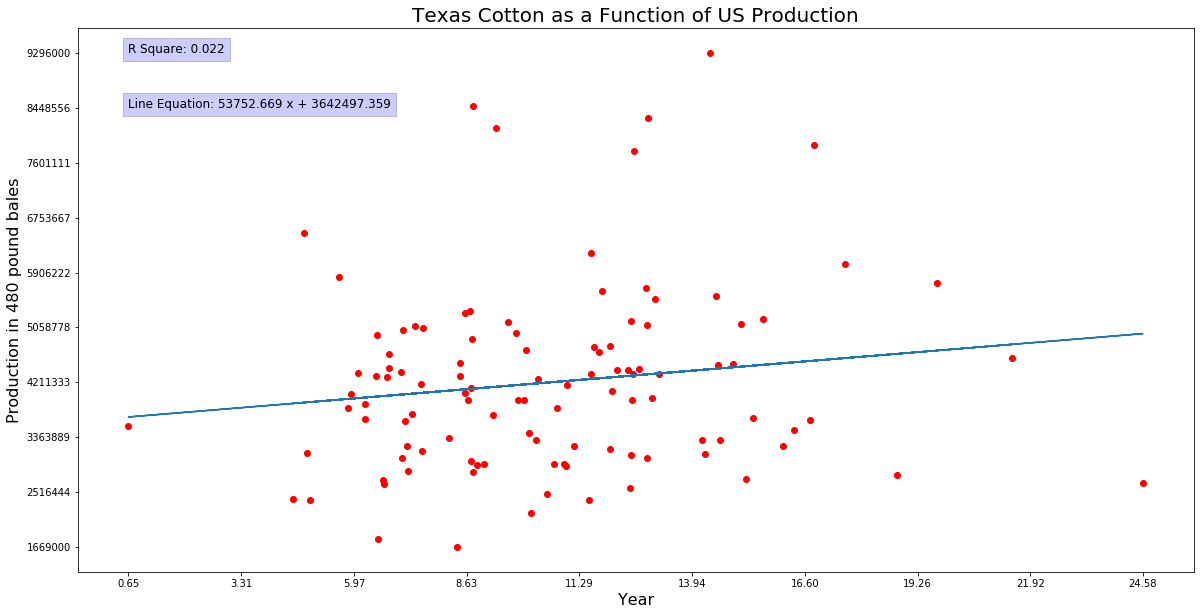

In [113]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

x = df_ry.loc[:, 'summer_rain']
y = df_ry.loc[:, 'tx_num_480_lb_bales']

coeffs = np.polyfit(x,y, 1)
poly_eqn = np.poly1d(coeffs)

y_poly_hat = poly_eqn(x)

y_bar = np.sum(y)/len(y)         
ssreg = np.sum((y_poly_hat-y_bar)**2)
sstot = np.sum((y - y_bar)**2)    
r_square = ssreg / sstot

x_ticks = np.linspace(min(x),max(x), 10)
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
line_eq = "Line Equation: {0} x + {1}".format(round(coeffs[0], 3), round(coeffs[1], 3))

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], line_eq, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton as a Function of US Production', fontdict={'fontsize':20})

Text(0.5,1,'Texas Cotton as a Function of US Production')

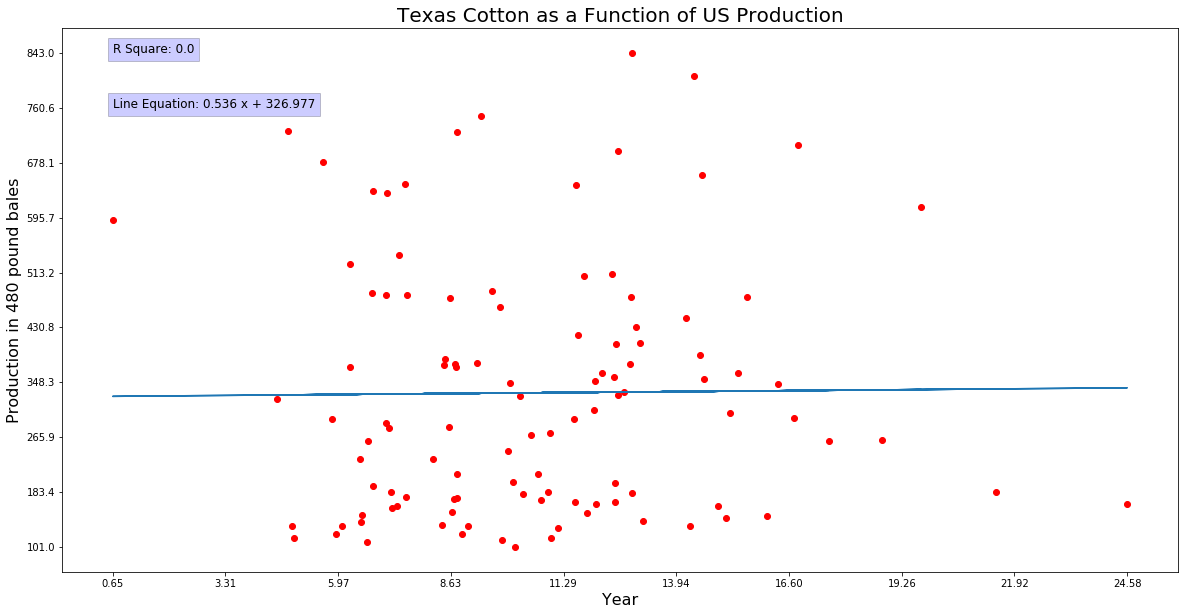

In [114]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

x = df_ry.loc[:, 'summer_rain']
y = df_ry.loc[:, 'tx_yield_in_lb_acre']

coeffs = np.polyfit(x,y, 1)
poly_eqn = np.poly1d(coeffs)

y_poly_hat = poly_eqn(x)

y_bar = np.sum(y)/len(y)         
ssreg = np.sum((y_poly_hat-y_bar)**2)
sstot = np.sum((y - y_bar)**2)    
r_square = ssreg / sstot

x_ticks = np.linspace(min(x),max(x), 10)
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
line_eq = "Line Equation: {0} x + {1}".format(round(coeffs[0], 3), round(coeffs[1], 3))

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], line_eq, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton as a Function of US Production', fontdict={'fontsize':20})

Text(0.5,1,'Texas Cotton as a Function of US Production')

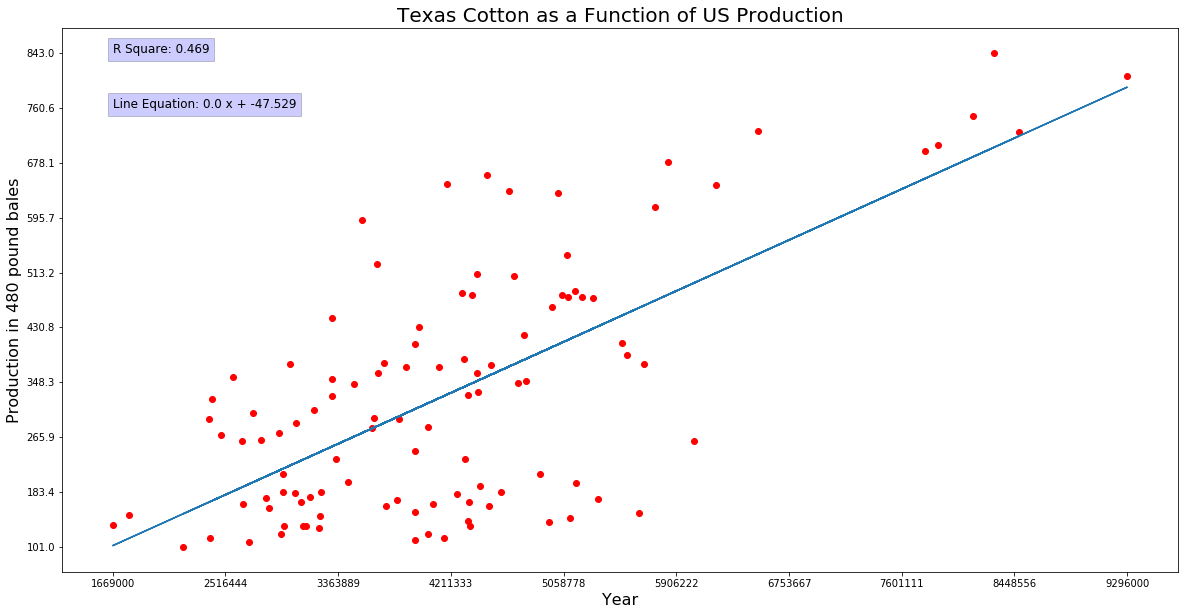

In [143]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

x = df_ry.loc[:, 'tx_num_480_lb_bales']
y = df_ry.loc[:, 'tx_yield_in_lb_acre']

coeffs = np.polyfit(x,y, 1)
poly_eqn = np.poly1d(coeffs)

y_poly_hat = poly_eqn(x)

y_bar = np.sum(y)/len(y)         
ssreg = np.sum((y_poly_hat-y_bar)**2)
sstot = np.sum((y - y_bar)**2)    
r_square = ssreg / sstot

x_ticks = np.linspace(min(x),max(x), 10)
y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
line_eq = "Line Equation: {0} x + {1}".format(round(coeffs[0], 3), round(coeffs[1], 3))

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.plot(x,y,'ro')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], line_eq, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton as a Function of US Production', fontdict={'fontsize':20})

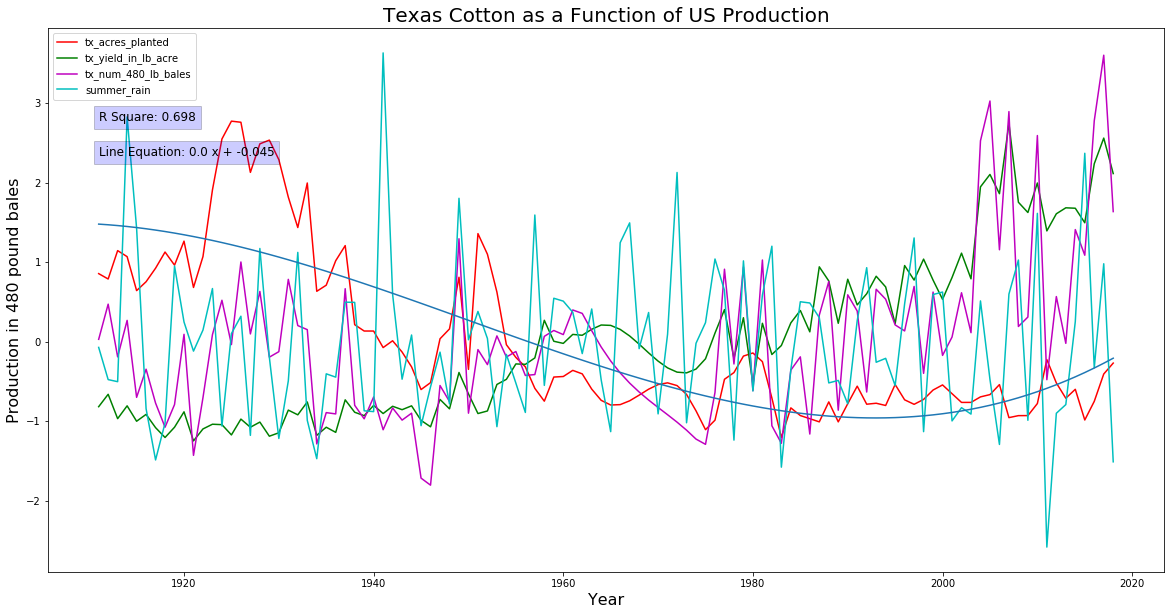

In [139]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

x = df_ry.loc[:, 'year']
y = df_ry.loc[:, 'tx_acres_planted']
y2 = df_ry.loc[:, 'tx_yield_in_lb_acre']
y3 = df_ry.loc[:, 'tx_num_480_lb_bales']
y4 = df_ry.loc[:, 'summer_rain']

y =  (y - np.mean(y))/np.std(y)
y2 = (y2 - np.mean(y2))/np.std(y2)
y3 = (y3 - np.mean(y3))/np.std(y3)
y4 = (y4 - np.mean(y4))/np.std(y4)

# coeffs = np.polyfit(x,y, 3)
# poly_eqn = np.poly1d(coeffs)

# y_poly_hat = poly_eqn(x)

# y_bar = np.sum(y)/len(y)         
# ssreg = np.sum((y_poly_hat-y_bar)**2)
# sstot = np.sum((y - y_bar)**2)    
# r_square = ssreg / sstot

#x_ticks = np.linspace(min(x),max(x), 10)
#y_ticks = np.linspace(min(y),max(y), 10)

r_square = "R Square: {0}".format(round(r_square, 3))
line_eq = "Line Equation: {0} x + {1}".format(round(coeffs[0], 3), round(coeffs[1], 3))

#ax.set_xticks(x_ticks)
#ax.set_yticks(y_ticks)
ax.plot(x,y,'r-')
ax.plot(x,y2,'g-')
ax.plot(x,y3,'m-')
ax.plot(x,y4,'c-')
ax.plot(x, y_poly_hat)
ax.text(x_ticks[0], y_ticks[9], r_square, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.text(x_ticks[0], y_ticks[8], line_eq, bbox={'facecolor':'b', 'alpha':0.2, 'pad':5}, fontdict={'fontsize':12})
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Production in 480 pound bales', fontdict={'fontsize':16})
ax.set_title('Texas Cotton as a Function of US Production', fontdict={'fontsize':20})
ax.legend()